# ICC Paper 100+ Feature Vector

Selecting features for the ICC 2024 paper.

## Loading data and selecting features of interest

In [17]:
import pyarrow as pa
import pyarrow.parquet as pq

phishing = pq.read_table('floor/phishing_2307.parquet')
benign = pq.read_table('floor/benign_2307.parquet')

from transformers.drop_nontrain import drop_nontrain_table as drop_nontrain
phishing = drop_nontrain(phishing)
benign = drop_nontrain(benign)

# realign schemas (parquet files save in nonsense orders)
benign = benign.cast(phishing.schema)

# concatentate tables
data = pa.concat_tables([phishing, benign])
df = data.to_pandas()

from transformers.cast_timestamp import cast_timestamp
df = cast_timestamp(df)

used_features = [

    # IP  ===============================
    # Used in the original NOMS paper
    "ip_mean_average_rtt",
    "ip_entropy",
    "ip_count",
    #"ip_v4_count", "ip_v6_count", # Moved RDAP and RENAMED to rdap_ip
    
    # Newly added for ICC
    # doplnit
    
    
    # DNS  ===============================
    # Used in the original NOMS paper
    "dns_A_count",
    "dns_AAAA_count",
    "dns_CNAME_count",
    "dns_MX_count",
    "dns_NS_count",
    "dns_SOA_count",
    "dns_TXT_count",
    "dns_soa_primary_ns_len",
    "dns_soa_primary_ns_level", # renamed
    "dns_soa_primary_ns_digit_count",
    "dns_soa_primary_ns_entropy",
    "dns_soa_email_len",
    "dns_soa_email_level", # renamed
    "dns_soa_email_digit_count",
    "dns_soa_email_entropy",
    "dns_soa_serial",
    "dns_soa_refresh",
    "dns_soa_retry",
    "dns_soa_expire",
    "dns_mx_mean_len",
    "dns_mx_mean_entropy",
    "dns_domain_name_in_mx",
    "dns_txt_spf_exists",
    "dns_txt_mean_entropy",
    "dns_txt_dkim_exists",
    
    # Newly added for ICC
    
    
    
    # TLS  ===============================
    # Used in the original NOMS paper
    "tls_broken_chain",
    "tls_expired_chain",
    "tls_total_extension_count",
    "tls_critical_extensions",
    "tls_with_policies_crt_count",
    "tls_percentage_crt_with_policies",
    "tls_x509_anypolicy_crt_count",
    "tls_iso_policy_crt_count",
    "tls_joint_isoitu_policy_crt_count",
    # "tls_iso_policy_oid", <-- Basically a random value, doesn't make much sense when collected like this; policy OIDs need more research
    # "tls_isoitu_policy_oid", <-- same
    #"tls_unknown_policy_crt_count", <-- Abandoned, no useful values
    "tls_subject_count",
    "tls_server_auth_crt_count",
    "tls_client_auth_crt_count",
    "tls_CA_certs_in_chain_ratio",
    "tls_unique_SLD_count",
    "tls_common_name_count",
    "tls_root_cert_validity_len",
    "tls_leaf_cert_validity_len",
    "tls_chain_len",
    "tls_root_cert_lifetime",
    "tls_leaf_cert_lifetime",
    
    # Newly added for ICC
    
    
    # LEX ===============================
    # Used in the original NOMS paper
    "lex_name_len",
    #"lex_digit_count", <-- abandoned, almost the same as "lex_sub_digit_ratio"
    "lex_has_digit",
    "lex_phishing_keyword_count",
    "lex_vowel_count",
    "lex_underscore_hyphen_count",
    "lex_consecutive_chars",
    "lex_tld_len",
    "lex_sld_len",
    "lex_sub_count",
    "lex_stld_unique_char_count",
    "lex_begins_with_digit",
    "lex_www_flag",
    "lex_sub_max_consonant_len",
    "lex_sub_norm_entropy",
    "lex_sub_digit_count",
    "lex_sub_digit_ratio",
    "lex_sub_consonant_ratio",
    "lex_sub_non_alphanum_ratio",
    "lex_sub_hex_ratio",
    "lex_sld_norm_entropy", # <-- newly added feature on 24-09-29
    
    # Newly added for ICC
    # (zatim nic)
    
    # RDAP ===============================
    # Used in the original NOMS paper
    "rdap_registration_period",
    "rdap_has_dnssec",
    "rdap_domain_age",
    "rdap_time_from_last_change",
    "rdap_domain_active_time",
    "rdap_ip_v4_count", "rdap_ip_v6_count", # <-- used for NOMS, but now prefixed with rdap_
    
    # Newly added for ICC
    # doplnit
    
    
    # GEO ===============================
    # Used in the original NOMS paper
    "geo_countries_count",
    "geo_continent_hash",
    "geo_countries_hash",
    
    # Newly added for ICC
    "geo_lat_stddev", # <- Puvodne to pridal Adam, ale pak jsme dali pryc, ze to budem resit jinak.
    "geo_lon_stddev"  #    Ale muze byt helpful pro identifikaci, jestli lokality jsou blizko sebe.
]


print("Number of used features: " + str(len(used_features)))
df = df[["label", *used_features]]

Number of used features: 80


## Shortening feature names (for paper purposes)

In [2]:
shortening = {
    "lex_phishing_keyword_count": "lex_phishing_kw_cnt",
    "lex_underscore_hyphen_count": "lex_uscore_hyphen_cnt",
    "lex_stld_unique_char_count": "lex_stld_uniq_char_cnt",
    "lex_sub_max_consonant_len": "lex_max_conson_len",
    "lex_sub_non_alphanum_ratio": "lex_sub_nonalnum_ratio"
    
    "dns_resolved_record_types:" "dns_resolved_rec_types",
    "dns_domain_name_in_mx": "dns_dn_in_mx",
    "dns_txt_external_verification_score": "dns_txt_verifcore",
    "dns_zone_digit_count": "dns_zone_digits",
    "dns_soa_primary_ns_digit_count": "dns_soa_prim_ns_digits",
    "dns_soa_primary_ns_len" : "dns_soa_pri_ns_len",
    "dns_soa_primary_ns_level": "dns_soa_pri_ns_level",
    "dns_soa_primary_ns_entropy": "dns_soa_pri_ns_entropy",
    "dns_soa_email_digit_count": "dns_soa_email_digits",
    
    "tls_percentage_crt_with\_policies": "tls_percentage_with_policies,
    "tls_x509_anypolicy_crt_count": "tls_x509_anypol_crt_count",
    "tls_iso_policy_crt_count": "tls_iso_pol_crt_count",
    "tls_joint_isoitu_policy_crt_count": "tls_isoitu_pol_crt_count",
    
    "rdap_ip_first_administrative_name_len": "rdap_ip_first_admin_name_len", 
    "rdap_ip_first_administrative_name_hash": "rdap_ip_first_admin_name_hash", 
    "rdap_ip_first_administrative_email_len": "rdap_ip_first_admin_email_len", 
    "rdap_ip_first_administrative_email_hash": "rdap_ip_first_admin_email_hash", 
}

df.rename(columns=shortening, inplace=True)

df

label  ip_mean_average_rtt  ip_entropy  ip_count   
0        misp_2307:phishing              93.0610         1.0         2  \
1        misp_2307:phishing               0.0000        -0.0         1   
2        misp_2307:phishing              -1.0000        -0.0         0   
3        misp_2307:phishing               3.4960        -0.0         1   
4        misp_2307:phishing               0.0000        -0.0         1   
...                     ...                  ...         ...       ...   
469560  benign_2307:unknown             165.7385        -0.0         2   
469561  benign_2307:unknown               3.8575        -0.0         2   
469562  benign_2307:unknown               0.0000         1.0         2   
469563  benign_2307:unknown              20.5390        -0.0         2   
469564  benign_2307:unknown               0.0000        -0.0         1   

        ip_v4_count  ip_v6_count  dns_A_count  dns_AAAA_count   
0                 2            0            2               0  \
1                 1            0            1               0   
2                 0            0            0               0   
3                 1            0            0               0   
4                 1            0            1               0   
...             ...          ...          ...             ...   
469560            2            0            2               0   
469561            1            1            1               1   
469562            2            0            2               0   
469563            1            1            1               1   
469564            1            0            1               0   

        dns_CNAME_count  dns_MX_count  ...  rdap_registration_period   
0                     0             0  ...              5.364576e+17  \
1                     0             0  ...              1.578528e+17   
2                     0             0  ...                       NaN   
3                     1             0  ...              5.364576e+17   
4                     0             0  ...              2.208384e+17   
...                 ...           ...  ...                       ...   
469560                0             2  ...              7.889184e+17   
469561                0             0  ...                       NaN   
469562                0             1  ...              2.839968e+17   
469563                0             1  ...              4.733856e+17   
469564                0             1  ...                       NaN   

        rdap_has_dnssec  rdap_domain_age  rdap_time_from_last_change   
0                 False     4.744901e+17                         NaN  \
1                 False     1.328550e+17                9.187060e+15   
2                 False              NaN                         NaN   
3                 False     5.297130e+17                2.741179e+16   
4                 False     2.093496e+17                         NaN   
...                 ...              ...                         ...   
469560            False     7.297383e+17                4.362818e+15   
469561            False              NaN                         NaN   
469562            False     2.718453e+17                2.234356e+16   
469563            False     4.162764e+17                8.838700e+14   
469564            False              NaN                         NaN   

        rdap_domain_active_time  geo_countries_count  geo_continent_hash   
0                  5.364576e+17                    1                   2  \
1                  1.578528e+17                    1                   3   
2                           NaN                    0                   0   
3                  5.364576e+17                    1                   1   
4                  2.208384e+17                    1                   0   
...                         ...                  ...                 ...   
469560             7.889184e+17                    1                   2   
469561        

In [3]:
# create train and test sets
from config import Config
from sklearn.model_selection import train_test_split

#TODO extract label names from config files
# benign_label = list(Config.COLLECTIONS.keys())[0]
# misp_label = list(Config.COLLECTIONS.keys())[1]
#class_map = {"benign_cesnet_union_2307:unknown": 0, "misp_2307:phishing": 1}
#class_map = {"cesnet2:unknown": 0, "misp_2307:phishing": 1}
class_map = {"benign_2307:unknown": 0, "misp_2307:phishing": 1}

labels = df['label'].apply(lambda x: class_map[x]) # y vector
features = df.drop('label', axis=1).copy() # X matrix



X_train, X_test, y_train, y_test = train_test_split(
  features,
  labels,
  test_size=0.3,
  random_state=42,
  shuffle=True, 
  stratify=labels
)

In [4]:
from xgboost import XGBClassifier
# uncomment the two disabled lines to use GPU
params = {
    "max_depth": 11,
    "eta": 0.10,
    "objective": "binary:logistic",
    "tree_method": "gpu_hist",
    "min_child_weight": 1.1,
    "subsample": 0.8,
    "sampling_method": "gradient_based",
    "alpha": 0,
    "gamma": 0.1,
    "lambda": 1.0,
    "max_delta_step": 0,
    "grow_policy": "depthwise",
    "max_bin": 2048,
}
trees = 456

model = XGBClassifier(
  **params,
  n_estimators=trees,
  eval_metric=["error", "logloss", "auc"]
)

# set to True to cross validate
do_cross_val = False
if do_cross_val:
  from sklearn.model_selection import StratifiedKFold
  from sklearn.model_selection import cross_val_score
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
  results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
  print("F1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# at last, train the model
eval_set = [(X_train, y_train), (X_test, y_test)]
_ = model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

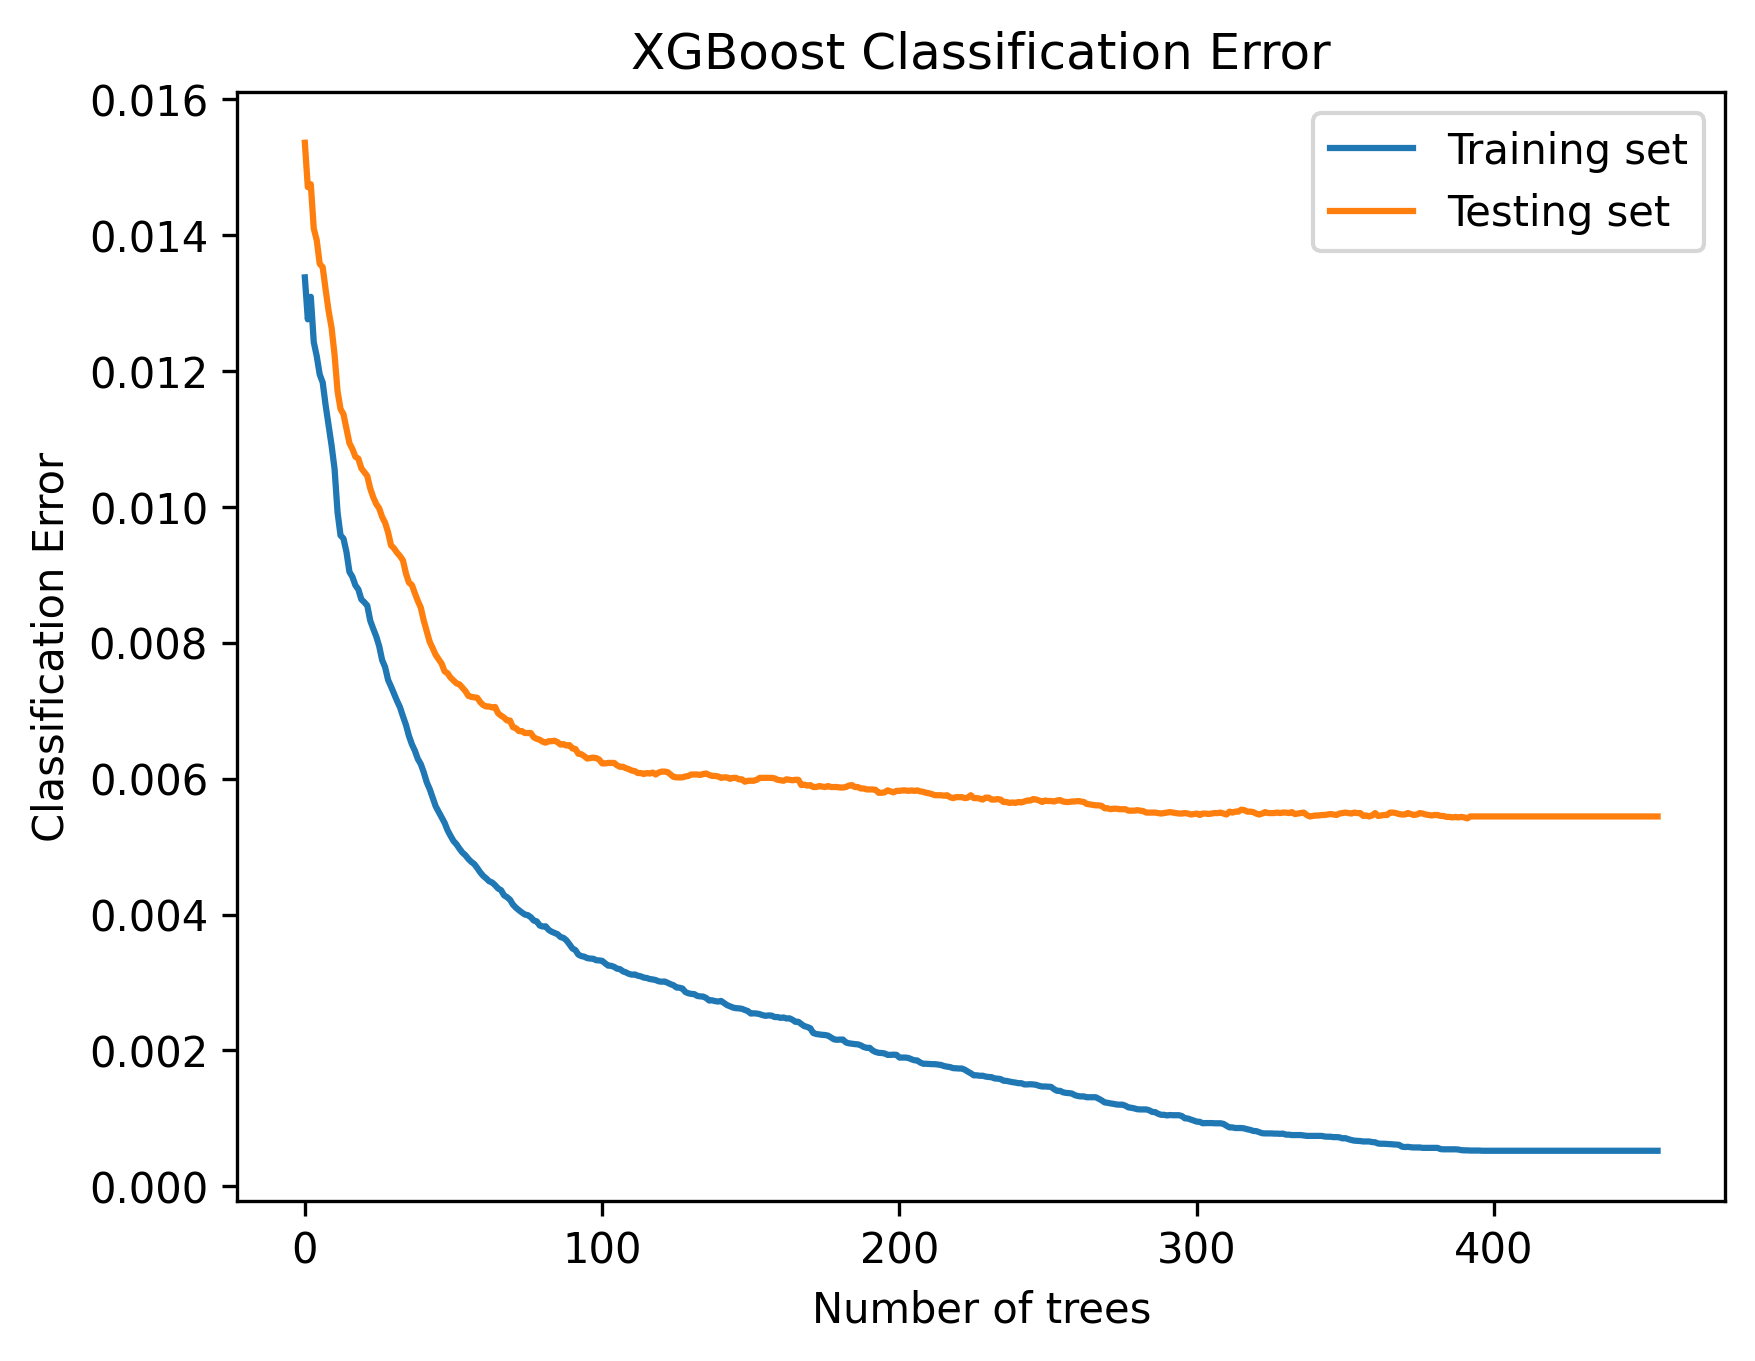

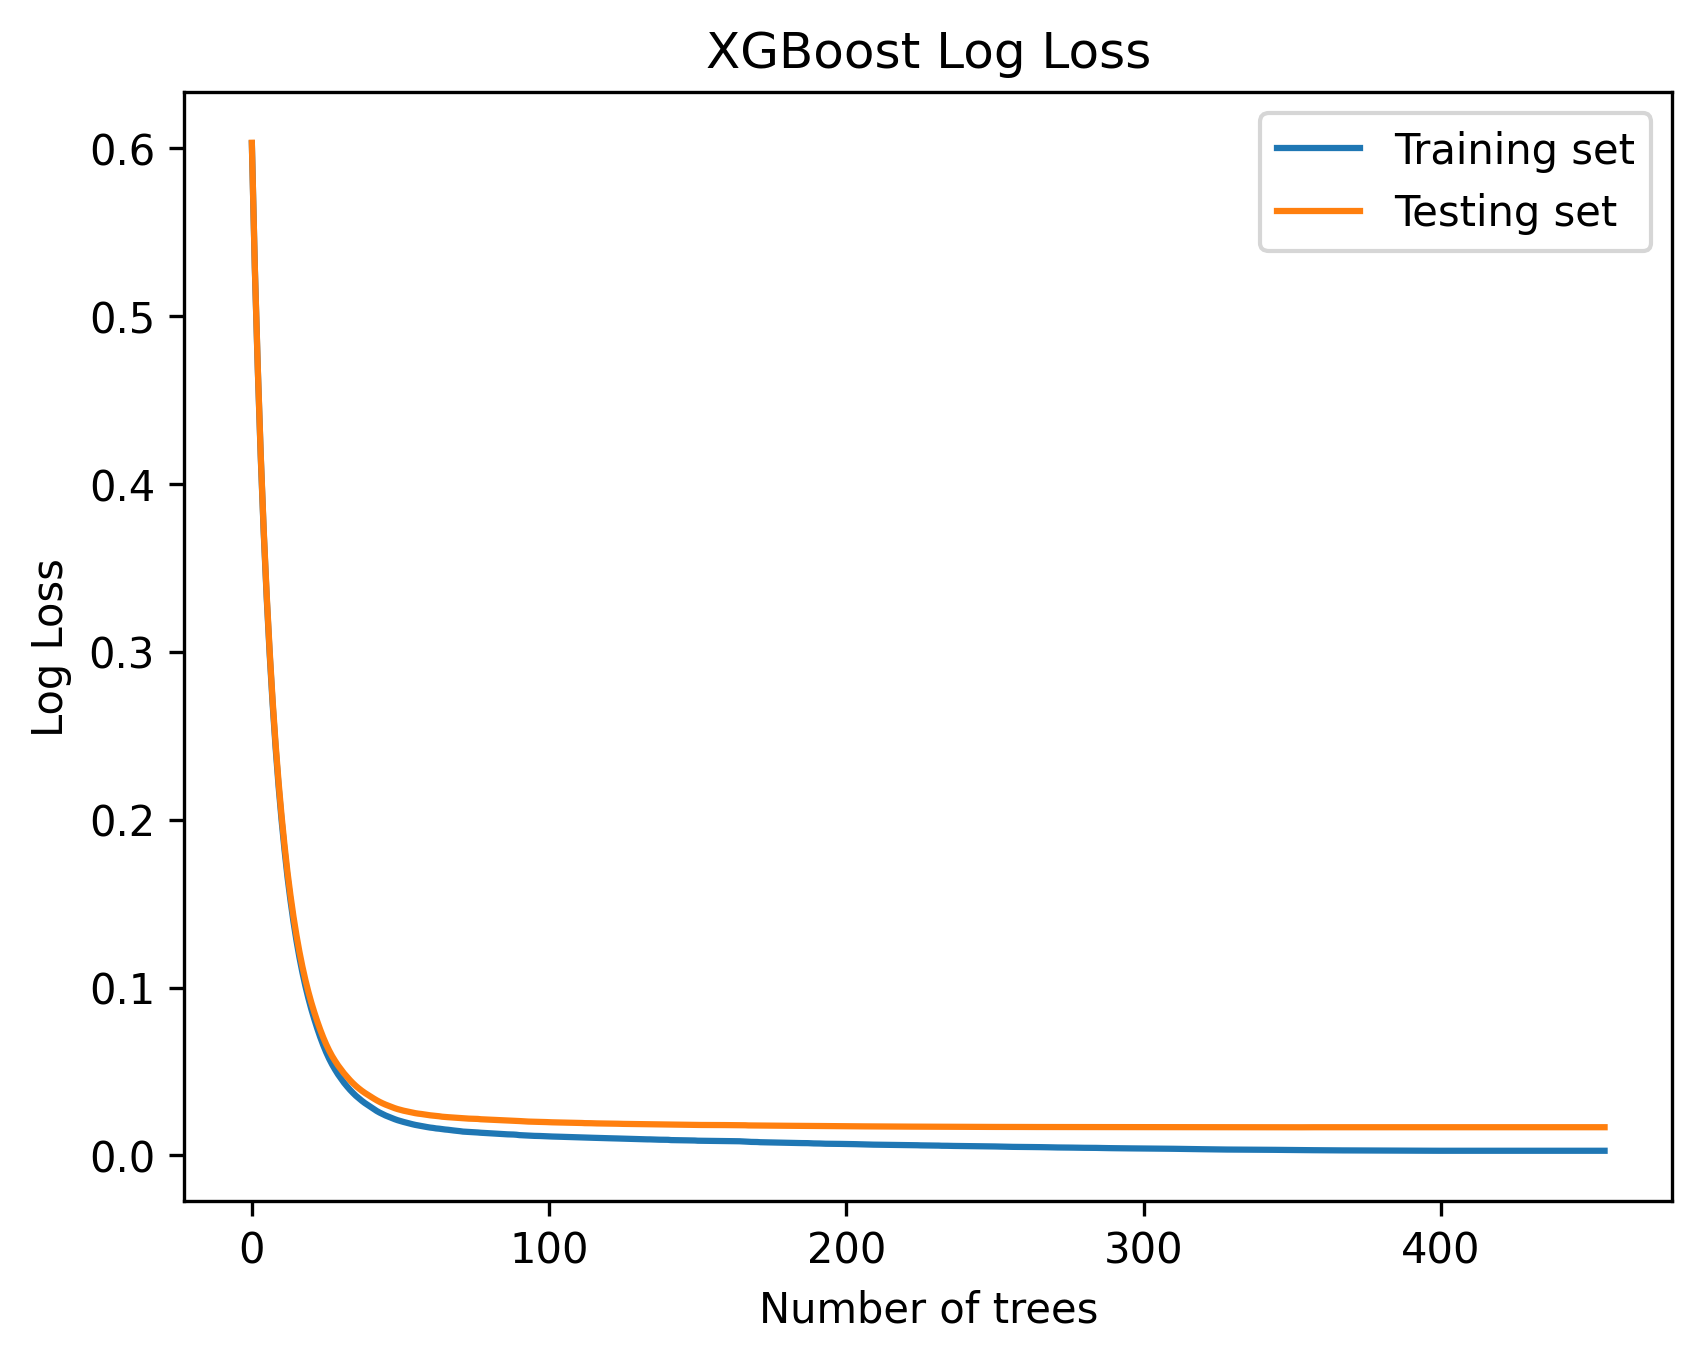

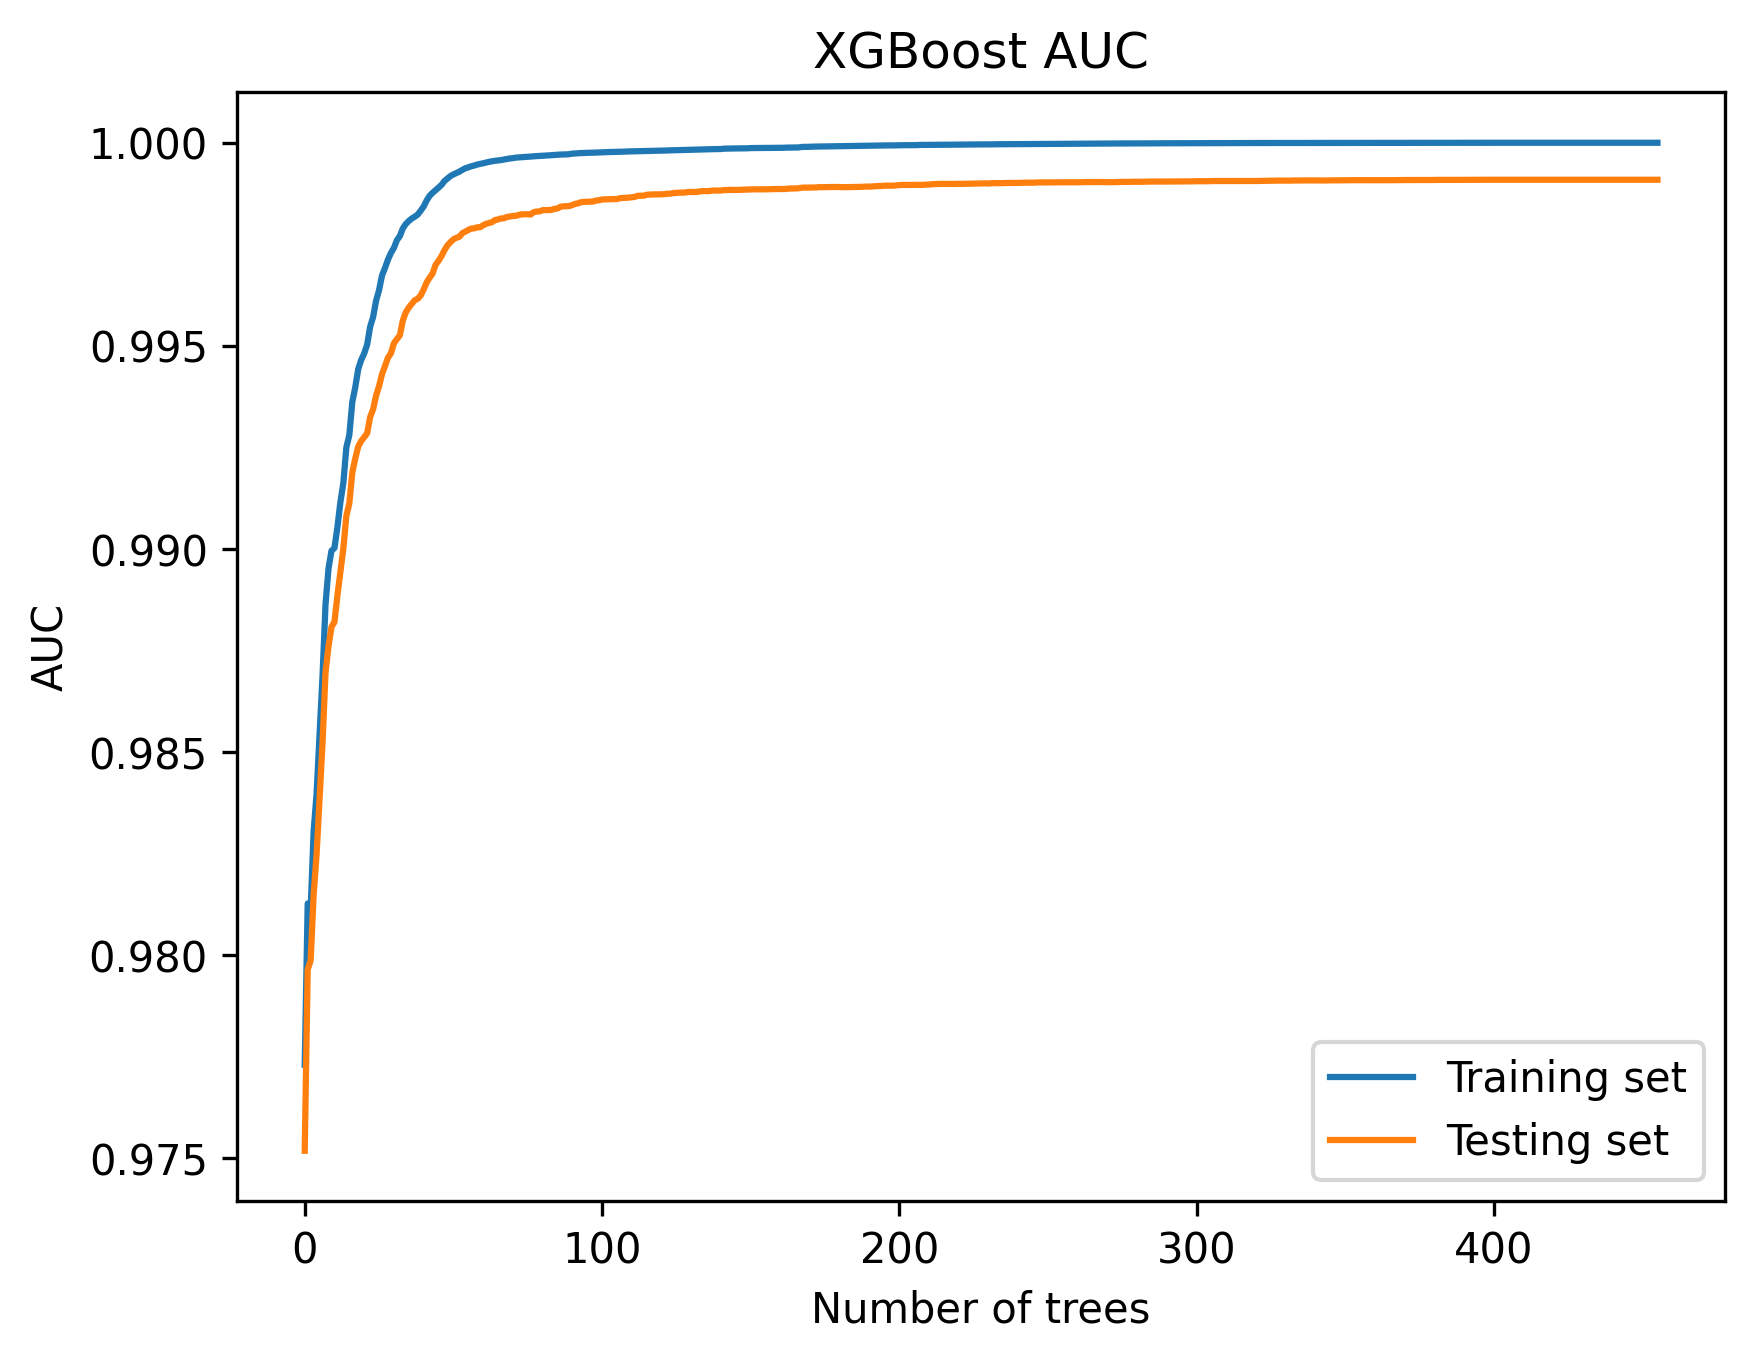

In [5]:
# plot evaluation
results = model.evals_result()
trees = len(results['validation_0']['error'])
x_axis = range(0, trees)

def plot_metric(metric):
    import matplotlib.pyplot as plt
    plt.rcParams["figure.dpi"] = 300
    #
    plt.plot(x_axis, results['validation_0'][metric], label='Training set')
    plt.plot(x_axis, results['validation_1'][metric], label='Testing set')
    plt.legend()
    mnames = {'error': 'Classification Error', 'logloss': 'Log Loss', 'auc': 'AUC'}
    mname = mnames[metric]
    plt.ylabel(mname)
    plt.xlabel('Number of trees')
    plt.title('XGBoost ' + mname)
    plt.show()

plot_metric('error')
plot_metric('logloss')
plot_metric('auc')

If you want to find the optimal set of hyperparameters (that is, the parameters for the model itself), you can use grid search. This will try all combinations of the parameters you specify and return the best one. This is a computationally expensive process, so it is recommended to run it on a machine with a GPU. The following cell shows a grid search, but is disabled by default. If you want to run it, set `run_grid_search` to `True`.

In [6]:

# Hyperparameter tuning
run_grid_search = False
if run_grid_search:
    import pandas as pd
    from sklearn.model_selection import train_test_split
    class_map = {"benign_2307:unknown": 0, "misp_2307:phishing": 1}
    labels = df['label'].apply(lambda x: class_map[x])
    features = df.drop('label', axis=1).copy()
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, shuffle=True, stratify=labels)

    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import StratifiedKFold
    from xgboost import XGBClassifier

    params = {
        "objective": "binary:logistic",
        "tree_method": "gpu_hist",
        #"predictor": "gpu_predictor"
    }

    clf = XGBClassifier(**params)

    # this is your grid of parameters to search through, every combination will be tried
    grid = {
        "max_depth": [11],
        "eta": [0.10],
        "min_child_weight": [1.1], # default: 1
        "sampling_method": ["gradient_based"],
        "subsample": [0.8], # default: 1
        "gamma": [0.1], # default: 0
        "grow_policy": ["depthwise"], # default: depthwise
        "max_bin": [2048],
        "n_estimators": [456],
        "lambda": [1.0], # default: 1
        "alpha": [0.0]   # default: 0
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    grid_search = GridSearchCV(
        estimator=clf,
        param_grid=grid,
        #n_jobs=-1,
        cv=cv,
        scoring='f1',#'f1', 'neg_log_loss'
        verbose=3,
        return_train_score=True
    )

    grid_search.fit(X_train, y_train)

    clf = grid_search.best_estimator_

    scores = pd.DataFrame(grid_search.cv_results_)
    col_names = ['mean_train_score', 'mean_test_score']

    scores = pd.DataFrame(grid_search.cv_results_)

    from numpy import array
    from numpy.ma import masked_array

    col_names = ['mean_train_score', 'mean_test_score']
    means_df = scores[col_names]
    ax = means_df.plot(kind='line', grid=True)


    from matplotlib import pyplot as plt
    plt.rcParams["figure.figsize"] = [12, 12]
    plt.rcParams["figure.autolayout"] = True

    plt.rcParams["figure.dpi"] = 300

    max_ids = means_df.idxmax(axis=0)

    for i in range(len(max_ids)):
        for col_name in col_names:
            value = means_df[col_name][max_ids[i]]
            id = max_ids[i]
            
            color = 'r' if max_ids[i] == max_ids['mean_test_score'] else 'grey'
            
            ax.scatter([id], [value],
                      marker='o',
                      color=color,
                      label='point',)

            ax.annotate(str(round(value, 3))+"_ID="+str(id),
                        (id, value),
                        xytext=(id+3, value))
            
    print(scores)
    
    
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    scores




Either way, now you should have a trained model ready to use. Let's save it first, so we can use it later.

In [7]:
import pickle
pickle.dump(model, open("xgboost_model.pickle.dat", "wb"))

# Step 3: Evaluating the model's performance
(You can run the next cell only and then skip to the next step if you just want to play with SHAP)

We can now load the model at any time and use it to make predictions. We can also evaluate its performance on the test set. The following cell will load the model and evaluate it on the test set. It will also print the confusion matrix and classification report.

In [8]:
import pickle
model = pickle.load(open("xgboost_model.pickle.dat", "rb"))

0.9648568155784651
              precision    recall  f1-score   support

           0     0.9956    0.9985    0.9970    129772
           1     0.9815    0.9487    0.9649     11098

    accuracy                         0.9946    140870
   macro avg     0.9886    0.9736    0.9810    140870
weighted avg     0.9945    0.9946    0.9945    140870

0.9648568155784651
TN: 129574 <-- True Negatives
FP: 198 <-- False Positives
FN: 569 <-- False Negatives
TP: 10529 <-- True Positives
FPR:0.0015257528588601547 <-- False Positive Rate
TPR:0.948729500810957 <-- True Positive Rate (same as Recall)


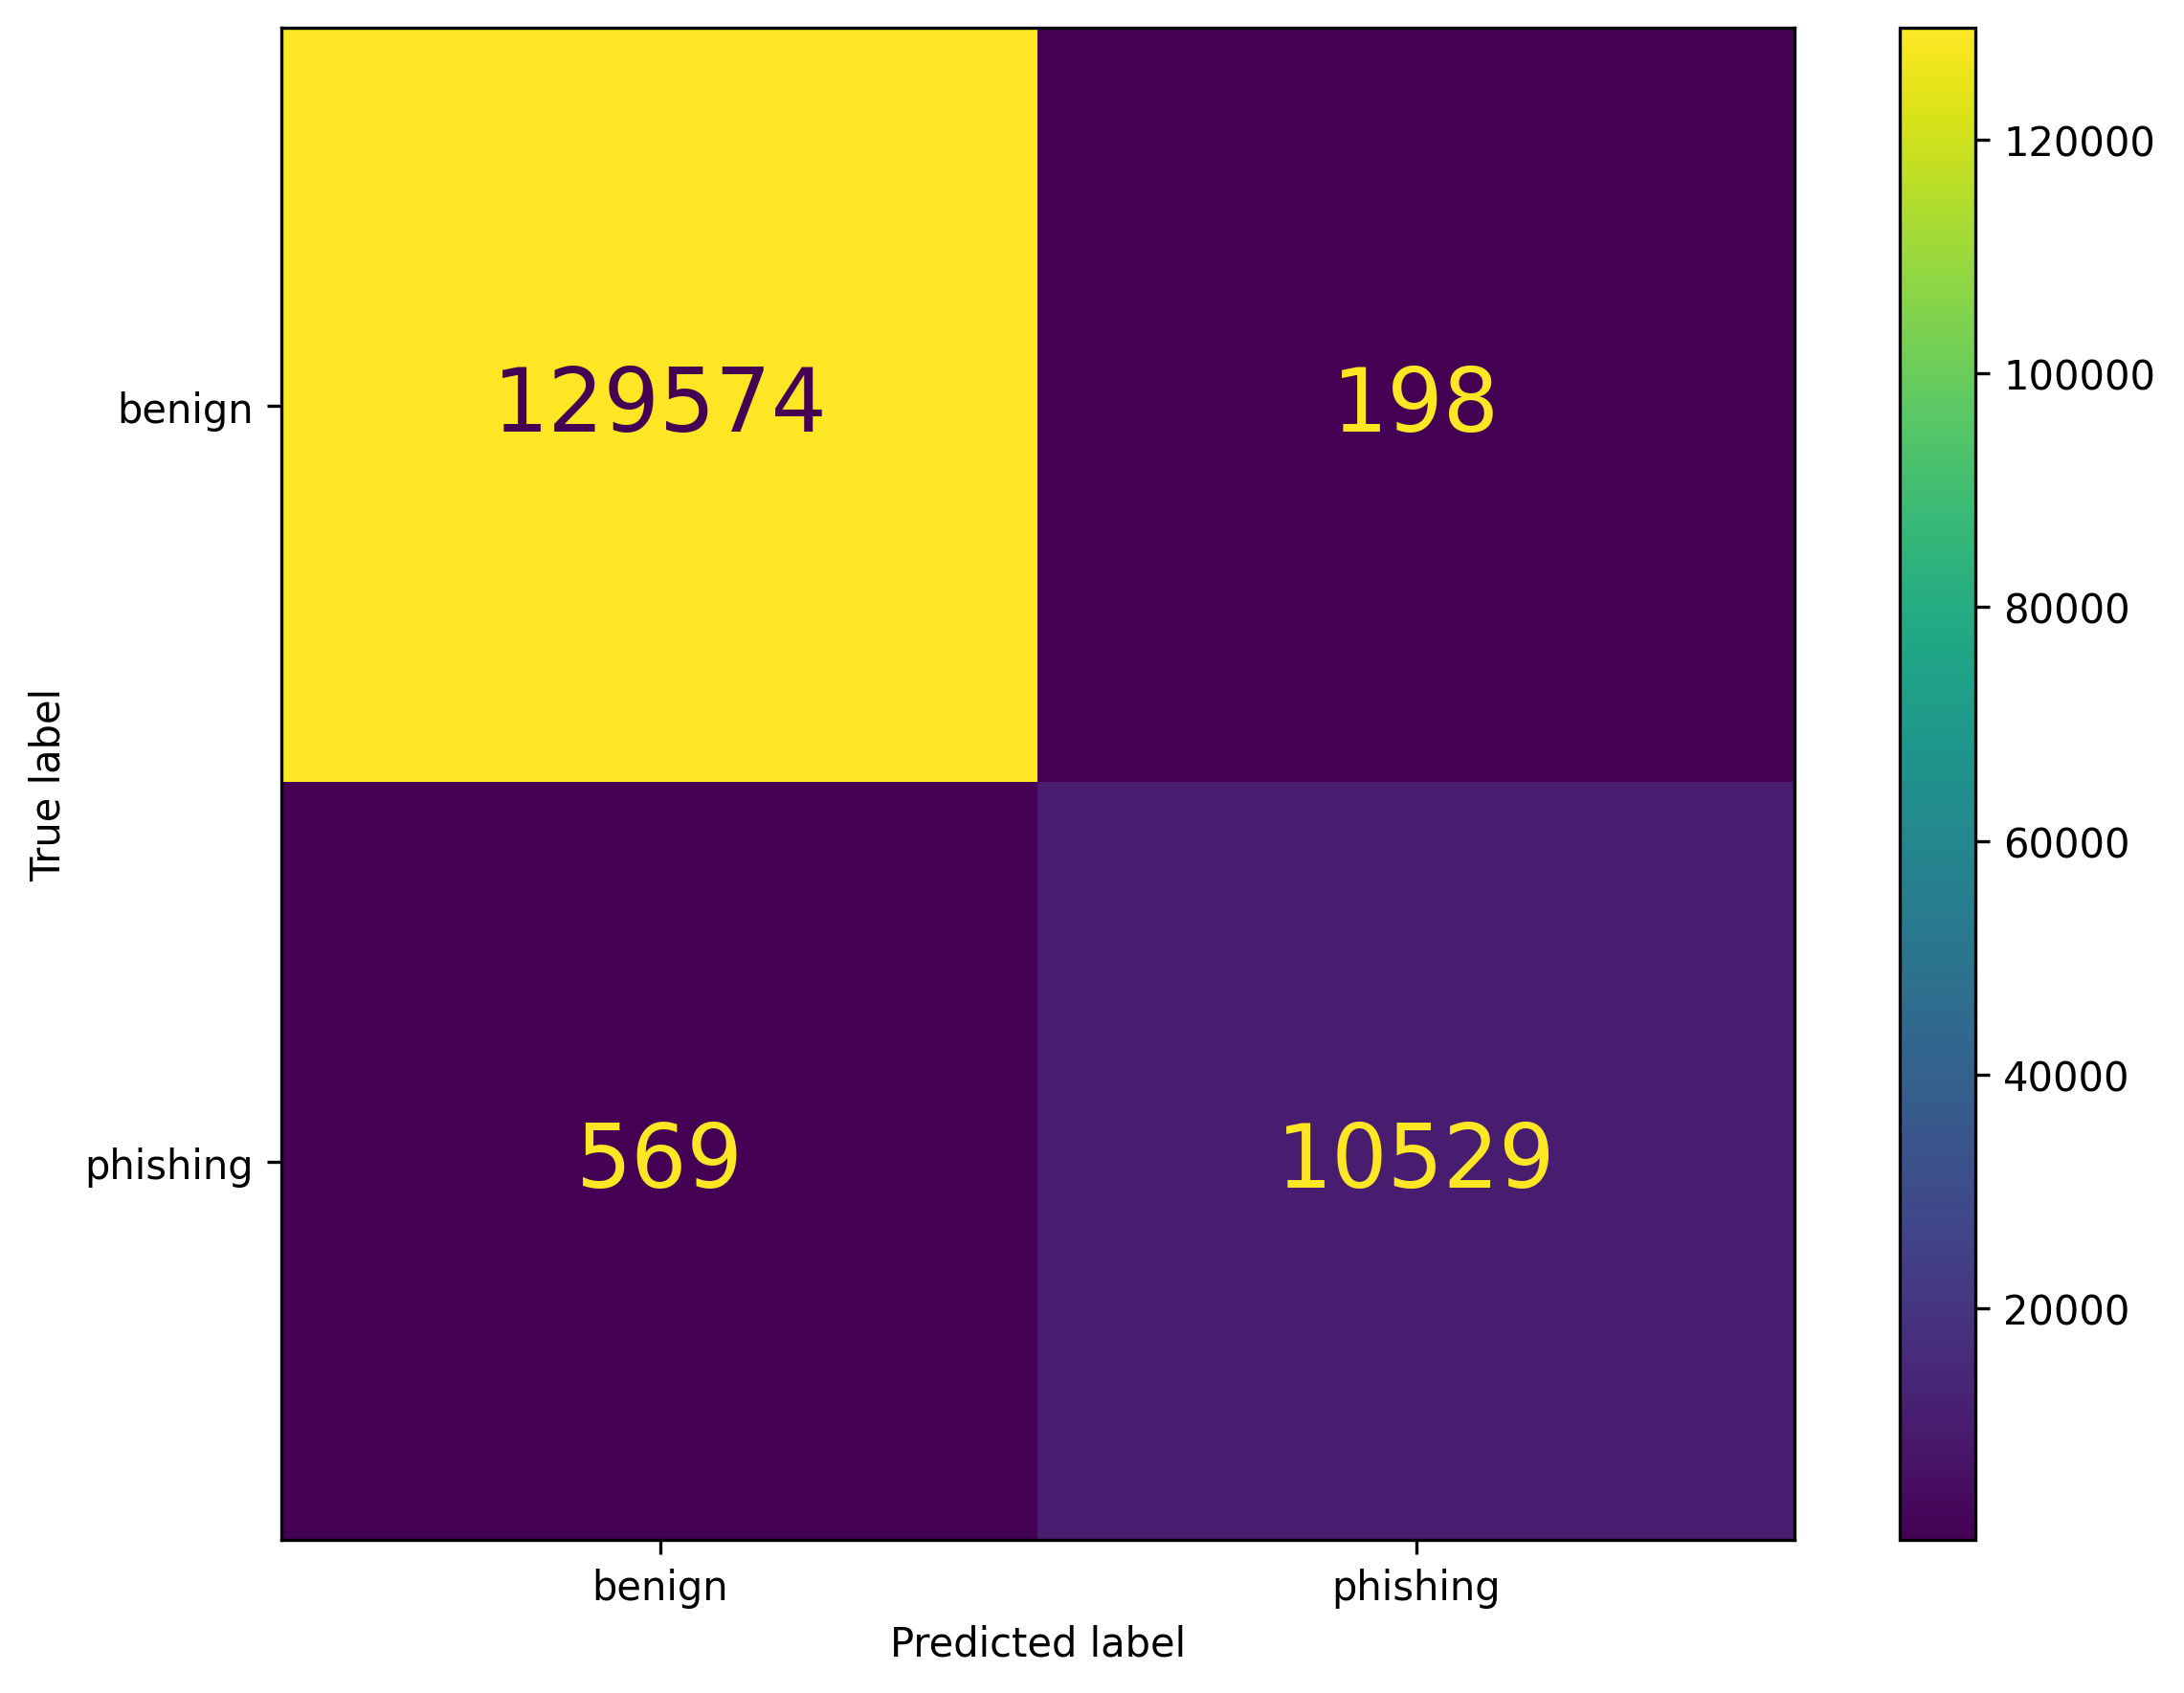

In [9]:
predicted = model.predict(X_test)

from sklearn.metrics import f1_score, confusion_matrix
print(f1_score(y_test, predicted))

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 300
    
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, det_curve
print(classification_report(y_test, predicted, digits=4))

f1 = f1_score(y_test, predicted)
print(f1)

conf_matrix = confusion_matrix(y_test, predicted)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR)
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)

print("TN: " + str(tn) + " <-- True Negatives")
print("FP: " + str(fp) + " <-- False Positives")
print("FN: " + str(fn) + " <-- False Negatives")
print("TP: " + str(tp) + " <-- True Positives")

print("FPR:" + str(fpr) + " <-- False Positive Rate")
print("TPR:" + str(tpr) + " <-- True Positive Rate (same as Recall)")


ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, text_kw={'fontsize': 22}, display_labels=['benign', 'phishing'], values_format='d')
plt.savefig("cfm_noms.pdf")


# Step 4: Explaining the model's predictions
(You can start from the cell where the pickled shap values are loaded if you already have them)

We can now use SHAP to gain insight into the model's predictions. First, shap values need to be computed for the test set. This is a computationally expensive process, but in practice, you can significantly reduce the time needed by using a narrower sample of the data, without affecting the results much. The following cell will compute shap values for the test set. It will also save the shap values to a file, so you can load them later without having to recompute them.

In [10]:
# initialize shap
import shap
# get shap values (use a smaller sample of the test set if you want to save coffee)
explainer = shap.TreeExplainer(model)
X_sample = X_test
shap_values = explainer.shap_values(X_sample)
# save the values for later use
import pickle
pickle.dump(shap_values, open("shap_values.pickle.dat", "wb"))

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


The shap values are now stored. You can later start all the way here (after running the mandatory cells in previous steps) to only play with SHAP.

In [11]:
# load the values to start from here
import pickle
shap_values = pickle.load(open("shap_values.pickle.dat", "rb"))

In [12]:
import shap
shap.initjs()
reverse_class_map = {v: k for k, v in class_map.items()}

## Force plot
The force plot shows the shap values for a single prediction. The values are sorted by their absolute value, so the most important features are the largest arrows. The color indicates the influence of the feature. The red color indicates a positive value, while the blue color indicates a negative value. The base value is the average prediction for the whole dataset. The output value is the prediction for the selected sample. The sum of the base value and the shap values is equal to the output value. You can see how each feature "forces" the shap value to its final resting position, determining the resulting prediction.

Note that the force plot is interactive, but that breaks with widgets. So instead just change the sample variable to see different samples and rerun the cell.

In [13]:
sample = 0

print("Predicted: %s" % reverse_class_map[model.predict(X_test.iloc[sample,:].values.reshape(1, -1))[0]])
print("Actual: %s" % reverse_class_map[y_test.iloc[sample]])
shap.force_plot(explainer.expected_value, shap_values[sample,:], X_test.iloc[sample,:])

Predicted: benign_2307:unknown
Actual: benign_2307:unknown


# Summary plot
The summary plot shows (in dot or violin mode) how individual feature values are distributed for each feature. The x-axis shows the shap value, while the color shows the feature value. The features are sorted by their importance, so the most important features are at the top. The color indicates the value of the feature. The red color indicates a high value, while the blue color indicates a low value. The zero line is the split point between outputs, just like the base value in the force plot. For some features, you might see that low values usually result in negative classification, while high values usually result in positive classification.

Another mode, bar, shows a mean shap value across all data points, which is effectively a plot of feature importance. Use the widgets to switch between modes and feature count. Also note that the violin and dot plots take a while to calculate, so you might want to start with a low feature count.

In [14]:
import ipywidgets as widgets
from ipywidgets import interact
plot_type = widgets.RadioButtons(
    options=['dot', 'layered_violin', 'bar'],
    value='layered_violin',
    description='Plot Type:',
    disabled=False
)
max_display = widgets.IntSlider(
    value=10,
    description='Max Display:',
    disabled=False,
    min=1,
    max=len(X_sample.columns)-1
)

@interact
def plot_shap(plot_type=plot_type, max_display=max_display):
        shap.summary_plot(shap_values, X_sample, show=False, plot_type=plot_type, class_names=class_map.values(), max_display=max_display, plot_size=[10, max_display])
        plt.savefig("shap_summary_noms.pdf")

interactive(children=(RadioButtons(description='Plot Type:', index=1, options=('dot', 'layered_violin', 'bar')…

In [15]:
# get gain score
score = model.get_booster().get_score(importance_type='gain')
sorted_score = sorted(score.items(), key=lambda x: x[1], reverse=True)
sorted_score

for s in sorted_score:
    print(s)

('ip_v4_count', 121.16358184814453)
('dns_domain_name_in_mx', 115.1331787109375)
('rdap_domain_active_time', 111.74837493896484)
('dns_SOA_count', 85.044921875)
('geo_continent_hash', 78.55855560302734)
('dns_txt_dkim_exists', 53.94614791870117)
('lex_www_flag', 50.43339920043945)
('dns_soa_retry', 38.26444625854492)
('asdasdq', 36.47544860839844)
('dns_soa_primary_ns_level', 35.83805847167969)
('tls_subject_count', 28.86786651611328)
('rdap_domain_age', 28.5130558013916)
('dns_soa_expire', 20.61551284790039)
('dns_soa_email_len', 20.04539680480957)
('geo_countries_hash', 19.454133987426758)
('dns_soa_email_level', 19.198246002197266)
('lex_sub_count', 18.317596435546875)
('dns_TXT_count', 17.28000831604004)
('dns_AAAA_count', 17.17610740661621)
('tls_broken_chain', 15.6162109375)
('tls_total_extension_count', 13.101273536682129)
('lex_underscore_hyphen_cnt', 13.002739906311035)
('dns_soa_email_digit_count', 11.912276268005371)
('lex_sub_digit_count', 11.802529335021973)
('tls_leaf_cer

In [16]:
import ipywidgets as widgets
from ipywidgets import interact
plot_type = widgets.RadioButtons(
    options=['dot', 'layered_violin', 'bar'],
    value='bar',
    description='Plot Type:',
    disabled=False
)
max_display = widgets.IntSlider(
    value=80,
    description='Max Display:',
    disabled=False,
    min=1,
    max=len(X_sample.columns)-1
)

@interactdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAC5oAAFx2CAYAAAD3LY5pAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAC4jAAAuIwF4pT92AAEAAElEQVR4nOzdZ5hV1d347+8UYICBoSnFiKCAIiI+BEui2FtsiZeJPXaDSTQWEuNjYuyxYS9Ro8SGBo0lggix1xghCDIqxScqCoIidSjDtN+L/PXv4hxg+lDu+5Wzzt5rrzlnzxm8rs9Zk1NVVVUVAAAAAAAAAAAAAADw/8lt6gUAAAAAAAAAAAAAALBuEZoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJDIb+oFAAAAsPG6++67v/nvY445Jtq0adOEqwEAAAAAAAAAvmZHcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEjlVVVVVTb0IAAAANk45w8qbegkAAAAAAAAArEXVr/Obegk0ATuaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkMhv6gUAUD2XXHJJjB49Ohm78847Y9CgQU20IoD106rvm127do1Ro0ZV69xDDz00Pv/882RswoQJtV7LggULYsyYMTF58uSYMWNGLF68OEpKSqKioiI5bmN5v589e3YcdthhydjAgQPj7rvvbqIVAQAAAAAAAABsvITmAADQyMrLy+P222+PRx99NEpLS5t6OQAAAAAAAAAAkEFoDgAAjai8vDzOOuusGD9+fFMvBQAAAAAAAAAAViu3qRcAAAAbkzvvvFNkDgAAAAAAAADAOs+O5gAN5Ljjjos5c+YkYy+88EITrQZqZ5999km+7tKlS4wYMaKJVsO6YNy4cXHttdcmYyeccEKceOKJTbSi9cvChQvjkUceyRgfOHBg/OQnP4k+ffpEmzZtIjc3/TxoYWFhYy2x2twLAAAAAAAAAAAbNqE5QANZvHhxLFq0qKmXAXWy6j3cqlWrJloJ64qVK1dm3BcrVqxootWsf8aOHRulpaXJ2ODBg+P666/PiMvXde4FAAAAAAAAAIANm9AcAACqadSoUXU6f/LkyRljJ5988noXmTeUbt26xYQJE5p6GQAAAAAAAAAARISiBQAAGsn06dOTr/Py8mLbbbdtotUAAAAAAAAAAMDqCc0BAKCRLFq0KPm6Xbt2kZ/vjwwBAAAAAAAAALDuEZoDAEAjKSkpSb5u3rx5E60EAAAAAAAAAADWTGgOAACNpLy8vKmXAAAAAAAAAAAA1ZLf1AsAoGmsWLEiPvzww/jkk09iyZIlsWzZssjJyYmCgoJo3bp1dO7cObp16xabbbZZ5OZuGJ9LWrZsWXzwwQfx6aefxuLFi2PlypXRsmXL6NGjR+y6667Vnmf+/PnxwQcfxOeffx4lJSVRXl4erVq1ik033TR69uwZW265ZeTk5DTgdxKxZMmS+OCDD2LWrFmxePHiKCsri4KCgujUqVP06NEjevfuHXl5eQ26hg1BZWVlfPLJJ/Hxxx/H3LlzY/ny5VFVVRWtWrWKoqKi6N69e/Ts2TNatWpVr9ctKSmJqVOnxqxZs2LRokVRVlYWRUVF0b59+9hss81i6623bvB76Ns+//zzmDFjRsyePTuWLVsWERFt27aNnXbaKbp3795o66D+lJeXx7Rp0+LTTz+NefPmxYoVK6J169bRvn376Ny5c/Tr12+j3k29tLQ03n///fj4449j0aJFUVVVFUVFRdG7d+/o27dv5OdX/3+TKioqYsaMGfHhhx/GggULoqKi4puf5QEDBkSzZs0a7PuoqqqKTz75JP7zn//EF198EcuWLYtmzZpF+/bto2PHjrHttttGUVFRg10fAAAAAAAAANiwCc0B6sldd90Vf/7zn9d4zKBBg6o114QJE+pjSRlWrlwZY8aMiTFjxsSkSZOisrJyree0atUqtt122xg0aFDss88+0bNnzwZZW21le94vvvjiOPTQQ7/5+vXXX4+RI0fG+PHjs+4m3KdPn7WG5iUlJfHEE0/Es88+GzNmzFjjse3atYu99torjjrqqOjVq1cNvps1Ky0tjVGjRsUzzzwTxcXFUVVVtdpjW7duHYMHD46f/OQnMWDAgGpf45JLLonRo0ev9vHPP/+8Wvdx165dY9SoUdW+bmOqqqqKt956K5555pl44403YsmSJWs8Pi8vL/r27Rvf+9734qCDDorNN9+8VtddtmxZPP300zFu3Lh477331vjz16FDh/j+978fxx9/fK3voUMPPTQ+//zzZOzb7y0lJSXxt7/9LZ5++umYOXNm1jnOO++8OPbYY9f6mv/5z39e6/tfRMTpp58eQ4YMqcbq111re16/bW0/TxFr/5mqyc9SZWVlvPzyyzFq1Kh4++23o7S0dLXHFhQUxI477hiHH3547L777tWaP2Ltv8fqei/Mnj07DjvssGRs4MCBcffdd691zgkTJsQZZ5yRjB1yyCFxySWXfPP1jBkz4v7774+XXnpptc9P+/bt44gjjogTTzwxWrZsudrrzZs3L+6///4YO3ZsLFiwIOsxrVu3jgMPPDB+/vOfR7t27db6PVRXcXFxPPnkk/HKK6/EwoULV3tcXl5e9OvXL/bff/844ogjGjR6BwAAAAAAAAA2PEJzgI3EW2+9FVdffXV89tlnNTpv2bJlMWHChJgwYULceeedcfvtt8fOO+/cQKusX/PmzYs//OEP8fbbb9dpnieeeCJuvfXWtQbJX1u4cGE8+eST8dRTT8XBBx8c5557bp13lH3ppZfiuuuuiy+++KJaxy9dujTGjh0bY8eOjd122y0uuOCC6NKlS53WsCF45513YtiwYTFt2rRqn1NRURHFxcVRXFwc99xzTxx77LFx7rnnVvv8qqqqePzxx+NPf/pTLFq0qFrnzJ8/P0aPHh1jxoyJgw8+OM4555x63ZX4tddeiyuuuCK++uqrepuTpjV+/Pi49tpr46OPPqrW8StWrIjXXnstXnvttRg4cGCcf/759frBmHVNZWVl3HnnnXH//fdHRUXFGo9dsGBB3HPPPfHss8/GTTfdlPUDVk899VRcf/31sXz58jXOtXTp0nj88cfj+eefj+uuuy4GDhxYp+/js88+i2uvvTbefPPNah1fUVER7777brz77rvxyCOPxLnnnht77rlnndYAAAAAAAAAAGw8cpt6AQA0vGeeeSbOPvvsGkfm2awt0FtXzJo1K0488cQ6ReZlZWVx4YUXxh//+MdqR+bfVlVVFaNHj44TTjih2vFntjluuumm+M1vflPtyHxVr7/+ehx//PExadKkWp2/Iaiqqorbb789fvazn9UoMs82T01+jpYsWRJnn312XH311dWOzL+tsrIyRo0aFaeeemrMnj27xudn8/jjj8fQoUNF5huIr+/tX/ziF7V+n5k4cWKceuqp8dZbb9Xz6tYNlZWV8bvf/S6GDx9eo99hs2bNip/97GcZP3u33nprXHHFFWuNzL9t0aJFcfbZZ8e7775b7XNW9cILL8Sxxx5b7ch8VbNmzYrf/OY3cd9999V6DQAAAAAAAADAxsWO5gAbuKlTp8Zll12WNa7LycmJnj17xuabbx5t27aN5s2bx7Jly2Lp0qXx6aefxsyZM9ebsPzbli1bFmeddVbMnTs3Ge/atWv06tUr2rdvH2VlZfHll1/GjBkzss5RVVUV//u//xsvv/xy1sfz8vJiu+22i86dO0dBQUHMmzcvpk6dGvPnz884dtasWTFkyJAYPnx4fOc736nR93L99dfHX//616yP5eTkRN++faNbt25RWFgYX331VUyfPj3j+4747y7rZ511Vtxxxx3Rv3//Gq1hfVdVVRUXX3xxjBkzZrXHFBUVxdZbbx3t27eP1q1bx5IlS2LhwoUxffr0WgXiEf+NzM8444zVhu0tWrSIvn37xiabbBKFhYVRUlISs2bNiqlTp0ZlZWVy7McffxynnHJKPPDAA7HpppvWaj0REW+88UZcc801yfx5eXmxzTbbRJcuXaJt27axcOHCmDt3bp2CfBrP5ZdfHk8//XTWx3Jzc6NXr16x2WabRbt27WLFihXx5ZdfxpQpU6K0tDQ5dunSpXHOOefEjTfeGN/73vcaY+mN5qabbornnnsuGdtss82++X2wYsWK+OSTT2Lq1KlRVVWVHLdgwYK48MIL4y9/+Uvk5OTEAw88EPfff39yTMeOHaNv377RoUOHKC8vj9mzZ8eUKVMyfn8uX748Lr744vjrX/8aLVq0qNH3MGrUqLj88ssz3hu+1q1bt+jVq1cUFRVFTk5OzJ8/P4qLi2PhwoXJcVVVVXHbbbfFihUr4owzzqjRGgAAAAAAAACAjY/QHKCenHjiiXHUUUd98/Vxxx2XEfw+//zzjb2suP766zNit9atW8epp54ahx12WLRr126155aVlcV7770Xr776arzwwgsxa9asBl5t/Rg+fHiyW/N+++0Xp556avTq1Svj2IqKipgyZUrG+IgRI7JG5i1atIjTTjstDj/88IznrqKiIt5666244YYb4pNPPkkemz9/fvz+97+Pe+65J/Lzq/fr98UXX8wamefl5cWxxx4bxxxzTEZ0XFVVFZMnT46bbropiouLk8eWL18ev/vd7+Lhhx+OwsLCrNc8//zz45xzzvnm63333Td5vHPnzjFixIi1rj03d935oyl/+ctfskbmOTk5se+++8Zxxx0X22677WrXPHPmzHj55ZfjH//4R0ydOrXa173kkkuyxtr9+vWLk046KXbbbbdo1qxZxuMLFiyIESNGxCOPPJLEwPPmzYuLLroo/vSnP9X6+b3sssu+CVXbtGkTp5xyShx22GFRVFSUdR0LFiyIiPS9a9y4cXHdddclx/70pz+NE088ca3XLygoqNW611er/jxF1Pxnak2v9YgRI7JG5p07d47jjz8+DjnkkGjTpk3G46WlpfHss8/GXXfdFV9++eU34+Xl5XHxxRfHww8/HJ06dcp6zfXtXpg0aVLyu2v33XePn//859G7d++MYz/99NO46qqrMv4SRnFxcTz77LPRrVu3uP32278ZHzhwYPziF7+IAQMGRE5OTnLOV199FTfccEOMGzcu4xoPP/xwnHzyydX+HoqLi+PKK6/MiMxbtmwZRxxxRBx55JHRrVu3jPMqKyvj7bffjjvuuCPef//95LHhw4fHwIEDY6eddqr2OgAAAAAAAACAjY/QHKCeFBQUJOFctjhwTVF3Q5gzZ05MmjQpGWvdunXce++9WaPrVTVr1ix22GGH2GGHHeLMM8+M1157Lbp27dpAq60/X0fm+fn5cemll8YBBxyw2mPz8vJihx12SMY+/PDDuOOOOzKO7dSpU9x5553Ro0eP1c616667xqBBg+Kiiy6KF198MXm8uLg47r333hgyZMhav4d58+bFlVdemTHeunXruPnmmzPW/LWcnJzYYYcd4t57740bb7wxI1SfPXt2XHfddXHppZdmPb9Vq1bRqlWr1a4rNze30e/junj77bfjzjvvzBhv3759DBs2LAYMGLDWObp37x4nnHBCnHDCCTFhwoRqxeYPP/xwvPLKK8lYbm5unHHGGXHSSSetMR5u3759nHnmmbHXXnvFeeedl3xo4t///neMHDkyjjnmmLWuIZuv5+rRo0fcfvvt0blz5zWuo3379hGRvndluz8KCgrWq/uisazt5ymi9j9TxcXFceutt2aM77PPPnHRRRet9sMkEf/9wMyPfvSj2H333WPo0KHJh23mz58fV199dQwbNizruevbvfDZZ59FxH+f56FDhyYfCFvV5ptvHrfcckv86le/yojNR4wYEWVlZd98cOvkk0+OX/7yl6udq2PHjnHllVdG8+bNY9SoUcljTz31VJx00kkZcXo2S5YsiQsvvDDKy8uT8V69esXVV1+92t9HEf/9nnfZZZcYNGhQXHPNNfHkk09+81hlZWX84Q9/iKeeemqj+wAIAAAAAAAAAFB96852owDUu0mTJkVVVVUyduSRR1YrMl9Vbm5u7LHHHtGzZ8/6Wl6Du+CCC9YYma/OPffcEytXrkzGWrVqFXfccccao76vtWjRIq688sr47ne/m/HYgw8+GIsXL17rHCNGjIhFixYlY7m5uXH99devNjL/try8vBg6dGj84Ac/yHhszJgx8fHHH691jvVdVVVVDBs2LGMX4I4dO8bw4cOrFZmvatCgQXH88cev8ZiFCxcmux5/7bzzzotTTjml2ruR9+vXL4YNG5axA/5DDz2UEZ3WRLt27eLOO+9cY2TOuu/aa6/NuA/22WefuOqqq9YYmX9bhw4d4qabbsr4ANErr7wSH330Ub2tdV3ws5/9bI2R+dfy8/PjwgsvjLy8vGR82rRp8Z///CciIg4//PA1RubfNnTo0Iy/GDBr1qyYPHlytc4fPnx4zJ49Oxnr3r37Gj/0tKqvv6fdd989GZ83b16MHj26WnMAAAAAAAAAABsnoTnABmzevHkZY7WJa9dHO+20U/zoRz+q8Xlz586Nl156KWP89NNPjy233LLa8zRr1ix+//vfR4sWLZLxFStWxFNPPbXGc1esWBFPP/10xvgRRxwRgwYNqvYacnJy4je/+c03u1J/raqqKkaOHFntedZXr7zyyjdh6LdddNFFsfnmmzfYdUeOHBmlpaXJ2B577BFHH310jefq379/xu7lc+fOjeeff77W6xs6dGh06tSp1ufT9CZMmBDvv/9+MrbpppvGJZdcUu0PMnytqKgofvvb3yZjVVVV8fDDD9d5neuKPn36xMknn1zt47/zne/EzjvvnPWxTTbZJIYOHVrtuQoLC2O//fbLGC8uLl7ruSUlJfHEE08kY7m5ufHHP/6xxrvG5+TkxEUXXZSxe/nDDz+c8YE0AAAAAAAAAICvCc0BNmDZdj2uy07I65Of/vSntTpv9OjRUVFRkYx17NgxI/atjs033zwOP/zwjPG1heYvvfRSxm7mzZs3jyFDhtR4DW3bto2TTjopY/yZZ56JsrKyGs+3PskWyu6xxx6x2267Ndg1y8rK4rHHHssY/9WvflXrOY877riMePiVV16p1Vybbrpp7L///rVeC+uGESNGZIydfvrp0bJly1rNt9tuu2X8tYra3mProuOOOy5jh/K1WV1o/uMf/zgj1l6bXXbZJWNs2rRpaz3vqaeeiqVLlyZj+++/f2yzzTY1uv7X2rdvH4ccckgyNnPmzI3iL1wAAAAAAAAAALUjNAfYgHXs2DFj7LnnnmuClTSuDh06rDYSXJuJEydmjB100EGRn59fq/lWjfoi/hv2Zdttfk1rGDx4cI13sP3aD37wg4zIctmyZTF16tRazbc+WL58ebz77rsZ47XZVbwm3nvvvVi4cGEy1r9//9hiiy1qPWenTp2iV69eydjkyZNrNdcBBxxQ4+CWdUt5eXm8/fbbyVjz5s2z7ppdE6vG0PPnz4+ZM2fWac51QV5eXuy55541Pm+rrbbKOr733nvXeK5sfw3jiy++WOt5b775ZsbYwQcfXOPrf1u26H3SpEl1mhMAAAAAAAAA2HAJzQE2YP37988YGzduXNxxxx0b9G7W/fr1y9gBujoqKyujuLg4Y3zw4MG1Xss222wTXbp0yRjPFkF/LVtEXJc1dOjQIQYMGFCt62woJk+enLF7f1FRUey4444Net1sHxLIFnbW1Ko7GH/xxRcxZ86cGs+z3Xbb1XktNK333nsvSktLk7HtttsuCgsL6zRvtl2y1/Q+tb7Ycssto3Xr1jU+r3379hljbdq0iR49etTLXCUlJWs8p7y8PKZMmZKM5efn1/k9bEN9nQEAAAAAAACAhiE0B9iA9ejRI2tsPnz48Dj00EPjtttui+Li4qisrGyC1TWcVXd/rq7PPvssli5dmozl5OTE1ltvXaf1ZAv7Vreb+MqVK+Pjjz+u1hw1ke17mDZtWp3mXJetGmhGZP/gRX3LFu+vbmfkmigqKsoY+/LLL2s8T+/eveu8FppWY95ja/rLC+uLzp071+q8bHH6JptsEjk5OTWeq1WrVhljq/6uWdW0adNi+fLlyVj37t1r/dc1vpbtL2NsCK8zAAAAAAAAANAw6lYqALDOO/fcc2PIkCEZO5jPmzcv7rvvvrjvvvuiTZs2sf3220f//v1jwIAB0b9//ygoKGiiFdddtmCyOhYsWJAxtummm9ZqN9xv23LLLePll19OxhYuXJj12EWLFmWE/zk5ObXaRffbsoWoq1vDhmD+/PkZY40RWc+dOzdj7IILLmiQay1atKjG59T2Z4N1R7Z77LHHHovHHnus3q9Vm3tsXdOmTZtanZftr2LUdq68vLyMsYqKijWek+11/s9//hODBg2q1RrWZEN4nQEAAAAAAACAhiE0B9jAbb/99nH55ZfHxRdfHKWlpVmPWbJkSbzxxhvxxhtvREREs2bNon///rH33nvHfvvtFx07dmzMJddZYWFhrc5bsmRJxlhtw8Jva9u2bbWutbrxVq1a1XkX22zfx+LFi+s057osW0Sf7XWob435nK7uHlqTun5ogqa3rt9j65pskfe6MNfaeJ0BAAAAAAAAgHVB5lZ9AGxw9t1333jwwQfj+9//frWOLysri4kTJ8awYcPioIMOiksvvTRmz57dwKusP7WNAUtKSjLG6iPMzTbH6iLCbMFfQ61hQ44Lsz2/tf0AQk005s7A5eXlNT6nrh9YoOmt6/cY9cPrDAAAAAAAAACsC4TmABuJLbfcMm655ZZ45JFH4vjjj4/u3btX67yKiooYNWpUHH300TF27NgGXmXTyhbhlpWV1XnebHM0b94867HNmjVrkDVkCwmzXWtDke35rY/ncW0EmzQ099jGwesMAAAAAAAAAKwLbGsJsJHp3bt3nHPOOXHOOefEl19+Ge+8805MmTIl3nnnnZgxY0ZUVFRkPW/ZsmVx0UUXRX5+fuy7776NvOrG0bZt24yxpUuX1nnebDult2nTpsnXkO1aG4p27dpljDXGDu4FBQUZr9dVV10VO+64Y71fq1WrVvU+J+u+goKCjLGjjz46TjvttHq/1uo+EEPDy/Y69+3bN2699dZ6v1Zurs8eAwAAAAAAAADZCc0BNmKbbLJJ7L///rH//vtHxH+D5rfeeitefvnlePHFF6O0tDQ5vqqqKq666qrYZZddorCwsCmW3KCyhddfffVVnefNNsfqIu9sAfrKlStjyZIlq43Tq2PevHnVutaGItvzm+05qG+dOnXKCM0rKiqyhu9QG506dcoYKy0tdY9tYLK9zkuXLvU6AwAAAAAAAACNyvZ1AHyjdevWsc8++8Tll18ezzzzTBx00EEZxyxatCieeeaZJlhdw+vSpUvGWElJScyePbtO806dOrVa14r4byDdunXrjPFp06bVaQ3Zzu/atWud5lyXbb755hljxcXFDX7d7t27Z4zNmTOnwa/LxiPbPTZ37twmWAkNKdvrPG/evNX+1REAAAAAAAAAgIYgNAcgq3bt2sVll10WgwcPznhs/PjxTbCihteuXbusgfKUKVNqPWdpaWlMnz49Y3z77bfPenxOTk7069cvY7yukXS276F///51mnNd9t3vfjdjbPr06VFSUtKg18322k2cOLFBr8nGJds9NnnyZAHyBqZXr17RokWLZGzZsmXxwQcfNNGKAAAAAAAAAICNkdAcoIHk5eVljFVWVjbBSurmyCOPzBj7/PPPm2AljSNbAD5u3Lhaz/fyyy/H8uXLk7HmzZtH3759V3vOgAED6nUNU6ZMic8++6xa11nVqvfx+nIP9+zZMzp27JiMVVRUxNNPP92g1/3e976XMfbOO+/EkiVLGvS6jSnbe1tVVVUTrGTj1L9//2jTpk0ytnTp0pgwYUKjr8W90HCaNWsWgwYNyhh/9dVXm2A1AAAAAAAAAMDGSmgO0EBatWqVMVZaWtoEK6mbrl27ZoytWLGiCVbSOLLt4P7mm2/G7NmzazXf3/72t4yxnXfeOZo1a7bac3bbbbeMsRkzZsTkyZNrtYZHH300Y2yrrbbK+tquatX7eH26h/fbb7+MsZEjRzbo/duvX7/o3r17MrZ8+fJ4+OGHG+yajW1DeW9bX+Xn58e+++6bMX7vvfc2+lrcCw3rBz/4QcbYo48+ukF9cAUAAAAAAAAAWLcJzQEaSGFhYcbYl19+2QQrqZtsa+7UqVMTrKRx7LnnnrHpppsmY+Xl5XH99dfXeK6xY8fGO++8kzF+1FFHrfG8fv36xXbbbZcxft1119V4R/FJkybF2LFjM8aPPvroap3funXr5OvFixfHypUra7SGpnL88cdHfn5+MjZr1qy4+eabG/S6xx57bMbYgw8+GFOnTm3Q6zaWDeW9bX129NFHR25u+s/4iRMnxhNPPNGo63AvNKx99903OnfunIyVlJTENddc00QrAgAAAAAAAAA2NkJzgAay+eabZ4xNmzatUdfw5JNP1jluzRYu9unTp05zrsvy8/PjJz/5Scb4K6+8Eg8++GC155k2bVrWGHDLLbeMXXbZZa3nZwvBp06dGsOGDav2GubMmRO/+93voqqqKhlv165d1p1ys1l1d+7KysqYPn16tdfQlLp06RIHH3xwxvhjjz0Ww4cPr/W8JSUla3z8Rz/6UfTs2TMZW7FiRZx33nnx4Ycf1vq6Ef99/l988cX45JNP6jRPXawL720bu6222ip++MMfZoxfc8018fzzz9d5/uLi4njrrbfWepx7oWHl5+fHWWedlTE+duzYuPHGG6OioqJO88+ZMyeeeeaZOs0BAAAAAAAAAGzYhOYADWTrrbfOGHviiScyot+G9Prrr8fxxx8fZ5xxRowZM2atgey3lZeXx6233hrPPfdcxmMHHHBAfS5znXPcccdFr169MsZvvvnm+NOf/hRlZWVrPP/111+PM888M5YsWZKM5+Xlxe9///tqreGAAw7IGqQ/+uijcfnll8fSpUvXeH5xcXGcccYZMXfu3IzHfvvb30ZBQUG11pHtPn788cerde664Nxzz80aw95xxx3x+9//Puvzk01VVVVMnjw5zj///Lj00kvXeGx+fn5cdtll0axZs2T8iy++iBNPPDEeeeSRWLFiRfW/ifjvTuwPPPBAHH744XH++ec36a7RnTt3jnbt2iVjH330UUycOLFpFrSROvvss2OzzTZLxioqKuKCCy6Iq6++OubNm1ej+RYtWhSjR4+OU089NU466aSYPHnyWs9xLzS8Aw88MPbaa6+M8REjRsTPf/7zmDFjRo3mKysri9dffz0uvPDC+OEPfxh///vf62upAAAAAAAAAMAGKL+pFwCwodptt93iuuuuS8Ly8ePHx5AhQ+Lwww+PPn36RFFRUeTnZ74Vrxru1dWECRNiwoQJ0axZs9hxxx1ju+22i2222Sa22GKLKCoqisLCwqisrIzFixfHzJkzY8KECTF69OiYPXt2xlx77713bLfddvW6vnVN8+bN44orrogTTjghVq5cmTx27733xnPPPReHHXZY7LrrrtG5c+do0aJFzJs3L4qLi+PZZ5+N119/Peu8p5xySmy//fbVWkNOTk5ccsklcdRRR8WiRYuSx/7+97/HP//5zzjssMNi9913j27dukWrVq1i/vz5MW3atPjHP/4Rzz33XFRWVmbMe8ghh8R+++1XzWciYvDgwRk7uY8aNSoWLVoUBx98cGy11VZRWFiYcR/n5uZG27Ztq32dhlJYWBjXXHNNnHzyyVFaWpo8Nnbs2HjppZdin332ie9///uxzTbbRIcOHaJVq1ZRUlISCxYsiGnTpsV7770XL730UsyZMyciIvbYY4+1Xrdv375x8cUXx0UXXZS8B5SWlsb1118f9957bxxwwAHxP//zP7H11ltHUVFRtG7dOpYvXx4lJSUxf/78+PDDD2PGjBnx73//e53bRX7w4MExatSoZOycc86Jo48+Onbeeefo1q1bFBQURE5OTnJMQUFBtT/kwJoVFhbGDTfcEKeffnosXrw4eexvf/tb/P3vf4+99977m/f8Dh06RNu2baO8vDxKSkpi0aJF8dFHH8X06dNjypQpMXHixFrtkO1eaHiXXHJJzJkzJz744INkfOLEiXHMMcfEjjvuGLvuumsMGDAgunTpEm3atIm8vLwoKSmJJUuWxKeffhozZsyI999/P/71r3+t9YNKAAAAAAAAAABfE5oDNJBu3brFbrvtFq+99loyPnHixLXu9jphwoQGWVNZWVm8+eab8eabb9bq/B49esSFF15Yz6taN/Xq1SuuuOKK+N///d+M+HLmzJlx2223xW233Vbt+Q488MA47bTTarSGTp06xQ033BBnnXVWLFu2LHnsiy++iHvuuSfuueeeas83aNCguOCCC2q0hoEDB8ZWW20V//d//5eMv/rqq/Hqq6+u9ryuXbtmxKdNpU+fPnHDDTfEr3/961i+fHnyWGlpaYwZMybGjBlT79c98MADIyLi0ksvzdgFf+HChTFy5MgYOXJkvV+3Mfz4xz+O0aNHJxH9smXLYvjw4TF8+PDVnnf66afHkCFDGmOJG4Wtttoq7rrrrvjVr36Vsct9WVlZjBs3LsaNG9ega3AvNLzWrVvH7bffHkOHDo133nkn4/Hx48fH+PHjm2BlAAAAAAAAAMCGLrepFwCwIbvggguiqKioqZdRLwYOHBj33HNPve+2vi7be++94/bbb48OHTrUeo7c3Nw4+eST47LLLou8vLwanz9gwIC49957Y/PNN6/1GiIiDjvssLjllltqtYPwZZddFi1atKjT9ZvazjvvHPfdd1/06tWrUa974IEHxvDhw6Nnz571Nmdubm6Tvx79+vWLE044oUnXwH/17t07HnrooRg8eHC9ztuyZctqHedeaBxt27aNO+64I0488cRa/S5Zneq+zgAAAAAAAADAxkloDtCAOnfuHA888EAMHDiwSa5/0kknxVFHHRWbbbZZrefYbLPN4tJLL4277rpro4rMvzZo0KB47LHH4sgjj6xx3Dtw4MAYPnx4/PKXv4zc3Nr/yu3du3c88sgjcdppp0VhYWGNzu3Tp0/ccsst8Yc//CGaN29eq+tvvfXWMXz48EaPtOvbVlttFQ899FD8+te/ji5dutT4/Pz8/Nhrr73ipz/9aY3O69u3bzzyyCNxwQUXRPfu3Wt83YiInJyc6NOnT5x55pkxatSo6N+/f63mqU9nnXVWDB06NFq3bt3US9nodezYMW688ca45ZZb6vT7pnPnznHMMcfEQw89VKN43L3QOJo1axZnnXVWjBw5Mg488MBo1qxZreYpLCyMAw44IG6++ea44YYb6nmVAAAAAAAAAMCGJKfq23/nHoAGM3369HjxxRdj6tSp8dFHH0VJSUksXbo0ysvLM46dMGFCvV9/1qxZ8e6778aUKVPi448/jlmzZsUXX3wRZWVl3xyTn58f7dq1i169esU222wTgwcPjgEDBtT7WtZXCxcujBdffDH+9a9/xdSpU2POnDlRUVHxzePt27ePnj17xsCBA2OfffaJ3r171/sali1bFi+//HL885//jPfffz9mz56dvIZt2rSJnj17xoABA2LPPfes99dv0qRJ8eqrr8a0adNi5syZsXTp0li6dGnyPEREdO3aNUaNGlWv165PFRUVMX78+HjjjTdiypQpMXPmzFi8ePE3j+fm5kZRUVFsscUW0atXrxg0aFDstNNO0bZt2zpdt6qqKoqLi+P111+P4uLi+Pjjj2PevHnJ89eiRYvo2LFjbLHFFtGjR4/o379/7LjjjtG+ffs6XbuhLF++PF544YV45513YsaMGTF37txYvnx5LF++PFb9Z+bpp58eQ4YMaaKVrhuuueaa5Ot27drV+3Py6aefxiuvvBKTJ0+ODz/8MObOnRsrV6785vH8/PwoKiqK7t27R48ePWKbbbaJHXfcsdYfhPiae6FxLVy4MF577bX497//HdOmTYvZs2fH0qVLv3k8Nzc3WrduHd/5zneiR48e0atXr/jud78bffv2rddd0etDzrDMfwsBAAAAAAAAsG6p+nV+Uy+BJiA0B9jIlZWVxYoVK6JZs2ZRUFDQ1MtZr1RWVsby5cujsrIyCgoKar27bF1UVVXF8uXLo7y8PAoKCmq9azn//89CXl5etGzZMnJychrlupWVlbFixYqoqKiIli1bRn6+f5RTv6qqqqK0tDRWrlwZLVq0qPFfZ2D9sXLlyigtLY38/Pxo2bJlUy+n2oTmAAAAAAAAAOs+ofnGSWgOAABAkxGaAwAAAAAAAKz7hOYbp9ymXgAAAAAAAAAAAAAAAOsWoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAIn8pl4AAOu3hQsXNur12rZtG7m5Pie1Pli5cmUsW7as0a6Xn58fhYWFjXY9aqekpCTKy8sb7XqtWrWK5s2bN9r1AAAAAAAAAABgQyE0B6BO9t1330a93tNPPx3dunVr1GtSO+PGjYtLL7200a43cODAuPvuuxvtetTOeeedFxMnTmy061188cVx6KGHNtr1AAAAAAAAAABgQ2FLWAAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABI5VVVVVU29CAAAADZOOcPKm3oJAAAAAAAAAKxF1a/zm3oJNAE7mgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQyG/qBQAAALDxuqvt8G/++5hjjok2bdo04WoAAAAAAAAAgK/Z0RwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAIBETlVVVVVTLwIAAICNU86w8qZeAgAAAACsV6p+nd/USwAAADYSdjQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAA/h97/x1lVXn2j//XFNrQhqKgCCJFQECNwQrYUVHAFI0tj4kFscRYw2OsWFAxRowmGkvURwX1g8HoEAFjRWwEEQUVUEQQRaRXYZhhvn/4g5+bc4CZM8MM5fVay7U81973fV/nzD5nRtd73wcAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABJyq7oBAICtVe/evWPOnDmJ2vjx46uoGwAAAAAAAAAAgMpjR3MAAAAAAAAAAAAAABLsaA4AwA7rlltuiX/9619pj/Xt2zf69etXuQ0BAAAAAAAAAMBWwo7mAADskMaNG7fRkDkAAAAAAAAAAOzo7GgOAMAOZ9WqVTFw4MCqbgMqzMSJE+OKK65I1I499tjo379/FXUEAAAAAAAAAGzrBM0BANjh/O1vf4uvv/66qtuAClNUVBRLlixJ1FauXFlF3QAAAAAAAAAA2wNBcwCAjSgoKKjqFtgCJk2aFM8888z6x1lZWZGbmxtr1qypwq4AAAAAAAAAAGDrkl3VDQAAQGVZs2ZN3HTTTbF27dr1tRNPPDEaN25chV0BAAAAAAAAAMDWR9AcAIAdxsMPPxwzZsxY/7hRo0ZxySWXVGFHAAAAAAAAAACwdRI0BwBghzBt2rT4v//7v0TtyiuvjLp161ZRRwAAAAAAAAAAsPUSNAcAYLtXXFwcN998cxQVFa2vde/ePXr06FGFXQEAAAAAAAAAwNYrt6obAADYUa1duzamTp0a06dPj0WLFsXq1aujdu3asdtuu0Xnzp0jPz+/qlvcbjzxxBPx6aefrn+cl5cX//u//1uFHVWOtWvXxsyZM+PLL7+MuXPnxvfffx8lJSWRl5cX9evXjxYtWsQee+wReXl5FbZmYWFhTJ06NWbNmhWLFi2KVatWRfXq1SM/Pz9222236NChQ9SqVavC1tuWzJ8/Pz755JP45ptvYsWKFVG7du3Iz8+PVq1aRdu2bSMrK6uqWwQAAAAAAAAAWE/QHABgI3r37h1z5sxJ1MaPH7/ZcV26dEk83mWXXaKgoGD94++++y6eeOKJGDlyZCxevDjtHFlZWbHffvvFr3/96+jevXvZm68EgwYNimHDhiVqv/rVr6J///7lnvvNN9+Myy67LFFr0aJFDB8+vMxzzZw5Mx566KFE7cILL4ymTZuWq8etVUlJSbz77rvx73//O956661YtmzZJs/PycmJDh06xMEHHxzHH398NG/ePKN1x44dG8OHD4933303CgsLN7neT3/60zjxxBPj6KOPjpycnDKvNX78+Dj//PMTtV69esWAAQPKPFdEREFBQdx4442JWt++faNfv36bHXveeefFhAkTErUXXnghdt1114j44efxyiuvxNChQ2PSpElRUlKSdp5GjRrF8ccfH2eddVbUq1evVH2n+4z6sREjRsSIESM2O095XjsAAAAAAAAAYPuVXdUNAADsSP7973/HySefHE899dRGQ+YRP4RT33///bjsssvi0ksvjUWLFlVek6XUu3fvlNro0aNjzZo15Z77x8H8dU444YQyz1NSUhI333xzrF69en2tY8eO8atf/apc/W2tPvjgg/j1r38dF198cYwaNWqzIfOIiOLi4pg8eXI89NBD8Ytf/CIGDx5cpjU///zz+O1vfxuXXnppjBkzZpMh83XrjRs3Lq655po47bTTYuLEiWVab1vy3XffRb9+/eKqq66Kjz76aKMh84iIBQsWxBNPPBE/+9nP4r333qvELgEAAAAAAAAA0hM0BwCoJI8//njccMMNsWLFijKNGzt2bPz2t7+Nr7/+egt1lpm99torWrdunagtWbIk3nzzzXLNm26O7OzsjILmw4YNSwSZc3Jy4tprr43s7O3rz+CSkpL429/+Fuedd15MnTq1XPPMnj271Oe/9NJL8Zvf/CYmT56c0XpffPFF9OvXL5555pmMxm/NZsyYEWeeeWbKbuebs3Tp0rj00ktj7NixW6gzAAAAAAAAAIDSya3qBgAAdgSvvfZa3HvvvYlaTk5OdOrUKZo2bRo1atSI+fPnx6effpp29/Kvv/46fve738Vjjz0W9evXr6y2N6t3795x9913J2oFBQVx5JFHZjxnul3R999//2jatGmZ5pkzZ0789a9/TdT+53/+J9q2bZtxb1ujkpKSuOGGG+LFF1/c6Dn169ePdu3aRYMGDaJ27dqxbNmyWLx4cUybNi2WLFmS0bovv/xyXHvttbF27dq0x1u0aBF77LFHNGzYMBYvXhyzZ8+Ozz77LOW84uLi+NOf/hQlJSVx6qmnZtTL1mbevHlx1VVXxfz589fXsrKyYs8994xmzZpF/fr1Y/ny5fHll1+mfU3WrFkTN954Y/y///f/okGDBpXZOgAAAAAAAADAeoLmAABb2MqVK+PWW2+NkpKSiIioXr16nH322XHSSSdFfn5+4tyioqJ4991346677opZs2Yljn311Vdx5513xs0331xZrW9Wz5494957743i4uL1tbfffjsWLlwYDRs2zGjOESNGpNR69+5d5nluvfXWWLly5frHzZs3j759+2bU09bs0UcfTRsyz8rKiqOPPjrOOOOM2GuvvTa6i/usWbPi9ddfj5deeimmTJlSqjW/+eabuPnmm9OGzLt37x4XXHBB7LnnnmnX+sc//hH//ve/U47dfffdsc8++0SHDh1K1cPW7Kabbop58+ZFRETt2rXj9NNPj1NOOSXl/R4RMXPmzPjzn/8cb7/9dqK+aNGiuO++++Kaa67Z6DpDhgxZ/zOYOHFiXHnllYnjxxxzTPTv33+z/VavXn2z5wAAAAAAAAAAO570aRMAACrMkiVL1u9Snp+fH48//nice+65aUOnubm50a1btxg6dGgceuihKcdHjhwZY8eO3dItl1qjRo3ikEMOSdSKi4tj5MiRGc33xRdfxCeffJKo1alTJ4444ogyzTNixIh45513ErWrr746atSokVFfW6tx48bF3//+95R6gwYN4uGHH47bbrstOnXqtNGQecQPO4+feeaZ8eSTT8bf//73+MlPfrLJNUtKSuL666+PFStWpBy74oorYvDgwWlD5uvWuvHGG2PgwIGRk5OTOFZUVBTXXnttrFq1apPrbwtmzpwZET/c3PDEE09Ev3790r7fIyJ23333GDx4cPTo0SPl2OjRoxM3S2yoXr16kZ+fH/n5+VGnTp2U49WrV19/fFP/5OXlZfZEAQAAAAAAAIDtmqA5AEAlqVatWtxzzz3Rpk2bzZ5bs2bNuO2226Jz584px+67774t0V7G0u02nm7H6tIoKChIqfXo0aNMAfEFCxbEXXfdlaj17t079t9//4x62lqVlJTEnXfembKreKNGjeKRRx6JffbZp8xzdunSJX79619v8py33norJk6cmFLv169fnHbaaaVa59hjj42rrroqpT5z5sy0u7Nvi+rXrx/3339/tGjRYrPn5uTkxNVXX53yLQArV66M119/fQt1CAAAAAAAAACwaYLmAACV5Iwzzoi99tqr1OfXqFEjrrnmmpSdn6dNmxaTJk2q6PYyduihh6bs1jxt2rSYOnVqmebZ2E7offr0KdM8gwYNiqVLl65/3LBhw7j00kvLNMe24I033ogvvvgipX7ddddF8+bNt9i6zzzzTEptzz33jLPPPrtM8/z85z+PAw44IKX+9NNPZ9zb1uQPf/hDNG3atNTn161bN3r16pVS//jjjyuyLQAAAAAAAACAUhM0BwCoBDVr1oyzzjqrzOPatGkTxxxzTEr9X//6VwV0VTFyc3PjuOOOS6mPGDGiTPO8++67MX/+/EStZcuWaXd135hXXnklXn311UTt8ssvj/r165epl23B0KFDU2qHHXZYdOvWbYut+e2338a7776bUr/wwgtTbogojd///vcptS+++CI+/PDDjPrbWjRr1ix69OhR5nGHHXZYSu3TTz+tiJYAAAAAAAAAAMpM0BwAoBIcccQRUbt27YzGnnDCCSm1CRMmlLelCtW7d++U2qhRo6KoqKjUc6QLpqfb4Xljli5dGnfccUeidsghh6QNwW/rvv/++/joo49S6qeeeuoWXXfixIlRUlKSqDVq1CgOPvjgjOZr3759tG3bNqX+wQcfZDTf1uKII47IKHjftm3byMrKStQ2vPkCAAAAAAAAAKCyCJoDAFSCrl27Zjx2//33jxo1aiRqX331VSxevLicXVWcdu3axZ577pmoLVq0KMaOHVuq8cuWLYsxY8Ykajk5OWlD9htz1113xYIFC9Y/rlWrVlx11VWlHr8t+fDDD1NC/PXr14/9999/i6+7oUMOOSSjUPU6hx9+eKnW2Zbss88+GY3Ly8uLvLy8RG358uUV0RIAAAAAAAAAQJkJmgMAVIL27dtnPDYnJydat26dUp8yZUp5Wqpw6XYfT7dLeTqjR4+O1atXJ2oHHnhg7LTTTqUa/84776Ss1a9fv9h1111LNX5bM2nSpJRa586dt/i6U6dOTamV59qO+OEmhdKssy3ZeeedMx674TcfrFixorztAAAAAAAAAABkRNAcAGALy87OjhYtWpRrjpYtW6bUtqYdzSMievbsGbm5uYna2LFjS9VnukB67969S7XuypUrY+DAgYlahw4d4rTTTivV+G3RwoULU2pt27bd4uum+1m2atWqXHOmu4lia7u2y6pevXoZj91wd/ji4uLytgMAAAAAAAAAkBFBcwCALaxWrVqRnV2+P7vq1q2bUlu2bFm55qxoDRo0iG7duiVqRUVFMWrUqE2O+/LLL2Py5MmJWr169eKwww4r1br33ntvfPvtt+sf5+TkxDXXXJMS2N2epAtilyfcXFrprrl012ZZpBtfWFgYq1atKte8VWl7vvYAAAAAAAAAgB2HoDkAwBZWu3btLTLH1hY0j0i/C3lBQcEmx6TbzfzYY4+N6tWrb3a9Dz74IJ599tlE7fTTT4/27dtvduy2bOnSpSm1OnXqbPF1011z5b2+N9b31nh9AwAAAAAAAADsSHKrugEAgO3dmjVrtsgcpQliV7auXbtGw4YNY+HChetrU6dOjc8//zzatGmTcv7atWtj5MiRKfVevXqVar2nnnoqSkpK1j/eaaed4pRTTkm74/emrF27NqW2atWqtPPUr18/srKyyjR/RUv3s6+I62xzqlWrFkVFRRW67sbGV6tWrVzzAgAAAAAAAABQPoLmAABb2IoVK8o9x/Lly1NqdevWLfe8FS03NzeOO+64GDp0aKJeUFAQl112Wcr548aNi7lz5yZqrVq1io4dO5ZqveLi4sTjefPmlTqkvjlPPPFEPPHEEyn11157rcpf+/z8/JRaZewAXq9evfj+++8TtfJe3+mu7aysrEp9jX98swIAAAAAAAAAAD/IruoGAAC2d4WFhbF06dJyzTF//vyUWlWHnTemT58+KbVRo0al7IQd8UMAfUO9e/feIn1tT+rVq5dSS3eNVLR019yCBQvKNWe68Xl5eZGTk7PRMel2lC9PWDxd2B0AAAAAAAAAYEcnaA4AUAmmTZtW4eObN29erjm3lDZt2kT79u0TtQULFsQ777yTqC1fvjxef/31RC0nJyd69uy5pVvc5qX72U+ePHmLr7vLLruk1KZOnVquOadMmVKqdX6sVq1aKbVVq1Zl3MPixYszHgsAAAAAAAAAsL0SNAcAqASTJk3KeOy8efNi7ty5iVpeXl60atWqvG1tMel2Jd9w9/L//Oc/sXr16kTtkEMOicaNG2/R3rYHP/3pT1Nq06ZN2+I7c3fq1CmlVt6Ae7r3RufOnTc5pk6dOim1ZcuWZdxDurA7AAAAAAAAAMCOLreqGwAA2BGMHj06zjrrrIzHbqhDhw6Rk5NT3ra2mOOOOy7uvvvuWLNmzfram2++GUuWLIn69etHRMSIESNSxvXq1atM6/z5z38uX6P/P7179445c+Ykan379o1+/fpVyPwVbY899ohGjRrFggUL1teKi4vjhRdeiNNPP32LrbvPPvuk1MaNGxeLFi2KBg0alHm+1atXx6uvvlqqdX5s3TX0Y1988UWZ11/Xw4cffpjR2K1Jbm7qf9qtXbu2CjoBAAAAAAAAALYXdjQHAKgEn3/+eUycOLHM44qKiuK5555LqR9xxBEV0NWWU79+/ejevXuitmbNmvWh+a+++iol3Fu/fv049NBDK63HbV2PHj1Sas8880ysWrVqi63ZuXPnlJB3cXFx2mu0NEaOHJmyE3lubm4cdNBBmxxXv3792HnnnRO1+fPnx9dff13mHkaMGBErVqwo87itTV5eXkptw28MAAAAAAAAAAAoC0FzAIBKcscdd0RxcXGZxjz99NMxc+bMRK1mzZpl3vm7KvTp0yeltm4X84KCgpRjxx13XFSrVm2L97W9+PWvf52yi/XXX38df/nLX7bYmjVq1Iif/exnKfXHHnssvvvuuzLNtWzZsrjvvvtS6kcffXQ0btx4s+Pbt2+fUnvxxRfL1MPixYvjH//4R5nGbK1q166dUps3b14VdAIAAAAAAAAAbC8EzQEAKsm0adPi9ttvL/X5//3vf9MGcXv16hV16tSpyNa2iIMPPjgaNWqUqH3yySfx+eefpw0E9+7du7Ja2y40bdo0TjjhhJT6sGHD4pFHHsl43uXLl2/y+Mknn5wScF+5cmX0798/Vq5cWao11qxZE3/84x9j4cKFKcdOPfXUUs3RrVu3lNqTTz5Z6nD1qlWr4pprrilzQH5r1aRJk6hRo0aiNn369CgqKqqijgAAAAAAAACAbZ2gOQDAFpad/f//k+u5556L66+/PpYtW7bJMQUFBXHFFVdEYWFhot64ceO46KKLtkifFS0nJyeOP/74lPrAgQPj22+/TdTatm2bdodqNu2yyy6L5s2bp9Tvu+++uPbaa2Pu3LmlmqekpCQ+/PDD6N+/f9x4442bPLdp06Zx3nnnpdQnT54cv/vd72L27NmbHP/dd9/FZZddFu+++27KsZNOOik6depUqp6POeaYqFWrVqK2YsWK+N3vfrfZ8PiMGTPi/PPPj/feey8iku/RbVVubm60bt06UVuxYkWMGjWqijoCAAAAAAAAALZ1uZs/BQCA8mjSpEl06NAhXn311YiIePHFF+Pdd9+Nnj17Rrdu3dbvRDx//vyYNGlSjBw5Mj7++OO0c1111VVRt27dymy/XHr37h1PPPFEojZp0qSU83r16lVZLW1X6tSpE4MGDYqzzjorVq9enTg2atSoeO211+Koo46KQw45JNq3bx8NGzaMvLy8WL58eSxatCimTp0aH3/8cbz22mvrw/+HHXbYZtf97W9/G++880588MEHifpHH30Up5xySpxwwglx9NFHxx577BH5+fmxZMmSmD17drzyyitRUFCQdtf0li1bxqWXXlqm537aaael7N4+ffr0OOmkk+IXv/hFdO3aNXbdddeoVq1aLF68OKZNmxZjx46N1157LYqLiyMiombNmnHyySenXKfbou7du8cnn3ySqN1yyy0xZcqU6NatW+y2226Rl5eXEqyvXr165OXlVWarAAAAAAAAAMA2QNAcAKASXHvttTF9+vSYOXNmREQsXLgwhgwZEkOGDCn1HP369YvDDz98C3W4ZbRq1Sr22muvlPDrj+Xk5ETPnj0rsavty5577hl33XVXXHnllfH9998njq1evTpefPHFePHFFyt0zezs7Lj99tvj/PPPjxkzZqSsOXz48Bg+fHip59t5551j8ODBUbNmzTL10bdv33jjjTdi+vTpifrKlSvjySefjCeffHKT43NycuKWW27Z7DcMbCv69OkTjz32WOKmg6Kionj66afj6aef3ui4Xr16xYABAyqhQwAAAAAAAABgW7Ltf0c8AMA2oF69enHfffdF69atyzw2JycnLrnkkujbt+8W6GzL69OnzyaPd+vWLRo2bFhJ3WyfDjzwwHjssceiTZs2lbZmo0aN4uGHH46DDz64XPN07NgxHn300WjevHmZx1arVi3uvffeaNWqVZnH5uXlxR133LHN3byxKU2aNInLLrusqtsAAAAAAAAAALYTguYAAJWkSZMm8dhjj8UZZ5wR1atXL9WYDh06xEMPPRT/8z//s4W723KOPfbYTT7f3r17V2I326/WrVvHk08+GVdeeWU0bdq0zONzc3PjiCOOKNO1Vr9+/bj33ntjwIAB0axZszKt17hx47jyyivjkUceiSZNmpS13fV23nnnePjhh+MXv/hF5OTklGrMwQcfHEOGDInDDjss43W3VieddFLceuut0aBBg6puBQAAAAAAAADYxmWVlJSUVHUTAADbky5duiQe77LLLlFQUJCoLViwIEaPHh3jxo2LL774IhYuXBiFhYWRl5cXzZo1i7333juOOuqolLm2VQUFBfHNN9+k1LOzs+Oss86K3NzcKuhq+1VcXBz//e9/46233opJkybFrFmzYunSpeuPZ2dnR/369WP33XePNm3aRJcuXeKAAw6IevXqlXvNN954IyZNmhRfffVVrFixYv3xmjVrxm677RadOnWKbt26RdeuXaNatWrlep4bmj17drzyyivx3nvvxddffx2LFi2KwsLCqFOnTrRo0SJ+8pOfRI8ePaJ9+/YVuu7WaM2aNTFmzJj473//G9OmTYs5c+bEypUr4/vvv4+1a9cmzu3Vq1cMGDCgahqNiKw7i6psbQAAAADYFpVc6f+pAwAAlUPQHACggpUmaA6Vbc2aNbFq1arIycmJWrVqRVZW1hZfc9WqVVFYWBjVqlWLWrVqbfH12DYJmgMAAABA2QiaAwAAlcV/fQAAwA6gWrVqFb6D+ObUrFkzatasWalrAgAAAAAAAABQMbKrugEAAAAAAAAAAAAAALYuguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJuVXdAAAA5bd48eJKXa9evXqRnb1j37NYWFgYK1eurLT1cnNzo06dOpW2HgAAAAAAAAAAOzZBcwCA7cDRRx9dqeu98MILseuuu1bqmlub0aNHx4033lhp6+23337x4IMPVtp6AAAAAAAAAADs2HbsbSgBAAAAAAAAAAAAAEhhR3MAgAo2fvz4qm4BAAAAAAAAAACgXOxoDgAAAAAAAAAAAABAQlZJSUlJVTcBAADAjinrzqKqbgEAAAAAtiklV/ryegAAoHLY0RwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACAht6obAAAAYMf1QL1H1v/7aaedFnXr1q3CbgAAAAAAAACAdexoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACRklZSUlFR1EwAAAOyYsu4squoWAACAUii5MreqWwAAAAAAKpkdzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASMit6gaAqvHNN99Enz59ErX99tsvHnzwwSrqiMrmGiCdgoKCuPHGGxO1vn37Rr9+/aqoI3Y05513XkyYMCFRe+GFF2LXXXetoo6obF26dEk83mWXXaKgoKCKugEAAAAAAAAA2HHZ0RwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyK3qBgAA2DYdddRRicdNmzaNIUOGVFE3VLaJEyfGFVdckagde+yx0b9//yrqCAAAAAAAAACAiiRoDgBARpYsWZJ4nJeXV0WdUBWKiopSroGVK1dWUTcAAAAAAAAAAFQ0QXMAYL3evXtH7969q7oNdmAPPvhgVbdAFRs/fnxVtwAAAAAAAAAAQERkV3UDAAAAAAAAAAAAAABsXQTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgITcqm4AiCgpKYnp06fHF198EfPmzYvvv/8+cnNzo0GDBnHUUUdFnTp1NjvHrFmzYsqUKTF37txYvXp15OXlxc477xzt2rWL5s2bV8KziFi1alXMmjUrZs2aFYsXL47ly5dHRETdunWjfv360axZs9hzzz0jJyenUvpZZ9myZfHxxx/HV199FcuXL4+srKyoX79+tGrVKjp27Bi5udvHR+HWcA2ss3Dhwvj0009jzpw5sXz58igqKlrfzx577BGtWrWKrKysSutnxYoV8fHHH8esWbNi2bJlkZWVFQ0aNIh27drFnnvuGdnZpb/vqrCwMKZOnRrTp0+PJUuWREREo0aNonnz5tG5c+cyzVVaS5cujS+//DJmz54dS5cujZUrV0a1atWiXr16Ub9+/WjdunWl/4zLa+XKlfHxxx/HzJkzY9myZVGtWrXIz8+PXXfdNTp37hzVqlWr6hbLpaSkJObMmRNffvllfPfdd7F8+fJYvXp11K5dO+rVqxcNGzaMjh07Rt26dSuln6Kiovjiiy9i1qxZ63/PZGVlRV5eXjRo0CB233332H333aNmzZqV0s+OqqioKKZOnRpfffVVzJ8/P1atWhW1a9eOBg0aRJMmTaJjx45RvXr1qm5zh1BUVBRTpkyJL774IhYvXhxFRUVRr1692GOPPaJjx45lei+s+zvus88+iwULFkRhYeH6n+l+++23xd9XX3/9dUyfPj3mzJkTK1eujOzs7GjQoEE0bNgw2rdvH40bN96i6wMAAAAAAAAA26/tI10JW6Fvvvkm+vTpk6jtt99+8eCDD65/PHv27HjqqafipZdeikWLFqWdp3379tGuXbu0x9asWRP//Oc/Y9iwYTFz5syN9tKiRYv4xS9+ESeddFKFhp3WrFkT7733XowbNy7ef//9+Oyzz2Lt2rWbHJOXlxf77LNP/PKXv4zDDjss47BxQUFB3HjjjYla3759o1+/fusfjxs3Lp588sl47733ori4OO08tWvXjmOPPTbOOuus2GWXXTLqpSpV9TXwY8uXL4/hw4fHyJEj47PPPtvkufn5+XHEEUfEKaecEm3atMlovdJcAxMnToz/+7//i3feeSeKiorSzrPLLrvEqaeeGqeccsombzr46quv4tFHH41XXnklVqxYkfacBg0axM9+9rM4++yzo1atWhk8qx8sW7YsxowZE+PHj48JEybE119/vdkxjRo1igMOOCDOOOOMaN++fcZrl+Z13ZgHHnggHnrooUTthhtuiN69e69/PHny5Hj88cdj7NixUVhYmHaeWrVqRbdu3eL888+P3XffPYNnUTWmT58eb775ZkyYMCE+/PDDjV4n62RnZ0fr1q3jqKOOil/96ldRr169Cu2nuLg4XnvttRg5cmS89957sWrVqk2eX61atdh7773j4IMPjhNOOCF22mmnlHMGDBgQI0aM2Ogcc+bMiS5dumy2t1122SUKCgrSHjvvvPNiwoQJidoLL7wQu+66a8q5a9asieOOO279TR/rPPHEE9GhQ4fN9rE5/fv3j1dffTVRu+CCC+Kcc84p9Rxr166N119/PQoKCmLcuHGxevXqjZ5bs2bN2H///ePnP/95HHrooRn3vSX17t075syZs9HjI0aM2OQ1sk6vXr1iwIABaY9teA1t6nr5sdL87fX111/H448/HqNHj15/Q9yGateuHb169Yq+fftGfn7+RtdbtmxZDB06NF544YWYO3du2nNq1KgRhx12WFx88cUV+nfGl19+Gc8++2y8+uqr8d133230vKysrGjbtm0cddRRceqpp0bt2rUrrAcAAAAAAAAAYPsnaA5VoKSkJB599NF4+OGHNxq03JwpU6bE1VdfHbNmzdrsubNmzYq77747/vnPf8att95aIeG7gQMHxssvvxzLli0r07iVK1fGO++8E++8807sscceccMNN0SnTp3K3c+PrVq1Km655ZYYNWrUZs9dsWJFDB8+PEaMGBEXXXRRnHHGGRXay5ZU1dfAjw0fPjzuvffeUl8Pixcvjueeey7+9a9/xQknnBCXXXZZ1K9fv8L6KSwsjEGDBsXzzz+/2XPnzJkTgwcPjlGjRsVdd92VEq5du3ZtPProo/Hggw9u9IaFdRYtWhSPPvpovPjii3HvvfdGq1atytT3vHnzYuDAgfHee+/FmjVryjR2wYIFMXLkyBg5cmR07do1rr/++mjUqFGZ5tiS1qxZE3fddVc8++yzUVJSsslzv//++/jPf/4Tr776alx44YXxm9/8ppK6zMwrr7wSDzzwQHzxxRdlGrd27dr47LPP4rPPPovHH388zj777PjNb35TIbv9v/7663H33XfH7NmzSz1mzZo18f7778f7778f999/f1xyySVx+umnl7uXLalatWpxzDHHxLBhwxL1goKCcn/OLVmyJN58881ELTs7O0444YRSz/Hf//437rjjjpgxY0apzl+1alW8+eab8eabb8Z+++0X/fv3z/hmHFI988wzcc8992wy7B/xw98GzzzzTLz00kvxpz/9Kfbdd9+Uc8aMGRM33XRTLF68eJNzrV69Ol566aUYM2ZM3HDDDdGjR49yPIMfPuvvvvvuGDVq1GY/SyN++Jtz2rRpMW3atHjmmWfiggsuiJ///Ofl6gEAAAAAAAAA2HFkV3UDsKMpKSmJ66+/Pu67776MQ+ZvvfVWnHPOOaUKGP/YV199Feedd168//77Ga37Y6NGjSpzyHxDM2bMiPPOO69UO5+W1sqVK+P8888vVcj8xwoLC2Pw4MFx8803lyq4VdW2hmsg4odg6tVXXx233nprRtdDSUlJjBgxIs4888xSBzE3Z9WqVXHRRReVKmT+Y59++mn069cvli5dur5WXFwc119/fdx///2bDZn/2Ny5c+OCCy6Ir776qkw9zJs3L8aOHVvmkPmG3nrrrTjzzDNjypQp5ZqnoqxcuTIuuOCCGDZsWJneX8XFxXHvvffGfffdtwW7K7/x48eXOWS+oZUrV8Zf//rX6N+//2Z3Ht+UwsLCuPHGG+PKK68sU8h8Q8XFxZvctXprsuEO1hERo0ePLvf7KN0c+++/fzRt2nSzY0tKSuJvf/tbXHjhhRl/tk2YMCHOOeecePfddzMaT9Ldd98df/rTnzYbMv+xRYsWxUUXXRQff/xxoj5s2LC44oorNhsy/7FVq1bFtddeG6+99lqpx2xowoQJcfrpp8fIkSMz+ltl4cKFMXDgwBg0aNBmv4EGAAAAAAAAACDCjuZQ6f72t7/FyJEjE7VatWpFp06dolGjRlGzZs2YP39+zJ49O7788suU8ZMmTYr+/ftvNCjVokWL2GOPPaJhw4axePHimDVrVkyfPn398e+//z7+8Ic/xB133FGhzysiIicnJ5o3bx677bZb1KlTJ/Ly8mLVqlWxePHimDZtWsyfPz9lTGFhYdx8883RtGnT6NKlS7l7uO6662Ly5MmJWoMGDaJDhw7RuHHjWL16dXz77bcxefLktMHh559/PmrXrh2XX355uXvZUraWa6CkpCT++Mc/xuuvv572eE5OTnTq1CmaNGmy/rqeMmVKLFy4MOXcr7/+Ovr16xePPPJI7LbbbuXq67rrrosPPvggUdtjjz2iZcuWkZ+fH8uXL4/p06enDQbPmjUrbr311rj99tsjIuLOO+9MuWlh1113jTZt2kTDhg1j9erVMXPmzPj0009TQn8LFiyIm266KR588MFy71Bdo0aNaN26dey0005Rp06dqFGjRqxYsWL9a7pixYqUMXPnzo1LL700hg4dGg0bNizX+uVRXFwcV155ZUycODFRb9asWbRu3ToaNGgQa9asiTlz5sSkSZOiqKgoZY5HH300DjjggAr5jKhMjRo1ilatWkW9evWibt26UVJSEsuXL4+ZM2fGjBkz0n4GvfbaazFo0KC44YYbyrxeYWFhXHrppTFu3LiNnrPTTjtFmzZtIj8/P2rWrBnLli2LBQsWxLRp09JeR9uCDh06RJs2beLzzz9fX1u3G/mRRx6Z8bzpboLq3bt3qcbefPPN8cILL6Q9lp2dHW3atIlmzZpFfn5+rFq1KubNmxeTJk1K+VxfsWJFXHrppTF48OA4+OCDy/4kiIiIp59+Op588slErXHjxtGhQ4do2LBhrFmzJr7++uu0fxusXr06rrrqqhg2bFjUrFkz/vOf/8SgQYMS59SrVy86duwYjRo1iqysrPj222/jww8/TLmhsLi4OG655ZbYZ599yvy5/M4778SVV1650d/9jRs3jnbt2kV+fn5Uq1YtFi1aFJ9++ml89913KecOGzYsVqxYETfddFOZegAAAAAAAAAAdjyC5lCJvvzyy0TYskWLFnHhhRfGoYceGtWrV085f/r06Ykg0qpVq+L6669PGzLq2rVrXHTRRbHnnnumXfehhx6K0aNHR0TE0qVL1wdpy6t58+Zx+OGHx2GHHRYdOnSIGjVqbPTc6dOnx7PPPhvDhw9PBLmKi4vj2muvjf/3//5f1KtXL+Ne/vOf/yTC+S1atIjLL788Dj744MjJyUmcu3jx4nj22WfjkUceSQmCDR06NA455JA46KCDMu5lS9maroEhQ4akDZnXqFEjzj333Pj5z38e+fn5iWPFxcXx7rvvxl133RUzZ85MHFu4cGFce+218fDDD0dubma/nkaNGrV+F/Hs7Ow44YQT4pxzzkkbXp8yZUoMHDgwPv3000T95ZdfjokTJ8bcuXNj2LBh6+uHHXZY9OvXL+3rO3v27LjtttvivffeS9Q/+OCDGD16dBx33HFlfi6dO3eOww8/PLp16xYtW7ZMuYbXKSkpiXHjxsWQIUPi7bffThybP39+3HDDDXHvvfeWef2K8sQTT6z/WWdnZ8dxxx0XZ599drRs2TLl3KVLl8bDDz8cQ4cOTdRLSkritttui2effbbcof0tKS8vL7p27RqHH3547L///psMki5fvjxGjRoVjz76aMydOzdxrKCgIA466KA49thjy7T+n/70p7Qh85ycnPjZz34WJ598crRp0ybt2LVr18b06dPj1VdfjZdeeinl/blO//7949JLL13/+Oijj04cb9KkSQwZMmSzvWZnV+yX6vTq1SvuvvvuRK2goCDjoPn06dPjk08+SdTq1KkThx9++GbHDhkyJG3IvEmTJvHrX/86evXqFXXr1k05vnr16hg5cmQ88MADMW/evPX1oqKiuOGGG2Lo0KHRuHHjsj+ZCjZkyJD1u2FPnDgxrrzyysTxY445Jvr377/ZedL93bMlfP3113HPPfesf/yTn/wkLrroothnn31SPk/mz58fgwcPXv+7cp05c+bEk08+Gccdd1winN22bdu46KKL0v6dsXz58njggQfiqaeeStSXLFkS999/f1xzzTVleg5XX311yu/+nJyc6NOnT5xyyikbfW9Pnjw57rvvvpTPhhdffDF++tOfxoknnljqPgAAAAAAAACAHY+gOVSiH+/kfOSRR8bAgQOjWrVqGz2/devWiccPPPDA+hDtj/3+97+PM888c6PztGzZMgYOHBgHHXRQ3HTTTVFSUpJ2t/Sy6NKlS/zyl7+Mbt26lXpM69at43//93+jV69ecckll8TixYvXH5s/f34MHz48fvvb32bc04+f02GHHRa33nrrRoPv+fn5ce6558Zhhx0W559/fixZsiRx/NZbb41nnnkmatWqlXE/W8LWcg18/vnncd9996XUGzduHH//+9/ThogjfgjFde3aNbp06RLXXXddvPrqq4njkydPjn/84x/Rr1+/jPpa99pUr149brnllk2GTNu3bx/3339/nHvuuYmdkCMiHnroofjss88i4odAbP/+/eOkk07a6Fy77bZb/OUvf4lLLrkkJWw+fPjwUgfNc3Nz4/jjj48zzzxzo6HBDWVlZcWBBx4YBx54YDz//PMxcODA9SHQiB92wZ00aVJ07ty5VPNVtHWB5Vq1asWtt94a3bt33+i59erVi8svvzyaNWsWf/rTn1Lmef/997fKXc133nnnuPjii+OXv/xl1KlTp1Rj6tSpEyeddFL07NkzrrvuuhgzZkzi+MMPPxzHHHNMqYP1BQUF8dxzz6XUd9tttxg8eHDssccemxyfnZ0dbdu2jbZt28Z5550Xb7zxRixdujTlvLy8vMjLy9vkPBveYFIZjj/++Lj33nsTNzG9/fbbsXDhwox29E+3m3mPHj2iZs2amxw3efLktDd2HHXUUXHddddt8vqoUaNG/OxnP4tDDz00rrjiipg0adL6YwsXLozbb7897rzzzjI8iy3jxzeEpXs+1atXr5JrYGN+fCPHmWeeGb///e83em7jxo3X/2224TXw7LPPxoQJE+L777+PiIgTTjghrrvuuo3eGFWnTp244oorom7duvHggw8mjo0ePTouu+yyTb6X1lmzZk388Y9/jGXLliXqTZs2jdtuu22zn+2dOnWK++67Lx5++OH4+9//njh25513xsEHHxw777zzZvsAAAAAAAAAAHZMFbudJFAqP/3pT+O2227bZMh8QwsXLkzZFTMi4n/+5382GTD+sd69e8cll1xS6jU3ZfDgwWUKmf9Yx44d45577knZ/XPYsGFRVFRU7t723nvvuO222za5u/o6bdu2jXvuuSclKPbNN9+kDW1Wpa3pGnj44YdTdoLPy8uL++67b6Mh8x+rUaNGDBw4MH7605+mHHviiSfSBlzL4tprry3VTsZ16tSJ//3f/02pv/fee+tvDLngggs2GTJfJzc3N66++uqUa+mDDz5I2bF6Y/bcc8+46aabSh0y39CJJ56Y2G16nQ13CK9sWVlZcdttt20yZP5jp5xyShx44IEp9ZEjR1Z0axXirLPOit/85jelDpn/WO3atWPQoEGx1157JeozZsyId955p1RzrFq1Kv7yl7+k1Fu2bBmPPvroZkPmG8rKyorDDz88+vTpU6ZxValhw4ZxyCGHJGrFxcUZXTMbG9e7d+/Njr3jjjtSfo8dddRRcdttt5X6+mjYsGHcfffdscsuuyTqb7zxRsyYMaNUc5DqxBNP3GTI/MeuuOKKqF+/fqI2f/789buCH3zwwTFgwIBSffvG2WefHbvvvnuitnLlynjjjTdK1ctzzz2Xsrt+w4YN4/777y/TDUTnnntunHLKKYna999/H88880yp5wAAAAAAAAAAdjyC5lDJqlWrFtddd11KyHpznn/++ZTwWrNmzeKCCy4o0zynn356SqCxKuy1114pob25c+fGlClTyjVvTk5OXH311VG9evVSj+nYsWOcfvrpKfXhw4eXq5eKtrVcA3Pnzo3XXnstpd63b99o1apVqeepVq1aXHvttSk3BKxatSr+9a9/Zdxf9+7d4/jjjy/1+T/5yU82Go5v3759/OY3vyn1XM2aNYsDDjggUSspKYmPP/641HOU1ymnnJISanzrrbcSOz1Xtp/97GdlvjEl3XuyMl/HylStWrW4/PLLU+ob7nK+McOHD098Q8S6OQcOHBgNGjSoiBa3CemC8f/+97/LPM+7774b8+fPT9R233332HvvvTc5bvz48SmB4J133jkGDBgQ2dll+5O7fv36KTfBlJSUVPlNI9uqRo0axZVXXlnq8+vWrRtHH3102mM1atSIG264odTfNpCbm5v22pw8efJmxxYXF8eQIUNS6ldffXU0b968VOv/2KWXXpqye/nw4cPX79IOAAAAAAAAALAhQXOoZEcccUTstttuZR73/PPPp9TOPffcMgWqIyKys7PjwgsvLPP6W8IxxxyTUps0aVK55jz22GMz2g367LPPTgk8f/nllzFx4sRy9VORtpZrYMSIESmh5UaNGsVpp51W5rmaN28eP//5z1Pq5Qmal3Z39x876KCD0tbPOOOMMgdE0801derUMveUqZycnJSA5MqVK2P69OmV1sOPZWdnlymsv85BBx2U8p6cMWNGrF69uqJa26rsu+++0aRJk0Tto48+KtXYdN90cNJJJ0W7du0qpLdtRffu3SM/Pz9RmzZtWpnffyNGjEiplWY383SB4L59+0atWrXKtP463bp1S9mNvrS7YJN08sknl/nnsLHfCz179ozGjRuXe67SXJdvvPFGfP3114na3nvvHYcffniZ1l+nWrVqKbuaL1u2LCZMmJDRfAAAAAAAAADA9k/QHCpZWXZaXmfu3Lkxe/bsRK1GjRpx5JFHZtTDAQcckLKjZVVIFwjfcDfYsjrhhBMyGlenTp20wa3333+/XP1UlK3pGkgXSDv++OMjNzc3o/l69eqVUps1a1bKjsKl0bBhw/jJT35S5nHpdmLPycmJww47rELm+u6778o8T3lsifdWptq1a5fRzTU5OTnRunXrRK24uDgWLlxYUa1tdTZ8vtOnT99ssH7mzJkxZ86cRC0rKyt+9atfVXh/W7vc3Nzo2bNnSj1dcHxjli1blhLmzsnJ2ezvlqKiohg3blyiVr169ejRo0ep105nw4DywoULY9asWeWac0eUye/KjX1DxxFHHFHmuVq2bJly01Jpfi+89dZbKbVM/85Z5+CDD06pbU031QEAAAAAAAAAWxdBc6hknTp1KvOYyZMnp9R+8pOfRO3atTPqITs7Ow455JCMxpbVqlWrYvHixWn/SWfBggUZr1WjRo3o0qVLxuO7d++eUkv32leFreUaWLt2bdpe0r12pdW+ffto2rRpSr20uzn/WCbvr4gfAuobat26deTl5ZV5rgYNGqTUli9fnlFfG7N27dpYsWLFRt9b6UL/5Xlvlcc+++yT8dhGjRql1Cr6taxMRUVFsXTp0o3+3DZ8PxcXF8eSJUs2OWe6m2HatWsXzZs3r9DetxXpblwZNWpUFBUVlWr86NGjo7CwMFE78MADY6eddtrkuI8//jjlpoBOnTpFnTp1SrXuxrRv3z6llsln446sbt26KTvDl0a63wsRP+woXlY1atRI+X1Sms+yDz74IKWWLiheFm3bto2cnJxErbzfJgMAAAAAAAAAbL8y234WyMhOO+0U+fn5ZR43ZcqUlFq7du3K1Ut5x29o5syZ8cYbb8S0adPi888/j2+//TZWrlwZa9euLdM8y5Yty7iHdOGpsthzzz1Taule+6qwtVwDs2fPjhUrViRqWVlZ5e6lffv28e233yZqU6ZMKfMutE2aNMlo/XSB8kx3fE8X/t/wNSutkpKS+PDDD+Odd96Jzz//PKZPnx4LFiyI77//vsxzlee9VR7l+faEdCHdTF/LyrRixYoYM2ZMfPTRRzF9+vT48ssvY9myZbFmzZoyz7V06dJNvobpAqKdO3cu8zrbi3bt2sWee+4Z06ZNW19btGhRjB07Nu23Vmwo3e7n6cLrG/rwww9TahvuUJ+J+vXrp9Qy+baHHdlOO+0UWVlZZR6X7vdCrVq1om7duhn1Ubt27US4fHOfZel2r8/Ly4tddtklo/XXycrKinr16sWiRYvW1+bNm1euOQEAAAAAAACA7ZegOVSidIGx0vhxGGidli1blquX8o5f55VXXol//OMfiVBfeZRnt+LyPqfdd989srKyoqSkZH1tYzuvV7at5RpI18fOO++c8c7q67Rq1Spef/31RC2T1z7TAGB2duoXfFTkXKXdTXmdwsLCGDp0aAwbNizmzp2bUR8bqqqdwOvVq5fx2HQ3jpT1taxMs2fPjvvuuy/eeOONlN2tM7W5n9vChQtTam3btq2QtbdVvXv3jj//+c+J2ogRIzYbNP/yyy9TvrGhXr16pQqop3ufDhs2LIYNG7bZsWW1uV3uScr0szzd50+mc0Wk/m4oLi7e5PnfffddSm3lypWx//77Z9zDxixdurTC5wQAAAAAAAAAtg+C5lCJMg3jptuJON1Ov2VRnrBUxA9Btz/+8Y8xbty4cs2zofKESMv7muTk5EReXl5il9E1a9bEqlWrombNmuWau7y2lmsgXR/lvZYi0oeRM9mBuzw72m/JucpiypQpcdVVV8Xs2bMrdN6qCmhX1etY2R5//PH4+9//HoWFhRU67+Z+bulCx+UJ928PevbsGX/5y18Sr93YsWNj8eLFm/xWkXS7mR9zzDFRvXr1za5ZmUHdqvp2gm3Vtvp7oTJvKBA0BwAAAAAAAAA2JnXbVWCLyTSglC5UlpeXV65eyrMD9aJFi6Jfv34VHjIvr/K+JhHpX5etIdS3tVwD6XZXLu9u5hubY0cMvk2ePDnOP//8Cg+Zs2Xde++9cc8991R4yLw00r1PynsTyrYuPz8/unfvnqgVFRXFqFGjNjpm7dq18eKLL6bUe/fuXao1KzMUvDXv6k/FqczfgZvbXR0AAAAAAAAA2HHZ0Ry2Ael2U12zZk255ixPIHLQoEHx+eefp9RzcnLioIMOin333Tfatm0bO++8czRu3Dhq1KgR1atXj2rVqqWM6dKlS8Z9bKi8r0lE+tclXd+VbWu5BnJzU39tVMTrnm6O0uwivD1ZtWpVXH311WnD/HXq1Inu3btH586do2XLlrHzzjtHfn7++vfWhjexjB8/Ps4///zKan2HNnbs2Pi///u/tMdatWoVBx10UHTs2DF22WWX2HnnnaN27dpRvXr1qF69emRlZSXOHzBgQNpdtTcl3ftEEDmiV69e8dprryVqI0aMiFNPPTXt+ePGjYvvvvsuUWvVqlV07NixVOt5zalorikAAAAAAAAAYGsgaA7bgLp166bUVqxYUa4504VZS2PChAnx8ssvp9SPOuqo+MMf/hCNGzcu9VyrV6/OqIeNKe9rkm6OrKystK9/ZdtaroF69epVeB8b62VreN0r0xNPPBHffPNNopaTkxN9+/aNX//611GzZs1Sz1UVO2vviEpKSuLOO+9MqTdt2jSuv/76OOCAA8o0XyafifXr10+pbQ3fwlDVunbtGg0bNoyFCxeur02ZMiU+//zzaNOmTcr5BQUFKbVevXqVer10789TTz01zj333FLPUVo72k04O6p011SDBg1i2LBhVdANAAAAAAAAALCjEjSHbUC6wO2CBQvKNWem40eOHJlSO+KII2LQoEFlnmvJkiUZ9bAx8+fPL9f4JUuWpOysnZeXl7JbdFXYWq6BdEHz8vaxsTnSrbU9S/feuuyyyza6A/OmVPR7i/QmTZoUs2fPTtTq1q0bDz30UOyyyy5lni+Tn1u698m8efPKPM/2Jjc3N3r27BlDhgxJ1AsKCuKyyy5L1JYvXx6vv/56opaTkxPHH398qddLd5PV6tWrIz8/v9RzwI+lu6aWLVvmmgIAAAAAAAAAKlV2VTcAbF7z5s1TatOmTSvXnFOnTs1o3Ntvv51S+/3vf5/RXBvu3lxe5X1N0o3fbbfdyjVnRdlaroGmTZum1JYvX17un+WUKVNKtdb2avbs2TFr1qxErUmTJnHKKadkNF9Fv7dI76233kqpnXzyyRmFzCMi5syZU+YxLVq0SKlNnjw5o/W3N717906pjRo1KoqKihK1//znPym7yR988MFl+oaOdD+HuXPnlno8bCjd7/2ioqIKubkLAAAAAAAAAKC0BM1hG9CpU6eU2qRJk8o1Zybji4uL47vvvkvUmjVrljYMVRoTJ07MaNzGfPvtt+XayTfda5Luta8KW8s1kJ+fn/bnXZ5eVq9enTY0v/fee2c857YmXcD4gAMOiKysrIzmq+j3Fuml+7kddNBBGc01f/78+Oqrr8o8br/99kupffjhh1FcXJxRH9uTNm3aRIcOHRK1BQsWxDvvvJOoFRQUpIxNF1LflI4dO6bU/Bwoj/z8/GjWrFlKfcKECVXQDQAAAAAAAACwoxI0h21Au3btolq1aonazJkz0+4CXRrz58+P999/v8zjFi9eHCUlJYlao0aNMuohIuLVV1/NeOzGjB49ukLHdu7cuTztVJit5RqISB8AL8/r/vrrr8f333+fqFWvXj0lILo9W7RoUUqtLLsp/9jixYsFESvJ4sWLU2qZfia+9tprGY3bd999IycnJ1FbsGBBvPnmmxnNV1Ybrr127dpKWbe0evXqlVIbMWLE+n+fNWtWfPTRR4nj9evXj0MPPbRM63Tu3Dnq1q2bqK1YsSLGjx9fpnm2Nbm5uSm1re0a2JYdcsghKbUxY8ZUQScAAAAAAAAAwI5K0By2AdWrV49u3bql1P/5z39mNN8///nPjHZZTRcoW758eUY9TJgwIT755JOMxm7Kc889F0VFRWUe98EHH8T06dMTtY297lVha7kGIiK6d++eUnv77bfjm2++yWi+Z599NqV24IEHpgTrt2cV+d4aNmxYrF69urwtUQobhqwjfggXl1VxcXE89dRTGfVQu3bt6Nq1a0r98ccfr5TAb15eXuLx1nbtHXfccSmfJW+++WYsWbIkIpKh83WOPfbYMn/+5ObmxtFHH51S/8c//lGmebY1G/78I7a+a2Bbdtxxx6XUXnrppYy+/QAAAAAAAAAAIBOC5rCN+OUvf5lSe/7558u8o/U333wTjz/+eEY91KtXLyVYOXPmzLS7+m7KqlWr4rbbbsuoh82ZOXNmPP3002UaU1xcHH/6059S6kceeWTk5+dXUGfltzVcAxERhx9+eOy8886JWlFRUfz5z38u81yjRo2KDz74IKV+yimnZNzftqhhw4YptYkTJ5Z5nhkzZsRjjz1W/oYolXQ/t3TX8+Y8/PDDMWvWrIz7OOuss1JqH330UTz55JMZz1latWvXTjxeunRpFBYWbvF1Syvd7uSFhYUxevToWLt2bbz44ospY/r06ZPRWqeeempkZyf/tJ4wYUIMHz48o/m2BRv+/CMi5s2bVwWdbJ/22Wef6NSpU6JWXFwcN998c0Y31QEAAAAAAAAAlJWgOWwjDjzwwGjVqlWitnbt2rjqqqti/vz5pZpj+fLlceWVV2a822hWVlbstddeiVpxcXE88sgjpZ5jzZo1ccMNN8SMGTMy6qE07rvvvhg/fnypz7/99ttj2rRpiVpWVlaceuqpFd1auWwN10DEDzv3nnzyySn1N954I5544olSzzN16tQYNGhQSr1Vq1Zx0EEHZdzftmjPPfdM2dX8s88+izfeeKPUc8ybNy/69+9vN+FKtOHnYUTE0KFDY+XKlaWe4+WXXy7TZ2g6nTt3jgMOOCCl/re//S3tjt2lVZpd9Vu0aJF4vHbt2pTP06rWu3fvlNqIESNi/Pjx8e233ybqbdq0ifbt22e0TuvWrePEE09MqQ8aNChefvnljOb8scmTJ8e7775b7nkqUpMmTaJGjRqJ2vTp04WgK9Cll14aWVlZidqECRPi+uuvL/fn/eLFizP+ZhQAAAAAAAAAYMcgaA7biKysrLjmmmtSdkudPXt29OvXLyZPnrzJ8V988UWcf/756wOAG85TWt27d0+pDR06NIYMGbLZsbNnz46LL744XnnllYiIlOBUea17ToWFhXH55ZdvNmC5bNmyuO666+K5555LOfaLX/wiZRfRqra1XAMREWeccUa0adMmpf6Xv/wl7r///lizZs0mx48dOzZ+97vfxbJlyxL1nJycuPbaazPua1uVl5cXP/3pT1Pq119/falumhg/fnycddZZ62/gqOj3Ful17do15X00d+7cuPzyy2PJkiWbHFtYWBgPP/xwXH311VFcXBwR5fu5XX/99VG/fv1Erbi4OAYMGBB//vOfN9vPj8e88847ceGFF8YDDzyw2fPbtWuXUtvagqsHH3xwNG7cOFH75JNP4v777085N10ovSwuueSSaNasWaJWXFwcV111Vdx+++2lvilonSVLlsSIESPinHPOid/+9rfx4Ycflqu/ipabmxutW7dO1FasWBGjRo2qoo62P/vuu2+cfvrpKfWXXnopfvOb35T52y+Ki4tj/PjxMXDgwDjhhBN8CwYAAAAAAAAAsEm5mz8F2Frss88+ccopp8RTTz2VqM+cOTPOOeecOPTQQ6NHjx6xxx57RH5+fixZsiS++uqreOWVV+KVV15JhH/POOOMMu0+vc5JJ50UTzzxREpAePDgwfHKK6/EL37xi9h3333Xh/oWLVoUU6ZMiTFjxsSoUaMSPZx22mkxdOjQMvewMX369ImXX345li9fHitXrowBAwbEs88+Gz179oxOnTpF48aNY/Xq1fHtt9/GW2+9FSNHjoyFCxemzNO0adO4+OKLK6yvirQ1XAMREdWrV49bbrklzjzzzCgsLEwc+8c//hH/+c9/ok+fPtG1a9f1O97Onz8/Jk+eHCNHjoyxY8emnffss8+OvffeO6OetnVnnXVWvPfee4naihUr4sILL4yjjz46evbsGR06dIj8/PxYtWpVzJ8/PyZOnBgvv/xyyi7HFf3eIr2mTZvG8ccfn3JTy/jx4+Pkk0+Ok046KQ455JBo2bJl1KxZM5YsWRLffPNNvP322zFixIiYM2fO+jG77rprtGvXLl577bWMe7n55pvj0ksvjbVr1yaOPfXUU1FQUBA9evSIQw45JNq2bRv5+flRs2bNWLZsWcyfPz+mTJkSH330UbzxxhvrPxc3DBCn071795TPkYKCgliyZEmccMIJ0bp166hTp07Kjv3Z2dlRr169jJ5rWeXk5ETPnj1T+pw0aVLa88qjTp06cdddd0Xfvn1j6dKliWPPPvtsPP/883HkkUfG/vvvH506dYqGDRtGvXr1oqioKJYvXx5LliyJGTNmxLRp02LSpEkxYcKE9TcibK26d+8en3zySaJ2yy23xJQpU6Jbt26x2267RV5eXspNGdWrV4+8vLzKbHWbdfHFF8fMmTNTfnd+/vnnce6558Zee+0Vhx9+eOy7777RrFmzqFevXlSrVi2WL18ey5cvj2+++SamTZsWU6dOjXfeeScWL15cNU8EAAAAAAAAANjmCJrDNuaSSy6JL774IiWQWlxcHK+99lqpQoo9evRYHxgvq3r16sUVV1wRAwYMSDn20UcfxUcffVSqeQ444IC4+OKLKzQMu9NOO8VNN90Uf/jDH9YH8yZPnrzZnb5/rG7dujF48OCoU6dOhfVV0ar6GlinTZs2ccstt8Qf//jHlCDkrFmz4q9//Wv89a9/LfV8xx13XJx77rkZ97Ot69KlS/Tu3TsKCgoS9bVr18ZLL70UL730UqnmOeecc2L//fcXNK8kF110Ubz33nsxb968RH3hwoXx4IMPxoMPPrjZOWrXrh133HFHPP300+Xq5ZBDDokBAwbEjTfemPKeXL58eTz33HNpv8GhPPbbb79o3bp1TJ8+PVEfM2ZMjBkzZqPjdtlll5RrfUvq3bv3Zj/vunbtGg0bNiz3Wq1bt44HHnggfv/736dcF2vWrInRo0fH6NGjy73O1qJPnz7x2GOPxerVq9fXioqK4umnn97kNd2rV6+0f0uQKjc3NwYNGhTXXXddvPrqqynHP/nkk5SwPwAAAAAAAABARcje/CnA1iQ3Nzfuuuuu6NGjR0bje/ToETfeeGNkZWVl3EOvXr3i/PPPz3iO7t27x5133hnVqlXLuIeNOfTQQ+OWW26J6tWrl3ls06ZN48EHH4y2bdtWeF8VaWu4BtY58sgj429/+1u5wpnZ2dlx1llnxU033RQ5OTnl7mlbdvXVV0e3bt0yGpuVlRV9+/aNCy64oIK7YlN22mmnGDx4cMbvgUaNGsVf//rXaN++fYX0c/zxx8cDDzwQTZs2rZD5SuOmm26KGjVqVNp6mWjVqlV07Nhxk+f06dOnwtZr27ZtPPnkk9G9e/cKmzMiolatWhU6X0Vo0qRJXHbZZVXdxnavRo0aMWjQoLjssssq9P22NV5TAAAAAAAAAMDWQ9ActkE1atSI2267La6//vpo3LhxqcY0bNgwrrnmmrj11lszCmFv6Nxzz4277rqrTGHG+vXrxx/+8If485//HHl5eeXuYWN69OgRjz/+eOy7776lOj8nJyd+/vOfx1NPPbXVh8zX2RqugXW6dOkSw4YNi1/96ldlDr/tt99+8cgjj8RFF10U2dl+JVWrVi3uuuuuuOiii8r0Htljjz3ir3/9a/Tr128LdsfGtG/fPoYOHRpdu3Yt9Zjs7Ow47rjjYsiQIdG5c+cK7WffffeNZ599Ns4777zIz88v8/iaNWtGr1694sQTTyzV+e3atYtHHnkk2rRpU+a1KlPv3r03eqxBgwYZ3+SxMY0aNYrBgwfHPffcE/vtt1/G8zRp0iROO+20ePLJJ+PMM8+swA4rzkknnRS33nprNGjQoKpb2a5lZWXFGWecEcOHD49f/vKXGYfEa9asGYceemjcfvvt8eSTT1ZwlwAAAAAAAADA9iSrpKSkpKqbADJXWFgYr776aowZMyamTJkS3333XRQWFkatWrWiSZMmseeee0bXrl3jyCOP3CI7zhYVFcXLL78cb775Znz44Ycxb968KC4ujogfAtzNmjWL9u3bR9euXeOoo46KmjVrJsa/+eabicc1a9aM/ffff7PrFhQUxI033pio9e3bNyVo+9FHH8Wrr74aH330UcyaNSuWL18eERH5+fnRqlWr2H///aNnz56VuvtvRavqa+DHFi9eHK+++mq89957MWXKlPj222/XXw8RP4Q599hjj9hvv/3iqKOO2maC/VVh6dKlUVBQEO+991588sknsWTJklj3K7tmzZrRokWL2HvvvePwww+PAw88MLFD/eLFi2PSpEmJ+dZdC2xZU6ZMiRdffDEmTJgQM2bMiNWrV68/1rBhw2jdunV06dIljjvuuGjWrFli7LRp02Lu3LmJWufOnTMKi69TWFgYb7/9drz99tvx8ccfx+zZs2PFihXrj2dnZ0ejRo1i9913j7Zt28YBBxwQXbp0yTjAOnHixBgzZkxMnTo1Zs2aFStWrIgVK1YkPgciInbZZZcoKCjI+HllYtmyZTF06NC0x1q3bh1HH330Fl3/q6++ijfeeCM+/PDD+Pzzz2Pu3LlRWFi4/nhubm7Ur18/WrRoES1btoz27dvH/vvvHy1atNiifVWkNWvWxJgxY+K///1vTJs2LebMmRMrV66M77//PtauXZs4t1evXjFgwICqaXQ7sWLFinj77bdj3LhxMWXKlJg9e3YsW7Zs/fGsrKzIy8uLXXfdNVq2bBmtW7eO/fbbLzp37rxFvlWmPLLuLKrqFgAAgFIouTK3qlsAAAAAACqZoDlQ4ZYvXx7Z2dlRq1atRPi1IpU2aP7/sXfnYVaX9eP/X7Oxg2wqiiIgIW6pKEghai6lJbZokfpJcyEwM8u0b5G4paJm8imNFElSEyu3/EChJRrmhiEaoqKILBKCjjjAMDIDw/z+8IKfN+cAc84MMwM8HtfVdcV9zn2/7znzPhPm89xD41q3bt2GwLBFixZNLmzbllRXV0dFRUWUlJRkfGCDpquysnLDBz+Ki5vGv4ytrKyMysrKaNasmXupEdXU1Gy4P5o3b77VPwjEjmHNmjWxevXqKCwsjFatWm21v4fVN6E5AABsG4TmAAAAALDj8f8KAvWuTZs2jb0FmojCwsJo3bp1Y29ju1BUVBRt27Zt7G2Qo6YYEDfFPe2ICgoKokWLFmJ/6lVJSYkPdQEAAAAAAAAA9aawsTcAAAAAAAAAAAAAAEDTIjQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACBR3NgbANhWVFVVRUVFRYNdr7i4ONq0adNg14NtUUVFRVRVVTXY9Vq0aBEtWrRosOvB5pSVlTXo9dq1axeFhT6nCgAAAAAAAACwoxCaA9TSY489FldddVWDXa9v374xduzYBrsebItuvPHGmDRpUoNdb+jQoTFs2LAGux5sznHHHdeg1/u///u/2H333Rv0mgAAAAAAAAAANB5HEgIAAAAAAAAAAAAAkHCiObBNGjx4cAwePLixtwEAAAAAAAAAAACwXXKiOQAAAAAAAAAAAAAAiYKampqaxt4EAAAAO6aCm9Y29hYAAIBaqLnEL8kFAAAAgB2NE80BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABIFDf2BgAAANhx3d7uzg3//bTTTou2bds24m4AAAAAAAAAgPWcaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAECioKampqaxNwEAAMCOqeCmtY29BQAgRzWXFDf2FgAAAAAAgAbgRHMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASxY29AQDYHixevDhOPvnkZKxv374xduzYRtoRDc09QDYTJ06Mq666KhkbOnRoDBs2rJF2BAAAAAAAAAAAteNEcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASxY29AQAA2F4NHjw4Bg8e3NjbAAAAAAAAAACAnDnRHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACARHFjbwAA6ltNTU3MnTs33n777Xj//ffjo48+iuLi4ujQoUMce+yx0aZNmy2usXDhwpg9e3YsXbo0Kisro1WrVrHLLrvEPvvsE3vuuWcDfBURq1evjoULF8bChQujrKwsysvLIyKibdu2sdNOO0XXrl2jd+/eUVRU1CD7WW/lypXx6quvxjvvvBPl5eVRUFAQO+20U/Ts2TP233//KC7ePv560RTugfWWLVsWr7/+erz77rtRXl4ea9eu3bCfHj16RM+ePaOgoKDB9rNq1ap49dVXY+HChbFy5cooKCiIDh06xD777BO9e/eOwsLaf5axqqoq3njjjZg7d24sX748IiI6deoUe+65Zxx44IE5rVVbK1asiPnz58eiRYtixYoVUVFRESUlJdGuXbvYaaedYu+9927w73FdVVRUxKuvvhoLFiyIlStXRklJSbRv3z523333OPDAA6OkpKSxt1gnNTU18e6778b8+fPjvffei/Ly8qisrIzWrVtHu3btomPHjrH//vtH27Ztt/pe5syZEwsXLozS0tIoLy+P1q1bR5cuXaJPnz7RpUuXrX79T6qpqYkFCxbE22+/He+9996Ge7lDhw7RqVOn2G+//WKnnXZq0D0BAAAAAAAAANuP7aMEA2C7t3jx4jj55JOTsb59+8bYsWM3/HnRokVx3333xd///vf48MMPs67Tp0+f2GeffbI+tmbNmnjwwQfj/vvvjwULFmxyL926dYuvfe1rceqpp0aLFi3y+GqyW7NmTUybNi1eeOGFePHFF2POnDmxbt26zc5p1apVHHTQQXHKKafEUUcdlXdsPHHixLjqqquSsaFDh8awYcM2/PmFF16IP/zhDzFt2rSorq7Ouk7r1q3jC1/4Qpx99tmx22675bWXxtTY98AnlZeXx0MPPRSTJ0+OOXPmbPa57du3j8997nMxZMiQ6NWrV17Xq8098PLLL8ddd90Vzz33XKxduzbrOrvttlt885vfjCFDhmz2QwfvvPNOjB8/PqZMmRKrVq3K+pwOHTrEV77ylTjnnHOiZcuWeXxVH1u5cmU89dRTMX369JgxY0b897//3eKcTp06Rf/+/eOMM86IPn365H3t2ryum3L77bfHHXfckYxdccUVMXjw4A1/njVrVtx9993x9NNPR1VVVdZ1WrZsGUcccUQMHz489tprrzy+isYxd+7c+Ne//hUzZsyI//znP5u8T9YrLCyMvffeO4499tj4xje+Ee3atau3vaxYsSLuvvvu+Mc//rHZ+6d3797xjW98I0466aQN9//06dNj+PDhyfNOOumkuPLKK/Pez6xZs+Lhhx+OqVOnRllZ2SafV1RUFPvvv398/vOfj1NOOWWb/8ABAAAAAAAAANCwhOYAbPNqampi/PjxMW7cuE2Gllsye/bsGDFiRCxcuHCLz124cGH87//+bzz44INx3XXXxb777pvXNT/p2muvjccffzxWrlyZ07yKiop47rnn4rnnnosePXrEFVdcEQcccECd9/NJq1evjmuuuSYeffTRLT531apV8dBDD8WkSZPiggsuiDPOOKNe97I1NfY98EkPPfRQ3HLLLbW+H8rKyuLhhx+Ov/zlL/GlL30pfvjDH9brKcZVVVVxww03xCOPPLLF57777rsxevToePTRR+Pmm2+OnXfeOXl83bp1MX78+Bg7duwmP7Cw3ocffhjjx4+Pv/3tb3HLLbdEz549c9r3+++/H9dee21MmzYt1qxZk9PcDz74ICZPnhyTJ0+OgQMHxuWXXx6dOnXKaY2tac2aNXHzzTfHAw88EDU1NZt97kcffRT/+Mc/4oknnojvfve7cdZZZzXQLvMzZcqUuP322+Ptt9/Oad66detizpw5MWfOnLj77rvjnHPOibPOOqvOp/3/7W9/i9GjR2/yA0yf9Oabb8Y111wT999/f4waNSq6detWp2tvbNGiRXHjjTfGs88+W6vnV1dXx8yZM2PmzJlx3333xQ9/+MM4+uij63VPAAAAAAAAAMD2q7CxNwAAdVFTUxOXX355jBkzJu/I/Jlnnolzzz23VoHxJ73zzjvxne98J1588cW8rvtJjz76aM6R+cbmzZsX3/nOd2LSpEl13s96FRUVMXz48FpF5p9UVVUVo0ePjp///OdbjGCbgqZwD0R8HA+PGDEirrvuurzuh5qampg0aVKceeaZMW/evHrZ0+rVq+OCCy6oVWT+Sa+//noMGzYsVqxYsWGsuro6Lr/88vjtb3+7xcj8k5YuXRrnn39+vPPOOznt4f3334+nn34658h8Y88880yceeaZMXv27DqtU18qKiri/PPPj/vvvz+n91d1dXXccsstMWbMmK24u7qbPn16zpH5xioqKuLWW2+NH//4x7F69eq81xk3blxcfvnltYrMP+mNN96Is88+O9566628r72xKVOmxOmnn17ryHxj//3vf+PSSy+N3//+9/W2JwAAAAAAAABg++ZEcwC2ab/5zW9i8uTJyVjLli3jgAMOiE6dOkWLFi2itLQ0Fi1aFPPnz8+Y/8orr8SPf/zjqKyszLp+t27dokePHtGxY8coKyuLhQsXxty5czc8/tFHH8Wll14aN954Y71+XRERRUVFseeee8Yee+wRbdq0iVatWsXq1aujrKws3nzzzSgtLc2YU1VVFT//+c+jS5cucdhhh9V5DyNHjoxZs2YlYx06dIh99903OnfuHJWVlbFkyZKYNWtW1nD4kUceidatW8fFF19c571sLU3lHqipqYmf/vSn8c9//jPr40VFRXHAAQfErrvuuuG+nj17dixbtizjuf/9739j2LBhceedd8Yee+xRp32NHDkyXnrppWSsR48e0b1792jfvn2Ul5fH3Llzs4bBCxcujOuuuy6uv/76iIi46aabMj60sPvuu0evXr2iY8eOUVlZGQsWLIjXX389I6D+4IMP4uqrr46xY8fW+YTq5s2bx9577x0777xztGnTJpo3bx6rVq3a8JquWrUqY87SpUvjBz/4QUyYMCE6duxYp+vXRXV1dVxyySXx8ssvJ+Ndu3aNvffeOzp06BBr1qyJd999N1555ZVYu3Ztxhrjx4+P/v3718vPiIbUqVOn6NmzZ7Rr1y7atm0bNTU1UV5eHgsWLIh58+Zl/Rn05JNPxg033BBXXHFFzte766674rbbbsv6WEFBQfTp0yd23333aNeuXZSVlcWCBQuS98Hy5cvjoosuiksuuSTna29s4sSJ8fOf/zzWrVuX9fH176OddtopCgoKYtmyZTFr1qwoKytLnldTUxO33nprrF69OoYPH17nfQEAAAAAAAAA2zehOQDbrPnz5yexZbdu3eK73/1uHHnkkdGsWbOM58+dOzcJRFevXh2XX3551sB44MCBccEFF0Tv3r2zXveOO+6Ixx57LCIiVqxYsSGkras999wzjj766DjqqKNi3333jebNm2/yuXPnzo0HHnggHnrooSSwrK6ujssuuyz+/Oc/R7t27fLeyz/+8Y8kzu/WrVtcfPHF8ZnPfCaKioqS55aVlcUDDzwQd955Z8bJ8hMmTIjPfvazMWDAgLz3srU0pXvg3nvvzRqZN2/ePM4777z46le/Gu3bt08eq66ujueffz5uvvnmWLBgQfLYsmXL4rLLLotx48ZFcXF+f+V79NFHN5wiXlhYGF/60pfi3HPPzRqvz549O6699tp4/fXXk/HHH388Xn755Vi6dGncf//9G8aPOuqoGDZsWNbXd9GiRTFq1KiYNm1aMv7SSy/FY489FieccELOX8uBBx4YRx99dBxxxBHRvXv3jHt4vZqamnjhhRfi3nvvzTg5urS0NK644oq45ZZbcr5+fbnnnns2fK8LCwvjhBNOiHPOOSe6d++e8dwVK1bEuHHjYsKECcl4TU1NjBo1Kh544IE6R/tbU6tWrWLgwIFx9NFHR79+/TYb+JeXl8ejjz4a48ePj6VLlyaPTZw4MQYMGBBf+MIXan3t119/PevJ70VFRXH66afH6aefHjvvvHPG4++8806MGzcu/vrXv0bExx9QqOv9MmvWrLj22mszIvOWLVvGKaecEt/4xjdi9913z5i3bt26eOGFF2LMmDHx2muvJY/deeed0bdv3+jfv3+d9gYAAAAAAAAAbN8KajY+LhIAmqDFixfHySefvMnHjznmmLj22mujpKSk1mv+6le/invuuSdj/Pvf/36ceeaZW5w/ceLEuPrqqzNOXl6vb9++MXbs2Frt5Yc//GGccsopccQRR9Tq+Z/06quvxkUXXZRxcu33vve9+Pa3v12rNSZOnBhXXXXVJh8/6qij4rrrrtts+B4RMWfOnBg+fHgsX748Gd99993jT3/6U7Rs2bJW+2koTeUeeOutt+LMM8/MiPQ7d+4ct912W9aI+JMqKytj5MiR8cQTT2Q8NnTo0Bg2bNgW97C5e6BZs2ZxzTXXxDHHHLPZNcrLy+O8886Lt956Kxk//PDDY86cObFs2bIoLCyMH//4x3Hqqadudq21a9fGRRddlBGb5/K+evPNN+MPf/hDnHnmmdGrV69azfmkRx55JGvgO378+DjwwANrtUa217W235Pbb7897rjjjqyPtWzZMq677roYNGjQFtf505/+FL/4xS8yxm+77bYmear5+PHjo7CwME455ZRo06ZNTnNXrVoVI0eOjKeeeioZ79GjR/z5z3+uVVi/du3aOOOMM5LfXBAR0bp16/jVr34VBx988BbXePzxx+NnP/tZ1lPWIyJOOumkuPLKK7e4zsqVK+OMM86IxYsXJ+O9evWK66+/fos/GyI+/npuuOGGePjhh5Pxzp07x1/+8pdo0aLFFtfY2gpuyjx5HwBo2moucX4JAAAAAADsCAobewMAUFeHHnpojBo1KqfIfNmyZXHfffdljH/rW9+qVWAcETF48OC46KKLan3NzRk9enRekXlExP777x+//vWvM05ovv/++2Pt2rrHe5/+9Kdj1KhRW4zMIyI+9alPxa9//euME7QXL16cETk2tqZ0D4wbNy4jMm/VqlWMGTOmViFp8+bN49prr41DDz0047F77rknVqxYUaf9XXbZZVuMzCMi2rRpE//v//2/jPFp06bFsmXLIiLi/PPP32JkHhFRXFwcI0aMyLiXXnrppYwTqzeld+/ecfXVV+cVmUdEfPnLX44f/OAHGeMbnxDe0AoKCmLUqFG1iswjIoYMGRKHH354xvjkyZPre2v14uyzz46zzjor58g84uMY/IYbboj99tsvGZ83b14899xztVpj6tSpGZF5QUFB/OIXv6hVZB4Rcdxxx8WIESNq9dzNufPOOzMi827dutXqAyjrrX8vHXnkkcl4aWlpTJo0qc57BAAAAAAAAAC2X0JzALZpJSUlMXLkyIzIekseeeSRjAi7a9eucf755+e0zumnn54RNDaG/fbbLwYPHpyMLV26NGbPnl2ndYuKimLEiBHRrFmzWs/Zf//94/TTT88Yf+ihh+q0l/rWVO6BpUuXxpNPPpkxPnTo0OjZs2et1ykpKYnLLrss4wMBq1evjr/85S9572/QoEHxxS9+sdbPP+SQQzYZwPbp0yfOOuusWq/VtWvX6N+/fzJWU1MTr776aq3XqKshQ4bEXnvtlYw988wzmzypuiF85StfyfmDKdnekw35OjakkpKSuPjiizPGNz7lfFMeeOCBjLHBgwdn3Itb8uUvfzn69euX05xPKi8vz/i5WVhYGNddd120b98+p7UKCgpi5MiRGaeXT5gwYZO/kQEAAAAAAAAAQGgOwDbtc5/7XOyxxx45z3vkkUcyxs4777ycguqIj6O/7373uzlff2v4/Oc/nzH2yiuv1GnNL3zhC3mdBn3OOedkBM/z58+Pl19+uU77qU9N5R6YNGlSRrTcqVOnOO2003Jea88994yvfvWrGeN1Cc1re7r7Jw0YMCDr+BlnnBGFhbn99TPbWm+88UbOe8pXUVFRHHfccclYRUVFxonXDaWwsDCnWH+9AQMGZLwn582bF5WVlfW1tSbl4IMPjl133TUZmzlz5hbnlZaWxr///e+M8XPOOSevfXz729/Oa17Ex+/bVatWJWOf//zno0+fPnmt16FDhzjppJOSsYULF8b8+fPz3SIAAAAAAAAAsJ0TmgOwTcvlpOX1li5dGosWLUrGmjdvHsccc0xee+jfv3/ssssuec2tT9mC8Ndee61Oa37pS1/Ka16bNm3i6KOPzhh/8cUX67Sf+tKU7oEZM2ZkjH3xi1+M4uLivNbbOCSN+DgmLS0tzXmtjh07xiGHHJLzvGwnsRcVFcVRRx1VL2u99957Oa9TF1vjvZWvffbZJ68P1xQVFcXee++djFVXV8eyZcvqa2tNzsZf79y5c7cY1meL0Q866KC8XvOIiH79+mUE77X17LPPZozl+zN5vWwf3GhKHwACAAAAAAAAAJoWoTkA27QDDjgg5zmzZs3KGDvkkEOidevWee2hsLAwPvvZz+Y1N1erV6+OsrKyrP/J5oMPPsj7Ws2bN4/DDjss7/mDBg3KGMv22jeGpnIPrFu3Lutesr12tdWnT5/o0qVLxnhtTnPeWD7vr4iPA/WN7b333tGqVauc1+rQoUPGWHl5eV772pR169bFqlWrNvneyhb91+W9VRcHHXRQ3nM7deqUMVbfr2VDWrt2baxYsWKT37eN38/V1dWxfPnyza6Z7bdA9O3bN+89FhYW5vU9W7t2bcZeiouLo1+/fnnvJSKynoaez88GAAAAAAAAAGDHkN9RmQDQBOy8887Rvn37nOfNnj07Y2yfffap017qOn9jCxYsiKlTp8abb74Zb731VixZsiQqKipi3bp1Oa2zcuXKvPfwqU99KoqKivKe37t374yxbK99Y2gq98CiRYti1apVyVhBQUGd99KnT59YsmRJMjZ79uycT2zP9yTmbEF5vie+Z4v/N37Naqumpib+85//xHPPPRdvvfVWzJ07Nz744IP46KOPcl6rLu+tuqjLb09o06ZNxli+r2VDWrVqVTz11FMxc+bMmDt3bsyfPz9WrlwZa9asyXmtFStWbPY1nD9/fsZYfbwf//73v+c054033si4L7t165b3bzpYL9v/Zubz2w4AAAAAAAAAgB2D0ByAbdZOO+2U17wPP/wwY6x79+512ktd5683ZcqU+N3vfhdvvvlmvaxXl9OK6/o17bXXXlFQUBA1NTUbxjZ18npDayr3QLZ97LLLLnmfrL5ez54945///Gcyls9r37Zt27yuX1iY+Utz6nOttWvX5rRGVVVVTJgwIe6///5YunRpXvvYWGOdBN6uXbu852b74Eiur2VDWrRoUYwZMyamTp0alZWV9bLmlr5v2T5AUJe4P9/52e7Tt99+u06/ZWJTtnTKOwAAAAAAAACw4xKaA7DNyjfGzRYSZjvpNxf5RrTrLV++PH7605/GCy+8UKd1NlaXiLSur0lRUVG0atUqOTF5zZo1sXr16mjRokWd1q6rpnIPZNtHXe+liOwxcj4ncNflRPutuVYuZs+eHT/5yU9i0aJF9bpuYwXajfU6NrS77747brvttqiqqqrXdbf0fdsaPxvymb9ixYo6XTMXjXU6PwAAAAAAAADQ9AnNAdhm5RtcZovqWrVqVae91OUE6g8//DDOP//8eOutt+q0h/pW19ck4uPX5ZOhecTHr39TDM0b4x7IdrpyXU8z39QaDRmuNhWzZs2K733ve412+jj5ueWWW+Kuu+5qlGtnC9tLSkrqtGY+8xvylPGmfKo9AAAAAAAAANC4hOYA7HCaNWuWMbZmzZo6rVmXU3dvuOGGrJF5UVFRDBgwIA4++OD41Kc+Fbvsskt07tw5mjdvHs2aNcsaLx522GF572NjdX1NIrZOtFkfmso9UFyc+Vex+njds62R7Wvenq1evTpGjBiRNTJv06ZNDBo0KA488MDo3r177LLLLtG+ffsN762NP8Qyffr0GD58eENtfYf29NNPbzIy79mzZwwYMCD233//2G233WKXXXaJ1q1bR7NmzaJZs2ZRUFCQPP/KK6+MSZMm5XT9bKePb/xhmVzlM1/8DQAAAAAAAAA0BUJzAHY4bdu2zRira0iY74nJM2bMiMcffzxj/Nhjj41LL700OnfuXOu1Kisr89rDptT1Ncm2RkFBQdbXv6E1lXugXbt29b6PTe2lKbzuDemee+6JxYsXJ2NFRUUxdOjQ+J//+Z+cTtWvywdJqL2ampq46aabMsa7dOkSl19+efTv3z+n9fL5mZjtfZLtNyDkIp/fJpDt/tx3333jlltuqdNesiksLKz3NQEAAAAAAACA7YPQHIAdTraQ8IMPPqjTmvnOnzx5csbY5z73ubjhhhtyXmv58uV57WFTSktL6zR/+fLlGSdrt2rVKuO06MbQVO6BbKF5XfexqTWyXWt7lu299cMf/jC++c1v5rxWfb+3yO6VV16JRYsWJWNt27aNO+64I3bbbbec18vn+9apU6eMsblz50a/fv1yXmu9t99+O+c52T5ktGrVqmjfvn3e+wAAAAAAAAAAyJXj6wDY4ey5554ZY2+++Wad1nzjjTfymvfss89mjH3/+9/Pa62NT2+uq7q+Jtnm77HHHnVas740lXugS5cuGWPl5eV1/l7Onj27VtfaXi1atCgWLlyYjO26664xZMiQvNar7/cW2T3zzDMZY1//+tfziswjIt59992c5+y3334ZY9neT7nIZ363bt0yxkpLS6O6urpOewEAAAAAAAAAyIXQHIAdzgEHHJAx9sorr9RpzXzmV1dXx3vvvZeMde3aNWsEXRsvv/xyXvM2ZcmSJfH+++/nPT/ba5LttW8MTeUeaN++fdbvd132UllZmTWa//SnP533mtuabIFx//79o6CgIK/16vu9RXbZvm8DBgzIa63S0tJ45513cp534IEHZow9/fTTsXbt2rz28cEHH8R//vOfnOf16tUrmjdvnoxVVFTE66+/ntc+AAAAAAAAAADyITQHYIezzz77RElJSTK2YMGCvE+tLS0tjRdffDHneWVlZVFTU5OMderUKa89REQ88cQTec/dlMcee6xe52aLOBtDU7kHIrIH4HV53f/5z3/GRx99lIw1a9Ys9t1337zX3NZ8+OGHGWOdO3fOa62ysrKYMWNGXbdELZSVlWWM5fsz8cknn8xrXp8+faJ9+/bJWFlZWd4/XydOnJjXKeQlJSVx2GGHZYw/9dRTee0DAAAAAAAAACAfQnMAdjjNmjWLI444ImP8wQcfzGu9Bx98MK+QsLi4OGOsvLw8rz3MmDEjXnvttbzmbs7DDz+c10m+L730UsydOzcZ29Tr3hiayj0QETFo0KCMsWeffTYWL16c13oPPPBAxtjhhx+eEdZvz+rzvXX//fdHZWVlXbdELRQVFWWMrVq1Kud1qqur47777strD8XFxTF48OCM8VtuuSXjAxxb8v7778f48ePz2kdExIknnpgx9uc//zlWrlyZ95oAAAAAAAAAALkQmgOwQzrllFMyxh555JGcT7RevHhx3H333XntoV27dhlh5YIFC7Ke6rs5q1evjlGjRuW1hy1ZsGBB/PGPf8xpTnV1dfziF7/IGD/mmGMyTgpuTE3hHoiIOProo2OXXXZJxtauXRu//OUvc17r0UcfjZdeeiljfMiQIXnvb1vUsWPHjLGXX34553XmzZsXv//97+u+IWol2/ct2/28JePGjYuFCxfmvY9TTz0142fzu+++G1dddVWtP1Dy0UcfxU9/+tO8Qvn1jjvuuNh1112TsfLy8rjhhhvyXhMAAAAAAAAAIBdCcwB2SIcffnj07NkzGVu3bl385Cc/idLS0lqtUV5eHpdccknepx0XFBTEfvvtl4xVV1fHnXfeWes11qxZE1dccUXMmzcvrz3UxpgxY2L69Om1fv71118fb775ZjJWUFAQ3/zmN+t7a3XSFO6BiI9PUP7617+eMT516tS45557ar3OG2+8kTVA7dmzZwwYMCDv/W2LevfunXGq+Zw5c2Lq1Km1XuP999+PH//4x04zb0Ab/zyMiJgwYUJUVFTUeo3HH388p5+h2XTt2jW+9a1vZV370ksv3eLPhwULFsQFF1yw4cMNhYX5/SNXcXFxXHjhhRnjjz76aIwePTrv36Kw3pIlS+Kvf/1rndYAAAAAAAAAALZvQnMAdkgFBQXxs5/9LCMAXLRoUQwbNixmzZq12flvv/12DB8+fENQnW9IOGjQoIyxCRMmxL333rvFuYsWLYoLL7wwpkyZEhEff031af3XVFVVFRdffHFMmjRps89fuXJljBw5Mh5++OGMx772ta/FAQccUK/7q6umcg9ERJxxxhnRq1evjPFf/epX8dvf/jbWrFmz2flPP/10fO9734uVK1cm40VFRXHZZZflva9tVatWreLQQw/NGL/88str9aGJ6dOnx9lnn73hAxz1/d4iu4EDB2a8j5YuXRoXX3xxLF++fLNzq6qqYty4cTFixIgNAXZdvm/f+c53Mj6IEhHx1FNPxSmnnBKjRo2Kp59+OubNmxelpaXx1ltvxZQpU2LkyJHxzW9+M2bOnLlhTl0+ZHPCCSfE5z73uYzxe++9N84///yYM2dOTuutWbMmnn766RgxYkR8+ctfjkceeSTvvQEAAAAAAAAA27/iLT8FALZPBx10UAwZMiTuu+++ZHzBggVx7rnnxpFHHhnHH3989OjRI9q3bx/Lly+Pd955J6ZMmRJTpkxJ4t8zzjgjp9On1zv11FPjnnvuyQiER48eHVOmTImvfe1rcfDBB0fnzp0jIuLDDz+M2bNnx1NPPRWPPvposofTTjstJkyYkPMeNuXkk0+Oxx9/PMrLy6OioiKuvPLKeOCBB+LEE0+MAw44IDp37hyVlZWxZMmSeOaZZ2Ly5MmxbNmyjHW6dOmS9VTepqAp3AMREc2aNYtrrrkmzjzzzKiqqkoe+93vfhf/+Mc/4uSTT46BAwfGrrvuGs2bN4/S0tKYNWtWTJ48OZ5++ums655zzjnx6U9/Oq89bevOPvvsmDZtWjK2atWq+O53vxvHHXdcnHjiibHvvvtG+/btY/Xq1VFaWhovv/xyPP744/H8888n8+r7vUV2Xbp0iS9+8YsZH2qZPn16fP3rX49TTz01PvvZz0b37t2jRYsWsXz58li8eHE8++yzMWnSpHj33Xc3zNl9991jn332iSeffDKvvTRr1ixGjx4dw4cPT9aN+Pg+evDBB+PBBx/c4jqnn356HHnkkRn3T1FRUa33cuWVV8aSJUvi9ddfT8ZnzJgRp512WvTr1y8GDhwYBx10UHTp0iXatm0bRUVFUV5eHitXrox33nkn5syZE6+99lpMmzYtVq1aVetrAwAAAAAAAAA7NqE5ADu0iy66KN5+++2MILW6ujqefPLJWkWKxx9//IZgPFft2rWLH/3oR3HllVdmPDZz5szkVNzN6d+/f1x44YX1GsPuvPPOcfXVV8ell1664YTgWbNmbfGk709q27ZtjB49Otq0aVNv+6pvjX0PrNerV6+45ppr4qc//emG13u9hQsXxq233hq33nprrdc74YQT4rzzzst7P9u6ww47LAYPHhwTJ05MxtetWxd///vf4+9//3ut1jn33HOjX79+QvMGcsEFF8S0adPi/fffT8aXLVsWY8eOjbFjx25xjdatW8eNN94Yf/zjH+u0l65du8bYsWPjwgsvjPnz5+c8f8iQIfGDH/wgXnjhhax7rK3WrVvHb37zm/jRj34UL730Usbj//73v+Pf//53zvsDAAAAAAAAANiSwi0/BQC2X8XFxXHzzTfH8ccfn9f8448/Pq666qooKCjIew8nnXRSDB8+PO81Bg0aFDfddFOUlJTkvYdNOfLII+Oaa66JZs2a5Ty3S5cuMXbs2PjUpz5V7/uqT03hHljvmGOOid/85jfRsWPHvNcoLCyMs88+O66++uqcTk3eHo0YMSKOOOKIvOYWFBTE0KFD4/zzz6/nXbE5O++8c4wePTrv90CnTp3i1ltvjT59+tTLfnbbbbeYMGFCDBs2LJo3b17rOddff31ceumlUVhYGCtWrMh4Ttu2bXPaR7t27WLMmDFx1lln1ev7umXLlvW2FgAAAAAAAACw/XGiOQA7vObNm8eoUaPiM5/5TIwZMyZKS0u3OKdjx45x/vnnx1e+8pV6CYzPO++82GeffeKGG26IJUuW1GrOTjvtFN/5znfi61//ehQWbr3Pjh1//PHRo0ePuP766+Pll1/e4vOLiori5JNPju9///s5x5SNpSncA+sddthhcf/998ftt98ejzzySFRWVtZ6bt++feP73/9+HHDAAfW2n21ZSUlJ3HzzzXHXXXfF+PHjo6KiolbzevToEZdcckkcfvjhW3mHZNOnT5+YMGFC/PznP49nnnmmVnMKCwvj85//fPzgBz+Izp071+t+mjVrFkOHDo0hQ4bE1KlTY+rUqbFw4cIoLS2NVatWRatWrWK33XaLPn36xKBBg2LQoEFRXPz//2PWsmXLMtbM52djSUlJXHjhhTF48OAYN25cTJkyJdasWZPzOm3atImBAwfGF7/4xRgwYEDO8wEAAAAAAACAHUdBTU1NTWNvAgCaiqqqqnjiiSfiqaeeitmzZ8d7770XVVVV0bJly9h1112jd+/eMXDgwDjmmGNqfbptLtauXRuPP/54/Otf/4r//Oc/8f7770d1dXVEfBxwd+3aNfr06RMDBw6MY489Nlq0aJHM/9e//pX8uUWLFtGvX78tXnfixIlx1VVXJWNDhw6NYcOGJWMzZ86MJ554ImbOnBkLFy6M8vLyiIho37599OzZM/r16xcnnnhidOnSJeevvalo7Hvgk8rKyuKJJ56IadOmxezZs2PJkiUb7oeIiA4dOkSPHj2ib9++ceyxxzb50+Mb04oVK2LixIkxbdq0eO2112L58uWx/q/BLVq0iG7dusWnP/3pOProo+Pwww9PPjxQVlYWr7zySrLe+nuBrWv27Nnxt7/9LWbMmBHz5s1LPnjRsWPH2HvvveOwww6LE044Ibp27ZrMffPNN2Pp0qXJ2IEHHhjt27dviK1vMHLkyJg8eXIyduutt9Y58i4rK4t//etf8eKLL8Ybb7wRixcvjlWrVm14vLCwMFq3bh177LFHdO/ePXr16hWHHnpo7Lvvvk3utx0U3LS2sbcAAOSo5hLnlwAAAAAAwI5AaA4ATVx5eXkUFhZGy5Yt6/Xk7E+qbWhO41q3bl189NFHsW7dumjRokWUlJQ09pa2WdXV1VFRURElJSUZH9ig6aqsrNzwwY9PnhreVK1bty4GDx6cBO8FBQUxZcqUaNeuXb1fr6qqKiorK6O4uDhatmxZ7+tvLUJzANj2CM0BAAAAAGDH4N8IAEAT16ZNm8beAk3E+hOKqbuioqJo27ZtY2+DHDVv3nyr/yaB+jR16tSMU9X33HPPrRKZR0Q0a9YsmjVrtlXWBgAAAAAAAAB2PIWNvQEAAIDtzUcffRRjxozJGP/CF77QCLsBAAAAAAAAAMid0BwAAGAj5eXlsW7durzmVlVVxRVXXBHz5s1LxouLi+OUU06pj+0BAAAAAAAAAGx1QnMAAICNPP/88/HVr341/vjHP8aHH35Y63mzZ8+O8847L5544omMxwYPHhydO3euz20CAAAAAAAAAGw1xY29AQAAgKbov//9b9x0000xevToOOSQQ6Jv377Ru3fv6Nq1a7Rt2zaKi4tj5cqV8cEHH8TMmTPj+eefjxkzZmRdq1u3bnHxxRc38FcAAAAAAAAAAJA/oTkAAMBmVFdXx/Tp02P69Ol5ze/UqVPceOON0bJly3reGQAAAAAAAADA1iM0BwAaRVVVVVRUVDTY9YqLi6NNmzYNdj3YFlVUVERVVVWDXa9FixbRokWLBrteY+jTp0/88pe/jF133bWxtwIAAAAAAAAAkBOhOQDQKB577LG46qqrGux6ffv2jbFjxzbY9WBbdOONN8akSZMa7HpDhw6NYcOGNdj1ctGrV6846qij4vnnn4/Kysqc5++1117x7W9/O0488cQoLvaPXQAAAAAAAADAtkfxAAAAsJHu3bvHL3/5y1i9enXMnDkzXnnllXjrrbdi8eLF8d5770VFRUWsXr06iouLo127dtG2bdvo2rVrHHzwwXHooYfGfvvtF4WFhY39ZQAAAAAAAAAA5E1oDgDE4MGDY/DgwY29DYAmp0WLFtG/f//o379/Y28FAAAAAAAAAKBBOWIPAAAAAAAAAAAAAIBEQU1NTU1jbwIAAIAdU8FNaxt7CwBAjmou8YsyAQAAAABgR+BEcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASxY29AQAAAHZct7e7c8N/P+2006Jt27aNuBsAAAAAAAAAYD0nmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAoqKmpqWnsTQAAALBjKrhpbWNvAQC2CTWXFDf2FgAAAAAAgB2ME80BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjN+f/Yu/dwK8f8f+CfXbva2p1PQpLoRKrJoYYcxmEwYnwxTjH4GoQvhcmhcQoRQjXMYMYcTHKKnEYhk8OEaJIKpYNS0VHHXbvau/37Yy79elqr2nvtvduV1+u65rrsz/Pc9/1Zq7Weta5r3s+9AAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAICG7ohsAAHYcJ598cnz33XeJ2tixYyuoG/j/xo4dG927d0/UunbtGrfffnvFNAQAAAAAAAAAADs4O5oDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACdkV3QAAAAClM2/evOjWrVui1r59+3jwwQcrqCMAAAAAAAAAYEcnaA4AALCDW79+fSxbtixRW7lyZQV1AwAAAAAAAADsDCpVdAMAAAAAAAAAAAAAAGxfBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASsiu6AQCA/Pz8mDJlSsyePTuWLFkSa9asiZo1a0a9evVit912izZt2kTlypUrus0d1rp162LGjBnx9ddfx/LlyyMvLy+KiooiJycnqlevHo0aNYrdd989mjRpEtnZO//Xw/z8/Pj8889j1qxZsXz58li/fn3UqlUrmjVrFm3bto2cnJyKbrFMzZkzJ2bMmBHz58+PvLy8KCwsjOrVq0fNmjVjzz33jL333jtq1apVZusVFBTEtGnTYubMmbFo0aLIz8+PKlWqRK1atWKPPfaINm3aRM2aNctsvR3JsmXL4osvvojZs2fHypUro1q1alG3bt1o2rSp6xwAAAAAAAAAsN3Z+ZNEAMB2ad26dTFixIh4/fXXY9y4cVFYWLjZc2vWrBmdOnWKs88+Ozp06FCs+YuKiqJnz54xevToRL1u3boxZMiQaNiwYYl7njdvXnTr1i2WLVuWqB9xxBHxwAMPRFZWVonnLC/r16+PkSNHxuuvvx4fffRRFBQUbHVMtWrVolWrVnHggQfG0UcfHW3atNnqmEsvvTTGjRuXqL3yyiux++67Z9T3ySefHN99912iNnbs2Izm2tQXX3wRTz75ZLz//vuxZs2atOdUq1Ytfvazn8WFF14Y++67b5msWxEmTJgQr7zySrz//vuxePHiLZ6blZUV++67b3Tu3DlOPPHEaNmyZUZrfvrppzF06NB4//33Y9WqVZs9r1KlStG2bdvo2rVrdO3aNapWrVritb799ts45ZRTErWOHTvG448/XuK5Iv77GuvevXui1rVr17j99tu3Ovb222+P1157LVF79NFH46CDDtrw90cffRSDBw+OTz75ZLPXulq1asUxxxwTl156abGvT+nefxsbN25coo/NKc1zBwAAAAAAAADsvATNAYBt7q233ooBAwbE/Pnzi3X+ihUrYuTIkTFy5Mg48sgjo1evXtG4ceMtjsnKyoo77rgjunXrFvPmzdtQX7JkSfTu3Tv++Mc/lmj37oKCgujdu3dKyHz33XePPn36bFch8y+//DLuuuuumDJlSonGrVmzJiZMmBATJkyIv/71r3HzzTfHqaeeWj5NbkOFhYUxaNCgePrpp2P9+vVbPHfNmjUxYsSIeOutt+K8886Lyy+/fIfa5X3atGnRv3//EoXzi4qKYurUqTF16tT4xz/+EUcffXTcd999xR7/3XffxT333BMffPBBsc5fv379htfZE088Eddff30ceeSRxV5vR7Jy5cq488474+23397qucuXL49hw4bF8OHDo3fv3vGLX/xiG3QIAAAAAAAAALB5lSq6AQDgx2PdunXRp0+fuOmmm4odMt/Uu+++GxdeeGFMnjx5q+fWrl07+vXrlxIU/vTTT+ORRx4p0bqDBg2KCRMmJGpVqlSJfv36Rc2aNUs0V3kaM2ZMXHLJJSUOmadTnF3Qt3eFhYXRq1eveOqpp7YaMt903N///ve47rrrNrv7+fbm2WefjfPPP7/UO8DPmTOn2OeOHTs2zjvvvGKHzDc1f/78uO666+Lhhx/OaPz2bNGiRXHRRRcVK2S+sfz8/Ljtttti2LBh5dQZAAAAAAAAAEDx7DjbMwIAO7R169bFtddeGx9++GHa49nZ2dGqVavYbbfdombNmrFq1aqYN29efP755ymB50WLFsVll10Wf/rTn6Jly5ZbXLdt27bRs2fP6N+/f6I+ePDg6NChQ7F2Uh41alQMGTIkpd6zZ8/Yb7/9tjp+W1mwYEFcf/31kZ+fn/Z406ZNo2nTplGnTp2oVq1a5OfnR15eXnz77bcxc+bMWLt27TbuuPwNGDAg3nvvvUQtNzc32rZtG40aNYqCgoJYuHBhTJw4MW2gfPTo0XHzzTfH/fffv61azsgf//jHeOKJJzZ7PDc3N1q3bh316tXb8P5aunRpTJ06NRYvXpzRmuPHj48ePXpsNoi/6667RosWLaJBgwaRl5cXc+fOjS+//DKKiopSzv3b3/4WBQUF0bNnz4x62d6sXr06rrzyyvj6668T9ebNm8dee+0VderUidWrV8fs2bPjyy+/TLkJoqioKPr37x8/+clPolmzZtuwcwAAAAAAAACA/0/QHADYJgYOHJg2ZN6sWbO44IIL4rjjjoucnJyU43l5eTF06ND429/+FitWrEjUe/fuHYMHD047bmNnn312fPrpp4mdhYuKiuL222+PwYMHxx577LHZsXPmzIk+ffqk1I877rg466yztrjutvbwww9HXl5eolalSpU477zz4vTTT4/GjRtvdmxhYWF89dVX8d5778WoUaNi2rRp5d1uuZswYULMnj17w98NGjSInj17xtFHHx1Vq1ZNnJuXlxevv/562udw1KhR8dJLL8Wpp566LdousREjRmw2ZN65c+e48MILo0OHDik7+/9g3rx58d5778XIkSNj3LhxxVpzxYoVcfPNN6cNmbdr1y6uvvrqaN++fWRlZSWOLViwIJ566ql4+umnU8LVgwcPjo4dO8YRRxxRrB62ZwMGDIhZs2ZFxH/fg6effnqcd955ad+DCxcujEGDBsXw4cMT9TVr1kT//v23uNv7gw8+uOFGnHnz5sV5552XON6uXbt48MEHt9rv5l4bAAAAAAAAAMCPm0QBAFDu3nnnnXjmmWdS6meeeWb07NkzJfS7sdzc3Ljgggvi6KOPjh49esQ333yz4djMmTPjkUceieuuu26rPdxyyy0xderUxPgVK1bETTfdFE888URUqVIlZczatWvjhhtuiJUrVybqTZs2jZtvvnmra25La9asiXfeeSdRq1y5cgwaNCgOPvjgrY6vXLlytGnTJtq0aROXXXZZjB07dov/LjuCjf+t27ZtG7///e+jZs2aac/Nzc2NX/3qV3H44YdH9+7dY86cOYnjAwYMiMMOOywaNmxYrj2X1PTp0+Ouu+5Kqefk5MRdd90VRx111FbnaNy4cZx55plx5plnxuTJk+Pdd9/d6ph777035s2bl1I/77zz4uqrr45KlSqlHdeoUaO45ppr4ogjjoiePXvG6tWrE8fvvPPOePbZZ6NevXpb7WF79kPIvF69evHggw9G27ZtN3tuw4YN484774z69evH4MGDE8fGjBkTc+bMiSZNmqQdW6NGjQ3/vWrVqpTj2dnZUadOnQweAQAAAAAAAABARPoECABAGVm3bl3cd999KfVzzz03rr/++mKHmffcc88YNGhQSlB42LBhsWzZsq2Or1GjRtx7771RrVq1RP2LL77Y7I6//fv3jylTpiRq1apVi3vvvTdyc3OL1fe2MmXKlJSg6XHHHVeskHk6Bx10ULRr164sWqtwTZo0iYEDB242ZL6xxo0bxyOPPBK1a9dO1FeuXBlPPvlkebWYsYEDB0Z+fn6iVq1atXj00UeLFTLfVOvWreOyyy7b4jkzZsyIESNGpNRPPvnk6Nmz52ZD5hs78MAD47777kvZ8XzJkiXx9NNPl6zp7VTVqlVj0KBBWwyZb+z//u//onnz5olaUVFR2ucaAAAAAAAAAGBbEDQHAMrViBEjYsGCBYlaq1atomfPniWeq0mTJnHFFVckavn5+fHCCy8Ua3yLFi3i+uuvT6k///zz8cYbbyRqI0aMiBdffDHl3F69ekWLFi1K0PW2sXDhwpTazhIUL60bbrghJTi+JXvssUdcfvnlKfV//vOfKaHuijRlypT44IMPUurXXHNNscPNmUj36wQNGjQo1i8LbOynP/1pnHLKKSn1F198MdasWZNxf9uL3/zmN9G6detin5+dnR1nnnlmSv3zzz8vy7YAAAAAAAAAAIpN0BwAKFdPPfVUSu2qq64q1q7H6ZxyyilRq1atRO3dd98t9vhf/vKXcfLJJ6fU+/btGzNnzoyIiJkzZ0bfvn1TzjnppJPi1FNPLVG/20phYWFKraCgoAI62b785Cc/iZ/+9KclHnfaaadF48aNE7Xly5fHv/71r7JqrdTS7fzdsmXLOOOMM8ptzbVr18bw4cNT6v/7v/8bNWrUKPF8V1xxRWRnZydqy5Yti1GjRmXc4/YgNzc3bWh8a4488siU2uTJk8uiJQAAAAAAAACAEhM0BwDKzfz582PatGmJWsOGDeOQQw7JeM5q1apFx44dE7UpU6aUaKfpG264Ifbdd99EbdWqVXHDDTfEkiVL4vrrr4/Vq1cnjjdv3jxuuummjPsub/Xq1UupjRw5MoqKiiqgm+3HSSedlNG4SpUqxYknnphSHzduXGlbKjNjxoxJqZ111lnluuaXX36Z8t6oUqVKHH/88RnNV79+/Tj00ENT6tvT85yJTp06ZRS8b9iwYdSpUydRW7x48Y/+fQwAAAAAAAAAVAxBcwCg3Hz66acptU6dOmW8m/kPWrdunfi7oKAgvvjii2KPz8nJiXvvvTdyc3MT9enTp8evfvWrmDFjRqJevXr1uO+++yInJyfzpsvZfvvtl7Iz9IQJE+LOO++MvLy8Cuqq4nXp0qVMx06aNKk07ZSZWbNmxcKFCxO1rKysOOaYY8p13QkTJqTU2rdvH7Vr1854zqOOOqpY6+xI2rdvn/HYBg0aJP5ev379j/o9DAAAAAAAAABUHEFzAKDcfPbZZym15s2bl3redKHWTUO3W7PXXnvFzTffnFJfunRpSq13797RrFmzEs2/rVWvXj1+9rOfpdRfeeWVOPnkk+P++++PsWPHRkFBQQV0VzHq16+fEtotiRYtWkRWVlaiNmPGjFi7dm1pWyu1iRMnptT23nvvjHbRLokpU6ak1Da98aOk0o2fMWNGrFu3rlTzVqRdd90147Gb3gATEYLmAAAAAAAAAECFyN76KQAAmZk3b15KbdCgQTFo0KAyX2v58uUlHnPcccfFp59+Gs8999xmzznttNPihBNOKE1r28yVV14ZH330UaxYsSJRX758eTz77LPx7LPPxi677BIHHHDAhv916NCh3MPJFWWvvfYq1fjq1atHo0aNYv78+Rtq69evj2XLlkXDhg1L216pfP/99ym1Fi1alPu6S5YsSantvffepZoz3c0nPzzPpblRoCLVrFkz47GVK1dOqRUWFpamHQAAAAAAAACAjNjRHAAoN5mEv7f1Wtdcc020bNky7bFWrVrFb3/729K0tU01adIkHnjggbQ7vv9g9erV8fHHH8cTTzwRPXv2jGOOOSYuuOCC+Otf/xrffvvtNuy2/JVFgD5dYHjTIH9FWLZsWUqtVq1a5b5uusdemlB1RER2dnZUr169WGvtKNKFxQEAAAAAAAAAdjSC5gBAudmWQfOCgoKMxs2fP3+zAevdd989qlatWpq2trmOHTvGU089FSeccEJkZWVt9fzCwsL4/PPP45FHHolf/vKX0atXr5g2bdo26LT85ebmlssc20MAOt17a1vsTL9y5cqUWnk9z9vy+gEAAAAAAAAAQCpBcwCg3GQa/t5W1q5dGzfeeGPa8GxExKhRo+KZZ57Zxl2VXuPGjeOuu+6KYcOGxSWXXBL77rtvsULnRUVFMWrUqDjvvPNi8ODB26DT8rVu3bpymWN7uPkgXQ/b4v2WnZ2dUtuZn2cAAAAAAAAAgB+z1KQIAEAZycnJSan16NEjTj755G2y1tY88MADMXny5C2eM3DgwGjXrl3st99+mbZWYZo0aRKXXXZZXHbZZbF06dIYP358TJgwIcaPHx9ffvnlZgPCBQUFMWDAgIiIOO+887Zhx/8Nu5eVvLy8Us+R7iaEmjVrlnre0qpdu3ZKbVvstF6rVq2U2s78PAMAAAAAAAAA/JgJmgMA5aZBgwYxderURG3dunVRp06dimloIyNGjIgXXnghpb7rrrvG/PnzN/y9bt26uOmmm2Lw4ME7dPC1Tp06cdRRR8VRRx0VERFr1qyJsWPHxrvvvhtvvPFG2rDwww8/HD/72c9ijz322Oy86XZKL01YfHO7y2di0aJFpRpfVFQUixcvTqlvD6+DdIHvhQsXlvu66R57uueoJJYtW5Z2N/Z0j/EHxdmhvyTK8nUHAAAAAAAAALCzqFTRDQAAO68999wzpbZxiLuizJw5M+6+++6U+qmnnhpPPPFEym7Rc+fOjdtuu21btbdNVKtWLQ477LDo3bt3DB8+PM4///yUcwoKCuL555/f4jy77LJLSi0/Pz+jngoKCspkd+wffP3115vdtb045s6dm9JP7dq10+4mvq01bdo0pfb555+X+7q77bZbSu2rr74q1ZzpflWgRo0aWwz0l+XrLiJi6dKlGY8FAAAAAAAAANhZCZoDAOVm//33T6mNGzeuAjr5//Lz8+PGG2+MVatWJeotW7aMXr16RePGjaNPnz4pOya/9957MXjw4G3Z6jZTvXr16NGjR5x55pkpxz7++OMtjq1Ro0ZKbcWKFRn1MXny5FLthr6pgoKC+PLLLzMeP2nSpJRautd0RWjfvn1Urlw5UVu6dGlMnz69XNc94IADUmoTJ04s1Zzpxrdt23aLu5ane90tX7484x5K8zoBAAAAAAAAANhZCZoDAOWmc+fOUalS8uvG119/Hd98800FdRRx7733xrRp0xK13Nzc6NevX1SrVi0iIrp06RK//vWvU8Y+/PDDMWHChG3SZ0VIFzSfxagJvQABAABJREFUN2/eFsek2917xowZGa2/tVB7Jt54440yHdu2bdvStFNmcnNzo3Xr1in1l156qVzXbdeuXUpt1qxZaXclL64RI0YUa52NZWdnR25ubqL23XffZbyr+SeffJLRuO3JpjceRESZ3rgBAAAAAAAAAPz4CJoDAOWmfv36cfDBB6fU//KXv1RANxGvvPJKvPrqqyn1m2++OZo2bZqoXXHFFfGTn/wkUSsoKIibbropli5dWp5tVpjdd989pba14G6LFi1Sap999lmJ1y4oKIgXXnihxOO2ZsSIEbFy5coSj5szZ0588MEHKfWjjz66LNoqEz//+c9Taq+++mp8//335bbmHnvsEc2bN0+pZ/pv9/HHH8fMmTNT6ocffvhWx+67776JvwsLC9PuQr81H374YYXe/FJWNg3eR0SsWbOmAjoBAAAAAAAAAHYWguYAQLnq1q1bSm348OExevTobdrHtGnT4t57702p/+pXv4rjjjsupV65cuW4++67o27duon6/Pnz49Zbb90pdwpesGBBSq1BgwZbHJNuV+133nknVq1aVaK1Bw8eHPPnzy/RmOJYtmxZ/PGPfyzxuAceeCAKCwsTtXbt2qWEmyvSaaedlrKj/MqVK+OOO+4o13XT7Xz/8ssvl3hX84KCgujfv39KvV27dtGmTZutjk93zj//+c8S9bB27dr4/e9/X6Ix26vq1atHVlZWorZw4cIK6gYAAAAAAAAA2BkImgMA5erQQw+NTp06JWqFhYXRu3fvGDduXKnnHzNmzFZ3MV61alXccMMNKbv7tmnTJq655prNjmvYsGHceeedUalS8ivTBx98EH/9618zb7ocvPnmmzF27NhSzfHiiy+m1NLtWL6xli1bxq677pqo5eXlxZ/+9Kdir/vBBx9kFAYvrueeey6GDx9e7POfeOKJeP/991Pq55xzTlm2VWq77LJL2p7+/e9/R79+/WL9+vUZzbu1HeBPOumklID7+vXr46abbopFixYVa42ioqLo27dvzJgxI+XYueeeW6w5unTpklJ7/fXX46uvvirW+MLCwrj77ruLff72rlKlSrHHHnskaosWLYrFixdXUEcAAAAAAAAAwI5O0BwAKHe33HJL1KpVK1HLy8uLyy+/PB599NGtBls3tWjRohg6dGicc845ceWVV8bXX3+9xfP79u0bs2bNStRq1qwZ99xzT1StWnWLYzt37hwXX3xxSv2xxx6L//znPyXquzxNnDgxunfvHuedd1688MIL8f333xd7bFFRUTzzzDMxePDglGMnnHDCFsdWqlQpunbtmlIfPHhwPP3001scW1BQEE899VRcc801G3YP3zTUXxo/zFVUVBS33357/OMf/0jZpXxja9asiYEDB6YNvR966KFpd76vaBdeeGG0a9cupT506NC4+uqrY+bMmcWea+rUqXHHHXfEFVdcscXzdtlll+jVq1dKffbs2dG9e/et7my+YsWKuPXWW+PVV19NOXbYYYfFscceW6x+DznkkNhtt90StcLCwujZs2dMnz59i2PnzZsX1113Xbz22msRUbavu4rUqlWrxN9FRUVpbyABAAAAAAAAACiO7IpuAADY+TVu3Djuu+++uPrqq2Pt2rUb6oWFhfHnP/85hgwZEj//+c+jY8eOsd9++0WdOnWiRo0asXbt2li5cmUsXbo0pk+fHl999VV89tlnMXHixCgqKirW2kOHDo033ngjpX7rrbdGkyZNijXHJZdcEp999ll8/PHHid5/97vfxZAhQ6JevXrFmmdbmDx5ctxzzz1x3333Rfv27aN9+/bRqlWr2GeffaJ27dpRs2bNiPjvrtWzZ8+O8ePHxz//+c+0wdy2bdvG0UcfvdU1zzrrrBg6dGgsW7ZsQ62oqCgeeOCBeOutt+KUU06Jtm3bRp06dWLVqlWxYMGCGDt2bIwYMSLmzJmzYUzXrl3jP//5T3z33Xdl8ExEHHXUUTF58uT49ttvo7CwMAYOHBivvvpq/OIXv4iOHTtGw4YNo7CwMBYuXBgfffRRvP7662nXzs3Njd69e5dJT2UtOzs7+vXrF926dYslS5Ykjn300Udx1llnxRFHHBGHHXZYtGvXLurVqxc1atSI1atXx5IlS2Lq1KnxxRdfxLvvvrshlN6yZcutrnvCCSfEv//97xgxYkSiPnPmzLjgggvi5z//efz85z+PFi1aRL169WLVqlUxd+7cePfdd+Pll19Ou8t2vXr14rbbbiv2Y69UqVJcfPHFcddddyXqCxYsiG7dusXJJ58cRx11VDRt2jRycnJi2bJlMXPmzBg9enS8+eabG37hoFKlSnHRRRfFE088Uey1t1eHH354vP3224na448/HnPnzo1jjz029tprr6hevXpUrlw5cU52dnbUqFFjW7YKAAAAAAAAAOwABM0BgG3ioIMOigEDBkSvXr0iLy8vcWzVqlXx0ksvxUsvvVSma06ePDkefPDBlPo555wTP/vZz4o9T6VKleKuu+6Kc889NxYtWrShvmjRorj55pvj4Ycf3u52RC4sLIxx48bFuHHjMhrfoEGDuOOOO1ICqenUq1cvevXqFTfffHPKsQkTJsSECRO2OsdPfvKTuPHGG+NXv/pVRv2mU7169ejXr19ceumlkZ+fHxERM2bMiIcffrjYc1SpUiXuvffeaNy4cZn1VdYaNWoUjzzySFx11VUpAe7CwsIYNWpUjBo1qszX/d3vfhfz58+PTz/9NGXN4cOHx/Dhw4s9V25ubjz44IMlvmnj1FNPjbfeeivGjBmTqBcUFMSwYcNi2LBhW53juuuui3322WenCJofe+yxMXDgwMRNB0VFRfHaa69t2L09nY4dO8bjjz++LVoEAAAAAAAAAHYg21ciCgDYqR1yyCExePDgaNeuXZnOm5OTk1JbuXJl3HDDDYkd1CP+u0t3jx49SrxGvXr14u67704JXn/88cfxpz/9qcTzbc/22Wef+Mtf/hJNmzYt9pgTTjghrrnmmsjKyirxel26dIkBAwak/Xcsrf322y8GDhy4YSf3kqhdu3YMGjQoOnfuXOZ9lbWWLVvGk08+GR07dtxma+6yyy7x+9//Pk466aRSzdO0adP4y1/+Em3bts1o/L333pvR465cuXLcdNNNcdZZZ2W07vYoJycnbrvttu3uxhcAAAAAAAAAYMckgQAAbFN77rlnPPHEE9G3b99o1apVxvM0bdo0Lr744njhhRfiuOOOSznep0+fmDt3bqJWu3bt6NevX2RnZ/ajLh07dozu3bun1J944on46KOPMpqzrJx66qnx61//Opo3b57xHPXr149rr702nnrqqdh9991LPL5bt27x4IMPFjugXrt27fjtb38bDz74YOTm5pZ4veI68MADY8iQIXH44YcXe8wxxxwTQ4YMiYMPPrjc+ipru+66azz22GPRp0+f2HvvvUs8PisrKzp37hxXXHFFscfk5OREnz59YsCAAdGiRYsSrVezZs245JJL4umnn4599tmnpO1uUKNGjfj9738fF110UVSrVq1YY/bff//429/+FqeffnrG626vunTpEo888khG72EAAAAAAAAAgI1lFRUVFVV0EwDAj9fUqVPjvffei4kTJ8aMGTNiwYIFUVBQsOF4lSpVom7durHXXntFs2bNYr/99ouDDz44GjduXIFdb98WLlwYEyZM2PCczpkzJ+bPnx9r1qzZcE7lypWjVq1a0bx582jVqlUceuihcfDBB6fs2J6JgoKCeP/99+ODDz6IiRMnxvfffx/Lli2LqlWrRsOGDaNFixZx2GGHxXHHHRe77LJLqdcriWnTpsVbb70Vn376acyaNSuWL18eRUVFUbNmzWjWrFkceOCBccIJJ0SzZs22aV9lraioKCZMmBDvvfdeTJgwIWbOnBlLlizZcDwrKytq1qwZTZs2jebNm8eBBx4YnTt3jvr165dq3fHjx8c777wTn332WcycOTNWrFix4ViVKlVi9913j/322y8OPfTQOOqoo8r833/hwoXx9ttvx0cffbThMefn50dubm40adIkDjjggDjmmGO26c7vFWX9+vUxZsyY+OCDD2LKlCkxd+7cyMvLi9WrV0dhYWHi3I4dO8bjjz9eQZ1GZPUv2PpJAEAU/TazG2YBAAAAAAAyJWgOAGxXioqKIj8/P9atWxe77LJLVKlSpaJb2mkUFBTE6tWrIzs7e5sHvKl4BQUFkZ+fH1lZWVG9evXIysoq9zXXrl0b+fn5G15z22JNdjyC5gBQPILmAAAAAADAtub/nQAAtitZWVmxyy67CEKXg+zs7KhZs2ZFt0EFyc7Ojho1amzTNatWrRpVq1bdpmsCAAAAAAAAAFA2KlV0AwAAAAAAAAAAAAAAbF8EzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABKyK7oBAICdxfr162P58uXbdM06deps0/X4/woKCmLlypXbbL1KlSpFrVq1ttl6AAAAAAAAAAD8uAmaAwCUkXnz5sUpp5yyTdccO3bsNl2P/2/8+PHRvXv3bbbebrvtFq+++uo2Ww8AAAAAAAAAgB+3ShXdAAAAAAAAAAAAAAAA2xdBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyCoqKiqq6CYAAAD4ccrqX1DRLQDADqHot9kV3QIAAAAAAPAjY0dzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACAhOyKbgAAAIAfr8dq/WXDf59zzjlRs2bNCuwGAAAAAAAAAPiBHc0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACAhKyioqKiim4CAACAH6es/gUV3QIAO7Gi32ZXdAsAAAAAAAA7LDuaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQkF3RDUBJfPvtt3HKKackah07dozHH3+8gjqiorz66qvRp0+fRO2SSy6Jyy67rII6Ynvw0UcfxejRo2PSpEkxb968WLFiReTn5yfOcc2gOMaOHRvdu3dP1Lp27Rq33357xTTETuuggw5K/L3bbrvFq6++WkHdAAAAAAAAAADA/ydoDsAO74svvog+ffrE9OnTK7oVAAAAAAAAAAAA2CkImgOwQxs9enT06tUr1q5dW9GtAAAAAAAAAAAAwE6jUkU3AACZWrhwYdx6661C5gAAAAAAAAAAAFDG7GgOlLv77rsv3njjjUTtgQceiA4dOlRMQ+w0hgwZEsuWLUvUcnNz49xzz41DDz00GjVqFNWqVUscz8720QfloVu3bjFv3rxE7e23366gbgAAAAAAAAAAgNKStgPK3apVq1LCwAUFBRXUDTuLoqKiePXVVxO1ypUrx8MPPxwHHHBABXUFP17Lly9PudYDAAAAAAAAAAA7LkFzYId08sknx8knn1zRbVCBZs2aFUuXLk3UDj74YCFzAAAAAAAAAAAAKAOVKroBAMjElClTUmpC5gAAAAAAAAAAAFA2BM0B2CEtW7YspVa/fv0K6AQAAAAAAAAAAAB2PoLmAOyQVq5cmVKrVq1aBXQCAAAAAAAAAAAAOx9BcwB2SOvWravoFgAAAAAAAAAAAGCnlV3RDbDjKioqiunTp8eMGTNi4cKFsXr16sjOzo66devGMcccEzVq1NjqHN98801Mnjw55s+fH2vWrInq1atHo0aNolWrVrHnnntug0cRkZ+fH99880188803sXTp0g27JNesWTNq164de+yxR7Rs2TIqV668Tfr5wYoVK+Lzzz+P2bNnx8qVKyMrKytq164dzZs3j/333z+ys719t4WlS5fG559/HnPmzIm8vLzIzs6OevXqxX777RfNmzcv0VyrVq2KyZMnx9dffx0rVqyIypUrR/369aN58+bRunXrcnoE/1VQUBBTpkyJ2bNnx6JFiyI/Pz9yc3Ojbt26seuuu8b+++8fVatWLdcedgZr166NyZMnx6xZs2Lp0qWxZs2ayMnJiV133TWOO+64Ys+zYsWK+PLLL2Pu3LmxfPnyWLduXeTk5ESDBg2iWbNm0aJFi216zVmzZk188cUXMXPmzFi2bFkUFRVF7dq1o0WLFtGmTZsSXW8KCwtj6tSpMW3atFiyZEkUFhZG3bp1Y4899oj27dtHlSpVyvGRbN/WrVsXs2fPjlmzZsXixYtj1apVUVBQELVq1YpatWrFrrvuGm3atCnX9+J3330XU6dOjUWLFkVeXl6sWbMmqlWrFjk5OVG3bt3Yfffdo0mTJlGrVq1y62FHNmfOnJgxY0bMnz8/8vLyorCwMKpXrx41a9aMPffcM/bee+9yfe5mzpwZX331VSxYsCDWrFkTtWvXjrp168b+++8fjRs3Lpc1ly9fHjNnzow5c+bE8uXLY9WqVVGlSpWoVatW1K5dO/bZZ59t9p1tY8uWLYsvvvhiw/ekatWqRd26daNp06bRpk2bcruG5ufnx8SJE2PBggWxaNGiKCoqilq1asVee+0V+++/f+Tk5JTLulvq54fP9yVLlsSaNWuiZs2aUa9evdhtt93K9bkAAAAAAAAAAHZ+kqokfPvtt3HKKackah07dozHH398w99z5syJp59+Ot58881YsmRJ2nlat24drVq1Snts3bp18cILL8Tzzz8fs2bN2mwvTZs2jdNOOy3OOOOMMg3trFu3LsaMGRMff/xx/Oc//4mpU6fG+vXrtzimevXq0b59+zj99NPjyCOPjKysrIzWfvXVV6NPnz6J2iWXXBKXXXbZhr8//vjjGDx4cIwZMyYKCwvTzpObmxvHH398XHTRRbHbbrtl1Et5Gjt2bHTv3n2L52zt+A8effTROOigg1LqxXkuN+exxx6LP/3pT4nabbfdFieffPKGv99///0YPHhwfPrpp5t9fey9997x61//Orp27brF18TkyZPjr3/9a/z73/+ONWvWpD1n1113jbPOOivOPffcMruJYP369fHOO+/Eq6++Gh9//PFm146IyMnJiYMPPjj+53/+J4444ogyWb8spbs2pdOnT5+U18XGNv13jijea2n8+PExZMiQGD16dNrnsUaNGlsNmq9ZsyZeffXV+Oc//xmTJk2KoqKizZ6bm5sbhx9+ePzqV7+K9u3bb3HezUn3PuzatWvcfvvtG/6eOnVq/P3vf49Ro0Zt9vVRt27dOP300+OCCy6IXXbZZbPrLVq0KP7+97/HiBEjNvvZkJubGyeccEJcfvnlUadOnRI/ph3N+vXrY9y4cTFmzJj4z3/+E1988UUUFBRscUy1atVi//33j1NOOSVOOOGEMrkeTJ06NV566aUYOXJkLF68uFhjmjZtGu3atYvDDz88DjvssLSfw+mupZtKd/1OZ+zYscU6ryJMmDAhXnnllXj//fe3+vxlZWXFvvvuG507d44TTzwxWrZsWer18/PzY+jQoTF06NCYM2fOZs9r1qxZnH322XHqqaeW6nWzYsWKeO+992Ls2LExbty4mDt37lbH1K9fPw455JDo1q1bqW6cuv322+O1115L1Db9HvDRRx/F4MGD45NPPtns96RatWrFMcccE5deemk0bNgw4342NnHixHjqqadi9OjRsXr16rTnVKtWLbp06RK//vWvY//9999QL87jKol169bFiBEj4vXXX49x48Zt9nmI+O+Nk506dYqzzz47OnTokNF6AAAAAAAAAMCPl6A5xVZUVBR//etf489//nOsXbs2ozkmT54cvXv3jm+++War537zzTcxYMCAeOGFF+Luu++ONm3aZLTmxvr27RsjR46MFStWlGjcqlWr4sMPP4wPP/ww9t5777jtttuibdu2pe5nY/n5+XHXXXfFiBEjtnpuXl5evPjii/Haa6/FlVdeGd26dSvTXn7MVqxYEbfeemu8//77Wz3366+/jj59+sSbb74Z99xzT8ou/mvXro2BAwfGc889t8VQcUTE/PnzY9CgQfH666/Hww8/HA0aNCjV4/jkk0/ivvvui6+//rpY5+fn58f7778f77//fnTs2DGuv/762HfffUvVw84gLy8v7r777njjjTdKNc+oUaPi/vvvjwULFhR73REjRsSIESOiS5cuceONN5bpbsXr16+PRx99NP7+979vMaAYEbFkyZL485//HMOHD48BAwbE3nvvnXLOSy+9FA888MBmw5c/yMvLixdeeCFGjhwZ999/f3Ts2LFUj2N79thjj8WLL75Y7GD3D9asWRPjxo2LcePGxaOPPho33nhjdOnSJaMeVq1aFQMHDoxhw4Zt9YaqTf3wSx+vvfZatG/fPp544omMetiRTZs2Lfr371+iEHxRUVFMnTo1pk6dGv/4xz/i6KOPjvvuuy/jHsaPHx+33XZbscLeM2fOjH79+sXzzz8fAwcOLPE1Y+HChdG3b98YM2ZMrFu3rkRjFy9eHMOHD4/hw4fHYYcdFrfeemvUr1+/RHNszcqVK+POO++Mt99+e6vnLl++PIYNGxbDhw+P3r17xy9+8YtSrTtw4MB46aWXtvpZvmbNmnj77bfjX//6V5x11lnRs2fPMv8FmrfeeisGDBgQ8+fPL9b5K1asiJEjR8bIkSPjyCOPjF69epXb7vcAAAAAAAAAwM6nUkU3wI6hqKgobr311vjDH/6Qcch89OjRcfHFFxcrZL6x2bNnx6WXXhr/+c9/Mlp3YyNGjChxyHxTX3/9dVx66aUpO1OWxqpVq6J79+7FCplvbO3atfHQQw/FnXfeudXwE1u3ZMmS+N///d9ihcw39uGHH0aPHj0SwbzVq1dHjx494tlnny3Rv820adPi0ksvjaVLl5aohx8UFRXFI488EldccUWxQ+abGjduXFx88cXx0UcfZTR+Z7F06dK4+OKLSxUyLyoqigEDBkSvXr2KHTLf1L///e8477zzYvz48Rn3sbH169fH7373u/jLX/6y1ZD5xubOnRuXXnppfPvtt4n673//+7jrrru2GjLf2LJly6JHjx4xYcKEYo/Z0bz99tslDplvat68eXHttdfG3/72txKPXb58eVxxxRXxwgsvlDhkvqmSvE52Fs8++2ycf/75pd5pfUs7kG/NyJEj4/LLLy9WyHxj06dPj4svvjjlvbo1CxcujH//+98lDplvavTo0fHrX/86Jk+eXKp5NrZo0aK46KKLihUy31h+fn7cdtttMWzYsIzWXbFiRVxxxRUxbNiwEn2WFxUVxTPPPBPXXXfdVn/FoLjWrVsXffr0iZtuuqnYIfNNvfvuu3HhhReW6b8NAAAAAAAAALBzs6M5xfLII4/E8OHDE7Vddtkl2rZtG/Xr14+cnJxYtGhRzJkzJ2bOnJkyfuLEiXH99dfHmjVr0s7ftGnT2HvvvaNevXqxdOnS+Oabb2L69Okbjq9evTp69epVql1BN6dy5cqx5557RpMmTaJGjRpRvXr1yM/Pj6VLl8ZXX30VixYtShmzdu3auPPOO6Nx48Zx0EEHlbqHW265JSZNmpSo1a1bN9q0aRMNGjSINWvWxLx582LSpElpA38vv/xy5ObmxrXXXlvqXn6sCgoK4pprrkmEs7OysqJly5ax5557Rs2aNWPFihXx5Zdfpg39ffbZZ/GHP/whevToEevXr4/evXvHJ598kjinWbNmsffee0edOnUiLy8vpk+fnnid/+Cbb76JBx54IO68884SP44777wzXnnllbTHKlWqFPvuu2/sscceUadOncjPz4+FCxfGxIkTU96beXl50bNnz3jooYfipz/9aYn72NGtX78+fvvb38a0adMS9fr160fr1q2jbt26ERGxYMGCmDFjRuTn56ed54EHHohnnnkm7bGsrKxo06ZN7L777lGjRo1YvHhxfPXVV2kDhEuXLo2rrroq/vCHP8QBBxxQqsc2YMCAeOuttxK1PfbYI/bdd9+oW7du5Ofnx6xZs2Ly5MkpwcolS5ZE7969469//WtkZWXFk08+GX//+98T59SvXz/atGkT9erVi4KCgvj2229j4sSJKdeu1atXx2233RbPPPNMVKtWrVSPaUeRlZUVe+yxRzRt2jRq1KgRubm5sW7duli2bFlMnz49bTB4/fr18fDDD0fDhg3jpJNOKvZad955Z8rnyg9q164dzZs3j8aNG0dOTk6sX78+8vLy4vvvv48ZM2ZkfKPLzuKPf/zjFndwz83NjdatW0e9evWiZs2asWrVqli6dGlMnTq11DcX/GDMmDFx8803J0LK1apVi/333z8aNmwY1atXj6VLl8YXX3yR9poxf/78uOOOO+KPf/xjZGVllaqXatWqxT777BMNGzaMGjVqRLVq1SIvLy8WLVoUkydPjry8vLTr9+zZM4YMGRL16tUr1fqrV6+OK6+8MuXmqebNm8dee+0VderUidWrV8fs2bPjyy+/TLmxoqioKPr37x8/+clPolmzZsVeNz8/Py6//PLNhrJzc3M3fA+uXLlyLF68OD7//PNYtmzZhnNGjx4dDzzwQPEf7GasW7curr322vjwww/THs/Ozo5WrVrFbrvttuE1OW/evPj8889Tgu6LFi2Kyy67LP70pz9Fy5YtS90bAAAAAAAAALBzEzRnq2bOnJnYSbdp06ZxxRVXxBFHHBFVq1ZNOX/69OmJUFF+fn7ceuutaUPmhx12WFx55ZVpgy4zZ86MP/3pTxt2E16+fHn069evDB5RxJ577hlHHXVUHHnkkdGmTZsthhynT58eQ4cOjRdffDERlCwsLIybb745nnvuuahVq1bGvbz11luJcH7Tpk3j2muvjZ/+9KdRuXLlxLlLly6NoUOHxl/+8peUneWHDBkShx56aHTu3DnjXspKhw4dYuTIkRv+vu++++LNN99MnNO/f//o0KHDVueqUaNGWbeX1pNPPhmzZ8+OiIgqVarEmWeeGeeff340aNAg5dxPPvkk+vbtm7JT7dNPPx1nnHFGvPXWWxt2Ra9UqVKcdNJJcfHFF0eTJk1S5po8eXL07ds3vvzyy0R9+PDhccYZZ0T79u2L/RieeuqptCHzXXfdNc4777zo2rVr1KxZM+X4mjVrYvjw4fHYY4/FwoULN9QLCgritttuiyFDhqR9Hralxo0bJ15TERF///vf4x//+Eei1qtXrzj++OM3O0/16tWLtd5LL72UCIwecsgh0b179zjggANSQptFRUXx6aefpszxr3/9K23IvHLlynHuuefGOeecE40aNUqZ67PPPosBAwakhIRXr14dv/vd72LIkCEZvy/Gjx+fuFHiiCOOiMsvvzxatGiRcu7s2bPjnnvuiY8//jhRnzRpUgwfPjx23333eOSRRzbUO3bsGFdccUW0b98+5TlavHhxPPjggym7w8+ePTuGDBkSF110UUaPZ0fQqFGjOPLII+Ooo46KAw44YIuvwW+//TaGDRsWQ4YMSfnM7NevX7Rv3z7tdWRTn3zySYwaNSqlfsghh8RvfvOb6NChQ1SqtPkftVmwYEF88MEH8f7778e///3vzZ53wQUXxFlnnbXh727duqWEnjd9327vRowYsdmQeefOnePCCy+MDh06RHZ2+q/Q8+bNi/feey9GjhwZ48aNy6iHvLy8RMh89913j0svvTSOPfbYyMnJSTl/zJgxce+996b8YszYsWPjjTfeiBNOOKHEPRxwwAFx1FFHRZcuXaJZs2Yp30d+UFRUFB9//HE89dRT8cEHHySOLVq0KG677bb4/e9/X+L1NzZgwICYNWtWRPz38/n000+P8847Lxo3bpxy7sKFC2PQoEEpN0euWbMm+vfvHw8//HCx133kkUfShsx33XXX6NGjRxx11FEp34MLCgpizJgxMXDgwJgxY0ZERDz//PPRtGnTYq+bzsCBA9OGzJs1axYXXHBBHHfccWlfG3l5eTF06ND429/+lvhFn7y8vOjdu3cMHjw47TgAAAAAAAAAgB8ImrNV33///Yb/Pvroo6Nv375RpUqVzZ6/zz77JP5+7LHHNgR4N3b11VfHr3/9683O06xZs+jbt2907tw57rjjjigqKkq7W3pJHHTQQXH66adHly5dij1mn332iRtuuCG6du0aPXr0SOz0umjRonjxxRfjwgsvzLinjR/TkUceGXffffdmg+916tSJ3/zmN3HkkUdG9+7dE7tmRkTcfffd8eyzz8Yuu+yScT9lITs7O+rUqbPh73Q3JNSoUSNxTkX74TVaq1atePDBB7cYgj/44IPj8ccfjwsuuCAlmD1w4MAYPXp0RPx3F9i+ffvGUUcdtdm5WrduHX/84x/jkksuialTpyaODRs2rNhB80mTJqUN8x1zzDFxyy23bDGYXK1atTj11FPjiCOOiOuuuy4mTpy44dj3338f/fr1i/79+xerj/JSqVKllNdLunBc9erVy+R1tXHIvEePHnH++edv9tysrKzo2LFjorZo0aLo27dvyrm5ubkxcODAzb6+srKyokOHDvHEE0/EQw89lBJU//bbb+P++++PPn36lODR/H8/3BxRqVKluO666xIh4U3tueeeMWjQoLj66qtTwuZPPfVUrFu3bsPNNxdddFFceeWVm52rfv360bdv36hatWq8+uqriWMvvfRSXHjhhaXedXl706ZNm7j44ovj2GOP3WxId1O77757XHnllXHKKafE1VdfnfjsXL16dTz55JPRu3fvrc6zacg2IuKUU06JW265pVjPc6NGjeLUU0+NU089NRYsWJDy7/+DnJycxPswXXh9e7rOb8306dPjrrvuSqnn5OTEXXfdtcVr+Q8aN24cZ555Zpx55pkxefLkePfdd0vcx/Llyzf8d5cuXeKee+7Z4ud6p06d4i9/+Uv85je/Sfme9OKLLxY7aJ6dnR2/+MUv4te//nXsu+++xRqTlZUVnTp1ik6dOsXLL78cffv2Tewo/uGHH8bEiRNL9UsMP4TM69WrFw8++GC0bdt2s+c2bNgw7rzzzqhfv34MHjw4cWzMmDExZ86cYt2sMWHChHj22WdT6h07dowBAwZs9oaR7OzsOOyww6JTp05xyy23bPj1iE1vAiiJd955J+1NS2eeeWb07Nkz7XesH+Tm5sYFF1wQRx99dPTo0SPRx8yZM+ORRx6J6667LuPeAAAAAAAAAICd3+a3s4RNHHjggXHPPfdsMWS+qe+//z6efvrplPr555+/xZD5xk4++eTo0aNHsdfckoceeqhEIfON7b///jFo0KCUwODzzz+/YdfR0mjXrl3cc889W9xd/QctWrSIQYMGpeyo+sNuuGSmUqVKcf/99xdrp/VGjRrF//3f/6XU//Wvf23YifiWW24pVjCxRo0accMNN6TU33777Vi3bt1Wx0f8d9f4TV+HxxxzTNxzzz3F3v26Xr16MWDAgNhtt90S9XfffTe+/vrrYs2xs7n44ou3GDLfnKeeeirlRpBKlSrFAw88UKzXV+XKleO6666LE088MeXY66+/Xuqbbi699NIthsx/kJ2dHb1790657k2ZMmXDbr3/8z//s8WQ+cauu+66qF27dqI2d+7c+Oyzz4rZ+Y6jT58+cfzxxxc7ZL6xPffcM/74xz9Gbm5uov7666+nvK7S2fhXSCL+ezPJtddem1GYv1GjRtG1a9cSj9sRDRw4MPLz8xO1atWqxaOPPlqsa/mmWrduHZdddlnG/bRr1y769+9frJvH6tSpE7fccktKfdy4cSm7zG9Oy5Yt44477ih2yHxTv/zlL6Nnz54p9SFDhmQ038aqVq0agwYN2mLIfGP/93//F82bN0/UioqKYsSIEcUa/9e//jURmI+I2HvvvbcYMt9YdnZ23HnnnXHQQQcVa73NWbduXdx3330p9XPPPTeuv/76LYbMN/bDjUOb/qrJsGHDinVNAQAAAAAAAAB+vATNKZYqVarELbfcUuLA3Msvv5wSft1jjz3i8ssvL9E85557buy3334lGlMe9ttvvzj55JMTtfnz58fkyZNLNW/lypWjd+/exQ4MRfw3+H7uueem1F988cVS9fJj9qtf/SoOPPDAYp9/3HHHbTbEfeSRRxZ7F9mIiA4dOsTee++dqK1evTqmT5++1bFjx46NL774IlFr1KhR3H777Wl3GN6S2rVrp4Tei4qKyiQouKNp3rx5XHLJJSUel5+fH6+88kpK/fTTTy9R6DArKyt69eoVdevWTdSLiorS7rRbXC1btoyLLrqo2Oc3adIkOnXqlPZYw4YNS7Qbbo0aNeK4445LqU+aNKnYc/xYNG7cOOWGrPz8/M3uLr6xRYsWJf7eZ599in3DyY/VlClT4oMPPkipX3PNNcUON5el7OzsuOuuu1JuKNuS9u3bx/77759S//zzz8uytS0666yzYq+99krURo8eveHXDzL1m9/8Jlq3bl3s87Ozs+PMM89MqRfnufjuu+82/DLJxm666aZihcw37qGk3+02NWLEiFiwYEGi1qpVq7SB/q1p0qRJXHHFFYlafn5+vPDCCxn3BwAAAAAAAADs/ATNKZaf/exn0aRJkxKPe/nll1Nqv/nNb0ocuqlUqVJKOKai/PznP0+pTZw4sVRzHn/88RntIPq///u/KTugz5w5M2U3W7aucuXK0a1btxKNqVq1anTs2DHtsUx2we7cuXNKrTg3MTz11FMptUsuuaRYu+Cm06VLl5TQ+7vvvpvRXDuys846q0Qhzx+MGjUqZYfYqlWrZrSzca1ateLCCy9Mqf/zn/8s9m73m+rWrVuJbxraXND8jDPOiJycnBLNle51PmXKlBLN8WNx/PHHp9QmTJiw1XGbhnrL4lc3dnbpfn2lZcuWccYZZ1RAN//9t999991LPO7II49MqX355Zdl0VKxVK5cOY499thEbdWqVcW6aWpzcnNz04bGtybdc1Gcz9Q33ngjZTfzDh06bPbzfkuaNm0axxxzTInH/SDd5/tVV11V4pvIfnDKKadErVq1ErUf4+c7AAAAAAAAAFB8guYUyy9+8YsSj5k/f37MmTMnUatWrVocffTRGfVwyCGHRKNGjTIaW5bSBcI33U26pE466aSMxtWoUSOOOuqolPp//vOfUvXzY9SqVauMQn377LNPSq1evXrRoUOHEs/VvHnzlNqmO5luqqCgIGWH46pVq6bdNbokNg0Df//99/HNN9+Uas4dSeXKldOGfItj3LhxKbXDDz886tSpk9F8J554YkowfNWqVRn9kkLlypXTXjO2Jt3rPCIyup5n8jr/sWrSpEnKzUTF+bypV69e4u9p06bFzJkzy7K1nc6YMWNSameddVYFdPJfm4a1i6tly5YptU13uC9vZf09qVOnThntyN+wYcOU6+7ixYujqKhoi+M+++yzlFrXrl1LvP4PMv2ON3/+/Jg2bVqi1rBhwzjkkEMy7qVatWopgfkpU6ZEfn5+xnMCAAAAAAAAADs3QXOKpW3btiUeM2nSpJTaT37yk8jNzc2oh0qVKsWhhx6a0diSys/Pj6VLl6b9XzqLFy/OeK1q1arFQQcdlPH4ww8/PKWW7rlny9q1a5fRuLp166bUDjjggDKba+XKlVsc8/nnn8eaNWsStbZt22YUyttY69atU2rF2Ul5Z9GsWbOMn8N0IcV079PiqlevXrRv375Y62xN8+bNM7oGp3tt1qxZM5o1a1Ymc23tdb4z29LnzdKlS6N27dqJ87///vutzrnpNWj9+vVx7bXX2jl+M2bNmhULFy5M1LKyskq1E3VppXvPF0eDBg1SamX9/lq/fn3k5eVt9jWb7pcgSvM9KdPnIiL1+fih9y35/PPPU2o/+clPMu6hQ4cOJf4ViYiITz/9NKXWqVOnjHcz/8Gmn+8FBQWlvmESAAAAAAAAANh5pSZBYBPpdoQsjnS77bZq1apUvZR2/KZmzZoV7777bnz11Vcxbdq0mDdvXqxatSrWr19fonlWrFiRcQ8tWrTIKID0g3S7l2ay0/GP3a677prRuOrVq6fUMt15P91cWwvEpQsbb2736ZLYNNwase13xa1ILVq0yGjc2rVr0+4cnS64XxKtWrVK2Sk9k9Bwpq/zdOH0hg0bRlZWVonnyuR1vjOYN29evPPOOzFlypSYNm1azJ07N/Ly8qKwsLBE8yxfvnyr53Tt2jXefPPNRO2bb76J888/Pzp37hzHH398HHbYYRnvsr+zmThxYkpt7733LvUNO5nKycmJWrVqZTQ23Xs10/dXUVFRfPbZZ/Hhhx/GtGnTYvr06bF48eJYvXp1iecqzfekTK9bEZt/Pjb3b7ts2bKUmzmqV68eTZs2zbiHnJyc2GuvvWLGjBklGpfu8z3dL0KUVLrP901vtAAAAAAAAAAA+IGgOVuVLpBSHEuWLEmpZbL7bVmO/8Hbb78dTzzxRHz11VdlMl9pdgst7WPaa6+9IisrK4qKijbUNrfzOptXs2bNjMalu0kg07nS7VK6tRDq/PnzU2rPP/98PP/88xn1sCXLli0r8zm3V5le95YtW5Zyo0pWVlap3+fpbh7I5H1elq/NsnzPlDRsvSMZO3ZsPPbYYzF+/PjEdTpTxfm8OfTQQ+Pwww+P999/P1Ffv359fPDBB/HBBx9EVlZWNG/ePNq3bx8HHHBA/OQnP4kmTZqUur8dUbpd4jO92aQsZBoyj0j//iooKCjRHGvXro0hQ4bE888/n/YzJhOl+Z6U6bUmouTXm3SB+AYNGmR0U83GGjZsWOKg+bx581JqgwYNikGDBpWql3SKcwMLAAAAAAAAAPDjJGjOVqXbDbI40oV1Srs7aGnCRhH/DYHedNNN8fHHH5dqnk2VNMS1sdI+J5UrV47q1asndixdt25d5OfnR05OTqnm/jEpza7y5TnX1mzLcFhpdqTd0ZTlda969eqRnV26j9t0175M/u131Nf5jmjNmjVx5513xogRI8p03uKG8u+666747W9/G5988kna40VFRTF9+vSYPn16vPjiixHx352jDz300Dj++OOjY8eOaW8w2Bmlu4mmNGHv0qrI99bkyZPjxhtvjDlz5pTpvKX5nrQtn4/y+O6a6Rzb8vNd0BwAAAAAAAAA2JwfR4KIUsk04LO5wGVpZBr+jPjvDuuXXXZZmYfMS6u0z0lE+uflxxQK/jHblruMlyYouKMpy+teaa5bW5rDe3z7lZ+fHz179izzkHlJ5ObmxsMPPxzXXHNN1KlTp1hj5s+fH8OGDYvu3bvH6aefHv/85z/LZBf27V26kG1ZhIt3NJMmTYru3buXech8R7JmzZqUWpUqVUo9b9WqVUs8ZluGv39Mn+8AAAAAAAAAQMnY0Zxyky5Us27dulLNuXbt2ozH3nvvvTFt2rSUeuXKlaNz587RoUOHaNGiRTRq1CgaNGgQ1apVi6pVq6YNGB100EEZ97Gp0j4nEemfl7IIRrH9Ew7bvqR735XFezzdv7P3+PbrscceS7uTeFZWVnTs2DE6duwYrVu3jl133TUaNGgQOTk5UbVq1bSfmyeffHJ89913GfVRuXLl6NatW5x22mnx9ttvx5tvvhmffvpprF69eqtjZ8+eHbfddlu8/vrr0bdv32KH1XdE6Z73H9u1NT8/P3r37h0rV65MOVajRo04/PDD44ADDohmzZpFo0aNok6dOhu+J216Y87YsWOje/fu26r1MpXuBoNVq1aVet50z+vW/NhegwAAAAAAAADA9knQnHJTs2bNlFpeXl6p5swkqBMRMW7cuBg5cmRK/ZhjjolevXpFgwYNij1Xut0uS6O0z0m6ObKystI+/+x8cnJyUmpnn312/OY3vynztTLZkfXHplatWim1sniPp7v2pVuLijdnzpwYMmRISr1jx45xyy23xJ577lmi+Upzg9UPdtlll+jatWt07do1CgoK4vPPP48JEybEhAkTYvz48bFkyZLNjh0zZkz06NEjHnvssbTXm51B7dq1U2o/tl8M+Mc//hHffvttola5cuW45JJL4rzzzivRv31ZvGYrSrrralnsLJ7J6yndc96jR484+eSTS91PcdYCAAAAAAAAAIgQNKccpQs6L168uFRzZjp++PDhKbWf/exnce+995Z4rmXLlmXUw+YsWrSoVOOXLVuWsmNy9erVU3YYZeeU7iaJNWvW7NS7D2/P0l331q5dGytWrCjVzR/prhNuJtk+vfXWW1FYWJio7b///vGHP/whsrNL/rWrrD9zsrOzo3379tG+ffsNtWnTpsX7778fw4cPjxkzZqSM+fzzz+Opp56Kiy++uEx72V6kCxcvXLiwAjqpOOm+J11zzTVx9tlnl3iusn7Nbkt16tSJypUrJ97DCxYsiJUrV6bd7by4vv766xKPadCgQUydOjVRW7dunc93AAAAAAAAAGCbqlTRDbDzSrdr61dffVWqOadMmZLRuA8++CCldvXVV2c016Y7fpZWaZ+TdOObNGlSqjnZcTRt2jSlNn/+/ArohIj/BlZzc3NT6pleu7Y0frfddivVnJSP0aNHp9SuuOKKjELmCxYsiIKCgrJoa4v23XffuOiii+K5556LBx98MOrVq5dyzjPPPBNFRUXl3ktFSHcd/fzzzyugk4oxZ86c+OabbxK1XXfdNc4666yM5ivr70nbUtWqVWOfffZJ1IqKimLy5MkZz/ntt99mFL5P9z3a5zsAAAAAAAAAsK0JmlNu2rZtm1KbOHFiqebMZHxhYWEsWLAgUdtjjz3SBniKY/z48RmN25x58+aVaufUdM9JuueendP++++fUvvss89SdlRm28jKykr7bzJp0qRSzZvufX7AAQeUak7Kx3fffZf4Ozs7Ow466KCM5vr000/LoqUSOeKII+Khhx6KSpWSXxGXLFmSsrvyzqJ9+/YpvwKydOnSmD59egV1tG1t+pqNiDjkkEMiKysro/nK+nvStpbu2jpq1KiM5/vXv/6V0bh0nyXjxo3LuA8AAAAAAAAAgEwImlNuWrVqFVWqVEnUZs2alfGukIsWLYr//Oc/JR63dOnSlF1Y69evn1EPEZkHhrbkjTfeKNOx21sAddMAX0TstDvjbmsHHHBA1KxZM1HLy8uLsWPHVlBHtG/fPqVWmvf4xIkTY86cOcVah4q3dOnSxN916tRJew0sjtKEW0tj//33TxtyTRdI3li6x7l+/foy66u85ObmRuvWrVPqL7300rZvpgIsWbIkpdagQYOM5lq6dOkOH4bu3LlzSm3EiBGxevXqEs+1fv36eOWVVzLuY9MbPr7++uuU3ecBAAAAAAAAAMqToDnlpmrVqtGlS5eU+gsvvJDRfC+88EJGuzRnZ2en1FauXJlRD+PGjYsvvvgio7FbMmzYsCgoKCjxuE8//TRlx9XNPe8VqXr16im1NWvWVEAnO5/s7Ow49thjU+pPPPFEBXRDRKR9/02dOjU+++yzjOZ77rnnUmr77LNP7LbbbhnNR/na9DMnLy8vo3nmzp1bYUHziEj7+srPz9/imB35Wv/zn/88pfbqq6/G999/XwHdbFtl+T3p+eef32H+zTfn8MMPj4YNGyZqy5Yti8cee6zEcz333HMxY8aMjPqoX79+HHzwwSn1v/zlLxnNBwAAAAAAAACQCUFzytXpp5+eUnv55ZdLvKv5t99+G08++WRGPdSqVStll9VZs2al7Dq7Nfn5+XHPPfdk1MPWzJo1K5555pkSjSksLIz7778/pX700UdHnTp1yqizslGjRo2U2sKFCyugk53T2WefnbLr6bhx4+LFF1+soI5+3Pbff/9o27ZtSv3+++8v8e7O48ePjxEjRqTUzz777Iz7o3zVrVs38ffq1atL/Jm3fv36uOuuuzK6uaqspLtGb22X6x35Wn/aaadF7dq1E7WVK1fGHXfcUUEdbTv16tVLqY0fP77E83z99dfxt7/9rfQNVbDs7Ow47bTTUupPP/10iX7VZvz48fHII4+Uqpdu3bql1IYPHx6jR48u1bwAAAAAAAAAAMUlaE656tSpUzRv3jxRW79+fdx4442xaNGiYs2xcuXK+O1vf5vxDplZWVmx3377JWqFhYUl2hFy3bp1cdttt8XXX3+dUQ/F8Yc//CHGjh1b7PP79esXX331VaKWlZW1XQZQ99xzz5TalClTKqCTndM+++wTv/zlL1Pq9957b4wcObLU80+aNCk++uijUs/zY5LufTh58uTo379/seeYN29e/O53v4uioqJEvU6dOnHiiSeWukfKx6afNxEl+4WBoqKieOihh+KTTz7JaP25c+fGs88+u9Xdx7dk+vTpKTvwV65cOfbZZ58tjtuRr/W77LJLnHPOOSn1f//739GvX78S3yTyg0x3Bt+WWrZsmbKr+dSpU+Pdd98t9hwLFy6M66+/foffzfwH559/fjRp0iRRKywsjN69e8czzzyz1dfDiBEjokePHrF69eqIiJSbwYrr0EMPjU6dOqXtY9y4cRnNubExY8bEpEmTSj0PAAAAAAAAALDzEjSnXGVlZcXvfve7lIDNnDlz4rLLLttquGXGjBnRvXv3DYHqTIM6hx9+eEptyJAh8dRTT2117Jw5c+Kqq66Kt99+OyL++5jK0g+Pae3atXHttdfGa6+9tsXzV6xYEbfccksMGzYs5dhpp52WdiflitaqVauU2siRI0u8qzyb16NHj9hjjz0StcLCwrjxxhujX79+xb6x4wfLli2L1157LS6++OK48MILU0KnbNnxxx8fnTt3Tqk/99xzceedd0ZeXt4Wx0+aNCm6d+8e8+fPTzl2ww03RE5OTpn1Stk64ogjUmqjRo2Khx56KAoKCrY4dvHixXHTTTfF008/vaFW0s+clStXxv333x8nnXRSDBo0qMS7qX/11Vdx7bXXpgRpO3XqtNVfy0h3rX/xxRdTbpbYXl144YXRrl27lPrQoUPj6quvjpkzZxZ7rqlTp8Ydd9wRV1xxRRl2WD6qV68eBx54YEr91ltvLdYNcGPHjo2LLrpow814Zf09qSLk5OTErbfemvJYCgoKon///nH22WfH3/72t5gwYUJ8++23MW/evJg0aVIMGTIkLrzwwrj55ps3XOcbN24cRx55ZMa93HLLLVGrVq1ELS8vLy6//PJ49NFHS3wzw6JFi2Lo0KFxzjnnxJVXXlmuN1ECAAAAAAAAADu+7K2fAqXTvn37OOussxLBuYiIWbNmxcUXXxxHHHFEHHfccbH33ntHnTp1YtmyZTF79ux4++234+23345169ZtGNOtW7f4xz/+UeIezjjjjPjHP/4RK1asSNQfeuihePvtt+O0006LDh06RIMGDSIiYsmSJTF58uR47733YsSIEYkezjnnnBgyZEiJe9icU045JUaOHBkrV66MVatWxe233x5Dhw6NE088Mdq2bRsNGjSINWvWxLx582L06NExfPjw+P7771Pmady4cVx11VVl1ldZat68eTRp0iTmzJmzobZ06dK44IIL4pxzzol27dpF/fr1o1q1ailja9SokbLTKqlq1KgRDz74YFxyySWxfPnyxLGhQ4fGyy+/HEcffXQcfPDB0bZt26hXr17UqlUrCgoKYuXKlbFs2bL4+uuv46uvvoqJEyfGuHHjorCwsIIezY4vKysrbr/99jjrrLNi2bJliWMvv/xyfPjhh3HKKafEEUccEbvvvntUr149vv/++5gyZUq8+eab8dZbb6XdMbdr165x3HHHbauHQQaOPfbYeOyxx2L27NmJ+lNPPRUfffRR/OpXv4oDDzwwGjduHJUrV44lS5bEjBkz4r333ot//vOfsWrVqg1jfvazn8XkyZPju+++K3Efy5YtiyeffDKefPLJ2GOPPaJTp07RunXraNmyZTRo0CBq1aoV1apVi/z8/Jg/f3589dVXMWrUqHjnnXdS3vvZ2dnFCkx36dIl7r///kSw/JNPPonLLrss/ud//idatmwZtWvXTntN31qIfVvIzs6Ofv36Rbdu3WLJkiWJYx999FGcddZZccQRR8Rhhx0W7dq1i3r16kWNGjVi9erVsWTJkpg6dWp88cUX8e67724Ipbds2bICHknJXXTRRTFmzJhELS8vL6644oo49thj48QTT4w2bdpEnTp1Ij8/PxYtWhTjx4+PkSNHpvziRVl/T6ooHTt2jN/97ndx9913p1yPZ8yYEQ8//PBW56hWrVr069cvhg4dmnKsuN9tGjduHPfdd19cffXVsXbt2g31wsLC+POf/xxDhgyJn//859GxY8fYb7/9ok6dOlGjRo1Yu3ZtrFy5MpYuXRrTp0+Pr776Kj777LOYOHHiDnPzBwAAAAAAAABQ8aQ32SZ69OgRM2bMSAkxFRYWxqhRo2LUqFFbneO4447bEBgvqVq1asV1110Xt99+e8qxCRMmxIQJE4o1zyGHHBJXXXVVmQaoGjZsGHfccUf06tVrQ7hv0qRJW93tfWM1a9aMhx56KGrUqFFmfZWlrKysOOOMM2LAgAGJ+ty5c6N///5bHPvoo4/GQQcdVI7d7Tz22WefeOyxx+Lqq6+OhQsXJo6tW7cu3njjjXjjjTcqqLsfnwYNGsSDDz4YV111VSI8HBGxYMGC+POf/xx//vOfiz3fQQcdFDfeeGNZt0kZy87OjhtvvDGuvvrqlMD29OnTo1+/fsWaZ999941bb701zj333FL3NHfu3HjxxRczHn/NNddE69att3re7rvvHl26dIn3338/UR83blyMGzdui2OLs3P2ttCoUaN45JFH4qqrrorFixcnjpXkO8uO5qCDDoqTTz45Xn311UR9/fr18eabb8abb75ZrHkuvvjiOPjgg3eKoHlExKmnnhrZ2dlx9913J0LexZGbmxv3339/tG3bNuVmyx+OF9dBBx0UAwYMiF69eqX8IsaqVavipZdeipdeeqlE/QEAAAAAAAAAFEelim6AH4fs7Ox48MEHM96J97jjjos+ffpEVlZWxj107do1unfvnvEchx9+ePTv3z+qVKmScQ+bc8QRR8Rdd90VVatWLfHYxo0bx+OPPx4tWrQo877K0tlnnx3t27ev6DZ2ei1atIjBgwfH4YcfXqbz7rLLLmU6349F+/bt44knnog999yzVPOccsopMWjQoMjJySmjzihPnTp1iptvvjnjX2No27ZtPPLII1GzZs0y7qxkcnJyNuzMX1w33nhj1K5duxy7Kn8tW7aMJ598Mjp27FjRrWxTvXv3ji5dumQ0NisrKy655JK4/PLLy7irite1a9d49tln46c//Wmxx3Tp0iWGDBkShxxySEREyi/qRESJ39+HHHJIDB48ONq1a1eicVvjcwUAAAAAAAAA2BJBc7aZatWqxT333BO33nprNGjw/9i79zCt6zLx4/ecYGZgGFBsEGQCExA0ZQmENNM0Srew3NYS3aTNPJSXZSWZeKTCVVMxslZhpdZFtNIyMYVWLU/kgRQQEMQDSBwl5TAMw8zAs3/0i18fH5RhZphnmHm9rsvrkvt5vp/vDQw0Xb7nO90bdM1+++0Xl112WVxzzTWNirDf6Stf+UrcdNNN0aNHjwZfU15eHmPHjo0bb7wxSktLm7zDuxk5cmTccccdMXjw4Aa9v6CgIE499dS46667Wn1kHvG3Lza45ZZb4tRTT42CgoJcr9Om7b///jFx4sSYNGlSk0LJioqKGD16dEybNi3OOuusZtywfenXr1/cdddd8ZWvfGWPv+tA//79Y9KkSXHllVc2y9+BtJxRo0bFlClT4uCDD27wNSUlJXHuuefG5MmTY//992/UfSsrK2Ps2LHx4Q9/uNEfM0VFRXHyySfHPffcE5/+9Kf36NqKioo2EWlXVFTEbbfdFuPHj4++ffvu8fV5eXkxYsSI+NrXvrYXtts7ioqK4qabbooLLrhgjz7f6du3b9xyyy1x3nnn7cXtcqt3797x4x//OO6+++4499xzY/DgwdGrV6/o2LFjdOjQIfbff/8YMmRInH322XH33XfHzTffHL169dp5/VtvvZV1ZmO+C03v3r3j9ttvjwkTJsSAAQMa/fOprKyMs88+O+69995GfxEoAAAAAAAAANA+5GUymUyul6D9qa2tjUcffTQef/zxWLx4caxbty5qa2ujpKQkKioqon///nHMMcfECSecEB07dmz2+9fX18fDDz8cTzzxRMybNy/efPPN2L59e0T8LeDu1atXHHrooXHMMcfEiSeemPW0xyeeeCL5cXFxcQwbNmy3950xY0aMHz8+mZ1zzjlZcdb8+fPj0Ucfjfnz58cbb7wRVVVVERHRtWvXOPjgg2PYsGFx8skn71Ew35q8+eabMWvWrFi4cGG8+uqr8fbbb0d1dXVs27Yt67233nprDB06NAdbth0rVqyIxx57LObNmxevvPJKrF27Nmpra3e+XlhYGOXl5VFZWRl9+vSJQw89NIYNGxaVlZU53Hr3nnzyyXjqqaeS2ac+9ak4/PDDc7TR7lVXV8cf//jH+NOf/hSLFi2KVatWRV1d3c7Xy8rKom/fvnHkkUfG8ccf77sAtAGZTCaefPLJePTRR2Pu3LmxZs2anb/n+fn50aNHj+jfv3+MGDEiTjrppKz49Lnnnouamppk1tDvWFBTUxOLFi2K+fPnx5IlS+Ivf/lLrFy5MjZv3hz/+OlfaWlp9OrVK/r37x+DBw+OE044oVmeSv7yyy/Ho48+GosXL47XX389qqqqYsuWLVFfX5/13jlz5jT5fntLJpOJ+fPnx+OPPx7z58+PZcuWxdtvv73z9by8vCgrK4vKyso4+OCD40Mf+lCMGDGi0V8s0Bps2rQpZsyYEc8880wsWrQoNm7cuPNjpri4OCorK+OII46I448/PoYPH558t5gNGzbEiy++mJz398/t2qNt27bFcccdl3zcd+/ePWbOnNnks5cuXRqPP/54vPjii/Haa6/FunXrkvsUFRVFt27d4v3vf3/06dMnBg0aFMOGDWuVnz/m3ZD99wIANJfMxY37TkMAAAAAAAAIzWGnqqqqyM/Pj5KSkiSYak4NDc1hb8pkMrFt27aora2Njh077pUv5qBhMplMbN26Nerr66O4uNhTy9uJ6urqyGQyUVJSEvn5Lf/NZf7+cbdjx44oLS3NyQ77uvr6+qipqYm8vLwoLS3da583tBbbt2+P6urqKCoqyvriO97bM888ExdccEEyO+644+LGG29s9ntlMpmoqamJurq6KCkpiaKioma/x94iNAdgbxKaAwAAAAAANJ7/0gL/zzufIgttVV5eXhQXF4sFW4G/R6q0L7n+Pfdx13SFhYXt6vOGgoKCKCsry/Ua+6Rf/OIXWbO99Z038vLyoqSkJEpKSvbK+QAAAAAAAABA++MRlgAAAM3s2WefjSeeeCKZ5efnx8iRI3O0EQAAAAAAAADAnhGaAwAAvMOmTZsafe1rr70Wl19+eWQymWR+9NFHx0EHHdTU1QAAAAAAAAAAWkRhrhcAAABoba666qrYvn17nH766XHUUUdFYeHu/69TfX19PPDAA3HTTTdFdXV18lp+fn586Utf2kvbAgAAAAAAAAA0P6E5AADAO2QymZg9e3bMnj07ysvL4+ijj47DDjss+vXrF/vvv3907tw56urqYtOmTbFixYqYN29ePProo7F27dpdnvelL30pBg8e3LI/CQAAAAAAAACAJhCaAwAAvIeNGzfGQw89FA899FCjrj/uuOPi3HPPbeatAAAAAAAAAAD2LqE5tHG1tbVRXV3dYvcrLCyMzp07t9j9yI0NGza06P26dOkS+fn5LXpPcsvHWPtSX18fVVVVLXa//Pz86NKlS4vdj/ZtzJgxccEFF/g7BgAAAAAAAADY5wjNoY2bNWtWjB8/vsXuN2TIkJg8eXKL3Y/c+PjHP96i97v//vujZ8+eLXpPcsvHWPsyd+7cOP/881vsfgceeGDMmDGjxe7HvunEE0+MdevWxcsvv7zH1+bl5cXxxx8fZ599dhx66KF7YTsAAAAAAAAAgL1PaA4AAPAOo0aNilGjRsXatWtj7ty5sXDhwli+fHmsXr063nrrrdi6dWvU1dVFaWlpdOnSJcrLy6Nfv34xZMiQGDp0aPTo0SPXPwUAAAAAAAAAgCYRmkML+nuwBADAvqGioiI++clPxic/+clcrwIAAAAAAAAA0KLyc70AAAAAAAAAAAAAAACtS14mk8nkegkAAADap7wb6nO9AgBtWOZi39ARAAAAAACgsTzRHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgERhrhcAAACg/bqty9Sd/z569OgoKyvL4TYAAAAAAAAAwN95ojkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAACJvEwmk8n1EgAAALRPeTfU53oFAPYRmYsLc70CAAAAAABAu+KJ5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACQKc70AAAANM2rUqFi9enUymzNnTo62oaWsWrUqTjnllGQ2ZMiQmDx5covvctttt8WUKVOS2VVXXRWjRo1q8V3ey76yJwAAAAAAAABAa+aJ5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACQKc70AAAC0FbNmzYrrr78+mZ111lkxZsyYHG0EAAAAAAAAAACNIzQHAIBmUltbGxs3bkxmNTU1OdoGAAAAAAAAAAAaLz/XCwAAAAAAAAAAAAAA0LoIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASBTmegEAAHKrpqYmlixZEitWrIi33347tm3bFmVlZbHffvvFgQceGAMHDoyCgoJcr0kzq6uri4ULF8brr78eGzZsiIiIsrKy6N27dwwaNCjKyspyu2ArlclkYvny5fHaa6/FunXrorq6OoqKiqJbt26x//77x6BBg6K8vLzF9qmtrY1FixbF66+/Hhs3boy8vLzo1q1bvO9974vBgwdHcXFxi+0CAAAAAAAAALQtQnMAgHaorq4uZs6cGQ8++GA8//zzsX379nd9b1lZWQwfPjxOP/30GDx4cIPOz2QycdFFF8VTTz2VzLt16xbTp0+PAw44YI93XrNmTZx55pmxcePGZP7Rj340brzxxsjLy9vjM5vD0KFD3/P1KVOmxJQpU3Z7zjnnnBPnnXdec631rlatWhU/+9nP4ve//31s2bJll+8pKCiI4cOHxxe/+MUYNmzYXt9pX7BgwYL4zW9+E4899tjOMH9XCgoK4rDDDotPfOIT8bnPfS6Kior2+F4zZsyI8ePHJ7N3fnwsW7Ys/vu//zseeeSRqK6u3uU5HTp0iGHDhsV5550XgwYN2uM9AAAAAAAAAID2TWgOANDO/O///m/cfPPNsXbt2ga9f/PmzfHwww/Hww8/HMcdd1yMHTs2evTo8Z7X5OXlxfe+970488wzY82aNTvnb7/9dowbNy7+8z//MwoLG/6paH19fYwbNy4rMu/Zs2eMHz8+Z5H5vmbatGnx05/+NGpra9/zfdu3b4/Zs2fH7Nmz4+STT47LLrus3T4Z+y9/+Utcf/31MXv27Aa9f/v27TF//vyYP39+3HXXXfHNb34zjj/++GbbJ5PJxJQpU2Lq1KlRX1//nu+tra2Np556KmbPnh1f+MIX4lvf+lbk5+c32y4AAAAAAAAAQNumMgAAaCfq6upi/PjxcemllzY4Mn+nxx57LL70pS/F4sWLd/ve8vLyuPbaa7OC8hdeeCF+8pOf7NF9J02aFPPnz09mRUVFce2110ZZWdkendUe7dixI773ve/FzTffvNvI/J0eeuihOP/882Pr1q17abvW65FHHokzzjijwZH5O61cuTLGjh0bP//5z5tln/r6+vjud78bkydP3m1k/o8ymUzcfffdcdVVVzXLHgAAAAAAAABA++CJ5gAA7UBdXV1861vfij/96U+7fL2wsDAGDBgQBx54YJSVlUV1dXWsWbMmFi5cmBW0rl+/Ps4777yYMmVK9O/f/z3ve/jhh8dFF10UN9xwQzKfNm1aDB48OI477rjd7v6HP/whpk+fnjW/6KKLYtCgQbu9noiJEyfG/fffv8vXCgsL4/DDD4+Kioro2LFjrF+/PhYtWhQbNmzY+Z4FCxbEFVdcEf369WuhjXNvxowZ8f3vfz927Nixy9d79uwZhxxySJSXl0deXl689dZbsWDBguTXLeJvkfctt9wSNTU1cf755zdppwkTJsQjjzySzLp37x4DBw6Mrl27RiaTiXXr1sW8efNi27ZtWdc/9NBDcdRRR8WoUaOatAcAAAAAAAAA0D4IzQEA2oEf/ehHu4zM+/TpE2PGjImRI0dGcXFx1utbtmyJe+65J37+85/H5s2bk/m4ceNi2rRpu7zuH51++unxwgsvJIFsJpOJq6++OqZNmxa9evV612v/8pe/xPjx47PmI0eOjC984Qvved+W8vDDD+/891mzZsUPf/jD5PUvfvGLMWbMmN2es7tfx8Z6+umn46677sqad+zYMc4+++z43Oc+F+Xl5clr9fX1MXv27Jg4cWKsWLEiIiL++Mc/xrJly/bKjq3NggULYsKECVmReUlJSXzuc5+Lz3/+89GzZ8+s63bs2BHPPvts/PSnP41FixYlr02dOjWGDBkSRx11VKN2+v3vfx/Lly/f+eNjjz02zjnnnF1+sUVNTU1Mnz59l08+nzhx4rv+eQcAAAAAAAAA+Ef5uV4AAIC9649//GPcfffdWfPPf/7zMX369Bg1atS7RqedOnWKMWPGxB133BGVlZXJa8uWLYuf/OQnDdrhiiuuyLp+8+bNcemll0ZdXd0ur6mtrY1LLrkkqqqqknllZWVcfvnlDbpvS+jatevOf0pLS7NeLy4uTt7zbv/sjfB369atcc0112TN99tvv7jjjjviy1/+clZkHvG3p5x/9KMfjbvuuis+8pGP7Jy3h9B88+bNMW7cuKxA+5BDDon/+Z//iYsuumiXkXlERH5+fowYMSKmTp0ap556avLajh074sorr4yamppG7fX3yLygoCAuu+yymDhx4rs+0b+4uDi+/OUvx3XXXRd5eXnJa5s2bYrf//73jdoBAAAAAAAAAGhfhOYAAG1YXV1dXH/99VnzM844I77zne9Ehw4dGnRO7969Y9KkSVFWVpbMf/Ob38TGjRt3e33nzp3juuuui44dOybzRYsWxU033bTLa2644YZYsmRJMuvYsWNcd9110alTpwbt3d79+te/jlWrViWzDh06xKRJk+IDH/jAbq8vLi6Oa6+99l2D5rZo6tSpWb9mlZWVceutt0afPn0adEZhYWGMGzcuPvrRjybz9evXxwMPPNCk/S6++OKsiP3dHHfccfHZz342az5z5swm7QAAAAAAAAAAtA9CcwCANmzmzJmxbt26ZDZgwIC46KKL9visgw46KL72ta8ls5qamrj33nsbdH2/fv3iO9/5Ttb8V7/6VcyaNSuZzZw5M379619nvXfs2LHRr1+/Pdi6fdvVr+GZZ54Zhx56aIPPKC4ujssvvzwKCgqac7VWqaqqKuvXLD8/P6655pro2rXrHp2Vl5cXV1xxRdaT6qdPnx6ZTKZR+w0fPjxOO+20PbrmjDPOyJotXLiw0TsAAAAAAAAAAO2H0BwAoA278847s2YXXnhh5Oc37tPAU045Jbp06ZLMHnvssQZf/5nPfCZGjRqVNZ8wYUIsW7YsIiKWLVsWEyZMyHrPpz71qV0+nZldmzt3bixfvjyZlZSUxL//+7/v8Vn9+/ePkSNHNtdqrdZ9990XW7ZsSWaf+MQn9ijM/0fdunWLT3/608nsjTfe2Pmxvqca83vXt2/fqKysTGZbtmyJFStWNGoHAAAAAAAAAKD9EJoDALRRa9eujVdeeSWZHXDAAXHUUUc1+syOHTvGkCFDktmSJUuipqamwWdccsklccghhySz6urquOSSS+Ltt9+O73znO7F169bk9YMPPjguvfTSRu/dHs2ZMydrdvzxx0dpaWmjzvvUpz7V1JVavdmzZ2fNmvrzHjFiRNZs7ty5e3xO165d40Mf+lCjdtjVdwF48803G3UWAAAAAAAAANB+CM0BANqoF154IWs2fPjwRj/N/O/e+XTn+vr6WLRoUYOvLy4ujuuuuy46deqUzF999dU47bTT4rXXXkvmpaWlcf3110dxcXHjl26HFi5cmDU75phjGn3esGHDomPHjk1ZqVWrr6+PF198MZkVFhbGsGHDmnTurp6GPn/+/D0+54gjjoi8vLxG7dC9e/esWVVVVaPOAgAAAAAAAADaD6E5AEAbNW/evKzZwQcf3ORzy8vLs2Z7+nTk97///XH55ZdnzTds2JA1GzduXPTp02ePzidi8eLFWbNdRc8NVVhYGB/4wAeaslKrtmTJkqwn6VdWVkZhYWGTzu3atWvWbP369Xt8TkVFRaN3eOcXdUREbNmypdHnAQAAAAAAAADtQ9OqCQAAWq01a9ZkzSZNmhSTJk1q9ntt2rRpj68ZOXJkvPDCC/HLX/7yXd/zL//yL3HSSSc1ZbV26+23305+nJ+fH5WVlU06s0+fPnv09Pp9ydq1a7Nmr732WgwdOrTZ77Vx48Y9vqasrKzR9ysoKMiabd++vdHnAQAAAAAAAADtgyeaAwC0UY2Jv1v6Xt/85jejf//+u3xtwIABcfHFFzdlrXZr69atUV9fn8xKSkoiP79pn/43JXZu7Vryz8vmzZv3+JpdxeIAAAAAAAAAAHuT0BwAoI1qyXD2nVFzQ61duzZWrVq1y9d69uwZHTp0aMpa7dauQuZOnTo1+dzmOKO1asxTxhursX9eAAAAAAAAAABaktAcAKCNau0xa21tbXz3u9+NqqqqXb7+hz/8Ie6+++4W3qpt2FWgX1dX1+Rzm+OM1qq1/3kBAAAAAAAAAGhphbleAACAvaO4uDhr9o1vfCNGjRrVIvfanRtvvDEWL178nu/50Y9+FEcccUQMGjSosau1S507d86abdmypcnnvtsXBbQFu/oYHjhwYPz4xz9u9nvl5/t6XwAAAAAAAACg9ROaAwC0Ud27d4+lS5cms7q6uujatWtuFvoHM2fOjHvvvTdrXlFREWvXrt3547q6urj00ktj2rRpUVZW1pIr7tMKCwujtLQ0qqurd85qa2tj8+bNTfp1XL9+fXOs1yp17949a7Zly5ZW8ecFAAAAAAAAACAXPEoPAKCN6t27d9bsHyPuXFm2bFlcc801WfPPfvazcfvtt0d5eXkyX7lyZVx11VUttV6bcdBBB2XNlixZ0qQzX3755SZd35pVVlZmzdavXx/bt2/PwTYAAAAAAAAAALknNAcAaKMOO+ywrNnzzz+fg03+v5qamvjud7+bPGk7IqJ///4xduzY6NGjR4wfPz7y8vKS1x9//PGYNm1aS666zzv88MOzZgsWLGj0eevWrWsVX6iwtxxyyCHRsWPHZFZdXR0vvfRSjjYCAAAAAAAAAMgtoTkAQBs1YsSIyM9PP917/fXX44033sjRRhHXXXddvPLKK8msU6dOce211+6MfD/ykY/EWWedlXXtLbfcEvPnz2+RPRuroKAga5bJZHKwScQHP/jBrNmsWbMafd7MmTObsk6rV1RUFEOHDs2aP/744znYBgAAAAAAAAAg94TmAABt1P777x/Dhg3Lmk+dOjUH20Tcf//9MWPGjKz55ZdfHpWVlcnsa1/7WvzTP/1TMquvr49LL700NmzYsDfXbJLS0tKs2bZt23Kwyd+C/aKiomS2dOnSmDdv3h6fVV9fH/fdd18zbdZ6nXzyyVmzX/7yl7F58+YcbAMAAAAAAAAAkFtCcwCANuzMM8/Mmj300EPx1FNPteger7zySlx33XVZ89NOOy1GjhyZNS8oKIhrrrkmunXrlszXrl0bV155Zc6eEr47nTt3zpq9+eabOdgkolu3bnHCCSdkzW+44YbYsWPHHp1155135vRJ+C3l4x//eFRUVCSzqqqqXX7sAgAAAAAAAAC0dUJzAIA27Oijj47hw4cns+3bt8e4cePi+eefb/L5zzzzTCxYsOA931NdXR2XXHJJ1pO9Bw4cGN/85jff9boDDjggvv/970d+fvop6+zZs+NnP/tZ45fei3r37p01W7JkSQ42+ZvRo0dHXl5eMnvppZfihz/8YYPPePrpp+PWW29t7tVapcLCwrjwwguz5jNnzoyJEyfG9u3bm3T+mjVr4ne/+12TzgAAAAAAAAAAaClCcwCANu6KK66ILl26JLMtW7bEV7/61bj11lujqqpqj85bv3593HPPPTF69Oi44IIL4vXXX3/P90+YMCGWL1+ezMrKyuI//uM/okOHDu957YgRI+Lss8/Omt92223x5z//eY/2bgkVFRXRtWvXZPb66683S9TfGIcffniceuqpWfNf/epXMX78+N3+3v/2t7+NsWPHRl1dXUREVvTfFp100knxsY99LGt+5513xle/+tVYunTpHp1XV1cXTz75ZIwbNy4+85nPxG9/+9vmWhUAAAAAAAAAYK8qzPUCAADsXT169Ijrr78+vv71r0dtbe3O+fbt2+O//uu/Yvr06fGJT3wihgwZEoMGDYquXbtG586do7a2NqqqqmLDhg3x6quvxssvvxzz5s2LF198MTKZTIPufc8998SsWbOy5ldeeWUcdNBBDTrjnHPOiXnz5sWzzz6b7H7ZZZfF9OnTY7/99mvQOS3l2GOPjRkzZiSziy66KE4//fQYPnx49OzZM4qLi7OeNF5cXBzFxcXNvs/Xv/71eOqpp2Lt2rXJfMaMGTF79uw4+eST45hjjomKioro0KFD/PWvf40XX3wxHnzwwVi0aNHO95eVlcWJJ54Y9913X7Pv2NpcffXVsWbNmnjppZeS+fPPPx+jR4+OYcOGxTHHHBNHHnlk9OjRI8rKyqKgoCCqqqpi8+bNsWLFili6dGksWrQonnnmmdiyZUuOfiYAAAAAAAAAAI0nNAcAaAeGDh0aN998c4wdOzYreq2uro777ruv2QPixYsXx0033ZQ1Hz169C6fGP1u8vPz4wc/+EGcccYZsX79+p3z9evXx+WXXx633HJLq3rS9r/+67/GAw88kMT41dXVMXXq1Jg6deq7XnfOOefEeeed1+z7dO7cOSZOnBjnnntu1hPM//rXv8a0adNi2rRp73lGQUFBfO9730vC87asU6dO8ZOf/CS+/e1vxwsvvJD1+nPPPRfPPfdcDjYDAAAAAAAAAGg5rafIAQBgrzrqqKNi2rRpccQRRzTrubt6CndVVVVccsklyRPUIyIOP/zw+MY3vrHH99hvv/3immuuiYKCgmT+7LPPxpQpU/b4vL3psMMOi7POOivXayT69+8fkydPjoqKij2+tkOHDvGDH/wgjj322L2wWevVpUuX+OlPfxpjxozJ+rhripKSkmY7CwAAAAAAAABgbxKaAwC0I717947bb789JkyYEAMGDGj0OZWVlXH22WfHvffeGyNHjsx6ffz48bFy5cpkVl5eHtdee20UFjbum+oMGTIkzj///Kz57bffHk8//XSjztxbLrzwwvj2t78dnTp1yvUqO/Xv3z/uuuuuOPXUUxscTg8ePDjuuOOOXf4etwdFRUVx4YUXxi9+8Ys46aSToqioqFHndO7cOT75yU/Gj370o10+5R8AAAAAAAAAoDXKy2QymVwvAQBAbixdujQef/zxePHFF+O1116LdevWRX19/c7Xi4qKolu3bvH+978/+vTpE4MGDYphw4ZFjx49crj1vmPr1q3xyCOPxAsvvBBLly6NtWvXxtatW2Pr1q3xzk/DzznnnDjvvPNaZK81a9bEgw8+GHPmzIlXX301Nm7cGBERZWVl0bt37zjyyCPjhBNOiA9+8IMtss++YsOGDfHEE0/En//851iyZEmsWrUqtmzZsvP1/Pz86NSpUxx00EHRp0+fOOSQQ+JDH/pQDBw4sFmfit7W5N1Qv/s3AUBEZC5u3BcsAgAAAAAA0DhCcwAAdspkMlFTUxN1dXVRUlLS6Cc4Q3tRW1sb27Zti8LCwigpKcn1OvskoTkADSU0BwAAAAAAaFn+6wwAADvl5eVFSUmJYBYaqEOHDtGhQ4dcrwEAAAAAAAAA0Ozyc70AAAAAAAAAAAAAAACti9AcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAIBEYa4XAACA5rBjx47YtGlTi96za9euLXq/fUF9fX1UVVW12P3y8/OjS5cuLXY/AAAAAAAAAID2QmgOAECbsGbNmjjllFNa9J5z5sxp0fvtC+bOnRvnn39+i93vwAMPjBkzZrTY/QAAAAAAAAAA2ov8XC8AAAAAAAAAAAAAAEDrIjQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAIJGXyWQyuV4CAACA9invhvpcrwDAPiJzcWGuVwAAAAAAAGhXPNEcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgERhrhcAAACg/bqty9Sd/z569OgoKyvL4TYAAAAAAAAAwN95ojkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAACJvEwmk8n1EgAAALRPeTfU53oFgL0mc3FhrlcAAAAAAACARvNEcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABKFuV4AaD2uvvrqeOCBB5LZrbfeGkOHDs3RRgDsq0aNGhWrV69OZnPmzGnQteeee248//zzyez++++Pnj17Ntt+DbFq1ao45ZRTktmQIUNi8uTJu712zpw5cf755yezT3/603H11Vc354q8i9byMQQAAAAAAAAAsC/zRHMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAAShbleAGi8M888M9asWZPMHnnkkRxtA41z4oknJj/u0aNH3HnnnTnahtZg1qxZcf311yezs846K8aMGZOjjaBlrVmzJs4888xkduSRR8ZNN92Uo40AAAAAAAAAAGiPhOawD9u0aVNs3Lgx12tAk7zzY7i0tDRHm9Ba1NbWZn1c1NTU5GgbaHk7duzI+jNQVVWVo20AAAAAAAAAAGivhOYAALQqkydPzvUKTTZ06NCYM2dOrtcAAAAAAAAAAIBGy8/1AgAAAAAAAAAAAAAAtC5CcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABKFuV4AaLtqamrilVdeieXLl8fmzZujuro68vLyori4ODp16hQVFRXRs2fP6NWrV+Tnt42ve6muro6XXnopVqxYEZs2bYra2tooKSmJPn36xDHHHNPgc95666146aWXYvXq1VFVVRX19fVRWloa73vf+6Jv375x8MEHR15e3l78mURs3rw5XnrppVi5cmVs2rQp6urqori4OLp37x59+vSJfv36RUFBwV7doS3YsWNHLF++PJYtWxZr166NrVu3RiaTidLS0igvL4/Kysro27dvlJaWNut9q6qqYvHixbFy5crYuHFj1NXVRXl5eXTr1i169eoVAwYM2OsfQ/9o9erVsXTp0li1alVUV1dHRESXLl3iqKOOisrKyhbboz3bvn17rFy5MpYvXx5vvvlmbNmyJWpra6OsrCy6dOkSBxxwQBx22GFRXFyc61X3mjfeeCMWL14ca9eujW3btu38e3XAgAHRu3fvXK/HPqK+vj6WLFkSK1asiPXr10dNTU106tQpunXrFhUVFXHYYYdFhw4dWmyfjRs3xqJFi2LFihVRVVUVHTt2jG7dukVlZWUMHDjQ/1YDAAAAAAAAAI0mNId9yG233RZTpkx5z/cMHTq0QWfNmTOnOVbKUltbGw8++GA8+OCDMXfu3NixY8duryktLY1BgwbF0KFD48QTT4y+ffvuld0aa1e/7ldddVWMGjVq54+ffPLJ+MUvfhHPPfdc1NfXZ53Rv3//3YbmVVVV8etf/zoeeuihWLp06Xu+t2vXrvGxj30svvCFL8QhhxyyBz+b97Zt27aYMWNG/O53v4sFCxZEJpN51/d26tQpjj322DjttNPiyCOPbPA9rr766njggQfe9fXVq1c36OP4wAMPjBkzZjT4vi0pk8nE008/Hb/73e/iqaeeis2bN7/n+wsKCmLgwIHx4Q9/OP75n/+50cFrdXV13H///TFr1qxYuHDhe/7522+//eLoo4+Of/u3f2v0x9CoUaNi9erVyewf/26pqqqKe+65J+6///544403dnnGt771rTjjjDN2+3v+f+zdd5RV5fk/7HsKMLQBAQVFEQQFBZQQsIKQ2BWMRmNvsWFiDEajX2PDEmMnqNGoUZNYsGtUpNhQwY4oggoooqgIgtQZGJj2/uELPzfnANNngOtaK2tl7r2f57nn7HP2kJXPfs6//vWv9d7/IiLOOOOMGDRoUBm6r1ovvfRSXHTRRYlax44d49FHH6303IsXL44DDzwwCgsLV9cyMzPj2WefjTZt2qxz7JQpU+LNN9+MiRMnxuTJk2PFihXrPD8rKys6d+4cBx98cBx22GG1Fjo/88wzY+LEiYnas88+G1tttVW55yosLIwnn3wyHn/88fjqq6/Wel67du3i17/+dRx55JFV8ntPmDAhzjrrrERtwIABccUVV6Q9P93v/FMTJ04s072xZ8+ecffdd0fEj9f/lFNOSRxv0aJFPP/881GvXr31zrUuBQUFcfDBB8eSJUsS9eHDh8cOO+xQqbnropKSknj11Vfjueeei3fffXedn6WcnJzo3bt3HH744bH33ntXaL10fyvvvPPOxHvg7bffjgcffDDee++9KC4uTjtPbm5u7LPPPnHmmWfG5ptvXqFeAAAAAAAAAIBNl6A5UGXefvvtuO666+Kbb74p17hly5bFhAkTYsKECXHnnXfG7bffHrvttls1dVm15s+fH5dffnm8++67lZrnqaeeittuu229geRVFi1aFE8//XT873//i0MOOST+9Kc/RbNmzSrVw9ixY+PGG2+M77//vkzn5+fnx+jRo2P06NHRp0+fuOiii9Ybet0UfPDBB3HTTTfFtGnTyjymuLg4pkyZElOmTIl77rknjjvuuPjTn/5U5vGlpaXx5JNPxj//+c9YvHhxmcYsWLAgRowYESNHjoxDDjkkzj333Eq/h35q3Lhx8de//jV++OGHKpuzLuvXr180a9Ys8frPmDEjPv3009hxxx0rNffo0aMTIfOIHx8qWtfn7YknnogHHnggvv3223KtVVxcHJ988kl88skncc8998TgwYMTD9VsaKZOnRoXX3zxWh90+KlZs2bFsGHD4sknn4y//e1vlb5udUG3bt1ip512ik8++WR1bcGCBfHKK6/EAQccUKm5X3jhhZSQ+c4777xRhszfe++9uOGGG2LmzJllOr+goCDGjRsX48aNi549e8aFF15YpQ+F5eXlxdVXXx0vv/zyes9dsmRJPP300zFq1Ki4+OKL4+CDD66yPgAAAAAAAACAjV9mbTcAbByef/75GDx4cLlD5umsbVfOuubbb7+Nk08+uVIh88LCwrj44ovjb3/7W5lD5j9VWloaI0aMiJNOOqnMAbh0cwwbNiwuuOCCMofM1zR+/Pg44YQT4sMPP6zQ+I1BaWlp3H777XHmmWeWK2Sebp7yfI6WLl0agwcPjuuuu67MIfOfKikpieeeey5OO+20mD17drnHp/Pkk0/G+eefv8mEzCMi6tWrlza4u67d+8vq+eefT6kdeuih6xwzfvz4cofM17Ro0aK48sor4/rrry/Tt1PUNW+88UacdtppZQqZ/9TXX38dZ555Zrz//vvV1FnNOuqoo1JqTz75ZKXnfeKJJ1JqRx55ZKXnrUtW3dd///vfV/hv7MSJE+O0006Lt99+u0p6mj9/fvz2t78tU8j8pwoKCmLIkCHx9NNPV0kfAAAAAAAAAMCmwY7mQKVNnTo1rrrqqrQB8YyMjOjQoUNss802kZubG/Xr149ly5ZFfn5+fP311zFr1qwNJlj+U8uWLYtzzjkn5s6dm6hvueWW0alTp9hss82isLAw5s2bF5999lnaOUpLS+Mvf/lLvPrqq2mPZ2VlRbdu3aJ169aRk5MT8+fPj6lTp8aCBQtSzv32229j0KBBcd9998XWW29drt/l5ptvjkceeSTtsYyMjNhxxx1jq622iiZNmsQPP/wQ06dPT/m9I34MpZ5zzjlxxx13RPfu3cvVw4autLQ0hgwZEiNHjlzrOc2aNYvOnTvHZpttFo0bN46lS5fGokWLYvr06RUKiEf8GDI/66yz1hpsb9CgQey4446x+eabR5MmTSIvLy++/fbbmDp1akpw+Msvv4xTTz017r///thiiy0q1E/Ej+HeNYPJWVlZ0aVLl2jTpk3k5ubGokWLYu7cuZUK5NdFAwcOjMceeyxRGzNmTPzpT3+K7OyK/ZNrxowZid2oIyKaNGkS/fv3r9B8rVu3jvbt20dubm40adIkioqKIi8vL2bMmBFff/11lJaWpox5/PHHo0WLFnHGGWdUaM3aMHny5LjwwgtjxYoVaY+3a9cuOnToEC1atIhFixbFrFmzYsaMGauPL1++PC644IK44YYbaqrlarP//vvHsGHDYtGiRatrEydOjC+++CK22267Cs05derUlPdl8+bNY999961Mq3XO1VdfHc8++2zaY5mZmdGpU6do27ZtNG/ePAoKCmLevHkxefLklPddfn5+nHvuufH3v/899thjjwr3s3z58jj77LNTQu/bbbddbLvtttG8efNYvnx5fP311/Hpp5+m3OdLS0vjpptuip/97GfRvn37CvcBAAAAAAAAAGw6BM1hA3LyySfH0Ucfvfrn448/PiXw+9JLL9V0W3HzzTenhMUbN24cp512Whx66KHRvHnztY4tLCyMjz/+OF5//fV4+eWXK70Db0257777Ers177fffnHaaadFp06dUs4tLi6OyZMnp9QfeuihtCHzBg0axOmnnx6HH354ymtXXFwcb7/9dgwdOjS++uqrxLEFCxbEpZdeGvfcc0+ZQ62vvPJK2pB5VlZWHHfccXHsscemhI5LS0tj0qRJMWzYsJgyZUri2PLly+OSSy6J4cOHR5MmTdKueeGFF8a55567+uc1g4mtW7eOhx56aL29Z2bWnS/l+Pe//502ZJ6RkRH77rtvHH/88bHTTjuttedZs2bFq6++Gi+88EJMnTq1zOteccUVacPaXbt2jVNOOSX69OkT9erVSzm+cOHCeOihh+Lhhx9OBCLnz58fl112Wfzzn/+s8Ot71VVXrQ43Nm3aNE499dQ49NBDo1mzZmn7WLhwYUQk711jxoyJG2+8MXHuiSeeGCeffPJ618/JyalQ31Vhxx13jE6dOsXnn3++urZo0aJ4/fXX45e//GWF5ky3I/p+++1X5t+zWbNmsffee0f//v3jZz/7WeTm5q713B9++CFGjBgR//3vf2PJkiWJY/fcc0/07t07evToUa7+a0NBQUFcfvnlaUPme+21V5x99tmxww47pBz78ssv41//+leMGTMmIiKWLFkS1113XbX3u8rQoUOjqKgoIiLmzJkTJ5xwQuL4zjvvHEOHDl3vPGve/+vXrx+/+tWv4r///W+i/uSTT8YFF1xQoV7T7WY+cODAqF+/foXmq4seeuihtCHz1q1bxwknnBADBgyIpk2bphxfsWJFjBo1Ku66666YN2/e6npRUVEMGTIkhg8fHq1atapQT8OGDVv9t79evXpxxBFHxAknnBBt2rRJOXfevHlx6623xqhRo1L6u+mmm+If//hHhXoAAAAAAAAAADYtguawAcnJyUmEC9MFQdcV6q4Oc+bMiQ8//DBRa9y4cdx7771pQ9drqlevXvTo0SN69OgRf/jDH2LcuHGx5ZZbVlO3VWdVyDw7OzuuvPLKOOCAA9Z6blZWVko48/PPP4877rgj5dxWrVrFnXfeudadRrOysmKvvfaKXr16xWWXXRavvPJK4viUKVPi3nvvjUGDBq33d5g/f35cc801KfXGjRvHLbfcstZAaUZGRvTo0SPuvffe+Pvf/54SVJ89e3bceOONceWVV6Yd36hRo2jUqNFa+8rMzKzx93FlvPvuu3HnnXem1DfbbLO46aabYpdddlnvHO3atYuTTjopTjrppJgwYUKZwubDhw+P1157LVHLzMyMs846K0455ZR1BsU322yz+MMf/hC/+MUv4rzzzks8NPH+++/Ho48+Gscee+x6e0hn1Vzt27eP22+/PVq3br3OPjbbbLOISN670r0/cnJyNoj3xYABA2LYsGGJ2ogRIyoUNC8uLk4JiUb8GOhdn3bt2sVf/vKXGDBgQDRo0KBM67Vs2TJOPvnkGDBgQJx//vmJB0mKi4vj3nvvjdtuu63sv0Atueuuu+Lrr79Oqf/xj3+Mk046aa3j2rdvH9dcc03svvvucdVVV0VpaWl8+eWX1dhp0k8fzlm2bFnK8ezs7Ap/Bo488sh48MEHEw+FPf/883HOOeeU++GMvLy81WH8VTIyMuKII46oUG910ZQpU9K+1/fZZ5+47LLL1vogVcSPD4sddthhsffee8f555+feNBswYIFcd1118VNN91Uob5WhcxbtGgRQ4cOjW7duq313M033zyuvvrqaNmyZTz44IOJY++8805888035f4GFAAAAAAAAABg01N3toMFNkgffvhhlJaWJmpHHXVUmULma8rMzIx+/fpFhw4dqqq9anfRRRetM2S+Nvfcc0+sXLkyUWvUqFHccccdaw2Z/1SDBg3immuuiZ///Ocpxx544IGU3YjTeeihh2Lx4sWJWmZmZtx8881l2rU4Kysrzj///DjooINSjo0cObJGA5q1pbS0NG666abVO3iv0rJly7jvvvvKFDJfU69evVJ2Ml7TokWL4vbbb0+pn3feeXHqqaeWeTfyrl27xk033ZSyA/KDDz64emflimjevHnceeed6wyZb6wOPvjgyMrKStTefPPN1Tu3l8dbb70V8+fPT9S23Xbb2Hnnndc79rzzzosjjjiizCHzn2rZsmXcdtttKQ/9vP322zFz5sxyz1eTFixYEA8//HBK/cQTT1xnyPynBg4cGIMHD67q1mrVlltuGX369EnU8vLyYvTo0eWea8SIEbF8+fJEbffdd9+oQss33HBDyj1wn332iWuvvXadIfOfatGiRQwbNizlc/Taa69V6nNUv379uPXWW9cZMv+pP/zhD7HddtslaqWlpRW69gAAAAAAAADApkfQHKiUNUOQEVGhcO2GaNddd43DDjus3OPmzp0bY8eOTamfccYZKWGwdalXr15ceumlKUHSgoKC+N///rfOsQUFBfHss8+m1I844ojo1atXmXvIyMiICy64YPWu1KuUlpbGo48+WuZ5NlSvvfZafPHFFyn1yy67LLbZZptqW/fRRx+NFStWJGr9+vWLY445ptxzde/ePWX38rlz58ZLL71U4f7OP//8aNWqVYXHb8hatGgRe+21V6JWVFSUdmfy9Xn++edTamXZzbwqNG3aNH7/+98naqWlpfH666/XyPoV9cwzz6QEhNu2bRu/+93vyjXPcccdFzvttFNVtlbrjjrqqJTak08+We55nnrqqZTaxrSb+YQJE+KTTz5J1LbYYou44ooryvwQzyrNmjWL//u//0vUSktLY/jw4RXu7/TTT48uXbqU+fzs7Oy01/7jjz+ucA8AAAAAAAAAwKZD0ByolHS7HldmJ+QNyYknnlihcSNGjIji4uJErWXLlilh37LYZptt4vDDD0+pry9oPnbs2JTdzOvXrx+DBg0qdw+5ublxyimnpNSff/75KCwsLPd8G5J0YcF+/fql7BxclQoLC+Pxxx9Pqf/xj3+s8JzHH398SoDytddeq9BcW2yxRey///4V7mVjkC4MPmLEiHLNsXTp0pRrkJmZGQcffHCleiuP/v37R/369RO1yZMn19j6FfHMM8+k1E4//fSU32N9MjMzU4L2G7pdd901tt1220Tt008/LVfgeOLEiSkP17Ru3Tr69u1bJT3WBQ899FBK7YwzzoiGDRtWaL4+ffqkfFNLRe+vjRs3ThsaX59+/fql1KZOnVqhHgAAAAAAAACATYugOVApLVu2TKm9+OKLtdBJzWrRokXstttuFRo7ceLElNrBBx8c2dnZFZpvwIABKbVZs2al3W1+XT307ds3mjdvXqEeDjrooMjKykrUli1btlEH2ZYvXx4fffRRSr0iu4qXx8cffxyLFi1K1Lp3754SIC2PVq1aRadOnRK1SZMmVWiuAw44IOW9sKlJ91maPn16TJs2rcxzjBkzJlauXJmo7b777rHFFltURYtl0rBhw2jbtm2ituZOz3XJ3Llz45tvvknUGjRoEL/85S8rNN+uu+5ao693dcvIyIjf/OY3KfUnnniizHOkO/fwww/faD7zRUVF8e677yZq9evXj/32269S8+6+++6JnxcsWBCzZs0q9zy77bZbNGnSpNzjNt9885R70g8//BClpaXlngsAAAAAAAAA2LQImgOV0r1795TamDFj4o477tiod7Pu2rVryg7QZVFSUhJTpkxJqVdmN9guXbpEmzZtUurpQtCrpAsRV6aHFi1axC677FKmdTYWkyZNStm9v1mzZtG7d+9qXTfdQwJrhhgrokuXLomfv//++5gzZ0655+nWrVule9nQZWdnx0EHHZRSL8+u5unOTfdQSWWtXLkyFi9eHIsWLUr7nzVDrT/88EOV91BV0t1bf/azn0Xjxo0rNF9mZmbsueeelW2rThkwYEA0atQoUXvhhRdiyZIl6x27YMGCGDt2bKKWlZUVhx12WFW2WKs+/vjjWLFiRaLWrVu3CoW7f2rN+2vEuv9Gr026v7Nl1apVq8TPJSUlkZ+fX+H5AAAAAAAAAIBNQ8W2zwX4/7Vv3z66d+8ekydPTtTvu+++ePbZZ2PAgAHRv3//2GmnnSoUzK6r1tz9uay++eablGBXRkZGdO7cuVL9dOnSJSUUPHXq1LQ7+a5cuTK+/PLLtHNURufOnVNC0OXZwXlDs+Z7PiL9gxdVLV14v2PHjpWet1mzZim1efPmpX2IYV223377SveyMRgwYEA8/PDDidqYMWNi8ODB6/32gi+//DIlNN20adPo379/hftZtGhRjB07Nj755JOYMWNGfPXVV5Gfn5/ysMT6FBcXx7Jly1LCynVBum9QqOy9tbLj65omTZrEIYccEo8//vjq2ooVK2LEiBFx3HHHrXPsM888k/IAWf/+/VMCzBuymry/rutbR9amdevWFe4h3QMX+fn5lQ7RAwAAAAAAAAAbN0FzoNL+9Kc/xaBBg1ICaPPnz4///Oc/8Z///CeaNm0aO++8c3Tv3j122WWX6N69e+Tk5NRSx5WXLjRWFgsXLkypbbHFFhXecXeV7bbbLl599dVEbdGiRWnPXbx4cZSUlCRqGRkZ0b59+0r1kC6Mt7YeNgYLFixIqdVEyHru3LkptYsuuqha1lq8eHG5x1T0s7Gx6dy5c+ywww4xffr01bUFCxbE+PHj1xsYf+6551JqBxxwQNSvX7/cfUybNi3uuOOOePvtt6O4uLjc49PJy8urk0HzdPfXyt7XKju+LvrNb36TCJpHRDz11FPrDJqXlJTE008/nVI/8sgjq7y/2pTu/vr444+nvF5VoSL316ZNm1Z4vaysrJRaVd0TAAAAAAAAAICN18azvTBQa3beeee4+uqro0GDBms9Z+nSpfHGG2/EnXfeGb/73e/iF7/4RZx55pnxyCOPxA8//FCD3VaNiu4AunTp0pRaZYJjq+Tm5pZprbXVGzVqtN5dltcn3e+xZMmSSs1Zl6UL0ae7DlWtJl/Ttb2H1qWyD01sTAYOHJhSe/7559c5pqSkJEaNGpVSHzBgQLnWLikpiaFDh8aJJ54Yb7zxRpUGSsu7C3pNSfd+rexuzVVxf65rtttuu+jVq1ei9uWXX8aECRPWOubNN9+M2bNnJ2rt27eP3r17V0uPtaWu31/ThcUBAAAAAAAAAKqToDlQJfbdd9944IEHYs899yzT+YWFhTFx4sS46aab4uCDD44rr7wyJcRWl1U07JWXl5dSq4pgbro51haYSxduq64eKhKk21Cke30rG2oti4rsgltRFQkUV/aBhY3JQQcdlPJ6jB8/fp07/b/zzjvx/fffJ2rbbbdddOvWrczrlpSUxOWXXx7Dhw9P+faCjdnaHqKpjI31wYmjjjoqpfbEE0+s9fwnn3wypXbEEUdUaU91QV2/vwIAAAAAAAAA1DRpMKDKbLfddnHrrbfGZ599Fs8//3y8/vrrMWvWrPWOKy4ujueeey5efvnluPjii+PAAw+sgW5rR7oQbmFhYaXnTTdH/fr1055br169aukhXWgu3Vobi3Svb1W8jusjnLjhaN68efTt2zfGjh27ulZYWBijR4+OY445Ju2YESNGpNTKu5v5k08+GaNHj057rGvXrtG7d+/Ycccdo02bNrH55ptHo0aNon79+mnf02eeeWZMnDixXOvXlur4TK5cubJS4+uqfv36RevWrWPu3Lmra6+++mrMnz8/WrVqlTh3zpw58cYbbyRqOTk55X5fbgjcXwEAAAAAAAAAkgTNgSq3/fbbx7nnnhvnnntuzJs3Lz744IOYPHlyfPDBB/HZZ59FcXFx2nHLli2Lyy67LLKzs2Pfffet4a5rRm5ubkotPz+/0vOm2ym9adOmtd5DurU2Fs2bN0+p1cQO7jk5OSnX69prr43evXtX+VqV3Q2aH0PiPw2aR/wYJk8XNM/Ly4tXX301UcvKyoqDDz64zOvl5eXFHXfckVLv1KlTXHHFFdGlS5cyzxWxYQWt093zKntvS3df2xhkZWXFr3/96/jnP/+5ulZUVBTPPPNMnHbaaYlzn3rqqZSd8ffff/+1/o3ZkOXk5KTUjjnmmDj99NOrfK21PQwGAAAAAAAAAFCXCJoD1WrzzTeP/fffP/bff/+I+DH09/bbb8err74ar7zySqxYsSJxfmlpaVx77bWx++67R5MmTWqj5WqVLnj9ww8/VHredHOsLeSdLhy4cuXKWLp0aaWCg/Pnzy/TWhuLdK9vutegqrVq1SolPFtcXJw2+E7t22uvvaJly5aJz+jUqVPj888/j06dOiXOfeGFF1LuiXvssUfKDtPrMn78+JQHHrbaaqu45557KnRPXbx4cbnH1JZ095vK3l+r4v5cVx1++OFx7733Jh4mePrpp+O3v/1tZGZmRsT/C5+v6cgjj6yxPmtSus/aihUr3F8BAAAAAAAAgE1WZm03AGxaGjduHPvss09cffXV8fzzz6fdqXfx4sXx/PPP10J31a9NmzYptby8vJg9e3al5p06dWqZ1or4MSDduHHjlPq0adMq1UO68VtuuWWl5qzLttlmm5TalClTqn3ddu3apdTmzJlT7etSMdnZ2XHggQem1EeMGFGm2oABA8q13htvvJFSO/XUUysUMi8qKorvv/++3ONqS7rP5PTp0ys1Z2Xvi3VZixYtYp999knU5syZE+PHj1/989ixY1PC9jvttFPstNNONdJjTUt3f507d24tdAIAAAAAAAAAUDcImgO1pnnz5nHVVVdF3759U4699957tdBR9WvevHnaMOTkyZMrPOeKFSvShil33nnntOdnZGRE165dU+qVDUmn+x26d+9eqTnrsp///OcptenTp0deXl61rpvu2k2cOLFa16RyBg4cmFIbNWpUFBUVrf551qxZ8dFHHyXOadasWfTr169ca6V76GD33Xcv1xyrfPrppyk7rNdl3bp1S6lV5t5aFePruqOPPjql9uSTT6b976scccQR1dpTbUp3f500aVIUFxfXQjcAAAAAAAAAALVP0Bw2YFlZWSm1kpKSWuikco466qiU2nfffVcLndSMdAHwMWPGVHi+V199NZYvX56o1a9fP3bccce1jtlll12qtIfJkyfHN998U6Z11rTm+3hDeQ936NAhWrZsmagVFxfHs88+W63r7rHHHim1Dz74IJYuXVqt69akdPe20tLSWuikanTq1Cnl8/jDDz/E22+/vfrndLuZH3DAAVGvXr1yrbVw4cKU2prv07J65ZVXKjSutnTu3Dnl9frqq6/SfuNDWcyfPz/ef//9qmit3GrqM9CtW7eU9+Zbb70Vs2fPji+//DImTJiQONa0adM44IADqryPuqJ79+7RtGnTRC0/Pz/ldQAAAAAAAAAA2FQImsMGrFGjRim1DWn32VW23HLLlFpBQUEtdFIz0u3g/uabb8bs2bMrNN8TTzyRUtttt93WGVDt06dPSu2zzz6LSZMmVaiHxx57LKXWsWPHtNd2TWu+jzek9/B+++2XUnv00Uer9f3btWvXaNeuXaK2fPnyGD58eLWtWdM2lnvbTw0YMCCl9txzz0XEjw9XjBw5MuV4up3Q1yc7Ozullp+fX+558vPz4+mnny73uNpUv379tPe2dLtyl8WTTz5ZaztZN27cOKVWXZ+BNR/2Kikpiaeeeirt6zZgwIDIycmplj7qguzs7Nh3331T6vfee28tdAMAAAAAAAAAUPsEzWED1qRJk5TavHnzaqGTyknXc6tWrWqhk5rRv3//2GKLLRK1oqKiuPnmm8s91+jRo+ODDz5IqR999NHrHNe1a9fo1q1bSv3GG28s947iH374YYwePTqlfswxx5Rp/JqByiVLlsTKlSvL1UNtOeGEE1KCvd9++23ccsst1brucccdl1J74IEHKrxzc12zsdzbfurAAw+M+vXrJ2rjxo2LxYsXx3vvvRdz5sxJHEu3C3pZtGjRIqWW7h6xPjfeeGPk5eWVe1xtO+KII1JqzzzzTLk/G7Nnz47777+/qtoqt0aNGkVGRkaiVl2fgf333z+aN2+eqD3zzDNpd9lP9/pubI455pjIzEz+T6SJEyfGU089VUsdAQAAAAAAAADUHkFz2IBts802KbVp06bVaA9PP/10pcOt6cJbO+ywQ6XmrMuys7PjN7/5TUr9tddeiwceeKDM80ybNi2uv/76lPp2220Xu++++3rHpwuCT506NW666aYy9zBnzpy45JJLorS0NFFv3rx5HHTQQWWaY83duUtKSmL69Oll7qE2tWnTJg455JCU+uOPPx733XdfheddX8D3sMMOiw4dOiRqBQUFcd5558Xnn39e4XUjfnz9X3nllfjqq68qNU9l1IV7W1Vr1qxZyrcZrFy5Ml544YW0gd50O6CXxU477ZRS+/e//12unbkffPDBtD1tCHbbbbfYbrvtErWSkpK46KKLYv78+WWaIy8vL/785z/X6i76mZmZ0bZt20Rt/vz58cMPP1T5Wg0aNIhf/epXidrChQtj6dKliVqvXr2iffv2Vb5+XdOxY8eU1yMi4vrrr4+XXnqp0vNPmTIl3n777UrPAwAAAAAAAABQEwTNYQPWuXPnlNpTTz2VEvqtTuPHj48TTjghzjrrrBg5cmS5dsAtKiqK2267LV588cWUYwcccEBVtlnnHH/88dGpU6eU+i233BL//Oc/o7CwcJ3jx48fH3/4wx9SgoBZWVlx6aWXlqmHAw44IG0g/bHHHourr7468vPz1zl+ypQpcdZZZ8XcuXNTjv3f//1f5OTklKmPdO/jJ598skxj64I//elPaYPRd9xxR1x66aVpX590SktLY9KkSXHhhRfGlVdeuc5zs7Oz46qrrop69eol6t9//32cfPLJ8fDDD0dBQUHZf4n4cSf2+++/Pw4//PC48MILa3UH8datW6fssDxz5syYOHFi7TRURQYOHJhSe/LJJ2Ps2LGJWlZWVhx88MEVWmPNMHtExCeffBKXXXbZet8TeXl5ccMNN8SwYcNW19bcVbuuy8jIiEsuuSRlR+pvvvkmBg0aFFOmTFnn+C+++CLOOuus1Q+7rDlPTVrz3lhaWlptu2ofeeSR6/1djzzyyGpZuy4aPHhwStC/uLg4LrroorjuuuvK/NDCKosXL44RI0bEaaedFqecckpMmjSpKtsFAAAAAAAAAKg22bXdAFBxffr0iRtvvDERLH/vvfdi0KBBcfjhh8cOO+wQzZo1i+zs1I/6miHOypowYUJMmDAh6tWrF717945u3bpFly5dYtttt41mzZpFkyZNoqSkJJYsWRKzZs2KCRMmxIgRI2L27Nkpc/3yl7+Mbt26VWl/dU39+vXjr3/9a5x00kmxcuXKxLF77703XnzxxTj00ENjr732itatW0eDBg1i/vz5MWXKlBg1alSMHz8+7bynnnpq7LzzzmXqISMjI6644oo4+uijY/HixYljzzzzTLz11ltx6KGHxt577x1bbbVVNGrUKBYsWBDTpk2LF154IV588cUoKSlJmXfAgAGx3377lfGV+DEYu+ZO7s8991wsXrw4DjnkkOjYsWM0adIk5X2cmZkZubm5ZV6nujRp0iSuv/76+O1vf5uyA/Lo0aNj7Nixsc8++8See+4ZXbp0iRYtWkSjRo0iLy8vFi5cGNOmTYuPP/44xo4dG3PmzImIiH79+q133R133DGGDBkSl112WeIesGLFirj55pvj3nvvjQMOOCB+9rOfRefOnaNZs2bRuHHjWL58eeTl5cWCBQvi888/j88++yzef//9OreLfN++feO5555L1M4999w45phjYrfddoutttoqcnJyUoLQOTk5ZX7Ioabtscce0apVq0RINd0O9HvttVe0aNGiQmvssssu0bNnz5RQ/gsvvBBTpkyJ3/zmN7HbbrtF27Zto0GDBrFw4cKYNWtWjB8/PkaMGBELFy5cPaZr166RnZ29wYVid9lllzj66KPj4YcfTtS/+uqrOO2002LvvfeO/fbbLzp06BDNmzePxYsXx9dffx0vv/xyvPzyy4kHfY4//vhyfdNEVerbt2+8/PLLidrdd98d3377bey7776x7bbbRqNGjSIrKytxTnZ2djRp0qRca2255ZbRp0+feP3119Meb9WqVfTv379cc27ImjRpEkOHDo0zzjgjlixZkjj2xBNPxDPPPBO//OUvV/97p0WLFpGbmxtFRUWRl5cXixcvjpkzZ8b06dNj8uTJMXHixHJ9qwAAAAAAAAAAQF0haA4bsK222ir69OkT48aNS9QnTpy43p1/J0yYUC09FRYWxptvvhlvvvlmhca3b98+Lr744iruqm7q1KlT/PWvf42//OUvKQG0WbNmxT/+8Y/4xz/+Ueb5DjzwwDj99NPL1UOrVq1i6NChcc4558SyZcsSx77//vu455574p577inzfL169YqLLrqoXD307NkzOnbsGDNmzEjUX3/99bWGHiN+DEauGUSuLTvssEMMHTo0/vznP8fy5csTx1asWBEjR46MkSNHVvm6Bx54YEREXHnllSm74C9atCgeffTRePTRR6t83Zpw5JFHxogRIxIh+mXLlsV9990X991331rHnXHGGTFo0KCaaLHcsrKy4qCDDlpvcDndzuflceGFF8Zpp52W8q0Es2fPjltuuaVMc2yxxRZx3XXXxZAhQyrVS20ZPHhwfPHFF/HOO+8k6sXFxTF27NiUXeTT2W+//eLII4+staD5vvvuG7fccksi/F9aWhojRoyIESNGrHVcz5494+677y73ekcdddRa77mHHXZY2ofWNmYdO3aMu+66K/74xz+mfMNDYWFhjBkzJsaMGVNL3QEAAAAAAAAA1IzM2m4AqJyLLroomjVrVtttVImePXvGPffcU+W7rddlv/zlL+P222+v8O7FET/u7P3b3/42rrrqqpSdbctil112iXvvvTe22WabCvcQEXHooYfGrbfeWqHdpK+66qpo0KBBpdavbbvttlv85z//iU6dOtXougceeGDcd9990aFDhyqbMzMzs9avR9euXeOkk06q1R6qw6GHHrrO482bN4++fftWao1OnTrFddddF40aNarQ+Hbt2sU///nP2HLLLSvVR23Kzs6OoUOHluvbFX5qv/32iyuvvDJlx/yalJOTE0OGDInMzJr55/puu+0W2267bUo9KysrDjvssBrpoa7Zfvvt48EHH6z0Z3JNDRs2rNL5AAAAAAAAAACqi6A5bOBat24d999/f/Ts2bNW1j/llFPi6KOPjrZt21Z4jrZt28aVV14Zd9111yYVMl+lV69e8fjjj8dRRx1V7nBvz54947777ouzzz67UmHE7bffPh5++OE4/fTTo0mTJuUau8MOO8Stt94al19+edSvX79C63fu3Dnuu+++Gg9pV7WOHTvGgw8+GH/+85+jTZs25R6fnZ0dv/jFL+LEE08s17gdd9wxHn744bjooouiXbt25V43IiIjIyN22GGH+MMf/hDPPfdcdO/evULzVKVzzjknzj///GjcuHFtt1JlOnToEF27dl3r8YMOOqhKdo7eY4894v7774+dd965zGPq1asXRx99dNx///1pA8cbmgYNGsS1114bl19+ebRq1apMY1q0aBGXXHJJ/O1vf6vw/awq9enTJ26//fbYaqutqn2tjIyM2GuvvdL2UJH72caiZcuW8fe//z1uvfXWSv1bq3Xr1nHsscfGgw8+uFE+RAMAAAAAAAAAbJwySktLS2u7CaBqTJ8+PV555ZWYOnVqzJw5M/Ly8iI/Pz+KiopSzp0wYUKVr//tt9/GRx99FJMnT44vv/wyvv322/j++++jsLBw9TnZ2dnRvHnz6NSpU3Tp0iX69u0bu+yyS5X3sqFatGhRvPLKK/HOO+/E1KlTY86cOVFcXLz6+GabbRYdOnSInj17xj777BPbb799lfewbNmyePXVV+Ott96KTz75JGbPnp24hk2bNo0OHTrELrvsEv3796/y6/fhhx/G66+/HtOmTYtZs2ZFfn5+5OfnJ16HiIgtt9wynnvuuSpduyoVFxfHe++9F2+88UZMnjw5Zs2aFUuWLFl9PDMzM5o1axbbbrttdOrUKXr16hW77rpr5ObmVmrd0tLSmDJlSowfPz6mTJkSX375ZcyfPz/x+jVo0CBatmwZ2267bbRv3z66d+8evXv3js0226xSa1eX5cuXx8svvxwffPBBfPbZZzF37txYvnx5LF++PNb8Z8wZZ5wRgwYNqqVOy2bChAnx/vvvpz128MEHV/rbBdb0/vvvxwsvvBAffPBBfPvtt7FixYqI+DFYvPnmm0enTp1i1113jYMOOihatmyZGPvRRx/F4sWLE7XevXtX6JsLatPKlSvjlVdeiddffz2mTp0a33//faxcuTIaNmwYrVu3jh122CH22muv+OUvf1nru/mnU1JSEu+88068+eabMW3atPj2228jPz8/li9fnnJv7NmzZ9x9993lXqO0tDR+9atfxezZsxP12267LfbYY49K9b8x+frrr+O1116LSZMmxeeffx5z586NlStXrj6enZ0dzZo1i3bt2kX79u2jS5cu0bt37wo/BLSpyLgp9d+qABuL0j9X/iFCAAAAAAAAqC2C5kC1KywsjIKCgqhXr94GF06sbSUlJbF8+fIoKSmJnJycqFevXo33UFpaGsuXL4+ioqLIycmpE7v8bqhWfRaysrKiYcOGkZGRUSPrlpSUREFBQRQXF0fDhg2rZMdsNlwFBQVRVFQUDRs2jKysrNpuhzrirbfeinPOOSdR23rrrePpp5+usXvVhqi0tDRWrFgRK1eujAYNGtTJBxU2BILmwMZM0BwAAAAAAIANmf+3C6h29erVq5WA9MYgMzMzGjduXKs9ZGRkRKNGjWq1h41FbX0WMjMzXUNW88AP6Tz22GMptV//+tdC5uuRkZEROTk5PlcAAAAAAAAAwEYps7YbAAAAas+XX34Zb7zxRqKWk5MThx12WO00BAAAAAAAAABAnSBoDgAAm7A777wzSkpKErWDDz44cnNza6kjAAAAAAAAAADqAkFzAADYRI0ZMyZeeumlRC07OztOOumkWuoIAAAAAAAAAIC6Iru2GwAAAKpXXl5eFBUVRUTEsmXL4ttvv43nn38+Ro0alXLuYYcdFltvvXVNtwgAAAAAAAAAQB0jaA4AABu58847LyZOnLje8zbffPP43e9+VwMdAQAAAAAAAABQ1wmaA3XeokWLanS93NzcyMzMrNE1qZiVK1fGsmXLamy97OzsaNKkSY2tR8X8dOfmmtCoUaOoX79+ja0H1aVevXpx1VVXRbNmzSo1T0FBQRQUFFRRV+tXv379aNSoUY2tBwAAAAAAAACwqRA0B+q8fffdt0bXe/bZZ2Orrbaq0TWpmDFjxsSVV15ZY+v17Nkz7r777hpbj4op687NVWXIkCExcODAGlsPqkPLli3jiiuuiN69e1d6rv/+97/xr3/9qwq6KpsBAwbEFVdcUWPrAQAAAAAAAABsKgTNAQBgE5OdnR3NmjWLjh07Rt++fWPgwIG+sQEAAAAAAAAAgARBcwAA2Mj5NgYAAAAAAAAAAMors7YbAAAAAAAAAAAAAACgbskoLS0tre0mAAAA2DRl3FRU2y0AVJvSP/syQQAAAAAAADZcdjQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyK7tBgAAANh03ZV73+r/fuyxx0bTpk1rsRsAAAAAAAAAYBU7mgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJGaWlpaW13QQAAACbpoybimq7BYAyK/1zdm23AAAAAAAAADXGjuYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACRk13YDABuDgQMHxnfffZeoTZgwoZa6AQAAAAAAAAAAAKgcO5oDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACdm13QAAAMCmZM6cOXH88ccnarvssksMHTq0UvMef/zxMWfOnETt5ZdfrtScAAAAAAAAAMCmS9AcAACgBpWUlMTixYsTtby8vErPu2TJkpR5AQAAAAAAAAAqStAcoAo899xztd0CAAAAAAAAAAAAQJXJrO0GAAAAAAAAAAAAAACoWwTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgITs2m4AgPUrKSmJadOmxYwZM2LhwoWxYsWKaNy4cWy99dbRvXv3aN68eW23WC0WLVoUH3/8cXzzzTeRn58f2dnZ0aJFi9hpp51iu+22K9dcy5Yti6lTp8bMmTNj6dKlkZWVFS1btoztttsuunTpUk2/wY+Kiopi2rRp8fXXX8f8+fOjoKAgGjduHJtttlm0bt06unbtGvXr16+WtZctWxZffvllzJo1K5YsWRL5+fmRmZkZubm5kZubG9tuu2107NgxMjIyqmX9dfX18ccfx1dffRVLly6NevXqRfPmzWOrrbaK7t27R7169Wq0n6pWWloa3333XXz55Zfx/fffR15e3urPbW5ubrRo0SK6du0aTZs2re1Wa0RBQcHqz8Cqe1jTpk2jRYsWseWWW8aOO+4YWVlZNdbP/PnzY/r06fHtt99Gfn5+FBcXR5MmTWKXXXYp8/2goKAgZs2aFbNmzYpFixZFXl5eREQ0bdo0mjVrFm3bto0ddtih2n+vgoKCmDx5cnz//fcxf/78KC0tXf3Z7tq1a+Tk5FTr+un6qUvXuiYtXrw4pk6dGt98800sXbo0ioqKokmTJtG5c+f42c9+VtvtAQAAAAAAAACUm6A5QBUYOHBgfPfdd4nahAkT1juuV69eiZ+33HLLeO6551b//P3338cDDzwQo0aNikWLFqWdIyMjI3r27BknnHBC9O3bt/zN17C77ror/vWvfyVqQ4YMiYEDB67+edy4cfHggw/GBx98ECUlJWnn6dChQ5x00kkxYMCAdYakp06dGv/+979j/PjxsWLFirTntG7dOo4++ug47rjjIju7av40lpSUxKuvvhrPPfdcvPvuu2tdOyIiJycnevfuHYcffnjsvffelVq3oKAgxo8fHxMmTIj3338/Zs6cud4xubm58fOf/zyOPvrolPdkeZTl2k6ZMiXuv//+GD9+fKxcuTLtPA0bNow+ffrEWWedFdtuu22F+6lpM2bMiHHjxsXEiRNj0qRJkZ+fv87zMzMzo2PHjrHPPvvEUUcdFbm5uWVea/78+XHIIYdEcXHx6lpWVlaMHDkyWrZsWeHfYZUTTzwxPv3000Tt6quvjoMOOqjMcxQWFsbo0aNj5MiRMXHixESva2ratGnstttuccwxx0SPHj0q1POZZ54ZEydOTNSeffbZ2GqrrSIiYuXKlfHss8/G008/HdOmTUs7x7HHHrvWoHlhYWG888478e6778b7778fn3322VrvT6s0atQodtlllzjiiCOiX79+VfpAx+TJk+Ohhx6KN954I5YvX572nAYNGkSfPn3ipJNOiq5du66uX3HFFTFixIjEuXfeeWeFP/81fa1r0vpeq5KSkhgzZkw8+eST8dFHH6V9T/Tr1y9+9rOfpX2P/tTEiRPLdA169uwZd999d0Skv++uqazXtSz/bgEAAAAAAAAANi2C5gB11PPPPx833HDDesOqpaWl8f7778f7778fffr0iSFDhsRmm21WQ11WraVLl8bll18e48aNW++5M2fOjCuvvDJeeOGFuPbaa6NJkyaJ4ytXroxbbrklHnvssSgtLV3nXHPnzo1bb701Ro4cGf/4xz+iVatWlfo93nvvvbjhhhvKFPKO+DEcPm7cuBg3blz07NkzLrzwwujUqVO51iwoKIgrr7wyxo0bFwUFBeUau2TJkhg7dmyMHTs2unfvHldddVVss8025ZpjfQoLC2Po0KHxxBNPrPd6LF++PF588cV45ZVX4ve//32cfPLJVdpLVXv55Zfjrrvuii+++KJc40pKSuKzzz6Lzz77LO6///449dRT4+STTy5TGLlVq1axxx57xPjx41fXiouLY9SoUXHCCSeU+3f4qc8//zwlZN64ceP4xS9+UeY5XnzxxRg2bFjMnTu3TOcvXbo0XnrppXjppZeiX79+ccEFF0SbNm3K1fe6TJ48OS6//PL4+uuvKzT+mmuuiZdeeimWLl1arnHLli2Lt956K956663o0KFDDBkyJLp161ahHlbJy8uLW265Jf73v/+t97O0YsWKePnll+OVV16Jo48+Os4999wqe5hmlbp2rWvSV199FZdccklMnTq1tlsBAAAAAAAAAKgWmbXdAACp7r///hgyZMh6Q+ZrGj9+fJxyyinx7bffVlNn1WfhwoVx6qmnlilk/lNvvfVWDB48OAoLC1fXli9fHoMHD45HH310vUHMn/r888/jzDPPXOvu8etTWloat99+e/z+978vc8h8TRMnTozTTjst3n777XKNKygoiBdffLHcIfM1TZ48OU466aR46623KjXPTy1btix+97vfxeOPP16u61FcXBy33XZb3HHHHVXWS3WYMGFCuUPma1q2bFn84x//iAsvvLDM1/CnO8WvsubOyxXx/PPPp9T233//yMnJWe/YwsLCuPLKK+Mvf/lLmYPHa3rttdfilFNOqbLw7rhx42LQoEEVDplHRIwePbrcIfM1zZw5M84888xKXaOlS5fG73//+3j66afL9VkqLS2NRx55JM4///woKiqq8Po/VRevdU36+OOPN9jeAQAAAAAAAADKyo7mAHXM2LFj47bbbkvUsrKyolu3btGmTZto0KBBzJ8/Pz799NNYuHBhyvhvv/02/vCHP8R//vOfaNasWU21XSlFRUXxpz/9KRHOzsjIiB122CG22WabaNq0aSxdujQ+/fTTtCH6SZMmxR133BGDBw+OkpKSuPjii+O9995LnNO+ffvo0KFDNG/ePPLz82PGjBkxY8aMlLlmzZoVN998c1x99dXl/j2uvvrqePbZZ9Mey8zMjE6dOkXbtm2jefPmUVBQEPPmzYvJkyfHihUrEufm5+fHueeeG3//+99jjz32KHcfP1WvXr3o0KFDtG7dOpo0aRINGzaM5cuXx4IFC2Lq1KmxePHilDFLly6NCy+8MO6///7o0KFDpdYvLi6OP//5z/Hhhx8m6m3bto2OHTvGZpttFoWFhfHdd9/F5MmT04Zg//3vf8euu+4avXr1qlQvNa1ly5ax3XbbRW5ubjRt2jRKS0sjLy8vvvrqq5g5c2YUFxenjBk7dmxcf/31MWTIkPXOv/fee0ezZs0S1/Dzzz+PqVOnRpcuXSrUc3FxcYwcOTKlPmDAgPWOLSwsjPPOO2+tDylkZ2dH586dY8stt4ymTZvGsmXLYs6cOfHxxx+nXPf58+fHoEGD4l//+lfssMMOFfpdIiKmT58el1xySaxcuXJ1LSMjI7bffvvVn8UlS5bEvHnzyh0YzsrKim222Sa23nrraNKkSTRq1CgKCgpi0aJFMX369Jg/f37KmJUrV8bVV18dbdq0Kff7uaCgIH73u9+ttc/GjRtHt27domXLlpGVlRU//PBDfPzxx4n3xxtvvBE333xzudZNpy5e65o0b968uPnmm1MePmjfvn1su+22sdlmm8WyZcti/vz5gugAAAAAAAAAwAZN0BygDlm2bFn87W9/W71Tbf369ePUU0+NI488Mpo3b544t6ioKN5+++0YOnRozJo1K3Hs66+/jptuuqlCYenacP/996/ebbhevXpx1FFHxYknnhitWrVKOfe9996La665Jr755ptE/eGHH44jjzwyXnzxxdW7omdmZsYhhxwSp512Wmy99dYpc02dOjWuueaa+PTTTxP1UaNGxZFHHhm77LJLmX+Hhx56KG3IvHXr1nHCCSfEgAEDomnTpinHV6xYEaNGjYq77ror5s2bt7peVFQUQ4YMieHDh6d9HdZl++23j/79+8fee+8d22+/fWRnr/3P/ZQpU+KRRx6J0aNHJ+rLly+Piy66KB566KF1jl+fBx54IL766quI+PF6HHjggXHqqadG+/btU85dsmRJ3HPPPTF8+PBEvbS0NK699tp44oknIiMjo8K9VLdGjRrFXnvtFf3794/evXtHixYt1npuXl5ejB49Ov7973+n7Ab93HPPxe677x4HHHDAOterV69eHHjggfHoo4+mjK9o0Pytt96KH374IVFr165dmT4Lt9xyS9rgcfv27ePkk0+O/fbbL+2u6Pn5+fHEE0/Ef/7zn0RwNz8/Py6++OJ48MEHy7SbejrXXnvt6gc5GjRoEMcdd1wcffTRaT9T+fn56931fJttton+/ftHv379Yscdd4wGDRqs9dwZM2bEE088EU899VTioYLi4uK49NJL47HHHovc3Nwy/y6333572tBy69atY/DgwdG/f/+oX79+4lhRUVG88847ccstt6zedf/xxx+Pdu3alXnddOrita5Jw4YNW/3NF1lZWXHYYYfFSSedFG3btk05d+XKlTFt2rSIiBg6dOjqoP2cOXPihBNOSJy78847x9ChQ9e7/k/vySeffHIcffTRq38+/vjjU+4pL730Utl+MQAAAAAAAACANWTWdgMA/D+LFy9evUt58+bN4/7774/TTz89JWQe8WPQrE+fPjF8+PDYe++9U46PGjUqxo8fX90tV4lV4c7c3Nz45z//GX/605/WGq7u3bt33H333bH55psn6kVFRXHLLbfEv/71r4j4MVR6ww03xJAhQ9KGzCMiunTpEv/85z9j++23Tzn29NNPl7n/KVOmpOxCHxGxzz77xKOPPhrHHnts2pD5qj4PO+yweOihh6J79+6JYwsWLIjrrruuTD1kZGREv3794p577omHH344Bg0aFDvuuON6Q+LdunWLv/71r3HLLbekhGZnzJgRL7/8cpnWX5tVIfOGDRvGzTffHFdddVXakHnEj9f/vPPOiwsuuCDtPO+//36leqkuW2yxRZxzzjkxcuTIuPbaa+OAAw5YZ8g8IqJJkyZx5JFHxmOPPZb283vPPfesfuBkXQYOHJhSGzNmTNqd4ctixIgRZVpjTa+++mo88sgjKfWjjjoqhg8fHgMHDlxrgLhx48Zx8sknx/33358SgP7yyy/j9ttvL2P3qVaF5lu1ahX//e9/4+yzz17rvaVx48ZrDej36tUrhg0bFk8//XQMHjw4evTosc6QeUREx44d4//+7//ivvvuS7mHz58/P5566qky/x4fffRRygMFERE9e/aMxx9/PPbff/+UkHnEj38n9tprrxg+fHjst99+q+trPpxUHnX1WtekVe+rxo0bx+233x5/+ctf0obMI358YGzVvb1JkybRvHnzaN68edqHDLKzs1cfX9d/mjRpsnpMTk5O4lhmZur/vCvLnOn+nQEAAAAAAAAAIGgOUAfVq1cvbr311ujUqdN6z83JyYlrr702JaQcEXHHHXdUR3vVIjMzM2688cbo0aPHes/dYost4g9/+ENK/ZVXXlm9e/Fll10W/fv3X+9cTZo0if/7v/9Lqb/88stRWFi43vERETfccENKsHefffaJa6+9NhEIXJcWLVrEsGHDYsstt0zUX3vttZg5c+Z6xzdr1ixuvvnmMr1+6ey1115xzTXXpNQffvjhCs33UxkZGXHttddG3759y3T+0UcfHbvttltKfdSoUZXupTr89re/jZNPPrnM1/qnGjduHNdff33stNNOifrMmTPT7hi9pi5duqTcJxYtWrR6V//yWLJkSbz++uuJ2qpvBViXwsLCuOGGG1Lqxx13XFx44YVpA9DpbLPNNnHrrbemPJTx9NNPx+LFi8s0Rzr169eP22+/vUz307X5+9//Hn369KnQ2K5du8att94aWVlZifrjjz9e5gcC/v3vf0dJSUmi1qFDhxg2bFg0atRoveOzs7Pj6quvjl69epW98TTq+rWuSRkZGXHDDTdU+jUFAAAAAAAAAKjLBM0B6qDjjz8+JXi6Lg0aNIhLLrkkJcg4ffr0mDx5clW3Vy1+85vfxM9//vMyn7/ffvutNdjbr1+/OPDAA8s8V48ePaJDhw6J2vLly2PGjBnrHTthwoT45JNPErUtttgirrjiirQ7y65Ls2bNUkLvpaWlMXz48HLNU1H9+/ePXXfdNVGbMmVKLFiwoFLzHnbYYeUO6R533HEptY8//rhSfdRV9erVi/POOy+lvmboe23S7Tiebmfy9XnhhRdi5cqVidpuu+0WW2yxxTrHjR49Or7//vtErXPnznHuueeWu4ett946fv/73ydqBQUF8eSTT5Z7rlVOO+206NixY4XHV4Wddtop5TrNnTs3pk6dut6x3333Xbzxxhsp9b/85S9lCpmvkp2dHRdffHGZw+Dp1PVrXZN+9atfpX0gBgAAAAAAAABgYyJoDlDH5OTkxG9/+9tyj+vUqVPsv//+KfX//e9/VdBV9crKyorjjz++XGPq168fPXv2THvsxBNPLHcPu+++e0qtLCHQhx56KKV2xhlnRMOGDcvdQ0REnz59UkLvr732WoXmqoh076GPPvqowvNlZmbGySefXO5xu+++ezRo0CBRmzlz5uod6zc2PXr0iNatWydqZX3dDzrooJSHTN54441YuHBhuXp47rnnUmoDBgxY77h0n4Fzzjmn3A9arHLooYdGbm5uolbRz0CDBg3iqKOOqtDYqpbus1WWB4HGjBmTspt5jx491nr/W5d27drFPvvsU+5xq9Tla13TTjjhhNpuAQAAAAAAAACg2gmaA9Qxv/jFL6Jx48YVGnvIIYek1CZOnFjZlqpd586dY6uttir3uHS7FLdo0SJ69OhR7rm22267lNqaO/euqaioKN59991ErX79+rHffvuVe/2fWjP0vmDBgpg1a1al5iyrTp06pdTW3LG9PDp37hxbb711ucdlZWWlXN/i4uJK765el635+86YMaNMwfoWLVqk7BhfVFQUo0aNKvPaM2fOTNkxvmnTptG/f/91jps7d258/vnnidrmm2+esjN+eTRo0CAlRD1t2rQoKCgo91x9+vSJpk2bVriXqlTRz9akSZNSamV5AGBt0v2dKIu6fq1r0k477RTt27ev7TYAAAAAAAAAAKqdoDlAHbPXXntVeGzv3r1TdoH++uuvY9GiRZXsqnrtvPPOFRq32WabpdS6d+9eZXPl5eWtc8zHH3+cEgTu1q1bNGnSpEI9rNKlS5eUWmV2Ff+p0tLSWLZsWSxatCjtf9bcGTsiKhXu3mWXXSo8tmXLlim19V2TuqyoqCiWLFmy1td+zQdMiouLY/HixWWae+DAgSm1ESNGlLm3dOfuv//+KfeTNX3wwQcptd12263CO1yvsuZnoKioqEIPPFT0flBRBQUFa72+6fzwww/rnXPNBwAiIn72s59VuMcePXqk/ZyvT12/1jWpW7dutd0CAAAAAAAAAECNyK7tBgBIShcyLqtVu0CvGdKbOnVqyi7ZdUnr1q0rNK5Ro0YptS222KLK5srPz1/nmHQ7DafbZb28mjVrllKbP39+ueeZOnVqjB8/Pj777LOYMWNGzJs3L5YtWxalpaXlmmfJkiXlXnuVil6PiEgb2F/fNakL8vPz4/XXX4+PPvooZsyYEV9++WUsXbo0CgsLyz3XkiVLyvQa9unTJzbbbLNYuHDh6tr06dPjs88+i+23336dY4uLi2PkyJEp9XTh9TWl+wyk+3aA8kr3GZg3b16550m3i3hV+Oqrr+K1116L6dOnx+effx5z5syJZcuWRUlJSbnmWbp06TqPL168OOVBj0aNGkW7du3K3fMqOTk5se2228YXX3xRrnF1/VrXpPV9pgAAAAAAAAAANhaC5gB1SGZmZqUChBER7du3Twma1/UdzZs2bVqhcel25a3oXOl25S0uLl7nmLlz56bUHn/88Xj88ccr1MO6lHVn65KSknjmmWfigQceiFmzZlXJ2pXZRTw3N7fCY9Nd36KiogrPV92++eabuOOOO+K1115L2em+osr62mdnZ8eBBx4YDz/8cKL+7LPPxvnnn7/Ose+8805KsLdDhw5l2rV5zpw5KbVbb701br311jJ0XT4VeeChefPmVdrDyy+/HPfee29Mnz69SuZb3/VNF0Rv1apVZGRkVGrdzTffvNxB87p+rWtSunA8AAAAAAAAAMDGSNAcoA5p2LBh2sBzeaQLWq9v19zali5QXBfmWp+aDEOW5RrOnj07Lrzwwpg6dWqVrl2ZcHdNXo/adP/998edd94ZK1eurNJ5y/PaDxw4MCVoPmbMmBg8eHBkZ6/9n3wjRoxIqQ0YMKBMa9bkZ6AiazVu3LhK1l68eHH85S9/iXfffbdK5ltlfdc33ec+3U7/5VWROer6ta5JVfW+AgAAAAAAAACo6yqXZgSgSlVFeC3dHHU9aL6hKusu41VhfYHUr7/+Os4444wqD5mzfrfddlvceuutVR4yL68ddtghOnfunKgtWLAg3njjjbWOycvLi9deey1Ry8rKikMOOaRMa9ZkILgiDzxUxYMOCxcujEGDBlV5yLws0u2MX69evUrPW79+/XKPqevXuiZtKg/QAAAAAAAAAADY0RygDiksLKyWOSoSKmT96koYsrS0NC677LKYO3duyrEGDRrEXnvtFTvvvHN06tQpNt9882jZsmXUr18/6tevn7LT9ezZs+PQQw+tqdY3eOPHj4///ve/aY9tt912sfvuu0fXrl1jyy23jC222CIaN268+rXPyMhInH/FFVek3V28PAYOHBjTpk1L1EaMGBH9+vVLe/4LL7yQEmbefffdo1WrVmVar658BqrT9ddfH59//nlKPSsrK3bffffo0aNHbL/99rHFFltEq1atokGDBlG/fv20gfBevXqVa+10O48vW7asXHOkk5eXV+4xm8K1BgAAAAAAAAAgSdAcoA7Jz8+v9BzpAoRNmzat9LykysnJSakdc8wxcfrpp1f5Wut6WOD555+PKVOmpNSPOuqoOOussyI3N7fM69T2rtwbktLS0rjppptS6m3atInLL788dt1113LNl2736vI68MADY9iwYYlQ8Pjx42PRokXRvHnzlPPTBdsHDhxY5vXSfQYGDx5crjkqs1Z1mzhxYrz00ksp9X322ScuuOCCMgfyIyp2fdN9dqtiZ/GKfMvFxn6tAQAAAAAAAABIJWgOUIesXLkylixZUq5g8Jrmz5+fUhM0rx7pQqYrVqxIG+itTqNHj06pHXfccXHeeeeVe65FixZVQUebhsmTJ8c333yTqDVt2jT+9a9/xZZbblnu+RYvXlzpnpo3bx59+/aNsWPHrq4VFhbG6NGj45hjjkmc+9VXX8VHH32UqDVr1iz23nvvMq/XqlWr+OyzzxK1wsLCGv8MVJdRo0al1H7xi1/E9ddfX+65KnJ9mzdvHllZWVFcXLy69v3330deXl7a3c7LaubMmeUes7FfawAAAAAAAAAAUmXWdgMAJE2fPr3Kx2+zzTaVmpP02rVrl1KbO3dujfawYsWKmDBhQqLWoEGDGDRoUIXm++6776qirU3CG2+8kVL7zW9+U6GQeUTVvfbpdph+/vnnU2rpdjPff//917l7/prS3Vtq+jNQnd58882U2h//+McKzTV79uxyj6lfv3507NgxUSstLY2pU6dWqIdVfVQk9L6xX2sAAAAAAAAAAFIJmgPUMZMnT67w2Hnz5qUE/xo1ahTbbbddZdsija5du6bUJk2alNh9uLrNmzcvioqKErXu3btH48aNKzTfBx98UBVtbRLSBcN33333Cs01f/78+PrrryvbUkRE7LnnntGyZctE7dNPP43PP/989c8lJSUxcuTIlLGHHnpoudZK9xmYOHFiueaoq4qLi+P7779P1Nq2bVvhB3c+/PDDCo3r3r17Su2nO9aX1yuvvFKhcRvztQYAAAAAAAAAID1Bc4A6ZsyYMVU6dscdd4ysrKzKtMRadO/ePZo2bZqo5efnp+wwXp0WLVqUUlszZFxWRUVFMX78+Ep2tOmoyte+MsHhNWVnZ8dBBx2UUv/prubvvfdeykMpnTp1ih133LFca+2+++6RmZn85+TMmTNj1qxZ5ZqnLlq0aFGUlpYmahW9vhEVD3ine3hh9OjRsXz58nLPVVJSEs8++2yF+9hYr3VtSPd3ec33W1XNW1JSUul5AQAAAAAAAIBNk6A5QB3z+eefV2jn26Kionj66adT6r/4xS+qoCvSyc7Ojn333Telfu+999ZoD2vKz8+v0FyjR49O2cGZtUsX6KzIa19cXBwPP/xwVbS02oABA1JqI0eOXL3b/ogRI8o0Zn1atmwZvXv3Tqnfd9995Z6rrkn32crLy6vQXBMnToxPPvmkQmP79u0bm2++eaK2ePHiuOuuu8o912OPPRZffPFFhfrYmK91bUj3rRMrVqyo9LyNGjWqlnkBAAAAAAAAgE2ToDlAHXTDDTesDoSW1SOPPBJfffVVopaTk1Oh8Chld8wxx6Ts8jtx4sR46qmnamT9zTbbLKU2efLkKCoqKtc8P/zwQ9x6661V1dYmoUWLFim1Dz74oNzz3HPPPVW+K3SnTp1ip512StR++OGHeOuttyIvLy9lB/WsrKy0u6CXxfHHH59SGzVqVLzxxhsVmq+uyM3NTXmY4Kuvvkq7k/26FBQUxLXXXlvhPrKzs+PXv/51Sv3hhx8u1y7pH374Ydx+++0V7iNi473WtaFRo0aRkZGRqM2bN6/S8zZp0iSlVhXzAgAAAAAAAACbJkFzgDpo+vTpcd1115X5/Pfeey/uuOOOlPqAAQPShs6oOh07doxf/epXKfXrr78+XnrppUrPP2XKlHj77bfXerx169bRqlWrRG3x4sXxxBNPlHmNvLy8uOiii2LBggUV7nNTtGaQOyJi+PDhsWzZsjLP8dJLL1XbjtDpHjIZMWJEvPTSS1FQUJCo77nnntGyZcsKrbPnnnvGbrvtlqgVFxfHxRdfHBMnTqzQnD/1zjvvxJQpUyo9T3llZGSkXOPi4uJyXa/CwsIYMmRIzJw5s1K9nHjiibH11lun9HLxxRfHI488EiUlJescP3r06Bg8eHAsX748IiLl4Ziy2livdW3IzMyMtm3bJmrz58+PH374oVLzbrPNNim1adOmVWpOAAAAAAAAAGDTJWgOUIf8NPz39NNPx+WXXx5Lly5d55jnnnsuzj///Fi5cmWi3qpVqzj77LOrpU+SBg8enBIYLC4ujosuuiiuu+66mD9/frnmW7x4cYwYMSJOO+20OOWUU2LSpEnrPL9v374ptWHDhsULL7yw3rWmTp0aZ5xxxuqduNfcYZe122uvvVICu3Pnzo3zzjsvFi9evM6xK1eujHvuuScuvvji1d9eUNWv/YEHHhj169dP1F5//fV47LHHUs499NBDK7XWZZddFrm5uYlafn5+/O53v4s777wz8vLyyjXf/Pnz44knnohjjz02zj777EoHtSsq3Wdr+PDh8dBDD6137DfffBPnnHNOvPzyyxFRueubk5MTl19+ecocRUVFcdNNN8UxxxwT//nPf+Kjjz6K2bNnx5w5c2LKlCkxfPjwOOWUU+LSSy+N/Pz8iIho06ZN9OvXr8K9bKzXujZ07tw58XNpaWmlvw1jzTkjIp566qkoLS2t1LwAAAAAAAAAwKYpu7YbAOD/ad26dey4447xyiuvRETEyJEj4+23346DDjoo+vTpE61bt44GDRrE/PnzY/LkyTFq1Kj4+OOP08510UUXRdOmTWuy/U1WkyZNYujQoXHGGWfEkiVLEseeeOKJeOaZZ+KXv/xl9O7dO7p16xYtWrSI3NzcKCoqiry8vFi8eHHMnDkzpk+fHpMnT46JEyeuDh+XxYknnhjPPvtsYkxRUVFcfPHFMWLEiDj00ENXr1tUVBQLFiyIKVOmxNixY2Ps2LGJ3ZCPPfbYGD58eOVflE1AmzZt4uCDD44RI0Yk6hMmTIjf/OY3ceSRR8aee+4Z7du3j5ycnFi8eHHMnj073nzzzRgxYkR89913q8dstdVW0blz5xg7dmyV9Zebmxt77713Ymf9lStXxvTp0xPnNW/ePG2gujzatGkTN9xwQ/zxj39MPPRSXFwc99xzTwwfPjz233//6NmzZ+y0007RvHnzaNKkSaxcuTLy8vJi0aJFMWPGjJg+fXpMmjQpJk+eXCeCsUceeWQ88MADKQ/8/P3vf4+XX345fv3rX0ePHj1Wf6vAwoULY+rUqfH666/H6NGjo7CwcPWYyn62evbsGZdcckn87W9/S9nB/Isvvoh//OMf652jQYMGcd1116X9xoPs7LL9z4KN9VrXhr59+65+EGGVu+++O7799tvYd999Y9ttt41GjRpFVlZW4pzs7Oy1fltJnz594sYbb0y8pu+9914MGjQoDj/88Nhhhx2iWbNmaa938+bNK/9LAQAAAAAAAAAbFUFzgDrm0ksvjRkzZsRXX30VERELFiyIhx56qEw76K4yaNCg6N+/fzV1SDodO3aMu+66K/74xz/GvHnzEscKCwtjzJgxMWbMmGpZu127dnHaaafF3XffnXLszTffjDfffLNM8xx88MFx9NFHC5qXw9lnnx3vvPNOyjVfsGBB3H333WmvyZoaN24cN9xwQzzyyCNV3t+AAQMSQfN0DjzwwDKHjNelV69eMWzYsLjgggtW7569yrJly+J///tf/O9//6v0OjUpNzc3zj///LjiiitSjn300Ufx0UcflWmeXXfdNc4555xKf7YOO+ywyM7Ojr/97W8p32KxPo0bN44bb7wxunXrFg8//HDa42W1MV7r2rDvvvvGLbfcEgsXLlxdKy0tjREjRqQ8wPJTPXv2XOu9Zauttoo+ffrEuHHjEvWJEyfGxIkT19nPhAkTytE9AAAAAAAAALApyKztBgBIys3NjTvuuCM6duxY7rFZWVkxePDgOOOMM6qhM9Zn++23jwcffLDSu0OvqWHDhus958wzz4zDDz+8wmscdthhcfnll0dGRkaF59gUbb755vH3v/89WrRoUaHxLVu2jH/84x/RpUuXKu7sR3vsscfq3bbXZuDAgVW23q677hoPPvhg7LzzzlU2Z0RETk5Olc5XHgMGDIizzjqrwp+Nvn37xk033RT16tWrsn4effTR2GOPPco8pk+fPjF8+PDYddddIyJSdmiPiHJ/A8bGeK1rWk5OTgwZMiQyM6v2f5JddNFF0axZsyqdEwAAAAAAAADYNAmaA9RBrVu3jv/85z9x/PHHR/369cs0Zscdd4x//etfceKJJ1Zzd6xLy5Yt4+9//3vceuut0bNnzwrP07p16zj22GPjwQcfjJNOOqlMYy655JK49NJLo3nz5uVa55prrolLL720Sna13hR16dIlhg8fHnvttVeZx2RmZsaBBx4YDz30UHTv3r3aesvKyoqDDz54rcd32GGH6Ny5c5Wuuc0228S9994b11xzTaXmXrVT/5NPPhn77bdfFXZYfqeffnoMHTo02rRpU+YxzZo1iwsuuCBuvvnmaNSoUZX2s80228Rtt90WjzzySJx55pnRo0ePaNu2bTRo0CDq168fLVu2jJ49e8Zpp50WjzzySAwbNizatm27evyCBQtS5mzSpEmF+tjYrnVN69OnT9x+++2x1VZbVdmcrVu3jvvvv79Sf4MAAAAAAAAAACIiMkpLS0truwmATVWvXr0SP2+55Zbx3HPPJWo//PBDjBkzJt5999344osvYsGCBbFy5cpo1KhRtG3bNnbeeefYZ599Uuaibvj666/jtddei0mTJsXnn38ec+fOjZUrV64+np2dHc2aNYt27dpF+/bto0uXLtG7d+9o165dhdcsKCiIkSNHxltvvRUfffRRLFy4MEpKSiIion79+rH11ltH165do2/fvrH33nsnAuYFBQXx3nvvJeZr1qxZle9avLGaOnVqjBw5MiZOnBgzZ86MFStWrD7WokWL6NixY/Tq1SsOPPDARPA3ImL69Okxd+7cRK179+7lenAgndmzZ6fcV1bp0aNH7LbbbpWaf30+++yzeP3112Py5MnxxRdfxPfffx9FRUWrj9erVy8222yz2HbbbaN9+/ax0047Re/evcsV6q4pRUVF8dJLL8W4ceNi0qRJMW/evCguLo6IH0P9bdu2jS5dusRee+0V++yzT8ru3OPGjUv8nJOTE717966x/iMiVqxYEf369Utcg1atWsXo0aMrPffGdK1rWklJSbzzzjvx5ptvxrRp0+Lbb7+N/Pz8WL58+er32Co9e/aMu+++u0zzTp8+PV555ZWYOnVqzJw5M/Ly8iI/Pz9xXVaZMGFClfwuFZFxU2o/AHVV6Z89nAkAAAAAAMCmQ9AcoBaVJWjOxqW0tDRWrFgRK1eujAYNGkSDBg1qZM38/PzIysqKhg0bVvt6/D+rrnXDhg3tGP//Ky0tjYKCgigsLIyGDRtGvXr1arulSsnLy4vMzMxo2LBhZGRk1HY76/XOO+/E2Wefnaj169cvbr755ipfa2O71lQfQXNgQyJoDgAAAAAAwKbE/zsGADUoIyMjcnJyUnY6ru41mzRpUmPr8f/U1MMEG5KMjIxo2LDhRvPQw4b22Xr00UdTat26dauWtTa2aw0AAAAAAAAAsKnJrO0GAACA6vfuu+/GuHHjErXMzMzYb7/9aqkjAAAAAAAAAADqMkFzAADYACxZsqTCY7/44ou49NJLo7S0NFHfc889Y+utt65sawAAAAAAAAAAbISya7sBAABg/YYMGRLFxcVxzDHHxK677hrZ2ev/p3xRUVGMGDEihg4dGsuWLUscy8zMjFNOOaWaugUAAAAAAAAAYEMnaA4AABuA0tLSePPNN+PNN9+MZs2axZ577hldu3aN7bffPlq2bBlNmjSJwsLCWLJkSXz99dcxadKkeOWVV2Lu3Llp5zvllFOiR48eNftLAAAAAAAAAACwwRA0BwCADczixYtj1KhRMWrUqAqN79evX5x55plV3BUAAAAAAAAAABsTQXOATcyiRYtqdL3c3NzIzMys0TXZdCxbtixWrlxZY+vl5ORETk5Oja0H1eHkk0+Os88+u87fm0tKSmLJkiU1umbz5s1rdD0AAAAAAAAAgLpM0BxgE7PvvvvW6HrPPvtsbLXVVjW6JpuOG264IUaMGFFj651xxhkxaNCgGlsPfmqfffaJ77//PqZPn17usRkZGdG/f/847bTTokuXLtXQXdWbM2dOHHrooTW65oQJE2p0PQAAAAAAAACAukzQHAAANgADBw6MgQMHxty5c+PDDz+Mjz/+OL766qv47rvvYsGCBbF8+fIoLCyMRo0aRW5ubjRr1iy233776NmzZ/Tq1SvatGlT278CAAAAAAAAAAAbEEFzgFpk51QAyqt169ZxwAEHxAEHHFDbrQAAAAAAAAAAsBHLrO0GAAAAAAAAAAAAAACoWzJKS0tLa7sJAAAANk0ZNxXVdgsAZVb6Z18OCAD/H3t3GqZVdSd6+18DUEAVEEBwQEVEVERQJC1RVIxobBPtaKKGo1GJ49Ech2PwbYdoNM4NBmc0UekobXviRMQ4Kxq0g9qKKAFkCCrzJFAFFFDD+6EvuVw+D1D11Ijc9yddz957rdpQu8yV314FAAAAAGw/7GgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAorCpFwAAAMD264F2D2/656FDh0ZJSUkTrgYAAAAAAAAA+IodzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASKGD/bMAAQAASURBVAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEjkVVdXVzf1IgAAANg+5Y2oaOolANRY9a8Km3oJAAAAAAAA0GjsaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAECisKkXAABA87ZgwYI44YQTkrH+/fvHgw8+2EQrAgAAAAAAAAAAGpodzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgUNvUCAAC2R7fffnu89NJLydjIkSPjgAMOaJoFAdu8RYsWxWmnnZaM9evXL+64444mWhEAAAAAAAAAsC0TmgMANIG1a9fGqlWrkrGKioomWg3wbVBVVZXxXCkrK2ui1QAAAAAAAAAA2zqhOQAAW7TzzjvH+++/39TLAAAAAAAAAAAAGlF+Uy8AAAAAAAAAAAAAAIDmRWgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAorCpFwDA/6iqqopp06bFggULYtmyZbFu3bpo27ZtdOvWLfbdd9/o2LFjo66nsrIyZs+eHZ999lksWbIkysvLo6ioKDp27BidO3eO/fbbL9q0adOga1ixYkVMmzYtFi5cGGVlZVFRURFt2rSJLl26xB577BE9evSIvLy8Bl1DY1u3bl3MmDEjFixYECtWrIjy8vJo2bJltGnTJnbYYYfo3r17dOvWLQoKCuptzu3xPtdEdXV1zJw5M2bNmhXLly+PjRs3RocOHaJjx47Rt2/fRv+erG+rVq2K6dOnx7x586K0tDQqKiqiuLg49t577zjwwAMbdS0rV66M6dOnx4IFC6K0tDQqKys33evdd9899thjjwabd+bMmbFgwYJYs2ZNrF27Nlq0aBFFRUXRrl272GmnnWLnnXeOLl26NMj8jWnevHkxZ86cWLx4caxZsyYqKyujTZs2UVJSErvuumvsscce0a5du3qbr6KiImbNmhVz586NZcuWRXl5ebRo0SLatWsXu+yyS+y7775RUlJSb/NtS1atWhV///vf44svvoiysrJo1apVfOc734nddtst9t1333p9vgMAAAAAAAAA1EVedXV1dVMvAmB7tmTJknjkkUfijTfeiGXLlmU9Ji8vL/r27RtDhw6NIUOGbBp/7rnn4vrrr0+OPffcc+P888/PeT2TJk2KcePGxdtvvx1r1qzZ7HEtWrSIAw88MI477rg47rjjIj+/fn5JRllZWTz99NPxwgsvxMyZM7d4bIcOHeLII4+MU089NXr27Fkv8zeFsrKyGD9+fLzyyivxySefRGVl5RaPLy4uju9+97tx2GGHxdFHHx2tW7fOac7GvM+/+c1vYvz48cnY6NGjY8CAATld77zzzosPPvggGfvzn/8cO++88xbPW7BgQZxwwgnJWP/+/ePBBx/c9O+rVq2Kxx9/PJ599tktfk/uvffeceaZZ8bRRx9dozW///77ccEFF9To2K3Z3L3b2n2uqqqKl156KZ566qmYMmVKVFVVZVzjiCOOiJEjRyZjNblvtbVy5cp4+umn45VXXtnq38Edd9wxDjvssPj5z3++1T/jrVm2bFmMGzcuXnzxxfjHP/5Ro3M6deoUffr0ie9973tx5JFHRqdOneq0hsYyZcqU+POf/xx//etfY/ny5Vs8Ni8vL3r27BkDBw6Mf/7nf45evXrlNOeHH34YTz75ZPz1r3+NtWvXbva4/Pz86NOnT/zoRz+KH/3oR9GyZctaz1Xffy+zfY/+6Ec/it/85jdbPbcmz7i//e1v8dhjj8V777232ed8u3bt4qijjorzzjsvdthhhxqtO9vzMBd1/Z6ui7wRFU0yL0Auqn9lzwYAAAAAAAC2H/7fMYAmUl1dHWPHjo0HH3xwizHeV8d+9NFH8dFHH8V3v/vduOmmm+p9N+Xp06fHbbfdFh9//HGNjt+4cWO8++678e6778bYsWPjiiuuqPMuyE8//XTcfffdUVpaWqPjV65cGc8880w8++yz8cMf/jAuu+yyaN++fZ3W0JgqKipi7Nix8fDDD28x6v+msrKyeOONN+KNN96IkSNHxl133RX9+vWr8fnb232ujQkTJsRNN90UX3755RaPq66ujunTp8eVV14Zf/rTn2LEiBH1uht0Q/jss8/i6quvjunTpzfpOjZu3Bj//u//HmPGjIny8vIanbNo0aL405/+FOPGjYuTTz45LrzwwmjVqlWt53788cdj9OjRtfp+i4hYvnx5vPnmm/Hmm2/G7bffHhMnTswpjG4ss2bNihEjRsT7779f43O+2sF/5syZ8eijj8b3v//9uP3222t8/sKFC+OWW26Jd955p0bHV1VVxZQpU2LKlCnx0EMPxRVXXBFHHHFEjefblpSVlcVvf/vbeO2117Z67OrVq+OZZ56JF154Ia666qo47rjjGmGFAAAAAAAAAADZ1c/2swDUSnV1ddx8880xatSorUbm3/Tee+/FsGHDYsmSJfW2nieeeCLOOuusGkfm3zRz5sz43//7f8fzzz+f0/kbN26Mq666Km6++eYax89fV11dHePHj48zzjijxjsUN7XFixfHOeecE3fffXeto9evW7NmzVaj6K9sj/e5NsaOHRvDhw+v8f38ygcffBDnnntuTve0sUydOjXOOuusJo/MFy9eHGeffXaMHj26xpH5123YsCHGjh0bF154YaxatarG51VXV8ctt9wSI0eOrNP3W8T/BNLN+RcCPfHEE/Hzn/+8VpF5NvPmzavxse+//36cfvrpNY7Mv2nx4sVx+eWXxz333JPT+c3ZsmXLYtiwYTWKzL+uvLw8rrvuunjmmWcaaGUAAAAAAAAAAFtnR3OAJnDbbbdtNh4rKCiI/fbbL7p27Rpt27aNFStWxOzZs2P+/Pmbjpk/f35cdtll8ZOf/KTOa/n9738fDzzwwGY/7969e3Tv3j3at28fFRUVsXz58vj4448zYs2Kioq47rrrYuPGjfHjH/+4xvNXV1fHlVdeGRMmTMj6eUFBQfTp0ye6du0aRUVFsWzZspg+fXqsWLEi49j58+fH+eefHw8//HB069atxmtobPPnz4/zzjsvFi9evNlj9thjj+jWrVt06NAh8vLyorS0NBYuXBizZs2KioqKWs+5Pd7n2hg/fnz87ne/S8batm0b++23X3Tq1ClatWoVK1asiI8//jhriD579uwYOXJk/OY3v2mkFdfc0qVLY+TIkRkhfPfu3WP33XeP73znO7F27dpNf+YNZdGiRXHeeefFggULsn7etm3b6N27d3Ts2DHatGkTq1evjrlz58bs2bMzjv3oo4/i3HPPjTFjxkSbNm22OvcTTzwRTz31VNbPWrVqFXvuuWfssssu0aZNm8jPz481a9ZEaWlp/OMf/4hFixbV7gttQvfff3889NBDm/28bdu2sc8++0THjh2jpKQk1q5dGytXroyZM2fG8uXLc5pz8uTJcckll8T69euzft61a9fYa6+9onPnzrFmzZqYP39+TJs2LWusP2bMmKioqIhLL700p7U0N+vWrYuLLroo48WcHj16xO677x4dOnSIdevWxRdffBHTpk2Lqqqq5Ljq6uoYMWJEHHjggdG9e/dGXDkAAAAAAAAAwP8QmgM0sgkTJsSTTz6ZMV5UVBRnn312nHTSSdG+ffuMzz/99NO47777YuLEiRERMWPGjHjsscfqtJY33ngja2Tevn37GDp0aJx44onRqVOnjM8rKipiwoQJcd9998Xnn3+efPZv//Zvsf/++8eee+5ZozWMHTs2a/zcqlWrOOecc+LEE0+MDh06JJ9VVlbG3/72t7jjjjvis88+Sz5bsWJFXHPNNfGHP/whCgub34+58vLyGD58eNbIvH379nHGGWfEscceG127ds16/oYNG2LKlCnx2muvxSuvvBIrV66s0bzb232ujQULFsQtt9yy6d979uwZF1xwQQwaNCjja6uqqorXX389RowYEcuWLUs+Gz9+fJx44onRr1+/rPMccMAB8eqrr27699tvvz1efvnl5JgRI0bEAQccsNU1FxcXb/WYr4waNWrT35OCgoL48Y9/HGeccUbssssuGcdu2LAhZsyYUeNr19TGjRvjiiuuyBqZH3zwwXHGGWfEgAEDoqCgIOPzRYsWxcMPPxzjxo2LysrKTeNz5syJW2+9NW644YYtzl1WVhb3339/xvhuu+0W559/fhxxxBFRVFS0xfPff//9mDhxYrz22mvNduf6F198cbOR+cCBA+Oss86KAw44YLPfr4sWLYq33norXn311fjggw9qNGdpaWlcc801WSPzvn37xsUXXxz9+vWLvLy85LMlS5bE2LFj4/HHH8+Iqx977LHo379/HH744TVaQ3M2atSoTc/OFi1axE9+8pM4/fTTY8cdd8w4dunSpXHXXXfFCy+8kIyvX78+RowYscXd3u+4445NLyAtWrQoTj/99OTzvn37xh133LHV9W7rz3IAAAAAAAAAoP6pCQAaUVlZWRK0fqVz584xevToLe5Y2qtXrxg1alQ8/vjjMXLkyIiIjMi7NhYsWJA10Ozfv3/cfPPN0blz582eW1hYGEOGDIlDDz00rrrqqvjrX/+66bP169fHtddeG2PHjt3qGmbNmhX33XdfxvjW7kdBQUEceuihMWDAgPj1r38dr7/+evL5J598Eg899FCcf/75W11DY7v11lvj008/zRg/9NBD48Ybb4ySkpItnt+yZcsYMGBADBgwIC655JJ49tlnMwLxb9oe73NtfH3H6n/5l3+JK6+8crPBZX5+fgwZMiT22WefOPvsszN2gX766ac3G5oXFhYmf1YtW7bMOKa4uHirf5619dUa27ZtGyNHjowBAwZs9tiWLVvG/vvvX6/zR0Tcdddd8fe//z0Za9WqVQwfPnyrvwFhxx13jKuuuioOP/zwuOqqq2Lt2rWbPvvLX/4S3//+92Pw4MGbPf/NN9/M+A0MvXr1igcffLBGwX5xcXEMHjw4Bg8eHJdffnmMHz8+axDflGbPnh033nhjxnhRUVHceOONW7w/X9lxxx3jlFNOiVNOOSWmT58eb7755lbPue2227Lu+H766afHxRdfHPn5+VnP69KlS1x22WVx+OGHx6WXXhrr1q1LPv/tb38bTzzxRHTs2HGra2jOvorMO3bsGHfccUf06dNns8fusMMO8dvf/jY6deqU8RLZpEmTYt68eZv9DRJf/3v89e+Pr3zz2QMAAAAAAAAAUFPZ6w8AGsSzzz6bEaa2atUq7rvvvi1G5l83dOjQOOecc+q8ljvvvDNjZ96+ffvGXXfdtcXI/Otat24dt99+e/Tu3TsZnzFjRrzzzjtbPf8Pf/hDbNiwIRlr06ZNje9Hq1at4qabboqDDjoo47NHH300Vq9evdVrNKZPPvkkxo8fnzF+9NFHx8iRI7camX9TUVFR/OxnP9vqDtjb233O1ZAhQ+LXv/51jXb17datW1x22WUZ46+99lps3LixIZZXJ3l5eXH77bdvMTJvKLNmzYr//M//TMby8/Pjxhtv3Gpk/nWDBg2K3/zmNxnjY8aM2eJ5kydPzhi7+OKLa7Ur/Fdat24dJ598crPb+fnOO++M8vLyZKxVq1YxevToGkXm37TPPvts9QWSOXPmxIsvvpgxfvzxx8ell1662cj86w466KC4/fbbM3Y8//LLL+Pxxx+v3aKbqZYtW8Zdd921xcj86375y19Gjx49krHq6uqs9xoAAAAAAAAAoKEJzQEaSXV1dTz11FMZ48OGDcuIyrbm7LPPrnGYns28efPijTfeSMZat24dt956axQVFdXqWi1atIhrr702IxTc2o7mixcvzlhDRMS5555bq/vRokWLuOaaa6JVq1bJeHl5eTz77LM1vk5jeOSRRzLGunXrVuO4ORfb433ORYcOHeKaa66p1TlHH310xksZ5eXlMXv27PpcWr34l3/5lzj44IObZO7HHnssqqurk7FTTz01jjzyyFpf6/vf/34MGTIkGfvkk0/io48+2uw5y5Ytyxjb3K7z26LNvdhz2WWX1ThuzsU3Xx6I+J/fknD55ZfX6jrf+9734oQTTsgYf/rpp2P9+vU5r6+5OOecc2Kfffap8fGFhYVxyimnZIxPnTq1PpcFAAAAAAAAAFAjQnOARvLJJ5/EF198kYwVFRXF0KFDa32tFi1axOmnn57zWh5//PGoqqpKxn72s59Fly5dcrpez54943vf+14y9v7778fatWs3e8748eOjsrIyGevUqVNO92PXXXeNE088MWO8OQXQ8+fPj7feeitj/NJLL402bdo02Lzb233O1cknn1zrHa4LCgrisMMOyxifNm1afS2r3tTleVEXy5cvz9iJuXXr1nHeeeflfM1sX8ubb7652eO/+fc/IqKioiLn+ZubbDt/9+rVK37605822JwbNmyIF154IWP8F7/4RU47xV944YUZL9usWrUq60sy25K2bdtmjca35ogjjsgYmz59en0sCQAAAAAAAACgVoTmAI0k2467Rx55ZLRt2zan6w0ZMiRjd+maevvttzPGfvjDH+Z0ra98MzSvrKyMKVOmbPb4Dz74IGPsuOOOy3ln7x/96EcZY59//nnW3YybwqRJkzJ2dd55553j8MMPb9B5t7f7nKujjjoqp/P22muvjLGlS5fWdTn1qnfv3nX6DQh1MWnSpIyo+7DDDouSkpKcr7nffvtF+/btk7HJkydv9viOHTtmjL3yyis5z9/cTJo0KWPs1FNPbdA5p02bFuvWrUvGWrRoET/4wQ9yul6nTp3ikEMOyRjP9vzalhx88ME5hfc77LBDdOjQIRlbvnx5xs8QAAAAAAAAAICGJjQHaCSffPJJxtiBBx6Y8/WKi4ujV69etT5v6dKlMW/evGRsp512qnOIus8++2SMffzxx1mPraqqyno/su0OXZv5d9xxx4zxLcXujem///u/M8aOPPLIyM9vuB/F2+N9zkVxcXHsueeeOZ3buXPnjLGysrK6Lqle9enTp8nm/vDDDzPGvvlSSm3l5eVlPPumTZu22V3K999//4yx3/3ud9+K2Pyzzz7LeLEhLy8v5xcnairb93u/fv0yXgCojcGDB9donm1Jv379cj73m8+WqqqqWLNmTV2XBAAAAAAAAABQK0JzgEYyd+7cjLFscXZt5HJ+tp3Ve/ToUad1RETWwHBzOzvPmzcvI5jLy8uLvffeu05ryHY/pk+fXqdr1pdswXe2ALY+bY/3ORddunSJvLy8nM7N9hsJmlsMmm3X9cbSWM+bjRs3xsqVK7Mee9RRR0WbNm2SsXXr1sWVV14ZQ4cOjcceeyzj5ZttRbaXefbYY4+cdtGujRkzZmSMNcTPszlz5sTGjRvrdN2m1LVr15zP3RaeLQAAAAAAAADAt19hUy8AYHtRWlqaMdalS5c6XXOHHXao9TmLFi3KGHv77bdjwIABdVpLNqtXr846/uWXX2aMdenSJWtYVxs9evSICRMmJGObi08b2/LlyzPGGjoA3h7vcy5KSkpyPregoCBjrLKysi7LqXd12WW6rhYvXpwxduaZZzbIXKtXr866w3yHDh3ivPPOi1GjRmV8NnPmzBg1alSMGjUqunbtGgcccEDsv//+0a9fv9h7770b9DcO1IcVK1ZkjDXGiwXZni177LFHna6Z7QWEqqqqWLVqVdY/123Bt/3ZAgAAAAAAAAB8+wnNARpJttC8rrvO5nL+5uLvhrC5ubLdi7oEeV9p165djeZqbOvXr4/y8vKM8YYOgLe3+5yrbEHnt0ldXyzIVUVFRaPuwLylZ9vpp58ey5cvj0cffXSzxyxevDheeumleOmllyLif75XBgwYEEOGDIkjjjgiioqK6n3NdbVq1aqMsWzfn/WtIZ4thYWF0aZNm1i7dm3GXNtqaP5tf7YAAAAAAAAAAN9+zXubRoBvkfXr12eMFRbW7X2fli1b1vqcxgzNKyoqso6XlZVljNVHDJvtGo359W7O5tZQ1xcNtmZ7u89k11Sxa2P/ndjc8+Yrl1xySYwaNSrrztnZlJaWxhtvvBFXX311/PM//3P8/ve/b9Rwviay3eOGfq5EeLYAAAAAAAAAAGwvhOYAjSRb/PfNnVtrK1vstzVbizEbQ7bAfuPGjXW+brZr5BLj17fNraE+vuYt2d7uM81Lc3jWfNOgQYPiP//zP+Oee+6J4447Ljp27Fij80pLS+OBBx6I0047LaZPn97Aq6y5bN93jXHfPVsAAAAAAAAAALYPddtKF4Aaa9euXaxatSoZW716dbRr1y7na5aWltb6nKKiooyxwYMHxzXXXJPzOjZnczu2Z/ua62On4GzhfUlJSZ2vW1clJSWRn58fVVVVyXhpaWm0bt26webd3u4zzUu2Z01ExMMPPxy77bZbvc9X05288/PzY+DAgTFw4MCIiJgzZ05Mnjw5Pv744/jwww9j3rx5mz133rx5cdFFF8UjjzzSIF9DbbVv3z5jLJefC7Xl2QIAAAAAAAAAsH0QmgM0ko4dO8YXX3yRjM2ZMye6deuW8zXnzJlT63M6d+6cMbZu3bro0KFDzuuorWyR4vLly+t83WzXqEvIX1/y8/OjpKQk40WDpUuXRpcuXRps3uZ0n/Py8uo879flsps/jaukpCRatWoV69evT8arq6sb9XmzNT169IgePXrESSedFBERS5YsiYkTJ8arr74a7733XlRXVyfHr1q1Km699da47777mmK5iWzfd0uXLm3webPF33V9tqxatSrrbuxberZ4rgAAAAAAAAAANKz8pl4AwPaid+/eGWPTpk2r0zWnT59e63N23XXXjLHFixfXaR21teOOO2aMlZWVxYIFC+p03Wz3I9tcTSHbff/kk08adM7mdJ+z7W5dXl6e8xpWrlyZ87k0jry8vKwv0jT286a2unTpEieddFLcd9998fjjj2d9dr/77rsxa9asJlhdKtuu6lOnTm3weXfaaaeMsU8//bRO18z2XCkuLt7ijubZfiOE5woAAAAAAAAAQP0RmgM0kv333z9jbMKECTlfb9q0abFw4cJan7fffvtljM2dOzdWrFiR81pqq0OHDlnD648//jjna65fvz5r6Ni3b9+cr1mf+vfvnzH2wQcfNOiczek+FxcXZ4ytXr06pzUsX748lixZktO5NK5sz5uG/ntfn3r27Bn33Xdf1t888N577zXBilL9+vWLgoKCZGzlypUxe/bsBp0328+zujxXNnd+nz59trhreX0+VyLq/vIXAAAAAAAAAMC3jdAcoJEMGDAgCgsLk7GZM2fmvKv1M888k9N5O+64Y/To0SNj/K233srpernKFia/9NJLOV9vwoQJsW7dumSsZcuWse++++Z8zfp00EEHZYy99dZbDR74N5f73L59+4yxf/zjHzmtoTkEvvXhm4FwRER1dXUTrKThHHLIIRljb7/9dlRUVDTBanJTXFwcxx13XMZ4Li/61Le2bdvGPvvskzH+7LPPNui82Z4rn332WU6/ZeMrL774Yo3m+brCwsJo27ZtMrZw4cKcdzX/NjxbtofnCgAAAAAAAADQeITmAI2kY8eOMXjw4Izxf/u3f4uqqqpaXWvGjBkxbty4nNdy7LHHZoyNGTOmUePPww47LGPsnXfeiQULFuR0vSeffDJj7OCDD44WLVrkdL36NmDAgOjUqVMytnHjxviP//iPBp23udznvfbaK2Pso48+ymkN/+///b+czmtu2rRpkzG2fv36JlhJwxk0aFCUlJQkYwsXLowXXnihiVaUm5122iljLNeYub4dc8wxGWPPPfdcg77Esssuu2R9Yempp57K6XrvvvtuzJ07N2M82/Prm3r27Jn8e2VlZU4vcP3Xf/1XfP7557U+r7n5Zngf8e17rgAAAAAAAAAAjUdoDtCITjnllIyxqVOnxqhRo2p8jeXLl8fVV18dlZWVOa/jpJNOitatWydj8+bNiwceeCDna9bW4MGDo0uXLslYRUVFjBw5stbXevHFF+PDDz/MGD/11FNzXl99a9WqVQwdOjRj/NFHH40pU6Y02LzN5T5n23V58uTJtQ7eX3rppQa9X42puLg4Y2zp0qVNsJKGU1RUFCeddFLG+D333BOLFi1qghXlJtufS+fOnZtgJZlOOumkjN8YUFZWFjfccEODzpvt59m4ceNqvat5RUVFjBgxImO8b9++NfqNFNmOef7552u1hg0bNsTdd99dq3OaqzZt2kReXl4y9m17rgAAAAAAAAAAjUdoDtCI+vfvn3X32f/4j/+IG2+8McrKyrZ4/tSpU+P888/ftPNrfn5uj/EOHTrEsGHDMsYfeeSRetlhe+7cufH6669v8ZjCwsI4+eSTM8bffPPNePTRR2s814wZM+K2227LGO/Ro0cMHDiwxtdpDD/96U8zgtDKysoYPnx4rePMr1RVVcXatWs3+3lzuc/t27ePvn37JmNVVVVx55131ngN06dPj5tvvrnGxzd3u+66a8bYjBkzmmAlDeuss86K73znO8nY8uXL45JLLqlzbL5hw4Z47rnnYuXKlZs95g9/+EMsWbIk5znKy8uz7sDeq1evnK9Zn1q3bp31JZaJEyfGrbfeWuvfmPGVrf08+uEPf5jxPKuqqoorr7wyli1bVqM5qqur46abboo5c+ZkfPa//tf/qtE1Bg0alDH2l7/8JT799NManV9ZWRk333xzjY9v7vLz82OXXXZJxpYtWxbLly9vohUBAAAAAAAAANsyoTlAI7viiiuiU6dOGePPPvtsnHTSSfG73/0uJk2aFJ999lksXbo0ZsyYEX/5y19i+PDhMWzYsE2ReUFBQdaAuKbOOOOM6NOnT8b4HXfcEVdccUXMmzevVtdbt25dvPrqq3HxxRfHySefHG+99dZWzznttNOiZ8+eGeN33nln3H///bFx48Ytnj9x4sT45S9/GaWlpcl4QUFBXHPNNbVaf2MoLi6O66+/PmO32eXLl8f5558fTz75ZFRUVNToWuvWrYtx48bFKaecEu++++4Wj20u9/mEE07IGHvttdfizjvv3OIO/dXV1fGXv/wlzjvvvFizZk1E5P6SRXOy9957Z4y9+uqrW4ymt0UlJSVZ/57Mnj07TjvttHj++edr/Pf+6+c+8MADcfzxx8f111+/xZctHnvssTjhhBPi17/+dfzXf/1XreZauXJl/OpXv4r58+cn4yUlJXHIIYfUas0N6ayzzsp4kSMi4sknn4yLL75408+Nmpg5c2bccMMNceGFF27xuNatW8fw4cMzxr/44ou44IILtvryTGlpaVx77bXx3HPPZXx26KGHxpAhQ2q03n/6p3+KnXbaKRmrrKyMSy+9NGbPnr3FcxctWhSXX355jB8/PiK+Hc+ViMxnS3V1dTz99NNNtBoAAAAAAAAAYFtW2NQLANjedOjQIUaNGhUXXXRRrF69OvlsxYoVMXbs2Bg7duxWr3PZZZdF27ZtM8YLCgpqtI7CwsIYMWJE/OIXv4gFCxYkn73++usxYcKEGDRoUAwcODD69u0bnTt3jnbt2kV1dXWUlZVFaWlpzJ07N2bOnBlTp06N9957L9avX1+jub/SsmXLuPHGG+OMM86IDRs2JJ899NBD8corr8QJJ5wQhx56aHTt2jVatWoVy5Yti08++SReeOGFmDhxYtbr/uIXv8gaXTYHgwYNirPOOiseeeSRZHzNmjVx6623xqOPPhpHH310DBw4MLp16xYdOnSIvLy8KC0tjQULFsTf//73+OCDD+Ltt9+u8f1uLvf52GOPjX//93+PL774Ihl/9NFH45133okTTzwxDjzwwOjYsWOsX78+li1bFh9++GG8/PLLMXPmzE3Hf/e7342Kior48MMPazx3c9SjR4/o1q1b8lLHypUr48wzz4yhQ4dG3759o1OnTtGqVauMc4uLi6OwcNv5z7gjjjgiLrroorj33nuT8VWrVsV1110X9913X/zgBz+IAw44IPbcc89o3759tG7dOtatWxelpaWxbNmymDlzZnz66afx7rvvxueff16r+SsqKuKFF16IF154Idq1axcDBw6M3r17xz777BM77bRTtGvXLtq0aRMbN26MFStWxJw5c+Kdd96J559/ftPLDV93wQUXRMuWLet0T+pTYWFh3HrrrXHaaafFl19+mXz2t7/9LU499dQ4/PDD49BDD42+fftGx44do7i4ONatWxdffvllzJw5M/7+97/Hm2++uSlKr8mO7ccee2xMnDgxXnzxxWR87ty5ceaZZ8YxxxwTxxxzTOy1117RsWPHWLt2bcyfPz/efPPNGDduXNZdtjt27BjXXXddjb/2/Pz8OPvss+PGG29MxpcsWRKnnXZaHH/88TF48ODYbbfdoqioKFatWhVz586Nt99+O15++eVNz9H8/PwYNmxYPPTQQzWeu7k67LDD4rXXXkvGHnzwwZg/f34MGTIkdt9992jTpk3Gfy8UFhZGcXFxYy4VAAAAAAAAAGjmtp1CCeBbZN999437778/Lrnkkli2bFmtzs3Ly4tf/vKX8bOf/SzrDqW1icQ6d+4cDz74YFx88cUxZ86c5LOqqqp46623arQzeV307NkzbrzxxrjyyiszdrX+/PPP45577ol77rmnxtc79thj45xzzqnvZdarCy+8MEpLS+PJJ5/M+Gz+/PkxZsyYGDNmTL3O2Rzuc1FRUVx77bVx/vnnR1VVVfLZ7NmzY8SIEVu9Rvfu3eOWW26JK664olZzN0d5eXnx05/+NEaNGpWMz58/f6v3YvTo0TFgwIAGXF39GzZsWOTn58c999wT1dXVyWeLFy+OP/7xj/HHP/6xwdexevXqePnll+Pll1/O6fwhQ4bEKaecUs+rqrsuXbrEvffeG//n//yfjIC7srIy3njjjXjjjTfqfd6rr746Fi9enPHiR2Vl5aa4v6batm0bd9xxR3Ts2LFWa/jxj38cr7zySkyaNCkZr6ioiGeeeSaeeeaZrV7j8ssvjz333PNbEZoPGTIk7rzzzuSlg+rq6hg/fvym3duz6d+/fzz44IONsUQAAAAAAAAAYBvx7fj98ADboL333juefPLJOPXUU2u8C3mPHj3i/vvvjzPPPDMiImNH9IjaheYRETvuuGM88sgjccIJJ9TqvK1p3bp1jY/9/ve/H/fee2+t48Kv+2o32htuuKHG97Op5OXlxb/+67/Gv/7rv0ZRUVGjzdsc7vOBBx4YN910U7Ro0aLW5+63334xevTo6NChQ63Pba5+9rOfRb9+/Zp6GY3mzDPPjLvvvju6du1ab9csLCxslN3d8/Ly4tRTT42bb7458vLyGny+XPTq1Sv++Mc/Rv/+/RttztatW8fdd98dP/zhD+t0nd122y0efvjh6NOnT07n33bbbTl93QUFBXHllVfGqaeemtO8zVFRUVFcd911kZ/vf+oBAAAAAAAAAHWjPgBoQsXFxTF8+PB4/vnn44orrohDDjkkdt9992jbtm0UFBRE+/bto3fv3nHyySfHPffcE0888USyi/HXdyv9SklJSa3X0bZt27j22mtjzJgxcdhhh+Ucp3Xs2DF+/OMfx+9///ta7zg9YMCA+NOf/hSnnHJKtGrVqlbn9u/fPx5++OG46KKLtqmw7qc//Wk8+eSTcfzxx0fLli1rfX6nTp3irLPOqlWo3Bzu89FHHx2jR4+O3r171+j41q1bx7nnnht/+MMfonPnzjnP2xwVFhbGPffcEyeeeGKzf0GivgwcODCeeuqpuOiii6JLly45XaOgoCD69u0bw4cPjxdffHGL17n66qvj2GOPjfbt2+e65DjggAPioYceiuHDhzf7Z0zXrl3jgQceiOuvvz722GOPWp+fl5cXAwcOjAsvvLDG5xQVFcX1118fo0aNir322qtW85WUlMS5554bjz/+eOy55561Xe4mxcXFcffdd8ewYcNq/Gzbb7/9YsyYMfGTn/wk53mbq0GDBsW9994bO++8c1MvBQAAAAAAAADYhuVVV1dXN/UiAMjNOeecE5MnT07Gnnrqqdh9993rdN0lS5bEW2+9FR988EHMnDkzFi5cGOXl5Zs+LygoiJKSkth1112je/fu0atXrxgwYED07NmzXnb6XblyZbz++usxadKkmD59eixatCgqKys3ff6d73wn9thjj+jfv38cddRRtQ4bm6OVK1fGhAkT4t13340ZM2bEwoULY8OGDZs+b9GiRXTt2jW6d+8evXv3joMPPjj69OlTpzi5qe9zdXV1TJo0KSZOnBgffvhhLF++PFauXBkFBQXRqVOn2HPPPeN73/te/OAHP6hTJLytWLp0abz00ksxderUmD17dnz55Zexdu3aWL9+fcaxo0ePTl462VZVVFTEhx9+GO+8805MnTo1Pvvss1ixYkV8/T9PW7VqFV26dInu3btH9+7do1+/fjFgwIBa//aGysrKmDVrVnz88ccxderU+Pzzz2P+/PmxYsWKqKqq2nRcy5Yto0uXLrHXXnvFfvvtF0OGDIlu3brV29fcmKqrq2PKlCnx1ltvxZQpU2Lu3LnJC0p5eXlRUlISu+22W/To0SMOOuigGDhwYHTq1KlO806ePDkmTJgQH330UcydOzdKS0s3fdaiRYvYeeedo3fv3nHIIYfE4MGDa/UbMGpi6dKl8dprr8Xf/va3TV9zeXl5tG3bNrp16xb7779/HHXUUY2683tTqaqqikmTJsU777wTM2bMiPnz58eaNWti3bp1yfM+4n9eJnrwwQebZJ15IyqaZF6AXFT/quF/kwoAAAAAAAA0F0JzgG3UmjVr4phjjkki1Hbt2sVrr71WL7H3N5WXl8eGDRuiZcuWUVRUVO/X35KqqqpYt25dVFVVRVFRUbRo0aJR528K1dXVUV5eHhs3boyioqKcdjyvre3xPtP8VFZWxrp16yLif3azb4yd3r/6XmvdunUUFn6747GKioooLy+PvLy8aNOmTYP8vPimDRs2RHl5eRQWFkbr1q0bZU62LUJzYFsiNAcAAAAAAGB74v8dA9hGPfvssxk7Hffu3bvBAr6ioqJGD8y/kp+fH23btm2SuZtKXl5etG7dut53+t2S7fE+0/wUFBTUerfyumrK51tjKywsbPT727Jly0Z5WQYAAAAAAAAAgPqV39QLAKD2li1bFn/84x8zxn/wgx80wWoAAAAAAAAAAACAbxuhOUATWL16dc7nlpWVxf/3//1/sXz58mS8ffv2ccwxx9R1aQAAAAAAAAAAAABCc4CmMG7cuBg6dGj8+c9/jrKyshqf9/7778fPf/7z+OijjzI+O/3006NVq1b1uUwAAAAAAAAAAABgO1XY1AsA2F7NnDkzbrjhhrjlllvin/7pn+KAAw6IXr16RdeuXaOkpCTy8vKitLQ0lixZElOmTIm//vWvMX369KzX6t+/f5x55pmN/BUAAAAAAAAAAAAA31ZCc4AmtnHjxnj77bfj7bffzun83XffPX77299Gfr5fUgEAAAAAAAAAAADUD6E5wDZs4MCBccstt0RJSUlTL2WbUFZWFhUVFY02X5s2baJly5aNNh/Q+CoqKqKsrKzR5svPz4927do12nwAAAAAAAAAAGy/hOYATaBfv35x8MEHx3//93/nFD737t07hg0bFoMHD468vLwGWOG30//9v/83Pvjgg0ab77rrrovjjz++0eYDGt/kyZPjggsuaLT5dtppp3juuecabT4AAAAAAAAAALZfQnOAJtC3b9+49957o6ysLCZPnhxTp06NWbNmxcKFC2Pp0qWxbt26WL9+fbRs2TLatWsX7dq1i1133TUOPPDAOOigg6JXr15N/SUAAAAAAAAAAAAA32JCc4AmVFxcHIMGDYpBgwY19VIAAAAAAAAAAAAANslv6gUAAAAAAAAAAAAAANC85FVXV1c39SIAAADYPuWNqGjqJQDUWPWv/HJAAAAAAAAAth92NAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgUdjUCwAAAGD79UC7hzf989ChQ6OkpKQJVwMAAAAAAAAAfMWO5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACTyqqurq5t6EQAAAGyf8kZUNPUSgG+R6l8VNvUSAAAAAAAA4FvDjuYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAPD/s3fn0VWVZ9+A74QwhjArM6KMooBSrdbZOtRWsVVbrWIdqq9aWxUcAaWAI1jqQGvVWq2tgNWqWHGsMw5VQUBRZBZFRkFAkhBIQr4/XPK5OQdIQkgCXNdaXcvcez/Pc59zdjZ51/vbzwEAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAErKqugEAYMfWu3fvWLRoUaI2ceLEKuoG2Bnst99+iZ9btmwZ48aNq6JuAAAAAAAAAAC2T3Y0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAICErKpuAACgPAoKCmLGjBkxf/78WLFiRaxduzZycnKiSZMm0bJly9hzzz2jRo0aVd3mDmfVqlUxbdq0mD9/fuTm5kbt2rWjcePG0a5du232nhcWFsb8+fPjs88+i+XLl0d+fn4UFRVFgwYNokGDBtG8efPYc889o1atWhW+9uasXbs2pk2bFvPmzYtVq1ZFSUlJNGzYMDp16hR77rlnZGWV/k/t4uLimDVrVsyePTtWrFgRxcXF0bhx42jdunX07Nkzatasuc1eR0lJSXz22Wcxd+7cWLp0aeTn50fNmjWjcePG0bRp0+jWrVs0bNhwm62/vcnNzY3p06fHggULYtWqVVFYWBgNGzbc8Hl16dIlMjIyKq2fhQsXxvTp02PRokVRUFAQOTk50bhx4+jcuXPstttuldYHAAAAAAAAALDjETQHALYbhYWF8fzzz8ezzz4bkyZNiuLi4k2em5OTEwcccED88pe/jH322adU85eUlETfvn3jrbfeStQbN24cY8aMiV122aXMPS9evDj69OkTq1atStQPO+yw+OMf/1ipgdRNGTJkSDz99NOJ2j333BP77bffhp/feeedGDVqVEyYMGGT73uDBg3iqKOOigsuuKBc79W31q9fH5MmTYp333033n///Zg2bVoUFRVtdkzt2rVjr732ihNPPDGOO+64MoW8v2vixIlx0UUXJWonnHBCDBkyZMPPs2bNin/84x/x6quvxtq1a9PO07hx4zjllFPi7LPPjrp1625yvWXLlsU//vGPeP7552PFihVpz8nOzo7jjjsufvOb30SjRo3K/Jo25aOPPoqxY8fG66+/HitXrtzkeTVq1Ii99torjj322DjllFO2aei9usrPz4+nnnoqXnjhhfj4449j/fr1mzy3SZMmcdBBB8WZZ54ZHTt2LNd6vXv3jkWLFiVqEydO3PDfRUVFMW7cuHj00Udj1qxZm5ynZcuWcfLJJ8fpp58ederUKVcvAAAAAAAAAMDOK6OkpKSkqpsAAHZcWwpMltaLL74Yd9xxRyxZsqTMYw8//PC46qqrokWLFls8d9WqVdGnT59YvHhxor7vvvvG3XffXaYAc1FRUVxwwQXx4YcfJuqtWrWK0aNHR05OTqnn2pY2FzTPzc2NG264IV5++eVSz1enTp0YOHBg/OQnPylzL/fee2888cQTsXz58jKP/VaLFi2if//+ccghh5R57OaC5uvXr4977rkn/vGPf2z2IYfvat26ddxxxx2x++67pxx78skn449//GOsWbOmVHM1bNgw/vCHP0SvXr1Kdf6mfPHFF3HrrbfG22+/XeaxrVu3jn79+sURRxyxVT1sa999SCLim8D1uHHjyjxPSUlJPP7443H33XenPCyyJZmZmXH88cdH3759y7wj/Obum3Pnzo3rrrsuZs6cWer5mjdvHrfffnt07ty5TH1UlowRm3+QBKAsSq60pwIAAAAAAABUlMyqbgAAYHMKCwtj6NChMWDAgHKFzCMiXn/99TjnnHNi+vTpWzy3YcOGMWzYsJRA+eTJk+Ouu+4q07ojR45MCZnXrFkzhg0bVm1C5puzbNmyOPfcc8sUMo+IKCgoiMGDB8fYsWPLvObLL7+8VSHziG92kb/88svjwQcf3Kp5vmv9+vVx7bXXxgMPPFDqkHlExIIFC+KCCy6IhQsXJup/+tOf4sYbbyx1yDzim4cgLrvsspRrqixefvnlOOOMM8oVMo/45vVcddVVFfreVlerV6+Oyy67LIYNG1bmkHnEN9fMuHHj4rzzzkv5/Mtr8uTJce6555YpZB4RsWTJkrjgggvik08+qZA+AAAAAAAAAICdg22eAIBqq7CwMC6//PL43//+l/Z4VlZWdOnSJVq2bBk5OTmRn58fixcvjo8//jiKipI75C5btiwuvPDCuO+++7a4q+/ee+8dffv2jREjRiTqo0aNin322ScOP/zwLfb+6quvxpgxY1Lqffv2jW7dum1xfFVbs2ZN/Pa3v41PP/00Ud9jjz1it912i0aNGsWaNWti/vz58cknn8T69esT55WUlMSIESNi3333jfbt229VLxkZGdG6deto165d1K9fP7Kzs6OwsDBWrVoVc+bMSRviXb9+ffz5z3+OXXbZJY4//vitWj8i4o477ogXX3wxUWvdunV07NgxGjduHAUFBfHZZ5/F9OnTY+MvDFqxYkUMHDgw/v73v0dGRkb885//jH/84x+Jc5o2bRp77rlnNGnSJIqKimLhwoUxderUlFD7mjVrYvDgwfGvf/0rateuXabXMG7cuLjhhhtSPqtvtWrVKjp27BgNGzaMjIyM+Oqrr+Kjjz6KlStXJs4rKSmJP//5z1FQUJCy+/uOYvXq1XHRRRfFjBkz0h6vXbt27LnnnrHLLrtE/fr1Izc3NxYsWBDTp09PeX/nzZsXv/71r+Of//xn7LrrruXuafbs2dG3b9/Iy8vbUKtRo0Z069YtWrRoEfXr14/Vq1fHjBkzYv78+Snjc3NzY9CgQTF69OgyXzsAAAAAAAAAwM5J0BwAqLbuvPPOtCHz9u3bx9lnnx3HHHNM1KlTJ+V4Xl5ePPbYY/Hggw/G6tWrE/WBAwfGqFGj0o77rl/+8pcxefLkxG7eJSUlMWTIkBg1alS0bt16k2O/+OKLGDp0aEr9mGOOidNOO22z61YXd9xxR3z22WcR8c0u7KecckqceeaZ0aJFi5Rzv/zyyxg5cmQ899xzifratWtjxIgR8ec//7nM6++6665x+OGHxxFHHBHdu3ePevXqbfLchQsXxtixY2PMmDGxdu3axLFhw4ZFz549o02bNmXu4VtTpkyJBQsWbPj5sMMOi9/85jfRqVOnlHPnz58ft9xyS7z33nuJ+kcffRTPPfdctGrVKrEzfq9eveLiiy+Onj17RkZGRmLM8uXL47bbbosXXnghZY0xY8bEueeeW+rX8NFHH8VNN92UEoKuW7dunHLKKXHqqadGq1atUsatX78+3nvvvfjLX/4S06ZNSxx74IEHolevXvH973+/1H1sL4YMGZI2ZL7XXnvFOeecE4ccckjUrFkz5fiKFSti9OjR8fDDDyeuxWXLlsWgQYPi7rvvjszM8n2p1DXXXLMhZN64ceM477zz4oQTToj69eunnDtt2rQYPnx4fPzxx4n6vHnzynztAAAAAAAAAAA7r4ySjbdcBACoQL17945FixYlahMnTtziuNdeey2uvPLKlPqpp54affv2jVq1am1xjvnz58dll10Wn3/+eaJ++umnxxVXXLHF8bm5uXHWWWeljO/WrVvcf//9aYOm69ati3PPPTclpNquXbt46KGHIjs7e4vrVrYhQ4bE008/nfZYkyZN4rbbbou99957i/PccccdMWrUqEQtIyMjxo4dW+qg9+DBg+Oggw6Ko48+OmrUqFGqMd+aP39+XHrppSm7OZ988skxcODAUs0xceLETe7SnZmZGVdcccUWHxYoKiqKSy+9NCVs3qVLlygsLIy5c+dGRMS5554bv/3tb7fY09ChQ2PcuHGJWuvWrePJJ59MCaens3r16ujTp0/Kzu8dO3aMYcOGlWrH+aKiohg+fHiMHTs2UW/WrFk8+eSTW3xwo7Ltt99+iZ9btmyZ8h5uypgxY+K2225L1DIzM+Oiiy6Kc845p1RB8Y8//jguv/zyWL58eaJ+xRVXxOmnn77F8enum9/aa6+94vbbb48mTZpsdo6CgoK45JJLYvLkyYl6q1at4j//+U+prp3KkjGiaMsnAZRSyZX2VAAAAAAAAICKUr7t9AAAtqHCwsK49dZbU+pnnHFGXH311aUKmUdEtG3bNkaOHBk5OTmJ+tixY2PVqlVbHF+/fv0YPnx41K5dO1GfNm1aShD1WyNGjEgJmdeuXTuGDx9eLUPmm1OrVq0YOXJkqULmERG/+93vYo899kjUSkpK4vnnny/1mkOHDo0f/ehHZQ6ZR3zzed99990p7/Ozzz5bqs97Sy644IJS7UiflZUVAwcOTHkNM2bM2BAyP+mkk0oVMo/4JpzcsGHDRG3BggXxwQcflGr8Aw88kBIyb9euXdxzzz2lCplH/P/XdNhhhyXqy5Yt2+RDCtujlStXJnac/9bll18ev/71r0u9G/lee+0VI0aMiKysZNhx1KhRUVRU/lB1mzZt4q677tpiyDwiok6dOjF48OCU++XChQtLfe0AAAAAAAAAADs3QXMAoNp5/vnnY+nSpYlaly5dom/fvmWeq02bNnHxxRcnagUFBfH444+XanynTp3i6quvTqn/+9//jhdeeCFRe/755+OJJ55IOfeqq66KTp06laHr6uH888+Prl27lvr8rKysOPXUU1PqH3/8cUW2tVktWrSIs846K1ErKChI2V28rDp37hznnntuqc9v06ZNHHDAAWmP7bLLLqXaUf9b9evXj2OOOSal/tFHH21xbG5ubso1mZmZGTfffHM0atSo1D1EfLM7/aBBg1J2Lx8zZkzsKF+S9Mgjj8TatWsTtcMPPzx++ctflnmu7t27p+xevmTJknjppZfK3d/QoUOjfv36pT6/TZs2cfjhh6fUS3PtAAAAAAAAAAAImgMA1c7o0aNTapdcckmpdxPe2IknnhgNGjRI1F5//fVSj//pT38avXv3TqnfdNNNMW/evIiImDdvXtx0000p5xx//PHxs5/9rEz9VgfZ2dlpQ+Nbki7UOn369IpoqdR+9KMfpdQ+/PDDrZqzT58+Zd5lfVNB85///OcpYe0tOfDAA1NqG++cn86TTz4ZeXl5idqxxx5bpgcIvqtx48ZxwgknJGqff/75ht+D7VlhYWH8+9//Tqlfeuml5Z6zT58+Kfetstx7vqtXr17Rs2fPMo+rDr+TAAAAAAAAAMD2SdAcAKhWlixZErNnz07Udtlll/j+979f7jlr164dvXr1StRmzJgRBQUFpZ7jmmuuiY4dOyZq+fn5cc0118SKFSvi6quvjjVr1iSO77HHHjFgwIBy912VDjjggDLtnPytXXbZJWWn7OXLl1fqjtdt2rSJ2rVrJ2rTpk0r93w1atSII444oszjOnTokLb+wx/+sMxz7bHHHim1jXf9T+ftt99OqR1//PFlXv+70oXep0yZslVzVgcff/xxrFy5MlHr3r177LbbbuWes1mzZin3jQ8++KBccx111FHlGpfu2xS+/PLLcs0FAAAAAAAAAOxcBM0BgGpl8uTJKbUDDjig3LuZf2vjHZyLiorKFD6uU6dODB8+PLKzsxP1OXPmxC9+8YuYO3duol6vXr249dZby7xzdXVRnp2Tv9WsWbPEz+vXr0/ZVXtrFRQUxMqVKzf5v4YNGybO/+qrr8q91h577JHyuZdG48aNU2o5OTnRvn37CpkrNzd3s2OKiopi6tSpiVpWVlbsv//+ZV7/u9Lthr61O8ZXB5MmTUqppQvVl9XG79fSpUtj8eLFZZ6nvL+TG/8+Rmz52gEAAAAAAAAAiIjIquoGAAC+K91uv+l2cy6rjYPHEWXf1Xe33XaL6667LmWX8o13QY6IGDhwYLkCxdVF8+bNyz02XSg7Ly+vXDukL168OF577bWYMWNGzJ49OxYsWBB5eXlRXFxcpnm+/vrrMq/9rfK+F+neh1122SUyMjLKPFe9evVSalsK78+YMSNll/127dpFVtbW/Z8AG+9YHxGxbNmyrZqzOkh379nUrvRlsal7T4sWLco0T0VehxX94AcAAAAAAAAAsGMSNAcAqpV0O/2OHDkyRo4cWeFrlSd8fMwxx8TkyZPj0Ucf3eQ5J598chx33HFb01qVy8nJKffYGjVqpNTKGgyfOHFi3HvvvTFlypQoKSkpdy/f2podnMv7XqTbhb+8c5XnPV2yZElKbe7cubHffvuVq4fNWbVqVYXPWdnSvV/9+/ffJmuV5/0q77WT7sGCsv4+AgAAAAAAAAA7J0FzAKBa2ZqdpytrrX79+sWUKVNi5syZKce6dOkSV1555da2VuXSBZsrw9q1a+OGG26I559/vkLn3ZpgbUW+F5X5vlbm79Lq1asrba1tpbq/X1u7Ez0AAAAAAAAAQFlJKwAA1Uplhj2LiorKNW7JkiWxcOHCtMdatWoVtWrV2pq2dloFBQXRr1+/mDBhQlW3skOozF3Gy/u7VJ14vwAAAAAAAAAAkgTNAYBqpboHMNetWxf9+/eP3NzctMdfffXV+Ne//hW//OUvK7mz7d+9996bNmSekZERvXr1il69ekXXrl2jefPm0axZs6hTp07UqlUrbbC/d+/esWjRospou9qq7r9L1Y33CwAAAAAAAAAgSdAcAKhW6tSpk1K77LLLonfv3pWy1pb88Y9/jOnTp2/2nDvvvDN69OgR3bp1K29rO50vvvgixowZk1Lv1atXDBo0KNq2bVum+datW1dRrW230l3fe+65Z/zpT3+q8LUyMzMrfM7KVqdOncjLy0vUbrnllth///0rfK169epV+JwAAAAAAAAAABVN0BwAqFaaNWsWs2bNStQKCwujUaNGVdPQdzz//PPx+OOPp9SbN28eS5Ys2fBzYWFhDBgwIEaNGhU5OTmV2eJ268UXX4zi4uJEba+99oq//OUvkZVV9j9ZV61aVVGtbbeaNWuWUsvLy6sWv0vVUbNmzVKC5sXFxd4vAAAAAAAAAGCntf1vPQgA7FDS7Vz93RB3VZk3b17cfPPNKfWf/exncf/990fDhg0T9QULFsTgwYMrq73t3ltvvZVSu/jii8sVMl+6dGkUFRVVRFvbtXbt2qXUli1blhLo5xvp3q/FixdXQScAAAAAAAAAANWDoDkAUK3stddeKbVJkyZVQSf/X0FBQfTv3z/y8/MT9c6dO8dVV10VLVq0iKFDh0ZGRkbi+Pjx42PUqFGV2ep2a9GiRYmfs7KyYr/99ivXXJMnT66IlrZ7HTt2jNq1aydq+fn58cknn1RRR9Vbdbz3AAAAAAAAAABUJUFzAKBaOfDAAyMzM/knyqeffhqff/55FXUUMXz48Jg9e3ailp2dHcOGDdsQ5D3kkEPirLPOShn75z//OT788MNK6XN7tnLlysTPjRo1iho1apRrrldffbUCOtr+1axZM21Yf/z48VXQTfX3gx/8IKU2efLkWL16dRV0AwAAAAAAAABQ9QTNAYBqpWnTprH//vun1B944IEq6CbiqaeeinHjxqXUr7vuumjXrl2idvHFF8e+++6bqBUVFcWAAQNSgtQkZWVlJX7Oy8sr1zwLFiwQNP+OH//4xym1Rx99VHg6jb322ivld3rNmjUxZsyYKuoIAAAAAAAAAKBqCZoDANVOnz59UmrPPfdcvPXWW5Xax+zZs2P48OEp9V/84hdxzDHHpNRr1KgRN998czRu3DhRX7JkSfz+97+PkpKSbdbr9m7j92zNmjUxffr0Ms2xfv36uPHGG6O4uLgiW9uuHX300dG8efNELTc3N+11TcQZZ5yRUnvooYfKfC0CAAAAAAAAAOwIBM0BgGrnoIMOigMOOCBRKy4ujoEDB8akSZO2ev533303Pvroo82ek5+fH9dcc02sXbs2Ud9zzz2jX79+mxy3yy67xA033BCZmck/s95+++34+9//Xv6md3DdunVLqd1///2lHl9SUhK33357TJgwoSLb2u5lZWXFJZdcklJ//vnn4/bbb9/qUP7ixYvjmWee2ao5qpOf/exnsfvuuydqBQUFcfnll8fs2bO3au7169fHK6+8Ep999tlWzQMAAAAAAAAAUFkEzQGAamnQoEHRoEGDRC0vLy9+85vfxD333BO5ubllmm/ZsmXx2GOPxemnnx6//e1v49NPP93s+TfddFNKIDQnJyduueWWqFWr1mbHHnjggXHeeeel1O+99954//33y9T3zuKwww5Lqb366qtx++23R1FR0WbHLl++PAYMGBAPP/zwhlpGRkaF97i9Ou644+LII49MqY8ePTp+85vfxKxZs8o0X2FhYbz55psxcODA+OlPfxr/+c9/KqrVKpeVlRXXX3991KxZM1FfunRpnH322fHwww9HQUFBmeZcsGBB/POf/4yTTjoprr766vjyyy8rsmUAAAAAAAAAgG0mq6obAABIp0WLFnHrrbfGpZdeGuvWrdtQLy4ujr/97W8xZsyYOPbYY6NXr17RrVu3aNSoUdSvXz/WrVsXubm5sXLlypgzZ07MnDkzPvjgg5g6dWqUlJSUau3HHnssXnjhhZT673//+2jTpk2p5vi///u/+OCDD+K9995L9H7ttdfGmDFjokmTJqWaZ2dx9NFHx7333hvz589P1EePHh3vvPNO/OIXv4jvfe970aJFi6hRo0asWLEi5s6dG+PHj49nnnkm8vPzN4w58sgjY/r06bFo0aLKfhnV1pAhQ2Lx4sXxySefJOqTJk2K008/Pfbff/84+OCDo2fPntGiRYvIycmJGjVqRG5ubqxevTrmz58fs2bNimnTpsW7774beXl5VfRKtr0999wzBg8eHIMGDUrcM9auXRt//OMf4/77748f/ehHse+++0aXLl2iYcOGkZ2dHWvWrInc3Nz46quvYvbs2TFr1qx4//33Y+bMmVX4agAAAAAAAAAAyk/QHACotvbbb7+444474qqrrkoJtubn58eTTz4ZTz75ZIWuOX369LjttttS6qeffnraXaE3JTMzM2688cY444wzYtmyZRvqy5Yti+uuuy7+/Oc/R2amL5f5VlZWVvTv3z8uvfTSKC4uThybM2dODBs2rFTzdOzYMX7/+9/HGWecsS3a3G5lZ2fHXXfdFVdccUVMnjw55fiECRNiwoQJVdBZ9XTcccdFRMTQoUOjsLAwcWzlypXxyCOPxCOPPFIVrQEAAAAAAAAAVBrpJgCgWvv+978fo0aNih49elTovHXq1Emp5ebmxjXXXJPYQT0iYu+9947LLruszGs0adIkbr755qhRo0ai/t5778V9991X5vl2dAcccEBcd911kZVVvmch995777jrrrsiJyengjvbMTRo0CD+8pe/xNlnn51yTW6NunXrVthc1clxxx0XDzzwQOy+++4VNmdmZmbUrl27wuYDAAAAAAAAANiWBM0BgGqvbdu2cf/998dNN90UXbp0Kfc87dq1i/POOy8ef/zxOOaYY1KODx06NBYsWJCoNWzYMIYNG1bu8HOvXr3ioosuSqnff//98c4775Rrzh1Z796947777os99tij1GPq1q0bF1xwQfz1r3+Npk2bbsPutn81a9aMSy65JB555JE47rjjombNmuWap379+vGjH/0o7rzzzrTfALCj2HPPPePhhx+O/v37R7t27co1R0ZGRnTu3Dl+97vfxbhx46J79+4V3CUAAAAAAAAAwLaRUVJSUlLVTQAAlMWsWbNi/PjxMXXq1Jg7d24sXbo0ioqKNhyvWbNmNG7cOHbbbbdo3759dOvWLfbff/9o0aJFFXZNWZSUlMSbb74Zr7zySkyZMiUWL14chYWFEfHNrtAtWrSIzp07x4EHHhjHHXdc1K9fPzF+woQJUVBQkKgdeuihldb/9mLlypXxxhtvxPvvvx8zZsyIhQsXRl5e3objmZmZkZ2dHW3atIn27dtHx44d43vf+17sueeeFbor+vagpKQkPvroo3jzzTfjo48+innz5sWyZcuiuLh4wzm1a9eOpk2bbrj3dO/ePfbff/9o3LhxFXZe/WWMKNrySQClVHJl+R4OBAAAAAAAAFIJmgMA272SkpIoKCiIwsLCqFu3brl3aaZ6y8/Pj5KSkqhbt25kZvpinm1l3bp1sXbt2sjKyoq6detWdTvV2vr166OgoCCKi4ujbt265f7mg52doDlQkQTNAQAAAAAAoOL4/74BANu9jIyMqFu3rlDsDq5evXpV3cJOoVatWlGrVq2qbmO7kJmZ6boEAAAAAAAAAHZYtoIEAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACAhq6obAADYma1fvz6+/vrrSl2zUaNGlboeO5fc3NwoKiqqtPXq1asXtWrVqrT1AAAAAAAAAAB2FoLmAABVaPHixXHiiSdW6poTJ06s1PXYuVx++eUxadKkSltv8ODB0bt370pbDwAAAAAAAABgZ5FZ1Q0AAAAAAAAAAAAAAFC9CJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQEJGSUlJSVU3AQAAwM4pY0RRVbcA7EBKrsyq6hYAAAAAAABgh2FHcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgISsqm4AAACAnde9DR7Y8N+nn3565OTkVGE3AAAAAAAAAMC37GgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJGSUlJSUVHUTAAAA7JwyRhRVdQvAdqLkyqyqbgEAAAAAAAB2KnY0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgIauqGwAqxpAhQ+Lpp59O1O65557Yb7/9qqgjKJ9777037rvvvkRt8ODB0bt37yrqCHYOCxcujBNPPDFR69WrV/z1r3+too4AAAAAAAAAAICqZEdzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAICGrqhuAnVWfPn1i8eLFidrLL79cRd3suKZMmRJXXHFFovajH/0orr766irqqOK4hqhqRx11VOLnFi1axOjRo6uoG4Cd2+LFi6NPnz6JWs+ePeO2226roo4AAAAAAAAAgO2doDlUka+//jpWrVpV1W3s8IqKilLe5/z8/CrqpmK5hqhqG19/9erVq6JOAFi/fn3KfTk3N7eKugEAAAAAAAAAdgSC5gAARKtWrWLixIlV3QYAAAAAAAAAAFBNZFZ1AwAAAAAAAAAAAAAAVC+C5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCVlU3AFRPBQUFMXv27Pjss89i9erVkZ+fHxkZGVGnTp3Izs6O5s2bR6tWraJ169aRmemZle9as2ZNfPLJJ/HFF1/EypUrY926dVGnTp1o3LhxtGvXLrp06RK1atWq6jbL5Kuvvop58+bFwoULIzc3N/Ly8qJ27drRsGHDaNiwYXTu3DlatGhR1W1WOwsWLIg5c+bEokWLIj8/PzIzM6Nx48bRpEmT6Nq1azRr1qyqW9zuFBQUxIwZM2L+/PmxYsWKWLt2beTk5ESTJk2iZcuWseeee0aNGjUqrZ9ly5bFtGnTYuHChZGXlxfZ2dnRqFGj2GOPPaJTp06RkZFRoesVFxfHZ599FnPmzIlVq1ZFbm5uFBcXR506daJu3bqxyy67RMuWLaNNmzZRp06dCl17a1S3+2JJSUnMmjUrZs+eHcuXL4/CwsJo1KhRNGnSJHr06BFNmjSptF4qwxdffBFz586NJUuWRF5eXhQXF0e9evUiJycn2rZtG7vvvns0aNCgwtYrKiqK2bNnx7x582LZsmVRUFAQNWvWjAYNGkTr1q1jzz33jJycnApbb3uyatWqmDZtWsyfPz9yc3Ojdu3aG34PKvv+BQAAAAAAAACwJYLmUEnuvffeuO+++zZ7zn777VequSZOnFgRLaVYt25dPPvss/Hss8/GlClTYv369VscU69evejWrVvst99+cdRRR8Xuu+++TXori969e8eiRYs2efzpp5+Op59+eovznHDCCTFkyJBSrVlcXBwvvvhiPPXUU/H+++9HcXHxJs+tXbt2HHjggXHyySfHwQcfXKr5Iyr3Glq2bFmMHz8+3n///Zg0aVJ8+eWXW5yzZcuWcdBBB0WfPn2iXbt2pepjRzRv3rx47LHH4pVXXomlS5du8ryMjIzo1KlTHHXUUfHLX/4ysrOzSzX/lClT4sILL0y5xs4999z47W9/W66eR44cGf/85z8TtaysrLjvvvuie/fuG2pDhgzZ7O/OokWLSnUNtmzZMsaNG1fq/goLC+P555+PZ599NiZNmrTZ36+cnJw44IAD4pe//GXss88+pV7juy644IKYNGlSovbUU09Fq1atIuKbkPLLL78cY8aMialTp0ZJSUnaeZo2bRo/+clP4txzz93qEO9bb70VTz/9dLzxxhtRUFCwxfOzsrKiU6dOsc8++8SRRx4Z++yzzxYfClq4cGGceOKJiVqvXr3ir3/9a7l6roz74neVpv9Vq1bFww8/HE8++WQsW7Ys7TwZGRnRpUuXOPvss+OYY44pVy/VwYcffhhPPfVUvPHGG7F8+fLNnpuRkREdO3aMAw88MH784x9H586dy7Xm5MmT47HHHos33ngj8vPzN3leZmZm7L333nHCCSfECSecUK6HDCr6ep04cWJcdNFFiVpp/w5Id2+85557EvfDd955J0aNGhUTJkzY5O9CgwYN4qijjooLLrggdtlll1L1ne5+9V2TJk0q1X15a947AAAAAAAAAGDHJWgORMQ3Aahhw4bFF198UaZx+fn5MXHixJg4cWLcc889cdddd8UBBxywjbqsniZNmhQ333xzzJs3r1Tnr127Nl5//fV4/fXXo0ePHnHttddGhw4dtm2TpTRnzpy49dZbY/LkyaV60OC7Fi1aFI8//niMHTs2jjvuuOjfv3/Uq1dvG3Va/SxfvjzuuOOOeP755zcZPP6ukpKSmDlzZsycOTMeeeSR+M1vfhMnnXTSFsfts88+8bvf/S7uvPPORP3BBx+MfffdNw466KAy9T1+/Ph46KGHUuqXXnppImReVV588cW44447YsmSJaU6f/Xq1fHSSy/FSy+9FIcffnhcddVVFbrb/tKlS+O6667bbLDzW8uXL4+HHnoo/vOf/8Qtt9xSrnvj/Pnz4+abb44JEyaUaVxRUVF88skn8cknn8TDDz8cv/71r+Piiy8u8/rlVR3vi6+99lrcdNNNsWLFis2eV1JSEtOnT48BAwbEv//97xgxYkSF7va9rc2ePTtGjBhRpofSvt3hfdasWfHQQw/FD3/4w7j11ltLPX7RokVxyy23xNtvv12q89evXx8ffvhhfPjhh3H//ffH1VdfHYcffnip19ue5Obmxg033BAvv/zyFs/9+uuvY+zYsfHcc8/FwIED4yc/+UkldAgAAAAAAAAAsGmb39oS2Ck888wzcdlll5U5ZJ7O5nas3RGNGTMmfvOb35Q6TLmxDz/8MM4+++x45ZVXKraxcvr000/j/fffL3PI/LvWr18fzz77bJxzzjmxYMGCCuyu+po0aVKcccYZ8dxzz5UqZL6xr776Km666aYYPnx4qd77X/3qVymhzJKSkhg0aFAsXry41OsuXLgwhgwZktLzkUceGWeccUap59kWCgsLY+jQoTFgwIBSh8w39vrrr8c555wT06dPr5CePv300zjrrLNKFTL/rq+//jr69u0bb775ZpnGzZw5M37961+XOWSeTmXem6vjfXH06NFx1VVXbTFkvrFJkybF//3f/8Xq1asrrJdt6ZFHHolf/epXW/3NJ2X5e2DixIlx5plnljpkvrElS5bEFVdcEX/+85/LNb46W7ZsWZx77rmlCpl/V0FBQQwePDjGjh27jToDAAAAAAAAACgdO5rDTm769Olx/fXXpw0hZmRkxO677x5t27aNBg0aRK1atSI/Pz/y8vJi/vz58fnnn+90wfLvGj16dNx+++2bPN6pU6do06ZNNGrUKL766qv49NNP4/PPP085r6CgIAYMGBDDhw+PI444Yht2XH7Z2dnRoUOHaNq0adSvXz+ysrIiNzc3lixZEjNnzoyCgoKUMXPnzo3LL788/vGPf0SdOnWqoOvK8b///S+uvPLKWLt2bdrjzZo1iy5dukSjRo2iZs2asWLFivjkk09i6dKlKef++9//jry8vLj++uu3uO6QIUPizDPPTIT5V61aFQMGDIj77rsvsrI2/098YWFh9O/fP77++utEvU2bNjF48OAtrr8tFRYWxuWXXx7/+9//0h7PysqKLl26RMuWLSMnJyfy8/Nj8eLF8fHHH0dRUVHi3GXLlsWFF14Y9913X3Tu3LncPX355ZfRv3//WLZs2YZaRkZGdO7cOVq3bh0NGzaM3NzcmDdvXsyaNSvtaxo6dGg8+uij0bhx4y2ul5+fH5dffvkmg9EtWrSI9u3bR9OmTaNOnTqxdu3ayMvLiyVLlsSnn34aa9asKfdr3RrV8b749NNPp/SUnZ0de+21VzRt2jRq164dX331VUydOjXt+z1nzpz44x//GEOGDNmqPra1u+++O+6///5NHs/Ozo6uXbtGkyZNNvzerFy5MmbNmhXLly8v15pTpkyJyy67bJP3v+bNm0enTp2iWbNmkZeXFwsWLIhPPvkk7QM5Dz74YBQVFUXfvn3L1Ut1s2bNmvjtb38bn376aaK+xx57xG677RaNGjWKNWvWxPz58+OTTz5JeciopKQkRowYEfvuu2+0b9++EjsHAAAAAAAAAPj/BM2hkpx99tlx2mmnbfi5T58+Kbv0vvTSS5XdVvzxj39MCYtnZ2fHeeedFyeeeGI0atRok2MLCwvj448/jvHjx8fLL79cbXavHj169IbA1pQpU+LKK69MHD/22GPj6quv3uI8tWrV2uSxjz76KEaOHJn2WO/evePXv/51tG3bNuXYzJkz46677oq33norUS8uLo6hQ4dG165do0WLFmnnrcxrqEaNGtGrV6844ogj4uCDD47WrVtHRkZG2nOLiorizTffjH/+85/x4YcfJo7NmTMnbrvtthg4cGCF9FXdLFiwIAYOHJgSsqxRo0aceOKJcdppp0XHjh3Tjv3oo4/iL3/5S7z33nuJ+rPPPhvf+9734qc//elm187JyYlhw4bFeeedF+vWrdtQnzp1atx5551xxRVXbHb87bffHtOmTUvUatWqFcOGDYv69eunHXP11VcnQqBHH3104njz5s1j9OjRm103IiIzc/NfqHLnnXemDZm3b98+zj777DjmmGPSPryQl5cXjz32WDz44IOJHajz8vJi4MCBMWrUqHI/9HD99dfHl19+GRHf3CPPOOOMOO2009LeIz/77LP44x//mLLD84oVK+Ivf/lLXHvttVtc75///GfK7vQZGRlx8sknx+mnn77Z4GlJSUnMnTs33nzzzXjttddi6tSpW36BFaAq7otbsnDhwrjllls2/NyxY8e46KKL4pBDDkl5GGP9+vXxyiuvxIgRIxIPFER8E1Y/6aSTomfPnuXqY1t7/vnnNxkyP/DAA+Occ86JffbZZ5MPoCxevDjGjx8fL730Uql37F+9enVcd911aUPmPXr0iEsvvTR69uyZ8m/H0qVLY/To0fHwww+nhKtHjRoVvXr1isMOO6xUPVRnd9xxR3z22WcREVGzZs045ZRT4swzz0x7LX/55ZcxcuTIeO655xL1tWvXxogRIza72/ttt9224QGbxYsXx5lnnpk43qNHj7jtttu22O+WHk4CAAAAAAAAAHZOEgVQSerUqZMIOKYLWm4u1L0tLF68OKZMmZKoZWdnx/3337/JcOx31axZM/bZZ5/YZ5994ne/+1288cYb0bJly23Ubek1aNBgw3+nC8zWqlVrq97rgoKCGDRoUEpAv0aNGnHzzTfHUUcdtcmxnTt3jjvvvDMeeuihuPPOOxPHVq9eHb///e/j3nvvTRvqroxrqG7dunHqqadGnz59onXr1qUak5WVFUcccUQcdthh8cADD8Q999yTOP6f//wnzjvvvGjevPlW9VbdFBYWxoABAxKB5ohvdpq+5ZZbonv37psdv/fee8df/vKX+Nvf/pbyno0YMSJ+8IMfxK677rrZOfbcc8+4/PLLY9iwYYn6ww8/HPvss88mr8UXX3wxHn300ZT6FVdcEV27dt3kevXq1Yt69ept8nhmZuZWX4OvvfZa/Otf/0qpn3rqqdG3b9/NPgCSnZ0dZ599dvzwhz+Myy67LLFT9rx58+Kuu+7aYgB/U74NjLZt2zbuvPPOaNeu3SbP3W233eL222+P6667Ll588cXEsRdeeCH69eu32fcx4pvg8MYGDx4cJ5xwwhZ7zcjIiA4dOkSHDh3i7LPPjunTp29yZ/SKUlX3xS35blj/pz/9aQwYMGCTgdrMzMw4+uijo2vXrnHeeeel7PL9xBNPVMug+Zw5c+LGG29MqdepUyduvPHGUu0I36JFizj11FPj1FNPjenTp8frr7++xTHDhw9PeRgiIuLMM8+MSy+9dJMPlOy6667Rr1+/OOyww6Jv374pu+/fcMMN8cgjj0STJk222EN19u09o0mTJnHbbbfF3nvvvclzd9lll7jhhhuiadOmMWrUqMSxd999N7744oto06ZN2rHf/TsnPz8/5XhWVlal/30JAAAAAAAAAOw4Nr+lKLBDmzJlSpSUlCRqp556aqlC5hvLzMyMww8/PHbfffeKaq/aGjduXMyfPz+lPmjQoM2GKb/rV7/6VZx77rkp9UmTJsW777671T2W18EHHxxXX311qUPm35WZmRnnn39+nH766Yl6cXFx2lDz9m7s2LEpO4I3adIk7r777i2GzL/r/PPPT+xUHxGxZs2aeOSRR0o1/uc//3kcd9xxKfXrr78+7XX6+eefpw2l/vjHP45TTjmllF1vG4WFhXHrrbem1M8444y4+uqrNxsy/662bdvGyJEjIycnJ1EfO3ZsrFq1qtz9NWzYMO6+++7Nhsy/VaNGjRg4cGBKWDY/Pz9ee+21zY5dtmxZfPHFF4lajx49ShUyT6dr167xgx/8oFxjS6u63xePPvroGDRoUKl2bW7Tpk3069cvpf7yyy9HYWHhVvWxLdx5551RUFCQqNWuXTvuueeeUoXMN9a1a9e48MILN3vO3Llz0z4M0bt37+jbt+8Wv7UgIuJ73/te3HrrrSkPEKxYsSIefvjhsjVdTdWqVStGjhy52ZD5d/3ud7+LPfbYI1ErKSlJ+14DAAAAAAAAAFQGQXPYiS1btiylVh13a61u0oWmDznkkDKHQC+88MK0wfztPWB30UUXJXaVj4gYP358FXWzbRQXF8fo0aNT6gMHDoy2bduWeb6+ffum7F7+xBNPpOz0uynXXnttyrWUl5cX11xzTaxdu3ZDraCgIK655prIy8tLnNu+ffsYOHBgmfuuaM8//3wsXbo0UevSpUv07du3zHO1adMmLr744kStoKAgHn/88XL3d9VVV0WLFi1KfX5OTk7a+8LHH3+82XFffvllSq2635ur832xUaNGcd1115VpzDHHHBPNmjVL1AoKCmLOnDnl7mNbmDFjRrz99tsp9X79+pU63Fwe6b51oFmzZmX+xoAf/OAHceKJJ6bUn3jiicS9a3t1/vnnb/ZbIjaWlZUVp556akp9S/cMAAAAAAAAAIBtRdAcdmJFRUWlqvH/TZkyJT799NOU+iWXXFLmubKyslKCsBERb7/9dixZsqRc/VUH2dnZcfDBBydq8+bNi9WrV1dRRxXv9ddfjwULFiRqPXr0KNfuwRERNWvWTNnVfPXq1TFp0qRSja9bt24MHz486tatm6jPnDkz/vCHP2z4+dZbb41Zs2YlzqlTp07asVUhXXj/kksuKdXuyOmceOKJKQ89vP766+Waq3Xr1nHMMceUedzhhx+eUvvkk082O6a4uDilVp3vzdX9vviLX/wi6tevX6YxNWrUiEMPPTSlvqXPrrKlC+B37tw5fv7zn2+zNdetWxfPPfdcSv3Xv/51md/niIiLL744Zaf5VatWxauvvlruHquD7OzstKHxLUl3z5g+fXpFtAQAAAAAAAAAUGaC5rATa9q0aUrtxRdfrIJOth/pgr/dunWLDh06lGu+Qw89NBo1apSolZSUxJQpU8o1X3XRsWPHxM8lJSUxbdq0Kuqm4r311lspteOPP36r5vzBD36QUivLdbDHHnvEgAEDUupPPvlkPP300/H000/HU089lXK8f//+5b5+K9KSJUti9uzZidouu+wS3//+98s9Z+3ataNXr16J2owZM6KgoKDMcx155JFRo0aNMo/r1KlTZGRkJGrpvk3iu5o0aZJSGz9+fKxbt67M61eG6n5fPOqoo8o1rlOnTim1dLvNV6V33303pbbxQysV7ZNPPkn5toWaNWvGj370o3LN17Rp0zjooINS6qV90Ka6OuCAA8oVvN9ll11Srv/ly5dHSUlJBXUGAAAAAAAAAFB6guawE+vevXtK7YUXXoi//OUvUVhYWAUdVX8ffvhhSi3drrellZWVlbL796bWqU6Ki4sjNzc3Vq5cmfZ/tWvXThnz1VdfVUGn28bkyZNTaumC4mXRqVOnlCDz1KlTyzTHT37ykzjppJNS6sOGDYthw4al1H/605/GCSecULZGt5F07+kBBxxQ7t3Mv9W1a9fEz0VFReV66KFnz57lWr9evXpRr169RC03N3ezY1q1ahXNmjVL1BYsWBBXX311LF++vFx9bEvV+b5Yv379cgfeN/4MIrb82VWmzz77LCX4npGRUe5gfWml+xx69uwZDRs2LPec6b4Norr/O7gl5b1nRKRee+vXr4+8vLytbQkAAAAAAAAAoMyytnwKsKNq3759dO/ePSXM+sADD8RTTz0VJ5xwQhxxxBHRrVu3rQ577ihmzJiRUts4yFpWXbt2jWeeeSZRmz59+lbNWVGKiopiwoQJMWHChJg9e3bMnTs3Vq5cWa4dob/++utt0GHl++qrr+Lzzz9P1OrVqxctW7bcqnkzMjKiQYMGsWLFig218uyefOWVV8a0adMS12q6z6tTp05x9dVXl6/ZbeCDDz5Iqe2xxx5bPW+68Gt53tddd9213D1kZ2cnQqKlCYwef/zx8Y9//CNRe/PNN+OnP/1pHHPMMXHUUUfF/vvvn/ahjspWne+Lu+66a8qO8qWVnZ2dUqtOYd90D6Lsvvvu5dpFuyy21ee9sblz50ZhYWHUrFlzq+auKs2bNy/32E1de9v6swUAAAAAAAAA2JigOezk+vXrFxdeeGHKDubLli2LBx98MB588MHIycmJHj16RPfu3aNnz57RvXv3qFOnThV1XLVWrlyZUtt99923as50Ydp061SmvLy8eOCBB+I///lPhfVSnXYC3hpLly5NqeXn58f+++9f4WuVJ5xfu3btGD58eJx55pmbfM+zs7Nj+PDh1SKk/K3Fixen1EaOHBkjR46s8LXK8742aNCg3OttvFN9cXHxFsecddZZ8d///jcWLVqUqBcUFMS4ceNi3LhxUbNmzejWrVv06NEjevToEfvuu280atSo3H2WV3W+L+bk5JS7h40/t4jSfXaVJd23RHTq1Gmbr/vdh2G+tS0+7/Xr18eqVavS7iy/PdiRrz0AAAAAAAAAYOchaA47uR49esQNN9wQgwcPjrVr16Y9Z/Xq1fHWW2/FW2+9FRERNWvWjO7du8cPf/jDOOaYY6Jp06aV2XKVKSgoSAnkR2xdmCwifYB19erVWzXn1njnnXdi8ODBsXz58gqdt6ioqELnqyqrVq2qtLXKuwt8mzZt4tprr40BAwakPX7ddddFu3bttqa1CleZO96XZ610wc9tqWHDhnHHHXdEv379YuHChWnPKSwsjA8++GDDbvAZGRnRoUOHOPTQQ+PHP/5xhewIvyXV/b5Y2Z9bZUp3L9qaByJKK93nsLWfd1ZWVtSrVy/y8/NT1tpeg+Y78rUHAAAAAAAAAOw8Mqu6AaDqHX300fHQQw/FQQcdVKrzCwsLY9KkSTFixIj4yU9+EkOHDt1kEHJHsqmQY3Z29lbNm258ZYZuv+v111+Pfv36VXjIfEdSmZ/N1uxgO3ny5LT1rKysaNu2bbnn3VYq833dXh566NChQzz00EPxi1/8IrKytvxsYElJScyePTv+/ve/x6mnnhoXXXRRTJkyZZv2uDPcF6urdO9H/fr1t/m66b4pYWs/703N4TMHAAAAAAAAAKhadjQHIiJijz32iJEjR8asWbPimWeeifHjx8fnn3++xXHFxcUxbty4ePnll2PgwIFx3HHHVUK3VaNmzZpp60VFRaUKgW5Kut2Aa9WqVe75ymvZsmXx+9//Pm0/TZs2jYMPPjh69OgRbdq0iV133TUaNWoUtWrVilq1akVmZvK5pXHjxsXQoUMrq/VKtT2ElF966aV49NFH0x4rKiqKa665JkaPHl0podTS2h7e16rQsGHDuOaaa+K8886LZ599Nl5++eWYPn16qR5CmDhxYvzf//1f9OnTJy699NKU39OKsKPfF6uzdO9HZfwepftc031eZeUzBwAAAAAAAACofgTNgYROnTpF3759o2/fvvHll1/G5MmTY+rUqTF58uSYNWvWJsON+fn5MWjQoMjKyoqjjz66kruuHJsK5ebm5kadOnXKPW+63WFzcnLKPV953XXXXZGXl5eo1a5dO/r16xc/+9nPyhQaXbt2bUW3V22k+6wbN24c//73v6ugm1Sff/553HDDDZs9Z8GCBTF06ND4wx/+UEldbVm69/Wyyy6L3r17V8pa1V2zZs3irLPOirPOOityc3Pjgw8+iKlTp8aUKVPio48+ioKCgrTjSkpKYtSoUbFu3bq4+uqrK7yvHf2+WJ01bNgwpbapHeYrUoMGDVJqG//bUR4+cwAAAAAAAACA6kfQHNikXXbZJY499tg49thjI+KbINk777wTr732WrzyyispYeKSkpK45ZZb4sADD6xWOyVXlKysrMjOzk4J1C1fvjyaNWtW7nmXL1+eUksX5NuW1q1bF6+88kpK/aabboojjjiizPOtWrWqArqqntJ91qtXr45GjRpVfjMbWbt2bfTv3z/lGm3evHksWbIkUXv11VdjzJgxccYZZ1Rmi5vUrFmzmDVrVqJWWFhYLd7X6qZ+/fpx8MEHx8EHHxwR3+xi/cEHH8T48ePjueeei6+++iplzKOPPhrHHnts7LPPPhXay458X6zu0r0fX3755TZfN134O93nVRarVq1Kuxv75j7zjIyMrVpzY+mC7gAAAAAAAAAAO7vMqm4A2H5kZ2fHUUcdFTfccEM888wz8ZOf/CTlnFWrVsUzzzxTBd1VjhYtWqTUZs6cuVVzTp8+vVTrbEtTpkxJCYr27NmzXCHziIhFixZVQFfVU9u2bVNqRUVFWx20rAh/+MMfUq7HevXqxV133RVnnnlmyvkjR46Mjz76qLLa26x07+vG4XjSy8rKiu9973vRr1+/eOaZZ+LSSy+NGjVqpJw3ZsyYbbL+jnpfrO7atWuXUvv444+3+botW7ZMqW2Lz7t+/fqb3dG8bt26KbVN7exfGitXriz3WAAAAAAAAACAHZWgOVAujRo1iuuvvz4OPfTQlGMTJkyogo4qR/fu3VNqU6dO3ao50wV9e/TosVVzllW6YPiBBx5Y7vkmT568Ne1Ua40aNYrWrVun1CdNmlQF3fx/zz77bDz55JMp9YEDB0b79u3jd7/7Xcp1VVRUFP37968WO9DvtddeKbWqfk+3RzVr1oyzzjorLrnkkpRj2+revKPeF6u7nj17pjxQsHLlypgzZ842XXdbfN7pxu+9996b3bU83TenfP311+Xu4ZNPPin3WAAAAAAAAACAHZWgOVSRdLvNrl+/vgo62TqnnnpqSq067WadlZWVUtua9zld0PGVV16JoqKics23dOnSmDhxYqnW2VhFXkMrVqxIqTVt2rRcc82ZMyc+++yzco3dXhx00EEptfHjx1dBJ9+YO3du3HLLLSn1k08+OY477riI+OZ34ZZbbolGjRolzlm8eHEMGTIkSkpKyrzuxtfg1vxuHXjggZGZmfyz5NNPP43PP/+83HPuzE4++eSUz2f16tWRm5tb4WtVp/viziQ7Ozu6du2aUk/3wElFSvc5fPbZZ2l3JS+t559/vlTrfFdWVlZkZ2cnaosWLSr3ruY7wkNy6f4uKM+9HQAAAAAAAADgW4LmUEXq1auXUlu7dm0VdLJ1WrZsmVIrb8hrW6jo9/mggw5Ku4PsSy+9VK75Hn/88ZRwbqNGjdLuGLuxinxt6QL5eXl55Zpr1KhR5Rq3Pfk2vP1d//3vf2P+/PmV3suaNWuif//+sWbNmkS9S5cuceWVVyZqzZs3j+uvvz5ll+A33ngj/vGPf5R57Y2vwa353WratGnsv//+KfUHHnig3HPuzOrVq5fyUEHEtrk/V6f74s7m2GOPTamNGzcuvvrqq222ZuvWrWOPPfZIqT/++OPlmu+9996LefPmpdTTfWPKxjp27Jj4ubi4OO1u+Fvyv//9b4d4qGXj4H3E9vm3JQAAAAAAAABQfQiaQxWpX79+Su3LL7+sgk62TrqemzVrVgWdpJcudLU173OzZs3ihz/8YUr9T3/6U+Tn55dpri+++CJtKPukk06KWrVqbXF8RV5DTZo0SalNnjy5zPNMmDAhnnnmmXL1sD3p2bNn7L333olacXFx3HDDDeXexbm8brnllpg7d26ilp2dHcOHD097HR100EFx7rnnptTvvvvumDJlSpnW3vj36+uvv45169aVaY7v6tOnT0rtueeei7feeqvcc+6s1q5dG19//XWiVqNGjWjcuHGFr1Wd7os7m5NPPjkaNmyYqOXm5sb111+/TddN920m//nPf8q8q3lRUVGMGDEipd6jR4/Yc889tzg+3Tll/Tdo3bp18ac//alMY6qrevXqpTxItD3+bQkAAAAAAAAAVB+C5lBF2rZtm1KbMWNGpfYwduzYMofCNvbEE0+k1Dp37rxVc1ak5s2bR+3atRO1OXPmbFUY+PTTT0+pLVmyJAYNGlTqeVevXh1XX311yk6jNWvWjF/84helmqMir6Fu3bql1N56660yXR9z586N6667LmUn4h1V3759UwJ9kyZNit///vdbvYPsypUrS7U78NixY+PZZ59NqQ8aNCjatGmzyXEXXnhhfO9730vUiouLY+DAgbFixYpS99muXbvEz+vXr4+ZM2eWevzGDjrooDjggAPS9jVp0qRyz/utd999t1y7HVe2//3vf/Haa69FSUlJuecYN25cFBYWJmodOnRI2Xm8olSX++LOpm7dumnf+zfffDOGDRtW7vtxbm7uZo8ff/zxKQH39evXx4ABA2LZsmWlWqOkpCRuuummlAdlIiLOOOOMUs1xyCGHpNSeffbZUt+HiouL4+abb96q+1Z1kpmZGa1bt07Uli1bFsuXL6+ijgAAAAAAAACA7Z2gOVSRLl26pNSeeOKJrQoWltWbb74ZZ555Zlx00UXx7LPPbjFY9l1FRUXxpz/9KV588cWUYz/60Y8qss2tkpWVFR06dEjU8vLy4vnnny/3nD169IiTTjoppf7666/HVVddtcVA17x58+Liiy9OG2y76KKLYtdddy1VHxV5DbVv3z4lNFxcXBxXXHFFzJ49e4vjX3755Tj//PM3vPaNA9g7on322SdtGPK///1vnH322WXeHby4uDgmTpwYN910Uxx//PHx4IMPbvb8mTNnpt0J+LTTToujjz56s2Nr1KgRN910UzRt2jRRX7p0aQwaNKjU4dR012BpAvKbM2jQoGjQoEGilpeXF7/5zW/innvuKdN9KuKbkOVjjz0Wp59+evz2t7+NTz/9dKv6qwyffvppXHnllXHKKafE6NGjY/HixWUa/9///jduv/32lPq2vDdXl/vizuicc86JHj16pNQfe+yxuPTSS2PevHmlnmvWrFlx/fXXx8UXX7zZ8+rWrRtXXXVVSn3+/Plx0UUXbfEhpdWrV8fvf//7GDduXMqxgw8+eIv3sG99//vfj5YtWyZqxcXF0bdv35gzZ85mxy5evDiuuOKKePrppyPim5D2jmDj+3JJSUnahwIBAAAAAAAAAEojq6obgJ3VIYccEn/4wx8SoeAJEybEhRdeGCeddFJ07tw5GjZsGFlZqb+mjRo1qtBeJk6cGBMnToyaNWvG/vvvH3vvvXd07do1dtttt2jYsGHUr18/1q9fH19//XV8/vnnMXHixHj66adj4cKFKXP98Ic/jL333rtC+9tahx56aEybNi1Ru/HGG2P69OlxyCGHRJs2baJevXopIbNatWpFvXr10s55+eWXx/vvvx+ff/55ov7GG2/EL37xi+jdu3cceeSR0bZt22jQoEGsWLEiPv3003jppZfimWeeiXXr1qXMud9++8WvfvWrUr+uir6Gzj333Bg6dGiitmTJkvjVr34VJ5xwQhx99NHRuXPnyMnJifz8/Pjyyy9jwoQJ8cILL8TUqVM3jMnKyoqTTz45Hn300VK/lu3VJZdcEp999lm8+eabifrs2bPj/PPPj27dusURRxwR++yzT7Ru3ToaNGgQNWvWjNzc3MjNzY2FCxfGzJkzY8aMGfG///0vVq5cWap1c3Nzo3///ik7P3fr1i369u1bqjmaNWsWN954Y/z2t79NBMvfeeedeOCBB+L888/f4hyHHnpoPPTQQ4nauHHjYtWqVXH88cdHhw4don79+inXYGZmZkqY/FstWrSIW2+9NS699NLE70lxcXH87W9/izFjxsSxxx4bvXr1im7dukWjRo2ifv36sW7dusjNzY2VK1fGnDlzYubMmfHBBx/E1KlTK/UBnor0+eefx+233x633357dOvWLXr16hVdu3aNjh07RqNGjSInJydq1KgReXl5sWDBgpg6dWq88MIL8eGHH6bM1bp16/j5z3++TfutDvfFnVFWVlYMGzYs+vTpk/KNBO+8806cdtppcdhhh8XBBx8cPXr0iCZNmkT9+vVjzZo1sWLFipg1a1ZMmzYtXn/99Q2h9NJ8M8lxxx0Xb775ZsqDW/PmzYuzzz47jj322Dj22GOjU6dO0aRJk8jPz48FCxbE66+/Hv/5z3/SPnzQpEmTGDx4cKlfe2ZmZpx33nlx4403JupLly6NPn36RO/eveOII46Idu3aRZ06dWLVqlUxb968eOutt+K///3vhntoZmZmnHvuuXH//feXeu3q6tBDD42XX345UfvrX/8aCxYsiKOPPjp22223qFevXsq3G2RlZUX9+vUrs1UAAAAAAAAAYDsgaA5VpFWrVnHIIYfEG2+8kahPmjQpJk2atNmxEydO3CY9FRYWxttvvx1vv/12uca3b98+Bg4cWMFdbb0TTzwxHnzwwUQot6ioKP71r3/Fv/71r02OO+GEE2LIkCFpj9WtWzduv/32uPDCC2PZsmWJY19//XWMHj06Ro8eXeoeO3ToELfcckuZdlSt6GvoJz/5STz33HPx3nvvJeqFhYUxduzYGDt2bKn66t+/f0qAbUeVlZUVw4cPj0GDBsUrr7yScnzatGkpDzlUhBtvvDElzNugQYMYNmxY1KxZs9Tz7L///nHBBRfEPffck6j/9a9/jX322Sf222+/zY7v1atXdOjQIWXn4PHjx8f48eM3Oa5ly5ZpdzL+1n777Rd33HFHXHXVVZGXl5c4lp+fH08++WQ8+eSTm+1tR7M111J2dnbccMMNkZ2dXcFdJVWH++LOatddd4277rorLrnkkpQAd3Fxcbz66qvx6quvVvi61157bSxZsiQmT56csuZzzz0Xzz33XKnnys7Ojttuuy2aNGlSph5+9rOfxYsvvhjvvvtuol5UVFTqf7uuuOKK6NChww4RND/66KPjzjvvTDx0UFJSEk8//fSG3dvT6dWrV/z1r3+tjBYBAAAAAAAAgO2I5A5Uof79+0fDhg2ruo0K0atXr/jb3/5W4butV4TmzZtHv379Knze3XbbLf7+979Ht27dtmqeQw45JP72t79F48aNyzy2Iq+hGjVqxPDhw8v9erKysuLaa6+Nn/3sZxXSz/aidu3aMXz48OjXr1/Url27wuatW7du2vq//vWveOmll1LqgwcPjlatWpV5nV//+tfxgx/8IFFbv359XHvttSlh4XSuv/76Cn3d3/r+978fo0aNih49elTovHXq1KnQ+aq75s2bx7333lvh7+OmVIf74s6qc+fO8c9//jN69epVaWvWrVs3/vSnP8Xxxx+/VfO0a9cuHnjggXJ/I8rw4cPL9bpr1KgRAwYMiNNOO61c61ZHderUicGDB3tAAwAAAAAAAACoEBIIUIWaN29e6aGw7zrnnHPitNNOi9atW5d7jtatW8fQoUPj3nvvrZYh82/9/Oc/j5tvvrnCQ4stW7aMBx54IPr16xdNmzYt09g2bdrE9ddfH3fccUfk5OSUa/2KvoZycnLib3/7W5xxxhll2hm7e/fu8fe//z1OOumkCulje5ORkRF9+vSJJ554Ik455ZRNhsS3pE6dOnHYYYfFsGHDYtSoUSnHP/7447jzzjtT6meeeWYcfvjh5VozMzMzbrjhhth1110T9eXLl8e1114bxcXFmx3fpUuXeOCBB6Jjx47lWn9z2rZtG/fff3/cdNNN0aVLl3LP065duzjvvPPi8ccfj2OOOaYCO9w2jjzyyLjggguiW7dukZGRUa45cnJy4vzzz4/HH388unbtWsEdbl5V3xd3Zt8+WDB06NDYfffdyzw+IyMjDjzwwLj44otLPaZOnToxdOjQuOOOO6JTp05lWi8nJyf+7//+Lx5++OHo0KFDWdvdoH79+vGnP/0pzj333FI/+LLXXnvFgw8+GKecckq5162uDjnkkLjrrrvK9fARAAAAAAAAAMB3ZZSUlJRUdRNAxMyZM+OVV16J6dOnx6effhq5ubmRl5cXRUVFKedOnDixwtdfsGBBfPjhhzF16tSYN29eLFiwIJYuXRqFhYUbzsnKyopGjRpFx44do2vXrnHooYdGz549K7yXbamwsDDGjx8fEyZMiJkzZ8aiRYsiPz8/1qxZE+vXr0+ce8IJJ8SQIUNKPfe6devirbfeijfffDM++uij+OKLL2Lt2rUbjmdnZ0fbtm2jR48ecdhhh8X+++8fNWrUqKiXVuHX0LJly+LJJ5+MiRMnxowZM2L16tWJ17LbbrvFvvvuGz/84Q9TroMlS5bEzJkzE7V27drFbrvtVs5Xt33Jy8uLt99+O957772YPn16fPHFF4n3LyMjI+rVqxetWrWK9u3bR4cOHaJXr17RvXv3MgX8q5spU6bE+PHjY8aMGfH5559HXl5e5OXlpYTVW7ZsGePGjSvz/LNmzYrx48fH1KlTY+7cubF06dLE9V2zZs1o3Lhx7LbbbtG+ffvo1q1b7L///tGiRYutfm1VZeXKlTF16tT48MMPY/bs2bFgwYJYtGhRrFmzZsM5mZmZUb9+/Wjfvn106dIlDjjggDj44IOrxbVU1ffFnVlJSUl8+OGHMX78+Pjwww9j3rx5sWLFig3HMzIyIicnJ9q1axd77LFHfO9734sDDzywzA8HbGzKlCnx2muvxQcffBDz5s1L3Ptq1qwZrVq1im7dusVBBx0URxxxRLkfzNmUL7/8Ml5++eV45513NrzmgoKCyM7OjjZt2kT37t3jqKOOqrKH/CrT+vXr491334233347ZsyYEQsWLIi8vLxYs2ZNyn25V69e8de//rWKOo3IGJH6twpAOiVXZlV1CwAAAAAAALBTETQHNquwsDAKCgqiZs2aUadOnapuZ7uzZs2aKCwsjFq1am33719RUVGsWbMmatWqVeodY/n/vv1dyszMjHr16pV7p2r+v5KSkigoKIjCwsKoW7dutQhWV5bi4uJYs2ZNZGZmRt26dber62lHui9ub4qKiqKgoGDDwy6Vcd2sW7cuCgoKIisra7u7Vqk8guZAaQmaAwAAAAAAQOUSNAcAAKDKCJoDpSVoDgAAAAAAAJUrs6obAAAAAAAAAAAAAACgehE0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASMiq6gaAHdvKlSsrdb0GDRpEZqZnaHYGri2gqhUVFUVubm6lrZeZmRkNGjSotPUAAAAAAAAAANi5CZoD29TRRx9dqes99dRT0apVq0pdk6rh2gKq2pQpU+Kiiy6qtPVatmwZ48aNq7T1AAAAAAAAAADYudmaFQAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEjIKCkpKanqJgAAANg5ZYwoquoWgO1EyZVZVd0CAAAAAAAA7FTsaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAPD/2LvzKK3ruvH/r1lYZJhhQBIQNYlFEFFUvLPUxDBX1EzcUI+aFnaTZmaW2q2omWt3ZoIYWaaiIRAKCi6Qt0u5RCiiAiO4sMgu28zEMsN8/+gnP99cA8wGA8zjcU7nOK/rs7wGruHo6Xl9AAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAIJFb3wsAAADQcD1Q8MeN/3zuuedGfn5+PW4DAAAAAAAAAHzOE80BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABIZFVUVFTU9xIAAAA0TFl3l9X3CtBgVFydW98rAAAAAAAAADsRTzQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgkVvfCwAAUHWnnHJKLFiwIJlNnjy5nrYBAAAAAAAAAAB2VZ5oDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQCK3vhcAAAC2vauuuiqmTp2azIYPHx5t27atp40AAAAAAAAAANiRCc0BAKABKC4ujpUrVyazDRs21NM2AAAAAAAAAADs6ITmAAA7kXHjxtX3CgAAAAAAAAAAQAOQXd8LAAAAAAAAAAAAAACwYxGaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkMit7wUAANhxbNiwIWbOnBmzZ8+O5cuXx9q1ayMvLy/22muv6NGjRxQWFtb3inVq/vz5MXv27FiwYEGUlpZGdnZ2tGzZMlq1ahVdu3aN1q1bb7ddysvLY/r06fHhhx/G8uXLo6KiIgoLC6N169Zx0EEHRX5+/nbbZVtYunRpFBUVxfz586OkpCTKy8ujefPmcdBBB0XXrl2rfJ05c+bE7NmzY9GiRVFaWhpZWVmRl5cX7dq1i86dO0fbtm234XeRaeHChTFjxoyN76FGjRrFl770pejSpUt07Nhxu+4CAAAAAAAAAFCXhOYAADuRU045JRYsWJDMJk+evNXzevXqlXzdrl27GDdu3MavFy9eHI888khMmDAhVqxYUek1srKy4pBDDonzzz8/jjrqqOovv4P4+OOPY9SoUfG3v/0tFi9evNnjsrKyonPnztGnT58455xzIi8vr9r3mjx5clx22WXJrG/fvjFo0KCNXy9atGjjr/3KlSsrvU5OTk4ceOCBcckll8Thhx9epXuPGzcubrrppi0ec+qpp1bpWmPHjo0999wzY/79738/pkyZstlj161bF2PHjo0xY8bEzJkzK732ueeeu9XQfN68eTFixIiYOHFiLFmyZIvH7rPPPnH88cfHmWeeGa1atdrisZszaNCgePrpp5PZ0KFDN/4clZeXx7hx4+KJJ56IoqKizV6nbdu2cfrpp8e5554bzZo1q9K9X3jhhbj22muTWZcuXeKxxx6r5neRadGiRXHqqadGeXn5xlmjRo1i/Pjx0bJly1pfHwAAAAAAAADYtQjNAQAauGeeeSbuvPPOKCkp2eJxFRUV8a9//Sv+9a9/xZFHHhk33njjThWnLlu2LO6555549tlno6KiYqvHV1RURFFRURQVFcWIESPiBz/4QZx++ul1utPo0aPjt7/9bZSWlm7xuPLy8njrrbfihz/8YRx77LFx8803R+PGjet0l7o2bdq0uOGGG2Lu3Lk1vsaaNWti8ODB8cQTTyRx9JbMmTMnhg0bFo888khceumlccEFF0ROTk6Nd9jUvHnz4tprr43p06dv9diFCxfG/fffH6NGjYpBgwbFV7/61a2ec8wxx0Tr1q1j6dKlG2dFRUUxbdq06NGjR612f/LJJzN+Hfv06bNT/RwDAAAAAAAAANtPdn0vAABA/Xn44Yfjxhtv3GpkvqlXX301Lrroopg/f/422qxuTZkyJfr37x8TJkyoUmS+qc8++yxuvfXWuOOOO2LDhg11stOvf/3ruO2227YamW9q4sSJccUVV0RZWVmd7LEtvPLKKzFgwIBaReaLFi2Kiy++OB5//PEqR+ZftGbNmrjvvvviiiuuqPb7e3M+/PDDuPjii6sUmX/RkiVL4oorroixY8du9djc3Nz4zne+kzEfNWpUte65qbKysnjyyScz5v369avVdQEAAAAAAACAXZcnmgMANFAvvvhi/O53v0tmOTk5ccABB0Tbtm2jSZMmsXTp0pg+fXosX7484/z58+fHD3/4w3jooYeiRYsW22vtanvttdfi6quvjrVr11b6euvWrWO//faLwsLCaNSoUSxfvjymT58eixcvzjh25MiRUVJSEjfffHOtdvr9738fjz/+eDJr0aJFdO/ePVq2bBk5OTmxdOnSmDp1aqWR9OTJk+PBBx+MAQMG1GqPbaGoqCiuv/76WLdu3cZZVlZWdO7cOdq3bx+FhYWxatWqWLJkScyYMaPSayxfvjwGDBgQ8+bNq/T1vLy8OOCAA2KPPfaIsrKyWLJkSUybNq3S3+M33ngjLr/88hg6dGitngJfXFwcN910U8bPwj777BMdOnSIVq1axYoVK2Lu3Lkxa9asjPPLy8vjl7/8ZRQUFETv3r23eK/vfOc78cc//jH5MMHEiRPjqquuqvHP2ksvvRRLlixJZh07doyePXvW6HoAAAAAAAAAwK5PaA4A0ACVlpbGr371q41P927cuHF897vfjX79+kVhYWFybFlZWbz++uvxv//7vzFnzpzktblz58bdd98dt9xyy/ZavVrmz58f1113XUaAnJOTE6eeemqcffbZ0alTp0rPfffdd2PIkCHx5ptvJvPx48fHoYceGqeddlqNdnrnnXfimWee2fh1z54947LLLotDDjkksrPTv3Do86dQ/+53v8sIzv/0pz/FaaedFm3btq30Pscff3wcddRRG7++6qqr4p133kmOefTRRzd7/hcVFBRs9ZjP3XbbbRt/vZs0aRL9+/ePs88+O1q3bp1xbElJSaVPPb/lllsqjczbtGkTV1xxRRxzzDEZ0XhJSUlMmDAh7rvvviguLk5ee+edd2Lw4MHx4x//uMrfx6buu+++WLBgwcavv/71r8fAgQNjv/32yzh2zpw5MWzYsJgwYUIy37BhQ9xyyy3Ro0eP2H333Td7r9atW8cxxxwTL7zwwsbZ2rVrY9y4cXH++efXaP/Ro0dnzDzNHAAAAAAAAADYkuytHwIAwK5m5cqVG5/MXFhYGA8//HBceumlGZF5RERubm4ceeSR8dhjj8U3vvGNjNcnTJgQr7766rZeudrWr18f1157baxevTqZt23bNv7whz/E9ddfv9nIPCLigAMOiCFDhsRll12W8drdd99d6RPPq2LOnDkbA//vfe978Yc//CF69eqVEZlH/OfXvl+/fjF48OBo0qRJ8lpZWVk89dRTm71P48aNo7CwcOP/cnMzP2NaUFCQHLO5/1W22+YsW7YsIv4TS//5z3+OgQMHVhqZR/znyeRdu3ZNZmPGjImXX34549hDDjkkRowYEccff3ylTybPy8uLfv36xRNPPBFf/vKXM15/7LHHMj40UB0ff/zxxn/+4Q9/GPfee2+lkXnEf55yfsstt8RNN92U8Wu3cuXKuPPOO7d6v7PPPjtj9te//nXje6c65syZE//85z+TWbNmzeKkk06q9rUAAAAAAAAAgIZDaA4A0IA1atQo7r333i0G159r2rRp3HbbbdGjR4+M14YMGbIt1quVMWPGxPvvv5/MWrVqFffff3+l38PmXHrppRnR77///e8YMWJErfa74IILYsCAAVU69oADDohLLrkkY77pE7N3FI0bN47BgwdX6X31RWVlZTFs2LCMeefOneM3v/lNNG/efKvX2GOPPWLw4MEZTwyvqKiIoUOHVmufyvTv3z8uuuiiKh178sknV/oU9UmTJsXMmTO3eG7Pnj2jS5cuyWzOnDk1iuVHjx6dEaifcMIJkZeXV+1rAQAAAAAAAAANh9AcAKABO++882L//fev8vFNmjSJ66+/PnJycpJ5UVFRTJs2ra7Xq7Hy8vIYPnx4xvy6666Lvffeu9rXu/LKK2OPPfZIZn/961/j3//+d432+8pXvhIDBw6s1jlnnnlmxpO8582bFytXrqzRDtvSJZdcEh07dqz2eZMmTcp4Unx2dnZcf/311Yqi27ZtGz/60Y8y5u+8807Ghw+qo3379tX+fTvnnHMq/WDD6NGjt3ruWWedlTEbNWpUte6/du3aePrppzPm/fr1q9Z1AAAAAAAAAICGR2gOANBANW3aNC6++OJqn9epU6c47rjjMuZPPvlkHWxVN1566aWYP39+MjvwwAOjd+/eNbpeo0aNMp5qvnr16pgyZUqNrnf++edHbm5utc7Jz8+Pgw8+OGM+ffr0Gu2wrTRp0qTSQLoqnnrqqYzZMcccEwcccEC1r3XSSSdF586dM+Zjxoyp0W4REd/97nejSZMm1TonKysrLrvssoz5s88+G2vXrt3iuSeccEIUFBQks5dffjmWLFlS5fu/8MILGR9GOPDAAzOelg4AAAAAAAAAsCmhOQBAA3XMMcdU6ynRX3TyySdnzGoaXW8Lf//73zNmle1cHV/72tcyZm+//Xa1r5OdnR3f/OY3a7RDZXHw0qVLa3StbeXII4+M/Pz8ap9XVlYW77zzTsb8lFNOqfEuffv2zZjV9H3apEmT6NOnT43OPeyww6JNmzbJrLS0dKsfEmjatGnG919eXl6tD3VU9uT0M844o8rnAwAAAAAAAAANl9AcAKCBOuKII2p87mGHHZbxZOe5c+fGihUrarlV3XjrrbcyZpWF4tXRuXPnyMnJSWbTpk2r9nU6duwYzZs3r9EOu+++e8asuLi4RtfaVnr06FGj84qKimLNmjXJrHHjxnH44YfXeJfKnmA/Z86cGr1PDz744Br/vmVnZ8fXv/71jPm777671XPPPPPMyM5O/7PtySefjPLy8q2eO3PmzIz3aIsWLeLYY4/d6rkAAAAAAAAAAEJzAIAGqmvXrjU+NycnJzp27JgxnzFjRm1WqhOfffZZzJkzJ5k1a9Ys2rVrV6vrZmVlRUFBQTJbsmRJta+zxx571HiHykLnHS0079SpU43OmzlzZsasY8eOkZubW+Nd2rdvn/F7VlFRUem9tma//far8R4RlT+Nvio/L3vttVfGhyQWLVoUr7zyylbPHTVqVMbs1FNPzfiQCAAAAAAAAABAZWpebQAAsNPKzs6OffbZp1bX2HfffeP9999PZjvCE80XL16cMSstLY3DDjuszu+1atWqap+zafhcHZs+UT0iqvRk6+2psLCwRuctX748Y9ahQ4dabvOfa0ydOjWZ1eR9uu+++9Zqj8rOr+x7rsyZZ54Zf//735PZ6NGjK31i++dKSkriueeeS2ZZWVlxxhlnVOmeAAAAAAAAAACeaA4A0ADttttukZ1du38VzM/Pz5itXr26VtesCytXrtxu96pJaF5ZLL4rycvLq9F5lb13KnuPVVdlYX9N3qeVPU2+Omrz83LEEUfEXnvtlcxef/31mDdv3mbPGT9+fJSWliazww8/POM6AAAAAAAAAACbIzQHAGiAahoDb+0aO0JoXpP4u6Z2tKeJ7whqGtIXFxdnzLbV+7Qm75FmzZrV+R6Vfc+VycrKin79+iWzioqKGD169GbPGTVqVMbM08wBAAAAAAAAgOoQmgMANEDr16/fJtdo3Lhxra9bW2VlZfW9AjWQm5ubMduR3qe13WXdunUZs0aNGlX5/NNOOy2aNm2azMaNG1fpdd9+++2YPXt2MmvTpk0cddRRVb4fAAAAAAAAAEBmzQEAwC6vpKSk1teo7GnM+fn5tb5ubW0a40ZEtGzZMkaOHFkP21BVBQUFGbMd6X1a210q26Oy73lz8vPz44QTTognn3xy42zFihUxadKkOPHEE5NjK3vS+emnn17jp80DAAAAAAAAAA2T0BwAoAFat25drFq1qlqh66aWLl2aMdsRQvPWrVtnzFavXh2FhYXbfxmqrLL3zrJly2p93cquUZP3fWXv99ru0bx582pd46yzzkpC84iIUaNGJaH55/H5F+Xk5MS3v/3tat0LAAAAAAAAACC7vhcAAKB+FBUV1fn5e++9d62uWRcq26GsrKxOomW2nXbt2mXMavseXbt2bXz00UdVutfW7Ag/L126dImePXsms6lTp8asWbM2fv3UU0/FunXrkmN69+5d6QcwAAAAAAAAAAC2RGgOANBATZs2rcbnLlmyJBYtWpTMmjVrFl/5yldqu1atFRYWRvv27TPmU6ZMqYdtqKoePXpkzBYsWFCrJ4lPnz49ysvLk9luu+0WnTp1qva1avPzsrnzDzjggGpf56yzzsqYjR49OiIiKioqYsyYMRmv9+vXr9r3AQAAAAAAAAAQmgMANFDPPfdcnZ7brVu3yMnJqc1KdebrX/96xuzll1+uh012HLm5uRmzDRs21MMmldtjjz2ibdu2GfPavE/Hjx+fMdt///0r/bXYmjlz5sSMGTNqtMeyZcti8uTJGfPK4vqt+eY3v5nxdPLx48dHaWlpvP766zFv3rzktS9/+ctx2GGHVfs+AAAAAAAAAABCcwCABmrWrFnx9ttvV/u8srKySp+afMwxx9TBVnXjhBNOyJg9//zzMXfu3HrYZsfQrFmzjNnatWvrYZPNO+qoozJmTz75ZMZTyatixYoV8fzzz1fpHlU1cuTIGp03ZsyYjO+ha9eu0a5du2pfKzc3N04//fRkVlJSEhMmTIhRo0ZlHH/GGWdU+x4AAAAAAAAAABFCcwCABu3OO++sdsT7l7/8JT755JNk1rRp0+jbt29drlYrBx10UBxwwAHJrLy8PG655ZYoKyurp63qV15eXsZsyZIl9bDJ5p111lkZs48++ihGjBhR7WsNHjw4iouLk9luu+0Wp512Wo33GzduXLz//vvVOmfhwoXx0EMPZcxrE4CfccYZGU9lf+SRR+LVV19NZk2aNNmhfi4BAAAAAAAAgJ2L0BwAoAErKiqK22+/vcrH//Of/4whQ4ZkzPv27RvNmzevy9Vq7corr4ysrKxkNmXKlLjhhhtq/STvFStWxOjRo2t1je1t7733zpjNnDmzHjbZvA4dOsThhx+eMR88eHC89dZbVb7O2LFj48knn8yY9+3bN/Lz82u834YNG+LnP/95lQP94uLi+OlPfxpr1qxJ5i1btqz0qftV1bp164y/QWDevHkZHxo57rjjoqCgoMb3AQAAAAAAAAAaNqE5AEADlJ39//9r4JgxY+KGG26I1atXb/GccePGxU9+8pNYt25dMm/dunUMHDhwm+xZGz179oz+/ftnzJ9//vm48MIL4+23367W9crLy2Py5Mlx6623xsknn1zpU6p3ZF27ds2YjRs3LuP3s75dc801sdtuuyWztWvXxpVXXhnPP//8Fs8tLy+PRx55JG699daoqKhIXmvTpk1cdtllNd7r85+ZTz/9NAYMGBDTpk3b4vEfffRR/Pd//3dMnz4947Wf/vSnGd9jdVX29PdN9evXr1b3AAAAAAAAAAAattytHwIAwK6mTZs20a1bt/jb3/4WERHjx4+P119/PU488cQ48sgjo02bNtGkSZNYunRpTJs2LSZMmBDvvfdepdf6+c9/XqunRG9Ll19+eXzyySfx6quvJvNZs2bFpZdeGvvvv3/07t07evbsGe3bt4+CgoJo1KhRFBcXR3FxcXz66adRVFQUM2fOjNdeey1WrFhRP99IHTj00EMjLy8vSkpKNs4+/vjjuOiii+Kss86Kbt26RcuWLaNx48YZ5xYUFCQfTtiW9tlnn7jqqqvi1ltvTeYlJSVx3XXXxahRo6Jv375x8MEHx5e+9KUoKyuLJUuWxBtvvBFjx46NoqKijGtmZWXFoEGDokWLFjXeq3///vHoo49GRMScOXPikksuiaOPPjqOPfbY6NChQ7Rs2TJWrVoVc+fOjUmTJsWkSZMqjfh79+4dxx13XI33+NzBBx8cXbp0qfT7jYjo1q1bdO/evdb3AQAAAAAAAAAaLqE5AEAD9Ytf/CJmz54dn3zySUREfPbZZzF8+PAYPnx4la8xYMCA6N279zbasPZyc3PjjjvuiP/5n//ZGNV/0fvvvx/vv/9+PWy2/e22225x8sknxxNPPJHMi4qK4pe//OUWzx07dmzsueee23K9xOmnnx4ff/xxpe/FKVOmxJQpU6p8raysrPjZz34Whx12WK12OvLIIyM7OzsefvjhiIjYsGFDvPjii/Hiiy9W+RpdunSJQYMG1WqPLzrzzDMzgvzPeZo5AAAAAAAAAFBb2+exhAAA7HAKCgpiyJAh0bFjx2qfm5OTEz/60Y/ie9/73jbYrG41adIk7rjjjvjxj38cTZo0qbPr7rbbbnV2re1l4MCBsc8++9T3GlXy4x//OK666qpo1KhRja+Rl5cXt99+e51F15dffnn079+/RuceeuihMXTo0GjevHmd7BIRceKJJ1b6twnk5+fH8ccfX2f3AQAAAAAAAAAaJqE5AEAD1qZNm3jooYfivPPOi8aNG1fpnG7dusWwYcPiggsu2Mbb1Z2srKw477zz4q9//WucccYZNY7EmzZtGt/4xjfi9ttvj0cffbSOt9z28vLy4o9//GMcc8wx9b1KlfTv3z+GDx8eRx11VGRlZVX5vJycnDj55JNj5MiR0adPnzrbJysrK6666qq46667qvyE9/z8/Ljyyivj/vvvj4KCgjrbJeI/78devXplzPv27RtNmzat03sBAAAAAAAAAA1PVkVFRUV9LwEAwLa1aYzarl27GDduXDJbtmxZPPfcc/Hmm2/Ghx9+GJ999lmsW7cumjVrFu3bt48DDzww+vTpU2nYurMpKSmJf/zjH/Hmm2/GjBkzYt68ebF69eqNr2dlZUWzZs1izz33jH333Tc6duwYhxxySPTo0aNWT9jekcydOzeef/75mDFjRsyePTtWrVoVpaWlsW7duoxjx44dW+WweluZM2dOTJw4Mf71r3/FrFmz4rPPPovP/1MmOzs79thjj+jcuXP813/9Vxx77LHxpS99qcb3GjRoUDz99NPJbOjQocl7v6ysLF555ZV45ZVXYsaMGfHpp5/Gv//978jNzY3WrVtHly5d4ogjjojjjjsumjVrVuNdtqSkpCROPPHEKC0tTeajRo2Kfffdd5vcc1vIurusvleABqPi6tz6XgEAAAAAAADYiQjNAQAagKqE5g3d+vXrY82aNZGdnR3NmjWr1hO02f7KyspizZo1ERGx2267RU5OTp1duyqh+Y5g9OjRcdtttyWzXr16xdChQ+tpo5oRmsP2IzQHAAAAAAAAqsP/wwgAABHRqFGjXeZp5Q1Bbm5uNG/evL7XqFejRo3KmPXr168eNgEAAAAAAAAAdkXZ9b0AAAAA1fPGG2/EBx98kMzatGkTvXv3rp+FAAAAAAAAAIBdjtAcAABgJ1JRURH3339/xvzMM8+M3Fx/aRUAAAAAAAAAUDeE5gAAADuRP//5z/Huu+8ms4KCgjjjjDPqaSMAAAAAAAAAYFfkcXcAAAA7oFWrVsWGDRsiImL16tUxd+7cGD16dLz00ksZx1544YWRn5+/vVcEAAAAAAAAAHZhQnMAAIAd0HnnnRcLFizY6nGdO3eO/v37b4eNAAAAAAAAAICGRGgOAMA2sWLFiu16v4KCgsjOzt6u94T6lp+fH7fccks0atSovlcBAAAAAAAAAHYxQnMAALaJY489drveb+zYsbHnnntu13tCfdprr73iV7/6VXTq1Km+VwEAAAAAAAAAdkFCcwAAgJ1A48aNo7CwMLp06RK9e/eOE044IZo2bVrfawEAAAAAAAAAu6isioqKivpeAgCAXU+vXr226/080Rx2Tll3l9X3CtBgVFzteQMAAAAAAABA1WXX9wIAAAAAAAAAAAAAAOxYPMoKAIBtYvLkyfW9AgAAAAAAAAAAUEOeaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAIre+FwAAAKDheqDgjxv/+dxzz438/Px63AYAAAAAAAAA+JwnmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJDIqqioqKjvJQAAAGiYsu4uq+8VYIdTcXVufa8AAAAAAAAA4InmAAAAAAAAAAAAAACkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJHLrewEAam/QoEHx9NNPJ7OhQ4dGr1696mmjHcPkyZPjsssuS2Z9+/aNQYMG1c9Cu5Dly5fH+PHjY+rUqfHBBx/EqlWrori4OMrLy5PjvA/Z0ZxyyimxYMGCZDZ58uQqnfv9738/pkyZkszGjh0be+65Z412KS4ujueeey7eeuutmDFjRqxYsSJWr16d8XN04403ximnnFKje+xsNv3zol27djFu3Lh62gYAAAAAAAAAoGETmgMAVVZWVhaDBw+OJ554ItauXVvf68BOqaKiIh555JF48MEHo6SkpL7XAQAAAAAAAACASgnNAYAqKSsri8svvzz++c9/1vcqsFMbNGhQPPPMM/W9BgAAAAAAAAAAbFF2fS8AAOwchg4dKjKHWho9erTIHAAAAAAAAACAnYInmgPUg/POOy8WLlyYzCZNmlRP28DWrVixIh5//PGM+SGHHBJnnnlmdOnSJfLz8yM7O/0MW/PmzbfXimwHb7/9dvzkJz9JZscff3xcc8019bTRzqWsrCwefPDBjHmXLl2if//+0b179ygoKIicnJzk9WbNmm2vFavMewEAAAAAAAAAYNcnNAeoB6tWrYqVK1fW9xpQZc8++2ysXbs2mR111FHx61//OiMuZ9dVVlaW8WdXaWlpPW2z8/nHP/4RixcvTmZdu3aNP/7xj9G4ceN62qpmvBcAAAAAAAAAAHZ9QnMAYKumTp2aMbv44otF5jQov//972t1fmU/R+eff/5OF5lvS5MnT67vFQAAAAAAAAAA+P+owwCArSoqKkq+zsnJif3337+etoGd06Y/RxERBx54YD1sAgAAAAAAAAAAWyc0BwC2auXKlcnXhYWFkZvrL0aB6tj05ygiYvfdd6+HTQAAAAAAAAAAYOuE5gDAVhUXFydfN27cuJ42gZ3Xpj9HERFNmjSph00AAAAAAAAAAGDrhOYAwFaVlZXV9wqw01u/fn19rwAAAAAAAAAAAFWWW98LALDjWbNmTcyaNSs++eSTWL16dZSWlkZWVlY0bdo08vLyok2bNrHnnntG+/btIzu74X5macmSJVFUVBQLFiyI4uLiqKioiJYtW0bLli2jU6dO0b59+21y34qKiliwYEF8/PHHsXjx4iguLo61a9dGXl5eFBQURKtWraJ79+6Rn5+/Te6/K5k3b158+OGHsWjRoigpKYny8vJo1qxZ5Ofnx9577x0dOnSIgoKCOr3nmjVrYubMmTF37txYvnx5rF27NvLz86NVq1bRrl276NatW+Tk5NTpPbdk6dKlUVRUFPPnz9/4a9C8efM46KCDomvXrtttD+pOeXl5zJ49Oz755JNYvHhxrFmzJpo2bRqtWrWK1q1bR/fu3aNZs2b1vWa9KSsrixkzZsSHH34YK1asiLKysigoKIgOHTpE9+7do2nTplW+VkVFRcyePTs++OCDWLZsWaxbty5atmwZbdq0iUMOOaRa16qJ+fPnx+zZs2PBggVRWloa2dnZ0bJly2jVqlV07do1WrduvU3vDwAAAAAAAADs2oTmANvBAw88EMOGDdviMb169arStSZPnlwXK2VYt25djB8/PsaPHx9vv/12bNiwYavnNGvWLPbff//o1atX9OnTJzp06LBNdtuRLFy4MEaPHh0TJ06MuXPnbvHYL3/5y3H00UfHBRdcEC1btqzVfWfPnh2vvPJKTJkyJaZOnRolJSVbPD47Ozs6duwYffr0ibPOOqtasfSgQYPi6aef3uIxCxYs2OJ7tl27djFu3Lgq33N7euedd2Ls2LHxyiuvxLJly7Z4bFZWVnTq1CkOP/zwOPHEE6NLly41uuf69evj2WefjfHjx8eUKVOivLx8s8fm5+fHV7/61TjnnHOiZ8+eNbrf97///ZgyZUoyGzt2bOy5554R8Z+f97Fjx8aYMWNi5syZlV7j3HPPja5du8Ypp5wSCxYs2Oy9nn766a2+XyIi+vbtG4MGDar6N7ED2tqv6xdV5c/9iK3/2V+dP/PfeOONeOqpp+Lvf//7Fv+MaNSoURx88MFx0kknxUknnVTlDwxtj/fCpr8eVf2z5NNPP41TTz01mR1yyCHx+9//fuPX8+fPj4cffjiee+65KC4urvQ6eXl50bdv3/je974XhYWFm73f6tWr47HHHouxY8fGokWLKj2mSZMmcfTRR8fll18e7dq12+r3UFUff/xxjBo1Kv72t7/F4sWLN3tcVlZWdO7cOfr06RPnnHNO5OXl1dkOAAAAAAAAAEDDIDQHIF5//fW4/fbbY968edU6r7S0NCZPnhyTJ0+OoUOHxuDBg+OrX/3qNtqyfpWUlMTQoUNj5MiRUVZWVqVzPvnkk3j44Ydj9OjRceGFF8ZFF11U7SfAT5o0KR544IH48MMPq3Xehg0b4oMPPogPPvggHn744fjud78bF154YWRlZVXrOruSWbNmxd13312tcLeiomLjr+MjjzwS3/zmN+POO++s1n1feOGFuOeeezYbo25q9erVMXHixJg4cWIcffTR8dOf/jTatm1brXtuybRp0+KGG27Y6gcl2HnMmDEj7rjjjpg2bVqVjl+/fn28+eab8eabb8bw4cPjmmuuiYMPPngbb1m/RowYEffee2+sXbt2i8eVlJTEiBEj4vnnn4+77rqr0g97vPzyy3HzzTfHihUrtnittWvXxvPPPx8vv/xy3HjjjfGtb32rFt9BxLJly+Kee+6JZ599NioqKrZ6fEVFRRQVFUVRUVGMGDEifvCDH8Tpp59eqx0AAAAAAAAAgIalerUbALucZ555Jn70ox9VOzKvzJae0rwzmz17dpx//vnx+OOPVzky/6KSkpIYMmRI/OxnP4s1a9ZU69zJkydXOzLfVGlpadx3331xzTXXVPv+u4oRI0bEBRdcUOu/EaA6Pyfr16+Pm266Ka699toqR+abeumll+Kiiy6KGTNm1Oj8Tb3yyisxYMAAkfkuZMSIEXHRRRdVOTLf1AcffBA/+MEP4plnnqnjzXYc99xzT9x1111bjcy/aPny5TFw4MB47733kvnIkSPjJz/5yVYj8y9as2ZN/OIXv4gXX3yxyudsasqUKdG/f/+YMGFClSLzTX322Wdx6623xh133FGlv7EEAAAAAAAAACDCE80BGrQZM2bEzTffXGkgnpWVFR06dIi99947CgoKonHjxlFaWholJSUxd+7cmDNnzi4bln/RjBkzYuDAgbFy5cpKX2/RokV069YtWrZsGU2bNo0VK1bErFmzKg15X3zxxbjyyitj8ODBkZOTU6u9dt999/jKV74SBQUFkZ+fHxUVFVFcXByffPJJfPTRR5X+3rz44otxxx13xI033lire+9s7r///njwwQc3+3peXl507do1WrVqFfn5+VFaWhorVqyIDz74IJYtW1aje65fvz6uuuqqeO211yp9PTc3N/bbb79o167dxnsuXLgw3nvvvYwPMyxdujQGDBgQw4YNiy5dutRon4iIoqKiuP7662PdunUbZ1lZWdG5c+do3759FBYWxqpVq2LJkiV1FrazbQ0bNiweeOCBzb6+7777xr777hstWrSIsrKyWLZsWUybNi1KSkqS48rKyuLGG2+M9evXx7e//e1tvPX29Ze//CUeffTRZNa6devo1q1btGrVKtavXx/z58+Pd999N+PPzbVr18bPf/7zGDlyZDRt2jReeOGFuOOOO5JjCgoKonv37rH77rtHVlZWLFy4MKZOnZr8nEX854NYv/zlL+Oggw6KVq1aVet7eO211+Lqq6/ebCjfunXr2G+//aKwsDAaNWoUy5cvj+nTp8fixYszjh05cmSUlJTEzTffXK0dAAAAAAAAAICGSWgOsB1ceOGFcfbZZ2/8+rzzzst4wvHEiRO391rx61//OiOsy8vLi0suuSROPfXUKCws3Oy569evj/feey9efvnlmDRpUsyfP38bb7v9rVq1Kq655ppKI/Nvfetbcd5550X37t0jKysr4/UPP/wwhg0bFi+88EIynzx5cgwbNiwuu+yyau3SrFmzOOKII6J3795x2GGHbTFULC4ujmeffTb+9Kc/ZbzPxo0bF4cffngcf/zxmz3/mmuuiSuvvDKZHXvsscnXbdq0ieHDh2/2GtnZO8ZfmvLss89uNjI//PDD46KLLoqePXtGbm7l/0q0cOHCePnll2PixIkxZcqUKt/3t7/9baWR+b777hsXXnhhfOtb34qmTZtmvF5SUhKjRo2Khx56KFavXp3Mr7vuunj00UcrPa8qbrvtto2hapMmTaJ///5x9tlnR+vWrSvd4/MPSwwfPnzjE5DffvvtuPrqq5NjjzvuuLjmmmu2ev/GjRvXaO+d1aZ/7kfU7Z/9L774YqWReYsWLeLcc8+N008/PXbfffeM18vKyuL//u//YsiQITFnzpzktbvuuit69OgRHTt2rPSeO9t7Yf78+XHvvfdu/Prggw+OgQMHxkEHHZTx5/bSpUvjN7/5TTz33HPJfMGCBfHoo4/GCSeckMTZnTt3joEDB8bXvva1jA8OFRcXxwMPPBCPP/54Ml+5cmXcf//9cf3111fre7juuusyIvOcnJw49dRT4+yzz45OnTpVeu67774bQ4YMiTfffDOZjx8/Pg499NA47bTTqrwHAAAAAAAAAP+PvTuPzqo898Z/JSRMIQEBGUSUSeSgoFLUqFCpAyqiHQSstS22PadOR8WJt/U9KmLrVDtI1eNALbWtw1vUHhmqVRERrNaciKIUiAhaBARUhiQCScjvjy75uXkCZE5IPp+1uhbPtfe+7yt59t5PXP3u+4HmSdAcoB60bt06EQ6tKIS7p1B3XVi7dm0sXLgwUcvKyorf/OY3uw2tfVFmZmYceeSRceSRR8Z//ud/xssvvxzdu3evo24bxuTJk2P16tWJWk5OTkyePDmGDRu2x2P79OkTt956a+Tm5sYtt9ySCPQ/9NBDMWLEiBgwYMBee+jSpUtcdtllcc4550S7du0q1Xe7du1izJgxccYZZ8T1118f8+bNS2yfOnVqjBw5ssKAfMS/Qu1t27bd4xzp6en1fs5W1fLly+MnP/lJSr1169bxk5/8JEaMGLHXMbp16xbjxo2LcePGxZIlS+Kll17a6zFz586Nxx57LKU+bty4mDBhwh5DtllZWTF+/Pg46aST4oorrkgEgVeuXBn33HNPXH311XvtoSKfr87euXPnuPvuu/d4nX++ynvEv875z1V0DrZs2bLRnwsNYdf7fkTt3ftXr15d4YrUQ4YMiVtuuaXChwc+l5GREaecckqccMIJcd1118XLL7+8c9u2bdvihhtu2O1DJPvaufDFUP93v/vduPzyy3e7b+fOneOnP/1pZGZmxsyZMxPbpk+fHvn5+fHZZ59FRMSZZ54Z119//W4fUGnXrl1cffXVkZ2dHQ888EBi27PPPhtXXnnlXu+xEf96oOvHP/5x4qGTiH/dl2699dYYNGjQHo8//PDD4957742pU6fGfffdl9h25513xnHHHRddunTZax8AAAAAAAAAQPPVOJYbBaDeLVy4MMrLyxO1cePGVSpkvqv09PQ48cQTo3fv3rXVXoObP39+zJ07N1Fr3bp13HXXXXsNmX/RV7/61bjssssStR07dsTvfve7Sh3/ve99L8aPH1/pkPkXZWVlxe233x4DBw5M1FesWFHhattNzV133RVbt25N1Fq1ahX33XdfpULmuxowYEBceOGFe9ynpKQk7rjjjpT6t771rZg4cWKlV3Lu2bNnTJkyJbKzsxP1p556qsIV9iurZcuWcc8991TrOqfxuOuuu1LCx4MHD44pU6bsMWT+RW3atIk77rgj5f6wdOnSeOWVV2qt18bgq1/96h5D5l909dVXR/v27RO1DRs27FwV/LjjjotJkybtNmT+Rd///vfj4IMPTtSKi4sr9cBKxL+u98WLFydqHTt2jP/+7//ea8j8i/793/89ZXX9zz77LB5//PFKjwEAAAAAAAAANE+C5gDN1IYNG1JqRxxxRAN00jg9/PDDKbVLLrmkSuG+z337299OCXPOmTMn1q5dW+3+KiszMzOuuuqqlPquq5w3NbsLy1555ZVx+OGH19m8zzzzTKxbty5RO/TQQ2PChAlVHuvAAw+MSy65JFHbunVrPPHEE9Xu7wc/+EH07du32sfT8FatWhUvvvhiotamTZu47bbbUlZQ35vMzMy44YYbUr7dYHcrmu+LOnXqFNdcc02l98/Ozo5TTjmlwm2tWrWKG2+8cbffBrGrjIyMOPvss1Pqb7/99l6PLSsrq/B9uO6666Jnz56Vmv+LJkyYkLJ6+ZNPPrlzlXYAAAAAAAAAgIoImgM0U6WlpZWqNUdLliyJ/Pz8RK179+4xbty4ao/5ne98J/G6rKws5s+fX+3xquLII4+Mrl27JmpvvfVWvczdUB599NGUWv/+/WPMmDF1Om9FwdDLLrss0tOr9yfX2WefHTk5OYlaZVdD3lWrVq1qdA7TODz66KOxY8eORO2b3/xmSoi4svr16xfHHXdcopaXlxfFxcXV7rExGTt2bLRp06ZKx+Tm5lZYP+OMMyq9Yvyexlq6dOlej3vppZfiww8/TNQGDx5crW9jiPjXQwW7rmq+ZcuWlM86AAAAAAAAAIAvEjQHaKY6deqUUnvuuecaoJPGp6IA+GmnnRYZGRnVHvPYY49NCRsvXLiw2uNV1a6rWC9fvjy2bdtWb/PXt9deey2ltmvIsrZ99NFH8e677yZq+++/fxxzzDHVHrNVq1YxZMiQRG3p0qWxdevWKo81bNiwyM7OrnYvNA4LFixIqZ155pk1GnPXoHlZWVmTeRjlpJNOqvIxffr0qbD+la98pcpj9erVK+Xev+u3HlSkPt7niPr9HAIAAAAAAAAA9j2C5gDN1KBBg1Jqzz77bNx7771RUlLSAB01Hm+88UZKbXcr3FZWTk5OdO/ePVFbtGhRjcb8otLS0ti8eXNs3Lixwv9lZWUl9i8rK4tNmzbV2vyNyfvvvx/r169P1NLS0uLkk0+u03krOm8qesCgqgYMGJB4XVpaGosXL67yOBVd8+xb1q9fH6tWrUrUunfvHr169arRuLueYxG1e39qKNnZ2dG7d+8qH9exY8cK64MHD67yWK1atYq2bdsmaoWFhXs9rqL7SUVB8ao45JBDokWLFolaU3ifAQAAAAAAAIC6U/2lWQHYp/Xq1SsGDRqUEjJ76KGH4umnn47Ro0fHiBEjYuDAgTUOyu5LysvLKwze7boieHW0b98+Pvzww52vN2zYUOUxioqKYt68efHWW2/F8uXLY+XKlbFly5ZqPRywefPm6NKlS5WPa+wqev969+4d7dq1q9N533zzzZTa7lZGror27dun1HYN0ldGv379atwLDauxn2ONzf777x9paWlVPm7XYHhERJs2bar9jQBZWVmJcHlRUdEe9//kk0/igw8+SOlp14eVqiotLS1ycnLi008/3VlrCu8zAAAAAAAAAFB3BM0BmrErr7wyLrzwwpSQ8oYNG2LatGkxbdq0yM7OjsGDB8egQYPiiCOOiEGDBkXr1q0bqOO6t3nz5iguLk6pn3rqqbU+17Zt22Lr1q2V+n2uWrUq7r333njppZdi27ZttTJ/ZVbV3Rd98sknKbVDDjmkzuddu3ZtSm3KlCkxZcqUWp9r8+bNVT6mQ4cOtd4H9auic2zBggUxdOjQWp+rOudYY1PdYPiuq37XZKyISHlYq6ysbI/7r1u3LqVWXFwcRx99dLV72J2m8D4DAAAAAAAAAHVH0BygGRs8eHDcfPPNceONN+42vLxly5ZYsGBBLFiwICIiMjMzY9CgQXHSSSfFqaeeGp06darPlutcfYfuNm/evNeg+cMPPxz33XdfbN++vVbnLi0trdXxGotNmzal1HJycup83vo8d6ozV1ZWVh10Qn1q7OdYY1NRYLwxjLU3Fd3D6kpTeJ8BAAAAAAAAgLqTvvddAGjKTjnllPj9738fxx9/fKX2Lykpifz8/Ljzzjtj1KhRcdNNN8Xq1avruMv6U58Bv4i9h71//etfx5QpU2o9ZN6UVRScbNeuXYPMW1eq85BAfQZlqRuN/RyjdtTn+7y31dUBAAAAAAAAgObNiuYARJ8+fWLKlClRUFAQs2bNinnz5sUHH3yw1+PKyspixowZ8cILL8R1110Xp59+ej10W7caU7hy/vz58bvf/a7CbX369Inc3Nw47LDDonv37tGlS5fIysqKli1bRsuWLSMtLS2x/6RJk2LmzJn10XaDa9myZUqtPt7XxnTu0DQ5x5oH7zMAAAAAAAAA0FgImgOw0yGHHBITJkyICRMmxPr16+ONN96IRYsWxRtvvBEFBQW7Xfm0uLg4rr/++sjIyIhTTjmlnruuXa1bt66wPnv27AoDzDWVk5NTYb28vDzuvPPOlHq3bt3ihhtuiGOOOaZK82zbtq1a/e2L2rdvn1LbsmVLnc9b0blzxRVXxFlnnVUvc9H0VfS+jxgxIv7rv/6r1ufKyPCfCQ2lovd5v/32iz/96U8N0A0AAAAAAAAA0JxJkABQof333z9GjhwZI0eOjIiIoqKiePXVV2Pu3LkxZ86clOByeXl53HrrrZGbmxvt2rVriJZrRefOnSusp6WlRYcOHeqtj0WLFsWqVasStezs7HjwwQeje/fuVR5v06ZNtdVao1dReH/9+vV1Pm/nzp2joKAgUSspKanX84amraL702effeYca2Iqep+3bNnifQYAAAAAAAAA6l16QzcAwL4hKysrTj755Lj55ptj1qxZMWrUqJR9Nm3aFLNmzWqA7mpPp06dIisrK6X+0Ucf1WsfCxYsSKmNHTu2WiHziIg1a9bUtKV9xkEHHZRSe+edd+p83p49e6bU6vu8oWlzjjUPFb3PpaWl8fHHHzdANwAAAAAAAABAcyZoDkCVdejQISZPnhzDhw9P2fb66683QEe1Jy0tLQYOHJhS/9///d967aOiYHhubm61xtqwYUP885//rGlL+4wjjjgiWrRokaht3Lgxli9fXqfzHnbYYSm1/Pz8Op2T5qWic2zlypXxySefNEA31JUOHTpEjx49UuruJwAAAAAAAABAfRM0B2gAu4ZgIyJ27NjRAJ3UzLhx41JqTWHl7OOOOy6lNm/evHrtYePGjSm1Tp06VWusF198sYbd7FuysrJiwIABKfU///nPdTpvbm5upKcn/7RasWJFfPDBB3U6b33KyMhIqe2L9659Vbdu3aJPnz4p9fq+P0U4F+ra8ccfn1JriPcZAAAAAAAAAGjeBM0BGkDbtm1Tatu2bWuATmqme/fuKbWtW7c2QCe1a+TIkSkPA7z55puRl5dXbz1U9DBCUVFRlccpKyuLRx99tDZa2qeMHDkypTZjxow6Xfm5U6dOcfTRR6fUH3rooTqbs741lXvXvuz0009PqU2bNi1KS0vrtQ/nQt2q6H3+61//2qy+nQIAAAAAAAAAaHiC5gANoF27dim19evXN0AnNVNRz507d26ATmpXt27d4qSTTkqp33777VFYWFgvPXTs2DGl9sYbb1R5nKlTpzapFbUr6xvf+Ea0b98+USssLIzJkyfX6bznn39+Su0vf/lLLFiwoE7nrS9ZWVkptX3x3rUv+8Y3vhFt2rRJ1FatWhX3339/vfbhXKhbRxxxRBx++OGJWllZWdx88831/lABAAAAAAAAANB8CZoDNICePXum1JYuXVqvPTz11FOxZMmSGo3x5JNPptT69+9fozEbi0svvTRatmyZqK1YsSKuueaa2Lx5c43GLi4u3usq4wMHDkypPfLII1FcXFzpeZ5//vkmtZp2VbRp0ybOO++8lPr8+fPjtttuix07dlRr3L09aHD88cfHsccem6iVlZXFddddF/n5+dWa84tee+21ePvtt2s8TnV17do1WrVqlagtX75c8LUedejQIb73ve+l1H/729/GI488UuPxV65cGXPmzNnrfs6FujdhwoRIS0tL1PLz8+OGG26o8erxGzdujCeeeKJGYwAAAAAAAAAATZ+gOUADOPTQQ1NqTz75ZJSXl9dbD/Pnz49vf/vbcdFFF8Xs2bOrtFJ3aWlp/PrXv47nnnsuZdtpp51Wm202mAMPPDAuv/zylHpeXl6cf/758fLLL1fp/SovL4933nknfvnLX8aoUaPi5z//+R73P+GEEyI9Pfkx/dFHH8VVV10VmzZt2uOx27dvj6lTp8Z1110XZWVlEREpYcXm4IILLojBgwen1KdPnx6XX355rFy5stJjFRQUxOTJk+OSSy7Z677XX3995OTkJGpFRUVx8cUXx3333VflVfE3bNgQ06dPj/POOy8uvfTSWLFiRZWOr00ZGRnRt2/fRK2oqCieeeaZBuqoefrud7+bstp1RMQvfvGLmDhxYqxatapK43322Wfx/PPPx+WXXx5jx46NefPm7fUY50LdO/LII+Nb3/pWSv2vf/1rjB8/PhYuXFil8crKyiIvLy9++tOfxplnnhnTpk2rnUYBAAAAAAAAgCYro6EbAGiOhg0bFj/72c8SQeXXX389Lrzwwvj6178e/fv3j/bt20dGRuptukOHDrXaS15eXuTl5UVmZmYcffTRcfjhh8eAAQPi4IMPjvbt20e7du1ix44dsXnz5vjggw8iLy8vZs6cGatXr04Z66STTqow/Liv+uY3vxnvvfdeysrta9asiSuvvDJ69+4dJ598chx55JFx8MEHR05OTrRq1SqKi4ujsLAw1q5dGwUFBbF06dJ47bXX4qOPPqr03N26dYtRo0bFzJkzE/W8vLwYO3ZsjBkzJo4//vjo1atXtG7dOjZt2hSrV6+OV155JWbOnBlr1qzZecwBBxwQhx56aLz44os1+4XsYzIyMuK2226L888/Pz799NPEtldffTXOPffc+PKXvxwnnHBCDB48ODp27Bjt2rWLzz77LD799NMoKCiIxYsXx0svvbQzlF6ZFfu7desWd9xxR1x++eWxffv2nfWysrKYOnVqPPLIIzFy5MgYMmRIDBw4MDp06BDt2rWL7du3R2FhYWzcuDGWL18ey5YtizfffDMWLVpUrw+h7M3w4cNj8eLFidpPfvKTWLJkSQwbNiwOPPDAaNu2bcqDEi1btoy2bdvWZ6tNVkZGRtx5553x/e9/P+VePGfOnJg7d24MGzYscnNzY/DgwdG5c+fIycmJ8vLyKCwsjC1btsTKlSujoKAg3nnnnXj99dertUK2c6HuXXbZZfH+++/H/PnzE/V33303/v3f/z0GDhwYI0aMiCOPPDJ69OgROTk5kZmZGYWFhVFYWBirV6+OZcuWxdKlS+Nvf/tbbNy4sWF+EAAAAAAAAABgnyRoDtAADjjggBg2bFi8/PLLiXp+fn7k5+fv8di8vLw66amkpCReeeWVeOWVV6p1fK9eveK6666r5a4a3o9+9KPIzMyMxx9/PGXbihUrYurUqXU296WXXhqvvfZarF+/PlH/5JNP4oEHHogHHnhgr2NkZWXFHXfcEY899lhdtdmodenSJe6555647LLL4uOPP05sKysrixdffLFOAvhDhw6NX/3qV3HttddGUVFRYltxcXH8+c9/jj//+c+1Pm99OPvss2PatGmJYHJpaWk89thjezzPRo8eHZMmTaqHDpuHzp07xwMPPBCXX355vPfee4ltO3bsiHnz5lVqZfKacC7UvYyMjLj99tvj+uuvjzlz5qRsX7x4cUrYHwAAAAAAAACgtqTvfRcA6sKPfvSjaN++fUO3USuGDBkSU6dOrfXV1huD9PT0uPbaa2Py5MmRk5NTa+O2bt16r/vsv//+8ctf/jI6duxYrTk6deoUd999dwwYMKBaxzcV/fv3j4cffjiGDBlSr/Mec8wx8Yc//CEGDx5cq+NW5typS127do0rr7yyQXvgX7p16xa//e1v4+yzz67Vcdu0aVOp/ZwL9aNVq1Zx++23x5VXXhmtWrWqtXEr+z4DAAAAAAAAAM2XoDlAA+natWuDhF8/d8EFF8S5554bPXr0qPYYPXr0iJtuuinuv//+Jhky/6JRo0bFU089FePHj6/2AwKZmZlxzDHHxI033hjPPvtspY4ZMGBAPPLII3HCCSdUep709PQ4/fTT449//GMMGjSoWr02NV27do37778/brrppujdu3eVj09LS4vc3Ny45JJLqnRcz5494ze/+U389Kc/jUMPPbTK837uoIMOih/84AfxxBNPxKmnnlrtcWrLmDFj4pZbbon99tuvoVtp9rKysuKGG26IadOmxfDhwyM9vXp/3nfs2DG+9rWvxYMPPhgTJ06s9HHOhfqRlpYW559/fjz55JNxzjnnVDsk3rp16/jyl78ct912W/zhD3+o5S4BAAAAAAAAgKYmrby8vLyhmwBo7pYtWxZz5syJJUuWxIoVK6KwsDCKioqitLQ0Zd+8vLxan//DDz+Mt956KxYtWhQrV66MDz/8MNatWxclJSU798nIyIgOHTpEv379YsCAATF8+PA44ogjar2XfcG2bdvi73//e7z66qvxj3/8Iz744IPYuHHjzu1paWnRpk2b6Nq1a/Tq1St69+4dRx11VBx11FE1Wo16yZIlMXv27MjPz48VK1bEtm3bdm7r2LFj9O3bN4YOHRqnn37CliN0AAEAAElEQVR6ygMEy5Yti48++ihRGzRoUKUfELj99tsTrzt06BAXXnhh9X6QBlZeXh5vvfVWzJs3L956661YuXJlfPrppzu3p6WlRXZ2dhx00EHRp0+f+NKXvhS5ubnRqVOnGs9dUFAQ8+bNi0WLFsV7770X69atS1znmZmZsd9++8XBBx8cvXr1ioEDB8bRRx8d3bp1q/HcdaGkpCTmzZsXr7/+eixbtizWrFkTxcXF8dlnn8WOHTsS+44ePTomTZrUMI02Evfff3/iXhER8X/+z/+p1TnWrVsX8+bNi/z8/CgoKIg1a9bE1q1bd25v0aJFZGdnR8+ePaNXr17Rv3//GDp0aPTr1y/S0tKqPa9zoX4VFRXFK6+8En//+99jyZIlsWrVqtiyZcvO7WlpadG2bds44IADolevXtG3b98YMmRIDBo0KDIzMxuw84ql3Zn69w40d+XXZDR0CwAAAAAAAACC5gDsXklJSWzdujUyMzNrFJBuDkpLS3eGOdu2bVvtVYWrYtu2bbF9+/Zo06ZNZGQII9XE5+/f5+HMmgRuq6K8vDy2bt0aJSUl0aZNm0YZAGXft3Xr1ti+fXu0bNnSvbwJ+/wzOz09vV7vY7VB0BxSCZoDAAAAAAAAjYGgOQAAAA1G0BxSCZoDAAAAAAAAjUHdL7cKAAAAAAAAAAAAAMA+RdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgIaOhGwCg6dq4cWO9zpeTkxPp6Z6hagxKS0ujsLCw3uZLT0+PnJycepuP6ikuLo7t27fX23ytW7eO1q1b19t8AAAAAAAAAADQlAiaA1BnTjnllHqd7+mnn44DDjigXuekYgsXLoyLLrqo3ubr3r17zJgxo97mo3ruuOOOmDlzZr3N9x//8R9x4YUX1tt8AAAAAAAAAADQlFj2FQAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEhIKy8vL2/oJgAAAGie0u4sbegWoNEpvyajoVsAAAAAAAAAsKI5AAAAAAAAAAAAAABJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAQkZDNwAAAEDzdX/OQzv/fd5550V2dnYDdgMAAAAAAAAAfM6K5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCWnl5eXlDNwEAAEDzlHZnaUO3AHtUfk1GQ7cAAAAAAAAA0CCsaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQEJGQzcA7DsmTZoUM2fOTNTuu+++GDp0aAN11Djk5eXFRRddlKiNHj06Jk2a1DANNSGffvppzJ49O958880oKCiIzZs3R2FhYZSVlSX2cx5C4/PDH/4w8vPzE7Wnn346DjjggL0e25g+b3ads3v37jFjxoy9Hrd69eo4++yzE7UhQ4bEAw88UKv9UbHGdA4BAAAAAAAAAOyrBM0BaHRKS0vjnnvuif/3//5fbNu2raHbAQAAAAAAAAAAgGZH0ByARqW0tDQuu+yyeP311xu6FQAAAAAAAAAAAGi20hu6AQD4ovvuu0/IHAAAAAAAAAAAABqYFc2hCTv//PNj7dq1idoLL7zQQN3A3m3cuDEeffTRlPqQIUNi7Nix0b9//8jOzo709ORzUu3atauvFqkHCxcujKuvvjpRO+2002LixIkN1BHUv5NPPjnxulu3bvHHP/6xgboBAAAAAAAAAKA5EjSHJmzz5s2xadOmhm4DKu2ZZ56Jbdu2JWrDhw+Pn//85ynhcpqu0tLSlHtXcXFxA3UDDWPXa6Bt27YN1AkAAAAAAAAAAM2VoDkAjcabb76ZUvve974nZA7NzKRJk2LSpEkN3UaNHHDAAZGXl9fQbQAAAAAAAAAAQLVJ7gHQaCxbtizxukWLFjFw4MAG6gYAAAAAAAAAAACaL0FzABqNTZs2JV536NAhMjJ8+QYAAAAAAAAAAADUN0FzABqNwsLCxOuWLVs2UCcAAAAAAAAAAADQvAmaA9BolJaWNnQLAAAAAAAAAAAAQERkNHQDQPO1devWePfdd+P999+PLVu2RHFxcaSlpUXr1q0jKysrunbtGgcccED06NEj0tOb73Mx69evj2XLlsWaNWuisLAwysvLY7/99ov99tsv+vXrFz169KiTecvLy2PNmjWxcuXKWLduXRQWFsa2bdsiKysrcnJyomPHjnHYYYdFdnZ2nczflKxatSree++9+Oijj6KoqCjKysqibdu2kZ2dHT179ozevXtHTk5Orc65devWWLp0afzzn/+MTz/9NLZt2xbZ2dnRsWPH6N69e/zbv/1btGjRolbn3JMNGzbEsmXL4sMPP9z5O2jXrl0cccQRMWDAgHrrozlzTUesXbs2Fi9eHKtXr46tW7dG69ato3PnztGvX7/o169fQ7fHPqKsrCyWL18e77//fqxbt27nudSxY8fo3LlzHHbYYdG2bdt666e4uDjeeeednX9PZWZmRocOHeKAAw6IQYMGRWZmZr31AgAAAAAAAAA0LYLm0ITcf//98eCDD+5xn6FDh1ZqrLy8vNpoKcX27dtj9uzZMXv27Fi4cGHs2LFjr8e0bds2Bg4cGEOHDo2TTz45evfuXSe9NSZr166NJ554Ip5//vn45z//ucd9Dz744DjxxBPjO9/5Tuy33341mnf58uXx8ssvR35+frz55ptRVFS0x/3T09Ojb9++cfLJJ8e4ceOqFJaeNGlSzJw5c4/7rFmzZo/nbPfu3WPGjBmVnrM+vfXWW/H000/Hyy+/HB9//PEe901LS4t+/fpFbm5unHHGGdG/f/9qzVlSUhLPPPNMzJ49O/Lz86OsrGy3+2ZnZ8exxx4b3/zmN+PII4+s1nw//OEPIz8/P1F7+umn44ADDoiIf13vTz/9dDz11FOxdOnSCsc477zzYsCAAXHWWWfFmjVrdjvXzJkz93q+RESMHj06Jk2aVPkfopYsXrw4vvvd7yZq7du3j2eeeabGIc/S0tI488wzU86jqVOn7vW9q89rujZVdH+47777Kv0Z9kU7duyI2bNnx+OPPx7/+Mc/drtfly5d4qtf/Wqcd955tfJzr169Os4+++xEbciQIfHAAw9UuP/e7ol7ux9+7ov3xXXr1sVZZ52VuBdkZmbGrFmzomPHjpX5MfZozJgxsXLlykTtzjvvjBEjRtR47Mbotddei//5n/+JBQsW7PFayszMjKOOOipGjRoVo0aNqtbDchX9TXfjjTfGWWedtfP122+/HQ8//HDMnz8/tm/fXuE4bdq0iWHDhsVFF10UBx98cJX7AAAAAAAAAACaN0FzoN68+uqrcdttt8WqVauqdFxxcXHk5eVFXl5e3HfffXHPPffEscceW0ddNqyioqK477774k9/+lOUlpZW6pj3338/Hn744XjiiSdi/PjxccEFF1Q51PbCCy/E/fffH++9916VjtuxY0cUFBREQUFBPPzww/H9738/xo8fH2lpaVUapyl59913484776zSwxrl5eU7f4+///3v46STToo77rijSvM+99xz8atf/So++uijSu2/ZcuWeP755+P555+PE088Ma699tro1q1blebck0WLFsUNN9yw1wclmoqBAwdG3759Y/ny5TtrmzZtinnz5sXJJ59co7H/9re/pYTMDzrooD2GzF3T/7Jq1ar4r//6r3j77bf3uu+6deviwQcfjCeffDImTZoUxx13XD10WLe6dOkSI0aMiBdeeGFnraSkJJ5++um44IILajR2Xl5eSsi8a9euMXz48BqN2xgtWbIkbr/99li0aFGl9i8pKYm///3v8fe//z3++Mc/xsSJE+Ooo46qtX5KSkriF7/4RUyfPj3Ky8v3uO9nn30Wzz33XMyZMycuueSSGD9+fK31AQAAAAAAAAA0fVVfXg+gGmbNmhVXXHFFlUPmFdnTKs37suXLl8e3v/3tePTRRysdMv+ioqKiuPfee+P//J//E1u3bq3SsXl5eVUOpO6quLg47r777pg4cWKV528qHn/88fjOd75T428EqMp1UlJSEjfddFP8+Mc/rnTIfFcvvfRSXHDBBbFkyZJqHb+rl19+OS688MJmEzL/3BdXGv5cZVZh35uKxhg9evQej3FNR/zjH/+ICy64oFIh8y/6+OOPY8KECfHss8/WUWf1a9y4cSm1J598slLfKLIn06dPT6l9/etfjxYtWtRo3Mbm8ccfjwsuuKDSIfNdFRQUxMUXXxyzZs2qlX6Ki4vj4osvjj/96U97DZl/UVlZWfz617+Oe++9t1b6AAAAAAAAAACaByuaA3VuyZIlMXny5AoD4mlpadG7d+/o2bNn5OTkRMuWLaO4uDiKiorin//8Z3zwwQdNNlj+RUuWLIlLL700Nm3aVOH29u3bx7/927/FfvvtF61bt46NGzfGu+++W2GQ98UXX4wJEybEPffcU+PAX6dOnaJPnz6Rk5MT2dnZUV5eHoWFhfH+++/HihUrKnxvXnzxxbj99tvjxhtvrNHc+5r//u//jt/85je73Z6VlRUDBgyIjh07RnZ2dhQXF8fGjRujoKAgZbXqyiopKYmrrroq/va3v1W4PSMjIw499NDo3r37zjnXrl0b77zzTsrDDBs2bIgLL7wwHnzwwejfv3+1+omIWLZsWfzf//t/Y/v27TtraWlpccghh0SPHj2iQ4cOsXnz5li/fn2tBdsbizPOOCN+/etfJ66LV155JT755JPo2LFjtcbctGlTvPzyy4laenp6nHnmmdUar7lc06tWrYrLLrssNm7cWOH2bt26xSGHHBKdOnWKwsLCWL16dfzjH//YGdwtKyuLSZMmRY8ePeqx67rxpS99KWW1/dWrV8crr7wSw4YNq9aYGzZsiLlz5yZqGRkZ8bWvfa0GnTY+Dz74YNx///273d6rV6/o1atXtG/fPkpLS+Pjjz+ORYsWRVFRUWK/0tLSuPHGG6OkpKRGv6OysrK45pprYuHChYl6jx49om/fvrHffvtFSUlJrFmzJhYtWlThQ2u//e1v45hjjomhQ4dWuw8AAAAAAAAAoPkQNIcmZPz48XHuuefufH3++eenrHD8/PPP13db8fOf/zwlvJiVlRU/+MEP4uyzz44OHTrs9tiSkpJ45513Yt68efHCCy/Ehx9+WMfd1r/NmzfHxIkTKwyZn3rqqXH++efHYYcdFmlpaSnb33vvvXjwwQfjueeeS9Tz8vLiwQcfjIsuuqhKvbRt2zZOOOGEGDFiRBx99NF7DMcWFhbGM888E7/97W9TzrMZM2ZEbm5unHbaabs9fuLEiTFhwoRE7ZRTTkm87tq1a/zxj3/c7Rjp6Y3jizmeeeaZ3YbMc3Nz44ILLogjjzwyMjIq/thdu3ZtzJs3L55//vnIz8+v9Lx33XVXhSHzXr16xfjx4+PUU0+N1q1bp2wvKiqK6dOnx7Rp02LLli2J+nXXXRd/+MMfKjyuMm699dbYtm1bRES0atUqvvWtb8W5554bnTt3rrCPzx+W+OMf/7hzheWFCxfGNddck9h35MiRMXHixL3O37Jly2r1XRs6deoUxx9/fCIYXlZWFrNnz45vf/vb1Rrz2WefTYT2IyKOOeaY6Nq1a6WOr89rurEoLy+PSZMmVRgyHzRoUFxxxRVxxBFHpNxT165dG7///e/jT3/6U+zYsSNKSkpi0qRJ9dN0pN4Tq3o//FxF98WxY8fGbbfdlqg98cQT1Q6a/8///E9KiHnEiBEVXuf7qhdffLHCkHn79u3jvPPOi69//evRqVOnlO2lpaUxd+7cuPfee+ODDz5IbPvZz34WgwYNir59+1arp9///vfx/vvvR8S/3ufTTz89vv/970evXr1S9t28eXNMnTo1HnnkkUS9vLw8br311pg+fXqFf1cAAAAAAAAAAHyRoDk0Ia1bt06EQysKm+0p1F0X1q5dm7LyZlZWVvzmN7+Jfv367fX4zMzMOPLII+PII4+M//zP/4yXX345unfvXkfdNozJkyfH6tWrE7WcnJyYPHnyXkOAffr0iVtvvTVyc3PjlltuSQT6H3rooRgxYkQMGDBgrz106dIlLrvssjjnnHOiXbt2leq7Xbt2MWbMmDjjjDPi+uuvj3nz5iW2T506NUaOHLnbIFvbtm2jbdu2e5wjPT293s/Zqlq+fHn85Cc/Sam3bt06fvKTn8SIESP2Oka3bt1i3LhxMW7cuFiyZEm89NJLez1m7ty58dhjj6XUx40bFxMmTNhj4DorKyvGjx8fJ510UlxxxRWJMOTKlSvjnnvuiauvvnqvPVTk89XZO3fuHHffffcer/PPV3mP+Nc5/7mKzsGWLVs2+nMhIuKss85KWYF81qxZ1Q6az5w5M6U2evTovR7XENd0Y/GnP/0p5XMnIuLcc8+Nq6++ercPqHTr1i2uvfbaGD58eFx11VWxffv2WLlyZd02+wV7uyfW5H545plnxt133x2FhYU7awsWLIi1a9dGt27dqjTWjh074qmnnkqpjxkzplq9NUarV6+OyZMnp9SHDBkSt9xyyx4D9RkZGXHKKafECSecENddd13ifrBt27a44YYbKvXAQEU+D5m3adMmbrnllhg+fPhu983JyYmrrroqevToET/72c9Sxvnf//1fq5oDAAAAAAAAAHvVOJaCBZqshQsXRnl5eaI2bty4SoXMd5Wenh4nnnhi9O7du7baa3Dz58+PuXPnJmqtW7eOu+66q0orzX71q1+Nyy67LFHbsWNH/O53v6vU8d/73vdi/PjxlQ6kflFWVlbcfvvtMXDgwER9xYoVFa623dTcddddsXXr1kStVatWcd9991UqZL6rAQMGxIUXXrjHfUpKSuKOO+5IqX/rW9+KiRMnVnpV7549e8aUKVMiOzs7UX/qqacqXGG/slq2bBn33HNPta7zfd3w4cOjffv2iVpBQUEsWbKkymO99957sXjx4kStXbt28ZWvfGWvxzbXa7qkpCQefPDBlPqpp54a11xzTaW+BSE3NzduvvnmumivwbRp0ybOOuusRG3Hjh3x5JNPVnms+fPnx9q1axO1Xr16NanQ8l133ZX4toeIiMGDB8eUKVMqvWp7mzZt4o477ki5jpYuXRqvvPJKtXtLS0uLW2+9dY8h8y8699xz49hjj02p/+Uvf6l2DwAAAAAAAABA8yFoDtSpDRs2pNSOOOKIBuikcXr44YdTapdcckkMGjSoymN9+9vfTgm0zZkzJyUQWBcyMzPjqquuSqnvuiJyU7O7wOCVV14Zhx9+eJ3N+8wzz8S6desStUMPPTQmTJhQ5bEOPPDAuOSSSxK1rVu3xhNPPFHt/n7wgx9E3759q338viwzMzPOOOOMlPqsWbOqPFZFq5mPHDkyWrVqVa3eqmJfvaZfeOGF+PTTTxO17OzsmDhxYpVWYj/55JPjpJNOqu32GtTYsWNTfgf/8z//E6WlpVUaZ/r06Sm1c845p0a9NSarVq2KF198MVFr06ZN3HbbbYlvjamMzMzMuOGGG1J+79Vd0Twi4mtf+1qVHkSL+NdDSLt65513qt0DAAAAAAAAANB8CJoDdaqiAFtVQ21N1ZIlSyI/Pz9R6969e4wbN67aY37nO99JvC4rK4v58+dXe7yqOPLII6Nr166J2ltvvVUvczeURx99NKXWv3//GDNmTJ3OW1FI8bLLLqvUas0VOfvssyMnJydRe+mll6o1VqtWrWp0DjcFo0ePTqk988wzVbr3lZWVVbji8K6rUtelffGafvrpp1Nq3/zmN2O//far8liXXnppbbTUaBx00EEpK1t//PHHKd+qsSerV6+OV199NVFr3bp1hef8vurRRx+NHTt2JGrf/OY3o0uXLtUar1+/fnHcccclanl5eVFcXFzlsdLT02P8+PFVPi43NzflAZUVK1bEtm3bqjwWAAAAAAAAANC8CJoDdapTp04pteeee64BOml8KgqAn3baaZGRkVHtMY899tiUsPHChQurPV5V7bqK9fLly5t0kO21115LqZ177rl1OudHH30U7777bqK2//77xzHHHFPtMVu1ahVDhgxJ1JYuXRpbt26t8ljDhg2L7OzsavfSFAwYMCD69++fqH366adVeujj1VdfjfXr1ydqvXr1qta3HdTEvnRNl5aWxptvvplSP/PMM6s13sEHH1zvv++6VtFDIBWtUL47Tz75ZEoIe+TIkU3qml+wYEFKrbrn0Od2DZqXlZVV66GNQw89NA488MAqH9eiRYuUa7msrCw++eSTKo8FAAAAAAAAADQvguZAnaoopPfss8/GvffeGyUlJQ3QUePxxhtvpNRyc3NrNGZOTk507949UVu0aFGNxvyi0tLS2Lx5c2zcuLHC/2VlZSX2Lysri02bNtXa/I3J+++/nxIETktLi5NPPrlO563ovKnoAYOqGjBgQOJ1aWlpLF68uMrjNLVgbnVVtMLzzJkzK318RfvWxarRTemaLigoSAnBH3TQQdUK5n5u2LBhNW2rURk2bFj06NEjUcvLy4uVK1fu9diSkpIKV4yv629wqE/r16+PVatWJWrdu3ePXr161WjcXe+vEdX7bD7iiCOq3UNFD/4VFhZWezwAAAAAAAAAoHmo/rK5AJXw+Qq8uwaqHnrooXj66adj9OjRMWLEiBg4cGCNg7L7kvLy8gpDZruuOFod7du3jw8//HDn6w0bNlR5jKKiopg3b1689dZbsXz58li5cmVs2bKlWg8HbN68Obp06VLl4xq7it6/3r17R7t27ep03opWbO7Tp0+Nx23fvn1KbdcgfWX069evxr00BWeccUZMmTIlSktLd9bmz58fGzdujA4dOuzx2C1btsS8efMStRYtWtRoVeXmcE0vWbIkpXbooYfWaMyaHt/YpKenxznnnBNTpkxJ1J944om4+uqr93jsCy+8kLIC9sCBA2PgwIG13mdDaez315pcdxV9NhUVFVV7PAAAAAAAAACgeRA0B+rclVdeGRdeeGFKoHHDhg0xbdq0mDZtWmRnZ8fgwYNj0KBBccQRR8SgQYOidevWDdRx3du8eXMUFxen1E899dRan2vbtm2xdevWSv0+V61aFffee2+89NJLKSsDV1dTXTF118BlRMQhhxxS5/OuXbs2pTZlypSU4Ght2Lx5c5WP2VuIurnYb7/9YtiwYTF37tydtdLS0vjLX/4S55133h6PffbZZ1Ouv2OPPTb233//KvfRnK7piq7Jmq5EXdPjG6Ozzz477r///sT5MGvWrLj00kv3+Dnx5JNPptTOOeecOumxoVR0f12wYEEMHTq01ueqzv01Jyen2vO1aNEipfbFB2EAAAAAAAAAACrSfJYPBhrM4MGD4+abb45WrVrtdp8tW7bEggUL4r777ouLL744vvKVr8QPf/jDeOyxx+Ljjz+ux27rR3UCZnU938MPPxzjxo2Lv/71r7UWSI1oukG2TZs2pdRqEgKsrPo8d6ozV1ZWVh10sm8aPXp0Sm3mzJl7PW7WrFkptbPOOqvK8ze3a7qiAHxNv2EgOzu7Rsc3Rh06dIiRI0cmaps3b46//vWvuz3mvffei/z8/EQtJycnTjvttDrpsaE09vtrRWFxAAAAAAAAAIC6JGgO1ItTTjklfv/738fxxx9fqf1LSkoiPz8/7rzzzhg1alTcdNNNsXr16jrusv5UFFKuS3sLhv7617+OKVOmxPbt2+upo31fRSHBmoZaqztvXalOoFgQ8v83bNiw6NixY6K2dOnSePfdd3d7zMqVK2PRokWJWk5OTpx44olVmrs5XtNbtmxJqdX0wYem+uDEueeem1KbPn36bvevaNuZZ57Z5L55pLHfXwEAAAAAAAAA6ltGQzcANB99+vSJKVOmREFBQcyaNSvmzZsXH3zwwV6PKysrixkzZsQLL7wQ1113XZx++un10G3dakwBs/nz58fvfve7Crf16dMncnNz47DDDovu3btHly5dIisrK1q2bBktW7aMtLS0xP6TJk2q1IrNTUHLli1TavXxvjamc4c9y8jIiNNPPz0eeeSRRH3GjBlx5ZVXVnhMRauZn3baaRWeb7vTXK/pzMzMlFpJSUmNxqzp8Y3VgAEDYvDgwfHWW2/trC1evDiWLFkSAwYMSOz72WefxezZs1PGOOecc+q8z/rm/goAAAAAAAAAkCRoDtS7Qw45JCZMmBATJkyI9evXxxtvvBGLFi2KN954IwoKCqKsrKzC44qLi+P666+PjIyMOOWUU+q569q1u1VgZ8+eXaVAaWXl5ORUWC8vL48777wzpd6tW7e44YYb4phjjqnSPNu2batWf/ui9u3bp9QqWlG5tlV07lxxxRVx1lln1ctcVM1ZZ52VEjR/5pln4rLLLouMjOSfYTt27Kgw0Dt69OhKz9ecr+mK7nNFRUU1GrOwsLBGxzdmY8eOTQTNI/61cvl//dd/JWrPPvtsyu/h6KOPjl69etV1i/WuonveiBEjUn4ntWHX6x8AAAAAAAAAoDGScAAa1P777x8jR46MkSNHRsS/QoGvvvpqzJ07N+bMmZMSciwvL49bb701cnNzo127dg3Rcq3o3LlzhfW0tLTo0KFDvfWxaNGiWLVqVaKWnZ0dDz74YHTv3r3K423atKm2Wmv0Kgq1rl+/vs7n7dy5cxQUFCRqJSUl9XreUHmHHHJIDBgwIJYsWbKz9vHHH8crr7wSX/7ylxP7/v3vf4+PPvooUevTp08cdthhlZ6vOV/T2dnZKbWPP/64RmPW9PjG7JRTTolf/epXiZ/x2WefjQkTJiQ+X6dPn55ybFNczTyi4s/mzz77zP0VAAAAAAAAAGi20hu6AYAvysrKipNPPjluvvnmmDVrVowaNSpln02bNsWsWbMaoLva06lTp8jKykqp7xoyrWsLFixIqY0dO7ZagdSIiDVr1tS0pX3GQQcdlFJ755136nzenj17ptTq+7yhaipakXzmzJmVqlV1pfrmfE0feOCBKbWlS5fWaMwvPiDQ1GRmZsbXvva1RO2zzz5LnIdvv/12yu+gc+fOMWLEiHrosP65vwIAAAAAAAAAJAmaA41Whw4dYvLkyTF8+PCUba+//noDdFR70tLSYuDAgSn1//3f/63XPioKkebm5lZrrA0bNsQ///nPmra0zzjiiCOiRYsWidrGjRtj+fLldTpvRatb5+fn1+mc1Mzpp58emZmZidrLL7+cWC28sLAwXnzxxcQ+LVq0qPBhmz1pztf04YcfnlJbunRplJSUVHvMt99+uyYtNXrnnHNOyn3sySef3PnvJ554IuWYr33ta5GR0TS/FKmi++vKlSvjk08+aYBuAAAAAAAAAAAanqA5NGG7hsciInbs2NEAndTMuHHjUmr70iq7u3Pcccel1ObNm1evPWzcuDGl1qlTp2qNtWtItqnLysqKAQMGpNT//Oc/1+m8ubm5kZ6e/PhesWJFfPDBB3U6b32qKMS6L967PtehQ4eUB2ZKSkri2Wef3fn6+eefj23btiX2Of7446t8PTbna7pz584pK7cXFRXF/PnzqzVeSUlJzJkzpzZaq5ZdP8Pr4hro0qVLnHjiiYnae++9F/n5+bF58+b461//mtLTrqugNyXdunWLPn36pNTr+7MZAAAAAAAAAKCxEDSHJqxt27YptV2DjPuCXYODERFbt25tgE5q18iRI1OChG+++Wbk5eXVWw8VPYxQVFRU5XHKysri0UcfrY2W9ikjR45Mqc2YMaNOV7/t1KlTHH300Sn1hx56qM7mrG9N5d71RWeddVZKbebMmTv/PWPGjJTto0ePrvI8zf2a/spXvpJSmz59erXGeuaZZ2Lz5s01banadr0O6uoaqOhhrunTp8fMmTNT5hw2bFh069atTvpoLE4//fSU2rRp06K0tLQBugEAAAAAAAAAaFiC5tCEtWvXLqW2fv36BuikZirquXPnzg3QSe3q1q1bnHTSSSn122+/PQoLC+ulh44dO6bU3njjjSqPM3Xq1Ca1onZlfeMb34j27dsnaoWFhTF58uQ6nff8889Pqf3lL3+JBQsW1Om89SUrKyulti/eu77ouOOOS1lZfPHixbF8+fL45z//GW+++WZiW/v27ePLX/5yledp7tf0N77xjZTaa6+9FnPnzq3SOIWFhXH33XfXUlfVs+t1sHnz5ti+fXutzzN06NDo27dvovbiiy/GY489lrLvmDFjan3+xuYb3/hGtGnTJlFbtWpV3H///Q3UEQAAAAAAAABAwxE0hyasZ8+eKbWlS5fWaw9PPfVULFmypEZjPPnkkym1/v3712jMxuLSSy+Nli1bJmorVqyIa665psYr6RYXF+91ReKBAwem1B555JEoLi6u9DzPP/98k1pNuyratGkT5513Xkp9/vz5cdttt8WOHTuqNe7eHjQ4/vjj49hjj03UysrK4rrrrov8/PxqzflFr732Wrz99ts1Hqe6unbtGq1atUrUli9fvk+vKJyRkRGjRo1Kqc+cOTOxsvnnTj/99MjMzKzyPM39mu7Vq1ccf/zxKfWbb745VqxYUakxSkpK4sc//nF8/PHHtd1elRx00EGJ1zt27Ihly5bVyVxjx45NvC4pKYnVq1cnagceeGDk5ubWyfyNSYcOHeJ73/teSv23v/1tPPLIIzUef+XKlTFnzpwajwMAAAAAAAAAUB8EzaEJO/TQQ1NqTz75ZJSXl9dbD/Pnz49vf/vbcdFFF8Xs2bOrtFJ3aWlp/PrXv47nnnsuZdtpp51Wm202mAMPPDAuv/zylHpeXl6cf/758fLLL1fp/SovL4933nknfvnLX8aoUaPi5z//+R73P+GEEyI9PflR8NFHH8VVV10VmzZt2uOx27dvj6lTp8Z1110XZWVlERGRlpZW6V6bigsuuCAGDx6cUp8+fXpcfvnlsXLlykqPVVBQEJMnT45LLrlkr/tef/31kZOTk6gVFRXFxRdfHPfdd1+VV8XfsGFDTJ8+Pc4777y49NJLKx3KrQsZGRkpKywXFRXFM88800Ad1Y6zzjorpfaXv/wlZs2aVal9K8M1HTFx4sRo3bp1orZp06a4+OKL45VXXtnjsWvXro0rrrgi/va3v0VEpPwu61NFn+FPPPFEncw1atSoCr8F5Yu+8Y1v7JPnQ3V897vfjcMPPzyl/otf/CImTpwYq1atqtJ4n332WTz//PNx+eWXx9ixY2PevHm11SoAAAAAAAAAQJ3KaOgGgLozbNiw+NnPfpYIKr/++utx4YUXxte//vXo379/tG/fPjIyUm8FHTp0qNVe8vLyIi8vLzIzM+Poo4+Oww8/PAYMGBAHH3xwtG/fPtq1axc7duyIzZs3xwcffBB5eXkxc+bMlBVVIyJOOumkCgNg+6pvfvOb8d5776Ws3L5mzZq48soro3fv3nHyySfHkUceGQcffHDk5OREq1atori4OAoLC2Pt2rVRUFAQS5cujddeey0++uijSs/drVu3GDVqVMqKynl5eTF27NgYM2ZMHH/88dGrV69o3bp1bNq0KVavXh2vvPJKzJw5M9asWbPzmAMOOCAOPfTQePHFF2v2C9nHZGRkxG233Rbnn39+fPrpp4ltr776apx77rnx5S9/OU444YQYPHhwdOzYMdq1axefffZZfPrpp1FQUBCLFy+Ol156aWcovTIr9nfr1i3uuOOOuPzyy2P79u0762VlZTF16tR45JFHYuTIkTFkyJAYOHBgdOjQIdq1axfbt2+PwsLC2LhxYyxfvjyWLVsWb775ZixatKheH0LZm+HDh8fixYsTtZ/85CexZMmSGDZsWBx44IHRtm3blCBwy5Yto23btvXZaqX16dMnBg4cmPi5NmzYkLLfIYccEgMGDKjWHK7pfz3Ac8kll8QvfvGLRH3Dhg1x+eWXR25ubowcOTL69+8fHTt2jKKiovjwww/jpZdeir/+9a9RVFS085jzzz8/fv/739f3jxAR/7oGdp17xowZsWnTpjjzzDOjb9++0a5du5TP8PT09JSHUPambdu2MXr06Hjssccq3N6yZcs4++yzq/YD7MMyMjLizjvvjO9///spf4fMmTMn5s6dG8OGDYvc3NwYPHhwdO7cOXJycqK8vDwKCwtjy5YtsXLlyigoKIh33nknXn/99di2bVsD/TQAAAAAAAAAANUnaA5N2AEHHBDDhg2Ll19+OVHPz8+P/Pz8PR6bl5dXJz2VlJTEK6+8stdVZXenV69ecd1119VyVw3vRz/6UWRmZsbjjz+esm3FihUxderUOpv70ksvjddeey3Wr1+fqH/yySfxwAMPxAMPPLDXMbKysuKOO+7YbUixqevSpUvcc889cdlll8XHH3+c2FZWVhYvvvhinYR1hw4dGr/61a/i2muvTYRjIyKKi4vjz3/+c/z5z3+u9Xnrw9lnnx3Tpk1LhDNLS0vjscce2+N5Nnr06Jg0aVI9dFg9Z511VkqAflejR4+u0Ryu6YhvfetbUVBQEDNmzEjZ9uqrr8arr7661zGOOuqouPjiixssaD5kyJDo27dvLF++PFGfN2/eHlfE7t69e4U/996MHTs2Hn/88QofODnllFNq/QG0xq5z587xwAMPxOWXXx7vvfdeYtuOHTv2+j4AAAAAAAAAADQF6XvfBdiX/ehHP4r27ds3dBu1YsiQITF16tQmGXZLT0+Pa6+9NiZPnlzllWj3pHXr1nvdZ//9949f/vKX0bFjx2rN0alTp7j77rurvQJzU9G/f/94+OGHY8iQIfU67zHHHBN/+MMfYvDgwbU6bmXOnbrUtWvXuPLKKxu0h7pw2mmnRcuWLXe7PSMjI0aNGlWjOVzT/3L99dfHeeedV61jv/SlL8Uvf/nLPb5X9WHy5MnRqlWrepnr4IMPjmOPPbbCbWPGjKmXHhqbbt26xW9/+9taX829TZs2tToeAAAAAAAAAEBdETSHJq5r164NEn793AUXXBDnnntu9OjRo9pj9OjRI2666aa4//77m2TI/ItGjRoVTz31VIwfP77aDwhkZmbGMcccEzfeeGM8++yzlTpmwIAB8cgjj8QJJ5xQ6XnS09Pj9NNPjz/+8Y8xaNCgavXa1HTt2jXuv//+uOmmm6J3795VPj4tLS1yc3PjkksuqdJxPXv2jN/85jfx05/+NA499NAqz/u5gw46KH7wgx/EE088Eaeeemq1x6ktY8aMiVtuuSX222+/hm6l1uTk5MSJJ5642+0nnHBCrfy8rul//TxXX311/OIXv4iePXtW6pisrKy49NJL45577ol27drVcYd7d+ihh8ZDDz0U/fr1q5f5hg0bllLr379/rT/Isi/JysqKG264IaZNmxbDhw+P9PTq/edTx44d42tf+1o8+OCDMXHixFruEgAAAAAAAACgbqSVl5eXN3QTQP1YtmxZzJkzJ5YsWRIrVqyIwsLCKCoqitLS0pR98/Lyan3+Dz/8MN56661YtGhRrFy5Mj788MNYt25dlJSU7NwnIyMjOnToEP369YsBAwbE8OHD44gjjqj1XvYF27Zti7///e/x6quvxj/+8Y/44IMPYuPGjTu3p6WlRZs2baJr167Rq1ev6N27dxx11FFx1FFH1Wg16iVLlsTs2bMjPz8/VqxYEdu2bdu5rWPHjtG3b98YOnRonH766SkPECxbtiw++uijRG3QoEGVfkDg9ttvT7zu0KFDXHjhhdX7QRpYeXl5vPXWWzFv3rx46623YuXKlfHpp5/u3J6WlhbZ2dlx0EEHRZ8+feJLX/pS5ObmRqdOnWo8d0FBQcybNy8WLVoU7733Xqxbty5xnWdmZsZ+++0XBx98cPTq1SsGDhwYRx99dHTr1q3Gc9eFkpKSmDdvXrz++uuxbNmyWLNmTRQXF8dnn30WO3bsSOw7evTomDRpUsM0WklLly6NuXPnVrht+PDhMXDgwFqdryGv6cairKws5s+fH3Pnzo133nkn1q5dG1u3bo1WrVrF/vvvH/369YvjjjsuTj311EYRMK/IwoULY968ebF06dL44IMPoqioKIqKiqKsrCyxX/fu3WPGjBnVmuOHP/xh5OfnJ2o//vGP45xzzql2303NunXrYt68eZGfnx8FBQWxZs2a2Lp1687tLVq0iOzs7OjZs2f06tUr+vfvH0OHDo1+/fpFWlpaA3beuKXdmfq3KDQm5ddkNHQLAAAAAAAAAA1C0BxocCUlJbF169bIzMysUUC6OSgtLd0ZaGvbtm21V1atim3btsX27dujTZs2kZEhZFMTn79/aWlp0bZt23oLHZaXl8fWrVujpKQk2rRpE5mZmfUyL42Ta5qKrFy5MsaMGZOoZWVlxV/+8pdo27ZtA3W1b9i6dWts3749WrZs6e+YahI0p7ETNAcAAAAAAACaK/9vKdDgMjMzBV8rKSMjo95X223VqlW0atWqXudsqhri/Yv4/1e/b9OmTb3PTePjmqYif/rTn1Jqo0aNEjKvhNatWwuYAwAAAAAAAABNUt0vhQsAADRamzZtipkzZyZqaWlpce655zZQRwAAAAAAAAAANAaC5gAA0IxNmzYtioqKErXc3Nzo1atXwzQEAAAAAAAAAECjIGgOAADN1MKFC+ORRx5JqX/ve99rgG4AAAAAAAAAAGhMMhq6AQAAoG4VFxfH9u3bIyJi69atsWbNmpgzZ0488cQTUVZWltj3+OOPjyFDhjREmwAAAAAAAAAANCKC5gAA0MTdcccdMXPmzL3u16ZNm5g4cWI9dAQAAAAAAAAAQGMnaA7s8zZu3Fiv8+Xk5ER6enq9zknFSktLo7CwsN7mS09Pj5ycnHqbj+r54srN9aF169bRunXrepsP6kpaWlr86Ec/igMPPLBG42zfvj2Ki4trqau9y8jIiHbt2tXbfAAAAAAAAAAAzYWgObDPO+WUU+p1vqeffjoOOOCAep2Tii1cuDAuuuiiepuve/fuMWPGjHqbj+qp7MrNteU//uM/4sILL6y3+aAuZGVlxbXXXhtnnnlmjcd69tln46abbqqFripnyJAh8cADD9TbfAAAAAAAAAAAzYWgOQAANDMtWrSI7Ozs6N27d+Tm5sZXv/rV6Ny5c0O3BQAAAAAAAABAIyJoDgAATdykSZNi0qRJDd0GAAAAAAAAAAD7kPSGbgAAAAAAAAAAAAAAgMYlrby8vLyhmwAAAKB5SruztKFbgD0qv8aXwQEAAAAAAADNkxXNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEjIaugEAAACar/tzHtr57/POOy+ys7MbsBsAAAAAAAAA4HNWNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAPj/2Lvz6KrKe3/8n4QAYR4FFEVBkFkpzhWqolarYgdtFbW1jvhVryIOHRzQVupwrdYqqKjUgaGOqHBF6lysV704IZbBiXkWCARIICG/P/qD5eachOQkJFFfr7Vcq/mc/Tz7k51zns1afe/nAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAlZJSUlJTXdBAAAAN9NWbcX1XQLEBERJVfm1HQLAAAAAAAAALWKHc0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAICGnphsAvnsWL14cJ510UqLWt2/fGDVqVA11BLXDAQcckPh51113jYkTJ9ZQN3wTDBw4MJYsWZKoTZs2rYa6gdpj4sSJceONNyZq559/fgwePLiGOqpZN9xwQ0yaNClRu++++1LuOwAAAAAAAAAAX2dHcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACAhp6YbAAC+eYYOHRofffRRojZ27Nho165dDXVUuy1dujTOOOOMRG2//faLO+64o4Y6AgAAAAAAAAAAKJugOQBQYfn5+ZGXl5eobdmypYa6qf22bNmScr3y8/NrqBsAAAAAAAAAAIAdEzQHgFpi2rRpNd0C3zATJ06s6RagVho4cGAMHDiwptsAAAAAAAAAAPhGy67pBgAAAAAAAAAAAAAAqF0EzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAICEnJpuAKhZJSUl8fnnn8cXX3wRK1asiI0bN0ZOTk60aNEijjrqqGjcuPEO55g/f37MmjUrli1bFoWFhdGwYcNo06ZNdO3aNfbYY49q+C0iCgoKYv78+TF//vxYs2ZN5OfnR0REkyZNolmzZtG+ffvYZ599ok6dOtXSz1br1q2LTz75JBYsWBD5+fmRlZUVzZo1i06dOkXPnj0jJ+fbuQwvWbIkPv3001i8eHFs2LAhIiKaNm0aBx10UHTo0KHc8xQVFcXs2bNjwYIFsXLlyigoKIhGjRpFixYtom3bttGzZ8+oV6/ezvo1YvXq1fHJJ5/EypUrY9WqVVG3bt1o0aJF7L333tG1a9fIzq7dz2utXLky5syZE8uXL4/8/PwoKCiIevXqRW5ubjRr1ix22223aN++fbRs2bKmW62wrb/bokWLYv369VFcXByNGzeO/fbbL7p161auOWrrulEbFBUVxWeffRZz587d9tmrW7duNG3aNNq3bx/du3ePJk2aVGtPixcvjlmzZsWSJUuioKAgmjRpEi1atIh99tkn9txzz2rtpbqsWrUq/v3vf297n2dnZ0erVq2ic+fO1bIG5efnx6xZs2LRokWRl5cXmzdvjmbNmkWLFi2iffv20bVr18jKytqpPXxdVd1bKmvVqlUxc+bMWLJkSeTn50dRUdG2f/t07NgxOnXqtFOvS0FBQXz88ccxb968WLt2bWRnZ0fTpk1jzz33jJ49e0Zubu5OOzcAAAAAAAAA8N3y7Uw4wnfc4sWL46STTkrU+vbtG6NGjdr288KFC2P8+PHxj3/8I1avXp12nm7dukXXrl3TvrZ58+Z4+umn48knn4x58+aV2kuHDh3iZz/7WZxyyilVGnzavHlzvPPOO/Huu+/Ge++9F59++mls2bKlzDENGzaM/fbbL04++eQ4/PDDMw6BTZw4MW688cZE7fzzz4/Bgwdv+/ndd9+NMWPGxDvvvBPFxcVp52nUqFEce+yxcfbZZ8euu+6aUS/VaeDAgbFkyZJEbdq0adv+d35+fjz11FPx/PPPx/z589POMXTo0Dj99NPLPM+WLVvi9ddfj4kTJ8a7774bhYWFpR6bm5sbBx54YPz0pz+NH/zgBxX4bcr24osvxoQJE+LDDz8s9e/XrFmzOP744+PMM8+Mtm3bbqvv6DqV5YADDkj8vOuuu8bEiRMr1PvChQvjueeeiylTpsTixYvLNaZdu3bRu3fv6NevXxx++OFpHzBJ977f3vbrTmmef/752G233VLqF1xwQbz//vulHrtp06Z4/vnnY8KECTF79uy0cw8aNKjUoHl1rxvpfp+ve//991P+5ulsv35/XWXeb+l88MEH8dRTT8XUqVO3BXnTyc7Ojl69esWJJ54YJ554YsYPfOyo/6Kiopg4cWI88cQT8emnn5Y6z6677ho/+9nPYtCgQbU+ZHv//ffHAw88kKgNGzYsBg4cuO3nV155JcaNGxfTp0+PkpKStPO0aNEiTjzxxDjrrLOiefPmVdbfhg0b4vnnn48pU6bEJ598UuZnpGXLlvH9738/zjzzzOjcuXNG59tZ95by3KsrIj8/P5555pmYPHlyme/FiIjmzZvHkUceGaeeemrG1yWdTz/9NP72t7/F66+/Hps2bUp7TP369aN///5x1llnRffu3avs3AAAAAAAAADAd5OgOXzHlJSUxN/+9rd48MEHSw0p7cisWbPi97//famBr6+bP39+/OUvf4mnn346/vSnP1VJ6Gn48OHx8ssvx7p16yo0bsOGDfG///u/8b//+7/RsWPHGDZsWPTq1avS/XxdQUFB3HTTTfHiiy/u8Nj169fHM888E5MmTYqLL744zjjjjCrtpTpNnTo1brrppvjqq68qNc///d//xW233RZffvlluY4vKCiIqVOnxtSpU6Nv375x9dVXVyrUN2/evBg+fHiZ4eCt8vLyYvz48fH888/HFVdcUe6Q9c5SVFQUo0aNijFjxlT4s7106dJYunRpvPTSS9GmTZt44YUXdlKXmfv444/j+uuvjwULFmQ0vjavG7XBkiVL4uabb4633nqrXMdv2bIlpk+fHtOnT4+HHnoorr766jj88MOrtKcvvvgirr322pgzZ84Oj12yZEmMGDEinnrqqbjzzjtjn332qdJeqsvq1avj2muvjXfeeadcxz722GMxYcKE+O1vfxvHHXdcpc5dUlISTz/9dNx7772Rl5dXrjGrVq2KSZMmxQsvvBAnnHBCDBkyJJo1a1apPr6uqu4tlfXMM8/E3XffXe71Y82aNTFhwoR49tln44QTTojLL7+8UtelqKgoRo4cGWPGjNnhwzGFhYXx8ssvx6uvvhqDBg2KSy+99Dv5rQwAAAAAAAAAQNXIrukGgOpTUlIS119/fYwcOTLjkPm//vWvOPfcc8sVMv+6BQsWxAUXXBDvvfdeRuf9uhdffLHCYdHtffnll3HBBRfEpEmTKt3PVhs2bIgLL7ywXCHzr9u0aVPceeed8cc//rHUnWtrs6effjquuOKKSgUBS0pKYsSIEXHRRReVO2S+vffffz/OPffcePvttzMaP2fOnDj33HPLFTL/uvXr18cf/vCHGD16dEbnrQqbNm2Kq666KkaPHp3xZ3ur0nZwr0lTp06NwYMHZxwyj6i960ZtMG3atDjzzDPLHTLf3rJly+KKK66Ie+65p8p6+uCDD+Lss88uV8h8+14uuOCCmDlzZpX1Ul1WrlwZ55xzTrlC5l+Xn58f1157bcou6RWxbt26uOyyy+KWW24pd8j867Zs2RITJ06Mc889t9zfpLAjVXFvqazNmzfH73//+/jTn/6U0fpRUlISkyZNil/96lcZ39sKCwtj6NCh8eijj+4wZP51W7ZsibFjx8bVV19dK9d1AAAAAAAAAOCbwY7m8B0yYsSImDx5cqLWoEGD6NWrV7Rq1Spyc3Nj5cqVsXDhwpg7d27K+I8//jiuvvrqKCwsTDt/hw4domPHjtGyZctYs2ZNzJ8/Pz7//PNtr2/cuDGuuuqquO2226r094qIqFOnTuyxxx6x++67R+PGjaNhw4ZRUFAQa9asiTlz5sTKlStTxmzatCn++Mc/Rrt27eKAAw6odA/XXXddzJgxI1Fr0aJFdO/ePVq3bh2FhYWxdOnSmDFjRtrQ13PPPReNGjWKoUOHVrqX6vKvf/0rbr311kT4rU6dOtGtW7do165dNG3aNNasWRPLli2L2bNnlzrPH//4x3j++efTvpadnR2dO3eO9u3bR/PmzaOgoCBWrFgRH3/8ccp7cf369TFkyJC4884749BDDy337/Hll1/G//t//6/UgGWbNm1in332iVatWkVhYWEsX748ZsyYkQh1jxw5Mjp06FDuc1ale+65J6ZOnZr2tYYNG0bnzp1j1113jYYNG0bEf4KpeXl58cUXX6T9bNQmc+bMiWuuuSZxrbOysqJLly7b3hNr166NFStWxKxZsyo0d21YN2rahx9+GJdddlmp63rbtm2jS5cu0bp161i/fn0sWrQoZs6cmfahmIcffjiKiopiyJAhlerps88+iyFDhsT69eu31erUqRM9evSIdu3aRePGjWPdunUxe/bstA8f5Ofnx3XXXRdjx46N+vXrV6qX6lJUVBRDhw5N+X3atm27be3Jz8+PxYsXl3r977///mjSpEmcdtppFTr3unXr4sILLyx1ja5fv3507949dtlll2jcuHHk5+fHokWLYtasWSnB57lz58Y555wTjz76aLRp06ZCfXxdVd1bKqOkpCR+97vfxeuvv5729Tp16kSvXr2ibdu22/79NGvWrFi1alXKsYsWLYrBgwfH6NGjY/fdd69QH9dee22pD4HUr18/evfuHbvsskvk5ORsuzd9/bPzxhtvxF/+8pcKnRMAAAAAAAAAYCtBc/iOmDt3bnz44Yfbfu7QoUNcdNFF8YMf/CDq1auXcvznn38eLVu23PZzQUFBXH/99WnDiIcddlhcfPHFsc8++6Q97wMPPBBTpkyJiIi1a9fGLbfcUgW/UcQee+wRRxxxRBx++OHRvXv3MgOFn3/+eTz11FPxzDPPJELexcXFce2118YTTzwRTZs2zbiXl156KRHO79ChQwwdOjQOPfTQqFOnTuLYNWvWxFNPPZV29+lx48bF97///TjkkEMy7qU6/eEPf9gWBGzSpEmcc845cdJJJ0WzZs1Sjl29enWsXr06pT527Ni0IfO2bdvGmWeeGSeeeGI0adIk5fXCwsKYPHly3H///bFixYpt9aKiohg2bFiMGzcuWrduvcPfobi4OIYNG5Y2ZL7vvvvGpZdeGvvtt19kZWUlXlu/fn1Mnjw57r333m1jb7755h2er6rNnz8/Hn/88ZR69+7dY/DgwXHIIYdETk7pt/s1a9bE22+/HVOnTi01UBkRceyxx0b//v23/Tx06NCYPn164pgxY8ZEu3btdthzRT5rN99887Z1p379+nH66afHqaeemvZvu379+h3uel6d68Ydd9wRRUVFERGxdOnSOPPMMxOv77vvvnHHHXeU2W9ElPn3q4x169bFtddem3ZdL+u9v3z58hg7dmyMHz8+JWg8ZsyY6Nu3b/zgBz/IuK/f/OY324KyLVq0iHPPPTdOPPHEaNy4ccqx//73v+PWW2+NTz75JFGfO3dujBs3Ls4+++yM+6hOY8eOTdxDevToEZdffnn06dMn5fovW7YsxowZE48//njK9b/rrrvioIMOik6dOpX73DfccEPasHbPnj3j17/+dfTr1y/q1q2b8vrq1au3vQ++/h5auXJlXHfddXHvvfdGdnZmX55UFfeWyho7dmzaNbF+/fpx3nnnxU9/+tNo3rx54rXi4uJ4++2344477oh58+YlXlu1alVce+218eCDD5b7Mz1hwoR47bXXUupNmjSJiy++OI4//vhtDxBtVVhYGK+88krcdddd23aD//vf/15jD0IBAAAAAAAAAN9smaU/gG+cVatWbQttDRgwIB5//PE4+uij04bMIyL23nvvaNGixbaf77///rQBzksvvTTuuuuutCHziIi99torhg8fHsOGDdsWlku3W3pFHHDAAfGXv/wlJkyYEJdddln06dNnh7vW7r333vGb3/wmRo8enRIMW7lyZTzzzDOV6unrv9Phhx8e48ePj379+qWEzCMimjdvHuedd1488sgjaUNzf/rTn2Ljxo2V6qe6bA2x7bXXXvH3v/89fvnLX6b9nSL+ExjdPvw4Y8aMuPvuu1OOPeqoo+Lxxx+PQYMGpQ2ZR/wn7PeTn/wkxo4dG7179068tmrVqnI/0PDYY4/Fv//975T6mWeeGQ899FDaoGdERKNGjeKUU06Jxx9/PDp27BgREXl5eaXuir6z/OMf/0jZIf/QQw+N0aNHR79+/XYYaGzevHkcd9xxMXz48HjhhRfiggsuSHtcvXr1onnz5tv+Szdv06ZNE8eU9l9Fwqdb32OtW7eORx55JC6++OJSHyBo1KhRdOvWLe1rNbFuNG7ceNvvnC6QnpOTU67rlS5gXRVuvfXWWLp0aUr9zDPPjAcffLDU936bNm3i8ssvj3vvvTcaNGiQ8vof//jHtLs6l9fWgG7Pnj3j8ccfj9NOO63Ua9CjR4+4//7743vf+17KaxMmTEi783dt9PV7yM9//vP429/+Ft/73vfSXv+2bdvGFVdcEffcc0/Ke3jz5s2JkPaOjBs3Lt54441ELTs7Oy666KL429/+FkceeWTakHnEf9b0Sy65JEaNGhWtWrVKvPbee++lfQCmvCp7b6mszz77LEaOHJlSb926dYwdOzbOPvvslDUh4j+7nB922GExbty4GDBgQMrrM2bMiIceeqhcPaxYsSLuuuuulHqHDh3i8ccfj1NOOSUlZB7xn3vj8ccfH0888UR07949Iv6zO/v2wXcAAAAAAAAAgPIQNIfvmP333z9uvvnmUoNj6axatSrGjx+fUv/lL38Zv/rVr8o1x8CBA+Oyyy4r9znLcuedd0a/fv0yGtuzZ8/461//mhIAf/LJJ7ftPFwZ++67b9x88807DLBGRHTp0iX++te/pgR2Fy9eHBMmTKh0L9WlefPmcd9990Xbtm0rPPa2225Lue5HHXVU3HzzzeUO17Zs2TL+8pe/xK677pqov/HGG/Hll1+WOXbTpk0xZsyYlPrxxx8fQ4YMSRvy3F7r1q3j3nvvTTyYUZ2+/k0FW1155ZUV+oxv1axZszj55JOroKuqVa9evRgxYkR07tw54zlq87pRE7744ot48cUXU+oDBw6MIUOGlOthgP333z9uu+22lM/J6tWr094zKmL33XePESNGJL5ZozS5ubkxbNiwlAenFi9eHB999FGl+qhuAwYMiKuvvjrtQ0rbO+igg2L48OEp9RkzZsQ///nPHY5fs2ZNjBgxIqU+dOjQOOecc8r9QEjPnj3j9ttvT7mXjRkzplKfj8rcWyrrwQcfTPnGkYYNG8bIkSNjr7322uH4+vXrx/Dhw2P//fdPee2xxx6LtWvX7nCORx55JPLz8xO15s2bx4gRI6JNmzY7HN+sWbO4++67o3379js8FgAAAAAAAACgNILm8B1St27duO6668oVYPu65557LiUs1r59+/h//+//VWie008/PXr06FGhMTtDjx49YuDAgYnasmXLYtasWZWat06dOvH73/++1F3i0+nZs2ecfvrpKfXK7rBena644opSd5guy7Rp01J2Em/Tpk3ccMMNFdrxOuI/gbrf/OY3iVpJSUmMGzeuzHEvvfRSrFmzJlFr3rx5XHHFFRU6f+vWrWPIkCEVGlNVVqxYkfi5efPmseeee9ZILzvLueeeG3vvvXeN9rCz1o2a8ve//z2l1rp16wq/9w899NA46aSTUurPPPNMFBYWZtzfjTfeWKGd3Hffffc4/PDDU+ozZszIuIfq1rhx4/jNb35TrgdctjriiCPimGOOSak//fTTOxz7+OOPp/yNDj/88DjttNPKff6tevfuHYMGDUrUli1bFi+//HKF59oq03tLZS1btixee+21lPr5559foZ3T69atG9dee23Kg2cFBQXx7LPPljm2oKAg/ud//ielfvHFF6c8VFWW5s2bx5VXXlnu4wEAAAAAAAAAtidoDt8hRx55ZOy+++4VHvfcc8+l1M4777wKBaojIrKzs+Oiiy6q8Pl3hh/+8IcptY8//rhScx577LEZ7bh8zjnnpATR5s6dm3an6tqmTZs2aa9leYwdOzaldv7550eDBg0ymq9fv37RsWPHRO2NN94oc0y6HZ1PPvnkaNasWYXP/6Mf/ahGdt4tLi4u8+dvuvr168cvfvGLmm4jInbOulETNm3aFJMnT06pn3POORUKd2910UUXpexmnZeXlzasWx59+/aN/fbbr8Lj0gXNv0kPApx22mnRqlWrCo9Ld199++23Y+nSpaWO2bx5czz55JMp9UsvvbTC59/qjDPOSHlIaEdrcGkqc2+prEmTJqWso61atUoJ0pfHHnvsET/96U9T6jsKmr/66quxbt26RK19+/bx4x//uMI99O/fP/bdd98KjwMAAAAAAAAAiBA0h++U448/vsJjli1bFgsXLkzU6tevHwMGDMioh4MOOijatGmT0diqlC4Qvv3u2hV1wgknZDSucePGccQRR6TU33vvvUr1Ux2OPfbYCu+QHxFRVFQU7777bqJWr169tDvzVsQhhxyS+HnVqlUxf/78tMeWlJSkDQmfeOKJGZ07Ozs7o89YZbVs2TLx87p16+Ltt9+u9j52ln79+kWTJk1quo2I2DnrRk2YOXNmbNy4MVGrW7duHHvssRnN16pVq/j+97+fUn///fczmu+oo47KaFyXLl1Satvv+F+bZbp+7LHHHilB4pKSkvjggw9KHfPJJ5+kfJtD7969K/VtCK1bt075jHz00UcZzZXpvaUqpHvfHn/88SkPU5RXunvK/PnzY+XKlaWOSXf/P+644yr8bR9bZfrvEwAAAAAAAAAAQXP4DunVq1eFx8yYMSOl9r3vfS8aNWqUUQ/Z2dlpA4k7Q0FBQaxZsybtf+l89dVXGZ+rfv36ccABB2Q8vn///im1dNe+tsnkPRXxn5BjYWFhylyZ7Kb8dd26dUupTZ8+Pe2xX375ZeTn5ydqrVu3jj322CPj8/ft2zfjsZlKt1Pt9ddfH9OmTav2XnaG3r17V+v5qnPdqCnpPhP77bdfRjv5b5XuYZnSPns7kslu5hH/+fxub/vPeG3VoUOH6NChQ8bj+/Xrl1Ir6x6SLky9/YM6mdh+DV6+fHmZO6uXJtN7S2Vt2bIl7XVLd48ur27dukW7du1S6mV9PtL1cNhhh2XcQ2X6BwAAAAAAAAC+2zLbmg/4xtlll12iefPmFR43a9aslFrXrl0r1Utlx29v3rx58cYbb8ScOXPis88+i6VLl8aGDRtiy5YtFZpn3bp1GffQpUuXSu2+us8++6TU0l372ibdDsLlkW6X27333ruy7aQNypa2a+zcuXNTaumC6hVR2fGZOP744+PRRx9NvN9XrVoVF154Yey3335x/PHHR//+/WvFNwlkIt0u4lWhNqwbNWX27NkptZ3x3v/iiy9i8+bNUbdu3QrN1bZt24x6SPcA1Pr16zOaq7pV9r6Y7h4yc+bMUo+vzjV4xYoVaYPWZcn03lJZCxcuTHnPZGVlVfrv061bt5TA/axZs9J+O0xhYWF8+eWXiVp2dnalrkmbNm2iRYsWsXr16oznAAAAAAAAAAC+mwTN4Tsi051q04WS9tprr0r1UtnxW73yyivx0EMPxZw5c6pkvsrsfFvZ32nPPfeMrKysKCkp2VYrbQfl2iTT99WyZctSak8++WQ8+eSTlW0pRV5eXtr62rVrU2q77LJLpc7VokWLyMnJiaKiokrNUxGdOnWKn//85/H444+nvPbRRx/FRx99FDfffHPsscce0adPn+jVq1f06dOnSkKl1SGTB2TKUpvWjZqSbl3v2LFjpebs1KlTSm3Lli2Rl5eXdqfxsjRp0iSjHnJyUv9ZW1xcnNFc1W1n3FfLuoekW4N/+9vfVqqH0pS2BpelMrvrV0a6z0abNm0y/haXrTp16hSvv/56olba3ycvLy/lgZe2bdtGgwYNKtXDXnvtJWgOAAAAAAAAAFSYoDl8R2Qakkq3W2/jxo0r1UumIcKt8vLy4ne/+128++67lZpne5UJB1f2mtSpUycaNmyY2El18+bNUVBQELm5uZWae2fK9H2VLuS9s5S243S6gHBl/45b56juhwQuv/zyWLNmTUyZMqXUYxYsWBALFiyIiRMnRkREy5Yt4+CDD44f/vCHceihh6YN6dYGlQ14blUb142aku4zUdl1OScnJxo2bBgbNmxIOVdFg+a19b24M+2M+2pZu+3XhjW4LFX1ua+onfHZiIho2rRpuc5VWr2q7k0AAAAAAAAAABWVXdMNANWjTp06GY1LF3hq2LBhpXqpTIBs9erVMXjw4CoPi1ZWZa9JRPrrkklArzplGgjNZIfbTJUWBC4sLEyp1a1bt9Lnq1evXqXnqKicnJwYPnx43HDDDdGuXbtyjVm1alVMnjw5Lr/88jjxxBPj73//e2zevHknd1pxma5dX1db142aku4hi6oI9qabozoDzd9klb3+Fb1/1IY1uCw19bBBbfhs7Ix/d0UImgMAAAAAAAAAmfnubRkJVEi60Gxlw6ibNm3KeOytt94an332WUq9Tp06ccghh0SfPn2iS5cu0aZNm2jdunXUr18/6tWrlzZAfMABB2Tcx/aqIqCb7rpURfC5NqoNu0CnC91tvxtzJr6+K311O/HEE+PYY4+NqVOnxuTJk2PatGnlelhh5cqVcfvtt8f//M//xC233BLt27evhm6rT21dN2pKuhBvVaxh6eaoiQcvvokqe/0reu1rwxpcG9WGz8bO+HdXROX+7QUAAAAAAAAAfHcJmgNlatKkSUqtskHadDuGlsf7778fL7/8ckr9qKOOiquuuipat25d7rnS7WZdGVURLt5+jqysrLTX/9sgNzc3pXbaaafFeeedV+XnKi3M17Rp05RaZXdfLioqqpKwemXUrVs3BgwYEAMGDIgtW7bEnDlz4sMPP4zp06fHhx9+GMuXLy917MyZM+Oiiy6Khx9+OFq0aFGNXe88tXndqCnp3vtVsYalW9u/rWtYVdsZ99Wyrn1ubm7KOW+++eY48MADK9VHOlWxG3d1qQ2fjersAQAAAAAAAABgRwTNgTKlC0J99dVXlZoz0/GTJ09OqR155JFx6623VniuvLy8jHoozcqVKys1Pi8vL2XH0oYNG0adOnUqNW9tlS7cW1hYGM2bN6+2Hlq2bJlS++KLLyo155dffhklJSWVmqMqZWdnR7du3aJbt25x2mmnRUTEwoULY+rUqTFlypSYMWNGyphFixbFiBEj4tprr63udneK2rxu1JSdsa7n5eWl3SU7XWiWVJW9h6T7+5UVNG/dunVKeLm4uLha1+DaKN37tbKfjdLmKO2zke7bNnZWDwAAAAAAAAAAO5Jd0w0Atdsee+yRUpszZ06l5pw9e3ZG4956662U2qWXXprRXIsXL85oXGkqe03Sjd99990rNWdt1qFDh5TasmXLqrWH7t27R1ZWVqL2+eefpwT+K2LWrFmVbWun23333WPQoEHx8MMPx4MPPpj2Mz5x4sRYt25dDXRX9WrzulFTdt1115RaZdewdO/9xo0b29G8nHbGfTXdZ3urdGvw0qVLK9XDt0G7du1Savn5+ZX+7Kf7fKQ7V0REs2bNUkLole1h06ZN8eWXX2Y8HgAAAAAAAAD47hI0B8rUq1evlNrHH39cqTkzGV9cXBzLly9P1Nq3b19mkK4sH374YUbjSrN06dJYsWJFxuPTXZN01/7bomfPnim1jz76KIqLi6uth6ZNm8aee+6ZqG3evDmmTp2a8ZyvvvpqZduqVn369ImRI0dGgwYNEvXi4uJ47733aqirqlPb142a0rt375TazljXe/XqlfIwB+nNnj07Nm3alPH4dN9OkG6dLeu1999/P+Pzf1s0b9487fpQmc9HYWFh2gcJ9t1337THZ2Vlpf37VKaHf//739V6fwUAAAAAAAAAvj0EzYEyde3aNerWrZuozZs3L+Odm1euXJlRgHXNmjVRUlKSqLVq1SqjHiJ2TiB4ypQpVTo2XRj026J3794pOx2vX78+pk2bVq19HHLIISm1Z599NqO5li1blnb37Npu1113jf79+6fUd7S7cU5OTkpty5YtVdZXVahN60adOnVSatv3Vl3SBVwrs65HRLz44ovlOg/prV+/Pt58882Mxm7evDnte7Ose8ihhx6aUvvggw++Nd9kUBnp3reVub+//vrrsXHjxkStXr160b1791LHpHvQrKr/jQEAAAAAAAAAUB6C5kCZ6tWrF/369UupP/300xnN9/TTT2e0q2a6UGt+fn5GPbz//vvx73//O6OxZZkwYUIUFRVVeNwHH3wQn3/+eaJW2nX/tsjJyYmjjz46pf7QQw9Vax8/+9nPUmpvvfVWRoHP22+//Ru7Y+xuu+2WUisoKChzTMOGDVNqhYWFVdZTVahN60ajRo1SajV1vdq3bx+dOnVKqWe6rr/77rsxd+7clHq6Bxgo3VNPPZXRuH/84x+Rl5eXqLVq1Sr222+/Usf07NkzOnTokKht3Lgxxo0bl1EP3ybp3rdvvfVWLF68OKP50v1dDz744JSH+L5uwIABVdbD2rVrBc0BAAAAAAAAgIwJmgM7dPLJJ6fUnnvuuQrvfrt48eJ49NFHM+qhadOmKTsCz5s3L9asWVOheQoKCuLmm2/OqIcdmTdvXvz973+v0Jji4uL47//+75T6gAEDonnz5lXUWe102mmnRXZ28jb0/vvvxzPPPFNtPXTq1CkOOOCAlPof//jHmDdvXrnnGT9+fLz22mtV2Vq1Wr58eUqtdevWZY5JF5xesWJFlfVUFWrTutGwYcPIyspK1Gryev3iF79IqWWyrhcVFcXtt9+eUt93333L3LGZVO+++26Fd81fv3593HPPPSn1k046Ke2DFl93+umnp9Qee+yxSu1s/21wxBFHRJs2bRK1oqKi+POf/1zhuV588cX44IMPUuqnnnpqmeO6dOmSsrN6UVFR3HHHHRXuYeTIkbF27doKjwMAAAAAAAAAiBA0B8rh4IMPTtn9dsuWLfHb3/42Vq5cWa458vPz48orr8x4B9+srKzo0aNHolZcXByjR48u9xybN2+OYcOGxZdffplRD+UxcuTImDZtWrmPv+WWW2LOnDmJWlZWVpx22mlV3Vqts/fee8ePf/zjlPqtt94aL7/8cqXnnzFjRrz99ts7PO7KK69M2Vn2q6++igsvvHCH4wsLC2PEiBGJAOL24fmdaePGjTF69OiU3YwrYuXKlfHGG2+k1Lt06VLmuD322COlNnv27Iz72Blq07qRnZ0d7du3T9RWrlwZX331VaXmzdQJJ5wQzZo1S9S2bNkSv/vd78q9rpeUlMTw4cPjiy++SHktXYiZHRs+fHjKN1yUpqioKH7/+9+nPLBQv379tA+Ibe8nP/lJdOzYMVErKCiIoUOHxmeffVb+ptPYsmVLvPrqqxV6YKe2yMnJiZ///Ocp9TfeeCMee+yxcs8ze/bsuPXWW1PqnTp1ikMOOWSH4wcNGpRSe/311yv0wN7EiRMz/qYCAAAAAAAAAIAIQXOgHLKysuKaa65JCdAuXLgwBg8eHDNmzChz/BdffBEXXnjhtkB1pkHc/v37p9TGjRsXY8eO3eHYhQsXxn/913/FK6+8EhGRsrNwZW39nTZt2hRDhw6NSZMmlXn8unXr4rrrrosJEyakvPazn/0sevXqVaX91VaXXXZZSvi2uLg4fvvb38Ytt9xS7sDrVnl5eTFp0qQ499xz49e//nV89NFHOxzTuXPnOPfcc1PqK1asiEsuuSQuvvjiePbZZ2PWrFmxfPnyWLBgQbz33nsxcuTIOOWUU+Jvf/vbtjFHHnlktG3btkI9V0ZRUVGMHDkyTjzxxLjlllviww8/jC1btpR7/JIlS2LIkCGxfv36RL1jx47RtWvXMsd269YtpTZx4sTYtGlTuc9fHWrTurH9NS0pKanWHfy/rkGDBnHVVVel1BcsWBAXXnjhDne1XrduXVx//fUxceLElNcOO+ywOProo6us1++CrfeQvLy8uOiii+LNN98s8/jly5fH5ZdfHv/6179SXjv//POjXbt2OzxnTk5O/OEPf0h50Gb58uVx1llnxfjx46OgoKACv0XEokWL4tFHH42f/vSncfXVV9e6bzkorzPOOCM6d+6cUr/rrrvi3nvvjc2bN5c5/s0334xLLrkk1q1bl6jXqVMnrr322nL1cMwxx8Shhx6aUv/rX/8ad999d5lrbXFxcTz88MNx0003RUlJSURU70NQAAAAAAAAAMC3R05NNwB8M+y3335x6qmnxvjx4xP1efPmxbnnnhs/+MEP4phjjomOHTtG8+bNIy8vLxYsWBCvvPJKvPLKK4lQ1hlnnFGhXUG3OuWUU+Kxxx5LCW7deeed8corr8TPfvaz6NOnT7Ru3ToiIlavXh2zZs2Kf/7zn/Hiiy8mehg0aFCMGzeuwj2U5qSTToqXX3458vPzY8OGDXHDDTfEU089FT/60Y+iV69e0bp16ygsLIylS5fGv/71r5g8eXKsWrUqZZ527drFf/3Xf1VZX7Vd48aN44477ojzzz8/1q5dm3jtqaeeiueeey4GDBgQBx54YPTq1StatmwZTZs2jaKiosjPz4+8vLz48ssvY86cOfHxxx/H+++/H8XFxRXu45xzzolFixalDc2+88478c477+xwjj322COuueaa+OUvf5mo16lTp8L9VNTGjRvjqaeeiqeeeipat24dhx56aHTr1i26du0abdu2jSZNmkSDBg2isLAwVq5cGZ9++mm8+eabMWXKlLRhxUsvvXSH59x///2jUaNGiZD63Llz49e//nX84he/iO7du0eLFi2iXr16KWObNm1abaHH2rRu9O/ff1tofatRo0bFokWL4uijj44999wzGjZsmPKeycnJicaNG2d83tIcd9xx8eabb8aLL76YqM+dOzfOOuus+OEPfxg//OEPo0uXLtGyZcvYsGFDLFq0KN5444147rnn0u7G3rJlyxg2bFiV9/pt94tf/CKefPLJKC4ujq+++iqGDBkSBx10UBx77LHRtWvXlOs/ZcqUlAdEIiJ69OiRsgaVpXv37jFs2LC47rrrtgWSI/7zbQ1//vOf46GHHopjjz02vve970XXrl2jWbNm0ahRo9i4cWPk5+fHqlWr4rPPPotPP/003nvvvZRv6PimqlevXtx0003xq1/9KmWNfOihh+Kll16Kk046KQ477LBo27Zt1K9fP1auXBkzZsyIyZMnl/qgwDnnnBP77rtvufu45ppr4tRTT035Wz/yyCPx8ssvx/HHHx8HH3xw7LLLLpGdnR0rVqyI9957L1544YXEtzDstttu0a1bt3j11VcrcBUAAAAAAAAAAATNgQq47LLL4osvvkgJ3RYXF8drr70Wr7322g7nOOaYY7YFPyuqadOmccUVV8QNN9yQ8tr06dNj+vTp5ZrnoIMOiv/6r/+q0qD5LrvsEn/4wx/iqquu2hZ0njFjxg53e/+6Jk2axJ133rlTAqW12d577x33339/XHrppSm7327evDmmTJkSU6ZM2ak9ZGdnx/XXXx+5ubnx5JNPVnh8p06d4q677ormzZun7HTbqFGjqmqzXFauXBkTJ05MG5ovj1/+8pdpdwHfXoMGDeKEE06IJ554IlGfM2dO3HTTTWWOff7552O33XbLqL+Kqk3rxtFHHx133XVXrF69elutpKQkJk2aVOa3IPTt2zdGjRqV8XnLcs0118SyZcvigw8+SNSLi4tj8uTJMXny5HLP1ahRo7jjjjuiZcuWVd3mt17Xrl3jyiuvjFtvvXVb7d13341333233HO0bds2/vu//7vCD7ccd9xxERFx4403pqxfa9asiccffzwef/zxCs35bdC5c+e46aab4ne/+13KA0zz58+Pe+65J+65555yz3fcccfFeeedV6Ee2rVrF7feemtcfvnlKX+bRYsWxQMPPBAPPPBAmXPk5ubGLbfckrJWAwAAAAAAAACUh+9QB8otJycn7rjjjjjmmGMyGn/MMcfEjTfeGFlZWRn3cOKJJ8aFF16Y8Rz9+/eP22+/PerWrZtxD6X5wQ9+EDfddFPaHZx3pF27djFq1Kjo0qVLlff1TdClS5cYM2ZMuQLOFdGgQYNyH5uVlRW/+c1vYsSIEbHnnnuWa0y9evVi0KBB8fDDD8euu+4aEZGyc3aTJk3K33ANqlOnTlxyySVx2WWXlXvMxRdfHB06dNiJXVWN2rJu5ObmxrBhw6ptN/fyaNCgQdx9991xwgknVGqeDh06xOjRo6NXr15V1Nl3z89//vO4/PLLM3qfdu7cOR566KFo27ZtRuc+7rjjYvTo0dGxY8eMxqeTnZ0d9evXr7L5asKAAQNixIgRlXp4Ijs7O84+++z4wx/+kNE3XBxyyCFx1113RdOmTSs8tkmTJnHXXXdFjx49KjwWAAAAAAAAACBC0ByooPr168fNN98c119/fbRu3bpcY1q2bBnXXHNN/OlPf8oohL298847L+64445o165ducc0a9Ysrrrqqvjzn/8cDRs2rHQPpTnmmGPi0UcfjT59+pTr+Dp16sRPf/rTGD9+/Hc2ZL5Vq1at4s4774y//vWv0bdv34znadu2bQwaNCjGjBkTv/rVryo8/uCDD44nnngi7rvvvvj5z38ePXr0iDZt2kROTk7k5ubGbrvtFv3794+hQ4fG888/H1dcccW299T69eujsLAwMd/O3KG+YcOGce2118YRRxyR8fs6Ozs7+vXrF+PHj49f//rXFRrbqFGjGD16dBx55JEZnbs61ZZ1o1+/fjFixIhq29G9PHJzc+PGG2+Mv/zlLxVeh5o0aRLnn39+jB8/Pvbee++d1OF3xxlnnBH3339/dO7cuVzH169fP84+++x45JFHKvTeTqd79+4xfvz4+O1vf5vxAyRZWVmxzz77xCWXXBITJ06M3r17V6qn2uCAAw6IJ598Mn7xi19UODjft2/fGD16dFx88cWVesDkoIMOinHjxsWAAQPKPaZ///4xbty42H///TM+LwAAAAAAAABAVklJSUlNNwF8M23atCleffXV+Oc//xmzZs2K5cuXx6ZNm6JBgwbRtm3b2GeffeKwww6LAQMG7JRdTYuKiuLll1+OqVOnxkcffRQrVqyI4uLiiPhPgLt9+/bRrVu3OOyww+Koo46K3NzcxPipU6cmfs7NzY0DDzxwh+edOHFi3HjjjYna+eefH4MHD07Upk+fHq+++mpMnz495s+fH/n5+RER0bx58+jUqVMceOCB8aMf/ajS4cBvqwULFsQbb7wRH330UXz22WexbNmy2LRp07bXc3JyolmzZtGhQ4fYa6+9olu3bnHggQfW6A7b7777blx00UWJ2rHHHhvDhw/f6efevHlzzJ49O6ZPnx4zZ86MBQsWxKJFiyIvLy+2bNmy7bjc3Nxo165d7LPPPrHvvvvGUUcdFbvsskulz79gwYL4xz/+EbNmzYrPP/881q5dGxs2bEj8zbZ6/vnnayxoXVPrxva2bNkS77zzTrz11lsxe/bsWLRoUaxfvz42bty4rZ+t+vbtG6NGjarwOTL14Ycfxuuvvx4fffRRzJ07N7FLf926dWO33XaLHj16xPe///044ogjKvTNAUTcf//98cADDyRqw4YNi4EDB277uaSkJN55551444034pNPPomFCxfG+vXro06dOtGyZcvo3LlzHHzwwfGjH/0omjdvXuU9lpSUxIwZM+LNN9+MGTNmxNy5c2PlypWJ92b9+vWjVatWseeee8Zee+0VvXv3jgMPPDBatGhR5f3UFmvWrIlXX3013nnnnZg1a1YsXbo0cU1atGgRHTt2jL59+8ZRRx21Ux4gmzt3brzwwgvx/vvvb/t81qlTJ5o0aRJ77rlnfO9734tjjjmm3A8r1BZZtxfVdAsQERElV+bUdAsAAAAAAAAAtYqgOfCtkp+fH9nZ2dGgQYPIysraKecob9CcqlVSUhKFhYWxadOmqF+//k55eKGyRo4cGaNHj07Uhg4dGqeffnoNdfQfGzdujKKiomjQoEHk5AhQba861o1vsk2bNkVBQUHk5OS4RlWgPEHz2mjLli1RUFAQxcXF1pL/35YtW2Ljxo2xZcuWyM3Njbp169Z0S99YgubUFoLmAAAAAAAAAEn+X1TgW6Vx48Y13QI7SVZWVuTm5qbsMF1bbNq0KZ599tmUeq9evaq/me3Ycbps1o2y1atXL+rVq1fTbVDDsrOzo2HDhjXdRq2SnZ0djRo1quk2AAAAAAAAAAB2muyabgAAvg1Gjx4dq1atStTat29fK4LmAAAAAAAAAAAAUFGC5gAQEWvXrs147EsvvRSjR49OqZ9yyimRne1WCwAAAAAAAAAAwDdPTk03AAC1wcknnxxHHHFEnHzyydGtW7dyjcnLy4uHH344xowZEyUlJYnXWrVqFT/+8Y93RqsAAAAAAAAAAACw0wmaA0BEFBQUxIQJE2LChAnRvn37OOyww6Jbt27RqVOnaNasWTRs2DA2btwYeXl58emnn8YHH3wQr776amzcuDFlrqysrLjxxhujadOmNfCbAAAAAAAAAAAAQOUJmgPAdhYtWhRPPPFERmOzsrLikksuiUMOOaSKuwIAAAAAAAAAAIDqI2gO8A2wadOm2LBhQ7WdLycnJxo3blxt5/u2yM3NjRtuuCGOPvromm4FKMWaNWuq9XxNmzaN7Ozsaj0nAAAAAAAAAABUBUFzgG+AKVOmxI033lht5+vbt2+MGjWq2s5XG5x88snx8ssvx9KlSys8tkGDBvGTn/wkfvnLX0abNm12QndAVanuB0Gef/752G233ar1nAAAAAAAAAAAUBUEzQEgIoYMGRJDhgyJzz77LKZPnx4zZ86MhQsXxpIlS2Lt2rVRUFAQxcXF0bhx42jWrFm0aNEievbsGX379o39998/mjRpUtO/AgAAAAAAAAAAAFQZQXOACho4cGAMHDiwpttgJ+ncuXN07ty5ptsAvqUGDx4cgwcPruk2AAAAAAAAAABgh7JrugEAAAAAAAAAAAAAAGqXrJKSkpKabgIAAIDvpqzbi2q6BYiIiJIrfekbAAAAAAAAwNfZ0RwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACAhp6YbAAAA4Lvr/qajt/3vQYMGRZMmTWqwGwAAAAAAAABgKzuaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAlZJSUlJTXdBAAAAN9NWbcX1XQLfAeVXJlT0y0AAAAAAAAA1Hp2NAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAICGnphsAgG+SG264ISZNmpSo3XfffXHAAQfUUEfUpMWLF8dJJ52UqPXt2zdGjRpV7b3cf//98cADDyRqw4YNi4EDB1Z7LwAAAAAAAAAAwDefHc0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACAhJyabgAAdqYzzjgjli5dmqi98sorNdQNUNtMmTIlbrvttkTtV7/6VZx11lk11BFk7rbbbospU6Ykan/+85+jT58+NdMQAAAAAAAAAPCNJmgOwLfa2rVrIy8vr6bbAGqpTZs2pawRBQUFNdQNVM6GDRtS3s9FRUU11A0AAAAAAAAA8E0naA4A8C0wePDgGDx4cE23AQAAAAAAAAAAfEtk13QDAAAAAAAAAAAAAADULoLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQEJOTTcAAN9lBQUF8dlnn8W8efNi3bp1sWHDhsjKyorc3Nxo1KhRtG3bNnbbbbdo3759ZGd/s54PKy4ujnnz5sXnn38eeXl5kZ+fH8XFxZGbmxsNGjSIXXbZJXbdddfYfffdIzc3t6bb3ek2b94cM2fOjC+//DLWrFkTRUVF0bhx4+jQoUP07t07GjduXNMtlqqkpCTmzZsXX3zxRSxfvjw2bNgQdevWjRYtWkSrVq2iR48e0axZs53ex7p162L27NmxZMmSWLNmTRQWFkb9+vWjYcOG0a5du9hrr71it912i6ysrJ3eyzfJxo0bY/bs2bF48eJYtWpVFBQURL169aJhw4axyy67xF577RW777571KlTp8rOuWrVqpg5c2YsWbIk8vPzo6ioKBo2bBht2rSJjh07RqdOnb6Tf6eSkpL49NNP47PPPouvvvoqNm/eHM2bN4+WLVvGvvvuGy1btqzpFgEAAAAAAAAAthE0B+Bb5f77748HHnigzGMOOOCAcs01bdq0qmgpxaZNm+KFF16IF154IT788MPYsmXLDsc0bNgwevToEQcccEAcddRR0bFjx53SW1X417/+FZMmTYqpU6dGQUHBDo/PycmJLl26RJ8+feLII4+MPn367DBUf8MNN8SkSZMStfvuu6/cf9vtXXDBBfH+++8nas8//3zstttuGc33dfPmzYtHHnkkXnnllVi/fn3aY+rUqRPf//7346yzzoo+ffpkdJ507/1hw4bFwIEDM5ovImLGjBkxYcKEeOONN2LNmjWlHlenTp3o2bNn/PCHP4yTTz456tatm/E5t7dq1ap49tln45VXXok5c+ZESUlJmce3bNkyDjrooDjiiCPi8MMPT9vLjt4nDzzwwA7XkYiI888/PwYPHrzD42pCfn5+TJo0KV566aWYMWNGFBcXl3l848aN48ADD4z+/fvHMcccEw0aNMjonM8880xMnjw5Pv300zKPbd68eRx55JFx6qmnRufOnSt8rojasw4sXrw4TjrppEStb9++MWrUqG0/5+Xlxfjx4+PZZ5+NlStXpp0nKysrunbtGmeddVYcc8wx5ep52rRpceGFF5Z5zI5e36oy1w4AAAAAAAAA+HYSNAeAavT222/HLbfcEgsXLqzQuA0bNsS0adNi2rRpcd9998WIESPi4IMP3kldZmbBggXxpz/9Kf7v//6vQuOKiopi5syZMXPmzBg/fnycc845cdFFF+2kLqvXo48+Gvfee29s3ry5zOOKi4tj6tSpMXXq1Bg4cGBcffXVGQV9q8rChQvjtttui7feeqtcxxcXF8f06dNj+vTpMX78+Lj88svjiCOOqFQPGzdujAcffDDGjx8fmzZtKve4VatWxYsvvhgvvvhitGjRIh5++OFo3759pXr5JikqKoqxY8fG6NGjS32wIZ38/Px47bXX4rXXXos///nP8de//jX222+/co9/5pln4u67745169aV6/g1a9bEhAkT4tlnn40TTjghLr/88mrZFb8mvP766zF8+PBYvXp1mceVlJTErFmz4ne/+108+eSTcfvtt0fTpk3/P/buPErLuvwf+DULzAwwDAgKIiCxCKKiIioFfFMTI8ut3Ei/aKVhmmuBSW64a2qCSvp1TZFyzXJJEhFJLQkBAREUBRd2RIQZmGG23x+d/HXzDDD7DPB6neM5ct2f5ZpnnudmPL7vz9RTlwAAAAAAAAAAqbZ+XCgAUGteeOGFuPDCC6scMq/Itk4nrm/vv/9+/PjHP65yyLwije1rq66bb745xo4du82Q+eaee+65GD58+FZPEK9Lr7zySvzwhz+sdMh8c0uWLIkRI0bEww8/XO0eFi5cGKeddlr8/ve/r1LIfHNffPFF5OfnV3v+9mbFihVx1llnxZ133lmlkPnmCgoKthmK/o/i4uIYNWpU3HDDDZUOmf+38vLyeP7552PYsGGxaNGiKs9v7B577LEYMWJEpV/P/5gxY0acffbZ1XpNAQAAAAAAAABqixPNAaAezJ8/P6655poKQ9RpaWnxta99LTp16hQtW7aMpk2bxoYNG6KgoCA+/fTT+OSTTxp1+HrDhg1xySWXbDFI2b59++jSpUu0adMmsrOzo6ioKAoKCmLFihWxaNGi2LhxYz13XPcmTJgQTz75ZKKWlZUV++23X+y6666RmZkZK1eujLlz51YYCJ43b15cfPHFce+990bTpk3rq+147rnn4tprr42ysrIKr3fo0CG6d+8eeXl5kZaWFmvWrIm5c+emhOLLy8vjrrvuisLCwjjnnHOq1MO8efPi5z//eaxbt67C62lpadGjR49o3759tG7dOsrKymLdunXx6aefxscff9yoPyt1acmSJfHTn/40VqxYscUxX/va16Jjx47RqlWrSEtLi/Xr18eyZcti4cKFUVJSUuU9y8vL47LLLospU6ZUeD0jIyP23XffaNeuXWRnZ8fq1atj/vz5sWbNmgr7Hz58eDz44IPRsWPHKvfSGD3//PPx29/+NlFr3rx57LPPPtGmTZvIysqKNWvWxJw5cyq8f3744Ydx2223xdVXX11PHQMAAAAAAAAAJAmaA7BDOeOMM+KUU0756s+nnXZaSvBy0qRJ9d1W3HbbbSkB2ObNm8dPfvKTOPbYY6NVq1ZbnFtcXBzvvvtuTJ06NV555ZVYsmRJHXdbNY888kgsX748UUtLS4vvf//7MXTo0OjSpcsW55aXl8dHH30Ur7/+ekyZMiXmzJlTx93WvWXLlsXdd9/91Z9btGgR5513Xhx99NHRvHnzxNiioqJ49dVX44477ojVq1cnrs2ZMyfuv//+OPfcc+ul77lz58b111+fEjLPycmJH/zgB3HyySdHhw4dUuaVlZXFtGnTYty4cTFv3rzEtQcffDD69u0bhxxySKV6WLNmTYwYMaLCkHm7du3ixz/+cXzrW9/a4udl48aN8fbbb8ekSZPi1Vdf3eKp3v99D5g4cWL85je/SVz/3//93zjjjDO22W92dvY2x9SHwsLCGDFiRIUh87y8vBg2bFgMGTIk2rVrV+H8TZs2xezZs+OVV16Jl19+udKn6T/22GMVhsyzsrLirLPOihNOOCHle1VaWhr//Oc/4/bbb4+PP/44cW3NmjVx+eWXx/333x+Zmdv3f6YsXbo0brzxxq/+3L179zjnnHNi4MCBKV9bWVlZTJ48OW699daU+8Dzzz8fJ5xwQuy///4V7nPAAQck3s+33HJL/O1vf0uMufXWW+OAAw7YZs8tWrTY5hgAAAAAAAAAYOeyfSc4AGAz2dnZifBnenp6ypithbrrwvLly2PWrFmJWvPmzeOBBx6I7t27b3N+kyZN4oADDogDDjggfv7zn8ff//732H333euo26p76aWXUmpXXXVVfO9739vm3LS0tOjWrVt069YtzjjjjJg/f/4WT0bfXixbtuyrf+/YsWPcc8890b59+wrHZmVlxZAhQ+Ib3/hGnH/++fHuu+8mrv/+97+PI488Mvbaa6867Xn9+vUxatSolFOtu3fvHjfddNNWHxZIT0+P/v37R79+/eLmm2+OP/3pT19dKysriyuvvDKeffbZbYayy8rKYtSoURWGpY877rgYOXJkZGVlbXWNnJycGDhwYAwcODB+8YtfxOOPPx7NmjVLGfff94CKrmdnZ9f7faImbrrppnj//fdT6gMGDIjrrrsucnNztzq/adOm0a9fv+jXr19ceOGF8eyzz27z61+4cGGMGzcupd62bdu45557tvieycjIiAEDBkS/fv3iiiuuiMmTJyeuz507Nx544IEYPnz4Vvdv7P774ZvjjjsuLrvssi2G59PT0+PII4+MXr16xU9+8pP4/PPPE9efeeaZLQbNMzMzE9+rin4DQosWLbar9zMAAAAAAAAA0Hikpu8AgFo1a9asKC8vT9ROPvnkSoXMN5eenh7f/OY342tf+1pttVcjq1evjs8++yxR69OnT6VC5hXp1atXfP3rX6+N1hpcXl5e3H333VsMmf+3li1bxtixY6Njx46Jemlpadx777111eJXHnzwwVi6dGmi1rlz560GhjeXmZkZo0aNiv/5n/9J1FevXh3PP//8Nue/8sorMX369JT66aefHldcccU2Q+aby83NjbPOOis6depUpXnbm7lz51b4+g4ePDhuu+22bYbMN5ednR2nnnrqNk/Avv/++2PTpk2JWrNmzWLcuHGVes9kZWXF9ddfHwcddFDKtUcffbTCU+23R0ceeWRcccUVlTqhvWPHjnHxxRen1F955ZUoLi6ui/YAAAAAAAAAALZK0BwA6tjq1atTals6nXZ7s2rVqpTajvK11dS5554be+yxR6XH5+XlxYgRI1Lqr7/+eoWnfNeW/Pz8eOaZZxK19PT0uOGGG6p8CnJaWlpcccUVKaeXT5gwIeVhi8099NBDKbU+ffrE+eefX6UedjYVvW4dO3asdLi5OlasWBGvvvpqSv3ss8+Orl27VnqdJk2axOWXX57yEEFhYWE8++yzNW2zwbVq1Souv/zyKs0ZPHhwtG3bNlErLCyMDz/8sDZbAwAAAAAAAACoFEFzAKhjJSUllaptj0pLS1NqO8rXVhO77757nHDCCVWeN2DAgJSgfmlpaTz33HO11VqKZ599NgoKChK1o446Knr16lWt9Vq3bp1yov0nn3wSixcv3uKc6dOnx/vvv59Sv/TSSyMjI6NafewMlixZElOnTk2pX3TRRdGsWbM62/f5559P+ey3adMmhg4dWuW1OnXqVOFnZUcImp900knRokWLKs3JyMiIQYMGpdTfe++92moLAAAAAAAAAKDSBM0BoI61adMmpfbyyy83QCe1b5dddkmpTZ06NTZt2tQA3TQe3/nOdyI9vXo/Zn33u99Nqc2YMaOmLW3Rm2++WakeqqJ///4ptVmzZm1x/FtvvZVSO/DAA6Nnz5416mNH99Zbb6WcFN+hQ4f4n//5nzrdt6L349FHH13tE9Q3fzAh4t8PJ1T02yC2J9/61reqNa9Hjx4ptYp+ewQAAAAAAAAAQF0TNAeAOrbffvul1CZOnBjjxo2L4uLiBuio9nTo0CHatm2bqC1ZsiRGjhwZn3/+eQN11fAGDhxY7bkVnWY8b968lEBxbSgpKYk5c+YkapmZmXHwwQfXaN2KTkOfPXv2Fse//fbbKbXqhnR3JhW9bocffni1H3KojLKyspg7d25KvaL3bWX16tUr2rdvn1Lf2numsWvRokV069atWnM3v6dGROTn59e0JQAAAAAAAACAKhM0B4A61qVLlwrD5g8++GAcc8wxcdddd8XcuXOjrKysAbqruYpOv3799dfjuOOOi9GjR8frr78eRUVFDdBZw0hPT6/wROLK2nXXXaN169aJWn5+fnz66ac1bS3FggULYuPGjYla586dq30y9X+0atUqpbal06lLS0tj3rx5KfU+ffrUqIedQUWB74ruNbXps88+i4KCgkQtLS2txqfPV/Rwwvz582u0ZkPabbfdIi0trVpzmzdvnlLb/DUHAAAAAAAAAKgPNUsRAQCVcvHFF8fw4cNTTjBfvXp1PPzww/Hwww9Hbm5u9OnTJ/bbb7/Yf//9Y7/99ovs7OwG6rjyhg0bFn/7299i2bJliXphYWE899xz8dxzz0WTJk2id+/e0adPn+jTp08ceOCBFYaRdwTt2rWLnJycGq3RpUuX+OKLLxK1L774Ijp37lyjdTe3YsWKlNpHH30U/fr1q9V9IiK+/PLLCuvr1q2LkpKSlHpNwvo7i4p+a0Bdv26bvy8j/h2qrigcXRVdu3aNKVOmJGpr166t0ZoNKTc3t9pzMzIyUmqlpaU1aQcAAAAAAAAAoFoEzQGgHvTp0yeuvfbauOqqq7Z4uvf69evjjTfeiDfeeCMiIpo0aRL77bdfHHHEETF48OBo06ZNfbZcaXl5eXHHHXfExRdfHEuXLq1wTHFxcbzzzjvxzjvvRMS/T0Du1q1bDBo0KL7zne9E165d67PlOtWiRYs6WWP9+vU1Xndz69atq/U1t2RL/VcUQM/JyYkmTZrUdUvbtaKioigsLEyp5+Xl1em+FX0faxKq/o+WLVtWaq/tRUVhcQAAAAAAAACA7U16QzcAADuLI488Mh599NH4xje+UanxxcXFMWPGjLj11lvj6KOPjtGjR28xyN3QunXrFo8++micdNJJkZm57efYysvLY+HChfHQQw/FySefHOecc07MmjWr7hutB82aNavxGhUFzfPz82u87ua2dMp4Xajo1PIt9VAbYf0d3ZYeEqjr166i92FNTzPf0hr1+SAEAAAAAAAAAACpBM0BoB517do1xo4dG3/4wx/i9NNPj86dO1dqXmlpaTz33HNx6qmnxksvvVTHXVZPXl5eXHrppfH888/HBRdcEPvss0+lT/WdPn16nH322XHHHXdEWVlZHXdat4qLi2u8xqZNm1JqdXHC95bC3/UpKysrpVYbr+GOrmnTphXW6/q1q+hBktrYs6I1tvQ1AgAAAAAAAABQP7Z95CgAUOt69OgRF110UVx00UWxatWqmDlzZsyZMydmzpwZH3zwQZSWllY4b8OGDXHFFVdEZmZmHHnkkfXcdeW0bds2hg0bFsOGDYv8/Px45513Ys6cOTFr1qyYO3duFBYWVjivvLw8xo8fH5s2bYqRI0fWc9e1p6CgoMZrVHRqdMuWLWu87uays7NTanvvvXfceeedtb5XenrFzzfm5eWl1NavX1/r++9ocnNzIz09PeXBjPXr10dOTk6d7VvR+7Cu3vO5ubk1XhcAAAAAAAAAgOoTNAeABrbrrrvGUUcdFUcddVRE/Du0+c9//jOmTJkSkydPjqKiosT48vLyuPHGG6N///7RokWLhmi50lq0aBEDBgyIAQMGRMS/T9B+5513YurUqfHXv/411qxZkzLniSeeiKOOOioOOOCALa6blpZWq31WFHKtrs8//7xO1qiL0G3btm1TagUFBdGqVata32tLKgoul5aWxhdffBGtW7eutz62N+np6ZGbmxtffvllor5q1arYbbfd6mzfir5fdfWe39bDFY35PgAAAAAAAAAAsCOo+GhJAKDBNG/ePL71rW/FtddeGy+88EIcffTRKWO+/PLLeOGFFxqgu5rJzMyMgw46KC6++OJ44YUX4oILLoiMjIyUcRMmTNjqOhWdxL2lk9IrY+3atdWeu7n8/PxYsmRJtedv2rQpFi1alKilpaXFHnvsUdPWUnTu3Dmltnr16i2eqF8XmjdvHm3atEmpz507t9562F516tQppVbXr1v79u1Tavn5+bF06dIarTt//vxK7fXfGvN9AAAAAAAAAABgRyBoDgCNWKtWreKaa66JQYMGpVz717/+1QAd1Z4mTZrEsGHD4vzzz0+5tq2vraKT3NetW1etPj7//PNYuXJlteZuyZw5c6o997333ksJeu+55551cqJ59+7dIysrK1HbsGFDvPfee7W+19b07ds3pTZjxox67WF71BCvW6tWrSoMuNfkPV9UVBTvv/9+Sr1Pnz5bndfY7wMAAAAAAAAAANs7QXMAdmgVnZZdVlbWAJ3UzMknn5xSW7ZsWQN0Uvu+//3vp3yf1q9fH/n5+Vuck5eXl1Lb/BTwyqqLwP7EiRNrde5+++1Xk3a2qEmTJtGvX7+U+tSpU+tkvy056KCDUmovvPBCFBcX1/neFd0jysvL63zf2lDR6zZ16tRYs2ZNne5bUQC8Ju/5KVOmxMaNGxO1pk2bxt57773VeY39PtAQtuf3MwAAAAAAAADQ+AiaA7BDa9asWUqtqKioATqpmd133z2lVlhY2ACd1L5mzZpFq1atUupb+/p69OiRUnvnnXeqtf8TTzxRrXlb849//CM+++yzKs9bv359hYHdww8/vDbaqtB3vvOdlNoTTzwR69evr7M9N3fYYYdF06ZNE7U1a9bEX/7ylzrfe3u+R/Tr1y/atGmTqBUXF8eECRPqdN+KfsPCm2++GUuXLq3Wek899VRK7dBDD40mTZpsdV5jvw80hO35/QwAAAAAAAAAND6C5gDs0Fq0aJFSW7VqVQN0UjMV9dy2bdsG6KT2FRUVxbp16xK1jIyMaN269Rbn9OrVK6U2a9asKgddJ06cGLNnz67SnMooKSmJ2267rcrzfve738WXX36ZqLVr1y4GDBhQW62lOPLII6Ndu3aJWn5+ftx88811tufm2rZtG9/73vdS6mPHjq1WYL8qtud7RFZWVgwdOjSl/uijj9bJ+/o/DjvssNhtt90Steq+51966aWYOXNmSv2UU07Z5tzGfh9oCNvz+xkAAAAAAAAAaHwEzQHYoXXq1CmltmDBgnrt4U9/+lPMnz+/Rms888wzKbW99tqrRmvWhn/84x8xZcqUKC8vr/Yazz33XBQXFydq3bp1i4yMjC3OycvLiz59+iRqZWVlMWbMmErvO3/+/Ljhhhuq1mwV/P3vf48HH3yw0uNfeOGFePLJJ1PqJ5988lZfi5rKzMyM888/P6X+0ksvxW9/+9soLS2t0frLly+PF154YZvjhg0blnKCdUFBQVx44YXVPim7pKRkmyf/N4Z7RE2ceOKJkZeXl6iVlpbGiBEjqn3fKSsriw0bNmzxemZmZpx00kkp9ddeey0effTRSu+zYMGCCh9o6Nq1a/Tv33+b87eH+0B9297fzwAAAAAAAABA4yJoDsAOrWfPnim1Z555pkbB6Kp6/fXX4/TTT49zzjknXnzxxcjPz6/03JKSkrjzzjvj5ZdfTrn27W9/uzbbrJZFixbFL3/5y/jBD34Qjz32WCxfvrxK8//2t7/Fb3/725R6Zb62Y489NqX2yiuvxJgxY7Yaji4vL48XX3wxfvrTn0ZBQUFERKSn196PRP+91rhx42LMmDFRVFS0xfGlpaXxyCOPxDXXXJPyvuzRo0ecdtpptdbblgwZMiQOP/zwlPpjjz0WP/vZz+KDDz6o0nrFxcXx+uuvx6hRo+K4446LP//5z9uc07Fjx7jkkktS6h9//HH86Ec/iokTJ1b6c/vll1/GhAkT4rjjjouPP/54q2PbtWsXrVq1StQWLVoUM2bMqNReDa1FixYxevToSEtLS9Q///zzGD58eDz11FNRUlJSqbU2btwYf/7zn+Pkk0+OadOmbXXsaaedFt27d0+pjxkzJn73u9+lPDyyuddffz1+/vOfx/r16xP1jIyMuPzyyyvVb0TjvQ80lIr+zps0aVKsXbu2/psBAAAAAAAAALZ7mQ3dAADUpYEDB8ZvfvObRED1X//6VwwfPjxOOOGE2GuvvSIvLy8yM1P/Stw8fFpT06dPj+nTp0eTJk3i4IMPjn333Td69eoVe+65Z+Tl5UWLFi2irKws1q1bF5988klMnz49nn/++QpPcz7iiCNi3333rdX+auKTTz6J3/72t/Hb3/42evfuHX379o1evXpF9+7do1WrVpGbmxsZGRlRUFAQS5YsiTlz5sTEiRNj9uzZKWvtscceceKJJ25zzyFDhsTvf//7+PTTTxP1Rx99NN5888044YQT4sADD4xddtklioqKYvXq1TFz5sz429/+lghOH3zwwVFSUhIzZ86s+QsREX369ImSkpKYO3fuV/1MmjQpvvvd78ahhx4au+66a2RkZMSqVatixowZ8eKLL8ZHH32Usk5GRkZcccUVFb4368LVV18dy5cvj/feey9RnzFjRgwdOjQOPvjgGDBgQOy///7Rvn37r76n+fn5sX79+vj000/jgw8+iHnz5sVbb731VXi3Kk466aR455134qWXXkrUP//88/j1r38dDz30UHzrW9+KQw45JNq3bx+tW7f+6jPz6aefxnvvvRfTpk2LadOmVTpcHRExaNCgeO655xK1iy66KE499dQ49NBDo0OHDpGdnZ0S5s7Ozo7s7Owqf521beDAgXHmmWfGQw89lKgXFBTETTfdFI8++mgMHjw4+vfvHx07doxWrVpFWlparF+/PpYuXRrz5s2LGTNmxBtvvLHVhyL+W9OmTeO6666LYcOGxaZNmxLXHnjggXj55Zfj2GOPjQEDBkS7du0iKysrVq9eHXPnzo2//vWv8frrr1e47o9//OOUU8q3prHeBxpK165do2PHjvHZZ599VVu7dm2cccYZMXTo0OjTp0+0adMmsrKyUua2aNGi3u43AAAAAAAAAMD2QZIAgB1ahw4dYuDAgfH3v/89UZ8xY8Y2TyyePn16nfRUXFwcb775Zrz55pvVmt+lS5cYNWpULXdVe+bNmxfz5s2r1tzmzZvHtddeG82bN9/m2Ozs7Ljyyitj+PDhUVZWlrj24Ycfxq233rrNNbp06RI33nhjjBw5slr9ViQ9PT1uuOGGOPPMM2PNmjUREbFs2bK4//774/7776/UGmlpaXHFFVdE7969a62vbWnevHncfffd8Ytf/KLCsO2//vWv+Ne//lXnfVx55ZWxcePGeO2111KuLVy4MBYuXBj33ntvre554oknxvPPP594IGXDhg3x4IMPxoMPPrjFeWeffXYMHz68VnuprnPPPTfWr18fTz31VMq1JUuWxMMPPxwPP/xwre7ZvXv3uO666+Kyyy5LOT38k08+ibvuuivuuuuuSq83ZMiQOOuss6rUQ2O9DzSUtLS0OPHEE+OOO+5I1JcsWbLN1+Kee+6Jfv361WF3AAAAAAAAAMD2Zvv//fAAsA2/+tWvIi8vr6HbqBV9+/aN+++/v9ZPW28M2rVrF/fee2+VTjM+8MAD4/rrr48mTZpUeb999tkn7rnnnjp5LTt06BDjxo2Ldu3aVXluVlZWXHvttfG9732v1vvalpYtW8a4cePijDPOiIyMjFpbNycnp9JjmzZtGr/5zW/i7LPPrtUetmafffaJYcOG1ctedSUtLS1+9atfxa9+9at6PWX9iCOOiLvvvjt22WWXaq+Rnp4eP/rRj+Kaa66p1ve8sd4HGsqpp54a+++/f0O3AQAAAAAAAADsAATNAdjhtWvXLh555JHo27dvg+x/5plnximnnBJ77LFHtdfYY489YvTo0XHvvfc2qkDk4YcfHj/96U+jd+/ekZaWVq01cnNz46yzzoqnn346evXqVeX5gwcPjnvuuafSp3/n5OTE2WefHffff3+0bdu2yvtVVvfu3eOxxx6L733ve5UOzx5yyCExfvz4GDJkSJ31tS1NmjSJ888/Px5//PEYMmRItcK7EREtWrSIb3/72zFmzJi4/fbbqzQ3PT09hg8fHhMmTIjDDz880tOr/iPrHnvsEeeee2507ty5UuPPP//8+MUvflGp0/QbsxNPPDGeeuqpOOaYY6Jp06ZVnt+mTZs488wzqxRU7tevXzz55JNx8sknR1ZWVpX269u3bzz44INx3nnnVev7/B+N9T7QEDIzM+Ouu+6KE044od4e1gAAAAAAAAAAdkxp5eXl5Q3dBADUl/fffz8mT54c8+fPj0WLFkV+fn4UFBRESUlJytjp06fX+v5LliyJ2bNnx5w5c2Lx4sWxZMmSWLlyZRQXF381JjMzM1q1ahXdu3ePXr16xaBBg7aL02nXrl0bc+bMidmzZ8fChQtjyZIlsWzZsti4ceNXY9LT06NFixbRpUuX6NmzZxx66KExYMCAaoeZ/1t5eXm89dZb8frrr8fMmTPj888/j7Vr10ZGRka0adMmunXrFl//+tfj29/+dr2fcL9kyZKYOHFivP3227Fo0aL48ssvo6SkJFq0aBGdOnWKAw88MAYPHlzpkGxF7r333rjvvvsStauvvrrGJ6OvXbs2/v73v8fbb78dCxYsiKVLl0ZBQcFX19PT06N58+bRsWPH6NKlS3Tv3j0OOuig2HvvvWst5Lpy5cqYPHlyvP322/H+++/HihUrEp/ZrKys2H333eNrX/ta7LPPPtG/f//o2bNntR5+2LhxY7zyyisxc+bM+OCDD2LFihWxcePG2LhxY2z+Y/PZZ58dw4cPr/HXV1fWrl0bU6ZMiWnTpsWCBQti2bJlsWnTpq+uN2nSJNq1axddunSJ3r17x6GHHhr77rtvjb5va9eujcmTJ8dbb70V8+fPj+XLl0dpaelX11u3bh1f+9rXom/fvvGtb30revToUaOvcXON+T7QEFatWhUTJ06Md999Nz788MP44osvYsOGDVFUVJQy9p577ol+/fo1QJcRabem/h0Mda38l5kN3QIAAAAAAABAoydoDgCNQHFxcRQWFkaTJk0iOzu7odupVaWlpbFx48ZIT0+PnJycap98ztaNHTs2HnnkkUTtlltuiSOOOKLW99q0aVMUFRVFZmZm5OTk1Pr621JeXh4bN26M0tLSyMnJicxMYcHKKC8vj8LCwiguLo7s7OxqnXheVWVlZbFx48YoKyuL7OzsWnmohB2PoDkNQdAcAAAAAAAAYNv8n1UAaASaNGmywwYwMzIyokWLFg3dxg4vPz8/pda8efM62atp06b1ElLekrS0tGjWrFmD7b+9SktLi5ycnHp9OOA/J94DAAAAAAAAALD9SW/oBgAAqLmlS5em1Nq1a9cAnQAAAAAAAAAAADsCQXMAgO1cSUlJzJkzJ1HLysqKTp06NVBHAAAAAAAAAADA9k7QHABgO/fEE09EQUFBotanT5/IyMhooI4AAAAAAAAAAIDtXWZDNwAAQOVt3LgxioqKYuPGjfHpp5/Gyy+/HM8++2zKuKOPPrr+mwMAAAAAAAAAAHYYguYAANuRcePGxR/+8IetjuncuXMcddRR9dQRAAAAAAAAAACwIxI0B4AdwNq1a+t1v5YtW0Z6enq97knlNGvWLEaPHh1ZWVkN3cpOIT8/P0pKSuptv2bNmkXTpk3rbT8AAAAAAAAAAHZeguYAsAM48sgj63W/v/zlL9GhQ4d63ZNt69q1a1xzzTXRq1evhm5lp3HJJZfEjBkz6m2/q666Ko455ph62w8AAAAAAAAAgJ2XoDkAwHYoIyMjcnNzY5dddok+ffrEgAED4pvf/KaT5gEAAAAAAAAAgFohaA4AsB35xS9+Eb/4xS8aug0AAAAAAAAAAGAH58hLAAAAAAAAAAAAAAAS0srLy8sbugkAAAB2Tmm3ljR0C+yEyn/pF7wBAAAAAAAAbIsTzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIyG7oBAAAAdl73tnzwq38fOnRo5ObmNmA3AAAAAAAAAMB/ONEcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASEgrLy8vb+gmAAAA2Dml3VrS0C2wkyn/ZWZDtwAAAAAAAACwXXCiOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACZkN3QAAAP/fMcccE8uWLUvUpk+f3kDd0BhMnz49zjnnnETte9/7Xlx99dX13svVV18dzz//fKJ2zz33RL9+/eq9l63ZXvoEAAAAAAAAAGjMnGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmZDd0AAAB1r7CwMBYsWBCffvppfPHFF1FUVBS5ubmxyy67xO677x577713ZGRkNHSb263i4uL46KOPYtGiRbFu3booKCiI8vLyyM7OjmbNmsVuu+0WHTp0iI4dO0ZmZuP4EbywsDDmzJkTH3/8caxbty7S09OjZcuWseeee8Y+++wT2dnZDd1io1RaWhoffvhhfPzxx7Fy5cooLCyM7Ozs2GWXXaJt27axzz77RLNmzeqtnw0bNsS7774bH3/8caxfvz6aNGkSrVq1ig4dOsR+++0XTZo0qbdeAAAAAAAAAIAdS+NIuQAAUOuKi4vjpZdeihdffDFmzJgRpaWlWxybm5sbhx56aJx66qlxwAEHVGr98vLyuOiii+KNN95I1Fu3bh0TJkyIXXfdtco9L1++PE477bT48ssvE/X/+Z//idtuuy3S0tKqvGZdKSsri0mTJsWLL74Y//znP6OkpGSbc7KysqJnz55x0EEHxRFHHBF77713PXSa9MEHH8RDDz0UU6ZMiU2bNlU4JisrKwYNGhRnnHFGg/TYGL311lvx5z//Od54440oKCjY4rgmTZrEgQceGEcffXQcffTRkZ5e9V8ide+998Z9992XqF111VVxzDHHfPXnuXPnxiOPPBKvv/76Fr+POTk5MXDgwDjnnHNizz33rHIfAAAAAAAAAMDOTdAcAGAH9PLLL8cdd9wRK1asqNT49evXx6RJk2LSpEnxzW9+M0aMGBHt27ff6py0tLS45ppr4rTTTovly5d/Vf/iiy9i1KhR8bvf/a5Kp3eXlJTEqFGjUkLmHTp0iNGjRzeqkPl7770X1113XSxYsKBK84qKimL27Nkxe/bseOihh+Lyyy+P448/vm6a3ExJSUmMGzcuxo8fH2VlZdvsc9KkSTF58uQYOnRoXHDBBTvtiffz58+Pm2++OebMmVOp8cXFxTFt2rSYNm1aPPbYYzFy5Mg48MADa62f4uLiuP322+Opp56K8vLyrY7duHFjvPzyyzF58uQ499xz44wzzqi1PgAAAAAAAACAHV/Vj9cDAKDRKi4ujtGjR8dll11W6ZD55l577bU488wzY/78+dscm5eXFzfddFNKoHzmzJlx9913V2nfsWPHxuzZsxO1Jk2axE033RS5ublVWqsuvfXWW3H22WdXOWRekcqcgl4bioqK4pJLLolHHnlkmyHz/1ZWVvZVWHprJ+LvqB5//PE488wzKx0y39wHH3wQP/vZz+KFF16olX42bNgQP/vZz+LJJ5/cZsj8v5WWlsadd94Z48aNq5U+AAAAAAAAAICdgxPNAQB2EMXFxXHJJZfEP/7xjwqvZ2ZmRs+ePWP33XeP3Nzc2LBhQyxfvjzefffdlMDz6tWrY/jw4XHffffFXnvttdV9991337jooovi1ltvTdTHjx8fBxxwQHzzm9/cZu+vvvpqTJgwIaV+0UUXRe/evbc5v76sXLkyRo4cGYWFhRVe79y5c3Tu3DlatWoVWVlZUVhYGAUFBbF06dJYvHhxbNq0qZ47/rfLL7883nzzzQqvZWVlxX777Re77rprZGZmxsqVK2Pu3LlRUFDw1ZjXXnst7rjjjnrqtnG477774t57793i9S5dukSXLl0iLy8vSkpK4vPPP485c+YkXreIfz9McNVVV0VxcXGNTq8vLS2NX/7ylzFr1qxEfY899ohu3bpF69ato7i4OJYtWxZz5syp8CGGhx56KA455JDo169ftfsAAAAAAAAAAHYeguYAADuIMWPGVBgy79KlS5xxxhkxePDgyM7OTrleUFAQTz31VDz88MOxfv36RH3UqFExfvz4Cuf9t1NPPTVmzpwZr7zyyle18vLyuPrqq2P8+PGxxx57bHHuZ599FqNHj06pDx48OE455ZSt7lvf7rrrrpQgcZMmTeL000+PH/zgB9G+ffstzi0tLY33338/pk6dGq+++mosXLiwrtuNiIg//elP8eqrr6bUc3Nz47zzzoujjz46mjVrlrhWVFQUr7zySowZMyY+//zziIj44x//GJ07d66Xnhvaq6++WmHIPC8vL4YOHRonnHBCtGnTJuV6SUlJTJkyJcaNGxeffPJJ4tpvfvOb2G+//aJbt27V6unRRx+Njz/+OCIi0tPTY8iQIfHjH/84unTpkjJ23bp1cf/996c8vFFeXh433nhjPPXUU5GWllatPgAAAAAAAACAnUd6QzcAAEDNTZkyJf74xz+m1E8++eSYMGFCHHPMMVsMizdv3jzOOOOMeOSRR1KCxIsXL4677767Uj1cccUVKfPXr18fl112WRQXF1c4Z9OmTXHppZdGfn5+ot65c+e4/PLLK7VvfSkqKoopU6YkahkZGTF27Ng477zzthoy/8/YvffeO4YPHx5//OMf45577tnmafE1tWrVqhgzZkxKvXPnzvH444/HiSeemBIyj/j3KedHH310PPHEE7H33ntHxL9Dyv8JOu/Ili5dGtdcc01KvW/fvvH444/HWWedVWHIPOLfvzXgyCOPjMceeywGDRqUuFZUVBRXXnlltfv6z2ufk5MTt912W1xzzTUVhswjIlq2bBmXXHJJjBgxosJ13n777Wr3AQAAAAAAAADsPATNAQC2c8XFxXHLLbek1H/4wx/GyJEjo2nTppVap1OnTjF27NjIzc1N1P/0pz/Fl19+uc35LVq0iJtvvjmysrIS9Xnz5sXtt99e4Zxbb701FixYkKhlZWXFzTffHM2bN69U3/VlwYIFsWHDhkRt8ODBcfDBB1drvX79+kWfPn1qo7Ut+v3vf58S4m/VqlXcfffdsdtuu21zfl5eXtx5551bPZF+RzNmzJjEyf4REX369ImxY8dG27ZtK7VGTk5O3HLLLdG7d+9EfcGCBfHmm29Wu7e0tLS48cYbU0LsW3LKKafEoYcemlL/61//Wu0eAAAAAAAAAICdh6A5AMB27qWXXoqVK1cmaj179oyLLrqoymt17Ngxzj333EStsLAwnn766UrN79GjR4wcOTKl/uSTT8bEiRMTtZdeeimeeeaZlLEjRoyIHj16VKHr+rFq1aqUWl0HxWuisLAwXnjhhZT6eeedF7vvvnul12nVqlX88pe/rM3WGq3PPvssXn311UQtJycnbrrppi3+RoAtadKkSVx55ZWRlpaWqD/22GPV7u/444+PgQMHVmnOD3/4w5Tau+++W+0eAAAAAAAAAICdh6A5AMB2rqLg6vnnnx/p6dX7Ue/YY4+Nli1bJmqvvfZapecfd9xxccwxx6TUr7/++li8eHFERCxevDiuv/76lDHf/e534/jjj69Sv/WltLQ0pVZSUtIAnVTO5MmTU07m3mOPPeK4446r8lqDBg1q1KH62vKHP/whysrKErVTTz21Uqe/V6R79+7x9a9/PVGbPn16ysn4lZGenh5nnHFGlef1798/5bcMLFq0KIqKiqq8FgAAAAAAAACwcxE0BwDYjq1YsSIWLlyYqO26665xyCGHVHvNrKys6Nu3b6K2YMGCKCwsrPQal156aXTv3j1R27BhQ1x66aXxxRdfxMiRI2Pjxo2J6127do3LLrus2n3XtV122SWlNmnSpCgvL2+Abrbt7bffTqkNGTKk2g8gfPe7361pS43eG2+8kVKr6de9edC8tLQ0Zs+eXeV1evbsGR07dqzyvIyMjOjWrVtKD2vWrKnyWgAAAAAAAADAzkXQHABgOzZz5syU2qGHHlrtMPF/9OrVK/HnkpKSmDdvXqXnZ2dnx8033xzNmzdP1D/88MM46aST4qOPPkrUmzVrFrfccktkZ2dXv+k61rt378jMzEzUZs+eHddee20UFBQ0UFdbNnfu3JTagAEDqr3eoEGDatJOo7dq1ar47LPPErXdd989unTpUqN1N/8sRUTMmTOnyuvsv//+1e6hTZs2KbX8/PxqrwcAAAAAAAAA7BwEzQEAtmPvvPNOSq1r1641XjcvLy+ltmrVqiqtseeee8bll1+eUl+7dm1KbdSoUTUO9Na1Zs2axeGHH55S/8tf/hLHHHNM/OY3v4np06dHSUlJA3SXVFRUFIsWLUrU0tPTo0ePHtVec7fddovWrVvXtLVGqzF/liL+/fpXV4sWLVJqjfHhCAAAAAAAAACgccnc9hAAABqr5cuXp9TGjh0bY8eOrfW91q1bV+U5gwcPjpkzZ8YTTzyxxTHf//73Y8iQITVprd6cd9558c9//jPWr1+fqK9bty4ef/zxePzxxyMnJyf222+/r/454IADKgz61qUvv/wyysrKErV27dpFTk5Ojdbt0qVLfPHFFzVao7Gq6LP0xhtvRL9+/Wp9r+p8llq2bFnt/TIyMlJqjeGBCAAAAAAAAACgcRM0BwDYjlUnsFrfe1188cUxa9aseP/991Ou9ezZM375y1/WtLV607Fjx7jttttixIgR8eWXX1Y4ZuPGjTFt2rSYNm1aRPw75NurV6847LDD4tvf/nZ06NChzvvcPAgfUfGp1lVV34H5+tTYP0sVhcUBAAAAAAAAAOpSekM3AABA9dVnOLa6JyCvWLEili5dWuG1Dh06RNOmTWvSVr3r27dvPPbYYzFkyJBIS0vb5vjS0tJ499134+67747jjjsuRowYEQsXLqzTHisKmjdr1qzG6wqa1w6niQMAAAAAAAAA2wNBcwCA7VhjD6xu2rQpfvWrX0V+fn6F11999dX44x//WM9d1Vz79u3juuuuiz/96U9x9tlnR/fu3SsVOi8vL49XX301Tj/99Bg/fnyd9VdReL+4uLjG627atKnGazRWjf2zBAAAAAAAAABQ3zIbugEAAKovOzs7pXbhhRfGMcccUy97bcttt90W8+fP3+qYMWPGRJ8+faJ3797Vba3BdOzYMYYPHx7Dhw+PtWvXxqxZs2L27Nkxa9aseO+997YY7i4pKYk77rgjIiJOP/30Wu+rZcuWKbWCgoIar7ulBwZ2BBW9vw877LC4/PLLa32vzEz/GQYAAAAAAAAANH4SDgAA27G2bdvGBx98kKgVFxdHq1atGqah//LSSy/F008/nVJv165drFix4qs/FxcXx2WXXRbjx4+P3Nzc+myxVrVq1SoOO+ywOOywwyIioqioKKZPnx6vvfZaTJw4scKg91133RWHH3547LHHHrXaS4sWLVJqn3/+eY3XrY01Gqu2bdum1DZu3NgoPksAAAAAAAAAAA0hvaEbAACg+jp16pRS++8Qd0NZvHhx3HDDDSn1448/Ph544IHIy8tL1JcsWRJXXXVVfbVXL7KysmLAgAExatSo+Otf/xr/+7//mzKmpKQknnzyyVrfOy8vL+VU8/z8/Fi6dGm119y0aVMsWrSopq01Wo31swQAAAAAAAAA0FAEzQEAtmP77LNPSm3GjBkN0Mn/V1hYGL/61a9iw4YNifpee+0VI0aMiPbt28fo0aMjLS0tcX3q1Kkxfvz4+my13jRr1iwuvPDCOPnkk1OuTZs2rdb3S0tLq/C9MWfOnGqvOW/evCgtLa1JW41aRa/X4sWLY82aNQ3QDQAAAAAAAABAwxM0BwDYjvXv3z/S05M/0i1atCg++eSTBuoo4uabb46FCxcmas2bN4+bbropsrKyIiJi4MCBMWzYsJS5d911V8yePbte+mwIFQXNly9fXid77bvvvim1iRMnVnu9mszdHrRv3z66du2aUp86dWoDdAMAAAAAAAAA0PAEzQEAtmNt2rSJgw8+OKX+4IMPNkA3EX/5y1/iueeeS6lffvnl0blz50Tt3HPPjQMPPDBRKykpicsuuyzWrl1bl202mA4dOqTUCgsL62SvI444IqX25ptvxtKlS6u81rp163b4oHlExJAhQ1JqDz/8cJSUlDRANwAAAAAAAAAADUvQHABgO3faaael1P7617/GG2+8Ua99LFy4MG6++eaU+kknnRSDBw9OqWdkZMQNN9wQrVu3TtRXrFgRV155ZZSXl9dZrw1l5cqVKbW2bdvWyV49evSIPn36JGolJSVx++23V3mtcePGxbp162qrtUbr+9//fuTk5CRqn332Wdx7770N1BEAAAAAAAAAQMMRNAcA2M594xvfiEMPPTRRKy0tjVGjRsWMGTNqvP5bb70Vc+fO3eqYDRs2xKWXXhpFRUWJ+t577x0XX3zxFuftuuuuce2110Z6evLH0jfffDMeeuih6jddB/72t7/F9OnTa7TGM888k1Lr0aNHjdbcmqFDh6bUpkyZEo888kil13juuefi6aefrs22Gq1WrVrFj370o5T6Qw89FBMmTKjx+osXL47JkyfXeB0AAAAAAAAAgPogaA4AsAO44ooromXLlolaQUFB/OxnP4t77rkn8vPzq7Te6tWr46mnnoqhQ4fGeeedF4sWLdrq+Ouvvz4+/vjjRC03NzduvPHGaNq06Vbn9u/fP37yk5+k1O+99954++23q9R3XZozZ06cc845cfrpp8fTTz8da9asqfTc8vLy+OMf/xjjx49PuTZkyJDabDNh8ODB8fWvfz2lPnbs2Ljzzjtj06ZNW5xbWloaDz/8cFx33XVfnS6/+QMBO6Jhw4bFvvvum1K//fbbY+TIkfHZZ59Vab2NGzfGpEmT4oILLoiTTjoppk6dWlutAgAAAAAAAADUqcyGbgAAgJpr37593HLLLXHBBRckwsOlpaVx//33x4QJE+Koo46Kvn37Ru/evaNVq1bRokWL2LRpU+Tn58fatWvjww8/jPfffz/eeeedmDNnzlfh4m156qmnYuLEiSn1K6+8Mjp27FipNc4+++x45513Ytq0aYnef/3rX8eECRNil112qdQ69WH+/Plx4403xi233BL7779/7L///tGzZ8/o1q1b5OXlRW5ubkRE5Ofnx6effhqzZs2KF154IT788MOUtfbdd9844ogj6rTfX//613HKKadEQUFBov773/8+Jk2aFEcffXQceuihseuuu0Z6enqsWrUq3n777XjxxRcTDxh06NAhevXqtcOfyJ2ZmRm33npr/PjHP46lS5cmrk2ePDmmTJkSAwcOjP79+0efPn2ibdu20bJlyygvL4/8/PxYv359LF68OD744IN4991341//+lfKSf8AAAAAAAAAANsDQXMAgB1Ev3794o477ogRI0akhIo3bNgQzz77bDz77LO1uuf8+fPj9ttvT6kPHTo0Dj/88Eqvk56eHtddd1388Ic/jNWrV39VX716dVx++eVx1113NbrTtEtLS2PGjBkxY8aMas1v27ZtXHPNNZGRkVHLnSW1b98+br755rj44oujuLg4cW3JkiVx3333xX333bfVNbKzs+Omm26KJ554oi5bbTTatm0b//d//xcXXHBBfPTRR4lrZWVlMXXqVCeTAwAAAAAAAAA7vMaV1gEAoEYOOeSQGD9+fPTp06dW183Ozk6p5efnx6WXXpo4QT3i36d0X3jhhVXeY5dddokbbrghJXg9bdq0bQahtzfdunWLBx98MDp37lwv+/Xv3z/GjBkTLVu2rPLc3NzcGDNmTPTu3bsOOmu82rdvHw899FAce+yxtbpuTk5Ora4HAAAAAAAAAFBXBM0BAHYwnTp1igceeCCuv/766NmzZ7XX6dy5c/zkJz+Jp59+OgYPHpxyffTo0bFkyZJELS8vL2666abIzKzeL87p27dvnHPOOSn1Bx54IP75z39Wa83acvzxx8ewYcOia9eu1V6jTZs2cckll8Rjjz0WHTp0qMXutu2QQw6JCRMmxBFHHFHpOYMGDYoJEybEQQcdVIedNV7NmzePK6+8Mh5++OEYNGhQtU/V32WXXeL444+P++67L0aOHFnLXQIAAAAAAAAA1I208vLy8oZuAgCAuvPBBx/E1KlTY86cOfHRRx/FypUro6Sk5KvrTZo0idatW8eee+4ZXbp0id69e8fBBx8c7du3b8CuG7dVq1bF7Nmzv3pNP/vss1ixYkUUFRV9NSYjIyNatmwZXbt2jZ49e8Y3vvGNOPjgg1NObG8IixcvjhdffDFmzJgRixcvjvXr10dGRkbk5ubGnnvuGQceeGAMHjw4unfv3tCtNiorV66MqVOnxowZM+KDDz6IZcuWRWFh4VfX//MadurUKbp06RJ77bVX9OvXL7p37x5paWkN2HnjlnZrybYHQS0q/2X1HoYCAAAAAAAA2NkImgMA7GTKy8ujsLAwiouLIycnJ5o0adLQLe0wSkpKYuPGjZGZmRk5OTkN3Q71oLCwMDZt2hRNmzaN7Ozshm5nuyRoTn0TNAcAAAAAAACoHP93FQBgJ5OWlhY5OTmC0HUgMzMzcnNzG7oN6lF2draAOQAAAAAAAACwQ0pv6AYAAAAAAAAAAAAAAGhcBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASMhu6AQAAqKyysrJYt25dve7ZqlWret1ve7dp06bYsGFDve2XmZkZLVq0qLf9AAAAAAAAAAB2FoLmAABsN5YvXx7HHntsve45ffr0et1vezdx4sQYPXp0ve3Xt2/f+L//+7962w8AAAAAAAAAYGeR3tANAAAAAAAAAAAAAADQuAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCWnl5eXlDNwEAAMDOKe3WkoZugZ1M+S8zG7oFAAAAAAAAgO2CE80BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASMhu6AQAAAHZe97Z88Kt/Hzp0aOTm5jZgNwAAAAAAAADAfzjRHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAgP/H3n1HWVWe/eO+hxlhZGboigoKoliwgEosrxpFRRQBNYq9d4MmNjS2nz3GriQWYos9io2iUkWJGomINAEREQsKSGcGZmBgfn+45OvmHJjOAF7XWqzlufd+nuc+Z/Y5J+96P/s5AAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkJBRUlJSUtNNAAAA8NuUcW9xTbfAb0TJVVk13QIAAAAAAADABsWO5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOwAahf//+0b59+8S/3r1713RbAAAAAAAAAAAAsFHKqukGAIDfpgULFsT06dPjxx9/jAULFkRhYWFEROTl5UVubm40aNAgWrduHY0bN67hTgEAAAAAAAAAAH57BM0BgHWipKQkPv300xg2bFiMHDkyvv322zKNa9q0abRp0yYOOuig6NChQ+Tk5JR5zR9++CG6deu2xuP3339//P73vy/zfOn0798/brnllkRtzz33jH/+85+Vmnd1d911V/Tp0yelvvXWW8cbb7xRpWvdfPPNMWDAgDUev+SSS+Kss86qsvWuuOKKGDFixBqPn3/++XHhhReWaa727dtXVVtp5ebmxnvvvVetawAAAAAAAAAAwPqgVk03AABs3FasWBFvvvlmHHfccXHRRRdFnz59yhwyj4iYNWtWDB8+PG6++eY4/PDD49prr43JkydXSW8PP/xwrFy5skrmqk5FRUUxcODAtMe+++67+PTTT9dpP/3796+yuebOnRsffvhhlc0HAAAAAAAAAABUDUFzAKDaTJw4MU4//fS4/fbbyxUuX5OioqIYMmRInH766XH99dfH999/X6n5vvrqq7Xu3L2+ePfdd2Px4sVrPN63b9912E3EN998E2PHjq2Sud56661YsWJFlcwFv3XPPPNMHHrooYl/gwYNqum2AAAAAAAAAIANVFZNNwAAbJz69OkT999/fyxfvnyN52RlZUWrVq1iq622iry8vKhdu3YUFhbGggUL4rvvvovvvvsuSkpKUsaVlJTEoEGDorCwMO67775K9dm7d+/o1KlT1KlTp1LzVKfSguTDhg2Lq6++OnJzc9dRRz/vat62bdsqmQeoGoWFhbFw4cJEbdmyZTXUDQAAAAAAAACwoRM0BwCqXO/evePxxx9Pe2yTTTaJTp06xRFHHBF77LHHWgPeCxcujE8++SQGDx4cI0aMiOLi4irvddasWfHyyy/HGWecUeVzV4Xvv/8+Pv3007WeU1RUFIMGDYrjjjuu2vqoVatWrFy5ctXjIUOGxFVXXRXZ2dkVnnP8+PHx9ddfJ2qZmZlVvsN5z549o1OnTlUyV0ZGRpXMAwAAAAAAAAAA6ztBcwCgSj3//PNrDJl37NgxLr/88th8883LNFf9+vXjsMMOi8MOOyxmzZoVzz77bLz66qtVHkT+17/+Fccee2zk5eVV6bxVoV+/fim7ujdp0iTmzJmTqPXt27dag+b77rtvfPTRR6seFxQUxNChQ6NLly4VnrNfv36Jx/Xq1YsWLVrE+PHjKzxnOnXr1o0GDRpU6ZwAAAAAAAAAALCxq1XTDQAAG4+PP/44evXqlVLPzMyMG264Ie68884yh8xX17Rp0+jZs2e89NJL0aZNm0r1udlmmyUeL1q0KJ5++ulKzVkdVqxYEQMGDEip33DDDVG3bt1EbeLEiTF16tRq62WXXXaJVq1aJWr9+/ev8HyFhYUxePDgRK1Tp06xySabVHhOAAAAAAAAAACg6giaAwBVYvHixXHrrbfGypUrE/WMjIy4/fbb45hjjqmSdVq1ahVPPfVUnHDCCRWe44ILLkipvfzyyzFr1qzKtFbl/vvf/8bs2bMTtWbNmsX+++8fhx56aMr5ffv2rdZ+unbtmng8evTomDFjRoXmGjp0aBQUFCRq3bp1q3BvAAAAAAAAAABA1RI0BwCqxJNPPpkSio6IOOGEE6Jjx45VulZWVlZcffXVce6551ZofLdu3aJly5aJWlFRUfTu3bsKuqs6/fr1S6l17tw5MjIy4qijjko59s4778Ty5currZ/OnTtHZmbmqsclJSVpd1wvi9WfW+vWrWPnnXeuVH8AAAAAAAAAAEDVyarpBgD47Vm5cmVMnjw5pk6dGvPmzYuVK1dGTk5ONG/ePHbeeedo1KhRjfU2Z86cmDhxYvzwww9RUFAQOTk50aBBg2jVqlW0bt06MjIyqnS9FStWxDfffBNfffVVLFy4MPLz82PFihWRnZ0dm266aWy22Wax5ZZbRvPmzSM7O7tK165Kc+bMiT59+qTUt9lmm7j00kurbd02bdpUaFxmZmb06NEjevbsmai/9dZbcdppp0WrVq2qor1KmT9/fowYMSJR+3XAfK+99opmzZoldhRfsGBBvP/++3HYYYdVS0+NGzeO/fffP9HXgAED4oILLijXe+P777+Pzz77LFFbfbd0qs6yZcviyy+/jO+//z7mzJkThYWFkZmZGTk5OdGoUaNo2bJltGjRIrKyqu7/NFi8eHFMmjQpZsyYEYsWLYrly5dHdnZ2NGnSJFq2bBmtW7dO3LTwWzJ9+vSYMmVKzJ49O4qKiqJ+/frRsGHD2GWXXWKLLbao6fYAAAAAAAAAAFYRNAdgnZk/f348++yz0b9//1iwYEHac2rVqhW77757nHzyyXHooYdWyboXXHBBjB49OlHr169fbLXVVhHx867Mw4YNixdffDHGjx8fJSUlaedp3LhxdO7cOc4+++yoV69epXr68MMPY8CAAfGf//wnCgsLSz0/KysrWrduHe3atYsOHTpEu3btolat9eeHSd54440oKipKqV988cXrbUC+Q4cOsfvuu8e4ceNW1VasWBH/+Mc/4v7776/Bzn721ltvRXFxcaK2xx57RPPmzSPi59B5586d4/HHH0+c069fv2oLmkf8vBv8r4PmP/74Y/zvf/+LffbZp8xz9O/fP/E+y8rKiiOPPLJK+/ytKyoqikGDBsWgQYNi9OjRpe50n52dHXvuuWfsv//+ccQRR0T9+vUrtGb//v3jrbfeigkTJqzxszQiIicnJw488MDo3r17tG3bttxrRUT07t075fq/6aabKnzTws0335yyQ/9jjz0W7du3L3Xs6udsueWW0b9//1WPCwsL49VXX41XX301vv/++zXO07JlyzjppJPimGOOKVPw/4cffohu3bqt9ZxbbrklbrnlllLnqsxrBwAAAAAAAABsnNafhBoAG7V33nknjjnmmHjuuefWGDKP+Hm38zFjxsQ111wTPXr0iPnz51drX7Nnz44LL7ww/vKXv8S4cePWGoycO3duPPfcc3HMMcfEyJEjK7Ted999FxdffHH8+c9/jiFDhpQpZB4RUVxcHJMmTYqXXnopLrjggnjssccqtH51+XWg8heNGzeODh061EA3ZfenP/0ppTZixIgYM2bMum9mNf369Uup/bKb+a8fr76T+McffxwzZ86str4OOOCAlF8dSPf3X5OVK1emhHkPPPDAaNiwYZX091tXUlISb775ZnTr1i1uvfXWGDlyZKkh84ifg9AfffRR3HPPPdG5c+cYOnRoudYdPnx4HHvssfG3v/1trTfs/KKgoCAGDhwY5557blx22WXVes3WtDFjxsSJJ54YDz744FpD5hE/73b+t7/9LU499dSN+jUBAAAAAAAAADYMguYAVLt//vOfceONN0ZBQUG5xo0cOTLOOeecmDNnTrX09fXXX8cZZ5yRstt5aRYtWhSXXXZZfPDBB+UaN2XKlDjnnHPik08+Kde4dFasWFHpOarK1KlT44cffkipd+3atUw78takdu3axYEHHphS//vf/14D3fw/48ePj2nTpiVq2dnZKTuVN2/ePPbYY49ELV2Quyql2318+PDhkZ+fX6bxI0eOjFmzZiVqpe3ITNksXrw4Lrvssrj99ttj7ty5FZ6nqKgoZs+eXaZzS0pK4sEHH4yePXuWeczqPvjggzjttNPWixs8qtrQoUPj4osvjhkzZpRr3FdffRXnnntu2s9WAAAAAAAAAIB1Zf1OfwGwwXvppZfin//8Z9pjtWrVip133jm22mqryMnJiTlz5sSXX36ZCKF+9913ccUVV8Sxxx5bpX399NNP8Ze//CURYs/IyIgddtghmjVrFvXr14/8/PyYPn16fPnllynjly9fHrfccku88sorZdqJecmSJXHFFVescYf2LbbYIlq2bBmNGzeO7OzsKCoqioKCgpg1a1Z8/fXXsXTp0oo/2Wr28ccfp63vu+++67iTirnkkkvio48+SoT3x44dG++9914cfPDBNdJT3759U2odOnSInJyclHqXLl1Sbpbo379/nHvuuSm7nVeVrl27xgsvvLDqcVFRUQwaNCiOO+64UseuvlN748aNY7/99qvyHn9rFi5cGBdddFHaz6tfNGvWLFq0aBENGzaMTTbZJBYtWhQ//fRTTJkyJYqKiiq07n333Rf//ve/0x7LyMhY9Rmfm5sbc+fOjSlTpqTcaBARsWDBgrj00kvjkUceid12261CvaxvRo4cGTfccEMUFxevqtWpUyd22WWX2GyzzaJu3bqxYMGCmDhxYtrXZNasWXHrrbfGo48+Wm3vZQAAAAAAAACAtRE0B6DafPXVV9GrV6+UemZmZpx88slx6qmnxmabbZY4VlJSEp999lk88MADMWnSpIiImDhxYixZsqRKe7v11lvjp59+ioiInJycOOWUU+LEE0+MBg0apJz7zTffxH333RcfffRRoj5//vx45JFH4vrrry91vWeffTZmzpyZqGVkZMQf/vCHOPnkk6Nly5ZrHFtSUhLTpk2LDz74IN57770YP3586U9wHfrl7/RrtWrVip122qkGuim/7bbbLjp37hz9+/dP1B955JE48MADIzMzc532s3Tp0hgyZEhKvUuXLmnPP/TQQ+Puu++OwsLCVbUZM2bEqFGj4ne/+1219Lj99ttHmzZtYuLEiatq/fv3LzVovmjRonj//fcTtaOOOmq93/l+fbdy5cq48cYb04bMs7Oz4+STT46uXbvGNttsk3Z8cXFxTJ48OYYNGxaDBw9OG3pO5913300bMs/MzIxTTjklTj755Nh8880Tx0pKSmLs2LHx4IMPxoQJExLHli5dGtdff328+OKLkZubW6Ye1lcFBQWJkPlWW20VF1xwQRx22GGRnZ2dcv7IkSPjrrvuim+//TZRHzVqVAwaNCiOOOKItOtsscUWMXTo0FWPn3nmmXjuuecS5/Ts2TM6depUas9169Yt9RwAAAAAAAAA4LdFqgeAarFy5cq47bbbYvny5Yl6dnZ2PPTQQ7HXXnulHZeRkRF77rlnPP3003HXXXfFG2+8ERER06dPr9L+vvnmm4iI2HrrreOhhx5aYwAzIqJFixbxwAMPxA033JASAB40aFBcfvnlpQb0Bg4cmFK76aab1hge/rWMjIzYbrvtYrvttoszzzwzJk+evMad0WvCV199lVJr0aLFBhUUveiii2Lw4MGJXZ2nTZsW/fv3j2OOOWad9jJkyJAoKChI1Jo2bbrG0HhOTk4ccsgh8fbbbyfqffv2rbageUREt27dEkHzCRMmxNdffx3bbrvtGse88847sWzZspR5qtuSJUtiwYIFVTJXvXr1olatWlUyV1V5/PHHU26EiYho06ZN3HfffSk39KwuKysrdt1119h1112jR48eMXDgwFLfv3PmzIk77rgjpZ6TkxMPPfRQtGvXLu24jIyMaNeuXTz55JPxwAMPpATVf/jhh7jnnnvilltuWev667tFixat+u8DDjgg7rzzzth0003XeP4+++wTTz31VJx33nkp33evv/76GoPmtWrVStwglS7EXrdu3bQ3UQEAAAAAAAAAlEbQHIBq8f7776fsVhsR8be//W2NIfNfy8rKimuvvTbmzZuXsgNyValfv348+uijscUWW5R6bmZmZlx33XXx6aefxrx581bVlyxZEu+991507tx5jWPnzJkT33//faK2++67lylkns76tlP46ju1R0Q0b968BjqpuKZNm8aJJ54Yzz77bKL++OOPx5FHHhl16tRZZ73069cvpda5c+e1hpu7du2aEjQfPnx4LF68OPLy8qq8x4iITp06xQMPPJAI5/fr1y/+/Oc/r3HM6s9t9913X+tu/lXlnnvuiXvuuadKFrt9CAABAABJREFU5urXr19stdVWVTJXVZg1a1b861//Sqnvueee8dBDD6013JxOVlZWmT6bXnjhhVi4cGGiVqtWrbjvvvvWGDL/tczMzLjyyitj4cKF8c477ySOvf3223H22Wevk2ujuu2+++5x7733lmnX/gYNGsSNN94Y5557bqI+evTomDVrVjRt2rS62gQAAAAAAAAASGv92o4RgI3Ga6+9llI74ogj4oADDijzHLVq1Yprr702cnJyqrK1VXr27FmmkPkv8vLy0gYwP//887WO++mnn1Jqbdu2LfO667PCwsLIz89PqVdXuLk6nX322VGvXr1EbdasWfHSSy+tsx6mT58eY8aMSamXFvxt3759yrVcVFSUdif9qpKXlxcHH3xwovb2229HcXFx2vOnTJkSX3zxRaLWtWvX6mrvN+P5559P+eWI+vXrx+23317ukHlZFRYWpr0h4rjjjov27duXeZ6MjIzo2bNnNGzYMFEvKSmJl19+udJ91rSsrKy4/fbbyxQy/0Xbtm1jl112SamX9j0DAAAAAAAAAFAdBM0BqHIzZ86MkSNHJmoZGRlx8cUXl3uuJk2axAknnFBVra3SrFmz6NixY7nHHXTQQSm1SZMmrXXMihUrUmprCuNuaJYuXZq2npubu447qby8vLw466yzUurPPPNMys7N1SVdeHe33XaLFi1arHVcRkZGHHXUUSn1vn37Vllv6XTr1i3xeO7cufHRRx+lPXf155adnV2h9yD/z9KlS+ONN95IqZ977rmx+eabV9u6w4cPT3lP1K5dOy688MJyz1WvXr2077u33norJUC/oenUqVOFdr+vyPcMAAAAAAAAAEB1EDQHoMqNHj06SkpKErW2bdtGs2bNKjRfugBtZXXo0CEyMzPLPa5169aRkZGRqM2ZM2etYxo1apRSGzFiRCxbtqzc669vioqK0tY3xKB5RMSJJ54YTZs2TdQWL14cTz/9dLWvXVxcHG+99VZKvazXf7rdwSdPnhxTpkypdG9r8rvf/S5lJ/X+/funnLd8+fJ45513ErVDDjlkg71O1hdjx46NwsLCRK1u3bopNwBUtdGjR6fUDjzwwGjQoEGF5jvyyCNTPo+XLFkSkydPrtB864vDDjusQuN22GGHlFpp3zMAAAAAAAAAANWh7L/jDgBlNGHChJTa/vvvX+H5WrZsGVtvvXV89913lWkroW3bthUaV7du3ahbt24UFBSsquXn5691zFZbbRVNmjRJBAVnzJgRV199ddx4443RuHHjCvWyPlhTWH9D3Ym4Tp06ceGFF8att96aqPfp0ydOOumklFB1Vfrggw9i7ty5iVrt2rWjU6dOZRrfvHnzaNeuXYwZMyZR79u3b/Ts2bOq2kyoVatWdOnSJZ544olVtf/85z8xf/78aNiw4ara+++/n7IDdnWHoX/tpptuShvE39B9+umnKbV99tmn2gP8Y8eOTakdeOCBFZ6vUaNG0bZt25QA+9ixY2O33Xar8Lw1raLfM02aNEmplfY9AwAAAAAAAABQHexoDkCVS7cL7Y477lipOSs7fnWbb755hcfm5OQkHv86dL4m6Xal/uCDD+Loo4+OW265JT744IM17g6+PqtTp07a+oYciuzSpUtst912iVpRUVE89thj1bpu3759U2oHHXRQ5OXllXmOLl26pNQGDhxYrbvnd+3aNbHLf3Fxcbz99tuJc/r165d43KxZs9hrr72qraffivHjx6fUdt9992pdc9myZTF9+vSU+k477VSpedN9xn/xxReVmrMmZWdnR7169So0dvXvmIiyfc8AAAAAAAAAAFQ1QXMAqtz8+fNTai1btqzUnJUdv7qKBgAjUnfxXrFiRaljzjjjjNhyyy1T6oWFhdG/f/+47LLL4uCDD45zzz03HnrooRg+fHgsWLCgwj2uKzk5OWl3Nd+Qg+a1atWKSy65JKX+9ttvx9SpU6tlzTlz5sRHH32UUk93g8LaHHbYYZGdnZ2oLVy4MN57773KtLdWzZo1iz333DNR69+//6r/nj17dnz88ceJ4126dEmE06mYefPmpdRat25drWsuXLgwVq5cmahlZGRU+jN69Zs7ImKD+Axck6r8jon4+QYOAAAAAAAAAIB1TdAcgCq3ePHilFpubm6l5qzs+NWlC/JVp/r168eDDz4YW2211RrPWb58eYwdOzaee+656NmzZ3Ts2DFOOumkePjhh2PatGnrsNuyy8zMjCZNmqTU0wVgNyQHHnhgSnh65cqV8Y9//KNa1hswYEDKDQuNGzeO/fbbr1zz5ObmRocOHVLq6XZLr0rdunVLPJ46dWpMmjQpIn5+br8OJteqVSu6du1arf38VixcuDClVpmAc1mk+3yvW7duZGVlVWredDv3L1q0qFJz1qR1/R0DAAAAAAAAAFAdBM0BqHJrCiJWRlUHzWvCdtttF88991x07969TKHMkpKSmDp1ajz99NNxwgknxEUXXRRjxoyp/kbLaeutt06pTZkyJUpKSmqgm6pz6aWXptQ++OCDGD16dJWv1a9fv5TaQQcdFIsXL44FCxaU69/vf//7lLk++eSTmDlzZpX3/YtDDz00cnJy0j6nAQMGJOrt27ePLbbYotp6+S1JFzSv7s/KdJ/vq//tKyLdHOnWAgAAAAAAAABg3anc1oMAkEbt2rVj6dKliVpxcXGldrxdtmxZZdtaL9SvXz+uueaaOPfcc+Ptt9+OYcOGxeTJk1N2s05n1KhRcf7558epp54af/rTn6JWrfXjfrEdd9wxRo0alagtXrw4vv3222jRokUNdVV5u+22W3To0CGGDx+eqP/973+Pp59+usrW+eyzz+Lbb79Nqb/++uvx+uuvV8kaK1eujH79+sUFF1xQJfOtLjs7Ow4//PB44403VtUGDRoUBx10UMpzW333cyquTp06UVxcnKgtX768WtfcZJNNUmpVsebqz2NNawEAAAAAAAAAsO6sHwk1ADYq9erVS6nl5+dXas7Kjl/fNGnSJM4444x45plnYtiwYfHQQw/FeeedF+3bt4/s7Ow1jispKYnnn38+7r333nXY7dq1bds2bX38+PHruJOq16NHj8jMzEzUxo8fH++++26VrdG3b98qm2tt+vfvX627zHft2jXxeNGiRXHbbbclanl5edGhQ4dq6+G3pn79+im16t4FPN3ne0FBQaXnTfcZn26t6rSh/woDAAAAAAAAAEBVEzQHoMrl5uam1ObOnVupOSs7fn2Wm5sb+++/f1x00UXx2GOPxXvvvRe9e/eOU089NRo1apR2zCuvvBJjxoxZt42uwT777JN2t/p33nmnBrqpWi1btky7A/fDDz9cpl3oS5Ofnx9Dhw6t9Dxl8eOPP8bIkSOrbf7dd989WrZsmajNmjUr8bhTp05Rp06dauvhtyZdEHvOnDnVumZeXl5KbdmyZZUOuKfrO91av5aRkZFSq0xYfGO7oQkAAAAAAAAAoLIEzQGocltvvXVKbcqUKZWa84svvqjU+A1JVlZW7LXXXnH55ZfHW2+9FX/6059SdtWOiHjxxRdroLtUOTk5sd9++6XU//e//8X3339fAx1VrQsvvDBll/lvvvmmSnYiHzx4cBQWFlZ6nrLq169ftc6/+q7m5T1O+aT7rJ0wYUK1rlmvXr3IyclJqVf2Mzrd+C233HKtYzbddNOUWmXeTwsWLKjwWAAAAAAAAACAjZGgOQBVbtddd02pjR8/vsLzLVu2rNJB9Q3VJptsEmeccUZceumlKcc++eSTGugoveOOOy6lVlJSst6E4SujSZMmcfLJJ6fUH3/88UqHxNOF1Y8//vgYNWpUpf89+uijKXO/9957sXDhwkr1vDZHHXVU2psiIiJatWoVu+yyS7Wt/Vu01157pdRGjx5drWtmZGSk/TtWNuCe7jtit912W+uYdL+esWjRogqtv2LFivjyyy8rNBYAAAAAAAAAYGMlaA5AlUsXNH/33XejuLi4QvONGDEilixZUtm2Nmh/+MMfUgK8ixcvjvz8/BrqKGn//fePHXbYIaX+6quvxpgxY6pt3ZKSkmqb+9fOPPPMqF+/fqL2008/VSpIP3Xq1Pj8889T6kceeWSF5/y1vfbaK5o2bZqoLVu2LN55550qmT+dJk2axP/93/+lPdatW7dqW/e3Kl3QfOLEidX+CxBt27ZNqQ0aNKjC840fPz7trx+kW+fXVn9PRkR8/fXXFephwoQJG8X3TLobPVauXFkDnQAAAAAAAAAAGwNBcwCqXLt27aJx48aJ2oIFC2Lo0KEVmq9Pnz5V0dYGrW7dutGgQYOUemV31K4qGRkZaXddX7lyZdx0003VEoj/9ttvo1evXlU+bzq5ublxzjnnpNSfffbZCu8Qnm4382bNmpUari2rWrVqxeGHH55S79evX5XMvybnnntunHPOOSn/jjrqqGpd97do2223TXuDxzPPPFOt6x5wwAEptS+//DLGjh1bofleeeWVlNp2220XW2655VrHtW7dOqU2bty4CvXw8ssvV2jc+iYnJyelVlRUVAOdAAAAAAAAAAAbA0FzAKpcVlZW2t2L//73v8fSpUvLNdeQIUPi008/rarWNlhFRUWxaNGiRC0zMzMaNmxYQx2l2m+//aJLly4p9RkzZsTll18eBQUFVbbWu+++G2eddVZ8++23VTZnabp3754SfM3Pz6/QrubLly9Pu7N4Ve1m/ovOnTun1KZMmRKTJ0+u0nV+bdddd40//vGPKf/Wp2t1Y3LmmWem1AYPHlzhG3vKYpdddkn7yxX33HNPuXfPHjNmTAwcODClftJJJ5U6tnnz5pGbm5uo/fjjjzF69Ohy9zBs2LByjVlfpQua//TTTzXQCQAAAAAAAACwMRA0B6BaHHfccVGnTp1EbdasWXH99ddHcXFxmeaYMmVK/PWvf62O9tap//73v/Hee+9FSUlJhefo379/LF++PFHbbrvtIjMzs7LtVamrrroqWrVqlVL/7LPP4uyzz46pU6dWav7Zs2fHddddF1dffXVK8L661a5dOy6++OK0PZXX+++/HwsWLEipV3XQvHXr1rH99tun1NPtps6G6bDDDosWLVqk1G+99db4+OOPKzxvab9CkC4IPnny5Lj33nvLvMbMmTPj+uuvT/lsbNCgQZneCxkZGbH//vun1Hv16hUrVqwoUw8zZsyI66+/vsznr++22WablNoXX3xRA50AAAAAAAAAABsDQXMAqsUWW2wR559/fkp9xIgRceWVV8acOXPWOn7EiBHRo0ePWLx4cURE1Kq14X5lff3113HVVVfFcccdFy+88ELMnDmzXOMHDx4cDzzwQEq9U6dOVdVilcnNzY0HH3wwNt9885Rj06ZNi9NOOy3uvvvumDFjRrnmnTp1atx5551x7LHHxuDBg6uq3XI78sgjY4cddqj0PP369UuptWnTJm1guLLSBXYHDhwYRUVFVb7W+uqWW26J9u3bV9m/iuxiX10yMzPjjjvuiNq1ayfqS5YsicsuuyyeeOKJKCwsLNNcy5Yti6FDh8YZZ5yR9hr9tU6dOsW+++6bUn/llVfitttuK/UXDCZMmBAXXXRRzJo1K+XYNddcE9nZ2WXq+eijj0479//3//1/pV7jH330UZxzzjmretiQv2d+0bp168jIyEjURo0atU5//QEAAAAAAAAA2Hhk1XQDAGy8TjvttBg2bFhMmjQpUf/www/j+OOPj06dOsVBBx0UW221VdStWzfmzZsXkydPjkGDBsUnn3yy6vysrKzo3r17vPTSS+v6KVSpb7/9Nh544IF44IEHok2bNrHnnnvGTjvtFNtvv300aNAg8vLyIjMzMwoKCmLGjBkxfvz4GDRoUIwbNy5lrmbNmsXxxx9fA8+idFtttVU8/vjj0aNHj/j+++8Tx4qLi+OVV16JPn36xG677Rb77LNP7LjjjtGsWbPIy8uL2rVrR2FhYcyfPz++++67+Pzzz2PkyJExbdq0Gno2SRkZGXHJJZfEn/70pwrPMXPmzLQ7TXfu3Lkyra3REUccEQ8//HCsXLlyVW3x4sUxfPjwOOKII6plTdatnXbaKXr27Bl33HFHol5cXByPPfZY9OnTJw4//PDYd999o2XLltGwYcPYZJNNYtGiRTF79uyYNGlSjBkzJkaMGLFqJ/PSro2MjIy4+eab48QTT4yFCxcmjvXt2zf++9//Rrdu3eL3v/994jP+iy++iMGDB8eQIUMS1+QvunTpEh07dizzc//d734Xe+yxR3z22WeJ+i+fnccff3y0b98+mjRpEitXroy5c+fGuHHjYtiwYTF27NhV57dq1Sq23XbbGDZsWJnXXh/l5OTEXnvtFaNGjVpVW7ZsWZx33nlxyimnxB577BFNmzZNG+SvW7duyg0LAAAAAAAAAMBvm6A5ANUmKysr7r333sSOsb/Iz8+P1157LV577bVS57nqqquiTp061dVmjZg4cWJMnDixQmNzcnLitttui5ycnCruquo0a9Ysnn322bj55ptjxIgRKcdLSkpi3LhxaUP0ZbXJJpvEHnvsUZk2K+T//u//on379okgZ3kMGDAgJWCbmZkZhx9+eFW0l6Jp06ax5557pvTbt29fQfONyLHHHhsLFy6Mf/zjHynH5s6dGy+99FKV36zTpEmTuP/+++PSSy+NJUuWJI7Nnj07nnjiiXjiiSfKPF/79u3jL3/5S7l6yMjIiBtvvDFOOeWUlJ3bf/zxx/j73/9e6hyNGzeO++67L5588slyrb2+6t69e8r7fd68eWmvjV+76aabomvXrtXZGgAAAAAAAACwgdnwfx8egPVa06ZN48knn4ztttuu3GMzMjLi8ssvX2937q4JTZs2jd69e8fuu+9e062Uql69enH//ffHX//612jatGmVzZuRkRFHHnlkvPrqq3HaaadV2bzlcemll0ZGRka5x5WUlET//v1T6vvss080atSoKlpL68gjj0ypjRo1KmbMmFFta7LunXXWWXHPPfdE/fr119mabdu2jSeffDK23nrrSs3TrVu36NWrV9qdtkuzzTbbRK9evSp0883WW28dvXv3rnT/65NDDz20XLvCAwAAAAAAAACsiR3NAah2W2yxRTzzzDPxxBNPxEsvvRRFRUWljtl+++3jmmuuqZEdq6tahw4dIj8/Pz744IOYNGlSlJSUlHuOvLy8OPHEE+Oss86qUBCzJh1++OFxyCGHxKBBg+KNN96IsWPHVug12GabbaJz585x5JFHRrNmzaqh07LbZZdd4rDDDoshQ4aUa9wnn3ySNtzduXPnqmotrUMPPTTuvvvuxHvvl9D7RRddVK1rr2tDhw6t9jU23XTTal+jojp06BB77LFHPPXUU/Hmm2+m7DRemry8vDjyyCPj4IMPLvOY1q1bx0svvRT/+te/4t///nfk5+eXeewOO+wQl1xySfzf//1fufpc3Z577hlPP/103HvvvfG///2v1POzsrLi2GOPjR49ekRubm6l1l4f3XbbbdG8efN44YUXYtmyZTXdDgAAAAAAAACwgcooqUjSCwAqaP78+fHOO+/EyJEjY+rUqTFv3rxYuXJl5ObmRrNmzWKXXXaJgw8+OPbee+8K7Ri9vluwYEGMHz8+xo0bF1OnTo0ZM2bEjz/+GEuXLl11Tq1atSI3NzdatmwZO+64Y+yzzz6x//77xyabbFKDnVedOXPmxMiRI2PChAkxffr0+PHHH2P+/PlRVFQUGRkZkZubG3l5edGwYcNo3bp17LzzzrHLLrvE9ttvX9OtwwaloKAg/vOf/8THH38ckyZNihkzZkRhYeGq45mZmbHZZptFy5YtY6eddoq999472rVrF7Vr167wmkuWLIn33nsv/vvf/8bEiRPjhx9+iOXLl686npeXF9tuu220bds2Dj744Gjbtm2lnmM6Y8eOjREjRsSoUaPip59+igULFkRERMOGDWPbbbeNvffeO4444ojYfPPNq3zt9c3ChQtjyJAhq75z5s6dGwUFBYnr4Bc33XRTdO3atQa6jMi4t7hG1uW3p+Qq99oDAAAAAAAAlIegOQCsB1asWBFLly6NWrVqxaabbrpRhuyBmldYWBjLli2L2rVrr5NfRygpKYmlS5dGcXFxZGdnVyrEzsZL0Jx1RdAcAAAAAAAAoHz8f1kBYD2QmZkZubm5Nd0GsJHLzs5eJwHzX2RkZETdunXX2XoAAAAAAAAAAFSdWjXdAAAAAAAAAAAAAAAA6xdBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgISsmm4AAKi8/Pz8KC4uXmfr1a1bN2rXrr3O1oP11ZIlS2LZsmXrbL3s7OzIzs5eZ+sBAAAAAAAAAPDbJWgOABuBK664IkaPHr3O1rvpppuia9eu62w9WF/dfffdMWDAgHW23vnnnx8XXnjhOlsPAAAAAAAAAIDfrlo13QAAAAAAAAAAAAAAAOsXQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASMgoKSkpqekmAAAA+G3KuLe4plvgN6LkqqyabgEAAAAAAABgg2JHcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgISsmm4AAACA367e9Z5a9d8nn3xy5OXl1WA3AAAAAAAAAMAv7GgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJGSUlJSU1HQTAAAA/DZl3Ftc0y3wG1ByVVZNtwAAAAAAAACwwbGjOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACVk13QBAeXTt2jV+/PHHRG3UqFE11A38P6NGjYqLLrooUevSpUvcfPPNNdMQAAAAAAAAAAAAVIIdzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAICErJpuAAAAqH533313DBo0KFG77777ol27djXTEAAAAAAAAAAA6zVBcwAA+A1YsmRJLFy4MFErLi6uoW4AAAAAAAAAAFjf1arpBgAAAAAAAAAAAAAAWL8ImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACRk1XQDAOuDwsLC+OKLL+K7776L+fPnR1FRUeTl5UWjRo1iyy23jJ133jkyMzNrus0N1vLly2PatGnx9ddfx6JFi6KgoCBKSkoiOzs76tatG5tvvnlstdVW0bx588jK2vi/mgoLC+Pzzz+Pb775JhYtWhQrV66MevXqRcuWLWPXXXeN7Ozsmm6xWsyZMycmTpwYP/zwQxQUFEROTk40aNAgWrVqFa1bt46MjIxqW3vevHkxadKk+PHHHyM/Pz+Ki4tXXXvbbrtttGrVqlrXX92yZcti8uTJ8c0338SCBQuiqKgosrOzo2nTptGxY8cKzVlcXByTJ0+OadOmxYIFC6K4uDjq1asX2267beyyyy7luq5KSkriq6++ii+//DLmzp0by5Yti4YNG0bTpk1jzz333Kiu0Z9++immTJmy6tooKSmJhg0bRsOGDWP77bePZs2arbNeSkpK4ssvv4ypU6fG3LlzY/ny5dGgQYNo1KhR7L777tGoUaN11kt1WLhwYUyePDm+//77WLx4cRQXF0dubm7suOOOsccee5R5npkzZ8aUKVNi5syZq75P6tatG02bNo3tt98+tt5662p8FqnmzZsXEydOjBkzZkRBQUHUqlUrGjduHNtvv33suOOOUauWe3sBAAAAAAAAgA3Txp/mA1iD5cuXx8CBA+Ptt9+O0aNHx4oVK9Z4bl5eXuyzzz5x0kknRbt27co0f0lJSVx22WXx4YcfJuoNGzaMF198MTbbbLNy9zxz5sw49dRTY+HChYn673//+7jvvvvWaVC2NCtXroyhQ4fG22+/HR9//HEUFxeXOqZOnTqx4447xl577RWHHHJI7LzzzqWOueCCC2L06NGJWr9+/WKrrbaqUN9du3aNH3/8MVEbNWpUheZa3cSJE+PZZ5+N//znP1FUVJT2nDp16kSHDh3irLPOiu23375K1q1Opb3+JSUlMWzYsHjxxRdj/PjxUVJSknaexo0bR+fOnePss8+OevXqVUlv+fn58frrr8c777wTX3755VrPbdCgQXTo0CFOPPHECr/u/fv3j1tuuSVRO//88+PCCy9c9XjMmDHx4osvxocffpj2GsjNzU0EzX/44Yfo1q1b4pw999wz/vnPf656PGPGjHj22Wdj0KBBkZ+fn7a3nJyc6NKlS5x//vnRoEGDNT6HxYsXx4svvhj9+vWLWbNmpT2nTp06cdBBB8Wll14aW2655RrnWp/NnDkzXnvttRg6dGh89913az23RYsWcdBBB8Xpp58eDRs2LPdaZfkbLly4MF566aV48803Y86cOWnnycjIiB133DHOPPPMMt+MMGrUqLjooovWek5px3/x2GOPRfv27VPqN998cwwYMGCN565cuTIGDRoUr732WowbNy5WrlyZMsdBBx1UatB87ty50adPnxg0aFCpf7PNN988OnbsGCeeeGKFvwt69+4djz/+eKJ20003RdeuXVc9/uWzbdy4cWv8bGvYsGF06dIlzjzzzLW+935twoQJcdZZZyVqjRo1irfeeis22WSTcj2P1RUWFkbnzp1j0aJFifqLL74YO+ywQ6XmBgAAAAAAAAA2PrbXA36ThgwZEsccc0zccsst8cknn6w1ZB7xc/hy6NChcd5558WVV14ZM2fOLHWNjIyMuPXWW2OLLbZI1OfPnx/XXXddmYLXv1ZcXBzXXXddSsh8q622iltuuWW9CplPmjQpTj/99Ljuuuvigw8+KPNzLSoqinHjxsXTTz8dp59+erz55pvV2+g6smLFinjggQfirLPOiqFDh64xZB7x82swcODAOPXUU+Pvf/97ua+T9cns2bPjwgsvjL/85S9rDWJG/Bwife655+KYY46JkSNHVnrt119/Pbp27Rq9evUqNWQeEbFgwYJ444034uSTT46bb7455X1WWQUFBXH99dfHeeedF+++++5ar4HyePnll+OEE06I1157bY0h81/Wf/nll6N79+4xZsyYtOeMGDEijj322Hj88cfXGDKP+PkaHTx4cHTv3j2GDBlS2aewThUUFMR9990XxxxzTDz99NOlBpYjIr755pt49tln45hjjomnnnoqbVC6Mt577704/vjj44knnlhjyDzi55s2Jk+eHNdee21ccMEFKUHh9dE333wTZ5xxRtx4440xZsyYCr12K1asiCeffDK6desWTzzxRJn+ZrNnz44XXnghjj322HjwwQejsLCwIu2v0fz586NHjx5xzTXXxNixY9f62TZ//vxVn20DBw4s0/y77rprtGnTJlGbN29evPvuu5XqOyJi8ODBKdfO7rvvLmQOAAAAAAAAAKQlaA78pixfvjxuueWWuPbaa9capFyb999/P84666yYPHlyqefWr18//va3v0VWVvIHJD777LN4+OGHy7Vur169Yty4cYnaJptsEn/7298iLy+vXHNVp5EjR8b5558fX3zxRaXn2pBD1r9YsWJF9OzZM1544YVyhSxXrFgRzzzzTFx55ZVVFkpel77++us444wzUnY7L82iRYvisssuiw8++KBC6y5fvjyuu+66+Otf/xqLFy8u9/iSkpIYMGBAnHHGGfH1119XqIfVLViwIM4999wYNGhQlcz3iwcffDDuueeecl0fvwRkP//880S9T58+ceWVV8aCBQvKPFdhYWHccMMNMXz48DKPqUlfffVVnHbaafHSSy9V6LOloKAgHnnkkbjmmmuqLLj8wgsvRM+ePWP+/PnlGjd69Og4//zzK3SNryuff/55mb8r1yQ/Pz969OgRjz76aIU+B1esWBHPP/98nHfeefHTTz9VuI9fmzNnTpxzzjnlviEmPz8/brjhhpRd0tfkhBNOSKm99tpr5VoznVdffTWldvzxx1d6XgAAAAAAAABg45RV+ikAG4fly5fHFVdcEf/973/THs/Kyoodd9wxttxyy8jLy4slS5bEzJkz4/PPP08JJc6ZMycuvPDCePzxx0vdBXTXXXeNyy67LO69995E/fnnn4927drFQQcdVGrvw4cPjxdffDGlftlll6XselqTZs+eHVdfffUaQ5jbbLNNbLPNNtGgQYOoU6dOFBYWRkFBQfzwww8xffr0WLZs2TruuPo9+OCDMWLEiEQtJycndt1119h8882juLg4fvrppxg/fnzaIOWHH34YN9xwQ9xzzz3rquVK++mnn+Ivf/lLYnfmjIyM2GGHHaJZs2ZRv379yM/Pj+nTp6fdbfyXG0JeeeWVaNiwYZnXLSkpiWuvvTbee++9tMczMzNj1113jaZNm0Z2dnbMmTMnJk+eHPPmzUs5d8aMGXHhhRfGU089Fc2bNy9zD6tbuXJlXHXVVTF16tREvXHjxrHTTjuten6zZ8+OadOmlTnA/O9//zuef/75RK1Jkyax8847R6NGjWL58uUxY8aMmDBhQsovNhQVFcVf/vKX6NOnT2RnZ8eQIUPirrvuSpxTr1692GWXXaJx48aRkZERM2fOjLFjx6a8R1esWBG33357tG3bNho1alSm3mvC5MmTo0ePHmvcqb5+/fqx8847R8OGDSM7OzsWLFgQU6dOTbt79vDhw+Oyyy6Lhx9+ODIzMyvc04ABA+KBBx5I1HJycla97nXq1Il58+bF+PHj0wbRv/rqq7jvvvvi5ptvrnAP1eWnn36K++67LyUI37Jly2jRokU0bNgwlixZsuo9mE5RUVFccsklMWHChLTH69SpE7vttltsttlmkZWVFbNnz44JEyZEQUFByrmTJ09e9X5u0KBBhZ9XcXFxXHHFFSnXRdOmTWOHHXaIxo0bR35+fvzwww8xadKktDud9+7dO/Ly8uKkk05a61qHH354PPjgg4mbP0aPHh3Tpk2LVq1aVaj/yZMnx8SJExO1Bg0axGGHHVah+QAAAAAAAACAjZ+gOfCb8dBDD6UNmbds2TLOPPPM6NixY2RnZ6ccLygoiFdffTX+9a9/JUJzBQUFcd1118Xzzz+fdtyvnXTSSfHZZ5/FsGHDVtVKSkri5ptvjueffz6aNWu2xrHff/993HLLLSn1jh07xoknnrjWdde1f/zjHykhv0022SROO+20OO6442KLLbZY49gVK1bElClTYsSIETF8+PCUYO6GaNy4cYlAYpMmTeKyyy6LQw45JGrXrp04t6CgIN5+++20r+Hw4cPjzTffjGOOOWZdtF1pt95666rdg3NycuKUU06JE088MW3A85tvvon77rsvPvroo0R9/vz58cgjj8T1119f5nVfeOGFtCHzOnXqxHnnnRfHHntsSg8rVqyIjz/+OO6///745ptvEsfmzZsXN9xwQzzxxBMpv0pQVm+++WbMnTt31eO99947Lrroothtt90iIyMjcW5JSUl89tlnpc45Y8aM6NWr16rHe+yxR/To0SPatm2bMuecOXPigQceSNlN/ccff4znn38+jjjiiLj11ltX1Vu3bh09evSI/fbbLyVEnZ+fH717946XXnopUV+4cGE8+uij5fpbrUuLFi2Kq6++Om3IvGPHjnHqqafGLrvskvLaRURMmzYtHn/88RgyZEiiPmrUqHj88cfjoosuqlBPP/zwQ9x5552rHm+//fZx0UUXxQEHHJByra1cuTLefffduPfeexM3b0T8HFY/9thjo23btmnXadeuXQwdOnTV47vvvjsGDx6cOOfee++Ndu3aldpzbm5uqef84tcB6czMzDjmmGPijDPOSPtdt2zZsrS/gNGrV6+0IfN69erFH//4x+jcuXPUrVs3Za7hw4fHgw8+mLKD+bfffht33HFHpW7aeeGFF2L69OmrHrdp0yYuv/zyaNeuXcr1M2vWrHj++efj5ZdfTvk1i4ceeij23nvvtQbGa9euHUcffXQ888wzifprr70WPXv2rFD/6XYz79q1a8r3EQAAAAAAAADAL2rVdAMA68J7770X//73v1PqJ5xwQrz44ovRtWvXNYbFc3Jy4swzz4xnn302ttlmm8Sx6dOnx8MPP1ymHm688caU8YsXL45rr702li9fnnbMsmXL4pprron8/PxEfZtttokbbrihTOuuK0VFRSkh38zMzOjVq1f06NFjrSHzX87deeed48ILL4x///vf8dhjj5W6W/z67ttvv121o+2uu+4affr0iSOOOCJtqC8nJye6d+8eL7/8ctodtNMFJ9dXvwS2t95663juuefiwgsvXOMuwi1atIgHHnggOnbsmHJs0KBBsWTJkjKtOXXq1HjkkUdS6k2aNIkXXnghzj777LQ9ZGZmxv777x8vvvhiHHLIISnHJ0yYEE8++WSZekjn1yHzP//5z/HII4/E7rvvnjbUnJGREXvuuWepc86aNWvVzuJnnHFGPP7442mDrhE/P/877rgjunTpknLs1Vdfjb/+9a+xdOnSiIg46qij4rnnnosDDjgg7U7dubm5ceWVV8YFF1yQcqw8f6t17dZbb40ffvghUatXr148+OCDceedd8auu+6a9rWLiGjVqlXceeedceONN6a8Jk899dQad+MuzcyZM1f9gsHRRx8dzz//fBx88MFpb2ioVatWHHbYYfHEE09E48aNU46//vrra1wnKysrGjRosOpfus+e3NzcxDlr+leemy1+ue5zcnLi4YcfjmuvvXaNN1TVrl07dtttt0Tt448/jldeeSXl3FatWsUrr7wSxx9/fErI/Je5OnXqFK+88kra8P3w4cOjX79+ZX4eq/t1yLx79+7x9NNPxx577JH2+mnatGlceeWV8Y9//CPq1KmTOLZ8+fK49dZbUwLoqzv++ONTrru33nqrzL988Gv5+fkpN5xkZGTEcccdV+65AAAAAAAAAIDfDkFzYKO3fPnyuPvuu1Pqp5xySlx99dVl3slz6623jl69ekVeXl6i/sYbb6TdKXd1ubm5cdddd6UEziZOnBj3339/2jH33ntvyk6vderUibvuuitycnLK1Pe68sUXX6QETTt27Bi/+93vKjRf+/btY/fdd6+K1mpc8+bN46GHHkq5dtLZYost4uGHH4769esn6vn5+fHss89WV4tVrn79+vHoo4+m3FyRTmZmZlx33XXRqFGjRH3JkiVpdyhP54knnlgVvv5F3bp145FHHomWLVuWOr5OnTpxxx13xF577ZVy7LnnnotFixaVqY81Offcc+P000+v1ByrO/roo+NPf/pTmc698sorU66pOXPmxP/+97+IiNhvv/3i5ptvLlOY+JxzzokWLVokakuWLIn333+/jJ2vOx988EHKNZSdnR0PPfRQHHDAAWWe5+ijj45LL700UVu5cmXKbtPlddhhh8WNN95Ypte9efPmcfnll6fUhw0btsablWpSRkZG3H333dG+fftyj3300UdX3aTzi8033zwefvjhaNKkSanj8/Ly4qGHHoptt9025Vjv3r2juLi43D392iGHHBJXX3112hsyVrf33nvHHXfckVKfMGFCjBgxYq1jt9xyy5TrND8/PwYOHFi+huPn3e9/uankF/vuu2/aG5sAAAAAAAAAAH4haA5s9AYOHBizZ89O1Hbccce47LLLyj1X8+bN449//GOiVlhYGK+99lqZxrdu3TquvvrqlHqfPn1SdhodOHBg2p1qe/bsGa1bty5H1+tGut22N5ageGVdc801KSHftWnWrFlcfPHFKfWK7mRbE3r27FnqLva/lpeXl3bX7c8//7zUsbNmzYrhw4en1M8///xo1apVmXvYZJNN4oYbbki5GaSwsDDefPPNMs+zulatWsX5559f4fHpNG7cOK666qoyn5+XlxeHHXZY2mN16tSJm266aY27eq8uKysrunXrllKfMGFCmftZV9LdnPHHP/4xZQftsjjttNOiTZs2idq7774bM2fOrFBvDRo0KPcvU3Ts2DElaF1YWBhfffVVhXqoTkcffXTss88+5R43fvz4tO/7K664IjbbbLMyz5ObmxvXXXddynU9a9asMt/AsqZ5r7nmmjK/XyIiDj744LS/2lCW/+1wwgknVGjc6tL97wm7mQMAAAAAAAAApRE0BzZ6L7zwQkrt0ksvjVq1KvYR2K1bt6hXr16iVp6dfI8++ujo2rVrSv2OO+6I6dOnR0TE9OnT0+6AetRRR8UxxxxTrn7XlRUrVqTUKrtr7MZgjz32iP3226/c4/7whz+kBLUXLVoU7777blW1Vm2aNWuWNlRZmoMOOiilNmnSpFLHDRgwIOX6a9y4cZx88snl7mHrrbeOY489NqVemaD5iSeeWKYdq8uje/fusemmm5ZrzL777pu2fuSRR5Zpl+jS5lr91xdq2uTJk2P06NGJ2pZbbpk2uFtWq+9Kv2LFivjggw8qNFf37t0jNze3XGMyMzPjwAMPTKmX5X2yrp122mkVGte3b9+UWps2bdZ4o8Ta7LHHHmlfrzfeeKNCvUVEnHTSSdG4ceNyj1v9JrWIiI8//rjUGxX23nvvlF8QmDRpUpluwvnF6NGjY9q0aYla06ZN0742AAAAAAAAAAC/JmgObNRmzZoVU6dOTdQ222yz2HvvvSs8Z506dWLPPfdM1L744oty7TR9zTXXxPbbb5+oLVmyJK655pqYP39+XH311bF06dLE8VatWsW1115b4b6rW6NGjVJqQ4cOjZKSkhroZv1x1FFHVWhcrVq14sgjj0yprx6cXR916NAhMjMzyz2udevWKbsEz5kzp9Rx6V6Tzp07VzjcnW5n9W+//bZMvawuMzMzOnXqVKE+1uaQQw4p95g17e7eoUOHcs/VsmXLlJt1Vv/liJqWLgDeqVOnSoX+99lnn5TnPWbMmArNdeihh1ZoXLpftEj3ixI1qU2bNtGyZcsKjU33fk73niyrdDd2jRs3Lu3NUWXRuXPnCo3beuutU37lo6SkJD777LO1jsvIyIju3bun1F999dUyr53u3GOPPbZCn9MAAAAAAAAAwG+LoDmwUUsX4EoXFCyvnXbaKfG4uLg4Jk6cWObx2dnZcdddd0VOTk6i/tVXX0X37t1Tdh6tW7du3H333ZGdnV3xpqtZmzZtUgKc48aNi9tuuy0KCgpqqKuad8ABB1Tp2AkTJlSmnXWibdu2FRpXt27dqFu3bqKWn5+/1jErV65M+5pUZqfenXbaKWU3+Yifr+fyatmyZbl3rS5NXl5ebLvttuUel+5mkIhICb+WRZ06dcr9t1rX0n3+r2lX97KqV69ebLnllona+PHjyz1Pbm5ubLfddhXqId3u8+vba7/rrrtWaNyCBQvi22+/Tan//ve/r3Av+++/f8p309KlS+PLL78s91zbbLNNbLPNNhXupaKf6V26dEl5vw0ePDgWLVpU6th58+bF8OHDE7XMzMz19tdRAAAAAAAAAID1i6A5sFEbO3ZsSm1Nu/qWR/369VNq5d1RtkWLFnHDDTek1BcsWJBSu+666yq8O+y6Urdu3bQ7I/fr1y+6du0a99xzT4waNSqKi4troLua0bhx47Sh0LJKt8P3tGnTYtmyZZVtrVptvvnmFR67+s0Xpd2k8P3336eck5GRETvuuGOFe4hIvZkkImLy5Mnlnifd7tOVtdlmm6VcF2WxelA1ImLTTTeNvLy8CvVR3r/VulRSUpI2AF7RcPevrf75X5Gd7jfffPMK/Q0jUl/3iPXrtY+o+HWf7j3WoEGDtDd+lFXt2rXTfu9X5P1c2c+VHXbYIaU2adKkUsfl5uam/DpGUVFRDBgwoNSxffv2jeXLlydqBx98cKW+mwAAAAAAAACA346s0k8B2HDNnDkzpdarV6/o1atXla9Vlp1FV9exY8f47LPP4pVX/n/27jvKqvLcH/gzBRjKMAgIqKiIKAYRkKASxSsW1Bh7ROVqNFwLJiYa7xVjixpjv6KYoGJiu0E0KhZiQWJDLFFCkKaCFEsA6VIGGGDK748s+bk9B5g5Uxk+n7VcK/Ps/b7vM3vO2UdXvufdT232nFNPPTWOPfbYyrRWYy6++OJ4//33Y/Xq1Yn6qlWr4sknn4wnn3wyGjduHPvtt9+mf3r06FHlOz7XFbvvvnulxjdp0iTatGkTixYt2lQrLS2NlStXxo477ljZ9qpN8+bNMx6bk5OT+LmkpGSL53/99dcptTZt2qQN41ZEx44dY9y4cYlaui+BbE26L6VUVqbB8O9e28rMFREpT4bY2t+qJq1atSrWrl2bUu/Xr1+Vr7V+/fooKiqq0BMnKnPd0/0d69K1j8j8dZ/uPZbJ7v3fteeee8ann3661bW2prJf+Eo3vrx99O/fP55++ulE7dlnn43//M//3OyY0tLSeO6551Lqp512WrnWBAAAAAAAAACwozlQr2US/q7ptS677LK0u5xG/Hv31Msvv7wybdWo9u3bx5AhQ7YYMly3bl1MmDAhHnroofjVr34VRx55ZJx77rnxyCOPxIIFC2qw2+pXFQH6dIHU7wb565p0Qdjqku5aVCbE+410YflMrntlA+/pVOX1rcm/VU2qyXt/JuvV1+v+jUxf9+neY9V1H83kNVLZXipzP+/YsWP06tUrUfv8889j4sSJmx3z3nvvpXyudujQIQ444IByrQkAAAAAAAAAIGgO1Gs1GTYsLi7OaNyiRYs2G7Deeeedo2HDhpVpq8b17NkzRo4cGccee2xkZWVt9fySkpL46KOP4t57742TTjopBg8eHLNnz66BTqtfVYSM081R14PmNamwsDClVl3XPZP7SX0PFNdVK1eurNH1Mr3/11eZvu6rK2heVffRyt5bKtvH6aefnlIbNWrUZs9/5plnUmo//vGPy70eAAAAAAAAAICgOVCv1fXw34YNG+LKK69MG5aNiHjzzTfjL3/5Sw13VXnt2rWLm266KZ577rm44IILolOnTuUKnZeVlcWbb74ZZ599djz22GM10Gn12rhxY7XMsa19+aA65ebmptRcd+r6vZ/0GjRokFKrivdzutdDurW2prK9VPa+cthhh0Xbtm0TtXHjxsXSpUtTzl24cGG8++67iVpeXl4cf/zx5V4PAAAAAAAAACA1nQVQj+Tl5aXULr300jjhhBNqZK2tGTJkSMyYMWOL59xzzz3RrVu36NKlS6at1Zr27dvHoEGDYtCgQbFixYqYPHlyTJ06NSZPnhyffPLJZkN7xcXFMXTo0IiIOPvss2uw43+H3avKmjVrKj1Hui8h5OfnV3re+qJ58+YpNdedzd2PX3755Wr5wkC61yEVl+49Vl3v50z+ZpXtpbL3lZycnDj11FPj/vvv31QrLi6O0aNHx3nnnZc499lnn43S0tJE7eijj3YfAwAAAAAAAAAqRNAcqNdat24ds2bNStQ2btwYLVq0qJ2GvuWVV16JZ555JqXetm3bWLRo0aafN27cGFdddVU89thj23RArEWLFtG3b9/o27dvRESsX78+Jk6cGG+99VaMHTs2bYBv2LBhcfjhh8cuu+yy2XnT7ZRembD45naXz0S6XWYroqysLJYtW5ZS35ZfB1UtXVg03TWrqHRzCBNvO1q3bp22npWVVSfu/6RXXe/ndPfiTO6jlb2nV8X9/JRTTomHHnooNmzYsKn23HPPxcCBAyM7+98Pq/omfP5dp512WgU7BgAAAAAAAAC2d9m13QBAddp1111Tat8OcdeWzz//PG655ZaU+sknnxwPPfRQFBQUJOrz58+P66+/vqbaqxGNGjWKQw45JK6++uoYM2ZM/OQnP0k5p7i4OJ5++uktztO4ceOUWlFRUUY9FRcXV8nuud/47LPPNrtre3nMnz8/pZ+CgoKU18f2rF27dim1wsLCWLBgQaXmTfekgXRrUTe1atUqmjZtmlKvC/d/Nm+nnXZKqc2dO7dS99GIiJkzZ5Zrra359NNPq7yPdP+esiUtW7aMI488MlFbuHBhvPPOO5t+fvPNN1NC7V26dNkmn4wCAAAAAAAAANQuQXOgXtt3331TapMmTaqFTv6/oqKiuPLKK2Pt2rWJ+t577x2DBw+Odu3axW9/+9uUnbrHjx8fjz32WE22WmOaNGkSl156aZx++ukpxyZMmLDFsc2aNUuprV69OqM+ZsyYUand0L+ruLg4Pvnkk4zHT58+PaWW7jW9PWvRokXaoOa0adMynnP9+vVpA6XdunXLeE5qVlZWVtpQ7T//+c9a6Iby2muvvaJRo0aJWnFxcdovfpTXokWLYvHixSn1TN7PM2fOTOwkXlFVdU8/44wzUmrffkJKuqel/PjHP67wOgAAAAAAAAAAguZAvda7d+/Izk7e6j777LP48ssva6mjiNtvvz1mz56dqDVt2jRuu+22TQG7Pn36xDnnnJMydtiwYTF16tQa6bM2pAuaL1y4cItj0u3uPXfu3IzW31qoPRNjx46t0rFdu3atTDv1UrrAaGWu+7hx42LdunWJWsOGDeN73/texnNS837wgx+k1MaPH18LndQdOTk5KbWq/HJNZeXm5qYNXlfm/TxmzJiU2s477xytW7eu8Fxr1qxJ7BxeERs3bow33ngjpb7ffvtVeK6uXbum3I/+/ve/x4IFC+Lzzz+PiRMnJo7l5+fHMcccU+F1AAAAAAAAAAAEzYF6rVWrVnHAAQek1B9++OFa6Cbir3/9a7zwwgsp9WuvvTZ22223RO3nP/957L///olacXFxXHXVVbFixYrqbLPW7Lzzzim1oqKiLY7Za6+9UmpTpkyp8NrFxcVpd4GtrFdeeSUKCwsrPG7evHnx3nvvpdSPOOKIqmirXjn00ENTau+9914sWLAgo/lGjRqVUjvooIOiQYMGGc1H7Tj66KNTgtVTpkxJCeFuT5o0aZJSW79+fS10snnp3s9jxozJ6D66cePGeP7551Pqffr0yaS1iEh/fyiPv/3tb7Fy5cpErVWrVtG9e/eM5vvuF7NKS0vj2WefTfs5dvzxx0deXl5G6wAAAAAAAAAA2zdBc6DeO+uss1JqY8aMiXfffbdG+5g9e3bcfvvtKfX+/ftHv379Uuo5OTlxyy23xA477JCoL1q0KK677ro6tQttVVm8eHFKbWu7zu6zzz4ptXHjxsXatWsrtPZjjz0WixYtqtCY8li5cmXcf//9FR43ZMiQKCkpSdS6desWnTp1qqrW6o2+fftGmzZtErXi4uIYMmRIhed65ZVX4sMPP0ypn3HGGRn3R+1o165d2i9m3H777RmFluuDZs2apdSWLFlSC51s3oknnrjp6R7fWLlyZTzwwAMVnmvEiBExb968RC0rKyvt0zPKa8KECWl3Jt+SNWvWxLBhw1LqJ554YuTm5mbUx9FHHx0tWrRI1EaPHh0vvvhiyrk//vGPM1oDAAAAAAAAAEDQHKj3Dj744DjooIMStZKSkrj66qtj0qRJlZ7/gw8+iOnTp2/xnLVr18avf/3rlJ1jv/e978Vll1222XE77rhj/O53v4vs7OTt+r333otHHnkk86arwd/+9rdK7xT87LPPptTS7Vj+bXvvvXe0bds2UVuzZk386U9/Kve67733XkZh8PJ66qmnYsyYMeU+/6GHHoq33347pT5gwICqbKveyM3Njf79+6fU33rrrRgxYkS555k5c2baL4N07NgxevfuXakeqR0XX3xxNGzYMFH77LPP4vLLL49Vq1ZVau61a9fGE088Uak5atquu+6aUps5c2YtdLJ5BQUFcdxxx6XUn3zyyXj11VfLPc/777+f9nPg4IMPjg4dOlSmxbj55ptjzpw55Tq3uLg4rr766pRAf6NGjSoVAG/UqFGcdNJJidrXX38dq1evTtR69epV6d8XAAAAAAAAANh+CZoD24Xf/OY30bx580RtzZo18bOf/SyGDx9e4d1tly5dGqNGjYoBAwbExRdfHJ999tkWz7/55pvjiy++SNTy8/Pj1ltvTQlBflfv3r3jvPPOS6k/8MAD8c9//rNCfVenadOmxUUXXRRnn312PPPMM7F8+fJyjy0rK4u//OUv8dhjj6UcO/bYY7c4Njs7O44//viU+mOPPbbVEGhxcXGMHDkyLrvssk27h3831F8Z38xVVlYWN9xwQ4wYMSJll/JvW79+fdxzzz1pQ+8HH3xw2p3v+bezzjor7W7v31zPjRs3bnH8O++8E7/4xS9SQpo5OTlx7bXXVmmv1Jz27dvHJZdcklKfOHFinHXWWfH2229X6OkQZWVl8dFHH8Xdd98dxx13XEa75temzp07p9Ree+21WLFiRc03swUXX3xxytMsSktL4ze/+U385S9/idLS0i2Of/HFF+Pyyy9Ped83bdo0Bg8enHFf39zTV65cGT//+c/jnXfe2eL5ixcvjssuuyztE1QuuOCCaNeuXca9REScdtppW/3MOu200yq1BgAAAAAAAACwfcvsWe0A25h27drFHXfcEZdcckls2LBhU72kpCQefPDBePzxx+Poo4+Onj17RpcuXaJFixbRrFmz2LBhQxQWFsaKFStizpw58emnn8aUKVNi2rRp5Q4njho1KsaOHZtSv+6666J9+/blmuOCCy6IKVOmxIQJExK9X3PNNfH4449Hy5YtyzVPTZgxY0bceuutcccdd0T37t2je/fu0blz59hzzz2joKAg8vPzIyKisLAw/vWvf8XkyZPjpZdeSrs7bNeuXeOII47Y6ppnnHFGjBo1KlauXLmpVlZWFkOGDIlXX301TjzxxOjatWu0aNEi1q5dG4sXL46JEyfGK6+8EvPmzds05vjjj49//vOf8dVXX1XBlYjo27dvzJgxIxYsWBAlJSVxzz33xAsvvBDHHXdc9OzZM3bccccoKSmJJUuWxPvvvx8vv/xy2rWbNm0aV199dZX0VF81bNgwbrrppjjnnHMS7/GIf+8Q/83r4JBDDom2bdtGo0aNYunSpTF9+vQYM2bMZgOj//Vf/xXdunWriV+BanLmmWfG3LlzU56Y8NVXX8Vll10We+yxRxx55JHRo0eP2H333aN58+bRqFGjWLt2bRQWFsbChQtj1qxZMXPmzPjggw9i0aJFtfSbVF7Hjh2jffv2ifveihUr4txzz40BAwZEt27dolWrVtGoUaOUsc2aNYvc3Jr5T4cWLVrEDTfcEL/85S8Tn7XFxcVx5513xosvvhgnnHBCHHjggbHjjjtGTk5OLFmyJCZNmhQvvvhiTJ48Oe28l19+ebk/d9M5/fTT4+mnn46SkpJYtmxZ/OpXv4oDDzwwjjnmmOjcuXO0bNky1q5dG/Pnz4+33norxo4dG2vWrEmZp0uXLvGTn/wk4z6+sdNOO0WfPn1i/PjxaY+3bt06+vbtW+l1AAAAAAAAAIDtl6A5sN3o1atXDB06NAYPHpwS/Fq7dm08//zz8fzzz1fpmjNmzIi77rorpT5gwIA4/PDDyz1PdnZ23HTTTfGf//mfsXTp0k31pUuXxrXXXhvDhg2r0p24q0JJSUlMmjQpJk2alNH41q1bx4033hg5OTlbPbdly5YxePDgtDtPT506NaZOnbrVOfbff/+48soro3///hn1m06TJk3itttuiwsvvDCKiooiImLu3LkxbNiwcs/RoEGDuP322yu98+32oFOnTnHTTTfFVVddlbJz/JdffhnDhg2r0LU/9thj4/zzz6/qNqkFV155ZTRo0CCefPLJlGOfffZZPPjgg7XQVc3LysqK0047LYYOHZqoz58/P+68884tjh0+fHj06tWrGrtL6t27d/zP//xP2r5mzJgRM2bMqNB85557bpxwwgmV6qlz585x+eWXx+23376pNmHChMSXwLambdu28b//+7/l+mwrj9NPP32zQfOTTz65xr4cAAAAAAAAAADUT3UrlQhQzQ488MB47LHHqnyH4ry8vJRaYWFh/PrXv07ZXblr165x6aWXVniNli1bxi233JISTpswYUL86U9/qvB8ddmee+4ZDz/8cOy2227lHnPsscfGZZddFllZWRVer0+fPjF06NC0f8fK6tKlS9xzzz2bdnKviIKCgvj9738fvXv3rvK+6qsjjjgi7r333krt8p+dnR0DBw4s9xcdqPuys7Nj8ODBceONN0bz5s2rbN7quGdUtzPPPDO6d+9e222Uy5lnnhm33HJLNGnSJOM5GjRoEIMHD45f/vKXVdJT//79M/6s6dSpUzz00EPRtm3bKuklIuKggw6K3XffPaWek5MTJ598cpWtAwAAAAAAAABsnwTNge3OrrvuGg899FDcfPPN0blz54zn2W233eK8886LZ555Jvr165dy/Le//W3Mnz8/USsoKIjbbrst4x1Ge/bsGRdddFFK/aGHHor3338/ozmrysknnxznnHNOdOzYMeM5WrVqFf/93/8dI0eOjJ133rnC488666y46667yh1QLygoiMsvvzzuuuuuaNq0aYXXK6/vf//78fjjj8ehhx5a7jFHHnlkPP7443HAAQdUW1/1Va9eveLpp5+O008/PRo1alShsT179oyHH344Lr744jr3lAAq77jjjovnnnsuzj333CgoKMhojgYNGsSBBx4Y119/fYwdO7aKO6x+ubm5MWzYsDjllFO2iS9SHH300fHUU0/FD3/4wwr1m5WVFf/xH/8RTzzxRJxxxhlV2tNZZ50VDzzwQHTq1Klc5zdq1CgGDhwY//d//1flT6fIysqKQw45JKXep08fT8IAAAAAAAAAACotq6ysrKy2mwCoTbNmzYrx48fHtGnTYu7cubF48eIoLi7edLxBgwaxww47xO677x4dOnSILl26xAEHHCDAtQVLliyJqVOnbrqm8+bNi0WLFsX69es3nZOTkxPNmzePjh07RufOnePggw+OAw44oEqCj8XFxfH222/He++9F9OmTYvly5fHypUro2HDhrHjjjvGXnvtFYccckj069cvGjduXOn1KmL27Nnx6quvxocffhhffPFFrFq1KsrKyiI/Pz86dOgQ3//+9+PYY4+NDh061Ghf9dWKFSvijTfeiA8++CBmzJgRCxcujJKSkk3Hd9hhh9hjjz2iZ8+eceSRR8Zee+1Vi91Sk9avXx8TJkyI999/Pz755JP48ssvY8WKFZuOZ2VlRePGjaNt27bRoUOH2GOPPWL//feP/ffff5vcyTydJUuWxNixY+Ojjz6KOXPmxNdffx1r165N3Ku/MXz48OjVq1ctdPn/LV68OF599dWYOHFifPrpp7FkyZIoLS2NiH//vVq1ahWdOnWK73//+9GvX79o3759xms98MADKU8Luf766+OEE07Y9HNZWVl88MEH8dZbb8VHH30U8+bNizVr1kROTk60bNkyOnXqFAcddFD88Ic/jBYtWmTcy5aUlZXFSSedFAsWLEjU//CHP8QPfvCDalmzOmTdWbz1k6CSyi7P7IueAAAAAAAAANszQXOA7ygrK4uioqLYuHFjNG7cOBo0aFDbLdUbxcXFsW7dusjNza3xgDdERJSWlsa6deuitLQ08vLyvL9JKC4ujqKiooiIaNKkiV3t67iSkpJYt25dRETk5eVl/LSQdMoTNK8L/v73v8cvf/nLRK19+/bx3HPPRVZWVi11VXGC5tQEQXMAAAAAAACAivP/tAJ8xze72ApCV73c3NzIz8+v7TbYjmVnZ0fTpk1ruw3qqNzc3GjWrFltt0E55eTkbPd/r6eeeiqlduqpp25TIXMAAAAAAAAAoO6yTSMAAMA25vPPP4933303UcvLy4uTTz65dhoCAAAAAAAAAOodQXMAAIBtzPDhw6O0tDRRO+6446J58+a11BEAAAAAAAAAUN8ImgMAAGxDxo4dG6+99lqilpubG+ecc04tdQQAAAAAAAAA1Ee5td0AAAAAqQoLC6O4uDgiItauXRvz58+Pl156KcaMGZNy7sknnxzt27ev6RYBAAAAAAAAgHpM0BwAAKAO+u///u+YNGnSVs/bcccd42c/+1kNdAQAAAAAAAAAbE8EzQHqkdLS0li1alWNrtmiRYsaXY//r7i4OAoLC2tsvezs7GjevHmNrce2b9WqVVFaWlpj6zVr1ixyc/3rLduXBg0axI033hgFBQW13QoAAAAAAAAAUM9I4gDUIwsXLowTTzyxRtecOHFija7H/zd58uS46KKLamy9nXbaKV544YUaW49t31lnnRVfffVVja03fPjw6NWrV42tB7WtVatWccMNN8QBBxxQ260AAAAAAAAAAPWQoDkAAMA2IDc3NwoKCmLPPfeMQw89NE444YRo1qxZbbcFAAAAAAAAANRTguYAAADfMmjQoBg0aFBttxF//OMfa7sFAAAAAAAAAGA7ll3bDQAAAAAAAAAAAAAAULdklZWVldV2EwAAAGyfsu4sru0W2A6UXe6BbgAAAAAAAAAVZUdzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACAhNzabgAAAIDt1wPNH970vwcMGBD5+fm12A0AAAAAAAAA8A07mgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJWWVlZWW13QQAAADbp6w7i2u7BbYDZZfn1nYLAAAAAAAAANscO5oDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJCQW9sNAACw/VqwYEGceOKJiVrPnj3jj3/8Yy11xLddeOGFMWnSpETtr3/9a+y888611NH2Y+LEiXHRRRclascff3zccMMNtdMQAAAAAAAAALDdsaM5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkJBb2w0AAFC17rjjjhg7dmyiNmTIkOjRo0ftNAQAAAAAAAAAAGxzBM0BAOqZtWvXxsqVKxO14uLiWuoGAAAAAAAAAADYFgmaAwBQa3beeeeYOHFibbcBAAAAAAAAAAB8R3ZtNwAAAAAAAAAAAAAAQN0iaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAk5NZ2AwBUv9LS0vjkk09iwYIFsXTp0li3bl00bdo02rdvH9/73veiZcuWNdpPSUlJzJkzJ7744otYvHhxFBUVRV5eXrRs2TJat24d++67bzRp0qRae1i+fHl88skn8dVXX0VhYWEUFxdHkyZNok2bNrHHHntEx44dIysrq1p7qGnr1q2LmTNnxoIFC2L58uVRVFQUDRs2jCZNmsSOO+4YHTp0iPbt20dOTk6Vrbk9XufyKCsri1mzZsXs2bNj2bJlsXHjxmjRokW0bNkyunXrVuPvyaq2cuXKmDFjRsybNy9Wr14dxcXF0axZs+jcuXPsv//+NdrLihUrYsaMGbFgwYJYvXp1lJSUbLrWu+++e+yxxx7Vtu6sWbNiwYIFsWbNmli7dm00aNAg8vLyonnz5rHTTjvFzjvvHG3atKmW9WvD0qVL4+OPP970Ozdt2jRatGgRHTt2jL322qta3utFRUXx5ZdfxpdffhkrVqyIwsLCiIjIz8+PgoKC2GWXXWLvvfeu0vvat5WVlcW//vWvmD17dnz99dexZs2a2LBhQ+Tl5UVeXl60bt06dtppp9h1112r9XOtpKQkPvnkk5g7d258/fXXUVZWFi1atIjWrVtH9+7dIz8/v9rWBgAAAAAAAADqL0FzgHps8eLF8cgjj8Sbb74ZS5cuTXtOVlZWdOvWLQYMGBBHHXXUpvoLL7wQv/3tbxPnXnDBBTFo0KCM+/nggw9i9OjR8e6778aaNWs2e16DBg1i//33j+OOOy6OO+64yM6umgdwFBYWxrPPPhtjxoyJWbNmbfHcFi1axOGHHx5nnHFGdOrUqUrWrw2FhYXx4osvxquvvhrTp0+PkpKSLZ7frFmzOOCAA+LQQw+Nfv36RePGjTNasyav8w033BAvvvhiojZ8+PDo1atXRvNdeOGFMWnSpETtr3/9a+y8885bHLdgwYI48cQTE7WePXvGH//4x00/r1y5Mp544ol4/vnnt/ie7Ny5c5x77rnRr1+/cvU8ceLEuOiii7Z4ztaOf2Nz125r17m0tDTGjh0bzzzzTEydOjVKS0tT5jjssMNSgubluW4VtWLFinj22Wfj1Vdf3eprsF27dnHooYfGT37yk63+jbdm6dKlMXr06HjllVfis88+K9eYVq1aRdeuXeMHP/hBHH744dGqVatK9VDTysrK4vXXX4/HH388pk2bFmVlZWnPa9WqVRx33HExcODAaN68ecbrbdy4MT744IOYMGFC/POf/4xZs2alfa19W5MmTaJ79+7x4x//OA477LAqCbxPnjw5/vrXv8abb74Zq1ev3ur52dnZsccee0T37t2jb9++ceCBB0ZubuX/U2zRokUxYsSIGDNmTKxcuTLtOTk5OdGtW7c477zzonfv3pVeEwAAAAAAAADYfgiaA9RDZWVlMXLkyPjjH/8Ya9eu3eq5U6ZMiSlTpsQBBxwQN998c5Xvpjxjxoy4/fbbY9q0aeU6f+PGjTFhwoSYMGFCjBw5Mq644opK74L87LPPxh/+8IdyBQIj/h1Ufe655+L555+PH/3oR3HZZZdFQUFBpXqoScXFxTFy5Mh4+OGHtxjq/67CwsJ48803480334whQ4bE73//++jevXu5x29v17kixo0bFzfffHN8/fXXWzyvrKwsZsyYEVdddVU8/fTTceedd1YqmFsTvvjii7jmmmtixowZtdrHxo0b4//+7//i0UcfjaKionKNWbhwYTz99NMxevTo6N+/f/z85z+PRo0aVXjtJ554IoYPH16h91tExLJly+Ktt96Kt956K+6444545513omHDhhVevzYsXrw4rr322pQvZqSzbNmyGDFiRIwePTpuvfXWOOiggyq83s033xyvvfZaue8v31i7dm38/e9/j7///e+xxx57xPXXXx9du3at8PoR//497rjjjnj99dcrNK60tDTmzJkTc+bMiWeffTZ++MMfxu9+97uMevjGM888E/fcc89WP+dLSkriww8/jF/84hdx1FFHxY033rjNvMYAAAAAAAAAgNpVNVvEAlBnlJWVxS233BJDhw7davjsu/7xj3/EwIEDY/HixVXWz5NPPhk//elPyx0y/65Zs2bFz372s3jppZcyGr9x48a4+uqr45ZbbqlwODHi39fzxRdfjHPOOafcOxTXtkWLFsX5558ff/jDHyocev22NWvWbDUU/Y3t8TpXxMiRI2Pw4MHlvp7fmDRpUlxwwQUZXdOa8tFHH8VPf/rTWg+ZL1q0KM4777wYPnx4uUPm37Zhw4YYOXJk/PznP9/sztDplJWVxa233hpDhgyp1Pst4t9h5M3tCF7XfPbZZ3HOOeeUK2T+batWrYpf/epX8c4771R4zVdeeaXS74XPPvssLrzwwpTd+ctj4cKFcf7551c4ZJ5OcXFxpcYPGTIkbr311gp/zr/22mtxySWXVHp9AAAAAAAAAGD7YEdzgHrm9ttvj+eeey7tsZycnNh3332jbdu20bRp01i+fHnMmTMn5s+fv+mc+fPnx2WXXRY//vGPK93Ln/70p3jggQc2e7xDhw7RoUOHKCgoiOLi4li2bFlMmzYtJaxZXFwc119/fWzcuDFOPvnkcq9fVlYWV111VYwbNy7t8ZycnOjatWu0bds28vLyYunSpTFjxoxYvnx5yrnz58+PQYMGxcMPPxzt27cvdw81bf78+XHhhRfGokWLNnvOHnvsEe3bt48WLVpEVlZWrF69Or766quYPXt2RuHD7fE6V8SLL74Yd999d6LWtGnT2HfffaNVq1bRqFGjWL58eUybNi1tEH3OnDkxZMiQuOGGG2qo4/JbsmRJDBkyJCX826FDh9h9991jhx12iLVr1276m1eXhQsXxoUXXhgLFixIe7xp06bRpUuXaNmyZTRp0iRWrVoVn3/+ecyZMyfl3ClTpsQFF1wQjz76aDRp0mSraz/55JPxzDPPpD3WqFGj2HPPPWOXXXaJJk2aRHZ2dqxZsyZWr14dn332WSxcuLBiv2gdsWTJkrjyyitj6dKlm2pZWVmx9957xy677BIFBQVRWFgYn3/+ecyaNStl/MaNG+O3v/1tPPXUU7HDDjtUqpecnJzYddddo3379tGsWbNo0qRJFBUVxYoVK+LTTz9N9PiNDRs2xO9+97to165d9OrVq1zrlJaWxhVXXBH/+te/0h5v1apVdOzYMXbcccdo3LhxbNiwIdasWRNLly6NuXPnRmFhYaV+z2/74x//GE888USiVlBQEPvuu2/ssMMOkZOTE0uXLo0pU6ak/fLDxIkT46GHHopBgwZVWU8AAAAAAAAAQP0kaA5Qj4wbNy5GjRqVUs/Ly4vzzjsvTj311CgoKEg5/umnn8Z99923aYfZmTNnxmOPPVapXt588820IfOCgoIYMGBAnHLKKdGqVauU48XFxTFu3Li477774ssvv0wc+9///d/Yb7/9Ys899yxXDyNHjkwbfm7UqFGcf/75ccopp0SLFi0Sx0pKSuL999+Pu+66K7744ovEseXLl8e1114bDz74YOTm1r2P0KKiohg8eHDakHlBQUGcc845ceyxx0bbtm3Tjt+wYUNMnTo1Xn/99Xj11VdjxYoV5Vp3e7vOFbFgwYK49dZbN/3cqVOnuOiii6JPnz4pv1tpaWm88cYbceedd6aEY1988cU45ZRTonv37mnX6dGjR7z22mubfr7jjjvib3/7W+KcO++8M3r06LHVnps1a7bVc74xdOjQTa+TnJycOPnkk+Occ86JXXbZJeXcDRs2xMyZM8s9d3lt3LgxrrjiirQh84MOOijOOeec6NWrV+Tk5KQcX7hwYTz88MMxevToKCkp2VSfO3du3HbbbXHjjTduce3CwsK4//77U+q77bZbDBo0KA477LDIy8vb4viJEyfGO++8E6+//nqd3rn+22688cZYsmRJRPw7xP+f//mfccYZZ6S8zyMivvjiixgyZEi89957ifrXX38d9913X1xzzTUVXn/XXXeNvn37xmGHHRbf+973olGjRps9d86cOTFq1Kh49tlnE3/jkpKSuPbaa+Opp56K5s2bb3XNF154IT7++OOUer9+/eLcc8+NffbZZ4vj582bF++8806MHz8+/vGPf2x1vc2ZOnVq4gkfPXr0iIsuuih69uwZ2dnJh1UVFxfH888/n/bpFo888kicdNJJ0a5du4x7AQAAAAAAAADqv+ytnwLAtqCwsDARaP1G69at47HHHouBAwemDZlHROy9994xdOjQ+J//+Z9Nte+GvCtiwYIFaQOaPXv2jCeffDLOP//8tCHziIjc3Nw46qijYuTIkXHooYcmjq1fvz6uu+66cvUwe/bsuO+++1LqrVu3jpEjR8bAgQPThiJzcnLikEMOiccffzyOOOKIlOPTp0+Phx56qFw91LTbbrstPv3005T6IYccEs8//3yce+65mw2ZR0Q0bNgwevXqFb/+9a/jxRdfjMsvvzztNfq27fE6V8TChQtj/fr1ERFx0kknxWOPPRZ9+/ZNG6DPzs6Oo446Kh588MG0749nn312s+vk5uZGixYtNv3TsGHDlHOaNWuWOGdz/1Qk3L9s2bKI+HfY+N57742rrroqbcg84t+vr/3226/cc5fX73//+5QAcKNGjeLaa6+Ne++9Nw466KC0IfOIiHbt2sXVV18dQ4YMSdm9/OWXX97sLv3feOutt1ICvHvvvXf8+c9/jmOOOWaLIfOIf/9N+vbtG9dee228/PLL8etf/3qzvdYl33w5ZNddd40RI0bEoEGDNnuv2H333ePuu++Ofv36pRwbO3ZsrF27ttzr9urVK4YOHRrPPfdcXHrppdGjR48thswjIvbcc8/49a9/HQ8//HBKj0uXLt3i++rbXnnllZTaoEGD4tZbb91qyDwion379nHmmWfGfffdF6NGjYojjzyyXOt+15dffhllZWUREXHBBRfEgw8+GL169UoJmUf8+75w2mmnxb333ptynYqLi2P06NEZ9QAAAAAAAAAAbD8EzQHqieeff35T6PMbjRo1ivvuuy86dOhQrjkGDBgQ559/fqV7ueeee1J25u3WrVv8/ve/j9atW5drjsaNG8cdd9wRXbp0SdRnzpyZsjNuOg8++GBs2LAhUWvSpEm5r0ejRo3i5ptvju9///spx0aMGBGrVq3a6hw1afr06fHiiy+m1Pv16xdDhgyJ/Pz8Cs2Xl5cXZ5555lZ3wN7ernOmjjrqqPjNb35TrhB3+/bt47LLLkupv/7667Fx48bqaK9SsrKy4o477ohevXrV+NqzZ8+Ov/zlL4ladnZ23HTTTXHyySeXe54+ffrEDTfckFJ/9NFHtzhu8uTJKbVLLrmkQrvCf6Nx48bRv3//bWYX/4KCgrj//vtjt9122+q5OTk5cfXVV0fLli0T9bVr1241zP9td999d/Tp06eirUZExL777hu///3vU4L8Tz/9dBQXF291/JQpUxI/t23bNs4777yMetl9993jqKOOymjsN37yk5/EoEGDynVu165d0/Y6ZsyYSvUAAAAAAAAAANR/guYA9UBZWVk888wzKfWBAwdGx44dKzTXeeedV+5gejrz5s2LN998M1Fr3Lhx3HbbbVvd3fe7GjRoENddd11kZWUl6iNHjtziuEWLFqX0EPHv3V8rcj0aNGgQ1157bcpOsEVFRfH888+Xe56a8Mgjj6TU2rdvX+5wcya2x+uciRYtWsS1115boTH9+vVL+VJGUVFRzJkzpypbqxInnXRSHHTQQbWy9mOPPbZpd+dvnHHGGXH44YdXeK4jjjgiJfw7ffr0lIDxty1dujSl1r179wqvvS0aPHhwtGvXrtzn5+fnx/HHH59S/+ijj6qyrS3q0qVLnHDCCYnaokWLYsaMGVsct2LFipQv1HTt2jXtLuI1oWPHjnHxxRdXaEz//v1TnnQwb968WLlyZVW2BgAAAAAAAADUM4LmAPXA9OnT41//+leilpeXFwMGDKjwXA0aNIizzz47416eeOKJKC0tTdTOPPPMaNOmTUbzderUKX7wgx8kahMnToy1a9dudsyLL74YJSUliVqrVq0yuh677rprnHLKKSn1uhSAnj9/fowfPz6l/qtf/SqaNGlSbetub9c5U/3796/wDtc5OTlx6KGHptQ/+eSTqmqrylTmflEZy5Yti1deeSVRa9y4cVx44YUZz5nud3nrrbc2e/53X/8RUa7dsbd1u+yyS/Tr16/C4w477LCUWk2/po8++uiU2rRp07Y4pq79nc8+++wKf4EoPz8/9t9//5R6XbynAAAAAAAAAAB1h6A5QD2Qbsfdww8/PJo2bZrRfEcddVTK7tLl9e6776bUfvSjH2U01ze+GzQvKSmJqVOnbvb8SZMmpdSOO+64jHf2TrcL75dffpl2N+Pa8MEHH6Ts6rzzzjvHf/zHf1Trutvbdc7UkUcemdG4vfbaK6W2ZMmSyrZTpbp06VKpJyBUxgcffJAS9j300EMjPz8/4zn33XffKCgoSNQmT5682fNbtmyZUnv11VczXn9bcfjhh0dOTk6Fx+21114pT6io6fd3p06dUmoff/zxFscUFBSk/L4TJ06MFStWVGVr5ZKdnR1HHHFERmP33nvvlNq2fn8FAAAAAAAAAKqXoDlAPTB9+vSUWrqdS8urWbNmaQNpW7NkyZKYN29eorbTTjtVOoi6zz77pNQ2twNtaWlp2uuRbnfoiqzfrl27lPqWwu416Z///GdK7fDDD4/s7Or7mN8er3MmmjVrFnvuuWdGY1u3bp1SKywsrGxLVapr1661tvaHH36YUvvul1IqKisrK+Xe98knn2x29+r99tsvpXb33XfX+7B59+7dMxrXpEmTlKcsVMdruqioKFasWJH2n3SWLVu2xflyc3OjS5cuidqaNWviV7/6VcpnXnXbc889K/yEhG+0atUqpVbX7ikAAAAAAAAAQN2S2ZajANQpn3/+eUotXTi7IvbZZ5/Nhrk3J93O6h07dqxUHxGRssNwxOZ3dp43b16sWbMmUcvKyorOnTtXqod99tknFi5cmKjNmDEj451lq1K6wHe6AGxV2h6vcybatGmTsoNzeaV7IsF3r3ltS7frek2pqfvNxo0bY8WKFWmD/0ceeWTcc889sXbt2k21devWxVVXXRUPP/xw/OhHP4q+fftG+/btK91XXdKmTZuMxzZt2jTxOq7Ma/qLL76It956Kz799NOYPXt2LFy4MNauXRulpaUVmmf16tVbPedHP/pRymfi9OnT47TTTou+ffvGUUcdFT/4wQ8yfpJIeVXm2qcLqAuaAwAAAAAAAABbImgOUA+kC8lVJowWEbHjjjtWeMx3A8IREe+++2706tWrUr2ks2rVqrT1r7/+OqXWpk2bSof/OnbsGOPGjUvUNrc7bk1LtxtvdQeAt8frnIn8/PyMx+bk5KTUSkpKKtNOlUv3JZCasmjRopTaueeeWy1rrVq1Km3QvEWLFnHhhRfG0KFDU47NmjUrhg4dGkOHDo22bdtGjx49Yr/99ovu3btH586dq/WJA9WtefPmGY/97us6k9f066+/Hg899FB8+umnGffxbeUJW5900kkxevTo+OSTTxL14uLieO211+K1116LnJyc6Ny5c3Tr1i26du0aPXv2rPRn8XdV5bWPqHv3FAAAAAAAAACgbhE0B6gH0gXN0+1cWhGZjN9c+Ls6bG6tdNeiMmHfb6QL95VnF9zqtn79+igqKkqpV3cAeHu7zplKF+ysT6p79+bNKS4urtHd3bd0bzv77LNj2bJlMWLEiM2es2jRohg7dmyMHTs2Iv79XunVq1ccddRRcdhhh0VeXl6V91ydaut1vXLlyrjqqqtiwoQJVTpvcXHxVs9p0KBB3HXXXXHppZduNuBeUlISH3/8cXz88cebarvttlsccsghccwxx0TXrl0r3Wt9v6cAAAAAAAAAAHXLtruVIgCbrF+/PqWWm1u57xI1bNiwwmNqMmi+uWBgup1pqyIMm26Omvx9N2dzPVT2iwZbs71dZ9KrrdBrTb8mthZEvvTSS2Po0KHRsWPHcs23evXqePPNN+Oaa66JH/7wh/GnP/2pRoPz26Kvv/46Bg0aVOUh84rYcccd4+GHH47zzjsvmjRpUq4xX375ZTzxxBPx05/+NM4+++x4++23q7lLAAAAAAAAAICqY0dzgHqgWbNmsXLlykRt7dq1aXeHLq90QeKtKc+usNUtXcB+48aNlZ433RyZhPGr2uZ62LhxY6W/bLAl29t1pm6pC/ea7+rTp08cfPDBMWHChHj55Zfj/fffj+XLl2913OrVq+OBBx6Il156KW677bbYZ599aqDbbc/tt98es2fPTqnn5ORE7969o0ePHrHXXntFmzZtonXr1tGoUaNo2LBhNGjQIGVMr169Mu4jLy8vfvazn8VZZ50VY8eOjVdffTWmTZtWrvvfjBkz4rLLLosf/vCHcc0112xzO9kDAAAAAAAAANsfQXOAeqB58+YpQfNVq1ZVKmi+evXqCo9JF5rr27dvXHvttRn3sTmbC1Gn+52rYqfgdMH7/Pz8Ss9bWfn5+ZGdnR2lpaWJ+urVq6Nx48bVtu72dp2pWzYX0H344Ydjt912q/L1yvuEgOzs7Ojdu3f07t07IiLmzp0bkydPjmnTpsWHH34Y8+bN2+zYefPmxcUXXxyPPPJItfwO27JJkybFa6+9llI/8sgjY/DgwdG6detyz5XuCSCZaN68efTv3z/69+8fRUVFMX369JgyZUpMmTIlpk6dusUva40ZMybWrFkTd955Z2Rne8AUAAAAAAAAAFB3CZoD1AMtW7aMf/3rX4na3Llzo3379hnPOXfu3AqPSRf2W7duXbRo0SLjPioqXQB62bJllZ433RyVCfJXlezs7MjPz0/5osGSJUuiTZs21bZuXbrOWVlZlV732zLZzZ+alZ+fH40aNUoJDZeVldXo/WZrOnbsGB07doxTTz01IiIWL14c77zzTrz22mvxj3/8I8rKyhLnr1y5Mm677ba47777aqPdOmvMmDEptcMPPzxuv/32Cs/13XtlVcjLy4tevXpt2im9tLQ0Pv7443j77bfj5Zdfjq+++iplzPjx42Ps2LHxwx/+sMr7AQAAAAAAAACoKrbQA6gHunTpklL75JNPKjXnjBkzKjxm1113TaktWrSoUn1UVLt27VJqhYWFsWDBgkrNm+56pFurNqS77tOnT6/WNevSdU63u3VRUVHGPaxYsSLjsdSMrKystF+kqen7TUW1adMmTj311LjvvvviiSeeSHvvnjBhQsyePbsWuqu73nvvvZTaJZdcktFclb1HlUd2dnZ07do1fvazn8Xo0aPjhhtuSPuEiccff7zaewEAAAAAAAAAqAxBc4B6YL/99kupjRs3LuP5Pvnkk7Q7sG7Nvvvum1L7/PPPY/ny5Rn3UlEtWrRIG7yeNm1axnOuX78+Pv3005R6t27dMp6zKvXs2TOlNmnSpGpdsy5d52bNmqXUVq1alVEPy5Yti8WLF2c0lpqV7n5T3a/7qtSpU6e477770j554B//+EctdFQ3lZSUpLwnd9lll7T3n/KYPHlyFXRVftnZ2XH88cfHDTfckHJsxowZGd+rAAAAAAAAAABqgqA5QD3Qq1evyM3NTdRmzZqV8a7Wzz33XEbj2rVrFx07dkypjx8/PqP5MpUumDx27NiM5xs3blysW7cuUWvYsGF873vfy3jOqvT9738/pTZ+/PhqD/jXletcUFCQUvvss88y6qG+BHxzcnJSamVlZbXQSfU5+OCDU2rvvvtuFBcX10I3mWnWrFkcd9xxKfVMvuhTX61YsSLltduqVauM53vjjTcq21JGjjzyyGjdunWiVlZWVud34QcAAAAAAAAAtm+C5gD1QMuWLaNv374p9f/93/+N0tLSCs01c+bMGD16dMa9HHvssSm1Rx99tEbDn4ceemhK7b333osFCxZkNN+oUaNSagcddFA0aNAgo/mqWq9evVKClxs3bozHH3+8WtetK9d5r732SqlNmTIlox6eeuqpjMbVNU2aNEmprV+/vhY6qT59+vSJ/Pz8RO2rr76KMWPG1FJHmdlpp51SakVFRbXQSd303S9RRUQUFhZmNNekSZPi448/rmxLGfO3BgAAAAAAAAC2NYLmAPXE6aefnlL76KOPYujQoeWeY9myZXHNNddESUlJxn2ceuqp0bhx40Rt3rx58cADD2Q8Z0X17ds32rRpk6gVFxfHkCFDKjzXK6+8Eh9++GFK/Ywzzsi4v6rWqFGjGDBgQEp9xIgRMXXq1Gpbt65c53322SelNnny5AoH3seOHVut16smNWvWLKW2ZMmSWuik+uTl5cWpp56aUh82bFgsXLiwFjrKTLq/y3d3vt6eNW/ePGWH/i+++CJWrFhRoXmKiori1ltvrcLOKs7fGgAAAAAAAADY1giaA9QTPXv2jKOPPjql/vjjj8dNN9201R1gP/rooxg0aFB8/vnnERGRnZ3ZR0SLFi1i4MCBKfVHHnmkSnbY/vzzz+ONN97Y4jm5ubnRv3//lPpbb70VI0aMKPdaM2fOjNtvvz2l3rFjx+jdu3e556kJp512WhQUFCRqJSUlMXjw4JgxY0ZGc5aWlsbatWs3e7yuXOeCgoLo1q1bolZaWhr33HNPuXuYMWNG3HLLLeU+v67bddddU2ozZ86shU6q109/+tPYYYcdErVly5bFpZdeWumw+YYNG+KFF17YYqD5wQcfjMWLF2e8RlFRUdod2Pfee++M56xvsrKyokuXLolaSUlJPPzww+WeY+PGjXH99dfHZ599llEPH3/8cbz00kuVejLHu+++m/KaLCgoSPmyDgAAAAAAAABAXSJoDlCPXHHFFdGqVauU+vPPPx+nnnpq3H333fHBBx/EF198EUuWLImZM2fGyy+/HIMHD46BAwduCpnn5OSkDRCX1znnnBNdu3ZNqd91111xxRVXxLx58yo037p16+K1116LSy65JPr37x/jx4/f6pizzjorOnXqlFK/55574v7774+NGzducfw777wTv/jFL2L16tWJek5OTlx77bUV6r8mNGvWLH77299GVlZWor5s2bIYNGhQjBo1qtwhyXXr1sXo0aPj9NNPjwkTJmzx3LpynU888cSU2uuvvx733HPPFnfoLysri5dffjkuvPDCWLNmTURk/iWLuqRz584ptddee63Cu0DXdfn5+WlfJ3PmzImzzjoro3DwnDlz4oEHHogTTjghfvvb327xyxaPPfZYnHjiifGb3/wm/v73v1dorRUrVsTll18e8+fPT9Tz8/Pj4IMPrlDP9d2hhx6aUnv88cdj5MiRWx07b968+OUvfxmvv/56RETKPbI8Fi9eHNdff32ceOKJ8eCDD276rCyviRMnxnXXXZdS79evX8pu7QAAAAAAAAAAdUlubTcAQNVp0aJFDB06NC6++OJYtWpV4tjy5ctj5MiR5QrmXXbZZdG0adOUenkDcbm5uXHnnXfGf/3Xf8WCBQsSx954440YN25c9OnTJ3r37h3dunWL1q1bR/PmzaOsrCwKCwtj9erV8fnnn8esWbPio48+in/84x+xfv36cq39jYYNG8ZNN90U55xzTmzYsCFx7KGHHopXX301TjzxxDjkkEOibdu20ahRo1i6dGlMnz49xowZE++8807aef/rv/4rZffsuqJPnz7x05/+NB555JFEfc2aNXHbbbfFiBEjol+/ftG7d+9o3759tGjRIrKysmL16tWxYMGC+Pjjj2PSpEnx7rvvlvt615XrfOyxx8b//d//xb/+9a9EfcSIEfHee+/FKaecEvvvv3+0bNky1q9fH0uXLo0PP/ww/va3v8WsWbM2nX/AAQdEcXFxfPjhh+Veuy7q2LFjtG/fPvGljhUrVsS5554bAwYMiG7dukWrVq2iUaNGKWObNWsWubnbzr8iHnbYYXHxxRfHvffem6ivXLkyrr/++rjvvvvimGOOiR49esSee+4ZBQUF0bhx41i3bl2sXr06li5dGrNmzYpPP/00JkyYEF9++WWF1i8uLo4xY8bEmDFjonnz5tG7d+/o0qVL7LPPPrHTTjtF8+bNo0mTJrFx48ZYvnx5zJ07N95777146aWXNn254dsuuuiiaNiwYaWuSX1z2mmnxYgRI1K+kHL33XfH66+/Hqeeemr06NEjWrduHRERX3/9dcyYMSPGjx8fr7zySuILLwMGDMj46RqLFy+O4cOHx/Dhw6Njx45xwAEHxD777BN77bVXtGzZMpo3bx65ublRVFS06Z76+uuvx9///veUufLz89M+/QMAAAAAAAAAoC7ZdlJEAJTL9773vbj//vvj0ksvjaVLl1ZobFZWVvziF7+IM888M5599tmU482aNSv3XK1bt44//vGPcckll8TcuXMTx0pLS2P8+PHl2pm8Mjp16hQ33XRTXHXVVSm7Wn/55ZcxbNiwGDZsWLnnO/bYY+P888+v6jar1M9//vNYvXp1jBo1KuXY/Pnz49FHH41HH320StesC9c5Ly8vrrvuuhg0aFCUlpYmjs2ZMyfuvPPOrc7RoUOHuPXWW+OKK66o0Np1UVZWVpx22mkxdOjQRH3+/PlbvRbDhw+PXr16VWN3VW/gwIGRnZ0dw4YNi7KyssSxRYsWxZ///Of485//XO19rFq1Kv72t7/F3/72t4zGH3XUUXH66adXcVfbvubNm8f//M//xA033JBybOrUqTF16tRyzXPggQfGL3/5y4yD5t82d+7clM+28srNzY3rrrsu2rZtW+k+AAAAAAAAAACqU3ZtNwBA1evcuXOMGjUqzjjjjHLvQt6xY8e4//7749xzz42ISNkRPaJiQfOIiHbt2sUjjzwSJ554YoXGbU3jxo3Lfe4RRxwR9957b7Rs2TLj9bKzs2PgwIFx4403lvt61pasrKy48sor48orr4y8vLwaW7cuXOf9998/br755mjQoEGFx+67774xfPjwaNGiRYXH1lVnnnlmdO/evbbbqDHnnntu/OEPf6jS8G5ubm6N7O6elZUVZ5xxRtxyyy2RlZVV7etti44//vi46KKLMr4+hx56aNx5550Z3R+qUkFBQQwdOjQOP/zwWu0DAAAAAAAAAKA8BM0B6qlmzZrF4MGD46WXXoorrrgiDj744Nh9992jadOmkZOTEwUFBdGlS5fo379/DBs2LJ588snELsZff/11ypz5+fkV7qNp06Zx3XXXxaOPPhqHHnpoZGdn9tHTsmXLOPnkk+NPf/pThXec7tWrVzz99NNx+umnR6NGjSo0tmfPnvHwww/HxRdfnHHvteG0006LUaNGxQknnBANGzas8PhWrVrFT3/60woFlevCde7Xr18MHz48unTpUq7zGzduHBdccEE8+OCD0bp164zXrYtyc3Nj2LBhccopp9T5L0hUld69e8czzzwTF198cbRp0yajOXJycqJbt24xePDgeOWVV7Y4zzXXXBPHHntsFBQUZNpy9OjRIx566KEYPHjwNnWPqQ3nn39+3HXXXdGuXbtyjykoKIjBgwfHkCFDokmTJhmt27179/jlL38Z+++/f8bvpby8vOjfv388++yz0bt374zmAAAAAAAAAACoaVllZWVltd0EAHXP+eefH5MnT07Unnnmmdh9990rNe/ixYtj/PjxMWnSpJg1a1Z89dVXUVRUtOl4Tk5O5Ofnx6677hodOnSIvffeO3r16hWdOnWqkp1+V6xYEW+88UZ88MEHMWPGjFi4cGGUlJRsOr7DDjvEHnvsET179owjjzwy9tprr0qvWdtWrFgR48aNiwkTJsTMmTPjq6++ig0bNmw63qBBg2jbtm106NAhunTpEgcddFB07dq1UuHk2r7OZWVl8cEHH8Q777wTH374YSxbtixWrFgROTk50apVq9hzzz3jBz/4QRxzzDGVCglvK5YsWRJjx46Njz76KObMmRNff/11rF27NtavX59y7vDhwxNfOtlWFRcXx4cffhjvvfdefPTRR/HFF1/E8uXL49v/6tuoUaNo06ZNdOjQITp06BDdu3ePXr16VfjpDSUlJTF79uyYNm1afPTRR/Hll1/G/PnzY/ny5VFaWrrpvIYNG0abNm1ir732in333TeOOuqoaN++fZX9ztuL4uLieO211+Ltt9+OKVOmxJIlSzbdX3JycmKXXXaJffbZJw455JA48sgjU57u8Pbbbyd+zsvLiwMOOKBcaxcWFsb06dNj2rRp8emnn8a8efNiwYIFsWbNmk3nZGVlRZMmTWL33Xff9Bl22GGHVehpHNubrDuLa7sFtgNll1f/EyoAAAAAAAAA6htBcwBSrFmzJo4++uhECLV58+bx+uuvV0nY+7uKiopiw4YN0bBhw5RAYHUrLS2NdevWRWlpaeTl5UWDBg1qdP3aUFZWFkVFRbFx48bIy8vLaMfzitoerzN1T0lJSaxbty4i/r2bfU3s9P7Ne61x48aRmyvkWF0KCwsjOzs7GjduXC2fU1tTWloaa9eu3RQyr40etmWC5tQEQXMAAAAAAACAivP/tAKQ4vnnn0/Z6bhLly7VFpzLy8ur8YD5N7Kzs6Np06a1snZtycrKisaNG9fo7rrb43Wm7snJyanwbuWVVZv3t+1JTf9dvys7O7vWewAAAAAAAAAAqGrZtd0AAHXL0qVL489//nNK/ZhjjqmFbgAAAAAAAAAAAIDaIGgOUM+sWrUq47GFhYXx61//OpYtW5aoFxQUxNFHH13Z1gAAAAAAAAAAAIBthKA5QD0zevToGDBgQPz1r3+NwsLCco+bOHFi/OQnP4kpU6akHDv77LOjUaNGVdkmAAAAAAAAAAAAUIfl1nYDAFS9WbNmxY033hi33nprHHjggdGjR4/Ye++9o23btpGfnx9ZWVmxevXqWLx4cUydOjXefvvtmDFjRtq5evbsGeeee24N/wYAAAAAAAAAAABAbRI0B6jHNm7cGO+++268++67GY3ffffd43e/+11kZ3sABgAAAAAAAAAAAGxPBM0BSKt3795x6623Rn5+fm23sk0oLCyM4uLiGluvSZMm0bBhwxpbD6h5xcXFUVhYWGPrZWdnR/PmzWtsPQAAAAAAAAAA6jZBc4B6pnv37nHQQQfFP//5z4yCz126dImBAwdG3759Iysrqxo6rJ/++7//OyZNmlRj611//fVxwgkn1Nh6QM2bPHlyXHTRRTW23k477RQvvPBCja0HAAAAAAAAAEDdJmgOUM9069Yt7r333igsLIzJkyfHRx99FLNnz46vvvoqlixZEuvWrYv169dHw4YNo3nz5tG8efPYddddY//994/vf//7sffee9f2rwAAAAAAAAAAAADUMkFzgHqqWbNm0adPn+jTp09ttwIAAAAAAAAAAABsY7JruwEAAAAAAAAAAAAAAOqWrLKysrLabgIAAIDtU9adxbXdAtuBsss90A0AAAAAAACgouxoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkJBb2w0AAACw/Xqg+cOb/veAAQMiPz+/FrsBAAAAAAAAAL5hR3MAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAD+H3v3HaVVee4N+B4YYJxhaIIiWFCBECUURTGxx65Aml2PMcb2mYaJJRoTe45GjYYUNVFTRI0a40GIgOWoxEYkdOkqKihIR/rMMN8fWXJ82C/TC+B1rcVamXvv53nuGd7NSdb57XsAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACTyysvLyxu7CQAAAD6b8m4vbewWaGTll+U3dgsAAAAAAAAA5GCiOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAFRg+fHj069cv+XPvvfc2dlsAAAAAAAAAAAD1StAcAAAAAAAAAAAAAIBEfmM3AAAADeHUU0+Nt99+O1MfNGhQ/OxnP2uEjgAAAAAAAAAAYOtlojkAANu9KVOm5AyZR0Q899xzsWbNmgbuCAAAAAAAAAAAtm6C5gAAbPeGDRu2xWtr1qyJZ599tgG7gfrx5z//OY466qjkz+jRoxu7LQAAAAAAAABgGyVoDgDAdm3t2rWVBskrCqLDtmLdunWxYsWK5M+GDRsauy0AAAAAAAAAYBslaA4AwHbt2WefjdWrV1d4z+TJk2Pu3LkN0xAAAAAAAAAAAGwDBM0BANiu5ZpW3r59+yrdBwAAAAAAAAAAn1WC5gAAbLfmzp0bkyZNSmqFhYVxzTXXZO59+umno7S0tKFaAwAAAAAAAACArZqgOQAA261cU8qPOuqoOPjgg6Nz585JfcmSJfHyyy83VGsAAAAAAAAAALBVEzQHAGC7VFpaGk8//XSmftJJJ0VeXl6ceOKJmWu5gukAAAAAAAAAAPBZlN/YDQAANJSNGzfGjBkzYs6cObF06dLYuHFjFBUVxa677hqf//zno127do3W2+LFi2PatGnxwQcfxOrVq6OoqCjatGkTe+21V3Tr1i3y8vLq9LyysrJ4991346233ooVK1bEqlWroqysLAoKCmKHHXaIDh06xC677BK77rprFBQU1OnZDeXll1+OJUuWJLVOnTrF/vvvHxERAwYMiPvuuy/Ky8s3XX/11Vdj8eLF0b59+wbttT5t2LAhZs+eHfPmzYvFixfHunXromnTplFUVBTt2rWLLl26xB577BH5+XX3Pw0+/vjjmD59esyfPz9WrlwZJSUlUVBQEO3bt48uXbpEt27domnTpnV23rZk7ty5MWvWrPjoo49i/fr10bp162jbtm3su+++0bFjx8ZuDwAAAAAAAABgE0FzAGC7t2zZsvjLX/4Sw4cPj+XLl+e8p0mTJtGrV68444wz4qijjqqTcy+88MIYP358UnvqqaeiU6dOERFRXl4ezz//fDz88MMxZcqUJPD8aTvuuGOceOKJ8a1vfStatWpVq55eeeWVGDFiRPzzn/+MdevWVXp/fn5+dOvWLfr06RNHHnlk9OnTJ5o02TZ+KU6u6eSfTDOPiOjcuXP07ds3+TsqKyuLESNGxLnnnttQbdaL9evXx+jRo2P06NExfvz4KCkpqfD+goKC2G+//eLggw+O448/Plq3bl2jM4cPHx7/+Mc/YurUqVv8PEdEFBUVxaGHHhqnnHJK9O7du9pnRUTce++98Yc//CGpXXvttTFw4MAa7XfdddfFiBEjkto999wT/fr1q3Tt5vfssssuMXz48E1fr1u3Lv72t7/F3/72t5g3b94W9+nSpUucfvrp8dWvfrVKwf8PPvggBg0aVOE9119/fVx//fWV7lWbnx0AAAAAAAAAsH0SNAcAtmsjR46MW265JVavXl3hfRs3boyJEyfGxIkTo3///nHTTTdF27Zt662vjz76KK655ppMED2XJUuWxIMPPhjDhg2L//7v/47+/ftX+7z3338/fv7zn8cbb7xRrXWlpaUxffr0mD59ejzyyCNx3nnnxSWXXFLt8xva4sWL49VXX83UTzrppOTrAQMG5HwZYFsNmpeXl8ewYcPi7rvvzkxzr8i6devi1VdfjVdffTWGDBkS119/fRx99NFVXv/CCy/EbbfdFh999FGV7l+9enWMGjUqRo0aFYccckj8+Mc/3m6neU+cODGuvfbamD9/fqX3zp07N2655ZZ4/PHH41e/+tV2+zMBAAAAAAAAALYN28Y4SgCAGvj9738fP/3pTysNmW9u7Nixcd5558XixYvrpa933nknzjnnnCqFzD9t5cqVMXjw4Hj55ZertW7WrFlx3nnnVTtknktZWVmt92gII0aMyPTap0+f2HXXXZPa0UcfHTvssENSe++992LChAn13mNd+/jjj2Pw4MFx0003VStkvrn169dXOTBeXl4ed911V1x++eVVXrO5l19+Oc4+++yYOHFijdZvzZ577rn4f//v/1UpZP5pb731Vnz729+ODz74oJ46AwAAAAAAAAConInmAMB26ZFHHonf//73Oa81adIkPv/5z0enTp2iqKgoFi9eHLNnz46FCxduuuf999+PH/7wh/G1r32tTvtatGhR/PjHP05C7Hl5edG9e/fo3LlztG7dOlatWhVz586N2bNnZ9aXlJTE9ddfH4899liVJq6vWbMmfvjDH8ayZctyXu/YsWN06dIldtxxxygoKIj169fH6tWrY+HChfHOO+/E2rVra/7NNqKnnnoqUxswYECmVlhYGF/+8pfjH//4R2Z93759662/urZixYq4+OKLc35mPtG5c+fYY489om3bttGsWbNYuXJlLFq0KGbNmhXr16+v0bl33HFH/PWvf815LS8vb9Nz1rJly1iyZEnMmjUrec4+sXz58vje974Xv/vd7+ILX/hCjXrZ2owdOzauueaaKC0t3VRr0aJF7LvvvtGhQ4coLCyM5cuXx7Rp03L+TBYuXBg33HBD3H333ZGXl9eQrQMAAAAAAAAARISgOQCwHXrrrbdiyJAhmXrTpk3jjDPOiLPOOis6dOiQXCsvL48JEybEnXfeGdOnT4+IiGnTpsWaNWvqtLcbbrghFi1aFBERRUVFceaZZ8Zpp50Wbdq0ydz77rvvxh133BGvvvpqUl+2bFn87ne/i5/85CeVnveXv/wlFixYkNTy8vLi61//epxxxhnRpUuXLa4tLy+Pt99+O15++eV48cUXY8qUKZV/g1uB8ePHx3vvvZfUWrRoEUcffXTO+wcMGJAJmj/33HNx2WWXRVFRUb31WVc2btwYP/3pT3OGzAsKCuKMM86IgQMHxu67755zfWlpacyYMSOef/75eOaZZ3KGnnP53//935wh86ZNm8aZZ54ZZ5xxRuy0007JtfLy8pg0aVLcddddMXXq1OTa2rVr4yc/+Uk8/PDD0bJlyyr1sLVavXp1EjLv1KlTXHjhhXH00UdHQUFB5v6xY8fGrbfemvncjhs3LkaPHh3HH398znM6duwYzz333Kav//znP8eDDz6Y3HP55ZfHcccdV2nPhYWFld4DAAAAAAAAAHy2NGnsBgAA6tLGjRvjxhtvjJKSkqReUFAQv/vd72Lw4MGZkHnEf8LX++23X/zxj39MppjPnTu3Tvt79913IyJit912iwcffDAuuuiinCHziIg99tgj7rzzzjjmmGMy10aPHl2lEPyoUaMytWuvvTauuuqqCkPmEf/5mey9997xzW9+M/74xz/G0KFDo1+/fpWe2diGDRuWqR155JFbDC/369cvdtlll6S2du3aeOaZZ+qlv7r2hz/8IfMyQkTEPvvsE08++WR85zvf2WLIPCIiPz8/evbsGT/4wQ9i2LBhcd1110WnTp0qPHPx4sVx8803Z+pFRUVx7733xg9+8INMyDziP5+pPn36xP333x+nn3565voHH3wQt912W4VnbwtWrly56bcIHHLIIfHoo4/GgAEDcobMIyL69+8fDzzwQM5n8u9///sWz2nSpEm0adNm059c+xcWFib3bOlP8+bNa/bNAgAAAAAAAADbLUFzAGC78tJLL2UmJUdE3HLLLbH//vtXuj4/Pz+uuuqqOPzww+ujvYiIaN26ddx9990Vhn8/0bRp07j66qujXbt2SX3NmjXx4osvVrh28eLFMW/evKTWq1evGDBgQLV7jojo0aNHfPGLX6zR2oayatWqeP755zP1ir7nvLy8OOmkkzL1p556qk57qw8LFy6MP/3pT5n6fvvtF/fee2/Olyoqkp+fHwMGDIgjjjiiwvseeuihWLFiRVJr0qRJ3HHHHdGnT59Kz2natGn86Ec/ihNOOCFz7emnn67zFzwaS69eveL222+PHXbYodJ727RpEz/96U8z9fHjx1d5yjwAAAAAAAAAQF0SNAcAtitPPPFEpnb88cfHIYccUuU9mjRpEldddVUUFRXVZWubXH755dGxY8cq319cXJwzKP3mm29WuG7RokWZWu/evat87rbomWeeiXXr1iW1nXbaKQ488MAK1+X6+U6ZMiXefvvtOu2vrg0dOjQzvb9169Zx0003VSncXBPr1q3LGcL/xje+Ua2J93l5eXH55ZdH27Ztk3p5eXk8+uijte6zseXn58dNN90U+fn5VV7Tu3fv2HfffTP1yp51AAAAAAAAAID6IGgOAGw3FixYEGPHjk1qeXl58f/+3/+r9l7t27ePU089ta5a26Rz585xzDHHVHtdrgnr06dPr3BNWVlZplZaWlrts7clw4YNy9ROPPHEaNKk4v/au+uuu+acxJ1rv63F2rVr48knn8zUv/3tb8dOO+1Ub+e+8MILmWnmzZs3j4suuqjae7Vq1SrOPffcTP0f//hHJkC/rTnuuOOiU6dO1V5Xk2cdAAAAAAAAAKA+CJoDANuN8ePHR3l5eVLr3bt3dO7cuUb7nXTSSXXRVuLII4+Mpk2bVntdt27dIi8vL6ktXry4wjXt2rXL1MaMGRMbNmyo9vnbgjlz5uSc/JxrWnkuue4bOXLkVhvOnzRpUmZ6e2FhYQwaNKhezx0/fnymduihh0abNm1qtN8JJ5yQeSbWrFkTM2bMqNF+W4ujjz66Ruu6d++eqVX2rAMAAAAAAAAA1AdBcwBguzF16tRM7eCDD67xfl26dInddtutNi1l9O7du0brCgsLo7CwMKmtWrWqwjWdOnWK9u3bJ7X58+fHFVdcEUuWLKlRH1uzXNPHe/bsGV26dKnS+mOOOSYKCgqS2tKlS2PMmDF10V6d+/e//52p9e/fP1q2bFmv506aNClTO/TQQ2u8X7t27XI+F7nO2ZbU9Fnf/JmNqPxZBwAAAAAAAACoD4LmAMB2I9cE5M997nO12rO26ze300471XhtUVFR8vXq1asrXZNrKvvLL78cX/nKV+L666+Pl19+OdavX1/jnrYWJSUlMXLkyEy9qtPMI/7z8z3yyCMz9VwB9q3BlClTMrVevXrV65kbNmyIuXPnZuo9evSo1b65nrOZM2fWas/GVFBQEK1atarR2s2f84iqPesAAAAAAAAAAHUtv7EbAACoK8uWLcvUqjrNektqu35zNQ2fRkQ0bdo0+bqsrKzSNeecc04888wz8eGHHyb1devWxfDhw2P48OHRrFmz2GeffaJXr17Rq1ev6Nu3b7Rp06bGfTaGl156KZYvX57UmjdvHscee2y19hkwYEAmsP7666/HokWLokOHDrVts04tXbo0U+vWrVu9nrlixYrYuHFjUsvLy6v1c7L33ntnapv/fW5L6vI5j4goLS2tTTsAAAAAAAAAADUiaA4AbDc+/vjjTK1ly5a12rO26zeXK0Ran1q3bh133XVXXHrppfHBBx/kvKekpCQmTZoUkyZNioj/BIf33nvvOPTQQ+OEE06IvfbaqyFbrpFcU8cPPfTQagd+DzjggNh5551j4cKFm2plZWUxfPjwOO+882rdZ11asWJFplabgHNV5HrGCgsLIz+/dv+zori4OFNbuXJlrfZsTA39nAMAAAAAAAAA1Icmjd0AAEBd2VIItjbqOmjeGPbee+948MEH45RTTqlSILi8vDzmzJkTf/zjH+PUU0+Niy++OCZOnFj/jdbQggULYuzYsZn6YYcdFsuXL6/Wn5UrV8aRRx6Z2Wv48OEN8a1US66geX1/XnM9Y0VFRbXeN9ceuc4CAAAAAAAAAKDhmGgOAGw3mjdvHmvXrk1qpaWltZq2vGHDhtq2tVVo3bp1XHnllfHtb387nn766Xj++edjxowZUVZWVunacePGxQUXXBBnnXVWfP/7348mTbaudxVHjBgRGzduzNSvvfbaOjvj/fffj3//+9+x//7719metdWiRYsoLS1NaiUlJfV6ZrNmzTK1ujhz8+9jS2cBAAAAAAAAANBwBM0BgO1Gq1atMkHzVatWRUFBQY33XLVqVW3b2qq0b98+zjnnnDjnnHNi1apVMWnSpJgyZUpMnDgxpk6dGuvWrcu5rry8PIYOHRobNmyIK664ooG73rLy8vIGmzY+bNiwrSpo3rp161i9enVSq+8p4K1atcrUNu+hJnI9Z7nOqk/l5eUNeh4AAAAAAAAAwNZu6xpHCQBQCy1btszUlixZUqs9a7t+a9ayZcs4+OCD4+KLL4577rknXnzxxbj33nvjrLPOinbt2uVc89hjj8XEiRMbttEKvPHGGzF//vwGOev555/fql48yBXEXrx4cb2eWVxcnKlt2LCh1gH3XH3nOuvT8vLyMrXahMW3pr9bAAAAAAAAAICtgaA5ALDd2G233TK1WbNm1WrPmTNn1mr9tiQ/Pz/233//uPTSS+Mf//hHfP/734+mTZtm7nv44Ycbobvchg0b1mBnrV+/PkaPHt1g51Um1+d96tSp9Xpmq1atoqioKFOv7XOSa/0uu+xS4ZoddtghU9vSRP6qWL58eY3XAgAAAAAAAABsj/IbuwEAgLrSs2fPePHFF5PalClTYuDAgTXab8OGDbUOqm+rmjVrFuecc040adIk7rrrruTaG2+80ThNbWblypWZv++IiP/+7/+OY445ptb733PPPXHfffcltWHDhsU3vvGNWu9dF/bff/949tlnk9r48ePr9cy8vLzYd99941//+ldSnzp1avTr16/G+06ZMiVT+8IXvlDhmly/wWDlypU1Or+srCxmz55do7UAAAAAAAAAANsrE80BgO1Gz549M7X//d//jdLS0hrtN2bMmFizZk1t29qmff3rX89MNf/4449j1apVjdTR/xk5cmSsX78+qRUVFcVhhx1WJ/ufcMIJmdq0adNizpw5dbJ/be2///6Z2rRp0+p9Cn/v3r0ztdpMep8yZUrMmzevSud8WuvWrTO1d955p0Y9TJ06dbt41nP9BoKNGzc2QicAAAAAAAAAwPZA0BwA2G706dMndtxxx6S2fPnyeO6552q03+OPP14XbW3TCgsLo02bNpn6unXrGr6ZzQwbNixT+/KXvxwtWrSok/332GOP2Geffap0bmPYc889o3v37pn6n//853o995BDDsnUZs+eHZMmTarRfo899limtvfee8cuu+xS4bpu3bplapMnT65RD48++miN1m1tioqKMrXNX8YAAAAAAAAAAKgqQXMAYLuRn58fgwYNytR//etfx9q1a6u117PPPhv//ve/66q1bdb69etj5cqVSa1p06bRtm3bRuroP2bMmBGzZs3K1E888cQ6PSfXfiNHjoySkpI6PaemvvnNb2ZqzzzzTI1frqiKfffdN+dvD7jtttuqPT174sSJMWrUqEz99NNPr3TtrrvuGi1btkxqH374YYwfP77aPTz//PPVWrO1yhU0X7RoUSN0AgAAAAAAAABsDwTNAYDtyje+8Y3MROuFCxfGT37ykygtLa3SHrNmzYqf//zn9dFeg3rttdfixRdfjPLy8hrvMXz48Eyoeu+9946mTZvWtr1ayTVVfOedd47999+/Ts859thjM9/r8uXL46WXXqrTc2rq6KOPjj322CNTv+GGG+L111+v8b6rVq2q8HquIPiMGTPi9ttvr/IZCxYsiJ/85CeZz2ebNm3ihBNOqHR9Xl5eHHzwwZn6kCFDoqysrEo9zJ8/P37yk59U+f6t3e67756pzZw5sxE6AQAAAAAAAAC2B4LmAMB2pWPHjnHBBRdk6mPGjIkf/ehHsXjx4grXjxkzJr7zne/Exx9/HBERTZpsu/916Z133onLLrssvvGNb8RDDz0UCxYsqNb6Z555Ju68885M/bjjjqurFmtk/fr1OadgH3vssXX+99WuXbvo379/pv7UU0/V6Tk11bRp07j55pujefPmSX3NmjUxePDguO+++2LdunVV2mvDhg3x3HPPxTnnnFPp93fcccfFQQcdlKk/9thjceONN8bq1asrXD916tS4+OKLY+HChZlrV155ZRQUFFSp56985Ss59/7Zz34W69evr3Dtq6++Guedd96mHrblZ/0T3bp1i7y8vKQ2bty4eO+99xqpIwAAAAAAAABgW5bf2A0AANS1s88+O55//vmYPn16Un/llVfi5JNPjuOOOy4OP/zw6NSpUxQWFsbSpUtjxowZMXr06HjjjTc23Z+fnx+nnHJKPPLIIw39LdSp9957L+6888648847Y5999on99tsvevToEV27do02bdpEcXFxNG3aNFavXh3z58+PKVOmxOjRo2Py5MmZvTp37hwnn3xyI3wX/+eFF17Y9CLAp5144on1ct6JJ54Yr776alJ7/fXXY8GCBdGxY8d6ObM6evToEZdffnncfPPNSb20tDTuueeeePzxx+PYY4+Ngw46KLp06RJt27aNZs2axcqVK+Ojjz6K6dOnx8SJE2PMmDGbJpkff/zxFZ6Zl5cX1113XZx22mmxYsWK5NqwYcPitddei0GDBsVhhx2WPGczZ86MZ555Jp599tnYuHFjZt8BAwbEMcccU+Xv/YADDoi+ffvGhAkTkvonn9+TTz45+vXrF+3bt4+NGzfGkiVLYvLkyfH888/HpEmTNt2/1157xZ577hnPP/98lc/eGhUVFcX+++8f48aN21TbsGFDnH/++XHmmWdG3759Y+edd84Z5C8sLMy8sAAAAAAAAAAAfLYJmgMA2538/Py4/fbbk2nFn1i1alU88cQT8cQTT1S6z2WXXRYtWrSorzYbxbRp02LatGk1WltUVBQ33nhjFBUV1XFX1TNs2LBMrWvXrtGtW7d6Oe+II46IwsLCWLNmzabaxo0bY8SIEXH++efXy5nV9bWvfS1WrFgRv/nNbzLXlixZEo888kidvzDRvn37+OUvfxnf+973kp9NRMRHH30U9913X9x3331V3q9fv37x4x//uFo95OXlxU9/+tM488wzM5PbP/zww/j1r39d6R477rhj3HHHHXH//fdX6+yt1SmnnJIEzSMili5dmvOz8WnXXnttDBw4sD5bAwAAAAAAAAC2Mdv+74cHAMhh5513jvvvvz/23nvvaq/Ny8uLSy+9tNEnd29Ndt5557j33nujV69ejdrH/PnzMyHaiIgTTjih3s4sKCiII444IlMfPnx4lJeX19u51XXuuefGbbfdFq1bt26wM3v37h33339/7LbbbrXaZ9CgQTFkyJCck7Yrs/vuu8eQIUNq9ALEbrvtFvfee2+t+9+aHHXUUdWaCg8AAAAAAAAAsCWC5gDAdqtjx47x5z//Oc4999wqTybv2rVr/P73v4+zzjqrnrurf0ceeWRceOGFsc8++0ReXl6N9iguLo7zzz8/nnjiiejRo0cdd1h9Tz31VCbc3aRJkzj++OPr9dwTTzwxU9tS6L0xHXnkkfHEE0/EmWeeGYWFhdVeX1xcHKeeemrOYP2WdOvWLR555JE4//zzo2XLltU6r3v37jFkyJD42c9+Fs2bN69mt/9nv/32iz/+8Y9x4IEHVun+/Pz8OOWUU+LBBx+MLl261PjcrdWNN94Y3/rWt2r1MwUAAAAAAAAAyCvfmsYwAgDUk2XLlsXIkSNj7NixMWfOnFi6dGls3LgxWrZsGZ07d4599903jjjiiDjwwANrHMremi1fvjymTJkSkydPjjlz5sT8+fPjww8/jLVr1266p0mTJtGyZcvo0qVLfO5zn4v+/fvHwQcfHM2aNWvEzqmp1atXxz//+c94/fXXY/r06TF//vxYt27dputNmzaNDh06RJcuXaJHjx5x4IEHRp8+fWoVTl6zZk28+OKL8dprr8W0adPigw8+iJKSkk3Xi4uLY88994zevXvHEUccEb17967V95jLpEmTYsyYMTFu3LhYtGhRLF++PCIi2rZtG3vuuWcceOCBcfzxx8dOO+1U52dvbVasWBHPPvvspud+yZIlsXr16uRz8Ilrr702Bg4c2AhdRuTdXtoo57L1KL8sv7FbAAAAAAAAACAHQXMAgM+wsrKyWLt2bTRp0iR22GGH7TJkz/9Zt25dbNiwIZo3bx4FBQX1fl55eXmsXbs2SktLo6CgwIRtchI0R9AcAAAAAAAAYOvk/5sLAPAZ1rRp02jZsmVjt0EDKSgoaJCA+Sfy8vKisLCwwc4DAAAAAAAAAKDuNGnsBgAAAAAAAAAAAAAA2LoImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgER+YzcAAMC2a9WqVVFaWtpg5xUWFkbz5s0b7LzKrFmzJjZs2NBg5xUUFERBQUGDnQcAAAAAAAAAwGeXoDkAADX2wx/+MMaPH99g51177bUxcODABjuvMr/4xS9ixIgRDXbeBRdcEBdddFGDnQcAAAAAAAAAwGdXk8ZuAAAAAAAAAAAAAACArYugOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASeeXl5eWN3QQAAACfTXm3lzZ2CzSy8svyG7sFAAAAAAAAAHIw0RwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAk8hu7AQAAAD677m31wKb/fMYZZ0RxcXEjdgMAAAAAAAAAfMJEcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACARF55eXl5YzcBAADAZ1Pe7aWN3QINpPyy/MZuAQAAAAAAAIBqMNEcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgER+YzcAANuqgQMHxocffpjUxo0b10jdAHXpwgsvjPHjxye1p556Kjp16tRIHQEAAAAAAAAAQMMy0RwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAAS+Y3dAAAAALWzYMGCOOuss5Ja796945e//GUjdQQAAAAAAAAAbOsEzQEAALZxGzdujBUrViS1VatWNVI3AAAAAAAAAMD2oEljNwAAAAAAAAAAAAAAwNZF0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACTyG7sBACC1bt26mDlzZrz//vuxbNmyWL9+fRQXF0e7du1il112ic9//vPRtGnTxm6TOrBgwYKYNWtWLFiwIFavXh3l5eVRWFgYO++8c3Tt2jV22223xm5xq7R8+fKYMWNGfPDBB/Hxxx9HWVlZtGnTJtq1axd77LFH7Lnnno3d4lZl3rx58fbbb8fChQtj9erVUVZWFoWFhVFcXBy77bZb7LnnntGqVas6O6+0tDTmzJkTc+fOjcWLF8e6deuiWbNm0apVq+jcuXN8/vOfj+Li4jo7b1uyYsWKmDZtWrz//vuxatWqaNGiRbRt2zZ23313/7YDAAAAAAAAAFsdQXMA2AqUlJTEqFGj4umnn47x48dHWVnZFu8tLi6O/v37x+mnnx59+vSp0v7l5eUxePDgeOWVV5J627Zt4+GHH44OHTpUu+cFCxbEWWedFStWrEjqhx12WNxxxx2Rl5dX7T3rwuDBg+Pll1/O1M4+++xa7/3oo4/GbbfdltQOPPDA+N3vflflPZYsWRKPP/54jB49Ot5///0K791pp53imGOOidNOOy06depU5TNKS0vjqKOOitWrV2+qdejQIUaOHFnlPcaPHx8XXnhhpr7ffvvF73//+yrvM2zYsLjxxhuT2kUXXRQXXHBBlfeI+E+4/O9//3s8++yzMXv27Arv7dixYxx66KHxX//1X9X6uW1PJk+eHE899VT885//jCVLllR4b15eXnTt2jUOOuigOOGEE6J79+41OnPChAnxt7/9Lf75z3/GmjVrtnhfkyZNomfPnjFgwIAYMGBANG/evNpnffDBBzFo0KCkVt3P5qeNGzcuLr744qQ2YMCAuO666ypde91118WIESOS2j333BP9+vXb9PXrr78eQ4cOjTfeeGOL/763atUqjjrqqLjwwgur/G/yhRdeGOPHj9/i9fHjxyd9bEltfnYAAAAAAAAAwParSWM3AACfdc8++2x89atfjeuvv77CEOInPv7443juuefi/PPPjx/96EexYMGCSs/Iy8uLG264ITp27JjUly1bFldffXWUlpZWq+fS0tK4+uqrMyHzTp06xfXXX99oIfOI/4RDN7d5CLSmcu0zcODAKq0tKyuL+++/PwYNGhT33XdfpSHziIiPPvooHnroofja174Wd911V6xbt65KZ+Xn58d+++2X1BYtWhTvvPNOldZHRLzxxhs561OmTIm1a9fWap8DDzywyutLSkrivvvuiwEDBsTvfve7SkPmEf95CeLxxx+Pk08+Oe68885Yv359lc/b1s2ZMycuvvjiOO+88+J//ud/Kg2ZR/znRZTZs2fHgw8+GGeeeWZcccUV1Trzww8/jO9///txwQUXxOjRoysMmUdEbNy4MSZPnhw///nP42tf+1q89NJL1TpvW7Jq1aq48sor47vf/W68/vrrFf77vnLlynjyySfja1/7Wjz99NMN2CUAAAAAAAAAQG6C5gDQSEpKSuL666+Pq666KhYuXFijPV566aU499xzY8aMGZXe27p167jlllsiPz/9hSYTJkyI3/72t9U6d8iQITF58uSk1qxZs7jllluiuLi4WnvVtcMPPzxat26d1ObMmVOln1FF3nrrrZg+fXpSKyoqiiOPPLLStatWrYrvfOc7cffdd9co9FxWVhZDhw6N888/PxYtWlSlNQcccECm9q9//avKZ27p3pKSkpgwYUKV99k8aF5UVBT77rtvldYuXLgwvv3tb8c999xT5ZD9p23YsCEeeuihuOSSSzIvRWyPHn300fiv//qvGDduXK32mTdvXpXvHTduXJx99tnx6quv1uishQsXxo9+9KP4zW9+U6P1W7PFixfHt771rXj++eertW7dunVx7bXXxpNPPllPnQEAAAAAAAAAVE1+5bcAAHWtpKQkfvjDH8Zrr72W83p+fn587nOfi1122SWKi4tjzZo1sWDBgnjzzTcz08cXL14cF110UfzhD3+I7t27V3huz549Y/DgwXH77bcn9aFDh0afPn3i8MMPr7T3F154IR5++OFMffDgwbHPPvtUur6+NWvWLI477rh47LHHkvrw4cOjR48eNd431zTzY489NgoKCipct379+vjud78bU6dOzXm9RYsW8YUvfCE6dOgQ+fn58dFHH8XUqVNj9erVmXtnzJgRF110UTzwwAPRpk2bCs/NNTX8X//6V5x22mkVrouIWLNmzRb7/WSfL33pS5XuM2fOnMxE7b59+2ZedshlwYIFceGFF8YHH3yQ83pRUVHss88+0a5duygsLIyVK1fG3Llz46233srcO2nSpLjgggviT3/6UxQWFlZ69rbo7rvvjvvvv3+L14uKiqJHjx7Rrl27Tf+mLF++PGbPnl2lqee5TJw4MX7wgx9s8eWJnXfeObp16xbt27eP1atXx/z582P69OlRXl6eufdPf/pTlJaWxuDBg2vUy9Zm7dq18Z3vfCfzWwT22muv2GOPPaJNmzaxdu3aeP/992P69OmxcePG5L7y8vK4/fbbo2/fvtGlS5cG7BwAAAAAAAAA4P8ImgNAI/jVr36VM2TepUuX+OY3vxnHHHNMzgDz6tWr429/+1v86U9/io8//jipX3311TF06NBKg8+nn356TJgwIZmyW15eHtddd10MHTo0OnfuvMW18+bNi+uvvz5TP+aYY6oUYG4ogwYNygTNR48eHZdeemmVQs6bKysri6effjpTHzhwYKVrhwwZkjO03apVq7jkkkvixBNPzISfN2zYEC+88ELcddddmQnm7733Xtx8881x2223VXju3nvvHe3atYulS5duqv373/+OsrKyaNq0aYVrx48fH2VlZVu8XtXJ6JtPM4/IHYDfXElJSVxxxRU5Q+b9+/ePc845J/r165fz+1iwYEE88MADMWzYsOR7ePvtt+OWW26JG264oUq9b0tGjRq1xZD5QQcdFOeee2706dNni5/9BQsWxJgxY+K5556L8ePHV+nMjz/+OK655pqcIfNevXrF97///ejdu3fk5eUl1z766KN46KGH4pFHHsmEq4cOHRr77bdfHHbYYVXqYWt21113xbvvvhsR/3n55Rvf+EacffbZ0bFjx8y9ixYtiiFDhsTIkSOT+vr16+P222+vcNr7L3/5y00vHy1YsCDOPvvs5HqvXr3il7/8ZaX91uTfRQAAAAAAAABg+9eksRsAgM+aF198Mf76179m6qeeemo8/PDDMXDgwC2GxYuKiuKb3/xm/OUvf4ndd989uTZ37tz47W9/W6UefvrTn2bWf/zxx3HVVVdFSUlJzjUbNmyIK6+8MlatWpXUd99997jmmmuqdG5D6dGjR3Tt2jWpLV++PP75z3/WaL/XXnstM/V5jz32iF69elW47vXXX88E3iP+M9X4sccei5NPPjnnhO3mzZtvmsreu3fvzPUXXnghnnrqqQrPzsvLi379+iW1VatWxfTp0ytcF5ENkm8ejp09e3YsX7682vtEVC1oPmTIkJg2bVpSa9GiRVxzzTXx29/+Nvr377/FsHzHjh3j6quvjjvuuCPzs3366afjxRdfrPT8bclbb70VN910U6ZeUFCwKaTcr1+/CoPEHTt2jFNPPTV+//vfx9ChQ6v0mw1uvfXWWLBgQaZ+9tlnx3333Rd9+vTJhMwjInbaaae49NJL4+67744ddtghc/3GG29MXo7YVn0SMm/Xrl384Q9/iMsuuyxnyDwiokOHDnHjjTdmQuIREWPHjo158+Zt8ZyWLVtGmzZtok2bNtGqVavM9fz8/E3XK/rTsmXLGn6nAAAAAAAAAMD2TNAcABpQSUlJ/OIXv8jUzzzzzLjiiiuiefPmVdpnt912iyFDhkRxcXFSf/LJJ2PFihWVrm/ZsmXceuut0aJFi6Q+bdq0LU6/vf3222PmzJlJrUWLFnHrrbdGUVFRlfpuSAMGDMjUhg8fXqO9RowYUaX9N3f33XdHeXl5Uttpp53it7/9bbRv377S9cXFxfGrX/0q9txzz8y1e++9d9Mk4y3JFeoeO3ZspeduPon81FNPjTZt2mz6ury8vNKp5mVlZZnp2O3atYu99967wnVz5szJvIjRpEmTuOmmm+KrX/1qpb1/4pBDDonrrrsuU//Tn/5U5T22Bb/61a9i3bp1Sa1FixZxzz33xBFHHFHt/Xr06BEXXXRRhfe8/fbbMWrUqEx94MCBMXjw4GjSpPL/ibH//vvHL37xi0wYfdmyZfHII49Ur+mtVPPmzWPIkCHRs2fPKt3/3e9+N/baa6+kVl5envNnDQAAAAAAAADQEATNAaABjRo1Kj766KOk9rnPfS4GDx5c7b123XXXuOSSS5LaunXr4oknnqjS+m7dusUVV1yRqT/++OMxevTopDZq1Kj4+9//nrn38ssvj27dulWj64Zz4oknZqZev/rqq7Fs2bJq7bNy5coYM2ZMUmvSpEmcdNJJFa6bMmVKvPnmm5n6D3/4w+jQoUOVz2/ZsmVcffXVmUDuwoULK53OfcABB2Rqm4fIN7d06dKYM2dOUuvfv39mOnpl+7z55puxevXqpNavX7+cU64/bejQoZlw/mmnnRZHHnlkhety+fKXvxxHH310Ups6dWpMmjSp2nttjWbOnBmvvvpqpn7ppZdWOdxcE7l+I0P79u3jRz/6UbX2+eIXvxiDBg3K1P/+97/H+vXra9zf1uL888+PHj16VPn+/Pz8OPXUUzP1XP+OAAAAAAAAAAA0BEFzAGhADz30UKb2ve99r0oTgHMZNGhQtGrVKqm99NJLVV7/la98JQYOHJip33zzzTF37tyIiJg7d27cfPPNmXtOOumkak2Ybmjt2rWLgw8+OKmVlpbGyJEjq7XPM888Exs2bEhq/fv3j5122qnCdcOGDcvU9tlnn0zwuSr69u0bhx56aKb+5JNPVriuc+fO0blz56Q2efLkzATsT3vjjTeSoHebNm2ie/fumenolU00z3U914T1T1uyZElmevMOO+wQF154YYXrKnL22WdnatV5RrZmuSZ/d+/ePU4++eR6O3PDhg05n6HzzjsvWrZsWe39LrnkksjPz09qK1asiBdeeKHGPW4NioqKcobGK3P44YdnajNmzKiLlgAAAAAAAAAAqk3QHAAayMKFCzOTojt06FBp+LYiLVq0iP322y+pzZw5s8Ig8eauvPLK6Nq1a1Jbs2ZNXHnllbFs2bK44oorYu3atcn1vfbaK6666qoa991Qck1LHjFiRLX2GD58eKaWK5y/ufHjx2dqAwYMqNbZlZ05efLkKCsrq3Dd5p+vDRs2xMSJE7d4/+aTyg844IDIy8vL7DN//vyYN29elffJ1cvmxo4dG6WlpUnt0EMPjeLi4grXVWTfffeN1q1bJ7WKvv9tydixYzO10047rV7PnD59eubfg2bNmsVxxx1Xo/123HHH+NKXvpSp53p+tiX9+/evUfC+Q4cO0aZNm6S2ZMmSzJR/AAAAAAAAAICGIGgOAA1kwoQJmVr//v1rPM38Ez169Ei+Li0tjWnTplV5fUFBQdx6661RVFSU1N9666045ZRT4u23307qhYWF8Ytf/CIKCgpq3nQDOeSQQ6Jt27ZJbdasWTFr1qwqrZ87d268+eabSa24uDiOOOKICtctX7483nvvvUz9sMMOq9K5uRx88MGZyc9r166N2bNnV7jugAMOyNQqmka+eUD8k3D4rrvuGp06darw3k+sW7cupkyZktQ6d+6cWb+5XM/IF7/4xQrXVCYvLy+6d++e1KZPn54JtG9r3n333Vi0aFFSy8vLi6OOOqpez508eXKm1rt370yYvzpyPU+5ztmW9O7du8Zr27dvn3y9cePGWL16dW1bAgAAAAAAAACoNkFzAGggkyZNytT22muvWu+bK+C5eQC1MnvssUdcc801mfry5csztauvvjq6dOlSrf0bS35+fhx//PGZeq4p5bnkuu/YY4+N5s2bV7huxowZmVqbNm2iY8eOVTo3l+bNm+f8vOQ669M+mUj+aVsKms+bNy/mz5+fWZ/rP1e0z8SJE2PDhg1JrSqT+xvqGSkpKcn52d6WbB7kj4jYc889azRFuzpmzpyZqW3+skt15Vr/9ttvR0lJSa32bUw777xzjddu/tJPRAiaAwAAAAAAAACNIr/yWwCAurBgwYJMbciQITFkyJA6P2vlypXVXnPMMcfEhAkT4rHHHtviPV//+tdzBre3ZgMHDoxHHnkkqY0ePTp+8IMfZCaEf1pZWVk8/fTTOferTK4Q85577ll5s5XYe++9M9PYKwtMt23bNrp27ZpMPp81a1asWLEiE8DefEJ5586dY9ddd9309YEHHhjDhg3b9PW4ceOivLy8SkH2qgTNFy5cmKl985vfrHRdTaxcuTIzOXpbsnTp0kytW7du9X7usmXLMrXafrZzvUywcePGWLFixTb7d1RcXFzjtU2bNs3UysrKatMOAAAAAAAAAECNmGgOAA2kJuHvhj7r0ksvje7du+e89rnPfS4uu+yy2rTVKLp37575npYuXRqvvPJKhev+9a9/ZSbD77XXXtGzZ89Kz/z4448ztbqYNJ0rvFqVv+vNJ5Fv3LgxEyqPyAbENw+Hbz4dfdmyZZnge0Q2sJ6Xlxf9+vWrsMfS0tIGndrckM9jfVixYkWm1qpVq3o/N9dnuzah6oj//OaBwsLCKp21rcgVFgcAAAAAAAAA2NYImgNAA2nIYGtpaWmN1i1cuDA++OCDnNc6deoUzZs3r01bjWbQoEGZ2ogRIypcM3z48ExtwIABVTqvvoLmRUVFVTprc7mmiW8eKi8vL49x48Yltc0D6u3atYuuXbtWuM/KlStj5syZSa1bt27Rtm3bCnts6OB3TZ+RrUWun1ddfMYqs2rVqkwt1+eyunLtsa2/DAAAAAAAAAAAsK0TNAeABrK1B1s3bNgQP/7xj3MGSSMiXnjhhfjrX//awF3VjeOPPz7y8/OT2ssvvxzLly/Pef+qVavipZdeSmpNmzaNE088sUrnNWvWLFMrKSmpWrMVyPUZynXW5vr27ZuZsLz51PHZs2fHsmXLNn2dl5eXM6C+eW3zfd54443YuHFjUts8sJ7L1v58bG1yvfTRED/DzZ+jiLr5bOfaY1t9sQUAAAAAAAAAYHuRTYoAAPWioKAgU/vBD34QAwcObJCzKnPHHXfEjBkzKrznV7/6VfTq1Sv22WefmrbWKNq0aROHHnpovPDCC5tqJSUlMWrUqDj99NMz9z/zzDOxfv36pHbQQQdF+/btq3RecXFxprZ69epqdp2V6yWAVq1aVbquqKgo9t1335g8efKm2vvvvx8LFiyIjh07RkR2Mnm3bt2iTZs2mb0OOOCAeOihhzZ9PWHChCgpKdkUeN88eB6Re6L65rb0mX3ggQdi9913r3R9dTXE9O/61Lp160ytKtPtayvX562+Ptu5niMAAAAAAAAAABqOoDkANJD27dvH7Nmzk1pJSUnOMG9DGzVqVDzxxBOZ+s477xwLFy7c9HVJSUlcddVVMXTo0G0uBDpw4MAkaB4RMWLEiJxB8xEjRuRcX1W5wrhLliyp8votWbx4caZW1b+H/v37J0HziIixY8fGV77ylYjIBsS3FA7ff//9Iz8/f9P07LVr18aUKVNiv/32i4hsYD0/P3/TtYoUFxdHixYtMgH/8vLyreIZ2drk+owtWrSo3s/N9Xmr7Wd7xYoVOaexV/QSRV5eXq3O3NyWfpMDAAAAAAAAAMBnWZPGbgAAPit22223TO3TIe7GMnfu3Pj5z3+eqX/1q1+N+++/PzM5ef78+XHttdc2VHt15ktf+lLsuOOOSW3GjBkxZ86cpPbuu+9mAtmtW7eOww8/vMpn7bLLLpna22+/HSUlJdXoOGvmzJlVOiuXAw44IFP7JBReWloaEyZMSK5tKWi+ww47RM+ePXPus3DhwnjvvfeSaz179owddtih0v7y8vJi1113zdS3hmdka5Rryvubb75Z7+fm+rzNmjWrVnvm+k0KLVu2rPAlilyfqXXr1tW4h+XLl9d4LQAAAAAAAADA9krQHAAayL777pupjR8/vhE6+T/r1q2LH//4x7FmzZqk3r1797j88sujY8eOcf3112emB48ZMyaGDh3akK3WWn5+fpxwwgmZ+ubTy3NNMz/uuOOiWbNmVT6rW7du0aJFi6RWWlqaM1BbVQsXLoyPPvooU+/Vq1eV1n/hC1+IgoKCpDZu3LgoLy+PqVOnJp+BZs2aVTiFfPMQ+idB882nmUfkDrhvydb4jGytevfuHU2bNk1qy5cvj7feeqtez/3CF76QqU2ZMqVWe+Za37Nnzwqnlrds2TJTW7lyZY17mD59eo3XAgAAAAAAAABsrwTNAaCBHHTQQdGkSfp/et95553MBOiGdOutt2YmehcVFcUtt9yyKSh9yCGHxDnnnJNZ+5vf/CYz+XtrN2DAgExt5MiRUVZWFhERGzdujKeffjpzz8CBA6t1Tn5+fs7Q9OjRo6u1z6eNHDkyU+vUqVO0b9++SuubNWsWffv2TWpLliyJt956KxMQzxVK/7TNg+ZvvvlmrF69OmfQvH///lXqL+I/U+c398orr0RpaWmV9/isKCoqih49emTq//M//1Ov5+Z6seHdd9+t1UsUo0aNqtI5n5afnx9FRUVJ7cMPP6zxVPM33nijRuu2Jpu/eBARUV5e3gidAAAAAAAAAADbC0FzAGggO+64Y87pzg888EAjdBPx1FNPxfDhwzP1a665Jnbfffekdskll2RCyqWlpXHVVVfF8uXL67PNOtW1a9f4/Oc/n9SWLFkSr732WkT8J2y6cOHCStdUxaGHHpqpjRw5MlatWlXtvUpKSnIGiA855JBq7ZPr8zd27NhMyHbzIPnmevbsGYWFhZu+Lisri3//+98xbty45L4ddtghevbsWeX+DjnkkCguLk5qH374Yc6QPRHHHntspjZ8+PBYunRpvZ3ZuXPn2GuvvTL1J554okb7/etf/4q5c+dm6rmen8117do1+bqsrCymTp1a7R5ee+21Rn3hp65sHryPiFi/fn0jdAIAAAAAAAAAbC8EzQGgAZ111lmZ2siRI+OVV15p0D7mzJkTt956a6Z+yimnxDHHHJOpN23aNH7+859H27Ztk/rChQvjZz/72TY1NTfXdPJPAvcjRozIXMs1Bb0qBg0atGkq/CdWrFgR9957b7X3evDBB2PevHlJLS8vL0499dRq7ZMrQD5mzJiYMmVKpfd9Wn5+fubFg0cffTQWLVqU1Pr27Rv5+flV7q+goCC+/vWvZ+q/+c1vYsGCBVXe57Pi61//erRu3TqprVq1Km644YZ6PTfX527YsGHVnmpeWloat99+e6beq1evKr3ckeuef/zjH9XqYcOGDfHrX/+6Wmu2VoWFhZGXl5fUNn8mAQAAAAAAAACqQ9AcABrQl770pejfv39SKysri6uvvjrGjx9f6/3/P3v3HuV1XSd+/DUXYG7AiMjFkEBEhYQtBKJE0xV1TXDrrK0huSrGYrpeUizLElkvWeuxdgWPSrrmtVwLAhMjyDIxULzBaoqCI2qCDFcZGIeZ+f7+2BM/334HmBszw/B4nOM5zuv7/Xzer/lC5+DpOR+WLFmyxyf6btu2Lb797W9nPel20KBB8c1vfnOX1x100EFx3XXXRW5u+seHp59+Ov77v/+78Uu3sFNOOSU6duyYzP70pz/Fe++9F0888UQyz8vLiy9+8YuNOqdr1651XvuLX/wifve739X7PosXL46ZM2dmzT//+c9Hv379GrTT4YcfnhUmP/fcc1FdXb3z6+Li4vjUpz61x3t9PEZfsmTJHt9TH+eee27WDzSsX78+Lr300ibH5lVVVTF37tx96in8u1NYWBjjx4/Pmj/11FNx0003RW1tbaPuu6en7p922mlZv49qa2vjO9/5TpSXl9frjEwmEzfccEOsWrUq67WzzjqrXveo64n+jz32WKxYsaJe19fU1MSNN95Y7/e3dbm5ufGJT3wimZWXl8f69etbaSMAAAAAAAAAYF8nNAeAFvb9738/unTpkswqKiriG9/4Rtx+++17jDw/rry8PB555JEYP358XHTRRfHmm2/u9v033HBDvPXWW8msc+fO8YMf/CArwP64UaNGxfnnn581v+OOO+K5555r0N6tpWvXrnHccccls6qqqvjud78blZWVyfyYY46Jbt26Nfqsiy66KLp3757Mamtr4/vf/378/Oc/32MI/Oijj8aUKVNix44dyby4uDiuvPLKBu+Tm5sbRx999G7fM2zYsMjLy9vjveoTkTcmNO/cuXN873vfy5qvXLkyJkyYEL/5zW+SML4+Vq5cGXfccUeMGzcupk2bFtu2bWvwXm3VueeeG0OHDs2aP/LII3HJJZdEWVlZve/1+uuvx7//+7/HhRdeuNv3FRYW1vn77+23344LLrhgj082/+CDD+Kaa67Z+TcJfNQxxxwTY8aMqde+I0eOjN69eyezmpqauOyyy2LlypW7vXbNmjVxxRVX7PxbDD7+AzT7qiOOOCL5OpPJxK9+9atW2gYAAAAAAAAA2Nflt/YCALC/6dWrV/zoRz+KSy65JKqqqnbOa2pq4qc//Wk8+OCDcfLJJ8ewYcNi8ODBUVpaGiUlJVFVVRVbt26NTZs2xcqVK2PFihXx0ksvxfLlyyOTydTr7EceeSR++9vfZs2vueaa6NOnT73uMWnSpHjppZfimWeeSXa/+uqr48EHH2xSmN1Sxo4dGwsWLEhmy5cvz3rfuHHjmnROaWlpXHvttXHxxRcnv0bV1dVx8803x6OPPhrjxo2LkSNHxkEHHRR5eXmxbt26eP755+PRRx+NF198sc77Tpkypd6/Xh83cuTI+P3vf7/L1z/+xP1dOeyww6Jbt26xYcOGOl8vLS2NgQMHNmrHL3zhC3HRRRfFjBkzkvnmzZtj6tSpcdttt8Upp5wSn/70p2PAgAHRtWvXKCwsjO3bt8cHH3wQ5eXl8frrr8eKFSvimWeeidWrVzdqj31Bfn5+3HTTTTFhwoTYuHFj8trixYvjzDPPjOOOOy6OOeaYGDp0aHTr1i1KSkpi+/btsXHjxnj99dfjlVdeiT/+8Y87o/TDDz98j+f+wz/8Qzz11FPx+OOPJ/OysrI455xz4uSTT46TTz45Bg4cGN26dYtt27bFu+++G3/84x/j17/+dZ1P2e7WrVtMnTq13t97bm5unH/++XH99dcn8/fffz8mTJgQ48aNi+OPPz769u0bBQUFsXnz5igrK4tFixbF/Pnzd/6tDrm5uXHeeefFXXfdVe+z26pjjz02Fi5cmMzuvPPOePfdd2PMmDHxyU9+MoqKirJ+mCQ/Pz9KSkpaclUAAAAAAAAAYB8gNAeAVjB8+PD4yU9+EldeeWVUVFQkr23bti1mz54ds2fPbtYzX3311bjllluy5uPHj48TTjih3vfJzc2N66+/Ps4666woLy/fOS8vL4/vfe97MX369Db/dODPfe5z0b1792T/jystLY1jjz22yWeNGjUqrrjiirj55puzXnv11Vf3+PTnjzvnnHOaFMDv6Snj9X0KeU5OTgwfPjzmz59f5+sjRoyInJycBu/3N+edd17k5ubG9OnTs36QYu3atXHvvffGvffe2+j7tyc9evSIGTNmxMUXX5wVcNfU1MQTTzwRTzzxRLOfe/XVV8fatWvjhRdeyDpz3rx5MW/evHrfq7i4OG655ZYG/6DKl770pfjd734XS5YsSebV1dUxa9asmDVr1h7vccUVV8SAAQPaRWg+ZsyY+M///M/khw4ymUw8+uijO5/eXpdhw4bFnXfe2RIrAgAAAAAAAAD7kLZdgQFAOzZy5Mi4//77Y+jQoc1634KCgqzZ1q1b49vf/nbyBPWIiKOOOiouvfTSBp/RrVu3uPHGG7OeivvMM8/EzJkzG3y/lpaXlxdf/OIXd/ueU089NfLzm+dn8r761a/GjTfeGEVFRY2+R4cOHeLKK6+Miy++uEm79O3bN3r27Fnna927d49DDz203vfaXZQ+YsSIBu/2ceecc07ceuutu9y3MfLz85vt17UtOfzww+Pee++NYcOGtdiZhYWFceutt8Zpp53WpPv07ds37r777jjqqKMadf0Pf/jDRn3feXl58Z3vfCfOPPPMRp3bFhUUFMTUqVPb/A/7AAAAAAAAAAD7BgUCALSiQw45JO6666644YYb4ogjjmj0ffr27Rvnn39+/PKXv4yTTjop6/Vp06bFu+++m8y6du0aN910U6Oj22HDhsUFF1yQNb/rrrti8eLFjbpnS9rTU8HHjh3brOedfPLJ8fDDD8epp56aFejvTk5OThx33HHx0EMPNVsQu6tAvKFx+O5C8/o+GX1PRo0aFb/85S/joosuih49ejTqHnl5eTF06NC48sor4/HHH2/0fdq6nj17xh133BHTpk2L/v37N/j6nJycGDVqVFx44YX1vqagoCCmTZsWP/nJT2LgwIENOq9z584xadKkeOihh2LAgAENXXenkpKSuPXWW+O8886LTp061euaT33qU3HPPffEP/3TPzX63LZq9OjRMWPGjDj44INbexUAAAAAAAAAYB+Xk8lkMq29BADwf15//fV48sknY/ny5bFq1ap4//33o7q6eufrHTp0iAMOOCA++clPRr9+/WLw4MExYsSI6NWrVytuve968MEH44MPPsiaFxUVxdlnn73Xzn3//ffjd7/7XSxdujRWrFgR69ati9ra2oj4v9j3wAMPjMMOOyyOPvroOOmkk6JPnz7Nev7//u//xqJFi7Lmn//852PIkCENutfPfvazqKysTGadOnWKc889tykr1qm6ujpeeOGFePrpp+Pll1+Ot956KzZs2BAf/eNsp06dokePHtGvX7/o169f/N3f/V0MHz48SkpKmn2ftiyTycSyZcviySefjGXLlkVZWVls3Lhx5+s5OTnRuXPn6Nu3bxx66KFx9NFHx6hRo+LAAw9s0rkvvvhi/OEPf4iXXnopysrKkv99dejQIQ4++OAYPHhwfP7zn4/jjz8+CgsLm3Tex61bty4WLlwYixcv3vk9V1ZWRnFxcfTp0yeGDBkSJ554Yos++b211NbWxpIlS+Lpp5+O1157Ld59992oqKiI7du3R01NTfLeYcOGxZ133tlKm0bk3Fy95zfRLmSmtL+/UQIAAAAAAACgPROaA0AblslkorKyMnbs2BGFhYXRoUOH1l6JvaCmpia2b98eEf/3hOjGPmV+f/TRz66wsLBBT4vf31RXV0dlZWXk5OREUVFR5OTk7PUzq6qqorKyMvLz86OwsLBFzmTfIzTffwjNAQAAAAAAAPYt/l9eAGjDcnJyorCwsNmf+kvbkpeXt989cbu5+OzqLz8/v8U/q44dO0bHjh1b9EwAAAAAAAAAAJpHbmsvAAAAAAAAAAAAAABA2yI0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgkd/aCwAA7VNtbW1s2bKlRc8sLS1t0fPYv1VXV8fWrVtb7Lzc3Nzo0qVLi50HAAAAAAAAAMD+TWgOAOwVa9asidNPP71Fz1y6dGmLnsf+7cUXX4wLLrigxc7r3bt3zJ07t8XOAwAAAAAAAABg/5bb2gsAAAAAAAAAAAAAANC2CM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASORkMplMay8BAADA/inn5urWXoEWkpmS39orAAAAAAAAANAAnmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQCK/tRcAAABg/3VHl7t3/vv48eOjc+fOrbgNAAAAAAAAAPA3nmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAALoLOwYAAQAASURBVAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAIieTyWRaewkAAAD2Tzk3V7f2CuwlmSn5rb0CAAAAAAAAAE3gieYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAk8lt7AQAA+Khx48bFe++9l8yWLl3aStsAAAAAAAAAAMD+yRPNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASOS39gIAAAA03YQJE2LNmjXJbOHCha20DQAAAAAAAACwrxOaAwAAtANbtmyJzZs3t/YaAAAAAAAAAEA7ITQHAKBNmTt3bmuvAAAAAAAAAAAA+73c1l4AAAAAAAAAAAAAAIC2RWgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAIr+1FwAAgJZUW1sbr732WqxcuTI2btwYH374YRQXF0efPn1iyJAhUVpa2torNqsNGzbEihUrYs2aNbFly5aoqqqKgoKCKCkpid69e0f//v2jR48ezXrm6tWrY+XKlbF27drYtm1b5OTkRHFxcfTu3TsGDhwYvXr1atbz9hVVVVXxyiuvxJtvvhmbN2+OnJycOOCAA6JHjx7x6U9/OgoKClp7RQAAAAAAAACAnYTmAAC0KePGjYv33nsvmS1dunSP1w0fPjz5unfv3jF37tydX7///vtx3333xbx582LTpk113iMnJyeGDRsWX/va1+LYY49t+PJtxF//+teYNWtWPPHEE1FWVrbH9/fs2TM++9nPxpgxY2LUqFGRm9vwv/jonXfeiV/84hexYMGCWLdu3W7f27dv3zjllFPiK1/5SnTr1q3BZ0U0/vfJruzp98+uzJ07N6ZNm5bMJk2aFJMnT975dVlZWfzsZz+LhQsXxrZt2+q8T8eOHWPEiBExefLkGDx4cL12vuOOO2LmzJm7fc/Hv69dacpnBwAAAAAAAAC0T0JzAADavd/85jfxox/9KCoqKnb7vkwmE88991w899xzMXr06Jg6dWoccMABLbRl023atClmzJgRc+bMiZqamnpft3bt2pgzZ07MmTMnevXqFY888ki9n65dWVkZM2bMiIcffrjeZ65evTpmzpwZ9913X3z961+Ps88+O/Ly8uq9774ik8nEzJkz4+67747q6urdvreqqioWLVoUTz/9dJx55plx+eWXNyr4BwAAAAAAAABoLsoFAADatXvvvTemTp26x8j845566qk499xz4913391LmzWv559/Pr761a/GrFmzGhSZf9yaNWtix44d9Xrv2rVr47zzzouHHnqoUWdWVlbG9OnT45JLLmnwr09bV11dHVdddVXceeede4zMPyqTycTPf/7zmDp16l7cDgAAAAAAAABgzzzRHACAduuJJ56IW2+9NZnl5eXFUUcdFb169YpOnTpFeXl5/OUvf4mNGzdmXf/uu+/Gv/3bv8U999wTXbt2bam1G+ypp56Kb33rW1FVVVXn63l5eXHkkUdGjx49orS0NKqqqmLLli1RVlYW77zzTmQymQafuXHjxpg8eXK88847db5eXFwcRx11VPTo0SOqq6tj3bp1sXz58vjwww+z3rtkyZK4+OKL4/bbb4+OHTs2eJe26IYbboiFCxcms+7du8egQYOitLQ0MplMvP/++/HSSy/V+ZnMmzcvRo4cGePGjWuplQEAAAAAAAAAEkJzAADapW3btsWNN964M6Lu2LFjTJw4Mc4444woLS1N3ltdXR2LFy+OW265JVavXp289vbbb8fNN98c1113XUut3iBlZWVx9dVX1xmZ9+vXL77+9a/H6NGjo6SkpM7rt27dGosXL44FCxbEk08+uctY/eOuu+66OiPznj17xiWXXBInnHBCVjReUVER8+bNi+nTp8fWrVuT15YtWxYzZsyIb37zm/U6vy2bP39+vPXWWzu/PvbYY2PSpEkxePDgrPdWVlbGgw8+WOeTz3/84x/HSSedFAUFBXWec84558SZZ5658+sJEybE2rVrk/csWLCgKd8KAAAAAAAAALAfE5oDANAubd68eee/l5aWxu233x6HHXZYne/Nz8+P0aNHx/Dhw+O73/1uPPnkk8nr8+bNi1NOOSVGjx69V3duqO3bt8e3vvWtqKioyHpt0qRJ8fWvfz3y8vJ2e4+SkpIYM2ZMjBkzJtatWxcPPPDAHq+ZNWtW1mcUETFs2LC45ZZbdhm1FxcXxxlnnBHHHXdcfOMb30hi7IiIBx98MI455pgYOXLkbs9v6/72feXl5cVVV10VX/7yl3f53oKCgpg4cWIMGDAgpkyZkjxdfsuWLTF//vw4/fTTd3ntRyP03NzcrPd8/IcqAAAAAAAAAADqK7tEAACAdqRDhw7xX//1X7uMzD+qoKAgfvCDH8SQIUOyXrvtttv2xnpN8vDDD8eqVauy5ldeeWVMnjx5j8H4xx100EFx2WWXRVFR0S7fU11dHTNnzsyaDxw4MH784x/vMjL/qB49esSMGTPiwAMPTOaZTCZuv/32Bu3clk2ZMmW3kflHfeELX4gvfelLWfPHH3+8mbcCAAAAAAAAAKgfoTkAAO3ahAkTYvDgwfV+f6dOneLqq6/OirRXrFgRy5cvb+71Gu3DDz+MBx98MGt+0kknxZlnnrnXzl24cGG8//77ySw3NzeuvvrqKC4urvd9evXqFZdeemnWfNmyZfHKK680ec/W9tnPfja+8pWvNOias846K2v28ssvJ085BwAAAAAAAABoKUJzAADarYKCgjjvvPMafN1hhx0WJ598ctZ89uzZzbBV85g/f36sX78+mXXo0CGmTJmyV8/99a9/nTU74YQT4qijjmrwvb74xS/GwIEDs+azZs1q1G5tSWN+3/Xv3z/69u2bzCoqKuLtt99urrUAAAAAAAAAAOpNaA4AQLt1wgknNOgp2x912mmnZc2ef/75pq7UbBYvXpw1O+mkk+LAAw/ca2dWV1fHsmXLsubjxo1r9D3Hjh2bNWtLn3NjlJaWxtFHH92oa+sK79etW9fUlQAAAAAAAAAAGkxoDgBAu3XMMcc0+toRI0ZEp06dktnbb78dmzZtauJWzeO5557Lmo0ZM2avnrlixYqorKxMZh07doxRo0Y1+p7HH3981mz16tVt5nNujKFDh0ZOTk6jru3evXvWbOvWrU1dCQAAAAAAAACgwYTmAAC0W0ceeWSjr83Ly4sBAwZkzV999dWmrNQs1qxZE+Xl5VnzIUOG7NVzX3vttazZgAEDIj8/v9H3/MQnPhFdunRJZplMps6z9hU9e/Zs9LV1PYG/oqKiKesAAAAAAAAAADSK0BwAgHYpNzc3+vbt26R79OvXL2vWFp60vX79+qxZ9+7d44ADDtir527cuDFr1r9//ybft657tIXPubE6d+7c6Gvz8vKyZjU1NU1ZBwAAAAAAAACgUYTmAAC0S4WFhZGb27Q/7tYVDH/wwQdNumdz2Lx5c9bs408F3xvq+t6bElX/TV27t4XPubHqisUBAAAAAAAAAPY1QnMAANql4uLivXKPthBAb9myJWtWUlKy18/dunVr1mxvfc51fY8AAAAAAAAAALQcoTkAAO3Sjh079so9Onbs2OT7NlVdO1RXV+/1c/Pz87Nm7flzBgAAAAAAAADYnwnNAQBolyoqKpp8j7qe4N25c+cm37epunbtmjVriSetd+nSJWvWHj7nTCbTYmcBAAAAAAAAAOwrhOYAALRLVVVVsWXLlibdo7y8PGvWVkPz9evXR21t7V49t67vff369U2+b133qCtq/6icnJysWWOD8bpCdwAAAAAAAACA/Z3QHACAdmvFihXNfv0hhxzSpHs2h4MPPjjy8vKS2bZt22LVqlV79dzevXtnzZr6GX/44Yfx5ptv1uusjyooKMiaVVZWNmqHTZs2Neo6AAAAAAAAAID2TGgOAEC7tXz58kZfu27duli7dm0yKyoqikMPPbSpazVZUVFRHHnkkVnz559/fq+eO2TIkKzZe++9V+eT3+vrL3/5S9TU1CSzwsLCOOyww3Z7XUlJSdassU+w/8tf/tKo6wAAAAAAAAAA2jOhOQAA7dZvf/vbZr120KBBWU8Sby1HH3101mz27Nl79cwePXpEr169suZN+Zwfe+yxrNngwYMjPz9/t9d17do1a1bXk9Hr49lnn23UdW1NXb83a2trW2ETAAAAAAAAAKA9EJoDANBuvfHGG/Hiiy82+Lrq6uqYNWtW1vyEE05ohq2ax8knn5w1W7FiRfz5z3/eq+cee+yxWbPZs2dnPZW8PjZt2hTz58+v1xkfN3DgwKzZSy+91OAdNm/eHI8//niDr2uLioqKsmYffvhhK2wCAAAAAAAAALQHQnMAANq1H/3oRw2OoH/+85/HW2+9lcwKCgpi7Nixzblakxx55JHxuc99Lmt+/fXXx5YtW/bauf/8z/+cNXvzzTfjF7/4RYPvNWPGjNi6dWsyKywsjH/8x3/c47WDBg3Kmj3++OMNfoL3jBkzYvv27Q26pq0qKSnJmq1bt64VNgEAAAAAAAAA2gOhOQAA7dqKFSvipptuqvf7n3322bjtttuy5mPHjq0z5G1NEydOjJycnGS2du3auOyyy2LTpk2Nuuf27dt3G+b3798/Ro0alTWfMWNGvPDCC/U+Z86cOTF79uys+dixY6Nz5857vH7EiBHRqVOnZPb222/HI488Uu8dZs+eHb/61a/q/f627pBDDsmavfbaa62wCQAAAAAAAADQHgjNAQBol3Jz//8fdWfNmhXXXHNNfPDBB7u9Zu7cuXHFFVdEVVVVMu/evXtcdNFFe2XPpvjMZz4TX/va17Lmy5Yti4kTJ8af//znet9r3bp1ceedd8bYsWNj27Ztu33vt771rSgsLExmH374YVx22WUxf/783V5bU1MT9913X9xwww2RyWSS13r27BkXXHBBvfYtKSmJv//7v8+a//jHP44FCxbs9trt27fH9OnT4/rrr4+I9PfKvuyII47Imv3qV7/K+pwBAAAAAAAAAOojv7UXAACAvaFnz54xaNCg+P3vfx8REY899lgsXrw4Tj311Bg9enT07NkzOnXqFOXl5bF8+fKYN29evPzyy3Xe66qrrqrXU7Zbw0UXXRQvv/xyPP/888l89erVcfHFF8fQoUPj+OOPj+HDh0ePHj2ia9eusWPHjtiyZUuUlZXFK6+8EosXL44XX3wxamtr63Vm37594/LLL48bbrghmVdUVMR3v/vdeOSRR2Ls2LHxmc98Jg466KCorq6OdevWxZIlS2LOnDmxYsWKrHvm5OTEtddeG127dq33937uuefGggULYseOHTtnO3bsiKuuuiqOOeaYOPXUU+Pwww+PLl26xNatW2PNmjWxZMmSeOyxx2L9+vU7rzn//PNj5syZ9T63rRo9enT8x3/8RxKWP/vsszF58uT48pe/HIcffnh07do18vOz/zOwtLS0BTcFAAAAAAAAAPYFQnMAANqt733ve7Fy5cp46623IiJiw4YN8cADD8QDDzxQ73tMnjw5jj/++L20YdPl5+fHzTffHJdeemksX7486/Vly5bFsmXLmv3cL3/5y1FWVlbnZ/n8889nhe+7k5OTE9/+9rdjxIgRDdphwIABMWnSpLjtttuyXlu0aFEsWrRoj/c46aSTYtKkSe0iND/44INj9OjR8ac//SmZ1+fXY+nSpXtzNQAAAAAAAABgH9Q+/o54AACoQ5cuXeK2226LAQMGNPjavLy8uPTSS2PSpEl7YbPm1aVLl7j99tvjjDPOiJycnBY795vf/GZcfvnl0aFDh0bfo7i4OG666aY444wzGnX9eeedF+PHj2/Utaeffnpcd911kZvbfv6z6KqrrmrQU+EBAAAAAAAAAHal/RQVAABQh549e8Y999wTEyZMiI4dO9brmkGDBsXMmTPj7LPP3svbNZ9OnTrFVVddFT/96U9j5MiRjbrHYYcdFlOmTImioqJ6X3PWWWfFAw88EMcee2yDIve8vLw47bTT4n/+53/ixBNPbMy6EfF/T0O/4oorYurUqXHQQQfV65qePXvG9ddfH9dcc03k57evv+SpZ8+ece+998awYcNaexUAAAAAAAAAYB+Xk8lkMq29BAAANNXw4cOTr3v37h1z585NZuvXr4/f/va38cwzz8SqVatiw4YNUVVVFUVFRfGJT3wihg4dGieeeGLWvfZFb7/9dixcuDBeeOGFWLlyZaxbty5qamp2vl5QUBB9+vSJ/v37x9ChQ+Nzn/tc9OvXr0lnrl69OhYsWBDPPfdcvPHGG7Fhw4b4239u5ObmRo8ePWLgwIExcuTIGDNmTL3D8PqqrKyMP/zhD7Fo0aJ49dVXY+PGjfHBBx9EQUFB9OzZM4444og47rjj4oQTTmh3gXldVqxYEb///e/j1VdfjTfffDO2bt0aFRUVUV1dnfXepUuXtsKG/yfn5ux9aB8yU9r//84AAAAAAAAA2jOhOQAA7UJ9QvP9WU1NTWzfvj0iIgoLCyMvL2+vn1ldXR2VlZUteib7HqF5+yU0BwAAAAAAANi3+X99AQBgP5CXlxclJSUtemZ+fn6LnwkAAAAAAAAAQPPIbe0FAAAAAAAAAAAAAABoW4TmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAk8lt7AQAA2Fdt2rSpRc/r0qVL5Ob6WVEAAAAAAAAAAPY+oTkAADTSmDFjWvS8OXPmxMEHH9yiZwIAAAAAAAAAsH/yOEQAAAAAAAAAAAAAABKeaA4AQLuwdOnS1l4BAAAAAAAAAADaDU80BwAAAAAAAAAAAAAg4YnmAADQSJ6iDgAAAAAAAABAe+WJ5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAk8lt7AQAAAPZfd3S5e+e/jx8/Pjp37tyK2wAAAAAAAAAAf+OJ5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACRyMplMprWXAAAAYP+Uc3N1a69AM8lMyW/tFQAAAAAAAABoRp5oDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAOzS3LlzY/jw4ck/d9xxR2uvBQAAAAAAAAAAwF4mNAcAAAAAAAAAAAAAIJHf2gsAALBnS5cujQsuuKC114g5c+bEwQcfHBERzz77bFx44YWRyWSS91x44YUxceLEZjlv+vTpcc899ySzvLy8+OlPfxpDhgyJ4cOHN8s5TTF16tQYN25ca68BAAAAAAAAAADNyhPNAQBolBEjRsQZZ5yRNZ85c2a88cYbTb7/smXL4r777suan3322TFkyJAm3x8AAAAAAAAAANg1oTkAAI12ySWXRJ8+fZLZjh07YurUqVFdXd3o+1ZWVsa1114bNTU1yXzAgAExefLkRt8X2rM1a9bEiSeemPxz+eWXt/ZaAAAAAAAAAMA+SmgOAECjFRYWxrXXXhu5uekfK1977bW46667Gn3fW2+9NVavXp3M8vPzY9q0adGhQ4dG3xfas9ra2ti8eXPyz9atW1t7LQAAAAAAAABgH5Xf2gsAALBnn/70p2PBggUNvu7FF1+MKVOmZM3vv//+6NWrV4Pv16VLlzp3Gz9+fDzwwAPJ/O67747jjjsuBg0a1KAzli5dGg8//HDWfOLEiXHkkUcms8Z8JhERY8aMyZpdeeWVccoppzT4XkVFRY3aAQAAAAAAAAAA2jKhOQDAPiA/Pz9KS0sbfF1JSUmd8y5dujTqfrty4YUXxqJFi6KsrGznrKamJqZOnRr3339/dOzYsV73qaioiGnTpkUmk0nmRx55ZEycODHr/c35PRQVFTXr/QAAAAAAAAAAYF+W29oLAACw7+vUqVNce+21kZeXl8xXrVoVt99+e73vc8stt8R7772XzDp27BjTpk2L/Hw/IwkAAAAAAAAAAC1FaA4AQLM46qij4l/+5V+y5vfff38sW7Zsj9c/9dRT8etf/zpr/q//+q8xYMCAZtkRAAAAAAAAAACoH6E5AADNpq4ovLa2Nq699tqorKzc5XVbtmyJ66+/Pms+dOjQOPvss5t9TwAAAAAAAAAAYPfyW3sBAKBl1NbWxquvvhpvvPFGbNiwIWpra6O4uDj69OkTgwYNim7durXabuXl5fHKK6/EX//616ioqIji4uIoLS2NQw89NAYOHBg5OTnNel5NTU289dZbsXLlyti8eXNs3bo1ampqoqCgIAoLC+Oggw6K3r17R58+faKgoKBZz27vOnToENOmTYtzzz03qqurd85Xr14d06dPjylTptR53Q9/+MMoLy9PZp06dYqpU6dGXl7eXt15f/DOO+/EqlWrYu3atVFRURE1NTVRVFQUnTt3jkMOOST69+8fXbp0abbzqqur44033oiysrIoLy+PysrK/8fevYdpPef/A3/NNJ1mmkqFVNJKB20qYVksYe1ic1jWKa3FWlp2ySFSoSTKCrVrWctaJMs6n8ppkTNtUnRSySF0Ps10nOn+/bE/fX3cdzWnZmo8HtfVdZnX5314zcx9f+Ly/LzvqFmzZtSvXz+aN28eu+++e+Tn51fYftuSZcuWxZQpU+Lzzz+PgoKCqF27dmy33XbRsmXL2H333b3eAQAAAAAAAICthqA5AFRzS5YsiXvvvTeeeuqpWLp0acYx2dnZ0alTpzj11FPjsMMOq5B9zznnnJgwYUKi9uSTT0azZs0iIiKVSsVLL70Uo0ePjsmTJ0cqlcq4TuPGjeOoo46KM888s9xB2DfeeCOefvrpeO211zZ5uvY3cnJyok2bNtGlS5c45JBDokuXLpGd7QNhNqd9+/Zx1llnxR133JGoP/jgg9GtW7fYe++9E/WXXnopnnvuubR1/vCHP8Quu+yyRXutziZNmhRPPvlkvPbaa7Fo0aJNjs3Kyorddtst9ttvvzjyyCOjbdu2Zdrz/fffj4cffjhee+21WLly5UbHZWdnR8eOHaN79+7RvXv3qFWrVqn3+vLLL+OYY45J1Lp27Zr2uiup8ePHR69evRK17t27x8CBAzc7d+DAgfH0008narfffnvitf7222/HqFGj4r333ovi4uKM69SvXz8OO+ywOOecc2L77bcvUd+Z7rXfNmHChLT3XCbl+dkBAAAAAAAAANWToDkAVGNjxoyJoUOHRmFh4SbHrV+/PiZOnBgTJ06MfffdN6699trYbrvttlhf8+fPjwEDBmwyHPmNRYsWxX333RdPPPFEXH/99bHvvvuWer/PP/88rrvuunjvvfdKNa+oqCimTp0aU6dOjQceeCDOOuusOO+880q9//fRWWedFePGjYtp06ZtqKVSqRg8eHA88MADkZubGxERixcvjuuvvz5t/l577RWnnHJKpfVbncycOTNuvPHGGD9+fInnpFKp+Pjjj+Pjjz+O++67Lw499NC44YYbSjz/q6++iuuvvz7efPPNEo1fv359TJo0KSZNmhR33XVXXHbZZXHwwQeXeL9tSUFBQQwePDheeumlzY5dvnx5PPbYYzFmzJjo169fHHXUUZXQIQAAAAAAAABAZo7kBIBq6o477ogrr7xysyHz73rnnXfirLPOioULF26Rvj755JM4/fTTSxQy/7bly5dH79694/XXXy/VvBkzZsRZZ51V6pB5Jhs7hZh0OTk5MWjQoLSTqufOnRs333zzhq+vu+66tJP2c3Nz46qrroqsrKzKaLVaefDBB+PXv/51qULmmXzxxRclHjt+/Pjo2bNniUPm3zVv3ry45JJL4i9/+UuZ5m/NFi5cGGeeeWaJQubftnr16rj66qvjscce20KdAQAAAAAAAABsnhPNAaAaeuCBB+KOO+7IeC07Ozt23333aNasWeTl5cXChQvj448/jnnz5m0Y8/nnn8fFF18cv/zlLyu0rwULFkTfvn0TIfasrKxo27ZtNG/ePBo0aBAFBQUxZ86c+Pjjj9Pmr1u3LgYNGhQPPfRQiU5cX7lyZVx88cWxZMmSjNebNm0arVq1isaNG0edOnVizZo1UVhYGPPmzYtPPvkkVq1aVfZvlmjdunWcc845aQHixx57LA499NBYtGhRvPLKK2nzLrzwwmjevHkldVl93HbbbXHXXXdt9HpeXl60b98+GjVqFPn5+bFy5cpYunRpfPzxx7Fo0aIy7Tlx4sS48MILY82aNRmv77jjjtGmTZto0qRJFBYWxty5c2Pq1KmRSqXSxv7zn/+MoqKi6N27d5l62dqsWrUqzj///Pjkk08S9V133TV22WWXaNiwYaxatSo+//zzmDp1aqxfvz4xLpVKxY033hh77rlntGrVqhI7BwAAAAAAAAD4H0FzAKhmZs2aFSNHjkyr16hRI0499dQ47bTTYvvtt09cS6VS8f7778fNN98cU6dOjYiIKVOmxMqVKyu0t2uuuSYWLFgQEf8Lvfbo0SNOPvnkaNiwYdrYTz/9NIYPH552SvKSJUvir3/9a/Tv33+z+917773x9ddfJ2pZWVlx/PHHx6mnnrrJ8GYqlYrZs2fH66+/Hq+88kpMnjx5898gaX7961/Hq6++mvbzGzx4cMYg/49//OM44YQTKqu9amPs2LEbDZnvt99+ccYZZ0SXLl0iJyfzv/5//fXXMW7cuHjxxRdL/GkDK1asiAEDBmQMmXfq1CkuuOCC6Ny5c9rJ9PPnz4/7778/HnjggbRw9ahRo6Jr165x0EEHlaiHrdktt9wSn376aURE1KxZM0444YTo2bNnNG3aNG3sggULYuTIkTFmzJhEfc2aNXHjjTdu8rT3m266KYqKiiLif7/Hnj17Jq536tQpbrrpps32u7HXBgAAAAAAAADw/SVNAADVyPr162Pw4MGxbt26RL1OnToxYsSI2GuvvTLOy8rKiq5du8bdd98dw4YNi8ceeywiIubMmVOh/X0Tutx5551jxIgR0bJly42O3WWXXeLmm2+OAQMGxAsvvJC49txzz8VFF10Uubm5m9xv7NixabWrr746unfvvtles7KyonXr1tG6dev4zW9+E9OmTdvoyehsXI0aNWLgwIHRo0ePRCB5/vz5aWPr1asXAwYMqMz2qoVZs2bFtddem1avU6dOXHvttdGtW7fNrtG0adM46aST4qSTTopp06bFq6++utk5w4YNS3uQIyKiZ8+eccEFF0R2dnbGeTvssENcdNFFcdBBB0Xv3r3THjgYPHhwPPjgg9GoUaPN9rA1++Z+16hRo7jpppuiY8eOGx27/fbbx+DBg6Nx48YxatSoxLV33nknvvjii2jRokXGufXq1dvwz5keDsrJycn4MA8AAAAAAAAAwOZkTn8AANukV199NT788MO0+tChQzcaMv+2nJycuOKKK+Lggw/eEu1FRESDBg3itttu22TI/Bs1atSIfv36pQVOV65cGa+88som5y5cuDC++OKLRK1Tp04lCpln0r59+/jxj39cprnfd7vsskucf/75mx136aWXxo477lgJHVUvI0aMiNWrVydqtWvXjttvv71EIfPvat++fZx77rmbHDN79uyMD3IcffTR0bt3742GzL9tr732ihtuuCHtxPMlS5bEAw88ULqmt1K1atWKkSNHbjJk/m1/+MMfYtddd03UUqlUxp81AAAAAAAAAMCWJmgOANXII488klY74ogj4sADDyzxGtnZ2XHFFVdEXl5eRba2QZ8+faJp06YlHp+fn58xHP7RRx9tct6CBQvSap07dy7xvlSsU089Nbp27brR6wcddFCZHwL4Pps+fXq8+eabafWLLrqoxOHmsvjXv/6VVmvSpElccsklpVrnxz/+cRxzzDFp9UcffTRxAv626uyzz4727duXeHxOTk6cdNJJafXN3e8AAAAAAAAAALYEQXMAqCa+/vrreOeddxK1rKys+P3vf1/qtZo0aZIx7FhezZs3j8MPP7zU8zKdsD516tRNzikuLk6rFRUVlXpvKkZWVlbsscceGa/VqlUr+vXrV8kdVQ+ZTv5u27Zt/OpXv9pie65duzbGjBmTVj/rrLOiXr16pV7vvPPOi5ycnERt2bJl8fLLL5e5x61BXl5eme6jme5306ZNq4iWAAAAAAAAAABKRdAcAKqJCRMmRCqVStQ6d+4czZs3L9N6v/jFLyqirYRDDjkkatSoUep5bdq0iaysrERt4cKFm5zTqFGjtNq4ceNi7dq1pd6f8psyZUqMGjUq47W1a9fG22+/XckdVQ/ffbgkIuLkk0/eontOnTo1Vq1alajVrFkzfv7zn5dpvcaNG8f++++fVp8wYUKZ1tta7LvvvmUK3m+//fbRsGHDRG3RokVp93cAAAAAAAAAgC1N0BwAqokPP/wwrXbAAQeUeb1WrVrFzjvvXJ6W0nTu3LlM83JzcyM3NzdRKygo2OScZs2aRZMmTRK1uXPnxmWXXRaLFi0qUx+Uzdq1a2PgwIEZT5n/xvDhw2PBggWV2NW279NPP037mWVlZcVhhx22RfedNGlSWq1z587RoEGDMq/ZrVu3Eu2zLSnr/S4i0u5d69evj8LCwvK2BAAAAAAAAABQKoLmAFBNTJs2La3Wrl27cq1Z3vnftcMOO5R5bl5eXuLrkoQuM53K/vrrr8exxx4bgwYNitdffz3WrFlT5p4omdtuuy1mz569yTErVqyI6667rpI6qh4mT56cVvvBD35QplO0S2P69Olptfbt25drzUzzZ8+eHevWrSvXulVpxx13LPPc797vIkp2zwMAAAAAAAAAqEiC5gBQTSxZsiSt1qpVq3KtWd7531W/fv0yz61Ro0bi602djv2N008/PXbaaae0+urVq+Opp56K3r17R7du3eK3v/1tjBgxIl5++eVYunRpmXsk3QcffBD3339/Wr1Lly5ptddeey2efvrpSuiqeli8eHFarU2bNlt830z3mh/84AflWnPXXXdNq61fvz6WLVtWrnWrUn5+fpnnfvd+F1Gyex4AAAAAAAAAQEUSNAeAamLFihVptfKebFzRJyNnCk9uSQ0aNIhbbrklmjVrttEx69atiw8++CDuu+++6NOnTxx++OFxyimnxK233rrZU7jZtNWrV8egQYNi/fr1iXqHDh3i9ttvjx//+Mdpc4YPHx4LFiyorBa3aZlC2OV5mKOkMt1ryhOqjojIycmJ3NzcEu21rajs+x0AAAAAAAAAQEUTNAeAaiJTIDNTcLM0KjpoXhVat24d9913X5x44omRk5Oz2fGpVCpmzpwZd999d5x00knRq1evmDhx4pZvtBr685//HJ999lmiVqtWrRg4cGDk5OTEgAED0l5jK1asiCFDhlRmm9us5cuXp9Uq4z1bUFCQVsvLyyv3upnWyPQ9AgAAAAAAAABQOQTNAaCaqFWrVlqtqKioXGuuXbu2XPO3Fg0aNIjLL788nn766bjgggvihz/8YYlPGx4/fnz87ne/i1tuuSXtZG42bvz48fHQQw+l1c8999zYddddIyJixx13jIsuuihtzOuvvx5PP/30Fu9xW7cl3vMlkemBjXXr1pV73UxrZPoeAQAAAAAAAACoHILmAFBN1K9fP62W6eTh0ijv/K1NkyZN4vTTT4977rknXnrppRgxYkScffbZsffee0edOnU2Oi+VSsWoUaPixhtvrMRut12FhYUxaNCgSKVSifoee+wRPXv2TNSOPfbY2H///dPWGD58eCxYsGCL9rmta9CgQVot0ycbVLRM95rCwsJyr5vpfpOfn1/udQEAAAAAAAAAKBtBcwCoJurVq5dWW7RoUbnWLO/8rVm9evXigAMOiF69esXtt98er7zySvztb3+L0047LRo1apRxzkMPPRQTJ06s3Ea3QTfffHN89dVXiVrt2rVj4MCBGU+SHzBgQNrrd8WKFXHttddu0T63dZkC35URzs8U/i7vvWLZsmUZT2PP9D1+Iysrq1x7fld1e7AGAAAAAAAAAKC8BM0BoJrYeeed02ozZswo15rTp08v1/xtSU5OTuy1115x0UUXxTPPPBMXXHBBxlD06NGjq6C7bcebb74Zjz/+eFr9vPPOi1122SXjnB122CEuueSStPobb7wRTz31VEW3WG20bNkyrfbRRx9t8X132mmntFp57zXTpk1Lq9WrV2+TJ5rXrVs3rbZ69eoy97B06dIyzwUAAAAAAAAAqI4EzQGgmujYsWNabfLkyWVeb+3ateUOj26ratasGaeffnr88Y9/TLv23nvvVUFH24aNnULepUuXOPXUUzc59+ijj44DDzwwrX7TTTfF/PnzK6zH6qRz585pD0MsXbo0Zs2atUX33WOPPdJq5bnXbGx+x44dN3lqeaZPcVi+fHmZe5g6dWqZ5wIAAAAAAAAAVEeC5gBQTWQKmv/nP/+JoqKiMq03bty4WLlyZXnb2qYdf/zxaUHeFStWREFBQRV1tHW74YYb0kLhdevWjYEDB0Z29ub/tbN///5pJ1ivWLEihgwZUqF9Vhd5eXnRvn37tHqmE+UrUqdOndJqn376acZTyUtq7NixJdrn23JyciIvLy9R++qrr8p8qnl1eIgk06cwpFKpKugEAAAAAAAAAKgOBM0BoJro0qVLNG7cOFFbunRpvPjii2Va79///ndFtLVNy83NjYYNG6bVyxpkrc5eeeWVGDNmTFr9D3/4Q7Ro0aJEa2y//fZxySWXpNXfeOONePLJJ8vdY3X0s5/9LK321FNPxeLFi7fYns2bN49dd901rf7II4+Uab1333035syZk1b/yU9+stm5u+22W+Lr4uLi+PDDD0vdw1tvvRWfffZZqedtbb4bvI+IWLNmTRV0AgAAAAAAAABUB4LmAFBN5OTkxDHHHJNW//Of/xyrVq0q1VovvPBC/Pe//62o1rZZa9asieXLlydqNWrUiO22266KOto6LV26NK677rq0+t577x0nnXRSqdbq3r17xoDxTTfdlHZaOv87db9BgwaJWkFBQVxzzTVbdN9Mv9cnnnii1KeaFxUVxY033phW79SpU+y+++6bnZ9pzDPPPFOqHtauXRt//vOfSzVna5WbmxtZWVmJ2oIFC6qoGwAAAAAAAABgWydoDgDVyAknnBC1a9dO1ObNmxf9+/ePoqKiEq0xY8aMjKHhbc1bb70Vr7zySqRSqTKv8dRTT8W6desStdatW0eNGjXK2161MnTo0LQTtHNzc+Oqq65KC72WRP/+/TOGp6+99tpy9Vkd1a1bN0499dS0+uuvvx5Dhw6N9evXl2ndgoKCTV7/xS9+kfY7Wr9+fVxxxRWxcOHCEu2RSqViyJAhMXv27LRrPXr0KNEaBx54YFrt2WefjRkzZpRofnFxcVx33XUlHr+1y87OjubNmydqCxcujEWLFlVRRwAAAAAAAADAtkzQHACqkaZNm8bvfve7tPq4cePikksu2WwAdNy4cXH++efHihUrIuJ/ocVt1SeffBKXXnppnHDCCXH//ffH119/Xar5zz//fNx8881p9Z///OcV1WK18Nxzz8WLL76YVr/wwgujWbNmZVqzSZMmcemll6bV33zzzXjiiSfKtGZ1dsYZZ0SnTp3S6g8//HBccMEFMWfOnBKv9fHHH8c111wT55133ibH1a1bN/r06ZNW//zzz6NXr16bPdl8xYoVcdVVV8VTTz2Vdu2AAw6In/70pyXq90c/+lHstNNOiVpxcXH07t07Zs2atcm5X3/9dVxyySXx9NNPR8S2fb/7tnbt2iW+TqVS8eijj1ZRNwAAAAAAAADAtiynqhsAACpWz54946WXXoqpU6cm6m+88Ub86le/ip///Odx8MEHR7NmzSI3NzcWL14c06ZNi+eeey7ee++9DeNzcnLixBNPjAceeKCyv4UK9dlnn8XNN98cN998c3To0CG6du0a7du3j9122y0aNmwY+fn5UaNGjSgsLIy5c+fG5MmT47nnnotJkyalrdW8efP41a9+VQXfxdZp4cKFccMNN6TV99133zjhhBPKtfaRRx4ZL774Yrz66quJ+s033xz77bdf7LjjjuVavzrJycmJoUOHxmmnnRZLlixJXHv77bfj5JNPjoMOOigOOOCA6NSpUzRq1Cjq1asXq1atiiVLlsTHH38cU6ZMiVdffXVDKL1t27ab3feII46I119/PcaOHZuoz5kzJ37zm9/Ez372s/jZz34Wbdq0iUaNGsXKlStj7ty58eqrr8YTTzyR8ZTtRo0axdVXX13i7z07Ozt++9vfpp12P3/+/DjttNPi6KOPjm7dukXLli2jTp06sWzZspgzZ0688cYb8fzzz8eaNWs2rHPmmWfGXXfdVeK9t1Y/+clP4qWXXkrU7rjjjpg7d2789Kc/jV122SVyc3PTPpkhJycn6tWrV5mtAgAAAAAAAABbOUFzAKhmcnJy4sYbb4yzzjor5s2bl7hWUFAQjzzySDzyyCObXefSSy+N2rVrb6k2q8SUKVNiypQpZZqbl5cXgwcPjry8vAruats1ZMiQWLZsWaKWl5cXV155ZYWsf8UVV8TEiRMTexQUFMSQIUNi5MiRFbJHdbHDDjvErbfeGn/84x/TAtzFxcXx8ssvx8svv1zh+/bv3z/mzZsX77//ftqeY8aMiTFjxpR4rby8vLjpppuiUaNGperhuOOOixdeeCHeeeedRL2oqCgee+yxeOyxxza7xiWXXBKtW7euFkHzn/70pzFixIjEQwepVCqefvrpDae3Z9K1a9e44447KqNFAAAAAAAAAGAbUT0+Hx4ASNhxxx3jrrvuitatW5d6blZWVlx00UVO7v6WHXfcMf72t79Fp06dqrqVrcZTTz0Vr732Wlr94osvjqZNm1bIHk2aNIk+ffqk1d988814/PHHK2SP6qRt27Zx7733RteuXSttz7p168af//zn+MUvflGudVq2bBn/+Mc/omPHjmWaP2zYsDJ93zVq1IgrrrgiTj755DLtuzWqU6dOXH311ZGd7T/1AAAAAAAAAIDycaI5AFRTTZs2jXvuuSfuvPPOeOCBB2LNmjWbnbPbbrvF5ZdfHnvuuWcldLhlHXLIIVFQUBCvv/56TJ06NVKpVKnXyM/Pj5NPPjnOOOOMqFOnzhbocsvbYYcd4sQTT0yrl+dk9nnz5sXw4cPT6gcccEAce+yxZV43kyOOOCJeeumltNO4b7755thvv/3KHGrP9DP5wQ9+UKa1tibfPBTx7LPPxj//+c/45JNPSjU/Kysr9t133zjllFNKPKdOnToxaNCgOPzww+PWW2+Njz/+uMRz8/Pz45RTTokzzjijXJ+gUK9evfjzn/8cd955Z4wePbpE97sf/vCH0bdv39h9993LvO/W6sADD4xbb701Bg8eHF9++WVVtwMAAAAAAAAAbKOyUmVJXQEA25QlS5bEmDFj4p133omZM2fG4sWLY/369VGvXr1o3rx5/PCHP4xu3brFj370o8jKyqrqdivc0qVLY/LkyTFp0qSYOXNmzJ07N7766qtYtWrVhjHZ2dlRr169aNWqVbRr1y723XffOOCAA6JmzZpV2DmUXSqVikmTJsW4ceNi0qRJMWfOnFiyZMmG61lZWZGfnx8tW7aMXXfdNfbaa6/Yb7/9onHjxuXad+LEifHKK6/EBx98EHPmzIkVK1ZsuFazZs1o1qxZdOjQIfbff//o1q1b1K1bt1z7fdeCBQvipZdeirfffnvD97x69erIy8uLFi1axB577BGHHXZYpZ78XlXWr18f77zzTrz55psxffr0mDt3bhQWFsaqVauiuLg4MbZr165xxx13VEmfWTcWVcm+VLzUpZ5lBwAAAAAAAKhOBM0BgO+t4uLiWLVqVWRnZ0fdunWrZcgevq2oqChWr14dWVlZkZubWymv+bVr18bq1asjJyfH+4yMBM2rD0FzAAAAAAAAgOrF/wUGAL63atSoEfXq1avqNqDS5OTkVPprvlatWlGrVq1K3RMAAAAAAAAAgPLLruoGAAAAAAAAAAAAAADYugiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJORUdQMAANuqgoKCKCoqqrT9cnNzo1atWpW2H5tXVFQUBQUFlbZfdnZ21K9fv9L2AwAAAAAAAADg+0vQHACgjC6++OKYMGFCpe139dVXx9FHH11p+7F5EydOjF69elXafjvttFM89dRTlbYfAAAAAAAAAADfX9lV3QAAAAAAAAAAAAAAAFsXQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASMhKpVKpqm4CAACA76esG4uqugUqSOrSnKpuAQAAAAAAAIAK5ERzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACAhJyqbgAAAIDvr7/V/8eGfz711FMjPz+/CrsBAAAAAAAAAL7hRHMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgISuVSqWqugkAAAC+n7JuLKrqFqgAqUtzqroFAAAAAAAAACqYE80BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEjIqeoGAKAkjj766Pjqq68StfHjx1dRN/B/xo8fH7169UrUunfvHgMHDqyahirJOeecExMmTEjUnnzyyWjWrFkVdQRbn+/r/QEAAAAAAAAAqB6caA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAk5FR1AwAAAFXtnnvuiXvvvTdRu+yyy+LnP/95FXUEAAAAAAAAAFC1BM0BAIDvvdWrV8eyZcsStbVr11ZRNwAAAAAAAAAAVU/QHAAAYAvYe++9Y/z48VXdBgAAAAAAAABAmWRXdQMAAAAAAAAAAAAAAGxdBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACAhJyqbgAAqtLq1atj+vTp8fnnn8eSJUtizZo1kZ+fH40aNYqddtopdt9996hRo0ZVt7nNWrduXcyePTs++eSTWL58eRQWFkYqlYo6depEbm5u7LDDDtGsWbNo0aJF5ORU/38tWb16dXz00Ufx6aefxvLly2P9+vVRv379aNWqVXTs2DHq1KlT1S1uEQsXLowpU6bEl19+GYWFhZGXlxcNGzaMXXfdNdq0aRNZWVlbdP+5c+fGrFmz4quvvoqVK1dGdnZ2bLfddtGoUaNo3759NGnSZIvu/32USqVi1qxZMXv27FiwYEGsWrUqcnJyYrvttovDDjss6tWrV6J1Fi9eHHPmzIkvv/wyCgoKorCwMGrXrh0NGjSIBg0aRNu2baNp06Zb+LvZOq1YsSKmTp0ac+fOjeXLl8e6deuiTp060aRJk2jVqlW0adPG318AAAAAAAAAQLlU/0QXAHzHunXrYuzYsfHss8/GhAkTori4eKNj8/PzY999941TTjklunTpUqL1U6lU9O7dO954441EfbvttovRo0fH9ttvX+qev/766zjttNNi2bJlifpBBx0Uw4cP3+JB3dJYv359vPjii/Hss8/G22+/HUVFRZudU7t27WjXrl3stddeceihh8buu+++2TnnnHNOTJgwIVF78skno1mzZmXq++ijj46vvvoqURs/fnyZ1vquKVOmxL333huvvfZarFmzJuOY2rVrxyGHHBJnnHFG7LbbbhWyb1VKpVLx0ksvxejRo2Py5MmRSqUyjmvcuHEcddRRceaZZ0b9+vUrbP85c+bEww8/HP/5z39i/vz5Gx2XlZUVbdq0icMOOyxOOeWUyMvLK9H6EydOjHPPPTft/nHmmWfG+eefX6aeR44cGffee2+ilpOTE3//+99jjz32KNOaFenLL7+MY445JlHr2rVr3HHHHRu+/uKLL+KBBx6I559/PpYsWZJxnfbt20e7du0yXlu4cGGMGzcu/vvf/8aECRNiwYIFm+1rp512iv333z9OO+20aNmyZbm+n+8aNGhQDBo0aLNrXX311XH00Uen1cePHx+9evVK1Lp37x4DBw4scZ/ftmbNmnjqqafimWeeiQ8//HCj76uIiLy8vPjJT34SJ554YnTu3LlM+wEAAAAAAAAA32+C5gB8r7zwwgtxyy23xLx580o0fsWKFfHiiy/Giy++GAcffHD06dNns6fnZmVlxTXXXBOnnXZafP311xvqS5YsiX79+sVtt91WqtO7i4qKol+/fmkh82bNmsWgQYO2qpD51KlT49prr43p06eXat6aNWti0qRJMWnSpLj77rtjwIABcdxxx22ZJitRcXFxjBw5Mh544IFYv379JseuWbMmxo4dGy+88EL07Nkzfv/732+zp7zPnz8/BgwYkPYgQCaLFi2K++67L5544om4/vrrY9999y3X3osWLYpbbrklxo4du8kQ7jdSqVTMmDEjZsyYEQ8++GD8/ve/j1/+8pebndelS5f4wx/+ECNGjEjU//nPf8aee+4Z+++/f6n6HjduXNx3331p9QsuuGCrCJlvTiqVirvvvjvuvPPOWLt2bannz5o1K2644YZ4//33N/te+a6vvvoqHnnkkXjsscfiiCOOiL59+0Zubm6pe9javfzyy/GnP/1pkw9OfFthYWGMHTs2xo4dGwceeGD07dv3e3v6OwAAAAAAAABQNtlV3QAAVIZ169bFoEGD4oorrihxyPy7Xn311TjjjDNi2rRpmx3boEGDGDp0aFpQ+P33349bb721VPuOHDkyJk2alKjVrFkzhg4dGvn5+aVaa0t655134ne/+12pQ+aZlOQU9K1dcXFx9OnTJ+6///5SBWeLi4vjnnvuiUsuuWSjp59vzT755JM4/fTTSxQy/7bly5dH79694/XXXy/z3hMmTIgePXrEmDFjShQy/67FixfHkCFDYtiwYSX6nf3617+Ogw8+OFFLpVJx5ZVXJh4y2Zwvv/wyBg4cmNbzIYccEj169CjxOlUllUrFVVddFX/961/LFDKP+N/r5r///W+pQ+bftn79+nj22WfjjDPOiLlz55Z5na1NKpWKW265Jfr06VPikPl3vf7669GzZ8+YOHFixTYHAAAAAAAAAFRr2+YxmQBQCuvWrYuLL7443nrrrYzXc3Jyol27drHTTjtFfn5+rFy5Mr7++uv46KOP0gLPCxcujHPPPTf+/ve/R9u2bTe5b8eOHaN3795x4403JuqjRo2KLl26pAVUM3n55Zdj9OjRafXevXtHhw4dNju/ssyfPz8uu+yyWL16dcbrLVu2jJYtW0bDhg2jdu3asXr16igsLIwvv/wy5syZU+Zw6tbslltuiXHjxiVqeXl50bFjx9hhhx2iqKgoFixYEJMnT84YKH/jjTdiwIAB8ac//amyWi63BQsWRN++fWPhwoUballZWdG2bdto3rx5NGjQIAoKCmLOnDnx8ccfp83/5oGQhx56KLbbbrtS7f3WW2/FpZdeutFwfpMmTaJdu3bRsGHDqFmzZixZsiSmTp2aMbj773//OwoLC+Oaa67Z7L4DBw6Mnj17JoLNy5YtiyuuuCL+/ve/b/ZU+nXr1kXfvn1j+fLliXqLFi3i6quv3uz+W4Nbb701xowZk6jVrVs3OnbsGI0bN446derEwoUL44svvog5c+aUau28vLxo3bp1NG7cOOrVqxc5OTlRUFAQ8+bNixkzZmS858yePTsuvvjiuOeee6JOnTrl+da2CsOHD49//etfGa9lZWXF7rvvHs2aNYt69erFokWLYsaMGRkfqFq6dGn88Y9/jL/+9a/bxCn5AAAAAAAAAEDVEzQHoNobMWJExpB5q1at4je/+U0cfvjhGcOIhYWF8fDDD8c///nPWLFiRaLer1+/GDVq1GZDjKecckq8//778dJLL22opVKpGDhwYIwaNSqaN2++0blffPFFDBo0KK1++OGHx8knn7zJfSvbX/7ylygsLEzUatasGT179owTTjghmjZtutG5xcXFMWPGjBg3bly8/PLLMXPmzC3d7hY3adKk+Pzzzzd83aRJk+jdu3cceuihUatWrcTYwsLCePbZZzP+DF9++eV4/PHH47jjjquMtsvtmmuuiQULFkTE/wLCPXr0iJNPPjkaNmyYNvbTTz+N4cOHx5tvvpmoL1myJP76179G//79S7zv3Llzo1+/fmkh8xo1asQxxxwTJ598cuy2224Z53744Yfx17/+Nd59991E/dlnn4299torjj322E3unZ+fH0OHDo3f/va3iQcmJk+eHCNGjIhLLrlkk/NvvvnmmDJlSqJWq1atGDp0aNSrV2+Tc7cGc+bMSZyS3bJlyzjvvPPioIMOSnutR0TMmjUrGjVqtNH1atSoEV27do1u3brFAQccEM2bN4+srKyMY4uKiuL111+Pe++9N+1TH2bNmhU33XRT9OvXb6N7NW3aNF588cUNX99zzz1x3333Jcb06dMnfv7zn290jW/k5uZudkxZ/Oc//8kYMq9Ro0b06NEjTj311Nhhhx0S11KpVHzwwQdxyy23xIcffpi4tmrVqujfv3+MHj16m3h9AQAAAAAAAABVK7uqGwCALemVV17JGNI76aSTYvTo0XH00UdvNCyel5cXv/nNb+Lee++Nli1bJq7NmTMnbr311hL1cOWVV6bNX7FiRVxxxRWxbt26jHPWrl0bl19+eRQUFCTqLVu2jAEDBpRo38qyZs2aeOWVVxK1GjVqxMiRI+P888/fZMj8m7G77757nHvuufGvf/0rbr/99s2eFr+1++yzzyKVSkXE/062//e//x1HHHFExuBtXl5enHjiifHggw9GixYt0q7fcsstG8LbW7tPP/00IiJ23nnnuO++++Lcc8/NGDKPiNhll13i5ptvjsMPPzzt2nPPPRcrV64s0Z7r1q2LK664IvEwSMT/QsR33nln9O/ff6Mh84j//X7++te/Rq9evdKu3XjjjRlPPP+u3XffPS6++OK0+gMPPJB4yOS7XnjhhXjooYfS6pdcckm0b99+s/tuDRYvXhzr16+PiIhDDz00HnzwwfjpT3+a8bUeEdG6deuMp9XXrVs3TjrppHj00Ufjtttui5NPPjlatGix0ZB5xP8+jaJbt25x5513Zvz9PfHEExlP9v5GdnZ2NGzYcMOfTH8X5ObmJsZs7M/Gvt/yWLhwYQwZMiStnpeXF3/729/iwgsvTAuZR/zvlPMuXbrEXXfdFaecckra9S+//HKb+qQEAAAAAAAAAKDqCJoDUG2tW7cubrjhhrR6jx494rLLLitxMHDnnXeOkSNHRn5+fqL+2GOPxbJlyzY7v169ejFs2LCoXbt2oj5lypS46aabMs658cYbY/r06Yla7dq1Y9iwYZGXl1eivivL9OnT00LBhx9+eOyzzz5lWm/vvfeOTp06VURrVa5FixYxYsSItNdOJk2bNo1bb701GjRokKgXFBTEvffeu6VarHANGjSI2267Le3hikxq1KgR/fr1SzvheuXKlWkPL2zMY489lnYieKNGjeK2226LPfbYo8R9n3322WmfFLBq1ap48MEHSzT/V7/6VRxxxBFp9WuuuSZxuv03Pvvss7j22mvT6kceeWSccMIJJex667HXXnvF9ddfHzVr1izT/AMOOCAuu+yyTX7Kw8ZkZ2fH2WefHaeeemqiXlxcnDHIv624//770/6Oyc7OjuHDh0eXLl02O79GjRpxySWXxJFHHpl27dlnn405c+ZUUKcAAAAAAAAAQHUlaA5AtTV27Ni004jbtWsXvXv3LvVaLVq0iPPOOy9RW716dTzyyCMlmt+mTZu47LLL0ur//ve/47nnnkvUxo4dG48++mja2D59+kSbNm1K0XXlyHTadnUJipfX5ZdfnhYc35TmzZvH73//+7T6M888E6tXr67I1raYPn36bPYU+2/Lz8+P7t27p9U/+uijzc4tLi6O+++/P63er1+/2HnnnUvcwzd69+6ddkL0o48+GqtWrSrR/P79+8cPfvCDRK2wsDAuv/zyWLNmzYba6tWr4/LLL4/CwsLE2FatWkW/fv1K3XdVq1mzZlx55ZVRo0aNKu2jV69eUb9+/URt3LhxVdRN+axevTqefPLJtPoJJ5wQe++9d4nXycrKij59+qSdIp9KpUr8EAUAAAAAAAAA8P0laA5AtZUpgPrHP/4xsrPL9tffMccckxZifPXVV0s8/9hjj42jjz46rT5kyJANJ8vOmTMnhgwZkjbmF7/4RRx33HGl6reyFBcXp9WKioqqoJOty5577hk//vGPSz3v+OOPTwtqL1++PP7zn/9UVGtbTPPmzePwww8v9byDDz44rTZ16tTNznv11Vdj7ty5iVqnTp2iW7dupe4h4n+B6e+ear5ixYqYMGFCiebXrVs3hg0bFnXr1k3UZ8yYEX/60582fH3DDTfExx9/nBhTp06djHO3BYcccki0aNGiqtuIvLy8OOCAAxK1OXPmxIoVK6qoo7J7+eWX004zr1WrVpx77rmlXqt+/fpxxhlnpNWfeeaZWLduXVlbBAAAAAAAAAC+BwTNAaiW5s2bFzNnzkzUtt9++/jRj35U5jVr164dXbt2TdSmT59eqpOmL7/88thtt90StZUrV8bll18eS5Ysicsuuyzt9ORdd901rrjiijL3vaU1atQorfbiiy9GKpWqgm62Hr/4xS/KNC87OzuOPPLItHpJw85V6ZBDDinTqdZt2rSJrKysRG3hwoWbnffGG2+k1cr6c/9GpocDJk6cWOL5G3u/Pv744/H000/H008/nfGk6r59+0br1q1L1evW4qijjqrqFjb47v01lUrFlClTqqibssv0fv/JT34SDRs2LNN6Rx55ZNp7c+XKlTFt2rQyrQcAAAAAAAAAfD8ImgNQLb3//vtptX333bfMp5l/o3379omvi4qKShVi/ObU4ry8vER91qxZceKJJ8bs2bMT9dzc3LjhhhuiTp06ZW96C+vQoUPk5OQkapMmTYrBgwdHYWFhFXVV9Q488MAKnfvhhx+Wp51K0blz5zLNy83Njdzc3EStoKBgs/Myvc/Lcor8t7Vp0yYtkDt58uRSrXHUUUfFL3/5y7T60KFDY+jQoWn1Y489Nrp37166RrciHTt2rLS9iouLo6CgIJYuXZrxT+3atdPmLF68uNL6qygffPBBWu0nP/lJmddr1KhRxvdnpn0AAAAAAAAAAL6Rs/khALDtyRSe23XXXcu9boMGDdJqCxYsKNUau+yySwwYMCDt1OOlS5emje3Xr1+0atWqVOtXttzc3DjkkEPihRdeSNSffPLJeOWVV+LII4+MQw45JLp06ZIWSK+uGjduHE2aNCnz/G9O+P72qfCzZ8+OtWvXRq1atSqixS1ihx12KPPcvLy8xIMJm3tIYfHixfHZZ58larm5ubHTTjuVuYeIiKysrKhfv34sWbJkQ6207/GIiEsvvTSmTJkS06dP31DL9OkHbdq0icsuu6xszW4Ftt9++zKfsr0pRUVF8d5778V7770XM2fOjNmzZ8fSpUtL9QkS31i+fHmF97clrV27NubMmZNW/+6DTqXVrl27tJPSv/36BAAAAAAAAAD4ru9H2guA752vv/46rTZy5MgYOXJkhe9VlhDj4YcfHu+//3489NBDGx1z/PHHxxFHHFGe1irN+eefH2+//XasWLEiUV++fHk8+OCD8eCDD0bdunVjjz322PCnS5cuUa9evSrqeMvaZZddyjU/Nzc3dthhh5g3b96G2vr162PZsmWx/fbbl7e9LaZ+/fplnvvdU8SLi4s3OX7+/PlptZUrV8Y+++xT5h42pizv8dq1a8ewYcOiZ8+eGz2dPS8vL4YNG5bxFO5tRaaHb8qjsLAw/vGPf8QTTzyR8eGbsijJ6fhbk2XLlsX69esTtaysrHI/dNS6deu0WkX9jAEAAAAAAACA6im7qhsAgC2hMk+wLeteF110UbRt2zbjtXbt2sWll15anrYqVYsWLWL48OGbDJ2uWrUq3n333bjrrruid+/ecdhhh8VvfvObuPvuu+PLL7+sxG63vIoI0Ofn56fVvhvk39p8Nyy+JS1btqzS9irre7xFixbRv3//jV4fMGBAtGzZsqxtbRXy8vIqbK233347jj/++LjnnnsqNABdVFRUYWtVhkzv89zc3HJ/IkSme8q2dto7AAAAAAAAAFC5BM0BqJYqMzxX1hDjvHnzNhqwbtasWdSqVas8bVW6rl27xv333x9HHHFEZGVlbXZ8cXFxfPTRR3HrrbfGscceG3369ImZM2dWQqdbXkWEbzOtsbUHzStTZb7HN3e6+qa8//77Ges5OTmx8847l3ndrUVFPVzw6quvxkUXXRSLFi2qkPW2ZZne5+4pAAAAAAAAAEBVKN+xeACwldraT7Bdu3Zt9O3bNwoKCjJef/nll+Nf//pXnHLKKZXcWfk0bdo0rr322ujVq1c888wz8fLLL8esWbMilUptcl4qlYqXX345XnvttfjDH/4QPXv2rKSOt4x169ZtkTW2tYcPtqSt/T0eEfHiiy/GQw89lPFaUVFRXH755XH//fdXyAn427KFCxfGVVddlfE137hx4zjggAOiU6dO0aJFi9hhhx2iYcOGUatWrahVq1ZkZyefm33qqadi0KBBldX6FlGzZs20WkXcUzK9ZzLtBQAAAAAAAADwDUFzAKqlOnXqpNUuvPDCOProoytlr80ZPnx4TJs2bZNjRowYEZ06dYoOHTqUtbUq06JFizj33HPj3HPPjaVLl8bEiRNj0qRJMXHixJg6depGQ5NFRUVxyy23RERUeth8c2H40igsLCz3GpkeQsjPzy/3utVFpvfddtttF//+97+roJt0n332WQwePHiTY+bOnRuDBg2KP/3pT5XU1dbp1ltvTXvP1K5dOy666KI47rjjIien5P/JsmbNmopur9LVr18/rbal7imZ9gIAAAAAAAAA+IagOQDVUpMmTeLjjz9O1NatWxcNGzasmoa+ZezYsfHII4+k1XfccceYN2/ehq/XrVsXV1xxRYwaNWqbDhg3bNgwunXrFt26dYuI/wVBx48fH6+++mo899xzGQOUf/nLX+KQQw6J5s2bb3TdrKystFp5wuIbO12+LBYuXFiu+alUKhYtWpRW35ZfBxWtSZMmabUVK1ZsFe/xNWvWRN++fdNe2999j0f879MLRo8eHT169KjMFrcaa9eujf/85z9p9SFDhmy4Z5TGsmXLKqCrqpXpfb527dpYsWJFue4Bme5L7ikAAAAAAAAAwKZkb34IAGx7dt5557TadwOeVWHOnDlx3XXXpdWPO+64uOuuu6JBgwaJ+ty5c+Pqq6+urPYqRe3ateOAAw6Ifv36xZgxY+LXv/512piioqLNnkxdt27dtNrq1avL1FNRUVGFnBj8jU8++WSjp7aXxNy5c9P6adCgQdrr4/ss03u8qKgoY0C/sv3pT3+KGTNmJGq5ublx6623Zjypf+TIkfHhhx9WVntblYkTJ6a91jt37lymkHlExFdffVUBXVWt+vXrR15eXlp9+vTp5Vo30/yddtqpXGsCAAAAAAAAANWboDkA1dIPf/jDtNqECROqoJP/s3r16ujbt2+sXLkyUW/btm306dMnmjZtGoMGDUo7qXvcuHExatSoymy10uTm5saFF14YJ510Utq1d999d5Nz69Wrl1ZbsWJFmfqYNm1auU5D/66ioqKYOnVqmednCh1nek1/nzVs2DDjifdV/T5/9tln4/HHH0+r9+vXL1q1ahV/+MMfolOnTolrRUVF0bdv32pxGndpZQqG77fffmVe7/333y9PO1uFrKysjO/38j6MMHny5LTaHnvsUa41AQAAAAAAAIDqTdAcgGppv/32i+zs5F9zn3zySXz22WdV1FHEsGHDYubMmYlaXl5eDB06NGrXrh0REQceeGCcfvrpaXP/8pe/xKRJkyqlz6qQKWj+9ddfb3JOptO9Z8+eXab9NxdqL4vnnnuuQud27NixPO1US/vvv39abdy4cVXQyf/Mnj07rr/++rT68ccfH0cccUREROTk5MT1118fDRs2TIz5+uuvY+DAgRX6wMO2YMmSJWm1xo0bl2mtWbNmxaefflrmXmrUqJFWW79+fZnXK4/OnTun1cpzT5k8eXJ88cUXJdoHAAAAAAAAAOAbguYAVEuNGzeOffbZJ63+j3/8owq6iXjyySfjqaeeSqsPGDAgWrZsmaidd955seeeeyZqRUVFccUVV8TSpUu3ZJtVplmzZmm11atXb3JOmzZt0moffPBBqfcuKiqKRx55pNTzNmfs2LFRUFBQ6nlffPFFvPnmm2n1Qw89tCLaqla+CW9/2/PPPx+ff/55pfeyatWq6Nu3b6xatSpRb9euXVx66aWJ2o477hjXXHNN2qcXvPbaa3HPPfds8V63Jjk5OWm1wsLCMq1V3k9+yMvLS6utWbOmXGuW1YEHHphW+/jjj8t0j4uIeOihh9JqrVu3jp122qlM6wEAAAAAAAAA3w+C5gBUW6eddlpabcyYMfHGG29Uah8zZ86MYcOGpdVPPPHEOPzww9PqNWrUiOuuuy622267RH3evHlx1VVXVcsTj+fPn59Wa9KkySbntG/fPq32yiuvxMqVK0u196hRo2LevHmlmlMSy5Yti9tuu63U84YPHx7FxcWJWqdOnWK33XarqNaqjc6dO6ed9F5cXByDBw+OoqKiSu3l+uuvTztRPy8vL4YNGxa1atVKG7///vvHmWeemVa/7bbbYuLEiVuqza1Oo0aN0mrvv/9+qdd577334plnnilXL5mC5gsWLCjXmmX1wx/+MOOnGPzpT38q9SnrEydOjLFjx6bVTznllDL3BwAAAAAAAAB8PwiaA1Bt7b///rHvvvsmasXFxdGvX7+YMGFCudd/55134sMPP9zkmJUrV8bll1+ediru7rvvHhdddNFG522//fYxePDgyM5O/lX95ptvxt133132preA559/PsaPH1+uNR599NG0WqYTy7+tbdu2seOOOyZqhYWF8fe//73E+7755ptlCoOX1EMPPRRjxowp8fi77rorXnvttbT6qaeeWpFtVSu9e/dOOxl8woQJcdVVV5X7NOqlS5eW6LT7xx57LJ599tm0+pVXXhktWrTY6Lxzzz039tprr0Ttm3vUkiVLSt/wNqhDhw5ptTfeeCOmTZtW4jVmz54dAwYMKHUA+7u+++kSERHTp08v15rlkSkIPm3atLjxxhtLvMbXX38d/fv3T3tAqWHDhnHkkUeWu0cAAAAAAAAAoHoTNAegWrvyyiujfv36iVphYWH8/ve/j9tvvz0KCgpKtd7ChQvj4YcfjlNPPTXOP//8+OSTTzY5fsiQIfHpp58mavn5+XH99ddnPOX42/bbb7/47W9/m1b/29/+Fv/9739L1feWNHny5OjVq1f07NkzHnnkkVi8eHGJ56ZSqfjXv/4Vo0aNSrt2xBFHbHJudnZ2dO/ePa0+atSoeOCBBzY5t6ioKO6///646KKLNpwe/t1Qf3l8s1YqlYqBAwfGfffdl3ZK+betWbMmRowYkTH0vv/++2c8+Z7/6dKlS/To0SOt/vzzz8dvfvObUp8OXlxcHOPHj48hQ4bEL37xi/jnP/+5yfEzZszIGPw9+eST46c//ekm59aoUSOGDBkSjRs3TtTnz58fV155ZbmD09uCVq1apQW8i4uL45JLLomZM2dudv5LL70UZ599dixatCgiIu2hg9Jo06ZN2vzx48fHZ599VuY1y+PnP/957Lfffmn1hx56KAYPHhyFhYWbnP/hhx9Gr169Mn5iw+WXXx516tSpsF4BAAAAAAAAgOopp6obAIAtqWnTpnHDDTfEBRdcEGvXrt1QLy4ujjvvvDNGjx4dP/vZz6Jr167RoUOHaNiwYdSrVy/Wrl0bBQUFsXTp0pg1a1bMmDEjPvjgg5g8eXLaybAb8/DDD8dzzz2XVr/qqqs2ecrxt/3ud7+LDz74IN59991E7/3794/Ro0dHo0aNSrROZZg2bVpcf/31ccMNN0Tnzp2jc+fO0a5du2jdunU0aNAg8vPzIyKioKAgPv/885g4cWI888wzMWvWrLS1OnbsGIceeuhm9zz55JPj4YcfjmXLlm2opVKpGD58eLzwwgtxzDHHRMeOHaNhw4axcuXKmD9/fowfPz7Gjh0bX3zxxYY53bt3j//+97/x1VdfVcBPIqJbt24xbdq0+PLLL6O4uDhGjBgRTz31VBx11FHRtWvX2H777aO4uDgWLFgQb7/9djz77LMZ987Ly4t+/fpVSE/V2R//+Mf49NNP4/XXX0/UZ86cGWeffXZ06NAhunXrFl26dInmzZtH/fr1o2bNmlFQUBAFBQXx5ZdfxowZM2L69Onx1ltvxdKlS0u0b0FBQfTt2zft5PQOHTpE7969S7RGkyZN4tprr43zzz8/ESx/++234x//+EecffbZJVpnW3bmmWfGoEGDErV58+bFr3/96+jevXv89Kc/jbZt20Z+fn6sXLkyFixYEO+9914899xzMXny5A1zcnJy4vjjj4+HHnqoTH3k5eXFXnvtlfiEhrVr18bZZ58dPXr0iD333DN23HHHjAHt3NzczT48VFpZWVkxcODAOPnkkxP3uIiIJ554It5666045phj4qCDDopmzZpFbm5uLF68OKZPnx7PP/98vPDCCxkfVujevbuHVwAAAAAAAACAEhE0B6Da23vvveOWW26JPn36pJ0Au3Llynj88cfj8ccfr9A9p02bFjfddFNa/dRTT41DDjmkxOtkZ2fHtddeGz169IiFCxduqC9cuDAGDBgQf/nLXyr0JO6KUFxcHBMmTIgJEyaUaX6TJk3immuuiRo1amx2bKNGjaJPnz4xYMCAtGuTJk2KSZMmbXaNPffcM/r27RsnnnhimfrNJDc3N4YOHRrnnHNOrF69OiIiZs+eHX/5y19KvEbNmjVj2LBh0bRp0wrrq7rKycmJYcOGxZVXXhn/+c9/0q5PmTIlpkyZUuH7XnvttWmnXdevXz+GDh0aNWvWLPE6++yzT5xzzjlx++23J+p33HFHdOnSJfbee+8K6XdrddRRR8WYMWMSD9RERKxbty4ee+yxeOyxx0q0Tt++fUt039iUE088MRE0j4hYvHjxZt+7V199dRx99NHl2juTJk2axE033RR//OMfY+XKlYlr8+fPjzvvvDPuvPPOEq+39957R9++fSu6TQAAAAAAAACgmtq6kmkAsIX86Ec/ilGjRkWnTp0qdN1MJ9sWFBTE5ZdfnjhBPeJ/p3RfeOGFpd6jUaNGcd1116UFKN999934+9//Xur1tmatW7eOf/zjH9GyZcsSzzniiCPioosuiqysrFLvd+CBB8Ytt9yS8fdYXh06dIgRI0ZsOMm9NBo0aBAjR46M/fbbr8L7qq5q164dw4YNi4suuihq165dYevWrVs3Y/1f//pXvPjii2n1q6++Opo1a1bqfc4666z48Y9/nKitX78++vfvn3jIpDqqUaNGDBs2LDp06FCm+Tk5OdG/f/847rjjyt3LYYcdttWd9t25c+e46667Yueddy7XOsccc0yMHDlyi9zvAAAAAAAAAIDqSdAcgO+NnXfeOe66664YMmRItGvXrszrtGzZMn7729/GI488kjGQOGjQoJg7d26i1qBBgxg6dGjk5JTtw0S6du0avXr1Sqvfdddd8fbbb5dpzYpy3HHHxemnnx677rprmddo3LhxXHzxxXH//feXKaR72mmnxU033VTigHqDBg3i0ksvjZtuuiny8vJKvV9J7bXXXjF69Oj4yU9+UuI5hx12WIwePTr22WefLdZXdZWVlRWnnXZaPProo3HCCSdsNCS+OXXq1ImDDjoohg4dGqNGjUq7/tFHH8WIESPS6j179oyDDz64THtmZ2fH4MGDY4cddkjUFy1aFP3794/i4uIyrbutyM/PjzvvvDN69OhRqtPg99hjj7j77rvjl7/8ZYX1Mnjw4DjzzDOjVq1aFbZmebVp0yYeeOCBOPvss6NevXqlmtu2bdsYOXJkXHXVVVvV9wQAAAAAAAAAbP2yUqlUqqqbAICq8PHHH8e4ceNi8uTJMXv27Jg/f34UFRVtuF6zZs3YbrvtYpdddolWrVpFhw4dYp999ommTZtWYddbtwULFsSkSZM2/Ey/+OKLmDdvXqxZs2bDmBo1akT9+vVj1113jXbt2sX+++8f++yzT9qJ7WVRVFQUr732Wrz55psxefLkWLx4cSxbtixq1aoV22+/fbRp0yYOOOCAOPzww8scQi6rmTNnxgsvvBDvv/9+fPrpp7F8+fJIpVKRn58frVq1ir322iuOOOKIaNWqVaX2VZ0VFhbGm2++Ge+++25MmzYtvvjii1ixYsWG61lZWZGbmxvNmjWLVq1aRevWraNr166xxx57lCrsTMVauHBhPP744zF+/PiYPn164neWl5cXu+yyS+y5555x6KGHRufOnRNz582bFzNmzEjUWrZsGbvsskup+1i2bFm88MILMWnSpJg5c2YsWrQoCgsLY/Xq1Wljr7766jj66KNLvUdZrFy5Ml555ZV46623YsqUKfHll1/GunXrNlzPz8+PH/zgB9G5c+fo1q1b2s9oa5R1Y9HmB7HVS11atofpAAAAAAAAANh6CZoDwP+XSqVi9erVsW7duqhbt66gaQUqKiqKVatWRU5OTqUHvOHb1q1bF6tXr47s7OzIzc2NrKysqm6Jzfjm/lGrVq2oXbt2Vbez1UmlUrFq1aooKiqKOnXqbJOnlguaVw+C5gAAAAAAAADVj/8TDAD/X1ZWVtStW1cQegvIycmJ/Pz8qm4DombNmh4i2ca4f2zaNyfzAwAAAAAAAABUtOyqbgAAAAAAAAAAAAAAgK2LoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCTlU3AACU3/r162P58uWVumfDhg0rdT/+T1FRURQUFFTaftnZ2VG/fv1K24/MVq5cGWvXrq20/erUqRN16tSptP0AAAAAAAAAANi6CJoDQDXw9ddfxzHHHFOpe44fP75S9+P/TJw4MXr16lVp++20007x1FNPVdp+ZHbDDTfE008/XWn7/e53v4tzzz230vYDAAAAAAAAAGDrkl3VDQAAAAAAAAAAAAAAsHURNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACAhKxUKpWq6iYAAAD4fsq6saiqW6ACpC7NqeoWAAAAAAAAAKhgTjQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyKnqBgAAAPj++lv9f2z451NPPTXy8/OrsBsAAAAAAAAA4BtONAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAID/x959R1lZnX0DvmcY6gADAoIUgyJ2AZXYjdhiBRNrlMQkNlBjIxK7DmqMeaOvmhhFvxijWKJ5jcrYULFrLIiIRBARaUqvMtQp3x8uWW7OwPQZynWtNWtx7ufZe99nznPOGpe/Zx8SguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACCRVVpaWlrfTQAAALB5yrqlqL5boIpKL82p7xYAAAAAAAAAqEV2NAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOANS6goKC6N27d/Jzzz331HdbAAAAAAAAAAAArIOgOQAAAAAAAAAAAAAAiZz6bgAAgPrXt2/fmDlz5jqP33///bHbbrvVyFpFRUVx5JFHxqJFi9Z5ztChQ6N3797rPF5aWhoDBw6MDz/8MKm3adMmHn/88cjLy6t2n/PmzYtTTjklFi9enNQPOOCAuP3226s9PwAAAAAAAAAAbMjsaA4AQLmGDx9eY3O9/vrr6w2ZV0RWVlZce+210axZs6Q+f/78+OMf/1itub9zww03ZITMW7ZsGVdffXWNzA8AAAAAAAAAABsyQXMAAMr10ksvxYoVK2pkrpoKrXfq1CkuuuiijPqLL74YL7/8crXmfuqpp+Ltt9/OqP/ud7+Ltm3bVmtuqC2DBg2KQw89NPmZNWtWfbcFAAAAAAAAAGykBM0BACjX0qVL49VXX632PHPnzo133323Bjr61gknnBD77LNPRv3mm2+OBQsWVGnOmTNnxm233ZZRP+SQQ+LII4+s0pxQF5YuXRqLFy9OfkpKSuq7LQAAAAAAAABgIyVoDgBAmbKz0z8VCwoKqj3ns88+G8XFxWseN2jQoNpzXnPNNdG8efOktmjRovjDH/5Q6blKS0tjyJAhUVhYmNRbt24dV1xxRbX6BAAAAAAAAACAjYmgOQAAZVp7p/APPvggZs6cWa05hw8fnjzee++9qzVfRET79u3jt7/9bUb91Vdfjeeee65Scz322GMxatSojPoVV1wRrVu3rnKPAAAAAAAAAACwsRE0BwCgTEcffXSy43hpaWm1djUfM2ZMTJs2Lan169evyvN9X9++fePAAw/MqN9yyy0xd+7cCs0xbdq0uPPOOzPqRx11VBxyyCHV7hEAAAAAAAAAADYmguYAAJSpbdu2se+++ya1Z599NkpLS6s039NPP508zsvLi4MOOqjK/a3tqquuiry8vKS2ZMmSuPHGG8sdW1xcHPn5+bFixYqk3rZt2xg8eHCN9QgAAAAAAAAAABsLQXMAANapb9++yeOvvvoqPvzww0rPs2zZshg5cmRSO/LII6Nhw4bV6u/71hUKf/vtt+Opp55a79hhw4bF2LFjM+pXX311tGzZsqZaBAAAAAAAAACAjUZOfTcAAGxcSkpKYsKECTFp0qRYsGBBlJSURG5ubnTu3Dl22mmn2GKLLeqtt3nz5sWnn34aX3/9dRQWFkZubm60atUqtt122+jevXtkZWXV6HrFxcUxderU+OKLL2Lx4sWxdOnSKC4ujiZNmkTTpk2jXbt2sdVWW0Xnzp2jSZMmNbp2XTnooIOiVatWsWjRojW14cOHR+/evSs1z8svvxzLli1Lav369auJFhNHHnlkvPLKK/HKK68k9dtuuy323nvv2GqrrTLGTJo0Ke65556M+nHHHRcHHHBAjfdY17755pv47LPPYubMmbFo0aJYuXJlNG7cOJo1axYdOnSIrl27RseOHWv0/TFr1qyYOHFizJo1KwoLC6O0tDSaNWsW7du3j+222y66dOlSY2ttTIqLi2P8+PExefLkWLhwYZSWlkarVq2ibdu20bNnz2jRokV9twgAAAAAAAAAsIagOQBQIQsXLowHH3wwCgoKktDx92VnZ0ePHj3i1FNPjUMPPbRG1j3nnHNi9OjRSW348OHRsWPHiIgoLS2NkSNHxiOPPBKffPJJlJaWljlPmzZt4uijj45f//rX1d6h+u23345nnnkm3nzzzVixYkW55+fk5ET37t2jV69ecfDBB0evXr0iO3vj+GKZnJycOOqoo+LRRx9dU3vllVfid7/7XTRv3rzC8wwfPjx5vP3228cOO+xQY31+3xVXXBEfffRRLFy4cE2tsLAwrr/++rjrrruSQHVRUVFcd911sXr16mSOrbbaKi655JJa6a8uLFiwIJ566qkYOXJkTJw4cZ3vi+9sscUWsddee0WfPn3ioIMOqtJO8/Pnz49//etfMWLEiJg+ffp6z91yyy3j8MMPj1NOOWXNe7myyvtsqKy+ffvGzJkzk9qoUaPKHTdq1KgYOHBgUjv22GMjPz9/zePZs2fHsGHD4vnnn4/FixeXOU+DBg2iR48eceaZZ8Y+++xToZ4LCgpiyJAh6z2nojd0VOd3BwAAAAAAAABsmjaOhBMAUK+ef/75+MlPfhLDhg1bZ8g84tvdzseMGROXXXZZnH/++UnQtzbMmTMnBgwYEJdffnmMHTt2vWHa+fPnx7Bhw+InP/lJvPfee1Vab/r06XHuuefGRRddFC+99FKFQuYR34aZx48fH48++micc845MXTo0CqtX1/69u2bPF6xYkW89NJLFR4/bdq0GDNmTFKrjd3Mv9O6deu44oorMuoffPBB/Otf/0pqf/vb3+Kzzz5LallZWXHttddWKki/oVi+fHn85S9/iWOPPTbuuuuu+Oyzz8oNmUd8G0x/4YUX4vLLL4+jjz46vvrqqwqvWVxcHPfdd1/069cv/va3v5UbMo/49r378MMPx09/+tO4/fbbK/xe2hg98cQTcdJJJ8U///nPdYbMI779PX700Ufxm9/8Ji6//PJYtWpVHXYJAAAAAAAAAJBJ0BwAWK977703rrnmmigsLKzUuPfeey/OOOOMmDdvXq309eWXX8bpp5+esaNxeZYsWRIXX3xxvPXWW5UaN3HixDjjjDPigw8+qNS4shQXF1d7jrq0/fbbx4477pjUCgoKKjx+7d3MGzZsGEceeWSN9LYuhxxySBx11FEZ9b/85S8xY8aMiIj49NNP4/77788458QTT4wf/vCHtdpfbZg0aVL0798/HnjggWqFlBcuXBhLly6t0LlLly6N888/P+6+++5YuXJlpdcqLi6Ohx56KM4666yYO3dupcdv6G699db4wx/+EMuWLavUuJdffjkuvPDCKCoqqqXOAAAAAAAAAADKl1PfDQAAG65HH3007r333jKPZWdnx0477RQdO3aM3NzcmDdvXnz++ecxe/bsNedMnz49Bg0aFD/96U9rtK+5c+fG5ZdfnoTYs7KyYvvtt49OnTpFXl5eLF26NKZMmRKff/55xvjVq1fHkCFD4vHHH4/WrVuXu96yZcti0KBB69yhvUOHDtG1a9do06ZNNGnSJFauXBmFhYUxe/bs+PLLL2P58uVVf7IbiL59+8aECRPWPB47dmxMmTIlunbtut5xxcXF8eyzzya1H/3oR9GqVata6DI1ePDg+OCDD5LrZPny5ZGfnx933nln5OfnZ4T+O3fuHBdeeGGt91bTPv300/jNb34TS5YsKfN4VlZWdO/ePTp06BCtW7eOkpKSWLJkSUyfPj2mTp1apZsfVq5cGb/5zW9i3LhxZR5v3Lhx7LbbbtGuXbvIycmJOXPmxLhx48q8aWXChAkxYMCA+Pvf/14n10ZduPfee+PRRx9Nanl5ebHLLrtE69ato0GDBjFv3rz4+OOPy/ydjBo1Ku67774YMGBAXbUMAAAAAAAAAJAQNAcAyvTFF1/En//854x6gwYN4tRTT43+/ftHu3btkmOlpaXx0UcfxW233Rbjx4+PiG8DsJXdzbc8119//Zrdj3Nzc+O0006LU045pcyA6tSpU+PWW2+Nd955J6kvXLgw7rrrrrjqqqvKXe/BBx+MWbNmJbWsrKw4/vjj49RTT11v2Lq0tDQmT54cb731Vrz22mvxySeflP8EN0BHHXVU3HHHHclO2QUFBXHBBResd9x//vOfjJ2q+/XrVys9rq1ly5Zx9dVXx8UXX5zUx4wZE6effnpMnjw5qWdnZ0d+fn40bdq0TvqrKQsWLIjBgweXGTJv3759nHHGGXHooYeuM8C9fPny+PDDD+Pll1+OV199tcLfXvDnP/+5zJB5y5Yt47zzzoujjz46mjVrlhxbtWpVvPrqq3H77bdnXBfTpk2L3//+9/GnP/2pQutvyMaOHZvcYNGrV68YOHBg7LHHHpGdnX6pVFFRUTz11FPxl7/8JeN3f//998dxxx0XHTp0KHOdI444Ig488MA1jwcNGhRjx45NznnooYfWOf77WrZsWe45AAAAAAAAAMDmJbv8UwCAzU1JSUnccMMNsXr16qTepEmTuOuuu+Liiy/OCJlHfBu+3mOPPeL+++9PdjGfMmVKjfY3derUiIjo0qVLDBs2LAYMGLDOEO0PfvCDuO222+Lwww/PODZixIgKheBfeOGFjNp1110XV1xxRbk7emdlZUW3bt3il7/8Zdx///3x0EMPRe/evctdc0PTsmXLOOigg5Lac889V+5O2MOHD08eb7nllrHPPvvUeH/rcsABB5QZbF87ZB4Rcdppp0WvXr3qoKuaU1JSEldeeWXyTQLfOe644+Lf//53nHDCCevdJbxp06ZxwAEHRH5+fjzzzDMxcODAjID42t599914/PHHM+rbbrttPP7443HiiSeWOUejRo3iiCOOiMcffzx69uyZcfzVV1/NuGY2RtOmTYvS0tKIiDj77LPjb3/7W/Tu3TsjZB4RkZOTEyeeeGL89a9/jcaNGyfHioqK4umnn17nOo0aNYpWrVqt+cnJybyPuGXLlsk56/opqzcAAAAAAAAAYPMmTQAAZHj99dfL3Kn45ptvjj333LPc8Tk5OXHFFVdkBJNrUl5eXtx9992x9dZbl3tugwYN4sorr4wtttgiqS9btixee+219Y6dN29ezJgxI6n16NEjjj322Er3HBGx4447xr777lulsfVt7cD23Llz4z//+c86z1+0aFG8+eabSe2YY46JBg0a1Ep/6zJo0KBo3779es/ZZptt4txzz62jjmrOyJEjY9SoURn1n//853HNNddkBJfL06JFizjrrLOiS5cu6z3v7rvvXhOk/s6WW24Zf/3rX6Nt27YVWueOO+6IbbbZJuPYPffcE0VFRZXqe0P1i1/8IgYMGFChc3fdddc488wzM+rPP/98TbcFAAAAAAAAAFAhguYAQIYnnngio3bkkUfGAQccUOE5srOz44orrojc3NyabG2NwYMHR4cOHSp8fosWLcoMh//3v/9d77i5c+dm1MraiXlzsPfee2cEtte3+/Rzzz2XsSt+3759a6W39WnevHlce+21kZWVVebxBg0aRH5+fqVD2RuC+++/P6PWo0ePuOCCC2ptzU8++aTM982gQYPK/KaDdWnevHlceeWVGa/L7Nmzy70BZGOw7bbbxvnnn1+pMSeddFI0atQoqc2YMSMWL15ck60BAAAAAAAAAFSIoDkAkJg1a1a89957SS0rK6tKuz23bds2Tj755JpqbY1OnTrF4YcfXulxZe2wPn78+PWOKS4uzqhtKrstV1Z2dnYcc8wxSe3NN9+MRYsWlXl+QUFB8rhXr14V2oG+NnTv3j2aNWtW5rGTTz45dtlllzruqPpGjRoVEydOzKhfdtlltbpr/NNPP51R23nnneOwww6r9Fy77757HHjggRn1J598skq9bUh+/vOfR05OTqXGtGjRInbfffeMenmfUwAAAAAAAAAAtUHQHABIjB49OkpLS5Naz549o1OnTlWab+1gck04+OCDqxSk7d69e8buyfPmzVvvmC222CKj9sYbb8SqVasqvf6mYO0dyVevXh0vvPBCxnnjx4+Pzz//fL1j69JNN90UhYWFZR579913N8rXc+0bQiK+DW7vsMMOtbru6NGjM2plfVtARZV1XYwdO7bMmzw2FtnZ2XHIIYdUaez222+fUSvvcwoAAAAAAAAAoDYImgMAiXHjxmXU9t9//yrP17Vr1+jSpUt1WsrQs2fPKo1r1qxZxq7WS5cuXe+Yjh07Rtu2bZPaV199Fb/73e9i/vz5VepjY9alS5eMHZeHDx+ecd7ataZNm1ZpF/qa8Oyzz8Zrr722zuNffvllDB06tO4aqiEffvhhRu3QQw+t1TUXLVoU06ZNy6j/6Ec/qvKc+++/f8bO38uXL8+4UWFj0q1bt2jevHmVxrZp0yajVt7nFAAAAAAAAABAbRA0BwASEyZMyKhVd4fkmt5hecstt6zy2Nzc3OTxuna5/r6ydmV/66234rjjjoshQ4bEW2+9FStXrqxyTxubfv36JY8nTpyYXDcrV66MESNGJOccdthhGSH/ujBnzpy45ZZbyj3v4YcfLvMmiw1VcXFxfPrppxn1Hj161Oq6ZX0+tGrVKjp06FDlORs1ahTbbrtthdbaWFTnM6qsgLqgOQAAAAAAAABQHwTNAYDEwoULM2pdu3at1pzVHb+2li1bVnlsgwYNksfFxcXljjn99NNjq622yqivWLEiCgoK4uKLL44+ffrEmWeeGXfccUe8+uqrsWjRoir3uKErKzReUFCw5t+vvvpqLFmyJDnet2/fOultbTfeeGN88803Sa1NmzYZu+wXFxdHfn7+RnPDwJIlS6KoqCij3r1791pdt6zreptttqn2vN26davQWhuLmvyMiqjY5xQAAAAAAAAAQE0TNAcAEmuHciPK3mG3Mqo7fm1lBTFrU15eXtx+++3RsWPHdZ6zevXq+Pjjj2PYsGExePDgOPzww+NnP/tZ/PWvf43JkyfXYbe1r2nTpnHYYYcltRdeeCFWr14dEWnoPCKiS5cusccee9RZf9958skn45133smoX3HFFXHddddFdnb6p/CUKVNi6NChddVetSxevDij1rRp02jYsGGtrlsbnw8RES1atMiorX2zwsakrj+jAAAAAAAAAABqg6A5AJAoK0i69u7VlVXTQfP60K1btxg2bFicdNJJkZOTU+75paWlMWnSpLj//vvj5JNPjoEDB8aYMWNqv9E60q9fv+Tx4sWL4/XXX49Zs2bFBx98kBw79thj67K1iIiYOXNm3H777Rn1o48+Ovr06RO9evWKU089NeP4I488EuPGjauDDqunrKB5XbzPaitonpubW6G1AAAAAAAAAACoO4LmAECiUaNGGbWioqJqzblq1apqjd9Q5OXlxWWXXRbPPPNMXHjhhbHLLrtUeOfiUaNGxdlnnx233357lJSU1HKnta9Xr16x9dZbJ7WCgoIoKChInl92dnadB81LS0tjyJAhUVhYmNTbtWsXgwcPXvP43HPPzXgOxcXFkZ+fHytXrqyTXquqcePGGbXvdpSvTWXtmF4T65b1GVPbu7MDAAAAAAAAALB+guYAQKJly5YZtaVLl1ZrzuqO39C0bds2Tj/99HjggQdi5MiRcccdd8RZZ50VvXv3jiZNmqxzXGlpaTz00ENxyy231GG3tadv377J43fffTeeeOKJpLb33ntH+/bt67KteOyxx2LUqFEZ9auuuipatGix5nGTJk0iPz8/srPTP4mnTJkSQ4cOrfU+qyMvLy+jVhc7gH//9/edtQP9VVHWZ0RZn0W1qbS0tE7XAwAAAAAAAADY0AmaAwCJ5s2bZ9Tmz59frTmrO35D1rx589h///1j4MCBMXTo0Hjttdfinnvuif79+8cWW2xR5pjHH388xowZU7eN1oJjjz022dG9uLg45s2bl5zTr1+/Ou1p2rRpceedd2bU+/XrFwcccEBGvUePHtG/f/+M+sMPPxyffPJJrfRYE8oKYRcXF8fChQvrfN2aeH+vfd1ElB1q/76srKyMWnXC4pvaDTEAAAAAAAAAANUlaA4AJLp06ZJRmzhxYrXm/Oyzz6o1fmOSk5MTe+65Z1xyySXx7LPPxoUXXpiEsb/zyCOP1EN3Natdu3ax9957r/N4y5Yt46CDDqqzfkpKSiI/Pz9WrFiR1Nu3bx+DBg1a57iBAwdG165dM+YaMmRIrFy5sjZarbbc3Nxo06ZNRn3cuHG1uu5WW22VUZs8eXKsXr26WvOW9RlR1lrf17Rp04za2q99RRUVFdXIzuwAAAAAAAAAAJsSQXMAILHrrrtm1Kqzs/OqVauqHVTfWDVs2DBOP/30uOCCCzKOffDBB/XQUc1b347lRxxxRDRq1KjOennooYdi7NixGfVrrrmmzJ36v9O4cePIz8/PuCFgypQpMXTo0Brvs6bsscceGbXRo0fX6prdu3ePxo0bJ7WioqKYMGFCleecPXt2zJkzJ6Peo0eP9Y4r6zX95ptvqtTDhAkTqrUbOgAAAAAAAADApkjQHABIlBU0f+WVV6KoqKhK873xxhuxbNmy6ra1UTv++OMzQszffPNNLF26tJ46qjkHHXRQ5OXllXnsuOOOq7M+Jk+eXGYo/Pjjj4999tmn3PG77rpr9O/fP6P+8MMPlxle3xDsueeeGbVnn3222ruLr09OTk7ssssuGfURI0ZUec7nn38+o9axY8do27bteseVdd1Nnjy5Sj28//77VRq3ocnJycmolZSU1EMnAAAAAAAAAMCmQNAcAEj06tUr2rRpk9QWLVoUL7/8cpXm+9e//lUTbW3UmjVrFq1atcqor1ixou6bqWENGzaMyy67LM4444zk5ze/+U3suOOOddJDUVFR5Ofnx6pVq5J6x44d4+KLL67wPAMHDoxtttkmqZWUlMSQIUNi5cqVNdFqjerTp0/GjvELFiyI4cOH1+q6Bx54YEbt+eefr9KNE6tXr46nnnoqo37AAQeUO7Z79+4ZtY8//rjSPRQVFcUTTzxR6XEbombNmmXUNsRrFwAAAAAAAADYOAiaAwCJnJyc6NevX0b9L3/5SyxfvrxSc7300kvx4Ycf1lRrG62VK1fGkiVLklqDBg2idevW9dRRzfrxj38c5513XvLzq1/9qs7W/8c//hGffvppUsvKyoprr722zODtujRq1Ciuu+66jN3np06dGnfffXeN9FqT2rZtG8cee2xG/c9//nPMmDGj1tbt169fNG7cOKktXrw47rnnnkrPNWzYsIxes7Ky4uSTTy53bFk3Mrz22muV/gaFhx56KGbPnl2pMRuq3NzcjNrcuXProRMAAAAAAAAAYFMgaA4AZDjhhBMygqSzZ8+Oq666KoqKiio0x8SJE+Omm26qjfbq1H/+85947bXXorS0tMpzFBQUxOrVq5Nat27dMgLNVN5nn30Wf/vb3zLqJ510UvTu3bvS8+26667xi1/8IqP+yCOPVGm37Np2+umnR8OGDZNaYWFhXHTRRfH1119Xac6ioqL17rafl5cXRx99dEb9sccei5deeqnC67z77rvx//7f/8uo77ffftG1a9dyx2+//fbRvn37pFZYWFjmnOvyzjvvbJA3EVRVly5dMmqfffZZPXQCAAAAAAAAAGwKBM0BgAwdOnSIs88+O6P+xhtvxG9/+9uYN2/eese/8cYbcf7558c333wTERHZ2RvvnxxffvllXHrppXHCCSfEww8/HLNmzarU+BdffDFuu+22jPoRRxxRUy1utlavXh35+fkZNz907tw5LrzwwirPe84558S2226b1EpKSmLIkCHrDWDXh86dO8egQYMy6lOnTo1f//rXMWLEiArfJLF48eJ45JFH4rjjjoupU6eu99zzzz8/2rZtm9RKSkrimmuuiX/+859RUlKy3vHPPPNMXHrppRk3YOTm5sbgwYMr1G92dnaZO7o/9NBD8eijj653bFFRUTz88MNxySWXRHFx8Zr5NnZl7fJeUFAQq1atqoduAAAAAAAAAICNXU59NwAAbJh+/vOfx8iRI2P8+PFJ/e23344TTzwxjjjiiDjooIOiY8eO0axZs1iwYEFMmDAhRowYER988MGa83NycuKkk04qN/i5oZs2bVrcdtttcdttt8XOO+8ce+yxR+y4446x3XbbRatWraJFixbRoEGDKCwsjK+++io++eSTGDFiRIwdOzZjrk6dOsWJJ55YD89i03LvvffG559/ntSys7PjuuuuiyZNmlR53kaNGkV+fn78+te/XhNCjvj2Grj77rvjkksuqfLcteGkk06Kjz/+OF544YWkPn/+/Ljqqqvi/vvvj0MPPTT22muv6NChQ7Ru3TpKSkpiyZIlMX369Bg/fny8//778f7771f4GwtatWoV+fn5ccEFFyRB9qKiorjlllvimWeeib59+8Zee+0V7dq1iwYNGsTcuXNj9OjR8cwzz8SYMWPKnPfSSy+Nzp07V/i5n3LKKfF///d/sXjx4jW10tLSuPXWW+Oll16Kfv36xa677hqtWrWKZcuWxZw5c2LUqFHxwgsvxIwZM9aMOfbYY+PDDz+MmTNnVnjtDdGee+4Zubm5UVhYuKY2ZcqU+NWvfhUnn3xy7LTTTtG6deto1KhRxtiWLVtuEmF7AAAAAAAAAKDmCJoDAGXKycmJW265Jc4444yYPXt2cmzp0qXxxBNPxBNPPFHuPJdeemk0bty4ttqsF59++ml8+umnVRqbm5sbN9xwQ+Tm5tZwV5uXcePGxYMPPphR/9nPfha77757teffeeed4/TTT4/7778/qT/66KNxyCGHRM+ePau9Rk269tprY/ny5fH6669nHJs0aVJMmjQp7rnnnhpdc5999onf/va3ccstt2QcmzBhQkyYMKFS8/3yl7+Mvn37VmrMFltsEYMHD46rr74649jYsWPLvNFjbbvvvntcfvnlcdJJJ1Vq7Q1R06ZN45hjjonHH388qU+cODFuvPHG9Y4dPnx4dOzYsTbbAwAAAAAAAAA2MrasAwDWqX379nHfffdFt27dKj02KysrLrnkEjt3f0/79u3jnnvuiR49etR3Kxu1lStXRn5+frLbeETE1ltvHeedd16NrXPOOedkXPslJSUxZMiQWLFiRY2tUxMaNWoUf/rTn+Lss8+OBg0a1Nm6P/vZz+Kmm26KZs2aVXmOhg0bxuDBg+OCCy6o0vgjjzwyLrnkksjKyqr02AMOOCBuv/32au2Av6E5//zzY+utt67vNgAAAAAAAACATYCgOQCwXh06dIgHHnggfvWrX1V4Z/Ltttsu7r333ujfv38td1f7Dj744DjnnHNi5513rlKQNSKiRYsWcdZZZ8UTTzwRO+64Yw13uPm56667YsqUKUktOzs78vPzazQw3LBhwxgyZEhGcHvatGlx11131dg6NSU7OzsGDBgQjzzySBx88MGRnV35P/U7deoU5513XqWCyj/+8Y/j8ccfj6OOOqpSIfesrKz40Y9+FI8++miccsople71+/r37x//+7//W+G+8/Ly4tJLL43//d//3eS+XSA3Nzf+/ve/x8EHH1zfrQAAAAAAAAAAG7ms0tLS0vpuAgDYOCxcuDCef/75eO+992LSpEmxYMGCKCkpiebNm0enTp1il112iT59+sRee+1V5VD2hmzRokXxySefxNixY2PSpEnx1VdfxcyZM2P58uVrzsnOzo7mzZtH165dY4cddoi999479t9//2jYsGE9ds7maM6cOfHKK6/Ehx9+GBMnTozZs2dHUVHRmuONGzeOrbbaKrbZZpvYZZddYp999okddtihWu/dOXPmxEsvvRSjRo2KiRMnxty5c6OkpCQivg2Wt2nTJrbbbrvYc8894/DDD4/OnTtX+3l+X1FRUbz55pvxzjvvxCeffBILFiyIxYsXR6NGjaJdu3bRvXv32H///ePwww+Ppk2b1ujaG6Lp06fHiy++GBMmTIgvvvgilixZEsuWLYtVq1ZlnDt8+PDo2LFjPXQZkXVLUfknsUEqvTSnvlsAAAAAAAAAoBYJmgMAVFNxcXEsX748srOzo2nTpptkyJ6NX2lpaSxfvjyKi4ujadOmkZNT+wHR794bERFNmjSpkzXZ+Aiab7wEzQEAAAAAAAA2bf6vMABANTVo0CCaN29e323AemVlZUWzZs3qdE3vDQAAAAAAAACAjVd2fTcAAAAAAAAAAAAAAMCGRdAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkcuq7AQCAzd3SpUujqKioztZr1qxZNGrUqM7W25QtWbIkSkpK6my95s2bR06OP+EBAAAAAAAAAKh9UioAAPVs0KBBMXr06Dpb77rrrou+ffvW2Xqbsv79+8fMmTPrbL2hQ4dG796962w9AAAAAAAAAAA2X9n13QAAAAAAAAAAAAAAABsWQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJLJKS0tL67sJAAAANk9ZtxTVdwtUUemlOfXdAgAAAAAAAAC1yI7mAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAIJFT3w0AAACw+bqn5d/X/PvUU0+NFi1a1GM3AAAAAAAAAMB37GgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJDIKi0tLa3vJgAAANg8Zd1SVN8tsB6ll+bUdwsAAAAAAAAA1BM7mgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQyKnvBgCATUtBQUEMGTIkqZ199tkxYMCAeuoIoHr69u0bM2fOTGqjRo2qp24qLz8/P5555pmkNnTo0Ojdu3c9dQQAAAAAAAAAbAzsaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJHLquwEAAIANWUFBQX23AAAAAAAAAABQ5+xoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEjn13QAAsOEqKSmJCRMmxKRJk2LBggVRUlISubm50blz59hpp51iiy22qLfe5s2bF59++ml8/fXXUVhYGLm5udGqVavYdttto3v37pGVlVWj6xUXF8fUqVPjiy++iMWLF8fSpUujuLg4mjRpEk2bNo127drFVlttFZ07d44mTZrU6Np1YebMmfH555/HvHnzorCwMFauXBmNGzeOJk2aROvWraNjx47RuXPnaNmyZY2uu2rVqvjss89i2rRpsXDhwlixYkU0atQoWrVqteY6a9q0aY2u+X1z5syJKVOmxMyZM6OwsDCWL18eTZs2jZYtW0br1q1j5513jtatW9fa+nVpxYoVMWnSpJg6dWp88803sWzZssjKyoomTZpEbm5utG/fPjp27BidOnWK7OyavR+1tLQ0pk6dGpMnT445c+bEsmXLomHDhtG6deto06ZN7LzzzpGXl1eja67PqlWrYsKECTF16tRYtGhRrFy5Mpo0aRLt27ePww8/vE562JyuPQAAAAAAAABg4yRoDgBkWLhwYTz44INRUFAQixYtKvOc7Ozs6NGjR5x66qlx6KGH1si655xzTowePTqpDR8+PDp27BgR34ZVR44cGY888kh88sknUVpaWuY8bdq0iaOPPjp+/etfVzsY/fbbb8czzzwTb775ZqxYsaLc83NycqJ79+7Rq1evOPjgg6NXr141HtqtKZ9//nk89dRT8fLLL8f8+fMrNGbrrbeOHj16xIEHHhj7779/lUP1b731Vvz73/+Od999N1atWrXO8xo0aBB77rlnHHfccXHYYYdFgwYNqrTed77++ut4/fXXY/To0TF69OhYvHhxuWO23nrrOOigg+K0006Ldu3aVWv9urZq1ap47rnn4rnnnosxY8ZESUlJuWOaNWsWO++8c/Tu3TsOPfTQ2Gabbaq8/rhx4+LJJ5+M119/fZ2fJRHfvs677LJL/PjHP44TTjghGjZsWOm1CgoKYsiQIUnt7LPPjgEDBqx5PGbMmHjkkUfi7bffjpUrV2bM0bx58zKD5n379o2ZM2cmtVGjRlWqv83t2gMAAAAAAAAANn6C5gBA4vnnn4+bb745CgsL13teSUlJjBkzJsaMGRN777133HjjjbW6++6cOXPi6quvzgiil2X+/PkxbNiwePrpp+MPf/hD7L333pVeb/r06XHTTTfFBx98UKlxRUVFMX78+Bg/fnw8+uijccYZZ8R5551X6fVr07Jly+KOO+6IJ598skLB4++bNm1aTJs2LZ555pno2bNn3HfffZUaP2nSpLjxxhtj3LhxFTq/uLg43n///Xj//ffjvvvuiyuvvDJ69epVqTUjIj788MO444474tNPP6302GnTpsWwYcPin//8Z5x88slxwQUXRE7Ohv9n9Lvvvhs333xzzJgxo1Ljli1bFqNGjYpRo0bF0KFD469//Wul30MzZsyI//mf/4l33nmnQucXFxfH2LFjY+zYsfHoo4/GJZdcEn369KnUmutTWFgYN910U4wYMaLG5qyozfHaAwAAAAAAAAA2DRvm9poAQL24995745prrik3ZL629957L84444yYN29erfT15Zdfxumnn16hkPn3LVmyJC6++OJ46623KjVu4sSJccYZZ1Q6ZF6W4uLias9Rk5YsWRLnnXdePPHEE5UOma+tss/txRdfjF/+8pcVDpmvbfLkyTFgwIB47LHHKj32008/rVLQ9/tWr14dDz/8cJx77rnr3Z17Q/Dss8/GRRddVOmQeVkq+zqPHDkyTjvttAqHzNf21VdfxeDBg+Mf//hHlcavbdGiRXHmmWfWS8g8YvO79gAAAAAAAACATYft8ACAiIh49NFH49577y3zWHZ2duy0007RsWPHyM3NjXnz5sXnn38es2fPXnPO9OnTY9CgQfHTn/60RvuaO3duXH755UmIPSsrK7bffvvo1KlT5OXlxdKlS2PKlCnx+eefZ4xfvXp1DBkyJB5//PEK7bi+bNmyGDRoUCxcuLDM4x06dIiuXbtGmzZtokmTJrFy5cooLCyM2bNnx5dffhnLly+v+pOtAzfccMM6g955eXmx7bbbRocOHaJJkyZRUlIShYWFsWDBgpg8eXK1Aq4vv/xyXH311esMt2+99daxzTbbxBZbbBGLFi2KGTNmlPl6FhcXx5/+9KcoLS2Nn/3sZ1Xu5zt5eXnRrVu3yMvLixYtWkSDBg1i6dKlMWPGjJg0aVKsXr06Y8xHH30UV155Zdx5552Rnb3h3bc5YcKEuP7668sMiGdlZcU222wTXbp0iZYtW0ajRo1i2bJlUVhYGNOnT49p06ZV6+aIgoKCuOGGG9b5Onfs2DG22267yMvLi6ysrFiwYEGMGzcu49oqLS2NO++8M1asWBEDBw6scj8lJSVx6aWXxqRJk5J6mzZtYscdd1zzmTBnzpyYPHlyrFixosprVdameO0BAAAAAAAAAJsWQXMAIL744ov485//nFFv0KBBnHrqqdG/f/9o165dcqy0tDQ++uijuO2222L8+PER8e3OvcuWLavR3q6//vqYO3duRETk5ubGaaedFqecckq0atUq49ypU6fGrbfemrGT8sKFC+Ouu+6Kq666qtz1HnzwwZg1a1ZSy8rKiuOPPz5OPfXU6Nq16zrHlpaWxuTJk+Ott96K1157LT755JPyn2Ad+uCDD+LVV1/NqO+1115x1llnRa9evdYbXp0zZ06888478eabb1Zql/ivv/56neHjAw88MM4999zYfvvtM45NmzYt7rvvvnj22Wczjt1+++3Rs2fP2GmnnSrcR0REo0aNYu+9944+ffrE3nvvHR06dFjnuStWrIiRI0fGAw88EJMnT06Ovf/++/Hggw/Gr371q0qtXxduvfXWjLB4bm5unHnmmdGvX78y3zvfWb16dfz3v/+NN954I0aOHBlfffVVhdcdN25c/P73v894nZs2bRonnHBCnHzyydGxY8eMcSUlJfH+++/HXXfdlbHz99///vfYY489Yq+99qpwH9/31FNPxfz589c83muvvWLgwIGx2267RVZWVnLud59ptWVzuPYAAAAAAAAAgE1LVmlpaWl9NwEA1J+SkpI444wzMna5btKkSdxxxx2x5557rnd8UVFR/PGPf4wnn3xyneecffbZMWDAgHJ7Oeecc2L06NFlHuvSpUvccccdsfXWW693juLi4rj66qvjpZdeSurNmjWLF154IZo1a7be8T/5yU9ixowZSS0/Pz+OPfbYcvtf24QJE2LhwoWx7777Vnpsbbj++utj+PDhSa1fv35xzTXXZIRuyzNnzpx4//33y/29lJaWxtlnnx1jxozJOPbb3/42Tj311HLXGjFiRFx77bUZ4ekf/OAH8fDDD0eTJk3KnePpp5+Or776Kk455ZRo06ZNued/3+rVq+N//ud/Mq7xvLy8ePbZZyu0fl2ZNWtW9O3bN77/J35ubm7cd999sd1221VqrpKSknjzzTfX7Da/Pt988030798/vv7666S+3Xbbxc0337zeGzS+s67PkrZt28ZTTz1V7u+5oKAghgwZss7jF110UfziF78ot4+y9O3bN2bOnJnURo0aVaGxG8K1l5+fH88880xSGzp0aPTu3btS/dSWrFuK6rsF1qP0UvenAwAAAAAAAGyufN86AGzmXn/99YyQeUTEzTffXG7IPCIiJycnrrjiijjooINqo72I+DZUeffdd5cbMo/4dhf2K6+8MrbYYoukvmzZsnjttdfWO3bevHkZIfMePXpUKWQeEbHjjjtuMCHziMgIezdu3DgGDRpU6ZB5RMSWW25Zod/L22+/XWbIfMCAARUKmUdEHHHEEXH55Zdn1KdOnRrPPfdcheY47rjj4rzzzqt00DciomHDhnHllVdGnz59kvrixYszwrv1bcyYMbH2faQnn3xypUPmERHZ2dlx0EEHlRsyj/h25/G1Q+Zbb711DB06tEIh84hvP0uuvPLK+NGPfpTU582bV+3f85lnnlnlkHl1bS7XHgAAAAAAAACw6RE0B4DN3BNPPJFRO/LII+OAAw6o8BzZ2dlxxRVXRG5ubk22tsbgwYOjQ4cOFT6/RYsWZYag//vf/6533Ny5czNqPXv2rPC6G7p58+Ylj7t16xbNmzev1TUfe+yxjNr2228fZ5xxRqXm+elPfxp77bVXRv2f//xnlXurjKysrLj00kujQYMGSf2NN96ok/Urau3XOKL2r+GlS5fGv//976SWnZ0dN910U7Rq1apSc2VlZcU111yTsVP3I488khGgr6htt902zj777CqN3RBsLNceAAAAAAAAALDpETQHgM3YrFmz4r333ktqWVlZce6551Z6rrZt28bJJ59cU62t0alTpzj88MMrPa6sHdbHjx+/3jHFxcUZtaKiokqvvaFa+/nV9nObNWtWvPvuuxn18847LyM0WxEXXnhhRm3y5Mnx8ccfV6m/yurQoUPstttuSe2///1vlQPQtaGs17S2X+ennnoqCgsLk9qPf/zj2HHHHas0X+vWrTNuFJk2bVpMmTKlSvOdcsopkZOTU6WxG4qN4doDAAAAAAAAADY9guYAsBkbPXp0RlCxZ8+e0alTpyrNd8wxx9REW4mDDz64SqHk7t27R1ZWVlIra7fn79tiiy0yam+88UasWrWq0utviNZ+fpMmTapyeLcixowZk3F9tWnTJvbdd98qzbfjjjtG9+7dM+offfRRleariu222y55vHjx4pgxY0adrV+eNm3aZNReeumlWl3znXfeyahV97Ngn332yaiNGTOm0vM0aNAgjjjiiGr1sqHY0K89AAAAAAAAAGDTI2gOAJuxcePGZdT233//Ks/XtWvX6NKlS3VaytCzZ88qjWvWrFk0a9YsqS1dunS9Yzp27Bht27ZNal999VX87ne/i/nz51epjw3J2jsil5SUxKBBg+Kzzz6rlfXK2ml8v/32q9KNA9/p06dPhdapqqKiovjmm29i0aJFZf40adIkY8yGdG2s/RpHRIwYMSLuuuuuWL16dY2vV1RUFJ988klSy8nJiR/+8IfVmres3dDHjh1b6Xm6du0azZs3r1YvdWVjv/YAAAAAAAAAgE3Pxv0d8gBAtUyYMCGjtsMOO1Rrzh122CGmT59erTm+b8stt6zy2Nzc3CgsLFzz+Pv/XpdjjjkmHnjggaT21ltvxXHHHReHH354HHroofHDH/4wGjduXOW+6suxxx4bL774YlKbNm1a/OIXv4h99tknjjjiiNh///2jVatWNbJeWQH2sgLElVHW9VmVoPzKlSvjnXfeidGjR8cXX3wRX375ZSxZsiRWrlxZ6bm++eabSo+pLV27do3ddtstI/z997//PYYPHx7HHnts9OnTJ3beeefIzq7+PaefffZZLF++PKltvfXWkZNTvf/MKOsaLO8bCcpS1g749W1TvfYAAAAAAAAAgE2PoDkAbMYWLlyYUevatWu15qzu+LW1bNmyymPX3jm7uLi43DGnn356vPjiizFz5sykvmLFiigoKIiCgoJo2LBh7LzzztGjR4/o0aNH7L777jUWzq5N++23Xxx44IHx5ptvJvWSkpJ455134p133omsrKzYdttto2fPnrHbbrvF7rvvHp07d67SeosWLcqobbvttlWa6zvdunWr0DrrMn/+/LjnnntixIgRFbrxoCLK2ym/rl1yySUxYMCAjB3M582bF//4xz/iH//4R7Ro0SJ69OgRu+2225rXuqwds8sze/bsjNrkyZOjd+/eVe5/XRYvXlzpMXl5eTXeR1VtDtceAAAAAAAAALBpETQHgM1YWbvhNm/evFpzVnf82tYOi9e2vLy8uP322+OSSy6Jr7/+usxzVq9eHR9//HF8/PHHERGRlZUV3bp1iwMPPDCOOuqoaoepa9ONN94Yl156aXzwwQdlHi8tLY0vvvgivvjii/j3v/8dERHt27eP/fbbL4444ojYY489KrwTdlnXV4sWLare/DrGr1q1KlasWFFuUPq5556LP/7xjzUW8v1OUVFRjc5XXT169IgbbrghrrvuunXukv3NN9/E22+/HW+//XZERDRs2DB22223OOSQQ+Lwww+PNm3aVGitJUuW1Fjf5anK7t25ubm10EnlbS7XHgAAAAAAAACwaalYSggA2CSVFdxs1qxZteas6aB5fejWrVsMGzYsTjrppMjJKf++vNLS0pg0aVLcf//9cfLJJ8fAgQNjzJgxtd9oFeTm5sadd94Zl1xySYV3YZ89e3Y8+eSTMXDgwDjhhBPi2WefjdLS0nLHlXV9VTf4u67rq7wQ8v/93//FddddV+NB3w3VYYcdFsOGDYv99tuvQuevXr06Ro8eHbfcckscffTRMWTIkHXeaPF9VdllvKqqEqqu6xtVyrK5XXsAAAAAAAAAwKbDjuYAsBlr1KhRLF++PKkVFRVVKFy9LqtWrapuWxuEvLy8uOyyy+LMM8+M5557LkaOHBkTJkyI4uLicseOGjUqzj777Ojfv39ceOGFFd4BvK40aNAg+vfvH8cff3yMHDkyXnzxxfjoo48yroWyTJ8+Pa677rp47rnn4ve///16w+oNGzbMCAevXr26Wr2va3zDhg3XOebzzz+PP/3pT2WG4zt16hT77rtv7LrrrtG5c+do165dtGjRIho1ahSNGjXKeO3uueee+P/s3XeUVdX5P+B3YGgDQ28CEkRUBBQDFiL2igVjimKLJTaiUVFBI1+MJWrU2EuMsSQqYDdGVDAWFEvQIGWw0EXpReoMDDDD/P5wyc/jvcA0ZgZ4nrVcK/Pes/d+59xz7pC1PmffRx55pEy/Q0Vp37593HfffTF16tR47bXXYtSoUfHNN99sdlxhYWEMGzYs3n777Rg4cGD06tVro8faUXvTttdrDwAAAAAAAADYNgiaA8B2rH79+inh4tzc3Khdu3ap58zNzS1rW1VK06ZN48wzz4wzzzwzcnNzY8KECTFx4sQYP358fPbZZ5Gfn592XFFRUQwePDjWrl0bV111VQV3XTx16tSJ448/Po4//vgoKCiIzz//PHJyciInJyfGjx8fS5cu3ejYjz/+OC677LJ4+OGHN3q9pLu+yrqrc7rrKyMjI7Kzszc65s4770x5QKBBgwZxzTXXxGGHHVaiBwG2xgcpdtlll+jXr1/069cvFi1aFOPGjYuJEyfGuHHjYurUqRt9eGLVqlVx7bXXRmZmZhxxxBFpj0n33u++++5x//33l+vvEBFV7oGN4tjerz0AAAAAAAAAYOsmaA4A27F69erFggULErVvv/02mjZtWuo5v/3227K2VWXVq1cvevbsGT179oyI73ZznjBhQowaNSqGDx8eS5YsSRnz3HPPxVFHHRV77bVXBXdbMpmZmdG1a9fo2rXrhtq0adPi/fffj+HDh8eMGTNSxnz++ecxZMiQOPfcc9POmZ2dnfb6Kot047OysqJ69eppj1+0aFF8+umniVpmZmbcf//90alTpxKvv3z58hKPqUqaNWsWRx11VBx11FER8V3wf/To0fHuu+/GO++8E2vWrEkcX1RUFH/+85+jR48eUa9evZT50n1W5OXlbXKn++2Faw8AAAAAAAAA2NptfdsCAgDlZscdd0ypTZkypUxzTp48uUzjtyaZmZnRvXv3uPzyy+O1116LSy+9NG3geejQoZXQXdl16NAhzjnnnHjuuefirrvuisaNG6cc88wzz0RRUVHa8TvssENKrazXx6RJk4q1zvc+/PDDlP6OPPLIUgV9IyLmzp1bqnFVVd26dePwww+PP/3pT/Haa6/Fsccem3LM8uXL47XXXks7vm3btim1xYsXb3SX9O2Jaw8AAAAAAAAA2NoJmgPAdqxLly4ptYkTJ5Z6vrVr15Y5qL61qlGjRpx55plxySWXpLz2v//9rxI6Kl8HHXRQ3H333VGtWvKfj0uXLo2pU6emHZPu+vrss8/K1Ee663OPPfbY6PHz589Pqe23336lWrugoKBM90dV17Bhw7jxxhvjwAMPTHltY9dwhw4dolatWonaqlWr4ssvv9wiPW5NXHsAAAAAAAAAwNZO0BwAtmPpgsDvvPNOFBQUlGq+UaNGxapVq8ra1lbtl7/8Zcqu5itXrozc3NxK6qj8dO7cOTp37pxSnzdvXtrju3btmlL75JNPYunSpaVaf82aNfHOO+8Ua53vpVuradOmpVp/9OjRsXr16lKN3ZqcfPLJKbWNvcc1atSIvffeO6U+atSocu9ra+PaAwAAAAAAAAC2doLmALAd22uvvaJJkyaJ2rJly+Ktt94q1XzPP/98ebS1VcvKyoqGDRum1PPz8yu+mS1ghx12SKlt7HfbY489okGDBolaYWFh/Otf/yrV2sOHD4+VK1cmapmZmdGjR4+NjsnMzEyplTb0P2TIkFKN29qU5D2OiDjmmGNSas8991zKe7W9ce0BAAAAAAAAAFs7QXMA2I5lZmbGCSeckFK///77S7x77ptvvhmffvppebW21VqzZk2sWLEiUatevXo0atSokjoqX4sWLUqpbWyX5lq1asWJJ56YUv/nP/8ZCxcuLNG6K1eujL/+9a8p9SOOOGKTu0SnO+/jx48v0doREcOGDYv//e9/JR63NSrJexzx3XvQokWLRC03Nzduu+22cu9ta+LaAwAAAAAAAAC2doLmALCd+9WvfhW1atVK1BYsWBD/93//FwUFBcWaY8qUKXHLLbdsifYq1H//+9949913o6ioqNRzDBs2LNatW5eo7bzzzlG9evWytlcmc+bMiWeffbZMO6tPnz49JkyYkKhVr149dt55542OOemkk1J2dl61alVcddVVsWrVqmKtu27durjmmmtiyZIlKa+dcsopmxzbuXPnlNorr7xSoqD72LFj4y9/+Uuxj69M//rXv2LSpEllmuOll15Kqe26664bPT4zMzMuueSSlPqIESPi7rvvjsLCwjL1M3/+/HjttdfKNEdl2N6uPQAAAAAAAABg2yNoDgDbuZYtW8b555+fUh81alRceeWVsXjx4k2OHzVqVFx88cWxcuXKiIioVm3r/efFV199Ff37949f/epXMWTIkJg/f36Jxv/nP/+Ju+++O6V+9NFHl1eLpZabmxt/+ctf4rjjjov77ruvxGHkKVOmxBVXXBHr169P1Pfbb79o2LDhRse1bNkyLrjggpT6Z599Fr///e9j9uzZm1x34cKFcfnll8fo0aNTXvv1r38dXbp02eT4bt26Rd26dRO1VatWxaWXXrrZ97ewsDBefPHFuOSSSzaE4jMyMjY5prJ98MEHccYZZ0Tfvn3j9ddfj9zc3GKPLSgoiPvvvz/efPPNlNc2dw336tUrDj300JT6kCFD4ne/+11MnTq12H1EfPdwwQcffBADBw6Mn//85/Hvf/+7ROOrgu3t2gMAAAAAAAAAtj2Zmz8EANjWnXHGGfH222/Hl19+mah/+OGH8etf/zqOPvroOPjgg6NVq1aRlZUVS5YsiUmTJsUbb7wR//vf/zYcn5mZGSeddFI8/fTTFf0rlKtvvvkm7r777rj77rujU6dO0a1bt+jYsWN06NAhGjZsGNnZ2VG9evXIy8uLOXPmxMSJE+ONN96InJyclLlat24dv/71ryvht0hv+fLl8eSTT8aTTz4ZrVu3jv322y86duwYu+66azRt2jTq168ftWrVivz8/FiwYEFMmTIlRo4cGe+++27KztSZmZlx0UUXbXbNs88+O/773//GuHHjEvWcnJzo06dPHHfccXHEEUfETjvtFA0bNozly5fH7Nmz4+23345hw4alDUu3a9cu+vXrt9m1a9WqFaeddlo88sgjifq0adOiT58+8Ytf/CIOPvjgaN++fdStWzdyc3Nj/vz5MXr06Hj99ddjxowZG8ZkZ2fHIYccEsOGDdvsupVtzJgxMWbMmKhRo0bss88+0aVLl+jYsWP85Cc/iQYNGkS9evVi/fr1sWLFivjmm29izJgx8eqrr8bcuXNT5jrssMM2G+iPiLj++utj/vz5KZ8jY8eOjVNPPTX22Wef6NmzZ3Tt2jVatmy54T7Kzc2NlStXxqxZs2Lq1KnxxRdfxMcffxx5eXnldj4qw/Z67QEAAAAAAAAA2w5BcwAgMjMz44477ojf/va3sWDBgsRrubm58eKLL8aLL7642Xn69+8ftWrV2lJtVoovvvgivvjii1KNrVu3bvzpT39K2dW4qpgzZ0689NJLpR5/+eWXR8eOHTd7XLVq1eLWW2+Nvn37xldffZV4bc2aNfHSSy+VqI/mzZvH3XffHbVr1y7W8b/5zW/inXfeienTpyfqeXl5MXjw4Bg8ePBm58jMzIybb745Jk6cWOw+q4J169bFRx99FB999FGpxrdr1y4GDhxYrGPr1q0bDz74YFx55ZUpDxVERPzvf/9LPJiyPdierz0AAAAAAAAAYOtXrbIbAACqhhYtWsRjjz0WO++8c4nHZmRkxOWXX16ldu6ubC1atIiHH3449txzz8pupdzVrl07rr/++ujTp0+xxzRp0iQeffTR+NnPflamtTt37hz/+Mc/Yscddyz2mKysrLj33nujTZs2pVozKysrbr/99th///1LNX5r1a1bt3j00UejYcOGxR5Tv379+Otf/xpnnXVWVK9evdx6qVOnTrnNVZFcewAAAAAAAADA1kzQHADYoGXLlvHEE0/E2WefXeydyTt06BB///vf4/TTT9/C3W15hx56aFxwwQXRqVOnyMjIKNUc2dnZcd5558WLL75YrN2+K0rbtm1jwIAB8bOf/Sxq1qxZqjlq1KgRxxxzTLzwwgtx/PHHl3h8gwYN4v7774/rr78+WrduXaKxTZs2jf79+8fjjz8eLVq0KPHaLVu2jMGDB8exxx4b1aoV/5/A+++/fwwZMiQOOuigEq9ZGc4+++zo06dPic/vD7Vu3TpuuOGGePjhh0sUMv9ejRo14pJLLolnn302evXqFTVq1ChVH/Xq1Yujjz467r333rjrrrtKNUdVsL1cewAAAAAAAADAtiejqKioqLKbAACqnqVLl8bw4cPj448/jmnTpsWSJUti/fr1Ua9evWjdunV07tw5DjnkkNh3331LHcquypYtWxYTJ06MnJycmDZtWsyZMyfmzZsXq1ev3nBMtWrVol69etGuXbvYbbfdYr/99ouePXuWOlhbUfLz8+OLL76InJycmDx5csyePTvmzJkTK1eujB/+0zArKytat24du+66a+y1115x2GGHRYMGDcqlh8LCwvjf//4X7733XkycODFmzZoVeXl5G16vXbt2tGnTJrp06RIHHHBAuZ7XWbNmxSuvvBKffvppTJs2LVatWrXhtQYNGkS7du2ie/fucdRRR0WHDh0SY7/++uv45ptvErVdd921VOH3LW3OnDmRk5MTEydOjJkzZ8acOXNi4cKFsW7dug3HZGZmRsOGDaNDhw7RsWPHOPDAA6Nr167l2seyZcvi/fffj08//TQmT54cc+fOTbzX1apVi7p160abNm2iXbt20aFDh+jevXvsvvvu5borelWwvVx7JZVxR0Flt8AmFPXPrOwWAAAAAAAAAKgkguYAACVQWFgYq1evjmrVqkWdOnW2qZB9UVFRrF69OtavXx9ZWVkl2n25POTn58fatWujRo0aUadOnQpbd926dZGfnx+1a9eu8g8JlIfvf98aNWpE7dq1K6WHtWvXxpo1ayIzM7NC3+uqZnu79jZG0LxqEzQHAAAAAAAA2H4JmgMAAFBpBM2rNkFzAAAAAAAAgO1XxW5TCQAAAAAAAAAAAABAlSdoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkJBZ2Q0AAGxPcnNzo6CgoMLWy8rKipo1a1bYekQUFBREbm5uha1XrVq1qF+/foWtBwAAAAAAAADA9kHQHACgAl1xxRUxduzYClvvuuuui969e1fYekSMHz8++vbtW2Hr7bDDDjFs2LAKWw8AAAAAAAAAgO1DtcpuAAAAAAAAAAAAAACAqkXQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASMoqKiooquwkAAAC2Txl3FFR2C2xCUf/Mym4BAAAAAAAAgEpiR3MAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIyK7sBAAAAtl8P1398w/8+9dRTIzs7uxK7AQAAAAAAAAC+Z0dzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAICGjqKioqLKbAAAAYPuUcUdBZbfAjxT1z6zsFgAAAAAAAACoAuxoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAQmZlNwCUr969e8e8efMStTFjxlRSN/D/jRkzJvr27ZuoHX/88XH99ddXTkMAsIU9/PDD8cgjjyRq1113XfTu3buSOgIAAAAAAAAAKD47mgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJmZXdAAAAbA+eeOKJePLJJxO1q666Ko4++uhK6ogfuuKKK2LChAmJ2pAhQ6Jly5aV1BEAAAAAAAAAQOUSNAcAgAqQn58fy5cvT9TWrl1bSd3wY7m5uSnvz/r16yupGwAAAAAAAACAyidoDgAAsAVceOGFceGFF1Z2GwAAAAAAAAAApVKtshsAAAAAAAAAAAAAAKBqETQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEjIruwFg65Cfnx+TJ0+OWbNmxdKlS2PNmjWRnZ0djRs3jh122CF23333qF69emW3udVat25dzJgxI7766qtYsWJF5OXlRVFRUdSuXTuysrKiefPm0apVq2jTpk1kZm77H935+fnx+eefx9dffx0rVqyI9evXR/369aNdu3bRpUuXqF27dmW3WK5mz54dM2bMiAULFkReXl4UFhZGVlZWZGdnx4477hg77bRT1K9fv9zWKygoiGnTpsXMmTNj8eLFkZ+fHzVq1Ij69etH69atY/fdd4/s7OxyW6845s6dG5MmTYp58+ZFfn5+ZGdnR6NGjWLXXXeNn/zkJ+W+XmXec0uWLIkvv/wy5s2bF7m5uVFQULBhzZ122inat28fGRkZ5brmpqxduza++OKL+Oqrr2L58uWRkZERjRo1iubNm8dee+21Re63oqKimDdvXsycOTMWLlwYubm5sWbNmqhbt27Ur18/GjduHJ07d67w6zAiYubMmTFlypRYuHBhrFmzJho0aBCNGjWKzp07R8uWLSu8n63V2rVrY9KkSfH111/HsmXLYs2aNVG7du1o0aJFHHnkkcWaoypfJ1XB/PnzY8qUKTF//vwNn2FZWVnRokWL6NChQ+y4446V3SIAAAAAAAAAsJXb9tOKQKmtW7cuRowYEa+//nqMHTs2CgsLN3psdnZ27LfffnHKKafEXnvtVaz5i4qKol+/fvHhhx8m6o0aNYqhQ4dGs2bNStzz/Pnz4/TTT4/ly5cn6gcddFDceeedFRre3Jz169fHW2+9Fa+//nqMHj06CgoKNjumVq1asdtuu0X37t3jsMMOi913332zYy644IIYO3ZsovbKK69Eq1atStV37969Y968eYnamDFjSjXXj33xxRfx5JNPxvvvvx9r1qxJe0ytWrXi0EMPjbPPPjs6dOhQLutWhpycnHjllVfi/fffj2+//XaTx2ZkZESHDh2iR48eccwxx8Suu+5aqjXHjRsXL7zwQrz//vuxatWqjR5XrVq16NKlSxx//PFx/PHHR82aNUu13uaulYKCghg2bFg899xzMXXq1I3Os8MOO8Qvf/nLOPXUU8sUeq6oey6d3NzceOmll2L48OGb/F0jIho2bBiHHnpo9OnTp9TX+LBhw+KGG25I1M4///y48MILN/w8c+bMeOKJJ+Ltt9/e6PVQs2bN2GeffeLCCy+MTp06laqX702fPj3ef//9GDt2bEyYMCHy8vI2eXy1atVi5513jsMPPzxOPvnkMj1ssffeeyd+3mGHHWLYsGEbfs7Pz48XXnghXnjhhZg9e/ZG52nXrl2ccsopceKJJxbrAYS5c+fGCSecsMljbrjhhpT3Kp3rrrsuevfuvdnjtqTiXFfjx4+PoUOHxocffpj2c7xevXqbDJpX5HWS7vf5sc29f9/b2N/Vhx9+OB555JFErSzv5bfffhvPP/98vPHGGzFr1qxNHtu8efM48sgjo0+fPqX+mw8AAAAAAAAAbN8EzYG03nzzzbjnnntiwYIFxTp+5cqV8dZbb8Vbb70VBx98cAwYMGCzO79mZGTEjTfeGKeffnrMnz9/Q33p0qUxcODAeOihh0q0k3BBQUEMHDgwJWTeqlWruOGGG6pUyPzLL7+Mm266KSZPnlyicWvWrImcnJzIycmJf/zjHzFo0KA48cQTt0yTFaiwsDDuu+++ePrpp2P9+vWbPHbNmjUxYsSIePPNN+OMM86I3/3ud1vVLu/Tpk2LO+64o0Th/KKiopg6dWpMnTo1nnrqqTjssMPi9ttvL/b4efPmxZ///Of46KOPinX8+vXrN1xnjz32WFx11VVx8MEHF3u94pgxY0YMGjQopkyZstlj582bFw8++GC88MILcffdd5cqaF+Z99xLL70U999/f6xcubJYxy9btiz+9a9/xcsvvxzHHXdcXH755dGgQYMSrbkpRUVF8cgjj8Tjjz++2bD92rVr48MPP4yPPvoo+vTpE1dccUVUq1atROu9/fbb8fDDD8eMGTNKNG79+vUbrvsnn3wyfvvb38ZZZ51V7p/l48ePj+uuuy7mzJmz2WNnzpwZt956azz//PNx77332uH8B/Ly8uKWW26JN954o1Tjq/p1UtkKCwvjn//8Zzz++OMbfRDrxxYuXBhDhgyJZ555Jk499dTo27fvNveNIAAAAAAAAADAllWypBCwzVu3bl3ccMMNcc011xQ7ZP5j7733Xpx99tkxadKkzR7boEGDuPXWW1OCwuPGjYsHH3ywROved999kZOTk6jVqFEjbr311sjOzi7RXFvSxx9/HOeff36JA6/pFGdH5qqusLAwBgwYEEOGDNlsyPzH45544om48sorix26q2zPPvts/OY3vynzDvCb2nH5x8aMGRNnnHFGsUPmP7ZgwYK48sor44EHHijV+HTGjRsX55xzTrFC5j/u5YILLogvv/yyROMq655bt25dDBw4MG655ZZih8x/qKioKF599dU488wz46uvvirx+HQKCgriD3/4Q/z9738v0e9SVFQUzzzzTFx33XUlXnPMmDElDg//2KpVq+KBBx6Iq666KvLz88s01w+99dZb8bvf/a5YIfMfmj59epx77rkxd+7ccutla7Zs2bI499xzSx0yj6ja10lly83NjYsvvjgeeuihUv29KywsjMGDB8d5550XixYt2gIdAgAAAAAAAADbqq1nC1hgi1u3bl1cccUV8d///jft65mZmbHbbrvFDjvsENnZ2bFq1aqYP39+fP755ymBxcWLF8eFF14YjzzyyGZ3H+7SpUv069cv7rjjjkR98ODBsddeexVrJ+WRI0fG0KFDU+r9+vWLTp06bXZ8RVm4cOEmA3Bt27aNtm3bRsOGDaNWrVqRn58feXl5MXfu3Jg5c2asXbu2gjve8u65554YNWpUola3bt3o0qVLNG/ePAoKCmLRokUxceLEtAG7Dz/8MAYNGhR/+ctfKqrlUnnooYfiscce2+jrdevWjY4dO0bjxo033F/Lli2LqVOnxrfffluqNcePHx+XXXbZRoOJLVq0iF122SWaNm0aeXl5MWfOnPjyyy+jqKgo5dh//vOfUVBQEP369StVL9+bNm1a9OvXL/Ly8jbUqlevHp06dYqWLVtGvXr1YuXKlTF58uSYNWtWyvjc3Ny49tprY8iQIVGrVq3NrldZ91xRUVFcc8018e6776Z9vXr16tGlS5do0aJF1K5dOxYvXhyTJk2KJUuWpBw7Z86cuPDCC+Pxxx+PNm3alKqf7918883x9ttvJ2pNmzaN3XffPRo2bBhFRUWxcOHCmDBhQtrrZvjw4bHvvvtG7969y9RHRESTJk2iffv2Ub9+/cjOzo6ioqLIzc2Nr7/+Or766qsoLCxMGTNy5Mi47bbbShV4/7GPP/44Bg0alPj7VatWrejcuXM0a9YssrKyYtmyZfHFF1+kffBqwYIFceONN8ZDDz20ze2eXRLr16+P/v37x7Rp0xL1Jk2aRMeOHaNRo0YR8d29OGPGjBIHwCv7Oqlsa9asid///vfx2WefpX29Vq1asccee0SzZs0iMzMzFi5cGJ999lniM/Z7kyZN2vBZ0rBhwy3cOQAAAAAAAACwLRA0Bza4995704bM27VrF2eddVYceeSRUbt27ZTX8/Ly4oUXXoh//vOfiV178/LyYuDAgTF48OC0437olFNOiXHjxiUCkEVFRXH99dfH4MGDo3Xr1hsdO3v27LjhhhtS6kceeWT06dNnk+tWtAceeCAl/FWjRo0444wz4le/+lW0bNlyo2MLCwtjypQpMWrUqBg5cmRKqG9rlJOTkwgTN23aNPr16xeHHXZY1KxZM3FsXl5evP7662nP4ciRI+Pll1+OE088sSLaLrERI0ZsNGTeo0ePOPvss2OvvfZK2dn/e/Pnz49Ro0bFW2+9FWPHji3WmitXroxBgwalDQvvueeecemll0bXrl1TArILFy6MIUOGxNNPP52yw/zgwYOjW7ducdBBBxWrh3SuvvrqDe9fo0aN4txzz43jjz8+6tWrl3LsF198Ebfddlt8/vnnifrMmTNj6NChcc4552x2vcq654YMGZI2ZF6rVq0477zz4he/+EVK0LOwsDBGjx4dd911V3z99deJ15YsWRKDBg2KRx99dKPXyeb85z//Scx74IEHxvnnn5/2YZz8/PwYOnRo2p3P77777o3+PdiUrKys6NmzZxxyyCGxzz77ROPGjTd6bG5ubowYMSL+8Y9/pIS8hw0bFj169Iijjz66ROv/UF5eXiJk3qpVq7jgggviiCOOSPt7ffzxx3HbbbfFN998k6iPGTMm3njjjejVq1fadVq2bBlvvfXWhp+feOKJeOqppxLHDBgwoFi/S1ZW1maPqQwvv/xy4mGYfffdN/r27Rt77LFHyudLUVFRjBs3bpPzVeR1cvTRR8eBBx644ecrrrgi5ZtRBg8evMnPie/Vr19/s8eUxn333Zc2ZF6/fv246KKL4thjj025NtauXRsjR46Me+65J2UH82+++SZuvvnmKv9wFgAAAAAAAABQNWQUpdu2FNhq9e7dO+bNm5eojRkzZrPj3n333ejfv39K/eSTT45+/fqlhH7TmTVrVlx22WUpQbxTTz01rrzyys2Oz83NjTPPPDNlfKdOneKxxx6LGjVqpIxZu3ZtnHPOOTF58uREvW3btvHUU09F3bp1N7tuRVmzZk0ceeSRsWrVqg216tWrxwMPPBD77LNPiecbM2ZM1KxZM/bcc89NHnfBBRekhJNfeeXT2eGuAAEAAElEQVSVaNWqVYnXjCj9NTZmzJjo27fvRl/v0qVL3H///ZGdnb3JeebPnx99+/aN2bNnJ+r16tWL559/Ppo1a7bZXirS9OnT46yzzkrZxbd27dpx0003xSGHHFKi+SZNmhTvvfdeXHjhhZs8btCgQTFixIiU+hlnnBGXXnppVKtWbZPjP/300+jXr1+sXr06UW/UqFE8++yzmwx/fi/dtfK9zp07x913373ZefLz8+OSSy5JCae2atUq/v3vf29yJ+nKuuemTZsWZ555Zspu6E2bNo2//e1v0a5du02OX7NmTVx77bXxzjvvpLx2/vnnb/a9j/guZJvuAZyI787BH/7wh/jFL36x2Xnee++96N+/f8ou93/84x/jhBNO2Oz4iIh//OMfUa1atfjVr36V9oGCTcnLy4trr7025VsPdtppp3juueeKvZP43nvvvdHXDjjggPjzn/8cderU2eQcy5Yti/POOy9mzpyZqHfr1i3+/ve/F6uPhx9+OB555JFE7brrriuXHeIrwqauq4iIyy67LH7zm9+Uau6qcJ2U99/LiLK956NHj45LLrkk5f5r3759/PWvf42mTZtucvzKlSujX79+MWHChJTXSnIPV4SMOwo2fxAVqqi/Z9IBAAAAAAAAiNh0ygzYLqxbty5uv/32lPppp50WV111VbFC5hERO+64Y9x3330pQeF//etfsXz58s2Or1evXtx2221Rq1atRP2LL76Iu+66K+2YO+64IyVkXqtWrbjtttuqVMg8ImLy5MmJwGvEd7uulybwGvFdcHJzgdetRZs2beLee+/dbMg84rsdgh988MFo0KBBop6bmxtPPvnklmqx1O69996UkHmtWrXib3/7W4lD5hERHTt23GzQeMaMGWlD5r17945+/fptNmQeEdG9e/e4/fbbUwKaS5cujaeffrpkTf9ImzZt4sEHHyxWWL127dpx3XXXpXwOzZ07N2148ocq65579NFHU0LmWVlZ8de//nWzIfOI766Pm2++Obp3757y2lNPPRUrVqwods/p9O/fv1gh84iIgw8+OO03BaS7vjbmnHPOibPOOqvE4eGIiLp168Ztt92Wsuv6V199lfYbOEpqzz33jDvuuGOzIfOIiIYNG8a1116bUh87dmzKbtrbo3PPPbfUIfOIqn2dVJaHHnooJWTevHnzePDBBzcbMo+IyM7OjnvvvTd22mmnlNcefvjhlG8rAAAAAAAAAAD4MUFzIEaMGBELFy5M1Hbbbbfo169fiedq06ZNXHTRRYlafn5+vPjii8Uav8suu8RVV12VUn/++efjjTfeSNRGjBgRL730UsqxAwYMiF122aUEXVeMRYsWpdS2laB4WV199dUpwfFNad26dfzud79Lqb/22mspoe7KNHny5Pjoo49S6pdffnl06dJli637zDPPpNSaNm1arG8W+KGf/exnaXe8femll2LNmjWl7u+GG24oUZi0TZs2cfDBB6fUP/vss02Oq4x7bsGCBTFy5MiU+vnnnx/t27cv9jw1atSIQYMGpTx4k5+fHy+//HKp+9tvv/3ipJNOKtGY0047LaX2+eefpwRgt5QaNWrEFVdckVL/8e7VJZWZmRk33XRTZGYWf9ferl27RufOnVPqn3/+eZl62dq1b98+zj///ErtYUtdJ5Vl4sSJaa+rK664okTf3FGvXr0YOHBgykNDCxYsiHfffbesbQIAAAAAAAAA2zhBcyCGDBmSUrvkkkuKtetxOieccELUr18/UXvvvfeKPf7nP/959O7dO6V+8803x8yZMyMiYubMmXHzzTenHHPcccel3X23KigsLEyp2U004qc//Wn87Gc/K/G4X/7yl9GyZctEbcWKFfHOO++UV2tllm7n71133TV+/etfb7E1165dG8OHD0+p//a3vy3VTsEXXXRRShB3+fLlacPUxdGtW7fo2rVricelC5pPmjRpk2Mq45579dVXU9Zt0qRJnHrqqSWea8cdd0y783hZgubnnHNOicfstNNO0bZt20QtLy8vZs2aVeo+SmqvvfaKFi1aJGo5OTllmvPoo4+OVq1alXhcumvxyy+/LFMvW7s+ffqUKLC/pWyJ66Sy/Pvf/06pderUKY444ogSz/XTn/40DjzwwJT6v/71r1L1BgAAAAAAAABsPwTNYTu3YMGCmDZtWqLWrFmz2HfffUs9Z61ataJbt26J2uTJk0u00/TVV18dHTp0SNRWrVoVV199dSxdujSuuuqqWL16deL19u3bxzXXXFPqvre0xo0bp9TeeuutCtsVuKo67rjjSjWuWrVqccwxx6TUx44dW9aWys3HH3+cUuvTp88WXfPLL79MuTdq1KgRRx99dKnma9KkSey///4p9dKe58MPP7xU49J9S0G6Hct/qDLuuXTn5dhjjy11CPf4449PqX3zzTexePHiEs/VsGHD6N69e6n6KM35L28777xz4ufp06eXaWf90gR2I757WOTHSvN+bCuqV69e6s+XLaG8r5PKku6zJN3nQXGle4AvJycn7QM5AAAAAAAAAADfEzSH7dy4ceNSavvtt1+pdzP/XseOHRM/FxQUxBdffFHs8bVr147bbrst6tatm6hPnz49TjrppJgxY0ainpWVFbfffnvUrl279E1vYZ06dUoJm+bk5MSf/vSnyMvLq6SuKt8BBxxQrmM/++yzsrRTbr7++uuUIG5GRkapg9bFlW733q5du0aDBg1KPechhxxSrHWKozS7mUdENG3aNKWWm5u7yTEVfc+tX78+7fWXbifh4urYsWPKzv0RpTv/e+65Z2RkZJSqj9Kc/5IqKCiIFStWxLJly9L+9+O/B4WFhbF8+fJSr1eR1+K2rF27dqX6toTSqujrpDIsW7Ysvvnmm5T6QQcdVOo5e/bsmfJ5uHr16pg6dWqp5wQAAAAAAAAAtn2V/x33QKWaMGFCSq19+/ZlnjddqLWku9/+5Cc/iUGDBqXsUr5s2bKUYwcOHBjt2rUr0fwVLSsrKw499NB48803E/VXXnkl3n333TjmmGPi0EMPjb322qvUux9vbZo0aZI2tFlcu+yyS2RkZCR2qJ4xY0asXbs2atasWR4tltrEiRNTajvttNMWD2ROnjw5pfbjBz9KKt34GTNmxLp166JGjRolmqtFixal6uHH4dGI2GxYvKLvudmzZ6f0lJGREbvttluZ5u3YsWPMnz8/UZs0aVIcdthhJZqntOc+onTnf2Py8vJi1KhRkZOTE9OnT4+ZM2fGypUrY926dSWea8WKFdG8efMSj6tdu3bUr1+/xOMiyvdcbAvS7XZfHqrCdVJZJk2alFJr2LBh2odOiqtmzZrRvn37mDJlSspaZf0bAQAAAAAAAABsu7aPJCOwUT8OL0ZE3HfffXHfffeV+1orVqwo8Zgjjzwyxo0bF88999xGj/nlL38ZvXr1KktrFebiiy+O0aNHx8qVKxP1FStWxLPPPhvPPvts1KlTJ/bYY48N/+21114VultsRfrJT35SpvFZWVnRvHnzWLBgwYba+vXrY/ny5dGsWbOytlcmS5YsSaltqUDmDy1dujSlttNOO5VpznQPn3x/nkv6oEB2dnapekgXBC8sLNzsuIq859Kd++bNm6cNJpdE+/bt4913303U0j1wszmlPfcREdWrV0+pFef8/9Ds2bPjr3/9a7z33nuxZs2aUvfyQ6XdSby0IfOI9OeioKCg1PNt7crybQnpVKXrpLKku7/L+jkeEbHzzjunBM1L81kCAAAAAAAAAGw/BM1hO1ea8HdFr3X55ZfH+PHjU8JRERG77bZb9O/fv6ytVZg2bdrEnXfeGQMGDIjly5enPWb16tXxySefxCeffBIR34UaO3bsGIccckgcffTR0apVq4pseYsqjwB9dnZ2ImgeEbFy5cpKD5qne3/LEm4trh8HqiPKFjCO+C7knZWVFatWrUpZq6RB84rerb8i77ktce4j0l836dbanHQB6Yry5JNPxt/+9rdYu3Ztuc5b2oB3ZZ6LbU1ZH6T4oap2nVSWdPd3ef29/LGK/HcgAAAAAAAAALD1qVbZDQCVqyIDRqUNei1YsCDmzp2b9rVWrVpFzZo1y9JWhevWrVsMGTIkevXqFRkZGZs9vrCwMD7//PN48MEH4+c//3kMGDAgpk2bVgGdbnnlEVBMN0dpQrjlLd29VRE706fbuXdLneetJaBYUfecc5/e/fffH/fdd1+5h4epGsortO86+f+2VNC8qv69BAAAAAAAAACqLjuaw3auqu/yuXbt2vjDH/6QNsAZETFy5Mh45pln4pRTTqngzsqmZcuWcdNNN0Xfvn3jtddei5EjR8b06dOjqKhok+OKiopi5MiR8f7778fvf//7OOOMMyqo4y1j3bp1W2SOqvDwQboeKuJ+S7dj+LZ8nourIu455z7VBx98EE888UTa19q3bx89evSIzp07xw477BDNmzePunXrRs2aNaNmzZopDwVcf/318eqrr1ZE21Qw10lSjRo1Umrl8VmS7m9QurUAAAAAAAAAAL4naA7budq1a6fULrvssujdu3eFrLU5d955Z0yaNGmTx9x7772x5557RqdOnUrbWqVp06ZNXHjhhXHhhRfGsmXLYvz48ZGTkxPjx4+PL7/8cqPBsoKCgrjnnnsiIio8bL65YG5J5OXllXmOdA8hZGdnl3nesmrQoEFKrSJ2jq1fv35KbVs+zyW1Je855z6pqKgo7rjjjpR6y5Yt449//GPsu+++JZpvzZo15dUaVYjrJFW6+3tLfZak+9wCAAAAAAAAAPieoDls55o2bRpTp05N1NatWxcNGzasnIZ+YMSIEfHiiy+m1Fu0aBELFizY8PO6devimmuuicGDB28V4cuNadiwYRxyyCFxyCGHRMR3YbkxY8bEe++9F2+88UbakNkDDzwQhx56aLRu3Xqj8/54t9eIsoXFN7a7fGksXry4TOOLiori22+/TalXhesgXXhv0aJFW3zddL97unNUEsuXL0+7E+7WHlAs73su3fko67nf2Bxbw7mfOHFizJ49O1HLzs6ORx55JHbYYYcSz7d8+fLyao0qxHWSakt9lqT7m1sV/l4CAAAAAAAAAFVXtcpuAKhcO+64Y0rthyHuyjJz5sy45ZZbUuonnnhiPPbYYym7Rc+ZMyeuu+66imqvQtSqVSt69uwZAwcOjOHDh8dvfvOblGMKCgri+eef3+Q8derUSanl5+eXqqeCgoJy2VX1e1999dVGd5Aujjlz5qT006BBg7S7iVe0tm3bptQ+//zzLb5uumDmlClTyjRnum8VqFev3jYXUCzrPdeyZcuUWm5ubsydO7dMfaU7/+nWqmo+/PDDlNpJJ51UqvBwRMS8efPK2hJVkOskVbrffcaMGWX6exkRMXny5GKtBQAAAAAAAADwPUFz2M517tw5pTZ27NhK6OT/y8/Pjz/84Q+xatWqRH3XXXeNAQMGRMuWLeOGG25I2al71KhRMXjw4IpstcJkZWXFZZddFieffHLKa5988skmx9arVy+ltnLlylL1MWnSpDLthv5jBQUF8eWXX5Z6/GeffZZSS3dNV4auXbtG9erVE7Vly5bF9OnTt+i6e+yxR0pt4sSJZZoz3fguXbqk3S1/W1Gae65hw4ZpH94py/lfs2ZN2gcF9txzz1LPWVHSBX579OhRqrkWL14cs2bNKmtLVEGuk1S77LJL1KpVK1ErKChI+9BJcS1YsCAWLlyYUt8aPksAAAAAAAAAgMojaA7buR49ekS1asmPgq+++iq++eabSuoo4rbbbotp06YlanXr1o1bb711Q/DqgAMOiDPPPDNl7AMPPBA5OTkV0mdlSBd6nT9//ibHpNvde8aMGaVaf3Oh9tJ44403ynVsly5dytJOualbt2507Ngxpf7yyy9v0XXThQa//vrrMgUUR4wYUax1tkUlvefSnZeyXOPvvvturF69OlGrWbNm7L777qWes6IsW7YspdakSZNSzTVy5MgydlM1/Pjhk4iI9evXV0InVUdVuk4yMzNTapXx/mRmZqZ9aKosnyXDhw9PqbVq1SqaNm1a6jkBAAAAAAAAgG2foDls55o0aRL77LNPSv3xxx+vhG4iXnnllRg2bFhKfdCgQdG2bdtE7aKLLoqf/vSniVpBQUFcc801aYNr24JWrVql1PLz8zc5ZpdddkmpTZgwocRrFxQUxIsvvljicZszYsSIyM3NLfG42bNnx0cffZRSP+yww8qjrXJx1FFHpdSGDRsWS5Ys2WJrtm7dOtq3b59SL+1798knn8TMmTNT6gceeGCp5tvalPSeS3dePvroo5g7d26p1n/hhRdSavvtt1/UqFGjVPNVpHSh6ry8vBLPU1hYGE8//XR5tFTp6tatm1Jbs2ZNJXRSdVSl6yQrKyulVlnvT7rPkuHDh5fq7+W6devSPuR0wAEHlKY1AAAAAAAAAGA7ImgOxOmnn55SGz58eHz44YcV2se0adPitttuS6mfdNJJceSRR6bUq1evHrfccks0atQoUV+wYEH88Y9/jKKioi3Wa2VZuHBhSm1zu5Gm21X73XffjVWrVpVo7cGDB8eCBQtKNKY4li9fHg899FCJx915551RWFiYqO25557RoUOH8mqtzH75y1+m7Cifm5sbN9544xZdN90u3P/+979LvKt5QUFB3HHHHSn1Pffcc6vYUbs8lPSeO+SQQ6J58+aJWkFBQdx5550lXnvEiBExbty4lHqfPn1KPFdlaNy4cUot3e+zOY8++milfstGeUoXNF+0aFEldFJ1VKXrpCq9PyeccMKGb3H53vLly+Phhx8u8VxPPfVUzJ49O1HLyMhI+7cCAAAAAAAAAOCHBM2B2H///WO//fZL1AoLC2PgwIExduzYMs//8ccfx2effbbJY1atWhVXX311ys6hu+++e1x++eUbHdesWbP405/+FNWqJT/OPvroo/jHP/5R+qa3gP/85z8xZsyYMs3x0ksvpdTS7Vj+Q7vuumu0aNEiUcvLy4tHHnmk2Ot+9NFHpQqDF9dzzz0Xw4cPL/bxjz32WLz//vsp9VNPPbU82yqzOnXqpO3pgw8+iFtvvTXWr19fqnk3t6PtcccdlxJwX79+fVxzzTWxePHiYq1RVFQUN998c8yYMSPltdNOO634zVaiyrjnMjMz46STTkqpv/fee/HUU08Ve93JkyenffCmffv20aNHj2LPU5k6deqUUhs6dGiJHnJ56623Ku0bNraEH38zR8R37/X2rCpdJzvuuGNKrbLenwYNGsSxxx6bUn/22WfjzTffLPY8o0ePTvv3fv/994927dqVpUUAAAAAAAAAYDsgaA5ERMS1114b9evXT9Ty8vLid7/7Xfztb3/bbLD1xxYvXhwvvPBCnHrqqXHxxRfHV199tcnjb7755vj6668Ttezs7Pjzn/8cNWvW3OTYHj16xLnnnptSf/jhh+PTTz8tUd9b0sSJE6Nv375xxhlnxIsvvhhLliwp9tiioqJ45plnYvDgwSmv9erVa5Njq1WrFscff3xKffDgwfH0009vcmxBQUEMGTIkLr/88g27h/841F8W389VVFQU119/fTz11FMpu5T/0Jo1a+Lee+9NG3rff//90+58X9nOPvvs2HPPPVPqL7zwQlx66aUxc+bMYs81derUuPHGG+Oiiy7a5HF16tSJAQMGpNRnzZoVffv23ezO5itXrow//vGPMWzYsJTXevbsGUcccUSxe65MlXXPnX766Wl31v/+2l23bt0mx3/wwQfx+9//PlauXJmoV69ePQYNGlSM7quGnj17pnxeLFiwIK644opYvnz5JseuXbs2Hn300Rg4cOCGz4SMjIwt1mtF2WWXXVJ+jzFjxmwzO7aXRlW6TtJ9A8iwYcNi7dq1pZ6zLC6++OKUb1BYv359XHvttfHMM89s9mGlV199Nfr375/ymVO3bt20fyMAAAAAAAAAAH4ss7IbAKqGli1bxu233x6XXnppIlBVWFgYjz76aAwdOjSOOuqo6NatW3Tq1CkaNmwY9erVi7Vr10Zubm4sW7Yspk+fHlOmTIkJEybExIkTo6ioqFhrv/DCC/HGG2+k1P/4xz9GmzZtijXH+eefHxMmTIhPPvkk0fv//d//xdChQ6Nx48bFmqciTJo0Kf785z/H7bffHl27do2uXbvGbrvtFjvvvHM0aNAgsrOzI+K7XatnzZoV48ePj9deey2mT5+eMleXLl3isMMO2+yaffr0iRdeeCER2isqKoo777wz3nzzzTjhhBOiS5cu0bBhw1i1alUsXLgwxowZEyNGjIjZs2dvGHP88cfHp59+GvPmzSuHMxFxyCGHxKRJk2Lu3LlRWFgY9957bwwbNiyOPfbY6NatWzRr1iwKCwtj0aJFMXr06Hj99dfTrl23bt0YOHBgufRU3jIzM+PWW2+N008/PZYuXZp4bfTo0dGnT5846KCDomfPnrHnnntG48aNo169erF69epYunRpTJ06Nb744ot47733NoTSd911182u26tXr/jggw9ixIgRifrMmTPjrLPOiqOOOiqOOuqo2GWXXaJx48axatWqmDNnTrz33nvx73//O7799tuUORs3bhzXXXdd6U9GJanoe65mzZpx0003xZlnnpkSUH3sscc23HM9e/aMFi1aRK1atWLx4sXx2WefxfDhw+ODDz5IO+9vf/vbtA8tVFUtW7aMY489Nl599dVEfcyYMXHSSSfFr3/96w27KteuXTuWL18ec+fOjY8++iheffXVxL3eqlWr2G233WLkyJEV/WuUq7p160b37t0TO+2vXbs2zjvvvDjttNPipz/9abRo0SJq166dMjYrK2uzD15tjarSddK9e/eoW7du5OXlbajNnDkzzj777Dj55JNj9913j0aNGqV9H+rXr1+uD2JFRDRs2DCuv/76uOSSSxL/piooKIg77rgjXn311ejdu3fsu+++0axZs6hevXosWrQoxo4dG6+++mqMHz8+7bz9+/cv9r+vAAAAAAAAAIDtm6A5sMHee+8d99xzTwwYMCARsoqIWLVqVbz88svx8ssvl+uakyZNirvuuiulfuqpp8ahhx5a7HmqVasWN910U5x22mmxePHiDfXFixfHoEGD4oEHHij3AFhZFRYWxtixY2Ps2LGlGt+0adO48cYbo3r16ps9tnHjxjFgwIC0uyHn5ORETk7OZuf46U9/Gn/4wx/ipJNOKlW/6WRlZcWtt94aF1xwQeTn50dExIwZM+KBBx4o9hw1atSI2267LVq2bFlufZW35s2bx4MPPhiXXHJJSoC7sLAwRo4cuUUCtP/3f/8XCxYsiHHjxqWsOXz48Bg+fHix56pbt27cddddVeqhjZKqyHuuQ4cOcdNNN8U111yTskv/N998Ew888ECJrvNevXrFeeedV+KeK9vFF18cH3/8cSxatChRX7JkSfz973+Pv//975udo27dunH77bfHM888s6XarFAnnXRSImge8d352Nz1cN1110Xv3r23ZGuVpqpcJ3Xq1InjjjsunnvuuUR9ypQpcdNNN21y7CuvvBKtWrUq9dob06NHj7jyyivjjjvuSHlt0qRJm/2Gih8766yzttnrCAAAAAAAAAAof1UrdQlUun333TcGDx5c7rvmptudNTc3N66++uqUHX+7dOkSl112WYnXaNy4cdxyyy0pIdBPPvkkHnnkkRLPV5XtvPPO8fjjj0fbtm2LPaZXr15x+eWXR0ZGRonXO+CAA+Kee+5J+z6WVadOneLee+/dsKt0STRo0CDuu+++6NGjR7n3Vd523XXXePLJJ6Nbt24VtmadOnXi/vvvj+OOO65M87Rt2zYef/zx6NKlSzl1tvUpzT132GGHxYMPPlimcH61atXinHPOKXbAvapp1qxZ3H333aU+B02aNIkHHnggOnbsWM6dVZ7DDz88jjzyyMpuo0qpStfJxRdfXKL7vCKccsopccstt0RWVlap56hRo0YMGDAgLrnkknLsDAAAAAAAAADY1gmaAyl23HHHeOyxx+Lmm2+O3XbbrdTztG3bNs4999x48cUX04bqbrjhhpgzZ06i1qBBg7j11lsjM7N0X7jQrVu36Nu3b0r9sccei9GjR5dqzvJy4oknxplnnhnt27cv9RxNmjSJK664IoYMGVKqnVNPP/30uOuuu4odomvQoEH0798/7rrrrqhbt26J1yuu7t27x9ChQ+PAAw8s9pjDDz88hg4dGvvss88W66u8tWjRIh5++OG44YYbYqeddirx+IyMjOjRo0dcdNFFxR5Tu3btuOGGG+Kee+6JXXbZpUTrZWdnx/nnnx9PP/107LzzziVtt9JVhXtu7733jueffz5OPvnkqFWrVonGduvWLR5//PG4+OKLq9w3MpREx44dY+jQodGzZ89ij6lWrVr06tUrhgwZEnvssccW7K5y/OlPf4pzzjknatasWdmtVBlV5TqpW7duPP744yX6VpWKcNRRR8Vzzz0XxxxzTIkeOsnIyIiDDjoonn766ejTp88W7BAAAAAAAAAA2BZlFBUVFVV2E0DVNnXq1Bg1alRMnDgxZsyYEQsXLoyCgoINr9eoUSMaNWoUP/nJT6Jdu3bRqVOn2GeffaJly5aV2HXVtmjRosjJydlwTmfPnh0LFiyINWvWbDimevXqUb9+/Wjfvn3stttusf/++8c+++xTLrsaFxQUxPvvvx8fffRRTJw4MZYsWRLLly+PmjVrRrNmzWKXXXaJnj17xpFHHhl16tQp83olMW3atHjzzTdj3Lhx8fXXX8eKFSuiqKgosrOzo127dtG9e/fo1atXtGvXrkL7Km9FRUWRk5MTo0aNipycnJg5c2YsXbp0w+sZGRmRnZ0dbdu2jfbt20f37t2jR48e0aRJkzKtO378+Hj33XdjwoQJMXPmzFi5cuWG12rUqBGtWrWKTp06xf777x+HHHJIhb//W0pl33MREcuWLYt33nknPv7445g0aVLMnz8/CgsLN7zeqFGj2GmnnaJbt25x+OGHl/jBgK3BpEmT4vXXX4+xY8fGV199lTj/jRs3jp133jn23nvv6NWrV7Ru3ToxdsqUKbFgwYJEbY899oiGDRtWROtbxPLly+PNN9+MnJycmDZtWnz77beRl5cX+fn5Kcded9110bt370rosuJVletk1qxZ8Z///CcmTZoU06dPjxUrVsSqVatSvoklIuKVV14p1cMopbFw4cJ48803Y8yYMTFlypRYtGhRrF+/PiK++9vRpEmT6NChQ3Tv3j2OPPLIaNOmTYX0VRYZdxRs/iAqVFH/0j30CQAAAAAAAMC2RdAcKLGioqLIz8+PdevWRZ06daJGjRqV3dI2o6CgIFavXh2ZmZnbTMCX4isoKIj8/PzIyMiIrKysyMjI2OJrrl27NvLz8zdccxWxZlVSmffc+vXrY/Xq1bF+/fqoXbv2dvlZumbNmli7dm3UqVOn1N9kwbbPdbJphYWFsXr16oj47lsstsZzJGhe9QiaAwAAAAAAABAhaA4AAEAlEjSvegTNAQAAAAAAAIiIqFbZDQAAAAAAAAAAAAAAULUImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACRkVnYDABVp/fr1sWLFigpds2HDhhW6Hv9fQUFB5ObmVth61apVi/r161fYesD2ZcWKFbF+/foKW69evXqRmen/LgAAAAAAAAAAbK8kR4Dtyvz58+OEE06o0DXHjBlToevx/40fPz769u1bYevtsMMOMWzYsApbD9i+nH766TFv3rwKW+9vf/tb7L333hW2HgAAAAAAAAAAVUu1ym4AAAAAAAAAAAAAAICqRdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIyioqKiiq7CQAAALZPGXcUVHYL/EhR/8zKbgEAAAAAAACAKsCO5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmZld0AAAAA26+H6z++4X+feuqpkZ2dXYndAAAAAAAAAADfs6M5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAPD/2Lvz6KrKs3/cdwhzCARkdEAqqIAWeRXFVq2ztipWq+CAFXFuqS1SRaVaHFBpq68Tah3rgGgraBUqDliHV1uxFBERkEkERZA5JBASSH5/+IOvm3NCJiABrmst1mruvZ/nuU/OyT7H1c9+DgBAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAQkZJSUlJdTcBAADAzinjjnXV3cJOq+Sq2tXdAgAAAAAAAAA1mB3NAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHdmijR4+Obt26Jf499NBD1d0WAAAAAAAAAAAAQI0maA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAk1K7uBgDYuR177LGJn1u3bh3PPPNMNXWzZQwYMCA+/vjjRO2ZZ56J1q1bV1NHAN968skn46mnnkrUBg4cGCeeeGI1dQQAAAAAAAAAQE0laA5AtVq5cmXi54YNG1ZTJ1tOXl5eyuMqLi6upm4A/p+CgoKU61NhYWE1dQMAAAAAAAAAQE1Wq7obAAAAAAAAAAAAAACgZhE0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASKhd3Q0AlFdxcXFMnz49Zs2aFcuWLYvi4uLIysqK3XffPTp16hTNmjWrtt6WLFkSU6dOjQULFkR+fn5kZWVFTk5O7LXXXrH33ntHRkbGFl1v/fr18cUXX8Ts2bNj5cqVkZeXF+vXr4/69etHgwYNokWLFtGmTZvYfffdo379+lt0bfiub775JqZNmxYLFiyI1atXR7169aJFixax3377xe67716huXJzc2PatGkxb968yMvLi7p168Yuu+wSHTt2jHbt2m2dB/D/KygoiM8++yzmz58fy5cvj7Vr10Z2dnY0a9Ys2rRpE506dYrMzMytsnZubm7MnTs3vvzyy8jNzY3Vq1dHnTp1onHjxtGkSZNo37597LHHHltl7c1ZuXJlTJ06NebPnx95eXlRr169aNq0abRt23ar/j6qw4oVK2L69OmxYMGCWLVqVaxfvz5ycnKiWbNmseeee8b3vve9bdrP3LlzY8aMGfHNN9/E2rVro0mTJtG0adPYb7/9onXr1tu0ly1t9erVMW3atJg/f37k5uZGYWFhNGjQINq1axeHHXZYuedZtmxZTJs2Lb7++uvIy8uLdevWRcOGDaNly5bxve99L/baa68t/t67OatWrYpPP/10499LRkZGNGnSJPbaa6/Yb7/9onZt/9kFAAAAAAAAAGx/JB6AGm/58uXx1FNPxejRo2PFihVpz6lVq1Z06dIlzjnnnDj22GO3yLqXXnppTJw4MVF7+eWXY9ddd42IiJKSknjzzTdjxIgR8cknn0RJSUnaeXbZZZc46aSTom/fvtG4ceMq9fT+++/HmDFj4v/+7/+ioKCgzPNr164de++9d3Tt2jWOPvro6Nq1a9SqVb1fZnHjjTfGmDFjSj3+9ddfR7du3cqcp02bNjF69OiNP69YsSJ69+4dixYtSpx34IEHxoMPPlipUOx7770XV155Zcpz279//zjvvPM2/jx69Oi46aabNjvXqaeeWq41v/saqy7pnqM///nPG5+X4uLiGDt2bPz1r3+NqVOnljpP586d4+KLL44f/ehHm11vwoQJ8dRTT8X48eNj/fr1ac9p27Zt9OnTJ0499dQtFh4tKiqKV199NV555ZWYOHFiqWtHRGRnZ0f37t3j7LPPjq5du1Zp3VWrVsW7774bEyZMiIkTJ8ZXX31V5phddtklDjnkkOjdu3d07Nix0muX9dxGRHzwwQcxfPjw+M9//lPq76Rx48Zx7LHHxqWXXhotWrSodD/VacWKFfHCCy/EG2+8ETNnztzsua1bt44jjjgifv7zn1f673PT69qm17CCgoIYOXJkjBw5Mr788stS52nXrl2cffbZcdppp5UrvLxgwYIyrz833XRTmdewiIjBgwdHjx49UuoPPfRQPPLII5s997333ou//vWv8Z///CfWrVuXMsc+++xTZtA8Ly8vXnjhhRg7dmyZz1lOTk4cffTRcdZZZ0WHDh02e25p0l3bL7nkkrjssss2/vzhhx/G8OHDN3v9ysrKihNPPDH69u0bbdq0Kdfa33zzTfTo0SMxZ506deIf//jHFrmx7swzz4y5c+cmanfccUccddRRVZ4bAAAAAAAAANhxCJoDNdrYsWNj6NChkZ+fv9nziouLY9KkSTFp0qTo3r17DBkyJJo2bbrV+vrmm2/i+uuvTwmip7N06dJ4+umn46WXXorbb789unfvXuH15s+fH7fddlv85z//qdC4devWxbRp02LatGnx7LPPxoUXXhi//OUvK7z+9iAnJyduv/32uPTSSxMhxokTJ8aDDz4Yv/rVryo038KFC2Pw4MEpIfOjjjoqETLf2SxcuDAGDRoUkydPLvPcqVOnxoABA+KUU06J3/3ud1GnTp3E8by8vLj11lvjjTfeKHOuefPmxS233BJjx46NO++8M7Kysir9GCIi3njjjbj77rtTbkwozapVq2LcuHExbty4OPLII+Pqq6+u8M7SixcvjltvvTXGjx8fRUVFFRq7dOnSGDt2bIwdOzYOO+yw+P3vfx+77LJLheYoS15eXtxyyy3x5ptvlnlubm5uvPjiizF27NgYNGhQnHTSSVu0l62pqKgonnzyyXjiiSfKdcNOxLev++effz5eeuml6NmzZ/zyl7+MevXqbbGeJk2aFIMHDy7XTQdz586NoUOHxvPPPx/33HNPjd/hfMmSJfH73/8+PvzwwyrN88ILL8R9990Xq1atKtf5K1asiBdffDH+/ve/x8knnxxXXnllNGnSpEo9fFdBQUEMGTIkXn311TLPzc/PjxdeeCHGjBkT/fr1i969e5c5pmXLlnHUUUcl/h6Liori5ZdfjgsuuKAqrceECRNSQuatWrWKI444okrzAgAAAAAAAAA7nurd1hZgMx5++OG44YYbygyZb2r8+PFx4YUXxpIlS7ZKX59//nmcf/755QqZf1dubm70798/3nvvvQqNmzFjRlx44YUVDpmns7kdm3cEXbp0iSuuuCKl/uSTT1bo975u3bq49tprY+XKlYn6brvtFoMHD65yn9urefPmxQUXXFCukPl3jRkzJm644YZEaH/ZsmVx8cUXlytk/l0TJkyIK664ItauXVuhcRsUFRXFTTfdFNddd125Q+abeuedd+KCCy6I6dOnV2jc4sWL47333qtwyHxT77//fpx//vkVXn9zlixZEn379i1XyPy7CgoKYvDgwfHiiy9usV62pkWLFsVFF10Uf/7zn8sdMv+uwsLCeOaZZ+KXv/xlyvWhssaNGxe/+MUvyhUy/67Zs2fHRRddFAsWLNgifWwNX331VfTp06dKIfOioqIYNGhQ3HbbbeUOmX9XSUlJjBkzJs4///z4/PPPK93Hd61evTouv/zycoXMv6uwsDDuuuuuuOWWW0r9FpTv6tWrV0rthRdeiOLi4gqtu6mRI0em1E4//fRKffMHAAAAAAAAALBjs6M5UCM9++yz8fDDD6c9VqtWrejUqVPsuuuukZWVFUuWLImZM2cmQqPz58+PAQMGxOmnn75F+1q8eHFce+21iRB7RkZG7LPPPrHbbrtFkyZNIi8vL+bOnRszZ85MGb8h5Pq3v/2tXDuur169OgYMGBDLly9Pe7x169bRrl272GWXXaJ+/fqxdu3ayM/Pj0WLFsXnn38ea9asqfyD3U717t07Jk2aFG+99dbGWklJSQwePDiGDx8ebdq0KXOOu+++O6ZMmZKo1a1bN4YOHRrZ2dlbvOftwYbdrr/72s/MzIzOnTtH69ato1GjRrFixYr45JNP0t7kMW7cuDjooIOiZ8+esXbt2vjNb34Ts2bN2ng8IyMj9t5779hjjz2icePGsWrVqpg2bVra8O3kyZPjscceq/Du/EVFRTFgwID497//nfZ47dq1Y9999402bdpEdnZ2rF69OhYuXBiffvppYpf8iG+D2Zdddlk88sgjsc8++1Soj03Vq1cv2rdvHy1atIhGjRpFvXr1Ij8/P5YsWRLTp09Pe7PNokWLon///jFixIho1qxZldZfs2ZN9OvXLyWEu9dee8Wee+4ZOTk5sWbNmpg/f35MmzYtJeRaUlISd9xxR/zP//xPtGvXrkq9bE0LFy6MSy+9tNRgdlZWVnTu3DmaNWsWDRs2jNzc3Jg7d27Mnj075dyPP/44LrnkknjiiSeiYcOGle5p/Pjxcf311ydeX/Xq1Yv99tsvWrRoEQ0bNowVK1bE1KlT094YsWjRorj55pvjwQcfjIyMjEr3sTWsXr06rrjiipS+27RpEx06dIimTZtGUVFRLF68OO37ZcS3r63rrrsu3n777bTHMzMzY//9949WrVpF/fr1N/7NLFu2LOXcr776Ki677LJ4/PHHY/fdd6/SY7vhhhtS3iOaNm0anTp1iubNm8fatWtj4cKFMWXKlLQ3eL300kuRlZUVAwYM2Ow6Bx10ULRv3z7xGlywYEH861//isMPP7xSvS9ZsiTl91m7du047bTTKjUfAAAAAAAAALBjEzQHapzZs2fHvffem1LPzMyMc845J3r37h0tWrRIHCspKYmPPvoo7rrrrpg2bVpEREydOjVWr169RXu7+eabY/HixRHxbSjx3HPPjbPOOitycnJSzv3iiy/izjvvjH/961+J+vLly+OBBx6I3/3ud2Wu99RTT8XChQsTtYyMjPjZz34W55xzzmZDnSUlJTFnzpx477334u23345PPvmk7Ae4DQwcODD69++/8efjjjsucbxVq1bxzDPPlDlPrVqlfynH4MGDY+bMmfHll19urK1cuTKuvfbaePTRR6NOnTqljn3zzTfjueeeS6lfeeWV0alTp7RjTjzxxDjiiCM2/jxgwICUXb+HDx8erVu3LnXdDRo3blzmOdXhnnvu2Rj6zsrKivPPPz969uyZ0m9JSUm8+eab8cc//jEl7Pnggw/GSSedFPfcc8/Gv9M6depEr1694uc//3k0b948Zd0JEybEkCFDEs9lxLd/G6effnq5bhz47mNIFzJv165d9OnTJ44//vioX79+yvH8/PwYOXJkPPHEE4kdlfPz82PQoEExfPjwtOM25/vf/34cddRRcfjhh0e7du1K3Um4pKQkPvzww3jmmWdSriVLliyJwYMHx3333VehtTd19913xxdffBER3z4fZ5xxRpx33nlpX6+LFy+Oe++9N8aOHZuor127Nu64444YNmxYlXrZWoqKimLgwIFpQ+bdu3eP888/P7p165b2eVi4cGE8/vjj8dJLLyVCw3PmzImhQ4fGzTffXKme8vPzEyHzXXfdNS699NI47rjj0r6exo8fH3/4wx9i3rx5ifqECRPitddeix//+Mdp12ndunWMGzdu489PPvlkPP3004lzrr766jjxxBPL7LkiofrHH388li5duvHn448/Pi666KLo0KFDyrnr169P+x71zDPPpA2Z16tXLy6++OI4/fTTU95/169fHx988EH87//+78bX9QbLli2L66+/Ph599NGoXbty/xn0xhtvxNy5czf+3LZt2xgwYED84Ac/SHn9rFixIkaOHBmPP/54FBYWJo6NGDEifvjDH8ahhx662fV69uwZQ4cOTdRGjRpV6aD5Sy+9lHLjzFFHHZX2+gsAAAAAAAAAUHpKD6AaFBcXxy233BJFRUWJev369eOBBx6I/v37p4TMI74NXx944IHxl7/8JbGL+XfDYFvChtDaHnvsEU8//XRcdtllaUPmERF77rln3HXXXXH88cenHHvttdfKFYJ/9dVXU2qDBw+O6667rsydgzMyMqJ9+/bRp0+f+Mtf/hLDhw+Pbt26lbnm1tawYcPIycnZ+G9TtWrVShwv7d/mAtmNGjWKoUOHRr169RL1Tz/9NO66665Sx82fPz9taPSEE06Inj17ljqubt26id7SBRgbN25crse1uQB9dZo/f35EfBtaffLJJ+Oiiy5K+xxkZGTEcccdFw888EA0aNAgcSw3NzeGDh0aL774YkRENGnSJB566KG48sorSw05duvWLR5++OFo2bJlor5u3bp4+eWXy93/22+/nfYGgl69esWIESOiR48epYbFs7Kyok+fPvHUU09F27ZtE8fmzp0b999/f7l6qF27dpx00knx3HPPxV/+8pfo06dPtG/fvtSQecS3v8/u3bvHvffeGzfccEPK6+Pf//53lW8i2XBda9asWTzyyCNx1VVXlXpTRIsWLeKWW26J8847L+XY+PHjU24IqCnuvffemDp1aqJWr169uP766+P++++P7t27l/o8tG7dOgYNGhR33nlnStD6lVdeKXW37bLk5uZu/LaKww8/PP7617/GKaecUurrsHv37vH444+nvfa/8MILpa6z6TU13fybXpdL+1e3bt1yP74NIfPatWvHrbfeGrfffnvakHnEtzeSde3aNVGbNWtWPPDAAynnNm/ePJ555pno27dv2veQzMzMOOyww2LEiBFxzDHHpByfMmVKPPbYY+V+HJv67ueKI488Mp599tk4/PDD075+cnJy4uKLL44nn3wymjRpknL8tttuK/ObR04++eRo1KhRovb++++n3IRWHsXFxRuvv9915plnVnguAAAAAAAAAGDnUDPTbMBO65133okpU6ak1IcOHRoHHXRQmeNr164d1113XRx55JFbo72I+DYc++CDD6YETtPJzMyMQYMGRbNmzRL11atXlxlOXLJkSUpos0uXLnHKKadUuOeIiI4dO8YPfvCDSo3dHnXs2DGuuuqqlPrf/va3xO6+G6xduzauueaayM/PT9T33HPPuP7667dan9uT+vXrx7Bhw8q8ySEiokOHDtGnT5+U+tixY6OkpCQyMzPjzjvvjC5dupQ5V8uWLeNXv/pVSj3djRjpFBUVxR//+MeU+rnnnhsDBw4sd3h2jz32iHvvvTeys7MT9RdffDFWrlxZ5vh99tknbr755lLDtmX56U9/mvg2gA1GjBhRqfm+q27dunHvvffG/vvvX67zf/WrX8Vee+2VqJWUlJT7OdmWZs2alXKTQa1atWLIkCFx2mmnlXueww8/PG688caU+hNPPFGl/rp06RJ33HFHyo0Z6eTk5MQNN9yQUp84cWIsWrSoSn1sLddee225dkvf1KOPPpqyC3jDhg3jgQceKNc1qF69enHrrbem/ezw9NNPR25uboV7+q4uXbrE7bffnnJDUzp777133HvvvSk3IS1YsCBt8Pu7GjRoED169EjUiouLN3tzQWnee++9lIB6u3btasRNaAAAAAAAAABAzSRoDtQoo0aNSqn9+Mc/jsMPP7zcc9SqVSuuu+66yMrK2pKtbXT11VeXuttvOtnZ2WnD4Z9++ulmxy1evDildsABB5R7XSJOP/30OOmkk1Lqt9xyy8ZdnDe44447YsaMGYlavXr14g9/+EPKLsY7q8svv7xcAc8NTjvttFJ3aO/Vq1fKDsabc/zxx6fs6jt//vxyBbxfffXV+OabbxK1fffdN21ouyy77757/PKXv0zUCgoK0l67toazzjor9txzz0Tt/fffj/Xr11dp3osvvjg6duxY7vNr164dvXr1SqmXdV2rDsOHD4+SkpJE7ayzzoqjjz66wnMdc8wxcdxxxyVqU6ZMiY8//rhSvdWuXTuGDBmS9lsQSnPAAQfEfvvtl1Kvib/7Qw45pEJh/g0WLVoUb731Vkr9kksuSbnBYXPq1KkT119/fUoYvKCgIP7+979XuK8NNtxEVpEd3vfbb78499xzU+rlCYz37NkzMjIyErWXXnop1q1bV+71IyJGjhyZUjvjjDMqNAcAAAAAAAAAsHMRNAdqjIULF8b48eMTtYyMjPjFL35R4bmaN2+eNgRZVbvttlscf/zxFR6Xbof1adOmbXZMuuBoRUNlRAwaNCglmJifnx/XXnttFBQURETEK6+8knZX2WuuuabSu0/vaBo1ahQ/+9nPKjSmefPm0b59+5R6ZmZm9O7du0Jz1alTJ+3OxJ999lmZY5955pmU2hVXXFFqCL4sp556ajRu3DhRe+eddyo1V0VlZmamBJ1Xr14ds2fPrvScWVlZlbpepruuTZ8+vdJ9bA1Lly5N2WW9QYMGcemll1Z6zvPOOy+lVtnn/8QTT4xdd921wuMq855SHX7+859XatyYMWNS3gN32WWXOOeccyo81x577BGnn356Sr0qQfMTTzyxUu8NF154YUrofe7cuTFp0qTNjmvbtm107949UVu6dGmZ34zyXQsWLIgPPvggUatfv36lvyUFAAAAAAAAANg5CJoDNcbEiRNTdp094IADYrfddqvUfCeffPKWaCvh6KOPjszMzAqP23vvvVN2I12yZMlmxzRr1iyl9u6770ZhYWGF19+Z1a9fP/74xz+m7Eo+c+bM+MMf/hBz5syJ22+/PWVcjx494tRTT91WbdZ4hx56aKV2dk+3+3DHjh0r9K0Am5tr053KN7Vo0aKYNWtWotaiRYs45JBDKrz+BvXq1YsDDzwwUfvss8823riwtaULuE6dOrXS83Xv3j1lt/jyaNGiReTk5CRqS5cuTbmOV6fx48en3KBzxBFHRHZ2dqXn3G+//aJJkyaJWllB4dJsetNAee2zzz4ptbLeU7a1Zs2apYSjy2vixIkptZNOOqlCO79/V7ow9bx58yr9O6vs54tGjRrFUUcdlVL/73//W+bYdDeDpNuhvDQvvPBCFBcXJ2onnHBClf4WAAAAAAAAAIAdn6A5UGNMmTIlpXbYYYdVer527drFHnvsUZWWUhxwwAGVGtewYcOUkG5eXt5mx+y6667RvHnzRO2rr76KgQMHxtKlSyvVx86qXbt2MWjQoJT66NGj49JLL401a9Yk6h06dIhrrrlmW7W3Xfj+979fqXHpbpjo0qVLpeZq2rRpSq2sv6OPPvoopda9e/dK72a+QceOHRM/r1u3rkph7+8qLi6O/Pz8WLFiRdp/6cK2VbkmVPa6FhEp16gNvdcU6Z7/H/zgB1WaMyMjIyXoPW3atEp940Rlf/eb/t4jyv5b2Nb222+/Sv2dFRcXp/08cMQRR1S6l9Jubpk8eXKF56pXr15069at0r2kexzpHu+mDj/88JQb7yZMmBBz584tc2xRUVG8/PLLKfUzzzyzzLEAAAAAAAAAwM6tctsCAmwF06dPT6ntu+++VZpz3333jfnz51dpju9q2bJlpcdmZWUlApjlCWOefPLJ8eSTTyZq7733Xvz0pz+N448/Po499tg4+OCDo169epXua2fx4x//OCZNmpSyA+yKFSsSPzds2DCGDh0a9evX34bd1XytWrWq1Lh0u6BX9u8o3VxlhWs//vjjlFq6ndEratMdrSMiFi9eXKE5SkpK4uOPP45///vfMWvWrJg9e3YsXbo05caH8li1alWFx2xQ2ec24tvr2qby8/MrtUP61rCtnv+ioqJYsWJF2gB4aerXrx+NGzeu1Pql/d5rknQ775fHl19+mfJYMjIyqvx5oGPHjrFw4cJEbfr06XHMMcdUaJ699967Ut9sskG63ejTff7ZVK1ateKMM86Ie++9N1EfNWpU/Pa3v93s2DfffDOWLVuWqHXu3Dk6d+5cjo4BAAAAAAAAgJ2ZoDlQYyxfvjyl1q5duyrNWdXxm6psKDAiUoJp69evL3PM+eefH6+//np8/fXXiXpBQUGMHj06Ro8eHXXq1InOnTtHly5dokuXLvE///M/kZOTU+k+d2QDBgyITz/9NKZNm1bqOb/73e+2+OtmR5CdnV2pcel2NK7sXOnCnWX9HW0aLI2IuPfee1PCmltCbm5uuc4rLCyMESNGxPPPPx+LFi3aImtXZTfryj4fEZV7TraldL/fPn36bJW1cnNzKxQ035LvJxFRqR3Vt6Z0N2OUR7rPAi1btkwbrq+IvfbaK95+++1EbdMbjcqjqu8Pe+65Z2RkZERJSUmF+zj11FPjoYceirVr126s/eMf/4h+/fpt9uaoF154IaV2xhlnlL9pAAAAAAAAAGCnVfHvswfYStLtyFvVXXG39K66VdnFtDKaNGkSd999d+y6666lnlNUVBQff/xxPP3003H11VfH8ccfH2effXbcf//9MWfOnG3Ybc1Xt27dGDp0aDRo0CDt8TPPPDNOPPHEbdzV9mFLvva35d9RecPf22qt6dOnR69evWLYsGFbLGQeUbWQ8ba+rm0r69at26a7fFf0tbaj/t43qOz7b7rPAlW5GWKDdMH+ynwTQFU/V2RmZqZ8O0NRUVEUFBSUOTYnJydOOOGERC03Nzdef/31UsfMmTMnJk6cmKg1btzYex0AAAAAAAAAUC6C5kCNkS7wtWkYq6K2dNC8OrRv3z6efvrp6NmzZ9SuXfYXUZSUlMSsWbPiL3/5S/Tq1Ssuv/zymDRp0tZvdDsxffr0WLNmTdpjdjLf8WzLoHlZYe8pU6bE5ZdfHl9++eU26mjnti2f+4iat6N4datskD7d7vxV3c28tDkq8xqp6ueS0nopb+j9rLPOSqmNHDmy1PPTHTv55JM3uwM6AAAAAAAAAMAGZScWAbaRunXrpgSA161bV65wdWkKCwur2laN0KRJk7jmmmvioosuildeeSXefPPNmD59eqxfv77MsRMmTIhLLrkkevfuHb/+9a+jVq2d9x6jL7/8Mm6++eZSj997771xwAEHRKdOnbZhV2xNNSX8W1BQEIMGDUobom3UqFEcccQR8f3vfz/atWsXLVu2jJycnKhXr17UrVs3JbA7YcKEuPzyy7dV69utmvLcUzHp3vOLioqqPG+6OerWrbtF5qmodJ9N6tSpU66xHTt2jC5dusTkyZM31qZOnRrTp0+Pjh07Js5ds2ZNvPLKKylznHHGGRXsGAAAAAAAAADYWQmaAzVG48aNU4LmeXl5Vdp1M12oc3vWvHnzOP/88+P888+PvLy8+Pjjj+OTTz6JSZMmxZQpU6KgoCDtuJKSkhg+fHgUFhbGwIEDt3HXNUNhYWFcc801kZ+fv9lzrr322hg+fHhkZ2dvw+7YWtJdP37zm99Ejx49tslaGzz99NOxYMGCRC0zMzMuueSSOO+88yp0ndtRbqDZ2kr7nT7++OPRtm3bLb7ejvANGjVB48aNU2qbu26XV7rPA5W5zm+JXjadIyMjo0K99OzZMxE0j/h25/Lrr78+UXvttddSHvfBBx/s2zsAAAAAAAAAgHITNAdqjEaNGsWiRYsStaVLl0bz5s0rPefSpUur2laN1ahRozjssMPisMMOi4hvd+/9+OOP4913342xY8fGsmXLUsb87W9/ixNOOCG6du26jbutfn/605/is88+S9QaNGgQderUidzc3I21r776Km666aa44447tnWLbAXNmzePmTNnJmpFRUWRk5OzTfsYO3ZsSu3KK6+Ms88+u8JzrVy5cku0tMPLzs6OevXqxdq1axP1kpKSbf78U37pguZb4r083Rzp1irLkiVLqtTHypUrU3ZFb9iwYco3F2zOcccdF3fffXfiMb322mvRv3//xA0PI0eOTBlrN3MAAAAAAAAAoCJqVXcDABvsscceKbUZM2ZUac5Ng8U7stq1a8dBBx0UV155ZfzjH/+IX//612mDayNGjKiG7qrX2LFj48UXX0ypDxo0KG688cbIyMhI1N9+++0YPnz4tmqPrSjddWXTG1q2ti+//DLmzZuXqLVq1SrOOuusSs236c7opJeRkRG77757Sn1bP/9UTOvWrVNqeXl5VX7dT58+vVxrlaWqn0vSjU/3Ot2cOnXqxGmnnZaorVmzJsaMGbPx5ylTpqQ85ubNm8dRRx1VobUAAAAAAAAAgJ2boDlQY+y///4ptU8++aTS8xUWFlY5ELa9qlOnTpx//vlxxRVXpBz7z3/+Uw0dVZ+5c+fGbbfdllI//fTT4yc/+Un86Ec/ivPOOy/l+LBhw6r0+qNm2G+//VJqEydO3KY9fP311ym1Qw45JOUGh/KaNGlSFTvaedSE55+KycnJSXuDSFWux2vXrk37eaBLly4VnmvhwoWxePHiSveS7nGk+/xTljPOOCPlZrIXXnhh4/8eNWpUypjTTjstatf2hVYAAAAAAAAAQPkJmgM1Rrqg1T//+c9Yt25dpeZ79913Y/Xq1VVta7v2s5/9LCWItmrVqsjLy6umjlJt2l9xcfEWm7ugoCAGDhwYa9asSdT32WefuOqqqzb+3K9fv+jatWvinHXr1sV1110XK1eurPC66YJ8W/JxUX6HHnpo1KqV/Ljz+eefp+wwvjUtX748pda8efNKzbVixQpB6Qr44Q9/mFJ7//33K/2+siNI900XNe36lC4A/tprr1V6vrfffjvlfaBu3brRqVOnSs1XlV7Sjf3+979f4XlatmwZRx55ZKI2Z86cmDhxYuTm5sbrr7+eOJaZmZmyCzoAAAAAAAAAQFkEzYEao2vXrrHLLrskaitWrIhx48ZVar7nn39+S7S1XWvYsGHk5OSk1AsKCrZ9M6Vo2LBh4ue1a9dusbmHDh0ac+bMSdSysrLiD3/4Q9SrV29jrXbt2nHbbbdF06ZNE+cuXLgwfv/730dJSUmF1t30MUVs2cdF+e2yyy5x8MEHp9Qff/zxbdZDuhsPKnuzx/PPP++1VAGHH354ZGdnJ2pff/11jB07tpo6qn5ZWVkptZr2mjriiCNSav/6179iwYIFlZpv5MiRKbXu3btHnTp1KjXfiy++WKmbFT766KOYPXt2ola3bt04/PDDK9VHr169UmojR46MMWPGpDynhx9+eLRu3bpS6wAAAAAAAAAAOy9Bc6DGqF27dpx66qkp9fvuuy9lJ9KyvPHGG/Hf//53S7W23Vq7dm3k5uYmapmZmSmB6uq0aegxNzc3CgsLqzzv3//+9xgzZkxK/YYbbog99tgjpd6yZcu45ZZbUna/fv/99+PJJ5+s0NrpgpyLFy+u0BxsOb17906pjR07Nt5///1tsn6zZs1SapMmTarwPJ9//nk88cQTVW9oJ1K/fv342c9+llIfNmxYLFy4sBo6qn7bw/XpqKOOipYtWyZq69atizvvvLPCc7366qvx0UcfpdTPOuusSvf3xRdfxHPPPVehMevXr48//elPKfVjjjkm7Q1h5dGtW7do3759ovbWW2+l7e3MM8+s1BoAAAAAAAAAwM5N0ByoUc4444zETtMREYsWLYrf/e535d49dMaMGXHbbbdtjfa2qX//+9/x9ttvV3g37e8aPXp0FBUVJWrt27ePzMzMqra3xbRt2zbxc3FxccyYMaNKc86cOTNtoK9Xr15x3HHHlTru0EMPjb59+6bUH3zwwbRBxdKkC7J/9tln5R7PlvXDH/4wunfvnqitX78+Bg0aFBMnTqzy/OPHj48pU6aUenyfffZJ2dV85syZ8c4775R7jcWLF8fAgQNr3M7T24MLLrgg5eaapUuXxm9+85sqh80LCwtj9OjRsWLFiirNsy1tes2NqHnXp9q1a0fPnj1T6u+88048/fTT5Z7ns88+iz/84Q8p9b322isOPfTQKvX4wAMPxIQJE8p9/tChQ1Pe2zIyMuLss8+uUh+b/p6KiopSdn7ffffdq/x4AQAAAAAAAICdk6A5UKO0bt06LrnkkpT6u+++G7/97W9jyZIlmx3/7rvvRr9+/WLVqlURESm7U29PPv/887jqqqvijDPOiGeeeabCgcjXX3897rrrrpT6iSeeuKVa3CL23XfflNqoUaMqPV9+fn5cc801KYHczp07x5VXXlnm+Msuuyy6deuWqG0IJS9btqxcPXTs2DGlNnr06C2yUzuVc8MNN0Tjxo0Ttfz8/PjFL34Rf/7znyMvL69C8y1ZsiRGjhwZ55xzTvTr1y8+//zzUs9t2LBhHHTQQSn13//+9+UKqk6YMCH69u27cY2MjIwK9bqzy87Ojuuvvz6lPnv27Ojdu3f84x//KPeNTN8d+9BDD0WPHj3ipptuitWrV2+pdre6vffeO+U1NGHChJg3b141dZRe7969o0OHDin1e+65Jx588MGUm6g29d5778WvfvWrjZ8HNsjMzEz7eiivDZ8rCgsLY8CAAWm/OeO7Vq1aFTfccEO8+OKLKcd+9rOfxf7771/pXiIiTjrppGjUqNFmz/nZz37mugEAAAAAAAAAVErtsk8B2LbOO++8ePPNN2PatGmJ+vvvvx9nnnlmnHjiiXHkkUfGrrvuGg0bNoxly5bF9OnT47XXXov//Oc/G8/fsCPqs88+u60fwhY1b968uOuuu+Kuu+6Kzp07x4EHHhgdO3aMDh06RE5OTmRnZ0dmZmbk5+fHV199FZ988km89tprMXny5JS5dttttzjzzDOr4VGU7ogjjkjZoXb06NGxcuXKOPnkk6N9+/bRqFGjlB2ha9WqlRIcjogYMmRISmAyOzs7br/99qhTp06Z/dSqVStuvfXWOPfcc2Pp0qUb64sXL44bbrgh7rvvvjJvYDjooIMiKysr8vPzN9bmzp0bF1xwQfTq1Ss6deoUTZs2jbp166aMbdy48XZ9g0RN1bp16/jjH/8Yv/71rxOB//Xr18ejjz4aI0aMiBNOOCEOPPDA6Ny5c+Tk5ESjRo2isLAw8vLyYsWKFTF79uyYMWNGfPzxx/HJJ59U6NsG+vbtG+PHj0/U8vPz45e//GUcd9xx8ZOf/CQ6deoUOTk5UVBQEEuWLIlJkybFuHHj4oMPPkiMO+ecc2LEiBFV+4XsZI488sjo169f3H///Yn6ypUrY/DgwfHAAw/EiSeeGF27do327dtHkyZNokGDBrFmzZpYtWpVLFmyJGbOnBkzZsyIDz/8sMaFsisiKysrDjrooMRNDoWFhXHxxRfHueeeG//zP/8TrVq1ivr166eMbdiwYdrr1tZQt27dGDJkSJx//vkpN+k89thj8cYbb8Spp54ahx12WLRq1Srq1asXS5YsiSlTpsTYsWPjvffeSzvvhRdeGF26dKl0X6eeemqMGzcu8vLyYvXq1XHjjTfGyJEj4yc/+Unsv//+0bx581i7dm0sXLgw3n///Rg7dmzam5Rat24dV1xxRaX72KBhw4ZxyimnxHPPPZf2eN26dePUU0+t8joAAAAAAAAAwM5J0ByocWrXrh133HFHXHjhhbFo0aLEsby8vBg1alS5dry+6qqrol69elurzWoxderUmDp1aqXGZmVlxS233BJZWVlbuKuqOfDAA6N9+/Yxe/bsRP3dd9+Nd999t9Rxbdq0idGjRydqf/vb3+KNN95IOXfw4MGx2267lbunXXbZJW699dbo169frF+/fmN9/Pjx8eijj8all1662fENGjSIk08+Of72t78l6jNmzIghQ4ZsduzLL78cu+66a7l7pfy6desWd999d1x99dWJmwAiIlavXh1///vf4+9///tWW7tHjx4pr9ni4uJ4/fXX4/XXXy/XPBdddFEcfPDBguaV0Ldv36hVq1YMGzYs5SaBRYsWxVNPPRVPPfVUNXW3bfXs2TNlN/1ly5bFsGHDNjtu8ODB0aNHj63ZWkKHDh1iyJAhcd111yWuxRHf3oQ1bNiwMnv+rh//+Mdx8cUXV6mnFi1axM033xxXX331xp6mTJkSU6ZMKfcc2dnZcdddd5W5E3l59ezZM/7617+mvfnluOOOi5ycnC2yDgAAAAAAAACw87FlKlAjtWrVKh577LFo3759hcdmZGTElVdeWeN27q5OrVq1ioceeqhKu7huTTfffHOVbwqYNm1a3H333Sn13r17x1FHHVXh+bp165Y2UP7oo4/Ghx9+WOb4fv36Rdu2bSu8LlvXIYccEsOHD9/ifwvpdn/e1KBBg+Lwww+v1PwZGRlxySWXxC9+8YtKjedbffr0ifvuuy9atWq1xeasXbt2yjcu1HTHHntsHH/88dXdRrkcc8wxcf/990ezZs0qPUetWrWib9++cfPNN0dmZmaVe/rRj34UQ4YMqdTu7q1bt46HH3449t577yr3scGee+4Z3bt3T3vMZyEAAAAAAAAAoCoEzYEaq3Xr1vHkk0/GBRdcUO4QcocOHeLhhx+O3r17b+Xutr6jjz46Lr300ujcuXNkZGRUao7s7Oy4+OKLY9SoUdGxY8ct3OGWs++++8bjjz8eHTp0qNT4VatWxbXXXhuFhYWJ+ve///244oorKt3XhRdeGD/84Q8TteLi4rj++utjyZIlmx2blZUVjz/+eBx99NGVXp+tY4899ojHHnssbr311th3330rPU/btm3joosuilGjRpUrtFunTp343//93+jXr180bNiw3Ot873vfi2HDhsVll11W6V75fw499NAYNWpU9OvXL1q2bFmpOTIzM6NLly5x9dVXx6uvvlrpearTLbfcEn379q1UWHpb69atWzz//PPRq1evCt+UdOCBB8bjjz8e/fr1i1q1ttx/+hx//PHx1FNPRdeuXct1fmZmZpx++unx7LPPbtGQ+QbpbmLZZ599auwNZgAAAAAAAADA9iGjJN13rAPUMMuXL4+xY8fG+PHjY9asWbFs2bIoLi6ORo0axW677Rb77bdfHHXUUXHIIYdUOpRdk61YsSI++eSTmDx5csyaNSu++uqr+Prrr2PNmjUbz6lVq1Y0atQo2rVrF/vuu2907949DjvssKhTp041dl5xkyZNinfffTc+++yzmDdvXuTn50d+fn6sX78+cV6bNm1i9OjR1dRlxcyfPz9ef/31mD59esyePTtyc3Nj9erVKcH4iIiXX345dt1112rocuc1c+bMePfdd+OTTz6JOXPmxDfffBPr1q3beLxOnTrRtGnT2HPPPaNdu3bRuXPnOPjgg6N169aVXjM3NzdGjx4d48ePj6lTp8bKlStjw0ey+vXrR9u2baNLly5x1FFHRffu3RPXtQ3Xg+9q1apV7LPPPpXuZ2e1bt26+Oijj+Jf//pXfPrpp/HFF1/EsmXL4rsfj+vVqxctW7aMdu3aRbt27eKAAw6Ibt26RaNGjaqx8y1n5cqV8cYbb2x8f1m6dGnk5+dHQUFByrmDBw+OHj16VEOX/8+KFSvin//8Z4wfPz6mT58eCxcuTLw/NG3aNL73ve/FgQceGMcee2yVQt2jR4+Om266KVG75JJLUm76mDx5cvzzn/+MyZMnx7x58yIvLy8iInJycmKvvfaKgw8+OH7yk59U6ZpRlksvvTQmTpyYqF133XVxxhlnbLU1t6SMO9aVfRJbRclV29c3MgAAAAAAAACwbQmaA2zH1q9fH2vWrIlatWpFgwYNdsiQPWxrJSUlUVBQEEVFRdGgQYNtcrPG+vXrY/Xq1VGnTp2oX7/+Vl+P0m24rkZENGjQIDIzM6u5IzanuLg41qxZE8XFxVG/fv0t+vda3qB5dZs7d26ceeaZiVpWVlaMHTu2Qt+eUJ0EzauPoDkAAAAAAAAAm+P/VQbYjmVmZu4wu+pCTZGRkRENGjSIBg0abLM1MzMzIzs7e5utR+lcV7cvtWrViqysrOpuo1o9//zzKbWTTjppuwmZAwAAAAAAAAA1V63qbgAAAICKW7lyZYwZMyZRy8jIiLPOOquaOgIAAAAAAAAAdiSC5gAAANuhJ554IvLz8xO1Qw89NNq1a1c9DQEAAAAAAAAAOxRBcwAAgO3MpEmTYsSIESn1vn37VkM3AAAAAAAAAMCOqHZ1NwAAAEB6q1evjsLCwoiIKCgoiK+//jr++c9/xqhRo2L9+vWJc3/4wx/GgQceWB1tAgAAAAAAAAA7IEFzAACAGuqPf/xjjBkzpszzGjRoEAMHDtwGHQEAAAAAAAAAOwtBc4CdWF5eXqxbt26brdewYcOoW7fuNltve1RcXBy5ubnbdM2cnJxtuh47F9cZ2PoyMjLi2muvjd133726WwEAAAAAAAAAdiCC5gA7sQEDBsTEiRO32XqDBw+OHj16bLP1tkcLFy6MU089dZuuOWHChG26HjsX1xnYurKysuLqq6+Ok08+ubpbAQAAAAAAAAB2MILmAAAA24nMzMzIzs6O733ve3HooYfGT3/602jevHl1twUAAAAAAAAA7IAEzQEAADbRo0ePGrE7/o033hg33nhjdbcBAAAAAAAAAOyEalV3AwAAAAAAAAAAAAAA1CwZJSUlJdXdBAAAADunjDvWVXcLO62Sq3zJGQAAAAAAAACls6M5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAQu3qbgAAAICd10ONH9/4v88555zIzs6uxm4AAAAAAAAAgA3saA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkZJSUlJRUdxMAAADsnDLuWFfdLeyUSq6qXd0tAAAAAAAAAFDD2dEcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAICE2tXdAGyqR48e8fXXXydqEyZMqKZu2JF169Yt8XObNm1i9OjR27yP0aNHx0033ZSoXXLJJXHZZZdt816oGNcrtjcTJkyIyy+/PFE75ZRT4sYbb6yehgAAAAAAAAAAgBrLjuYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAQu3qbgCgLJMmTYrf/va3idqJJ54YAwcOrKaOAABqnt69e8fChQsTtTfffLOaugEAAAAAAAAAtneC5kCNt27duli5cmWitnr16mrqBgCgZsrNzU35zAQAAAAAAAAAUFmC5gBQSaNHj67uFgAAAAAAAAAAAGCrqFXdDQAAAAAAAAAAAAAAULMImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJtau7AdhWCgoK4rPPPov58+fH8uXLY+3atZGdnR3NmjWLNm3aRKdOnSIzM7O629xuFRUVxZw5c+Lzzz+P3NzcyM/Pj5KSkqhfv340bNgwWrZsGbvuumvsvvvuUbv2jnvpKS4ujunTp8esWbNi2bJlUVxcHFlZWbH77rtHp06dolmzZtXd4k6lsLAwpk6dGp9//nmsXLkyMjIyomnTptGyZcvo2rVr1K9fv7pbTGvWrFkxY8aMWLJkSRQVFUVWVla0bt06OnbsGK1bt67u9qrN4sWLY8aMGfH1119HXl5elJSURNOmTaNp06bRoUOH2G233aq7xS1q3bp1MWfOnJg3b14sXrw41qxZExkZGdGwYcNo2rRp7LnnnrHnnntutdfx+vXrY9q0aTFnzpxYvnx5lJSURE5OTjRv3jwOOOCAyM7O3irrfvPNNzF37tz4+uuvIz8/P9asWRMNGjSIxo0bR9OmTaNz587RtGnTrbL25nz99dcxc+bMWLBgQaxevToiIho3bhyHHHJItG3bdpv3UxHLli2LGTNmxMKFCyM3NzcKCwujfv360ahRo2jTpk1873vfi5YtW27RNefNmxezZ8+ORYsWxerVqyMjIyOysrKiTZs2sffee++017Lt9X0JAAAAAAAAANg57bhpT4hvw8+vvvpqvPLKKzFx4sRYv359qedmZ2dH9+7d4+yzz46uXbuWa/6SkpLo379/vP/++4l606ZNY8SIEdGiRYsK97xw4cLo3bt3rFy5MlH/0Y9+FHfeeWdkZGRUeM6tpbi4OMaNGxevvPJKfPDBB7Fu3boyx9SrVy/23XffOOigg+KYY46JTp06pT2vR48e8fXXX5c6z5gxY2LMmDFlrnfKKafEjTfeWOZ5VbV8+fJ46qmnYvTo0bFixYq059SqVSu6dOkS55xzThx77LFbvactLd1zMmHChErP161bt8TPbdq0idGjR5c5bvTo0XHTTTclapdccklcdtllG3+eO3duPPnkk/Hmm29uDIRuqm7dunHwwQfHZZddFp07d67EI9iyv5P8/Px49tln48UXX4xFixaVet4+++wTZ511Vpxyyikbb46ZMGFCXH755YnzyvvarynPa2kWLlwYo0aNinHjxsX8+fM3e+6ee+4ZRx55ZPz85z+vliDylrB+/fp46623YuzYsTF+/PgoKCjY7Pl16tSJLl26xA9+8IM4+eSTK/W+s6lFixbF008/HWPHjk15L9ogMzMzunTpEhdddFEceuihVVpvwYIF8c4778TEiRNj4sSJpa75XW3bto0jjzwyzj333Co95rJe/3l5eTFy5Mh4+eWXY968eWnnGDBgQJx77rmV7mFrWbBgQbz44ovx1ltvxdy5c8s8v1WrVtG9e/c47rjj4tBDD41atSr+xUdffvll/PWvf41x48bF4sWLN3tu27Zt48QTT4yePXtW+iasmnL9qs73pYceeigeeeSRzZ6z6eMqTVV+dwAAAAAAAADAjknQnB3WG2+8EXffffdmA5vftWrVqhg3blyMGzcujjzyyLj66qvL3G0zIyMjbr755ujdu3csXLhwY3358uUxaNCgePDBByu0e/e6deti0KBBKSG7XXfdNW666aYaFTKfNm1aDBkyJD777LMKjVu7dm1Mnjw5Jk+eHH/5y1/i+uuvj9NOO23rNLmNjB07NoYOHRr5+fmbPa+4uDgmTZoUkyZNiu7du8eQIUO22zBsTVVSUhKPPPJIPP7442Xe+FBYWBjvv/9+/Otf/4qzzjorBgwYUKlg5ZbwwQcfxI033hhLliwp89wZM2bELbfcEiNHjozbb789dt99923Q4baXn58ff/7zn+P5558v100sERFffPFFPPXUUzFq1Kjo06dPXHDBBdX2nFbG22+/HXfffXd8+eWX5R5TVFQU//3vf+O///1vPPjgg/Gb3/ymSqHnUaNGxT333FNqEHaD9evXx0cffRS/+tWv4rjjjoubb7456tatW6G1/vvf/8Y999wTU6dOrXCf8+bNi6effjqee+656NWrV1xxxRVb/Nsy/u///i+GDBkSS5cu3aLzbm0rVqyI+++/P15++eXN3mC3qUWLFsXLL78cL7/8crRu3TpGjhxZ7t21CwoK4v7774+//e1v5V5z3rx58cgjj8TTTz8dF198cfz85z/fIb9ZZnt9XwIAAAAAAAAAiIiQXGCHU1RUFDfddFNcd9115Q6Zb+qdd96JCy64IKZPn17muU2aNImhQ4emBNw++uijuP/++yu07r333huTJ09O1OrUqRNDhw6N7OzsCs21NY0fPz4uueSSCofM0ylvgLSmevjhh+OGG24oM2S+qfHjx8eFF15YrmAx5bNu3bq49tpr4+GHH67Q66qkpCSee+65GDx48FbsrnQvvfRS/OY3v6nwa2HatGnRt2/fmDNnzlbqrPrMnj07zjvvvHj22WcrdY3Iz8+PBx54IK655poydwSvCQoLC+Omm26Kq666qkIh802tX79+s98EUZY777wzbr/99jJD5psaN25c/PrXv67wczV16tRKhcy/q6ioKJ555pn4xS9+Ueq3SVTGqFGj4re//e12FzKfOHFinH322fHiiy9WKGS+qYULF0ZRUVG5zl20aFH07ds3nn322UqtWVBQEMOGDYtf//rXFX4vrem21/clAAAAAAAAAIAN7GjODqWoqCgGDBgQ//73v9Mer127duy7777Rpk2byM7OjtWrV8fChQvj008/TQkALVmyJC677LJ45JFHYp999tnsuvvvv3/0798/7rjjjkR9+PDh0bVr1zjyyCPL7P2tt96KESNGpNT79+8fnTt3LnP8tvLNN9/EwIEDSw1vtm3bNtq2bRs5OTlRr169KCgoiPz8/FiwYEHMnTs3CgsLt3HHW8+zzz4bDz/8cNpjtWrVik6dOsWuu+4aWVlZsWTJkpg5c2bi5of58+fHgAED4vTTT99WLe/Qbr311njzzTcTtebNm0enTp0iJycnSkpK4ptvvomPP/441q5dmzJ+7Nixccghh0SPHj22Vcvx1ltvxa233hrFxcVpj++9996x++67R5MmTWLZsmXx+eefx/z58zceX758efTv3z8GDBiwrVre6qZPnx79+vVL+WaHDZo0aRKdOnWKpk2bRv369WPFihUxa9asxO9lg7feeiv69+8f999/f43dKbmwsDD69+8fH374YanntGjRIjp06BA5OTlRv379WLVqVSxdujRmzJixxYK5Dz/8cDz77LOJWpMmTWK//faLpk2bRmZmZixZsiQ+/vjjtGtOmDAhHnvssbjsssuq3EuTJk2iffv20aRJk8jOzo7MzMzIy8uLL7/8MmbNmpU2AP3RRx/FoEGDYtiwYVXeAfr999+PP/zhD4m/y8zMzOjYsWO0bt06GjduHCtWrIhFixZtkRuutpT33nsvBg4cWOr77IbH0LJly8jJyYnCwsLIzc2NuXPnxpdffhklJSUVXnP58uVx2WWXlXqDRFZWVuy///7RsmXLWLduXSxevDg++eSTtNfg8ePHxxVXXBF//vOfK7w7fk21Pb4vAQAAAAAAAAB8l6A5O5R77rknbci8Xbt20adPnzj++OOjfv36Kcfz8/Nj5MiR8cQTT8SqVasS9UGDBsXw4cPTjvuus88+Oz766KNEoKikpCRuvPHGGD58eOy2226ljv3yyy/jpptuSqkff/zxcdZZZ2123W1t2LBhKSHDOnXqxHnnnRdnnHFGtG7dutSx69evjxkzZsS7774bb731VsyaNavUc5955pmNIb9JkybFVVddlTh+wgknxMCBA8vsd2uF1WbPnh333ntvSj0zMzPOOeec6N27d7Ro0SJxrKSkJD766KO46667Ytq0aRHx7Y6+Fd09mFSvv/56fPHFFxt/PuKII+KSSy5Je5NGQUFBjBgxIu0Os3fddVep14ktbenSpTFkyJC0IfNTTjklLrroothjjz1Sjk2fPj3uu+++GD9+fERELFiwIIYNG7bV+90WcnNzY+DAgWlD5scff3z07t079ttvv8jIyEg5PmfOnHjkkUfijTfeSNQnTJgQjzzySFx++eVbre+q+NOf/pQ2ZJ6ZmRmnnXZa9OzZMzp06JB2bHFxccyePTv++c9/pvwNVMTkyZPjH//4x8afu3btGpdffnkceOCBKaHtdevWxd///ve47777Ut4L/vKXv8RPf/rTzb4PpFO3bt3o3r17HHXUUdG9e/fNji8oKIg333wznnzyyZTd/D/88MN46qmn4oILLqjQ+pu6+eabN/5dZmdnx4UXXhinnnpqNGnSJOXc5cuXx/Lly6u03pYwd+7c+N3vfpc2ZN6uXbu4+OKL4/DDD49GjRqlHZ+XlxcffPBBjBs3Lt59991y3xR2yy23pA2Zt2rVKn7961/H0UcfnfI+nJ+fH2PHjo1hw4ZFXl5e4tjkyZPj/vvvjyuvvLJc69dk2+p9qU+fPonPir179075Rp9x48ZV5aEAAAAAAAAAADsxQXN2GG+//XY899xzKfVevXpF//79Nxs4zsrKij59+sQxxxwTv/nNb2LevHkbj82dOzfuv//++O1vf1tmDzfccEPMnDkzMX7VqlVx3XXXxWOPPRZ16tRJGVNYWBjXXHNNStiqbdu2/x979x0lVXn/D/yzsHRYQFAQEBFUEBUQFexiQSzYxa6JGkTxaw3YYmI31qCJJhKjSYzYERUsYMcSRIIIShNQUSnSkbaw5feHR35cZoDd2Yq8XudwjvuZeZ772Z07905O3s8zccMNN2zymOUpNzc33n333UStatWq8ec//zn23nvvTY6vWrVq7LLLLrHLLrtEnz59YsyYMRt8XXJyctb+d7pgXPXq1aNBgwbF6r+0FBQUxK233pqyq27NmjXjgQceiD333DPtuKysrOjcuXP885//jLvuuiuGDBkSET+dY5TMz2G+qlWrxrXXXrvRXeJr1qwZ559/frRp0yb69euX2MV36dKlMWLEiDjuuOPKvOe77747JVBdtWrVuOWWW6JHjx4bHNeuXbt46KGH4pFHHomBAwdGxC/nHLrlllti1qxZiVpOTk7ccsstccABB2x0bOvWreOPf/xj7LPPPnHHHXdEfn7+2scee+yx6NatW7Rr165M+s7U0KFD114H1tWiRYsYMGBA7LDDDhsdX6VKldhpp51ip512igsvvDDee++9WLp0abH7WPee1bt3743uSp6dnR2nnHJKtGvXLvr06ZPYhTkvLy9eeumlIu9qnpOTE+eff36cdtpp0ahRoyKNqVmzZhxzzDFxxBFHxN13353y9/vPf/4Tp59+eokWiyxYsCAifgpoP/TQQ9GkSZMNPrdhw4bRsGHDjI9VGlauXBlXX3112p3me/fuHb/5zW82uaN/3bp14/DDD4/DDz885s2bF4MGDdrkmCFDhsTIkSNT6p07d44//elPGwy116lTJ0455ZQ46KCD4uKLL05ZIPHkk0/G/vvvH126dNno8Su78rov1axZM3G+p9vRv6I+LwEAAAAAAAAAm7/UJAJshtasWRN33313Sv3MM8+Mq6++usi7Wm+33Xbx5z//OerVq5eoDxkyJO0Ou+urW7du3HXXXVGjRo1EfeLEifGnP/0p7Zh77703pkyZkqjVqFEj7rrrrqhTp06R+i4vU6ZMSdl9u3v37kUKmaez1157RYcOHUqjtXL13nvvxeeff55Sv/POOzcYMl9XdnZ2XHfddXHwwQeXRXtbtH79+m00zLeugw8+OE444YSU+uuvv17KXaWaMmVK4tsPftavX7+NhszX1bt37zj11FNLu7UK88EHH6QsZPl58camQubrOv744+PSSy9N1AoKCuLf//53abRZalatWhUPPPBASr1Vq1bxz3/+c5Mh8/VlZWVFt27dSrRI4pxzzilySHy33XaLCy64IKX+2muvFfl4xx9/fPTt27fIIfN1VatWLa6//vro1q1bor5kyZIYNmxYsedbX4MGDeLhhx/eaMi8snj22WdTdnePiOjfv3/06dNnk4Hx9W299dZxxRVXRO3atTf4nLy8vHjkkUdS6jvttFMMGDBggyHzdW2zzTbx0EMPpbz+hYWF8fDDDxer58psc7kvAQAAAAAAAACkI2jOL8Lrr78eP/zwQ6LWtm3buOKKK4o9V4sWLaJv376J2qpVq2Lw4MFFGr/TTjvF1VdfnVJ/7rnnYvjw4Yna66+/Hi+88ELKc/v37x877bRTMbouH/PmzUupbY5B8ZJKdy4ceeSRxQrDVqlSJa677rpKt5hgc9a1a9fo1atXscaceeaZKbUvvvgisZtsWXj++edTah07dix2/5dddlk0bdq0tNqqUI8//nhKrW/fvrH77rsXe66zzz472rdvn6i9/fbbMWfOnIz7K20vvPBCLF68OFGrVq1a3H777RWyQ3br1q3jkksuKdaYXr16pSzk+u6774q0MKs0ZGVlRb9+/VKC1Ol22S6u3/72t9G4ceMSz1PWcnNz48knn0ypd+/ePU477bQyO+5bb72V8rmrSpUq8bvf/a5Y97WmTZvG5ZdfnlIfP358TJw4scR9VrTN6b4EAAAAAAAAAJCOoDm/CIMGDUqpXXrppVGlSman+HHHHRc5OTmJ2nvvvVfk8ccff3wce+yxKfXbb789vv7664iI+Prrr+P2229Pec4xxxyTdjfLyiA/Pz+llpeXVwGdVJw5c+bExx9/nKhlZWXFxRdfXOy5Gjdu/IvakbqinXfeecUes8MOO0TLli0TteXLl8e3335bWm2lyM3NTVl0EhEZnUM1a9ZMu6v05mby5MkxduzYRG3bbbct0fvjnHPOSfycn58fH3zwQcbzlbannnoqpXbKKadE27ZtK6Cbn8L52dnZxRpTr1692GOPPVLqkyZNKq22Nqlp06YpixFKGsrdZptt4ogjjihpa+VixIgRsWDBgkStWrVq0a9fvzI97ksvvZRSO+SQQ2K33XYr9lxHH3102sV1Q4YMyai3ymRzuS8BAAAAAAAAAGyIoDmbvblz58a0adMSta233jq6dOmS8Zw1atSIzp07J2pTpkyJVatWFXmOa665JnbcccdEbcWKFXHNNdfEokWL4uqrr46VK1cmHm/dunVcd911Gfdd1rbaaquU2ptvvrlF7bI5duzYlN+3Y8eO0bx584zmO+aYY0qjrS1egwYNYs8998xobLqAY7rd+0vLpEmTYsWKFYla06ZNM+6/e/fuUaNGjdJorcKkC4D36NGj2MHndXXt2jVlsdG4ceMynq80ffPNNzF79uxELSsrq8IWnlSpUiUOPfTQjMbuvPPOKbX58+eXtKViWf9eu2TJkvjuu+8ynq9Hjx4pu6RXVqNGjUqpde/ePRo1alRmx8zLy4vx48en1NMtsCuqnj17ptTWX3yyudmc7ksAAAAAAAAAABsiaM5m79NPP02ppQsYFle7du0SP+fl5cXEiROLPL5mzZpx1113RZ06dRL16dOnR69evWLGjBmJeu3atePuu++OmjVrZt50GWvfvn1K8HP8+PFx6623xvLlyyuoq/L1+eefp9T233//jOdr1apVbLfddiVpiYjo0KFDZGVlZTS2cePGKbVly5aVtKUNSncO7bvvvhn3X7du3ejYsWNJ26pQ6a7j++yzT4nmzMnJiW233TZRmzBhQonmLC3/+9//Umpt27atsGtBmzZtom7duhmNTRdoLu33T15eXvz444+xePHitP/S3TfX3+W7ODLZlbuipDuXDj/88DI95tSpU1MW3lWvXr1E79lu3bql1GbOnBmLFy/OeM6KtjndlwAAAAAAAAAANiTzrUKhkvjss89Saq1bty7xvPXr10+pFXc3ye233z5uuOGGlF3K0wWnrr/++mjVqlWx5i9vtWvXjkMOOSTeeOONRP3ll1+Od999N4466qg45JBDolOnTiXaibgymzx5ckqtbdu2JZqzbdu28e2335Zoji1dkyZNMh67/mKQiCjThRNldQ6NHj26RHNUlMLCwrQB8DZt2pR47vr168f333+/9ufy3ml7Q9L9vrvvvnsFdPKTbbbZJuOx6QLqmQZic3Nz46OPPoqxY8fG9OnT46uvvoqlS5dGbm5usef68ccfM+ohIv1u0pXRnDlz0p7TZX0uTZkyJaXWpk2bEt33mzdvHjk5ObF06dK1tcLCwpgyZUp07do143kr0uZ0XwIAAAAAAAAA2JBfZhKULcqcOXNSan/+85/jz3/+c6kfa90AVFF17949Pv3003j22Wc3+JyTTjopjjzyyJK0Vm4uueSSGDVqVEqIb+nSpfHMM8/EM888E7Vq1Yrdd9997b9OnTplvFtuZbNo0aKUWkkXCFT2BQabg3r16mU8tmrVqim1/Pz8krSzUQsXLkypbcnn0NKlS2PFihUp9e7du5f6sXJzc2PVqlUV/s0R6c6Bigw35+TkZDy2NN4/CxYsiIEDB8bw4cNLLUxbkt2f0y00q4zS7dreuHHjaNiwYZkeN919cIcddijxvDvssEPK4sHNeUfzzem+BAAAAAAAAACwIYLmbPYyCX+X97GuvPLKGDduXEydOjXlsbZt20a/fv1K2lq5adGiRdx3333Rv3//WLJkSdrnrFy5MkaPHr12h+WqVatGu3btolu3btGjR49o1qxZebZcqtLtklvSEP0vJYRfkdKF8iqrdAHYkp4DJQk0VrTyvIb/fLyKDpqnu3aWJOxdUhX5/nn11VfjrrvuKvXdmvPy8jIem2436cqoos6jdPfB0rgGpeu9JDvTV7TN6b4EAAAAAAAAALAhVSq6ASip8gwpZhpcmzt3bsyaNSvtY82aNYvq1auXpK1y17lz5xg0aFAceeSRkZWVtcnn5+fnxxdffBEPPfRQHH/88dG/f/+YNm1aOXRa+tKF3mrXrl2iOQXNtyzpzqGSBls3l2BsOhtasFJWShJALi3p7ltb4nXg+eefjxtvvLHUQ+YllZ29eazDrKjzKN1imdK4BqWbo7wXogAAAAAAAAAAkLR5JGlgIypDaHBjVq9eHddee23aYFZExDvvvBNPP/10nH766eXcWck0bdo0brvttrjooovilVdeiXfeeSemT58ehYWFGx1XWFgY77zzTrz//vvxf//3f3H22WeXU8elo3r16rFy5cpELS8vr0TBxNWrV5e0LTYj1apVS6mtWbOmRHOWdHxFquzX8LKQbnHRlvZ3+PLLL+Oee+5Je89o3rx57LvvvrHbbrtFixYtYuutt4569epF9erVo3r16lGlSnKd5MCBA+ORRx4pr9YrjYo6j9Ld70rjGpRujs1tIR4AAAAAAAAAwC+NoDmbvZo1a6bULr/88jj22GPL5Vibct9998XkyZM3+pwHHnggOnToEO3bt8+0tQrTokWL6NOnT/Tp0ycWL14c48aNi/Hjx8e4ceNi0qRJGwyf5eXlxf333x8RsVmFzXNyclKC5suWLcvo3Fh3/JZmUwsSfslycnJSaiXd0bmynEOZvK4beu+8+uqrZRIyTff3L2/169dPqaXb6f6X7L777ov8/PxErX79+nHdddfFoYcemhIm35gtdbFORZ1HZXENi0h/HatXr16J5y2qLfm+BAAAAAAAAACwIYLmbPYaN24cX375ZaK2Zs2aaNCgQcU0tI7XX389Bg8enFJv0qRJzJ07d+3Pa9asieuuuy6eeOKJcg1VlbYGDRpEt27dolu3bhERkZubG2PGjIn33nsvhg8fnjaI9uCDD8YhhxwSzZs3L+duM1O3bt3EaxcRsWDBgmjcuHHGcy5YsKCkbZWLrKyslFphYWHa+qZUlmB0RUj3Hi/pOTB//vyMx1b067qh905WVlaluI6XhXRB3Xnz5lVAJxVj3rx58b///S9Ry87Ojr/85S8ZLbhasmRJabW2WUkXNF+wYEEUFBQUK6hfXGVxDdvQHJtaGFLR1y8AAAAAAAAAgF+6skuhQDnZbrvtUmrrB4Erwtdffx133HFHSv2EE06IRx99NCUg9v3338eNN95YXu2Vixo1asT+++8f119/fbz22mtxzjnnpDwnLy8vnnvuuQroLjPpzrepU6eWaM4pU6aUaHx5Sbfz9KpVqzKaa/HixSXsZvPVokWLlFpJz4GSjK/o17VRo0ZRp06dlHpluI6XlZYtW6bUPv/88wropGJ8+OGHKbtHd+/ePeNv9Zg1a1ZptLXZadasWVStWjVRW7FiRcyYMaNMj7vtttum1Ep6H8zNzY2vvvqqSMdaV0VfvwAAAAAAAAAAfukEzdns7brrrim1sWPHVkAn/9+qVavi2muvjRUrViTqO++8c/Tv3z+aNm0aN998c8qOmyNHjownnniiPFstN7Vr147LL788Tj311JTHRo8eXQEdZWa33XZLqU2YMCHj+VavXl3igF55qVu3bkpt6dKlGc01adKkkraz2Up3DpU0ZFyS8RX9umZlZaUNGK+/4/UvSefOnVNqn332WeTn51dAN+Vvzpw5KbWuXbtmNFdeXl6JrsGbs9q1a0e7du1S6mX9GWj33XdPqc2ePbtE36wwadKklPO/Vq1aseOOO250XEVfvwAAAAAAAAAAfukEzdns7bPPPlGlSvJU/uqrr2LmzJkV1FHEXXfdFdOmTUvU6tSpE3feeWfUqFEjIiIOOOCAOPfcc1PGPvjggzF+/Phy6bMipAuapwsdris7OzulVlBQUGo9FUe6kPDbb78deXl5Gc03cuTIlAUJldX6u/BHRNodaIvik08+KWk7m610Ic3Ro0fHokWLMprviy++iG+//TbjfirD67rvvvum1EaOHJnRXJuDTp06pexEvWDBgnj//fcrqKPyle5cb9y4cUZzjRo1KlauXFnSljZbe+65Z0rtxRdfLNNjbrPNNtG0adOU+vDhwzOe89VXX02ptW/fPu39f12V4fpV2ax/bYmouM9MAAAAAAAAAMDmT9CczV6jRo1i7733Tqk/9thjFdBNxMsvvxxDhw5Nqd9www3RsmXLRK1v376xxx57JGp5eXlx3XXXxeLFi8uyzQrTrFmzlNqqVas2OqZ27doptdzc3FLrqTg6deoUjRo1StQWL14cb775ZkbzPffcc6XRVrnYaaedUmqfffZZsedZsmRJvP7666XR0mapWbNmKbsQ5+fnx5AhQzKar6TnUGV4XY844oiUcORnn30WY8aMyWi+yq5OnTqx//77p9Qff/zxLSIQmi48vGzZsozmGjRoUEnb2awdccQRKbWpU6fGf//73zI97oEHHphSe/HFFzPalX/x4sUxYsSIIh1jfZXh+lXZVKbPTAAAAAAAAADA5k/QnF+Es846K6X22muvxYcffliufUybNi3uuuuulHqvXr2ie/fuKfWqVavGHXfcEQ0bNkzU586dG3/4wx+isLCwzHqtKD/88ENKbVM72dapUyelNm/evFLrqTiys7PjuOOOS6n/5S9/Kfauum+88Ub873//K63Wytwuu+ySUnv99deLHYx96KGHtugdiCMiTjrppJTav/71r7Tvj42ZMGFCvPLKKyXqpTK8rk2bNo1DDz00pX7XXXdlHECu7M4777yU2vjx4+OJJ56ogG7K1/r3vIiIcePGFXueoUOH/mJ2oc5Uu3bt0n4jwG233RZLly4ts+Om+3aSr776Kp555pliz/XQQw+lvM9r1aoVxx9//CbHVobrV2VTt27dlFpFfWYCAAAAAAAAADZ/gub8Iuy3337RtWvXRC0/Pz+uv/76GDt2bInn//jjj+Pzzz/f6HNWrFgR11xzTcqukbvssktceeWVGxy39dZbx6233hpVqiTfjh999FH885//zLzpMjBixIgS7zD8wgsvpNTS7Ui6riZNmkSNGjUStenTp0deXl6JesnUySefnNLP3Llz43e/+12Re5o6dWrccccdZdFemdl7771Tfu9vv/02nn/++SLP8eKLL6Y9B7Y0Rx11VErYdsWKFdG/f/9YsWJFkeaYM2dOXHfddSVekFJZXtdLLrkkqlevnqh99dVX0a9fvxIHZlesWBFPPfVUieYobbvvvnt06dIlpf7QQw/FsGHDMp53cwjm77rrrim1l19+uVgLLcaOHRv33HNPaba12Tr//PMjKysrUZs7d25cccUVGX87ysqVKze6O/kOO+wQ++yzT0r9oYceik8//bTIx3n55ZfjxRdfTKn37Nkz6tWrt8nxleX6VZlst912KbUpU6ZUQCcAAAAAAAAAwC+BoDm/GL///e8jJycnUVu+fHlcfPHF8fDDDxc7fDd//vx4/vnn44wzzohLLrkkvvrqq40+//bbb49vvvkmUatXr1788Y9/TAlPrm+fffaJCy64IKU+cODASrXj9YQJE+Kiiy6Ks88+OwYPHhwLFy4s8tjCwsJ4+umn0+7We+SRR250bHZ2drRp0yZRW758ebz++utFPn5patq0afTu3TulPnLkyPjtb38b8+fP3+j4kSNHxiWXXBI//vhjRETKIoPKqm7duml3nR4wYEC8+eabGx27cuXKePDBB+O2226LiM3ndy4rtWrVin79+qXUv/jii+jbt2/KtWR948aNiz59+sScOXMiomR/z8ryurZo0SIuu+yylPqYMWPirLPOivfff79YofrCwsL44osvYsCAAXH00UfHfffdl3FvZeUPf/hD1K9fP1HLz8+Pm266Ke67775YsmRJkebJz8+P//73v9G3b98YOHBgWbRaqjp37pzyTRUrVqyIyy67bO05vSH5+fkxePDguPTSS9cuylg/ZL2l2WOPPeLss89OqY8fPz7OP//8+O9//1vkuebNmxd///vfo2fPnptc9HL11VdHrVq1ErXc3Ny44oorYsSIERsdm5+fH//5z3/i9ttvT3lfN2nSJC666KIi9VtZrl+VSdu2bVNqL7zwwi/yW3IAAAAAAAAAgLKXXdENQGlp2rRp3H333XHZZZfF6tWr19bz8/PjH//4Rzz55JNxxBFHROfOnaN9+/bRoEGDqFu3bqxevTqWLVsWixcvjunTp8fUqVPjs88+iwkTJhQ5lPP888/H8OHDU+p/+MMfokWLFkWao3fv3vHZZ5/F6NGjE73/7ne/iyeffDK22mqrIs1THiZPnhx//OMf4+67746OHTtGx44do23bttGmTZuoX7/+2l1Ily1bFt9++22MGzcuXnnllZg+fXrKXLvttlvakNj6DjzwwJg4cWKidtttt8XkyZPjgAMOiBYtWkTt2rVTgmLVq1eP2rVrl+C3Te/ss8+Ot956KyZNmpSof/jhh3HKKadEjx494uCDD45mzZpF7dq1Y+HChTF58uQYPnx4fPLJJ2ufn52dHb169ap0uy1vyK9//et48803Y82aNWtra9asiWuvvTb233//OOqoo2LnnXeOnJycWLZsWcyZMyc+/vjjePXVV2PBggVrx1xwwQXxyCOPVMSvUGn06NEjRowYEe+9916i/vnnn8eZZ54Zhx12WBx66KGx3XbbRU5OTixatChmzJgRb7zxRrz//vtRUFCwdsxZZ50V//nPfzLupbK8rqeffnrMmDEjZXfh2bNnx5VXXhk77LBDHHbYYdGpU6fYfvvtIycnJ2rUqBErVqxY29eXX34ZU6ZMiY8//jjmzp2bcS/loWnTpnHrrbfGFVdckXg9IyKeeuqpGDp0aHTv3j3222+/2GmnnaJBgwZRs2bN+PHHH2P+/PkxefLkGD9+fLz33ntrF/6svyinMqpRo0aceeaZKefKtGnT4rTTTosTTzwxDj744GjdunXUqVNn7Ws7atSoePXVV2PGjBlrx9SrVy+6desWQ4cOLe9fo1K55JJL4osvvkj5FpeZM2fGpZdeGh06dIhu3brFXnvtFdtss03Ur18/1qxZE0uXLo2vv/46Jk6cGKNGjYpx48alnIsb0rJly7jqqqvi9ttvT9SXL18e119/fTz//PPRs2fP2GOPPWLrrbeOvLy8mDdvXnz88cfx8ssvx9SpU1PmzMrKiptuuillAcbGVJbrV2VxwAEHxD333JP4DPvJJ59Enz594sQTT4ydd9456tevH9nZqf8zsEGDBuXYKQAAAAAAAACwORA05xdlr732ivvvvz/69+8fy5cvTzy2YsWKePHFF+PFF18s1WNOnjw5/vSnP6XUzzjjjDjkkEOKPE+VKlXitttuizPPPDOxI/b8+fPjhhtuiAcffLDS7baZn58fY8eOTQm2FVXjxo3jlltuiapVq27yuccdd1z861//itzc3LW1vLy8ePrpp+Ppp5/e4LiePXvGTTfdlFF/G5OdnR333ntvnH/++Slh1mXLlsXgwYNj8ODBm5ynX79+UaNGjVLvr6y0adMmevfuHX/9619THvvwww/jww8/3OQc3bt3j969e/8iAn0ldfPNN8eFF16YErjMzc2NV199NV599dVNznHuuefGfvvtV6KgeWV6Xa+99tqoVq1aPPPMMymPffXVV/GPf/yjRPNXNvvtt1/cdNNNcfPNN0d+fn7isWXLlsWQIUNiyJAhFdRd2TnnnHPi7bffTlmAtHz58njiiSfSfvvF+rKzs+P222+PCRMmlFWbm42f70mXX3552r/H+PHjY/z48aV+3BNPPDG+/vrrGDRoUMpjxf18kJWVFddcc03svffexeqhMl2/KoNmzZrFAQccEO+//36iXpTXY8yYMWXZGgAAAAAAAACwGapcqVUoBV26dIknnngiOnToUKrz1qxZM6W2bNmyuOaaaxI7qEf8tEv35ZdfXuxjbLXVVnHHHXekBK9Hjx79iwg/ratNmzbx2GOPRcuWLYv0/CZNmsSVV15Zxl0VT5MmTeLRRx/NaAfhrKysuPLKK+OUU04pg87K1nnnnRdnnHFGRmOPO+64uPXWWyvdoomKUrdu3Xj44Yejc+fOGY0/88wz49JLLy2VXirL61qlSpXo379/3HLLLZGTk1Pi+X6W7hpeWRx99NExcODAaNq0aUW3Um5q164dDzzwQJG/9SPd+Lvvvjv222+/Uu5s85WTkxMPP/xwnHLKKZGVlVVux73yyivjqquuimrVqmU8R506deLOO+/M+J5YWa5flcW1115brF3hAQAAAAAAAAA25JeTqIB1bLfddvHoo4/G7bffHm3bts14npYtW8YFF1wQgwcPju7du6c8fvPNN8f333+fqNWvXz/uvPPOyM7O7AsDOnfuHBdddFFK/dFHH41Ro0ZlNGdpOeGEE+Lcc8+N1q1bZzxHo0aN4qqrropBgwZFs2bNijX2lFNOiTvuuCMaNmyY8fFLW9OmTePf//53/PrXvy7yzuQ77rhj/P3vf4+zzjqrjLsrG1lZWfHb3/42brzxxth6662LNKZJkyZx2223xR/+8IeM3xu/VDk5OfG3v/0tLr/88qhbt26RxjRr1izuueeeuOqqq0otUFrZXtejjz46hgwZEr/61a8yDkxWq1YtunTpEjfeeGMMHz68VPsrbZ06dYrnn38+LrzwwmjQoEGxx9esWTN69uwZxx9/fOk3V0aaNm0aTzzxRBx99NHFCvnut99+MWjQoDjooIPKsLvNU40aNeLaa6+Nf/zjH9GlS5eM5thxxx2jX79+Ubt27SKPOfPMM2PQoEFx4IEHFuuaVLVq1TjmmGPiueeei8MOOyyTdiOi8l2/KlqTJk3i8ccfz3gREwAAAAAAAADAz7IKCwsLK7oJKGtffvlljBw5MiZMmBAzZsyIH374IfLy8tY+Xq1atWjYsGFsv/320apVq2jfvn3svffeW9TussU1b968GD9+/Nq/6XfffRdz586N3Nzctc+pWrVq5OTkROvWraNt27ax3377xd57752yY3txrVmzJkaOHBmffPJJTJ06NWbPnh0rVqyIlStXRkFBQeK5PXv2jJtuuqlExyuqRYsWxWuvvRYff/xxTJs2LRYuXBgFBQVRt27daN68eey6667RrVu36NKlS7nuNluWVq1aFe+++258+OGHMXny5Fi0aFH8+OOPUbNmzWjSpEm0bds2DjrooDjkkEN+cUG+srB8+fIYMWJEfPTRRzF16tSYP39+5OXlRe3atWPbbbeNdu3axUEHHRQHHnhg4n00ZsyYlAUqJTn3K9vrmpubG6NHj45Ro0bFpEmTYubMmbF48eK1j2dlZUWtWrWiSZMm0apVq9hhhx1ijz32iD322KNS72S+IatXr46PPvooPvroo/jiiy/iu+++i+XLl699vEqVKtGoUaPYfvvtY6eddoouXbrEXnvtFbVq1arArkvm22+/jZdffjn+97//xbRp02LFihVrH6tfv360atUq9txzzzjiiCNixx13TIz95ptvYubMmYnazjvvHE2aNCmX3iuzb7/9Nt5666349NNPY/r06TFv3rzIz89f+3jNmjWjRYsWscMOO0SHDh1i3333jVatWpXomDNnzow333xz7Wu5cOHC+Pl/blSpUiW22Wabteft4YcfXuRgeFFVtutXRZs6dWq8/fbbMXny5Pjqq69i2bJlsXz58sTn4J+NGTOmAjr8Sda9qf1Q9gr7/fLfAwAAAAAAAACUjKA5W6TCwsJYtWpVrFmzJmrVqhXVqlWr6JZ+MfLy8mLlypWRnZ29WYceYXNS2kHzzUFeXl6sWrUqIiJq165drB2xN0e5ubmRm5sb1atX3yzD88W1Zs2aWLVqVdSsWdM9uhTl5+fHypUrIyKiVq1aJV74VRTrvlfL65hsfgTNK4agOQAAAAAAAACb4v9ZZov08+63gtClLzs7O+rVq1fRbQC/cNnZ2VG3bt2KbqPc1KhRI2rUqFHRbZSbatWqCZiXgapVq5b7+2ZLe68CAAAAAAAAAPyS/LK3/wQAAAAAAAAAAAAAoNgEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABKyK7oBoHgKCgpi6dKl5XrMBg0alOvxSOV1h9K1atWqWLVqVbkdr3r16lG7du1yOx7lZ/HixeV6vJycnKhSxVpRAAAAAAAAAADKnqA5bGbmzJkTxx13XLkec8yYMeV6PFJ53aF0/fvf/45HHnmk3I7Xs2fPuOmmm8rteJSfww8/vFyP9/LLL0ezZs3K9ZgAAAAAAAAAAGyZbIcIAAAAAAAAAAAAAECCHc0BYDO311572YEeAAAAAAAAAACAUmVHcwAAAAAAAAAAAAAAErIKCwsLK7oJAAAAtkxZ9+ZVdAtbpMJ+vuAMAAAAAAAAgI2zozkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAnZFd0AAAAAW66BOY+t/e8zzjgj6tWrV4HdAAAAAAAAAAA/s6M5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkJBVWFhYWNFNAAAAsGXKujevolvYYhT2y67oFgAAAAAAAADYjNjRHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACAhOyKboDN39ChQ+Pmm29O1Hr37h19+vSpoI6AX6Jjjz02Zs+enaiNGTOmgroBAAAAAAAAAACAXzY7mgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJ2RXdAAAAUD7uvvvuGD58eKJ23333RadOnSqmIQAAAAAAAAAAKi1BcwAA2EKsWLEilixZkqjl5eVVUDcAAAAAAAAAAFRmguYAbBaGDh1a0S0AAAAAAAAAAADAFqNKRTcAAAAAAAAAAAAAAEDlImgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJGRXdANULgUFBTF58uSYNm1aLFy4MAoKCqJOnTrRokWL2GWXXWKrrbaqsN7mz58fEydOjFmzZsXy5cujTp060aBBg2jdunXstNNOkZWVVarHy8/Pj2+++SamT58eS5YsiWXLlkV+fn7UrFkzatWqFVtvvXVsu+220aJFi6hZs2apHrs8zJ49O7788suYP39+LF++PHJzc6NGjRpRs2bNaNiwYTRr1ixatGgROTk5pXrc1atXx5QpU2LmzJmxaNGiWLVqVVSvXj0aNGiw9jyrVatWqR5zXT/88EN8/fXXMXv27Fi+fHmsXLkyatWqFTk5OdGwYcNo3759NGzYsMyOXxnMnDkzpk6dGnPnzo2VK1dGzZo1o0mTJrHLLrtEixYtyq2P1atXx+TJk+Obb76JxYsXR25u7tpeunfvXm59rKugoCCmTp0a06dPj4ULF8bq1aujbt26sf3228duu+0WdevWLdZ8M2fOjClTpsS8efNi5cqVUb9+/dhmm21ijz32iHr16pV6/2vWrIlvv/02vvnmm1iwYEGsWLEi8vLyIicnJ3Jycta+ztWrVy/1Y29MXl5eTJ06Nb7++utYuHDh2vf9VlttFUceeWRkZ/s4UhSzZs2KyZMnx+zZs2PVqlVRr169aNiwYey8886x/fbbl/rx1qxZEzNmzIivvvoqli5dGsuXL4/CwsKoWbNm1K5dO7bZZpu194rN/TWcN29eTJ06NWbPnh3Lli2LwsLCaNiwYTRs2DB23HHHaN68ebn1UlhYGF9++WVMmzYtFixYEGvWrIkGDRrEVlttFR06dKjQz2KlYcmSJTF58uT47rvv4scff4y8vLyoW7dutG3bNvbYY48izzNnzpyYOnVqzJkzZ+25Wbt27WjSpEnsuOOOsd1225Xhb5Fq4cKFMXHixPj+++9j+fLlUaVKlWjUqFHsuOOO0bZt26hSxfpeAAAAAAAAAGDzs3mngig1ixYtiscffzyGDh0aixcvTvucKlWqRIcOHeKMM86Iww47rFSOe+GFF8bYsWMTtZdffjmaNWsWET+Frd5666148sknY8KECVFYWJh2nkaNGsXRRx8d5513XomD0R9++GEMGzYs3n///Vi1atUmn5+dnR077bRTdOrUKQ455JDo1KlTpQ0Tffnll/Hiiy/Gm2++GQsWLCjSmJYtW0aHDh3iwAMPjP333z/jUP0HH3wQL7zwQowaNSpWr169wedVrVo19txzzzj++OPj8MMPj6pVq2Z0vJ/NmjUr3nvvvRg7dmyMHTs2lixZsskxLVu2jIMPPjjOPPPM2HrrrUt0/PKyqffSqlWr4vnnn48XXnghZs6cucF5WrVqFb169YqTTjopqlWrVuw+hg4dGjfffHOi1rt37+jTp8/an8eNGxdPPvlkfPjhh5Gbm5syR926ddMGzY899tiYPXt2ojZmzJgi9bXXXnslft52221j6NCha39euHBhPPHEEzFs2LBYuHBh2jlq1KgRhx12WPTt2zeaNm26wWP9/LceMmRIfPPNN2mfk52dHV27do1LL700dtxxxyL9DukUFBTE2LFj4+OPP47//e9/MXHixMjLy9vomBo1asSuu+4axx13XIlC3mPGjImLLrooUevZs2fcdNNNa3/+8ssv48knn4x33nknli1blnaegw8+OFauXBnHHnts5Ofnr61Xq1YtXnnllVIJ1Z5yyinx9ddfJ2r33ntvdOvWrcRzl9Smzuu8vLwYOnRoPPvss/Hll19ucJ5tt902TjrppDjjjDNKtPipoKAg3nzzzXj11Vdj1KhRmzyfIn46p9q2bRt77rlnHHroobHLLrtkfPzyNGfOnBg8eHC8+eab8e233270udtvv30cfPDBcc4552S0GGnWrFlx3HHHJWqdO3eOv//972t/XrJkSTz11FPx4osvxvz589POk5WVFW3bto1f/epXRV6Qk+69ur5NPf6zhx9+OOV6GhFx0003xbBhwzb43IKCghg+fHgMHjw4xo8fHwUFBSlzHHzwwZsMmi9YsCCee+65GD58+CZfs2222Sa6d+8ep5122tp7YXENHDgwHnnkkUTtxhtvjGOPPXbtzz9/Th0/fvwGP6c2bNgwevbsGb/61a+iQYMGRTr2559/Hr/+9a8Tta222ipeeeWVjO7P61q1alUcffTRsXTp0kT9ySefjJ133rlEcwMAAAAAAAAAvyyC5sRrr70Wd955ZyxfvnyjzysoKIhx48bFuHHjomvXrnHbbbeV6c7PP/zwQ9xwww0p4dl0FixYEP/5z3/ipZdeij/+8Y/RtWvXYh/v22+/jTvuuCM++eSTYo3Ly8uLSZMmxaRJk+Kpp56K888/P/r27Vvs45elFStWxAMPPBBDhgxJG+7amJkzZ8bMmTNj2LBh0bFjx3j00UeLNX7atGlx2223xeeff16k5+fn58fo0aNj9OjR8eijj8b1118fnTp1KtYxIyL+97//xQMPPBATJ04s9tiZM2fGf/7zn3j66afj1FNPjUsvvXSz3q134sSJ8bvf/W6TobyIiK+//jruueeeePbZZ+P222+Pdu3alVofy5cvjzvuuCOGDx9eanOWhjfffDPuuOOOlMDd+nJzc+PVV1+Nd955J2655ZY45JBDUp4zfvz4uOGGG2LWrFkbnSsvLy8+/PDDGDVqVFx++eVx5plnFrvvgQMHxgsvvFDkRSM/y83NXbvw4uGHH45rr702DjjggGIff2Py8vLi/vvvj2effbZI15xtttkmunXrFm+99dba2po1a+Lll19OCVoW15gxY1JC5k2aNIkDDzywRPOWhxkzZsQNN9wQU6dO3eRzZ8+eHQ899FA8//zzMWDAgIzCopMmTYrbbrstpkyZUqxxubm5MX78+Bg/fnz885//jBtuuCFOOOGEYh+/vCxfvjwefvjheO6554oUpI+I+Oabb+Lxxx+PwYMHx69+9av49a9/XaqLyt599924/fbbY9GiRRt9XmFhYUyePDmuu+66eO655+Lee+8t9W8eKW3ffPNN/O53v4vJkydnPEd+fn7861//isceeyztAqV0fvjhhxg0aFA8/fTTccYZZ8RFF11Uqt9As2jRorjhhhvi448/LtJz//Of/8SQIUPi2muvjSOPPHKTY3bbbbdo37594nPMwoUL4+23344ePXqUqPcRI0ak3PM6dOggZA4AAAAAAAAApKic2y5Tbv7+97/H73//+02GzNf38ccfx/nnn7/BHTdL6quvvopzzz23SCHzdS1dujSuuOKK+OCDD4o1burUqXH++ecXO2Sezro78lYGS5cujb59+8bgwYOLHTJfX3F/txEjRsSvfvWrIofM1zdjxozo06dPPPPMM8UeO3HixIxC5utas2ZNDBo0KC6++OIN7vRf2Y0ZMyb69OlTpJD5ur755pv4zW9+Ex999FGp9LF48eK44IILKl3I/Omnn47rrrtukyHzda1cuTKuueaaGDlyZKL+7rvvRp8+fTYZMl9Xfn5+/OlPf4qnn366yGN+9tZbbxU7ZL6+OXPmxFVXXRX/+te/SjTPunJzc+PSSy+Np59+uljXnFNPPTWl9sILL5T4uvX888+n1E488cQSf1tCWfv000/jvPPOK1LIfF1z586NCy+8MCZNmlSscR9//HH07t272CHzdIoa3q4I06dPj7PPPjueeuqpjPpcvnx5/PWvf41rrrmmSN96UhSDBg2K/v37bzJkvr6xY8dG796948cffyyVPsrCF198Eb/+9a9LFDJftmxZXHLJJfG3v/2tyCHzdeXn58cTTzwRv/nNb2LevHkZ97Gu+fPnx/nnn1+kkPm6li1bFjfccEPKLukbku66OHjw4GIdM51018VTTjmlxPMCAAAAAAAAAL88m+8WvZTYU089FX//+9/TPlalSpXYZZddolmzZlGnTp2YP39+fPnllzF37ty1z/n222/jqquuihNPPLFU+5o3b15ce+21iRB7VlZW7LzzztG8efOoX79+LFu2LL7++uv48ssvU8avWbMmbr755nj22WeLtOP6ihUr4qqrrtpgwKtp06bRqlWraNSoUdSsWTNyc3Nj+fLlMXfu3Pjqq69i5cqVmf+y5eDWW2/dYNC7fv360bp162jatGnUrFkzCgoKYvny5bFw4cKYMWNGicLVb775Ztxwww0bDIm2bNkydthhh9hqq61i8eLF8d1336V9PfPz8+Oee+6JwsLCOP300zPu52f169ePNm3aRP369aNevXpRtWrVWLZsWXz33Xcxbdq0WLNmTcqYTz/9NK6//vp48MEHS3UH27I2a9as6N+/f8o5utNOO0WLFi2iQYMGsXDhwvjqq69i5syZKeNXrVoV/fv3j4EDB8Zuu+2WcR8FBQXRr1+/mDZtWqLeqFGjaNeu3dr36Q8//BAzZswotfDmprz77rtx3333RWFh4dpa/fr1Y9ddd41GjRpFYWFhzJ07Nz777LNYvXp1YmxBQUH8/ve/j8GDB0fjxo1j3Lhxce211yaCq7Vq1Yrdd989GjVqFNWrV4958+bFuHHjYsWKFSm9PPDAA9GlS5do3bp1iX6nrKysaN68ebRs2TLq1q0bderUiTVr1sSSJUti+vTpaUPwBQUF8eCDD8bWW28dxxxzTImOHxFx8803pyzaqVevXuy2227RsGHDqFq1asyfPz+++eabRD977rlntGnTJqZPn762NmvWrPjoo48y3nF9/vz58e677yZq2dnZlXq37YifvgniiiuuSCwCq1q1arRv3z6aNm0adevWjR9//DGmTJmSdhHJsmXL4ve//30MGjQoatSoscnj/fDDD3H11Vdv8L3XsmXLaNmyZTRo0CBq1KgRq1atiuXLl8esWbPi66+/Tnl/VFaTJ0+OSy65JJYsWZL28fr168cuu+wSDRs2jJo1a8bixYtj2rRpaf/G77zzTlxxxRXx0EMPlWjRwrBhw2LAgAGJWp06ddZeh2rUqBELFy6MCRMmpP2cMn369LjvvvvipptuyriHsjJv3ry47777UoLwrVq1iu233z4aNmwYK1asiPnz528wiJ6bmxv/93//t8HPMTVq1Ijdd989tt5668jOzo4ffvghPv/887QLKCdPnhx9+vSJxx57LBo0aJDx75WXlxdXXXVVynnRpEmT2HnnnaNRo0axbNmymDVrVkyaNClxj/nZwIEDo169epv8XHPEEUfE/fffn/g8Nnbs2JgxY0bG94vJkyenLMRr0KBBHH744RnNBwAAAAAAAAD8sgmab6GmT58ef/7zn1PqVatWjTPOOCPOOuus2HrrrROPFRYWxqeffhoDBgxYu1PqxIkT04YmS+KWW25Zu+NknTp14swzz4zTTjstbSjom2++ifvuuy9l1+VFixbFX//61/jd7363yeM9/vjjMWfOnEQtKysrTjrppDjjjDOiVatWGxxbWFgYM2bMiA8++CDefffdmDBhwqZ/wXL0ySefxDvvvJNS79KlS/zmN7+JTp06bTQ4/cMPP8RHH30U77//frF2iZ81a1bceuutaUPmBx54YFx88cWx8847pzw2c+bMePTRR+OVV15Jeez++++Pjh07xi677FLkPiIiqlevHl27do1u3bpF165do2nTpht87qpVq+Ktt96Kf//73zFjxozEY6NHj47HH388fv3rXxfr+BXpzjvvTAT8jjrqqOjdu3e0bNky5blTpkyJBx98MP773/8m6rm5ufGHP/whnnzyyahZs2ZGfbz44ouJnbe7dOkSF110Uey+++6RlZWVeO7P15mytnz58rj11lvXBgB32mmnuOSSS2LfffdNCY0uW7YsBg4cGE899VTKHH/729/i8ssvT4TMmzdvHhdffHEceuihUb169cSY1atXx6BBg+Lhhx9OfEPAmjVr4k9/+lM8+OCDxf5dttlmmzj44IOjW7dusfvuu0ft2rU3+NxZs2bFkCFD4sknn0zZGfjOO++Mjh07RosWLYrdw8/++9//Jl7r9u3bR9++fWPvvfdOG8adMGFCIgjdq1evuPPOOxPPGTx4cMZB85deeill1+pu3bpF48aNM5qvvFxzzTVrg7INGzaMCy64IHr27Bl169ZNee7EiRPjrrvuii+++CJR//rrr+PJJ5+M8847b5PHe/DBB1OCudWqVYuzzz47Tj755I1eN/Pz82Pq1KkxcuTIeOedd1IWlFQWS5cujauvvjptyLx79+5x1llnxa677ppyTYr46ds1HnnkkXjjjTcS9TFjxsQjjzwSF110UUY9zZo1K/74xz+u/XnHHXeMiy66KA444IDIzk5+RC8oKIi333477r333pRvkxk2bFiceOKJ0bFjx7TH6dSpU7z55ptrf7777rtjxIgRiefce++90alTp032nO4c3JB1A9JVq1aNE044Ic4999xo3rx5ynNXr16ddjf9P//5z2lD5jk5OdG3b984+uijU655q1evjnfeeSfuv//+lB3MZ86cGbfffnvcc889Rf491jdo0KD4+uuv1/7cvn37uPLKK6NTp04p58/cuXPjiSeeiGeeeSblM1FRFhhVr149jj/++Pj3v/+dqA8ePDj69++fUf/pdjM/9thjU+5XAAAAAAAAAAAREVmF6bbZ4xetoKAgzj///JTgTs2aNeOBBx6IPffcc6Pj8/Ly4q677oohQ4Zs8Dm9e/eOPn36bLKXCy+8MMaOHZv2se222y4eeOCBtKHYdeXn58cNN9yQEgCrXbt2vP766xsNXUZEnHDCCfHdd98lajfddFP07Nlzk/2vb/LkybFo0aLYd999iz22LNxyyy3x8ssvJ2rHHXdc/P73v08bptuYH374IUaPHr3Jv0thYWH07t07xo0bl/LYb3/72zjjjDM2eazhw4fHH/7wh0QQNyJi++23j0GDBhUp8PzSSy/F999/H6eddlo0atRok89f15o1a+Luu+9OOcfr168fr7zySsaB67K0sfdSlSpV4uabb46jjjpqk/M89thj8de//jWlfs4558Tll1++yfFDhw6Nm2++eYOPX3755XHOOedscp50jj322Jg9e3aiNmbMmCKN3WuvvTb42FFHHRU33nhjSrBzfQMHDoxHHnkkUatRo0YccMAB8dZbb0VERNeuXeOee+7Z5HVn2LBhKTsQZ2VlxYsvvpg2hJnOjTfeGPvtt18cfvjhxd5R+dtvv43LLrssZUfek046Ka6//voizTFmzJiNBmxPP/30+O1vf1usa83KlSvjqKOOimXLlq2tValSJV5++eWNhp3TKSgoiOOOOy5lIdHDDz+80fOhvKU7r3+26667xoABA2Krrbba6ByrVq2KSy+9NGWRRrNmzeKll17a6GuQm5sb3bt3Tywaq1q1ajz44IOx9957F+M3+cmYMWOievXq0aFDh2KPLUv9+vVL2d0+JycnbrnlliIvZHjppZfijjvuSNybqlSpEo8//ni0a9duo2NnzZoVxx133AYfP/744+O6667b5HXou+++iwsuuCCxoCMi4phjjtnotXddN910UwwbNixRK+n7It2cP6tTp07cd999xZ5/1KhRcemll6bsCN66dev461//uskFIz/++GNcccUV8dlnn6U89oc//GGjr8fP0l3319WrV6/o16/fJq/Bo0ePjiuvvDJlgc9uu+0Wjz322EYX/c2ePTtOOOGExHlXt27deP3114v9eWTZsmVx1FFHJb7pJCsrK4YMGVKiRUalIevevE0/iVJR2M9acwAAAAAAAACKbsOpBn6x3nvvvbS7Q955552bDJlHRGRnZ8d1110XBx98cFm0FxE/BXr/9re/bTJkHvFTIO76669PCeKtWLEiJVS2vvnz56eEzDt06JBRyDwiol27dpUmZB4RKWHvGjVqxFVXXVXskHnET7smF+Xv8uGHH6YNmffp06dIIfOIiB49esS1116bUv/mm2/i1VdfLdIcxx9/fPTt27fYIfOIn3byvf7666Nbt26J+pIlSzYYpKvMrrrqqiKFzCMizj///LSv09NPPx0LFy4sUR8XXHBBxiHzstKlS5e45ZZbNhnujPip//WvSbm5uWtD5jvttFMMGDBgkyHziIiePXtGly5dErXCwsJ4/fXXi9z7zTffHD169Ch2yDzip4U8f/vb36JOnTqJ+quvvpp2x+fiOuqoo6Jfv37FvtbUqlUrjj322EStoKAgXnjhhWL38MEHH6SEzFu1alWpQuYb06JFi3jooYc2GTKP+Gmh2I033piyI/GsWbPShmzXNWXKlJRvJunevXtGIfOInxZ1VLaQ+c/fOrKunxfXFWe3/OOPPz4uvfTSRK2goCBlt+niOvzww+P3v/99ka5DLVq0iCuvvDKl/tZbb8WaNWtK1EdZyMrKirvvvjuj993f/va3lJD5NttsEw899FCRvpWgXr168cADD8QOO+yQ8tjAgQNTvu2guA499NC4+uqri3QN7tKlS9x+++0p9c8//zxGjhy50bHbbrttynm6bNmyYt0vfjZs2LBEyDwiYp999qnwkDkAAAAAAAAAUHkJmm+BBg8enFI78sgjixW2qlKlSlx33XUpIcXS0r9//2LtXluvXr20Iegvvvhio+PmzZuXUuvYsWORj1vZzZ8/P/FzmzZtom7dumV6zGeeeSaltvPOO8f5559frHlOPPHElCBuxE+B5/KQlZWVdpfSTQXCKpsOHTrEaaedVqwxl1xySWy77baJ2po1a1J2xy+O1q1bR+/evTMeXxZq1KgRN998c5HD0NnZ2RvdAfemm25KCfpuzIknnphSS7cIqKw0bdo0zj333ERt1apVMXr06BLN27Bhw+jfv3/G43v16pXymrz00kvFDoU+//zzKbWTTz45477K280331ys63WLFi3SLgDb1DmV7j5Y2YLiJfX444+n1Pr27Ru77757sec6++yzo3379ona22+/nbKooagaNGgQN9xwQ7HGdO/ePSVovWrVqpg+fXpGPZSl448/Prp27VrscRMmTEj7Ge6qq66Krbfeusjz1K1bN66//vqUa8rcuXM3uRhxU/Nec801xVpM061bt+jevXtKPd3n8vWdeuqpGY1bX7pFO5vTdREAAAAAAAAAKH+C5luYOXPmxMcff5yoZWVlxcUXX1zsuRo3bpw2+FJSzZs3TxvE2ZR0AbtJkyZtdEx+fn5KraQ7XFYm6/9+Zf27zZkzJ0aNGpVS79u3b0a7Ll922WUptRkzZmxyh97S0rRp05Qg4hdffJGyw2pldvHFFxd7V+maNWvGBRdckFJ/8cUXM+7jtNNOK9JuveWpR48exQosRvy082s6Xbp0ibZt2xZrrnThy6lTpxZrjpLq0aNHSm38+PElmvP444+PnJycjMe3bNky5W+zYMGCYoVCZ82alXItqlmzZsbfVlHeOnfunNGip3T3wcmTJ290zC/9Pjh58uQYO3ZsorbtttuW6PPL+t/MkJ+fHx988EFGc/Xq1avYC8CqVq0aBx54YEp9U595KsLZZ5+d0biXXnoppda+ffs4/PDDiz3XHnvskfbvNWTIkIx6i4g4/fTTM/rGlL59+6bURo0atcmFCl26dIntt98+UZs0adImF1Sua+zYsTFjxoxErUmTJmn/NgAAAAAAAAAAPxM038KMHTs2JSTbsWPHaN68eUbzHXPMMaXRVsIhhxySUSh5p512SgnUrr+j9/q22mqrlNrIkSNj9erVxT5+ZbT+7zdt2rT4+uuvy+x448aNSzm/GjVqFPvuu29G87Vr1y522mmnlPqnn36a0XyZ2HHHHRM/L1myJL777rtyO35JNGnSJPbaa6+Mxh5++OFRo0aNRO27775Lu/vxplStWjVtoLmiHXroocUes8MOO0SVKqm3zkzmysnJSQm6z5s3r1wXMrRo0SLldZ44cWKJ5jzqqKNKND4i/e696XYo35AXXnghCgoKErUjjjgi6tWrV+LeysNhhx2W0bh018tNvWfT3QfffPPNzWpBzcakC4D36NGjRAtfunbtmnIdGDduXEZzledrXd7at28frVq1ymjs+osDIqJEC0WOPfbYlNr48ePTLrQoiqOPPjqjcdttt13KNwYUFhZu8nNNVlZW9OrVK6VenOtiuueeeOKJGX3mBgAAAAAAAAC2HILmW5jPP/88pbb//vtnPF+rVq1iu+22K0lLKTLZxTUionbt2lG7du1EbdmyZRsd06xZs2jcuHGi9v3338fVV18dCxYsyKiPymT93bgLCgriqquuiilTppTJ8dLtNL7ffvuVKMTUrVu3Ih0nU3l5efHjjz/G4sWL0/6rWbNmypjN5dzYb7/9ir2b+c/q1q0bnTp1SqlPmDCh2HO1atWq2Dv2lof1w35FUaNGjZTrTETqe62oGjZsmPi5oKAgli9fntFcG7Jq1aoNnt+LFy+O+vXrJ56/cOHCjI9Vp06daN26dUlbjgMOOCBlAdSYMWOKtFBmzZo18fLLL6fUTznllBL3VV4yvQ+ufz+L2PR9sH379imh6/Hjx8ett95a6udiRUgX4N3QNxMUVU5OTmy77baJWibXxrp160abNm0y6iGT17q87bbbbhmNW7x4ccycOTOlftBBB2Xcy/77759ynq9cuTK+/PLLYs/VsmXLaNmyZca9HHDAASm1dJ/P19ezZ8+U+8+IESNi6dKlmxy7cOHCeOeddxK1qlWrxgknnLDJsQAAAAAAAADAli3z7RzZLE2ePDml1rZt2xLN2bZt2/j2229LNMe6ttlmm4zH1qlTJxGMK0pI7phjjol///vfidoHH3wQxx9/fHTv3j0OO+yw2HvvvVN2/d0c9OzZM0aMGJGozZw5M84555zYZ599okePHrH//vtHgwYNSuV46QLs7dq1K9Gc6c7PTILyubm58dFHH8XYsWNj+vTp8dVXX8XSpUsjNze32HP9+OOPxR5TEUr63t55553j448/TtQmTZpU7N270+28W9Fq1aoVOTk5GY2tU6dOSqCzSZMmGc2VLrS+fPnyjIL5c+bMiXfffTemTJkS06ZNi++//z6WL19e7B17ixJa3JA2bdpkvLhhXVWqVImTTz45/vznPyfqgwcPjt/+9rcbHfvWW2+lhOXbt28f7du3L3Ff5SXT86lOnToptU3dB2vXrh2HHHJIvPHGG4n6yy+/HO+++24cddRRccghh0SnTp1KtAt4RSgsLEwbAM803L2u+vXrx/fff7/25019g0o622yzTcbvl0xe6/KW6bU/3WfVBg0aRNOmTTPupXr16tG6deuYOnVqyrGK+zmlNO6t65s0adImx9WtWzeOOeaYeO6559bWcnNzY9iwYXHmmWdudOxLL70Ua9asSdS6deuWdsECAAAAAAAAAMC6Nq/EECW2aNGilFqrVq1KNGdJx68v0/BnRKTsnF2UgOW5554bI0aMiNmzZyfqq1atiqFDh8bQoUOjWrVq0b59++jQoUN06NAh9thjj1ILZ5el/fbbLw488MB4//33E/WCgoL46KOP4qOPPoqsrKxo3bp1dOzYMXbffffYY489okWLFhkdb/HixSm1ku5unC4QmO44G7JgwYIYOHBgDB8+vNRCeJVt19gNKYv3dnH+9j9bf8fsyqBevXoZj61SJfXLQDLdsT3dXMUNho8ZMyYGDhwY48aNi8LCwoz6WFdJzu/SfK2PO+64GDhwYGIxyCuvvBKXXHJJ2m8a+NkLL7yQUjv55JNLra/ykOn5mS4IXpTz6ZJLLolRo0alLKJZunRpPPPMM/HMM89ErVq1Yvfdd1/7r1OnTpXymwrWtXTp0lixYkVKvXv37qV+rNzc3Fi1atVGz831leQ6lO6bQop77ShrmV4P0t1ndthhhxJ289PnifWD5pnc0yry3tqrV69E0Dzip2vexoLmBQUFMWTIkJT65vQtDwAAAAAAAABAxRE038Kk24m5pEGx0g6apQtPlaX69evH/fffH1deeWXMmjUr7XPWrFkTn332WXz22WcREZGVlRVt2rSJAw88MI466qgSh6nL0m233Rb9+vWLTz75JO3jhYWFMX369Jg+ffragGaTJk1iv/32ix49ekTnzp3ThmHTSXd+lSRIt6Hxq1evLlKg79VXX4277rqr1Hd5zcvLK9X5ykpJ35vp/vaZ7Oaebufdilba15mK2Ok5Nzc3br311nj99ddLdd6ShFVL837QoEGDOOKII2Lo0KFra0uXLo0RI0bEcccdl3bMjBkzYuzYsYlaTk5O9OjRo9T6Kg/lfT61aNEi7rvvvujfv38sWbIk7XNWrlwZo0ePjtGjR0fET++hdu3aRbdu3aJHjx7RrFmz8my5SEqyO3+mxytO0Ly8P++Ut0yv/WXxWTUi/T0tk3OkIu+trVu3jr322ivGjBmztvb111/HmDFjYq+99ko75qOPPkr5fNuqVavYe++9i9E1AAAAAAAAALClKlp6lF+MdEGW2rVrl2jOyr6jaVG0adMm/vOf/0SvXr2KFPArLCyMadOmxT//+c849dRT46KLLopx48aVfaMZqFOnTjz44INx5ZVXFnkX9rlz58aQIUPioosuipNPPjleeeWVIu2UnO78KmnIeEPn16ZCWc8//3zceOONpR4y35yU9G+fbnwmQfNfepiyIqxatSquuOKKUg+Zl1Rpv9annXZaSu3555/f4PPTPXbMMccUK/y7percuXMMGjQojjzyyMjKytrk8/Pz8+OLL76Ihx56KI4//vjo379/TJs2rRw6LboNhebLyuayCKm8ZHo9KKugeWnd0yr63nrqqaem1DZ2XRw8eHBKbXP7lgcAAAAAAAAAoOLY0XwLU7169Vi5cmWilpeXV6LdU1evXl3StiqF+vXrxzXXXBMXXHBBvPrqq/HWW2/F5MmTi7S775gxY6J3795x1llnxWWXXVbkHcDLS9WqVeOss86Kk046Kd56660YMWJEfPrppynnQjrffvtt3HjjjfHqq6/G7bffvtGwerVq1VKCdmvWrClR7xsaX61atQ2O+fLLL+Oee+5JG45v3rx57LvvvrHbbrtFixYtYuutt4569epF9erVo3r16imv3cCBA+ORRx4p0e9QUcrib1+9evUSzUnpGDhwYNpvKcjKyorOnTtH586do127dtGkSZNo3Lhx1KxZc+05vr5jjz02Zs+eXR5tF1u7du2iQ4cOMX78+LW1iRMnxuTJk6Ndu3aJ565cuTJeffXVlDkEKouuadOmcdttt8VFF10Ur7zySrzzzjsxffr0TS40KiwsjHfeeSfef//9+L//+784++yzy6njjRP83jylu7+X9H4Wkf582NhniQ2p6HvrwQcfHE2aNIm5c+eurb377rsxf/78aNy4ceK5c+bMiQ8//DBRq1mzZvTs2bOYXQMAAAAAAAAAWypB8y1MTk5OSrh42bJlJdrtddmyZSVtq1Jp3LhxnHvuuXHuuefGsmXL4rPPPosJEybEuHHj4vPPP49Vq1alHVdYWBhPPPFErF69Oq6++upy7rpoatWqFT179oyePXtGXl5efPHFFzF+/PgYP358jBs3LhYtWrTBsR9//HFcfvnlMXDgwA2eL+nOr5LuKJ7u/MrKyop69eptcMx9992XskCgfv36cd1118Whhx5arIUAm/NCirL422/s7075+O677+LJJ59MqXfu3Dl+//vfx3bbbVes+Sr7Od6rV69E0Dzip917b7jhhkRt+PDhKefs3nvvHa1atSrrFn9xWrRoEX369Ik+ffrE4sWLY9y4cWvvE5MmTdpg0DYvLy/uv//+iIhKETbf0L3q1VdfLZNFMzk5OaU+55Yo3X2mNL6dJN09LZPXrKLvrVWrVo2TTjop/va3v62t5eXlxUsvvRQXXHBB4rkvvPBCFBQUJGpHHHGEezkAAAAAAAAAUGSC5luYunXrJnZAjIhYsGBByg6IxbFgwYKStlVp1a1bN/bff//Yf//9I+KnIM9nn30WI0eOjNdeey0WLlyYMubZZ5+NI444Ijp16lTO3RZPdnZ2dOzYMTp27Li2Nm3atHj//ffjtddeixkzZqSM+eKLL2LQoEEpQaaf1atXL+35VRLpxteuXTuqVq2a9vnz5s2L//3vf4ladnZ2/OUvf4n27dsX+/hLliwp9pjKYv78+aU+Xjit4r3xxhspCyl23XXX+Otf/5rRt1NU9nP88MMPj/vvvz9xLRg+fHhcccUVUbdu3bW1559/PmWs3cxLrkGDBtGtW7fo1q1bRETk5ubGmDFj4r333ovhw4enDd0++OCDccghh0Tz5s3LudukDX22ycrK2ui3c1Cx0oW/S+OzZmnd00p6b033uxS3jxNPPDEeffTRxEKhIUOGxHnnnbd2Md3P4fP1nXLKKcXsGAAAAAAAAADYkhV9W19+EdLtdDt16tQSzTllypQSjd+cZGdnx5577hlXXnllvPLKK3HZZZelDTyn2214c7DjjjvGeeedF88++2z86U9/iq222irlOU8//XQUFhamHb/tttum1Ep6fkyePLlIx/nZhx9+mNJf9+7dMwqZR0TMmjUro3GVQUnf2+nGF3e3bErfhx9+mFLr27dvRiHzH374IfLy8kqjrTJTrVq1OOGEExK1lStXxrBhw9b+/Pnnn6dcKxo3brw2HE3pqVGjRuy///5x/fXXx2uvvRbnnHNOynPy8vLiueeeq4Dukho1ahR16tRJqa+/IIrKJd09fsaMGRvcSb+o0n0e2djniQ0pi8/Nxb23brXVVnHYYYclanPmzIkPPvhg7c/vvPNOSqi9ffv2GX8eAgAAAAAAAAC2TILmW5jddtstpTZhwoSM51u9enWJAzebq2rVqsW5554bl156acpjn3zySQV0VLoOOuigGDBgwNqdMX+2aNGi+PLLL9OOSXd+ff755yXqI935ufvuu2/w+XPmzEmpde3aNaNj5+Xllej9UdFK2nu61y7da0z5mj17duLn7Ozs2GuvvTKa69NPPy2NlsrcySefnLKo54UXXlj734MHD04Zc8IJJ2QUvqfoateuHZdffnmceuqpKY+NHj26AjpKysrKShuqXf9bL6hcdtppp6hRo0ailpeXl3bhWVHNnTs3fvjhh5R6hw4dij3XlClTEjuJF1e6e+uuu+5a7HlOO+20lNq618J010Xf8gAAAAAAAAAAFJeg+RYmXUj07bffznhH25EjR8aKFStK2tZm7aSTTkoJQP7444+xbNmyCuqo9Oy6665pw0/rB11/1rFjx5Ta6NGjY9GiRRkdPzc3N95+++0iHedn6Y7VuHHjjI4/atSoWLlyZUZjK4NPPvkkFi5cmNHYSZMmxcyZMxO16tWrR9u2bUujNUpg8eLFiZ8bNGiQ9psViuKdd94phY7K3jbbbBMHH3xwojZjxowYO3ZsLF26NEaMGJF4rGrVqim7oFN20gXN0y36qQj77rtvSm3kyJEV0Enlke56saFvKqkI2dnZaT97DB8+POM5X3vttZRas2bNMvp8sHz58sTO4cWxZs2atJ9rNraAbkN222232GWXXRK1//73vzFr1qz4+uuvY8yYMYnH6tWrFz169Cj2cQAAAAAAAACALZug+RamU6dO0ahRo0Rt8eLF8eabb2Y033PPPVcabW3WateuHQ0aNEipr1q1qvybKQPbbrttSm1Dv9vuu+8e9evXT9Ty8/NjyJAhGR37tddeix9//DFRy87Ojn322WeDY9LtYJxp6H/QoEEZjass8vPzE7s+F0e69/b+++8f1apVK2lblND65/jy5cszmuf777/fbILmEenDzM8//3wMGzYscnNzE/UDDjggmjZtWl6tbfGaNWuWUqss98AjjjgiJVj92WefpYRwtyS1a9dOqa3/HqpoBx54YErttddey+h+vmbNmnjxxRdT6gcccEAmrUXET9eeTIwYMSKWLFmSqDVq1GijC+g2Zv3rYkFBQbzwwgtpdzPv2bNn1KxZM6PjAAAAAAAAAABbLkHzLUx2dnYcd9xxKfW//OUvxd65+Y033oj//e9/pdXaZis3NzeWLl2aqFWtWjUaNmxYQR2Vrnnz5qXUNrQDaI0aNdLuIvyvf/0rfvjhh2Id98cff4y//vWvKfXDDz98ozuQpvu7jxs3rljHjogYOnRofPLJJ8UeV9n861//KvbOwl988UUMGzYspX7yySeXVluUwPrn+MqVK2Py5MnFmqOgoCBuu+22yM/PL83WytRee+0Vbdq0SdTeeeedePrpp1Oee8opp5RXW0Skvb5n+k0Spa1p06Zx6KGHptTvuuuuX8Q3j2Sibt26KbV09/qKdNxxx0WNGjUStSVLlsTAgQOLPdd//vOf+O677xK1rKystItXimr06NFpdybfmOXLl8eDDz6YUj/uuOPSLpIriiOOOCJlseNLL73kHg4AAAAAAAAAlBpB8y3QySefnBLemTt3bvzud7+LvLy8Is0xderUuOOOO8qivXL13//+N959990oLCzMeI6hQ4fGmjVrErU2bdqk7KBa3r7//vt45plnSrSr7PTp0+Ozzz5L1KpWrZoS9lxXr169UgJTK1asiKuvvjpWrFhRpOOuWbMmrrvuuli4cGHKY6effvpGx+66664ptZdffrlYQfexY8fGPffcU+TnV2arVq2K/v37F3nX6x9++CGuu+66KCgoSNRbt24dXbt2LYsWKab27dun1B599NEijy8sLIwBAwZslgspevXqlfh5zZo1MWvWrEStRYsWG/3WA5JGjBhR4t29031zwk477VSiOUvTJZdcEtWrV0/Uvvrqq+jXr1/KQrHiWrFiRTz11FMlmqO8bbfddim1KVOmVEAnG1a/fv04+uijU+rPPPNMvPHGG0WeZ9SoUfHII4+k1Pfbb79o1apVSVqM22+/PaZPn16k5+bl5cX111+fEuivUaNGiQLgNWrUiOOPPz5RW7RoUcq3wey1114l/n0BAAAAAAAAgC2ToPkWqGnTptG7d++U+siRI+O3v/1tzJ8/f6PjR44cGZdccsnaEEuVKpvvafRz0Ozkk0+OQYMGFXvn5xEjRsSAAQNS6j169CitFjO2bNmyuOeee+KYY46JP//5z8Xe8Xjq1Klx1VVXpQSOu3btmrJ75rqaNm0aF154YUr9888/j//7v/9L2VV0fT/88ENceeWVMWrUqJTHTjnllNhtt902Or5z585Rp06dRG3FihVx2WWXbfL1zc/Pj8GDB8ell166NhSflZW10TGV2c/vzUmTJsXFF18cX3/99UafP378+OjTp09KcLdKlSrxu9/9brP+W/ySHHTQQSm1d955JwYMGLDJxUILFiyI6667LhGM3Zxe16OPPjrtbszrOumkkzar36miTZgwIS666KI4++yzY/DgwWkX+GxIYWFhPP300/HEE0+kPHbkkUeWZpsl0qJFi7jssstS6mPGjImzzjor3n///WItOCssLIwvvvgiBgwYEEcffXTcd999pdlumWvbtm1K7c0334zFixeXfzMbcckll6TsjF9QUBC///3v4+mnn075fLK+YcOGRb9+/VIWA9apUyf69++fcV8/31uXLFkSffv2jQ8++GCjz//5c82HH36Y8ljv3r2jadOmGfcS8dNno019FvctDwAAAAAAAABApjL7nnY2e2effXa89dZbMWnSpET9ww8/jFNOOSV69OgRBx98cDRr1ixq164dCxcujMmTJ8fw4cMTu+BmZ2dHr169NrvdPNc3c+bMGDBgQAwYMCDat28fnTt3jnbt2sWOO+4YDRo0iHr16kXVqlVj+fLl8f3338eECRNi+PDhMX78+JS5mjdvXqkCPUuWLInHH388Hn/88WjevHl07do12rVrFzvvvHM0btw4cnJyokaNGrFq1aqYO3duTJ06Nd5555149913Iz8/PzFXdnZ29O3bd5PH/PWvfx3//e9/49NPP03Ux48fH6eddlocc8wxcfjhh8cOO+wQDRo0iCVLlsR3330Xb731VgwdOjSWLVuWMmerVq3iiiuu2OSxa9SoEWeeeWbKDqbTpk2L0047LU488cQ4+OCDo3Xr1lGnTp1YtmxZzJkzJ0aNGhWvvvpqzJgxY+2YevXqRbdu3WLo0KGbPG5ldOaZZ64NgE6cODHOPPPMOOyww+Kwww6L7bbbLnJycmLRokUxY8aMePPNN2PkyJFpg3unnXZadOzYsbzbZwMOP/zwGDhwYHz77beJ+qBBg2LUqFHRq1ev2HPPPaNp06ZRtWrVta/xyJEj45VXXkl8s8AhhxwSkydPjtmzZ5f3r5GR2rVrR8+ePePpp59O+3j16tXjuOOOK+eufhkmT54cf/zjH+Puu++Ojh07RseOHaNt27bRpk2bqF+/ftSrVy8iflrE9O2338a4cePilVdeSbuj82677RaHHnpoef8KG3X66afHjBkzUnZfnz17dlx55ZWxww47xGGHHRadOnWK7bfffu29ccWKFWvvE19++WVMmTIlPv7445g7d24F/SYl17p162jRokVi4dfixYvjV7/6VZxxxhnRoUOHaNSoUcq330RE1K1bN+VbS8pKgwYN4qabbopLL700sRAgLy8v7r333hg2bFgce+yx0aVLl9h6662jatWqMW/evBg7dmwMGzYsxo0bl3befv36RYsWLTLu69RTT43nnnsu8vPzY8GCBXHFFVdEly5dokePHtG2bdvYaqutYsWKFfH999/He++9F8OHD0/7rSLt27ePc845J+M+frbtttvGAQccECNHjkz7eOPGjaNbt24lPg4AAAAAAAAAsGUSNN9CZWdnx7333hvnn39+Slhq2bJlMXjw4Bg8ePAm5+nXr1/aINLmbOLEiTFx4sSMxtapUyduvfXWlB21K4vvv/8+JWRXHFdeeWW0a9duk8+rUqVK3HnnnXHRRRfFV199lXgsNzc3XnjhhWL1sc0228SAAQOiZs2aRXr+OeecE2+//XZKAHL58uXxxBNPpN19d33Z2dlx++23x4QJE4rcZ2XTq1evmDt3brzxxhsREbF69ep47bXX4rXXXivyHPvss09cfvnlZdUiGcjOzo5rr702LrvsspTFINOnT48777yzSPPsuOOO8Yc//CHOPPPMsmizzPTq1SueeeaZtDtQH3744Rv9xgU2LT8/P8aOHRtjx47NaHzjxo3jlltuiapVq5ZyZyV37bXXRrVq1eKZZ55Jeeyrr76Kf/zjHxXQVfnLysqKU045Je6///5E/fvvv4977713o2Mffvjh2Guvvcqwu6R99tknfvvb36bta/LkycX+tpZf/epXceyxx5aop7Zt20a/fv3irrvuWlsbPXp0jB49ushzNGnSJO65555Se5+ceuqpGwyan3DCCeW2OAAAAAAAAAAA+OXZ+Pes84vWpEmTePTRR6NNmzbFHpuVlRVXXnllpdq5u6I1adIkBg4cGB06dKjoVkpdzZo146abborTTjutyGMaNWoU//jHP2Lfffct0bF33XXX+Oc//xnbbbddkcfUrl07HnjggYx3LK1du3bcfffdsd9++2U0vrLIysqKm2++Obp3757R+O7du8ef/vQnAbVKqGvXrnHDDTdk/Nrstttu8dBDD63dpXpzsv3220fXrl3TPuaeVLHatGkTjz32WLRs2bKiW0mrSpUq0b9//7jlllsiJyen1OYt6iKoyuT000/fbL6p4vTTT4877rgjateunfEc1apVi/79+8ell15aKj316tUrrrzyysjKyir22B133DEeffTRaNKkSan0EvHTPWH77bdPqVetWjVOOOGEUjsOAAAAAAAAALDlETTfwjVt2jT+/e9/x69//esi70y+4447xt///vc466yzyri7snfIIYfEhRdeGO3bt88oLBQRUa9evfjNb34TgwcPLtJu3+WlZcuW0b9//9h3332jevXqGc1RrVq1OOqoo+L555+Pnj17Fnt8/fr14y9/+UvcdNNN0bx582KNbdy4cfTr1y8ee+yxjMJYTZs2jSeeeCKOPvroqFKl6Je6/fbbLwYNGhQHHXRQsY9ZGVWvXj3uuOOOuP7662OrrbYq0pjGjRvHTTfdFH/84x8zPncoe8cee2w88sgj0bp16yKPqVWrVlx44YXx97//PRo1alSG3ZWtAw44IKW28847/yIX+pS1E044Ic4999xinUfra9SoUVx11VUxaNCgaNasWSl2VzaOPvroGDJkSPzqV7+K+vXrZzRHtWrVokuXLnHjjTfG8OHDS7nDspednR0PPvhgnHjiiZVy9/n1HXHEEfHss8/GUUcdVax+s7Ky4qCDDoqnnnqqWIvliuKss86KgQMHxo477lik59eoUSPOO++8+Pe//x1NmzYt1V6ysrJi//33T6kfcMABpX4sAAAAAAAAAGDLklVYWFhY0U1QOSxatChee+21+Pjjj2PatGmxcOHCKCgoiLp160bz5s1j1113jW7dukWXLl0yDmVXZosXL44JEybE+PHjY9q0afH999/H7NmzY+XKlWufU6VKlahbt260atUq2rZtG127do39998/qlWrVoGdb9qqVati4sSJMX78+JgyZUp899138f3338ePP/4Y614Catf+f+zdeZTWdd34/9cswLDNoKCguCDIIqCyw5f0tjK0NNLbrLRO5X1brse0ckmzhLo19VYz03OwsjplZC5Z6n2Lxy0tLWDYRQQRATc2ZRuGgVmu3x/+mNv3XNes4MwIj8c5nuP1/lyf9+fFgIjH5/WeLtG3b98YNGhQjBgxIj75yU+2OMKrq7q6OmbPnh3PPfdcLFq0KN54443Ytm1b7fWioqI45JBDYvjw4XHcccft0a/rG2+8EY888kjMmTMnli9fHuXl5bXXSkpKol+/fjF69Og46aSTsoKxVatWxerVq5O1QYMG7dGTSPeE8847L+bOnZusPfLII0n0uWPHjnjmmWfihRdeiKVLl8a6deti+/bt0bFjx+jdu3ccddRRcdxxx8UnP/lJgflHSCaTiX/84x/xzDPPxPz582PNmjVRWVkZEe//ntWnT58YNGhQTJgwIT796U9Ht27dkvtnz54dFRUVydrxxx/favO3RK5f71dffXV8/vOfb6OJ9g7r16+PhQsXxqJFi2LFihXx5ptvxtq1a2PHjh217ykoKIji4uLo379/DB48OCZOnBhjx479SMTKuezYsSNmzZoV//rXv2LJkiWxevXq2LRpU+31vLy86Ny5c/Tu3Tv69esXRxxxRIwcOTJGjhz5kTzJPJf169fHE088EYsXL47XXnstNm7cGOXl5cnP+y7Tpk2LMWPGtMGU/2fdunXx5JNPRmlpaSxbtizWr18fNTU1EfH+z1fPnj3jyCOPjNGjR8ekSZNa/N1NIiLuvvvu+OUvf5msXXfddTF58uTa15lMJmbOnBnPPfdcLF68ON58883Ytm1bFBQUxP777x9HHnlkjB8/Pj7zmc9Ejx49WjxLQzKZTJx22mnx9ttvJ+s///nPd/s7y7SWvFuq2nqEfUbmct+pBgAAAAAAAICmE5pDI6qrq2P79u2Rn58fnTt33qsi+0wmE9u3b4+ampro0qVLs07+3hMqKipi586d0aFDh+jcuXOrPbeysjIqKiqiqKio3X9IoKmaEpqz7ygvL49MJhOdO3du9X+uP2wrV66MM888M1nr2rVrPP7449GlS5c2mmrvVlVVFdu3b4/CwsJW/b26rVRVVdV++KIt/t1I8+z6c1rE+x9aKyzccxFtU0Lz9uCf//xnXHLJJcnaIYccEg8//PBH5s+tQvPWIzQHAAAAAAAAoDn8X2ZoREFBQdYJwHuLvLy8Ng0zi4qK2uRE2A4dOuw1gTnksjcH1w888EDW2imnnLJX/5jbWmFhYXTv3r2tx2g1hYWFe+2/9/dGe/Of05rq/vvvz1o744wzPjKROQAAAAAAAADQfjmiEQD4SNi8eXM89thjyVpeXl586UtfaqOJANrWypUr44UXXkjWioqK4vTTT2+bgQAAAAAAAACAvYrQHAD4SPjtb38b27ZtS9YmTJgQ/fr1a5uBANrYtGnToqamJlk75ZRTori4uI0mAgAAAAAAAAD2JkJzAKDdmz9/fkyfPj1r/T/+4z/aYBqAtvfEE0/EU089lawVFhbG1772tTaaCAAAAAAAAADY2xS29QAAALuUl5fHzp07IyKioqIi3nnnnXjmmWfioYceiurq6uS9EydOjFGjRrXFmACtpqysLKqqqiLi/d8j33rrrfif//mfePzxx7Pee/rpp8chhxzS2iMCAAAAAAAAAHspoTkA0G7cfPPN8dhjjzX6vs6dO8eVV17ZChMBtK3vfOc7MXfu3Ebfd8ABB8SFF17YChMBAAAAAAAAAPsKoTl8yD54CmVr6NKlS3Ts2LHVnkdEVVVVlJWVtdrz8vPzo7i4uNWeB+1NXl5efO9739vtU3t37twZ5eXle2iqxhUWFka3bt1a7XntxZYtW6KmpqbVntetW7coLPRHXPYtHTp0iB/96EdRUlLS1qMAAAAAAAAAAHsRFQ58yJp6CuWect1118XkyZNb7XlEzJ8/Py644IJWe95BBx0Ujz76aKs9D9qTrl27xhVXXBGnnnrqbu/1xBNPxNSpU/fAVE0zatSo+MUvftFqz2svvvKVr8Q777zTas+bNm1ajBkzptWeB22tZ8+eMWXKlBg7dmxbjwIAAAAAAAAA7GWE5gBAu1VQUBDdu3ePI444IiZMmBCnnXZa9OrVq63HAmgzhYWFUVJSEgMGDIjjjz8+Jk+evE9+twQAAAAAAAAA4MMnNAfYC+yLpySzd5oyZUpMmTKlrccAiPPPPz/OP//8th7Dv+MBAAAAAAAAgDaT39YDAAAAAAAAAAAAAADQvuRlMplMWw8BAADAvinvlqq2HmGfkbncNzUDAAAAAAAAoOmcaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAorCtBwAAAGDfdXfxr2v//uyzz47u3bu34TQAAAAAAAAAwC5ONAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHh+rZOwABAABJREFUAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACCRl8lkMm09BAAAAPumvFuq2nqEfUbm8sK2HgEAAAAAAACAjxAnmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAobOsBAIB9w+TJk+Odd95J1kpLS9toGuCjYOfOnfHkk09GaWlpLFmyJN57773YunVrVFZWJu/75je/Geeff37t60cffTSmTp3a4HsAAAAAAAAAAGiY0BwAAGh3Hnvssbjjjjvivffea+tRAAAAAAAAAAD2SUJzAACgXZk2bVr86le/ausxAAAAAAAAAAD2afltPQAAAMAuL774Ytxzzz1tPQYAAAAAAAAAwD7PieYAAEC7cffdd0cmk0nW+vbtG1/96lfj2GOPjf322y8KC9P/jCkqKmrNEQEAAAAAAAAA9glCcwAAoF1Yvnx5LF68OFnr3bt3/P73v4/i4uI2mgoAAAAAAAAAYN+U39YDAAAARETMnz8/a+3MM88UmQMAAAAAAAAAtAGhOQAA0C4sW7Ysa+3oo49ug0kAAAAAAAAAABCaAwAA7cLmzZuz1nr16tUGkwAAAAAAAAAAIDQHAADahbKysqy1jh07tsEkAAAAAAAAAAAIzQEAgHahsrKyrUcAAAAAAAAAAOD/V9jWAwAA7I6KiopYunRpvPHGG7Fx48bYsWNHdO/ePfbff/846KCD4qijjoqCgoK2HhP4iKuoqIjVq1fH6tWrY9OmTbWnr3fv3j1KSkqib9++MWjQoA/995uKiopYtGhRrFu3LjZs2BCZTCaKi4vj8MMPj2HDhkVRUdGH+nwAAAAAAAAAYN8hNAcAPnIqKytjxowZ8b//+78xd+7cqK6urve93bt3j/Hjx8dZZ50VI0aMaNL+mUwmLrvssnjhhReS9f322y+mT58eBxxwQLNnXrNmTXzlK1+JzZs3J+v/9m//Frfeemvk5eU1e8894d13342TTz45WTvmmGPi17/+dZP3eOyxx2LKlClZ66eeempMnTq1yftMmzYtfvWrXyVrU6ZMic9+9rPJ2he+8IV4/fXXa18XFhbGs88+G507d27Sc9asWZO1Z0REnz594rHHHmvyvLNnz44LL7wwWZs8eXJcd911ydqNN94YDz74YLJ25513xoQJE5r8rNNOOy3eeuutrPW//vWv0bdv3ybtUVFREZ/85Cdj586dtWt9+/aNv/71r02eY0969NFHm/Tr43Of+1yD1x955JE4+OCD99RYtSorK2PmzJkxa9asmDNnTrz66qtRU1PT4D1dunSJY489Nj7/+c/HCSecsEf/uV60aFH84Q9/iBdeeCG2b9+e8z2dOnWK4447Lr72ta/FsGHDatenTJmS9Wt72rRpMWbMmD02HwAAAAAAAACw98lv6wEAAJrjySefjNNPPz2mTp0as2fPbjAyj4jYunVrPPXUU/GNb3wjvvvd78aaNWsafUZeXl786Ec/ij59+iTrGzdujGuuuSaqqqqaNXNVVVVcc801WZH5wQcfHFOnTm2zyDwiomfPnjFgwIBkbfHixbFt27Ym7zF79uxmrddn1qxZWWvjx4/PWhs7dmzyuqqqKubOnbtbz4l4P0BfvXr1bu3TlHkbmiGXt956K2dk3tx95s+fn0TmERHjxo1r8v37kuuvvz5OOumkuOyyy2L69OmxdOnSRiPziIjy8vL45z//GZdffnl88YtfjJdeemm3ZykrK4vrr78+/vM//zOeeuqpeiPziIgdO3bE008/Heecc07ccsstzf69CgAAAAAAAADgg4TmAMBHQmVlZUydOjWuvvrqWLt2bYv2eO655+Kcc86JV155pdH3lpSUxI033hiFhek3gJk3b17cddddzXruHXfcEQsXLkzWOnToEDfeeGN07969WXt9GOrGxtXV1c0Kt+sLytetWxcrV65s0h7btm2LxYsXJ2v9+vXLeXp8rji6OVF7Q+9tTrida59cJ0SPGTMm8vPTP3a3l3lzRfBEzJgxI7Zu3bpbe7z++utx3nnnNeuU/Lq2bt0aF110UTz88MORyWSafF8mk4n77rsvvvvd74rNAQAAAAAAAIAWE5oDAO1eZWVlfOc734lHH3005/XCwsIYNmxYfOpTn4p///d/j5NPPjmOPfbYrEg8ImLDhg1x/vnnx7Jlyxp97vDhw+Oyyy7LWr/33nvjueeea9Lszz77bEyfPj1r/bLLLouhQ4c2aY8P2+6cuL1y5cpYt25dvddnzpzZpH3mzp2bdTp9fRH06NGjs8Lt5gTXDb23qfuUlZXFkiVLkrX+/ftHr169st5bUlISgwYNStaWLl2adcJ9fRr6GpaWljY5QK77Y8vLyxOaN0NBQUH069cvjjvuuPj0pz8dZ5xxRpxyyikxceLEnD/vERE7d+6MH//4x1FaWtrs51VUVMSFF14YL7/8cs7rXbt2jfHjx8cpp5wSkydPjokTJ0ZJSUnynhdeeCFuvfXWZj8bAAAAAAAAACAiIru+AgBoZ372s5/FP//5z6z1fv36xde//vWYNGlSFBUVZV3ftm1bPPjgg/Hb3/42OZ1427Ztcc0118S9996b874POuuss2LevHnx9NNP165lMpmYMmVK3HvvvdG3b996733zzTdj6tSpWeuTJk2KL33pSw0+tzWNGjUqCgoKktC7qYF4Y2H2rFmzmvRjzbXP+PHjc763e/fuMWTIkCTAffXVV2Pjxo2x3377Nfic1157Ld599916r8+ZMydqamqyQva6SktLs8L4+uaNeD+a/+BJ+jU1NTF79uz41Kc+1eBzMplMg5Hyxo0bY9myZTF48OAG99myZUssXbo0WRs4cGCjX68P08knnxzHH398svad73wn6/T/e++9N/r06VPvPsXFxR/KfBERhx56aHz84x+PE044IY466qjo1KlTve997bXX4sEHH4w///nPya+N6urquPbaa+P+++9v1qx33XVXzu++0Lt377j00kvj4x//eHTs2DG5VlVVFTNnzoyf/exnsWLFioiIeOCBB+Kwww5r8nMBAAAAAAAAAHZxojkA0K797W9/i/vuuy9r/Ytf/GJMnz49Jk+eXG8s3rVr1/j6178ev/vd77JCy5UrV8Zdd93VpBl+8IMfZN2/devWuPrqq6OysjLnPTt37oyrrroqysrKkvXDDjssrr322iY9t7V069Yt63T1FStWxIYNGxq9d/bs2cnrukHwnDlzsoLspuyTn58fo0ePrvf948aNS15nMpmsPZrynN69eydR+ebNm7OC7KbsE1H/CewR2fPWt0ddy5cvj40bNyZrvXv3bvY+paWlUVNTk6y19WnmHTt2jB49eiR/5fouBMXFxVnv++BfjX0ooCXGjBkTt99+ezz88MNx6aWXxogRIxqMzCMiBgwYEFdddVX8+te/jh49eiTXNmzYEH/+85+b/PyFCxfGn/70p6z1UaNGxQMPPBAnnXRSVmQe8f53d/jYxz4W06dPj0mTJtWur169usnPBgAAAAAAAADYRWgOALRblZWVcfPNN2etf/nLX44rr7wyZ2iZy6GHHhp33HFHdO/ePVl/+OGHY/PmzY3e361bt7jpppuyQtOXX345brvttpz33HLLLVnBcqdOneKmm26Krl27Nmnu1pQrOm4sYK6pqYk5c+Yka9/4xjeS8LesrCyWLFnS4D7vvfdevPbaa8nakCFDsn6+Gpu3sdPVc73n3/7t32LQoEHJWlNOc6/7tSkoKIhRo0bV+/6RI0dGhw4dGpwll7rv6d+/f9Yp6E3Zp7lh/L7upz/9aRx33HEtunfYsGFxxx13REFBQbL+wAMPRFVVVZP2+M1vfpP1wYAjjjgibr/99ujSpUuj9xcWFsaPf/zjGDNmTNMHBwAAAAAAAACoQ2gOALRbM2bMiHXr1iVrgwcPjssuu6zZex1yyCFx0UUXJWsVFRXx0EMPNen+gQMHxpVXXpm1/sADD8QTTzyRrM2YMSPn6cVXXHFFDBw4sBlTt55cJ243FjAvWbIktmzZUvs6Pz8/PvGJT8SQIUOatc+sWbMik8k0Os8HHXvssVkfNGgsjK+urs4K48ePH58VXDe2z4YNG2LFihXJ2tChQ6Nbt2713lNUVBRHH310svbGG2/EmjVrGnxW3a9drnnnzZvXaMBcN54vLCxsMIxn9wwdOjQmT56crK1duzZeeeWVRu9955134oUXXshav/rqq5sUme9SWFgY11xzTZM/kAMAAAAAAAAAUJfQHABot/7whz9krV1yySXJidnN8bnPfS6Ki4uTteeee67J95922mlZ8WhExPXXXx8rV66MiIiVK1fG9ddfn/WeU089NU4//fRmzduajjnmmKwT2xsLruteHzRoUJSUlMT48eOT9cZC81zPaSw0LyoqimOOOSZZe+utt+LNN9+s956XX345tm3bVvu6oKAgRo8enTXv/PnzY+fOnfXuk+vH09i8EblPEG/o9PSqqqqYN29e1h6jR4+OwsLC2rXt27fHwoUL691n7dq1sXr16mRt+PDhzYqWab6TTjopa23RokWN3vfEE09knWY+YsSIFn0w4LDDDosTTzyx2fcBAAAAAAAAAEQIzQGAdmrt2rWxfPnyZO2AAw5oUtBbn06dOmXFmkuXLo2Kioom73HVVVfFkUcemayVl5fHVVddFRs3bowrr7wytm/fnlzv379/XH311S2euzV07NgxRowYkaytWbMmVq1aVe89dYPrXT83dYPqhQsXNvg1rhuad+rUKY499thGZ27uKex1rw0ZMiS6d+8eI0aMSE593rFjRyxYsKDJ80bkjsh3d96XXnopysvLa1/vCuM7d+4cw4cPb/I+LZ2X3VP394mI9z/s0Jhcv/Y++9nPtniOU089tcX3AgAAAAAAAAD7NqE5ANAu1T3JOSJi/PjxLT7NfJchQ4Ykr6uqqpoUf+5SVFQUN910U3Tt2jVZf+211+ILX/hCrFixIlnv0qVL3HzzzVFUVNTyoVtJrvi4vlPNd+7cmRXE7gqpjz322OR09J07d8b8+fNz7vPmm2/G22+/nazlOl09l1zhdkOnsNe9tuv+oqKiOProo5NrzQnWO3XqlHW6ei7Dhg3L+nVTWlra5Hk/eH/dH3tz5s11Py1TUVERmzZtyvlXLu+++26jey5evDhrbeTIkS2eccSIEVFQUNDi+wEAAAAAAACAfVdhWw8AAJBLrlN9+/fvv9v7lpSUZK2tX7++WXscfvjhce2112adUp4rLr3mmmuiX79+zdq/reSKj2fOnBlnnnlm1vqCBQtix44dta8/eCL6rhPJPxg4z5o1KyZMmJC1T64IuqmnbR911FHRrVu3KCsrq12bPXt2ZDKZyMvLS95bUVERCxcuTNY++OMdO3ZszJkzJ5nr4osvznrmqlWrYu3atcla3RPR61NYWBgjR46Mf/zjH7Vr7777bixfvjzn6df1nRi/6+9/8Ytf1L5evHhxbNu2LStkj8gO1jt37pwV1tOwVatWxXPPPRfLli2L5cuXx5o1a6K8vDxqamqatc/WrVsbvL558+Z47733krUuXbrEYYcd1uyZdykqKorDDz8860MwAAAAAAAAAACNEZoDAO3SmjVrstbuuOOOuOOOO/b4s7Zs2dLseyZNmhTz5s2L+++/v973nHHGGfHpT396d0ZrVUOGDIni4uLk6zFnzpyoqanJOkm+bgR9zDHHJKe2jxs3LnlPfSeN51pv6mnbBQUFMWrUqHj++edr1zZt2hTLli2LwYMHJ++dP39+7Ny5s/b1rhh+l/Hjx8e0adNqX7/yyitRVlYW3bp122PzRrwftH8wNI94/2tZNzTfvn17LFq0qN7nDB8+PLp06RLl5eUREVFdXR1z586N448/Prnn9ddfz/ogxciRI6Ow0H8GNMXTTz8d99xzTyxbtmyP7PfBD0XkkitE79WrV9YHJ5rrgAMOEJoDAAAAAAAAAM2W3/hbAABaX0vi79Z+1re//e0YNGhQzmuDBw+Oyy+/fHfGanX5+fkxevToZG3Lli3xyiuvZL23bnBdN7aueyr50qVLY/PmzclaJpOJ0tLSZK1bt25x1FFHNXnmXJF3rlPS685b9xTyoUOHJqeBV1dXZ81W397NCc2bOu+8efOiqqqq9nXnzp3jmGOOqX2963T0xvbZ3Xn3VZs3b46LLroorrrqqj0WmUdE8nOaS67QvO6HHVpiT+wBAAAAAAAAAOx7hOYAQLvUmqF5Y/FnfdauXRtvv/12zmsHH3xwEjJ/VNQNxCOyY+WysrJYsmRJslY3Xj7qqKOiuLi49nVNTU1W7P3qq6/Gxo0bk7XRo0dHQUHBHp03Ijs0r3tfQUFBVmQ/c+bM5HVNTU3MmTMnWSsuLs46Pb0hRx55ZOy3337JWt2oPNe8uU4hr/s1rztvrn0icn/N+D8bN26M888/P+evow/bjh07stY6dOiw2/t+FH8vAgAAAAAAAADaXmHjbwEAaH0tjb9by86dO+N73/telJWV5bz+7LPPxn333RdnnXVWK0+2e+o7cfucc86pfV1aWhrV1dW1r7t37551Cvmu09GfffbZ2rXZs2fHpz71qWTfupobQQ8YMCB69uwZ7777bu3avHnzorKysjbQzXUq+/jx47P2GjduXDz//PPJvB+U61T20aNHR35+0z+7mZeXF2PGjIknn3yydm3btm3x0ksvxYgRI2rX6kbjuX5e6v4YVqxYERs2bIhevXpFxPunstcN43v06FHvKfy876abborly5dnrRcUFMSECRNixIgRMXDgwDjwwAOjV69e0alTp+jYsWPOIHzMmDHNenauk8fLy8ubtUcu9f0+BQAAAAAAAADQEKE5ANAuFRUVZa1deumlMXny5FZ5VmNuvfXWrHi5rp/97GdxzDHHxNChQ1s6Wqvr169fHHjggbFu3bratQULFsTOnTtrT0WuG2DXdwr5uHHjktC8blieKzTPFYA3ZuzYsTFjxoza1xUVFbFw4cLaE8pLS0ujpqam9npJSUnOU8jrxtwrV66MdevWxYEHHrhH5x03blwSmu/ae1dovmnTpnj11VcbnC3i/ch+//33j/fee692bfbs2fGZz3wmIiKWLFkSW7duTe4ZO3Zs5OXlNXvmfcXcuXPjqaeeylo/8cQT44orrqiN+Jsi1+nkjfngdwHYZU98d4e6vw4AAAAAAAAAAJqi6ccvAgC0olxBZ2VlZfTo0WOP/9Xc0HzGjBnx0EMPZa337t07a96rr776Ixd51j1VfMeOHbFgwYLa13VD8/pOIa8bR7/xxhuxZs2aiHj/xPp58+Yl13v16hVHHHFEs+fNFWF/cMZcYXyuU8j79++f9evug3F53X0imn8Ce1PmLS0tjUwmU/t6v/32i4EDB2bdk5eXl/X8D2Pefcnjjz+etfaJT3wibrrppmZF5hGRdfp9U/To0SPrQxvr1q3b7RPJX3/99d26HwAAAAAAAADYNwnNAYB26dBDD81aW7t2bRtMklq5cmXccMMNWeunn3563HPPPVFSUpKsv/XWW3Hddde11nh7RK4YeVfAvGHDhlixYkVyrb5TvQ8//PCs+H7mzJkREfHSSy/F9u3bG31uU+QKtz8YXNc9iTzX++ubYde9lZWVMX/+/ORa79694/DDD2/uuNG3b9/o27dvsrZo0aLar0fdeceMGVPvKeR1520osI9o+MdOxIsvvpi19q1vfatFe7399tvNvqdjx44xYMCAZC2TyTT63RMam6Ml0TsAAAAAAAAAgNAcAGiXhg0blrU2d+7cNpjk/1RUVMT3vve9KC8vT9YHDRoUV1xxRfTp0yemTp2aFQU///zzce+997bmqLslV4y8KxCvG0H37t07+vXr1+S9dt2/a7/GntsUffr0yfpgwuLFi6OsrCzWrl0bq1atSq7VF8bnurYr1l6wYEFUVFQk13bndPC691ZVVcWcOXMiIvtr3Jx516xZE6tWrco6hT4i4qCDDopDDjmkxTPv7aqrq2PdunXJWt++fXN+6KUp6n4woamOPvrorLVnn322RXtFRDzzzDMtvhcAAAAAAAAA2LcJzQGAdmnChAmRn5/+UeX111+P1atXt9FEETfddFMsX748WevatWvceOON0alTp4iIOO644+JrX/ta1r133nlnLFy4sFXm3F0HHnhg1kndS5cuja1bt2adkt1YbF33emlpaUTs+dO26z6nuro65s6dm/Wcgw46qMFwuO4+69evj9dff/1Dnzfi/a/JO++8E2+++WaTn5MrHp89e3YsWLAgduzYscfm3Rds2rQpMplMstazZ88W79fSwHvChAlZazNmzMj6DgBNUVNTE4888kiL5gAAAAAAAAAAEJoDAO1Sz549c8a4v/71r9tgmohHHnkkHn300az1a6+9Ng477LBk7aKLLoqRI0cma1VVVXH11VfHpk2bPswx95i6UXJ1dXWUlpZmnbbdWGhed5933303Fi1aFC+99FKyfthhh0Xv3r332LwR758M3tx5e/funRXZz5w5M2dovrsnmtc9+T7XvH379o2DDz64wb3q/tg/jHn3BYWFhVlrZWVlLdpr7ty58fLLL7fo3uOPPz4OOOCAZG3z5s1x9913N3uv+++/P1asWNGiOQAAAAAAAAAAhOYAQLv1la98JWvt8ccfjxdeeKFV51i+fHncdNNNWetf+MIXYtKkSVnrBQUFccMNN8R+++2XrK9duzZ++MMfZp2a3B7lipIffPDBWLt2bbI2fvz4Bvfp1atX9O/fP1mbNm1aVFVVJWu7e9r2mDFjcobbdYPrpjyn7nv+9re/xeLFi5O1I444IisGbo79998/BgwYkKwtX748nnjiiQZnyaXue+bMmRMzZ87Mep/QvGHFxcVRUFCQrK1atarZHw6pqKiIn/zkJy2eo7CwMM4444ys9T/+8Y/NOiV9/vz5cdddd7V4DgAAAAAAAAAAoTkA0G5NnDgxK2Surq6Oa665JubOnbvb+8+cOTPrZO26ysvL46qrroodO3Yk60cddVR8+9vfrve+Aw44IH784x9Hfn76x60XX3wxfvOb37R86FYyZsyYrNnrxsv9+/ePXr16NbpXrhO369rdCLpHjx4xcODAZG3FihWxfv362td5eXktCrdLS0ujuro6WdsT0XbdPTKZTNaJ5o2F/BHZkf2WLVuyTtMeMGBA9OzZczem3fvl5eXF0KFDk7Xq6upmfReFysrKuO666+L111/frVm++tWvxiGHHJI1yzXXXBP33Xdf1NTUNHj/jBkz4tJLL43t27dHRGT9swwAAAAAAAAA0BSKAwCgXfvBD34QxcXFydq2bdviwgsvjGnTpkVZWVmz9tuwYUM8+OCDcfbZZ8fFF1/caBB6/fXXx6pVq5K17t27x09+8pPo2LFjg/dOmDAhzj333Kz1u+++O+bMmdOsuVtbcXFxDB48uMH3NDW2bux9+fn5eyTcbiwiHzBgQOy///6N7pMrsm/us5qisT3y8vJizJgxje7To0ePGDRo0G49i/cdf/zxWWvTp0+PP/zhD43e++abb8Yll1wSTz/9dERE1gn7zVFUVBQ//OEPs/aoqqqKW265Jc4666z47W9/GwsXLoy333471qxZEy+99FJMnz49zjnnnLj22mtj27ZtERHRp0+fOOGEE1o8CwAAAAAAAACw7yps6wEAABrSp0+fuPnmm+Nb3/pW7Ny5s3a9uro6fvWrX8X06dPjpJNOilGjRsXQoUOjR48e0a1bt9i5c2eUlZXFpk2b4rXXXotly5bFggULYtGiRZHJZJr07AcffDCeeOKJrPUf/vCHWacN1+eb3/xmLFiwIDmpurq6Or7//e/H9OnTmxQ+t5WxY8fGkiVL6r3e1Hh59OjRUVBQkHUq+C6DBw/O+jBBS4wdOzbuvffeeq83dd7u3bvHkCFDsk4F36WgoKBJAXhjRo0a1eDXZdCgQdGjR48m7TVu3LhYunRpg9dp3Jlnnhm///3vY+vWrcn6T3/603j66afjjDPOiBEjRtSe5L9x48Z45ZVX4vnnn48ZM2ZEZWVl7T1nn312TJ8+vcWzjBo1Kr7//e/HDTfckHWC+YoVK+LOO+9sdI9OnTrFjTfeGA8++GDWtcJC/ykIAAAAAAAAADRMXQAAtHtjxoyJ22+/Pa644oraU3p3KS8vj7/85S/xl7/8ZY8+85VXXonbbrsta/3ss8+OT3ziE03eJz8/P/7rv/4rvvzlL8eGDRtq1zds2BDXXntt3HnnnY2ent1Wxo0bF7/73e9yXisoKIjRo0c3aZ9u3brF0KFDY9GiRTmv74nTzCPeD3MLCwujqqoq5/XmxNbjxo2rNzQfMmRIdOvWrUUzflDXrl1j2LBhsXDhwnpnaKpx48bF73//+5zXCgoKYtSoUS2acV9TXFwc3/3ud2PKlClZ1xYuXFjvz1Vd48aNi0suuWS3QvOIiNNPPz0KCwvjhhtuSD5o0xRdu3aN//7v/47hw4fHH//4x5zXAQAAAAAAAAAa0j6rJgCAOsaNGxf33ntvHHPMMXt036Kioqy1srKyuOqqq7LCzuHDh8ell17a7Gfsv//+ccMNN0RBQUGyPmvWrPjlL3/Z7P1ay4gRI6Jjx445rw0dOrRZsXVD0fSeOm27c+fOcfTRR+e8VlhY2KzYujXm3ZPPGTlyZHTo0CHntWHDhomKm+Gzn/1sXHDBBZGXl9ei+48//vi45ZZb6v35aMk8f/rTn+L//b//1+R7jjvuuJg+fXrtr6G6J7RHvH9yPwAAAAAAAABAQ4TmAMBHxqGHHhr33HNPXH/99TF48OAW73PYYYfFueeeGw899FBMmjQp6/rUqVPjrbfeStZKSkrixhtvjMLCln1DmFGjRsUFF1yQtX7PPffEv/71rxbt+WErKiqqN9xubmxd36nlHTt2jBEjRjR3tGY/Z/jw4dGlS5cm73PsscdGp06dcl7bk6F5Q1+XkSNHNnmfPflzRcQ3vvGNuO2226JPnz5NvqekpCSuuOKKuPXWW5v1a60pDj300Pj5z38e9913X5x33nkxYsSI6Nu3b3Tq1Ck6duwYPXv2jFGjRsW5554b9913X9x+++3Rt2/f2vvfe++9rD33xKn8AAAAAAAAAMDeLS+TyWTaeggAgJZ49dVX4/nnn49FixbFihUrYt26dVFVVVV7vUOHDrHffvvF4YcfHv369YuhQ4fG2LFjmxWP7uv+9a9/xYIFC7LWTz755OjXr1+T96msrIzf/OY3UfePnj179owzzzxzd8estWrVqpgxY0bW+tFHHx0TJ05s1l5//vOfY/369Vnr55xzTr0RenPtya/Lnvq5akt//OMfY/Xq1cnaBRdcECUlJW0yT1VVVTz11FPx97//PRYsWBDr16+P6urqiIgoKCiIvn37xpAhQ+JjH/tYnHjiiVnfIeHvf/978rqoqKjeDxd8WHbs2BEnnHBC8ntjr169cv5z0lbybqlq/E3sEZnLW/ZhKQAAAAAAAAD2TUJzAGCvkclkoqKiIiorK6Nz587RoUOHth4J2MuUlZVFfn5+dO7cOfLy8tp6nEbNnDkzLr744mTthBNOiFtvvbWNJsomNG89QnMAAAAAAAAAmsP/ZQYA9hp5eXnRuXPn6Ny5c1uPAuylunXr1tYjNMuf/vSnrLXhw4e3wSQAAAAAAAAAwEdNflsPAAAAwJ43a9as+Pvf/56s5efnx6RJk9poIgAAAAAAAADgo0RoDgAA0A5t2bKlxfeuWLEirr322shkMsn6xIkT45BDDtnd0QAAAAAAAACAfUBhWw8AAABAtuuuuy6qq6vjrLPOinHjxkVhYeP/+VZVVRWPPfZY3HbbbVFeXp5cy8/Pj3POOedDmhYAAAAAAAAA2NsIzQEAANqhTCYTL774Yrz44otRUlISEydOjGHDhsXAgQOjZ8+e0a1bt6isrIwtW7bEG2+8EQsWLIhnnnkm1q5dm3O/c845J0aMGNG6PwgAAAAAAAAA4CNLaA4AANDObd68OR5//PF4/PHHW3T/CSecEOedd94engoAAAAAAAAA2JsJzQEA2oGamprYsmVLqz6zR48erfo82q+qqqooKytrtefl5+dHcXFxqz1vX/f1r389Lr744sjPz2/rUQAAAAAAAACAjxChOQBAO7BmzZr43Oc+16rPLC0tbdXn0X7Nnz8/LrjgglZ73kEHHRSPPvpoqz3vo+rEE0+MdevWxbJly5p9b15eXnz84x+Pc889N4YMGfIhTAcAAAAAAAAA7O2E5gAAAO3Q5MmTY/LkybF27dqYP39+LF68OFatWhXvvPNOvPfee7F9+/aorKyMLl26RHFxcZSUlMTAgQNj1KhRMWbMmOjTp09b/xAAAAAAAAAAgI8woTkAAEA71rt37zj55JPj5JNPbutRAAAAAAAAAIB9SH5bDwAAAAAAAAAAAAAAQPuSl8lkMm09BAAAAPumvFuq2nqEfUbmct/UDAAAAAAAAICmc6I5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAInCth4AAACAfdfdxb+u/fuzzz47unfv3obTAAAAAAAAAAC7ONEcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACARF4mk8m09RAAAADsm/JuqWrrEfYqmcsL23oEAAAAAAAAAPYSTjQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE05/9j77+jrCrP/3H/nkIdBpAuRRFBkCg27JrYUEQxmlhjokms0XfsiBILRpOoXyuxYI9B1BhNFIiKqKBiDUGKShHEQm9SBhiY9vvDn3zcngPTC3hda7FW5t77eZ77zDlngyuv/WwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHgB+YkSNHRu/evRN/HnjggdpuCwAAAAAAAAAAgDoku7YbAACg7EpKSuLLL7+M2bNnx6pVqyIvLy/y8/OjYcOG0ahRo2jWrFl06NAh2rdvH82aNavR3hYsWBBffPFFLFiwINasWRP5+fnRoEGDaNy4cWy77bax/fbbR4cOHWq0JwAAAAAAAAAAoGIEzQEA6rjCwsIYN25cjBw5MiZPnhx5eXllGteyZcvYeeedY+edd4699tordtttt6hXr16V9VVcXBzvvfdejB49Oj744INYsmRJmXraZ5994qijjor9998/srKyqqyfzdmwYUMcffTRsXLlypRj559/fpx99tk10gcAAAAAAAAAAGwpBM0BAOqw//znPzFkyJBYtmxZuccuW7Ysxo8fH+PHj4+HHnooGjVqFEceeWRce+21leqppKQkXnrppXj44Yfjyy+/LHdPL730Urz00kvRqVOnOOuss+KYY46JjIyMSvVUmrFjx6YNmUdEjBw5Ms4666xq7wEAAAAAAAAAALYkguYAAHXQmjVrYtCgQfH2229X2Zzr1q2LSZMmVWqOefPmxQ033BATJ06sdD9fffVVDB48OJ5//vkYPHhwdOzYsdJzbsoLL7ywyWPz5s2LCRMmxN57711t60NNuPXWW2P06NGJ2u233x6777577TQEAAAAAAAAAGzRBM0BAOqYdevWxcUXX7zZUHizZs1ixx13jFatWkVOTk4UFhbGypUr4+uvv45Zs2bFunXrqryvDz74IK6++upN7gweEdG8efPo2rVrtG3bNho2bBjr16+PxYsXx6xZs2L58uVpx0yaNCnOOOOM+Mtf/hL77rtvlfc9f/78+O9//7vZc1544QVBc7Z4a9euTfl+FhYW1lI3AAAAAAAAAMCWTtAcAKCOuemmm9KGzOvVqxc/+9nP4thjj42dd955k+OLi4vjs88+i4kTJ8brr78eH374YRQVFVWqp/Hjx8eVV14ZGzZsSNvXscceG8cff3z07NkzMjIy0s4xffr0GDFiRLzwwguxfv36xLFVq1bFpZdeGrfeemscdNBBler1+0aOHBklJSWbPWfs2LGxevXqyM3NrdK1AQAAAAAAAABgSyVoDgBQh0yYMCFGjx6dUt9+++3jjjvuiO23377UOTIzM6Nr167RtWvXOPnkk2PFihUxcuTIeOaZZyrU08cffxwDBw5MGzLffffdY/DgwdGxY8dS5+nRo0f06NEjzjjjjLjhhhtSdhnfsGFDDBw4MB566KHo2bNnhXr9vuLi4hg5cmRKvVWrVrF06dKNP69fvz5efvnlOOmkk6pkXQAAAAAAAAAA2NJl1nYDAAD8P3/7299Sai1atIiHHnqoTCHzdJo3bx6/+tWv4vnnn48//OEP5Rq7cuXKGDBgQMoO5BER/fv3jwceeKBMIfPvateuXdx7771x4oknphxbv359DBgwIFatWlWuOTfl/fffj4ULFyZqHTp0iAsvvDDl3BdeeKFK1gQAAAAAAAAAgK2BoDkAQB2xevXqmDBhQkr93HPPjRYtWlR6/qysrNhzzz3LNeb222+PxYsXp9T79OkT1113XWRlZVWol8zMzLjqqquiX79+KccWLVoUd9xxR4Xm/b504fFjjjkmjjjiiGjcuHGiPn369Jg5c2aVrAsAAAAAAAAAAFs6QXMAgDpi8uTJUVhYmFLv06dPLXQT8dFHH8WLL76YUm/Xrl1ce+21kZGRUek1Bg0aFB06dEipjxo1Kj7++ONKzb1ixYp44403ErWMjIw45phjolGjRnHYYYeljLGrOQAAAAAAAAAAfCO7thsAACquuLg4pk+fHrNmzYrly5dHcXFx5OTkRMeOHWPnnXeukl2wK2rp0qXxySefxPz582PNmjWRk5MTzZs3jy5dukS3bt2qJKT8XUVFRfHFF1/E7NmzY+XKlZGXlxdFRUXRsGHDaNSoUbRu3Tq23Xbb6NixYzRs2LBK164qS5cuTak1a9YsmjVrVgvdRDzwwANp6wMHDkzZDbyiGjZsGAMHDoyLLroo7fpDhgyp8NwvvfRSFBQUJGp77LHHxmD7scceG6NGjUocf/nll+Piiy+O+vXrV3jdumbdunUxY8aMmD9/fixfvjzy8/Ojfv360bhx42jdunV07tw5OnbsWOHd6dNZvnx5TJs2LRYsWBB5eXlRWFgYjRs3jjZt2sQOO+wQXbp0qfJrwJagpKQkPv3005g1a1YsW7YsCgoKonnz5tGiRYvo1atXrV6zAQAAAAAAAAC+T9AcALZAX3/9dfz973+PkSNHxooVK9Kek5mZGb169YrTTjstDj/88CpZ99xzz42JEycmaiNGjIj27dtHxDchytdeey2efPLJmDp1apSUlKSdp2XLltGvX7/4zW9+E02bNq1UT2+//XaMGjUq3nrrrcjPzy/1/Ozs7OjWrVvsvvvuceihh8buu+8emZl14yEvX3/9dUqtKsO/5fHVV1/Fu+++m1Lfd9994+CDD67StQ444IA44IAD4p133knU33333Zg7d2507NixQvOm25382GOP3fi/99prr2jfvn3Mnz9/Y23lypUxbty4OPLIIyu0Zl2Rl5cXo0aNijFjxsRHH30URUVFmz2/SZMmsffee8fBBx8cffr0iUaNGlVozX/961/x0ksvxaeffrrZc5s3bx6HHnponHLKKdG1a9dyrxURMXjw4JQbBYYOHRq9e/eu0HylXd82Zf78+XHcccclanvuuWc8+OCDG39euXJlPPXUU/H888+nvaEk4pvd9rt37x5nnnlmmZ9iMGHChDj//PM3e05px79Vmd8dAAAAAAAAALB1qhupKgCgzF566aU4/vjjY9iwYZsMmUd8s9v5pEmTYuDAgXHhhRemDTFXpcWLF8d5550XV111VUyZMmWTIfOIiGXLlsWwYcPi+OOPj/fff79C63311Vfxu9/9Li6++OIYM2ZMmULmERGFhYUxbdq0eOqpp+Lcc8+NoUOHVmj96pBuF+0VK1ZEXl5ejffy/QDvt0444YRqWe/4449PqZWUlGyyj9J8/PHHMWvWrEStYcOGiZsuMjIy4phjjkkZmy6gvqUoLCyMxx9/PI455pi47bbbYvLkyaWGzCO+CYmPHTs2/vjHP0bfvn1j8uTJ5Vr3X//6V/Tv3z+GDBlSasg84pvP9b///e847bTTYvDgwbFy5cpyrbclGTduXJx44onx8MMPbzJkHvHN53369Olx9dVXx7nnnhurVq2qwS4BAAAAAAAAAFIJmgPAFuTBBx+Ma6+9NtasWVOuce+//3789re/3WzIsTLmzJkTZ5xxRspuwKVZtWpVXHLJJTF+/PhyjZs5c2b89re/jf/+97/lGpdOWUK4NWWbbbZJqRUXF8e4ceNqvJe33norpda8efP4yU9+Ui3r/fjHP077+sv72fhWurD4oYceGjk5OYnaMcccExkZGYnaf//731i4cGGF1q1NixYtirPPPjv++te/lvsa8V1r1qwp840pBQUFMWjQoPjzn/8cq1evLvda395McMYZZ8ScOXPKPb6uGz58eAwYMKDcN/pMnDgxzjnnnAr9TgEAAAAAAAAAqkp2bTcAAJTNU089FQ8++GDaY5mZmbHzzjtH+/btIycnJ5YuXRqffvppLFq0aOM5X331VVx22WVVviP1kiVL4qqrrkqE2DMyMmKnnXaKDh06RLNmzSIvLy8+//zztDsdFxQUxA033BDPPPNM2qDx961duzYuu+yyTQY327VrF507d46WLVtGw4YNY/369bFmzZpYtGhRzJkzJ9atW1fxF1vNdt5557T1e++9N3r37h3t2rWrkT5WrFgRM2fOTKnvv//+Ua9evWpZMzs7O/bff/948cUXE/UZM2bEihUronnz5mWeKz8/P0aPHp1S79+/f0qtY8eOscceeyRukiguLo4RI0bEueeeW/YXUMvmzZsX5557buI7/3077LBDdOzYMZo3bx4ZGRmxevXqWLBgQcyaNSsKCwvLvWZJSUlcffXVm7wRIisrK3bZZZdo27ZtNGzYMJYuXRrTp0+P5cuXp+3/vPPOi0cffTQ6duxY7l7qolGjRsWdd96ZqOXk5MSPfvSjaNmyZTRo0CCWL18eU6dOTXs9mz17dtx+++0xePDgGuoYAAAAAAAAACBJ0BwAtgCzZ8+OIUOGpNSzsrLitNNOi9NPPz1at26dOFZSUhIffvhh3HnnnTFt2rSIiPjkk09i7dq1VdrbH//4x1iyZElEfBOi/MUvfhGnnHJK2mDwF198Ebfffnu88847ifrXX38d9913X/zhD38odb2///3vKbtNZ2RkxM9+9rM47bTTonPnzpscW1JSEp999lmMHz8+xo0bF1OnTi39BdagHXbYIdq1a5fy+pYsWRJnnHFGXHTRRdG3b9/Izq7ef8JNnz49bb1nz57Vuu7OO++cEjQvKSmJGTNmxL777lvmeV599dWUHb3btm0bvXv3Tnv+Mccck7Ib/8iRI+Occ85J2e28LsrPz48BAwakDZk3a9YszjjjjOjbt2+0bds27fgNGzbElClT4rXXXosxY8bEihUryrTu8OHD04bMGzRoEGeffXaccMIJKdeBoqKieO+99+KOO+6IL774InFs+fLlcc0118TDDz9c7Z/x6jZ//vz4y1/+svHnrl27xvnnnx8HHXRQymsrLi6O119/PW677baUp06MGjUqTjjhhNhtt93SrrP77rvHq6++uvHnW2+9NV555ZXEObfddlvsvvvupfbcpEmTUs8BAAAAAAAAAH5YMmu7AQBg84qLi+PGG2+MgoKCRL1hw4Zx3333xSWXXJISMo/4Jny95557xmOPPZbYxfzzzz+v0v6+DYt26tQphg0bFuedd94md5/efvvt484774w+ffqkHBs9enSZQvAvv/xySu3666+Pq6++erMh84hvfic77rhjnHnmmfHYY4/FE088scnwcW35xS9+kba+fPnyGDx4cBxzzDHxl7/8Jd54441N7upeWbNmzUpb39SO61VlU/Nvqp9NGTFiREqtX79+kZmZ/p++RxxxRDRs2DBRW7BgQbz//vvlWre23HzzzWl3oD/wwAPj+eefjzPPPHOTIfOIiPr160fv3r1j4MCBMWrUqLjiiitK3UF+1qxZcd9996XUW7VqFcOHD4/f/OY3aefIysqKAw88MJ588sk47LDDUo5/9NFH8cgjj2x27S3BwoULY/369RER8dOf/jSeeOKJOOSQQ9IG6DMzM+OII46Ihx9+OFq2bJly/F//+tcm18nOzo7mzZtv/FO/fv2Uc5o0aZI4Z1N/tvRwPwAAAAAAAABQ9QTNAaCOe+ONN+Kjjz5Kqd98882x1157lTo+Ozs7rr766vjJT35SHe1FxDe7Jt9///2x3XbblXpuVlZWDBo0KFq0aJGor127Nu3uyN+1dOnSmDt3bqLWq1evOPbYY8vdc0REjx49Yv/996/Q2Ory85//PHbcccdNHl+2bFk899xzcfnll0efPn3ipz/9aVx99dXxxBNPxKRJk2LDhg2V7uH7O6p/a4cddqj03JuzqRsFNtVPOl999VV8+OGHKfXNfUZycnLShp7TBdbrmo8++ihGjRqVUu/Tp0/cfvvtkZubW675GjZsGKeeemqpO2A//PDDKZ+1xo0bx3333VfqDR8R3+x6/qc//SntNWzYsGGxatWq8rRdZx1xxBFx7bXXlinE3bFjx7j00ktT6q+99lrKjUYAAAAAAAAAADVB0BwA6rjnnnsupda3b9846KCDyjxHZmZmXH311ZGTk1OVrW00YMCAaNeuXZnPz83NTRv8/fjjjzc7bsmSJSm13XbbrczrbgkaNGgQd955Z9pd6tOZN29ejBkzJu666644++yz45BDDomzzz47HnzwwZRQflktXbo0pZaRkRFNmjSp0Hxltan50/WzKSNGjIiSkpJErVevXrH99ttvdly6z+O4ceNi5cqVZV67Njz22GMptY4dO5Y53FwRixYtirFjx6bUzznnnOjSpUuZ56lXr15cc8010aBBg0Q9Pz8/nn/++cq2WeuaN28e11xzTbnG9OnTJ1q1apWo5efnx+zZs6uyNQAAAAAAAACAMhE0B4A6bOHChfH+++8nahkZGfG73/2u3HO1atUqTj755KpqbaMOHTpEnz59yj0u3Q7r06ZN2+yYoqKilFphYWG5167r2rdvH8OGDSvTjvXft2HDhpg0aVI8+OCDcfzxx8fZZ5+d8hkqzdq1a1NqjRs3jqysrHL3Ux7Z2dnRqFGjlPq6devKNL6oqCjt7t7HHHNMqWP33nvvlJslNmzYEC+99FKZ1q4N8+bNizfffDOlfskll0Tjxo2rbd1Ro0alfBdbtmwZp512Wrnn6tSpU5xwwgkp9a0haH7SSSeV++aMrKysOPjgg1PqpV0bAQAAAAAAAACqg6A5ANRhEydOTNmdebfddosOHTpUaL6yBG7L69BDD61QALlbt26RkZGRqJW2c3WLFi1Sam+++WZs2LCh3OvXda1atYqhQ4fGzTffXK5dor9v0qRJceGFF8bFF18cy5cvL9OYgoKClFp17Yb/femCuevXry/T2HfeeSdl1/sGDRrEkUceWerYjIyMtN+PESNGlGnt2vD++++nXB/at28fP/7xj6t13YkTJ6bU+vXrV+Ed1NPtJv/ll1+Wayf7uujwww+v0Lhu3bql1NI9zQEAAAAAAAAAoLoJmgNAHfbRRx+l1A488MAKz9e5c+fo1KlTZVpKsdtuu1VoXOPGjVN2Xc7Ly9vsmPbt20erVq0StXnz5sWVV14Zy5Ytq1AfdVlGRkYcccQR8cwzz8Sjjz4aJ510Usqu22X19ttvx69+9auYOXNmqedmZqb+EzFd+Lw6pLtpoKwB5hdeeCGl9uMf/zhyc3PLND5d4HnmzJkxffr0Mo2vaf/73/9Saoceemja96+qFBcXp70upduFu6x69OiR9nM9ZcqUCs9Z25o0aRI77rhjhcZ+/xoXUfq1EQAAAAAAAACgOgiaA0Adli7g2r1790rNWdnx39emTZsKj/3+Ltlr1qwpdUy6XafHjx8fP/3pT+OGG26I8ePHl3kH7C1Jr169YuDAgTFq1KgYMWJEDB48OE466aTo1atXNGrUqExzLFq0KC6++OJSd4quX79+Sq2mgq7p1knXz/ctW7Ys3nrrrZR6uvD4pnTq1CntjRPpAux1QbrA96677lqta86dOzfle5qRkVHp60qPHj1SanU14F8Wbdq0SXliQ1mle3pAWa6NAAAAAAAAAABVrWLPtwcAasTXX3+dUuvcuXOl5qzs+O9r2rRphcdmZWUlfi4qKip1zBlnnBGvvPJKLFiwIFHPz8+PkSNHxsiRI6NevXrRs2fP6NWrV/Tq1Sv22GOPaN68eYX7rGvat28f7du33xiiLi4ujtmzZ8f//ve/ePPNN2PChAlRXFycduySJUvi+uuvj3vvvXeT86f7XRUUFER+fn40bNiwSl5DOuvWrUv7GWjWrFmpY//zn/+kjG3ZsmXst99+5eqhf//+MXny5ETt5ZdfjksuuSQaNGhQrrmqW7pd/Lt161ata6a7JrVp0yZtOLo8unTpEuPGjUvUVqxYUak5a1NZd9FP5/vXxYiyXRsBAAAAAAAAAKqaHc0BoA5bvXp1Sq1JkyaVmrOy478vXSiyOjVr1izuuuuuaN++/SbPKSgoiMmTJ8ewYcNiwIAB0adPnzj11FPj3nvvjc8++6wGu60ZmZmZ0a1btzj11FPjvvvuixEjRsQJJ5ywyR2V33///Zg4ceIm52vdunXaerpgc1Xa1Pxt27YtdeyIESNSav369Sv35/OII45ICZSvXr06xo4dW655qtv69esjPz8/pV6WUH5lpLsmVSZU/a10N6ykW2tLUdPXRQAAAAAAAACA6iBoDgB1WLqgZePGjSs1Z1UHzWvDjjvuGMOGDYuTTjopsrNLf0BLSUlJzJo1Kx577LE4+eST4/zzz49JkyZVf6O1pF27dvGHP/wh/vrXv25yB/J///vfmxy/3Xbbpa1PmzatSvrblOnTp6etd+zYcbPjJk+eHJ9//nlK/aCDDooVK1aU609hYWHsv//+KXO98MILFXpN1WXVqlVp69X9/c7Ly0upVXY3803NsanXCAAAAAAAAABAzSg9mQUA1Jr69evHunXrErXCwsIyhas3ZcOGDZVtq05o1qxZDBw4MM4666x48cUX47XXXovp06dHUVFRqWMnTJgQ55xzTpx++ulx0UUXRWbm1nnv3X777ReDBg2K6667LuXYf//7302O22mnndLWp02bFkcccUSV9Zdu/nS6d+++2XGbCoGfd955le7pWxMmTIh58+ZFhw4dqmzOyqhfv37aekFBQaWuD6VJN3dBQUGl5003x6ZeIwAAAAAAAAAANWPrTFUBwFaiadOmKbV0OwqXR2XH1zWtWrWKM844Ix5//PF47bXX4u67746zzz47evfuvcndvCO+2eX8iSeeiNtuu60Gu615Rx99dOywww4p9aVLl8bSpUvTjunSpUvaHaarexf4KVOmpNRyc3PT9v+ttWvXxquvvlqdbUXEN5+XkSNHVvs6ZZWbm5v2Bol0T0GoSumuSWvWrKn0vOmuS7m5uZWeFwAAAAAAAACAihM0B4A6rEmTJim1ZcuWVWrOyo6vy5o0aRIHHnhgnH/++TF06NAYN25cPPDAA3H66adHixYt0o555plnqj1AXZsyMjLiwAMPTHtsxYoVaevZ2dmxzz77pNSnTJkSc+fOrcr2Npo3b17a92G//faLrKysTY575ZVXYu3atdXS0/eNHDkyiouLa2St0mRmZqYNYi9ZsqRa100XNK+Ka0q6OdKt9V0ZGRmVXve7trabcAAAAAAAAAAAKkvQHADqsE6dOqXUZs6cWak5Z8yYUanxW5Ls7OzYa6+94tJLL43//Oc/cdFFF6UNLT/55JO10F3N2XbbbdPWNxfQ7tOnT0qtpKQkXnjhhSrr67tGjBgRJSUlKfXDDz+81HE1ZdGiRfH+++/X2HqlSXd9+Oijj6p1zXbt2qXU8vLyYv78+ZWad/r06WVa67vSPbEgPz+/wj1s6sYLAAAAAAAAAIAfquzabgAA2LRddtklxo0bl6hNnTo1+vfvX6H5NmzYUOmg+paqXr16ccYZZ0RmZmbcddddiWP//e9/a6epGrKpnZ+bN2++yTGHHHJINGvWLFauXJmoP//88/GrX/2q1N2my2P16tXx/PPPp9S32WabOOSQQzY5bs6cOTFlypSU+t/+9rfYZZddKt3XddddFy+++GKi9sILL8T+++9f6bmrwp577pkSLJ84cWKccsop1bZm8+bNo1OnTvHVV18l6lOnTo327dtXaM7169envS716tVrs+PSPfFh1apVFeph2bJlsXjx4gqNBQAAAAAAAADYWtnRHADqsHRh2ddffz0KCwsrNN+bb7652V2sfwh+9rOfpexqvnr16sjLy6uljqrfggUL0tZbtGixyTH169eP0047LaX+9ddfpwT1K+uvf/1rLFu2LKV++umnR3b2pu+LTLe7+nbbbVclIfOIiH79+qXU3njjjTqz8/Vee+2VUnvzzTdj+fLl1bpuugD46NGjKzzfuHHjYt26dYla/fr1Y+edd97suGbNmqXU5syZU6EetpabTdI9sSHdkwIAAAAAAAAAAMpC0BwA6rDdd989WrZsmaitWLEiXn311QrN989//rMq2tqiNW7cOO1O3vn5+TXfTA0ZP358Sm3bbbdNuyP0d5122mkpn7+IiJEjR8Z7771XJb1NnDgx/v3vf6fUW7duvdmduQsLC1N2G4+IOProo6ukr4iIvffeO1q1apWoFRQUxEsvvVRla1RG7969U96fgoKCePLJJ6t13YMPPjil9s4778T8+fMrNN+zzz6bUtt3332jXr16mx3XrVu3lNrkyZMr1MMzzzxToXF1TePGjVNq69evr4VOAAAAAAAAAICtgaA5ANRh2dnZcdxxx6XU//rXv6bsAFyaMWPGxP/+97+qam2LtX79+li1alWilpWVFdtss00tdfT/TJo0KV555ZUoLi6usjlffvnltLs8/+QnPyl1bE5OTgwYMCClXlJSEldffXXMnDmzUr3NmTMnrrzyyrQ7Lg8cODAaNWq0ybFvvfVW2p27qzJonpWVFUceeWRKPd1O6rWhQYMGaXedHzZsWEyZMqXa1j3kkEOiTZs2iVphYWHcfvvt5Z7r5Zdfjg8//DClvrmbDL7Vo0ePlNqkSZPKHXgfPXp0tf6+alK6m0eWLFlSC50AAAAAAAAAAFsDQXMAqON+/vOfR4MGDRK1RYsWxR/+8IcoLCws0xwzZ86MP//5z9XRXo169913Y9y4cWmDyWU1cuTIKCgoSNR23HHHyMrKqmx7lbZo0aIYNGhQnHrqqfHKK69EUVFRpeabPHly3HLLLWmP9e3bt0xzHHHEEXH88cen1FevXh3nnXdevPvuuxXqbcKECXH22WfHihUrUo79/Oc/j0MOOWSz49OFvXv16hUdO3asUD+b0q9fv5TarFmz4uOPP67SdSrqxBNPjGbNmiVqRUVFMWDAgJg+fXqF5iwuLo61a9du8nh2dnacdNJJKfU33ngjhg0bVuZ1ZsyYkfbz2aVLl9hvv/1KHd+sWbPo1atXolZcXBx33313mXuYPn36VnFt/FanTp1SajNmzKiFTgAAAAAAAACArYGgOQDUce3atYtzzjknpf7mm2/G5ZdfHkuXLt3s+DfffDMuvPDCWL16dUREZGZuuX/9z5kzJ6644or4+c9/HsOHD4+FCxeWa/wrr7wSd955Z0r9qKOOqqoWq8Rnn30WgwYNin79+sWdd95Z7p3D8/Pz46GHHooLLrhg4/v+Xf369YtddtmlzPMNHDgw9tprr5T66tWr46KLLoobb7wxFi1aVKa5li5dGrfccktccMEFsXLlypTj++yzT9pd1L9ryZIlaQPuVbmb+bd69OgRO+ywQ0p9xIgRVb5WRTRp0iRuuOGGyMjISNSXLVsW5513Xjz77LNlviFl3bp18cILL8TJJ58cH3zwwWbPPf3006Nr164p9bvvvjvuv//+lJs5vm/8+PHxf//3fymfz6ysrLjmmmvK1G9EpH3iw2uvvRZ33333Zm/UKCkpiRdffDHOPffcWLNmTURs2dfGb3Xv3j2l9uqrr6a9oQMAAAAAAAAAoDTZtd0AAFC6X/7yl/Haa6/FtGnTEvW33347TjzxxDjqqKPiJz/5SbRv3z4aN24cy5cvj+nTp8fo0aPjv//978bzv92J+Kmnnqrpl1Clvvzyy7jzzjvjzjvvjJ49e8aee+4ZPXr0iK5du0bz5s0jNzc3srKyYs2aNTFv3ryYOnVqjB49OqZMmZIyV4cOHeLEE0+shVdRumXLlsXw4cNj+PDh0bZt2+jVq1fsuuuu0aVLl2jWrFk0b9486tWrF2vXro3ly5fHrFmzYvLkyfHmm29uDM9+X/v27ePiiy8uVx/16tWLu+66Ky699NKYMGFC4lhJSUm88MILMWrUqNh///1j//33j+7du0ebNm2iYcOGsX79+li8eHF8+umn8e6778bbb7+9yeDzPvvsE3fccUdkZ2/+n6gjR45MCRFnZ2dHnz59yvW6yuroo4+O++67L1EbPXp0XHrppdGwYcNqWbM8DjrooPj1r38djz32WKK+Zs2auPnmm2PYsGHRp0+f2G+//aJjx47RvHnzyMjIiNWrV8f8+fPjk08+iYkTJ8bbb78d69evL9Oa9evXj5tuuinOOOOM2LBhQ+LYI488EmPGjInjjjsuDjzwwGjbtm00aNAgli5dGh999FG89NJLMX78+LTz/va3v03ZpXxz+vbtG48//nh89dVXifqwYcPinXfeiRNOOCH22GOPaNGiRaxfvz6WLl0aH374Ybzyyivx6aefbjx/7733jsLCwvjwww/LvHZd1KVLl+jYsWPMnTt3Y23FihVx5plnxmmnnRa9evWKli1bpjwlI+KbmxZK++4BAAAAAAAAAD8skgQAsAXIzs6O2267LX7729+m7Bydl5cXzz33XDz33HOlznPFFVekDRhuyT755JP45JNPKjQ2JycnbrzxxsjJyanirqreokWLYsyYMTFmzJgKz9GxY8cYOnRotGzZstxjGzVqFH/961/j9ttvj2effTbleFFRUYwfP36TAeLSnHTSSXH55ZeXGnQtKSlJu5v4/vvvH82bN6/Q2qU5+uij4/7774+SkpKNtby8vHjttdfimGOOqZY1y+vb3evTvTfz5s2Lv/3tb/G3v/2tStfs2rVr3HTTTXH11VenBP+//PLLuOeee+Kee+4p83x9+/aNs88+u1w9NGzYMK677ro477zzori4OHFs9uzZcdttt5U6R+fOneMvf/lLXHnlleVauy7KyMiIE088Me66665Efd68eaX+LoYOHRq9e/euxu4AAAAAAAAAgC3Nlv98eAD4gWjbtm088sgjseOOO5Z7bEZGRlx66aV1dufu2tC2bdt44IEHyrV7cnVr06ZNtG7dusrnzczMjOOPPz7+9re/Rbt27So8T7169eKqq66KIUOGRIcOHaqktw4dOsSQIUNi4MCBZdpN+X//+19it+Zv9evXr0r6SWfbbbeN3XffPaWeLvBeWzIyMuKqq66Kq666qkZ3WT/ssMPi3nvvjRYtWlR4jszMzPjNb34Tf/zjHyMrK6vc4/fYY4/405/+FPXq1Sv32B/96EcxdOjQartJoTaceuqpsdtuu9V2GwAAAAAAAADAVkDQHAC2IO3atYvHH388fv3rX5d5Z/KuXbvGgw8+GKeffno1d1f9Dj300Dj33HOjZ8+ekZGRUaE5cnNz4+yzz47nnnsuevToUcUdVs4ee+wRL774Yjz++ONx1llnxS677FKm8PWmNGnSJPr37x+PP/54XHPNNVUWpj3ggAPiueeei+uvvz569uxZoTl23nnnuPbaa+O5556LAw44oMzjXnjhhZRaTk5O/PjHP65QH2V19NFHp9QmTpyYNvRem0488cR49tlno3///lG/fv1yj2/ZsmX8+te/LldQuXfv3vHPf/4zTj755HI/MWHPPfeMRx99NC688MLIzKz4f5r06dMnhg4dWubPY6NGjeKcc86Jhx9+OFq1alXhdeui7OzsuOeee+KEE06oUHAfAAAAAAAAAOBbGSUlJSW13QQAUH5ff/11vPTSS/H+++/HrFmzYvny5VFcXBxNmjSJDh06xI9+9KM45JBDYp999qlwKLsuW7FiRUydOjWmTJkSs2bNinnz5sWCBQti3bp1G8/JzMyMJk2aROfOnaN79+6x7777xoEHHlihnY9rS35+fnz88ccxbdq0+OKLL+Krr76KhQsXxpo1a2LNmjVRVFQUOTk5kZOTE7m5ubH99ttHt27donv37rH33ntXKGxcXnPnzo333nsvpkyZEl988UUsXLgw8vLyoqCgIOrXrx85OTnRtm3b2H777aNXr16x7777xnbbbVftff3QrVixIsaNGxcffPBBzJgxIxYsWBAbNmzYeLxevXrRtm3b6Ny5c/Ts2TP23Xff2GWXXSoVTl6xYkW8/vrr8f7778f06dNj4cKFUVRUtPH4NttsEzvssEPsueeecfjhh0e3bt0q9Rq/r6SkJN5///0YP358fPjhh7Fs2bJYsWJFZGVlRcuWLWPHHXeM/fffP4466qho1qxZla5dFy1ZsiRGjx4dH3/8ccyePTu+/vrrWLt2baxfvz7l3KFDh0bv3r1rocuIjNsKa2XdrVXJFRW/QQkAAAAAAAAAvkvQHADYqhQVFcW6desiMzMzGjVqtFWG7KEiSkpKIj8/PwoKCqJhw4Y1chNCcXFxrFu3LoqLi6Nhw4Zb1E0e1BxB86olaA4AAAAAAABAVfH/QAMAW5WsrKxo0qRJbbcBdU5GRkY0atQoGjVqVGNrZmZmRk5OTo2tBwAAAAAAAABA1cms7QYAAAAAAAAAAAAAAKhbBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASsmu7AQCAuiQvLy8KCwtrbL3GjRtH/fr1a2w9qpbPCwAAAAAAAAAAWytBcwCA77jsssti4sSJNbbe9ddfH/3796+x9ahaPi8AAAAAAAAAAGytMmu7AQAAAAAAAAAAAAAA6hZBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyCgpKSmp7SYAAAD4Ycq4rbC2W9iqlFyRXdstAAAAAAAAALCVsKM5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJ2bXdAAAAAD9cDzR9dOP/Pu200yI3N7cWuwEAAAAAAAAAvmVHcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACAho6SkpKS2mwAAAOCHKeO2wtpuYYtTckV2bbcAAAAAAAAAwA+AHc0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEjIru0GANi69O/fPxYsWJCoTZgwoZa6gf9nwoQJcf755ydqxx57bAwePLh2GtpC9e7dO/HztttuGyNHjix13Pz58+O4445L1Pbcc8948MEHq7S/6jZ48OAYNWpUojZ06NCU3wtERDzwwAPx0EMPJWrXX3999O/fv5Y6AgAAAAAAAAAoOzuaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAnZtd0AAAD8EDz++OPx97//PVG78sor46ijjqqljviuyy67LCZPnpyoDR8+PNq1a1dLHQEAAAAAAAAA1C5BcwAAqAH5+fmxcuXKRG3Dhg211A3fl5eXl/L+FBcX11I3AAAAAAAAAAC1T9AcAIBq1759+5gwYUJtt1FpgwcPjsGDB9d2G2whzjvvvDjvvPNquw0AAAAAAAAAgArJrO0GAAAAAAAAAAAAAACoWwTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgITs2m4AAMoiPz8/ZsyYEV999VV8/fXXsX79+sjNzY0WLVrEtttuGzvvvHNkZWXVdptbrIKCgvjss89izpw5sWrVqlizZk2UlJREw4YNo3HjxtGmTZto3759dOzYMbKzt/5/PuTn58fHH38cX3zxRaxatSqKi4ujadOm0blz59hll12iYcOGtd1ilVi4cGF88sknMX/+/MjPz4+GDRtGq1atomvXrtG1a9fabq9MCgsL46OPPoqFCxfG0qVLo6CgIHJzc6NTp07Rs2fPyM3Nre0Wf5A2bNgQ06dPjy+++CJWrFgR69evj4YNG0bbtm2jT58+ZZqjpKQkFixYEJ9//nksXrw48vLyYv369ZGTkxNNmzaNFi1axI9+9KMf7Hu8cOHCmDlzZixcuHDjNbtx48bRtm3b6Nq1a3Tq1Km2WwQAAAAAAAAAtnBbf1IMgC1WQUFBvPzyy/Hiiy/GxIkTo6ioaJPn5ubmxr777hunnnpq7L777mWav6SkJC655JJ4++23E/VtttkmnnzyyWjdunW5e164cGGcfvrpsXLlykT9xz/+cdx+++2RkZFR7jmrS3Fxcbz66qvx4osvxnvvvReFhYWljmnQoEF079499tprrzjssMNi5513LnXMueeeGxMnTkzURowYEe3bt69Q3/37948FCxYkahMmTKjQXN/3ySefxN///vd46623Yv369WnPadCgQRx66KHx61//eosJY39XcXFxvPjii/GPf/wjpk2btsnz2rRpEz/96U/jtNNOi6ZNm1Z63fnz58dxxx2XqO25557x4IMPVmi+OXPmxOOPPx5vvvlmrFq1Ku05WVlZsc8++8Qvf/nL2HfffTfWH3jggXjooYcS515//fXRv3//UtcdPHhwjBo1KlEbOnRo9O7dO+XcdK/5+2644Ya44YYbSl23rP1Vp5EjR6b0es4558R555238edJkybFk08+GW+//Xba71CTJk02GzSfPXt2vPXWWzFx4sSYPHlyrFmzZrM9ZWZmxo477hiHH354nHzyyeX6rKZ7Pd9X2vv3rU1d0yrzWUtn2bJl8c9//jNGjx4dX3311WbPbdOmTfTp0ydOOeWUCl9vAQAAAAAAAIAfNkFzAOqkMWPGxF133RWLFi0q0/mrV6+OV199NV599dX4yU9+EgMGDIh27dptdkxGRkb88Y9/jNNPPz0WLly4sf7111/HoEGD4v777y/X7t2FhYUxaNCglJB5+/bt44YbbqhTIfNp06bFTTfdFDNmzCjXuPXr18eUKVNiypQp8dhjj8U111wTxx9/fPU0WYOKiopiyJAh8dRTT0VxcfFmz12/fn28/PLLMWbMmPjlL38Zv/vd77aYXd7nzp0b11xzTXz00Uelnrt48eJ46KGH4l//+lcMHjw49t9//xrosHQFBQXx4IMPxrBhw0q9OaKoqCjefffdePfdd6NPnz5x3XXXRaNGjWqo0x+WNWvWxJ///OcYPXp0hca/9tpr8cADD8Rnn31WrnHFxcXx6aefxqeffhp///vf47e//W2ceeaZdep6WxWKiorib3/7Wzz66KObvAnm+xYvXhzDhw+Pp59+Ok477bQ4//zzt5qnMQAAAAAAAAAANSOzthsAgO8qKCiIG264Ia6++uoyh8y/74033ohf//rXMX369FLPbdasWdx8880pQeEPP/ww7r333nKtO2TIkJgyZUqiVq9evbj55psjNze3XHNVp/fffz/OOeeccofM0ynLLuh1XVFRUQwYMCCGDx9easj8++Mef/zxuPzyy8sc/KxN06ZNi1//+tdlCpl/17Jly+KSSy6pcIC4Km3YsCEGDBgQjz32WLk/e2PGjIlzzz231B2yKb8VK1bEWWedVanPyIQJE8odMv++tWvXxj333BNXXnll5OfnV2quuiQvLy8uvPDCuP/++yt0rSkqKoonnngizj777FiyZEk1dAgAAAAAAAAAbK22jO03AfhBKCgoiMsuuyzefffdtMezs7Oje/fuse2220Zubm6sXbs2Fi5cGB9//HFK6HTp0qVx3nnnxUMPPRQ77bTTZtfdZZdd4pJLLonbbrstUX/iiSdi9913j5/85Cel9j527Nh48sknU+qXXHJJ9OzZs9TxNWXx4sWbDWFut912sd1220Xz5s2jQYMGkZ+fH2vWrIn58+fH559/Hhs2bKjhjqvfXXfdFW+++WailpOTE7vssku0adMmCgsLY8mSJTF16tS0Ic+33347rrnmmvj//r//r6ZaLre5c+fG73//+1ixYkXa4+3atYtu3bpFy5YtIy8vL+bPnx/Tpk2LkpKSiPgmqDp48ODo0KFDDXadVFJSEldeeWWMHz8+7fEGDRrELrvsEq1bt44GDRrEsmXLYsaMGYlg7bRp0+Kaa66JHj161FTbW73i4uK44oorYtasWYl6y5Yto0ePHrHNNttExDfXns8++6zcAfCWLVtGly5domnTppGbmxslJSWRl5cXX3zxRcyZMyeKiopSxowdOzZuueWWuP766yv+wuqI9evXx//93/9t8gaRBg0axK677hqtW7eO7OzsWLx4cXz00Udpb6iYPn16nHfeefHoo49G8+bNq7lzAAAAAAAAAGBrIGgOQJ1x9913pw2Zd+7cOc4888zo06dPNGzYMOX4mjVr4tlnn42//e1vsXr16kR90KBB8cQTT6Qd912nnnpqfPjhh/Haa69trJWUlMTgwYPjiSee2GzAdu7cuXHDDTek1Pv06ROnnHLKZtetaffcc09KALFevXrxy1/+Mn7+859Hu3btNjm2qKgoZs6cGW+++WaMHTs2JVi6JZoyZUp89dVXG39u1apVXHLJJXHYYYdF/fr1E+euWbMmXnzxxbS/w7Fjx8bzzz8fxx9/fE20XS7ffo7Thcx33XXXuPjii2O33XaLjIyMxLGFCxfGsGHD4p///GcUFxdHQUFBDB48uGaaTuPpp59OGzJv1qxZXHDBBXH00UdH48aNE8dKSkpi8uTJiacNvPXWW/HFF1/USM/t2rWLV199dePPjz/+eAwbNixxzoABA+Koo44qda7vv7a64vnnn49ly5Zt/HmfffaJ888/P3bdddeUz1RJSUl8+OGHm52vcePGceCBB8YhhxwSe++9d7Ro0WKT5+bl5cXLL78cjz32WMoTMEaOHBn77bffZn+3Rx11VBx88MEbf77ssstSnkrxxBNPbPa6+K2mTZuWek5FDBkyJG3IvGnTpnHBBRdEv379Uj4bGzZsiLFjx8Zdd92VsoP5l19+GX/605/q9I0xAAAAAAAAAEDdIWgOQJ0wbty4ePrpp1PqJ598clxyySUpod/vysnJiTPPPDMOO+ywuPjii+PLL7/ceOzzzz+Pe++9Ny6//PJSe7j22mvj008/TYxfvXp1XH311fHII49EvXr1UsZs2LAhBg4cGHl5eYn6dtttF9dcc02pa9ak9evXx7hx4xK1rKysGDJkSOy9996ljs/Kyoqdd945dt555zjvvPNiwoQJm31ftgTffa932WWX+Otf/xq5ublpz83JyYmTTjopDj744Dj//PNj7ty5ieN33XVXHHjggdG6detq7bm8/vnPf8akSZNS6qecckpcfvnlkZmZmXZcu3btYsCAAXHwwQfHZZddFhs2bIjPP/+8epvdhHnz5sW9996bUu/SpUvcd9990apVq7TjMjIyYvfdd49HHnkk7rrrrhg+fHhEJN/36pSZmZnYOTrdDS+NGzfeoneX/m7I/OKLL45f/epXmzw3IyMj9txzz7TH2rRpE7///e/j5z//eTRp0qRMazdp0iROPPHEOProo+Paa69NeTLBww8/HEceeWRK4P1b9evXT1zDsrNT/9OoadOmtfb+vPfee/HMM8+k1Ev73NevXz+OOuqoOOCAA+KSSy6JyZMnJ46PHTs2RowYEccdd1y19A0AAAAAAAAAbD3SJ4sAoAYVFBTErbfemlL/xS9+EVdeeWWZw8ydOnWKIUOGpASF//3vf8fKlStLHd+kSZO45ZZbokGDBon6J598EnfccUfaMbfddlvMmDEjUWvQoEHccsstkZOTU6a+a8qMGTNi7dq1iVqfPn3KFDJPp3fv3tGrV6+qaK3WdezYMe6+++5Nhsy/q127dnHvvfdGs2bNEvW8vLz4+9//Xl0tVkhBQUE89NBDKfU+ffrEFVdcscmQ+Xftt99+ceONN1ZHe2U2fPjwyM/PT9S22WabzYZtvysjIyMuvfTS6NevX3W1+IN31llnbTZkXprf/OY3ceaZZ5Y5ZP5dOTk5ccstt0TPnj0T9Tlz5qR9SsaW4v7774+SkpJErU2bNnHvvfeW6XOfm5sbd999d+ywww4pxx544IEoLCyssl4BAAAAAAAAgK2ToDkAte7ll1+OxYsXJ2rdu3ePSy65pNxzdezYMS644IJELT8/P5577rkyje/WrVtceeWVKfV//vOfMXr06ETt5Zdfjn/9618p5w4YMCC6detWjq5rxpIlS1JqW0tQvLIGDhyYEhzfnA4dOsTvfve7lPp//vOflEB0bXrttdfi66+/TtRyc3Pjyiuv3OQuz+kcfvjhcdhhh1V1e2Wybt26+M9//pNSv+SSS8oUtv2uyy+/fIvePbyu6tKlS5xzzjm12kO9evXisssuS6l/f5fzLcXUqVPj448/Tqlfdtll5XpqQpMmTWLQoEEp3/dFixalPOECAAAAAAAAAOD7BM0BqHXDhw9Pqf3+978v027L6Rx33HHRtGnTRO2NN94o8/if/vSn0b9//5T6n/70p/j8888jIuLzzz+PP/3pTynnHHPMMXH88ceXq9+aUlRUlFKzo23EHnvsEfvvv3+5x/3sZz+Ldu3aJWqrVq2K119/vapaq7QRI0ak1E499dTYZpttyj3XhRdeWBUtldubb74Za9asSdTatWtXod3JmzVrFj/72c+qqjX+/0455ZTIzs6u7TZi9913j7Zt2yZqU6ZMqaVuKueFF15IqfXs2TOOOOKIcs+1xx57xMEHH5xS//e//12h3gAAAAAAAACAHw5BcwBq1aJFi2LWrFmJWuvWrWOfffap8JwNGjSIPffcM1GbMWNGuXaaHjhwYHTt2jVRW7t2bQwcODC+/vrruPLKK2PdunWJ4126dImrr766wn1XtxYtWqTUXn311SgpKamFbuqOY445pkLjMjMz4+ijj06pT5w4sbItVYnCwsKYPHlySr2ir3f77bePXXfdtbJtlVu6oHC/fv3KtSP7dx177LGVbYnvyMrKiqOOOqq229hoxx13TPw8e/bsWL9+fS11U3HpriOV+eymu3lqypQpaW9AAgAAAAAAAAD4lqA5ALXqww8/TKntu+++Fd7N/Fs9evRI/FxYWBiffPJJmcc3bNgwbrnllsjJyUnUZ8+eHSeddFJ89tlniXrjxo3j1ltvjYYNG1a86WrWs2fPlF2Hp0yZEjfeeGPKjtE/JAcddFCVjv3oo48q006V+fTTT1MCttttt1107NixwnNW5ndVUVOnTk2pff9GkvLYbrvtomXLlpVpie/o3LlzNGnSpMbWKywsjFWrVsWKFSvS/vn+NbuoqChWrlxZY/1VhRUrVsSXX36ZUv/xj39c4TkPPPDAlOv/unXr4tNPP63wnAAAAAAAAADA1q/2n3EPwA9auh2Xu3TpUul5mzVrllJbsmRJuebYfvvt45prrknZpXzFihUp5w4aNCg6d+5crvlrWuPGjePQQw+NMWPGJOojRoyIcePGxdFHHx2HHnpo7L777imBxK1Vy5Yto1WrVhUe361bt8jIyEjsCv/ZZ5/Fhg0bon79+lXRYoVNnz49pda9e/dKzVnZ8RXxxRdfpNS+fyNJefXo0SPefvvtSs3BN7p161Yt865ZsybefPPNmDJlSsyePTs+//zzWL16dRQUFJR7rlWrVkWbNm2qocvqke6727x582jXrl2F56xfv3506dIlZs6cmbJWZb9PAAAAAAAAAMDW64eRIgOgzlq4cGFKbciQITFkyJAqX2vVqlXlHtOnT5/48MMP45lnntnkOT/72c+ib9++lWmtxlx44YXx3nvvxerVqxP1VatWxT/+8Y/4xz/+EY0aNYpdd91145/dd9+9Rncsrknbb799pcY3btw42rRpE4sWLdpYKy4ujpUrV0br1q0r216lLF++PKVW2ZshavpmiqKiopTd9uvVqxfNmzev1LxbUui4rkt3U09lzJ07N+6777544403Unbkr6i8vLwqmaempLuZaYcddqj0vDvuuGNK0DzdWgAAAAAAAAAA3xI0B6BWVST8XdNrXXrppTFp0qSUgF7ENzs8X3HFFZVtrcZ07Ngxbr/99hgwYECsXLky7Tnr1q2LDz74ID744IOIiMjKyooePXrEIYccEkcddVS0b9++JluuVlURoM/NzU0EzSMiVq9eXetB83Th2sq+3tzc3EqNL6/v3xARUTXv2dZ640RtyMnJqbK5/v73v8fQoUNjw4YNVTZnRERhYWGVzlfdqutzn+77W5N/BwMAAAAAAAAAW57M2m4AgB+2mgy5VTRsuGjRopg/f37aY+3bt4/69etXpq0at+eee8bw4cOjb9++kZGRUer5RUVF8fHHH8e9994bP/3pT2PAgAExa9asGui0+lVFSDbdHOmCojUtXQ+Vfb1VGSoui3SB43r16lV63qqYg29kZWVVyTx//etfY8iQIVUeMt8SVVfQvK5eqwAAAAAAAACAusuO5gDUqrq+0+yGDRviqquuSrs7dETE2LFj4+mnn45TTz21hjurnHbt2sVNN90U559/fvznP/+JsWPHxuzZs6OkpGSz40pKSmLs2LHx1ltvxf/93//FL3/5yxrquHoUFBRUyxx14eaDdGHqyr7eqvh9lUe6cO2aNWsqPW9VzEHVGT9+fDz++ONpj3Xp0iX222+/+NGPfhTbbrtttGnTJnJycqJ+/fpRv379lJtlBg8eHKNGjaqJtqtNdXx3I9L/feumCwAAAAAAAABgcwTNAahVDRs2TKldfPHF0b9//xpZqzS33357TJ8+fbPn3H333dGrV6/o2bNnRVurNR07dozzzjsvzjvvvFixYkVMmjQppkyZEpMmTYpp06ZtMtxYWFgYd911V0REjYfNSwvDl0dVBI7T3YSQm5tb6Xkrq2nTpim1yr7eTd1wUV0aN24cWVlZUVRUtLG2du3aKCwsjOzsiv8ztiafpMDmlZSUxG233ZZSb9euXVx33XWxzz77lGu+9evXV1VrtSbd9aO6rlXprhMAAAAAAAAAAN8SNAegVrVq1So+/fTTRK2goCCaN29eOw19x8svvxzPPfdcSr1t27axaNGijT8XFBTE1VdfHU888USdCBhXVPPmzeOQQw6JQw45JCK+CWxOmDAh3njjjRg9enTaoOM999wThx56aHTo0GGT835/x+GIyoXFqzLsvHTp0kqNLykpiWXLlqXU68LnIF0P6Xotj8qOr4iWLVvG4sWLN/5cUlISn3/+eXTt2rXCc3722WdV0RpVYOrUqTF37txELTc3Nx566KHYdtttyz3fypUrq6q1WpMu/F0V371017u6cK0CAAAAAAAAAOquzNpuAIAftk6dOqXUvhviri2ff/55/PnPf06pH3/88fHII49Es2bNEvV58+bF9ddfX1Pt1YgGDRrEgQceGIMGDYqXXnopfvWrX6WcU1hYGP/85z83O0+jRo1Savn5+RXqqbCwsEp29v3WnDlzNrlre1nMmzcvpZ9mzZqlfD5qQ8eOHVNqM2bMqNScpe3uXx3SPSlg2rRpFZ5vw4YNguZ1yNtvv51SO+mkkyoUMo+IWLBgQWVbqnXpXvtnn31WqWtVRPrvf0V/zwAAAAAAAADAD4OgOQC16kc/+lFKbeLEibXQyf+Tn58fV111VaxduzZR32mnnWLAgAHRrl27uOGGG1J26n7zzTfjiSeeqMlWa0zjxo3j4osvjpNPPjnl2AcffLDZsU2aNEmprV69ukJ9TJ8+vVK7oX9fYWFhpULLH330UUot3We6Nuyyyy4ptRkzZlQqrJru9Va3dK/j9ddfr/B8b731VqUDu1SddMHw/fbbr0JzLV26NL766qvKtlTrunXrFg0aNEjUCgsLK3Wjx6JFixJPBvhWr169KjwnAAAAAAAAALD1EzQHoFbtt99+kZmZ/Otozpw58eWXX9ZSRxG33HJLzJo1K1HLycmJm2++eWP476CDDoozzjgjZew999wTU6ZMqZE+a0O6oPnChQs3Oybd7t4V3VG6tFB7RYwePbpKx6YLRteGVq1apexWvGbNmhg/fnyF5isoKKhUwLui0oWO33nnnQo/+eD555+vZEcVl5WVlVIrLi6uhU7qjhUrVqTUWrZsWaG5xo4dW6lesrOzU2q18f5kZ2envWGlMteql156KaXWvn37aNWqVYXnBAAAAAAAAAC2foLmANSqli1bxt57751Sf/TRR2uhm4gRI0bEyJEjU+rXXHNNbLfddonaBRdcEHvssUeiVlhYGFdffXXa8OTWoH379im1/Pz8zY7p1q1bSm3y5MnlXruwsDCee+65co8rzcsvvxx5eXnlHjd37tx45513UuqHHXZYVbRVJQ499NCU2rPPPluhuV5++eVYtWpVZVsqtx49ekTPnj0TtaKiorj99tvLPddbb70V7777blW1Vm45OTkptfXr19dCJ3VHuvD9mjVryj1PUVFRPPXUU5XqpXHjxim12np/Dj744JTaSy+9VKFrVUFBQdobLA466KCKtAYAAAAAAAAA/IAImgNQ604//fSU2ksvvRRvv/12jfYxa9asuOWWW1LqJ510UvTp0yelnpWVFX/+859jm222SdQXLVoU1113XZSUlFRbr7Vl8eLFKbXSdsTt0aNHSm3cuHGxdu3acq39xBNPVHgX681ZuXJl3H///eUed/vtt0dRUVGi1qtXr+jatWtVtVZpP/vZz1Jq77//fowbN65c8+Tl5cU999xTRV2VX7qd9F9//fV4+umnyzzH559/HjfddFNVtlVu6YLmS5YsqYVO6o4WLVqk1D788MNyz/Pwww9X+kkYden9Oe644zY+QeNbK1eujAceeKDccw0bNizmzp2bqGVkZKT9XgEAAAAAAAAAfJegOQC17oADDoh99903USsqKopBgwbFxIkTKz3/+++/Hx999NFmz1m7dm0MHDgwZffanXfeOS699NJNjmvdunXceOONkZmZ/Cv1nXfeiccee6ziTVeDV155JSZMmFCpOf71r3+l1NLtWP5dO+20U7Rt2zZRW7NmTTz00ENlXvedd96pUBi8rJ555pl46aWXynz+I488Em+99VZK/bTTTqvKtiqtc+fOccABB6TUb7zxxpgzZ06Z5igoKIirr746li1bVtXtlVm/fv2iV69eKfXbbrst7r///tiwYcNmx7/77rtx/vnnb3wN3/++1pTvPxUhImLGjBm10End8f3d6iMinnzyyXLdiPLqq69WyVMwOnXqlFKrrfenWbNm0a9fv5T6P/7xjxgzZkyZ53nvvffSXmsPOOCA6Ny5c2VaBAAAAAAAAAB+AATNAagTrr322mjatGmitmbNmvjd734XQ4cOjby8vHLNt3Tp0nj22WfjtNNOiwsvvLDUUO2f/vSn+OKLLxK13Nzc+Mtf/hL169ff7Nj99tsvzjrrrJT6Aw88EP/73//K1Xd1mjp1apx//vnxy1/+Mp577rlYvnx5mceWlJTE008/HU888UTKsb59+252bGZmZhx77LEp9SeeeCKeeuqpzY4tLCyM4cOHx6WXXrpx9/CqDAl/O1dJSUkMHjw4hg0blrJL+XetX78+7r777rSh9wMOOCDtzve17corr4yGDRsmaitXrozf/e538c4772x27MKFC+Piiy+Od999NyJqL6CdmZkZ119/fcoOzxHfhP5PPPHEuP/++2PixIkxd+7cWLRoUUybNi3+9a9/xQUXXBC///3vY+nSpRHxza7V6T6PNaFbt26RkZGRqE2YMKHSO3FvyQ488MCUz9WiRYvisssui5UrV2527IYNG+Lhhx+OQYMGbfzefv/3Wx7pnr4wcuTIUm9kqC4XXnhhyhMjiouL49prr42nn346iouLNzt+1KhRccUVV0RBQUGinpOTEwMGDKjyfgEAAAAAAACArU92bTcAABER7dq1i1tvvTUuuuiiRKivqKgoHn744XjyySfjyCOPjD333DN69uwZzZs3jyZNmsSGDRsiLy8vVqxYEbNnz46ZM2fG5MmTY+rUqVFSUlKmtZ999tkYPXp0Sv26666Ljh07lmmOc845JyZPnhwffPBBovc//OEP8eSTT0aLFi3KNE9NmD59evzlL3+JW2+9NXbbbbfYbbfdonv37rHjjjtGs2bNIjc3NyIi8vLy4quvvopJkybFf/7zn5g9e3bKXLvsskscdthhpa55yimnxLPPPpsIjpaUlMTtt98eY8aMieOOOy522WWXaN68eaxduzYWL14cEyZMiJdffjnmzp27ccyxxx4b//vf/2LBggVV8JuIOOSQQ2L69Okxf/78KCoqirvvvjtGjhwZ/fr1iz333DNat24dRUVFsWTJknjvvffixRdfTLt2Tk5ODBo0qEp6qmodO3aMCy64IO64445EfenSpXHRRRfFfvvtF0ceeWTstNNO0aJFi1izZk3Mmzcv3njjjXjllVdizZo1G8ecfvrpMWzYsJp+CRERsf3228ett94aAwYMSAn+zp8/Px555JF45JFHNjtHZmZm3HDDDWl3qc7KyqrSftPJycmJvfbaK/FkgQ0bNsTZZ58dv/jFL2KPPfaItm3bptwYEBHRuHHjUm962RK1a9cu+vXrF6NGjUrUJ0yYECeddFKceOKJG3ffbtiwYaxcuTLmz58f77zzTowaNSrxfWzfvn107949xo4dW6Fe9tprr8jJyUl85j///PP49a9/HSeffHLsvPPOsc0226R9H5o2bVrlN2I0b948Bg8eHL///e8Tf58VFhbGbbfdFqNGjYr+/fvHPvvsE61bt46srKxYsmRJTJw4MUaNGhWTJk1KO+8VV1xR5r/bAAAAAAAAAIAfNkFzAOqM3r17x1133RUDBgxIBP0iItauXRvPP/98PP/881W65vTp01MCuBERp512Whx66KFlniczMzNuuumm+MUvfrFx5+SIb8K811xzTdxzzz21thv0phQVFcXEiRNj4sSJFRrfqlWr+OMf/1imgG6LFi1iwIABcc0116QcmzJlSkyZMqXUOfbYY4+46qqr4qSTTqpQv+k0btw4br755jj33HMjPz8/IiI+++yzuOeee8o8R7169eKWW26Jdu3aVVlfVe0Xv/hFfPrppzFy5MiUY++991689957pc6xxx57xO9+97taC5pHfLP79R133BFXXXVVuZ9yUK9evbjuuuvikEMOiY8//jjleE5OTlW1uVknnXRSImgeEbF8+fJSP3PXX3999O/fvzpbqzUXXnhhvP/++7FkyZJEffny5fHggw/Ggw8+WOocOTk5ceutt8bTTz9d4T4aNWoUxxxzTDzzzDOJ+syZM+Omm27a7NgRI0ZE+/btK7z2puy3335x+eWXx2233ZZybPr06TF9+vRyzXfmmWdutZ8jAAAAAAAAAKDq1a3EGwA/ePvss0888cQT0atXryqdN90OwXl5eTFw4MCU3ZF32WWXuPjii8u9RosWLeLPf/5zSvD6gw8+iIceeqjc89VlO+64Yzz66KOx3XbblXlM375949JLL42MjIxyr3fQQQfFXXfdlfZ9rKyePXvG3XffvXEn9/Jo1qxZDBkyJPbbb78q76uqXXvttXHaaadVaOxee+0Vd955Z53YUXu//faLZ599Nvr27VvmMb169YrHH388jj766IiIWLVqVco5FXn/K+Lwww+PPn361MhaW4rWrVvHnXfeWeEnP7Rs2TLuueee6NGjR6V7ufDCC8t1XasJp556avz5z3+Oxo0bV3iOevXqxYABA+L3v/99FXYGAAAAAAAAAGztBM0BqHM6deoUjzzySPzpT3+K7t27V3ie7bbbLs4666x47rnn0gY7b7jhhpg3b16i1qxZs7j55psjO7tiD/3Yc8894/zzz0+pP/LII2XaNbo6HX/88XHGGWdEly5dKjxHy5Yt47LLLovhw4dXaPfe008/Pe64444yBzmbNWsWV1xxRdxxxx3VuuP0XnvtFU8++WQcfPDBZR5z+OGHx5NPPhl77713tfVVlTIzM+Pyyy+PO+64Izp16lSmMTk5OXHhhRfGvffeG02aNKnmDsuuVatWcdNNN8Xzzz8fF110Uey9997RqVOnaNSoUWRnZ8c222wTvXr1il/+8pfx6KOPxqOPPho77bTTxvHLly9PmbOmguYRETfeeGP85je/qRPB/bqiR48e8eSTT8aBBx5Y5jGZmZnRt2/fGD58eOy6665V0kdOTk48+uij5XqiRU048sgj45lnnomjjz66TE+R+FZGRkb8+Mc/jqeeeipOOeWUauwQAAAAAAAAANgaZZSUlJTUdhMAsDmffvppvPnmmzF16tT47LPPYvHixVFYWLjxeL169WKbbbaJ7bffPjp37hw9e/aMvffeO9q1a1eLXddtS5YsiSlTpmz8nc6dOzcWLVoU69ev33hOVlZWNG3aNLp06RLdu3ePAw44IPbee+9yhRw3pbCwMN5666145513YurUqbF8+fJYuXJl1K9fP1q3bh3dunWLAw88MPr06RONGjWq9HrlMWvWrBgzZkx8+OGH8cUXX8SqVauipKQkcnNzo3PnzrHXXntF3759o3PnzjXaV1UqKiqK8ePHx7hx4+Ljjz+OhQsXRn5+fjRo0CBat24dXbt2jf333z/69OlTpwLmVeWYY46JRYsWbfw5Kysr3njjjWrZMX9zVq5cGWPGjIkpU6bErFmzYtmyZbFmzZrIz89POff666+P/v3712h/tWX69Onx4osvxsSJE2POnDmJ61KLFi1ixx13jN69e0ffvn2jQ4cOibEzZ85MvLcREbvuums0b9683H189dVX8corr8T06dNj9uzZsWrVqli7dm3KUzAiIkaMGFGhm28qYvHixTFmzJiYMGFCzJw5M5YsWRLFxcUR8U2wvGXLltG1a9fYa6+9ok+fPtGxY8ca6asyMm4rLP0kEkquqNgNcQAAAAAAAABQHoLmAGxxSkpKIj8/PwoKCqJRo0ZRr1692m5pq1FYWBjr1q2L7OzsGg94Q0346quv4oQTTkjUdtppp3jyySdrqSNKs379+tiwYcPGHetJKioqinXr1kVERMOGDbfI35GgefkJmgMAAAAAAABQE/y/0wBscTIyMqJRo0aC0NUgOzs7cnNza7sNqDb/+Mc/Umo/+tGPaqETyqpBgwbRoEGD2m6jzsrKytoqnzwAAAAAAAAAANS+zNpuAAAAasLs2bPj3//+d0r9qKOOqoVuAAAAAAAAAACgbhM0BwBgi7Bq1aoKj128eHFceeWVsX79+kS9S5cu0bt378q2BgAAAAAAAAAAWx1BcwAAtghDhw6Ns846K1599dWUwPimlJSUxOuvvx6/+tWv4osvvkg5/tvf/raq2wQAAAAAAAAAgK1Cdm03AAAAZVFSUhKTJ0+OyZMnR+PGjWP//fePXXfdNbp16xatW7eO3NzcKCoqiry8vJg/f35MmjQpxo0bF19++WXa+Y4++ujo27dvDb8KAAAAAAAAAADYMgiaAwCwxVm7dm289tpr8dprr1VofK9evWLgwIFV3BUAAAAAAAAAAGw9BM0BoAYVFxfHqlWranTN5s2b1+h6/D+FhYWRl5dXY+tlZmZG06ZNa2y9LVW/fv3immuuifr169d2K+WyatWqKC4urrH1mjRpEtnZ/nMBAAAAAAAAAOCHSnIEAGrQwoUL47jjjqvRNSdMmFCj6/H/TJo0Kc4///waW2/bbbeNkSNH1th6Ne2AAw6ImTNnxtSpUysUuN57773jt7/9bey9997V0F31O/3002PBggU1tt7QoUOjd+/eNbYeAAAAAAAAAAB1i6A5AABbhIMPPjgOPvjg+Prrr2PSpEnx0UcfxZw5c2LBggWxbNmyWLduXWzYsCEaNmwYubm50axZs9hhhx1ijz32iN69e8f2229f2y8BAAAAAAAAAAC2GILmAABsUbbZZps49NBD49BDD63tVgAAAAAAAAAAYKuVWdsNAAAAAAAAAAAAAABQt2SUlJSU1HYTAAAA/DBl3FZY2y1scUqu8HAyAAAAAAAAAKqfHc0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAA/n/s3XeQ1eW9+PHPFmCBpYsgYIKUSPECQRL1mkSJ4eoYMWJHDDYQS4p61Wg0iaaYMpaoiWKLBcvE2BKIiIqiojcogiIiIASkKx12YYFl9/eHI788nkPZDvh6zTgjzznf5/ks7DnByft8FwAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABI5Nf1AAAAAHxx3dX0L9v+ffDgwdGkSZM6nAYAAAAAAAAA+Iw7mgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJDIKS8vL6/rIQAAAPhiyrmxtK5H2KOUX55f1yMAAAAAAAAA8AXhjuYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAwG5h9OjR0a9fv+Sfu+66q67HAgAAAAAAAAAA+ELKr+sBAACgNhQVFcXMmTNj+fLlsX79+igqKorc3Nxo2LBhNGrUKNq0aRPt2rWLtm3bRn6+vyYDAAAAAAAAAPDFpqABAGCXDBw4MJYuXZr1sSFDhsSll15apf2XLFkSxx9/fMb65MmTK73nokWL4plnnokJEybERx99FOXl5Tu9Jj8/Pzp37hw9evSInj17xqGHHhpt27at9AwAAAAAAAAAALAnEpoDAFBlf/vb32Lw4MG7TZC9fPny+MMf/hATJkzYpbj8P5WWlsasWbNi1qxZ8fTTT0dERMeOHePnP/959OrVqybGBQAAAAAAAACA3U5uXQ8AAMCeb/PmzXHnnXfW9RgREfHSSy/FqaeeGi+//HKFI/PtmT9//nbv5g67iz/84Q9x1FFHJf+88847dT0WAAAAAAAAALCHckdzAACqxdixY+P73/9+dOnSpc5mGD9+fPz0pz+NrVu3Zn08Ly8v9t9///jyl78cTZo0ifr168f69etj/fr1sXDhwli8eHEtTwzVZ8OGDbF27dpkrbS0tI6mAQAAAAAAAAD2dEJzAACqRVlZWdx+++1x66231sn5c+fOjWuuuSZrZN61a9cYMmRIHHnkkVFYWLjdPdauXRszZsyIV199NSZMmBDLly+vyZEBAAAAAAAAAGC3JTQHAKDavP766zFlypTo27dvrZ/9+9//Puvdmy+44II499xzIzc3d6d7NGvWLA477LA47LDD4sorr4ypU6fGX//615gwYUINTAwAAAAAAAAAALsvoTkAAJXWunXrjLt+33bbbfHAAw/U6hzTpk2LKVOmZKwPHz48hg0bVqk9c3Jyom/fvtG3b99YtmxZ1ogdAAAAAAAAAAD2Vju/rSMAAGzHeeedF3l5ecna9OnTY/z48bU6x8svv5yx1qZNmzjvvPOqZf+2bdtGhw4dqmUvAAAAAAAAAADYEwjNAQCotI4dO8bAgQMz1u+4445avQP422+/nbHWv3//yM/3A3wAAAAAAAAAAKAylDcAQLUrKyuLmTNnxpw5c2LVqlVRVlYWjRs3jg4dOkT37t2jZcuWdTbbihUrYsaMGbFkyZIoLi6Oxo0bR/PmzaNTp07RtWvXyMnJqdbztm7dGh999FHMnTs31q5dG0VFRbF169YoKCiIhg0bRuvWrWO//faLDh06REFBQbWeXVtGjBgRY8eOjU2bNm1b++ijj+Lvf/97nHTSSbUyw4oVKzLW3IH8Uxs3boxZs2bFkiVLYtWqVVFSUhL169ePRo0aRevWraNjx47RoUOHjDvTV8WqVavigw8+iKVLl0ZRUVGUlpZGo0aNYt99940DDjggOnXqVO2vtT1BeXl5fPjhhzFnzpxYuXJlbNmyJZo3bx4tW7aMXr161el7IwAAAAAAAADA5wnNAYBqs3r16njooYdi9OjRsWbNmqzPyc3NjV69esXgwYPjqKOOqpZzzz///JgyZUqy9o9//CPatWsXEZ/GnePHj49HH3003nvvvSgvL8+6T6tWreLYY4+Nc845J5o2bVqlmV5//fUYM2ZMvPbaa1FSUrLT5+fn50fXrl2jT58+0b9//+jTp0/k5u4ZP3ymdevWccYZZ8T999+frN9zzz3x3e9+t1YC+tWrV2esfZHvZl5UVBRjxoyJF154IaZPnx5bt27d4fMLCwvja1/7Wnzzm9+MAQMGRMOGDSt15lNPPRVjx46NDz/8cIfPbd68efTv3z9OO+206NKlS4XPioi47rrrYsyYMcnayJEjo1+/fpXab2fvI9uzZMmSOP7445O1vn37xt13373t12vXro3HHnssnnnmmawfioiIyMnJiQMPPDDOOuusGDBgwC7NPHny5Ljgggt2+JydPf6ZqvzeAQAAAAAAAAB7pz2jXgIAdntjx46NE044IUaNGrXdyDzi07udv/POO/GTn/wkLr744qyBcHX65JNPYsSIEXHVVVfFtGnTthuZR0SsXLkyRo0aFSeccEJMmjSpUuctXLgwLrzwwvjxj38cL7zwwi5F5hERpaWl8cEHH8Rjjz0W559/fowcObJS59eVs846K5o1a5asrVixIh555JFaOb9+/foZa4sXL66Vs3cnpaWl8eCDD8Z3v/vduPHGG+Pdd9/daWQe8Wkk/vLLL8cvf/nLOOaYY+Ldd9+t0LlPPfVUDBw4MG677badRuYREWvWrImnn346Bg8eHNddd12sXbu2QuftSSZMmBAnn3xy3HvvvduNzCM+/UDMzJkz4+qrr47zzz8/1q1bV4tTAgAAAAAAAABkEpoDAFV29913x89+9rMoLi6u0HWTJk2Kc889d4fxZVXMmzcvhg4dmnGX4p1Zt25dXHLJJTFx4sQKXTd79uw499xz46233qrQddnsShy8OyksLIxzzjknY/2hhx7a4QcPqkuLFi0y1iZMmLDH/T5WxccffxzDhg2L22+/vcKvxf9UXFy8yx8A2bJlS/z0pz+NG264IdavX1/hs8rLy2PMmDExdOjQmDdvXoWv39098sgjccUVV1T4AzVTpkyJ4cOHV+r3FAAAAAAAAACguuTX9QAAwJ7tsccei7vvvjvrY7m5udG9e/do165dNG7cOFasWBEffvhhfPzxx9ues3Dhwrjsssti0KBB1TrX8uXL46qrrkoi9pycnPjKV74S7du3j2bNmkVRUVHMnz8/6x2Yt2zZEtdff308/vjjWSPmz9uwYUNcdtll2w1K27ZtGx07doxWrVpFQUFBbNq0KYqLi+Pjjz+OefPmxcaNGyv/xe4mTj311PjrX/8aS5cu3bZWXFwc9913X/zv//5vjZ7dvXv3WLRoUbK2cOHCuPvuu+PCCy+s0bN3B4sXL47zzz8/eW193gEHHBAdOnSI5s2bR05OTqxfvz6WLl0ac+bMidLS0gqfWV5eHldffXVMmDAh6+N5eXlx0EEHRZs2baKgoCBWrFgRM2fOjFWrVmWdf8SIEfGXv/wlOnToUOFZdkdjxoyJW265JVlr3Lhx9OzZM1q1ahUNGjSIVatWxXvvvZf1fWPu3Llx0003xXXXXVdLEwMAAAAAAAAApITmAEClzZ07N2677baM9by8vBg8eHAMGTIkWrdunTxWXl4eU6dOjVtuuSU++OCDiIiYMWNGbNiwoVpn++UvfxnLly+PiE/jzjPOOCNOO+20aN68ecZzP/roo7jpppvijTfeSNZXr14dd9xxR1xzzTU7Pe+hhx6KZcuWJWs5OTlx4oknxuDBg6Njx47bvba8vDz+/e9/x8SJE2PChAnx3nvv7fwL3A3Vr18/RowYkRHGPvnkk3HGGWfEfvvtV2NnH3roofHCCy9krN93332xYMGCuPDCC+NLX/pSjZ1fl0pKSuKKK67IGpk3a9Yshg4dGsccc0y0adMm6/WbN2+OadOmxfjx4+OFF17Y5TvQP/LII1kj8wYNGsSwYcNi0KBBGa+3rVu3xr/+9a+4+eab46OPPkoeW7VqVVx77bVx7733Rn7+nv2fKUuWLInf/va3237dpUuXuOCCC+Ib3/hGxtdWVlYWL730Utx4440ZP91hzJgxMWjQoOjdu3fWc/r06RMvvvjitl//4Q9/iOeffz55zo033hh9+vTZ6cyFhYU7fQ4AAAAAAAAA8MWSW9cDAAB7prKysvjVr34VW7ZsSdYLCgrijjvuiEsuuSQjMo/4NL7u27dv3H///cldzOfPn1+t830Wse6///4xatSoGDFiRNbIPCLiy1/+ctxyyy0xYMCAjMfGjRu3SxH8c889l7H2i1/8Iq6++uodRuYRn/6edO7cOc4666y4//774+GHH45+/frt9Mzd0bHHHhtdu3ZN1jZv3hx33HFHjZ579NFHR6tWrbI+9sILL8RJJ50UI0aMiEcffTRmzpxZqTt4765+97vfxezZszPWDz/88HjmmWfirLPO2m5kHvHpBwT69esXP/nJT2LMmDFx+eWXb/e18pk5c+Zk/TPdZ5994pFHHolzzjkn6x55eXlx+OGHx6OPPhrf/va3Mx6fPn163HfffTs8e0+wbNmy2LRpU0REfO9734uHH344jjzyyKwBfW5ubnznO9+Je++9N+v38FNPPbXdc/Lz86N58+bb/qlfv37GcwoLC5PnbO+fPT3uBwAAAAAAAACqn9AcAKiUV155JaZPn56x/rvf/S4OPvjgnV6fn58fV199dRxxxBE1MV5EfHo35zvvvHOX7mSdl5cXP/3pT6Nly5bJ+oYNG7Letfk/rVixIhYtWpSs9erVK4477rgKzxwR0a1btzjssMMqdW1dy83NjR/84AcZ6+PGjYsPP/ywxs4tKCiIH//4x9t9vLy8PN5+++24+eab48wzz4wjjzwyhg0bFrfcckuMGzculi5dWmOz1aTp06fHmDFjMtYHDBgQN910UzRp0qRC+xUUFMTpp5++0ztg33vvvbF58+ZkrVGjRnHHHXfs9IMVEZ/e9fw3v/lN1veKUaNGxbp16yoy9m7rO9/5TvzsZz/bpYi7Q4cOcemll2asjx8/PuMDPQAAAAAAAAAAtUFoDgBUypNPPpmxdswxx8Q3vvGNXd4jNzc3rr766mjcuHF1jrbNFVdcEW3btt3l5zdp0iRrHP7+++/v8Lrly5dnrPXu3XuXz93bHH744RkBcVlZWdx+++01eu6xxx4b55xzzi49t6SkJN5555145JFH4pprromBAwfGcccdFz/72c/ipZde2mPC3vvvvz9jrUOHDrscN1fGxx9/HC+//HLG+vDhw6NTp067vE+9evXi2muvjQYNGiTrJSUl8cwzz1R1zDrXvHnzuPbaayt0zYABA2KfffZJ1kpKSmLu3LnVORoAAAAAAAAAwC4RmgMAFbZs2bKYNGlSspaTkxMXXnhhhffaZ5994tRTT62u0bZp3759DBgwoMLXZbvD+gcffLDDa7Zu3ZqxVlpaWuGz9yY//OEPM9beeOONmDx5co2ee/HFF8fPf/7zKCgoqPC1y5Yti7Fjx8aVV14ZxxxzTNx2222xfv36GpiyeixevDheffXVjPVLLrkkGjVqVGPnjhkzJuN7vlWrVjF48OAK77X//vvHoEGDMtb3htD8lFNOicLCwgpdk5eXF9/85jcz1nf2HgQAAAAAAAAAUBOE5gBAhU2ZMiXKy8uTtd69e0f79u0rtd93v/vd6hgr0b9//8jLy6vwdV27do2cnJxkbcWKFTu8pmXLlhlrr776amzevLnC5+8tDjrooDjqqKMy1m+77baM753qdvzxx8fTTz8dJ598ctSrV69Se6xduzYeeuihOOGEE2LMmDHVPGH1mDRpUsbvZbt27eJb3/pWjZ47ZcqUjLVjjz220ndQz/ZTBBYsWLDT193uLtv3/67o2rVrxlq2n5oAAAAAAAAAAFDThOYAQIVNnz49Y+3www+v9H4dO3aM/fffvyojZejdu3elrmvUqFHG3aCLiop2eE27du1in332SdYWL14cV155ZaxcubJSc+wNLr744ozYf8aMGfHiiy/W+NmtW7eOq666Kp577rm4+uqro1+/flG/fv0K77N27dq47rrr4qabbqrxQL6i3n777Yy1/v37R25uzf0Vv6ysLOvrP9tduHdVt27dom3bthnr06ZNq/Seda2wsDA6d+5cqWs//14SsfP3IAAAAAAAAACAmiA0BwAqbObMmRlrBx54YJX2rOr1n7fvvvtW+trGjRsnvy4uLt7pNdnuyj5x4sT43ve+F9dff31MnDgxNm3aVOmZ9kRf+tKXYtCgQRnrd955Z5SWltbKDM2aNYuTTjopRo4cGS+//HKMHDkyLrrooujfv3+F7sD/2GOPxT333FODk1ZctuD7v/7rv2r0zEWLFmW8HnJycqr8+u3WrVvGWrb3mT3Fvvvum/GTEXbV599/InbtPQgAAAAAAAAAoLpV7ufbAwBfaKtXr85Y69ixY5X2rOr1n9e0adNKX/v5u3Bv3bp1p9cMHTo0nn/++Vi6dGmyXlJSEqNHj47Ro0dHvXr1okePHtGrV6/o1atXfPWrX43mzZtXes49wfDhw+Of//xnbNy4cdvaggUL4umnn45TTjmlVmdp0KBB9OvXL/r167dtbd26dTF16tR466234sUXX4wVK1Zs9/p77rknvv71r0efPn1qYdqdy3a3/K5du9bomdle+/vuu2/WOLoiOnXqFBMmTEjW1qxZU6U961KTJk0qfe3n338idu09CAAAAAAAAACgurmjOQBQYevXr89YKywsrNKeVb3+87LFmjWpWbNm8cc//jHatWu33eds2bIl3n333Rg1alRcccUVMWDAgDj99NPjz3/+c/z73/+uxWlrT6tWrWLIkCEZ6/fee28Sn9eVpk2bxhFHHBGXX355PPvss3HDDTfE/vvvn/W55eXlMXLkyFqeMLtNmzZFSUlJxnqzZs1q9Nxsr/2qRNWfyfbBkGxn7Slq+/0HAAAAAAAAAKAmCM0BgArLFoA2atSoSntWd2heFzp37hyjRo2KU045JfLzd/6DY8rLy2POnDlx//33x6mnnhoXXHBBvPPOOzU/aC37/ve/Hy1atEjWVq5cGQ8//HAdTZRdbm5u/M///E888sgjccQRR2R9zuTJk2PhwoW1PFmmdevWZV2v6ddRUVFRxlpV72a+vT229zUCAAAAAAAAAFA7hOYAQIXVr18/Y620tLRKe27evLlK1+8umjVrFj/5yU9izJgx8aMf/Sh69uy5y3c3njx5cgwfPjz++Mc/RllZWQ1PWnsaN24c5513Xsb6ww8/HKtXr66DiXasUaNGccMNN0SnTp2yPv7mm2/W8kSZsr0GIz69a35NyvYBiuo4M9se2/saAQAAAAAAAACoHUJzAKDCmjZtmrGW7U7HFVHV63c3++yzTwwdOjQefPDBGD9+fNx6660xbNiw6NevXxQUFGz3uvLy8nj44YfjxhtvrMVpa95JJ50U7du3T9aKi4vj3nvvraOJdqxBgwYxbNiwrI/NmjWrlqfJ1KRJk8jNzfyrfLafNlCdsr32i4uLq7xvttd/kyZNqrwvAAAAAAAAAACVJzQHACqssLAwY23lypVV2rOq1+/OCgsL4/DDD48LLrggRo4cGRMmTIi77rorhgwZEi1btsx6zeOPPx7vvPNO7Q5ag+rVqxcXXnhhxvpTTz0VixcvroOJdu6///u/IycnJ2N9d7gLe25ubtYQe/ny5TV6brbQvDpeu9n2yHbWf8r2Z1MVe9uHXQAAAAAAAAAAqkpoDgBU2P7775+xNnv27CrtuTvcJbq25Ofnx8EHHxyXXnpp/POf/4wf/ehHkZeXl/G8Rx99tA6mqzlHH310dOvWLVnbsmVL3HHHHXU00Y4VFhZmjZ03btxYB9NkyvY6nD59eo2e2bZt24y1oqKiWLJkSZX2nTlz5i6d9Z+y/WSAkpKSSs+wZs2aSl8LAAAAAAAAALA3EpoDABV20EEHZay99957ld5v8+bNVQ7V91T16tWLoUOHxg9/+MOMx9566606mKjm5OTkxA9+8IOM9eeffz5raLw7yHbX7ObNm9f+IFn07ds3Y23KlCk1embz5s2zBu5Vef1v2rQp6+u/V69eO7wu209WWLduXaVmWLlyZXzyySeVuhYAAAAAAAAAYG8lNAcAKixbaP7SSy9FaWlppfZ79dVXY8OGDVUda4924oknZtzVfP369VFUVFRHE9WMQw89NL7+9a8na+Xl5XH77bfX0UTbt3Hjxqx3uW7ZsmXtD5PFwQcfnLH26quvxqpVq2r03GwB+Lhx4yq934QJEzLuEl+/fv3o3r37Dq9r1qxZxtq8efMqNcPe8qGObD8Zoby8vA4mAQAAAAAAAAD2BkJzAKDC+vTpE61atUrW1qxZEy+++GKl9vvb3/5WHWPt0Ro1apT1TtklJSW1P0wN+9GPfpRxp/BJkybFm2++WUcTZTdx4sSs6127dq3lSbLr169fxutwy5Yt8eijj9boud/85jcz1t54441YsmRJpfZ74oknMtYOOeSQqFev3g6vy/bn8O6771Zqhscff7xS1+1uGjVqlLG2adOmOpgEAAAAAAAAANgbCM0BgArLz8+P448/PmP99ttvz7gz8c688MIL8fbbb1fXaHusTZs2xbp165K1vLy8aNGiRR1NVHO6desWAwYMyFi/++67K73nAw88EMuWLavKWInS0tK47777Mtbz8vKyhtZ1oUGDBjF48OCM9VGjRsW0adNq7Nwjjzwy9t1332SttLQ0brrppgrv9dxzz8XUqVMz1k877bSdXtutW7eMtXfeeafCwfu4ceNq9PerNhUWFmasLV++vA4mAQAAAAAAAAD2BkJzAKBSTjrppGjQoEGy9vHHH8c111wTpaWlu7TH7Nmz44YbbqiJ8WrV//3f/8WECROivLy80nuMHj06tmzZkqx17tw58vLyqjrebumiiy7KuGP1J598Uun9Ro8eHYMGDYrf/va3sXTp0irNVlpaGtdff33MmTMn47FDDjkk653n68rJJ58czZo1S9a2bt0aV1xxRcycObNSe5aVlcWGDRu2+3h+fn6ccsopGeuvvPJKjBo1apfPmTVrVvz+97/PWO/UqVMceuihO72+WbNm0atXr2StrKwsbr311l2eYebMmXvFe9Bn9t9//4y1WbNm1cEkAAAAAAAAAMDeQGgOAFRK27ZtY/jw4Rnrr776avzv//5vrFixYofXv/rqq3HxxRfH+vXrIyIiN3fP/WvJvHnz4vLLL4+TTjopHnnkkQrfWfv555+PW265JWP96KOPrq4RdzsdOnSIE088sVr33LJlSzz55JPxve99Ly666KIYM2ZMhe+wP3369Bg2bFiMHTs247H8/Py47LLLqmvcalFYWBjXX3995OTkJOsrV66MESNGxBNPPLHLH/zYuHFj/P3vf49TTz013nzzzR0+d8iQIdGlS5eM9VtvvTXuvPPOjA9NfN7EiRPjBz/4wbbX/2fy8vLi2muv3aV5IyLrT1YYP3583HrrrbF169btXldeXh7PPvtsnH/++VFcXBwRe/Z70GcOPPDAjLUXX3wx1qxZU/vDAAAAAAAAAAB7vPy6HgAA2HOdeeaZMX78+Pjggw+S9ddffz1OPvnkOProo+OII46Idu3aRaNGjWLVqlUxc+bMGDduXLz11lvbnv/ZHZIfe+yx2v4SqtWCBQvilltuiVtuuSV69OgRffv2jW7dukWXLl2iefPm0aRJk8jLy4vi4uJYvHhxvPfeezFu3LiYNm1axl7t27ePk08+uQ6+itozbNiwGDNmzLbQt7qUlZXFm2++GW+++WbccMMN0a1bt+jVq1f07NkzWrduHc2aNYsmTZrEli1bori4OBYuXBizZ8+OV155JWbPnr3dfS+88MLo2LFjtc5aHb7xjW/E2WefHffff3+yXlxcHL/73e9i1KhRMWDAgDj00EOjQ4cO0bx588jJyYn169fHkiVLYsaMGTFlypR4/fXXY9OmTbt0Zv369ePXv/51DB06NDZv3pw8dt9998ULL7wQxx9/fBx++OHRpk2baNCgQaxYsSKmT58eY8eOjYkTJ2bd99xzz824S/mOHHPMMfHggw/GwoULk/VRo0bFG2+8EYMGDYqvfvWr0bJly9i0aVOsWLEipk6dGs8//3x8+OGH257/ta99LUpLS2Pq1Km7fPbuqFOnTtGhQ4dYtGjRtrU1a9bEWWedFYMHD45evXpFq1atMn4aRcSnH1rIz/efhwAAAAAAAADA/6ckAAAqLT8/P2688cY499xz4+OPP04eKyoqiieffDKefPLJne5z+eWXZw0f92QzZsyIGTNmVOraxo0bx69+9ato3LhxNU+1e2nRokWceeaZcdddd9XYGZs3b45p06Zljfkr4sILL4yzzjqrmqaqfhdddFGsX78+nnjiiYzHFi9eHA888EA88MAD1Xpmly5d4te//nVcffXVGXcPX7BgQfzpT3+KP/3pT7u83zHHHBPDhg2r0AwFBQXx85//PEaMGBFlZWXJY3Pnzo0bb7xxp3t07Ngxfvvb38aVV15ZobN3Rzk5OXHyySfHH//4x2R98eLFO/29GDlyZPTr168GpwMAAAAAAAAA9jR7/s+HBwDqVJs2beK+++6Lzp07V/janJycuPTSS/f6O3dXRJs2beKuu+6q0F2d92RnnnlmtGrVqsr7dOvWLfLy8qpholT79u3j5ptvjvPOO6/a965OOTk5cdVVV8VVV10VBQUFtXbut7/97fjzn/8cLVu2rPQeubm5cc4558Qvf/nLSv0ZfvWrX43f/OY3Ua9evQpf27Nnzxg5cmQ0b968wtfurk4//fTo3bt3XY8BAAAAAAAAAOwFhOYAQJW1bds2HnzwwTj77LN3+c7kXbp0ibvvvjuGDBlSw9PVvP79+8f5558fPXr0iJycnErt0aRJkxg2bFg8+eST0a1bt2qecPfVsGHDGD58eJX3+c1vfhPPP/98XH/99TFgwIDYZ599qrRfjx494vLLL4/HH388vvWtb1V5vtpy8sknxxNPPBEDBw6M+vXrV/j6Vq1axdlnn12hULlfv37xt7/9LU499dQK/2SCvn37xl/+8pe4+OKLIze38v9pMmDAgBg5cmT06NFjl57/2ffdvffeW+Xvld1Nfn5+/OlPf4pBgwbVyIcvAAAAAAAAAIAvjpzy8vLyuh4CANh7rF69OsaOHRuTJk2KOXPmxKpVq6KsrCwKCwujffv20bNnzzjyyCPj61//eqWj7N3ZmjVr4r333otp06bFnDlzYvHixbF06dLYuHHjtufk5uZGYWFhdOzYMQ488MA45JBD4vDDD6/UHZnZvkWLFsW0adNi3rx5sWDBgli4cGGsWbMmiouLo6SkJOrVqxeNGzeOxo0bR+vWraNLly7RtWvX6Nu3b3zpS1+q6/GrbM2aNTFhwoR48803Y9asWbF06dLYvHnztsfr1asXbdq0iY4dO0aPHj3ikEMOiYMOOqhKcfKaNWvipZdeikmTJsXMmTNj2bJlsXXr1m2Pt2jRIg444IDo27dvHHXUUdG1a9cqfY2fV15eHpMmTYqJEyfG1KlTY+XKlbFmzZrIy8uLVq1aRefOneOwww6Lo48+Opo1a1atZ++Oli9fHuPGjYv3338/5s6dG6tXr44NGzbEpk2bMp47cuTI6NevXx1MGZFzY2mdnLunKr88v65HAAAAAAAAAOALQmgOAFALtm7dGhs3bozc3Nxo2LDhXhnZs3srLy+PkpKS2LJlSxQUFFTqjucVVVZWFhs3boyysrIoKCjwYQqyEppXjNAcAAAAAAAAgNri/6EGAKgFeXl5UVhYWNdj8AWWk5MTDRs2jIYNG9bambm5udG4ceNaOw8AAAAAAAAAgOqTW9cDAAAAAAAAAAAAAACwexGaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQyK/rAQAA2LmioqIoLS2ttfMaNWoU9evXr7Xz9lT+XAAAAAAAAAAA2FsJzQEA9gCXXXZZTJkypdbO+8UvfhEDBw6stfP2VP5cAAAAAAAAAADYW+XW9QAAAAAAAAAAAAAAAOxehOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJHLKy8vL63oIAAAAvphybiyt6xH2KOWX59f1CAAAAAAAAAB8QbijOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAACJ/LoeAAAAgC+uu5r+Zdu/Dx48OJo0aVKH0wAAAAAAAAAAn3FHcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABI55eXl5XU9BAAAAF9MOTeW1vUIe4zyy/PregQAAAAAAAAAvkDc0RwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAIBEfl0PQN0ZOHBgLF26NFmbPHlyHU0D/9/kyZPjggsuSNaOO+64uO666+pmIPgCue6662LMmDHJ2siRI6Nfv351NFHFjR49Oq6//vpkbfjw4TFixIg6mgj4IvN3bgAAAAAAAABgT+WO5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACTy63oAAACAurZs2bIYMmRIsta7d++4+eab62giAAAAAAAAAIC6JTQHAAC+8MrKymLt2rXJWlFRUR1NAwAAAAAAAABQ94TmAAAANWT06NF1PQIAAAAAAAAAQKXk1vUAAAAAAAAAAAAAAADsXoTmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJPLregD2PiUlJTFr1qxYuHBhrF69OjZt2hRNmjSJli1bxn777Rfdu3ePvLy8uh5zj7Vly5b497//HfPmzYt169ZFcXFxlJeXR0FBQTRq1Cj23XffaNeuXXTo0CHy8/f+l3hJSUm8//778dFHH8W6deuirKwsmjZtGh07doyDDjooCgoK6nrEGrFixYqYMWNGLFmyJIqLi6Nx48bRvHnz6NSpU3Tt2jVycnJq7OxVq1bFBx98EEuXLo2ioqIoLS3d9r13wAEHRKdOnWr0/M/bvHlzzJgxI+bNmxdr166NnJycaNGiRey7777Rp0+fveJ74JNPPon58+fH0qVLo7i4ODZu3BgNGzaMpk2bRosWLaJHjx7RokWLuh6zQhYsWBCzZ8+Ojz/+ODZu3BgFBQXRpk2b6N69e3To0KHW5qiL75/y8vJYunRpzJ8/Pz755JMoKiqKTZs2RePGjaNp06bRsmXL6NmzZzRp0qTaz96Z+fPnx+zZs+OTTz6JTZs2RbNmzaJFixbRs2fPaNu2ba3PU9fWrFkT77//fixatCiKi4sjPz8/WrZsGT169IhOnTpVaK8NGzbEzJkzY968ebF+/frIy8uLVq1aRadOnaJbt2419BXUrRUrVsTs2bNj8eLFUVxcHFu3bo3CwsLo3bv3Ln/NJSUlsWDBgliwYEGsWbMmioqKIiKiSZMm0axZs2jfvn185Stf+UL+3bK0tDTmzJkT8+fPjxUrVkRJSUnUq1cvmjZtGu3bt4/u3bvXyfsIAAAAAAAAALD32PsrVGrFli1b4rnnnotnn302pkyZElu3bt3uc5s0aRKHHHJInH766dGnT59d2r+8vDwuueSSeP3115P1Fi1axKOPPhqtW7eu8MzLli2LIUOGxNq1a5P1b33rW3HTTTfVaii7M2VlZfHiiy/Gs88+G//617+itLR0p9c0aNAgDjzwwDj44IPj29/+dnTv3n2n15x//vkxZcqUZO0f//hHtGvXrlJzDxw4MJYuXZqsTZ48uVJ7fd6MGTPioYceitdeey02bdqU9TkNGjSI/v37x9lnnx1dunSplnNr0s5+/8vLy2P8+PHx6KOPxnvvvRfl5eVZ92nVqlUce+yxcc4550TTpk2rZbaioqJ46qmnYuzYsfHhhx/u8LnNmzeP/v37x2mnnVbp3/fRo0fH9ddfn6wNHz48RowYse3X8+fPjwcffDDGjx8fGzZsyLpP/fr142tf+1qMGDEievToUalZ6sKSJUvilVdeiSlTpsSUKVMy3qey+dKXvhRHHHFEnHHGGZV6T6wOO/seLikpiSeeeCKeeuqpWLBgwXb36dixY5xyyilx4oknRr169Wpk1tr+/pk7d2689tprMWXKlHj33XejuLh4h8/Pzc2Nzp07x1FHHRWnnnpqlV7L/fr1S3693377xejRo7f9+rM/lyeeeCIWLVq03X06duwYp59+epxwwgmV+iDTzuaoiCVLlsTxxx+frPXt2zfuvvvunV571113xT333JOs/eIXv4iBAwdu+/Vrr70WDz/8cEydOjXKysqy7nPAAQfE0KFD47jjjtvh3xlmzpwZ999/f0ycOHG7/3vVpk2bOO200+KMM87Y7T8ktrPX+ebNm+Mf//hHPP300zFr1qysewwePHi7ofmWLVti0qRJ8eabb8bbb78dH3744Xb/DD7TqFGj6N27d5x00klxxBFHVOjvcNm+nv80ZcqUjO/dbHb0/Vfdfx+aOnVqPPHEE/Haa69t9/0r4tP3kYMOOiiOO+64OO6446J+/fqVPhPg/7F339FRlfn/wD8QaiAEEQUFXQQRRATWhgv4FXvDLrqWdVdd+9pFV2Qta8WOda1rAey6CoodRcWGiGBBughIU1oCARLy+8MjPy8zQDIJScDX6xzOMZ97n+f5zOTOTPbs+z4DAAAAAAAA/D5V7SQL64U333wz7rjjjpg1a1aJzl+0aFG89dZb8dZbb8Xuu+8evXr1WusuqdWqVYt///vfcfzxx8fMmTNX1ufNmxe9e/eO++67r1TBrMLCwujdu3dKeHPzzTePq6++ukqFzL/99tu49tprVxvWWp2lS5fG6NGjY/To0fHf//43+vTpE4cddti6abICFRUVxZ133hlPPvnkWoNnS5cujddeey3efPPNOOGEE+LMM8+s8gG+1Zk9e3b06dNnjWG4X/3000/xxBNPxEsvvRQ33HBDdO7cuUxrv/DCC3HXXXfFokWLSnT+/Pnz48UXX4z//e9/cdBBB8UFF1wQubm5Zerht4qLi+PBBx+MRx55ZK03XSxbtiw+/PDDGD58eBxzzDFx4YUXRvXq1cutl/L2+eefR79+/eKbb74p9dipU6fGE088EU899VQcffTRcc4551Sp6/2bb76Jyy+/PH744Ye1njtlypS4+eab45lnnonrrruuXHd7rujr5+233477778/Jk2aVKpxK1asiPHjx8f48ePj8ccfj5NPPjn++te/lvvn06hRo+LKK6+M6dOnr/XcKVOmxI033hjPPvts9OvXb4Pc4XzRokVxxRVXxPvvv7/WcydPnhxXX311vPHGG3HDDTdE/fr1E8eXLVsW/fr1i2eeeWa1Nwb9atasWXHnnXfGq6++GnfffXc0bty4TI+jsowZMyauuOKKEr3O07nuuuvirbfeKvHnza8WL14cH330UXz00Uex1VZbxZVXXhnt27fPqIeq7Mcff4wbbrghhg8fXqLzV6xYsfJvwYcffjguueSS2H333ddxlwAAAAAAAADAhqTqpu2o8pYvXx5XX311XHbZZSUOma/qvffei7/97W8xduzYtZ6bm5sbN954Y0pw8osvvoh77rmnVOveeeedMXr06EStZs2aceONN0ZOTk6p5lqXPvnkkzj11FNLHTJPpyS7oFd1RUVF0atXrxgwYMBaQ+arjnvsscfioosuWu1uslXZ5MmT48QTTyxRyPy3Fi5cGOeff3588MEHGa27fPny6N27d1x//fWlDv1F/BLoHTx4cJx44okxefLkjHpYVWFhYfzzn/+MBx54oFTXdHFxcTz11FNx5ZVXlksf68o333yTUcj8t5YvXx4DBgyIM888M+bPn18+jZXRiBEj4vTTTy91+PT777+Pv//97yUOVa5NZVw/I0aMKHXIfFWLFy+Ou+++Oy655JIoKCgo01y/9dZbb8WZZ55ZopD5b02cODFOOeWUmDFjRrn1UhXMmzcvTj755BKFzH/ro48+ivPOOy+WL1++srZkyZI477zz4umnn15ryPy3JkyYEKeddlqVee2Wxvvvv5/R6/y3XnvttYw+b35r8uTJcdppp8XgwYPLNE9VM2LEiDjhhBMyfj+cNWtWXHTRRXH33XeXc2cAAAAAAAAAwIas6mx1ynpl+fLlceGFF8ZHH32U9niNGjWiTZs2sdlmm0VOTk4sXrw4Zs6cGV9//XVKuG/u3Llx+umnx4MPPhjbbLPNGtdt3759nH/++XHLLbck6v37949OnTqVaJfGoUOHxsCBA1Pq559/frRr126t4yvK7Nmz1xgq3HLLLWPLLbeMhg0bRu3ataOgoCDy8/NjxowZMWXKlFi2bFkFd7zu3XHHHTFs2LBErV69etG+ffvYdNNNo7CwMObMmRNjxoxJGyj/8MMPo0+fPnHzzTdXVMtlNmfOnPjnP/8Zc+fOXVmrVq1abLPNNtGsWbPIzc2NvLy8mDJlSowfPz5l/K83hDzzzDOx0UYblXjd4uLiuOyyy+Ldd99NezwrKyvat28fTZo0iTp16sTcuXNj7Nix8fPPP6ecO3369Dj99NPjkUceiebNm5e4h3Suu+66ePvttxO1xo0bx7bbbhsNGzaM4uLimD17dnz55Zdpr4EhQ4bELrvsEgcffHCZ+qhoubm50apVq8jNzY2cnJzIysqKvLy8mDZtWkyYMCERcP3VF198Eb1794677767UndxnzFjRvTq1SuWLFmSqLdu3TqaN28eDRs2jJ9//jkmT54cU6dOTRlfUFAQvXr1ivvvv7/MOxRXpetn4403jpYtW0aDBg0iJycniouLIy8vL77//vuYPHlyFBUVpYwZOnRo9O3bt1xumPjkk0+iT58+ic/k2rVrx3bbbRebbLJJZGdnx/z58+Obb75JezPZrFmz4t///nfcd999VepbQDJVWFgYF1xwQeKmmF/fa7fYYovIycmJRYsWxbfffps2mP/ll1/GvffeG+edd16sWLEievfuHZ999lninBYtWsRWW20VDRs2jPz8/Jg4cWJMnDgxZa6pU6fGrbfeGtdcc035P9B1ZNy4cXH55Zcn/vaoVq1atG7dOpo1axYNGzaMhQsXxpw5c0p0c+FvZWVlxRZbbBHNmzeP+vXrR3Z2dhQUFMT8+fNj3Lhxic/HXy1btiyuueaaaNq0aey0005lfnyVbdSoUXHeeeet9ma5Jk2aROvWraNx48aRn58f06dPj2+//TbtTQ6PPvpoFBYWxvnnn7+OuwYAAAAAAAAANgSC5mSkX79+aUPmLVq0iL/+9a+xzz77RJ06dVKO5+fnx3PPPRePPvpoYsfK/Pz86N27d/Tv3z/tuN/685//HF988UUiLFhcXBxXXXVV9O/fP5o1a7basdOmTYurr746pb7PPvvEMcccs8Z1K9rdd98d+fn5iVrNmjXjhBNOiCOPPDKaNm262rFFRUUxbty4GDZsWAwdOjQmTJiwrttd50aPHp3YJbVx48Zx/vnnx5577hm1atVKnJufnx+vvvpq2udw6NCh8b///S8OO+ywimi7zP7973/HnDlzIuKXUP1xxx0XxxxzTDRs2DDl3O+//z5uvfXWlN1O582bF/fee29cfvnlJV53wIABaUPmtWvXjr///e9x+OGHp/RQVFQUH3/8cdx2223x/fffJ479/PPP0adPn3jooYdSvpWgpN54443EvLvttluceuqpaW8QKSgoiIEDB6bdufr2229f7XtUVVGrVq3o3LlzdO/ePTp37rzG13tBQUG8/fbb8dhjj6XsnP3pp5/G448/Hn/729/Wccerd+ONNybe7w844IA49dRTY8stt0w597vvvou777475fNl6dKlccUVV8TAgQMz/r1V9vWTnZ0dXbt2je7du8fOO+8cjRo1Wu25eXl58dprr8V///vflJD3oEGDYtddd4399tuvVOv/Vn5+fiJkvvnmm8dpp50We++9d9rH9cknn0Tfvn1TbgQYMWJEvP7667H//vtn3EtV8fjjj6/8jKlZs2YcffTR8Ze//CUaN26ccu5nn30W1113XUybNi1Rf/LJJ+Ooo46KN998c+Wu6NWrV4+DDjooTjnllLQ32owdOzauu+66+PbbbxP1IUOGxFFHHRUdO3Ysr4e4Tt1www0rQ9C1a9de+VmV7vnLz89f667nW2yxRXTv3j1233332HbbbaN27dqrPXfixInx3HPPxQsvvJC4QaOoqCj69OkTzzzzTDRo0GC142+77baVr4WZM2fGCSeckDjeoUOHuO2229bYb0Rk/Nm2NosWLYo+ffqkDZl36NAhzj333OjYsWPKDR+zZ8+OAQMGxJNPPpnyLTD9+/ePHXbYIf7v//5vnfQMAAAAAAAAAGw4Km+LU9Zb7777bjz11FMp9aOPPjoGDhwYBx988GoDePXq1Yu//vWv8fjjj6eEDKdMmRL33HNPiXr417/+lTJ+0aJFcdlll6Xd2Tfil90tL7300sjLy0vUt9xyy+jTp0+J1q0oS5cuTQn5ZmVlxZ133hlnn332GkOnv5677bbbxumnnx5PPfVU/Oc//1nrbvFV3dSpU1fuzNm+fft49tlnY//9908JmUf8cp317Nkznn766bTBvjvuuGNleLuq+zUYu8UWW8QTTzwRp59+etqQeUTEH/7wh5Uh2FW9/vrrsXjx4hKtOWHChLj33ntT6o0bN44BAwbESSedlLaHrKys6Nq1awwcODD23HPPlONfffVVPPzwwyXqIZ1fn4usrKy4/PLL4/bbb1/ttxDUqVMnTj755Ojbt29K+G7hwoXxxhtvZNzHutSgQYM4+eSTY9CgQXH77bfHoYceutbXe506deKggw6KAQMGxOGHH55y/IknnljtNyNUhClTpkTEL4Hba665Jq655pq0IfOIiDZt2sRdd90VZ511VsqxqVOnxv33359xH5V1/Wy66aZxzjnnxKuvvho33HBD7LfffmsMmUdE1K9fP4466qh45pln0gZBH3roobQ7FZfUwoULY968eRER0a1bt3j66aejR48eq/3s7ty5czzyyCPRokWLlGMvvPBCxn1UJb8Gnxs0aBD33XdfXHDBBWlD0hERO++8czzwwAOxySabJOqFhYXRr1+/ePDBByPil8D1TTfdFFdeeeVqv82hbdu2cd9990Xr1q1Tjr344otleUgV6qeffoqIXz4nHnvssTj77LNX+/zVq1cv2rZtm/bYTjvtFHfccUe8+OKLcd5550WnTp3WGDKPiGjVqlVceuml8cgjj6R8Ns2dO3et12j9+vWjYcOG0bBhw7SB9Bo1aqw8vqZ/9evXX+M6merbt2/MnDkzpX7CCSfEQw89FJ06dUr7rQKbbrppXHDBBXHfffdF3bp1U45fc801ab+FBAAAAAAAAADgtwTNKZXly5fHTTfdlFI/7rjj4pJLLkkb+k1niy22iDvvvDNycnIS9RdffDEWLFiw1vH169ePvn37poSPvvnmm9XuOnnLLbfEd999l6jVrl07+vbtG/Xq1StR3xXlu+++SwkF77PPPrHzzjtnNN9OO+0UHTp0KI/WKl3z5s2jX79+KddOOk2bNo177rkncnNzE/W8vLx4/PHH11WL5S43Nzfuu+++1YZzfysrKyt69+6dEmRdvHhx2h3K03nooYdi2bJliVp2dnbce++9aYOmq6pdu3Zcd911seOOO6Yce+KJJ2LhwoUl6mN1Lr744rSB6nR23333tLvXv/baa2XqYV059NBD46yzzoqNN9641GNr1qwZvXv3ju7duyfqCxYsiMGDB5dTh5m78MIL44ADDijRuSeffHIce+yxKfWnnnqqzMHIir5+TjrppPjrX/+aUQi1Xr160bdv35RA/OTJk9N+q0hpdejQIW655Za0IdRVNWzYMP71r3+l1EeOHJmy6/r6qnr16nHzzTdHp06d1nrupptuGv/4xz9S6u+8887Knaf/9a9/pbwe06lfv35ceumlKfW33357tTfPVUW1atWKe+65J7beeuuM57j99tujW7duGY3dbrvt4s4774ysrKxE/dlnn035ZoL1xaRJk9K+3xx88MFx/vnnR/Xqa/+fcjvuuGPcdNNNKWH0efPmxZNPPlluvQIAAAAAAAAAGyZBc0rltddei9mzZydqbdq0ifPPP7/UczVv3jxl19qCgoJ4/vnnSzS+devWcckll6TUn3322Xj99dcTtddeey3tjpa9evVKu4toZUu32/aGEhQvq0svvTQlOL4mzZo1izPPPDOl/sorr1TqLs+l0atXr7Xuav1bOTk50aNHj5T6119/vdaxs2bNiqFDh6bUTz311GjZsmWJe6hZs2b06dMn5WaQgoKC+N///lfieVbVuXPn6NmzZ6nGHHfccSm1r7/+ukw7QldV1apVi4svvjglaDls2LBK6ugXHTp0iGOOOaZUY84+++zYbLPNErXly5fHyy+/nHEf6+P1U7NmzbjwwgtT6mX9ndaoUSOuvfbaqFGjRonHdOzYMbbbbruUekneW9YHPXv2THuDzOrss88+q72BYPfdd4/999+/xHN16tQpttpqq0RtyZIlMXHixBLPUdlOOeWUaNWqVaX20K5duzj44IMTtVmzZsXYsWMrqaOySfcNQo0bN46LLrqoVPP86U9/ikMOOSSl/sILL6y8MQIAAAAAAAAAIB1Bc0plwIABKbVzzjmnRDsqpnPIIYdEgwYNErX33nuvxOMPPfTQlEBRRMR1110XU6ZMiYiIKVOmxHXXXZdyzkEHHZR2p9qqoKioKKW2vu7GWZ7++Mc/xp/+9KdSjzviiCNSgtoLFy6Md955p7xaW2eaNWsW++yzT6nH7b777im1b7/9dq3jBg8enHL9bbzxxml3l16bLbbYIu3O0WUJmp900kmlHrPVVlul7Aafn58fP/zwQ8Z9VGVNmzaN7bffPlGr7GD9mWeembKb7trUqVMnTjnllJT67/H66dSpUzRp0iRRGz16dJnm3G+//WLzzTcv9bhM31uquqysrDj++ONLNaZWrVqxww47pD32l7/8pdQ97Lrrrim19SUgXbt27Tj66KMru42IiNh3331TamPGjKmETspm2bJlMWTIkJT6ySefnNE3JJx11lkpN5YsWLAg7c1lAAAAAAAAAAC/EjSnxGbNmhUTJkxI1DbZZJPYZZddMp6zdu3aKSGt7777rlQ7TV966aWx9dZbJ2qLFy+OSy+9NObNmxeXXHJJLFmyJHG8ZcuWcdlll2Xc97rWqFGjlNpbb721Qe7AXBoHHXRQRuOqV68eBxxwQEp95MiRZW1pndtjjz1SdqcuidatW6cEe+fOnbvWcemekwMPPLBUux7/Vrqd1adOnVqiXlbVsGHDUu02/Fvpvrkg3TcHbChWfU9csGBBTJs2rVJ6adKkSey0004Zjd17771TdsWfNm1aRr+79f36WXWn6IkTJ5ZpJ+K99947o3HbbLNNSi2T13NV06ZNm4yC9+l28G7UqFF06tSp1HOl+9aIVb9Fpqrq1q1b5OTkVHYbEZH6/hcR8c0331RCJ2Xz7bffpvz9WrNmzdhvv/0ymm/jjTeOLl26pNTXh7+FAAAAAAAAAIDKI2hOiX3xxRcptc6dO2e8m/mv2rZtm/i5sLCwVIGgOnXqRN++faNevXqJ+sSJE6Nnz54xadKkRD07OztuuummqFOnTuZNr2Pt2rVLCfaOHj06rrnmmsjPz6+kripft27dynXsV199VZZ2KkTHjh0zGpednR3Z2dmJWl5e3hrHrFixIu1zsttuu2XUQ8Qvr+9Vd5OPyGw35g4dOpR6V+xfNW7cOKW2tuejKissLIxFixbF/Pnz0/5L9/72008/VUKnEV26dMn491a/fv20gd1Mdieu6tdPYWFhLFy4cLW/01U/44qKimLBggUZr5fpe8uG9lr6VYcOHTIat9FGG6XUVv1GgbLMtb48t5k+5kwVFBSs9rWSTmW9/5VFus/Jjh07Rm5ubsZzdu/evUTrAAAAAAAAAAD8KrMtavld+vLLL1Nq6XbfLK10gZnS7hT7hz/8Ifr06ZOyS3m6wFHv3r2jRYsWpZq/omVnZ8cee+wRb775ZqL+8ssvx7vvvhsHHHBA7LHHHtGpU6eMd5pe32y88cZpA44l9esO37/dFX7SpEmxbNmyqFWrVnm0uE5suummGY+tV69e4saEtd2kMG3atJRzqlWrFm3atMm4h4hfwuYzZ85M1MaOHRt77rlnqeZp0qRJxj2sGtKNWPvzURUsXbo0hg8fHiNHjoyJEyfG5MmTY+HChRntZL1o0aJ10OHalfX62WabbeKTTz5J1L799tv19vrJz8+PYcOGxejRo2PixIkxZcqUWLRoUSxfvrzUcy1cuDCj94g6depEgwYNSj0uYv19La1NptfHqjf0RGT+vp1urvXluU23i3h5+P777+O9996LcePGxYQJE2LmzJmxePHiWLFiRanmqaz3v7L47rvvUmqr3pxZWunGT5o0KZYvXx41a9Ys09wAAAAAAAAAwIbp95FQpVysGhSNiLjzzjvjzjvvLPe1Fi5cWOox++yzT3zxxRfxzDPPrPacI444Ivbff/+ytFZhzj777Pj4449TwlELFy6Mp59+Op5++umoW7dubL/99iv/derUKerXr19JHa9bf/jDH8o0Pjs7OzbddNOYNWvWytqKFStiwYIFsckmm5S1vXUm0zBoRERWVlbi56KiojWeP2/evJTapptumjZYWhotW7aMd999N1Fb3a6za5KTk5NxD6s+FxFrfz4q008//RT3339/vP766+UWNK2snZHLemNPuvHr4/Uzbdq0uPfee+O9997L6EaBdDL9nZbn+0rEL7uxr+8yvT7SPR+ZzpXuG2Kq8vvUbzVs2LBc53v77bfj4YcfjnHjxpXLfOvLzvC/le4zeauttirTnOluEP31b6Gy3MwHAAAAAAAAAGy4BM0psUzC3xW91gUXXBCjRo1KG0xq06ZNXHzxxWVtrcI0b948br311ujVq1csWLAg7TlLliyJTz/9ND799NOI+CXw1rZt2+jevXvst99+sfnmm1dky+tUeQToc3JyEkHziF92Oa3KQfN0IcZ1Jd2Or2UJ5/4qXag1k91lK/K5qEyvvvpq9O3bt9x3Mq6sMHBZX7vprsH17fp5/PHH4z//+U8sW7asXOfN9Hf6e3ktlUZ5Pie/x+e3rDck/WrBggVx2WWXrfy7prysjzdDrIvP5Bo1akR2dnYsXrw4ZS1BcwAAAAAAAAAgndStE2E1KjJonmkgaNasWTFjxoy0xzbffPOoVatWWdqqcDvssEMMGDAg9t9//6hWrdpazy8qKoqvv/467rnnnjj00EOjV69eMWHChArodN0rjxBbujkyCaxuqNLt+LqunveKfD9Znzz33HNx5ZVXlnvIvDKV9Rpa31+3d911V9x5553lHjKHqqQ8wvXz5s2L008/vdxD5usrn8kAAAAAAAAAQFVgR3NKrKrvBrls2bL45z//mTaYExExdOjQeOqpp+LPf/5zBXdWNk2bNo1rr702zjjjjHjllVdi6NChMXHixCguLl7juOLi4hg6dGi8//778Y9//CNOOOGECup43Vi+fPk6mWN9u/lgXapRI/UjwfNeccaPHx8333xz2td2s2bN4k9/+lO0b98+mjdvHptssknk5ORErVq1olatWlG9evK+sfvvvz8efPDBimp9jcp6Da3P188HH3wQjz32WNpjLVu2jF133TW222672GyzzWLTTTeNevXqrfydrnpz0VVXXRWDBw+uiLahUvTt2zftzXFZWVmx6667RqdOnaJ169ax6aabRuPGjaN27dpRq1atqFmzZsqYnXbaqSJaXqd8JgMAAAAAAAAAVYGgOSVWp06dlNp5550XBx98cIWstTa33nprjB07do3n9OvXLzp06BDt2rXLtLVK07x58zj99NPj9NNPj/nz58eoUaNi9OjRMWrUqPj2229XGz4qLCyMO+64IyKiwsPmawvDl0Z57PCc7iaEnJycMs+7oWjQoEFKzfNecW699dYoKipK1HJzc+Oyyy6LPffcMyVMviZVaffssl5D6+v1U1xcHLfccktKvWnTpnHFFVfELrvsUqr5li5dWl6tbRDK8/OFyjdy5Mh46623Uup77bVX9OrVKxo3blziuTaU14rPZAAAAAAAAACgKhA0p8QaN24c48ePT9SWL18eDRs2rJyGfuO1116L559/PqXepEmTmDVr1sqfly9fHpdddln0799/vQ7VNGzYMLp37x7du3ePiF9CVSNGjIj33nsvXn/99bRBpLvvvjv22GOPaNas2WrnXXUH3YiyhflWt7t8JubOnVum8cXFxfHTTz+l1Nfn66C8pQu1pXvOSivdHOnW+j2bM2dOfP7554lajRo14q677sroxpgFCxaUV2tlVtbXbrrx68PrdsyYMTFt2rRELScnJx588MHYbLPNSj1fVfqdlpeq8vlC5RsyZEhKbY899oi+ffuWeq4N5bWS7n2urJ/JCxYsSPsNRT6TAQAAAAAAAIDVKfn2qPzubbHFFim134a4K8uUKVPi+uuvT6kfdthh8fDDD0dubm6iPn369Ljyyisrqr0KUbt27ejatWv07t07hgwZEn/5y19SziksLIxnn312jfPUrVs3pVZQUJBRT4WFheWy8+avJk+evNpd20ti+vTpKf3k5uamXB+/Z02bNk2p5eXlxYwZM8o0b7pvGki31u/Zhx9+mBK63WeffTL+9oWy/s7K07hx48p9fLrPo6rmww8/TKn17Nkzo5B5RMSPP/5Y1pYq3aqfMZl+vkREzJ8/v4zdUJUMHz48pXbuuedmNFdVev8ri3TvFWV9P033eVy/fv314uYdAAAAAAAAAKByCJpTYtttt11KbeTIkZXQyf9XUFAQ//znP2Px4sWJ+jbbbBO9evWKpk2bxtVXX52yU/ewYcOif//+FdlqhcnOzo7zzjsvjj766JRjn3766RrH1q9fP6W2aNGijPoYO3ZsmXarXVVhYWF8++23GY//6quvUmrprunfs4YNG6YN8I4ZMybjOZcuXZo2GNehQ4eM59wQzZw5M6XWuXPnjOYqLCws0++svJW1l3Sv3fbt25dpzoqQLhi+6667ZjTX3Llz44cffihrS5Vu1c+YvLy8WLFiRUZzleXzgKqlqKgoZs+enag1a9Ys4xtKRo0aVQ5dVb7tt98+pVbW99N049u3b5/2G20AAAAAAAAAACIEzSmFXXfdNapXT14ykydPjqlTp1ZSRxF9+/aNCRMmJGr16tWLG2+8MWrXrh0REd26dYsTTzwxZezdd98do0ePrpA+K0O6oHm6MOtvpdvde9KkSRmtv7ZQeyZef/31ch27PoRVK1q6AHhZnvd33303lixZkqjVqlUrtt1224zn3BDNmzcvpda4ceOM5vr4449TnvPK9Nlnn8XPP/+c0dhvv/025TOmVq1a0aZNm/JobZ1Kt+P2xhtvnNFcQ4cOLWM3VcOqnzGFhYUZB+g/++yz8miJKmD+/PkpN6Zl+lqJiHjnnXcyHpuVlZVSK8+b5koj3efx999/n3ZX8pJ67bXXSrQOAAAAAAAAAMCvBM0psY033jh23nnnlPojjzxSCd1EvPzyyzFo0KCUep8+fWLLLbdM1M4666z44x//mKgVFhbGZZddljYMuCHYfPPNU2oFBQVrHNO6deuU2pdfflnqtQsLC+P5558v9bi1ee211yIvL6/U46ZNmxbDhw9Pqe+5557l0dYGZbfddkupDR8+PGbMmJHRfM8991xKrXPnzlGzZs2M5ttQ1ahRI6WWybUeETFgwICytlOuioqK4oUXXsho7LPPPptS69q163px/aQLrObn55d6nqKionjyySfLo6VKV16fMVOmTFknNzNROcrz/W/kyJHxzTffZNxLvXr1UmpLly7NeL6yaNasWbRs2TKlnunfV59++mlMmTIlpZ7ucx8AAAAAAAAA4FeC5pTK8ccfn1IbMmRIfPjhhxXax4QJE6Jv374p9Z49e8Y+++yTUs/Kyorrr78+Ntpoo0R91qxZccUVV1TabpXr0uzZs1Nqa9shuW3btim1d999NxYvXlyqtfv37x+zZs0q1ZiSWLBgQdx3332lHnfrrbdGUVFRotahQ4fYeuuty6u1DUb37t1j0003TdQKCwvj1ltvLfVcr732WnzxxRcp9WOOOSbj/jZUq743RUSMGjWq1PMMGjSoSu70/Oijj671GxVW9fXXX8fgwYNT6kceeWR5tbVONWrUKKWW7vWwNg899FClfnNIeUr3GfPqq6+Wao7i4uK47bbbNsjP7d+rBg0apNyY8f3335f6RsCCgoK44YYbytRLdnZ2VKtWLVGbM2dOmeYsi3TfTvPSSy+VelfzwsLCuOWWW1LqHTp08A0jAAAAAAAAAMAaCZpTKl26dInOnTsnakVFRdG7d+8YOXJkmef/5JNP4quvvsv+XCcAAQAASURBVFrjOYsXL45LL700ZYfJbbfdNi644ILVjttkk03immuuierVk5f98OHD47///W/mTa8Db7zxRowYMaJMc6TbQTjdbrK/tc0220STJk0Stfz8/HjwwQdLvO7w4cMzCoOX1DPPPBNDhgwp8fkPP/xwvP/++yn1Y489tjzb2mDUqFEjevbsmVJ/77334oknnijxPN99913am0FatmwZu+66a5l63BBtt912KbWXX3457Q0jqzNy5Mi4+eaby7OtclNQUBC9evUq8Y7es2fPjssuuyxWrFiRqLds2TLlM6iqateuXUpt4MCBpbpx56233qq0bw1ZF7p27ZpSGzFiRHzwwQclnuM///lP2m+oYP1VrVq1lNdLUVFRqa795cuXx5VXXhmTJ08uUy/Vq1ePZs2aJWpz586Nn376qUzzZuqggw6K3NzcRG3FihVx2WWXxdy5c0s0R3FxcVx33XUxadKklGPHHXdcufQJAAAAAAAAAGy4BM0ptX/961/RoEGDRC0/Pz/OPPPM+M9//hN5eXmlmm/u3Lnx3HPPxbHHHhtnn332WkNC1113XXz//feJWk5OTtxwww1Rq1atNY7ddddd45RTTkmp33///fH555+Xqu91acyYMXHGGWfECSecEM8//3z8/PPPJR5bXFwcTz31VPTv3z/l2P7777/GsdWrV48ePXqk1Pv37x9PPvnkGscWFhbGgAED4oILLli5e/iqof6y+HWu4uLiuOqqq+KJJ55I2aX8t5YuXRr9+vVLG3rv0qVL2p3v+cXxxx+fdrf3X5/P5cuXr3H8Bx98EP/4xz9i0aJFiXpWVlb06dOnXHvdUOywww5Rr169RG3x4sVx7rnnrnUn8KKionj++efjnHPOWRliXnVH3sr062v322+/jTPPPDOmTJmyxvNHjx4dp59+esyYMSNlnssvv7xKPbY16dq1a8p74KxZs+LCCy+MBQsWrHHssmXL4qGHHorevXuvfJ9bXx73mrRo0SI6deqUUr/88svXerPaggUL4uqrr46HH344Isr384XKt9tuu6XUBg4cGAMGDFjr2GnTpsU555wTb7/9dkSU/bXSpk2bxM/FxcVpb96rCHXr1o1evXql1H/44Yc444wz1rqz+aJFi+KKK66IQYMGpRzr2rVr7L333uXWKwAAAAAAAACwYapR2Q2w/mnatGncdNNNce6558ayZctW1ouKiuKhhx6KgQMHxr777hs77LBDtGvXLho2bBj169ePZcuWRV5eXsyfPz8mTpwY48aNiy+//DLGjBkTxcXFJVr7ueeei9dffz2lfsUVV0Tz5s1LNMepp54aX375ZXz66aeJ3i+//PIYOHBgNGrUqETzVISxY8fGDTfcEDfddFN07NgxOnbsGG3atIlWrVpFbm5u5OTkREREXl5e/PDDDzFq1Kh45ZVXYuLEiSlztW/fPvbcc8+1rnnMMcfEc889lwhCFhcXx6233hpvvvlmHHLIIdG+ffto2LBhLF68OGbPnh0jRoyI1157LaZNm7ZyTI8ePeLzzz+PH3/8sRyeiYju3bvH2LFjY8aMGVFUVBT9+vWLQYMGxYEHHhg77LBDbLLJJlFUVBRz5syJjz/+OF599dW0a9erVy969+5dLj1tqGrVqhXXXnttnHjiiYnXeMQvO8T/eh107do1mjRpErVr1465c+fGV199FUOGDFnt7sQnn3xydOjQoSIewnqndu3acdxxx6V8e8CECRPimGOOicMPPzx23333aNmyZdSrVy/y8vJi5syZK6/13+5Um5OTE927d08bLKwMxx133MobX7755ps47rjjYq+99oq99tortthii2jQoEHMmzcvJk2aFG+99VYMGzYsZSfziF/emzp27FjR7WesadOmceCBB8bgwYMT9REjRkTPnj3jqKOOii5dukSLFi2iTp06sWDBgpgxY0YMHz48Bg8enHj/2nzzzaNNmzYxdOjQin4Y5e7UU0+Ns88+O1HLz8+P008/Pfbdd9/Ye++9Y6uttor69evHwoULY9q0afHRRx/FkCFDEjeynXLKKaX6tg2qtqOOOiqeeOKJlBuUbr/99nj77bfjiCOOiE6dOkXjxo0jImLevHkxduzYGDZsWLz22muJG6COPfbYGDhwYMa97LbbbitD67964IEHYvr06bH33nvHH/7wh8jOzo6srKzEOTVq1Ij69etnvO7q7L///vHBBx/Ea6+9lqhPmTIl/vrXv8a+++4b++67b7Ru3ToaNWoUixcvjunTp8d7770XL730Utrd2Bs1ahRXXnllufcKAAAAAAAAAGx4BM3JyE477RR33HFH9OrVK/Lz8xPHFi9eHP/73//if//7X7muOXbs2LjttttS6scee2zsscceJZ6nevXqce2118Zxxx0Xc+fOXVmfO3du9OnTJ+6+++4qt1NqUVFRjBw5cq07vq5O48aN49///ndKKCqdRo0aRa9evdLuPD169OgYPXr0Wuf44x//GP/85z+jZ8+eGfWbTnZ2dtx4441x2mmnRUFBQURETJo0Ke6+++4Sz1GzZs3o27dvNG3atNz62lBtvfXWce2118Zll12WsnP81KlT4+677y7Vc7///vvH3//+9/Juc4Pyl7/8Jd55552UG0Xy8/Ojf//+ab+lYFU1atSI6667LsaMGbOu2iy1nj17xqxZs+LNN9+MiF926x4yZEgMGTKkxHPsuuuucd55562rFteZs88+Oz755JOYM2dOov7zzz/HAw88EA888MBa56hXr17cdNNN8dRTT62rNitU586d4/DDD48XX3wxUS8uLo7XX3897c1kq/rLX/4SBx98sKD5BqRBgwZx0UUXxVVXXZVyrKR/e0RE7LLLLnHOOeeUKWi+9957R79+/WLevHkra8XFxTF48OCUG0d+a4cddijRazoTl19+ecyaNSu++OKLRL2oqKjU76f16tWL2267rUrdWAkAAAAAAAAAVF1VK03LemWXXXaJ/v37l/sOxXXq1Emp5eXlxaWXXpqyu3L79u0zCh82atQorr/++pTg9aeffrrBBddatWoVjzzySGy55ZYlHrP//vvHBRdcENWqVSv1et26dYs77rgj7e+xrNq1axf9+vVbuZN7aeTm5sadd94Zu+66a7n3taHac88945577ilTGK169epx0kknlfhGh9+z7Ozs6NevX4m/nSHd+Jtuuim6dOlSzp2VTbVq1eLqq6+OffbZJ6Px++yzT9x2221Ro8b6d2/cJptsErfffnvGr6GNN9447r777mjbtm05d1a5Lrnkkoyvh7///e/r5U0HrF2PHj3ijDPOyOhvj4hfdiK/5ZZbombNmmXqo06dOnHllVdWqZsO69atG3fddVccdNBBZZpnyy23jEceeSTat29fTp0BAAAAAAAAABu6qpOgYL20xRZbxMMPPxzXXXddtGnTJuN5ttxyyzjllFPi+eefTxs+u/rqq2P69OmJWm5ubtx4440Zhw932GGHOOOMM1LqDz/8cHz88ccZzVleDjvssDjxxBOjZcuWGc+x8cYbx4UXXhgDBgyIzTffvNTjjz/++LjttttKHFDPzc2Niy++OG677baoV69eqdcrqR133DEGDhwYu+22W4nH7LXXXjFw4MDYeeed11lfG6qddtopnn322Tj66KOjdu3apRq7ww47xCOPPBJnn312lQrsVWVNmzaN/v37x4EHHliq56xLly4xYMCA+L//+7912F3matWqFddff3307t27xKHrxo0bx1VXXRU33HBD1KpVax13uO60bds2Bg4cGF27di3xmOrVq8f+++8fAwYMiO23334ddlc5atasGdddd12cf/75Jb5xqEWLFnHPPfek/dxmw/H3v/89brvttlJ980hubm706tUrbr311sjOzi6XPrp16xb33HNPRn8/rSt16tSJq6++Ou64445o3bp1qcbm5OTEqaeeGk8++WS0atVqHXUIAAAAAAAAAGyIqhUXFxdXdhNsOMaPHx/Dhg2LMWPGxKRJk2L27NlRWFi48njNmjVjo402ij/84Q/RokWLaNeuXey8886lChT93syZMydGjx698jmdNm1azJo1K5YuXbrynKysrGjQoEG0bNky2rRpE126dImdd965XHaQLiwsjPfffz+GDx8eY8aMiZ9//jkWLFgQtWrVik022SRat24dXbt2jX322Sfq1q1b5vVKY8KECfHmm2/GF198Ed9//30sXLgwiouLIycnJ1q0aBE77rhj7L///tGiRYsK7WtDNX/+/HjnnXfik08+ibFjx8bMmTOjqKho5fGNNtoottpqq9hhhx1ir732KnUQjqQffvghXn755fj8889jwoQJsXjx4pXHcnNzV17j++67b2y99daJsd9//31MnTo1Udtmm22iSZMm67Tn0047LUaOHJmovfzyy4mw5tKlS+Odd96JDz/8ML777ruYPXt2LFmyJGrVqhVNmjSJbbfdNrp16xZ77rnneh0wT2fs2LHx6quvxsiRI2Py5MmJ9/FGjRpFq1atYqeddor9998/mjVrlhg7bty4mDVrVqK2/fbbR8OGDSui9XVm4cKF8c4778RHH30U48ePj/nz50d+fn7UrVs3Nt9889huu+1i9913jy5durhh5XeksLAw3nrrrXj//ffjyy+/jDlz5qz8vMnKyopmzZpF27Zto2vXrrHXXnulfIvK+++/n/i5Tp06Gd1stmLFivjkk09i+PDh8d1338X06dMjPz8/lixZkvj8i/jl5qoHHnig1GtkatSoUfHuu+/Gl19+GVOmTIlFixatPFazZs3YfPPNo127dtGlS5fo3r17hf+NVlrVbilc+0lERETxxevfN3wAAAAAAAAAsP4SNGedKi4ujoKCgli+fHnUrVs3atasWdktbTAKCwtjyZIlUaNGjSofHmLDtGLFiliyZEmsWLEi6tSp4/W9ji1fvjwKCgqq9HNdkqA5/9/SpUtj2bJlUbdu3Yy/nQN+L/Ly8qJ69epRt27dqFatWmW3U+UsW7YsCgoKVv5duL49R4LmJSdoDgAAAAAAAEBF8v9Ss05Vq1Yt6tatKwi9DtSoUSNycnIquw1+x6pXrx716tWr7DZ+N2rWrFllA+Zkpnbt2lG7du3KbgPWC/Xr16/sFqq0WrVqbXDfAgEAAAAAAAAAVL7qld0AAAAAAAAAAAAAAABVi6A5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAQo3KbgCqqhUrVsTChQsrdM2GDRtW6Hr8f4WFhZGXl1dh61WvXj0aNGhQYeuxdgUFBVFQUFBh69WqVSuys7MrbD1g/eezCgAAAAAAAACAiiRoDqsxc+bMOOSQQyp0zREjRlToevx/o0aNijPOOKPC1ttss81i0KBBFbYea/fYY4/Fgw8+WGHr9ejRI6666qoKWw9Y//msAgAAAAAAAACgIlWv7AYAAAAAAAAAAAAAAKha7GgOAJSLBx54oLJbAAAAAAAAAAAAoJzY0RwAAAAAAAAAAAAAgIRqxcXFxZXdBAAAAL9P1W4prOwW1hvFF/tSMgAAAAAAAAAqjh3NAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIqFHZDQAAAPD7dX+DR1b+97HHHhs5OTmV2A0AAAAAAAAA8Cs7mgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJ1YqLi4sruwkAAAB+n6rdUljZLVRpxRfXqOwWAAAAAAAAAPidsqM5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAQJU0aNCg2GmnnRL/7r///spuCwAAAAAAAAAA4HdB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIqFHZDQAAAFSkUaNGxUUXXZSo7bfffnHJJZdUUkcAAAAAAAAAAFWPoDkAAPC7UlhYGAsWLEjUFi9eXEndAAAAAAAAAABUTdUruwEAAAAAAAAAAAAAAKoWQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAICEGpXdAACw4VuxYkWMHTs2JkyYED///HOsWLEi6tWrF82bN49tt902GjVqVGm9zZ07N7755puYMWNG5OfnR7169aJhw4bRsmXLaN26dVSrVq1c1ysqKorvv/8+Jk6cGAsWLIi8vLwoKiqKOnXqRN26dWOTTTaJzTbbLJo3bx516tQp17Urwo8//hjjx4+PuXPnRn5+fixdujRq164dderUiY022ig233zzaN68eTRo0KBc1122bFl89913MXXq1Jg3b14UFBRErVq1omHDhiuvs7p165brmr81e/bsmDJlSvz444+Rn58fS5Ysibp160aDBg1io402inbt2sVGG220ztavCubOnRvjxo2L6dOnR35+fhQVFUX9+vWjY8eO0bZt2xLPU1RUFBMnTozvv/8+Zs+eHQUFBVGnTp1o1KhRNG7cOLbbbrvIzs5eh49k3SssLIxx48bFlClT4ueff155vTZq1Cj233//qFHD/0wDAAAAAAAAACqfBAMAsM7MmzcvHn/88Rg0aFDMnz8/7TnVq1ePDh06xLHHHht77bVXuax72mmnxciRIxO1l19+OTbffPOIiCguLo633347Bg4cGGPGjIni4uK082y88cZx4IEHxkknnVTmYPSHH34YgwcPjvfffz8KCgrWen6NGjWidevW0alTp9hjjz2iU6dOUb161fwymvHjx8f//ve/eOutt+Knn34q0Zgtt9wyOnToELvttlt07do141D9Bx98EC+88EJ8/PHHsWzZstWel5WVFTvuuGMceuihsffee0dWVlZG6/1qxowZ8d5778XIkSNj5MiRsWDBgrWO2XLLLWP33XeP4447LjbZZJMyrV9R1vZaWrZsWbz88svx4osvxnfffZd2jmOPPbZEQfNPPvkkXnrppfjwww8jPz9/tefVrFkz/vjHP8aBBx4YBx54YIlfFwcffHD8+OOPqz0+ePDgGDx48Frn6dGjR1x11VUp9REjRsQZZ5yxxnPHjx8fAwcOjKFDh0ZeXl7a+XffffdYsmRJHHzwwVFUVLSyXrNmzXjllVfK5caco446KqZMmZKo3XLLLdG9e/cyzw0AAAAAAAAAbDgEzQGAdWLIkCFx4403rjEwGvHLbuejRo2KUaNGRefOnePaa69dpzs/z549O/r06ZMSnk3np59+iieeeCJeeumluOGGG6Jz586lXu+HH36I66+/Pj777LNSjSssLIxvv/02vv3223jyySfj5JNPjrPOOqvU669Lixcvjn79+sWLL74YK1asKNXYqVOnxtSpU2Pw4MHRsWPHePjhh0s1fsKECXHttdfGV199VaLzi4qK4tNPP41PP/00Hn744ejdu3d06tSpVGtGRHz++efRr1+/+Oabb0o9durUqfHEE0/EU089FUcffXScc8456/XO1WPGjIkrrrgifvjhhzLNM3bs2Ojbt2+MGTOmROcvX7585e9ywIABcckll8Qf//jHMvWwrhUWFsYdd9wRzzzzTIleK5tuuml079493n777ZW15cuXx8svvxx/+9vfytTLiBEjUkLmTZo0id12261M8wIAAAAAAAAAG56quS0mALBee+CBB+Jf//rXWkPmq/rkk0/i5JNPjrlz566TviZPnhwnnnhiiULmv7Vw4cI4//zz44MPPijVuHHjxsXJJ59c6pB5Or/d2bgqWLhwYZx11lnx/PPPlzpkvqrSPrY33ngj/vrXv5Y4ZL6qSZMmxemnnx5PP/10qcd+8803GYXMf2v58uUxYMCAOPPMM1e7039V9/7778fpp59e5pD5008/HX/7299KHDJf1fjx4+PMM8+MV155pUx9rEtLly6Nc845J5566qlSvVaOPvrolNoLL7xQ5tfbc889l1I7/PDDy7zLPwAAAAAAAACw4Vl/t1AEAKqkJ598Mh544IG0x6pXrx7bbrttbL755lGvXr2YO3dujB8/PmbNmrXynB9++CEuvPDCOPzww8u1rzlz5sQ///nPRIi9WrVqsc0220SzZs0iNzc38vLyYsqUKTF+/PiU8cuXL4+rr746nnnmmRLtuL548eK48MILY968eWmPN23aNFq0aBEbb7xx1KlTJ5YuXRr5+fkxa9asmDx5cixZsiTzB1sBrrnmmtUGvXNzc6Nly5bRtGnTqFOnTqxYsSLy8/Pj559/jkmTJpUpXP3WW29Fnz59Vhu23XLLLWOrrbaKRo0axfz582PatGlpf59FRUVx8803R3Fxcfz5z3/OuJ9f5ebmRqtWrSI3NzdycnIiKysr8vLyYtq0aTFhwoRYvnx5ypgvvvgievfuHXfffXdUr77+3P85bty4uPzyy2PZsmUra9WqVYvWrVtHs2bNomHDhrFw4cKYM2dOjB07drXzPPjgg3H//fev9niLFi2iRYsWkZubG4WFhfHTTz/FmDFjUm5gKSwsjCuvvDKWL18ehx12WJkfX3m7+uqrU242ycnJifbt28dGG20UWVlZMXfu3Pj+++9jxowZK8/Zcccdo1WrVjFx4sSVtRkzZsTw4cOjW7duGfUyd+7cePfddxO1GjVqVMnnDQAAAAAAAACofILmAEC5mThxYtx5550p9aysrDj22GPj+OOPj0022SRxrLi4OL744ou4/fbb49tvv42IX3aNXrx4cbn29u9//zvmzJkTERH16tWL4447Lo455pho2LBhyrnff/993HrrrTF8+PBEfd68eXHvvffG5Zdfvtb1Hn/88Zg5c2aiVq1atTjiiCPi2GOPjRYtWqx2bHFxcUyaNCk++OCDePfddzPe7Xld+eyzz2Lo0KEp9V122SX+/ve/R6dOndYYnJ49e3YMHz483n///VLtEj9jxoy45ppr0obMd9tttzjzzDNjm222STk2derUePjhh9Puen3HHXdEx44dY9ttty1xHxERtWrVis6dO0f37t2jc+fO0bRp09WeW1BQEG+//XY89thjMWnSpMSxTz/9NB5//PH429/+Vqr1K9MNN9wQS5cujYiI2rVrr3wtNW7cOOXc/Pz8tLueDx06NG3IPDc3N4499tg4/PDDY+ONN045XlhYGO+++27ce++9MXXq1MSxm2++Obbffvto1apV2r4HDBiw8toZNWpUXHzxxYnj++67b1xyySWredT/X61atdZ6zq8++uij+Omnn1b+3K5duzjrrLNi5513TruD+JgxY6J27dorf+7Zs2fceOONiXOef/75jIPmL730UhQWFiZq3bt3T/u7AwAAAAAAAACoVlxcXFzZTQAA678VK1bEySefnLLLdZ06daJfv36x4447rnF8YWFh9O3bN1588cXVnnPqqafG6aefvtZeTjvttBg5cmTaY1tssUX069cvttxyyzXOUVRUFH369Ik333wzUc/Ozo7XXnstsrOz1zj+sMMOi2nTpiVqV111VfTo0WOt/a9q7NixMW/evPjTn/5U6rHrwr///e94+eWXE7VDDjkk/vWvf0W1atVKNdfs2bPj008/XevzUlxcHKeeemqMGjUq5dhFF10Uxx577FrXev311+OKK66IoqKiRP0Pf/hDDBgwIOrUqbPWOV566aWYPn16HHPMMWmD0GuyfPnyuOmmm1Ku8dzc3HjllVdKtH5FW9NrqXHjxnH33XfH1ltvXao5Z8yYEccff3wsWrQoUd9hhx3i+uuvL1HoecmSJdG7d+94//33E/U2bdrEgAED1jp+xIgRccYZZyRqPXr0iKuuumrtD6AUc/7Wn//857joootK9RpZsmRJHHDAAZGXl7eyVr169Xj55ZfXeHNDOitWrIhDDjkk5QaY//znP7HTTjuVaq7yVu2WwrWf9DtWfLH7wwEAAAAAAACoHKvfahIAoBTee++9lJB5RMSNN9641pB5RESNGjXisssui913331dtBcRvwR677vvvrWGzCN+2YW9d+/e0ahRo0R98eLF8e67765x7Ny5c1NC5h06dMgoZB4R0bZt2yoTMo+IlLB37dq148ILLyx1yDwiYtNNNy3R8/Lhhx+mDZmffvrpJQqZR0Tst99+8c9//jOl/v3338err75aojkOPfTQOOuss0odMo+IqFmzZvTu3Tu6d++eqC9YsCAGDx5c6vkqU61ateKee+4pdcg8IqJfv34pIfMOHTrEnXfeWeKdtevWrRs33XRTtGvXLlH/7rvvUr6JoCo44IAD4uKLLy71a6Ru3bpx8MEHJ2orVqyIF154odQ9fPDBBykh8xYtWlR6yBwAAAAAAAAAqLoEzQGAcvH888+n1Pbff//o1q1bieeoXr16XHbZZVGvXr3ybG2lXr16lWoX4JycnLQh6K+//nqN4+bMmZNS69ixY4nXrermzp2b+LlVq1ZRv379dbrm008/nVLbZptt4uSTTy7VPIcffnjssssuKfWnnnoq495Ko1q1anHxxRdHVlZWoj5s2LAKWb+8nHLKKdGqVatSj5s2bVoMHTo0Uatbt27ceOONpd7RvWbNmnHFFVekhLdLsqN5Rdpoo42iV69eGY/v2bNnymN86aWXorCwdLuAP/fccym1I488MuO+AAAAAAAAAIANn6A5AFBmM2fOjE8++SRRq1atWpx55pmlnqtx48Zx9NFHl1drKzVr1iz22WefUo9Lt8P6t99+u8YxRUVFKbXShkKrslUf37p+bDNnzoyPP/44pX7WWWelBLZL4txzz02pTZo0Kb788suM+iutpk2bxvbbb5+off3111FcXFwh65dV7dq1M36NPvnkk7FixYpE7c9//nNsuummGc239dZbp+z2P2LEiFi8eHFG860Lhx56aDRo0CDj8VtuuWV07tw5Ufvpp5/W+s0KvzVjxoyU11CdOnUy/pYFAAAAAAAAAOD3QdAcACizkSNHpoRkO3bsGM2aNctovoMOOqg82krYY489Mgolt27dOmU34VV39F5Vo0aNUmrDhg2LZcuWlXr9qmjVxzdhwoSYMmXKOltv1KhRKdfXxhtvnBIwLqm2bdtG69atU+pffPFFRvNlYuutt078vGDBgpg2bVqFrV8W3bp1i5ycnIzGfvjhhym1sr7eV70OioqKYvTo0WWaszwdcMABZZ4jXbA/3Q7lq/PCCy+kBPz33XffjH+PAAAAAAAAAMDvg6A5AFBmX331VUqta9euGc/XokWL2GKLLcrSUoqOHTtmNC47Ozuys7MTtby8vDWO2XzzzaNx48aJ2vTp0+OSSy6Jn376KaM+qpJVd+NesWJFXHjhhfHdd9+tk/XS7TTepUuXjG4c+FX37t1LtE6mCgsLY9GiRTF//vy0/+rUqZMyZn25Nlb9/ZfUnDlzUsL0m222WbRo0aJM/bRt2zalNmbMmDLNWV7q1asXLVu2LPM83bp1S7lxZ8SIESW6wWP58uXx8ssvp9SPOuqoMvcFAAAAAAAAAGzYalR2AwDA+m/s2LEptTZt2pRpzjZt2sQPP/xQpjl+a9NNN814bL169SI/P3/lz7/979U56KCD4rHHHkvUPvjggzj00ENjn332ib322it23nnnqF27dsZ9VZYePXrEG2+8kahNnTo1/vKXv8Suu+4a++23X3Tt2jUaNmxYLuulC7CnCxeXRrrrM5Og/NKlS2P48OExcuTImDhxYkyePDkWLlwYS5cuLfVcixYtKvWYyrDqbuwllS7IXx4h7Nzc3JTanDlzyjxveWjVqlXKNyJkonr16nHkkUfGnXfemag///zzcdFFF61x7Ntvvx0///xzotauXbto165dmfsCAAAAAAAAADZsguYAQJnNmzcvpVbWXYrLOn5VDRo0yHjsqjtnFxUVrXXMiSeeGG+88Ub8+OOPiXpBQUEMGjQoBg0aFDVr1ox27dpFhw4dokOHDvHHP/6x3MLZ61KXLl1it912i/fffz9RX7FiRQwfPjyGDx8e1apVi5YtW0bHjh1j++23jz/+8Y/RvHnzjNabP39+Sq2sAeVWrVqVaJ3V+emnn+L++++P119/vUQ3HpTE2nbKryoyvUZnzpyZUvvwww9jp512KmNHqRYuXFjuc2YiXQg+U4ccckjcf//9iZsYXnnllTj77LPT7pD/qxdeeCGlduSRR5ZbXwAAAAAAAADAhkvQHAAos3Q7MdevX79Mc5Z1/KpWDYuva7m5uXHHHXfEBRdcEDNmzEh7zvLly+PLL79cudNztWrVolWrVrHbbrvFAQccUC67Pa8r1157bVx88cXx2WefpT1eXFwcEydOjIkTJ64MujZp0iS6dOkS++23X+ywww5RvXr1Eq2V7vrKycnJvPnVjF+2bFkUFBSsMbQbEfHqq69G3759yy1g/qvCwsJynW9dqVevXkbjKjL8XVWC5uX5PtawYcPYd999Y9CgQStrCxcujDfeeCMOOeSQtGMmTZoUI0eOTNQaNGgQ++23X7n1BQAAAAAAAABsuEqW7gEAWIN0QeDs7OwyzVneQfPK0KpVq3jiiSeiZ8+eUaPG2u/vKy4ujgkTJsR///vfOProo+OMM86IUaNGrftGM1CvXr24++6744ILLijxDtezZs2KF198Mc4444w48sgj45VXXoni4uK1jkt3fWUadv7V6q6vdGv91nPPPRdXXnlluYfM1yeZ3rRRkeHvqhLaL+8bXI455piU2nPPPbfa89MdO+igg9Z6MwUAAAAAAAAAQIQdzQGAclCrVq1YsmRJolZYWFiicPXqLFu2rKxtVQm5ublx6aWXximnnBKvvvpqvP322zF27NgoKipa69gRI0bEqaeeGscff3yce+65Jd4BvKJkZWXF8ccfH0cccUS8/fbb8cYbb8QXX3yRci2k88MPP8SVV14Zr776alx33XVrDKvXrFkzJTi8fPnyMvW+uvE1a9Zc7Zjx48fHzTffnDYc36xZs/jTn/4U7du3j+bNm8cmm2wSOTk5UatWrahVq1bK7+7++++PBx98sEyPYX1TVcLf67O2bdtGhw4dYvTo0Str33zzTYwdOzbatm2bOHfJkiXx6quvpsxx5JFHrvM+AQAAAAAAAIANg6A5AFBmDRo0SAkX5+XllWnX3Ly8vLK2VaU0btw4TjzxxDjxxBMjLy8vvvzyyxgzZkyMGjUqvvrqqygoKEg7rri4OPr37x/Lli2LSy65pIK7Lpm6detGjx49okePHlFYWBhff/11jB49OkaPHh2jRo2KefPmrXbsJ598Euedd17cf//9q71e0l1fZd1RPN31Va1atcjJyVntmFtvvTXlBoHc3Ny47LLLYs899yzVjQAbyo0UpZHu99u9e/fo06dPua9VlptcqrqePXsmguYRv+xcvurz+Prrr6dc5zvvvHO0aNFiXbcIAAAAAAAAAGwgNtwEBgBQYerXrx+zZs1K1H766ado3LhxxnP+9NNPZW2ryqpfv3507do1unbtGhG/7PT85ZdfxrBhw2LIkCHx888/p4x55plnYt99941OnTpVcLelU6NGjejYsWN07NhxZW3ChAnx/vvvx5AhQ2LSpEkpY77++usYMGBAnHLKKWnnzMnJSXt9lUW68dnZ2ZGVlZX2/Dlz5sTnn3+eqNWoUSPuuuuuaNeuXanXX7BgQanHrO/SvR8sWbJkjbvZk2rvvfeOO+64I3ENv/7663H++edH/fr1V9aee+65lLF2MwcAAAAAAAAASqPk2y4CAKzGFltskVIbN25cmeb87rvvyjR+fVKjRo3Ycccd44ILLohXXnklzj333LSB54EDB1ZCd2W39dZbx0knnRTPPPNM3HbbbdGoUaOUc5566qkoLi5OO36zzTZLqZX1+hg7dmyJ1vnVhx9+mNLfPvvsk1HIPCJixowZGY1bn6V7n1j1BgLWrmbNmnHYYYclakuWLInBgwev/Pmrr75KucYbN24c3bt3r4AOAQAAAAAAAIANhaA5AFBm7du3T6mNGTMm4/mWLVtW5qD6+qpmzZpx4oknxjnnnJNy7LPPPquEjsrX//3f/8Xtt98e1asn/wydN29ejB8/Pu2YdNfXV199VaY+0l2f22+//WrPnzlzZkqtc+fOGa1dWFhYptfH+mq77bZLqU2ZMiXtDv6s2ZFHHplyM8oLL7yw8r+ff/75lDGHHXZY1KjhC60AAAAAAAAAgJITNAcAyixdEPidd96JwsLCjOYbNmxYLF68uKxtrdeOOOKIlCDpokWLIi8vr5I6Kj/bbbdd2tDxjz/+mPb8jh07ptQ+/fTTmDdvXkbrL126NN55550SrfOrdGs1btw4o/U//vjjWLJkSUZj12dNmzaNli1bptSHDRtW4b2kC1yvWLGiwvvI1Kabbhq77757ojZp0qQYOXJkLFy4MN54443EsaysrJRd0AEAAAAAAAAA1kbQHAAos06dOsXGG2+cqM2fPz/eeuutjOZ79tlny6Ot9Vp2dnY0bNgwpV5QUFDxzawDm222WUptdY9t++23j9zc3EStqKgoXnzxxYzWHjJkSCxatChRq1GjRuy6666rHZMumJxp6H/AgAEZjdsQ7L///im1Rx99NOObUjKVnZ2dUlu6dGmF9lBWRx99dErtueeei8GDB6c8lm7dukXTpk0rqjUAAAAAAAAAYAMhaA4AlFmNGjXikEMOSanfddddpd65+c0334zPP/+8vFpbby1dujQWLlyYqGVlZcVGG21USR2Vrzlz5qTUVrdDeO3atdPuxvzoo4/G7NmzS7XuokWL4t57702p77333mvcoTzd8z5q1KhSrR0RMWjQoPjss89KPW5DccQRR0TdunUTtWnTpsX9999foX3Uq1cvpZbumqzKdtppp2jVqlWiNnTo0HjqqadSzj3qqKMqqi0AAAAAAAAAYAMiaA4AlIsjjzwyateunajNmjUrLr/88hLvVjxu3Li4/vrr10V7Feqjjz6Kd999N4qLizOeY9CgQbF8+fJErVWrVpGVlVXW9spk+vTp8fTTT5dpZ/WJEyfGl19+mahlZWWlhGZ/q2fPnim7ii9evDguueSSWLx4cYnWXb58eVx22WXx888/pxz785//vMax2223XUrt5ZdfLlXQfeTIkXHzzTeX+PwNUcOGDeOkk05Kqf/3v/+NgQMHlnn+KVOmxDvvvLPW85o0aZLyfjVx4sQK31m9rHr27Jn4efny5TFjxoxErXnz5mvcrR8AAAAAAAAAYHUEzQGActG0adM49dRTU+rDhg2Liy66KObOnbvG8cOGDYuzzz47Fi1aFBER1auvv3+mTJ48OS6++OI48sgjY8CAATFz5sxSjX/jjTfi9ttvT6nvt99+5dVixvLy8uLmm2+Ogw46KO68884YO3ZsqcaPGzcuLrzwwlixYkWi3rlz52jYsOFqxzVt2jROO+20lPpXX30V//jHP2LatGlrXHf27NlxwQUXxMcff5xy7Kijjor27duvcfwOO+yQsgv24sWL49xzz13r77eoqCief/75OOecc1aG4qtVq7bGMRuyE088Me3zfdttt8Ull1yy1t/lqpYsWRJvvfVWnHvuudGzZ88YNmzYWsfUqFEj5caG/Pz8eO2110q1dmU78MADo379+ms854gjjvhdX28AAAAAAAAAQOZqrP0UAICSOeGEE+Ltt9+Ob7/9NlH/8MMP46ijjor99tsvdt9999h8880jOzs7fv755xg7dmy8/vrr8dlnn608v0aNGtGzZ8948sknK/ohlKupU6fG7bffHrfffnu0a9cudthhh2jbtm1svfXW0bBhw8jJyYmsrKzIz8+P6dOnx5gxY+L111+P0aNHp8zVrFmzOOqooyrhUaS3YMGCePzxx+Pxxx+PZs2aRefOnaNt27axzTbbROPGjaNBgwZRu3btKCgoiFmzZsW4ceNi6NCh8e6770ZRUVFirho1asRZZ5211jX/9re/xUcffRRffPFFoj569Og45phj4qCDDoq99947ttpqq2jYsGEsWLAgpk2bFm+//XYMGjQo8vLyUuZs0aJFnH/++Wtdu3bt2nHcccfFgw8+mKhPmDAhjjnmmDj88MNj9913j5YtW0a9evUiLy8vZs6cGR9//HG8+uqrMWnSpJVjcnJyonv37jFo0KC1rrshqlGjRtxyyy1x8sknp+y+/c4778S7774b3bp1i1133TU6dOiw8noqLi6OvLy8WLRoUUyZMiXGjx8fX3/9dXz22WexdOnSUvex2267xTfffJOoXXvttTF27Njo1q1bNG/ePLKzs1NueqlVq1ZkZ2eX/oGvA9nZ2dGjR4946qmn0h6vVatWHHLIIRXcFQAAAAAAAACwoRA0BwDKzW8DpLNmzUocy8vLi+effz6ef/75tc5z8cUXR+3atddVm5Xim2++SQm1llS9evXimmuuSdlRu6qYPn16vPDCCxmPv+CCC6Jt27ZrPa969epx4403xhlnnBGTJ09OHFu6dGm88MILpepj0003jdtvvz3q1KlTovP/8pe/xDvvvBMTJ05M1PPz86N///7Rv3//tc5Ro0aNuO6662LMmDEl7nND1Lhx43jggQfi3HPPTYTwIyJWrFgRw4YNK9HO5GVxyCGHxKOPPpoIqRcWFsZTTz212uB2RESPHj3iqquuWqe9lUbPnj3j6aefjuLi4pRje++99xq/KQAAAAAAAAAAYE2qr/0UAICSa9KkSTz88MPRqlWrUo+tVq1aXHDBBVVq5+7K1qRJk7j//vujQ4cOld1KuatTp05cddVVccwxx5R4zMYbbxwPPfRQ/OlPfyrT2tttt13897//jS222KLEY7Kzs6Nfv37RvHnzjNbMzs6Om266Kbp06ZLR+A1N06ZN47///W+577hdt27dEp3XpEmTuOCCC8p17crwhz/8ITp37pz2mPdSAAAAAAAAAKAsBM0BgHLXtGnTeOyxx+Jvf/tbiXcm33rrreOBBx6I448/fh13t+7tsccecdppp0W7du2iWrVqGc2Rk5MTf//73+P5558v0W7fFWXLLbeMXr16xZ/+9KeoVatWRnPUrFkzDjjggHjuueeiR48epR6fm5sbd911V1x11VXRrFmzUo1t3LhxXHzxxfHII49EkyZNSr1206ZNo3///nHggQdG9eol/1O6S5cuMWDAgPi///u/Uq+5IatXr15cccUV8eijj8Zuu+1Wquf0txo1ahSHHXZYPPjgg3HJJZeUeNxRRx0V119/fWy00UYZrVtVdOvWLaW2zTbbbJA3qAAAAAAAAAAAFadacbrvWAcAKCfz5s2LIUOGxCeffBITJkyIn3/+OVasWBH169ePZs2axXbbbRfdu3ePXXbZJeNQdlU2f/78GDNmTIwePTomTJgQ06dPjx9//DGWLFmy8pzq1atH/fr1o0WLFtGmTZvo3LlzdO3aNWrWrFmJna9dQUFBfPPNNzF69Oj47rvvYtq0aTF9+vRYtGhR/PZPzOzs7GjWrFlss8020alTp9hzzz0jNze3XHooKiqKzz77LN57770YM2ZM/PDDD5Gfn7/yeJ06daJ58+bRvn376NatW7k+rz/88EO8/PLL8fnnn8eECRNi8eLFK4/l5uZGixYtYscdd4x99903tt5668TY77//PqZOnZqobbPNNhmF3zcks2fPjmHDhsXIkSNj/Pjx8eOPP0ZBQcHK41lZWZGTkxNbbLFFtGjRIrbZZpvYaaedYuutty7T+8fy5ctj2LBh8dlnn8W4cePixx9/jMWLF8eSJUtixYoViXN79OgRV111VcZrrQunnXZajBw5MlG77LLL4sgjj6ykjkqn2i2Fld1ClVZ8cY3KbgEAAAAAAACA3ylBcwCASlBUVBRLliyJ6tWrR926dTeokH1xcfHKgG52dnbGu1RnqqCgIJYtWxY1a9aMunXrVti6y5cvj4KCgqhTp06Vv0lgffLr77NWrVpRp06dym6nypkyZUocddRRiVq9evViyJAhkZ2dXUldlY6g+ZoJmgMAAAAAAABQWfw/1gAAlSArKyvq169f2W2sE9WqVavUgGudOnUqJZBcs2ZNAfN1oLJ+n+uLZ599NqV24IEHrjchcwAAAAAAAACg6qrY7SUBAAAoFwsWLIjBgwcnatWqVYtjjjmmkjoCAAAAAAAAADYkguYAAADroUcffTTy8/MTtV133TVatGhROQ0BAAAAAAAAABsUQXMAAID1zKhRo2LgwIEp9ZNOOqkSugEAAAAAAAAANkQ1KrsBAAAA0lu8eHEsW7YsIiIKCgrixx9/jHfeeSeef/75KCoqSpzbpUuX2GGHHSqjTQAAAAAAAABgAyRoDgAAUEXddNNNMXjw4LWeV7du3bjkkksqoCMAAAAAAAAA4PdC0BwAYD2Ul5cXhYWFFbZednZ21KpVq8LWI6KwsDDy8vIqbL3q1atHgwYNKmw9yk+1atXin//8ZzRv3ryyWwEAAAAAAAAANiCC5gAA66ELL7wwRo4cWWHrXXnllXHwwQdX2HpEjBo1Ks4444wKW2+zzTaLQYMGVdh6lI969epFr1694qCDDqrsVgAAAAAAAACADYygOQAAwHoiKysrcnJyYquttopdd901Dj300GjcuHFltwUAAAAAAAAAbIAEzQEAAKqoq666Kq666qrKbgMAAAAAAAAA+B2qXtkNAAAAAAAAAAAAAABQtVQrLi4uruwmAAAA+H2qdkthZbdQpRVf7IvIAAAAAAAAAKgcdjQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAID/x96dh1lZ14//f8EMO8OwKaCCKIKIREKmmBiYomDi9vlomoaVZaafCEtc0dTU1DTRr5mEphZhWWbmAhiIEm6ICFHIvgjIIiA7MzDD/P7wkp9vzoFZGGZQHo/r6rridc593++Bc+7xj+d5HwAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAErnVvQAAAAD2XUMb/W77/7/gggsiLy+vGlcDAAAAAAAAAHzCjuYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkapSUlJRU9yIAAADYN9W4p6i6l7DXKrkqt7qXAAAAAAAAAMA+zI7mAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJHKrewEAFdWvX79YunRpMps0aVI1rQbg8+3mm2+O559/Ppk9/PDDcfTRR1fTitjbeI0AAAAAAAAAAHy+2NEcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACARG51LwAAgMp14YUXxrJly5LZ2LFjq2k1AAAAAAAAAADAZ5HQHADgc2bdunWxdu3a6l4GAAAAAAAAAADwGSY0BwCgVDfffHPcfPPN1b0MAAAAAAAAAACgitSs7gUAAAAAAAAAAAAAALB3EZoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQyK3uBQDsbQoKCmLmzJmxaNGi+Oijj6KwsDDy8vKiadOm0apVqzjiiCMiJyenupf5ubF8+fKYM2dOLFu2LDZs2BBbt26NevXqRcOGDeOggw6KQw45JJo2bVpp1yspKYm5c+fGggULYsWKFbFp06bIzc2Nhg0bxgEHHBAdO3as1OuVxcqVK2P69OnxwQcfxMaNG6NBgwbRuHHjOPTQQ6N9+/ZRo0aNSr1ecXFxLFy4MObOnRtr166NDRs2RHFxcdStWzfq1asX++23X7Rq1SoOOuigqFu3bqVeOyLiww8/jFmzZsXSpUtjw4YNUVJSEk2aNIkmTZrEYYcdFgceeGClX3NHW7ZsidmzZ8fixYtj5cqVUVBQEDk5OdGgQYNo2rRptG3bNg4++ODIzfWfSvuC4uLimDt3bixcuDBWrFgRBQUFUbdu3WjatGk0b948jjzyyKhfv351L7NSrV+/PmbOnBlLly6NNWvWRGFhYdSpUyfq168fLVu2jLZt28YBBxxQ6fefT6xduzamT58eixYtig0bNkSdOnWiSZMm0aZNmz32e3br1q2xaNGiWLhwYaxatSo2bdoURUVF0ahRo2jUqFG0aNEijjjiiKhdu3alX3tXioqKYtasWbFgwYJYvXp1FBQURO3ataNp06bRp0+fMt2H1qxZE7Nnz97+e2TTpk1Rq1atqFu3bjRq1ChatWoVBxxwQOy///5V8BMBAAAAAAAAAJ8X6imA+Dg+GzVqVLz44osxefLkKC4u3ulz8/Ly4thjj43zzz8/jjrqqDKdv6SkJAYOHBivvfZaMm/SpEmMGDEi9ttvv3KvedmyZXHhhRfG2rVrk/lXv/rVuPfee/dYHFgZ5s6dG88880y8+uqrsXTp0lKf36ZNmzj22GPj1FNPLfPf+Y5mz54dTz31VLz88ssZf2c76tChQ/Tt2zfOPvvsaNiwYYWud+mll8bkyZOT2T/+8Y844IADIuLj18TYsWNjxIgRMW3atCgpKcl6nmbNmsVpp50W3/nOd6JRo0YVWssnXnvttXj++efjX//6VxQUFJT6/Nzc3Gjfvn0cddRRceKJJ8ZRRx0VNWtW7MtQli1bFk8//XSMGTMmFi1atMvnHnzwwdGzZ8/41re+FU2aNKnQ9bIpLCyM0aNHx+jRo2Py5MmxdevWXT6/bt260a1btzj++OOjT58+kZ+fv8vn33zzzfH8888ns4cffjiOPvroCq23tNfQpw0dOjSGDRu2y/OVdR2TJk3KOi/vz/eNb3wj5s6dm8zuuuuuOOmkk8q0jl0ZMmRIDB8+PJmdddZZMXjw4HKd56233opnn302Xnvttdi4ceNOn1erVq3o2rVrnHbaaXHaaadV+H1Q3VavXh1///vfY+zYsTFr1qyd3nc+0bRp0zjmmGOiV69e0bNnz6hVq9Zur+HNN9+M4cOHx9tvv73T37WNGjWKk046KS699NIK/X78xLZt22Ly5Mnx1ltvxTvvvBPTp0+PoqKiXR5Tp06dOPLII+OMM84oc+SdzaRJk+Kyyy5LZqeffnrcfPPN2/88e/bsGDFiRIwbNy42bNiQ9Tw9e/aMvLy8rI+tXLkynn322Rg1alTMnz+/TOtq1qxZdO7cOY477rg48cQTo1mzZmX7gQAAAAAAAACAfZLQHNjn/fOf/4whQ4bE8uXLy/T89evXx5gxY2LMmDHRs2fPGDRoULRs2XKXx9SoUSNuvfXWuPDCC2PZsmXb5x999FFcf/318Zvf/KZcMVtRUVFcf/31GcH0AQccELfccsteG5l/8MEHcd9998W4cePKddz7778f77//fvzlL3+JI444Iv7whz+U+dg1a9bEvffeGyNHjizzMbNmzYpZs2bF448/Hj/60Y/irLPOKtd6S7NixYoYPHhwRkSczapVq+IPf/hDPPvss/GLX/wijj322HJfb9GiRXHHHXfE22+/Xa7jioqK4r333ov33nsvnnzyyfjud78bl19+ebnOsXHjxnj44YfjL3/5S6mB5ycWLlwYv//97+Ppp5+Oiy++OL797W/vVthbUlISzz77bPzmN7+JVatWlfm4goKCeP311+P111+PBx54IG655ZY4+eSTK7yOfc3pp58e999/fzJ7/vnndzs0Lyoqyvp+Pv3008t8jhkzZsRdd90V06ZNK9Pzt27dGhMnToyJEyfGH//4x7j66quja9euZb5eddu8eXM88sgj8eSTT8aWLVvKfNzq1atj1KhRMWrUqGjSpEk8/vjjFf7GgQ0bNsTPf/7zGDt2bKnPXbduXTzzzDMxcuTIuP766+O0004r9/WGDh0af/vb38r1no/4+AMpkydPjsmTJ8fDDz8c1157bfTo0aPc19+VoqKiGDJkSDz11FOxbdu2Cp3jySefjIcffniXH5DIZtWqVfHqq6/Gq6++GnfffXdMmDChyndwBwAAAAAAAAA+Oz6b2zECVIKtW7fGLbfcEtddd12ZI/Mdvfrqq/Htb387ZsyYUepz8/Pz484778wIyt9999349a9/Xa7rPvDAA/Hvf/87mdWqVSvuvPPOne58Wt3Gjh0bF1xwQbkj8x2Vthv2p82ZMye+9a1vlSsy/7S1a9fGbbfdFjfeeGOZI+nSzJ8/P/r371+myPzT1q1bFwMHDowJEyaU67hZs2bFd7/73XJH5tnsaqf/bObOnRsXXXRRPPnkkxX6+9u4cWM89NBDcc0115RpB/Zs1q9fHwMHDozbbrut3MHppxUWFsaKFSsqfPy+6LTTToucnJxk9vrrr8fq1at367xvvvlmxr9lmzZtyvxtB3/+85/j29/+dpkj8x3Nnj07fvjDH8YLL7xQoeOr2pw5c+LCCy+MJ554olyR+Y4++uijne66XZqVK1fGd77znTJF5p9WUFAQP/vZz+KZZ54p9zXHjh27W+/5iI+/ieEnP/lJPP7447t1nk8rLCyMH/3oR/GnP/2pQpF5SUlJ/OIXv4h777233JH5jrZt21bqrvYAAAAAAAAAwL7NjubAPmnr1q3xk5/8JN54442sj+fm5sbhhx8erVq1iry8vNi0aVMsW7Ys/vvf/2YEsytXrowf/OAHMWzYsOjQocMur9u5c+cYOHBg3HPPPcl8+PDhcdRRR0XPnj1LXfu4ceNixIgRGfOBAwdGp06dSj2+OjzzzDNxxx137DRoq1OnThxxxBHRrFmzaNSoURQUFMS6deti7ty5yQ7w5bFw4cK47LLLYs2aNVkfb9q0aXTs2DGaN28ehYWFsWzZsvjPf/6TNaYeOXJkbNmyJe66664KreUTH374YVx77bWxcuXK7bMaNWpEhw4d4sADD4z8/PzYsGFDLFiwIGbPnp1x/CcfjnjqqaeiSZMmpV5v06ZN8ZOf/CQ++uijrI+3bNky2rZtG82aNYu6detGYWFhbNy4MZYvXx7z58+PzZs3V/hnnTFjRlxxxRUZu+5/Ij8/P4444oho0qRJ1K1bN9asWRNz5szJ+kGCcePGxcCBA+PXv/51Rri8K2vXro3LLrss69/lJw488MA4+OCDo0mTJlGrVq1Yt25dfPjhhzFr1qwoLCws87XI1KxZs/jKV74S//rXv7bPiouL48UXX4yLLrqowud97rnnMmZl3c182LBhMXTo0J0+3rZt22jbtm3k5+dHUVFRrFq1KqZNm5YR9BYVFcXPfvaz2Lp1a6V/40Flmj59evzf//1frFu3LuvjNWrUiPbt20fLli2jSZMmsW3btli3bl0sWrQoFi5cWO4Pl2SzefPmuOKKK2L+/PnJ/NBDD42DDz44GjduHJs3b45FixbFe++9lxFfl5SUxD333BNdu3aNtm3b7tZaatSoEQceeGC0adMmGjZsGA0aNIitW7fG2rVrY+7cufHBBx9kHLNt27Z48MEHY7/99ouvf/3ru3X9iIhbbrkl44M/eXl50blz52jSpEnk5OTEypUrY+HChVnX8+c//zmefvrprOeuU6dOtGvXLg488MCoX79+1KxZMzZu3Bjr16+P+fPnV/j3KQAAAAAAAACw7xKaA/uk+++/P2tk3rZt27j44oujd+/eUbdu3YzHN27cGH/961/j8ccfj/Xr1yfz66+/PoYPH571uE87//zz49133012di0pKYmbb745hg8fHgceeOBOj128eHHccsstGfPevXvHN77xjV1et7pMnjw57rzzzqyR+ZFHHhmXXHJJHHPMMTv9e/voo49iwoQJMWbMmHjzzTfLdM2ioqIYPHhw1sj8kEMOiYEDB0b37t0zouU1a9bE3/72t3j00UczIuOxY8fGn/70pzj//PPLtIZsbr311vjwww8jIqJBgwbxzW9+M77xjW9E48aNM567cOHCuPfee+P1119P5h999FE89NBDccMNN5R6vd///vcZYWGNGjXinHPOiQsuuGCX0WZJSUnMmzcvJkyYEK+88kq5dn9et25dXH311Vkj8969e8eFF14YRx55ZNSoUSPj8Xnz5sWwYcPin//8ZzKfNGlSDBs2LC677LIyrWHbtm1x4403Zo3M69atGxdccEH069cv2rRpk/X4oqKimDFjRowdOzZeeumlCn/rQVW5+OKLk3vAhRdemLHmMWPGVPWyol+/fkloHhHxwgsvVDg0X7t2bcb5atasWaYAeNy4cVkj8/z8/Ljgggvi7LPPjmbNmmU8XlRUFK+88ko89NBD8f777yeP/fKXv4wvfOEL0a5du3L+JHve6tWrY9CgQVkj8xYtWsR3v/vdOOmkk7LefyI+DsTfeeedGDNmTIwbN67Cu2cPGTIkFi5cGBEff/PG//zP/8RFF10ULVu2zHjuhx9+GA888EDGt1AUFhbGPffcEw8++GC5r7///vtHz549o1evXvGFL3wh6tevv9PnfvDBB/HMM8/EiBEjMn4H3HnnnfHFL34xDjrooHKv4RNvvPFGsst6p06d4vLLL48vf/nLWT9EM23atKhTp872P2/YsCF+85vfZDyvTZs28YMf/CB69uy5y/8G2bBhQ0yaNCkmTJgQY8eOTf47BgAAAAAAAAAgG6E5sM955ZVX4k9/+lPG/LzzzouBAwdG7dq1d3psgwYN4uKLL46vfe1r8eMf/ziJDhcsWBC//vWv46c//Wmpa/gkgP308evXr4/rrrsuHn300ahVq1bGMVu2bIlrrrkmNmzYkMzbtGkTgwcPLvWa1WHlypVx3XXXZeyKm5OTE4MGDYr//d//LfUcTZo0iX79+kW/fv1i0aJF8Ze//KXUY4YOHRrvvfdexvyUU06Jm2++eaf/xo0bN47vfve70bNnz/jhD38Yq1evTh7/f//v/8UxxxwThx56aKlryOaT2LJ169Zx//337zRyjog4+OCD47777ovBgwdnRNejR4+OK6+8cpfBZETEqFGjMmY/+9nPyrT7c40aNaJdu3bRrl27uPjii2PGjBk73Rl9R7feemvGTryNGjWKW2+9NXr06LHLYw899ND4xS9+Ed27d4877rgjee387ne/i169ekXHjh1LXcOwYcMyIv2Ij8POe++9N/bbb79dHp+bmxudO3eOzp07xxVXXBGjRo2Khg0blnrd6lK3bt0kMK1Zs2bGc3YWFO9JJ5xwQuTn5ycfOpg9e3bMmDGjTP+OO3rppZdiy5YtyeyYY46JFi1a7PK4Dz74IG699daMebdu3eKOO+6I5s2b7/TY3NzcOPnkk+P444+P66+/PgndCwsL46abboo//vGP5fxJ9qxt27bF9ddfn/UDEmeeeWZcffXVScCcTb169aJHjx7Ro0eP+OlPfxp//vOfS73nZPPJfa9p06bxq1/9Kjp37rzT5+63337x85//PJo1axbDhw9PHnvrrbdi8eLFZQ69jzjiiLjkkkvi5JNPLvM3IRxwwAFxxRVXxBlnnBEDBgxIvmFh8+bN8fvf/z6uv/76Mp0rm09H5ueff3789Kc/zfqBm0984QtfSP786quvZgT/HTp0iN/+9rdluj81bNgwevXqFb169Yqf/vSn8fzzz5frWyIAAAAAAAAAgH1PZoUE8Dm2devWuPvuuzPm3/zmN+Pqq6/eZWT+aa1bt44HHngg8vLykvkzzzyTdRfnHTVs2DDuuuuujNBv+vTp8atf/SrrMffcc0/MnDkzmdWpUyfuuuuuaNCgQZnWXdUeeeSRJKyL+DiAveuuu8oUme+odevW8ZOf/GSXz1mzZk2MGDEiY969e/e49dZby/Rv3K5du3jwwQcz/n0KCwvj0UcfLd+id5Cfnx+/+c1vdhmZfyInJyeuv/76aNq0aTLftGlTvPLKK7s8duXKlbF48eJk1qVLlzJF5tl07NgxjjvuuFKf98kO6J9Wt27duP/++0uNzD/tzDPPjB/96EfJbNu2bfHEE0+Ueuzy5cvj8ccfz5h369Ythg4dWmpkvqPc3Nw4/fTTo1evXuU6jo93sO7Tp0/G/Pnnn6/Q+Z577rmMWVle0/fff3/G7s1dunSJBx54YJeR+afVq1cv7r777ujUqVMynzlzZtYPNVSnsWPHxqRJkzLmF110Udx4442lRuY7ysvLi+9973vRunXrCq2ndu3a8cADD+wyMv+0//u//8v4QE9JSUnWD8/szC233BKnnnpqhULq1q1bx29+85uM360vvvhimX7Hl6Zv375x1VVX7TIyz2bKlCkZswEDBlToQzD16tWLc889N3Jzfe4YAAAAAAAAANg5oTmwTxk1alSsWLEimR1++OExcODAcp/roIMOissvvzyZFRQUxNNPP12m49u3bx9XX311xvwvf/lLjB49OpmNGjUq/va3v2U8d9CgQdG+fftyrLrqrFy5MmsUetFFF+3RYPfvf/97FBYWJrO6devG4MGDyxXUdejQIb7zne9kzMeOHRsffvhhhdc3aNCgaNmyZZmfn5eXlzWk/e9//7vL47Kt8Ytf/GKZr1tRv//97zNml19+ecbOvGVx0UUXZUS9L7/8cixbtmyXxw0fPjy2bt2azPLz8+O2226LevXqlXsd7J5+/fplzEaNGhVFRUXlOs/8+fNj+vTpySwvLy9OPPHEXR63ePHiGDduXDKrV69e3Hnnncku8GVRq1atuOmmmzIC4b1tR/PHHnssY9alS5eMD29Ule9973vl2sE+Nzc3zjvvvIx5afe9ytSyZcvo379/MisoKIiJEyfu1nmbNGkSgwYNqtCxK1euzJhVxX0dAAAAAAAAANh3Cc2BfUq2GPBHP/pR1KxZsdvhGWecEY0aNUpmr776apmPP/PMM7NGmLfffnssWLAgIiIWLFgQt99+e8Zzvv71r8dZZ51VrvVWpaeffjoj+G7WrFlcdtlle/S6zz77bMbs3HPPLVfc/YmLL744GjdunMyKioqyBvRlceCBB0bv3r3LfVzPnj0zZu+9994ujykuLs6YlTfsLa8ZM2bE5MmTk1mrVq2yBqNl9a1vfSv5c3FxcUyYMGGnz9+8eXM888wzGfNLLrkk9t9//wqvg4rr2LFjxgdi1qxZs8t/x2yyve969+5d6u7cTz75ZGzbti2ZnX/++RV+PRx22GEZu/tPmjQpNm3aVKHzVbZJkybFrFmzMubXXHNNhXb33l0NGjSo0D0g231vxowZlbGkMjv11FMzZv/+979365xnnnlmxn83lFV13NcBAAAAAAAAgH2b0BzYZyxfvjzmzJmTzPbbb7845phjKnzOOnXqRLdu3ZLZzJkzo6CgoMznuOaaa+Kwww5LZps2bYprrrkmPvroo7j66qtj8+bNyeOHHnpoXHfddRVed1V46623MmZnn3121K5de49dc+XKlbFo0aKMebYdwcuiVq1a0adPn4z5u+++W6HznXjiiRUKPdu3b5+xg3K2nW0/rWnTphmz8ePHx5YtW8p9/bLKFg6feuqp5dpJfkfHHntsxgdBpkyZstPnT506NeP9V79+/TjjjDMqvAZ2X7YP1JTnAxvFxcUxcuTIjHlZ/l1fe+21jNnXv/71Ml87mx1D8+Li4t0OkCtLtntv165d4/DDD6+G1Xz8Hm7YsGG5j9tvv/0yPuizatWqKCkpqaSVle6ggw7K+CDDjrvql1ffvn0rfGy2+/o///nP3VkOAAAAAAAAAMAuCc2BfUa2ODhbxFpeHTt2TP5cVFRUrhCtbt26cdddd0WDBg2S+dy5c+Pcc8+NefPmJfP69evH3XffHXXr1q34ovewzZs3Z/07OPnkk/fodbMFyAceeGC0a9euwufs1atXxmzatGkVih2/+MUvVmgN9evXj/r16yezDRs27PKYAw44IJo3b57MlixZEldffXWsWrWqQusoTbb3WPfu3XfrnI0aNYpWrVols2nTpu30+e+8807GrKKhK5Wnb9++GR84eO2112LNmjVlOv6tt96KDz/8MJkdcsgh0blz510e9+GHH8bixYuTWatWraJt27Zluu7O7Hjfj9j167IqZXsPnHTSSdWwko9V9L4XERn3sG3btsXGjRt3d0mJgoKCWLNmzU7/l5+fnzx/9erVFb5WgwYN4tBDD63w8V/4whcyZvfdd5/YHAAAAAAAAADYYyq+xSjAZ8zUqVMzZrsTfH1ixwgtIjKCyNIcfPDBMXjw4IxdyrNFmNdff/1uR5J72nvvvRdFRUXJbHcDu7KYOXNmxmx3d/HNdvyGDRti8eLF0bp163Kda//996/wOho0aJAElmWJLb/+9a/HE088kcwmTJgQZ555ZvTu3TtOOumk+PKXv5yxY29FlJSUZA1tdyfy/0R+fn4sWbJk+593tZt7tjV06dJlt9fA7mnSpEkcf/zx8eqrr26fFRUVxciRI+OCCy4o9fhsu5+XZVfyvfm+vycUFxdn/ZBPdb4HWrRoUeFjd/wAVsTH976KfHBk2bJl8corr8TMmTNjzpw5sWTJkti4cWMUFxeX6zzr1q0r97U/0a5du4xvpyiPk046Ke6///7YtGnT9tnmzZvjuuuui9/97nfx9a9/PXr16hUHHXRQha8BAAAAAAAAAPBpQnNgn7Fs2bKM2QMPPBAPPPBApV+rIiFa79694913342nnnpqp88555xzok+fPruztCqRbcfXdu3a7fbu8aXJFubvblSal5cX+++/f6xYsSLjWuUNzRs1alThdeTk5CR/Lksc2b9//3jppZdi6dKlybygoCCee+65eO6556JWrVrRqVOn6NKlS3Tp0iW6du0ajRs3Lvf61q1bl8SPn+jdu3e5z1WawsLCKCgoyLqrf7bXXvv27St9DZRfv379ktA84uOAvLTQfP369TF+/PhklpOTU6bQPNt9/7XXXoujjz66DCsun90JkCtzDTt+yCeiet8DeXl5FT52x/teRNnufZ82adKkGDp0aEyZMqVC30Sxo9K+TWJXsn1AoTwaN24cl156aQwZMiTjsdmzZ8eQIUNiyJAh0aJFizjqqKPiC1/4Qnzxi1+Mww8/fI///gUAAAAAAAAAPp+E5sA+oyojwIpe68orr4wpU6bErFmzMh47/PDD46qrrtrdpVWJbMH37kTWZbV+/fqMWUV2vt1RXl5eRmhekX/jbNHknpSfnx9DhgyJK6+8Mj744IOsz9m6dWtMnTp1+87PNWrUiHbt2sUJJ5wQffv2LXOoX9WR7bp167KG5mvXrs2YVcVrj9L16NEjmjRpEh999NH22axZs2L27Nm7DKFfeumlKCwsTGbHHnts7LfffqVe87Nw369M2V7/9erVi1q1alXDaj5W1fe9TxQWFsbPf/7zGDVqVKWet7yh+6dVxu+jiy66KFatWhV/+MMfdvqc5cuXx+jRo2P06NER8fHvsKOPPjpOPvnk6NmzZ9Z7JwAAAAAAAABANra2A/YZVRkBZttRtiyWL1++0yD4gAMOiNq1a+/OsqpMtr/rygjsSrOnQvMGDRqU6Vp7o3bt2sUf/vCHOPfccyM3t/TPl5WUlMScOXPisccei/POOy8uu+yymDJlSqnHZQtc96SdvceyraMqXnuULjc3N/r27Zsxf+6553Z53PPPP58xO+OMM8p0zc/Cfb8yef1/rKCgIAYOHFjpkfnuqqzo/sc//nEMGTKkzB8EWr9+fYwbNy5uuOGG6Nu3bwwbNiw2btxYKWsBAAAAAAAAAD7f7GgO7DP2hghwV7Zs2RLXXnttbNiwIevj48aNiz/96U9x/vnnV/HKyi9bEL9169Y9ft1su/ZWxnWzvXaqc4fg8srPz49rrrkmLrnkknjxxRdj7NixMWPGjDLtzDtp0qT4/ve/HxdeeGEMGDAgatbM/hm1veX9VadOnYy1VMVrj7Lp169fjBgxIpmNGjUqBgwYkPWDEAsXLoxp06Yls/z8/PjqV79apuvtLa/LqlKnTp2M2b74+h86dGi8/fbbGfMaNWpEt27dolu3btGxY8do0aJFNG/ePOrWrRu1a9fO+rurX79+sXTp0qpYdrn06NEjvvKVr8TEiRPjxRdfjDfffDNWr15d6nHr16+PoUOHxgsvvBB33nlndOzYsQpWCwAAAAAAAAB8VgnNgX1G3bp1M2Y//vGPo1+/flVyrdLce++9MWPGjF0+5/77748uXbpEp06dKrq0KtG4ceOMWVXsAJ6Xl5cxq4xdW7PF/40aNdrt81a15s2bR//+/aN///6xYcOGmDp1akybNi2mTJkS//nPf6KgoCDrcSUlJTF8+PDYsmVLXH311Vmfs7PX/IsvvrhHduLf2d9/fn5+xr/5Z2X3+X1B+/bt4/DDD4+ZM2dun61evTpef/31rPF4tt3MTznllDK/prK9Lnv16hWDBw8ux6rLpizfGLCn5efnZ8z2tdf/4sWLMz7MEBHRrVu3uPHGG6N169blOt+WLVsqa2mVrmbNmtG9e/fo3r17RETMmzcvpkyZEtOmTYt33303Fi9evNNjFy9eHFdccUU89thj0aZNm6paMgAAAAAAAADwGVP9RQxAFWnevHnMnj07mW3dujVrFF3VRo0aFU8//XTGvEWLFrF8+fLtf966dWtcd911MXz48KxR9d4iWwS8cuXKarnuqlWrduucJSUlWc+xN//9l0XDhg3j+OOPj+OPPz4iPt75eerUqTF+/PgYOXJk1p1xn3rqqTjllFPiqKOOynisefPmWa9To0aNKn2PNWrUKD744INkVhWvvYiPf9bKtLNvN/is69evXxKaR0Q899xzGaH5tm3b4sUXX8x6fFlle11u3rx5r7jv7wnZ7oHFxcXx0UcfRZMmTaphRVXvn//8Z8a3NRx55JHx0EMPVejDAGvXrq2spe1xhx56aBx66KFxzjnnRETEihUrYsKECTFmzJh4++23o6SkJHn+2rVr484774yHHnqoOpYLAAAAAAAAAHwG1KzuBQBUlWy7mH464q4uCxYsiDvuuCNjftZZZ8Wjjz6asUPtkiVL4mc/+1lVLa9Csu2OumDBgj0ezrZq1SpjtmPQWl6LFy/Ouit6y5Ytd+u8e5vc3Nz40pe+FFdeeWW88MILMWDAgMjJycl4XradgiMimjVrFg0aNMiYV/V7LNv7/D//+U+VXDvb7tk72yW+LNasWbMbq9l79enTJ2rVqpXMJkyYkBH0Tpw4MeP1065du3J9o8Peet/fUxo0aBDNmjXLmFfVe2Bv8Nprr2XMLr/88gpF5itWrIiioqLKWFa12H///eOcc86Jhx56KJ588sms752JEyfGnDlzqmF1AAAAAAAAAMBngdAc2GcceeSRGbPJkydXw0r+fwUFBXHttdfGpk2bknmHDh1i0KBB0bJly7jlllsydkoeP358DB8+vCqXWi5t27bNiB23bdsWU6ZM2aPX7dy5c8Zs5syZsXXr1gqfc9q0aRmzNm3afG53RI6IqFWrVvTv3z9+9KMfZTz29ttvZz2mRo0aWSPGd955p9LXtytf+tKXMmZV9T5v2LBhxmzdunUVOteqVatixYoVu7ukvVLjxo3jhBNOSGZbt26NUaNGJbPnn38+49jy7GYekf2+v2DBgqw79n9edOvWLWNW3b/rqtLSpUuTP+fm5sbRRx9doXO9++67lbGkvcJhhx0WDz30UOy///4Zj+3svg4AAAAAAAAAIDQH9hndu3ePmjXT2978+fPj/fffr6YVRdx1110ZO4k2aNAg7rzzzqhTp05ERPTo0SP69++fceyDDz4Y//73v6tknRWRLXZ85pln9ug1O3XqlLFT8saNG2PChAkVPufIkSMzZl/84hcrfL7PknPOOSdjV/P169fvdGf64447LmM2fvz4PbK2nckWmk+fPn23d7Yvix2/fSDi43tMRexu+JltN/pt27bt1jkrU7Zg/IUXXtj+/zds2BDjxo1LHs/JyYm+ffuW6zotW7aMQw89NGNe1a/LqpTtPfDCCy/s1gduPkt2/CaAxo0bZ30/lMWOr8HPuoYNG8Zpp52WMd8xzgcAAAAAAAAA+ITQHNhnNGvWLL785S9nzH/3u99Vw2oi/vGPf8Rzzz2XMR88eHC0adMmmV1++eXRtWvXZFZUVBTXXXddRlS3tzjllFMyZhMmTIh58+btsWvWrl07jj322Iz5X//61wqdb+HChTFx4sSMeY8ePSp0vs+a+vXrZ925vaCgIOvzTznllIygc+rUqTFp0qQ9sbysDjnkkOjQoUPG/Iknntjj127fvn3GbOrUqRU611NPPbVba6lfv37GrLCwcLfOWZmOO+64jG89mD59esydOzciIsaMGZOx3q985SsZx5RFnz59MmaPP/54FBUVlftcnwW9evWK2rVrJ7PVq1fHP/7xj2paUdXKzc1N/rxx48YKnWfJkiWfu9A8IqJVq1YZs53d0wEAAAAAAAAAhObAPuXCCy/MmI0cOTJee+21Kl3HnDlz4q677sqYn3vuudG7d++MeU5OTtxxxx3RpEmTZL58+fK46aaboqSkZI+ttaJ69eoVhxxySDIrLi6OG2+8cY/urHveeedlzN5666145ZVXyn2uu+++O4qLi5NZy5Yto1evXhVc3WdLYWFhrFu3Lpnl5ORkvA4/0bJly/ja176WMb/rrrt2ugv6nnDxxRdnzF566aUYM2bMHr1ux44dM2ZTpkyJDz74oFznGT169G5/W0HDhg0zZh9++OFunbMy5ebmZt1Z+fnnn4+IyPohnGy7oJfFOeecE/Xq1UtmixcvjqFDh1bofHu75s2bx+mnn54xf+CBB2Lx4sXVsKKqteP9afPmzTFjxoxynWPbtm1x2223Zdz/Pw+y3QeaN29eDSsBAAAAAAAAAD4LhObAPuUrX/lKxo7XxcXFcf3118fkyZN3+/xvvfVW/Oc//9nlczZt2hTXXHNNxm69RxxxRFx55ZU7PW6//faLn//851GzZnrrfv311+Oxxx6r+KL3kBo1asR3vvOdjPnMmTPj2muvrfAOqqUFy8cdd1y0bds2Y37bbbfF/Pnzy3ydoUOHxltvvZUxP++88zJ27d4bvfHGG/HKK6/s1ocQnnvuuYwPBbRr126XP/8VV1yRsZvy/Pnz46qrrsqI1str06ZN8eSTT5b6vJNPPjkOPvjgjPmtt94ab775ZoWvX9prLz8/P7p06ZLMtm3bFvfff3+ZrzFjxoy44447KrS+T2vdunXGbObMmbt93sqULYYeOXJkLFiwIGMn+Pz8/DjhhBMqdJ3GjRtnvRc99thjMWLEiAqd89MWLFgQL7/88m6fpzL1798/atWqlcw2btwYP/7xj8v9wYdPFBUVfSZ2vu7UqVPG7NFHHy3z8SUlJXHffffF22+/XZnLqhSPPPJIrFixosLHFxQUxMiRIzPm2b4FAgAAAAAAAAAgQmgO7INuvPHGaNSoUTLbuHFj/PCHP4yHH3643Dsvr1y5Mv7617/GBRdcEFdccUWpMfPtt98eCxcuTGZ5eXnxi1/8IiPQ3VH37t3jkksuyZgPHTo03nnnnXKtuyqcdtppWXdof/XVV+PSSy8tNcr/tMWLF8evfvWrrDuWf1qNGjXihhtuyAjy16xZE5dffnlMnDhxl8cXFhbGkCFDYtiwYRmPdejQIS644IIyr7k6fRJ3/8///E/88Y9/jGXLlpXr+Jdeeinuu+++jPmpp566y+MOOuigGDBgQMZ80qRJceGFF8a//vWvcsXvJSUl8d///jfuu+++OO200+Lee+8t9ZicnJy4/fbbM95PmzZtioEDB8YjjzxS5mB2y5YtMWbMmOjfv3/84x//KPX5Z5xxRsZs7Nixcf/99+9yd+SSkpJ48cUX49JLL42NGzdGRGS8hsvj8MMPz5j97W9/26u+/aBdu3YZUfDKlSvjlltuyXhu3759M8Lp8ujfv3907tw5Y/6rX/0qrr766nLv9L158+YYM2ZMDBgwIM4999wYP358hde2Jxx00EHxk5/8JGO+cOHC+M53vhOjR48u82th7dq1MWLEiDjzzDMzfnftjb761a9mzMaNGxf33XdfFBUV7fLYVatWxXXXXZd8oKVGjRqVvsaKGj58eJxxxhlx4403xhtvvFHqz/Npa9asiauuuiqWLFmSzPPy8uIrX/lKZS8VAAAAAAAAAPicyK3uBQBUtZYtW8bdd98dAwYMiC1btmyfFxcXxyOPPBIjRoyIU045Jbp16xadOnWKxo0bR8OGDWPLli2xYcOGWLNmTcydOzdmzZoVU6dOjWnTppU52PvrX/8ao0ePzpjfdNNNcdBBB5XpHN///vdj6tSpSTBdXFwcN9xwQ4wYMSKaNm1apvNUlcGDB8esWbMyAsXp06fHt7/97TjuuOOiR48e0bVr12jevHk0atQoCgoKYu3atTFv3ryYPn16TJgwId57772IiGjYsGGp1+zatWtcfPHFGTu9f/jhh3H55ZfHV7/61ejbt2906tQpmjdvHoWFhbF8+fKYMGFCPPvss1mj0zp16sTtt9++W7FrdXj//ffjvvvui/vuuy86deoU3bp1i44dO8Zhhx0WjRs3jry8vMjJyYmNGzfGkiVLYtq0aTF69Oj497//nXGuAw88MP73f/+31Guef/75MW/evPjb3/6WzJcuXRpXXnllHHLIIXHSSSfFUUcdFQcffHA0atQo6tSpE5s2bYoNGzbEsmXLYvbs2TFz5sx46623Yvny5eX+uTt27BiDBg2K22+/PZkXFRXFww8/HH/5y1/ilFNOie7du0fbtm2jSZMmUatWrVi3bl2sWLEi3nvvvZgyZUqMHz9++4dP+vTpU+p1+/TpE0888UQsWrQomf/hD3+I119/Pc4+++zo2rVrNG3aNAoLC2PlypXx7rvvxksvvRSzZ8/e/vwvf/nLUVRUFO+++265f/aIiB49esQvf/nL5N709ttvxw9+8IM4++yzo0OHDpGfnx+5uZn/Kdi4ceMKXbMi+vXrF9OnT09m06ZNy3hett3PyyM3Nzfuueee+O53v5uxo/fLL78cr7zySvTo0SO6d+8eXbp02X4vKikpiQ0bNsT69etjwYIFMXv27Pjvf/8bb7/9dsa3Uuxtzj333Jg6dWqMGjUqma9atSpuuOGGeOyxx+Kkk06KY445Jlq2bBlNmjSJbdu2xbp162LRokXx3nvvxcSJE2PixInlCpqr28knnxxDhw7NeA/+8Y9/jDfffDPOPffc+NKXvhQtW7aMnJyc+Oijj2LevHkxfvz4eOGFF2LTpk3bjznxxBNjxowZsXTp0qr+MXaqqKgoRo4cGSNHjoxGjRpF9+7do1OnTtGxY8do1apVNGrUKOrXrx9bt26N1atXx7x58+L111+PF154YfuHWD7tsssuK/VDbgAAAAAAAADAvktoDuyTjj766BgyZEgMGjQoI7zatGlT/P3vf4+///3vlXrNGTNmxK9+9auM+QUXXBAnnnhimc9Ts2bNuO222+Kb3/xmrFy5cvt85cqVMXjw4HjwwQd3ayfkytagQYP49a9/HZdffnm8//77GY+/8cYb8cYbb1T6dS+77LJYvHhx/POf/8x4bPz48eXagTg3NzfuuOOOOOSQQypziVVu+vTpGVFvWTVo0CB+/vOfR4MGDcr0/GuvvTZq1aoVf/7znzMemz9/fjzyyCMVWkd5nH322bF27dp48MEHMx5btWpVPPnkk8nOxZWhbt26cdNNN8UPfvCD2LZtW/LY3Llz45577in1HG3bto1f/OIXcfXVV1d4HQcccED06NEj/vWvfyXzyZMnx+TJk3d57KRJkyp83fI69dRT47777ks+9LOj9u3bR8eOHXf7Ws2bN4/f/va3MWDAgJg3b17y2LZt28p9X/gsuOmmm2Lz5s3x6quvZjw2Z86cmDNnTgwdOrQaVrbn5ObmxrXXXhsDBgzI+BaBuXPnxp133lmm8xx22GFx0003xTe/+c09scxKsW7dunjppZfipZdeqtDxJ598cqnfEgIAAAAAAAAA7Nv2nhIRoIodc8wxMXz48OjSpUulnrdu3boZsw0bNsQ111yTEVN27tw5fvzjH5f7Gk2bNo077rgjcnJykvnEiRNj2LBh5T7fntayZct44oknyhXU766cnJy47bbbon///lGjRo0Kn6dZs2bx0EMPRc+ePStxdZ8tLVq0iKFDh5brvVKzZs0YNGhQ3HrrrdGoUaNKW0u299eufPvb345f/vKXkZ+fX2lrKE3Xrl0rvPv9kUceGQ8//HCl7Cp+7bXXVunPXRGNGjUq9b3Vr1+/Srtey5Yt47HHHoszzjij0s4ZEVGvXr1KPV9lqV27dvzyl7+M73//+xm/Lz7Pjj322Bg8eHDWHfvLonPnzvHrX/868vLyKnlle4caNWrEN77xjbjjjjt26/cjAAAAAAAAAPD5JzQH9mmtW7eORx99NG6//fY4/PDDK3yeNm3axCWXXBJPP/109O7dO+PxW265JZYsWZLM8vPz484776xwCNetW7e47LLLMuaPPvpovPnmmxU6556Ul5cXv/zlL2PIkCFx5JFHVugcXbp0iUGDBpX5+Tk5OTFgwIB45JFH4qijjirXterUqRPnn39+/PWvf41u3bqVc6XV78QTT4xLL700OnXqVOGQMC8vL773ve/F008/XeEdpU877bR45pln4uKLL65w9FyrVq045phj4mc/+1mMHj263MefeOKJ8fTTT8c3v/nNqF+/frmPz8vLi/POOy969epV5mN69+4dDz/8cHTq1KlMz69Xr158//vfj0ceeSSaN29e7jVm06JFi/j973+/179+Tz/99J0+lpubG3379q3U6zVo0CBuuummePzxx+OEE06o8DdANG3aNM4666wYNmzYbu0+v6fVrFkzfvCDH8SIESPixBNPrNDPe+CBB8bll18ebdq02QMr3DP69esXw4YNi0MPPbTMx9SrVy8uvfTS+O1vfxvNmjXbg6urmBtuuCH69OmzWx8gOeqoo+LRRx+NQYMG7VXffgIAAAAAAAAA7J1qlJSUlFT3IgD2FrNnz47x48fHtGnTYt68ebFixYooKira/nitWrWiSZMmcfDBB0fbtm2jU6dO8eUvfzlatmxZjav+bJo1a1aMGzcupk6dGvPmzYtVq1bFp38lNWjQIFq3bh2HHHJIdO3aNY477rho1arVbl9z7Nix8e6778a8efNizZo12x/LycmJli1bxhFHHBHHHntsfO1rX9vrd4MuqzVr1sS0adPi3//+d8yZMyeWLFkSS5cujc2bN29/Ts2aNaNhw4bRtm3bOPzww+PYY4+N448/vkK7cu9MYWFhTJw4Md58881477334v3330/+DWrUqBH16tWLFi1aRNu2bbf/23ft2rXcO5nvzMaNG+Nf//rX9jUsWbIkCgoKtj+ek5MT++23X7Rt2zY6duwYxxxzTBx11FFRu3btCl2vpKQk3nrrrZgwYUK8++67sWrVqlizZk3k5OREs2bNol27dnHcccfFqaeeukdfb7NmzYqXX345ZsyYEfPnz48NGzbExo0bk/vbJyZNmrTH1pFNcXFxPPbYY1FcXJzxWIsWLeKss87ao9dfsWJFjB8/PiZPnhyzZ8+OpUuXZrwm8vLyonXr1tG2bdvo0KFDHH300XHYYYd9JneDXrFiRbz88svxzjvvxKxZs2L58uXJ66BOnTrRqlWrOOSQQ+LII4+M7t27x+GHH/6Z/FkjPn4PTpgwIV5++eWYMmVKLFu2LLZu3RoRH9/3WrZsGR06dIju3btHnz59omHDhsnxb7/9dvJ6iIg44YQTqmz92RQXF8ecOXNi2rRp8d///jfef//9WLJkSaxevTq2bdu2/Xm1a9eO/fffP9q3bx9HHnlknHzyyXHQQQdV48p3rsY9mfciPlZyVcU+kAgAAAAAAAAAlUFoDrALJSUlUVBQEFu3bo169epVanRLqqioaHvMV69evcjJydnj19y6dWsUFBREzZo1o169evvc7q7FxcWxefPm7T9/dYSkn/53r1+/frX8GxQUFMSWLVuidu3alRa089m2L70mSkpKYvPmzVFcXBz16tWr8LdsfJZs2rQpSkpKPpf3/U//N8tn6d9SaL5zQnMAAAAAAAAAqpPQHAAAgGojNN85oTkAAAAAAAAA1enztYUfAAAAAAAAAAAAAAC7TWgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEAit7oXAMCesW3btli3bl2VXrNx48ZVej2AvdG6deti27ZtVXa9hg0bRm6u/6wHAAAAAAAAAKByKVIAPqeWLVsWZ5xxRpVec9KkSVV6PYC90YUXXhhLly6tsus9/PDDcfTRR1fZ9QAAAAAAAAAA2DfUrO4FAAAAAAAAAAAAAACwdxGaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJCoUVJSUlLdiwAAAGDfVOOeoupewl6r5Krc6l4CAAAAAAAAAPswO5oDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkMit7gUAAACw7xra6Hfb//8FF1wQeXl51bgaAAAAAAAAAOATdjQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgUaOkpKSkuhcBAADAvqnGPUXVvYS9TslVudW9BAAAAAAAAACwozkAAAAAAAAAAAAAACmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQDA/8fefUdJVd7/A/8su/QOKiCICCiKilgi1kiiaIKg2AsqdlGjEbt+NVhijIqxF6yxoLGgMaIGGxZMUAkiWOhNepG2S91lf3944OdlBnZnWHYRXq9zOMf5zH3KzN65M+f4fp4LAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDmzS3nzzzdhnn30S//r27VvR0wLYLPTt2zflGvvmm2+Wqq3rMwAAAAAAAAAAbN4EzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAICEvIqeAAAAUD7uvPPOGDhwYKJ29913R/v27StmQgAAAAAAAAAAbLIEzQEAYAuxZMmSWLhwYaJWWFhYQbMBAAAAAAAAAGBTJmgOALCFuuCCC+KCCy6o6GkAAAAAAAAAAACboEoVPQEAAAAAAAAAAAAAADYtguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAQl5FTwDYcqxatSpGjRoV48aNix9//DFWrVoVNWvWjGbNmsUuu+wSDRo0qLC5zZ07N7777ruYPn16FBQURM2aNaNevXrRsmXL2HHHHSMnJ6dMxysqKorJkyfH+PHjY+HChZGfnx9FRUVRrVq1qF69emy99dbRpEmTaNasWVSrVq1Mxy4PM2bMiLFjx8bcuXOjoKAgli9fHlWrVo1q1apF/fr1Y9ttt41mzZpFnTp1ynTcFStWxOjRo2PKlCkxf/78WLZsWVSpUiXq1au35jyrXr16mY75c7Nnz45JkybFjBkzoqCgIJYuXRrVq1ePOnXqRP369aNt27ZRv379jTZ+RSkqKorx48fH5MmTY/bs2bFs2bKoVq1aNGjQILbaaqvYddddo0aNGuU2nwULFsS3334bU6dOjYKCgsjLy4sGDRpE27Zto2XLlhn1tWTJkhg1alRMnDgxFi9eHLm5udGwYcNo2bJl7Lzzzhtl/j/++GNMmjQppk+fHvn5+VFQUBBVq1aNunXrRt26dWOnnXaKxo0bb5Sxt1Rz5syJMWPGxIwZMyI/Pz+Ki4ujfv36Ub9+/WjdunU0bdq03OZSXFwcY8eOjXHjxsW8efNi5cqVUa9evWjQoEG0a9euQr8ry8LChQtj1KhRMXXq1Fi8eHEUFhZGrVq1ok2bNrHnnnuWup+ZM2fGmDFjYubMmVFQUBDFxcVRo0aNaNSoUbRu3Tq22267jfgqUv3444/x3XffxbRp06KgoCAqVaoUDRs2jNatW0ebNm2iUiXrewEAAAAAAACAXx5Bc2Cjmz9/fjz77LPx5ptvxoIFC9IeU6lSpWjXrl2ccsopceihh5bJuOeff34MGzYsUfvXv/4V2267bUT8FOb74IMP4oUXXoiRI0dGcXFx2n4aNmwYnTt3jrPOOmuDg9GfffZZDBgwID799NNYtmxZicfn5eXFjjvuGO3bt4/f/OY30b59+002rDZ27Nj45z//Ge+//37MmzevVG2aN28e7dq1i4MPPjgOPPDArEP1gwcPjtdeey2GDBkSK1asWOdxubm5sffee8fRRx8dhx12WOTm5mY13mrTp0+Pjz/+OIYNGxbDhg2LhQsXltimefPmccghh8Spp54aW2+99QaNX9E+//zzeOONN+Kzzz6LgoKCdR5XuXLl2HPPPaNz587RuXPnrM7hvn37xuOPP56o9e7dO7p27brm8aeffhrPP/98fPXVV7Fq1aq0/eywww5xxhlnRJcuXda7gGTUqFHx9NNPx+DBg2P58uVpj2nUqFGcdNJJceqpp0ZeXvY/qebOnRuffPJJ/O9//4thw4bFnDlzSmzTpEmTOOCAA6J79+7RvHnzrMcuzfu6uZo5c2b0798/3n///fjhhx/We+z2228fhxxySJx++ulZLRaZPn16HHXUUYnaXnvtFY899tiaxwsXLowXX3wx/vnPf8bcuXPT9pOTkxNt2rSJHj16RKdOnUo19tChQ6Nnz57rPaak51d79NFHY5999kmp33TTTTFgwIB1Hrtq1aoYOHBg9O/fP0aMGJH283nIIYeUGDSfN29evPLKKzFw4MAS/2bbbLNNdOrUKU466aQ13/uZKs3nY/XviBEjRqzzd0T9+vWjS5cu0aNHj6hXr16pxv7mm2/izDPPTNQaNGgQb731VlSuXDmj17G2ZcuWRefOnWPRokWJ+gsvvBA77bTTBvUNAAAAAAAAAGxeBM2Bjeqdd96Jv/71r+sNoUb8FEIbPnx4DB8+PDp06BB//vOfN+rOz7Nnz44bbrghJYiezrx58+K5556LN954I26//fbo0KFDxuP98MMP8Ze//CW+/PLLjNoVFhbG999/H99//328+OKLcfbZZ8dFF12U8fgb05IlS+K+++6L119/fZ3h3nWZMmVKTJkyJQYMGBB77LFHPPnkkxm1HzduXPz5z3+Ob775plTHFxUVxRdffBFffPFFPPnkk3H99ddH+/btMxozIuJ///tf3HffffHdd99l3HbKlCnx3HPPxT/+8Y848cQT45JLLtmgkHJFGDVqVNxxxx0xcuTIUh2/cuXKNe97v3794uqrr85o5+KSLF68OP70pz/Fp59+WuKxEydOjJtvvjnefffduP3226NWrVqJ51esWBH33XdfvPzyy+sMja42a9asuP/+++Ptt9+OBx98MLbaaquM5j1+/Pi488471xuMX5cZM2ZE//794/XXX4/f/e53ce2115brrvG/ZAUFBfHoo4/GK6+8EoWFhaVqM3ny5Hj22Wejf//+0aNHjzjzzDPLdNHPRx99FLfddlvMnz9/vccVFxfHqFGj4rrrrotXXnkl+vTpU+Z3hihrkydPjv/7v/+LUaNGZd1HUVFR/P3vf4+nnnpqnQs/1jZ79uzo169f/OMf/4hTTjklevbsWaZ3CJk/f37ccMMN8fnnn5fq2Oeeey5ef/31uPbaa+N3v/tdiW122223aNu2beJ75scff4wPP/wwjjjiiA2a+7vvvpsSMm/Xrp2QOQAAAAAAAACQYtPcFhfYLDz22GNx4403lhgyX9vnn38eZ5999jp3dN1QEydOjDPOOKNUIfOfW7RoUVx22WUxePDgjNqNGTMmzj777IxD5ukUFRVtcB9ladGiRXHRRRdF//79Mw7Kri3T1/buu+9Gjx49Sh0yX9uECRPiggsuiJdeeinjtt99911WIfOfW7lyZfTr1y8uvPDCde70vyl66aWX4swzzyx1yHxtY8eOjQsvvDDeeuutMpnP/Pnz4+yzzy5VyPzn/vvf/8Yf//jHWLly5Zra0qVL449//GO89NJLJYbMf27cuHFx/vnnZ/x3nDhxYvzvf//boM/OqlWr4u23344zzzwzpk2blnU/W4rx48fHaaedFi+++GKpQ+Y/V1BQEA8//HBcc801pborRWn069cvrrrqqhJD5msbNmxYnHfeebF48eIymcfG8O2338aZZ565QSHz/Pz8uPjii+ORRx4pdcj854qKiuL555+Pc889t1R3CyiNuXPnxtlnn12qkPnP5efnxw033JCyS/q6nHjiiSm1/v37ZzRmOq+++mpK7fjjj9/gfgEAAAAAAACAzc8vawtV4BfjxRdfjMceeyztc5UqVYpddtkltt1226hZs2bMnTs3xo4dG7NmzVpzzA8//BCXX355HHPMMWU6rzlz5sS1116bCLHn5OTETjvtFE2bNo26detGfn5+TJo0KcaOHZvSfuXKlXHzzTfHyy+/XKod15csWRKXX375OgOEjRs3jhYtWkTDhg2jWrVqsXz58igoKIhZs2bFxIkTY+nSpdm/2HJw6623rjPoXbdu3WjZsmU0btw4qlWrFqtWrYqCgoL48ccfY8KECRsUrn7//ffjhhtuWGdAt3nz5rHDDjtEgwYNYsGCBTF16tS0f8+ioqK46667ori4OE4++eSs57Na3bp1o1WrVlG3bt2oXbt25ObmRn5+fkydOjXGjRuXCDWv9tVXX8X1118fDz74YJnukLwxPP7449G3b991Pt+iRYto0aJF1K1bNwoLC2PevHkxcuTIlMUmhYWF0bt371i5cmV069Yt6/kUFhZGr169YuLEiWtqqz/P2223XdSuXTsWL14c33//fdoQ9tdffx0PP/xw/PGPf4xVq1bF9ddfn7IgpEWLFrHDDjtEvXr1oqCgIMaPHx/jx49P6WvKlClx9913x6233pr161mtZs2a0apVq2jYsGHUqlUr8vLyIj8/P2bNmhVjxoxJG3CeMGFCXH755fHMM8+U6a7Nm5NRo0bFxRdfHAsXLkz7fN26dWOXXXaJ+vXrR7Vq1WLBggUxbty4+OGHH1KOHTRoUFx22WXx0EMPRW5ubtZzGjBgQNxzzz2JWs2aNWPXXXeNhg0bRtWqVePHH3+MkSNHpv0eGT9+fNx9991x0003ZT2HjWXOnDlx9913pwThW7RoEdtvv33Ur18/lixZEnPnzl1nEH358uXxhz/8YZ3fM1WrVo3dd989tt5668jLy4vZs2fHN998k3aB26hRo+KCCy6Ip556KurVq5f16yosLIzLL7885bxo1KhR7LTTTtGwYcPIz8+P6dOnx/fff5920Urfvn2jdu3aJX7vHH744XHvvfcmvi+HDRsWEyZMiJYtW2Y1/1GjRqUslKpXr14cdthhWfUHAAAAAAAAAGzeBM2BMjd+/Pi4//77U+q5ublxyimnRPfu3WPrrbdOPFdcXBxfffVV3HPPPfH9999HxE+7Ri9ZsqRM53bLLbes2dG0Zs2aceqpp8ZJJ52UNnQ2efLkuPvuu+M///lPoj5//vx4+OGH4//+7/9KHO/ZZ5+NmTNnJmo5OTlx7LHHximnnBItWrRYZ9vi4uKYMGFCDB48OD766KOsd5DeWL788ssYNGhQSn3fffeNc889N9q3b7/e4PTs2bPjP//5T3z66acZ7RI/ffr0uPXWW9OGzA8++OC48MILY6eddkp5bsqUKfHkk0+m3Un73nvvjT322CN22WWXUs8jIqJKlSrRoUOH6NixY3To0CEaN268zmOXLVsWH3zwQTzzzDMxYcKExHNffPFFPPvss3HmmWdmNH55GjRoUNqQed26deOUU06JY445Jho2bJjyfGFhYXz00Ufx8MMPx5QpUxLP3XXXXbH77rtHq1atsprTs88+uybsWbly5TjxxBPj9NNPj6222irl2C+//DJuu+22mDp1aqL+4osvxvHHHx/vvffeml3RK1WqFEceeWScc8450axZs5S+Ro0aFbfddtuaa9Vq77zzThx//PGxxx57ZPQ6cnNzY6+99oqOHTvGgQceGE2bNo2cnJy0xxYWFsbgwYPj2WefjREjRiSeGz9+fPztb3+L66+/PqPxtwSLFi2Kq6++Om3IvFOnTtG9e/fYdddd077vEyZMiMcffzzee++9RH3o0KHx+OOPR8+ePbOa0/Tp0+P2229f87h169bRs2fPOOiggyIvL/kTfdWqVfHhhx9Gnz59Uu72MWDAgDjmmGPWed61b98+3n///TWP77zzznj33XcTx/Tp0yfat29f4pxr1apV4jGr/TwgnZubG926dYszzjgjmjZtmnLsihUrYvTo0Sn1+++/P23IvE6dOnHRRRdF586do0aNGil9DRo0KO69996UHcynTJkSt912W9x1112lfh1r69evX0yaNGnN47Zt20avXr2iffv2KefPrFmz4vnnn4+XXnop5Tvrvvvui3333Xe9gfEqVarE0UcfHc8880yi3r9//7jqqquymn+63cy7du0aVapUyao/AAAAAAAAAGDztmlvnQr84qxatSpuvfXWlJ2bq1WrFg8//HBcdtllKSHziJ/C13vttVc8/fTTiV3Mfx7mKguTJ0+OiIjtttsunnvuubjgggvWubPp9ttvH/fcc0906tQp5bmBAweWKgT/73//O6XWu3fvuO6669YbMo/46T1p1apV9OjRI55++ul4/vnnY5999ilxzPLyzjvvpNSOOuqoeOihh2KvvfYqcXfubbbZJrp16xZ33313vPnmm3H88ceXOGZxcXH86U9/Srtb7RVXXBH33HNP2pB5xE+7nN98881x2223pexAXFhYGDfccEPanaLTqVOnTpx99tnx5ptvxj333BNHH330ekPmET99Bo488sjo169f2p36n3vuuVKPX96mT58et9xyS0p9r732ipdeeinOPffctCHziIi8vLw47LDDol+/fnHwwQcnnlu+fHn86U9/ynpeq0PmderUiUceeSR69eqVNmQeEfGrX/0qHnvssZTrT2FhYdx3333x+OOPR8RPOyTfeeed0bt377Qh84iInXfeOR555JHYcccdU557/fXXSz3/6tWrx4knnhivvfZaPPLII3HSSSdFs2bN1hkyj/jp/ezYsWM88cQTaQPOb7zxRuLuEPzklltuienTpydqderUiXvvvTduv/322G233db5vrds2TJuv/32uPHGG1OuHU899dQ6d+MuycyZM2P58uUREXH00UfH888/Hx07dkwJmUf8tPjhsMMOiyeeeCLtZ+21115b5zh5eXlRr169Nf/SBYpr1aqVOGZd/9LNbV3mzZsXET8t6nrooYfiuuuuSxsyj/gpUL377rsnakOGDImXX3455diWLVvGyy+/HMcff3xKyHx1X0cccUS8/PLLacP3gwYNin/961+lfh1r+/nvkhNOOCGefvrp2HPPPdOeP40aNYorrrgiHnzwwahatWriuZUrV8Ytt9yyzjtzrHb88cennHdvvfVWVt8X+fn5MXDgwEQtJycnjjvuuIz7AgAAAAAAAAC2DILmQJn6+OOP0+4++te//jX23nvvEtvn5eXFddddF4cccsjGmF5E/LQD8yOPPBLNmzcv8djc3Ny4/vrro0GDBon6kiVL4qOPPlpv27lz56bsntyuXbvo0qVLxnOO+Cncuv/++2fVdmMYPnx44nHVqlXj8ssvX29Idl222WabUr0vn332Wcq4EREXXHBBnHLKKaUa64gjjohrr702pT558uR4++23S9XH0UcfHRdddNE6w9XrU7ly5bj++uujY8eOifrChQtjwIABGfdXHu67775YvHhxotauXbu4//771xnsXlv16tXjzjvvjLZt2ybqo0ePTrlrQCYqVaoUd911V6l2Y95mm23iD3/4Q0r9ww8/XBP4vfHGG1P+NunUqlUrrrnmmpT6Bx98kLLQZl0OPPDAuPrqq9cZvl2fSpUqxbnnnpty3hcVFaUN527JVt8V4ueqVasW9913Xxx00EGl7ufoo4+OSy65JFFbtWpVym7TmTrssMPixhtvLFWIu1mzZtGrV6+UeibnXXnKycmJO++8M6tFUo888kgUFxcnattss0089NBDpbru1K5dO+67777YYYcdUp7r27dvFBYWZjynn/vtb38bV199dUoIPJ199903brvttpT6N998E5988sl62zZp0iTlPM3Pz0+7kK0kAwYMiKVLlyZq++233zoX1QAAAAAAAAAACJoDZap///4ptd/97ncZhfkqVaoU1113XdSsWbMsp7bGVVddVeLu0z9Xu3bttCHob7/9dr3t5syZk1JLt7vqL9XcuXMTj1u1ahW1atXaqGO+9NJLKbWddtopzj777Iz6OeaYY2LfffdNqf/jH//Iem6ZyMnJiSuvvDIloFhS4LAiTJ06NQYNGpSoVa9ePf76179GtWrVMuqrcuXK8ac//SllMUK/fv2ynt8JJ5xQqkUsq3Xq1Gmd5+khhxwSv/vd70rdV/v27VNCrEuXLo3x48eXuo8N1bNnz6hTp06itimeRxXp2WefTalddNFFKTtol8Zpp52Wsljiww8/jJkzZ2Y1t3r16sUNN9yQUZtOnTqlBK2XLVtWruddaR199NHRoUOHjNuNHDky7Xfs5ZdfnvauKOtSq1atuP7661OuObNmzSpxsVhJ/V5zzTUZLazq2LFj2jukpPvdtLYTTzwxq3ZrS7fzvd3MAQAAAAAAAID1ETQHyszMmTPj888/T9RycnLiwgsvzLivrbbaKm2wakM1bdo0bdCrJOl2WP/+++/X26aoqCiltqE7qG5K1n59G/u1zZw5M4YMGZJSv+iii0q1o+zaLr300pTahAkT4uuvv85qfplq3LhxStD122+/TdnBt6K9+OKLsWrVqkTt5JNPjm222Sar/lq3bp2yM//QoUNjyZIlGfeVm5sb3bt3z6hNlSpVYq+99kr73Omnn57xHPbbb7+U2qhRozLuJ1s1a9aMAw88MFGbNGlSyg70W6pRo0bFsGHDErUmTZps0PfL2udJUVFRDB48OKu+TjjhhIwX6OTm5sbBBx+cUi/pO6kinHbaaVm1e+ONN1Jqbdu2jcMOOyzjvvbcc8+079frr7+e1dwifroGZnNHi4suuiilNmTIkBIXKuy7776x/fbbJ2rff/99iQvefm7YsGExYcKERK1Ro0Zp3xsAAAAAAAAAgNUEzYEyM2zYsJSQ7B577BFNmzbNqr8jjzyyLKaV8Jvf/CarUPKOO+6YsnPp2jt6r61BgwYptU8++SRWrFiR8fiborVf37hx42LSpEkbbbzhw4ennF8NGzZMCS2X1s477xw77rhjSv2rr77Kqr9stG7dOvF44cKFMXXq1HIbvzQ+++yzlNqGfjbX/psVFRXFiBEjMu6nTZs2se2222bcrlWrVim1Bg0aRPv27TPuq2XLlim12bNnZ9zPhlj7PCouLo7vvvuuXOewqUoXAD/iiCMiLy8v6z47dOgQlSolf0IPHz48q74OPfTQrNqlu3alu4tGRWrbtm20aNEiq7ZrLw6IiLR3Fimtrl27ptRGjBiRdkFYaXTu3Dmrdtttt120a9cuUSsuLi7xeycnJydOOOGElPqrr75a6rHTHXvMMcdk9ZsIAAAAAAAAANhyCJoDZeabb75Jqa29024mWrRoEdttt92GTCnFHnvskVW7GjVqRI0aNRK1/Pz89bbZdtttY6uttkrUpk2bFldffXXMmzcvq3lsStbejXvVqlVx+eWXx+jRozfKeOl2Gj/ggAM2KCTXsWPHUo2TrcLCwli8eHEsWLAg7b9q1aqltNmUzo05c+akBN+bNGmSdXh0tZ133jmlNnLkyIz7WTuwWVr169dPqa19Pm9IXyVdGzJVVFQU+fn56zyPqlatmtLmxx9/LNM5/FKlC/Cm24U+E3Xq1IkmTZokatmcv7Vq1Uq76KE01v5uiSj7825D7bbbblm1W7BgQUyZMiWl/utf/zrruRx44IEpiwuWLl0aY8eOzbiv5s2bR/PmzbOey0EHHZRSS/f7aW1dunRJ+R3y7rvvxqJFi0ps++OPP8agQYMStdzc3OjWrVuJbQEAAAAAAACALVv22zkCrGXUqFEptTZt2mxQn23atIkffvhhg/r4uW222SbrtjVr1oyCgoI1j3/+3+ty5JFHxjPPPJOoDR48OI4++ujo1KlTHHroofGrX/0qbVB0U9elS5d49913E7UpU6bE6aefHvvtt18cccQRceCBB0a9evXKZLx0AfZ0geVMpDs/swnKL1++PP7zn//EsGHDYvz48TFx4sRYtGhRLF++POO+Fi9enHGbjSVd6D7dDt6Zqlu3bkotm92YGzVqlNX4a4c1I7K/NqTrqzTXhnQKCwvjyy+/jC+//DLGjRsXEyZMiAULFsSyZcsy7qs04dPNXXFxcdoAeLbh7p+rW7duTJs2bc3jku5wkc4222yTcqeM0qpZs2ZKLdvzbmNJt+t6aaT7LVGvXr1o3Lhx1nOpUqVKtGzZMsaMGZMyVqbfIxv6u2annXZKqX3//fcltqtVq1YceeSR8corr6ypLV++PAYMGBCnnnrqetu+8cYbsXLlykStY8eOaRcsAAAAAAAAAAD8nKA5UGbmz5+fUtvQnY83tP3a6tSpk3XbtXfOLioqKrHNGWecEe+++27MmDEjUV+2bFm8+eab8eabb0blypWjbdu20a5du2jXrl3sueeeZRbO3pgOOOCAOPjgg+PTTz9N1FetWhX/+c9/4j//+U/k5OREy5YtY4899ojdd9899txzz2jWrFlW4y1YsCCltqGh53SB03TjrMu8efOib9++MXDgwDILeW5KuxLPnDkzpfbZZ5/FPvvsU+ZjZROMrl27dlZjpdsFP9u+KlVKvTlMaa4NP1dQUBBPPfVUvPHGGxmdf+uzKZ1HFWXRokWxZMmSlHqnTp3KfKzly5fHsmXL0t6lYF2yPeci0p/DmZ53G1u6BSWlke4zsMMOO2zgbH663q8dNM/m87YxfteUdh4nnHBCImgeEfHaa6+tN2i+atWqeP3111Pqxx9/fKnGBAAAAAAAAAC2bILmQJlJtxNzrVq1NqjPDW2/tnThvI2pbt26ce+990avXr1i+vTpaY9ZuXJlfP3112t2j87JyYlWrVrFwQcfHL///e/LZAfpjeXPf/5zXHnllfHll1+mfb64uDjGjx8f48ePj9deey0iftqF+oADDogjjjgi9tprr7RB3XTSnV8bEtRcV/sVK1aUKjD69ttvxx133FHmuwgXFhaWaX8bojx3xc5mrLL8PJf3tWG1IUOGRO/evWPevHll2u+mdB5VlPLe1X3RokUZBc0r6pwrL+l2XS+NjfFbIiL99T6bc2RD55JuHqW9k0XLli1jn332iaFDh66pTZo0KYYOHbrOBUD/+c9/Un5/tGjRIn71q19lMGsAAAAAAAAAYEtVunQfQCmkC0rVqFFjg/os66B5RWjVqlU899xzccIJJ0ReXsnre4qLi2PcuHHx9NNPx4knnhg9e/aM4cOHb/yJZqFmzZrx4IMPRq9evUq9C/usWbPi9ddfj549e8Zxxx0Xb731VhQXF5fYLt35lW2QcbV1nV8lhf5effXV6N27d5mHzDc15RnU3RKD0R9//HH06tWrzEPm/GThwoXlOt6WeA6vT7ZB+o0VNE/3fVHagHdJ/ZTnPE488cSU2quvvrrO4/v3759SO+6440o9HgAAAAAAAACwZbOjOVBmqlSpEkuXLk3UCgsLSxWuXpcVK1Zs6LQ2CXXr1o1rrrkmzjnnnHj77bfjgw8+iFGjRkVRUVGJbYcOHRrnnXdedO/ePS699NJS7wBeXnJzc6N79+5x7LHHxgcffBDvvvtufPXVVynnQjo//PBD9O7dO95+++247bbb1htWr1y5ckqQc+XKlRs093W1r1y58jrbjB07Nu6666604fimTZvG/vvvH7vttls0a9Ystt5666hdu3ZUqVIlqlSpkvK369u3bzz++OMb9Bo2JsHZjWfu3Lnxpz/9Ke052LBhwzjwwAOjXbt20axZs9hmm22iXr166zyP3nzzzbj55pvLa+q/GM7fX6Z0198NvdZHpD8f1netX5eN8b1TpUqVUrc/5JBDolGjRjFr1qw1tY8++ijmzp0bW221VeLYmTNnxmeffZaoVatWLbp06ZLhrAEAAAAAAACALZWgOVBm6tSpkxIuzs/Pj2rVqmXdZ35+/oZOa5Oy1VZbxRlnnBFnnHFG5Ofnx9dffx0jR46M4cOHxzfffBPLli1L2664uDief/75WLFiRVx99dXlPOvSqV69enTp0iW6dOkShYWF8e2338aIESNixIgRMXz48Jg/f/46237++efxxz/+Mfr27bvO8yXd+bWhO4qnO79ycnKidu3a62xz9913pywQqFu3blx33XXx29/+NqOFAJv6Qop0f4uOHTvGDTfcUOZjbciClF+ihx56KOX8rVq1avTq1Su6deuW0fuxfPnysp7eZmFd15K33347o2BvadWpU6fM+9wSpbv+lsXdI9Jd77P5m22M7531feesLTc3N4499th45JFH1tQKCwvjjTfeiHPOOSdx7GuvvRarVq1K1A4//PCMxgMAAAAAAAAAtmxbVqoL2Khq1aqV2GEzImLevHkpO2xmYt68eRs6rU1WrVq14sADD4wDDzwwIn4Kin399dfxySefxDvvvBM//vhjSpuXX345Dj/88Gjfvn05zzYzeXl5sccee8Qee+yxpjZu3Lj49NNP45133okJEyaktPn222+jX79+KUG51WrXrp32/NoQ6drXqFEjcnNz0x4/Z86c+N///peo5eXlxQMPPBBt27bNePyFCxdm3KY8pfvsLl26dL07z1OyFStWxIcffphSv+2226Jjx44Z97epn0cVZV3fPTk5Oc7hTVi68HdZ/BaYO3duSi2bwHW6fjKR7rVkOo9jjjkmnnzyycRipddffz3OOuusNYudVofP13b88cdnOGMAAAAAAAAAYEtW+m1XAUqw3XbbpdTGjBmzQX2OHj16g9r/kuTl5cXee+8dvXr1irfeeisuvfTStIHnF154oQJmt+Fat24dZ511Vrz88svxt7/9LRo0aJByzD/+8Y8oLi5O275JkyYptQ09P0aNGlWqcVb77LPPUubXqVOnrELmERHTp0/Pql15SfeZXjvsT+aGDx+esivyHnvskVXIPCJixowZZTCrzU/Dhg2jZs2aKXXn8KYt3TV4woQJsXLlyg3qN933xfqu9+uyMX7XpLvWrk+DBg3i0EMPTdRmzpwZgwcPXvN40KBBKaH2tm3bZv19BQAAAAAAAABsmQTNgTKz2267pdRGjhyZdX8rVqzY4EDXL1XlypXjjDPOiEsuuSTluS+//LICZlS2fv3rX8c999yzZufV1ebPnx9jx45N2ybd+fXNN99s0DzSnZ+77777Oo+fOXNmSq1Dhw5ZjV1YWLhBn4/ysOuuu6bUJk2alHa3fUovXTB8v/32y7q/r776akOms9nKyclJG6pd+64EbFp23HHHqFq1aqJWWFiYdmFQac2aNStmz56dUm/Xrl3GfY0ePTqxk3im0n1vpbvWluSkk05KqfXv3z/tf6923HHHZTwOAAAAAAAAALBlEzQHyky6IPCHH34YhYWFWfX3ySefxJIlSzZ0Wr9oxx57bMqu5osXL478/PwKmlHZ2XXXXdOG69a1O/Mee+yRUvviiy9i/vz5WY2/fPny+PDDD0s1zmrpxtpqq62yGn/IkCGxdOnSrNqWl8aNG0fLli1T6p988kkFzGbzke48atiwYVZ9jR8/PiZPnryhU9ps7b///im1Lf38TXenjHXdSaIi5OXlpf1uGDhwYNZ9vvPOOym1bbfdNqvrd0FBQWLn8EysXLky7ffO+hY4rctuu+0Wu+yyS6L23//+N6ZPnx6TJk2KoUOHJp6rXbt2HHHEERmPAwAAAAAAAABs2QTNgTLTvn37lLDkggUL4v3338+qv1deeaUspvWLVqNGjahXr15KfdmyZeU/mY2gSZMmKbV1vbbdd9896tatm6gVFRXF66+/ntXY77zzTixevDhRy8vLW+/O0nl5eSm1bEP//fr1y6pdefvd736XUvv73/+e9QIS0p9HBQUFWfX1/PPPb+h0NmuHH354SrD666+/Tgnhbklq1KiRUlu+fHkFzGTdDj744JTaO++8k9X1duXKlfHPf/4zpX7QQQdlM7WIiHj11Vezavfuu+/GwoULE7WGDRuud4HT+px44omJx6tWrYrXXnst7W7mXbp0iWrVqmU1DgAAAAAAAACw5RI0B8pMXl5eHHXUUSn1Bx54IOOdm99777343//+V1ZT+8Vavnx5LFq0KFHLzc2N+vXrV9CMytacOXNSauvaYbZq1arRrVu3lPrf//73mD17dkbjLl68OB5++OGU+mGHHbbeHW7Tve/Dhw/PaOyIiDfffDO+/PLLjNtVhGOPPTaqV6+eqE2dOjX69u1bQTP65WvQoEFK7auvvsq4ny+//DLeeuutspjSZqtx48bx29/+NqV+xx13bBZ3hshGrVq1UmrprsUV6aijjoqqVasmagsXLszquvPcc8/F1KlTE7WcnJyUkHYmvvjii7Q7k69PQUFBPPjggyn1o446Ku3ik9I4/PDDUxajvfHGGzFgwICUY4877risxgAAAAAAAAAAtmyC5kCZOu6441LCYbNmzYr/+7//K/UOyGPGjIm//OUvG2N65eq///1vfPTRR1FcXJx1H2+++WasXLkyUWvVqlXKDr3lbdq0afHSSy9t0M7q48ePj6+//jpRy83NjVatWq2zzQknnJASyFuyZElcffXVsWTJklKNu3Llyrjuuuvixx9/THnu5JNPXm/bXXfdNaX2r3/9K6Og+7Bhw+Kuu+4q9fEVrV69enHWWWel1J9++ul44YUXNrj/SZMmZRzY/KVr27ZtSu2zzz6LUaNGlbqPCRMmxA033BCrVq0qy6ltli6++OKoUqVKojZx4sS48sorUxbyZGrJkiXx4osvblAf5W277bZLqY0ePboCZrJudevWjc6dO6fUX3rppXjvvfdK3c+QIUPi8ccfT6kfcMAB0aJFiw2ZYtx2220xfvz4Uh1bWFgY119/fUqgv2rVqhsUAK9atWocffTRidr8+fNT7taxzz77bPDrBQAAAAAAAAC2TILmQJlq3LhxnHfeeSn1Tz75JK644oqYO3fuett/8skncfHFF68JSVWq9Mu9TK0OMh533HHRr1+/mDlzZkbt33333bjnnntS6kcccURZTTFr+fn5cdddd8WRRx4Z999/f0YB2YifFhNcfvnlKSHZDh06pOzO+nONGzeO888/P6X+zTffxB/+8IeUXWvXNnv27OjVq1cMGTIk5bnjjz8+dtttt/W232uvvaJmzZqJ2pIlS+LSSy8t8e9bVFQU/fv3j0suuWRNKD4nJ2e9bTYVZ5xxRtr35m9/+1tcffXVJb7va1u6dGm8//77cemll8YJJ5wQn3zySVlN9RehRYsW0bx580StqKgorrjiihg3blyJ7T/44IM499xzY968eRHxyzmPKkqzZs3i0ksvTakPHTo0unfvHp9++mlGC4KKi4vj22+/jXvuuSc6d+4cd999d1lOd6Nr06ZNSu3999+PBQsWlP9k1uPiiy9OucPEqlWr4sYbb4x//OMfJS6yGDBgQFx55ZUpi7Vq1qwZV111VdbzWv27ZOHChXHRRRfF4MGD13v86u+dzz77LOW58847Lxo3bpz1XCJ++u4q6bfS8ccfv0FjAAAAAAAAAABbruzu0w6wHqeddlp88MEH8f333yfqn332WRx//PFxxBFHxCGHHBLbbrtt1KhRI3788ccYNWpUDBw4ML788ss1x+fl5cUJJ5zwi9stdm1TpkyJe+65J+65555o27Zt7LXXXrHzzjtH69ato169elG7du3Izc2NgoKCmDZtWowcOTIGDhwYI0aMSOmradOmm1RgbOHChfHss8/Gs88+G02bNo0OHTrEzjvvHDvttFNstdVWUadOnahatWosW7YsZs2aFWPGjIlBgwbFRx99FEVFRYm+8vLy4qKLLipxzDPPPDP++9//xldffZWojxgxIk466aQ48sgj47DDDosddtgh6tWrFwsXLoypU6fGBx98EG+++Wbk5+en9NmiRYu47LLLShy7atWqceqpp6bskDtu3Lg46aST4phjjolDDjkkWrZsGTVr1oz8/PyYOXNmDBkyJN5+++2YMGHCmja1a9eOjh07xptvvlniuBUtLy8v+vTpE2effXZMnz498dyHH34YH330URx00EGx3377Rbt27db87YuLiyM/Pz8WL14ckyZNirFjx8a3334bX375ZSxfvryCXs2m4ayzzoqbb745UZs1a1acfvrp0aVLlzjssMNip512itq1a8eSJUtizpw58eWXX8bAgQNj5MiRa9rk5eXFscceGy+//HJ5v4RflJNPPjkmTJgQr732WqI+Y8aM6NWrV+ywww5x6KGHRvv27WP77bdfc+1asmTJms/x2LFjY/To0fH555/HrFmzKuiVbLiWLVtGs2bNEgtEFixYED169IhTTjkl2rVrFw0bNky5O0lERK1atVLuKrGx1KtXL2666aa45JJLEgsBCgsLo0+fPjFgwIDo2rVr7LvvvrH11ltHbm5uzJkzJ4YNGxYDBgyI4cOHp+33yiuvjGbNmmU9rxNPPDFeeeWVKCoqinnz5sVll10W++67bxxxxBHRpk2baNCgQSxZsiSmTZsWH3/8cQwcODAKCgpS+mnbtm2cfvrpWc9jtSZNmsRBBx20zgU7W221VXTs2HGDxwEAAAAAAAAAtkyC5kCZ+3kode0wXn5+fvTv3z/69+9fYj9XXnll2qDbL9l3330X3333XVZta9asGbfeemvKjtqbimnTpqWEODPRq1ev2HnnnUs8rlKlSvHXv/41evbsGRMnTkw8t3z58njttdcymsc222wT99xzT1SrVq1Ux59++unx4Ycfxvjx4xP1goKCeP755+P5558vsY+8vLy47bbbEoHhTd1WW20Vjz32WFx66aWJwHzET7sMf/LJJ1vczuQbonPnzvHOO+/EF198kaivXLkyXn/99Xj99ddL1c+1114bubm5G2OKm51rr702KleuHC+99FLKcxMnTownnniiAmZV/nJycuL444+Pe++9N1GfNm1a9OnTZ71tH3300dhnn3024uyS9ttvv7jiiivSzmvUqFEZ302jR48e0bVr1w2aU5s2beLKK6+MO+64Y03tiy++SPksr0+jRo3irrvuKrPP7oknnrjO62+3bt3KbXEAAAAAAAAAALD5Wf991gGy1KhRo3jyySejVatWGbfNycmJXr16bVI7d1e0Ro0aRd++faNdu3YVPZUyV61atbjpppvipJNOKnWbhg0bxhNPPBH777//Bo296667xtNPPx3bbbddqdvUqFEj7rvvvqx3xK1Ro0bceeedccABB2TVviI1btw4nn766TjqqKPKtN/q1auXaX+/BLm5uXHHHXdE27Zts2qfl5cX//d//xfdunUr24ltxipVqhRXXXVV3HLLLVGnTp0y67e0i1Q2JSeffHLsscceFT2NUjn55JPjL3/5S9SoUSPrPipXrhxXXXVVXHLJJWUypxNOOCF69eoVOTk5Gbdt3bp1PPnkk9GoUaMymUtERIcOHWL77bdPqefm5rpGAAAAAAAAAAAbRNAc2GgaN24czzzzTJx55pml3pm8devW8dhjj0X37t038uw2vt/85jdx/vnnR9u2bbMKo0VE1K5dO84999zo379/qXb7Li/NmzePq666Kvbff/+oUqVKVn1Urlw5fv/738err74aXbp0ybh93bp144EHHoibbropmjZtmlHbrbbaKq688sp46qmnsgr7NW7cOJ5//vno3LlzVKpU+q/SAw44IPr16xe//vWvMx5zU1GzZs3405/+FH//+9/j4IMPzuj1/1yDBg2iW7du8fjjj8fVV19dxrP8Zahdu3Y88cQTceqpp0blypVL3W733XePp59+Oo455piNOLvNV+fOneP111+PHj16RN26dbPqo3LlyrHvvvtG7969Y+DAgWU8w40vLy8vHnzwwTjmmGN+ETviH3744fHyyy/H73//+4zmm5OTE7/+9a/jxRdfzGgxU2l07949+vbtG61bty7V8VWrVo2zzjornnnmmWjcuHGZziUnJycOPPDAlPpBBx1U5mMBAAAAAAAAAFuWnOLi4uKKngSw+Zs/f36888478fnnn8e4cePixx9/jFWrVkWtWrWiadOmseuuu0bHjh1j3333zTqUvSlbsGBBjBw5MkaMGBHjxo2LadOmxYwZM2Lp0qVrjqlUqVLUqlUrWrRoEW3atIkOHTrEgQcemFEAtSIsW7YsvvvuuxgxYkSMHj06pk6dGtOmTYvFixfHz79iatSoEU2bNo2ddtop2rdvH7/97W+zDnmuraioKL788sv4+OOPY+TIkfHDDz9EQUHBmuerVasWzZo1i9122y0OOuigMn1ff/jhh/jXv/4V//vf/2LcuHGxZMmSNc/VrVs3WrRoEXvvvXccfvjhKYHEyZMnx5QpUxK1nXbaqUx3ut3YZs+eHZ988kkMGzYsxo4dGzNmzIhly5ateT43Nzdq164d2223XbRo0SJ22mmn2GeffaJ169ab5Wc9W3Pnzo1//vOfMXTo0Bg9enQsXrx4zXM1a9aM7bffPvbcc8/47W9/m7IT9axZs2LMmDGJWvPmzdPucEzS8uXL44svvoghQ4bE999/H1OmTIkFCxaseT4nJyeqV68ejRo1ihYtWsQOO+wQe+65Z+y5556/yJ3M05kzZ04MHDgwvv322xg/fnzMnz8/lixZEsuXL0859tFHH4199tmnAmb5/82ePTvee++9GDp0aIwZMybmzJkTq1atioif/l4NGzaM1q1bx9577x2dOnXK+u4TERF9+/aNxx9/PFHr3bt3dO3adc3j4uLi+Pzzz+Pjjz+Ob7/9NqZOnRoFBQWRm5sbDRo0iNatW0eHDh3i97//fdSrVy/ruaxPcXFxHH300TF9+vRE/YEHHtjgO3+Ul5w+hRU9hU1O8ZV5FT0FAAAAAAAAABA0B6hIRUVFsXTp0qhUqVJUr159swreFhcXx9KlS2PVqlVRo0aNrHe+ztayZctixYoVUbly5ahevXq5jbty5cpYtmxZVKtWbZNfJLCxrH7vq1SpstmEcctbYWFhLF26NKpUqVLqO0JQNgoLC9cslqiIaxeZWf09GvHToqK8vLIL55YmaL4p+O9//xuXXHJJotasWbN4/fXXfzG/KwTNUwmaAwAAAAAAALAp8H+vASpQbm5u1KpVq6KnsVHk5OREjRo1Kmz8atWqVUjIuXLlyltswHy1inrvNyd5eXlRu3btip7GFikvL2+zvS5vjjbn79HSevnll1Nqxx577C8mZA4AAAAAAAAAbLps0QgAAPALNGnSpPjss88StWrVqkW3bt0qZkIAAAAAAAAAwGZF0BwAAOAX6NFHH41Vq1Ylap07d446depU0IwAAAAAAAAAgM2JoDkAAMAvzMCBA+P9999P1PLy8uKMM86ooBkBAAAAAAAAAJubvIqeAAAAAOnl5+dHYWFhREQsWbIkpk2bFm+99Va88847Kcd269YtmjVrVt5TBAAAAAAAAAA2U4LmAAAAm6jLL788hg0bVuJxW2+9dVx44YXlMCMAAAAAAAAAYEshaA7wC/bzXU7LQ40aNaJKlSrlNh4RhYWFkZ+fX27jVapUKerUqVNu47H5W7RoUaxatarcxqtVq1bk5fmJy5alcuXKccstt0TdunUreioAAAAAAAAAwGZECgfgF6y0u5yWld69e0fXrl3LbTwihg8fHj179iy38Zo0aRJvvvlmuY3H5q979+4xY8aMchvv0UcfjX322afcxoOK1rBhw7jpppviV7/6VUVPBQAAAAAAAADYzAiaAwAA/ELk5eVF3bp1o1WrVnHwwQdH165do1atWhU9LQAAAAAAAABgMyRoDgAAsJYLLrggLrjggoqeRjz22GMVPQUAAAAAAAAAYAtVqaInAAAAAAAAAAAAAADApiWnuLi4uKInAQAAwJYpp09hRU9hk1N8pZuPAQAAAAAAAFDx7GgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQkFfREwAAAGDL1bfOU2v++5RTTonatWtX4GwAAAAAAAAAgNXsaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAk5BQXFxdX9CQAAADYMuX0KazoKWxyiq/Mq+gpAAAAAAAAAIAdzQEAAAAAAAAAAAAASBI0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgIa+iJ8AvV9euXWPGjBmJ2tChQytoNvD/DR06NHr27JmodenSJW666aaKmRAAUK78FgAAAAAAAAAA2HB2NAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAAS8ip6AgAAwKblzjvvjIEDByZqd999d7Rv375iJgQAAAAAAAAAQLkTNAcAABKWLFkSCxcuTNQKCwsraDYAAAAAAAAAAFSEShU9AQAAAAAAAAAAAAAANi2C5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAl5FT0BWNuyZcti9OjR8cMPP8T8+fNj+fLlUbt27WjQoEE0adIkdtlll8jNza3oaf5irVy5MiZMmBATJ06MRYsWRUFBQRQXF0e1atWiRo0asc0228S2224bzZo1i7y8zf8SsWzZsvj2229j8uTJsWjRoli1alXUqVMnWrRoEbvttltUq1atoqe4UUydOjVGjx4ds2bNiqVLl0b16tWjUaNG0a5du9h6660z6mvevHnx/fffx7Rp06KgoCBq1KgRDRs2jN122y2aNGlS5nMvLi6OGTNmxKRJk2L27NmRn58fy5cvj5o1a0adOnWiQYMGseuuu0bt2rXLfOwt3apVq2Ly5MkxadKkNedOcXFx1KhRI+rWrRvNmzePHXbYIWrUqFFmY65YsSJGjx4dU6ZMifnz58eyZcuiSpUqUa9evWjWrFnssssuUb169TIbrzQmTZoUY8aMidmzZ8fy5cujbt26Ub9+/dh1112jcePGZT7esmXLYty4cTF58uRYvHhxLFmyJHJycqJatWpRs2bNaNSoUWy77bbRtGnTqFSpbNcQzpw5M8aMGRMzZ85c831Ro0aNaNSoUbRu3Tq22267Mh2vJEuWLFlzzV68eHFUrlw56tWrF9tuu23svvvuUbly5TIfs6ioKKZNmxaTJ0+OOXPmREFBQaxYsSJq164dderUia233jp23XXXcv++KC4ujrFjx8a4ceNi3rx5sXLlyqhXr140aNAg2rVrFw0aNCjX+Wxp5syZE2PGjIkZM2ZEfn5+FBcXR/369aN+/frRunXraNq0abnNxbkAAAAAAAAAAGwsm3+KlF+ElStXxr///e94++23Y9iwYVFUVLTOY2vXrh0dOnSIk08+Odq3b1+q/ouLi+Oyyy6Lzz77LFGvX79+vPDCCxkHayN+Ct917949Fi5cmKj/+te/jrvvvjtycnIy7nNjWbVqVbz//vvx9ttvx5AhQ6KwsLDENlWrVo02bdrE3nvvHb/97W9jl112KbHN+eefH8OGDUvU/vWvf8W2226b1by7du0aM2bMSNSGDh2aVV9r++677+LZZ5+NTz/9NJYvX572mKpVq8ZvfvObOPPMM6N169ZlMu7GVNL7v3LlynjttdfilVdeiUmTJqXtIycnJ/bee+/o2bPnej9fxcXF8dFHH8ULL7wQw4cPj+Li4rTHtWnTJs4///w45JBDsnpNq40fPz4+/fTTGDZsWHz99ddRUFCw3uMrVaoUrVq1ikMPPTROPPHEqFOnTkbjLViwILp37x6zZs1K1Pfaa6945JFHslrsMnjw4OjVq1fKe3XZZZfFaaedlnF/5aW4uDiGDBkSb731Vnz22WexePHi9R6fm5sbu+yyS+y///7RuXPnrIPIgwcPjtdeey2GDBkSK1asWO94e++9dxx99NFx2GGHZb0QaZ999kk8btKkSbz55ptrHi9btixeffXVePXVV2Pq1Knr7KdFixZx8sknR7du3TZosc6KFSvi7bffjrfffjuGDx8eq1atKrFNjRo1om3btrHPPvvEoYceGjvssENWY8+bNy9eeeWVGDhwYPzwww/rPXabbbaJTp06xUknnZT1tb5v377x+OOPJ2q9e/eOrl27rnn8zTffxLPPPhuDBw9e5/lQvXr1OOigg6Jnz56x/fbbZzWXn4/3n//8J4YNGxYjR45c5/fEarm5udGmTZvo3LlzdOvWLevQ+fTp0+Ooo45K1Pbaa6947LHH1jxeuHBhvPjii/HPf/4z5s6dm7afnJycaNOmTfTo0SM6depUqrGHDh0aPXv2XO8xJT2/2qOPPprymdoczJw5M/r37x/vv/9+iZ+N7bffPg455JA4/fTTo379+hmPVZHnAgAAAAAAAADAajnF60oHQgnKKgT83nvvxb333psS6CyNQw45JK666qpS7SC7cOHC6N69e8ycOTNR33PPPeORRx7JKBBYWFgY559/fowYMSJR33bbbaNfv36b1E7K33//ffz5z3+O0aNHb1A/N9xwQ3Tr1m29x2wqQfN0YbkuXbrETTfdFEVFRXH//ffHiy++WKrgZsRPAcLTTjstLrzwwk16l/f1vf/jxo2L6667LiZOnFiqvnJycuLMM8+Miy66KGXRxOzZs6N3797x5Zdflnpuhx9+eNxyyy0Zv38ffPBB9O3bNyZMmJBRu5+rUaNGnH322dGjR4+MFoCMGDEizj///JSFGWeeeWb84Q9/yGgO61qY0rFjx+jTp09GfZWnr776Kvr06ZP19SMnJydOPfXU6NWrV6nbjBs3Lv785z/HN998k/F4LVu2jOuvv77Ui5B+bn1B8+HDh0fv3r1j2rRppe6vVatWcd9992W1w/mQIUPir3/963oD7aXx0EMPRYcOHUp9fFFRUfz973+Pp556qsRg9dpyc3PjlFNOiZ49e2Ycsl5f0HzlypXxt7/9LV599dV1LmhJN5eLLrooevTokdE8IiJeffXVeO655zL6W6+tXr168cc//jERlC+tksLFH330Udx2220xf/78Uve51157RZ8+fUpccFOaoHlpbQpB8/X9FshUQUFBPProo/HKK6+UarHez9WsWTN69OgRZ555ZkZ3HKjIc6Ei5PTJ7H3dEhRfuen+5gQAAAAAAABgy1H6tAOUsZUrV8bNN98c1113XVYh84iIjz/+OM4888wYNWpUicfWrVs3/vrXv6YEXb/66qt46KGHMhr3/vvvTwmZV65cOf76179uUiHzzz//PM4777wNDplHRMbBqk1RUVFRXHXVVdGvX79Sh8xXt3vmmWfiiiuuyDh8uSn4+uuv45xzzil1yDzip12sn3766bj//vsT9SlTpsRZZ52VUcg8IuLdd9+N66+/vtRB0dWGDh26QSHziIglS5bEgw8+GFdffXUsW7as1O3atWsXl1xySUr9mWeeicGDB5e6n8LCwrj22mtTQuZNmzaN3r17l7qf8lRcXBwPPfRQnH/++Rt0/SguLs4oLP3uu+9Gjx49sgqZR0RMmDAhLrjggnjppZeyap/O+++/HxdeeGHGwePx48fHOeecE9OnT8+o3VtvvRV//OMfNzhkHhHrvTvI2vLz8+Piiy+ORx55JKvrXFFRUTz//PNx7rnnxpw5czJun86SJUviwgsvjFdeeSWja0dRUVE88MAD8fDDD2c85uDBgzcoZB7x0x0Rbr755rjjjjsy+q4pSb9+/eKqq67KKFgcETFs2LA477zzSrwbAemNHz8+TjvttHjxxRez+i1UUFAQDz/8cFxzzTUZfQetj3MBAAAAAAAAACgvtkmjQqxcuTIuv/zy+O9//5v2+by8vGjTpk00adIkateuHUuWLImZM2fGt99+mxLymTt3blxwwQXx+OOPx0477bTecXfbbbe47LLLUnYQfv7556N9+/ZxyCGHlDj3QYMGxQsvvJBSv+yyy6Jt27Ylti8vs2fPXm+wtnnz5tG8efOoV69eVK1aNZYtWxYFBQUxffr0mDRpUqxYsaKcZ7zx3XvvvfHJJ58kajVr1ozddtstttlmmygsLIw5c+bEyJEj0wYtP/vss7jhhhvirrvuKq8pb7Dp06fHNddcEwUFBWtqVapUWfOaq1WrFvPmzYuvv/46Fi1alNL+ueeei7333jsOOuigWLBgQVx88cWJhSG5ubmxyy67RJMmTaJWrVqxYMGC+Oabb9IGTT/88MN44403StwZvzQaNmwYLVu2jDp16kTt2rWjuLg48vPzY/LkyTFx4sS0AdtBgwbFHXfckVG4u3v37jF8+PAYNGjQmlpxcXH07t07nn/++WjSpEmJfdx7770pwekqVapscgtTVlv9+t5+++11HlO3bt1o06ZN1K9fP2rWrBmLFy+OBQsWxJgxY1IC9aX1/vvvxw033LDOYG7z5s1jhx12iAYNGsSCBQti6tSpMXbs2JTjioqK4q677ori4uI4+eSTs5rLap9//nnccMMNie+dqlWrxq677hpbb7111KhRIxYsWBDfffdd2gVTs2bNiltuuSUeeeSRUu2mP2rUqLjlllvSnr85OTmxww47xHbbbRd16tSJKlWqxJIlS6KgoCB++OGHmDJlSkbB8p9bvnx5/OEPf1hnwL9q1aqx++67x9Zbbx15eXkxe/bs+OabbxLXlZ+/hgsuuCCeeuqpqFevXlbzifjp73jllVfG8OHDE/WmTZtGq1aton79+rFy5cqYMWNGjBw5Mm0A+Omnn4599923THbWbtSoUbRo0SLq1KkTtWrVisLCwsjPz4/x48fHDz/8kDYI/8orr0SDBg3ivPPO2+DxBwwYEPfcc0+iVrNmzdh1112jYcOGUbVq1fjxxx9j5MiRacPH48ePj7vvvjur3by3ZKNGjYqLL754nde1unXrxi677BL169ePatWqxYIFC2LcuHHxww8/pBw7aNCguOyyy+Khhx6K3NzcrOfkXAAAAAAAAAAAypOgORXivvvuSxsyb9GiRfTo0SM6deoU1apVS3m+oKAgXn311fj73/+e2I2xoKAgrr/++nj++efTtvu5k08+Ob766qv44IMP1tSKi4vjpptuiueffz6aNm26zrZTp06Nm2++OaXeqVOnOOmkk9Y7bnl78MEHU0KAlStXjtNOOy2OO+64aNy48TrbFhUVxZgxY+KTTz6JQYMGxbhx4zb2dDe6ESNGJIJfW221VVx22WXx29/+NqpUqZI4tqCgIN5+++207+GgQYPin//8Z5mEpcvDbbfdtiYgV79+/bjgggviyCOPjOrVqyeOKyoqin/+859x7733xtKlSxPP/e1vf4sDDjggbrzxxpgxY0ZE/BRqO+OMM+KEE06IOnXqJI4vLi6ODz/8MO6444748ccfE8/df//9ccQRR6SMX5IaNWrEgQceGB07doxf/epX0aBBg3Uem5+fH//+97/j6aefTgn/vvnmm7HffvvFEUccUeqxe/fuHWPHjk3sML1w4cK49tpr44knnojKlSuvs+0HH3wQ//jHP1LqvXr1il122aXUcyhPTz/9dNqQeU5OThx22GHRvXv3aNu2bVSqlP6mKFOmTImPPvoo3n333VLdbSLipwURt956a9qQ+cEHHxwXXnhh2oVEU6ZMiSeffDLeeuutlOfuvffe2GOPPbJ+nwsKChIh82233TbOP//8OOyww9J+z3z++edxxx13xJQpUxL1oUOHxsCBA+N3v/tdiWPefffdKWHxmjVrxjnnnBNHHXXUeoPbK1eujG+//TY++eST+OCDDzLalfv+++9PGzKvU6dOXHTRRdG5c+eoUaNG4rkVK1bEoEGD4t57701ZWDJlypS47bbbNmhRznPPPReTJ0+OiIhKlSrF7373uzj77LOjRYsWKccuWrQonnjiiZRFYMXFxXH77bfHq6++Wqqg/8/VrVs3fv3rX0fHjh1jzz33TLnO/dy8efNiwIAB8cwzz6Qs2HniiSfiV7/6VbRv3z6j8X9u+vTpcfvtt6953Lp16+jZs2ccdNBBKXdpWbVqVXz44YfRp0+fmDt3buK5AQMGxDHHHBN77LFH2nHat28f77///prHd955Z7z77ruJY/r06VOq11KrVq0Sj9nULVq0KK6++uq0IfNOnTpF9+7dY9ddd017bk2YMCEef/zxeO+99xL1oUOHxuOPPx49e/bMak7ldS4AAAAAAAAAAKyWU5xuC0Yoha5du64Jna42dOjQEtt99NFHceWVV6bUTzzxxLjssstSQr/p/PDDD/HHP/4xJdB3yimnxBVXXFFi+/z8/DjjjDNS2rdt2zaefPLJtMHRFStWxFlnnRWjR49O1Js3bx7PPfdc1KxZs8Rxy8vy5cujU6dOsWTJkjW13NzcePDBB+NXv/pVxv0NHTo0qlSpEu3atVvvceeff34MGzYsUfvXv/4V2267bcZjRmR/jg0dOnS9Ia7ddtstHnjggRJ3k545c2b07NkzETCO+ClA98orr8TWW29d4lzKU7r3f7Udd9wxHnjggdhqq63W28cXX3wRf/jDH1ICv7///e/jnXfeiYifArcPPPBAbL/99uvta/z48XHWWWclzsOIn4LbXbt2LenlRMRPoedKlSrFcccdl3FwsaCgIG688caUXex32GGHePnllzMKno4aNSrOOeeclJ3uTzzxxLj66qvTtvnhhx/itNNOS1mscPjhh8df/vKXUo9dntb1969fv3706dMn41Di0KFDY9SoUXHaaaet85ji4uI477zzUnaujoi44oor4pRTTilxnIEDB8af/vSnlJD29ttvH/369StxAVJErHfX64MOOihuv/32EhdILFiwIM4999yYNGlSor7XXnvFY489tt62M2fOjK5duyZ2xq5Zs2Y8+eST0bp16xLn/3OrVq2KTz/9dM0u8OszZMiQuOSSS1J25G7ZsmU8/PDDJV4zFi9eHJdddll8/fXXKc/96U9/iqOOOqrE+fbt2zcef/zxtM9Vr149/vKXv8TBBx9cYj8vvfRS2nD7o48+Wupdzf/2t7/F9ttvH126dImqVauWqs1q8+bNiyuuuCIltL///vvHAw88UKo+pk+fvt737Oijj47rrrsuJVS8tqlTp8Y555wT8+bNS9SPPPLItAvm0rnppptiwIABiVom72VFS/dboEuXLqXeyfvKK6+Mjz76KFGrU6dO3HLLLXHQQQeVqo833ngj/vKXvySuTZUqVYpnn302dt555/W23ZTOhfKQ0yf1rgRbuuIrrQkHAAAAAAAAoOKl344UNpKVK1fGnXfemVI/9dRT4+qrry5VyDwiYrvttov7778/JSj8+uuvp915cm21atWKO+64IyVE9t1338Xf/va3tG369OmTEjKvWrVq3HHHHZtUyDwiYvTo0Snh3k6dOmUVMo/4KYBZUsj8l6JZs2Zx3333lRgyj4ho3LhxPPTQQ1G3bt1EPT8/P5599tmNNcUy17Bhw1IFRiMi9t133+jSpUtKfXXIvEaNGvHggw+WGDKPiGjVqlWcccYZ6+yrNM4666zo0aNHVrvj1qxZM+64445o27Ztoj5x4sS0d1RYn5133jntApmXX345sQPwasuXL49rrrkmJWS+/fbbxw033JDR2OWluLg4+vTpkxIyb9iwYTz11FNZ7Xy7zz77rDdkHhHx2WefpQ2ZX3DBBaUKmUdEHHHEEXHttdem1CdPnpx2d/ZMtGvXLvr06VOqXfjr1asXN954Y0p92LBhKbvrr2348OEpYe8TTzwx45B5xE9B1kMOOaTEkHlExCOPPJIy7jbbbBMPPfRQqa4ZtWvXjvvuuy/tWH379l2zI3w2cnJy4vbbby9VyDwi4qSTTooOHTqk1DO55lx++eVx3HHHZRwyj/jps/LAAw9EkyZNEvUhQ4bExIkTM+5vbYcddljceOONJQaLI376ruvVq1dK/YMPPoiVK1du8Fw2d4MHD04JmVerVi3uu+++UofMI34Kg19yySWJ2qpVq+KZZ57ZoPk5FwAAAAAAAACA8iJoTrn697//HbNnz07U2rRpE5dddlnGfTVr1iwuuuiiRG3ZsmXRv3//UrXfcccd0+5E/Morr8TAgQMTtX//+9/x2muvpRx71VVXxY477pjBrMvHnDlzUmqbS1B8Q11zzTUpwfH1adq0aVx44YUp9bfeeiuWLVtWllPbaK655pqoX79+qY8/9thj1/lcz549o3nz5qXuq1u3blGpUvKr5rvvvksJtm4slStXjssvvzylvvYu56VxzDHHROfOnVPqt956a0yePDlR69OnT4wZMyZRW70wpUaNGhmPXR4+/vjjmDBhQkr9xhtvjO22226jjfvSSy+l1Hbaaac4++yzM+rnmGOOiX333Tel/o9//CPrueXl5cWf//znUoU5V9tjjz1i1113Tal/++236203d+7ctH1tTCNHjkw7r8svvzyjOzbUqlUrrr/++pS7BMyaNSslrJuJbt26ZRTqjfhp4draSnrvy1Lt2rVTfpsUFxdndc35uXr16mW8SKVTp04piwWWLVsW48eP36C5bAnSLSa76KKLYvfdd8+4r9NOOy1lwdOHH34YM2fOzGpuzgUAAAAAAAAAoDwJmlOu+vXrl1K75JJLUoKopXXUUUdFnTp1ErWPP/641O2PPvro6Nq1a0r9tttui0mTJkVExKRJk+K2225LOebII4+Mbt26ZTTf8lJUVJRS25BdZTcXe+65Z+y///4Ztzv22GOjcePGidqiRYviww8/LKupbTTbbbdd/OY3v8mozW677ZZ2B/HatWvHMccck1FfW221VcqOzPn5+TFt2rSM+tkQ7du3j0aNGiVqI0aMyKqv66+/Plq2bJmoFRQUxLXXXrtm4cHbb78dr7/+ekrba665JqvdqcvLCy+8kFI75JBDMg76ZmLmzJkxZMiQlPpFF10Uubm5Gfd36aWXptQmTJgQX3/9dVbzO+KII2LbbbfNuN0hhxySUvv+++/X2ybdNXpjX7ffeOONlFrbtm3jsMMOy7ivPffcM+3O4+k+C6VRqVKl6NGjR8bt9ttvv5TdyCdOnBjLly/Pah7Z6NixY8odWkaOHLlBfZ5wwgkZ39khNzc37d+kpHNxSzdq1KgYNmxYotakSZM48cQTs+7z9NNPTzwuKiqKwYMHZ9WXcwEAAAAAAAAAKE+C5pSbWbNmxbhx4xK1rbfeOu0OtKVVtWrV2GuvvRK10aNHZ7TTdLrw55IlS+Kaa66J+fPnx9VXXx1Lly5NPN+yZcu47rrrsp73xtagQYOU2vvvv19uu0hvqo488sis2lWqVCl+//vfp9TXDqJtijp27Jiyy3BprB2mjvgpwFm9evUy6WvWrFkZ97MhWrVqlXg8fvz4rIKn1apVizvvvDNlV/KxY8fGHXfcERMmTIjbb789pV3Xrl3jqKOOyni88rJ06dK04fuTTz55o447fPjwlOtSw4YNs1oQEhGx8847p73LxFdffZVVf9kEriN+2pF9bel2LP+5hg0bptTee++9rMYvrXTXsC5dumTdX7qFWyNGjEi7+Kkkbdq0iWbNmmXcLjc3N+XzXlRUFD/++GPGfWWrevXq0bRp00Ttu+++26A+Dz300Kzapfs8pLvrCf9fugD4EUcckdGdDdbWoUOHlEWVw4cPz6ov5wIAAAAAAAAAUJ4EzSk36YJ+6YI3mdp5550TjwsLCzMKdFWrVi3uuOOOqFmzZqI+fvz4OOGEE2LChAmJeo0aNeLOO++MatWqZT/pjaxt27YpgagRI0bErbfeGgUFBRU0q4q3ITszp2v7zTffbMh0ykW7du2yale/fv2U2u67715mfeXn52fV17oUFhbGokWLYsGC/8fencd7Oef/43+e0znt20haFKFIWkjRh5gsEUMzZgp9mGHGzNRM40OjhkGEGUIMMY0ly9iZLKNS2bJlwpFUqBBSade+ne33h5++c3m/q7Ofk+73283t9ul5Xa/X63ne7+t9nTO3z+N6vVel/e+7n+/8/PxYvXp1idZq1apVXHrppSn1sWPHxm9/+9uUB1Nat24dF198cYnWqijvv/9+yu7ZDRo0iK5du5b7ut91xBFHlGg382/16NGjSOsURadOnUo0bvfdd0+p7eiaT/f5mjRpUowaNSpyc3NL1Mf2rFq1KubPn59SP/roo0s855FHHpnyu2fjxo3x8ccfF3uukr72EelD+2V9z9myZUusXr16m/ec7+44vWLFihKvVbdu3ZTwfFGV5Frc1aX7e7Vbt26lmrN+/frRrFmzRK0ku9y7FgAAAAAAAACAilbyrfmgmNIF/dLtdFxcDRo0SKkVd4fGvffeOy6//PKUXcpXrVqVcu6ll14arVq1Ktb8Fa127dpxzDHHpOyG++yzz8Yrr7wSJ510UhxzzDFx8MEHl2qHzp1Jo0aN0oasiqpNmzaRkZGR2H153rx5sWXLlqhevXpZtFgumjRpUqJx392xOyJijz32KLO5SvrAw/r16+O1116LGTNmxKeffhqff/55rF27tkRB3DVr1pT4Z+rVq1dMnz49xowZk6h/955Ru3btGD58eJV+MCUifeCxpA8WFMecOXNSat99eKi4DjjggCKtsyM1a9aM+vXrl6iH7z7YELHja75Vq1bRoUOHlPfi3nvvjWeffTZOOeWU6NGjR7Rr167UD2hFRMyePTul1rBhw2jatGmJ56xevXrsu+++MXfu3JS1ivu+lvSzGREpIe+Ikt9zVq1aFZMnT44PP/wwPv300/jiiy9i/fr1KQ9m7Eh+fn5s2LAh7f1wR/bYY48SfTNFRMmuxV1ZYWFh2vthScPd/61BgwaxcOHCrf/e0bccpONaAAAAAAAAAAAq2q6RMKVKWLx4cUpt5MiRMXLkyDJfa82aNcUe07Nnz3jvvffiiSee2OY5P/3pT6NXr16laa3CDBw4MKZOnRpr165N1NesWROPP/54PP7441GrVq3o0KHD1v8OPvjgtAG974O99967VONr164de+yxRyxZsmRrraCgIFavXh2NGzcubXvlpl69eiUal25H6ZLOlS4Um5+fX6w5FixYEKNGjYpXX301Nm/eXKI+vqu0O7n+8Y9/jA8++CA++uijbZ5z2WWXVfkHUyIiVq5cmVJr06ZNua+b7mGe0j6AlC4Qmm6dHSlpyDwi/eenKMHkQYMGRf/+/VMenFi+fHncf//9cf/990e9evWiY8eO0aFDh+jUqVN06NChRA8ypHtN9tlnn2LP81377bdfStB8Z3n9/9ucOXNi1KhRMXXq1GLfr7Zl3bp1JQqal/TeG5H+tSirn+f7aM2aNbFhw4aUes+ePct8rc2bN8emTZuK9fl1LQAAAAAAAAAAFU3QnApTkvB3Ra81aNCgmD59ekpILuKbXXIHDx5c2tYqTIsWLeKmm26KIUOGxOrVq9Oes3Hjxnj77bfj7bffjohvQkht27aNHj16xIknnhjNmzevyJbLVVkE6OvVq5cImkdErF27tkoHzdMFy6rCXMXxwAMPxB133BFbtmwp03mLGzz9rurVq8fw4cPjzDPPjI0bN6Yc79OnT5x44omlWqOipAsClyboW1TffRAmonRBym2N37JlS7EDnZVxvXfs2DGuueaauPLKK7f5QMXatWtjypQpMWXKlIiIyM7Ojg4dOsSxxx4bPXv2jEaNGhVprXSvfVndJ7+rJL+TK+t+U1BQELfccks89thjUVBQUKZzl/SeU1mvxa6oIv9W/Xa9qn5fAgAAAAAAAAB2banbzEI5qcjwTknDXEuWLIlFixalPda8efOoXr16adqqcJ07d46HH344evXqFRkZGTs8Pz8/Pz744IP4+9//Hj/+8Y9jyJAh8cknn1RAp+WvTp065TJHurAmZee2226LkSNHlnnIvKzMnj07bcg8InaKncy/le7+XBHfbpDu81Paz+q2+t5ZPqvHH398PPjgg3HEEUcU6fzc3NyYNm1ajBgxIk4++eS46qqrtvl77L+VV9B8Z75PFhQUxBVXXBGPPPJImYfM2Tls68G88lLaB54AAAAAAAAAAMqbHc2pMFU9TLNly5a45JJLYt26dWmPT548OR577LE488wzK7iz0mnatGn85S9/iQEDBsT48eNj8uTJ8emnn0ZhYeF2xxUWFsbkyZPj9ddfjz9yDjt5AAEAAElEQVT84Q9x9tlnV1DH5SM3N7dc5tjZHj7Ymbzxxhvxz3/+M+2xfffdN7p16xYHHXRQNGvWLPbYY4+oU6dOVK9ePapXr57yYMWwYcNi3LhxZdrfggUL4uqrr97m8ZEjR0anTp3iwAMPLNN1y0O667gsPjM7kp2dnfK7obTrbmt8dnZ2qeatSPvuu2+MHDkyPv744xg/fny89tprMX/+/B2Oy8/Pj7Fjx8ZLL70Ul156afTq1Wub56Z7PcriPU/3u35nee2ffPLJmDhxYtpjBx10UHTt2jUOPPDAaNq0aTRu3Dhq16699Z7zXb/97W9j2rRp5d0yZayq/60KAAAAAAAAAFDRBM2pMDVr1kypXXDBBXHqqadWyFo7ctNNN8Xs2bO3e86tt94aHTt2jHbt2pW0tUrTokWL6N+/f/Tv3z9WrVoV06dPjxkzZsT06dPjo48+2mbAMC8vL2655ZaIiAoPm+8oDF8c69evL/Uc6R5CqFevXqnnJVVhYWGMGDEipd60adO44oor4rDDDivWfJs3by6r1iLimwdTLr744u1eV98+vPLQQw9V+eukYcOGKbWK2IW6fv36KTvCl/azmu5zmpGRUeXfg3TatGkTF154YVx44YWxbNmyeO+992LmzJnx3nvvxccffxz5+flpx23YsCGGDh0aWVlZcfzxx6c9J93rUV73yfr165d63vK2bt26GDVqVEq9devWMWzYsGjbtm2x5quq38LA9m3r78fnnnuuXB4s2xk+GwAAAAAAAADArk3QnAqz++67x8cff5yo5ebmpg04VrSJEyfGk08+mVJv0qRJLFmyZOu/c3Nz489//vNOERzdnoYNG0aPHj2iR48eEfFNCDcnJydeffXVmDRpUtqw4e233x7HHHNM7Lnnntuc97u7SEeULiy+rd3lS2L58uWlGl9YWBgrVqxIqe/M10FVNnPmzFiwYEGiVq9evbj77rujWbNmxZ5v9erVZdVaRETceOONMWfOnEStVq1akZ2dHWvWrNlaW7hwYVx11VVpQ/NVSbqwY2k/M0VRr169xD02ItJ+zooj3fjatWtHtWrVSjVvZWvcuHGccMIJccIJJ0TEN6HwqVOnxiuvvBIvv/xyysMUhYWFcd1110W3bt2ibt26KfOle89L+9pHpL9udob75BtvvJHycEXz5s1j9OjRaV+/HSnrew4VY/fdd09bz8jIqBJ/rwIAAAAAAAAAVLTMym6AXUfLli1Tat8NGFaGzz//PK699tqU+k9+8pO45557okGDBon6woUL48orr6yo9ipEjRo14sgjj4xLL700JkyYED//+c9TzsnLy4t//etf252nVq1aKbVNmzaVqKe8vLwy2V33W5999tk2d20vioULF6b006BBg5Trg7IxZcqUlFrfvn1LFDKPiPjqq69K29JWEyZMiKeffjqlfumll8awYcNSHrh45ZVX4qGHHiqz9ctDuvvzrFmzyn3ddO/ndwP8xZXumylKet1UZXXq1Injjjsurrnmmhg/fnycfPLJKeesXr06xo8fn3Z8utdk3rx5pbpPRqR//3aG1z/dPedXv/pViULmeXl5sXTp0rJoiwrWqFGjqFOnTkq9Kvy9CgAAAAAAAABQGQTNqTAHHXRQSm3atGmV0Mn/s2nTprjkkktiw4YNifr+++8fQ4YMiaZNm8ZVV12VEhx97bXXqnxwtKRq164dF1xwQZx++ukpx95+++3tjk0XyPvuDrFFNXv27FLthv5deXl58dFHH5V4fLrQbbprmrKRLhjerVu3Es21fPny+PLLL0vbUkRs+8GU0047LU466aQ4+uij4+yzz045fvvtt8fMmTPLpIfycOihh6bU5s6dW6bfKpBO+/btU2qlDbine507dOhQqjmruoYNG8bVV18dRx11VMqxd955J+2YNm3aRI0aNRK1vLy8tEH9olqyZEnagHXHjh1LPGdFWbx4cUqtpPecjz76KGWHeXYOGRkZ0a5du5T6u+++WwndAAAAAAAAAABUPkFzKky3bt0iMzN5yX322Wcxf/78Suoo4vrrr49PPvkkUatTp04MHz58awCve/fu8Ytf/CJl7O233x4zZsyokD4rQ7qgebog3n9Lt7v3vHnzSrT+jkLtJTFp0qQyHZsuJEvZWLVqVUqtUaNGJZpr8uTJpezmG5s2bYo//elPsXHjxkR9//33j8GDB2/998CBA+Pggw9OnJOXlxd//vOfY/Xq1WXSS1nbZ599Ul7f/Pz8ePbZZ8t13U6dOqXU3n777fj6669LNN/mzZvj5ZdfLtI630fp7tvb2s0/Kysr7cMypblPTpgwIaXWvHnz2H333Us8Z0VJd82V9J6T7hrcGVWrVi2lVpYPgFVV//M//5NSe+211yqhEwAAAAAAAACAyidoToVp1KhRdO3aNaV+7733VkI3Ec8++2yMHTs2pX755ZfHXnvtlaj9/ve/j0MOOSRR+zY4mi4Q+33QvHnzlNqmTZu2O6ZNmzYptffff7/Ya+fl5cWTTz5Z7HE7MnHixBLt0LxgwYJ48803U+rHHntsWbRFGukCjuvXry/2PPn5+fHoo4+WRUsxfPjwlAcn6tSpE9dff31iZ+isrKy49tpr4wc/+EHi3MWLF8cVV1xRZYOaPXv2TKk9/vjjO/zcl0aHDh1SHlDJz8+Pp59+ukTzTZgwIeVbFLKyskq8M/XOplmzZim17b1/6XZAnzBhQonuk7m5ufHMM8+k1Lt3717suSpDVlZWSq0k95z169eX+PqtamrXrp1S2xV2aj/hhBNSfge9//77kZOTU0kdAQAAAAAAAABUHkFzKtRZZ52VUpswYUJMmTKlQvv45JNP4vrrr0+p9+3bN23Yslq1ammDo0uWLKnSwdHSWLp0aUptR7vStm3bNqX2yiuvxIYNG4q19kMPPRRLliwp1piiWL16dfzjH/8o9ribbrop8vPzE7WOHTtG69aty6o1vmO33XZLqb333nvFnmf06NFl8q0JzzzzTIwbNy6lPnTo0GjZsmVKfY899ohrrrkm5VscpkyZEv/85z9L3U95OPvss1PCtgsXLoxbb7213NasUaNG/OQnP0mp33///WnvQduzdu3aGDVqVEr9+OOP3yl21C4Ly5YtS6lt72fv3bt34iGJiG/uk3feeWex137wwQdjwYIFiVpGRkbaXdarorK659x4440lCupXRXXr1k2ppbvGvm+aNm2a9kGy66+//nvz3gIAAAAAAAAAFJWgORXqiCOOiMMPPzxRy8/Pj0svvTSmTZtW6vnfeuutmDVr1nbP2bBhQ1x88cUpu3IeeOCBMWjQoG2Oa9y4cdrg6Jtvvhn33XdfyZsuB88//3ypd9586qmnUmrpdiz/b/vvv380adIkUVu/fn3cfffdRV73zTffLFEYvKieeOKJmDBhQpHPv+eee+L1119Pqffr168s2+I72rVrl1J75JFHivXQwosvvlgm35jw8ccfx4033phSP/300+P444/f5rhu3brFL3/5y5T6P/7xjxIFWMtb06ZN40c/+lFK/V//+lepXscdBTP79u2bEnDfsGFD/OlPfyry+52bmxt//vOfY+XKlSnHzjzzzKI3W4mefvrpmD17dqnmSHff3n///bd5foMGDeLkk09OqT/++OPxwgsvFHndqVOnpr3PH3HEEdGqVasiz1OZ0t1z7rvvvpSHjLbnoYceSvtAys4q3UM0c+bMqYROKt7AgQOjevXqidpnn30WgwcPjjVr1pRq7g0bNpTZN20AAAAAAAAAAJQ3QXMq3NChQ6N+/fqJ2vr16+N3v/td3HHHHcXeLXL58uUxZsyY6NevXwwcODA+++yz7Z7/17/+Nb744otErV69enHdddelhIq+q1u3bnHeeeel1O+888549913i9V3eZo5c2YMGDAgzj777HjyySfThi+3pbCwMB577LF46KGHUo716tVru2MzMzPjlFNOSak/9NBDOwxV5eXlxcMPPxyDBg3aGuz7bqi/NL6dq7CwMIYNGxYPPvjgdgOEmzdvjltvvTVt6P2II45Iu/M9ZefII49Mef+XLFkSf/zjH2P16tXbHbtly5YYPXp0XHrppVvf44yMjBL1sX79+rQPprRr1267D6Z8q3///tGlS5dE7duHa4rzuawogwYNShsuHTVqVFx++eVF/qaBwsLCeP/99+NPf/pTXHXVVds9t2nTpvHb3/42pT5r1qz4wx/+kLJL9nctXbo0Bg0aFFOnTk051qdPn2jfvn2Req5sb7zxRpx99tkxYMCAeO6554r1uzAvLy9uu+22tOHwE088cbtjBw4cmLLreUFBQQwdOjQee+yxKCgo2O74cePGxeDBgyM3NzdRr1OnTgwZMqSIP0HlO+qoo1JqH374YQwdOjQ2bdq03bHr1q2LG264IW655ZattZLec6qSAw44IKX24osvxqpVqyq+mQrWokWL+L//+7+Uek5OTpx11lnx+uuvF+vbbAoLC+ODDz6Iv/3tb3HyySfHTTfdVJbtAgAAAAAAAACUm6wdnwJlq2nTpnHDDTfE//3f/8WWLVu21vPz82P06NHxyCOPxAknnBCdO3eOdu3aRcOGDaNu3bqxZcuWWLduXaxatSo+/fTTmDt3brz//vsxc+bMIod9xowZE5MmTUqpX3HFFdGiRYsizfGb3/wm3n///Xj77bcTvV922WXxyCOPxG677VakeSrC7Nmz47rrrosbbrghOnXqFJ06dYoDDjgg9ttvv2jQoEHUq1cvIr4JyX355Zcxffr0GD9+fHz66acpc7Vv3z6OPfbYHa55xhlnxJgxYxJh4MLCwrjpppvihRdeiN69e0f79u2jYcOGsWHDhli6dGnk5OTExIkTE4HSU045Jd5999346quvyuCViOjRo0fMnj07Fi1aFPn5+XHrrbfG2LFj4+STT47OnTtH48aNIz8/P5YtWxZTp06N5557Lu3aderUiUsvvbRMemLbmjZtGieffHLK7sA5OTnRt2/f6NOnz9bdkmvWrBmrV6+ORYsWxZtvvhnjxo1LvHfNmzePAw44ICZPnlzsPv7yl7/E/PnzE7VvH0zJzs7e4fjMzMz461//Gv/7v/8bK1as2FpftmxZDB06NG677bYyfaCitOrWrRvXX399/PKXv0wJ10+cODEmT54cxx13XBxxxBHRtm3b2G233aJ27dqxbt26+Prrr2POnDnxwQcfxOTJk2Px4sUREfHDH/5wh+uee+658Z///Cdlp/cZM2bEGWecET/60Y/i+OOPj3322ScaNmwYq1evjgULFsRLL70UY8eOTRvKbtWqVVx44YUlfzEqSU5OTuTk5ER2dnZ07do12rdvH23bto299947GjRoEHXr1o2CgoJYs2ZNzJ8/P3JycmLcuHGxaNGilLmOPfbYHQbtGzZsGMOGDYvzzz8/8bs0Ly8vRowYEePGjYtTTz01DjvssGjcuHFUq1Ytli1bFtOmTYtx48bF9OnT0847ePDgIv9erQo6deoUnTt3Tvl2leeffz5mzZoVffv2jcMPPzz23HPPqFGjRnz99dcxf/78eOONN2LcuHHx9ddfbx1z0EEHRVZWVrz//vsV/WOUqX333TdatGiR+N28atWqOOecc6Jfv37RsWPHaNSoUdSoUSNlbN26dVO+qWBnc+aZZ8a8efNSvingq6++ikGDBsU+++wTxx13XBx88MGx9957R/369aNGjRqxYcOGWLduXSxevDg+/vjjmDNnTrz11ltFflAHAAAAAAAAAKAq2bkTIOy0unTpErfccksMGTIk1q9fnzi2YcOGeOaZZ+KZZ54p0zVnz54dN998c0q9X79+ccwxxxR5nszMzPjLX/4S//u//xvLly/fWl++fHlcfvnlcfvtt1ep4GjEN0H4adOmpQToimr33XePq6++OqpVq7bDc3fbbbcYMmRIXH755SnHZsyYETNmzNjhHIccckhccskl0bdv3xL1m07t2rVj+PDh8dvf/nbr7rTz5s2L22+/vchzZGdnx/XXXx9NmzYts77YtoEDB8Zbb70Vy5YtS9RXrlwZd911V9x11107nKNOnTpxww03xGOPPVbs9Z944om0O0RfeeWVseeeexZ5nkaNGsVf//rXGDhwYGIX/bfeeitGjx6ddjfvyrT//vvHzTffHIMHD46NGzcmjm3evDmee+65eO6558p0zczMzBg+fHgMGDAg5VspNm/eHE899VRK2HN79thjj/jb3/4WNWvWLNM+K1Jubm68+eab8eabb5ZofKtWrYr8UEy3bt3ioosuihEjRqQcmz17dsyePbtYa59zzjlx6qmnFmtMVfCnP/0pzjvvvJS/SxYtWhS33nprkebYY489Yvjw4XHllVeWR4sVKiMjI/r06ZPYqT0iYuHChWmvlf92xx13pHybw87okksuiezs7Hj88cdTjn322WcxevToSugKAAAAAAAAAKDiVK00LLuUww47LB566KHo2LFjmc6bLli4bt26uPjiixM7qEd8s0v3BRdcUOw1dtttt7j22mtTgtdvv/123H333cWeryrbb7/94t5774299tqryGN69eoVgwYNioyMjGKv171797jlllvKJSDarl27uPXWW7fu5F4cDRo0iJEjR0a3bt3KvC/Sa9y4cfztb38r8bcENGrUKG6//fZo27Ztscd+9NFHKeHKiIizzjorevToUez5unTpkjZQPnr06MS3I1QVhx9+eNx///3RunXrCluzUaNGMXr06Pif//mfUs1z0EEHxX333RctW7Yso852Pp07d47Ro0dHw4YNizzmzDPPjGuvvTZq165d4nWzs7NjyJAhcf7555d4jsrUunXrGD58eIlfg7322iv+8Y9/RLNmzcq4s8pz5plnRqdOnSq7jUqTmZkZQ4YMiauvvjrq169fZvPuzA/BAAAAAAAAAAC7FkFzKlXLli3jnnvuib/+9a9xwAEHlHievfbaK84777x48skno2fPninHr7rqqli4cGGi1qBBgxg+fHhkZZVsY//OnTvHgAEDUur33HNPTJ06tURzlpWf/OQn8Ytf/CL23XffEs/RqFGj+OMf/xgPP/xwNG/evNjjzzrrrLj55puLHFBv0KBBDB48OG6++eaoU6dOsdcrqkMPPTQeeeSROOqoo4o85rjjjotHHnkkunbtWm59kV7btm3jkUceiSOPPLLIYzIzM6NXr17x8MMPR4cOHYq95tq1a+OSSy5JeTClQ4cOpQrQ/upXv4ojjjgiUSsoKIjLL7888e0IVcV+++0XDz30UAwePLhEu/hnZWXFMcccEz//+c+LPKZBgwZx2223xbBhw4q1a3zEN9+8MHjw4Lj33nujSZMmxW230p177rlxxhlnFPvn/m977rlnXHXVVXHnnXcWK2T+rRNOOCGeeOKJOOmkk4r0DRbfysjIiKOPPjoeffTROOOMM4q9blXyP//zP/HAAw8U6yG47OzsOOOMM+KBBx6Ivffeuxy7q3hZWVlx++23x2mnnVasa+L75uSTT46nn346zjnnnGjQoEGJ5sjOzo7DDjssrrzyypg0aVIZdwgAAAAAAAAAUD4yCgsLCyu7CfjWxx9/HK+99lrMnDkz5s2bF0uXLo28vLytx7Ozs+MHP/hB7L333tGqVato165ddO3atUQhyF3FsmXLYsaMGVtf0wULFsSSJUti8+bNW8+pVq1a1K9fP/bdd9844IAD4ogjjoiuXbuWSagsLy8vXn/99XjzzTdj5syZsXLlyli9enVUr149GjduHG3atIkjjzwyevbsGbVq1Sr1esXxySefxAsvvBDvvfdefPHFF7FmzZooLCyMevXqRatWreLQQw+NXr16RatWrSq0L9KbPXt2PPfcczFt2rT47LPPEtfwbrvtFvvtt1906dIlevXqlRLWnTt3bixZsiRR69ChQ4nCuLui/Pz8eOedd2LKlCkxc+bMmD9/fqxZs2br8czMzGjQoEHsvffe0bp16+jSpUscdthhpdoB+Ns1X3311Zg5c2Z8+eWXsX79+q3Ha9asGS1atIj27dtH9+7d48gjj4zs7OxS/ZxVxcKFC7fetz///PNYuHBhLF26NHJzc7eek5WVFQ0bNozWrVtH27Zt46ijjirTnaeXLl0aL7zwQuTk5MTcuXNj2bJlUVBQEBHfBMsbNWoUrVu3jkMPPTR69uwZLVq0KLO1q4p33303nn/++Xjvvfdi4cKFW+85GRkZ0bhx42jdunUcdthhcdJJJ0WjRo0SY2fMmBGrV69O1Lp27bpT72S9bNmymDRpUnzwwQfx6aefxtdffx0bNmxI3Iu/dccdd0SXLl0qocvyt3nz5nj77bdj6tSp8dFHH8X8+fNj1apVW49nZGRErVq1okmTJtGqVavYZ5994pBDDolDDjlkp37/y1vGiLwdn7SLKRxcsodhAQAAAAAAAKAsCZpTpRUWFsamTZsiNzc3atWq9b0JEVYFeXl5sXHjxsjKyqrwgDeUhc2bN8eWLVuiVq1aJf5mAkouNzc3Nm3aFNWqVYtatWpFRkZGua+5adOm2LJlS2RnZ++S961vX/Ps7OwKD6zm5+fHxo0bI+KbkP+u+JnbtGlT5OXlRa1atXbp3b1JlZeXF5s2bYqIiNq1a0dmpi+NKi5B81SC5gAAAAAAAABUBYLmAAAAVBpB81SC5gAAAAAAAABUBbbbAwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgIauyG4Dvq4KCglizZk2FrtmwYcMKXY//Jy8vL9atW1dh62VmZkb9+vUrbD3K35YtW2LDhg0Vtl5WVlbUrVu3wtYDdi2rVq2q0PXq168fmZmeoQUAAAAAAAAAKEuC5lBOFi9eHL17967QNXNycip0Pf6f6dOnx4ABAypsvWbNmsXYsWMrbD3K36RJk+Kqq66qsPU6d+4cd911V4WtB+xajj/++Apd79lnn43mzZtX6JoAAAAAAAAAAN93tv0DAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEjIKCwsLK7sJAAAAdk0ZI/Iqu4Uqp3BwVmW3AAAAAAAAAAB2NAcAAAAAAAAAAAAAIEnQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEjIquwGAAAA2HXdWf/erf93v379ol69epXYDQAAAAAAAADwLTuaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAkZhYWFhZXdBAAAALumjBF5ld1ClVA4OKuyWwAAAAAAAACABDuaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQkFXZDQDAzmrYsGExbty4RO2OO+6ILl26VFJHVUNOTk4MGDAgUTvllFNi2LBhldMQbENprtVFixZF7969E7XOnTvHXXfdVZYtspP77u+DZs2axdixYyu8j7Fjx8ZVV12VqP3mN7+J/v37V3gvAAAAAAAAAMDOw47mAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQEJWZTcAABXlrLPOisWLFydqL730UiV1AwAAAAAAAAAAAFWXoDkAu4w1a9bE6tWrK7sNAAAAAAAAAAAAqPIEzQGAMtWlS5fIycmp7DagXDVv3tx1zg65RgAAAAAAAACAnVlmZTcAAAAAAAAAAAAAAEDVImgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJGRVdgMAwDc2bdoUn3zySXzxxRexdu3a2LBhQ2RkZETNmjWjTp060aRJk2jevHnsueeekZm56zwrVlhYGF9++WV88skn8fXXX8f69etjy5YtUbNmzahZs2bsvvvu0axZs2jZsmXUrl27TNfeuHFjfPTRR7FgwYJYtWrV1nV/8IMfxF577RUHHHBAVK9evUzXrCoKCgpizpw58emnn8bXX38dmzdvjjp16kSLFi2iQ4cO0bBhw3Jdf/HixTF37txYvHhxrF+/PgoLC6N27drRpEmTaN26dbRs2bJc169sGzdujDlz5sSiRYti5cqVsWnTpqhevXrUrl07GjduHK1atYoWLVpEtWrVKrvVndLatWvjo48+ioULF8aaNWsiNzd36/2kVatW0aZNmyr72hYUFMTs2bPjk08+iZUrV0ZBQcHWz+aBBx4Yu+22W2W3CAAAAAAAAAB8TwiaA/C9deedd8bdd9+93XO6dOlSpLlycnLKoqUUW7Zsieeeey6ee+65mD59ehQUFOxwTO3ataNdu3bRpUuXOO6442KfffYpl95KKicnJwYMGJConXLKKTFs2LBizTN9+vR49tlnY/LkybF27dodnp+ZmRn77LNPdOrUKXr06BGHHXZYZGUV/0+d/Pz8eOGFF+LZZ5+Nd999N/Lz87d5bo0aNaJbt27x05/+NI488shir1UZvnvNN2vWLMaOHbv130uXLo0HH3wwJkyYEKtWrUo7R0ZGRnTu3DnOPvvsOOqoo8qstxUrVsS//vWvmDRpUnz55ZfbPXePPfaInj17xhlnnBHNmzcvsx6KatGiRdG7d+9ErXPnznHXXXeVeM5169bFuHHj4oUXXohZs2Zt99qLiKhbt2507do1jjrqqOjZs2fUqlUr5Zzhw4fHmDFjErV+/frFRRddVOI+vzVp0qS47LLLErUDDjggHn744VLPXR42b94cY8eOjfHjx8esWbOisLBwm+fWqVMnjjrqqOjbt2906tSpxGvu6PNWHF9//XU88MADMXbs2G1+NjMzM6Njx47Rr1+/OO6440q0DgAAAAAAAADAtwTNAaCSTJ06NYYPHx4LFiwo1rgNGzZETk5O5OTkxB133BF///vf4/DDDy+nLiveihUr4oYbboiXXnqpWOMKCgri008/jU8//TSeeuqpOOmkk+Kaa64p1hzTpk2La6+9Nj7//PMinb958+Z49dVX49VXX42OHTvGZZddFvvtt1+x1qxKxo8fHzfccEOsX79+u+cVFhbGu+++G++++2507949rrzyyvjBD35Q4nXz8/Pj/vvvj3vvvTc2b95cpDFLly6Nhx9+OB577LHo169fDBgwIGrWrFniHipTXl5ePPzww3Hvvffu8LX/b+vWrYvJkyfH5MmT46abboqRI0emhKL79u2bEjQfP358DBw4sNSv15NPPplS69OnT6nmLC+TJ0+OG2+8MZYuXVqk89evXx8TJ06MiRMnRvfu3eOSSy6Jpk2blnOX2zZhwoQYPnz4Dq+PgoKCmD59ekyfPj0OP/zw+Mtf/lKqzyYAAAAAAAAAsGvLrOwGAGBXNH78+LjggguKHTJPZ0e7Hu9MFi9eHL/+9a+LHTJPJy8vr1jnP/LII/G73/2uyCHz75oxY0acc8458fLLL5dofGV74IEH4sorryxW0Dki4o033ohzzz03Fi5cWKJ1161bFwMHDox//OMfRQ6Z/7f8/Px46KGH4te//nUsW7asRD1UpiVLlsSvf/3ruO2224r92v+39evXx9dff51S32+//eLQQw9N1NasWRPPP/98ideKiJg3b15MmzYtUatTp0706tWrVPOWtcLCwrjllltiyJAhRQ6Zf9cbb7wRZ599dkyfPr1smyuiu+66K4YOHVrs6+Ott96KX/3qV7F8+fJy6gwAAAAAAAAA+L6zozkAVLDZs2fH1VdfnTYgnpGREfvss0+0bNky6tevH9WrV48NGzbE+vXr48svv4z58+d/r4Ll/62goCD+9Kc/xZdffpn2eKNGjWLfffeNxo0bR61atWLLli2xfv36WL58ecybNy/WrVtX4rUffvjh+Nvf/rbN423atIkWLVpEw4YNY+XKlfHZZ5/F/PnzU87btGlT/PnPf47rr78+evToUeJ+KtrkyZPjtttuS9SqVasW7du3j6ZNm0aNGjVi+fLl8dFHH6UNMy9cuDD+8Ic/xP333x8NGjQo8rqbN2+OP/zhDzFr1qy0x2vUqBEdOnSIxo0bR1ZWVixdujRmzZqVNnA7e/bs6N+/f9x7773RsGHDIvdQmRYuXBi//e1vY8mSJds8Z5999tl67WVkZMTatWvjq6++ik8++aTID1Ocfvrp8e677yZqY8aMid69e5e49+/ukh4R8aMf/Shq1apV4jnLw0033RSPPfZY2mMZGRlx4IEHRvPmzaNu3bqxYsWKmDt3btr3Y9WqVXH++efHqFGjokOHDuXd9laPPvpo3HXXXWmPZWZmbu2/Tp06sXz58vj4448T/X/55Zfxxz/+MU477bSKahkAAAAAAAAA+B4RNAfge+ucc86JM844Y+u/zzrrrJQA4YsvvljRbcVNN92UEhavU6dOnHfeedG7d+/thmRzc3Pjgw8+iNdeey1eeumlEu8iXRWNHTs2Pvzww5R6z54945xzzom2bdtud/yCBQvijTfeiNdeey3eeeedIq87a9asGDlyZNpjp556avzqV7+Kli1bphybO3du/P3vf48pU6Yk6vn5+XHVVVdF27Zto2nTpkXuo7Js2LAhrr322igsLIyIiOrVq8evfvWr6NOnT8q1mJeXF1OnTo2bb745JWj/5ZdfxogRI+Kaa64p8tojR45MGzKvX79+/P73v4+TTz45ateunTi2ZcuWmDx5ctxyyy0pO5jPnz8//vrXv8aNN95Y5B4qy6ZNm2LIkCFpQ80NGjSIX/ziF9GrV69o0qRJ2vFbtmyJGTNmxEsvvRQvvPBCrFq1aptr/fCHP4wmTZok1vrwww9j9uzZO/xcbav35557LqX+s5/9rNhzlaeXX345bci8WrVq8b//+7/Rr1+/2GOPPRLHCgsL4/33349bbrkl5drcuHFjXHbZZfHII49E3bp1y7X3iIhPP/007b2pWrVq0a9fvzjrrLOicePGiWOFhYXx3nvvxd/+9rf46KOPIuKb93rDhg3l3i8AAAAAAAAA8P2TWdkNAEB5qVmzZjRs2HDrf5mZqb/2/vv49v4rK4sXL47p06cnanXq1Il77rknfvGLX+xwrezs7Dj44IPj//7v/+Lpp5+Om266KZo1a1Zm/VWmiRMnptT69+8f1113XZHCsC1atIgzzzwzRo0aFWPGjInjjjtuh2M2bdoUQ4cOTQn+V6tWLa6//vq48sor04bMIyL233//uPXWW+OCCy5IObZ27dq44oortoa3q7LVq1dv3aW8YcOG8cADD8Svf/3rtNdiVlZWdO/ePR555JE4+uijU45PmDAh3njjjSKtO3Xq1HjiiSdS6vvuu2888cQT0adPn5SQecQ3QfgTTzwxnnjiiejUqVPK8cmTJ8ezzz5bpB4q0/Dhw2Pu3Lkp9SOPPDKeeeaZOOecc7YZMo/45nXo0qVLXHzxxTFu3LgYPHjwNu8fWVlZaXe0TrcreVFMnDgx5RsEOnfuHPvtt1+J5isPy5cvj7/+9a8p9Tp16sSdd94ZF1xwQUrIPOKbXc4PPvjguOeee+LMM89MOb5o0aIKeZChoKAgrrnmmsjNzU3Ua9asGaNGjYoLL7wwJWQe8U3/nTt3jvvuuy/xnn/++efl3TIAAAAAAAAA8D0kaA4AFWj69Okp4ePTTz89WrduXey5MjMz44c//GHss88+ZdVepXr//fcT/27SpEmcd955JZpr7733juOPP36H540dOza+/PLLlPrQoUOLFFSPiPj5z38ev/zlL1Pq06ZNi7feeqtIc1QF2dnZMXLkyCJdizVr1ozrrrsuOnTokHJs1KhRRVrvH//4R8pnYY899oi///3vsfvuu+9wfL169eLWW29Ne/3feeedkZeXV6Q+KsOsWbNi3LhxKfWePXvGTTfdFPXq1SvWfDVr1owzzzwzDj744G2e89Of/jSys7MTtUmTJqUExosiXUC9qu1m/vDDD8fq1asTtczMzLjpppu2+zp9q1q1anHRRRfFSSedlHLsueeeK/fg9quvvpp2t//hw4fHoYceusPxWVlZ8ec//zl++MMflkd7AAAAAAAAAMAuQtAcACrQ8uXLU2rpdmXe1axatSq2bNmSqLVv3z7tLvRlKd2O2t27d49TTjmlWPP0798/beD50UcfLXFvFe2ss86Kdu3aFfn8GjVqxGWXXRbVqlVL1OfOnRszZ87c7tiZM2fGBx98kFL/4x//mHaX5m2pW7duXHrppZGRkZGoL1myJF555ZUiz1PR7rvvvpRaixYtYujQoZGVlVUua+62224pD19s3LgxbeB9e2bNmhWzZ89OmfvYY48tdY9lZdOmTWl3tf/Zz34WXbp0KfI8GRkZMWTIkPjBD36QqBcWFsbjjz9e6j6358knn0yp9erVK7p3717kOTIzM+PPf/5z1KlTpyxbAwAAAAAAAAB2IYLmAFCB0u2yXJV3Xq4o+fn5KbXyfl2mT58en332WUr9/PPPL/ZcWVlZ8fvf/z6l/uabb8aSJUtK1F9FqlmzZtpd2XekdevWccIJJ6TUn3nmme2O+/e//51Sa9euXZF2of+uQw45JI466qiU+tNPP13suSrCwoUL47XXXkupX3jhhVG7du1yXbtv374ptaeeeqpYc6QLQP/4xz9O2S29Mk2ePDllN/Pq1atH//79iz1X/fr149xzz02pjx8/PnJzc0va4nYtXrw45dsQMjIy4ne/+12x59p9993j9NNPL6vWAAAAAAAAAIBdjKA5AFSgRo0apdReeOGFSuikamnQoEHKztg5OTmxatWqcltz2rRpKbV27drFfvvtV6L5jjrqqGjYsGGiVlhYGNOnTy/RfBXpmGOOKfGuxz/60Y9Saule2x0dL+4u8v/t1FNPTanNmDEj7QMMle2tt96KwsLCRK158+Zx9NFHl/vaHTt2jLZt2yZq8+bN2+H79a01a9bE888/n6hlZmbGaaedVmY9loV0P0+6z2dRnXTSSSn3pw0bNqTs7F5Wpk2blnKNdOrUKfbcc88SzZfuMwoAAAAAAAAAUBSC5gBQgTp06JBSmzRpUowaNarcdsfdGWRlZUW7du0StfXr18eFF14YCxYsKJc1Z8yYkVJLtzN2UWVlZcWRRx5ZpHWqmnR9F1XXrl2jRo0aidqXX365zYcEVq1aFfPnz0+plyZofeSRR0ZWVlaitnHjxvj4449LPGd5effdd1NqxxxzTGRmVsyf5el2tx4zZkyRxo4bNy42b96cqB1xxBHRvHnzMumtrLz//vsptdJ8tnfbbbfo1KlTkdYpC7NmzUqpleYz2qpVq2jZsmVpWgIAAAAAAAAAdlGC5gBQgVq1apU2bH7vvffGqaeeGrfffnvMmjUrCgoKKqG7ypVu191Zs2ZFnz594pJLLokXX3wx1q9fX2brzZkzJ6X23d2eiyvd+PLa9bgslebnrlatWtpd4Lf1c6erN2zYMJo2bVriHqpXrx777rtvkXuoTOlCxOnuCeXlxBNPjAYNGiRqkydPjpUrV+5w7JNPPplS69OnT5n1Vha2bNkSn3/+eUq9tJ/tAw44IKWW7h5SFtJdt+nWL47SjgcAAAAAAAAAdk2C5gBQwQYNGhTZ2dkp9eXLl8f9998f5557bhx33HFxwQUXxOjRo+Odd96JTZs2VUKnFevHP/5xHHjggSn1vLy8ePHFF+OSSy6JY489Nn7xi1/EiBEjYuLEibF06dISr5dux+199tmnxPNFRNqw87Z29q4qMjMzY6+99irVHK1atUqpbW9H8+8q7eseEWnD7lXxtV+xYkVKrU2bNhW2fo0aNaJ3796JWm5ubjz77LPbHZeTkxNffPFFota8efM44ogjyrzH0li9enXKgzoZGRlpr9HiqMjr6+uvv06plbb/0o4HAAAAAAAAAHZNWZXdAADsajp27BjXXHNNXHnllbF58+a056xduzamTJkSU6ZMiYiI7Ozs6NChQxx77LHRs2fPaNSoUUW2XCGys7Pj5ptvjgsuuCDmzp2b9pz8/Pz48MMP48MPP9xa22uvveLII4+ME088Mdq3b1+ktTZt2hS5ubkp9Xr16pWs+f9f/fr1U2pr164t1ZzlrVatWpGZWbpnD9O9btv6udPV69atW6r1t9XDmjVrSj1vWdq8eXPah0a+u8N4eevbt288/PDDiUD2U089Fb/4xS+2eS2MGTMmpfbTn/601NdOWUt3fdWuXTuyskr3P3sq8voqj89IWXzGAAAAAAAAAIBdT9VKhgDALuL444+PBx98sMi7Aefm5sa0adNixIgRcfLJJ8dVV10VixYtKucuK17jxo3j3nvvjfPOOy9q165dpDHz58+PRx99NM4999w4++yz4/XXX9/hmG2FoOvUqVOsfosyvqqFnb+rtD/ztuao6KB5cXqoLNu6Fio6BNy8efM48sgjE7VFixbFm2++mfb85cuXxyuvvJKoZWdnp+yMXhWke88r+hovrW2F5UtD0BwAAAAAAAAAKAlBcwCoJPvuu2+MHDkyHn300Tj77LNjr732KtK4/Pz8GDt2bJx55pkxceLEcu6y4tWsWTN+97vfxbhx4+Liiy+Ozp07R3Z2dpHGzp49OwYNGhRDhw5Nu3P0t7Y1X15eXol6/la6XdKrV69eqjnLW7qey2KObf3c6V77sugh3XtX1OumomzrNSmLn7+4zjjjjJTak08+mfbcZ555JuX1PfbYY2O33XYrl95K4/twfaW7Tkp7b9qyZUupxgMAAAAAAAAAu6bSfYc8AFBqbdq0iQsvvDAuvPDCWLZsWbz33nsxc+bMeO+99+Ljjz+O/Pz8tOM2bNgQQ4cOjaysrDj++OMruOvyV79+/ejbt2/07ds3Nm3aFLNmzYr3338/3n///ZgxY0asW7dum2MnTJgQ69evjxEjRkRmZupzddva3XfdunVRs2bNEvecrqd69eqVeL6KsH79+lLPUZyfO129vHqoX79+qectS/Xq1YvMzMwoKChI1NeuXRu1atWq0F4OP/zw2GuvvWL+/Plba1OmTInFixdH06ZNt9YKCgrimWeeSRnfp0+fimiz2NK95zvb9VW/fv3YuHFjyvplfW8CAAAAAAAAANgRO5oDQBXSuHHjOOGEE+Kiiy6Khx56KF5++eW4/vrr46STTooaNWqknF9YWBjXXXfd9z5EWLNmzejSpUucd955MXLkyHj55Zfj/vvvj/POOy+aNWuWdsxrr70WkyZNSnssKysr6tSpk1JfsWJFqfpMN76qhZ2/a8uWLbFmzZpSzbF8+fKU2raC5ulej9K+7sXtobJkZmam7WnZsmUV3ktGRkb07ds3USsoKIinnnoqUXvjjTdi8eLFidq+++4bhxxySLn3WBLpXt8tW7bE2rVrSzVvRV5f6R6EKY97EwAAAAAAAADAjgiaA0AVVqdOnTjuuOPimmuuifHjx8fJJ5+ccs7q1atj/PjxldBd5cnMzIz27dvH7373u/j3v/8dw4YNS7sj9COPPLLNOf571+ZvzZ07t1R9zZ49u0jrVDWl/bnTjW/ZsmXac9M9GDBv3rzIzc0tVQ9z5swp0lqVLd3rMmvWrEroJOLUU09N+dz8+9//jry8vK3/HjNmTMq4qrqbecQ3DzKke4gk3fVRHBV5faW7Rkr7GS3tzw8AAAAAAAAA7JoEzQFgJ9GwYcO4+uqr46ijjko59s4771RCR1VDZmZmnHLKKTFs2LCUY7Nnz97mbt0dOnRIqc2cObNUvaQLDHfs2LFUc1aE0vzcy5YtiyVLliRqtWvXjn333Tft+W3atEnZnT8vLy9tSL+olixZEkuXLk2pV8XXvnPnzim1adOmVUIn3+yc/d2HV1asWBGvvPJKREQsWrQopk6dmjheq1attA+8VBUZGRlx0EEHpdRLG+ZP9xlJdw8pC+3bty/S+kW1ZcuWUgfVAQAAAAAAAIBdk6A5ALuMatWqpdQKCgoqoZPSOf3001NqX331VSV0UrUcd9xxsfvuuydqhYWFKSHob6ULIb/88suJ3ZyLY+nSpZGTk1OkdaqaSZMmlenYAw88MO3nLSIiKysrbRC4ND1MmDAhpda8efOU66EqOPTQQ1Nqr732WqxcubISuono27dvSu3bXcyfeuqplHtkr169om7duhXSW0l16tQppVaa62vmzJmxYMGCIq1TFtIFzUtzb3rttddiw4YNpW0LAAAAAAAAANgFCZoDsMuoXbt2Sm3z5s2V0EnpNGvWLKW2adOmSuik6inOa3PEEUekhKFXrVoVL774YonWfvLJJ1NCuQ0bNiy3XY/L0ieffBLTp08v9ri8vLx4+umnU+rHHHPMdsel25V/woQJsW7dumL3kJubG88880xKvXv37sWeqyJ06dIlGjVqlKjl5ubGI488Uin9tG7dOmWX9ZycnPj444/j2WefTTm/T58+FdVaiaV77z/++ON4//33SzTfE088kVLbb7/90t5vysLBBx+cco2U5t70r3/9qyzaAgAAAAAAAAB2QYLmAOwy0u3Cu2zZskropHTS9VwVd26uDMV5bXbfffc49thjU+q33XZbsXf/XbBgQTz00EMp9dNOOy2qV69erLkqyw033BD5+fnFGvPYY4/FF198kajVrFkzTjnllO2O6927d9SoUSNRW716ddx5553FWj8i4sEHH0zZbTojIyPtzv9VQY0aNaJfv34p9QcffDBmzJhRCR2l/5aEiy++OGWX9Q4dOsQBBxxQUW2V2EEHHZR2V/Abb7yx2N9iMX369Jg4cWJK/cwzzyxxfzuSlZUVvXv3TqnfdtttsXHjxmLN9cILL8S7775bVq0BAAAAAAAAALsYQXMAdhktW7ZMqc2ZM6dCe3j66adj9uzZpZrjqaeeSqntv//+pZqzsn344Ycxfvz4yMvLK/EcU6ZMicWLFydqDRo0iD322GObY9IFfpcsWRJDhw4tci9r166NP/3pTym742dnZ0ffvn2LNEdVMHfu3Bg+fHiRz3/nnXdi1KhRKfVTTjkl7UMd/61BgwZx8sknp9Qff/zxeOGFF4rcw9SpU+Puu+9OqR9xxBHRqlWrIs9T0fr06RMNGjRI1PLz82PIkCElvj8UFBQU+wGJb/Xo0SPlczJ//vyU8372s5+VaP7KkC4IPnv27BgxYkSR51i8eHFcdtllUVhYmKg3bNgwTjrppFL3uD0/+9nPUh7GWLJkSVx22WVFvjfNnTs3rr322vJoDwAAAAAAAADYRQiaA7DLSLcT71NPPZUSIixPb7zxRpx99tkxYMCAeO6552LdunVFHpuXlxe33XZb2iDuiSeeWJZtVrilS5fGlVdeGb17947Ro0fH559/XqzxOTk5ccUVV6TUe/bsGdWqVdvmuI4dO8Zpp52WUn/11VdjyJAhsWLFiu2u+/nnn8fvf//7mDt3bsqxAQMGbDfkXlVkZv6/PweffvrpuOKKK2Lt2rXbHTN27Ni46KKLYsuWLYn67rvvHgMHDizSugMHDkzZbb6goCCGDh0ajz322A53nh43blwMHjw4cnNzE/U6derEkCFDitRDZalbt25cddVVkZGRkaivWLEi+vfvH2PGjClymHjjxo3x73//O04//fR4++23S9RPVlZW/PSnP93uOQ0aNIiePXuWaP7KcOKJJ0a3bt1S6k888URcc801sX79+u2OnzVrVgwYMCCWLFmScuziiy+OmjVrllmv6TRt2jR+85vfpNRfe+21uOiii2L58uXbHf/aa6/FwIEDt36W//tzDgAAAAAAAABQVFmV3QAAVJTu3bvHjTfemAiWv/POO9G/f/847bTTYv/9948GDRpEVlbqr8eGDRuWaS85OTmRk5MT2dnZ0bVr12jfvn20bds29t5772jQoEHUrVs3CgoKYs2aNTF//vzIycmJcePGxaJFi1LmOvbYY6N9+/Zl2l9lWbp0adxxxx1xxx13xL777htdu3aNtm3bRps2bWK33XaL+vXrR1ZWVmzatCkWLVoUH374Ybz00kvxn//8J2WuevXqxS9/+csdrvnHP/4x3n333ZQdnF9//fXo27dvnHrqqXHMMcdEy5Yto379+vH111/HZ599Fi+++GKMHz8+JWwdEdGlS5f4+c9/XvIXogI1adIkDjzwwHj55ZcjIuK5556LqVOnxkknnRTdu3ePJk2aRI0aNWL58uUxc+bMmDBhQnzwwQdp57rkkkuiXr16RVq3YcOGMWzYsDj//PMTn8m8vLwYMWJEjBs3Lk499dQ47LDDonHjxlGtWrVYtmxZTJs2LcaNGxfTp09PO+/gwYOjRYsWxXsRKkH37t3j3HPPjfvuuy9RX79+fQwfPjwefPDB6NmzZ3Tr1i1atGgRDRs2jIyMjFi7du3Wa3/atGkxZcqUlN30S+K0006Le+65JyW4/61TTz01ZYftqiwjIyOGDRsWZ5xxRqxevTpx7N///nf85z//id69e8fRRx8dzZs3j9q1a8fKlStjzpw58fzzz8cLL7yQ9mGHU045pcIC92effXa89NJL8dFHHyXqU6ZMiT59+sSJJ54YP/zhDxP9z549OyZNmhTvvPPO1vOzsrKib9++8eijj1ZI3wAAAAAAAADA94egOQC7jObNm0f37t3j9ddfT9SnTZsW06ZN2+7YnJyccukpNzc33nzzzXjzzTdLNL5Vq1Zx6aWXlnFXVcO8efNi3rx5JRqblZUVV1xxRTRp0mSH59aqVSv+9re/Rf/+/VN2CV6zZk08/PDD8fDDDxd57f322y+uu+66nWoH4csvvzw+/fTT+OKLLyIiYuXKlcX+ufv37x89evQo1rrdunWLiy66KEaMGJFybPbs2TF79uxizXfOOefEqaeeWqwxlen3v/99rF27NsaMGZNybOHChXH//ffH/fffXyG9NGrUKI477riYOHFiyrGMjIz42c9+ViF9lKXdd989br755jj//PNjw4YNiWNLly6N0aNHx+jRo4s8X5cuXeKSSy4p6za3KSsrK0aMGBG/+tWvUnZWX7duXTz55JPx5JNP7nCewYMH71QPCQAAAAAAAAAAVcfOk4ACgDJwySWXRIMGDSq7jTLRuXPnGD16dJnvtr6za9CgQdxyyy1xzDHHFHnM3nvvHffdd1+0a9euVGt37949Ro8eHT/4wQ9KNU9Fq1+/fowaNSr222+/Yo+tVq1aXHDBBfGb3/ymRGufeeaZce2110bt2rVLND4iIjs7O4YMGRLnn39+ieeoDBkZGXHJJZfEJZdcEjVr1qzsduL0009PWz/88MOjZcuWFdxN2ejUqVPcc889pe6/d+/eMXLkyAp/n5o0aRL33HNPiT6bGRkZMWjQoOjTp085dAYAAAAAAAAA7AoEzQHYpTRp0iQeeOCB6Ny5c6Wsf+6558YZZ5wRe+65Z4nn2HPPPeOqq66KO++883sTMu/UqVOcf/75ccghh0S1atVKNEfNmjWjb9++8dRTT0W3bt2KPb5Zs2Zx7733xqBBg6JRo0bFGtuiRYu4+uqr45Zbbol69eoVe+2qoEmTJnH//ffHWWedFdWrVy/SmAMPPDDuvvvu+PnPf16qtU844YR44okn4qSTTirW+5+RkRFHH310PProo3HGGWeUqofK1KdPnxgzZkyceuqpRX7t/1ujRo3i3HPPjU6dOpWqjw4dOqR9EGdnDyq3adMmHn300fj1r38ddevWLdbY/fffP0aOHBlXXHFFid6bstC0adP45z//Geeee26RdyZv3bp13HXXXXHWWWeVc3cAAAAAAAAAwPdZRmFhYWFlNwEAlWHu3Lnx8ssvx+zZs+Ozzz6LdevWxfr16yMvLy/l3JycnDJff+HChTFjxoyYOXNmfP7557Fw4cJYunRp5Obmbj0nKysrGjZsGK1bt462bdvGUUcdVeowaVW3bt26mDVrVsycOTPmzp0bCxYsiEWLFsX69eu3npORkRG1a9eOvffeO/bff//o0qVL/PCHP4xatWqVSQ9btmyJKVOmxBtvvBGzZs2KBQsWxObNm7cer1OnTrRs2TI6duwYRx99dHTt2rXEAfmK1qVLl8S/mzVrFmPHjk3UVqxYEZMmTYq333475s2bFytXrowtW7ZE7dq1Y88994yOHTvGcccdlzJXWVi6dGm88MILkZOTE3Pnzo1ly5ZFQUFBRHzzvjdq1Chat24dhx56aPTs2TNatGhR5j1UplWrVsUrr7wSb7/9dsyZMye++uqr2LJly9bj2dnZ0aRJk2jVqlW0a9cuDj/88Gjfvn2ZXH85OTkxYMCARK1Jkybx7LPP7jTX945s2LAhXnnllfjPf/4TH374YSxatChxz61Xr17ss88+0alTp+jRo0eVu99+/fXXMWHChHjrrbfik08+iZUrV0ZBQUHUrVs39txzzzjooIOiR48ecdhhh0VGRkZlt1tkGSNSf+/uigoHZ1V2CwAAAAAAAACQIGgOAFVMbm5ubNq0KbKzs6NmzZqV3U6VUVBQEBs2bNgaMq/oEOXGjRsjNzc3qlevvlO/L0UJmlcl+fn5sXHjxoj4Ztf6rKxdK4hZWFgYmzZtitzc3KhZs2a57qp96aWXxvPPP5+o9e/fP37zm9+U25qVrbCwMDZu3Bh5eXnl/vqybYLm3xA0BwAAAAAAAKCq8f/JBoAqJjs7O7Kzsyu7jSonMzMz6tatW2nr16pVq8x2TKfoqlWrVqnve2XLyMiokGtvxYoVMXny5EStWrVq8ZOf/KRc161s3z64AgAAAAAAAABAqszKbgAAAKhcjz/+eOTm5iZqxx13XDRu3LiSOgIAAAAAAAAAoLIJmgMAwC5s+fLl8fjjj6fU+/XrVwndAAAAAAAAAABQVQiaAwDALio/Pz/+8pe/xPr16xP1rl27RocOHSqpKwAAAAAAAAAAqoKsym4AAAAoXwUFBbFmzZqIiCgsLIwVK1bEJ598Eg888EDMnTs35fyBAwdWdIsAAAAAAAAAAFQxguYAAPA9t3jx4ujdu3eRzv3pT38a7du3L+eOAAAAAAAAAACo6gTNAeB7ZtWqVRW6Xv369SMzM7NC19xZbdq0KTZt2lRh61WvXj1q165dYeux89t///1j0KBBpZ5nzZo1UVBQUAYdFU3dunUjK8v/tAEAAAAAAAAAKEvSGADwPXP88cdX6HrPPvtsNG/evELX3Fn985//jLvvvrvC1jvllFNi2LBhFbYeO7fDDjssrr322qhVq1ap5zrrrLPiq6++KoOuiuaOO+6ILl26VNh6AAAAAAAAAAC7AkFzAADYBdWsWTMaN24c7du3j5NOOimOOOKIym4JAAAAAAAAAIAqRNAcAGAXkpOTU9ktUAmaN2/uvQcAAAAAAAAAoFgyK7sBAAAAAAAAAAAAAACqlozCwsLCym4CAACAXVPGiLzKbqFKKBzsC8cAAAAAAAAAqFrsaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJCQVdkNAAAAsOu6s/69W//vfv36Rb169SqxGwAAAAAAAADgW3Y0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAD+P/buPMzKuvwf+D0LCAybgLIjqCAiIhLuuCXuDIVBaWqapKDl2lcrzUTNrdzS6IeaZhm5IKCgogmWiok2IgIKoiAOyKKowzIwwMD8/uiSy8dzgNkPy+v1l3M/n+XmzHNmpqv38zkAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAlZZWVlZZluAgAAgJ1T1u2lmW5hm1D2f7mZbgEAAAAAAAAAEpxoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAQm6mGwBg2zZs2LB45plnErURI0ZE7969M9TRtqGgoCCGDh2aqPXr1y+GDRuWmYa2A/n5+bF48eJEraCgIEPdQNV+vt13333xwAMPJGrXXXdd5OfnV2uPbL/Gjx8f119/faJ2/vnnx5AhQ2q9lwsuuCCmTp2aqI0bNy7atGlT670AAAAAAAAAANsPJ5oDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACbmZbgCA6nXmmWfGkiVLErVJkyZlqBuoHldccUW88847idrIkSOjVatWGeoIAAAAAAAAAABgxyZoDrCDWbFiRSxfvjzTbUC1WrVqVcp9vXHjxgx1AwAAAAAAAAAAsOMTNAeASujdu3cUFBRkuo3tyvjx4zPdAlSbIUOGxJAhQzLdBtuw/Pz8yM/Pz3QbAAAAAAAAAACVlp3pBgAAAAAAAAAAAAAA2LYImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJuZluAICdS0lJSXz44Yfx8ccfx8qVK2P16tWRlZUV9erVi7y8vGjZsmW0adMm2rZtG9nZO8/zUGVlZbFgwYL48MMP48svv4zi4uJYt25d1KtXL+rVqxctWrSI1q1bR/v27aNBgwbVuveaNWti1qxZsXDhwigqKtq076677hodOnSIffbZJ+rWrVute7LtW7lyZbz77ruxYMGCWLVqVWRlZUWTJk1izz33jP322y9yc2vuz8jS0tL48MMPY/78+bFs2bIoKSmJOnXqROPGjaNt27ax7777RqNGjWps/23B0qVL48MPP4wlS5bEqlWrYv369VG/fv1o2LBhtGvXLjp16hTNmjXLdJvbrcLCwpg7d24sXbp00++hvLy8aN26dXTu3DlatWqV6RY3a9WqVTF9+vQoLCyM4uLiqFOnTjRp0iQ6deoU3bp1q9H3JgAAAAAAAACwc5FCANjO3XffffHAAw9scUzv3r3LtVZBQUF1tJRi3bp18dxzz8Vzzz0X06ZNi40bN251ToMGDaJbt27Ru3fvOO6446JTp0410ltlFRQUxNChQxO1fv36xbBhwyq0zrRp02LcuHHxr3/9K1auXLnV8dnZ2dGpU6c44IAD4phjjomDDz64UqHCDRs2xIsvvhjjxo2Lt956KzZs2LDZsbvssksceuihcdppp8URRxxR4b2+kp+fH4sXL07UNnfPjR8/Pq6//votrte/f/9y7Ttu3Lho06ZNSv2b74vWrVvH+PHjy7XmNy1atCiln169esX9999fqfVqSrrX9fzzz48hQ4Zs+vrNN9+Mv//97/HGG29s9r7Iy8uLE088MX784x9H69atq62/t99+O5588sl49dVXY/Xq1Zsdl52dHd27d49+/fpFv379MvIgRLqfvdddd13k5+dXes25c+fG2LFj4+WXX055r6TToUOHOOSQQ+LEE0+Mnj17plwvKSmJU089NZYvX56ojxw5MvbZZ59K9/mViy++OF5//fVE7ec//3mcccYZVV67JixcuDAef/zxmDhxYnz22WdbHNuhQ4c48cQTY9CgQZUO9Jfn/VYRb7/9dvz1r3+N119/fYvvzeOOOy7OOeec2GOPPSq1DwAAAAAAAADAVwTNAahRU6ZMiVtvvTUWLlxYoXmrV6+OgoKCKCgoiBEjRsTw4cPjkEMOqaEua9/nn38ev/vd72LSpEkVmrdx48aYO3duzJ07N8aMGRMnn3xy3HjjjRVaY+rUqXHzzTfH/PnzyzV+7dq18fLLL8fLL78cPXr0iGuuuSb22muvCu3Jtq+kpCR++9vfxvPPP7/VscXFxTFmzJh45pln4qc//WmceeaZVdp78eLFccstt8R//vOfco3fuHFjTJ8+PaZPnx4PPvhgXHXVVXH00UdXqYdMWrRoUdx1113xr3/9q0LzCgsLo7CwMEaNGhX77rtvPPLII4nr9erVi/79+6fUR48eHVdffXWVel64cGFMmTIlZb9+/fpVad2aUFJSEsOHD48nnnhiiw/VfF1hYWE88MAD8cgjj8RPfvKTOPvssyMnJ6eGO01v9erV8bvf/S6eeeaZrY4tLi6OcePGxYQJE+LCCy+MH/3oR7XQIQAAAAAAAACwo8rOdAMA7LieffbZuPTSSyscMk+nvOHA7cGSJUviJz/5SYVD5umUlpZWaPw//vGPuPDCC8sdMv+m6dOnxznnnBMvvfRSpeazbVq9enUMHTq0XCHzr1u3bl3cddddceONN0ZZWVml9i4oKIizzjqr3CHzb1q6dGn8/Oc/jz/+8Y+Vmp9pkyZNijPOOKPCIfNvWrBgQdr6wIEDIzs7+Sf/888/H8XFxVXab/To0Snf8xNPPDEaNWpUpXWr29KlS+PHP/5xPProo5X6PVJSUhJ//OMf45JLLqnya1YZRUVFMWTIkHKFzL9u/fr1cc8998Rtt91WQ50BAAAAAAAAADsDJ5oDUCNmz54dN9xwQ9pgX1ZWVnTq1Cnat28fjRs3jrp168bq1aujuLg4FixYEIWFhTtUsPzrNm7cGFddddVmQ6HNmzePPffcM3bbbbeoX79+rFu3LoqLi2PZsmUxb968WLVqVaX3HjlyZNx1112bvd65c+do165dNG3aNL744ov46KOPorCwMGVcSUlJ/OpXv4rbbrstjjnmmEr3w7bj2muvjZkzZyZqu+66a+y7777RokWLWLt2bSxZsiRmzpyZ9r359NNPR15eXlxxxRUV2nfatGlx6aWXxtq1a9Neb9myZXTu3DlatGgRxcXF8cknn8SsWbPShtoffvjhKC0tjcsuu6xCPWTS2LFj4+abb95sSH+XXXaJfffdN5o3bx6NGzeOkpKSWLFiRcydOzeWLFlSrj3atm0bRxxxRLz66qubaqtXr47nnnsuBg0aVKm+161bF+PHj0+pDxw4sFLr1ZQvv/wyhgwZstmHnfLy8qJ79+6x++67R2lpaXz22WcxY8aMtPfjG2+8ERdffHGMGDEi6tatW9OtR8T/XufLL788Zs2alfZ6w4YNo3v37rHbbrtFaWlpfPrppzFz5sxE/6NGjYr27dvXSr8AAAAAAAAAwI5H0BxgO3fOOefED37wg01fn3nmmbF06dLEmIkTJ9Z2W3HHHXekBFLz8vJi8ODB0b9//2jatOlm565fvz7efffdeOWVV2LSpEnxySef1HC3tWf8+PHx3nvvpdSPP/74OOecc6Jr165bnL9w4cKYPHlyvPLKK/Hf//633PvOnDkz7rnnnrTX8vPz47zzzksbRpwzZ04MHz48XnvttUR9w4YNcf3110fXrl2jVatW5e6jvE488cQ48sgjN319xRVXxPTp0xNj/v73v5dr78aNG1d7fzuSF198MXHCfYcOHeKKK66Iww47LHJychJji4qK4sknn4yHHnoo1q1bl7j2j3/8Iw4//PA49NBDy7XvypUr49e//nXaUG+PHj3ikksuiQMOOCCysrIS1z799NMYOXJkPProo7Fx48bEtb///e/Rq1evOOqoo8rVQyZNnTo1br311rQh8/322y8GDx4cBx98cNSrVy/t/C+//DImT54cEydOjClTpmxxr0GDBiWC5hH/O5G8skHzSZMmRVFRUaLWrVu32HfffSu1Xk258cYb04bMW7ZsGZdcckkce+yxKaHx4uLimDBhQvzxj39MebBn+vTpMXz48Lj88strtO+vPPDAAzFjxoyU+u677x6XXnpp2v5XrVoVzzzzTPy///f/Np3APnz48GjevHmt9AwAAAAAAAAA7FgEzQG2c/Xq1UsEEbOzs1PGbCnUXROWLFkS06ZNS9Ty8vLiwQcfjL333nur8+vUqRM9e/aMnj17xs9+9rN49dVXo3Xr1jXUbe16/vnnU2pDhgyJ888/v1zz27VrF6effnqcfvrp8fHHH8cHH3yw1TklJSVx7bXXpgT/c3Jy4uabb47jjjtus3O7dOkSf/jDH+KRRx6JP/zhD4lrK1eujN/85jdx3333pYSBq6pu3bqJAGVubuqfLI0bN671e3tH9PWQ+dFHHx0333xz7LLLLmnHNm3aNH7yk5/E0UcfHUOHDo3ly5cnrt98883x+OOPR/369be672233Zb2VO6zzjorLrnkkrQ/yyL+F7K9/PLL46ijjorLLrss1qxZk7h+4403xuOPPx7NmjXbag+ZsmzZsvjVr36V9j155ZVXlutk8F133TXy8/MjPz8/FixYEKNGjdrs2MMOOyw6dOiQ+ISCDz/8MKZNmxY9e/ascP9PPvlkSm1bO8187Nix8corr6TUe/XqFXfeeWc0bNgw7by8vLwYOHBgHHXUUXHhhRfGxx9/nLj+j3/8I4444og4+OCDa6Tvr8yZMyf+9re/pdR79OgR99xzz2b7b9iwYZx++ulx9NFHx5AhQ2LRokWxdu3aWLRoUY32CwAAAAAAAADsmNIneACgCqZNm5ZySu/3v//9coXMvyk7OzuOPvro6NSpU3W1l1HvvPNO4uuWLVvG4MGDK7XWHnvsEX379t3quPHjx8eCBQtS6tdee+0WQ+Zfd/bZZ8ePf/zjlPrUqVPjjTfeKNcabNt69OgRt9xyy2ZD5l/XuXPnuOeee1IeAFi0aFGMHTt2q/PnzZuX9qGL/Pz8uOyyyzYbMv+6b33rW/G73/0u5SGHL7/8Mh599NGtzs+kP//5z/H5558natnZ2XHbbbdVKrDdvn37uOKKKzZ7PSsrK+26o0ePrvBeH374YcrPscaNG8cJJ5xQ4bVqSmlpaTzwwAMp9c6dO8ddd9212ZD21+2+++5pTwIvKyuLESNGVFuvmzNixIiUBxE6dOgQf/jDH8rVf+vWreNPf/pTNGrUqKZaBAAAAAAAAAB2AoLmAFS7ZcuWpdQOOOCADHSybSkqKop169Ylat27dy9XqLYqnnjiiZRanz59ol+/fhVaZ8iQIWkD/9t6qJety8nJiauvvjpxivzW7LfffvHDH/4wpT5mzJitzn3sscdSai1atIif//zn5d4/4n8ndffv3z9tD2vXrq3QWrVl2bJlMX78+JT6WWedFcccc0yN7du/f/+Uk+YnTZoURUVFFVon3Wnmp556auKTNTJt0qRJ8emnnyZq2dnZcc0110ReXl6512nVqlVceumlKfXp06fHe++9V+U+N2fp0qXx2muvpdSvuuqqCgXH27VrF0OHDq3O1gAAAAAAAACAnYygOQDVrrS0tFy1nc03T6eNqPnXZdq0afHRRx+l1C+++OIKr5WbmxsXXXRRSv0///lPLF26tFL9sW048cQTK/WJA+edd17KCejz58+PadOmbXbOunXrYsKECWnXKs9Jzd900UUXpZysvnz58vjXv/5V4bVqw+jRo1NC8M2bN6/xQHDDhg3jpJNOStTWrVsX48aNK/caq1evTvu9+973vlfl/qrT008/nVI79thjo3v37hVe65RTTonOnTun1Mtzcn9ljR8/PuX3Ra9eveLQQw+t8FoDBw6Mli1bVldrAAAAAAAAAMBORtAcgGrXvHnzlNqLL76YgU62LU2aNImcnJxEraCgoMInClfE1KlTU2rdunWLvfbaq1LrHXnkkdG0adNEraysbIvBYrZ9p556aqXmNWzYMO0p3G+99dZm58yaNSvWrFmTqNWpUydOPPHESvXQvHnzOPzww1Pq6e79bcEbb7yRUhswYECFTpOvrB/84AcptTFjxkRZWVm55k+YMCGKi4sTtYMOOig6duxYHe1Vi9LS0pg+fXpKPT8/v9Jrpvv0h5q8v9Ktfcopp1RqrZycnDj55JOr2hIAAAAAAAAAsJMSNAeg2u2///4ptRdeeCH+9Kc/xfr16zPQ0bYhNzc3unXrlqgVFxfHZZddFgsXLqyRPdMFLo888shKr5ebmxtHHHFEufZh+7DLLrtE7969Kz0/3f00c+bMzY5Pd68ccMAB0aRJk0r3kC7svi3ek2vWrIn33nsvpd63b99a2X/vvfeOXr16JWoLFy6MKVOmlGv+6NGjU2rb2mnmc+bMiZKSkkStbt26lToN/Cvp7q/CwsIaeUho48aN8e6776bU+/TpU+k1qzIXAAAAAAAAANi5CZoDUO06duyYNmz+0EMPRX5+fvzxj3+MmTNnxsaNGzPQXWalOzl65syZMXDgwPjlL38ZEydOTDkxuCref//9lFrXrl2rtGa6+bNnz67SmmRO586dU07ar4guXbqk1LZ0P9TWPTlv3rxt7sGWWbNmRWlpaaKWl5cXe+65Z6318P3vfz+l9uSTT2513vTp02POnDmJWosWLdKGsDMp3f211157RW5ubqXXbNu2bTRu3DhRKysrS7tXVS1cuDDld0Dz5s2jRYsWlV6zS5cukZWVVdXWAAAAAAAAAICdUOUTFwCwBZdffnkMGTIkJei5bNmyePjhh+Phhx+ORo0aRY8ePWL//fePAw44IPbff/+oV69ehjquHd/5znfi6aefjlmzZiXqpaWlMXHixJg4cWLk5OTEPvvsEz169Iju3btHr169Yvfdd6/UfulO3O3UqVOl1vpKulBsTZzsS+3o2LFjlebvsccekZWVFWVlZZtqW7ofvvzyy5RaTdyTGzdujOXLl1cpoFvdvvjii5TaXnvtFdnZtffs5zHHHBO77bZbfPbZZ5tqkydPjqVLl0bLli03Oy/daebf/e53qxTgrgk1cX99tcY777yTqNXEz71098gee+xRpTUbNGgQu+++eyxdurRK6wAAAAAAAAAAOx8nmgNQI3r06BE33nhj7LLLLpsds3LlynjttddixIgRceGFF8axxx4bF1xwQTz22GPx+eef12K3tadOnTpx5513pj0F+isbNmyI9957Lx577LH49a9/Haecckqcdtppcccdd8TMmTPLvVdJSUnaE50bNWpUqd6/8s2TfSP+971k+9SwYcMqzc/JyYkGDRokauvXr4+SkpK049PdK1W9J3Nzc1N62NxemZQumJzu/VSTcnNz47TTTkvUNmzYEE899dRm5yxfvjwmTpyYqOXk5MSAAQNqosUqqYn7K6L2fu6tWrUqpVbV92hE9bwGAAAAAAAAAMDOR9AcgBrTt2/feOSRR+Lwww8v1/j169fH1KlT4/bbb49TTjklrr/++li0aFENd1n7dtttt3jooYdi8ODBacOx6RQWFsajjz4a5557bpx11lnx6quvbnXO5kKQeXl5Feq3PPNXrFhRpTXJnPLeg1uS7p7Y3P2XLkhb1Xtyc2tsa/dlun6qI0RcUQMGDEg5ifypp56K0tLStOPHjx8fa9euTdSOPPLILZ6Aninb+/2V7n1TU/0DAAAAAAAAAGyNoDkANWrPPfeMe+65Jx599NE466yzokOHDuWat2HDhhg/fnycfvrp8fzzz9dwl7WvXr16ceGFF8YzzzwTv/jFL6JXr15Rp06dcs2dPXt2XH755XHttddu9tToiNjsepsLk5ZXulPS69atW6U1yZx038+KWrduXUptc/ffNwPO1dXD9nBfpuunOv7tFdWiRYs47rjjErXPPvssXn755ZSxZWVlMWbMmJT6wIEDa6y/qtje769075ua6h8AAAAAAAAAYGtSkxgAUAM6d+4cl112WVx22WXx2Wefxdtvvx0zZsyIt99+Oz744IPYsGFD2nmrV6+Oa6+9NnJzc6Nv37613HXNa9y4cQwaNCgGDRoUJSUlMXPmzHjnnXfinXfeienTp6c9nfcrEyZMiOLi4rj99tsjOzv12bHNnZS8atWqqFevXqV7TtdTo0aNKr3ejqCsrCzTLVRacXFxta+RlZW12XuicePGNdLD9nBfNm3aNKW2uZPfa9qgQYPihRdeSNRGjx6dEkB/8803o7CwMFFr3759HHLIITXeY2Vs7/dXbfYPAAAAAAAAALA1guYA1LrddtstTjjhhDjhhBMi4n8huilTpsS///3veOmll2Lt2rWJ8WVlZXHLLbfEoYceutnw9I6gXr160bt37+jdu3dERGzcuDHee++9ePXVV+O5556LxYsXp8x55ZVX4oUXXoiTTz455Vpubm7k5eWlhBQ///zzaNGiRaX7/Pzzz1Nq6cKR25uqhMW35xDnsmXLqjR/+fLlKaclN2jQIHJyctKOTxfOTXdPVbSHdCf1b2v3Zbp+qvr6V1bPnj1jn332iffff39T7b///W8UFhYmPnniySefTJl72mmnRVZWVq30WVE1cX9tbo2auL9qov+ysrJqeQ0AAAAAAAAAgJ1P6vGnAFDL8vLy4rjjjosbb7wxnn322TjllFNSxixfvjyeffbZDHSXOdnZ2dG9e/e48MIL4+mnn45hw4ZF/fr1U8b94x//2OwarVq1SqnNmTOnSn3Nnj27XPts6775WpaUlFR6raKioip2kzlVvR/SzW/Xrt1mx7du3brae0h3TzZs2HCbO9H86wHur8yfPz9jDyoMGjQo8XVZWVmMHj1609efffZZvPLKK4kxdevWjfz8/FrprzJq4v5au3ZtfPTRR+Xaq6ratWuXEuKfN29eysMcFfHJJ59Uy6noAAAAAAAAAMDOR9AcgG1K06ZN44Ybbogjjzwy5dp///vfDHS0bcjOzo5+/frFsGHDUq7Nnj07VqxYkXbe/vvvn1KbMWNGlXqZOXNmSq1Hjx5VWjMTvnk6/qpVq2Ljxo2VWmvWrFnV0VJGLFmyJD777LNKz093P3Xv3n2z42vintxcD9vaqdsdO3aM5s2bJ2obN26MadOmZaSfk046KeVU7meeeWbTp0o89dRTsWHDhsT1vn37RtOmTWurxQpLd38tXry4SifHz5o1K+V1qF+/fuy9996VXnNzGjVqlPJAQmlpadqHKcqrqu8vAAAAAAAAAGDnJWgOsIPJyclJqVU2PJtJ3//+91NqixcvzkAn25bjjjsuWrRokaiVlZXF0qVL045PFwB/6aWXorS0tFL7f/rpp1FQUFCufapTbm5uSq2q93WTJk0SX5eWlsaCBQsqtdb2/hDECy+8UK1z04V9v5LuXvn444+rFKR9/vnny7XPtqBXr14ptbFjx2agk4h69epF//79E7Xly5fHiy++GBs2bIinnnoqZc7AgQNrqbvK2X333dN+wkJV7vHnnnsupdatW7e0P5eqQ7r3T1X6T/f+AAAAAAAAAAAoD0FzgB1MgwYNUmpfnU67PWndunVKraSkJAOdbHsq8tocfvjhKQ8fFBUVxcSJEyu19+jRo1MC3k2bNt1isLg61MR93blz55TaO++8U+F15s+fH2+++WaVesm0sWPHVurhg7fffjvmzp2bqNWtWzf69Omz2Tlt27aNPffcM6U+evToCu8fEfHmm2/G/PnzU+rpPhVhW3DCCSek1CZPnhzz5s3LQDf/C45nZyf/J8Ho0aPj1VdfTXmApUuXLttsgP/r0n3v053OXh5FRUXxz3/+s1x7VJdjjz02pfb888/HqlWrKrzWggULYsqUKdXRFgAAAAAAAACwExI0B9jBNGzYMKX22WefZaCTqknX8zdP8t5ZVeS1adGiRXz7299Oqd97772xevXqCu27cOHC+Pvf/55SHzBgQNStW7dCa1VUXl5eSq2q93XXrl1TaulOLt6SsrKyuPPOO6OsrKxKvWTaxx9/HI899liF5mzYsCF+//vfp9S//e1vR9OmTbc4N90nFjz99NMVPtW8tLQ0br/99pR6jx49Yt99963QWrXlmGOOiU6dOiVqGzZsiGuvvTbWr19f6/20a9cuDj/88ERtxowZcc8996SM/d73vldbbVVJuvvro48+iscff7zCaw0fPjwl4F2/fv34zne+U+n+tqZPnz7RsmXLRK2oqCjuu+++Cq/1+9//vlIBewAAAAAAAACACEFzgB1O+/btU2rvv/9+rfYwduzYCgdGv2nMmDEptS5dulRpzUx777334tlnn63UydFfee2112LJkiWJWpMmTWL33Xff7JwzzjgjpbZ06dK49tpry93LypUr46qrrko5RbxOnToxaNCgcq1RFTVxXx9xxBEptYKCgpg8eXK51xgxYkT85z//qVIf24o//elPUVBQUO7xt956a8yZMydRy8rKitNPP32rc0899dRo0qRJorZx48b41a9+FcuWLSvX/mVlZXHTTTelPQn8hz/8YbnWyISsrKz48Y9/nFJ///3345e//GWlP7mhMqddfyVdMLuwsDDxdV5eXpx88smV3qM2derUKQ499NCU+vDhw+Ptt98u9zrjxo2Lp556KqXer1+/aNSoUVVa3KKcnJy035PHH388XnjhhXKvc//99+8wP58AAAAAAAAAgMwQNAfYweyzzz4ptTFjxtTqicuTJ0+Os846K4YOHRrPPfdchQKQpaWlce+998aLL76Ycu3EE0+szjZr3aeffhrXXXdd9O/fP/785z/H/PnzKzS/oKAgfvOb36TUjz/++MjJydnsvB49esSAAQNS6i+//HJceeWV8fnnn29x3/nz58dFF12UEiqOiBg6dOgWQ+7VJd3p4+PHj49169ZVes2OHTtGz549U+rXXHNNTJ06dYtzly9fHtdff308+OCDERGRnb39/kn1Ve/r1q2LK664Ip555pktjl+5cmVce+21MXbs2JRrp512WnTv3n2re9avXz+uvPLKlPqCBQti6NChW31QZeXKlfGb3/wmxo8fn3LtiCOOiL59+261h0w65ZRT4vjjj0+pv/zyy3HBBRfEzJkzy73WwoUL484770wbTC6vww47LO3DHF93yimnRIMGDSq9R2276qqron79+ona2rVr47LLLot//vOfW5y7YcOGeOSRR+Kmm25K+d3ZsmXLGDp0aLX3+01nnnlm7L333onaxo0b47rrrouRI0fGxo0bNzu3pKQk7rzzzrj//vs31bbnn1EAAAAAAAAAQObkZroBAKpXnz594ve//30iHPff//43hgwZEgMGDIguXbpEkyZNIjc39VdA06ZNq7WXgoKCKCgoiDp16sRBBx0U3bt3j65du8Yee+wRTZo0iYYNG8bGjRtjxYoVUVhYGAUFBfHMM8/EokWLUtb69re/Xa4A6/bg008/jREjRsSIESNizz33jIMOOii6du0anTt3jmbNmkXjxo0jNzc3SkpKYtGiRfHee+/FpEmT4vXXX09Zq1GjRmlPR/6mK664It56662UU4pfffXVGDRoUOTn58exxx4b7du3j8aNG8eXX34ZH330UUycODGeffbZtIHu3r17x9lnn135F6ICvvWtb0VeXl4UFxdvqs2fPz/OPffc+P73vx/77rtv7LrrrlG3bt2UuY0bN95syPL888+Pn/70p4lacXFxDBkyJE444YTo27dvdOrUKRo2bBgrVqyIhQsXxuuvvx4TJkxIPEAxePDgeOCBB6rpX1u7+vfvHxMnToxVq1bF6tWrY9iwYfHkk0/GySefHN27d48WLVrE2rVrY8mSJfHaa6/FhAkT4osvvkhZp1WrVnHxxReXe9+TTjopJk+eHM8//3yiPn/+/DjnnHPihBNOiBNOOGHT+2L16tXxySefxMsvvxxPP/102gckmjVrFtddd13FX4QM+PWvfx1z5syJjz/+OFF/77334txzz43DDjss+vTpEwceeGC0aNEiGjduHCUlJbF8+fKYN29evPfeezF58uSYNWtWREQ0bNiw0r1kZWXFwIED46677trsmO9973uVXj8TOnToEFdccUXcdNNNiXpxcXFcffXV8eSTT0a/fv3iwAMPjN122y1KS0vjs88+izfeeCPGjRuX9sGarKysGDZsWMpp/DUhNzc3fvOb38SPf/zj2LBhw6Z6aWlp3HXXXTFu3Lg45ZRTolevXpv6//TTT2PKlCnx3HPPJT75onv37pGbmxvTpk2r8b4BAAAAAAAAgB2LoDnADqZNmzbRp0+fePXVVxP1qVOnbvWU5oKCghrpaf369fGf//wn/vOf/1RqfseOHePqq6+u5q62DfPmzYt58+ZVau5XQcSWLVtudWz9+vXjrrvuiiFDhsSyZcsS11asWBEjR46MkSNHlnvvvfbaK2655ZZaOyW3fv36ceqpp8YTTzyRqM+ZMyd++9vfbnHuuHHjok2bNmmvHXLIITFgwICU07nLysrihRdeiBdeeGGrvZ199tmRn5+/3QbNd9ttt7jhhhviyiuv3BRonTlzZoVO1W7UqFHcddddFQ47X3PNNbF06dJ4++23E/UNGzbEhAkTYsKECeVeKy8vL+68885o1qxZhXrIlLy8vBg+fHhcdNFFKQ+ARES8/vrraR8uqSn9+/ePESNGxJo1a1KuHXjggSmna28PBgwYEPPnz0/7s608vxO/LisrK37xi1/EQQcdVJ0tblG3bt3i17/+ddxwww0pJ6vPnTs37r333q2u0bx587j55ptj2LBhNdQlAAAAAAAAALAj8xnqADugX/7yl7Vy4mpt6NWrV/z5z3+u9tPWt3dNmjSJu+++O4499thyz9ljjz3iL3/5S3Tr1q1Ke/fp0yf+/Oc/x6677lqldSrqpz/9aXTo0KHa173qqqvi+OOPr9Tcn/zkJ3HppZdWc0e176ijjorf/va3aU+E35pWrVrF/fffH507d67w3Pr168e9994bp556aoXnfl2HDh3ioYce2u4+9aBVq1bx17/+tULv45rSqFGjOOmkk9Je295OM/+6yy+/PK644oqoU6dOpdfIy8uLW2+9NQYOHFiNnZVPfn5+3HDDDbHLLrtUeG7Lli1j+PDhm33QBgAAAAAAAABgawTNAXZALVu2jL/97W/Rq1evjOx/7rnnxg9+8INo27Ztpddo27ZtXH/99XHfffftMCHzAw44IC6++OI48MADIycnp1Jr1KtXLwYNGhRjxoyJQw89tMLzW7duHQ899FBcfvnl0bx58wrNbdeuXdxwww1x9913R6NGjSq8d1Xl5eXFQw89VO2h3Dp16sRNN90Ul112Wbn/XR07dozhw4fH0KFDq7WXTDr++OPjb3/7W/Ts2bNc43NycmLAgAHx6KOPVipk/pV69erF9ddfH3fffXeF12nUqFGcf/758eijj8Zee+1V6R4yqVGjRvH73/8+7r777thvv/0qtUaPHj3iyiuvrHIvffr0Santuuuucdxxx1V57Uz64Q9/GCNHjowjjzwysrKyyj0vJycnTj311Bg1alRGX4OTTz45HnnkkXKfpp6TkxP9+vWLkSNHbpcn0QMAAAAAAAAA246ssm9+DjsAO5Q5c+bESy+9FLNnz46PPvooVq1aFcXFxVFaWpoytqCgoNr3/+STT2L69OkxY8aMmD9/fnzyySfx6aefxvr16zeNyc3NjaZNm8bee+8dXbt2jSOPPDIOOOCAau9lW7Jq1aqYOXNmzJgxI+bMmRMLFy6MRYsWRXFx8aYxWVlZ0aBBg9hjjz2iS5cu0bt37zj66KOjfv361dLDunXr4rXXXovJkyfHzJkzY+HChbF27dpN1/Py8qJ9+/bRo0ePOOqoo+Kggw6qdEC+ui1YsCD++c9/xuzZs2Pu3LmxYsWKWL16daxbty5l7Lhx48p9ou+KFSvipZdeitdffz0++OCDKCoqiuLi4qhfv360adMm9ttvvzj66KPj8MMPj+zs7e95vfHjx8f111+fqJ1//vkxZMiQRG369Onx0ksvxfTp06OwsDBWrVoVERFNmzaNPffcMw466KA4+eSTo1WrVtXe47Rp0+Lf//53vPPOOzF//vxYuXLlpmt16tSJNm3aRLdu3eLwww+PY445ptreD9uKOXPmxL/+9a945513Yt68efH555/H1/9c/+p92alTpzjwwAPjsMMOi9atW1fL3tddd108++yzidq5554bP/vZz6pl/W1BYWFhTJw4Md5666348MMP44svvtj0+mZnZ8fuu+8enTt3joMPPjj69u0bu+22W4Y7Tnr33Xfjn//8Z0ybNi0WLFgQxcXFm36HduzYMXr37h0nnHBClR70yoSs21P/JtkZlf1fbqZbAAAAAAAAAIAEQXMAMmL9+vVRUlISderUiXr16mW6nW3Gxo0bY/Xq1ZtC5hU5fbc6rFmzJtavXx9169b1fdkBlTdovi1Zt25dlJSURG5ubtSvX7/W3xOZVlpaGiUlJRERUb9+/Rp72GPlypVx0kknJR42yc7OjqeeeqrcD2psj2rr9WXLBM3/R9AcAAAAAAAAgG2N/ycbgIyoU6dO1KlTJ9NtbHOys7OjYcOGGdu/fv36O9wJ0Wzf6tatG3Xr1s10GxmTm5tbKz8Tnn766UTIPCLisMMO26FD5hG19/oCAAAAAAAAAGyPsjPdAAAAkDmlpaXxxBNPpNRPP/30DHQDAAAAAAAAAMC2QtAcAAB2YmPHjo1FixYlap06dYpDDz00Qx0BAAAAAAAAALAtEDQHAICd1Pz582P48OEp9XPPPTeysrIy0BEAAAAAAAAAANuK3Ew3AAAA1KySkpIoKSmJiIj169fH4sWLY8qUKTFy5MgoLi5OjN1rr73i5JNPzkSbAAAAAAAAAABsQwTNAQBgB/fXv/41Hnjgga2Oy87Ojl/96leRne2DjwAAAAAAAAAAdnaC5gBsl4qKimp1v8aNGwteUmUrVqyIjRs31tp+DRs2jNxcf+5RfkOGDImePXtWaY3S0tJYtWpV9TRUDtnZ2dG4ceNa2w8AAAAAAAAAYGcheQTAdqlv3761ut+4ceOiTZs2tbonO54zzzwzFi9eXGv7jRgxInr37l1r+7H9qlOnTgwZMiTOPffcKq81bdq0GDp0aNWbKqfWrVvH+PHja20/AAAAAAAAAICdhaA5AADsZLKzs6Nhw4bRoUOHOOigg+I73/lOtGvXLtNtAQAAAAAAAACwDRE0BwDYSeTn50d+fn6m2yADhgwZEkOGDMl0GwAAAAAAAAAAbEeyM90AAAAAAAAAAAAAAADblqyysrKyTDcBAADAzinr9tJMt7BNKPs/HzgGAAAAAAAAwLbFieYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJuZluAAAAgJ3XfY0f2vTfZ5xxRjRq1CiD3QAAAAAAAAAAX3GiOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJCQVVZWVpbpJgAAANg5Zd1emukWtgll/5eb6RYAAAAAAAAAIMGJ5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQkJvpBgB2BMOGDYtnnnkmURsxYkT07t07Qx2xrbrgggti6tSpidq4ceOiTZs2GeoIAAAAAAAAAAAAUgmaAwDsIIqKimL27Nnx+eefx6pVq2LVqlWRm5sb9evXj7y8vGjVqlW0adMmdt9998jJycl0uwAAAAAAAAAAwDZM0BwAYDv2wQcfxNixY+O1116LTz75pFxzdtlll+jSpUt07do1evToEYccckg0a9as3HsuWrQo+vfvn1KvjU9yqMj6OTk5Ubdu3ahbt240btw4dt1119htt91ijz32iE6dOkX37t2jffv2NdgtAAAAAAAAAABsvwTNAQC2Q/Pnz49bbrkl3nrrrQrPXbt2bcyYMSNmzJgRo0aNiqysrOjSpUvcdttt0a5duxroNjM2bNgQa9asiTVr1sTy5ctjwYIFKWOaN28eRxxxRBx//PFxyCGHRHZ2dgY6BQAAAAAAAACAbY+gObBTOvPMM2PJkiWJ2qRJkzLUDUDFjBo1Ku6+++5Yu3ZttaxXVlYW77//fnz55Zc7VNC8PD7//PMYN25cjBs3Ltq2bRtnnHFGfO9734s6depkujWosOOOOy7xdatWrWLkyJEZ6gYAAAAAAAAA2N4JmgM7pRUrVsTy5csz3QZAhT366KNxxx13bPZ6nTp1omPHjtGuXbto2LBh5ObmxsqVK2PFihUxf/78+PTTT2ux2+3LJ598Erfffns88cQTcfXVV0fv3r0z3RJUyDf/tmnQoEGGOgEAAAAAAAAAdgSC5gBQi+6///5Mt8B2bMqUKZsNmR944IHxgx/8IPr06RP16tXb7Bqff/55zJgxI15++eV45ZVXdoiHbq688so48cQT015bv359rFu3LoqKiuKzzz6L+fPnx/vvvx9vvfVWfPHFF2nnFBYWxkUXXRRDhw6N8847ryZbBwAAAAAAAACAbZagOQDAdmD9+vXxu9/9LqWem5sbv/zlL+O73/1uudZp3rx5HHPMMXHMMcdEaWlpTJkyJR577LF44403qrnj2tOgQYNo2rTpFse0bds28XVZWVlMnTo1xowZEy+++GJs3LgxcX3jxo3xpz/9KVatWhWXXHJJdbcMAAAAAAAAAADbPEFzAIDtwKRJk6KwsDClfs0110R+fn6l1szNzY0+ffpEnz594qOPPorGjRtXtc3tRlZWVnzrW9+Kb33rWzF48OD47W9/G9OnT08Z97e//S3atGkTAwcOzECXAAAAAAAAAACQOdmZbgAAgK3797//nVLbf//9Kx0y/6ZOnTpF8+bNq2Wt7c2ee+4Z999/fwwYMCDt9TvvvDPmzp1by10BAAAAAAAAAEBmCZoDAGwH3nrrrZRa3759M9DJjik3NzeuvvrqOOmkk1KurVu3Lu64444MdAUAAAAAAAAAAJmTm+kGAEhVUlISH374YXz88cexcuXKWL16dWRlZUW9evUiLy8vWrZsGW3atIm2bdtGdrZnhqrThg0bYtasWTFv3rz48ssvo6ysLJo2bRotWrSIAw44IBo1apTpFtMqLCyM2bNnx9KlS2Pt2rXRoEGD2H333WOfffaJ9u3bZ7q9jCkqKorZs2fHokWLYuXKlbFhw4Zo2rRpNGvWLPbYY4/o1KlTplssl9LS0igqKkqp78zf25qQlZUV11xzTcycOTMWLlyYuPbmm2/G22+/HQceeGCGuqu8pUuXxocffhhLliyJVatWxfr166N+/frRsGHDaNeuXXTq1CmaNWtWbfuVlZXF3LlzY/78+fHpp5/G6tWrIzc3Nxo2bBht2rSJrl27Vut+25PVq1fHu+++u+n3e506daJp06bRpk2b2H///aNOnTqZbhEAAAAAAAAAYBNBc2CncN9998UDDzywxTG9e/cu11oFBQXV0VKKdevWxXPPPRfPPfdcTJs2LTZu3LjVOQ0aNIhu3bpF796947jjjtvmQrMXXHBBTJ06NVEbN25ctGnTplLr5efnx+LFixO18nw/CgoKYujQoYlav379YtiwYZu+Xrp0aTzyyCMxYcKEWL58edp1cnJyokePHjF48OA49NBDK/4PiOp9TdavXx+jR4+OUaNGxccff7zZcR06dIjTTjstBg4cGPXq1YuIiEWLFkX//v0T43r16hX3339/rf4bIir/fd2coqKiGDNmTLz44ovxwQcfbHFsq1at4sgjj4yzzz670v3XhqKioigrK0up5+TkZKCbHVv9+vXj4osvjl/84hcp1x5//PHtJmg+d+7cGDt2bLz88ssp7690OnToEIccckiceOKJ0bNnz0rt+cEHH8QTTzwRL7300mZ/jn6lS5cucfLJJ8eAAQOiYcOGldrvm7+3W7duHePHj6/UWlX5mZjub4zrrrsu8vPzN309c+bM+Nvf/haTJ0+OdevWpV2nfv360adPnxg6dGjsscce5ep72LBh8cwzz2z2+uLFi8v1901VXjsAAAAAAAAAYMclaA6wDZgyZUrceuutKSfobs3q1aujoKAgCgoKYsSIETF8+PA45JBDaqjLHdfo0aPjD3/4Q6xevXqL4zZs2BBvv/12/OxnP4u+ffvGDTfcEHXr1q2lLpNmz54dV199dRQWFm51bGFhYdx9990xevTouPnmm2PfffethQ5r3/r16+Ovf/1rPPzww1FSUlKuOUuWLIlRo0bF008/HYMGDYqLLroodtlllxrutOI2d5998skntdzJzuHb3/52dOjQIeX99eqrr0ZJScmmBza2RYsWLYq77ror/vWvf1VoXmFhYRQWFsaoUaNi3333jUceeaTcc4uKiuKOO+6ICRMmlHvOnDlzYs6cOfHwww/HxRdfHN/97ncr1O/2Yv369XHnnXfGk08+mfZhka9bs2ZNvPjii/HSSy/FRRddFOecc04tdQkAAAAAAAAAkF52phsA2Nk9++yzcemll1Y4ZJ7Ohg0bqqGjncsdd9wRt9xyy1ZD5t80ceLEuOSSS6K0tLSGOtu81157LQYPHlyukPnXLViwIC644IJ46623aqizzFm6dGkMHjw4RowYUe6Q+detW7cuRo4cGRdddNFWT2LOhEaNGkVuburzgZMmTcpANzu+rKys6NevX0p97dq18eabb2ago/KZNGlSnHHGGRUOmX/TggULyj32ww8/jLPPPrtCIfOvW758efz2t7+Na6+9NiM/T2vS6tWr48ILL4xRo0ZtNWT+dRs2bIh77703/vSnP9VgdwAAAAAAAAAAW+dEc4AMmj17dtxwww1pA+JZWVnRqVOnaN++fTRu3Djq1q0bq1evjuLi4liwYEEUFhYKllfR/fffH48++mii1qRJk9hvv/1i1113jZycnFi2bFm88847UVxcnDK/oKAgHnzwwRgyZEhttRwzZsyIq666KtauXZv2eocOHaJTp07RrFmzKCoqisLCwpg7d+6m62vWrIkrr7wyfve739VWyzVuyZIlccEFF8SiRYvSXs/Ly4tu3bpFs2bNokGDBrFixYqYP39+4nX5yjvvvBPnn39+PPzww9GgQYOabr3csrKyYp999ol33303UX/rrbfiqaee2mFPg86kww8/PG3Qd/r06XHUUUdloKMtGzt2bNx8882bDTTvsssuse+++0bz5s2jcePGUVJSEitWrIi5c+fGkiVLKrXnxx9/HEOHDo2ioqK015s1axZdu3aNFi1axNq1a2PJkiUxc+bMtL+7JkyYEOvWrYvbbrutUr1sazZs2BD/93//F9OmTUvU27ZtG3vttVfsuuuusX79+li8eHHMmDEjbcj+L3/5Sxx88MHRu3fvWuoaAAAAAAAAACBJ0BzYKZxzzjnxgx/8YNPXZ555ZixdujQxZuLEibXdVtxxxx0pgbu8vLwYPHhw9O/fP5o2bbrZuevXr4933303XnnllZg0aVJ88sknNdztjmX69Onx7LPPbvq6Z8+eMXTo0OjVq1dkZyc/8KO0tDSeeuqpuPfee1MC53/5y1/iO9/5TrRq1arGey4pKYnf/OY3aUPmRxxxRPz0pz+NLl26pFybP39+PPDAA/HCCy9ERMSKFSvi1ltvrfF+a8P69evjqquuShsyP+SQQ+JHP/pR9O7dO3JyclKuL1myJB566KF4+umnE+/DefPmxa233ho33HBDjfZeUYcddlhK0Dwi4qabbor3338/zjvvvNhtt90y0NmOaZ999on69evHmjVrEvVZs2ZlqKPNmzp1atx6661pQ+b77bdfDB48OA4++OCoV69e2vlffvllTJ48OSZOnBhTpkwp156lpaXx61//Om3IvFOnTnHZZZfFoYcemvLeKyoqijFjxsSDDz6Y8rNs0qRJ8dhjj8Xpp59erh62ZY888kh8/PHHERGRnZ0dJ510Upx33nnRsWPHlLErVqyIP//5z/GPf/wjUS8rK4tbbrklnnzyycjKykq7z1VXXRWXXXbZpq/79u2buN6yZcsYOXLkVvv95u89AAAAAAAAAIAIQXNgJ1GvXr1EwC5doGpLoe6asGTJkpSTTvPy8uLBBx+Mvffee6vz69SpEz179oyePXvGz372s3j11VejdevWNdTtjqewsHDTf59//vlbPJU8Nzc3Bg4cGF27do0hQ4YkwpGlpaXx9NNP18qp5vfdd18sWLAgpX7JJZfEj370o83O69ixY9x0001x6KGHxg033BBlZWUxf/78Guy09txzzz3x3nvvJWq77LJLXHnllVs95btVq1Zx9dVXx1FHHRVXX311rF69etO15557Lr797W/HMcccUwNdV87AgQPjkUceSQnnlpWVxahRo2Ls2LFxyCGHxJFHHhm9evWKTp06bTacytZlZWXFXnvtFTNnzkzUFy5cmKGO0lu2bFn86le/SnloKScnJ6688soYOHDgVtfYddddIz8/P/Lz82PBggUxatSorc6577770obuTzjhhBg2bFjUrVs37bymTZvGeeedF0cffXRceOGF8cUXXySu33vvvXHwwQfHnnvuudUetmVfhczr168fN998cxx55JGbHdu4ceO44oorom3btvH73/8+ZZ233vr/7N15lJZl/T/wz2wwAwyDgMqmgSiiyGYLophLIqbk1yX3Nc2NSsXUr5lpmltZmkWWmqaoad9EU1KjXBFUFBFBZUf2fZmBYZ/l90dHft48DzD7DPB6ndM5zue+r+v6PNs9w+l9X8+HW93VvEmTJtv89oXMzMw6//sGAAAAAAAAANh52LoOoJ6MHz8+ZffZ008/vUIh8y1lZmbGEUccEZ06daqp9nYZ5513XoVD4gcddFBcfPHFKfVXXnmlpttKsWLFinj66adT6uedd942Q+Zf9p3vfCeuuuqqmm6t3kyfPj2eeeaZRC0zMzNuv/327YbMv6xfv37x85//PKX+2GOPVa/BGta6dev43ve+t9XjJSUlMXr06Lj77rvj9NNPj6OOOioGDRoUQ4YMiTfeeCOWLVtWh93uHNJ9U8HSpUvT7hxeX/785z/H8uXLE7XMzMz45S9/WaGQ+Zb22muvuOaaa7Z5TmFhYcru2xGx+WaWrYXMv6xz584xZMiQaNy4caK+YcOGeOSRRyrXdAOVkZERd9111zZD5l92xhlnRJ8+fVLqdfE7BgAAAAAAAAAgHUFzgHqSLvTZs2fPeuhk17XPPvvED37wg0qNOe2001JClPPmzYuioqKabC3FCy+8ECUlJYla+/bt44orrqjUPGeffXYceOCBNdlavXnyySdTAr9nnHFGHHXUUZWe6+ijj45jjjkmUfvkk0/i448/rlaPNe3iiy+O4447rkLnFhcXx/vvvx+PPfZYXHfddXHcccfFKaecErfffnu89957UVZWVsvd7vhatmyZUtu4cWNi9/v6tGzZshg+fHhK/dxzz63V3fj/8Y9/pOysn5ubGzfddFNkZ1f8C5O6dOmS9uaJ1157LZYuXVrtPuvbSSedFP369avUmLPPPjul9umnn9ZUSwAAAAAAAAAAlSJoDlBPtgwNb61G7Tn33HMrFYqMiMjPz4/evXun1CdNmlRTbaX1wgsvpNS+//3vV2jn4C/LzMyMQYMG1VRb9Wb58uXxr3/9K1HLy8uLSy+9tMpznnvuuSm1t956q8rz1YaMjIz4xS9+EYMGDYqsrKxKj58zZ0784x//iB/+8IcxcODAeOyxx1ICw/x/eXl5aesN5TkbNmxYSi+tWrWKyy+/vFbXTXc9Ou2009LuAL89F1xwQbRo0SJRKykpSRug35FkZmbGBRdcUOlxhxxySMou759//nmDec8BAAAAAAAAALsWQXOAetKqVauU2n/+85966GTXlJmZGUcffXSVxnbp0iWllm6H+pqyePHimDdvXqLWuHHjKvf/jW98I/bYY4+aaK3ejBkzJuXGjMMPPzzy8/OrPGe3bt2ioKAgURs/fnyV56stGRkZcdFFF8Xf//73GDBgQGRmVu3PuSVLlsSQIUPilFNOidGjR9dwlzuHnJyctPWNGzfWcSfpjRkzJqV28sknV/oGlMpYtmxZzJ07N6U+cODAKs2Xk5OTdpf+jz76qErzNRT7779/dOjQodLjsrKyonPnzolaaWlprFixoqZaAwAAAAAAAACoMEFzgHrSvXv3lNqIESPigQceiE2bNtVDR7uWzp07R7Nmzao0Nt1NAsXFxdVtaas++eSTlFrv3r2jadOmVZovMzMzDj300Oq2Va/ShVD79u1brTkzMjJSbiKYNGlSg/2mgb333jvuuOOOePnll+Pqq6+Ogw46qEq7nC9evDgGDx4cTzzxRC10uWPbWqC8NoPcFbVu3br47LPPUurHHHNMra6b7uaL9u3bp4SjK+PII49MqU2cODHKy8urPGd969mzZ5XH1vXvGAAAAAAAAACArcmu7wYAdlUdO3aM7t27x8SJExP1Rx99NF588cUYOHBgHHnkkXHggQdWecditq46O3qnC6jXZghw8uTJKbX999+/WnNWd3x9+/jjj1Nq++yzT7Xn3XJH802bNkVhYWG0bt262nPXltatW8e5554b5557bqxduzY+/vjjmDBhQkyePDmmTJkSS5Ys2e4cZWVlcf/998duu+1W5Z2pd0br169PW2/cuHEdd5Iq3U0QTZs2rZHPwbZMmTIlpVYb16Pi4uKYN29e7LXXXtWau77U9O+YNWvWVKcdAAAAAAAAAIAqETQHqEeDBw+Oyy67LGUH82XLlsVjjz0Wjz32WOTn50ePHj2ie/fu0bNnz+jevXvk5ubWU8c7j+bNm1d5bLpdo0tLS6vTzjatXLkypdaxY8dqzVnd8fVt8eLFKbULLrigVtZatWpVgw6af1mTJk2ib9++id3dly1bFh999FGMGTMmXn/99Vi1atVWx991113Rq1ev6NChQ1202+AtX748pda4ceMqf5tATVqxYkVKrXPnzrV+Y1JhYWFKrbrh9vz8/Nhjjz1SboooLCzcYYPmNf07pqF+swIAAAAAAAAAsHOzRS5APerRo0f84he/2ObuuKtXr47Ro0fHn/70p7jiiiviqKOOiksvvTSeeeaZtCFIKiZdkK+hWr16dUot3Y63lZGfn1+t8fWppKSkTnf33VYwe0fQunXr6N+/f9x0000xYsSI+MlPfhKtWrVKe+6GDRvikUceqeMOG66FCxem1Hbfffd66CRVusB3dcLNFVUb16OI9NekHfmztyP9jgEAAAAAAAAA2BpBc4B6dswxx8QTTzwRhx56aIXO37RpU4wbNy5+/etfx/HHHx+33nprLFiwoJa7pD6lC3Y2adKkWnM2hB2Zq6quw6c7007COTk5ceqpp8YzzzwTPXr0SHvOv/71r1i/fn0dd9bwlJWVxcyZM1Pqe++9dz10kyrd56AmAt/bU1tB83TXpHRrAQAAAAAAAABQdwTNARqAffbZJ373u9/F008/Heeee26Fg4ylpaUxfPjwOPPMM+Nf//pXLXdJfWnUqFFKbdOmTdWac+PGjdUaX592puB3fdltt93i3nvvjZYtW6Yc27RpU3z00Uf10FXDMnny5LSB+65du9ZDN6lq47pQETk5ObWybrrPdbq1AAAAAAAAAACoO9n13QAA/99+++0XV199dVx99dWxdOnS+Oijj2LixInx0UcfxbRp06K0tDTtuLVr18bPfvazyM7OjmOOOaaOu6475eXl9d1CvcjPz0+prVmzplpzFhcXV2t8Tars65qbm5u2/uijj9bKbtN1sUt0fWjRokWcffbZMWTIkJRjU6ZMib59+9ZDVw3HO++8k7a+tZ3g61qLFi1SanWxA3htXI8i0l+TmjdvXu15K2pX/f0CAAAAAAAAALAtguYADdTuu+8exx57bBx77LER8d8g33vvvRdvvvlmvP7667Fhw4bE+eXl5XHXXXfFIYcc0mCCsRkZGSm16oT5GlI4ui6lC3YuX768WnNWZ3x9v675+fnRuHHjtJ+BdOFbtq5fv35pg+YrV66sh24ajvLy8nj55ZdT6rm5ufH1r3+9HjpKlS6EvWzZsnpZt7rXo/Ly8rRzpLv2bW+eqtpVf78AAAAAAAAAAGxLZn03AEDFNG3aNL71rW/FL37xi3jppZfi+OOPTzmnqKgoXnrppXroLr28vLyU2vr166s0V0lJSY3smrsj2muvvVJqU6dOrdacU6ZMqfLY+n5dMzIyokOHDin1xYsXV6mHXVm7du3S1teuXVvHnTQsr732WsyZMyelfsQRR0Tjxo3roaNU6XbvnzVrVq0Hptu2bZtSq871JCJi3rx5aa8Dbdq02ea4La9FVb0ORUQUFhZWeSwAAAAAAAAAwM5K0BxgB9SiRYu47bbb4vDDD0859sEHH9RDR+ml21l99erVVZpr8uTJ1dqtdkd20EEHpdQmTpxYrTmrM74hvK7dunVLqY0bN65KPezK0u1OHxG79M7w69atS7vLe0TEmWeeWcfdbF3Hjh2jVatWiVpZWVmMHz++VtdNdz2aMmVKbNq0qcpzprse7b333tt9H255LSouLo6ysrIq9TBp0qQqjQMAAAAAAAAA2JkJmgO7pKysrJRaVcNp9en0009PqS1cuLAeOkmvoKAgpTZz5swqzfX+++9Xt50d1v777x85OTmJ2uzZs2Py5MlVmm/ZsmXx4YcfVrmfhvC6HnrooSm10aNHR0lJSZXm21Vt7XqxZYB5V1FeXh533HFHzJs3L+XYoYceGt27d6+Hrrbu4IMPTqk9//zztbrmgQcemHI9WrNmTYwaNarKc77yyisptZ49e2533JbXopKSkpg7d26VemhIN2lVx5Z/3+yIf9sAAAAAAAAAAA2HoDmwS2rSpElKbcOGDfXQSfW0bds2pbZ+/fp66CS9/fbbL6X28ccfV3qekpKSGDZsWE20tENq1KhR9OvXL6Ve1edk2LBhUVpaWuV+GsLr2q9fv8jPz0/UFi5cmDawyta9/fbbaev77rtvHXdS/0pKSuLOO++Mf/3rXynHGjduHNdcc009dLVtxx57bEpt1KhRVb7xoyIaNWoUffr0Sak/++yzVZpv9uzZaW84SXfN21JNXYtmzZq109zMtOXfNzvi3zYAAAAAAAAAQMMhaA7skpo1a5ZSW7p0aT10Uj3pem7dunU9dJJe165dU2pvvvlmrF27tlLzPPnkk7F48eKaamuHdOqpp6bUXnjhhUrvar5gwYIYOnRotXppCK9rbm5unHLKKSn1IUOGxKJFi6o0Z0P34IMPRmFhYY3Nt2rVqvjrX/+aUi8oKIhevXrV2Do7gs8//zwuvfTSre4Gft1110XHjh3rtqkKOPLII6NTp06JWmlpafzsZz+LTZs21dq66b5NY8yYMfHmm29Weq5f/epXKTe+tGnTJo488sjtjk13LXr55ZcrtX55eXnce++9UV5eXqlxDVXTpk0TP69atSo2btxYT90AAAAAAAAAADs6QXNgl7TXXnul1KZMmVKnPTz//POVDglv6bnnnkupdenSpVpz1qQuXbrEnnvumaitWbMmHn744QrP8c4778Qf//jHmm5th9OnT5/YZ599ErWysrK44YYbYtmyZRWao7i4OK699tpq73DbUF7XCy+8MHbbbbdEbfny5XHVVVdVO2y+cePGGD58eI0Gu6vr8ccfjxNPPDGGDBkSK1eurNZca9eujRtuuCGWL1+ecqx///6RnZ1drfl3BOXl5TFu3Lj42c9+FmeeeWZMmDAh7Xnf//7346STTqrb5iooIyMjvve976XUp0yZEjfccEOVv+GiuLh4m8f79u2bNnh/++23x+eff17hdR588MEYM2ZMSv3000+PrKys7Y4/7LDDUmpjx46NUaNGVbiHP/3pT/HOO+9U+PyGbu+99078XFZWFlOnTq2nbgAAAAAAAACAHZ2gObBL2n///VNqzz33XJ3uaDpq1Kg499xz4/LLL4+XX355u8G+LyspKYnf//738Z///Cfl2IABA2qyzWrJzMyMgQMHptSffPLJePrpp7c5tqSkJJ566qkYPHjw5t1uMzN33V9bGRkZ8dOf/jTlOZg3b15cdtll8cknn2xz/MyZM+Pyyy/fHDisznPZUF7X/Pz8uOmmm1LqM2bMiHPOOSdeeumlKCkpqdScM2bMiAcffDC+853vxK233lrpXdpr29q1a+Oxxx6Lb3/72/HjH/84Xn/99UrvXP3uu+/G+eefH++//37KsYKCgrj88sur3F9xcXEUFhbWyP8qc0PE2rVrtzrPsmXLYsGCBTFp0qR46623YujQoXHjjTfGcccdF5deemm88sorKTtqR0RkZWXFVVddVa3noy4cf/zx0b9//5T6W2+9FZdeeul2rw1fNm/evLj33nvT7lj+ZVu7HhUWFsagQYPSvre+bMOGDfHb3/427c0pXbp0ibPOOqtC/Xbs2DHt7vs//elPY9y4cdscW1RUFLfeems88sgjEbHz/H5J9/fNsGHD6qETAAAAAAAAAGBnsPNvVwmQRr9+/eKee+5JBMs/+OCDuOyyy+Lkk0+OLl26REFBQdpdfVu0aFGjvYwdOzbGjh0bOTk58fWvfz0OOuig6Nq1a3zlK1+JgoKCaNasWZSVlcWqVatizpw5MXbs2PjnP/8ZCxYsSJnr6KOPjoMOOqhG+6uuM844I5599tkoKiraXCsvL4/f/OY38Z///CdOPPHEOOigg6JFixaxdu3aWLJkSYwdOzb+9a9/xbx58zaPGThwYHz44YexcOHC+ngYDULPnj3jjDPOSAlzz549Oy6++OL45je/Gf37949OnTpFixYtoqioKObOnRuvvfZavPbaa4lA8jnnnBNPPPFElXtpKK/rEUccET/4wQ/iD3/4Q6JeVFQUt9xySzzwwAMxYMCA6NWrV3Tu3DkKCgoiLy8v1q1bF6tXr45ly5bFtGnTYurUqfH+++/HnDlzqvaE1LGSkpJ466234q233oq8vLw48MADo0ePHnHggQdGy5Yto0WLFtGsWbPYsGFDrF69OmbPnh2TJ0+ON998c6uPMTMzM66//vpqXeOuvfbaKo/d0jXXXBNnn312hc6955574p577qmxtTt16hQ33nhj9O7du8bmrE033XRTTJ06NWbPnp2of/bZZ3HhhRdG3759o1+/ftG7d+9o3bp1NG/ePNavXx9FRUUxc+bM+Oyzz2LUqFExadKkiIho1qzZdtfs3bt3XHDBBfGXv/wlUV+6dGkMGjQovvnNb8a3v/3tOPDAA6N169axYcOGWLx4cYwaNSpeeOGFxHXgC40bN4477rgjcnJyKvzYL7nkkvjBD36QqK1ZsyYuu+yyOPbYY+OYY46JTp06RbNmzWLVqlUxb968ePfdd+OVV15J3OB18cUXV+pbGRqqww8/POXaPnz48CgqKooTTjghOnfuHM2aNUv5+yYzMzOaN29el60CAAAAAAAAADsAQXNgl9SuXbvo169fvP3224n6uHHjtrsL6tixY2ulp02bNsU777wT77zzTpXGd+zYMW688cYa7qr6WrZsGdddd13anacnTJgQEyZM2O4cvXv3jhtuuCFOO+202mhxh3LVVVfFzJkzY8yYMYl6aWlpvPHGG/HGG29sd47+/fvHd7/73WoFzRvS6/q9730vMjMzY8iQISnfSrB48eIYOnRoDB06tFprNGTr1q2LDz/8MD788MMqz5GVlRU333xzg/pGhPrQoUOHOOecc+Lkk09Oe6NRQ9W0adP4wx/+EIMGDUp7I8G7774b7777bo2ve/nll8e8efPSfrvGyJEjY+TIkRWeKzs7O+68887o1KlTpXro06dPnHzyyfH8888n6uXl5TFixIgYMWLEduc477zz4jvf+c5OETQ/+OCDo3PnzjFjxoxEfXuvR9u2bWP48OG13R4AAAAAAAAAsIPZOb4jHqAKbrjhhigoKKjvNmrEwQcfHH/+859rfLf1mnLcccfF4MGDIyMjo9Jj+/XrF7/97W8jNze3Fjrb8WRnZ8e9994b/fv3r9L4/v37x6233lql12JLDel1veCCC+L3v/997LnnnjUyX8R/n+uGFDY+4IADauR121KXLl3iwQcfjBNOOKHG594RtG7dOk466aQYMmRIPPfcc3Haaac1qNe9otq0aROPP/54HHXUUXW2ZlZWVtx+++1x/vnnV+u92apVq3jggQfiiCOOqNL466+/vsrXxO9///tx1VVXVWlsQ3XbbbdF48aN67sNAAAAAAAAAGAnsOOlaABqyJ577hlDhw6NW2+9dbu7mNeGCy+8MNq0aROjRo2K+fPnV2mO9u3bx6WXXhrHH398rQRQa9I555wTe++9d9x3331pd9zdUkFBQVxyySVx+umnR2am+6K+rHHjxnHXXXdF375944EHHohly5Ztd0zLli3jiiuuiJNOOqlG3ysN6XU95JBDYtiwYfH000/H3//+91iyZEml58jKyopu3brFgAEDYsCAAQ3q5o1HHnkkli1bFiNHjozRo0fH+PHjo6ioqEpzZWZmRq9evWLgwIFxwgknRFZWVg132zBkZmZGTk5ONG7cOPLz86Nly5axxx57xN577x2dOnWK7t27x1577VXfbdaY/Pz8uOeee2LUqFHx8MMPx6efflrpOXr06BGnnnpqhc/PysqKK6+8Mo444oj4/e9/H+PHj6/w2MaNG8fJJ58cl112WeTn51e61y/k5OTEHXfcEd26dYtHHnkkVq9evd0xHTt2jOuuuy769OlT5XUbqv333z8effTRuOWWW2L69On13Q4AAAAAAAAAsAPLKC8vL6/vJgDq29SpU+P111+PyZMnx+effx7FxcWxZs2aKCkpSTl37NixNb7+/PnzY8KECTFx4sSYNWtWzJ8/P5YsWRKbNm3afE52dna0aNEi9t133+jatWscfvjh0bNnzxrvpbaVlJTE22+/He+8805MnDgxVqxYEUVFRdGoUaPYfffdY7/99ovDDjss+vfvH3l5efXdboO3cePGeP3112PkyJExefLkWLJkSWzcuDHy8vJizz33jC5dusRhhx0WRx99dGKH2wULFsSJJ56YmOvggw+Ohx56qEp9NLTXtaSkJD766KN455134tNPP43Zs2fHihUr4st/9jRu3Dj22GOP6NixY3Ts2DF69uwZX/va16JZs2a13l9NKC8vj1mzZsWECRNi1qxZMWfOnJg3b14UFRXF2rVrY/369ZGbmxtNmzaNJk2aRJs2bWK//faL/fbbL772ta/V6O7vNExTp06NN954Iz7++OOYOXNmLF++PPEZaNq0aey1117RqVOn6N27d/Tt2zfatm1b7TVfe+21+Oijj2LmzJlRWFi4+VhWVla0adMmDjjggOjTp08cffTRNf7NIqtWrYrXX3893n333Zg2bVoUFhbGmjVrIi8vL9q1axfdunWLI444Ig499NBd4iam8ePHx8iRI2PKlCkxZ86cWLNmTaxZsyZKS0sT57Vt2zaGDx9eT11GZPw69e+tXVH5te4DBwAAAAAAAKBhETQHaMA2bdoU69evj5ycnMjNza3vdtiJ1HTQfEdQWloa69ati4iIvLy8nXYXb9iakpKSWL9+fUTU3Wfgi99jmZmZkZeXt0uEu6k8QfP/EjQHAAAAAAAAoKHx/2QDNGA5OTmRk5NT323ATiErK2uH2a0cakN2dnadfwb8HgMAAAAAAAAA2HHZUhAAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgITs+m4AgNpTWFhYp+s1b948MjPdw8TOaePGjbF27do6Wy87OzuaNWtWZ+tReWVlZbFq1ao6XbNFixZ1uh4AAAAAAAAAALsuQXOAndgxxxxTp+u9+OKL0a5duzpdE+rKiBEj4tZbb62z9Q4++OB46KGH6mw9Km/RokVx4okn1umaY8eOrdP1AAAAAAAAAADYddl2FgAAAAAAAAAAAACABDuaA8AuqF27dnZGBgAAAAAAAAAAYKvsaA4AAAAAAAAAAAAAQEJGeXl5eX03AQAAwK4p49cl9d1Cg1B+rS8cAwAAAAAAAKBhsaM5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAQnZ9NwAAAMCu68Hmj27+77POOivy8/PrsRsAAAAAAAAA4At2NAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASMsrLy8vruwkAAAB2TRm/LqnvFupV+bXZ9d0CAAAAAAAAAKRlR3MAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABKy67sBAGD7hg8fHrfeemuidskll8Rll11WTx0BO7v33nsvRo8eHZ988kksWrQoVq9eHevXr0+cc/DBB8dDDz1UTx3u3L72ta8lfm7btm0MHz68nroBAAAAAAAAAHZFguYAAMBmn332Wdx6660xY8aM+m4FAAAAAAAAAIB6JGgOAABERMTo0aPjuuuui40bN9Z3KwAAAAAAAAAA1LPM+m4AAACof0uXLo2bb75ZyBwAAAAAAAAAgIiwozkAABARf/3rX6OoqChRa9q0aZx99tlx6KGHxh577BGNGzdOHM/O9s8JAAAAAAAAAICdlWQIAADs4srLy2P48OGJWlZWVgwZMiS6d+9eT10BAAAAAAAAAFCfMuu7AQAAoH7Nnj07CgsLE7Wvf/3rQuYAAAAAAAAAALswQXMAANjFTZkyJaUmZA4AAAAAAAAAsGsTNAcAgF1cUVFRSq1Vq1b10AkAAAAAAAAAAA2FoDkAAOziiouLU2qNGzeuh04AAAAAAAAAAGgoBM0BAGAXt2nTpvpuAQAAAAAAAACABia7vhsAgF1NWVlZTJ48OaZPnx4rVqyIsrKyaNq0aXTo0CEOOOCAaNmyZb31tmzZsvjss89iwYIFsWbNmmjatGm0aNEi9tlnn9hvv/0iIyOjRtcrLS2N2bNnx4wZM6KoqCiKi4ujtLQ0cnNzIy8vL3bfffdo27ZtdOjQIXJzc2t07bqwcOHCmDZtWixbtizWrFkTGzZsiMaNG0dubm7stttu0a5du+jQoUM0b968RtfduHFjTJkyJebMmRMrV66M9evXR6NGjaJFixab32d5eXk1uuaXLVmyJGbNmhULFy6MNWvWxLp16yIvLy+aN28eu+22Wxx44IGx22671dr6DcGyZcti6tSpMX/+/FizZk2UlpZGs2bNomfPntG1a9cKz1NaWhozZsyI2bNnx5IlS2L9+vWRm5sbLVu2jNatW0e3bt2iSZMmtfhIas/GjRtj8uTJMXv27CgsLIwNGzZEbm5u7LnnntG/f/9KzbV06dKYOnVqLFy4MIqLi6O8vDx222232G233WLfffeN9u3b18pj+OJ1XrJkSRQXF2/+rOXm5kZBQUG0a9cu2rdvX+vX9VmzZm3uY8OGDVFQUBC77bZbdOvWLdq0aVOrawMAAAAAAAAAOy9BcwCoIytXroyhQ4fG8OHDo7CwMO05mZmZ0aNHjzjrrLPiW9/6Vo2se+mll8a4ceMStRdffDHatWsXERHl5eXx2muvxV//+teYOHFilJeXp52nVatWcfzxx8f3vve9agejR48eHf/85z/j7bffjvXr12/3/Ozs7Nhvv/2iV69ecdRRR0WvXr0iM7NhfjHLtGnT4h//+Ee8+uqrsXz58gqN2XvvvaNHjx5x+OGHx2GHHVblUP2oUaPiueeei/feey82bty41fOysrLiq1/9avzP//xPHHPMMZGVlVWl9b6wYMGCeOutt2LcuHExbty4KCoq2u6YvffeO4444og4++yzY/fdd6/W+nVle5+ljRs3xosvvhjPP/98TJkyJe0cZ511VoWC5mPGjIkXXnghRo8eHWvWrNnqeTk5OdG7d+84/vjj4/jjj6/Q52LBggVx4oknbve8W2+9NW699datHr/lllviO9/5TqI2fPjwlDGXXHJJXHbZZZt/Hj9+fPz1r3+N0aNHx4YNG1LmbdasWYWC5osWLYphw4bFq6++GnPnzt3muV/5ylfiiCOOiPPOO6/aNznMmzcvXnjhhRgxYkQsWLCgQmPatGkT3bt3j379+sURRxwRzZo1q1YPERHr16+PZ599Np599tmYN2/eVs/r2LFjnHnmmXHSSSdFdrZ//gEAAAAAAAAAFSdpAAB14JVXXom77757m4HRiP/udj5+/PgYP3589OnTJ26//fZa3fl5yZIlcdNNN6WEZ9NZvnx5PPHEE/HCCy/EXXfdFX369Kn0enPnzo0777wzPvjgg0qNKykpiUmTJsWkSZPi6aefjosuuigGDRpU6fVr09q1a+P++++P559/PsrKyio1ds6cOTFnzpz45z//GT179oxHHnmkUuOnT58et99+e3zyyScVOr+0tDTef//9eP/99+ORRx6JG2+8MXr16lWpNSMiPvzww7j//vvjs88+q/TYOXPmxBNPPBHPPPNMnH766fGjH/1ohw7BTpw4MW6++ebtBp63Z/LkyfHLX/4yJk6cWKHzN23atPm1fOqpp+L666+P3r17V6uH2rJmzZq48847Y8SIEdWe509/+lP8/e9/j5KSkgqNmT17dgwdOjSGDRsWF1xwQVx44YWVvlmlpKQkHnrooXjyySe3eSNHOosWLYpFixbFf/7zn9hjjz3i5ZdfrtT4LY0fPz5uueWWmD9//nbPnTVrVtx9993x97//Pe6//347nAMAAAAAAAAAFdYwtwIFgJ3IQw89FD/72c+2GzLf0pgxY+Kiiy6KZcuW1Upfn3/+eZx//vkVCpl/2apVq+Lqq6+OUaNGVWrc1KlT46KLLqp0yDyd0tLSas9Rk1atWhWDBg2KYcOGVTpkvqXKPrZ///vfccEFF1Q4ZL6lmTNnxmWXXRZ/+9vfKj32s88+q1LI/Ms2bdoUTz31VFxxxRVb3em/oXv77bfjsssuq3bI/G9/+1tceOGFFQ6Zb2natGlxxRVXxEsvvVStPmpDYWFhXHzxxdUOmc+YMSPOPffcePrppyscMv+yNWvWxAMPPBD/+7//W6FvU/jCxo0b47rrrotHH3200iHzLVX3+vXqq6/GFVdcUaGQ+ZfNmDEjLr744grvwg4AAAAAAAAAsONuGwkAO4Cnn346HnroobTHMjMz44ADDoh27dpF06ZNY9myZTFt2rRYvHjx5nPmzp0b11xzTZx88sk12tfSpUvjhhtuSITYMzIyokuXLtG+ffsoKCiI4uLimDVrVkybNi1l/KZNm+LWW2+N//u//6vQjutr166Na665JlauXJn2eJs2baJjx47RqlWryM3NjQ0bNsSaNWti8eLF8fnnn8e6deuq/mDrwC9+8YutBr0LCgpin332iTZt2kRubm6UlZXFmjVrYsWKFTFz5sxqhatfffXVuOmmm7Yabt97772jU6dO0bJlyygsLIx58+alfT1LS0vjnnvuifLy8jjzzDOr3M8XCgoKonPnzlFQUBD5+fmRlZUVxcXFMW/evJg+fXps2rQpZcxHH30UN954YwwZMqTSO03Xp6lTp8ZPf/rTRPg4IyMj9ttvv2jfvn20aNEiVq1aFUuXLo3JkydvdZ6HH344Hnzwwa0e79ixY3Ts2DEKCgqipKQkli9fHhMnTky5gaWkpCRuueWW2LRpU5x00knVfnw1oaysLK699tqYPn16ot6qVavo2rXr5mvIkiVLYubMmVsNgE+ePDl+8IMfRFFRUdrjBQUFccABB8Ruu+0Wubm5UVhYGNOnT097A8Abb7wRV199dfzhD3+IrKys7T6GIUOGxNtvv532WJMmTWLfffeNtm3bRpMmTSIiori4OIqKimLmzJk1erPQmDFj4qabbkqE7Bs3bhzdunWL3XffPZo0aRKFhYXx2WefJX6XfGHx4sVx2223xR//+MfIyMiosb4AAAAAAAAAgJ2ToDkA1JIZM2bE7373u5R6VlZWnHXWWXHOOefE7rvvnjhWXl4eH330Udx3330xadKkiPjvrtFr166t0d5uu+22WLp0aURENG3aNM4+++w444wzokWLFinnzp49O37zm9/EO++8k6ivXLkyHnjggfjpT3+63fWGDh0aixYtStQyMjLilFNOibPOOis6duy41bHl5eUxc+bMGDVqVLz55ptV3u25tnzwwQfxxhtvpNS/8Y1vxPe///3o1avXNoPTS5YsiXfeeSfefvvtSu0Sv2DBgvjFL36RNmR++OGHxxVXXBFdunRJOTZnzpx45JFH0u56/dvf/jZ69uwZBxxwQIX7iIho1KhR9OnTJ4488sjo06dPtGnTZqvnrl+/Pl577bV4/PHHY+bMmYlj77//fgwdOjQuvPDCSq1fn+66667YsGFDRPw38PvFZ6l169Yp565Zs2aroed0IfOCgoI466yz4uSTT45WrVqlHC8pKYk333wzHnjggZgzZ07i2D333BPdu3ePzp07p4xr06ZNvPrqq4na448/Hk888USidt1118WAAQPSPOr/+iJUvT3/+Mc/Yvny5Zt//sY3vhGXX355dO/ePSXs/MU1cEurVq2K66+/Pm3IvH///nHOOedEt27d0oanZ86cGQ8//HD85z//SdTHjh0bDz/8cFx++eXb7H/OnDlpd/w/4IAD4rLLLotDDjkksrO3/s+qwsLCeO+99+Ltt9+ON998c5trbcuaNWsSIfN27drFpZdeGsccc0zk5uamnD9mzJj45S9/mfLeGDt2bIwYMSKOO+64KvcCAAAAAAAAAOwaMsrLy8vruwkA2NmUlZXFRRddlLLLdW5ubtx///3x1a9+dZvjS0pK4pe//GU8//zzWz3nkksuicsuu2y7vVx66aUxbty4tMf22muvuP/++2Pvvffe5hylpaVx0003pQQ1mzRpEv/617+2Gzg96aSTYt68eYnaz3/+8xg4cOB2+9/S5MmTY+XKldG3b99Kj60Nt912W7z44ouJ2oknnhg/+9nPKr1j8JIlS+L999/f7vNSXl4el1xySYwfPz7l2I9//OM466yztrvWiBEj4uabb47S0tJE/Stf+Uo89dRTaYOrW3rhhRdi/vz5ccYZZ6QNQm/Lpk2b4le/+lXKe7ygoCBeeumlCq1f17b1WWrdunUMGTIk9t1330rNuWDBgjjnnHNi9erVifrBBx8cd955Z9rA+pbWrVsXN954Y8qO2/vvv3889dRTFerjwQcfjIcffjhRu+WWW+I73/lOhcZ/Yfjw4XHrrbdu9fhVV10V5513XqXmjIi49tprU0LazZs3j9tuuy369etXoTleeOGFuPPOOxPv+czMzBg6dGh07dp1q+P+/Oc/x5/+9KdErW/fvnHvvfdGTk5OxR9ERBQVFcWrr74ap5566nbP/drXvrbVY/369Yu77ror8vLytjlHYWFhfP/7349Zs2Yl6gcffPBWv22jPmT8umT7J+3Eyq91/zcAAAAAAAAADdPWt9cEAKrsrbfeSgmZR0Tcfffd2w2ZR0RkZ2fHT37ykzjiiCNqo72I+G+g949//ON2Q+YR/92F/cYbb4yWLVsm6mvXrt3uDr3Lli1LCZn36NGjSiHziIiuXbs2mJB5RKSEvRs3bhzXXHNNpUPmERF77LFHhZ6X0aNHpw2ZX3bZZRUKmUdEDBgwIG644YaU+uzZs+Pll1+u0Bz/8z//E4MGDap0yDwiIicnJ2688cY48sgjE/WioqL45z//Wen56lOjRo3iD3/4Q6VD5hER999/f0rIvEePHvG73/2uQiHziIi8vLz41a9+FQceeGCiPmXKlJRvIqhPF198cZVC5l98m8GXfXHTTkVD5hH/fb/+6Ec/StTKysri8ccf3+a4dJ+1a6+9ttIh84j/XncrEjLflh49esSvf/3r7YbMIyJatGgRP/vZz1Lq48aNi8WLF1erDwAAAAAAAABg5ydoDgC1YNiwYSm14447rlKhyMzMzPjJT34STZs2rcnWNrvuuuuiTZs2FT4/Pz8/bQj6008/3ea4pUuXptR69uxZ4XUbumXLliV+7ty5czRr1qxW1/zb3/6WUuvSpUtcdNFFlZrn5JNPjm984xsp9WeeeabKvVVGRkZGXHvttZGVlZWojxw5sk7WrykXX3xxdO7cudLj5s2bF2+88UailpeXF3fffXeld3TPycmJm2++OeUGh4ruaF7b9tlnn7jkkkuqNHbo0KEptUGDBkX37t0rPde5556bEsh//fXXY9GiRVsds+U1rEWLFvGVr3yl0mvXhOzs7Lj99tsjO7viO2D37NkzunXrllLf3rUbAAAAAAAAAEDQHABq2KJFi2LMmDGJWkZGRlxxxRWVnqt169Zx+umn11Rrm7Vv3z769+9f6XHpdlifNGnSNseUlpam1EpKSiq9dkO15eOr7ce2aNGieO+991LqgwYNSglsV8SVV16ZUps5c2Z8/PHHVeqvstq0aZMSGP7000+jvLy8TtavrsaNG1f5M/r0009HWVlZonbmmWfGHnvsUaX59t1335Td/seOHRtr166t0nw16YwzzqhUOPoLkydPjnHjxiVqbdu2rdZ1cctd1UtLS2PUqFFbPX/Lz3i6a1pdGTBgQLRr167S46py7QYAAAAAAAAAEDQHgBo2bty4lJBsz549o3379lWa74QTTqiJthKOOuqoKoWS99tvv5Qdk7fc0XtLLVu2TKmNHDkyNm7cWOn1G6ItH9/06dNj1qxZtbbe+PHjU95frVq1SgkYV1TXrl1jv/32S6l/9NFHVZqvKvbdd9/Ez0VFRTFv3rw6W786+vXrF/n5+VUaO3r06JRadT/vW74PSktLY8KECdWas7qysrJiwIABVRqbLgA+YMCAKoXWv9CnT5/IzEz+M2j8+PFbPX/Lz/jq1avT3uxRF4455pgqjevSpUtKbXvXbgAAAAAAAAAAQXMAqGGffPJJSu2www6r8nwdO3aMvfbaqzotpejZs2eVxjVp0iSaNGmSqBUXF29zTLt27aJ169aJ2vz58+P666+P5cuXV6mPhmTL3bjLysrimmuuiSlTptTKeul2Gj/00EOrdOPAF4488sgKrVNVJSUlsXr16igsLEz7v9zc3JQxO8p7Y8vXv6KWLl2aEqZv27ZtdOzYsVr9dO3aNaU2ceLEas1ZXR07doxmzZpVaWy6Gx4OOeSQavXTvHnzaNu2baK2reeoR48eKbWbb745xo4dW60+qqKq1+4tr8ER2792AwAAAAAAAABUfStAACCtyZMnp9T233//as25//77x9y5c6s1x5ftscceVR7btGnTWLNmzeafv/zfW3PCCSfE448/nqiNGjUq/ud//if69+8f3/rWt+LrX/96NG7cuMp91ZeBAwfGv//970Rtzpw5cd5558UhhxwSAwYMiMMOOyxatGhRI+ulC7CnCxdXRrr3Z1WC8hs2bIh33nknxo0bFzNmzIjPP/88Vq1aFRs2bKj0XKtXr670mPqw5W7sFZUuyL/PPvtUt50oKChIqS1durTa81ZHuh3zK6K8vDxtALxz587VbSkKCgpi/vz5m3/e1u7exx9/fAwdOjTKyso211asWBGXX3559OzZM44//vg4/PDDq3VdrYjc3Nxo3rx5lcY2bdo0pVaRazcAAAAAAAAAsGsTNAeAGrZy5cqUWnV3Ka7u+C1VNawYESk7Z5eWlm53zPnnnx///ve/Y+HChYn6+vXrY/jw4TF8+PDIycmJAw88MHr06BE9evSI3r1711g4uzYdeuihcfjhh8fbb7+dqJeVlcU777wT77zzTmRkZMQ+++wTPXv2jO7du0fv3r2jQ4cOVVqvsLAwpVbdgHK64G66dbZm+fLl8eCDD8aIESNqLLy6o+y2XNX36KJFi1Jqo0ePjq997WvV7CjVqlWranzOykgXfq+IVatWxdq1a1Pq/fv3r25LKTZs2BDr169Pu7v+PvvsE6eddlr87W9/Szn28ccfx8cffxx33XVX7LXXXtGrV6846KCDolevXjUSiP+ymrxuR/z3mwYAAAAAAAAAALZF0BwAali6nZibNWtWrTmrO35L6UKHtamgoCB++9vfxuDBg2PBggVpz9m0adPm0GZEREZGRnTu3DkOP/zw+Pa3v10juz3Xlttvvz2uvfba+OCDD9IeLy8vjxkzZsSMGTPiueeei4iIPffcMw499NAYMGBAHHzwwZGZmVmhtdK9v/Lz86ve/FbGb9y4cavB2y97+eWX45e//GWN7468o4Rg0+0UXRF1Gf6u76D5jvAcfbHe1t7vgwcPjsLCwhgxYsRWx8+dOzfmzp0bw4cPj4iIli1bRp8+feLYY4+Nvn37RnZ29f7pVdfXbQAAAAAAAACAiiWaAIAKSxcEbtKkSbXmrOmgeX3o3LlzPPHEE3HaaadVKHBZXl4e06dPj7/85S9x+umnx+WXXx7jx4+v/UaroGnTpjFkyJAYPHhwhXe4Xrx4cTz//PNx+eWXx6mnnhovvfRSlJeXb3dcuvdXVYO8X9ja+yvdWl/27LPPxi233FLjIfMdSVXDv3UZoq7v0H5Vn6OioqIa7mTbtvU8ZWdnxx133BE///nPo02bNhWab8WKFfHKK6/E4MGDY+DAgfHMM8/Epk2baqpdAAAAAAAAAIBaZ0dzAKhhjRo1inXr1iVqJSUl1drNduPGjdVtq0EoKCiI//3f/42LL744Xn755Xjttddi8uTJUVpaut2xY8eOjUsuuSTOOeecuPLKKyu8A3hdycrKinPOOSdOOeWUeO211+Lf//53fPTRRynvhXTmzp0bt9xyS7z88stxxx13bDOsnpOTkxKIrW54dWvjc3Jytjpm2rRpcc8996QNx7dv3z769u0bBx10UHTo0CF23333yM/Pj0aNGkWjRo1SXrsHH3wwHn744Wo9hh1NfYe/dwQN8TkaOHBgDBgwIN5+++145ZVXYuzYsdu9ISMiYtmyZfHrX/86Xnrppbj77rujffv2ddAtAAAAAAAAAED1CJoDQA1r3rx5Sri4uLg4cnNzqzxncXFxddtqUFq3bh3nn39+nH/++VFcXBwff/xxTJw4McaPHx+ffPJJrF+/Pu248vLyePLJJ2Pjxo1x/fXX13HXFZOXlxcDBw6MgQMHRklJSXz66acxYcKEmDBhQowfPz5Wrly51bFjxoyJq666Kh588MGtvl/Svb+qu6N4uvdXRkZG5Ofnb3XMb37zm5QbBAoKCuInP/lJHH300ZW6EWBnuZGiMtK9vkceeWTcdNNNNb5WdW5yqU9b+wy8/PLL0ahRoxpfr3nz5hU6LycnJ44++ug4+uijo6ysLKZOnRrjx4/f/BlfsmTJVsdOmjQpBg0aFI899ljstttuNdU6AAAAAAAAAECt2DFTJwDQgDVr1iwWL16cqC1fvjxat25d5TmXL19e3bYarGbNmsVhhx0Whx12WET8dxfjjz/+OEaOHBmvvPJKrFixImXM//3f/8Wxxx4bvXr1quNuKyc7Ozt69uwZPXv23FybPn365t2QZ86cmTLm008/jaeeeiouvvjitHPm5+enfX9VR7rxTZo0iaysrLTnL126ND788MNELTs7O37/+9/HgQceWOn1i4qKKj1mR5fuerBu3bpt7ma/q9naNTMjI6PBPE+ZmZnRtWvX6Nq1a5x55pkRETFv3rx4++23Y8SIEfHJJ5+kjJk/f3784Q9/qJWbCgAAAAAAAAAAalLFt5oEACpkr732SqlNnTq1WnNOmTKlWuN3JNnZ2fHVr341Bg8eHC+99FJceeWVaQPPf/3rX+uhu+rbd99943vf+1783//9X9x7773RsmXLlHOeeeaZKC8vTzu+bdu2KbXqvj8mT55coXW+MHr06JT++vfvX6WQeUTEggULqjRuR5buOrHlDQS7ulatWkXTpk1T6g39eerQoUOcddZZ8dhjj8Wf//zntK/18OHDY/Xq1fXQHQAAAAAAAABAxQmaA0ANO+igg1JqEydOrPJ8GzdurHZQfUeVk5MT559/fvzoRz9KOfbBBx/UQ0c165vf/Gbcd999kZmZ/JNs5cqVMW3atLRj0r2/0u2aXBnp3p/du3ff6vmLFi1KqfXp06dKa5eUlFTr87Gj6tatW0pt1qxZaXfw31VlZGSkvXlhy930G7JevXrFAw88EHl5eYl6aWnpDvU4AAAAAAAAAIBdk6A5ANSwdEHg119/PUpKSqo038iRI2Pt2rXVbWuHdsopp6Tsar569eooLi6up45qTrdu3dKGjhcuXJj2/J49e6bU3n///Vi5cmWV1t+wYUO8/vrrFVrnC+nWat26dZXWf++992LdunVVGrsja9OmTeyzzz4p9ZEjR9ZDNw1X3759U2o72nPUtm3bOPzww1Pq6W7YAAAAAAAAAABoSATNAaCG9erVK1q1apWoFRYWxquvvlql+f7+97/XRFs7tCZNmkSLFi1S6uvXr6/7ZmpB27ZtU2pbe2zdu3ePgoKCRK20tDSef/75Kq39yiuvxOrVqxO17OzsOOSQQ7Y6Jjs7O6VW1dD/U089VaVxO4PjjjsupfbYY49V+aaUndGxxx6bcpPJxx9/HGPHjq2njqqmXbt2KbWd5foFAAAAAAAAAOy8BM0BoIZlZ2fHiSeemFL//e9/X+mdm//zn//Ehx9+WFOt7bA2bNgQq1atStSysrJit912q6eOatbSpUtTalvbIbxx48Zx0kknpdQfe+yxWLJkSaXWXb16dTzwwAMp9WOOOWabO5Sne97Hjx9fqbUjIoYPHx4ffPBBpcftLE455ZTIy8tL1ObNmxcPPvhgPXXU8LRp0yaOPvrolPovf/nLHeobDdJ9Nqv6LQAAAAAAAAAAAHVF0BwAasGpp54ajRs3TtQWL14cP/3pTyu8W/HUqVPjzjvvrI326tS7774bb775ZpSXl1d5juHDh8emTZsStc6dO6fsdFzX5s+fH3/729+qtTPxjBkz4uOPP07UsrKyonPnzlsdc9ppp6XsKr527dq4/vrrY+3atRVad9OmTfGTn/wkVqxYkXLszDPP3ObYbt26pdRefPHFSgXdx40bF/fcc0+Fz98ZtWjRIr73ve+l1P/yl7/EX//612rPP2vWrHj99derPU99+8EPfhCNGjVK1D7//PO49tprU25Aqay1a9fG008/vdXj69ati0cffTSKioqqvMayZcvirbfeSqnvt99+VZ4TAAAAAAAAAKAuCJoDQC1o06ZNXHLJJSn1kSNHxo9//ONYtmzZNsePHDkyfvCDH8Tq1asjIiIzc8f9lf1FIPTUU0+Np556KhYtWlSp8f/+97/jvvvuS6kPGDCgplqssuLi4rjnnnvihBNOiN/97ncxefLkSo2fOnVqXHPNNVFWVpao9+nTJ1q0aLHVcW3atIlLL700pf7JJ5/ED3/4w5g3b942112yZEkMHjw43nvvvZRj3/3ud+Oggw7a5viDDz44mjZtmqitXbs2rrzyyu2+vqWlpTFs2LD40Y9+tDkUn5GRsc0xO7Pzzz8/7fN97733xvXXX7/d13JL69ati1dffTWuvPLKOO2002LkyJE11Wq96dChQ1x55ZUp9bFjx8Y555wTb7/9dqVuZCkvL49PP/007rvvvjj++OPjN7/5zVbPLSkpiQceeCAGDhwYd999d4wfPz7l87otCxcujKuvvjrWrFmTqHfq1Cn233//Cs8DAAAAAAAAAFAfsrd/CgBQFeeee2689tprMWnSpER99OjR8d3vfjcGDBgQRxxxRLRr1y6aNGkSK1asiMmTJ8eIESPigw8+2Hx+dnZ2nHbaadvcdXdHMGfOnLjvvvvivvvuiwMPPDAOPvjg6Nq1a+y7777RokWLyM/Pj6ysrFizZk3Mnz8/Jk6cGCNGjIgJEyakzNW+ffv47ne/Ww+PIr2ioqIYOnRoDB06NNq3bx99+vSJrl27RpcuXaJ169bRvHnzaNy4caxfvz4WL14cU6dOjTfeeCPefPPNKC0tTcyVnZ0dgwYN2u6aF154Ybz77rvx0UcfJeoTJkyIM844I0444YQ45phjolOnTtGiRYsoKiqKefPmxWuvvRbDhw+P4uLilDk7duwYV1999XbXbty4cZx99tnx8MMPJ+rTp0+PM844I04++eQ44ogjYp999ommTZtGcXFxLFq0KN577714+eWXY+bMmZvH5Ofnx5FHHhnDhw/f7ro7o+zs7Pj1r38dF110USxYsCBx7PXXX48333wz+vXrF4ccckj06NFj8/upvLw8iouLY/Xq1TFr1qyYNm1afPrpp/HBBx/Ehg0b6unR1J4zzzwzZs6cGc8991yivnDhwhg8eHB06tQpvvWtb0WvXr3iK1/5yubP3Nq1aze//6ZNmxZTpkyJMWPGxOLFiyu1/rp16+LZZ5+NZ599Nlq3bh19+/aNrl27xv777x977rln5OfnR15eXmzYsCGWLVsW06ZNi1GjRsWIESNi48aNKfOlC84DAAAAAAAAADQ0guYAUEu+HCDdMtRYXFwcw4YNi2HDhm13nmuvvTYaN25cW23Wi88++yw+++yzKo1t2rRp/OIXv0jZUbuhmD9/fkoYtjIGDx4cXbt23e55mZmZcffdd8fll18en3/+eeLYhg0b4rnnnqtUH3vssUfcd999kZubW6HzzzvvvHj99ddjxowZifqaNWviySefjCeffHK7c2RnZ8cdd9wREydOrHCfO6PWrVvHQw89FFdeeWUihB8RUVZWFiNHjtwpdiavrhtuuCFycnLib3/7W8qxzz//PP785z/XSR/Lli2L4cOHV/nmiPPOOy8OP/zwGu4KAAAAAAAAAKDmZdZ3AwCwM9tzzz3jkUceic6dO1d6bEZGRgwePLhB7dxd3/bcc8948MEHo0ePHvXdSo3Lzc2Nn//853HGGWdUeEyrVq3iz3/+c/Tt27daa3fr1i3+8pe/xF577VXhMU2aNIn7778/OnToUKU1mzRpEr/61a/i0EMPrdL4nU2bNm3iL3/5S5x44ok1Om9eXl6NzlefMjMz47rrrovbbrstmjdvXmPzVvTmiurKysqKH/7wh3HVVVfVyXoAAAAAAAAAANUlaA4AtaxNmzbx+OOPx4UXXljhncn33XffeOihh+Kcc86p5e5q31FHHRWXXnppHHjggZGRkVGlOfLz8+P73/9+DBs2rEK7fdeVvffeO6677rro27dvNGrUqEpz5OTkxLe//e149tlnY+DAgZUeX1BQEL///e/j5z//ebRv375SY1u3bh3XXnttPProo7HnnntWeu02bdrEk08+Gccff3xkZlb8z8pDDz00nnrqqfjmN79Z6TV3Zk2bNo2bb745HnvssTj88MMr9Zx+WcuWLeOkk06Khx9+OK6//voa7rL+HX/88fH888/HBRdcEAUFBVWaIycnJ77xjW/ELbfcEiNGjNjqeU2aNImbbropjjzyyGjSpEmV1srMzIx+/frF008/HRdeeGGV5gAAAAAAAAAAqA8Z5eXl5fXdBADsKlauXBmvvPJKjBkzJqZPnx4rVqyIsrKyaNasWbRv3z66desWRx55ZHzjG9+ocii7ISssLIyJEyfGhAkTYvr06TF//vxYuHBhrFu3bvM5mZmZ0axZs+jYsWPsv//+0adPnzjssMMiJyenHjvfvvXr18dnn30WEyZMiClTpsS8efNi/vz5sXr16vjyn1tNmjSJ9u3bR5cuXaJXr15x9NFHVzksu6XS0tL44IMP4q233oqJEyfG3LlzY82aNZuP5+bmRocOHeKggw6Kfv361ejzOnfu3HjxxRfjww8/jOnTp8fatWs3HysoKIiOHTvGV7/61Tj22GNj3333TYydPXt2zJkzJ1Hr0qVLlcLvO5MlS5bEyJEjY9y4cTFt2rRYuHBhrF+/fvPxrKysyM/Pj7322is6duwYXbp0ia997Wux7777Vvr6MWrUqBg9enSidsIJJ8RBBx1UI4+ltmzYsCHef//9eO+992LSpEkxZ86cKCws3Hw8IyMj8vLyYs8994yOHTtGp06donfv3tG7d+9K72S+adOmmDJlSkyYMCEmTZoUc+fOjfnz50dRUVGUlZVtPi83NzfatGkTXbp0iR49esS3vvWt2H333WvqIe+UMn5dUt8t1Kvya7PruwUAAAAAAAAASEvQHACod6WlpbFu3brIzMyMvLy8nSpkX15eHuvWrYuysrJo0qRJlXeprqr169fHxo0bIycnJ/Ly8ups3U2bNsX69esjNze3wd8ksCP54vVs1KhRpYPSu4qSkpLNgfy6+sytW7cuSkpKIi8vL7KzhYYrS9DcewYAAAAAAACAhknQHAAAgHojaC5oDgAAAAAAAEDDVLdbagIAAAAAAAAAAAAA0OAJmgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACRk13cDAADVVVxcHCUlJXW2XpMmTaJRo0Z1th4RJSUlUVxcXGfrZWZmRvPmzetsPQAAAAAAAAAAaGgEzQGAHd4111wT48aNq7P1brnllvjOd75TZ+sRMX78+Lj88svrbL22bdvG8OHD62w9AAAAAAAAAABoaDLruwEAAAAAAAAAAAAAABoWQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASMgoLy8vr+8mAAAA2DVl/LqkvluoV+XXZtd3CwAAAAAAAACQlh3NAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAErLruwEAAAB2XQ82f3Tzf5911lmRn59fj90AAAAAAAAAAF+wozkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAADw/9i77yirqvN//M/AACO9SEcFBSUWQD9Yg8YoaGLQmKrGQowFfxojKtZoABuo2GNBDYmIJdGIQdRgQ4UQoggKqIBiQREQpM7Qpv3+cMnXzR2YwjAD8nqt5VrynLP3fubcc+/MH++zb0LQHAAAlqzqlAABAABJREFUAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAksoqLi4uruwkAAAC2T1lDC6q7hWpV3D+7ulsAAAAAAAAAgBLZ0RwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACARHZ1NwCwLRs4cGCMGTMmqd13333RvXv3auqILWHy5MlxzjnnJLXevXvHwIEDq6ehiDj22GNj/vz5SW3y5MnV1M22w3WD6jFs2LB44IEHktqAAQPi2GOPraaOAAAAAAAAAAAojR3NAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAIJFd3Q0AVKWTTz45FixYkNRefvnlauqG7cGCBQvi5JNPTmpdu3aNW2+9tZo6gq3f2LFj46abbkpqp512WvTp06eaOgIAAAAAAAAAgO2PoDmwXVmxYkUsX768uttgO1JUVJRxz+Xm5lZTN7BtWLduXcb7Zs2aNdXUDQAAAAAAAAAAbJ8EzQGgFN27d4/JkydXdxuJZ555prpbACizvn37Rt++fau7DQAAAAAAAAAAyqFGdTcAAAAAAAAAAAAAAMDWRdAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEtnV3QAA/8+aNWviww8/jE8//TRWrlwZq1atiqysrMjJyYl69epFy5Yto02bNtG2bduoUWPbflZoyZIlMXv27FiwYEGsWLEi1q1bFzk5OVG/fv1o3bp1dOjQIVq0aLHF1l+8eHHMnj075s2bF3l5eVFYWBj169ePrl27RufOnbfYutuCgoKC+Oijj2Lu3LmxaNGiWL16dWRlZUXdunWjSZMmscsuu8Quu+wSOTk5m71WYWFhzJs3Lz799NNYtGhR5OXlxbp166JBgwbRsGHDaN68eey1116VstZ3SUFBQcyaNSs+++yzWLx4caxZsybq1asXTZo0iZYtW8Zee+0VtWvXru42tzmLFi2K2bNnx/z58yM3NzeKi4ujSZMm0aRJk+jYsWO0bdu2ynopLi6ODz74ID788MP46quvIj8/Pxo3bhxNmzaNLl26RNOmTSt9zdzc3Pjwww/js88+i7y8vMjLy4uaNWuu/2xu1apVtG3bNlq1ahVZWVmVvn5FLViwYP3vk7y8vCguLo66detGy5Yto2PHjrHTTjtVaT+rVq2Kd999d/3v8lq1akXjxo2jTZs2sc8++0StWrUqfc358+fHBx98EIsXL468vLxYu3Zt1KlTJ3JycqJJkybRpk2baNeuXTRs2LDS1wYAAAAAAAAAvrsEzYHvtGHDhsUDDzywyXO6d+9eprkmT55cGS1lWLduXTz33HPx3HPPxdtvvx1FRUWljqlbt27sueee0b179zjyyCOjQ4cOW6S3yvbFF1/EqFGjYty4cfHJJ5+Uen7Lli3jwAMPjJ49e8ZBBx1Uarj+7LPPjilTpiS10aNHR5s2bSLi62s9evToGDVqVMyaNavEOU466aSMoPnkyZPjnHPOSWq9e/eOgQMHlrmPb5syZUqZ7rv99tsv7r///hKPHXvssTF//vyMPiuqsLAwxo0bF88//3z873//izVr1mzy/Fq1akWXLl3i4IMPjp/85CfRvHnzMq81Y8aMmDhxYkyZMiWmT58ea9eu3eT5NWvWjD322COOOeaYOP7447fb0HlRUVG8+uqr8cwzz8Qbb7yxyeuWk5MT+++/f/zsZz+Lww47rMxrDB48OP75z38mtTp16sTf/va36NSpU7l7zs3NjdNOOy3mzp2b1Pfcc8948MEHkzB8ae+JBx54oNTP84iIs846K/r27VvmHhcsWBD//Oc/46WXXorPPvtsk+fusssu8YMf/CBOPfXUaNKkSZnX+MYXX3wRxx13XFLb8H2+fPnyeOyxx+Lpp5+OxYsXlzhPVlZW7LHHHtGnT5/o1atXufv4ttzc3HjmmWfi+eefj/fffz+Ki4tLHdOwYcPYe++944ADDogjjzwyWrduXeqYkn4fDxgwII499tgK9f3VV1/FE088EWPHji31dWvRokX06tUrTjjhhPW/D8qrLP3PmDEjRowYERMmTIh169aVOM8OO+wQPXr0iHPOOSd22WWXCvXyjQ8++CCefvrpeOmll+Krr74q05idd945unTpEoceemh8//vf324/TwEAAAAAAACAshE0B6hGkyZNiiFDhsTnn39ernGrVq2KyZMnx+TJk+O+++6Lu+++Ow488MAt1OXmW7ZsWdx9990xevToKCwsLPO4hQsXxujRo2P06NHRqlWrePLJJyscips+fXr86U9/KjWQuD169dVX4/bbby/XfZifnx9vvfVWvPXWW3HvvffGBRdcEL/5zW82OebJJ5+Mhx9+OObNm1eu/goLC+O9996L9957Lx588MG44IILKhxO3Va9+eabcdNNN8XHH39cpvPXrFkT48ePj/Hjx8d+++0Xl156aXTs2LHUcRdffHG8++67MXPmzPW1tWvXxmWXXRYPP/xw1KtXr1x9X3vttRkh8wYNGsTgwYOrfcf1vLy8uO++++KJJ56IgoKCMo359NNPY8SIEfHPf/4z+vTpE7/97W8r9dslXn311bj++utj6dKlmzyvuLg4Zs6cGVdccUU88cQTMXTo0ArtVP3vf/87brvttjKHlL+xYsWKmDhxYkycODFuv/32eOqpp2LnnXcu9/oVUVhYGH/7299i+PDhpT6k8o0vv/wyHnnkkXj88cfjpJNOinPOOadSA9b5+flx6623xpNPPllqUH/16tXx4osvxiuvvBLnnntu9OnTp9zrrVq1Ku64444YNWpUmR5O+7a5c+fG3LlzY8yYMdG1a9f4y1/+Uu71AQAAAAAAAIDtR+UlYwAol2effTYuuOCCcofMS1Ke8HZVmzJlSpx44okxatSozepzwYIFkZ+fX6Gx48ePj759+wqZb2DdunUxaNCg6N+//2bdh4WFhRm7q5dkwoQJ5Q6Zb2jZsmUxaNCguPHGG8sdsNwWFRcXx9133x3nnntumUPmG5oyZUqcccYZMWnSpFLPrV27dtx4443RoEGDpD537ty47rrryrXu448/Hi+//HJGfeDAgdG2bdtyzVXZ5syZE6eccko89thjZQ6Zf1teXl7cc889cdlll5W6+39ZPfLII3HJJZeUGjLf0JQpU+Kss86KlStXlmvc8OHD46qrrip3yLwkVfVezM3NjfPOOy/uvffeMofMv62wsDBGjhwZZ555ZixatKhSelq1alX8f//f/xdPPPFEmXaD/3Yvd911V9xzzz3lWm/FihVx7rnnxj//+c/Nvu5b898OAAAAAAAAAMDWwY7mANVg5syZcc0115QY8srKyooOHTrETjvtFA0bNozatWvHqlWrIi8vLz777LOYO3fuNhMOmzBhQlx66aWxbt26Eo/XrFkzOnfuHC1atIjGjRvHunXrYsWKFfHJJ5/E559/Xq7Q3sbMnj07/vjHPyY9ZGVlRadOnaJt27bRuHHjWLFiRSxatCjZxfm7bt26ddGvX7944403NnpO8+bNo2PHjtG4cePIycmJlStXxldffRWzZ8+OvLy8SuulZcuW0b59+2jYsGHUr18/CgoKIjc3N+bMmROfffZZiffBE088EU2bNo2zzjqr0vrYGl177bUxevToEo/VqFEjOnbsuP4+XrNmTSxatCimT5+eEcLNy8uLfv36xW233RYHH3zwJtds27ZtDBgwIPr375/UX3zxxejatWuceOKJpfY9Y8aMuP322zPqp5xySvzgBz8odfyWNHPmzDjvvPNi+fLlJR5v1KhRfO9734smTZpETk5OLFu2LD788MMSH1QZN25c9OvXL+6+++6oWbNmhXsaM2ZM3HbbbUmtXr16sddee0WzZs2iTp06sWTJkpg+fXqJQfQ5c+bELbfcEgMHDizTeq+//vpGA841a9aM3XbbLdq1axf169eP7OzsWLVqVeTm5sann34a8+bNq5aHPNauXRu///3vY8aMGSUer1OnTuyzzz7RvHnzyM7Oji+//DJmzJhR4mfVzJkzo2/fvjF8+PBo3LhxhXsqLCyM/v37x9tvv53U27ZtG7vttls0adIk8vPzY/78+TF9+vQSH2r461//GgcccEB07969TGtee+21G70GjRo1il133TVatWoVOTk5UVRUFHl5ebFkyZL46KOPYtmyZeX9EQEAAAAAAACA7ZygOfCd1qdPnzjhhBPW//vkk0+OhQsXJue89NJLVd1W3HLLLRlh8Xr16sUZZ5wRxx133CaDb/n5+fHuu+/G66+/Hi+//PJm7xC9pXzyyScZAe9vtG/fPs4888zo0aNH1K9fv8Txubm5MWnSpHjppZfi9ddf32hYvTSDBw9eH7qtU6dO/OY3v4kTTjghdtxxx4xzvwnzb65bb711faBwwYIFccoppyTHu3TpErfeemup82Rnb7lf0zfffHOJIfOaNWvG8ccfH7/61a+iY8eOJY4tKiqKOXPmxCuvvBIvvPBCfPrpp+Vau1GjRnHYYYfF4YcfHvvuu280bNhwo+d+9dVXMWbMmHjooYdixYoVybEHH3ww9t9//+jWrVu51t9WPPLIIyWGzFu2bBmnnHJK9O7dO2Pn8YivA7nPP/98DBs2LNm1uaCgIAYMGBCPPvpoiff/tx1++OFx6qmnxsMPP5zU77jjjth7771j77333ujY5cuXxxVXXJERqu3SpUv8/ve/3+i4b38Wjx07Nm6++ebk+Kmnnhp9+vTZZN8RETk5ORs9tmLFirj00ktLDJn36tUrTj755Nhrr70iKysr4/hHH30UDzzwQLz44otJffLkyfHAAw/EOeecU2pvJfniiy9i8ODB6//dsWPHOOecc6JHjx4ZnwFFRUXxyiuvxNChQ2Px4sXJsTFjxsTPfvaz6Nq16ybXKyoqyri2ERHNmjWLvn37xlFHHbXRz+WIiDVr1sTUqVNjwoQJ8dJLL1XKjuhlceedd5YYsG7YsGGce+65ccwxx0TdunWTY+vWrYtx48bF7bffnrGD+dy5c+P6668v8VqU1cMPP7z+869GjRrxox/9KH73u99F+/btM85dsWJFPPjgg/Hoo48m9eLi4hg8eHA8+eSTJd533/bmm2/GuHHjMuoHHHBAnHnmmdGtW7eoUWPjX1j15ZdfxsSJE2P8+PExYcKEMvyEAAAAAAAAAMD2TtAc+E7LyclJQoclBbA2ZzfTiliwYEHG7qf16tWLv/zlLxsN9n5brVq1olu3btGtW7f4/e9/H+PHj4/WrVtvoW4rZvXq1XHppZeWuJPsWWedFWeeeWapu//Wr18/evbsGT179oxFixbFI488UqEdg78JQe64447x5z//eZPXuF69etG5c+dyr7Ghb4c0V61alXE8Ozu7yu+7b3vmmWdi1KhRGfV27drFbbfdFh06dNjk+Bo1akSnTp2iU6dOcfbZZ8drr72WEQIvyc477xxXXHFF9O7dO+rUqVOmXps1axZ9+vSJ3r17x8UXX5wETQsLC+Mvf/lL3HXXXWWaa1syY8aMEn+uI488Mq6++upNBoHr1KkTxx9/fBx22GFx8cUXx/Tp09cfW7JkSQwZMiSGDh1aag/nnXdeTJs2Ld555531tfz8/Ljiiiti5MiR0ahRo4wxxcXFMWDAgJg/f35Sb9y4cQwePHiTD098+z2xYWA44uvP881931xzzTXxxRdfJLWGDRvGNddcEz169Njk2F133TUGDx4cBx10UNxwww3Jw0LDhw+Pww8/vEKfHwsWLFj//z/96U/jiiuu2Oh1qlGjRvTs2TM6d+4cZ5xxRkbI+6mnnio1aP7OO+9kvD4tWrSIhx56KJo3b15qvzk5OXHwwQfHwQcfHP369YsXX3xxk/djZZg0aVL84x//yKjvuuuucc8992z0wYnatWvH0UcfHYccckj069cvuZcjvt6RfvTo0XHcccdVqK9vQuY77LBD3HDDDXHooYdu9NyGDRvGRRddFG3bts0It3/66afx1ltvlbqr+fPPP59RO+644+Lqq68uNaQe8fXrfPzxx8fxxx8fX3755Sa/0QIAAAAAAAAAICJi41veAbBFvP3221FcXJzUfv3rX5cpZL6hGjVqxA9+8INSg8FV7R//+Ed89NFHGfVLLrkk+vbtW+7AePPmzaNfv34lhk/Lonbt2nH33XdX6Bp/16xZsybuuOOOjHr79u3jr3/9a7nvpaysrDj88MPLFNS86KKL4he/+EWZQ+bf1qxZs7jrrrsyHqqYNGlSfPzxx+Web2t30003ZewIfuSRR8bgwYPLHOpt2rRp3H777RnX7LXXXivTNcvOzo7BgwdHkyZNkvr8+fNjwIABGZ9jEREPPfRQxk7JWVlZce2110bLli3L1PeWMmHChHj11VeTWk5OTtxxxx2lhsy/7ac//Wmcf/75Sa2oqCgeeuihzeqvZ8+ecfXVV5fpmwzatWsXF154YUb95Zdfjvz8/E2O3fBBp4ivHwAqS8h8Q7Vq1Ypjjjmm1B3yN9e9996bcb+1aNEi7r777jKt3aBBg7jjjjtK/HwbNmxYxnutPLKysmLw4MGbDJl/2wknnBAHHnhgRr2kEPmGNnzt6tSpExdddFGZQuYbatGiRfTu3bvc4wAAAAAAAACA7YugOUAVW7x4cUattB1otyVr166NRx99NKPeq1evOOGEE6qho4gzzjgjdtttt2pZe2vz1FNPxbJly5JarVq14vrrr88IFG9tGjRoEOeee25SKy4ujtdff72aOtoyJk+eHO+9915Sa9GiRQwcOLDEb2XYlEaNGsVll12W1IqLi0t8j5akRYsWce2112asO2HChIxg9ZQpU+Lee+/NmON3v/tdHHzwweXqe0sYMWJERu3cc8+NffbZp9xznXLKKbHnnnsmtVdeeSXZnbw8GjduHFdddVW5xvTq1SsjZL1mzZqYM2fOJsctWrQoo9alS5dyrV2Vpk+fHu+++25G/aKLLipXOL5+/fpx5ZVXZoSyFy5cmPEAQnkcf/zx5XpQISLiN7/5TUatpJ9xQxv+/bDbbrtt8d3kAQAAAAAAAIDtm6A5QBUraefUzdlNdWvzwgsvxFdffZXUatWqFf3796+WfurUqRO//vWvq2XtrdFjjz2WUfvlL38Ze+yxRzV0U36HH3541K5dO6lNnz69mrrZMh555JGM2llnnRU77LBDhebr0aNHxk7Or732WpnHH3TQQXHmmWdm1O+999546623IiJiyZIlceWVV0ZhYWFyTvfu3aNv374V6LpyzZw5M6ZMmZLUWrduvVmfDaeeemry78LCwozd3MvqV7/6VbkDwzVr1ixxF+33339/k+M2fI0itu7fQf/6178yanvuuWf07Nmz3HPtu+++JV6zUaNGVai3GjVqRJ8+fco97qCDDsr4ZoePP/441q5du8lxG752W/PrBgAAAAAAAAB8NwiaA1SxZs2aZdRefPHFauhky5g0aVJGrVevXiX+3FWhR48e0aBBg2pZe2vz6aefxvz585NaVlbWNhXE32GHHaJt27ZJbcPdv7dlBQUF8cYbbyS12rVrR69evTZr3oMOOij595IlS2Lu3LllHn/mmWfGgQcemNQKCwvjj3/8YyxatCiuuuqqjN2WmzVrFtdff325d2HfEkoKgB999NGRnZ1d4TkPPPDAjJ/t7bffrtBcRx55ZIXGderUKaNW0o7l39a0adOM2ksvvVSh9avChg8IRET07t27wvMde+yxGbVp06aVGMAvzR577BHt2rUr97iaNWtmfMtGYWFhLFmyZJPjNnztPvzww/jkk0/KvT4AAAAAAAAAQFlVf/IHYDuzzz77ZNTGjh0b99xzT+Tn51dDR5Xrmx2Ov60iO89WlpKu9/aqpNdmjz32iJ122qkautm4devWxfLly2PZsmUl/rfhzs8b7qC/LXv33XczdjXee++9y73b9YY6d+6cUZs2bVqZx9eoUSOuu+66aNGiRVJfvHhxnHTSSRnh+Jo1a8b1119fbQ+YbGjq1KkZtQ3D9+XVsGHDaN26dVKryO769evXzwgdl9WOO+6YUcvNzd3kmC5dumTURowYEX//+9+jqKioQn1sKcuWLSvxgYjDDjuswnN+//vfz3jAYPXq1fHBBx+Ue66uXbtWuI+S3hulvXYb/j4rKiqKiy66KGbNmlXhPgAAAAAAAAAANqXi2zgCUCHt27ePffbZJyOQOHz48Bg9enT07t07Dj/88Nhzzz23ip2Ay2PBggUZuxpHVG/Yu2PHjtW29tampBBsdb42y5Yti3HjxsV7770Xc+bMiU8//TTy8vKioKCgXPMUFhbGqlWrom7duluo06rzzjvvZNQqGkL+tkaNGmXUSnqvbkqTJk3ihhtuiL59+ya7Py9btizj3L59+0b37t3L3eeWUFxcXOK9X1nXdd68eev/Xd5rGhHRokWLyMrKqtD69erVy6jl5eVtckz37t2jVatWsWDBgvW1wsLCuPnmm+Oxxx5b/ztoa/jsnDlzZkatcePG0apVqwrPWbt27dh1111j9uzZGWuV9EDGpmz44EV5lPTwSGmvXe/eveOFF15IanPnzo1TTz01DjrooDj66KPj+9//fjRu3LjCfQEAAAAAAAAAfJugOUA1uPDCC6Nv374ZO5gvXrw4/va3v8Xf/va3aNCgQXTp0iX22Wef6Nq1a+yzzz6Rk5NTTR2XTUk7S++4447RpEmTaujmawJ3/8+SJUsyap06daryPmbNmhX33HNPTJo0KQksb47c3NzvRNB84cKFGbUnnnginnjiiUpfa/ny5eUe061btzj//PPj9ttv3+g5hxxySJx++umb0VnlWrFiRaxatSqj3qtXr0pfa+3atbFmzZpyfVY3aNCgwuvVrFkzo1bae6pWrVpx4YUXxmWXXZZx7PPPP4/77rsv7rvvvmjatOn63z1dunSJvffeO2Mn8C2tpIcYOnTosNnz7rbbbhlB85LWKk3Dhg0r3ENJr11pD9kccsghceihh8b48eOTelFRUUycODEmTpwYWVlZseuuu65/7fbdd99o165dhfsEAAAAAAAAALZvguYA1aBLly5x7bXXxoABA2Lt2rUlnrNy5cr4z3/+E//5z38i4utw4D777BNHHHFE9OrVK5o1a1aVLZdJScHVzQniVYaSdvzdXlX361NUVBS33357PP7441FUVFSpc5d3F/St1YoVK6psrZUrV1Zo3CmnnBJvvvnm+s+mb2vZsmVcc801Fd6he0uoymv6zXrlCZqXFDje0o488sjo379/3HbbbRsNpi9ZsiTGjRsX48aNi4iInJyc2HfffePII4+MI488crMC8mVV0j1a0k7g5VVS7xW5T6rjtbvuuuuif//+8eabb5Z4vLi4OObMmRNz5syJp556KiK+fl8ecsghcfTRR8d+++23zX1bCgAAAAAAAABQfaQMAKpJz5494+GHH45DDjmkTOfn5+fHlClTYujQoXHMMcfEoEGD4osvvtjCXZZPSUG9yggFbo7qCAJurarz9SkqKoo//elP8eijj1Z6yPy7pCK7jFdURcP5y5cvj48++qjEY82bN6/29/yGqvKaRmw7Dz2ceOKJcf/990eXLl3KdP6aNWviv//9b1x33XXxox/9KG699dZYunTpFu1xSwXNS3oAqaIPXlS1evXqxZ///Oe48MILy/yNHQsXLoxRo0bFOeecE7/4xS/i2WefjeLi4i3bKAAAAAAAAADwnWBHc4BqtOuuu8add94ZH3zwQTz77LPx+uuvx9y5c0sdV1hYGM8880y8/PLLceWVV8aPfvSjKui2dLVr186obSuhy+1Bdb4+//znP+Pf//53icf22muv2H///eN73/tetGrVKpo3bx5169aN2rVrl9jz2WefHVOmTNnSLVeLrf39UlxcHAMHDoz58+eXeHzGjBlx1113xYUXXljFnW3c1n5Nq1PXrl1j+PDh8c4778Szzz4b//nPf2LhwoWljlu7dm08+uij8e9//zuuvfbaOPDAA7dIf7Vq1cqo5efnb/a8Jd0TJa21tapZs2acfPLJ8fOf/zxefvnleOGFF2Lq1KmxevXqUsd+9tlnMWDAgHjuuefi+uuvL3NYHQAAAAAAAADYPgmaA2wFOnXqFP369Yt+/frFokWLYurUqTF9+vSYOnVqfPDBB1FYWFjiuFWrVsXVV18d2dnZ0bNnzyruOlOjRo0yatvKLrHbg+p6fXJzc+Oee+7JqHfs2DEGDhwYnTt3Ltd869atq6zWtjo5OTkZtRNPPDHOPPPMSl+rpBB/aR566KEYP378Js955JFHYt99943DDz+8gp1VrpKuaUTEc889V6FrUJqGDRtW+pxbWteuXaNr164REfH555/H22+/HdOmTYu33347Pv74443ufr1kyZK46KKL4u67745u3bpVel8NGjTIqOXl5W32vLm5uRm1bfF122GHHaJ3797Ru3fvKCgoiHfffTemTZu2/rXb1I7z//vf/+KCCy6IYcOGbfQ9AgAAAAAAAAAgaA6wlWnevHkcddRRcdRRR0XE16G6SZMmxauvvhqvvPJKrF27Njm/uLg4Bg8eHAcddFDUr1+/Olper6Qg81dffRVFRUVRo0aNauiIbyspSLlo0aItvu6ECRMyAu1t2rSJBx98sEL37PLlyyurta3OjjvumFFbu3btVrHr8NSpU+Pee+/NqLds2TJjF+xBgwbF7rvvHm3atKmq9jaqpGsaEZGVlbVVXNetTbt27aJdu3bRu3fviIhYtmxZTJw4MV555ZUYP358xoNPa9eujeuuuy7+/ve/R82aNSu1l5I+s7766qvNnnfx4sUZtZJC7duS7Ozs5IGBiIgPP/wwxo8fH88//3x89NFHGWPefffdeOSRR+KMM86oylYBAAAAAAAAgG2I1B/AVq5evXpx5JFHxrXXXhvPPvtsHHPMMRnnLF++PJ599tlq6C7Vpk2bjKDhqlWrSgy4UfV23nnnjNqMGTO2+Lr/+c9/Mmq/+93vKhQyLygoiC+//LIy2toqlfQabRjirg5Lly6NK6+8MiNkfPDBB8djjz0W7dq1S+orV66Myy+/PPLz86uyzRI1a9Ys6tWrl1HfGq7rtqBx48ZxzDHHxNChQ+Ppp5+Ogw8+OOOcTz75JCZOnFjpa7du3Tqj9tFHH232fTVr1qwyrbWt69ixY5x++unxj3/8I2699dZo2rRpxjmPP/74RnesBwAAAAAAAAAQNAfYhjRu3DiuueaaOPTQQzOOvfnmm9XQUapu3brRuXPnjPqUKVOqoRs2tN9++2XU3nnnnYzwcGVbsGBBRu2ggw6q0Fzvv/9+xq7+3yV77bVXRq0qXqNNKSoqiquuuipj9/sWLVrENddcEw0bNowhQ4ZE7dq1k+Pvvfde3HbbbVXZaomysrJizz33zKi/9dZb1dDNtq1169Zx2223xR577JFx7I033qj09Tp16hR16tRJagUFBTFz5swKz7lw4cISH1bp0qVLhefcFhx22GFx2223ZXy7yNKlS+ODDz6opq4AAAAAAAAAgK2doDmwXdlwt+2Ir0OU25pf//rXGbX58+dXQyeZ/u///i+j9vTTT1d9I1uJku656to9tlu3bhn9fPXVVzF+/Pgtuu7SpUszas2aNavQXK+88srmtrNV22effaJBgwZJLS8vLyZPnlxNHUU8+OCD8b///S+p1axZM2644YZo0qRJRER07tw5Lrroooyx//jHP+Kll14q95qV/b4paRfu119/vcLzbc+ys7Pj5z//eUa9pAdKKmOtkh6+GDt2bIXnfP755zNqbdq0iR133LHCc24r9tprrxKv59by9wMAAAAAAAAAsPURNAe2K3Xr1s2obYu7I7du3TqjtmbNmmroJNNRRx2VUZs9e3b897//rYZuql+9evUyatV1z9WrVy++//3vZ9RHjBixRR+4yM7Ozqjl5eWVe568vLwYNWpUZbS01crOzo6ePXtm1P/yl79UQzdf71L94IMPZtTPPffc6NatW1L75S9/GUcffXTGuddee23MnTu3XOtW9mf1UUcdlRFef+edd6o1wL8ta9OmTUZtS/0OKukbPJ5//vnIzc0t91z5+fklPvjUo0ePirS2Tdqa/34AAAAAAAAAALY+gubAdqV+/foZtUWLFlVDJ5unpJ63lt1YO3fuXOLuwdddd12sWLGiGjqqXnXr1o2srKykVp333Omnn55RmzZtWowcOXKLrdm0adOM2tSpU8s9z80331yhcOm25sQTT4waNdI/0aZMmRJPPfVUlfaxePHiuOqqqzIeQujRo0ecdtppJY754x//GLvssktSy8vLi8svv7xcQfHK/qxu1apVHHHEERn1G2+8cbu4pyrbl19+mVHbUr+DjjvuuKhTp05SW758eQwbNqzccz388MPx+eefJ7WsrKwSvyXku2pr/vsBAAAAAAAAANj6CJoD25WddtopozZr1qwq7WHUqFExc+bMzZqjpMDp7rvvvllzVqbf/e53GeHqhQsXRr9+/WLZsmUVmnP16tVRWFhYCd1VrRo1akTbtm2T2uLFi+Orr76qln722WefOOCAAzLqd999d4wZM6bC824qrLvnnntm1P7617+W6/UcOXLkZvW3Ldltt93ipz/9aUb9xhtvjJdeemmz558xY0ZMmjRpk+cUFhbGlVdeGUuWLEnqrVq1ikGDBmW8v79Rt27duPHGGzOCwbNnz46hQ4eWucct8Vl93nnnRe3atZPaxx9/HP3799/sh2BWrVoVjz322GbNUVVGjhwZn376aYXHFxUVxb/+9a+MeqdOnTanrY1q1KhRHHPMMRn1v//97/Hiiy+WeZ5JkybFAw88kFE/5JBDon379pvTYpWYN29e/P3vf9+s3cfnzJkT77zzTlKrWbNm7LbbbpvbHgAAAAAAAADwHSVoDmxX9thjj4zaU089FcXFxVXWw4QJE+KUU06Jc845J5577rly7aZbUFAQd911V4nhuqOPProy29ws++67b5xyyikZ9WnTpsXvfve7+O9//1vmuRYtWhT3339/9O7dO1atWlWZbVaZDe+74uLiKt+d+tv+9Kc/RaNGjZJaYWFhDBw4MG655ZZYvnx5meYpLCyM//73v3HuueducnfhQw89NKP23nvvxdVXX11qaDI3NzduuummuP3229fXNhZy/i654IILMh5QKCwsjMsvvzyGDBkSixcvLtd8y5cvjzFjxsQZZ5wRv/3tbzPCphu69957Y8qUKUktOzs7hgwZknHvbKhjx45x2WWXZdRHjRoVzz//fJn6bdmyZTRu3Dipffzxxxk9lUe7du3iD3/4Q0Z98uTJcfLJJ8f48ePL9buguLg43n333bjtttvimGOOiVtuuaXCvVWl5557Ln71q1/FxRdfHOPGjStXcHnNmjUxcODAmDZtWlKvUaNGHHXUUZXd6nrnnXdexq7bRUVFcfXVV8fjjz+esev+hsaMGRP9+/eP/Pz8pF6vXr245JJLKr3fLSE3Nzduvvnm+MlPfhJ33nlnuR9Ymz17dlx00UUZ1+rAAw/MeK8BAAAAAAAAAHwju7obAKhKPXr0iJtvvjkJE7755pvRt2/f+NnPfha77757NGrUKLKzMz8eKzuINXny5Jg8eXLUqlUr9t9//9h7772jc+fOscsuu0SjRo2ifv36UVRUFCtWrIi5c+fG5MmTY8yYMfHFF19kzHXEEUfE3nvvXan9ba7zzjsv3n333Yxg6Ny5c+P888+PLl26xOGHHx7du3ePFi1aRKNGjSI/Pz9WrFgRn3zySbz33nsxadKkePvtt0sNEW7tDj300Hj55ZeT2v333x/z5s2Lnj17xi677BJ169aNmjVrJudkZ2dH/fr1K72fVq1axbXXXhv9+vXLuLaPPfZYPPPMM9GrV6845JBDolOnTtG4cePIycmJlStXxuLFi2PmzJkxbdq0eO2119bveL2pHXG7du0a++23X8a98MILL8SMGTPiV7/6VRx44IHRtm3bqFOnTixdujTmzp0bEyZMiDFjxsTSpUvXj9lrr70iOzu71KD0tq5+/fpx6623xllnnZWx2/aTTz4Z//rXv+KII45Y/9nRtGnTaNiwYRQUFERubm4sX748Pv7445g9e3ZMnz49pkyZUuYd5CdMmBAPPfRQRv0Pf/hDmT9njjvuuJg6dWo888wzSf2GG26Izp07R4cOHUqd49BDD80Y369fvzjxxBPjwAMPjDZt2kROTk7Ggwc5OTmRk5NT4pwnnnhifPTRRxkPesyfPz8uvPDC6NChQxx55JHRrVu32GWXXaJhw4ZRp06dWLVqVeTm5saCBQvigw8+iFmzZsX//ve/WLhwYVkux1anqKgoXnvttXjttddihx12iIMOOij23HPP6Ny5c+y0007RoEGDqF+/fuTn56+/l954440YM2ZMxi73ERG/+c1vMoLglalx48YxcODAOP/885Pf3wUFBTF06NAYM2ZMHHvssXHAAQdE8+bNo2bNmrFo0aKYMmVKjBkzJt5+++0S5+3fv3+0a9dui/W9JSxfvjxGjBgRI0aMiLZt28aBBx4YnTt3jt133z123HHH9ffsmjVrYuHChTF79uwYN25cvPrqqxmfAdnZ2XHuuedW008CAAAAAAAAAGwLBM2B7UqbNm2iR48eMX78+KQ+ZcqUUnfKnTx58hbpKT8/PyZOnBgTJ06s0Pj27dvHlVdeWcldbb7s7OwYOnRoXHDBBTF9+vSM49OmTcvYFfe7qmfPnnHHHXckgeni4uIYM2ZMjBkzZqPj9ttvv7j//vu3SE+HHHJIDBw4MAYNGpQRPszNzY1Ro0bFqFGjKm29Sy+9NM4444zIy8tL6l988UXccccdZZqjRYsWMWTIkBgwYECl9bU122233WLYsGHxhz/8IRYtWpQcy8/Pj7Fjx8bYsWMrdc0FCxbEgAEDMnb2/uEPfxi/+c1vyjXXZZddFu+9917MmTNnfW316tVx2WWXxYgRIzYaBv/GL3/5yxgzZkzSy6pVq2L48OExfPjwjY4766yzom/fvhs9fvnll0etWrXi73//e8axjz/+OB588MFN9vVds3r16hg3blyMGzeuQuO7detWJWHlgw46KC6++OIYOnRoxrGZM2eWe4fvPn36xLHHHltZ7VWLefPmbda3Y1x44YXRuXPnSuwIAAAAAAAAAPiuqVHdDQBUtcsvvzwaNWpU3W1Uiv322y8efPDBSt9tvbI0bNgw7rvvvvjlL3+Zsevw9iQnJycGDBgQNWpsXb92jznmmBg2bFi0atVqi6/VsWPHGDJkSNStW7dC43feeee49957o3Xr1pXc2datU6dOMXLkyDj00EMrdd4ddtgho1ZQUBBXXHFFLF++PKm3bdu2QuH+nJycuPHGGzNe848++iiGDBlS6vi99torTjvttHKvW5oaNWrEJZdcEtdcc000bNiw0uYtLTj/XdSzZ8/485//HLVr166S9U488cS44YYbKvw5EhFRq1atuOSSS+L888+vxM62LTk5OTFw4MA44YQTqrsVAAAAAAAAAGArt3Ul3gCqQMuWLWPEiBGx3377Vcv6v/3tb+OEE06Itm3bVniOtm3bxqBBg2LYsGFbbcj8G3Xq1InLL788HnzwwTjggAMqNEfHjh2jf//+mxUurG49evSIu+++O9q0aVPdrSS6desWTz75ZJx99tkVupdycnKid+/e8dOf/rTUcw8++OAYMWJEdOnSpczz16pVK0444YQYMWJE7LLLLuXu77ugWbNmcdttt8Wdd965WZ9bLVu2jJNOOilGjhxZYoD7jjvuyPj2gVq1asWQIUOifv36FVpzY9+4MGbMmHj66adLHX/++efHxRdfHPXq1avQ+ptyzDHHxKhRo6JPnz4VfvioVq1accABB8SAAQMqfXf5LeUPf/hD/PSnP40dd9yxwnN06tQpbr/99hgyZEiVB+yPOuqo+Mc//hE//vGPo2bNmmUel5WVFYcddlg89thj22TAeuedd45LLrkkDj744AoH+2vVqhU//vGP48knn4zevXtXcocAAAAAAAAAwHdRVnFxcXF1NwFQXWbPnh2vvPJKzJw5Mz7++OPIzc2NvLy8KCgoyDh38uTJlb7+vHnzYtq0aTF9+vT45JNPYt68efHll19Gfn7++nOys7OjcePG0bFjx+jcuXMceuih0bVr10rvpap89tln8fLLL8fUqVNjzpw5sWjRoigsLFx/PCcnJ9q1axcdOnSILl26xMEHHxzt27evvoYrWVFRUfzvf/+LiRMnxqxZs2LevHmRl5cXq1evTq5DxNc71t9///1V1tu6deti4sSJMXHixHj33Xfj888/j7y8vPXHa9SoEc2aNYtddtklOnXqFAcccEB07969xN2xS/PWW2/FCy+8EFOnTo158+bF2rVrI+LrMGjz5s2jY8eOccABB8SPf/zjaNasWTJ22rRpGbtu77///tvNjtKfffZZvPbaa/HOO+/Ehx9+GAsXLox169atP56dnR2NGjWKnXfeOdq3bx+dO3eO/fffP3beeedq7HrzrF69ev3nxgcffBALFy6M1atXx+rVq2PDP2XPOuus6Nu3b7nmX7t2bbzxxhsxadKkeP/992Pu3LmxbNmy9cezsrJihx12iJYtW0b79u2jQ4cOse+++8a+++67zd53xcXF8cknn8S0adNixowZMXfu3Pj8889j8eLFyWdRrVq1olmzZtGpU6fo3LlzHHHEEdGpU6dq7Pz/+fLLL+PFF1+MyZMnx+zZs2PRokVRVFQUEV+/Zs2aNYuOHTvG//3f/0WvXr2iXbt21dxx5VizZk289957MW3atJg1a1Z8/vnnMW/evFi5cmXyfqhbt260bds2dt999+jWrVscccQRW+03umQNzfy7a3tS3D+7ulsAAAAAAAAAgBIJmgNshfLz82PNmjVRq1atbTbEWFaFhYWxevXqiIjYYYcdyrVDLVve2rVrY+3atVG7du0tei+uWbMmCgoK3AMVUFxcHGvXro1169ZFnTp1ok6dOtXd0ndCQUFBrFmzJiK+DuzWqLH9fBHQN+/7nJycCu+eXR2+/fskJycnsrO3r/BucXFxrF69OoqKira5e1bQfPu6VwEAAAAAAADYdgiaAwAAUG0EzQXNAQAAAAAAANg6bTvb3AEAAAAAAAAAAAAAUCUEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQCK7uhsAoPItW7asStdr2LBh1Kjh2SW+G9atWxerVq2qsvWys7Ojfv36VbYeAAAAAAAAAABAWQiaA3wH9ezZs0rXGz16dLRp06ZK14QtZezYsTFo0KAqW2+//faL+++/v8rWAwAAAAAAAAAAKAvbzwIAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEAiq7i4uLi6mwAAAGD7lDW0oLpbqFbF/bOruwUAAAAAAAAAKJEdzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEAiu7obAAAAYPs1rOHw9f9/0kknRYMGDaqxGwAAAAAAAADgG3Y0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABIZBUXFxdXdxMAAABsn7KGFlR3C9WmuH92dbcAAAAAAAAAABtlR3MAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAksqu7AQCg8hx77LExf/78pDZ58uRq6oaqsDmveffu3ZN/t27dOp555plK660qDBs2LB544IGkNmDAgDj22GOrqSMAAAAAAAAAAPhusKM5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJLKruwEAAKgOY8eOjZtuuimpnXbaadGnT59q6ggq7qabboqxY8cmtVtuuSW6detWPQ0BAAAAAAAAANs8QXMAALZL69ati+XLlye1NWvWVFM3sHlWrVqVcT8XFBRUUzcAAAAAAAAAwHeBoDkAwHZq8uTJ1d3CZuvbt2/07du3utsAAAAAAAAAAIDvnBrV3QAAAAAAAAAAAAAAAFsXQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABIZFd3AwDA1m/NmjUxa9as+Oyzz2Lp0qWxdu3aaNCgQTRt2jRat24d3/ve96JmzZrV3eY2b+nSpTF9+vSYN29e5OXlRZ06daJp06ax2267xe677x41amz9zwgWFRXF+++/H1988UUsXrw4Vq9eHfXq1Yt27drF9773vWjatGl1t7hdWb16dcyaNSu++OKLWLJkSaxZsyZq164ddevWjebNm0f79u2jXbt2lfr+XbJkSbz//vsxf/78yM3NjYKCgqhbt260aNEiOnToELvuumtkZWVV2nrbiuLi4vjggw/iww8/jK+++iry8/OjcePG0bRp0+jSpYv3BgAAAAAAAACw1RE0BwBKlJ+fH//+97/jueeeiylTpkRhYeFGz23QoEEceOCBceKJJ0a3bt3KNH9xcXH069cv/vOf/yT1Jk2axKOPPhrNmzcvd88LFiyIk08+OZYvX57UDzvssLjlllu22nDr66+/HiNHjoypU6dGcXFxiec0btw4fvzjH8epp54aLVq0qJR1u3fvnvy7devW8cwzz1Rori+//DL++te/xrhx42Lx4sUlnpOVlRVdunSJk046KXr27Lm+/swzz8SgQYOSc88666zo27dvqesOGzYsHnjggaQ2YMCAOPbYY0s8f8OfeUMPPPBAxnwlKWt/1SE3NzfGjBkTL774YsyYMWOT792IiPr168f+++8fhx56aPTq1St22GGHCq351FNPxfPPPx8ffPDBJs9t3Lhx/PCHP4wTTjghOnbsWO61IiIGDhwYY8aMSWr33Xdfqa/vxpx99tkxZcqUpDZ69Oho06bNJsd98cUXcdxxxyW1/fbbL+6///71/16+fHk89thj8fTTT2/yvbHHHntEnz59olevXmXqefLkyXHOOeds8pzSjn9jc64dAAAAAAAAAPDdJWgOAGR48cUX4/bbb4+FCxeW6fyVK1fGSy+9FC+99FL84Ac/iEsuuSRatWq1yTFZWVlxzTXXxMknnxwLFixYX1+6dGlceeWVce+990Z2dtn/VCkoKIgrr7wyI2Tepk2bGDRo0FYZMl+yZEkMGjQoI2xfkmXLlsVjjz0Wo0ePjksvvTR+8pOfVEGHpSsuLo5HHnkk7r///li1alWp577zzjvxzjvvxP777x/XX3+9XZwrUUFBQTzyyCMxfPjwyMvLK/O43NzcGDduXIwbNy5uueWWuPPOO6Nr165lHv/UU0/FXXfdFStXrizT+cuWLYtRo0bF008/HT/5yU/iwgsvjEaNGpV5vW3Jq6++Gtdff30sXbp0k+cVFxfHzJkz44orrognnngihg4dGg0bNqyiLgEAAAAAAAAASlajuhsAALYe+fn5MWjQoLjiiivKHDLf0GuvvRa//e1vY+bMmaWe26hRoxgyZEhGoHzq1Klx9913l2vdO++8M6ZNm5bUatWqFUOGDIkGDRqUa66qMG/evDj99NPLFDL/try8vBgwYECMGDFiC3VWdsXFxXHDDTfE7bffXmrIfENvvvlmnH766fHll19uoe62LwsXLowzzzwz7rrrrnKFzDeUl5dXaij6G/n5+XHllVfGDTfcUOaQ+bcVFxfHmDFj4rTTTouPP/643OO3do888khccsklZb6e35gyZUqcddZZFbqmAAAAAAAAAACVyY7mAEBEfB0aveiii+K///1vicezs7Njjz32iNatW0eDBg1i1apVsWDBgnj33XejoKAgOXfx4sXRt2/feOCBB2L33Xff5Lp777139OvXL4YOHZrUR44cGd26dYsf/OAHpfY+bty4ePTRRzPq/fr1iz333LPU8VVt2bJlcd5558W8efNKPN60adPo3LlzNG/ePFavXr3+OhcWFq4/56677oqddtqpqlou0Y033hijRo0q8VjNmjVjr732ipYtW0a9evViyZIlMWfOnORnnjdvXlx44YXxi1/8oqpa/k6aN29enH322Zt8OKRDhw7Rrl27aNy4cWRlZcXKlStj/vz58eGHH2a8f8uiuLg4rrjiinj11VdLPF6zZs3Ye++9o2XLlpGTkxOLFy+OmTNnxpIlS0rsv2/fvjF8+PBo165duXvZGo0ZMyZuu+22pFavXr3Ya6+9olmzZlGnTp1YsmRJTJ8+vcQg+pw5c+KWW26JgQMHVlHHAAAAAAAAAACZBM0BgIiIuOOOO0oMmbdv3z769OkTvXr1ipycnIzjeXl58eSTT8bf/va3ZAfevLy8uPLKK2PkyJEljvu2E088MaZOnRovv/zy+lpxcXEMHDgwRo4cGW3btt3o2M8//zwGDRqUUe/Vq1eccMIJm1y3ugwdOjQ+//zzjHr79u3jwgsvjIMOOihq1qyZHFu6dGk8+eSTMXz48MjPz1+/m3hRUVFVtZ149dVX48knn8yo5+TkxBlnnBE///nPo1GjRhnHZ8+eHffcc09MmDAhIiJmzZoVI0eO3OL9fuOll15a//9jx46Nm2++OTl+6qmnRp8+fUqdp7R7uqqsWbMmLrnkkhJD5o0aNYrTTjstfvSjH0XLli1LHL9u3bqYNm1avPzyy/Hiiy/GsmXLyrTuI488UmLIvE6dOnHmmWfGz372s2jcuHFyrLCwMCZNmhS33nprfPrpp8mxJUuWxFVXXRUPPvhgxjccbGu++OKLGDx48Pp/d+zYMc4555zo0aNHxs9WVFQUr7zySgwdOjQWL16cHBszZkz87Gc/i65du5a4Trdu3ZL7+aabbooXXnghOWfo0KHRrVu3UnuuX79+qecAAAAAAAAAANufGtXdAABQ/V599dV4/PHHM+q//vWv49FHH41jjz12o8HaevXqRZ8+fWLEiBGx8847J8c++eSTuPvuu8vUw9VXX50xfuXKlXHFFVdEfn5+iWPWrVsXl112WeTm5ib1nXfeOa666qoyrVvVJkyYEP/+978z6j/84Q/j0Ucfje9///sZIfOIiCZNmsRZZ50Vf/3rX9cHuJcuXRrLly/f4j1vKDc3NwnSfmPHHXeMkSNHxun/P3t3H+/1fP8P/HnO6eLUOV2opqSIpMSoRPZ1VZTrbDZMszHXxve7YXIxzI+53NeGDcOYbWH7TYaKhEgLy0WhpFIJRal0uu7Uufj94ad5+Xyqc31Out9vt243n+f7/Xq9np/350JuHu/X57TTsobMIyJ23XXXuO222+LnP//5htqHH35Ya71+VevWrTf8ad68ecbx/Pz85JyN/WkoQfObbropZs6cmVHff//94/HHH49TTz11oyHziIgmTZpE375949JLL41Ro0bFxRdfnBEQ/6pZs2bFXXfdlVFv165dPPTQQ3HaaadlnSMvLy/233//ePjhh+OQQw7JOD516tS4//77N7n2lmDBggVRXFwcERHf/va348EHH4z+/ftnDdDn5ubGwIED47777ou2bdtmHP/nP/+50XUaNWqUvCebNGmScU5hYWGF3s9bergfAAAAAAAAAKgdguYAsJVbv359/PrXv86o/+AHP4hLLrkka3gxm86dO8fvfve7aNGiRVJ/7LHHKhSGLiwsjJtvvjmaNm2a1KdNmxa//e1vs4655ZZbYsaMGUmtadOmcfPNN0dBQUGF+q5r2QK6vXr1ihtuuKFC17pHjx5x2223ZQ2j15XHH388lixZktSaNm0ad911V3Tp0qVCcwwZMiTOPPPMWuhu6zF16tQYNWpURn3QoEHxm9/8JuOzuDn5+flx0kknbXYH7Pvuuy/WrVuX1Jo3b17h179p06Zx/fXXx957751xbNiwYbF8+fLKtN1gDRw4MK666qoKhbg7deoUF154YUZ97NixG73RBgAAAAAAAACgtgmaA8BW7umnn45PP/00qXXv3j0uuOCCSs/VqVOnOO+885La2rVr49FHH63Q+G7dusUll1ySUX/kkUdizJgxSe3pp5/Outvv0KFDo1u3bpXouu68/fbbGbtP5+XlxS9+8Yto3Lhxhef55je/GUOGDKnp9iqkvLw86+t52mmnxc4771ypuc4444wKB9PJ9MADD2TUOnXqVOFwc1UsXLgwXnjhhYz6WWedVanXv3HjxnHllVdm3Fiydu3aePzxx6vbZr1r3bp1pX9VYdCgQdGuXbuktnbt2pg9e3ZNtgYAAAAAAAAAUGGC5gCwlXvooYcyav/zP/8TublV+2vCscceGy1btkxqL774YoXHf/vb347Bgwdn1K+//vqYO3duRETMnTs3rr/++oxzjj766PjOd75TqX7r0hNPPJFRO/LIIysd0I6IOPPMMzNCunVh6tSp8dFHHyW1/Pz8KgXfGzduHD/84Q9rqrWtyvz582P8+PEZ9QsuuCCaN29ea+uOGjUqSktLk1rbtm2r9Pp37tw5jjvuuIz61yFofsIJJ0RhYWGlxuTl5cWBBx6YUX/33Xdrqi0AAAAAAAAAgEoRNAeArdjChQtj1qxZSe0b3/hG7LvvvlWes2nTptGnT5+kNmPGjFi7dm2F57j00ktjl112SWqrV6+OSy+9NJYuXRqXXHJJrFmzJjm+8847x+WXX17lvuvCG2+8kVE76qijqjRXYWFhHHzwwdVtqdLeeuutjNqAAQOioKCgSvMNHDiwXgLzW7qJEydGeXl5UuvYsWMcdNBBtbrupEmTMmpHHXVUlXdQP+aYYzJqH374YSxevLhK8zUUhx56aJXGZfs1hkWLFlW3HQAAAAAAAACAKhE0B4Ct2OTJkzNq/fr1q/Ju5l/o0aNH8rikpCSmTZtW4fH5+flx8803Z4SXZ8+eHSeccELMmTMnqTdv3jx+/etfR35+ftWbrmVFRUUxb968pNa0adPYe++9qzxntt2Pa9vUqVMzar17967yfIWFhbHrrrtWp6WtUrabFgYMGFDtz+6mlJWVZX39q/M+7NGjR3To0CGj/vbbb1d5zvpWWFgYXbt2rdLYdu3aZdRWrlxZ3ZYAAAAAAAAAAKpE0BwAtmLZdqfeeeedqz1vq1atMmqV3ZV3xx13jCuvvDKjXlRUlFH7xS9+EV26dKnU/HVt+vTpGbVu3bpFXl5elefs3r17dVqqkrlz52bUvnpjQWVVd/zWKFvg+5vf/Gatrjlv3rxYtWpVUsvJyan2+zDb65/t87Kl2HbbbSMnJ6dKY7P9MsBXrzkAAAAAAAAAQF2p2m/cAwBfCwsWLMio/e53v4vf/e53Nb7W8uXLKz1m0KBBMXny5PjHP/6x0XO++93vxhFHHFGd1urE0qVLM2rVDcfvuOOOkZOTE+Xl5dWapzJWrFiRUdt2222rNec3vvGNao3fGi1ZsiSj1q1bt1pdM9t7eNttt80ajq6MnXfeOcaNG5fUst1QsqVo0aJFlcdmu/GktLS0Ou0AAAAAAAAAAFSZHc0BYCtWlfB3Xa914YUXxq677pr1WPfu3ePiiy+uTlt1JltAu7CwsFpz5uXlRfPmzas1R2XVxvOo7vitTXFxcaxduzajnu2XBGpStte+OqHqL7Rs2bJCa20pqvMrBQAAAAAAAAAADYmgOQBsxeoyaF5SUlKlcQsXLoyPP/4467GOHTtGkyZNqtNWnckWnK2JkHh1d5OurOLi4oxao0bV+5GcLeU1bCg29rmt7cD+ypUrM2o18f7LNkddfjcBAAAAAAAAAJCdoDkAbMWqGv6uK+vWrYvLLrssa8A1IuKFF16Iv//973XcVdVkC1OvX7++2vOuW7eu2nNURrYw8+rVq6s158ZeX7LbWDC/Jt5Pm5LthoKaWDPbHG4+AAAAAAAAAACof9XbfhIA2KLl5+dn1H72s5/F4MGD62StzfnNb34T06dP3+Q5t99+e+y5557Rs2fPqrZWJ1q0aJFRW7VqVbXnrYk5KqNly5axbNmypLZ8+fJo2bJllefMtts7G9eiRYvIzc2NsrKypL5ixYpo1qxZra2b7TWuifdfthsNsn1eAAAAAAAAAACoW4LmALAVa9euXbz33ntJbf369dG6dev6aehLnn766Xj00Ucz6u3bt4+FCxdueLx+/fq4/PLL48EHH2zQ4dRsvS1ZsqRacy5btqzWd7H+qjZt2sRHH32U1ObMmROdOnWq8pxz5sypbltbldzc3GjRokVG4H/RokWx7bbb1tq62YLm1X0Pb2yOzd24kJOTU+11v8yu+gAAAAAAAAAAmXLruwEAoP507tw5o/blEHd9mTt3btxwww0Z9e985ztx//33R6tWrZL6/Pnz4+qrr66r9qok27WeOXNmteacMWNGtcZXRbad4999991qzbm5XevJlO39NHXq1Fpds0OHDhm1lStXxscff1ytebO9/tnW+rJsv5Cwdu3aKvdQVFRU5bEAAAAAAAAAAF9XguYAsBXbfffdM2qTJk2qh07+Y+3atXHZZZfF6tWrk/quu+4aQ4cOjQ4dOsQ111yTsaPx+PHj48EHH6zLViula9eu0axZs6T2ySefxOLFi6s855QpU6rbVqV985vfzKiNGzeuyvO9++678cknn1Sjo61Tnz59Mmq1/dlt3bp11oB7dd6HxcXFWW+42HPPPTc5rrCwMKO2fPnyKvWwZMmS+PTTT6s0FgAAAAAAAADg60zQHAC2Yvvtt1/k5qZ/HXj//ffjww8/rKeOIm6++eaYNWtWUisoKIibbropmjZtGhERBxxwQJxyyikZY++44454++2366TPysrLy4vddtstoz5mzJgqz1mdsVXVt2/faNSoUVJ77733qryb9mOPPVYTbVVJXl5eRq28vLweOqm8vffeO6M2fvz4+Oyzz2p13WwB8Oq8D8eNGxdr1qxJak2aNMn6Wfmyr/6qQcTn311V8dprr1VpXEOzJb+fAQAAAAAAAICGSdAcALZibdu2jX322Sej/qc//akeuokYMWJEjBw5MqN+5ZVXxg477JDUzjvvvOjdu3dSKykpicsvvzyKiopqs80qO+SQQzJqjz/+eJSUlFR6rtdffz3mzJlTE21VSps2baJ///4Z9f/93/+NsrKySs01Y8aMeOKJJ2qos8pr3rx5Rq24uLgeOqm8vn37Rtu2bZPa+vXr4+GHH67VdQ888MCM2ssvvxwff/xxleYbPnx4Rq1fv37RuHHjTY7r1q1bRu2tt96qUg//+Mc/qjSuodmS388AAAAAAAAAQMMkaA4AW7mTTz45ozZ69Oh46aWX6rSPWbNmxc0335xRP+GEE2LQoEEZ9by8vLjhhhtim222SeoLFy6MX/7ylw1yJ9+jjz468vPzk9r7778fjzzySKXmKSkpiVtuuaUmW6uUE088MaP2zjvvxG233VbhOZYsWRJXXHFFlJaW1mBnlVNYWJhRW7RoUT10UnlNmzaNIUOGZNSHDRtWq7v69+/fP7bddtukVlJSEr/5zW8qPdfTTz8dkydPzqh///vf3+zYHj16ZNTefPPNSgfex4wZ02B/BaGytuT3MwAAAAAAAADQMAmaA8BW7r/+67+iX79+Sa20tDR+8YtfxKRJk6o9/8SJE2Pq1KmbPGf16tVx6aWXZuy+u9tuu8WFF1640XHf+MY34le/+lXk5qZ/pXn55ZfjgQceqHrTtaRFixZxzDHHZNTvuOOOCl/r8vLyuP7662PWrFk13V6F9enTJw477LCM+sMPPxzXXXddrFy5cpPj33nnnTjnnHNi7ty5EREZr19d6dy5c0ZtxowZ9dBJ1Rx//PHRqlWrpFZaWhpDhw6N6dOnV2nOsrKyWL169UaPN2rUKE444YSM+osvvhjDhg2r8DozZszIemPJzjvvHPvtt99mx7dq1Sr23HPPpFZWVha33357hXuYPn163HDDDRU+v6Hb0t/PAAAAAAAAAEDDI2gOAMRVV10VLVu2TGqrVq2Kn/zkJ3H33XdvNjj8VYsXL47hw4fHkCFD4vzzz4/3339/k+dff/318cEHHyS1Fi1axI033hhNmjTZ5Nj99tsvzjjjjIz6PffcE2+88Ual+q4L5513XrRt2zapFRcXx4UXXhhPPfXUJscuW7Ysrrzyyhg5cuSGWn2FtC+55JKM5xER8fjjj8d3v/vduPXWW2PixInxwQcfxKJFi2LGjBnx1FNPxdChQ+O0007bEDLPy8vLGlyuC+3bt4/WrVsntffff79GbrCoC4WFhXHNNddETk5OUl+yZEmcc845MXz48CgpKanQXGvWrIknnngiTjzxxHj11Vc3ee7JJ58cu+yyS0b99ttvjz/84Q+xfv36TY6fMGFC/Pd//3esWLEiqefl5cWVV15ZoX4jIo499tiM2tixY+P222/f5E755eXl8dRTT8XZZ58dq1atioj6+xzVpO7du2fUnnvuuSgqKqr7ZgAAAAAAAACAr4VG9d0AAFD/OnToEL/+9a/jpz/9aaxbt25DvbS0NO677754+OGH47DDDos+ffpEz549o3Xr1lFYWBjr1q2LlStXRlFRUcyePTtmzpwZb731VkyZMiXKy8srtPbw4cNjzJgxGfVf/vKX0alTpwrNcdZZZ8Vbb72VBGRLS0vjiiuuiIcffjjatGlToXnqQsuWLePyyy+Piy++OKmvWrUqfvnLX8YjjzwSRx55ZOy+++7Rrl27KC4ujgULFsS//vWvePrpp2Pp0qUbxhx66KExbdq0+OSTT+r6aUTr1q3jtttui/PPPz+WL1+eHPvss8/ioYceioceemiz81x44YVRUFCQUc/Ly6uxXjflwAMPTIL7EREXXHBBnHTSSdGvX7/o2LFj5OfnZ4S58/PzIz8/v0563JQDDjggfvzjH2fs4L9q1aq46aabYtiwYTFo0KDYb7/9olOnTtG6devIycmJFStWxMcffxzTpk2LSZMmxUsvvZTxiwIb06RJk7juuuvilFNOSb4vIiLuv//+ePbZZ+PYY4+N/fffP9q3bx9NmzaNxYsXx9SpU2P06NExYcKErPOefvrpGbuUb8oRRxwRf/nLX+Kjjz5K6sOGDYuXX345jjvuuOjdu3e0adMmiouLY/HixTF58uR45pln4r333ttw/j777BMlJSUxefLkCq/dEO28887RqVOnmDdv3oZaUVFRnHrqqTFkyJDYc889o23bttG0adOMsYWFhdGokf80BAAAAAAAAABS0gQAQERE9O3bN2677bYYOnTohl1+v7B69ep4/PHH4/HHH6/RNadPnx6//e1vM+pDhgyJAQMGVHie3NzcuO666+IHP/hBLF68eEN98eLFceWVV8Ydd9zRoHYs7t+/f5x99tlx7733ZhybMmVKTJkyZbNzdOnSJa644oo4+eSTa6PFCtltt93iD3/4Q/zsZz9LrntF5OTkxH//93/HSSedFP/85z8zjhcWFtZUm5t0/PHHx6hRo5IbI1avXh1/+tOf4k9/+tNGx5111llxzjnn1EWLm3XeeefFihUrYvjw4RnH5s+fH3/+85/jz3/+c42uucsuu8R1110Xl19+ecbu4R9++GHccccdcccdd1R4viOOOCLOPPPMSvWQn58fv/zlL+Occ86JsrKy5Njs2bPjlltu2ewcXbp0iRtvvDEuueSSSq3dEOXk5MTxxx8ft912W1KfP3/+Zq/F3XffHX379q3F7gAAAAAAAACALVHDSVwBAPVu3333jQcffLBSuwpXRLadn1euXBmXXnppxo7Ie+yxR/zsZz+r9Bpt2rSJG264IWMn7FdffTX++Mc/Vnq+2nb22WfHT3/60yrt3N21a9e48847o2XLlrXQWeV07949hg8fHt///vcr/Fx23nnn+MMf/hCnnnpqRETGjugRdRc033333eOUU06pk7VqS05OTlx22WVx2WWX1eku64ccckjceeed1frFgNzc3DjttNPi2muvrdJnoXfv3nH99ddH48aNKz129913j7vvvjtat25d6bEN1UknnRR77bVXfbcBAAAAAAAAAHxNCJoDAInOnTvH/fffH9dff3107969yvPssMMOccYZZ8Sjjz4agwYNyjh+zTXXxPz585Naq1at4qabbopGjar2oyt9+vSJc889N6N+//33x7///e8qzVmbTjnllLj33nujR48eFTq/SZMmcfLJJ8ef//znaN++fS13V3GFhYUxdOjQePLJJ+OSSy6J//qv/4odd9wxCgoKIi8vL1q1ahU9e/aME044Ie644474v//3/ya7Jy9dujRjzhYtWtRZ///zP/8TP//5z6OgoKDO1qwNxx9/fAwfPjwGDx4cTZo0qfT4tm3bxo9//ONKBZX79u0bjzzySJx44onRtGnTSq3Xp0+f+NOf/hTnn39+tX5xYNCgQXH33XdHz549K3R+s2bN4qyzzor77rsv2rVrV+V1G6JGjRrFHXfcEccdd1yVgvsAAAAAAAAAAF+WU15eXl7fTQAADdd7770X48ePjylTpsScOXPi008/jZKSkg3HGzduHNtss03suOOO0aVLl+jZs2fss88+0aFDh3rsesvz2muvxdixY+Ptt9+O+fPnx5o1a6JJkybRpk2b6Nq1a+yzzz5x+OGHR9u2beu71Rp35plnxptvvpnUHn300dhxxx3rtI81a9bE2LFjY/LkyfHee+/FwoULY82aNbFmzZr46l+ZzzrrrDjnnHPqtL/KKCoqinHjxsWrr74aM2bMiE8++ST59YDGjRtH+/btN3xm+/XrF3vssUe1wslFRUXx/PPPx8SJE2P69OmxYMGCKC0t3XB8m222iZ122in69OkThx56aHTr1q1az/GrysvLY+LEiTFhwoSYPHlyLFmyJIqKiiIvLy/atm0bXbt2jW9961tx+OGHR6tWrWp07YZo0aJFMWbMmHjnnXdi9uzZsXTp0li9enUUFxdnnHv33XcnN3/UtZxbSjZ/0tdU+cVVu7EKAAAAAAAAAOqCoDkAUCnl5eWxdu3aWL9+fTRr1iwaN25c3y2xBVu1alUcdthhSfi1ZcuWMXbs2MjJyanHzr5evvy5zc/Pr9KO55VVVlYWa9asibKyssjPz/ddwUYJmgMAAAAAAABAw+T/agMAlZKTkxPNmjWLZs2a1XcrfA08/vjjGTss9+zZU8i8htXH5zY3NzcKCgrqbD0AAAAAAAAAAGpWbn03AADA1mnx4sXx17/+NaN++OGH10M3AAAAAAAAAADAlwmaAwBQJcuXL6/y2JUrV8all14aS5YsSeqtWrWKww47rLqtAQAAAAAAAAAA1SRoDgBAlTzxxBMxZMiQGDFiRKxcubLC415//fX40Y9+FG+99VbGsR/+8IfRtGnTmmwTAAAAAAAAAACogkb13QAAAFuu9957L6699tq48cYbY999941evXrFrrvuGu3bt48WLVpETk5OrFixIj799NN4++2341//+ldMnz4961x9+vSJU089tY6fAQAAAAAAAAAAkI2gOQAA1bZ+/fp46aWX4qWXXqrS+B133DF+9atfRW6uH9wBAAAAAAAAAICGQNAcANhqlJWVxfLly+t0zdatW9fpelui/fbbL2688cZo0aJFfbdSKStXroySkpI6W6958+bRpEmTOlsPAAAAAAAAAICtm6A5ALDVWLBgQRx77LF1uubrr79ep+vVpb322iv69esXb7zxRpUC1z179ozTTjst+vfvHzk5ObXQYe266KKLYtKkSXW23tVXXx2DBw+us/UAAAAAAAAAANi6CZoDAFAle+65Z9x5552xcuXKePPNN+Odd96JWbNmxSeffBKLFi2KNWvWRHFxcTRp0iRatmwZLVu2jM6dO0fv3r1j7733jl133bW+nwIAAAAAAAAAALARguYAAFRLYWFhHHDAAXHAAQfUdysAAAAAAAAAAEANya3vBgAAAAAAAAAAAAAAaFhyysvLy+u7CQAAALZOObeU1HcL9ab8Yj8yBgAAAAAAAEDDZUdzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkGhU3w0AAACw9bqn5Z82/POQIUOiRYsW9dgNAAAAAAAAAPAFO5oDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACRyysvLy+u7CQAAALZOObeU1HcLdaL84kb13QIAAAAAAAAAVIodzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDQC0YOXJk9O3bN/lzzz331HdbAAAAAAAAAAAAUCGC5gAAAAAAAAAAAAAAJBrVdwMAAA3ZiSeeGHPmzMmoH3vssfHLX/6yHjr63HPPPReXXXZZRj03NzdGjBgRHTp0qIeuPueaAQAAAAAAAADAls+O5gAAGzFlypSsgemIz0PLq1evruOO/uOJJ57IWi8rK4sRI0bUcTf/4ZoBAAAAAAAAAMDXg6A5AMBGbCyYHBGxevXqePbZZ+uwm/9YsGBBTJw4caPHR44cGeXl5XXY0X+4ZlC/Dj300OTPySefXN8tAQAAAAAAAABbKEFzAIAs1qxZs9lQ9KZC1bVp5MiRUVZWttHjn3zyySZD1bXFNYP6t2zZsuTP8uXL67slAAAAAAAAAGALJWgOAJDFs88+G6tWrdrkOW+//XbMnTu3bhr6/8rLy2PkyJGbPW/EiBF10E3KNQMAAAAAAAAAgK8PQXMAgCyy7bzdrl27Cp1Xm1599dX4+OOPk1rbtm0jJycnqY0bNy6WLVtWl625ZgAAAAAAAAAA8DUiaA4A8BVz586Nt956K6k1b948rrzyyoxzn3rqqSgpKamr1rKGtI8//vjo06dPUlu3bl2MHj26rtpyzQAAAAAAAAAA4GtG0BwA4CuyBZMPPfTQ2H///WP77bdP6kuWLIkJEybUSV/Lly+PcePGJbWcnJw4+uijY/DgwRnnjxgxok76inDNAAAAAAAAAADg60bQHADgS0pKSuKpp57KqB999NGRk5MTRx11VMaxbCHr2jB69OhYt25dUuvdu3d07NgxDjnkkGjWrFlybObMmTF9+vRa78s1AwAAAAAAAACAr59G9d0AADR0ZWVlMX369Jg1a1Z89tlnUVZWFgUFBdGpU6fYbbfdok2bNvXW2+LFi2PatGnx8ccfx6pVq6KgoCBat24dO++8c3Tr1i1ycnJqdL3S0tL44IMPYvbs2bFs2bJYuXJllJaWRn5+fjRr1iy+8Y1vxHbbbRedOnWK/Pz8Gl27rkyYMCGWLFmS1Dp27Bh77713REQcc8wxcd9990V5efmG4y+//HIsXrw42rVrV6u9ZQtnH3PMMRER0bx58zj00ENj1KhRGWN69OhRq325Zg3fwoULY9asWbFgwYJYuXJlrF+/Ppo1axaFhYXRqVOn2GmnnWr0u6y8vDxmz54dc+fOjU8//TRWr14djRo1isLCwujYsWP06NGjXr8769Pq1avjnXfeiQ8++CBWrFgRjRs3jtatW0fHjh3jm9/8ZjRu3Li+WwQAAAAAAAAAiAhBcwDYqKVLl8Zf//rXGDlyZBQVFWU9Jzc3N/bcc88YMmRIHHrooTWy7tlnnx2TJk1KaiNGjIiOHTtGxOcBzrFjx8bDDz8cU6ZMScK7X9a2bds46qij4rTTTouWLVtWq6eXXnopRo0aFf/6179i7dq1mz2/UaNG0a1bt+jVq1cMGDAgevXqFbm5W8YPqWQLJn+xM3dExPbbbx+9e/dOXqPS0tIYNWpU/PjHP661vqZPnx4zZ85Mas2aNYuBAwdueHzMMcdkhKaffvrpuOCCC6Jp06a11ptr1jDNnj07HnvssXjxxRfjk08+2ez5O+ywQ/Tr1y8OP/zw6NWrV5XWfO+99+If//hHPP/887Fs2bJNnrvrrrvGkUceGccdd1wUFhZWab2+ffsmj7fbbrsYOXJkleb6+OOP49hjj01qffr0iXvvvXezY++555744x//mNSuvvrqGDx48IbHU6dOjb/+9a8xYcKEjF32v9CsWbM44IAD4txzz40dd9yxQn3/n//zfzLew1/2ySefZFynbKpz7QAAAAAAAACAr6ctI/EFAHVs9OjR8Z3vfCeGDRu20ZB5xOe7nb/55ptx6aWXxvnnnx9Lly6t1b4+/fTTOOecc+Kyyy6Lt99+e6Mh84iIJUuWxLBhw+I73/lOTJw4sUrrffTRR/GTn/wkfvazn8Wzzz5boZB5RERJSUm8++678be//S3OPvvsuPvuu6u0fl1bvHhxvPzyyxn1o48+Onn8xY7YXzZixIha6ysie5h7wIAB0bx58w2P99577w03JHxhxYoV8cILL9RaX65Zw/Pxxx/H0KFD4/vf/378/e9/r1DIPCLiww8/jEceeSTOPPPM+NGPflSpNYuKiuKqq66KIUOGxGOPPbbZkHlExMyZM+P222+Pb3/72/H4449Xar0tyfr16+Pmm2+O0047LZ5//vmNhswjItasWRPPPvtsnHjiifGXv/ylDrsEAAAAAAAAAMgkaA4AX3HvvffGVVddFatWrarUuIkTJ8bpp58eixcvrpW+3n///TjllFMydjvfnOXLl8cFF1wQEyZMqNS4mTNnxumnnx6vvfZapcZlU1paWu056sKoUaMyeu3Vq1d06tQpqQ0cODCaNWuW1D788MOYPHlyrfRVXFwcTz/9dEb9q+HtnJycjIB3RPbAdU1xzRqWsWPHxpAhQ6odlP/oo48qfO6sWbPiRz/6UYwePbpKay1btiyuu+66uOqqq6KkpKRKczRUq1evjp/85CfxyCOPbPLGoK8qLS2N3//+93HXXXfVYncAAAAAAAAAAJvWqL4bAICG5G9/+1vce++9WY/l5ubGbrvtFh07doyCgoJYvHhxvPfee7Fw4cIN53z00Udx0UUXxXHHHVejfS1atCguu+yyJMSek5MTu+66a2y//fbRqlWrWLlyZcydOzfee++9jPHr16+Pa665Jv7xj3/ENttss9n1Vq9eHRdddNFGd2jv0KFDdOnSJdq2bRv5+flRXFwcq1atioULF8b7778fa9asqfqTrUfZdtjOthN38+bN45BDDoknn3wyY3zv3r1rvK/nn38+VqxYkdQ6dOgQ++yzT8a5Rx99dNx3331JqPX111+P+fPnx/bbb1/jvblmDcdjjz0WN9xww0YDzU2bNo3ddtst2rZtGy1btoy1a9fG8uXLY/bs2bFgwYIqrfnBBx/Eueeeu9FffmjTpk306NEj2rVrF8XFxbFgwYKYOnVq1ptPRo8eHevWrYubb765Sr00NKWlpXHxxRfHm2++mdS333776Nq1a2yzzTaxfv36+OSTT2LKlClZQ/YPPPBA7LvvvtG3b9866hoAAAAAAAAA4D8EzQHg/5s9e3b87ne/y6jn5eXFkCFD4uSTT45vfOMbybHy8vKYPHly3HrrrfHuu+9GRMS0adNi9erVNdrbtddeG4sWLYqIiIKCgvjBD34Q3//+96N169YZ537wwQfxm9/8Jl5++eWkvnTp0rjrrrviiiuu2Ox6f/3rXzOCpzk5OfHd7343hgwZEl26dNno2PLy8pgzZ05MmDAhxo0bF1OmTNn8E2wAJk2aFB9++GFSa9q0aQwcODDr+cccc0xGaPq5556Liy++OAoKCmq0t2y7ax911FGRk5OTUe/UqVP06tUr2Sm8vLw8Ro4cGeeee26N9uWaNRyTJk2Km266KWvIfPfdd48zzjgj9t1338jPz886funSpTFhwoR47rnn4t///neF1iwpKYkrr7wya8h8p512igsuuCD222+/yMvLS44VFRXFP//5z7j//vujuLg4OTZ27Nj4+9//HieddFKFemjIhg0bFh988EFEfH6j0hFHHBGnn3561u/P5cuXx3333RcPP/xwUi8vL48bb7wxhg8fnvW9GxFxySWXxAUXXLDh8Vc/f+3bt4+HHnpos/3m5vqxKwAAAAAAAAAgJU0AABFRVlYWv/rVr2L9+vVJPT8/P+6666644IILMkLmEZ+Hr/v06RMPPPBAsov53Llza7S/L8KKnTt3jmHDhsU555yTNWQeEbHjjjvGrbfeGoMGDco4NmbMmAqF4J9++umM2tVXXx2XX375JkPmEZ9fk65du8app54aDzzwQDz44INbxG682YLJAwYMiMLCwqzn9+3bN7bbbruktmbNmnjmmWdqtK958+bFG2+8kVE/+uijNzom247iI0eOjLKyshrtzTVrGBYvXhyXX355xi7heXl5cdlll8Vf/vKXOOiggzYaMo+I2GabbWLw4MFx++23x/Dhw+PYY4/d7Lr33HPPhhtsvuywww6Lhx56KPbff/+MkHlEROvWreP000+Pv/71r9GmTZuM47///e9jzpw5m12/ofvie7tZs2bxm9/8Jq699tqNfn+2bNkyLrroohg6dGjWebK9n7/QvHnzaN269YY/X5Wbm5sc39ifli1bVul5AgAAAAAAAABfX4LmABARL774YkydOjWjftNNN8Xee++92fGNGjWKyy+/PA4++ODaaC8iIlq1ahV/+MMfYocddtjsuXl5efGLX/wiI8S5evXqGDdu3CbHLl68OObNm5fU9txzz6xB3Iro0aNHfOtb36rS2LqycuXKGDt2bEZ9U885Jycna3B5xIgRNdrbyJEjM3ap3nPPPWPHHXfc6JiBAwdmhIoXLlwYEydOrLG+XLOG47777oslS5Yktdzc3Lj55pvj+OOPr/R8nTt3josuumiT5xQVFWXsvh0Rsd9++8W1114bTZo02ew6Xbt2jTvuuCOaNm2a1IuLi+P++++vXNMNVE5OTtx4441x4IEHVuj873//+9GvX7+M+ujRo2u6NQAAAAAAAACAzRI0B4CIePTRRzNqRxxxRBxwwAEVniM3Nzcuv/zyKCgoqMnWNhg6dGh06NChwue3aNEia+j3nXfe2eS4RYsWZdT22muvCq+7JXrmmWdi7dq1SW3bbbeNfffdd5Pjsl3fKVOm1NhuzGVlZTFq1KgKrftlBQUFMWDAgIx6th3Iq8o1axgWL14cI0eOzKj/8Ic/jP79+9fauo8//ngUFxcntfz8/LjyyiujUaNGFZ5n1113jdNOOy2jPnbs2KzfRVua73znO5X690hExA9+8IOM2ua+twEAAAAAAAAAaoOgOQBbvQULFmTsWpyTkxM/+clPKj1Xu3bt4sQTT6yp1jbYfvvtY9CgQZUel22H9XfffXeTY0pLSzNqJSUllV57S5ItTHzUUUdFbu6m/6rUqVOn6NWrV4Xmq4pXXnklFi5cmNSaNm1aoffC4MGDM2ovvvhiFBUV1UhvrlnD8Oijj2YEvtu2bRvnnntura6b7fU64YQTKnUzzBdOPfXUaN26dVIrKSnJGqDfkuTm5sapp55a6XH77bdfxi7v77//fsbrDAAAAAAAAABQ2wTNAdjqTZo0KcrLy5PaXnvtFdtvv32V5jv66KNroq3EgAEDIi8vr9LjunXrFjk5OUlt8eLFmxzTpk2bjNr48eNj3bp1lV5/SzBr1qysuwVvbgfsTZ03evToGgnnZwvzHnTQQdGiRYvNjt1nn30yQr/r16+P0aNHV7sv16zh+OpNMhERxx13XDRp0qTW1ly8eHF89NFHGfWKvv5f1bhx4zjiiCMy6pMnT67SfA1F9+7do1OnTpUel5eXF127dk1qpaWl8dlnn9VUawAAAAAAAAAAFSJoDsBWb+rUqRm1/fffv8rzdenSJTp37lydljLstddeVRrXvHnzaN68eVJbuXLlJsd07Ngx2rVrl9Tmz58fl1xySSxZsqRKfTRk2YLJe+yxR3Tp0qVC4wcNGhT5+flJ7bPPPovx48dXq6+lS5dmnSPbrtvZ5OTkZL3poSZ2DnfNGoY1a9bEtGnTMuoDBw6s1XXffPPNjNr222+fEY6ujP79+2fUpkyZknET0Jakqt/bEZ/vSv9Vm/vuBgAAAAAAAACoaYLmAGz1pk+fnlHr3r17teas7viv2nbbbas8tqCgIHm8atWqzY7JFradMGFCfPvb345rrrkmJkyYEMXFxVXuqaHY2G7VldmZuaCgIAYMGJBRr244+cknn8zY4btdu3bRr1+/Cs+R7XlsbDfyinLNGo5333034/kWFBTEzjvvXKvrzpgxI6NWG9+ZK1eujHnz5lVr3vpUne/twsLCjFpFvrsBAAAAAAAAAGqSoDkAW72lS5dm1Cq6M/PGVHf8V7Vs2bLKY/Py8pLHpaWlmx1zyimnxHbbbZdRX7t2bYwcOTIuuOCC6N+/f5xxxhlx++23xwsvvBBFRUVV7rG+vPjiixl9N2nSJA477LBKzZMtnPzvf/87Fi1aVOXeRowYkVE78sgjM17PTencuXPWXZWzzV1RrlnD8dlnn2XUunbtGrm5tftX/Gyf9eqG21u0aJE1mL0lfq98oSa/tyMi46YCAAAAAAAAAIDaJmgOwFZvxYoVGbVsu8lWRnXHf1VlgrI1oVWrVnHbbbdFx44dN3rO+vXr46233ophw4bF0KFDY9CgQXHSSSfFnXfeGXPmzKnDbqsu2w7aBx54YKUDovvss0+0b98+qZWWlsbIkSOr1NeUKVOyXsPK7Br+hcGDB2fUxowZE2vXrq1Sb65Zw5EthF2dcHNF1cZ3ZsTnYfOvWr58ebXnrS91/b0NAAAAAAAAAFDTGtV3AwBQ37KFJps3b16tOWs6aF4funbtGsOGDYu77747Hnvssc3uplteXh6zZs2KWbNmxQMPPBB9+/aNc889N3r16lU3DVfSggULYuLEiRn1gw46qEq7KA8YMCD+/ve/J7WRI0fG6aefXum5su2e3bVr12jbtm2le+vbt280btw41q9fv6G2cuXKGDt2bBx99NGVmss1q/w1q03ZQth18d1TW0HzgoKCCq0FAAAAAAAAAEDdEDQHYKvXpEmTWLNmTVIrKSmJRo2q/q/JdevWVbetBqFVq1Zx6aWXxhlnnBFPPfVUjB07NqZPnx6lpaWbHfv666/HWWedFSeffHL89Kc/jdzchvVDKqNGjYqysrKM+tVXX11ja3z00UfxxhtvxN57713hMWvWrIlnnnkmoz579uwYOHBgjfU2YsSISoemXbPKX7Pa1KRJk4zal8PxtaVx48a1sm62m1myrQUAAAAAAAAAQN1oWIkvAKgHLVu2zKitXLmyWnNWd3xD065duzjllFPiL3/5S4wdOzZuv/32OPPMM6Nv376Rn5+/0XHl5eXx4IMPxi233FKH3W5eeXl5jBw5sk7WeuKJJyp1/nPPPRerVq2qpW7+Y9KkSTFv3rwKn++aVf6a1bbWrVtn1OpiB/AWLVpk1Gri+mf73sz2/VxbysvL62wtAAAAAAAAAIAtgaA5AFu9wsLCjNqSJUuqNWd1xzdkhYWFsf/++8e5554bd999d4wbNy7uueeeOPnkk6NNmzZZx/zjH/+IN998s24b3YTXXnst5s+fXydrjR07tlI3HlQ2ZF1V5eXllVrLNav8Natt2ULYixcvrpd1q/udV15ennWObKH2zc1TVV+3G4QAAAAAAAAAAKpL0ByArV7nzp0zajNnzqzWnDNmzKjW+C1Jo0aNYu+9944LL7wwnnzyyfjpT38aeXl5Gec9/PDD9dBddnUZFi4uLo4xY8ZU6Ny5c+fWaSD/ySefjNLS0gqd65p9rjLXrLbtsMMOGbW5c+fWemB6u+22y6hV9ztv3rx5WXdF79ChwybHNWvWLHm8du3aKvdQVFRU5bEAAAAAAAAAAF9Hjeq7AQCob3vssUeMGzcuqU2ZMiUGDx5cpfnWrVtX7aD6lqpx48ZxyimnRG5ubtx2223Jsddee61+mvqK5cuXZ7zeERE33nhjDBo0qNrz33333XHfffcltSeeeCK+973vbXbsiBEjMmo77bRTPPLII9Xua/Xq1XHYYYclQdxPP/00XnnllTjggAM2OdY1q/w1qwtdunSJtm3bJjuBl5WVxZtvvlmr/e2xxx4ZtRkzZsT69eujcePGVZpzypQpGbUddtghWrduvclxhYWFsWbNmg2PV65cGWVlZZGbW/n7ad99991KjwEAAAAAAAAA+DqzozkAW71socnnn38+SkpKqjTf+PHjY/Xq1dVta4v23e9+N2NX8xUrVtT6TssVMXr06CguLk5qBQUFcdBBB9XI/EceeWRGbdq0aTFr1qxNjispKYknn3yyQvNVRfPmzePggw/OqFdkp3LXLFWXu7tvTp8+fTJqjz32WK2u2bNnz4xA+apVq2LChAlVnnP06NEZtb322muz41q1apU8LikpiY8++qhKPTSUm2Gq66vfvWVlZfXUCQAAAAAAAACwpRM0B2Cr16tXr2jbtm1SKyoqiueee65K89XETspbuubNm2fdifjLO0PXl2wh4UMOOSSaNm1aI/PvuOOO0bNnzwqt+2UTJkxIdqaOiMjJyamx0HRE9gD2v/71r1i6dOkmx7lmqYpcs7py2GGHZdQmTJgQc+bMqbU1mzRpEv369cuoDx8+vErzffDBB/Hqq69m1CuyK3u3bt0yam+99Vale5g7d27WHrZEzZs3Tx5/9SYRAAAAAAAAAICKEjQHYKvXqFGjOPbYYzPqv//972PNmjWVmuvZZ5+NN954o6Za22IVFxfH8uXLk1peXl5ss8029dTR56ZPnx4zZ87MqB911FE1uk62+UaPHh3r16/f6JgRI0Zk1Hr16hXbbbddjfW13377RZs2bZLaxnYF/4JrVvlrVpf69+8fO+20U1IrLS2Nq666apPXrrpOPPHEjNrEiRNj3LhxlZ7r17/+dZSWlia1Dh06RP/+/Tc7tkePHhm1p556qlLrl5eXx29/+9soLy+v1LiGqqCgIHm8fPnyWLduXT11AwAAAAAAAABsyQTNASAivve972Xszrxw4cK44ooroqSkpEJzzJw5M2644YbaaK9OvfLKKzFu3LhqhS5HjhyZEXLt2rVr5OXlVbe9asm2Q3b79u1j7733rtF1DjvssIznWlRUFC+++GLW8xcvXhwvvfRSRr0md+aO+PymikGDBmXUswW2v+CaVf6a1aWcnJw47bTTMuozZsyIyy67rMq/IrBy5cpNHv/Wt74VXbp0yahfd9118f7771d4nXvuuScmTpyYUT/xxBMr9H2x//77Z9Ref/31mDBhQoV7uPvuu+Pll1+u8PkN3Q477JA8Lisry3qzCAAAAAAAAADA5giaA0B8vnvuWWedlVEfP358/PznP4/Fixdvcvz48ePj/PPPjxUrVkRERG7ulvuv2Pfffz8uvvji+N73vhcPPfRQLFiwoFLjn3nmmbj11lsz6ocffnhNtVglxcXF8fTTT2fUDzvssBp/vdq0aRP9+vXLqG8snDxq1KiMHZ2bNGkSAwcOrNG+IrIHsefMmRNTp07NqLtmn6vMNasPRx11VNYw/Isvvhhnn312pfqcN29e/Pa3v826Y/mX5eTkxBVXXJHxPigqKorzzjsvXn311U2OLy4ujttuuy3++Mc/ZhzbddddY8iQIRXqt0uXLtGrV6+M+hVXXBGTJk3a5Nhly5bFNddcE/fff39EbNnf21/WvXv3jNqjjz5aD50AAAAAAAAAAFu6RvXdAAA0FD/84Q9j7Nix8e677yb1l156KY4//vg4/PDD4+CDD46OHTtG8+bN47PPPovp06fHmDFj4rXXXttwfqNGjeKEE06Iv/3tb3X9FGrUhx9+GLfeemvceuut0bNnz+jTp0/06NEjdtlll2jdunW0aNEi8vLyYtWqVTF//vyYMmVKjBkzJt5+++2Mubbffvs4/vjj6+FZ/McLL7yw4UaALzvqqKNqZb2jjjoqY5fkf//737FgwYLo0KFDUs8Wpt5///2jZcuWNd7XHnvsETvssEN8+OGHSf2JJ56IPfbYI6m5Zp+rzDWrL1deeWXMnDkzPvjgg6Q+bdq0+PGPfxzf+ta34oADDojevXtHu3btomXLlrF27dpYtmxZzJkzJ6ZNmxYTJkzY8P1XWFi42TV79+4dp556ajzwwANJfdGiRXHeeefFQQcdFEceeWT07Nkz2rVrF8XFxbFw4cKYMGFCPPHEEzFv3ryMOZs2bRrXX399NG7cuMLP/ayzzorzzz8/qa1atSrOOeecOOyww2LgwIGx0047RWFhYSxfvjzmzZsXr7zySowePTrZuf2MM87IGnzf0hx44IExbNiwpDZy5MhYtmxZHH300dG1a9coLCyMRo3S/xTMzc2tlc8PAAAAAAAAALDlEjQHgP+vUaNGccstt8Tpp58eCxcuTI6tXLkyHn300QrtCnvxxRdH06ZNa6vNejFt2rSYNm1alcYWFBTEr371qygoKKjhrirniSeeyKjtsssu0a1bt1pZr3///tG8efNYvXr1hlpZWVmMGjUqzjzzzA21yZMnZwSYI7Lvol1TjjzyyLjnnnuS2jPPPBM///nPIz8/f0PNNUvnrsg1qy8FBQVx5513xnnnnZf12rzyyivxyiuv1Pi65557bsybNy+effbZjGPjx4+P8ePHV3iuRo0axQ033BA77bRTpXro169fHHfccfHYY48l9fLy8hgzZkyMGTNms3P86Ec/isGDB38tguZ9+vSJrl27xuzZs5P65l6P7bbbLkaOHFnb7QEAAAAAAAAAW5Cvx+/DA0ANad++fdx///3RtWvXSo/NycmJCy+8sN537m5I2rdvH/fcc0/sueee9drH/Pnz4/XXX8+o12YwOT8/P/r3759RHzlyZJSXl294nC3M3aJFizjggANqrbdsz3vVqlXx3HPPbXjsmqUqcs3qW4cOHeIvf/lLDBgwoM7WzMvLi+uuuy5OOeWUyMnJqfI8bdu2jbvuuisOPvjgKo2/5JJLYtCgQVUae+aZZ8bPfvazKo1tqK699tqv3Q1PAAAAAAAAAEDdEzQHgK/4Iqz54x//uMJBvV122SXuvffeOPnkk2u5u9o3YMCAOPvss6Nnz55VDo62aNEizjzzzHj00UejR48eNdxh5Y0YMSIJKkdE5ObmxhFHHFGr6x511FEZtS8HuDcWVB44cGA0adKk1vrq1KlT1vD/lwPcrlmqItesIWjRokX87//+b9x2222x++67V2mOPffcM4YOHVrh8/Py8uKnP/1p3HfffdGrV69KrdW0adM46aSTYvjw4dGnT59KdvofjRs3juuvvz4uuOCCaNGiRYXGdOnSJe68884499xzq7xuQ9W9e/f405/+FLvsskt9twIAAAAAAAAAbMFyyr+aIAIANli6dGmMHj06Jk6cGLNmzYrPPvssysrKorCwMLbffvvYfffdo3///rHvvvtWazffhqqoqCimTJkSb7/9dsyaNSvmz58fn3zySaxZs2bDObm5uVFYWBhdunSJ7t27R79+/WL//fePxo0b12PnQETEzJkz44UXXoi33nor5syZE0uWLEluICgoKIjOnTvHTjvtFL17945vfetbsd1221V7zbFjx8bkyZNjzpw5UVRUtOFYXl5edOjQIXbbbbfo169fHHLIIdGqVatqrfdVy5cvj+effz5eeeWVeO+996KoqChWrVoVzZo1i44dO8buu+8eBx98cPzXf/1X5OZ+/e+7ffPNN2P8+PExY8aM+PDDD2PVqlWxatWqKC0tTc7bbrvtYuTIkfXSY84tJfWybl0rv7hRfbcAAAAAAAAAAJUiaA4AVFppaWmsWbMmcnNzo1mzZl/LkD18HZWUlMTatWsjIqJZs2aRl5dX62uuX78+1q5du+H7YmsId1M5guYAAAAAAAAA0DD5P90AQKXl5eVFYWFhfbcBVFKjRo3q/LPbuHFjv3AAAAAAAAAAALAFsp0gAAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJBoVN8NAABbn5UrV0ZJSUmdrde8efNo0qRJna3H1qOsrCyWL19ep2u2bt26TtcDAAAAAAAAAGDrJGgOANS5iy66KCZNmlRn61199dUxePDgOluPrceCBQvi2GOPrdM1X3/99TpdDwAAAAAAAACArVNufTcAAAAAAAAAAAAAAEDDImgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgEROeXl5eX03AQAAwNYp55aS+m6hTpRf3Ki+WwAAAAAAAACASrGjOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEg0qu8GAAAA2Hrd0/JPG/55yJAh0aJFi3rsBgAAAAAAAAD4gh3NAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAA/h97dx5nVV3/D/w9MKzDLiggKKjghoCGSopLuS/Q1xKXtK+aGqSpSOFXLRfU0hLXMjGXNEXUBEVcEyQTl2xCQBJkCwHZd5hhgBnm94cP+HG4F5j9DvB8/uW87zmfz3vunHvO5eHrfA4AAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACVnFxcXFmW4CAACA3VPWoMJMt1Dpin+RnekWAAAAAAAAAKDUrGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCdqYb2Fndfvvt8frrrydqgwcPjm7dumWoo+ohNzc3+vbtm6idffbZcfvtt2emoTLY+m/YqlWrGDlyZIa62T3tCsdRVevZs2fMnz8/UcvNzc1QN1C+6+Rjjz0Wjz/+eKJ22223Rc+ePSu0RwAAAAAAAAAAALbNiuYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAQnamG6gqF110USxYsCBRGz16dIa6gcr1u9/9Lt55551E7b777ouuXbtmpiGqtf79+8eECRMStSFDhkTLli0z1BFA1XnmmWfiL3/5S6J2ww03xGmnnZahjqDsXNMBAAAAAAAAgIq02wTNV61aFStXrsx0G1Al8vPzU473wsLCDHVDdbdmzZqU42Xjxo0Z6gagahUUFKScA9evX5+hbqB8XNMBAAAAAAAAgIq02wTNqRrdunWL3NzcTLdRLjt7/7uCXeE4qmojR47MdAtQYfr06RN9+vTJdBsAAAAAAAAAAAC7tRqZbgAAAAAAAAAAAAAAgOpF0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyM50A3yjoKAgpk+fHl999VWsXr068vPzIysrK+rWrRs5OTmx1157RevWrWPvvfeOGjV2z/sDVq9eHZMnT46vv/46Vq1aFRs2bIi6detG8+bNo127dtGhQ4eoWbNmptsskeLi4pg2bVpMnz49li5dGhs2bIgmTZpEs2bNonPnztGsWbNMt7hLKS4ujjlz5sT06dNj+fLlkZeXF+vXr4+6detuPoZatWoVbdu2jfr161fo3GvXro3JkyfH3LlzY8WKFZvnbdq0aeyzzz5x4IEHRu3atSt0Tqq/1atXx3/+85+YM2dOrFmzJrKysqJx48ax3377xaGHHhrZ2ZV3eS4sLIzp06fHrFmzYsmSJVFQUBC1atWKRo0axd577x0HH3xwNGzYsNLmrw4WLlwY06dPjwULFsSaNWtiw4YNUa9evWjQoEG0adMm2rdv7zxcTnPnzo2ZM2fGwoULIy8vL4qKiqJ+/frRsGHDaNu2bbRv3z4aNWpUafN/9dVXMWPGjFi4cGHk5+dHzZo1o3HjxtGjR49o0aJFpc1bXa1evTq+/PLLmD9/fqxYsSLWrVsXderUifr160fLli2jXbt20bp168jKyqqwORcsWBBTp06NBQsWRF5eXhQXF0f9+vVjr732igMOOCDatm1bYXPtTIqKimLy5Mkxc+bMWL58eRQXF0eTJk2iefPm0aVLl13+/AsAAAAAAAAA7Fx22aD5Y489Fo8//vh2t+nWrVuJxsrNza2IllKsX78+3nzzzXjzzTdj/PjxsXHjxh3uU79+/TjkkEOiW7ducdJJJ0X79u0rpbeyys3Njb59+yZqZ599dtx+++1lGm/dunUxcuTIeOONN2LSpElRXFy8zW1zcnLiuOOOi969e0eXLl3KNF9E6nHRqlWrGDly5A73mzdvXvTq1StRO+KII+JPf/rT5p9XrlwZQ4cOjVdffTWWLFmSdpysrKw48MAD45JLLolTTjmlRD2ne9+3tqPXNxk8eHCJPxuVpaKOo/Hjx8drr70WY8aMidWrV+9w+xo1akT79u2jS5cuceKJJ8ZRRx1VpsBvUVFRvPvuu/Haa6/Fv//97ygqKtrmtnXq1Inu3bvH97///Tj22GNLPdcmPXv2jPnz5ydq2zp3jRw5MgYOHLjd8bY+lrfltddei9atW6fUy/o5Sqckn63qIN37euWVV0afPn02//zpp5/Gc889F//85z+3eVzk5OTEaaedFpdddlm0atWqwvr77LPP4uWXX44PPvgg8vPzt7ldjRo1olOnTnH22WfH2WefnZEbIdJdw2+77bbo2bNnmcecMWNGvPLKK/H++++nfFbS2WeffeLoo4+O0047Lbp27ZryekFBQZx11lmxcuXKRH3IkCFx4IEHlrnPTa655pr4+OOPE7Wf//znceGFF5Z77MoyceLEeO211+KDDz6IpUuXbnfbrKysOOCAA6J79+5xxhlnRMeOHXc4/o7OK0uXLo0XX3wx3njjjVi4cGHaMQYNGhQdO3bc4Tlu4MCBOzxPRpT/uKxMy5Yti1dffTVGjx4dU6dO3e53qIiIZs2axVFHHRUnnnhinHDCCVGrVq1Sz7l06dL461//Gu+8807MmTNnu9vuueeeccopp8T555+f9jpSEj/5yU9i3Lhxidq2rkslUZpr6dbb7Oh7y8KFC+PZZ5+Nt956K+W8sUnNmjWjc+fOcfnll0f37t1L1HNVXNMBAAAAAAAAgN3XLhs0r+4++eSTuOeee2Lu3Lml2i8/Pz9yc3MjNzc3Bg8eHI888kgcffTRldRlZo0ZMybuvffeWLRoUYm2z8vLi7fffjvefvvt6NGjR9x4443RsmXLSu6y5P7+97/Hr3/961i+fPl2tysuLo4pU6bETTfdFH/9619j0KBBlbrq665o6dKl8bvf/S5Gjx5dqv02btwYM2bMiBkzZsTw4cPjjDPOiDvvvLNUY4wbNy5+85vfxKxZs0q0/bp16+L999+P999/Pzp37hy//OUvY//99y/VnFR/BQUFcdddd8Xbb7+9w23z8vJi+PDh8frrr8fVV18dF110Ubnmnj9/ftx9993x0UcflWj7jRs3xsSJE2PixInx5JNPxg033BAnnHBCuXrIpHnz5sUDDzwQY8aMKdV+s2fPjtmzZ8df//rXOPjgg+PZZ59NvF63bt3o1atXSn3YsGFx8803l6vnuXPnxieffJIy39lnn12ucSvL9OnTY9CgQaW6MW/Tkz2mTZsWzz77bHz3u9+N3/3ud2XuYcSIEXH//fdHXl5emcfYVaxduzaeeOKJGDp0aKxfv77E+y1btmzz96imTZvG008/HXvvvXeJ9i0qKoqnn346nnrqqVi3bl2J9lm0aFEMGTIkXnjhhbjwwgujb9++Ubdu3RL3uzMZNmxYPPTQQ9u9ySfim/fxs88+i5/97Gdx8sknxx133OGpJwAAAAAAAABARtXIdAO7ozfeeCOuu+66UofM09neSsk7q+Li4njwwQdjwIABJQ6Zb23s2LFx8cUXx/jx4yu2uTIaMmRIDBgwYIch862NGzcurrzyyhKtxs03FixYEFdccUWpQ+bpFBYWlmr7559/Pn7605+WOGS+tYkTJ8Yll1wS7733Xpn2p3rKz8+Pvn37lihkvqX169fHAw88EHfeeecOVyLeltzc3Lj44otLHDLf2sKFC+PnP/95/OEPfyjT/pk2evTouPDCC0sdMt/atlZmPvfcc6NGjeRXqbfffrvcYedhw4al/M1PO+20aNiwYbnGrQwvvvhi/OhHPyr301/K853okUceiTvvvFPIPL4J/V900UXxzDPPlCpkvrXly5fHmjVrSrTtmjVr4uqrr45HH320xCHzLRUVFcVzzz0XV1xxRSxevLjU+1d39913X9x99907DJlvbdSoUXHttdeW+rsIAAAAAAAAAEBFsqJ5FZsyZUrccccdaQPiWVlZ0b59+2jbtm00atQoateuHfn5+ZGXlxdz5syJ2bNn75LB8q3dd9998cILL6R9LSsrKw4++OBo3bp1NGjQIJYuXRpTp06NhQsXpmy7YsWKuOaaa+KPf/xjHHbYYZXd9ja9/vrr8cADDyRqOTk5ceihh8Yee+wRderUiWXLlsXnn3+eNog+Y8aMuO++++L222+voo53Xhs3bowbbrhhm6HQPfbYI/bbb79o0aJF1KtXL9avXx95eXmxZMmSmDlzZolDdekMGTIk5e+8pQ4dOkSbNm2iSZMmsWzZsvjvf/8bs2fPTtmuoKAgbrrppvjtb38bJ554Ypn7ofq45ZZbYtKkSYla06ZN4+CDD47mzZvHunXrYsGCBTFp0qS05/gRI0ZETk5O9O/fv1Tzjh8/Pq677rptBj/32muv6NChQzRv3jzy8vLi66+/jsmTJ6cNtT/99NNRWFgY/fr1K1UPmfTKK6/Eb37zm22G9OvUqRMHH3xw7LHHHtGoUaMoKCiIVatWxYwZM2LBggUlmmPvvfeOY489Nj744IPNtfz8/HjzzTejd+/eZep7/fr1MXLkyJT6ueeeW6bxKtOjjz4aTz755DZfz8nJiYMOOiiaNWsWDRs2jPz8/FixYkVMmzYtli5dWiE9DBs2LP785z8narVq1YpDDz00WrRosfm7woIFC2LatGkVMmd19cUXX8TPfvazWLVqVdrXs7KyokOHDtGyZcto2rRpbNy4MVatWhVz5syJr776qkzfMdetWxc/+9nPUs5xm9SpUycOO+ywaNGiRWRnZ8eiRYti0qRJaW8KmDJlSvTp0yeeeuqpaNKkSal7qY7+9Kc/xdChQxO1xo0bx6GHHhpNmzaNmjVrxpIlS2LChAlp35Pc3Nx48skno0+fPlXVMgAAAAAAAABAwi4bNL/kkkvi/PPP3/zzRRddlBJGHjVqVFW3Fffdd19KkCcnJycuv/zy6NWr13aDNRs2bIj//Oc/8Y9//CNGjx4dX3/9dSV3W/Xee++9tCHzmjVrxg9/+MO48MILY88990y8VlxcHBMmTIgHH3wwJei0du3a+OUvfxnPP/98NGjQoFJ7T2fevHlx9913b/75gAMOiL59+0aPHj0iOzv58du4cWO89957MWjQoFiyZEnitddffz3OOeec6NKlS9p5unbtmjief/e738Xf/va3xDaDBg2Krl277rDnTLxPFWXkyJHxxRdfpNRPOeWUuOSSS+Kggw7a7v5z586NsWPHxj/+8Y/417/+VeJ5J02aFA8//HDa13r27Bk//vGPo23btimvTZ06NR555JH48MMPE/WioqIYOHBgHHTQQdGyZcsS91FSp512Whx33HGbf+7fv39MnDgxsc1zzz1XorkbNWpU4f3tSt59993ECvf77LNP9O/fP7797W9HzZo1E9uuWLEiXn755XjqqadSViJ+/vnn45hjjonu3buXaN7Vq1fHr371q7Qh886dO8e1114bXbp0iaysrMRrixYtiiFDhsTQoUNj48aNideee+65OOKII+L4448vUQ+ZNG7cuLjnnnvShswPPfTQuPzyy+Ooo46KunXrpt1/+fLlMXbs2Bg1alR88skn252rd+/eiaB5xDfh57IGzUePHh0rVqxI1A455JA4+OCDyzReZXn77be3GTLv3r17XHrppdG1a9eUa90mCxYsiH/84x8xatSoGDduXJl6WLVqVeIGnxYtWkSfPn3i1FNPjfr166dsP3/+/CguLo6WLVsmrpnPPPNMPPvss4ltBwwYEKeddtoOe0g3TyYsW7YsBgwYkDZkvtdee8WPf/zjOOmkk7b5PXPt2rXx73//O0aNGhVjxowp8erwDz/8cNqQeaNGjeKqq66KM888M+U9Wr9+fYwZMyYefPDBlBXMZ8+eHb/+9a/j3nvvLdH81dnEiRPjjTfe2Pxz165do2/fvnHEEUekPAmhsLAwXn311fj973+f8t7/+c9/ju9973vbvCa7pgMAAAAAAAAAlWmXDZrXrVs3ESDbOtAREVW+WuKCBQti/PjxiVpOTk48+eSTccABB+xw/1q1akXXrl2ja9eu8bOf/Sw++OCDaNWqVSV1W/WWLFkSv/71r1PqOTk58dBDD20zJJ2VlRVdu3aNJ598Mh544IGUoPq8efPi3nvvjYEDB1ZG29u15aq43/ve9+Kmm27aZuiuRo0acfLJJ8dBBx0Ul19+ecpqr8OHD99m0Dw7OztxPNeuXTtlmwYNGuwyK4Ruy9tvv51S69OnT1x55ZUl2r9NmzZxwQUXxAUXXBBfffVViVa/LSgoiFtuuSXlBpKaNWvGb37zmzjppJO2uW/Hjh3joYceimeffTYeeuihxGurV6+OW2+9NR577LGUMHB51a5dO3GMpDsmGzVqtMsfL1Vhy5D5CSecEL/5zW+iTp06abdt0qRJXHHFFXHCCSdE3759Y+XKlYnXf/Ob38SLL74Y9erV2+G8v/3tb9Ouyn3xxRfHtddem/aaGBGx5557xvXXXx/HH3989OvXL9auXZt4/c4774wXX3wxmjVrtsMeMmXJkiVx0003pf1MDhgwoEQrgzdt2jR69uwZPXv2jDlz5sRf//rXbW777W9/O/bZZ5/EEwqmT58e48ePL9HNPVt7+eWXU2rVbTXzGTNmxF133ZVSr1u3btx1110lehpDy5Yt47zzzovzzjsvpkyZEu+//36p+9gykNu1a9d48MEHt3uz1JbfmbY8v6W74aB+/fo7zTlw48aNcfPNN6d9usv3vve9uOGGG7Z53tmkXr160aNHj+jRo0f8/Oc/jxdffHGHIfpPPvkkXnrppZT6fvvtF3/84x+jefPmaferXbt2nHbaaXHMMcdEv379YsKECYnXx4wZE6+99lr06tVru/NXd1ueE6688srtrkqenZ0d5557bhx00EHRp0+fxE1ChYWFMWLEiG3u75oOAAAAAAAAAFSm9EkzKsX48eNTVlc977zzShQy31qNGjXihBNOiPbt21dUexk3ZMiQlGBljRo14r777itRWK9mzZrx85//PM4444yU1958881E4LOqnXzyyXHLLbdsM2S+pTZt2sT111+fUh89enRs2LChMtrbZWwdVttrr73i8ssvL9NY++67b5x88sk73G7kyJExZ86clPott9yy3ZD5ln70ox/FZZddllIfN25c/POf/yzRGFRvnTt3jrvvvnuHYc+IiA4dOsTDDz+ccr6YN29evPLKKzvcf+bMmWlvuujZs2f069dvmyHzLX3rW9+K3/3udyk3OSxfvjyGDh26w/0z6Yknnki5UadGjRrx29/+tkyB7bZt20b//v23+XpWVlbacYcNG1bquaZPn55yHmvUqFGceuqppR6rMj300ENRUFCQqNWpUycGDx5copD51jaFa8tq3333jT/84Q879RM5ymP06NGRm5ubUr/44ovjlltuKdF5Z0sNGzaMK664Iu2TOLb06KOPpnyv3XPPPeORRx7ZZsh863keeuihtN9lH3vssSgsLCxV39XVj370oxIf3506dUr7veWtt96q6LYAAAAAAAAAAEpE0LwKLVmyJKW2rRWqdzcFBQXx2muvpdR/8IMfRLdu3Uo8TlZWVgwYMCCaNm2aqBcXF8eLL75Y7j7LokmTJvGrX/2qVPuccsopKSGtgoKCmDFjRkW2tktZsWJFrF+/PlHr1KlTiUK15ZFuNdcePXrE2WefXapx+vTpkzZsV91DvexYzZo14+abb077pIFtOfTQQ+OHP/xhSn348OE73HfrpzpERDRv3jx+/vOfl3j+iG9W6k63ovDw4cMTq+1WJ0uWLImRI0em1C+++OIyBaBLqlevXikrzY8ePTpWrFhRqnHSrWZ+1llnpV1xO1O+/PLL+Oijj1Lq119/fXTq1CkDHX1zY091eo+q2p///OeUWufOneOaa66ptDk///zz+M9//pNS79+/f7Ro0aLE4zRo0CBuvvnmlJtaFi5cGH//+9/L22bG7bfffnH11VeXap/evXunXC/mzp2bcjMmAAAAAAAAAEBVEDSvQulWZtxVVmssrzFjxqQEaGrXrl2mFU4bNWoUl156aUr9jTfeyMiK4L179y71Kqs1a9aM4447LqU+efLkimprl1NUVJRSq+zP1/jx4+O///1vSr0s4b7s7Oy46qqrUuofffRRLFy4sEz9UT2cdtppZXpyxY9//OOUlYhnzZoV48eP3+Y+69evT7vy7Y9//OMyrfZ81VVXpaysvnLlyhgzZkypx6oKw4YNSwnB77HHHtG3b99KnbdBgwZx+umnJ2rr169PewPVtuTn56f92/3gBz8od38VKd3NLx07dizTavEV4bDDDivRU092Vbm5uTF16tSU+v/93/9FzZo1K23eESNGpNQOOeSQEj0JZGuHH3542u88JXmCQ3V38cUXl+hpNltq2LBhHH744Sl13wEBAAAAAAAAgEwQNK9Ce+yxR0rt3XffzUAn1c+4ceNSascdd1w0adKkTOOdccYZKQGr/Pz8mDJlSpnGK4+TTjqpTPt16NAhpbZ48eLytrPLaty4ccrfPDc3t9QrCpdGuuP2kEMOif33379M46U75ouLi7cbLKb6O+uss8q0X4MGDdKuwv3vf/97m/tMnjw51q5dm6jVqlUrTjvttDL1sMcee8QxxxyTUk937FcH//znP1Nq55xzTqlWky+r888/P6U2fPjwKC4uLtH+b731VuTl5SVqRx55ZLRr164i2qsw6d7jdL97VTnjjDMyNnd1kO7vcfjhh8eBBx5YqfOmOweU9kkeW+rZs2dKbeLEiWlvIttZ1KhRI7773e+Wad+OHTum1NI9GQkAAAAAAAAAoLIJmlehww47LKX2zjvvxB//+MeMrLRdnUyYMCGllm51y5Jq1qxZdOnSpUTzVKYGDRqUOXTcvHnzlNqaNWvK29IuKzs7Ow455JBELS8vL/r16xdz586tlDknTpyYUivPcZudnR3HHntsieZh51CnTp3o1q1bmfdPdzxNmjRpm9unO1a6dOkSjRs3LnMP6cLu1fGYXLt2bXzxxRcp9bKssFwWBxxwQBxxxBGJ2ty5c+OTTz4p0f7Dhg1LqVW31cy/+uqrlBuesrKyynxDVUVI991qd5LuxpPK/nusWLEiZs+enVI//vjjyzzmsccem7Ly99q1a2PatGllHjPT9t9//zI9SSIi/c2pvgMCAAAAAAAAAJkgaF6F2rVrlzYQ9dRTT0XPnj3jD3/4Q0yaNCk2btyYge4yZ/369TFr1qyU+kEHHVSucdOt5vnll1+Wa8zS2nPPPSMrK6tM++bk5KTUtl7tlqR0K0dPmjQpzj333Ljxxhtj1KhRFfoepjueynvcpts/EyvxUzE6dOiQstJ+aaRb1XZ7x0NVHZMzZ86sdjdITZ48OQoLCxO1nJyc2G+//aqsh/POOy+l9vLLL+9wv4kTJ8bUqVMTtebNm6cN+WfS559/nlJr3759mcO05ZWVlRUHHHBARuauDoqKitLeXNG5c+dKnTfdOahJkybRsmXLMo9Zu3bttJ/Vnfn6t+eee5Z533SfKUFzAAAAAAAAACATsne8CRXp+uuvjz59+qQE9JYsWRJPP/10PP3009GwYcPo3LlzHHbYYdGlS5c47LDDom7duhnquPKtXLkyJVyflZUV7dq1K9e46VYSX7FiRbnGLK2GDRuWed904dSioqLytLPL+973vhcjRoyIyZMnJ+qFhYUxatSoGDVqVNSsWTMOPPDA6Ny5c3Tq1CmOOOKIMofB0h1P7du3L9NYm6QL2lX1cUvFKe95bN99942srKwoLi7eXNve8bB8+fKUWmUckxs3boyVK1emffJCpixbtiyltv/++0eNGlV3T92JJ54YLVq0SKz6PXbs2Fi4cGHstdde29wv3Wrm//M//5OywnOmpXuPO3TokIFOvlG/fv2oVatWxubPtFWrVqXcXBFR+X+Tyrj2RXzzed36houd+frXqFGjMu/rOyAAAAAAAAAAUF1UrwTTbqBz585x5513xm233Rbr1q1Lu83q1avjww8/jA8//DAiImrVqhWHHXZYfPe7341TTjkl9thjj6psudKtXr06pVa/fv1yB+zShbxXrVpVrjFLqzwrGVN6tWrVivvvvz+uu+66lLDaJptWgN1yFdh99tknjj322DjttNOiU6dOJZqroKAg7YrO5bm5ICJ9MC3dZ4SdQ3lXeq5Zs2bUr18/sRL/hg0boqCgIO0NSOmOlfIek9nZ2VG/fv3Iz89Pmas6Bc3TBVLLE/Qsi+zs7Pj+978fjz322OZaUVFRvPrqq9GnT5+0+6xcuTJGjRqVqNWsWTPOOeecSu21LFauXJlSq+r3eEvpnvyxO0n396hXr16lh+/TnWcqYlX76vC9rSL5DggAAAAAAAAA7AqqbplPNjv55JPj2WefjWOOOaZE22/YsCHGjRsXgwYNijPPPDMGDhwY8+bNq+Quq066wFJFhMfSjSGwu+tr0aJFPPXUU3H55ZdH/fr1S7TP7NmzY+jQoXHppZfGxRdfHB988MEO99nWsVTeYzfd/jtz0G53V9JjcHtKcy5bs2ZNifaviB6q23GZrp+KCL+W1jnnnJNyo9Srr76aduXpiIiRI0em3Hh23HHHbXcF9EypLu/xJrt7kDdd0Lwq/h6VFTT3vQ0AAAAAAAAAoPoRNM+Q/fbbLx5++OEYOnRoXHzxxbHPPvuUaL+ioqIYOXJkXHDBBfH2229XcpdVI93Km+lWii6tdKG+yl7lk+qhbt268dOf/jRef/31+L//+7844ogjSvy3nzJlSlx//fVxyy23REFBwTa329Z42wqTllS6Y7927drlGpPMqYhz2fr161Nq2zr+0j0JoiJ62BmOy3T9VMTvXlrNmzePk046KVFbvHhxvP/++ynbFhcXx/Dhw1Pq5557bqX1Vx7p3uPynvMouzp16qTUquKY970NAAAAAAAAAGD3kZpIo0p16NAh+vXrF/369YvFixfHZ599Fp9//nl89tlnMW3atCgqKkq7X35+ftxyyy2RnZ0dJ598chV3XbEaNWqUUsvLyyv3uOlW9k03F7uuRo0aRe/evaN3795RUFAQkyZNigkTJsSECRNi4sSJaY+RTd56663Iy8uLQYMGRY0aqffkbGv11jVr1kTdunXL3HO6nho2bFjm8XYFxcXFmW6hzCriXLb1GFlZWds8JqryfFrdjssmTZqk1DK1GnLv3r3jnXfeSdSGDRuWEkD/9NNPY/bs2Yla27Zt4+ijj670HsuicePGKTUrTmdOpv4e6T77u8r3tp35egMAAAAAAAAAUBkEzauRFi1axKmnnhqnnnpqRHwT2vnkk0/i73//e7z33nuxbt26xPbFxcVx9913R/fu3bcZet0ZpAssrV+/PlavXl2uIOOSJUtKNBe7h7p160a3bt2iW7duERGxcePG+OKLL+KDDz6IN998M+bPn5+yzz/+8Y9455134owzzkh5LTs7O3JyclLCdUuXLo3mzZuXuc+lS5em1HaFGyTKE97b3g0B1V2681BprFy5MmWl4Pr160fNmjXTbp/uHJfumCptD+lWGq5ux2W6fsr7/pdV165d48ADD4wvv/xyc+1f//pXzJ49O/EEk5dffjll3+9///uRlZVVJX2WVrr3ePHixRnohIj0f4+ioqJYvnx5NG3atErnLe95JqJs39vSfVZ21+sNAAAAAAAAAEBlSF2ml2ojJycnTjrppLjzzjvjjTfeiDPPPDNlm5UrV8Ybb7yRge4qTqNGjSInJyelvmVAryzS7d+qVatyjcmuo0aNGtGpU6f46U9/GiNGjIjbb7896tWrl7Ld888/v80xWrZsmVKbOnVqufqaMmVKieap7rZ+LwsKCso81ooVK8rZTeaU93hIt3+bNm22uX26c1xlHJMNGjSodjfubBng3mTWrFkZC4727t078XNxcXEMGzZs88+LFy+Of/zjH4ltateuHT179qyS/soi3Xv8n//8JwOdEPHN98Q99tgjpT5p0qRKnTfdeWbmzJkpN8WUVlm+t6W7bpf1elNYWFghK7MDAAAAAAAAAOxKBM13Ek2aNIk77rgjjjvuuJTX/vWvf2Wgo4qTlZUVhx56aEq9vEGpzz//PKV22GGHlWtMdk01atSIs88+O26//faU16ZMmRKrVq1Ku1+64yndcVca6Y77zp07l2vMTNj6KQtr1qyJjRs3lmmsyZMnV0RLGbFgwYJyrfic7njq1KnTNrevjGNyWz1Ut1W327VrlxK63bhxY4wfPz4j/Zx++ukpKz+//vrrm59O8uqrr0ZRUVHi9ZNPPjmaNGlSVS2WWpcuXVJW01+xYkXMmDEjQx1xxBFHpNTGjRtXqXN26NAh6tSpk6gVFhamvSmlpBYuXBiLFi1Kqe/o+pfuiT6rV68uUw9Tpkwp12roAAAAAAAAAAC7ot0maL51MCoiyhx6zKTzzjsvpTZ//vwMdFKxunTpklJ75513yjze559/HnPnzi3RPLuidMe78NSOnXTSSdG8efNErbi4OBYuXJh2+3QBuPfeey8KCwvLNP+iRYsiNze3RPNUpOzs7JRaec+PjRs3TvxcWFgYc+bMKdNYO/vNNOU5l6Xbd3s3zKQ7Vr766qtyBUDffvvtEs1THaQL3b7yyisZ6CSibt260atXr0Rt5cqV8e6770ZRUVG8+uqrKfuce+65VdRd2eTk5MRBBx2UUk/3u+xMdubviN/61rdSam+88Ua5Vxffnuzs7LQ3CJbnXPfWW2+l1Fq3bp1yTd7a1teaiG9WVy+LTz/9tEz7VTeVcU0HAAAAAAAAAHZfu03QvH79+im1TauK7kxatWqVUisoKMhAJxWrR48eKbVp06bFhAkTyjTeSy+9lFLbf//9075/u6Jd5XjPhNJ8xo455pi0q/uOGjWqTHMPGzYsJQzWpEmTSl+JvzKOlw4dOqTUyvJ5njVr1k4f/nvllVfKdPPBZ599lrJSdO3atdOeLzfZe++9Y7/99kupDxs2rNTzR3wTvJw1a1ZKPd3TNaqDU089NaU2duzYMgdPy+vcc8+NGjWSX7WGDRsWH3zwQcoNLB07dqy2Af4tpXuPR44cGcuWLctANxUjJycnpbazXDNPPPHEqF27dqK2bNmyeO211yp13nTngLfeeivWrFlT6rE2bNiQ9maF7Z3rNqmoa01hYWGZz5PVje+AAAAAAAAAAEBF2m2C5g0aNEipLV68OAOdlE+6nne02uPO4NBDD41OnTql1O+9995Sr8I4fvz4tCvwXnDBBWXub2ezqxzvmVCaz1jz5s3ju9/9bkr997//feTn55dq3rlz58Zzzz2XUj/nnHNSQoQVLV3IsrzHS7pVj998881SjVFcXBz333//Tr8a/1dffRUvvPBCqfYpKiqKe++9N6X+3e9+N5o0abLdfdM9+WLEiBGlXtW8sLAwBg0alFLv3LlzHHzwwaUaq6qceOKJ0b59+0StqKgobrnllkpd4Xlb2rRpE8ccc0yi9vnnn8fDDz+csu0PfvCDqmqrXL7//e+nrCK9Zs2auOOOOzLUUflVxjmwqjRv3jzOPvvslPrDDz+c9skuFaVXr15Rp06dRG3lypXx2GOPlXqsZ599NqXXrKystOeyraW71vz9738v9TX4ueee2+bTS3Y2O/PxDAAAAAAAAABUP7tN0Lxt27YptS+//LJKe3jllVdKHfTb2vDhw1NqHTt2LNeY1UW6IPiUKVPSBh23ZcGCBfHLX/4yJZjapEmTOOOMM8rd486iOhzvVe2LL76IN954o0wrR2/y4YcfxoIFCxK1xo0bx5577rnNfS688MKU2sKFC+OWW24pcS+rV6+OG264IWXF0Vq1akXv3r1LNEZ5VMbxcuyxx6bUcnNzY+zYsSUeY/DgwfHRRx+Vq4/q4o9//GPk5uaWePt77rknpk6dmqhlZWWV6IaZs846KyUIvHHjxrjppptiyZIlJZq/uLg4fv3rX6ddCfyHP/xhicbIhKysrLjssstS6l9++WXceOONZX4CSFlWad4kXVh29uzZiZ9zcnJ2mmtUvXr10p73xo4dG/fcc0+pbw7bpDzvcXnts88+KbWd6Zr5v//7v1GrVq1ELS8vL6677rqYN29emcYsLCzc7uelcePGceaZZ6bUX3zxxXj33XdLPM8nn3wSjz/+eEr9mGOOiXbt2u1w/44dO8Zee+2VqOXl5aUdc1s++uijePTRR0u8fXW3O34HBAAAAAAAAAAqz24TND/wwANTasOHD6/SlXLHjh0bF198cfTt2zfefPPNUoWqCgsL4/e//33a8M5pp51WkW1mzGmnnRbdu3dPqb/00ktx5513Rl5e3nb3nzRpUvTt2zftipT/93//F3Xr1q2wXqu7dMf7qFGjYsWKFVXfTBVZtGhR3HbbbdGrV6944oknYtasWaXaPzc3N2699daU+imnnBI1a9bc5n6dO3eOc845J6X+/vvvx4ABA2Lp0qXbnXfWrFlx1VVXpYSKIyL69u273ZB7RUm3IuzIkSNj/fr1ZR6zXbt20bVr15T6L3/5yxg3btx29125cmUMHDgwnnzyyYiIqFFj571Ubep9/fr10b9//3j99de3u/3q1avjlltuiVdeeSXlte9///tpn/ywtXr16sWAAQNS6nPmzIm+ffvu8Ian1atXx6233hojR45Mee3YY4+Nk08+eYc9ZNKZZ54Zp5xySkr9/fffj5/85CcxadKkEo81d+7cuP/++0u0svK2fPvb304b/NzSmWeeGfXr1y/zHFXt0ksvjc6dO6fUX3755bj22mtLdf6dNm1a3HHHHXHVVVdVYIel06FDh8jKykrUcnNzU24IqK7atGkT/fv3T6l/9dVXcdlll8U777xT4u+7K1eujOeffz6+973vxVdffbXdba+++uqUJ35s3LgxbrnllnjhhRd2eNPB66+/Hr/4xS9SnjaQk5OT9hyWTo0aNdKu6P7cc8/F0KFDt7tvYWFhDBkyJK6//vooKiraPN7OrjKu6QAAAAAAAADA7is70w1UlR49esS9996bCNr861//ij59+sQ555wTHTt2jMaNG0d2dupb0qRJkwrtJTc3N3Jzc6NWrVpx5JFHRqdOneKggw6KfffdNxo3bhwNGjSIjRs3xqpVq2L27NmRm5sbr7/+etpVKb/73e+WKHi4M8jKyorbb789zj///Fi5cmXitREjRsTHH38cvXr1iuOPPz5at24d9evXj2XLlsWXX34Zf/vb3+Ldd99NG2o6++yz04YOd2X77bdftGnTJubOnbu5tmLFirjkkkviwgsvjM6dO8cee+wRderUSdm3QYMGaT8HO4tFixbF4MGDY/DgwbHffvvFkUceGQcddFB06NAhmjVrFo0aNYrs7OwoKCiIefPmxRdffBGjR4+Ojz/+OGWshg0bpl0deWv9+/ePf//73ymhxA8++CB69+4dPXv2jO985zvRtm3baNSoUSxfvjz++9//xqhRo+KNN95IG/7q1q1b/OhHPyr7G1EK3/rWtyInJydxM8esWbPi0ksvjfPOOy8OPvjgaNq0adSuXTtl30aNGm0zmHfllVfG1Vdfnajl5eVFnz594tRTT42TTz452rdvHw0aNIhVq1bF3Llz4+OPP4633norcSPO5ZdfXqrVaauTXr16xahRo2LNmjWRn58ft99+e7z88stxxhlnRKdOnaJ58+axbt26WLBgQXz44Yfx1ltvxbJly1LGadmyZVxzzTUlnvf000+PsWPHxttvv52oz5o1Ky655JI49dRT49RTT938ucjPz4+vv/463n///RgxYkTaGySaNWsWt912W+nfhAz41a9+FVOnTk0Jyn7xxRdx6aWXxre//e3o0aNHHH744dG8efNo1KhRFBQUxMqVK2PmzJnxxRdfxNixY2Py5MkR8c15sayysrLi3HPPjQceeGCb2/zgBz8o8/iZkJ2dHffcc09cdNFFsXz58sRrn3zySZx//vlx/PHHx7HHHhudO3eOZs2aRYMGDWLt2rWxfPnymDZtWnzxxRfx/vvvbw6lZ/LpLDk5OfGtb30r8dSB9evXxxVXXBE//OEP4/DDD4+99tor7Q1r9evXT3turGq9e/eOCRMmpHzmly5dGr/85S/jz3/+c5x00klx1FFHRcuWLaNp06abv2vOmTMnJk+eHJ9++ml8+umnJX4aR5MmTeL222+Pa665JvH9urCwMAYNGhSvv/569OzZM4466qho0aJF1KxZMxYvXhzjxo2L119/PcaPH5923F/84hfRpk2bEv/u559/frz88suJ747FxcVx3333xbvvvhu9evWKTp06RZMmTSI/Pz8WLVoUubm58fbbbye+J5199tnx73//O+bPn1/iuaujyrqmAwAAAAAAAAC7p503TVpKrVu3jh49esQHH3yQqI8bN26Hq+tuGTyqSBs2bIiPPvooPvroozLt365du7j55psruKvMat68edx///1xzTXXRH5+fuK1RYsWxRNPPBFPPPFEicfr1q1b3HjjjRXdZrW3Kdj44IMPJupff/11DBo0aLv7Dh48OLp161aJ3VWdmTNnxsyZM8u0b3Z2dtx6662x11577XDbevXqxQMPPBB9+vSJJUuWJF5btWpVDBkyJIYMGVLiuffff/+4++67qyzsVa9evTjrrLPipZdeStSnTp0ad91113b3fe2116J169ZpXzv66KPjnHPOSVmdu7i4ON5555145513dtjbj370o+jZs+dOGzRv0aJF3HHHHTFgwIDNK+ZOmjSpVKtqN2zYMB544IFSh51/+ctfxsKFC+Ozzz5L1IuKiuKtt96Kt956q8Rj5eTkxP333x/NmjUrVQ+ZkpOTE4888khcddVVaVel/vjjj9PeXFJZevXqFYMHD461a9emvHb44YfHAQccUGW9VJQ999wzHnnkkbjmmmtSbkwoKiqKMWPGxJgxYzLUXen17t075fvesmXL4g9/+MN297vtttuiZ8+eldlaid16662xdu3aeP/991Nemz59ekyfPj0ee+yxCp2ze/fu8fOf/zztd4spU6bs8AkKW7vkkktK/X42a9YsBgwYEL/61a9SXps4cWJMnDhxh2McfvjhceONN0bv3r1LNXd1VFnXdAAAAAAAAABg97RbLVl34403RuPGjTPdRoU44ogj4oknnqjw1dargy5dusSTTz4Zbdu2Ldc4vXr1iocffjjtCqS7gwsuuCC6dOmS6TZ2So0bN44HH3wwvvOd75R4n3333Tf+/Oc/xyGHHFKuuXv06BFPPPFENG3atFzjlNbVV18d++yzT4WPe8MNN5T5iQJXXHFFXHfddRXcUdU7/vjj46677irTqsctW7aMP/3pT9GhQ4dS71uvXr34/e9/H2eddVap993SPvvsE0899dRO9/SMli1bxjPPPFOqz3FladiwYZx++ulpX9vZVjPfUseOHeMvf/lLHHHEEZlupdxOOumknf7pJ7Vr14577703rrzyyqhZs2aVzXvBBRfEb37zm6hfv36Zx6hVq1YMGDCgVE9u2NLpp58e119/fWRlZZV63x49esSDDz64S31frKxrOgAAAAAAAACw+9mtguZ77bVXRgNRl156aZx//vmx9957l3mMvffeOwYOHBiPPfbYLhky36RDhw4xdOjQuOKKK0q9im/Hjh3j4YcfjltvvbVMwc5dRXZ2dvzhD3+Ic845p0oDZ5nSpUuXuOaaa+Lwww8v8+9bt27d6N27dwwfPjy6d+9e6v1btWoVTz31VFx//fWxxx57lGrfNm3axB133BEPPvhgNGzYsNRzl1dOTk489dRTFR7KrVWrVvz617+Ofv36lfj3ateuXTzyyCPRt2/fCu0lk0455ZT4y1/+El27di3R9jVr1oxzzjknhg4dWqaQ+SZ169aNgQMHxoMPPljqcRo2bBhXXnllDB06NPbff/8y95BJDRs2jHvvvTcefPDBOPTQQ8s0RufOnWPAgAHl7qVHjx4ptaZNm8ZJJ51U7rEzaa+99orHHnssBg4cGO3bty/1/llZWdG9e/e46qqrKqG70rnzzjvjsssu26m/O9SoUSP69OkTzz//fHznO98p05Mx9t5777jqqqtKFVQ+9dRT46WXXoozzjijVNfgrKysOP7442Po0KFx/vnnl7rXLV100UVx//33l7jvxo0bxy9+8Yu4//77Iycnp1xzVzeVdU0HAAAAAAAAAHY/WcXFxcWZbiITpk6dGu+9915MmTIl/vvf/8aaNWsiLy8vCgsLU7bNzc2t8Pm//vrrmDhxYnz++ecxa9as+Prrr2PRokWxYcOGzdtkZ2dHkyZN4oADDoiDDjoojjvuuGq/QnVubm5KOLRnz55x2223lXnM/Pz8+Pvf/x4ff/xxfPHFFzFv3rzE+9SwYcNo3759dOnSJU488cRq/x5lwuLFi+Odd96J//znPzFjxoxYvnx55Ofnx7p161K2HTx4cHTr1i0DXVacNWvWxKRJk+Lzzz+PqVOnxty5c2PevHmRl5e3eZusrKyoX79+7LvvvtGxY8fo1q1bnHDCCVGvXr0K6WH9+vXx4YcfxtixY2PSpEkxd+7cxPudk5MTbdu2jc6dO8fxxx8fRx55ZLW5IWDOnDnxt7/9LaZMmRIzZsyIVatWRX5+fqxfvz5l29deey1at25donFXrVoV7733Xnz88ccxbdq0WLFiReTl5UW9evWidevWceihh8YJJ5wQxxxzTJnCkZk2cuTIGDhwYKJ25ZVXRp8+fRK1iRMnxnvvvRcTJ06M2bNnx5o1ayIiokmTJrHffvvFkUceGWeccUa0bNmywnscP358/P3vf48JEybErFmzYvXq1Ztfq1WrVrRu3ToOOeSQOOaYY+LEE0+ssM9DdTF16tQYM2ZMTJgwIWbOnBlLly6NLb8Gbfpctm/fPg4//PD49re/Ha1ataqQuW+77bZ44403ErVLL700fvazn1XI+NVBcXFxTJw4Mf7xj3/ExIkTY9asWbF8+fLNr2dlZUXDhg1jn332if322y++9a1vRffu3Ut9Y05lW7lyZbz77rsxceLEmD59eixdujTy8vKioKAgZdvbbrstevbsmYEuS2bRokXx3nvvxb///e+YOnVqLFy4MPFdt06dOtGqVato3759HHroodG9e/c48MADy7Qy+JZzvvvuu5GbmxtTp06NxYsXx8aNGyPim2Ngjz32iAMOOCC+9a1vxSmnnBJt2rQp9++5pcLCwvjggw/io48+is8//zyWLVsWK1eujNq1a0eLFi2iQ4cOceyxx8Ypp5yyy53j0qmsa3pFyxqU+m+wXU3xL7Iz3QIAAAAAAAAAlNpuGzSvrjZs2BAFBQVRq1atqFu3bqbbKbUPP/wwrrvuukTt/PPPr5DVYDcpLi6OtWvXRmFhYdStW3enXnmUqrVx48bIz8/fHDIvT5CuLNauXRsbNmyI2rVr75Sfb7avpEHz6mT9+vVRUFAQ2dnZUa9evSr/TGRaYWHh5vBwvXr1Ku1mj9WrV8fpp5+euNmkRo0a8eqrr2Ys1FlVNr3HmTrvkrTpO1RRUVHUq1cvsrMrP/haVFQUa9eujYhvnrJQFXOy8xE0BwAAAAAAAIDqyf/trmZq1aoVtWrVynQbZbZpZd4t5eTkVOgcm8JqUFo1atSIBg0aZGz+evXq7Rarp7LzqF279m59s052dnaVnBNGjBiR8gSJb3/727t8yDyi6t5jSiYT36Fq1qzpGAAAAAAAAAAA2EnVyHQD7FrmzZuXUttzzz0z0AkAZF5hYWG89NJLKfULLrggA90AAAAAAAAAAACUnKA5Feqzzz5LqXXs2DEDnQBA5r3yyispN2G1b98+unfvnqGOAAAAAAAAAAAASkbQnAozefLk+Oc//5mo1atXT9AcgN3SrFmz4pFHHkmpX3rppZGVlZWBjgAAAAAAAAAAAEouO9MNsHPasGFD5OXlxbp162Lx4sXxySefxHPPPRdFRUWJ7U466aSoW7duhroEgMpXUFAQBQUFEfHN9XH+/PnxySefxJAhQyIvLy+x7f777x9nnHFGJtoEAAAAAAAAAAAoFUFzyuTDDz+MX/ziF9vdpnbt2nHJJZdUUUcAkBnPPPNMPP744zvcrkaNGnHTTTdFjRoeKAMAAAAAAAAAAFR/gua7mBUrVlTJPIWFhTvc5rrrrov27dtXQTdUtKo6jjZp1KiR4CXltmrVqti4cWOVzdegQYPIznYZpeT69OkTXbt2LdcYhYWFsWbNmoppqARq1KgRjRo1qrL5dkbOPQAAAAAAAAAA7KqkVHYxJ598cqZbiCZNmkT//v3jzDPPzHQrlFFVH0evvfZatG7dukrnZNdz0UUXxfz586tsvsGDB0e3bt2qbD52XrVq1Yo+ffrEpZdeWu6xxo8fH3379i1/UyXUqlWrGDlyZJXNtzNy7gEAAAAAAAAAYFclaE65ZGVlRU5OTjRp0iQOPPDAOPLII+Oss86KevXqZbo1AMiIGjVqRIMGDWKfffaJI488Mr73ve9FmzZtMt0WAAAAAAAAAABAqQiaUy4jRoywEjVARPTs2TN69uyZ6TbIgD59+kSfPn0y3QYAAAAAAAAAAECFqpHpBgAAAAAAAAAAAAAAqF6yiouLizPdBAAAALunrEGFmW6h0hX/wsPEAAAAAAAAANj5WNEcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgITvTDQAAALD7eqzRU5v/+8ILL4yGDRtmsBsAAAAAAAAAYBMrmgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJWcXFxcWZbgIAAIDdU9agwky3UKGKf5Gd6RYAAAAAAAAAoEJY0RwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAErIz3cDuomfPnjF//vxELTc3N0PdQNUbOXJkDBw4MFG78soro0+fPhnqCCgL17PqJTc3N/r27ZuonX322XH77bdnpiEAAAAAAAAAAGCXYUVzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAICE70w0AAABQfv37948JEyYkakOGDImWLVtmqCMAAAAAAAAAYGcmaA4AALALWLNmTaxcuTJR27hxY4a6AQAAAAAAAAB2djUy3QAAAAAAAAAAAAAAANWLoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCdqYboHwKCgriyy+/jDlz5sTy5ctj3bp10bBhw2jWrFm0atUqDj744KhZs2am26SSrF+/Pr744ov473//GytXroysrKxo2rRp7LnnntG1a9eoW7dupcy7cePGmDJlSkyfPj2WLVsWGzdujJycnGjTpk0cfPDB0axZs0qZd1uKiopixowZ8dVXX8WiRYuioKAg6tatG82aNYvmzZvHoYceGvXr16+yfvLz82Py5MkxZ86cWLVqVaxfvz7q1asX7dq1i2OPPbZEY8yfPz+mTZsWS5Ysiby8vFi3bl3UqVMn6tatG02bNo3WrVtHmzZtolGjRhXe//r162PatGkxd+7cWLJkSRQUFETNmjUjJycnmjVrFu3atYt99903srMr7hKyevXqmDx5cnz99dexatWq2LBhQ9StWzeaN28e7dq1iw4dOlTpuaywsDCmTp0as2bNimXLlkVBQUHUrl07mjVrFqeffnqpfvcVK1bElClTYt68ebF69eooKiqKJk2aRLNmzWLfffeN9u3bV+Jvklnz5s2LKVOmxPz586OgoCAaNmwYTZs2jY4dO8a+++6b6faqzIIFCza/D/n5+VGrVq1o0aJFdOzYMfbff/8q66OoqCgmT54cM2fOjOXLl0dxcXE0adIkmjdvHl26dImGDRtW6vzV7TvLkiVL4osvvoh58+ZFXl5e5OTkRJMmTWK//faLDh06RFZWVpX1UtlWr14dX375ZcyfPz9WrFix+ZpSv379aNmyZbRr1y5at25dob/zggULYurUqbFgwYLIy8uL4uLiqF+/fuy1115xwAEHRNu2bStsrp1Jpj+HAAAAAAAAAAClIWi+E9qwYUO8/fbb8eabb8a4ceOiqKhom9s2bNgwjj766Ljggguia9euJRq/uLg4+vXrFx9++GGi3rRp03j++eejRYsWpe55wYIFcdFFF8XKlSsT9eOPPz7uu+++ahHm6tmzZ8yfPz9Ry83NLfN43bp1S/zcqlWrGDly5A73GzlyZAwcODBRu/LKK6NPnz6bf541a1Y888wzMXr06MjPz087Tu3atePII4+MPn36xCGHHFKG3yDV8uXL4y9/+UuMHDkyVqxYkXabGjVqROfOnePCCy+Mk046qULm3ZZ//vOfMWLEiPjwww8jLy9vm9vVqlUrDj/88DjzzDPjzDPPjBo1Sv8wh8ceeywef/zxRO22226Lnj17bv557Nix8eKLL8a//vWvKCwsTBmjY8eO2w2aT5s2LV599dUYNWpULF26tER97bPPPtG5c+c47rjj4thjjy3zzQXr1q2Ld955J955550YN25cbNiwYbvb161bN4444og49thj4/TTT4/GjRuXac6RI0fGG2+8EZMmTYri4uJtbpuTkxPHHXdc9O7dO7p06VLquSK++Tz37ds3UTv77LPj9ttv3/zztGnT4vnnn48xY8bEmjVr0o5zwgkn7DAIuGLFihg+fHi8++67MW3atO1u27JlyzjuuOPiRz/6UbRu3bpkv0w1VlhYGCNHjoyXXnppu797q1at4vvf/35ceOGFJT5ur7322vjoo48Stf79+8cPf/jDcvUcEfH000/HH/7wh0TtxBNPjEGDBqXd/vbbb4/XX389URs8ePDmc39RUdHm92Hq1KnbnLdly5ZxzjnnxIUXXlhpN8QsXLgwnn322XjrrbdSrsOb1KxZMzp37hyXX355dO/evcLmruzvLFv7yU9+EuPGjUvUXnvttc2freLi4hg9enQ8//zz8fnnn2/zvLPHHnvEmWeeGZdddlml3NBTFZYtWxavvvpqjB49OqZOnbrdc2xERLNmzeKoo46KE088MU444YSoVatWqedcunRp/PWvf4133nkn5syZs91t99xzzzjllFPi/PPPL/O5b0d/79Iq63fBklxfKutzmO5749Z69epVorHK894BAAAAAAAAALsmQfOdzLvvvhsPPvhgLFy4sETbr169OkaNGhWjRo2KE044IQYMGBAtW7bc7j5ZWVlxxx13xEUXXRQLFizYXF++fHncfPPN8eijj5ZqNd/CwsK4+eabU0I1rVu3joEDB1aLkPnOori4OB5//PF46qmn0gaZt7R+/fr48MMP46OPPorzzz8/+vfvX6aA9SZvvfVW3HPPPdsNdEd8s9r5+PHjY/z48XH00UfHXXfdFU2bNi3zvOlMmTIlfvvb38bnn39eou03bNgQn376aXz66acxZMiQuOGGG+Lwww+vsH6WLFkSt956a3z66adl2j8/Pz8eeuiheOWVV2Ljxo2l2nf27Nkxe/bseP3116NLly7x5JNPlmr/4uLiGDFiRDz66KMlDrdHfLMy8UcffRQfffRRPPzwwzFw4MA4+eSTS7z/mDFj4t57741FixaVaPu8vLx4++234+23344ePXrEjTfeuMNzWWkUFhbGgw8+GC+99FKp/wZb2rBhQzzzzDPx9NNPR0FBQYn2WbBgQfz1r3+NESNGRO/eveOqq66KOnXqlLmHTJo5c2b86le/2m6wepP58+fHI488Ei+//HI88MAD0bFjxx3uc95556UEzYcPH17uoPnGjRtj+PDhKfVzzz23TOPNnTs3brrpppg8efIOt12wYEE8+uij8fLLL8ftt98eRx99dJnm3JZhw4bFQw89tM2bkjYpKiqKzz77LH72s5/FySefHHfccUfUrl27XHNXxXeW0li0aFH86le/Sgkmp7N06dJ49tlnY8SIEXH33XdX+N+lMq1duzaeeOKJGDp0aKxfv77E+y1btmzzebZp06bx9NNPx957712ifYuKiuLpp5+Op556KtatW1eifRYtWhRDhgyJF154IS688MLo27dvpT2JJdMy+TkEAAAAAAAAACiPsqdOqVIbNmyIgQMHxk033VTiwNbW3n///bj00ktjypQpO9y2cePGcc8996QEyj/77LN45JFHSjXvww8/HBMnTkzUatWqFffcc88OVwXm/yssLIwbb7wx/vSnP+0wZL6l4uLieOGFF+K2224r89x/+tOf4pZbbtlhyHxr//znP+PHP/5xLFmypMxzb+3FF1+MSy+9tMQh861NmzYtfvrTn8Ybb7xRIf18/fXXcckll5Q5ZL5q1aq46qqrYtiwYeUKOEfEdlcKTmf16tXRr1+/uOuuu0oVMt/aunXrShwYLy4ujgcffDAGDBhQ4n22Nnbs2Lj44otj/PjxZdp/a+vWrYtrrrkmXnjhhXL9DRYuXBiXX355DB48uMQh8y2tX78+hgwZElddddU2V7utzj777LO47LLLShQy39LChQvjJz/5SYlC2cccc0y0adMmUZs1a1a5nj4REfHRRx/FvHnzErW2bduWKVw8c+bMuOyyy0r0+2xp8eLFce2118Zrr71W6jm35b777ou77757h+HWrY0aNSquvfbaUl1rtlTV31lK4r///W/87//+b4lC5ltatWpV9OvXL8aOHVshfVS26dOnx0UXXRTPPPNMqULmW1u+fPk2n+qwtTVr1sTVV18djz76aIlD5lsqKiqK5557Lq644opYvHhxqfev7jL1OQQAAAAAAAAAqAhWNN8JbNiwIfr37x8ff/xx2tezs7PjwAMPjFatWkXDhg0jPz8/FixYEP/5z39SwilLliyJPn36xOOPP77D1WM7deoU/fr1i0GDBiXqzz33XHTt2jVOOOGEHfY+ZsyYeP7551Pq/fr1i0MOOWSH+/P//frXv47Ro0cnas2bN4+DDz44mjRpEsXFxbFo0aKYMGFC2qDXW2+9FUcddVT07NmzVPMOHTo0/vSnP6V9rUaNGnHwwQdH69atIycnJ5YsWRLTpk1LBAvnzJkT/fv3j3POOadU86bz+OOPx2OPPbbN19u1axft2rWLxo0bR2FhYSxdujQ+//zzlIB8YWFh3HbbbbFhw4b4n//5nzL3k5+fH9dcc01KkLJVq1ZxwAEHRNOmTWPDhg2xePHimDZtWtox7rzzzpg0aVLa1xo3bhz77bdftGzZMurWrRsbN26MvLy8WLZsWcycOTNWrFhR5t5XrlwZffv23WZfERF777137LvvvtG0adOoVatWrFq1KhYvXhxTp04tU5gw4pvA3QsvvJD2taysrM3HU4MGDWLp0qUxderUtEHVFStWxDXXXBN//OMf47DDDitTL5sMHDgw/vWvfyVqDRs2jE6dOkXTpk2jZs2asWTJkp5lfPgAAQAASURBVPjqq69SwsibLFiwIH7yk59s8/WcnJw45JBDolmzZlG/fv1YtWpVzJo1K2bMmJGy7YQJE+LKK6+Mp59+OurXr1+u362qTJ8+Pfr165f4rNWsWTMOOeSQaNmyZTRo0CBWr14dX375ZcyZMydl/zVr1sQtt9wSQ4YM2e5q7jVq1Ihz/x979x0mVXn+j/9edqUvTQQURRBFRQVFFGOJmoi9C9bEEqL40dgFGypESeyFiLFrEsSGvSFRURONBQuggIgIiAgI0vuy+/vDH3w9nGHLLFvA1+u6vD7sPed5zjMzZ86ZXJ/3uadbt7jjjjsS9SFDhkTnzp2zXv/TTz+dqh133HFl/sWNhQsXRr9+/WLOnDmJeqtWraJNmzbRpEmTmDt3bnz77bcxYcKE1PiVK1fG9ddfHw0aNIj99tuvTPte03333RePPfZYotawYcPYYYcdEsf1yJEjM95ENGLEiHjwwQejZ8+eZdpvVX1nKc4PP/wQl19+eeKmp5ycnGjXrl20bNkyGjZsGAsXLoxJkyZlPCeuCs4/+eST6/wXOtalMWPGxJ/+9KeYP39+xsdzcnJim222iRYtWkTjxo2jsLAw5s+fH99++21Mnjy5zDcrRfx0o86f/vSntV7HatWqFTvttFNssskmkZeXFzNnzozPP/884zE3bty46NmzZzz00EPRqFGjMq+lOqqqzyEAAAAAAAAAwLoiaL4euPPOOzMGtlq3bh2nnXZadO3aNWrXrp16fNGiRTFkyJB45JFHYsGCBYn6lVdeGYMGDco47udOPPHE+PTTTxMB56Kioujbt28MGjQoWrZsudaxU6dOjX79+qXqXbt2jRNOOKHY/ZI0bNiwmDx58uq/99lnnzjzzDMzhvWXLl0agwcPztj5/Pbbb1/r8ZLJ119/HQMGDEjVc3Nz46STTopTTjklNtlkk8RjRUVF8emnn8btt9++uqPvmDFjytzJc03Dhw/PGDJv2LBhnHTSSXHMMcfExhtvnHq8oKAg3nrrrbj77rtjypQpicduvvnm2GmnnaJt27ZZremhhx5KdALv2rVr9OjRI7beeuvUtitXrkx1Yf/oo49i+PDhqW133333+OMf/xg777xz1Kix9h+emDlzZrz33nvxn//8p0zddgsLC+Pqq6/OGKisXbt2nHTSSXHEEUdEq1atMo4vKCiIcePGxRtvvBHDhg0rdcfiN998M2PIPDc3N04++eQ46aSTolmzZonHioqKYuTIkXHHHXekgoxLliyJq666KgYPHhz169cv1RrW9L///S/xHrZv3z7OOeec2G233SI3Nze1/ejRo1NB6BUrVkTv3r0zhsy7dOkSp556anTu3DnjfNOnT4+HHnoonn/++UTIc+LEiXHDDTfEn//856yeV2W77LLLVockGzduHD169IjDDz884/syZsyYuPHGG+OLL75I1CdNmhSDBw+OM844o9h9HXnkkanOyW+99VbMnj074zmgJNOnT4933303UatVq1aZb8qJiLjrrrvi+++/X/33nnvuGeeee25su+22qW2nTJkS999/f7z66quJemFhYVx33XWx0047ZfV8IiJGjRqV+NWGnXfeOc4+++zo1KlT6pxSUFAQzz33XPztb39LBV0ffvjhOOqoo6JFixal3ndVfmdZmz//+c+rO2XXq1cvTj755DjhhBMyhpknT54ct956a7z33nuJ+pw5c+Luu++Oq666Kqs1VLQff/wxevXqlTFk3rx58/jDH/4Qv/3tb9ca4F6yZEl8/PHH8frrr8fw4cNL/QsmAwYMyBgyb9CgQZxzzjlx6KGHpm6YWb58eQwfPjzuuOOOVAfzKVOmRP/+/ePmm28u1f6rs8r6HB500EGxzz77rP774osvTv2S0KBBg0r1OW7QoEGJ2wAAAAAAAAAAvyxrTzBSLbz11lsZg5nHH398DB48OI444oi1Bq/q1asXp512Wvzzn/9MBUYnTZoUAwcOLNUarr766tT4BQsWxBVXXBErVqzIOGb58uVx2WWXxcKFCxP1Vq1aRZ8+fUq1X/6fVSHz3NzcuOqqq+L2229fa0f42rVrxx/+8Ie48cYbU91458+fH8OGDSvVPleFHdd8j2vXrh133313XHjhhamQecRPHVM7deoUDz/8cKKL+aRJk0q130ymTZuWMXDbqVOneOKJJ+KPf/zjWgOZeXl5ccABB8Sjjz6aCGJF/NSJ9Zprrsl6XasCynl5edG/f//461//mjFkHvHTe7fzzjsnamsGTCN+CtEOHDgwYxBtTc2aNYujjz46br311njxxRejW7dupVr3/fffnwpRRvwUsn722Wfj3HPPXWvIPOKn57vjjjvGBRdcEM8//3z07ds3Nttss2L3OWvWrOjfv3+qXq9evbj33nvjggsuSIXMI346nnbeeed48MEH48QTT0w9Pm3atHIFEn8eMj/xxBPjH//4R+yxxx4ZQ+ERETvttFPUrFkzURswYECMGTMmUatVq1b06dMnBg4cGF26dFnrfC1atIgrr7wybr311lQY85VXXom33nori2dV+Vado3bYYYd44okn4sQTT1xr+L99+/Zx7733xi677JJ67Nlnn42ioqJi99WgQYM4+OCDE7VVIc1sPPPMM1FYWJioHXDAAdGwYcMyz/Xz89yf/vSnGDBgQMaQecRP18Prrrsu+vXrl/qsz5s3L2666aYy73+VKVOmrH4dzzzzzHjggQeic+fOGc8peXl50a1btxg4cGDqJoqCgoJ4/vnnS73f6vCdJZNVx+cWW2wR//rXv6Jnz55rDVxvueWWq2/KWtNrr71W7pumKkJhYWFceeWVGW/6Oeqoo+KZZ56J4447rtgu4XXq1Im99947+vbtGy+99FKcffbZJf6iwvvvvx9PPvlkqr7VVlvFk08+Gd26dcs4R82aNeOggw6KJ598Mjp27Jh6fPjw4fHCCy8Uu+/1QWV9DmvWrBmNGjVa/V9eXvo+4gYNGiS2Wdt/JX3vAAAAAAAAAAB+eaQJqrEVK1ZkDJqdfPLJ0bt371TYcW222GKLGDBgQOTn5yfqzz77bMybN6/E8fXr148bb7wxFXwZM2ZM3HbbbRnH3HLLLfHll18marVq1Yobb7wx6tWrV6p1k3bppZcmwtvF2XfffePoo49O1YcOHVqq8W+//XbGLqU33HBD7LrrriWOz8vLiyuuuCL23XffUu2vOHfeeWeiw21ERIcOHWLAgAHRtGnTUs1Rp06duOmmm1IB/S+//DJj6LosLr/88jjooIPKPO6zzz5L/F2rVq24+OKLUzcIlEazZs3i8MMPL3G7GTNmxCOPPJKqd+rUKe69996MNw8UJy8vLw4//PDYb7/9it3u0UcfTZ1vatSoEbfeemsqgJ9Jbm5uXHLJJXHIIYekHnvllVfKdSNDRMQhhxwSl156aZlf+wkTJqSCtTVq1Ijrr78+4+dvbVYFPNeU6b2qrjbffPMYOHBgNGnSpMRta9euHddee23qOjZt2rQYOXJkieOPP/74VO3ZZ59NBcZLsrYAZ2lv2libk08+OU4//fRSbXvYYYfFRRddlKq/8cYbqetoWf3+97+Pnj17lmrbHXfcMXr06JGqZ7ohJpPq8p1lbRo2bBh///vfi72JZpXc3Ny48sorU8fy4sWLq+XNH2+88UaMGDEiVf/d734XV199der7W0ny8/Pjj3/8Y2yxxRbFbvf3v/89dWNIs2bNYuDAgaW6Nufn58edd94Zbdq0ST127733pn6VZX1VmZ9DAAAAAAAAAIB1TdC8Ghs6dGjMnDkzUdt2223jwgsvLPNcm2++eZxzzjmJ2tKlS+Ppp58u1fhtttkmevfunao/9dRT8dprryVqQ4cOjWeeeSa1ba9evWKbbbYpw6r5uS5dukT37t3LNObkk09O1b744osSOwZHRMZj4+CDD46999671PuvUaNGXHHFFeW6uWDq1KkxfPjwRK1OnTpxww03rLUz7tpstNFGcc0116TCxI8++mjW69t9993LFCj+uVmzZiX+btu27Vq7QK8rgwYNSnWpb9iwYVx//fVRp06dCtnn0qVLM3anPe6446Jz586lnicnJyd69eoVjRs3TtSLioriiSeeyHp9jRs3jl69emU1dtCgQanP0wknnBD7779/mef6zW9+EwcccECi9vnnn5cqeF0d9OvXr0zH7+abb57xRpRMN7isadttt011Qp4+fXr897//LfX+I37qnPzzrvYREe3atYuddtqpTPP8XMuWLePcc88t05gTTzwx4z5Le43OZKuttirzOrp3754KhE+dOrVUAe/q9J0lk169ekWLFi1KvX1+fn7Gm3e++OKLrNdQUR5++OFUrUOHDnHeeedV2D5Hjx6d8bW4+OKLy3TDUv369ePKK69MXZdnzJhRLUP9ZVXZn0MAAAAAAAAAgHVN0LwayxR+Pe+887L+WfsjjzwyGjRokKi9/fbbpR5/1FFHxRFHHJGq9+/ff3U34UmTJkX//v1T2xx22GFZh3H5yRlnnFHmMW3atEl1b120aFF8++23xY6bPn16fPDBB4laTk5O/N///V+Z19C0adOM3YdL67HHHkt1KT7xxBOjWbNmWc239dZbx69+9atEbcSIEbF48eKs5vv973+f1biIiJUrVyb+rujurUuWLIlnn302Ve/Ro0fWr2dpDB8+PBWQq1mzZqk7vP5cgwYNMnaKfvnll1MB+tI66qijUufG0pg9e3bqFwLq1KkTZ511VlbriPipA/GaynKeriqdOnVKBb9LI1PQfNy4caUam+nGm7IGkTNtX95u5n/4wx/K3EE6Jycnzj777FR96NChsWzZsqzW8bvf/S7y8vLKNCY/Pz922WWXVH3s2LEljq1u31l+rmXLltG1a9cyj8t0fJbmtahMI0aMiPHjx6fql112WeTm5lbYfjP9EkD79u1TN8uUxi677BL77LNPqp7perW+qezPIQAAAAAAAADAuiZoXk3NmDEjJkyYkKhtsskmsfvuu2c9Z61ataJTp06J2pdffhlLly4t9RyXXXZZbL311ona4sWL47LLLos5c+ZE7969Y8mSJYnHt9pqq7jiiiuyXjcRjRo1il133TWrsZm6yP/www/Fjvnkk09SXZo7duwYLVu2zGoNhx12WFbjIiLefffddTpfRKSC5itXroxRo0aVeZ4mTZpEly5dsl5HkyZNEn9PmDBh9U0bFWHkyJGpz3vdunXjyCOPrLB9Rvx0PK1pn332iUaNGmU13yGHHJIKUC5evLjUAeVM82Xjgw8+SN0csM8++0R+fn5W80VE7LDDDtGwYcNE7bPPPst6vsry29/+Nqtx2ZyfVjnggANi4403TtT+97//xbRp00o1ftKkSTFixIhErV69elkfDxE/XWezfS122223aN68eaK2ePHirMKlNWrUiN/85jdZraNdu3ap2pq/vrCm6vqdZZX9998/q9D1Nttsk+q0XdJrUdnWvCks4qfg9rbbbluh+810Xs/UAb60Mt3IOGrUqNQNWeuTyv4cAgAAAAAAAABUBEHzaurTTz9N1bp06ZJ1Z9BVtttuu8TfBQUFMWbMmFKPr127dtx4441Rr169RP3rr7+O7t27x8SJExP1unXrxk033RS1a9fOftFEhw4dUmG30mratGmqtnDhwmLHfP7556naXnvtldX+IyJat24dW2yxRZnH/fDDDzF16tREbdNNN43WrVtnvZaI9OcgImL06NFlnmeHHXYo12dyp512SvxdWFgYF198cXz55ZdZz1mcjz/+OFXr0qVL1K9fv0L2t8rIkSNTtUzda0urSZMmGbtnZ9pPSerVqxdbbbVVVuvIdJ5e8yaGssrJyUkFDMeOHVvh3e7LK5tu5hHZnZ9WycvLi2OPPTZRKywsjGeeeaZU4zN1Mz/00EOjTp06pRqfyS677JL156lGjRqx5557puqZzscladu2bdbrWDO8H1Hye1Jdv7Osku3xWbdu3ahbt26iVtrjs7JkOq9ne7NDac2dOzemTJmSqv/617/Oes699tor1fl7yZIl8dVXX2U9Z1Wr7M8hAAAAAAAAAEBFEDSvpjIFJrMNQ/7cmp1yI0rfPXaVLbfcMvr06ZOqz507N1W78soryx0KJlJdbstizZsCIiIWLVpU7JhMnaHL2x01m/HV+XMQEanu/mWVqfvrlClT4ve//32cf/758fLLL2f8XGUrU5i+Q4cO62z+TJYvX56xS3umsH9ZZDqesgnot23bNuubOCrr+FyxYsU6PQ4qQrbnqGzOTz937LHHpjpVv/DCC7FixYpixy1dujReeumlVP24444r9b4zKe95MlMX42w69Tdr1izrNWQKxpYUcK3u5+ryvB5rHqNlOT4r2sqVKzMG7yv6vJ7pmGzUqFG0aNEi6zlr1qyZ8ZjJ9pcqqoPK/hwCAAAAAAAAAFSEvJI3oSpMnz49VRswYEAMGDBgne9r/vz5ZR7TtWvX+PTTT+PJJ59c6zbHHntsHHzwweVZGv+//Pz8rMeuGcKM+CmcVpw5c+akauW9YSCb8Zk+B++++2507ty5XGvJJJvPQaYQZFnsueeesc8++8R//vOfRL2wsDDee++9eO+99yInJye22mqr6NixY+y0006xyy67xOabb57V/n788cdUbZtttslqrtKaN29eFBYWJmo5OTnlPp7atm2bqmUTxi7PezhjxoxU7bTTTst6vuLMnz8/Y/fv6iLbc9SaHYwjSj4//dwmm2wS+++/f7z++uuraz/++GO8+eabcdBBB6113LBhw2LBggWJ2i677FLum0cq4jyZ6XxckgYNGmS9hmyuGdX9O8u6fD3KcnxWtPnz52f8tYOKPq9nOte2adOm3PO2bds2xo8fX+K+1heV/TkEAAAAAAAAAKgIOppXU9kEqSp7XxdddFHG7qsRP3V1vfTSS8uzLH4mU+CoIq0ZwIzI3F2zLLIZX90/B+V9TSIirr/++thtt93W+nhRUVF8/fXX8cwzz0S/fv3i6KOPjsMOOyz69+8fI0aMSIW4izNv3rxUrTxBuNLIdCzVrVs3Y8C4LDIFmyvzPSwoKKjUzsaV+VnIRnnfz/I4/vjjU7Wnn3662DFDhgxJ1bp161butZT3nJDpuM70GSpJZV8zqvu5urJfj8qS6Zxep06d2GijjSp0vxXxHSFi3Z3Xq4sN9bgDAAAAAAAAAH5ZBM2rqcoM1mTqhlkaM2bMiGnTpmV8bLPNNouaNWuWZ1lUobWFg8ujugfNs/kcrIsQWb169eKuu+6Kiy66KBo1alSqMTNmzIhnn302zj777DjuuOPi5ZdfjqKiohLHZQolrotwYHEyHUv16tUr97yZ5qjMQG5lhx+zPU//EnTq1CnVwfmTTz6JiRMnZtx+7NixMWbMmEStSZMm8Zvf/KbcaynveTLTcb1w4cJyzVkZqvu5ekNVFef0iIoLmq+r8zoAAAAAAAAAAOuOoHk1Vd2DVMuXL4/LL798rQG44cOHx+OPP17Jq2JdyXSTQHmPyeXLl5d5THX/HKwrubm5ccopp8SLL74Yffv2jT333DPq1KlTqrHffvttXHvttfGnP/0p5s6dW+y2tWrVStVWrFiRzZJLLVNn3XWxz0zHRkV38S1p/1Sd7t27p2qZupavrX7UUUetk+OnvMd2pvNkZR7X2fJ5qBpVcU6P2HDP6wAAAAAAAAAApOVV9QLIrHbt2qnaBRdcEEcccUSl7Kskt956a4wbN67Ybe68887o0KFDtG/fPtulrbdK0126OmvQoEEsWbIkUVu4cGFWx8rPx5dVpv3tt99+0adPn6zXsTZ5eVV/OqxTp04cfvjhcfjhh0dBQUF88cUXMWrUqBg1alR89tlnMWfOnLWO/eCDD+KCCy6Ie++9d63vU8OGDWPRokWJWkV3i23QoEGqtuYaspHpeMq0r4qyttf4oYceilatWq3z/VVGl+L12SGHHBJ/+9vfEsfzK6+8Eueff37ivVq4cGEMGzYsMbZGjRpxzDHHrJN1lPfYrurjOlvV/TvLhqphw4apWmV0AM/Pz0/VNoTzesT6//0NAAAAAAAAAGBdq/pkJRk1bdo0vvrqq0RtxYoV0ahRo6pZ0M8MHTo0nn766VS9efPmMWPGjNV/r1ixIq644ooYNGhQxlBSdZOTk5OqFRUVZayXJJtQdXVSv379xHsZETF79uxo2rRp1nPOnj27zGMy7W/JkiXV4nNQ0fLy8qJjx47RsWPH1bUJEybEf/7zn3j11Vdj4sSJqTFffPFFPProo9GjR4+MczZo0CCmTZuWqM2aNWvdLnwNmT77y5cvjwULFpTrvJBp3ZV5nsnPz49atWrFsmXLEvWioqJfxPFZ3ay6SeOxxx5bXVu4cGEMHTo0jj766NW1l156KXUTzZ577hmbbbbZOllHeT9Pmc6T68NNBtX5O8uGLFMIe+XKlTFnzpxo3Lhxpe43m2v8mrI5r6/tu1u21vfvbwAAAAAAAAAA61qNql4AmW2xxRap2prB36owadKk+Mtf/pKqH3300fHggw+mumt+9913ce2111bW8solU5fUpUuXZjXX3Llzy7maqpXp+Bs/fny55vzyyy/XyTqqw+egqmy99dZxxhlnxJNPPhm33XZbNGnSJLXN448/vtaQXabX8/PPP1/n6/y5Bg0aRL169VL1bI6HksZvuumm5ZqzLHJycmLzzTdP1X/Jx2dVO/7441Oh0zVvinrmmWdS47p167bO1lDe82Sm8Zk+t9WNc3XVqFevXmy88capekWf1zOdaydOnBgrVqwo17zZnNfr1KmTqmX73a2goGCddGYHAAAAAAAAANiQCJpXUzvssEOq9sknn1TBSv6fpUuXxuWXXx6LFy9O1Nu1axe9evWKFi1aRL9+/VJBv3feeScGDRpUmUvNSqausfPnz89qrrFjx5Z3OVVqxx13TNVGjx6d9XzLly/PKoCZ6XMwadKk+PHHH7Ney4bi17/+ddx+++1Ro0byND5nzpxUZ+FVdt1111Stos8rOTk5Gd/H8gYhMx2PO+20U7nmLKvqeJ7+Jdtiiy3iV7/6VaI2duzY+OKLLyLip/dmzV8C2HTTTWPPPfdcZ2soz3lybeMznY+rG5+FqtOpU6dUraJf+2222SZq1aqVqBUUFMS4ceOynnPGjBkxc+bMVL1Dhw7Fjsv03W3BggVZrWHcuHHl6oYOAAAAAAAAALAhEjSvpvbYY49UgPSbb76JKVOmVNGKIm688caYMGFColavXr244YYbVgeO9t577zj11FNTY++6664YNWpUpawzW2t2Y4/46TXPxkcffVTe5VSpTMHGN998MwoKCrKa75133kndoFAaLVq0iK222irjfPwU7swU8Pz+++8zbp8paD5mzJhydxcvSceOHVO11157Lev5Ro8eHVOnTi3VfipSpoDyu+++m/XnhPLr3r17qjZkyJDE//25Y489NnWtLY8pU6ZkHbadPXt2jBgxIlWv7BsoslEdv7P8UmQ6r7/88svl7i5enLy8vIzXnvKc11999dVUbbPNNoumTZsWOy7Td7c1bygprQ8//DCrcdVNXl5eqlZYWFgFKwEAAAAAAAAANgSC5tXUxhtvHLvttluq/tBDD1XBaiJeeOGFePHFF1P1Pn36RKtWrRK1c845J3bZZZdEraCgIK644oqYO3duRS6zXLbZZptUbeTIkWWeZ968eTF06NB1saQqs/POO8fGG2+cqM2dOzdef/31rOZ76qmnsl7LwQcfnKo98sgjwrz/v0033TRVW7p0acZt27RpE+3atUvV//GPf6zzdf3c3nvvnap99dVXWX2+IiKefPLJVK1t27YZX4uKtPfee0d+fn6i9v3332cMTFI59tprr2jZsmWiNmzYsJg0aVIMHz48Ud9oo43iqKOOWudryPZ89+yzz8bKlSsTte22267Sj+tsVLfvLL8k++23X9SsWTNR+/HHH+OFF16o0P3us88+qdqrr74aCxcuLPNcK1asiOeeey5Vz3TtWNO6+u5WUFAQTz/9dJnHVUd169ZN1ZYtW1YFKwEAAAAAAAAANgSC5tXYKaeckqq9+uqr8e6771bqOiZMmBA33nhjqt69e/fo2rVrqp6bmxt/+ctfonHjxon6jBkz4pprromioqIKW2t5bL/99qna0KFDy9wFcuDAgbFkyZJ1tawqkZeXF0ceeWSq/re//a3Mz+3f//53fPzxx1mv5dhjj406deokalOnTo1777036zk3JD/88EOqVlwH2NNOOy1VGzZsWNY3EZTGDjvskLFL/s0331zmz9dnn32W8UaOE088Mev1Zat27dpx7LHHpup33XVXTJ8+vdLXQ0SNGjWiW7duidqyZcvi4osvTnV43n///aNJkybrfA0vvvhijBkzpkxjpk+fHo888kiqftxxx62jVVW86vKd5ZemadOmcfjhh6fqAwYMyPjLD+vKkUceufrXbFaZN29eVtfmf/3rX6m15uTkxPHHH1/i2O222y5Ve+utt8r8KyqDBg2KGTNmlGlMdVWvXr1ULdN3BQAAAAAAAACA0hA0r8b23HPP6NKlS6K2cuXKuPLKK+OTTz4p9/wffPBBfP7558Vus3jx4rjssstSnRC33377uOiii9Y6bpNNNonrrrsuatRIHmLvvfdePPzww9kvugLttttuqdDUt99+G0OGDCn1HM8991w888wz63ppVeK4445LvR4zZsyIq666qtTdxMePHx9/+ctfyrWORo0axRlnnJGqP/zwwzF48OByzR0RMWnSpHjzzTfLPU9Zfffdd/HEE0+stft4aXz99depzq25ubnRtm3btY454IADYsstt0zV//znP8f777+f9VpK6mKbKQg+bty4uOWWW0q9j+nTp8dVV12VulmlUaNGccghh5R6nnXp9NNPT91UM3v27LjgggvKHTZfvnx5vPjii9X6lyCqo0wB2ClTpqS2WzOQvq4UFhbG5ZdfXupg58KFC6NXr16pc0Hjxo0z/qJDdVUdvrP8Up166qmx0UYbJWqLFi2KCy64IKZNm5bVnAUFBcVenxo2bBiHHnpoqv7EE0/Ev//971Lv5/3334/7778/Vd9zzz2jdevWJY5v165dNG/ePFFbtGhRxjnX5r333ou///3vpd6+uttiiy1StS+//LIKVgIAAAAAAAAAbAgEzau5q6++Oho0aJCoLVq0KP7v//4v7rnnnhLDnWuaNWtWDBkyJE466aQ499xz45tvvil2+/79+8fkyZMTtfz8/PjrX/8aNWvWLHbsHnvsET169EjV77333nJ1uK4o9evXj9/85jep+u23315it+clS5bEXXfdFddff31ERCpgvz5q0aJFnHnmman6O++8E5dccknMmjWr2PHvvPNOnHvuubFgwYKIKN9rcuqpp2bsiH3bbbdF7969y9y1dcmSJfH666/H+eefH927d4933nkn67Vla+HChXHzzTfHYYcdFgMGDIhx48aVafz48ePj4osvTnUE79KlSzRq1Git43Jzc6N///6pz+/ixYvjwgsvjAceeKDU4ffly5fH66+/Hqeeemq88MILxW570EEHxR577JGqP/nkk3HdddfFokWLih3/+eefx9lnn52x4+xll10WtWvXLtWa17X8/Pzo06dPqv7111/HKaecEi+//HKpb8z4+dh77703jjjiiOjXr1+ZO/P+0jVs2DAOOuigYrfZaqutolOnTut836vOc9OmTYuePXvG6NGji93+m2++iXPOOSfGjh2beqxXr16pX3Oo7qr6O8sv1eabbx4XX3xxqj558uQ444wz4rXXXiv1r8nMmzcvBg8eHEcddVTq+9+azj333NQvaBQWFsbVV18djz/+eIm/WPHSSy/FpZdemvq1gXr16kWvXr1Ktd4aNWpk7Og+aNCgeOyxx4odW1BQEI8++mhcdNFFsXLlytXzre8ydXl/8cUXY/ny5VWwGgAAAAAAAABgfZdX1QugeC1atIibbropzj///ERAZOXKlfHAAw/E4MGD48ADD4xOnTpF+/bto1GjRlG/fv1Yvnx5LFy4MObOnRtff/11jB8/PkaOHBmjR48uddhoyJAh8dprr6Xq11xzTWy++ealmuPMM8+MkSNHxocffphY+1VXXRWDBw+OJk2alGqeynL66afH66+/ngg9rVixIi6//PLYa6+94pBDDol27dpFgwYNYuHChTF9+vT44IMP4pVXXonZs2evHtOjR48yddOsrn73u9/FG2+8kQpBvvvuu9GtW7c46KCDYt99943NNtss6tatGz/++GOMGzcuXnvttfjoo49Wb5+Xlxfdu3cvMfS1Nnl5eXHLLbfEH/7wh1R31jfffDPeeuut2HvvvWOPPfaIDh06RNOmTaNBgwZRVFQUCxcujAULFsSkSZPiq6++ii+++CI++uijVJf+qjJv3rz45z//Gf/85z+jZcuW0aVLl9huu+2iXbt2q59HrVq1YunSpTFjxowYP358DB8+PN56663VwbhV8vLy4pxzzilxn9ttt1306tUr+vfvn6gXFBTEPffcE0899VQceOCBsccee0Tr1q2jcePGsdFGG8X8+fNj5syZMXbs2Pjss8/inXfeWR0cLanzck5OTvTt2zdOOOGEmDdvXuKx559/Pv73v//FkUceGb/+9a8Tx9OXX34Zw4YNi3//+98ZQ4uHH354dO3atcTnXJH23XffOPfcc2PgwIGJ+rx58+Laa6+Nu+++Ow466KDYeeedo23bttGwYcOoU6dOLFmyJBYsWBCzZs2Kr776KsaPHx8ffvhhxu7blM3xxx9f7M0Pxx13XIXs9+STT45BgwZFxE9d1Hv06BH77rtvHHDAAdGmTZto3LhxzJ8/P7799tt444034o033sgY/txvv/3iwAMPrJA1VqSq/M7yS9e9e/cYOXJkDB06NFGfPXt2XHXVVfHwww/Hb3/729h9992jRYsW0bhx4ygsLFx9PI4dOzY+/PDD+PDDD0t9c0yjRo2ib9++cd555yXep4KCgrjlllvipZdeiiOOOCJ233332GSTTSI3Nzd++OGH+OSTT+Kll16Kzz77LOO8l156aam/Z0ZEnHDCCTFkyJDEtaWoqChuvfXW+Pe//x1HHnlk7LjjjtGoUaNYvHhxzJw5M0aMGBFDhw5N3Kh2+OGHx8cffxzff/99qfddHe26665Rr169xA1ckyZNitNPPz2OP/742H777aNx48YZbxht0KDBBhG2BwAAAAAAAADWHUHz9UDnzp3jjjvuiF69eqW6/i5evDiee+65eO6559bpPseNGxe33XZbqn7SSSfF/vvvX+p5atSoEddff32cfPLJiQ7Ys2bNij59+sRdd91VrQItbdu2jTPPPDPuvvvu1GPvvvtuvPvuuyXO0bVr1zjzzDM3iKD5zwPea3aSXrhwYTz99NPx9NNPlzjPpZdeGrVq1SrXWpo2bRr33XdfnH/++TFx4sTEY4WFhfHOO+9USWfydem7776LZ555JuvxF110UcZOppkcc8wxMW/evLjrrrtSj82ePTsee+yxrG8MWJumTZvGbbfdFuedd16qS/fMmTPjgQceiAceeKDU83Xu3Dkuv/zydbrGbJ1xxhlRo0aNuOuuu1LB2BkzZqy+mYDKsd1220WHDh1i1KhRqcfq1KkThx12WIXsd++9944aNWqsfq8LCwtj+PDhMXz48FLP0a5du+jbt2+FrK8yVMV3Fn5yzTXXxJIlS+Ltt99OPTZhwoSYMGFC3Hvvvet0n3vssUdccsklccstt6QeGzduXJl/reO0006LI444okxjmjRpEr169cr46xKjRo3KeB5Y0y677BKXX355dO/evUz7ro5WneOefPLJRH38+PGrf3lnbV544YXYbLPNKnJ5AAAAAAAAAMB6pvokfCnW7rvvHoMGDYoOHTqs03lr166dqi1cuDAuu+yyVJfVHXfcMS644IIy76NJkybxl7/8JXJzcxP1Dz/8sFqGsc8444w46aSTshp75JFHxnXXXVetwvPl1bx583jwwQejbdu2ZR6bk5MTF110UXTr1m2drKVFixbx8MMPx5FHHrlO5lulTp0663S+yla7du3V3cLL4vTTT4+bb745GjZsWEErS+vYsWM8+OCDscUWW5RrniOPPDIGDBiQ8RxWVU477bT429/+Fs2bN19nc+bl5UVennvCsnH88cdnrB988MFRv379CtvveeedFyeffHJWY3fddde45557KnR9laEyv7Pw/9SsWTNuvvnmOPPMM1PfuSrSiSeeGH/5y1+ibt26Wc+x0UYbRa9eveK8887LavzBBx8cF110UeTk5JR57N577x133HHHBnV8nXvuudGqVauqXgYAAAAAAAAAsAHYcNKwvwBbbLFFPPjgg9G/f//Ydttts56nVatW0aNHj3j66aeja9euqcf79esX3333XaLWsGHDuOGGG7IOPHbq1CnOPvvsVP3BBx+M999/P6s5K0pOTk5ccsklce2118Ymm2xSqjHNmzeP66+/Pq655poNMhTaokWL+Mc//hGnn356qTuTb7311nHffffFKaecsk7XUq9evbjmmmvikUceiX322SfrUH+TJk3i6KOPjvvvvz969+69TtdYGq1atYpevXrFr371q6hZs2ZWc2y00UZxyCGHxJAhQ+Lwww/Pao79998/nn766Tj55JOzCgnm5+fH8ccfH/vtt1+px2yzzTbx2GOPxR//+McyB2rbtWsXAwYMiGuuuSbr160i7bHHHvH000/HueeeG82aNctqjtzc3OjQoUP06tUrhg4dmvU8v3R77bVXxtDpurrxZW1ycnLi4osvjptvvrnUnYHz8/PjwgsvjL///e/RoEGDCl1fZams7ywk1ahRI3r27BmDBw+O/fffP6trZMuWLeOcc84pU1D5wAMPjCeffDIOOeSQMoXcc3Jy4te//nU89thjZb5Zak2nnHJK3HbbbaVed8OGDePSSy+N2267LerVq1eufVc39erVi4ceeqhMv0IEAAAAAAAAAJBJTlFRUVFVL4LsfPXVV/HOO+/E6NGjY+LEiTFz5swoKChY/fhGG20UjRs3ji233DJat24d7du3j9122y1atGhRhatevyxdujTeeuutePfdd2PcuHExZ86cWLBgQdSuXTuaN28e2267bfz617+O/ffff4MMmGcyZ86cePXVV+ODDz6ICRMmxI8//hiFhYVRv379aNmyZeywww6x3377xe67755VZ9GymjlzZrzzzjvxySefxFdffRXff/99LF26dPXjubm5kZ+fH1tssUW0bt062rVrF507d46tt966UtZXGkuXLo0xY8bEqFGj4ssvv4ypU6fGd999FwsWLIifn6Lr1q0bLVu2jHbt2sXOO+8cv/nNb9ZpN/JFixbFf/7zn3j//fdj7Nix8d1336Vey0022SRat24d2223Xey+++6x8847lyvwvXjx4njrrbfif//7X4wZMyamTZsWK1asWP14fn5+tGnTJjp27Bj77bdfdOzYsVzPsTIVFBTEp59+Gu+991588cUXMXny5Pjxxx8T72mtWrWiWbNm0bp162jdunV07NgxOnfuvN53tK4OXnjhhfjzn/+cqO20007x8MMPr5P5+/btGy+99FKids8990Tnzp1X/11QUBD/+c9/4j//+U+MGzcupk2bFkuWLIm8vLxo2rRptGvXLvbaa6848MADy9UNen3gO0vVmDlzZrz55pvx8ccfx/jx42PGjBmJ171WrVqx6aabRps2bWKHHXaIPfbYI7bddttyXR9nzpwZ//73v2PEiBExfvz4+OGHH6KwsDAifgqWb7zxxrH11lvHrrvuGl27do3NN9+83M/z51Z97t57770YPXp0/PjjjzFv3ryoWbNmbLLJJrHNNtvEXnvtFV27dl3vf9GkNL799tsYNmxYjBs3Lr7++uuYP39+LF68OPXLRRE/nTdLe4PMupZzS0HJG61Hii79ZfzvAgAAAAAAAAA2fILmG5CioqJYunRprFixIurUqRMbbbRRVS8JqsTSpUtj+fLlUbNmzahdu3ZVLydrRUVFsWTJkigsLIy6detm3b29PCr7tVz1nAsKCqJ27drVsmt5eaxcuTKWLFkSERF16tQpU+dfyuaMM86I0aNHJ2p9+/bNuvv/mkoTNGftfGepGqvOsStXrow6depUyk1yPz/v1a5d+xdzYx5lI2gOAAAAAAAAANWT/w/4BiQnJyfq1Knzi+jOCMWpXbv2eh0wXyUnJ6fKuxxX9mtZHZ5zRcrNzdWtvBKMGzcuFTJv2LBhdO3atYpWxJp8Z6kaVXGOdd4DAAAAAAAAAFh/VX57XACACvToo4+masccc0zUqlWrClYDAAAAAAAAAACwfhI0BwA2GBMmTIjXXnstUcvNzY3u3btX0YoAAAAAAAAAAADWT4LmAMAGYenSpdGvX78oLCxM1A877LBo3rx5Fa0KAAAAAAAAAABg/ZRX1QsAACiLgoKCWLhwYUREFBYWxsyZM2Ps2LHxyCOPxHfffZfYtmbNmnHWWWdVxTIBAAAAAAAAAADWa4LmAMB65bPPPouzzz67VNueddZZ0aJFiwpeEQAAAAAAAAAAwIZH0JxqobCwMObPn1+p+2zUqFGl7g+gvJYvXx6LFy+utP3l5eVF/fr1K21/69oee+wRv//976t6GWzg5s+fH4WFhZW2v/r160denq/wAAAAAAAAAABUPCkVqoXp06fHkUceWan7HDFiRKXuD6C8XnvttejXr1+l7a9Tp05x3333Vdr+1qUDDzwwrrnmmsjNza3qpbCBO+WUU+L777+vtP3dc8890blz50rbHwAAAAAAAAAAv1yC5gDAeq9u3brRokWL6NChQxxxxBHRsWPHql4SAAAAAAAAAADAek3QHABYr3Tu3LnKf5Wib9++0bdv3ypdAwAAAAAAAAAAQEWqUdULAAAAAAAAAAAAAACgeskpKioqqupFAAAA8MuUc0tBVS9hnSq61A+HAQAAAAAAALBh0NEcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgIa+qFwAAAMAv170NHlr975NOOiny8/OrcDUAAAAAAAAAwCo6mgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJOUVFRUVVvQgAAAB+mXJuKajqJawTRZfmVfUSAAAAAAAAAGCd0tEcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAICEvKpeAOuHI444Ir7//vtEbcSIEVW0GqqzESNGxNlnn52oHX744dG3b99KX8tZZ50Vn3zySaL2wgsvxGabbVbpaylJdVlrdXr/KJu+ffvGSy+9lKjdc8890blz5ypaEazffKYAAAAAAAAAAPil09EcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASMir6gUAAABQPp999llccsklidpBBx0UvXv3rqIVAQAAAAAAAADrO0FzAACA9VxBQUHMmzcvUVu8eHEVrQYAAAAAAAAA2BAImgMbrPvuu6+ql7De6dy5c4wYMaKqlwEAAAAAAAAAAABUsRpVvQAAAAAAAAAAAAAAAKoXQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgIa+qF8Av29KlS+PLL7+Mb7/9NubMmRPLli2L/Pz8aNKkSWy66aax/fbbR25ublUvc4Mzffr0GDduXHz//fexePHi2GijjWKTTTaJdu3aRdu2bSttHStXroyxY8fGxIkTY86cOVFUVBSNGjWKpk2bRseOHSM/P7/S1lIaCxcujAkTJsS3334bixYtikWLFkVubm7Url076tevHy1atIiWLVtGixYtIicnp8LWMWvWrBgzZkxMmzYtFi1aFPXq1YtGjRrFVlttFdtss02F7ntdWb58eYwZMya++eabmDdvXuTk5ETjxo2jWbNmsfPOO0ft2rUrZL+FhYUxduzYmDZtWsyaNSuWLFkS9erVi8033zy23377aNKkSYXs95ds7ty5MW7cuJg2bVosWLAgVq5cGY0aNYomTZrElltuGW3atKnqJbKGKVOmxNdffx0zZsyIxYsXR05OTtSrVy823XTT2GabbaJFixaVup558+bFuHHjYurUqbFgwYIoKCiI+vXrx7bbbhu77LJLqeZYunRpjB49OiZPnhzz58+PGjVqRIMGDWLLLbeMHXbYocLOOdVBYWFhTJ48OSZNmhQzZsyIJUuWRFFRUdStWzcaNmwYrVq1ijZt2kTdunXX2T6XL18eX375ZUyZMiXmzJkTS5cujZo1a0ajRo1Wn2/r1Kmzzva3PtkQruEAAAAAAAAAwC+HoDmVbsWKFTF06NB45ZVX4pNPPomVK1euddv8/Pzo0qVLnHjiibHzzjuXav6ioqK48MIL4913303UGzduHIMHD45NNtmkzGuePn16nHLKKTFv3rxE/de//nXceuut1SIU1Ldv33jppZcStXvuuSc6d+4cET+Ful988cV48sknY/z48Wudp0WLFnHMMcfESSedtE5DZz83Y8aM+Ne//hWvvvpq6jVdJTc3Nzp06BA9evSIPfbYI6v9nHXWWfHJJ58kai+88EJsttlmpZ5j4cKF8eKLL8arr74aY8eOjaKiohLHNGjQIHbcccfYfffd47e//W1suummZV77moqKiuKNN96IwYMHx+jRo9e6jo033jgOPfTQOOOMM6JBgwZl3s+IESPi7LPPTtQOP/zw6Nu3b4ljX3zxxejXr1+iduaZZ0bPnj1X/z1p0qT4xz/+EW+88UYsXrw44zw1a9aM3XbbLXr27Bnt27cv83PIZObMmfHwww/H8OHDY9asWRm3ycnJiQ4dOsRJJ50UBxxwwOp6aZ7XhmT+/PnRq1ev+PjjjxP13Nzc6N27dxx33HElzjF37tx45pln4t///nd89dVXxW7bokWL2GeffeL3v/99qT+bM2fOjCOOOCJx/dhoo43i5ZdfXic3C3Tr1i0mTZqUqN1yyy2x3377rf77H//4R/ztb39LbHPVVVfFMcccU+r9nH322TFixIhU/efn7tI4/PDDY/r06av/rlWrVgwfPjxq1qxZ6jmmTp0aTzzxRLz++uvxww8/FLttq1at4qCDDoru3btn/XqXdM0qLCyM1157LZ5++ukYNWpUFBYWpubYd999Swyaf/XVV/Hwww/HW2+9FcuXL8+4Ta1atWKfffaJ0047Lbbffvusnk91U1RUFO+//368/PLL8e6778aCBQuK3T43Nze23377+NWvfhWHHnpobLHFFlnt97///W8888wz8f7776/19V61v1133TWOOuqoOOCAA7K6qbA816tMynOuL+n7RkVew4844oj4/vvv1/r4Sy+9lPqsZVKe1w4AAAAAAAAA2HDVqOoF8Mvy73//O44++ujo169ffPTRR8WGzCMiFixYEK+//nr88Y9/jEsuuSQRpFubnJyc+POf/5zquDpnzpy48soro6CgoExrLigoiCuvvDIViN5ss82iX79+1SJkXpKpU6fG6aefHtdff32xIfOIn0L1f//73+O4446LDz74YJ2v5emnn47u3bvH448/vtaQecRPwfhPP/00/vSnP8Xll19ebGCtogwdOjSOO+64uPXWW2PMmDGlCplH/BTUfe+99+KOO+6II444IqZMmVKudcycOTN69uwZl19+eYwaNarYdcyePTv+9a9/xdFHH10h71+2ioqK4r777osTTzwxXnzxxbWGzCN+6oT77rvvxmmnnRa33HJLxoBpWfY7aNCg6NatWzz11FNrDZmv2nbkyJFx+eWXx//93//Fjz/+mPV+11dTp06NP/zhD6mQeb169eL2228vMWS+YsWKeOCBB+Lwww+Pu+++u8SQecRP55ynnnoqunXrFrfffnssW7asxDHNmjVLhL5X7fuFF14ocWxJRowYkQqZN2/ePPbZZ59Ebffdd0+N/fDDD0u9n6VLl8aoUaMyPlaWz+6UKVNS18add9651CHzpUuXxq233hrHHXdcPPbYYyWGzFft8/77748jjzwyHnnkkRKv5WU1efLkOPXUU+Pqq6+Ozz77LKtzQEFBQQwYMCBOOeWUGDZsWLHXkGXLlsXrr78ep512Wtx+++3r/PlUtk8//TR+97vfxXnnnRdDhw4tMWQe8dM19/PPP4/7778/jj322Lj99tvLtM8JEybE6aefHhdeeGG88847JV6zV65cGR9++GFcddVVcdJJJ8Vnn31Wpv2tTzaEazgAAAAAAAAA8MslaE6lWLFiRfTr1y+uuOKKmDFjRlZzvP3223H66afHuHHjSty2YcOGccMNN0ReXrJp/6effhoDBw4s034HDBiQCgNutNFGccMNN0R+fn6Z5qoKEydOjDPOOCPGjh1bpnE//PBDnH/++eskuLnKrbfeGn/961+LDRln8vrrr8f5559f5psEyuOhhx6KPn36xOzZs8s9V3mC0t98802ceuqpqU6pJZk/f35ceOGF8d///jfrfa8rBQUFcfnll8d9991XpvewqKgoHn/88bj22muz2m9RUVH85S9/iTvuuKPMx9xHH30UZ5xxRsycOTOrfa+PRo8eHWeccUbGkPUDDzwQe+65Z7HjZ8yYET169Ih77rknli5dWub9L1++PB599NE455xzir0JZZXjjz8+VXvmmWfK9XmLiBgyZEiqdswxx6Q6Lm+77bapjsMjRowo9Q0pI0eOXGsY96OPPirlajOH23fbbbdSjZ0xY0acccYZ8dhjj2UVrl66dGncddddcf7558eiRYvKPD6TL774otTX+rVZtmxZXHzxxfHPf/6zTMdDYWFhPProo9G7d+/1MmxeVFQUAwcOjLPOOiu+/PLLcs0zderUUm8/bNiwOO200+Lzzz/Pan8TJ06Mnj17xhNPPJHV+OpsQ7iGAwAAAAAAAAC/bHklbwLls2LFirj44ovjf//7X8bH8/LyYtttt41NN9008vPzY/HixTF9+vT44osvUqHUWbNmRc+ePeP++++Pdu3aFbvfHXfcMS688MK45ZZbEvVBgwbFzjvvHPvuu2+Jax8+fHgMHjw4Vb/wwgujffv2JY6vagsXLox+/frFnDlzEvVWrVpFmzZtokmTJjF37tz49ttvY8KECanxK1eujOuvvz4aNGiQ6h5cVvfdd1889thjiVrDhg1jhx12iMaNG0dubm7MmjUrRo4cmTGwOGLEiHjwwQejZ8+e5VpHabzzzjtx9913Z3wsNzc32rZtG5tvvnnUr18/8vLyYvHixbFw4cKYPHlyfPfdd+UOuq7yww8/xOWXX57owp2TkxPt2rWLli1bRsOGDWPhwoUxadKkjJ2jV93g8eSTT0bjxo3XyZqy0b9//3jjjTcStaZNm8b2228fjRo1iqKiopg5c2aMHDkyYzfrV199NXbfffc44ogjyrTfG2+8MZ599tmMj+Xm5sYOO+wQzZs3j3r16sWPP/4YX3/9dXz33Xert/nuu+/ioosuKrGL94bg9ddfj2uvvTb1+rdr1y7uvPPO2GSTTYodP3369DjrrLNi2rRpGR+vV69etG/fPpo0aRJ169aN+fPnx6RJk+Lrr79ObTty5Mg488wz45FHHom6deuudZ+77rprtG3bNjHHtGnT4r333ou999672PWuzaxZs+Ktt95K1PLy8uLoo49ObVujRo3YddddY/jw4atrc+bMifHjx8e2225b4r6K634+duzYWLhwYdSvXz+reTJ1W1/TnDlzomfPnmsNFNerVy923HHHaNasWRQUFMQPP/wQo0ePzvgZ/eCDD+K8886Le+65p9Sd1DP54Ycf4tZbb0114G7dunVsueWW0bhx41i8eHHMmjWr2CB6nz594r333sv4WK1atWKnnXaKTTbZJPLy8mLmzJnx+eefJ647b7/9dtxxxx1ZP4+qUFRUFNdee2288sora92mYcOGse2220bjxo2jXr16sWDBgpg7d26MHz++VDd3ZPL6669Hnz591nrdW/P7xtSpUzNer1auXBk333xzFBUVxYknnpjVWqqbDeUaDgAAAAAAAAD8sgmaU+HuvPPOjCHz1q1bx2mnnRZdu3aN2rVrpx5ftGhRDBkyJB555JFE6GzRokVx5ZVXxqBBgzKO+7kTTzwxPv3000TItaioKPr27RuDBg2Kli1brnXs1KlTo1+/fql6165d44QTTih2v9XFXXfdFd9///3qv/fcc88499xzM4Ygp0yZEvfff3+8+uqriXphYWFcd911sdNOO8XGG2+c1TpGjRoVL7/88uq/d9555zj77LOjU6dOUaNG8ocVCgoK4rnnnou//e1vqcD5ww8/HEcddVS0aNEiq3WURmFhYdx8882p+sYbbxw9e/aMAw88sNjw59KlS+PTTz+N//73v/H666+XqyP6n//85/jhhx8i4qfQ58knnxwnnHBCNGrUKLXt5MmT49Zbb02FK+fMmRN33313XHXVVVmvozyGDRsWkydPXv33PvvsE2eeeWbGGzWWLl0agwcPztj5/Pbbb1/ruSKTt956K2Nn6tq1a0ePHj3i2GOPjYYNG6YeHz9+fNx9992ru8h++eWXMWjQoFLtc331yCOPxMCBA1OduPfaa6/461//WmzYO+KnMGTv3r0zhsy7dOkSp556anTu3DnVETzip4D6Qw89FM8//3yig/TEiRPjhhtuiD//+c/F7rt79+5xww03JGpPP/101kHz559/PnXs7bffftG0adOM2+++++6JoHnET8Hv0gTNi+tavnLlyhgxYkSJN/gUFhbGxx9/nKg1aNAgtttuuxL3f91112UMmTdv3jzOP//82H///VOh8UWLFsWrr74ad911VyxcuDDx2KhRo2LgwIFx0UUXlbjvtbnjjjti7ty5EfHTzSBHH310nHrqqRmv1cuXL8/YtfvZZ59NvScREfn5+XHuuefGoYcemjqmly1bFm+88Ubceeedq8/Zjz/+eLRq1Srr51LZHn744Ywh85ycnDjggAPilFNOifbt26euuatMmTIl3nrrrRg2bFipu8lPmzYtrrvuuowh83322Sf+7//+L+NNgVOmTIkHH3ww8b1glTvuuCM6duwY22+/fanWUJ1V1jX80UcfXf0efPbZZ3HppZcmHj/wwAOjd+/eJa63PDeJAAAAAAAAAAAbrsxpE1hH3nrrrXj88cdT9eOPPz4GDx4cRxxxxFqDo/Xq1YvTTjst/vnPf6bCXpMmTYqBAweWag1XX311avyCBQviiiuuiBUrVmQcs3z58rjssstSQbpWrVpFnz59SrXf6mDSpEmr//2nP/0pBgwYsNYAZKtWreK6666Lfv36pYJo8+bNi5tuuinrdUyZMmV1iPXMM8+MBx54IDp37pwx8JaXlxfdunWLgQMHRq1atRKPFRQUxPPPP5/1Okpj5MiRiXB+RESzZs1i0KBBceyxx5bYYbh27drxq1/9Knr16hUvvfRS/PnPfy5VV+JMVgW0t9hii/jXv/4VPXv2zBhQi4jYcsstV4ex1/Taa6/F4sWLs1pDea16Drm5uXHVVVfF7bffvtZfA6hdu3b84Q9/iBtvvDFycnISj82fPz+GDRtWqn0uXLgw/vrXv6bqTZs2jUGDBsUZZ5yRMWQe8VMH7zvuuCMuueSS1bUpU6aUar/rm4KCgujfv3/cddddqZB59+7d47bbbisxZB4RMWDAgBgzZkyiVqtWrejTp08MHDgwunTpkjFkHhHRokWLuPLKK+PWW29N7euVV15JdRdf02GHHZb6fL377rsxffr0Ete9psLCwowd8Lt167bWMbvttluqVlyAfJX58+enwrxr3kBTXMfzVTJ1ot51113XGiZe5dlnn4133nknVe/UqVM88cQTcdBBB2UMndarVy+6desWTz75ZGy55ZapxwcPHlyqda/NqpB3vXr1YuDAgXHFFVes9YawmjVrxk477ZSo/fDDD3HnnXemtm3VqlU88cQT0a1bt4zHdK1ateLQQw+NJ598cnXAuaioKHGTTHX24Ycfxj333JOqN27cOB544IH461//GjvuuGOxx0WrVq3i1FNPjUGDBsU999wTu+yyS7H7LCoqimuuuSbjL5Bccsklcfvtt6/1l2datWoV/fr1i/79+6fODQUFBdGnT59YunRpsftfH1TWNbxBgwbRqFGjaNSoUcbvGzVr1lz9eHH/leZ8DwAAAAAAAAD88giaU2FWrFiRMZx88sknR+/evUvdOXGLLbaIAQMGRH5+fqL+7LPPpgJ2mdSvXz9uvPHGVGh5zJgxcdttt2Ucc8stt6Q6pdaqVStuvPHGqFevXqnWXZ2cfPLJcfrpp5dq28MOOyxjR9o33ngjY/fYsvj9738fPXv2LNW2O+64Y/To0SNVX7Pj+rr22WefpWpnnnlmbLLJJmWea6ONNopDDz10rd2QS6Nhw4bx97//vVSddXNzc+PKK6+MJk2aJOqLFy8uMbBb0S699NI45phjSrXtvvvuG0cffXSqPnTo0FKNf+6551Kd5GvVqhV33313tG7dulRznHTSSfHHP/6xVNuujxYuXBgXXnhhKlhdo0aNuPDCC+Oyyy5bazj85yZMmJC6mahGjRpx/fXXZ3wP12bvvfeOvn37puqPPPJIsePq1KkTRxxxRKJWWFgYzzzzTKn3vcp///vfVEC9devW0blz57WOad26dTRr1ixR+/TTT9d6E9MqH3/8caILdP369eOkk05KbFOawHambXbfffdixxQUFMT999+fqm+zzTZx++23l+rGmGbNmsXAgQNTv3JRVFSUMfBcFjk5OXHTTTcV+7qvzT/+8Y/UDWKNGjWKgQMHpt6nTBo2bBh/+9vfiv21k+qmqKgobrnlllRX8Y033jgeeuih6NixY5nn7Ny5c/zud78rdpt333034/WyZ8+eqWN5bQ466KC4/PLLU/XJkydn7M6+PtpQruEAAAAAAAAAwC+XoDkVZujQoTFz5sxEbdttt40LL7ywzHNtvvnmcc455yRqS5cujaeffrpU47fZZpvo3bt3qv7UU0/Fa6+9lqgNHTo0Y0ixV69esc0225Rh1dVDy5Yt49xzzy3TmBNPPDHVKTYiSv16Z7LVVluVeR3du3dP3ZAwderUUt1gkK0ffvghVevQoUOF7a8kvXr1SnU6Lk5+fn4cfvjhqfoXX3yxLpdVJl26dInu3buXaczJJ5+cqn3xxRepzttrKioqynicnnHGGbHVVluVaQ09evQodTB9fTJ9+vTo0aNHvP/++4l6rVq14oYbbigxYPpzgwYNSr0nJ5xwQuy///5lXtdvfvObOOCAAxK1zz//PEaOHFnsuO7du6c64D///PNRUFBQpv0PGTIkVTvuuONKHLdmV/MlS5bE6NGjix2zZkB81113jV/96leJ2qRJkzKej4qbJ9N61vTGG2+krs01atSIq666qkw3UrVo0SIuuOCCVH3UqFGpDvdlcdRRR0WXLl3KPG7p0qXx8ssvp+rnnntubLrppqWep1GjRnHppZeWef9V5e23346JEyem6ldffXVsscUWFbbfJ554IlVr165d/OEPfyjTPMccc0zGmyMy/RrO+mhDuIYDAAAAAAAAAL9sguZUmEcffTRVO++886JGjewOuyOPPDIaNGiQqL399tulHn/UUUelOt9GRPTv3z8mTZoUET8F+/r375/a5rDDDitTd97q5A9/+EOqm3tJcnJy4uyzz07Vhw4dGsuWLctqHb/73e8iLy+vTGPy8/Njl112SdXHjh2b1RpKY+XKlalaWQOr60rLli2ja9euZR637777pmoV+ZqV5IwzzijzmDZt2qQ6wC5atCi+/fbbYsd9/vnnqW1q165d6g67P7fRRhuVKXS9Phg7dmycdtpp8fXXXyfqTZo0iXvvvTd+85vflHqu2bNnp7rM16lTJ84666ys15fp9S7pPN+qVatUMHn27Nll6gA8bdq0VPC+du3aGQOfa8oU7C6pG/maj++2226x1VZbpX794IMPPljrHCtWrEh1lG7evHmJN0c8//zzqdr+++8fO+64Y7HjMjn00EMz3oC1Zqf8ssj2M/fmm2/GggULErWWLVvGUUcdVea59tlnnyq9wagsBg8enKrtu+++sffee1fYPqdPn576vEREnHPOOaX6JYQ1nX/++anaxIkTS7zJpLrbUK7hAAAAAAAAAMAvm6A5FWLGjBkxYcKERG2TTTbJ2LWytGrVqhWdOnVK1L788stYunRpqee47LLLYuutt07UFi9eHJdddlnMmTMnevfuHUuWLEk8vtVWW8UVV1yR9bqrUq1ateK3v/1tVmN32223aN68eaK2ePHirMJONWrUKFOA9efatWuXqs2aNSuruUqjSZMmqdrrr79eYfsrzv77759VaG+bbbZJdXiuyNesOI0aNYpdd901q7GZAqwldXjOFEzcf//9y9Sp+ecOOOCAMt+oUV299dZbceaZZ8bs2bMT9TZt2sTDDz9c5qDxBx98kLoJY5999on8/Pys17jDDjtEw4YNE7U1w9SZHH/88alapg7la/PMM89EYWFhonbggQeW6rlk6r5dXNB85syZMXny5IxzrBlaL26eUaNGpa5/JXUzLygoiFGjRqXqmW7CKq1MYfxPPvkkq7nat2+f9a8IfPzxx6nawQcfnPXNbYcddlhW4yrTkiVLMr6fJ554YoXu97PPPkv9ksHGG2+c6spfWtttt13G8/2nn36a1XzVxYZwDQcAAAAAAAAAEDSnQmQKB3Xp0iXrwNcq2223XeLvgoKCGDNmTKnH165dO2688cZU6PTrr7+O7t27x8SJExP1unXrxk033RS1a9fOftFVaJdddon69etnNbZGjRqx5557puqff/55medq27Zt1uvYeOONU7WFCxdmNVdpZOpi+89//jOeeOKJVBC1onXs2DGrcXXr1o26desmahX5mhWnQ4cOqcBcaa3Z3Tmi5OeR6fjM1BW/tOrXr5/xZof1zeDBg6N3796pYHLnzp3joYceipYtW5Z5zkzn+WyDpqvk5OSkXu+xY8eW+KsCe++9d+o5jBgxYvWvVRRnxYoV8cILL6Tq3bp1K3nB8dNNVGuGo7/44otYtGhRxu3XDI9vsskm0aZNm4hIh9Y/+uijte4302MlBc3Hjx+fOgZq1qwZe+yxR7HjirPffvulalOmTIm5c+eWea5suqqvkumzv9dee2U93z777JP12MoycuTI1GejYcOGJR4H62K/a9pzzz2zClWvkuk4Wt87mm8I13AAAAAAAAAAAEFzKkSmcNBWW21V7nnX7HQbUXKH4zVtueWW0adPn1Q9UyjuyiuvzLq7anWw7bbblmt8poDtuHHjyjxPs2bNsl5DpoB6RQauOnfuHC1atEjUVq5cGTfffHMce+yx8cADD6S69VeU8rxua95MsbbQa0Vbsyt+WWTqQl7S88gULF7zBpWyKu/4qlRYWBg33XRT3HbbbakbJQ477LC46667su5AXlnn+RUrVpQYWq5Ro0Ycd9xxqfrTTz9d4v7eeOON+PHHHxO19u3bR/v27Ute7P9vzWDvypUrM3bYjkgHzX8+ds15fvjhh/jmm29KNU9ElPirIV9++WWq1rZt28jLyyt2XHFatmwZDRo0SNSKiooy7qskmbpal8ayZctSr1ONGjWyni/ip/Nv48aNsx5fGUaPHp2q7bTTThW+30zvbXnPk5m+r2RzDFUnG8I1HAAAAAAAAAAg+2QRFGP69Omp2oABA2LAgAHrfF/z588v85iuXbvGp59+Gk8++eRatzn22GPj4IMPLs/Sqlx5Q/KZxs+ZM6fM86wZQiyLTB1SV65cmfV8Jdloo43ioosuissuuyz12NSpU+Oee+6Je+65J5o0aRIdO3aMnXbaKTp06BA77rhjucKamazL160iX7PiZBtijsjuvV+wYEGqVp6wX8RPHafXV3/961/j22+/TdXPOuusOOuss8o194wZM1K10047rVxzrs38+fMzdrj/uSOPPDLuvffeWLZs2erayy+/HOeee26xv0rxzDPPpGqZQuvF2X333eOpp55K1D766KP49a9/ndp2zU7kPw+HN2/ePLbccsuYPHny6tqHH364uuP5KosWLYovvvgiUWvTpk2Jx2qm8/eac2ejTZs2qRsPsulonulmstKYN29e6kaK5s2bR506dbKab5XWrVtndc2rLGveIBGRfVi/LDK9t+W9yaRt27al2s/6ZEO4hgMAAAAAAAAA6GhOhcgm/F3Z+7rooosyduyO+Kmz5qWXXlqeZVULmbqBl0WmkHCmIG9JMgWGq7Pf/va3cemllxa77h9//DGGDx8eAwYMiD/+8Y+x3377xXnnnRfPPfdcVq9RJuvb65ZJZT+HTK99eT8H5R1flTKFzH/3u9+VO2ReUFBQqR12S3Oeb9SoURx44IGpccOGDVvrmIkTJ8Ynn3ySqDVo0CAOOuigMq1v1113jRo1kl+pPvjgg9R2kyZNSv0KR5cuXRJ/r9mVPFPn8k8++SQVPF2zG3ommT4f5bkZZJVMgdpszoOZfsWgNCric7+u5qhImYLY5Qk3l1ZFHEeZxi9fvjyWLl1arnmr0oZwDQcAAAAAAAAAEDSnQlRm0LygoCCrcTNmzIhp06ZlfGyzzTaLmjVrlmdZ1ULdunXLNT5T6G/hwoXlmnN9ceKJJ8Z9990XHTp0KNX2S5cujf/9739x/fXXx8EHHxy33XZbte6Eu6H6eTfrVcrbaX59PhdkCjo+9dRT8d///rdc81bmOT6i9Of5E044IVUbMmTIWrfP9Nhhhx1WbAf0TBo0aBDbbbddojZx4sSYNWtWorZmaLx169apLuRrBs0//vjjVKg8U/h8zXGZZDp/ZxvuLmmObI6RbIO5mYLP5b3+RVT/oHmm17gy1pzp9S7vcbS2da+rG7cAAAAAAAAAAMiOoDkVItvwd2VZvnx5XH755WsNTQ8fPjwef/zxSl7VurdixYpyjV++fHmqttFGG5VrzvVJx44d46GHHooHH3wwjj322GjevHmpxi1btiwGDx4cJ5xwQsauxlScTGHFxYsXl2vO9fnmil69ekWzZs0StWXLlsWll14a//73v7Oet7qe47fbbrvUzSFjxoyJcePGpbZdsmRJvPLKK6n6cccdl9W+M3UU/+ijjxJ/rxkQzxQO79y5c6I7+sKFC2Ps2LHFzpObmxu77rpriWvMdNNFea8Ta5ujMm/QyLSvdfG8Ml0Dq5OKet4lyfQ9oLz7Xdv4X9J3DgAAAAAAAACA6qh8bV5hLTJ1g73gggviiCOOqJR9leTWW2/NGDz8uTvvvDM6dOgQ7du3z3ZpVW7RokXlGp8pYNugQYNyzbk+6tixY3Ts2DEiIqZOnRqfffZZjBo1Kj777LP45ptvoqioKOO4H3/8MS6++OIYOHBg7LzzzpW44l+uBg0axLx58xK1+fPnl+u4XZ876rZu3Truv//+OOecc+K7775bXS8oKIirrroqFi1aFEcffXSZ513befehhx6KVq1aZbvctSpLl+bu3bvHqFGjErUhQ4ZEnz59ErXXXnstdY7bbbfdonXr1lmtcbfddot//OMfidqHH34YhxxySEREFBYWxscff5x4PFPQPD8/P7bbbrsYM2bM6toHH3wQO+64Y0REzJ49O77++uvEmO222y7y8/NLXGOmz0F5rxMRma8VpVnPulKZz6s6adSoUapWGeerBg0axJIlSxK1ivi+kZOTU6nH0dqu5QAAAAAAAAAAv2SC5lSIpk2bxldffZWorVixImMoqrINHTo0nn766VS9efPmMWPGjNV/r1ixIq644ooYNGhQpQad1qVZs2aVa/zs2bNTtbIEPjdEm2++eWy++eZx+OGHR0TE3Llz47333os333wz/vOf/8TKlSsT2y9btiyuv/76eOKJJyI3N7cqlvyL0qRJk/j2228TtYkTJ8bmm2+e9ZwTJ04s77KqVMuWLePBBx+Mc845J/FcCgsLo3///rF48eI4+eSTyzRnfn5+1KpVK5YtW5aoFxUVVfl5/oADDog77rgjcf567bXX4sILL0ycv4YMGZIam20384iInXfeOWrWrJnogv3zzuNjx45NhIBzc3Ojc+fOGefq0qVLImj+0UcfRY8ePVb/e02ZAuuZZLqWZTrPl1WmOSrzpqRM16WKel7VSabXuLzX/dLIz89PfF+KKP9rlWl83bp1i71u5uTkpGrlCYtX9xsLAAAAAAAAAACqQo2qXgAbpi222CJVWzOUVBUmTZoUf/nLX1L1o48+Oh588MFo2LBhov7dd9/FtddeW1nLW+fGjx+/zsdnem9/yRo1ahSHHnpo3HLLLfHcc8/Fr371q9Q2kyZNivfee68KVvfLk+kXCMaOHVuuOUv69YP1QdOmTeO+++5LvT5FRUVx2223xf3331+m+XJycjKG96vDeX6jjTZKdWlfsmRJvPTSS6v//vzzz1Pva9OmTWO//fbLer+1a9eODh06JGozZsyIyZMnR0Q6IL799tuv9cad3XbbLfH3qFGjYunSpRnnybT92my66aapWnmvE8uWLYtvvvmmVPuqKA0bNkyFrhcuXBjTpk3Les7ly5dnfF7VSabr8eeff17h+8303n755ZflmjPTebakY6hOnTqp2qrPSTbmzp2b9VgAAAAAAAAAgA2VoDkVYocddkjVPvnkkypYyf+zdOnSuPzyy2Px4sWJert27aJXr17RokWL6NevX6pD5jvvvBODBg2qzKWuM6NHj17n43fcccdyzbkh23TTTeP222+PbbfdNvXYzzsbU3F22mmnVO2tt97Ker6xY8fG999/X44VVR+NGjWKv//979GpU6fUY/fee2/cfvvtZZqvOp7nVznuuONSnZCfeeaZ1f/O9KsWRx99dOTlle+HXjIFvld99tc8BxTXhbxjx45Rq1at1X8vX748Pvvss4hIB81r1aoVHTt2LNX6Mn0+vv/++3J1wR47dmzqlxzq1KkTW2+9ddZzllVOTk7G47E818AxY8aknld1s+uuu6Zq48ePr/DO3Jm+B5Q34J7pvcp0vP5cphs1fv6rAWW1IdxUBAAAAAAAAACwrgmaUyH22GOPqFEjeXh98803MWXKlCpaUcSNN94YEyZMSNTq1asXN9xww+pA39577x2nnnpqauxdd90Vo0aNqpR1rktTpkzJOjg1e/bsGDFiRKpeUvDrly4vLy+OPfbYVH369OlVsJpfns6dO6fCwl999VXWIchnn312XSyr2qhXr14MGDAg9tprr9Rjjz76aPTv3z8KCwtLNdeee+6Zqr377rtRUFBQ7nWWV7NmzWLfffdN1CZOnBiffPJJzJ8/P4YNG5Z4LDc3N9UFPRuZwuMffvhhLFu2LEaOHFnitqtkCo9/+OGHMXXq1FSX7jVD6cVp1qxZtGjRIlV/7bXXSjU+k1deeSVVa9++fblD+2WVKfxcnudVnrGVpU2bNrHxxhsnaitXrowXXnihQveb6caGDz/8MObMmZPVfMuWLYs333yzVPv5uTV/hSbip895tmtY8zO6Psr0uSvtOR0AAAAAAAAAIBNBcyrExhtvnLGz60MPPVQFq4l44YUX4sUXX0zV+/TpE61atUrUzjnnnNhll10StYKCgrjiiiti7ty5FbnMCvHUU09lNe7ZZ59NdXPdbrvtYtNNN10Xy9qgbbbZZqna0qVLq2AlvzxNmjSJ/fbbL1W/+eabyxy2+/LLL+P5559fRyurPmrXrh233nprdO3aNfXYs88+G3369ClVWHzvvfeO/Pz8RO3777+PV199dZ2ttTyOP/74VG3IkCHx0ksvxbJlyxL1vffeO2MAu6zat28f9erVS9Q+/vjj+PTTTxP7rF27dnTo0KHYudYMon/44YcZfxkh07W2OPvss0+q9txzz2XVvXvu3Lmp0P7a9lHRfvOb36Rq7733XiqYXxrz589fL4LmEZHxc/zEE09U6DVnp512SoW8V65cmfWNOa+++mqqE3leXl7ssccexY5r2LBhNGvWLFGbNWtWfPfdd2Vew0svvRSLFi0q87jqpm7duqnamuc7AAAAAAAAAICyEDSnwpxyyimp2quvvhrvvvtupa5jwoQJceONN6bq3bt3zxjQys3Njb/85S/RuHHjRH3GjBlxzTXXRFFRUYWttSK8+OKLMWbMmDKNmT59ejzyyCOp+nHHHbeOVrVhmzlzZqrWtGnTKljJL1OmgPEXX3wRd9xxR6nnmD17dlx11VVZhW/XB3l5edG/f/846qijUo8NGzYsevXqVWI4sXbt2hm79991113VooN/586do23btona8OHD4/HHH09t261bt3Wyz9zc3OjUqVOiNn/+/PjXv/6VqO28885Rs2bNYudaM0A+fvz4eP3110vcriSZPh/ffPNNPPHEE2WaJyJi4MCBsXDhwkStTp06GY+rirbNNtukwvsFBQVx2223lXmuu+++O+bPn7+ullahfve736W6WH/33Xdx5513Vtg+a9WqlfEXAB555JGM17/iLFiwIO6+++5U/YADDijVdXO77bZL1TJ12S/O3Llz48EHHyzTmOpqzRtdIiJ++OGHKlgJAAAAAAAAALChEDSnwuy5557RpUuXRG3lypVx5ZVXxieffFLu+T/44IP4/PPPi91m8eLFcdlll6UCk9tvv31cdNFFax23ySabxHXXXRc1aiQ/Iu+99148/PDD2S+6ChQWFsbll19e6qDRwoULo1evXqluqI0bN46DDz64IpZYrQwaNCgmT56c9fjCwsKMXbC32Wab8iyLMujUqVMceOCBqfrgwYPj+uuvTwVj1/TFF19Ez549Y9KkSRERqfPAhqJGjRpx9dVXx8knn5x67D//+U9ccMEFsXjx4mLnOP3001M35cyePTsuuOCCcofNly9fHi+++GK5fkmie/fuib9XrFiR6nC9+eabl9g5uSzW7EQe8dP1qqRt1rT99ttHgwYNVv9dWFiY6mien58f22+/fZnW16ZNm4zPd+DAgfHpp5+Wep4XXnghnnvuuVT98MMPT3W6rywnnXRSqvbWW2/FP//5z1LP8eKLL8bTTz+9LpdVoVq0aBGHHXZYqv7UU0+V61dkSjpPdu/ePRVwX7x4cfTu3bvE88YqK1asiCuuuCJ+/PHH1GMnnnhiqebYe++9U7VBgwaV+jvP0qVL46qrripzQL66at68edSqVStR+/rrr0v1KxUAAAAAAAAAAJlsmOk5qo2rr746EZSLiFi0aFH83//9X9xzzz0lBpnWNGvWrBgyZEicdNJJce6558Y333xT7Pb9+/dPhYbz8/Pjr3/9a4ndZPfYY4/o0aNHqn7vvffGxx9/XKZ1V5VVAdlp06ZFz549Y/To0cVu/80338Q555wTY8eOTT3Wq1evqFOnToWsszp55ZVXonv37nHJJZfE8OHDU4H74ixdujT69u0bo0aNStRr1KiRMfhMxendu3dsvPHGqfpzzz0Xxx57bNx+++3xwQcfxOTJk+OHH36IL7/8Ml555ZXo1atXnHHGGatD5rm5uamw8obm4osvjjPPPDNVHzFiRJxzzjnFdnbOz8+PPn36pOpff/11nHLKKfHyyy+XOeD49ddfx7333htHHHFE9OvXr9Sh1UwOPfTQqF+/frHbHHvssZGTk5P1PtZUmg7jpQma16hRI3bddddit9l1110jNze31GtbpXfv3qnz+bJly+LCCy+MYcOGFTt25cqV8a9//Sv69++f+oWP5s2bx9lnn13m9awrXbt2jV/96lep+oABA+Jvf/tbLF++fK1jV65cGY888khcf/31q5/X+nKTyUUXXRRbbLFFqn733XdHnz59YsaMGaWap6ioKEaOHBm9e/eOfv36FbttixYt4qyzzkrVP//88/jTn/4UU6dOLXb8zJkz46KLLor3338/9Vi3bt1ixx13LNWaDzzwwNSxvGjRovjTn/5UYnj8m2++ibPPPnv1jSDry/tdnLy8vNQvOSxatCiGDh1aRSsCAAAAAAAAANZ3eSVvAtlr0aJF3HTTTXH++ecnAl4rV66MBx54IAYPHhwHHnhgdOrUKdq3bx+NGjWK+vXrx/Lly2PhwoUxd+7c+Prrr2P8+PExcuTIGD16dCrYtjZDhgyJ1157LVW/5pprYvPNNy/VHGeeeWaMHDky0UV25cqVcdVVV8XgwYOjSZMmpZqnqpx88skxaNCgiIiYMmVK9OjRI/bdd9844IADok2bNtG4ceOYP39+fPvtt/HGG2/EG2+8kTGIt99++/2igtKFhYXx9ttvx9tvvx116tSJPfbYI9q3bx/bbbddbLHFFpGfnx/169ePFStWxLx58+Kbb76JDz/8MF566aWMnVlPPvnkaNq0aRU8k1+uRo0axR133BHnnntuKij9448/xqOPPhqPPvpoifNcdNFFUa9evVQ9m3BvddazZ8+oX79+3HHHHYlz7Oeffx5nnXVWDBw4MGNwPyJi3333jXPPPTcGDhyYqM+bNy+uvfbauPvuu+Oggw6KnXfeOdq2bRsNGzaMOnXqxJIlS2LBggUxa9as+Oqrr2L8+PHx4YcfxpQpU9bZ86pbt24cfvjh8fjjj2d8vGbNmnHkkUeus/1FRGy99dax8cYbx+zZszM+3rBhw/+PvTsPzrK6Fzj+ywKEJQRZBJWtikBRAVHBBa9LXVrXarWKXte61d6qUKRotaJVitqqqF2QuoOtragVl2pdUayIIoILCigiyCKISAKBJOT+0ZHx+AZIQkiCfj4zd8ac9znPOUneZLjT73MS3bp1q9S9+vbtG88999x6X69M1F6Rjh07xqBBg+Kaa65JxouKiuLSSy+NBx54II444ojYddddo02bNlFaWhqffvppTJo0KR555JF4//33M+6ZlZUVw4YNi4KCgmrtqab86le/ihNOOCGKioqS8bvvvjuefvrpOOyww6Jfv37Rpk2byM7Ojk8//TRef/31ePzxx5OH17bddtvo3r17PPvss7X9KVRZs2bN4tprr40zzjgj4y+4/Otf/4rnnnsuvve978Xee+8d3bt3j5YtW0aTJk2isLAwli1bFu+99168/fbb8dxzz637SwT77bffRtc9/fTT4z//+U/GSfjTpk2LE044IQ4//PB1/95o0aJFLF++PObNmxfPPPNMjB8/vsKHDTt37hwXXXRRlT73AQMGZJzePnv27DjuuOPi2GOPjX322Se23XbbaNCgQXz++efx/vvvx0svvRTPPfdclJWVRUREXl5eHH/88XHvvfdWeu36at9994133nknGbv66qtjxowZ0b9//2jfvn00adIkI6xv2LBhNGnSpDa3CgAAAAAAAABsAYTmbHa777573HTTTXHxxRdnhF8rV66Mhx9+OB5++OEaXXPGjBlxww03ZIwPGDAgDjjggErfJzs7O66++uo46aSTYsmSJevGlyxZEpdddlnceuut9foEzP79+0d2dnbcc889EfHfgPq5557bYLj4dV27do1hw4Ztph3Wf6tWrary1+yrevfuHeeff34N74rK+O53vxt/+tOf4sILL0x+fisjKysr/u///i9OPPHEePDBBzNe39gp2Vuik08+OZo2bRrDhw+PtWvXrhufNWtWnH322fHHP/4x2rVrV+HcM844I7Kzs+PWW2/NeBho0aJFcc8996z7PVTbjj/++Lj//vsrfEjpoIMOihYtWtT4mnvsscd6TxDeY489Kn2C+sZC8sqcjL4+xxxzTMyZM6fCBy6mTJkSU6ZMqfS9srKy4pe//GW1w/ea1K5du7j22mtj4MCBUVJSkrw2f/78GD16dIwePXqD98jLy4sRI0bE3//+98251RrVtWvXuOGGG2Lw4MGxatWq5LXVq1fH448/Ho8//niNrpmdnR0jRoyI8847L+MvzKxevToefPDBCn9/rs/WW28dN954Y+Tl5VVpH2effXa88MILMXv27GR85cqVMWbMmHUP3K1PTk5OXH311bFixYoqrVtfHXXUUXHXXXclDx2UlpbG3/72t/U+dBMRccQRR3yr/70HAAAAAAAAAFSs/hayfKP07ds3xowZEz179qzR+1YUIxUWFsYvf/nLjJO5d95557jwwgurvEbLli1j+PDhGScYv/rqqxuN1eqDn//853HSSSdVa+5uu+0Wf/7zn7+RUW1tOOigg+LWW2+Nhg0b1vVWvrW6desWDzzwQJxwwgmVPoV8++23jz/96U9x2mmnRURknIge8c0MzSMifvjDH8Y111wTubnpc2hf/kWEjz76aL1zTzvttLjllluibdu2Nbaf3NzcjL1UVadOnaJfv34Vvnbcccdt0r3XZ0PBdVVi7M6dO6/369mmTZv4zne+U+W9fdXAgQNj0KBB0aBBg2rfo2nTpjFixIjN9rWsjj333DNGjhwZzZs3r/Lc/Pz8GDlyZPTo0WMz7Gzz6tevX9x1113RpUuXWluzVatW8Ze//CX22muvTbrPTjvtFHfeeWd06NChynMbNGgQt9xyS2y//fZVntukSZO47rrrYv/996/y3Pqqbdu2MXDgwLreBgAAAAAAAADwDSE0p9Z06NAhbr/99rjmmmuiW7du1b5Px44d4yc/+UmMGzcuDj744IzXr7zyypg/f34yVlBQECNGjKh2sNinT58477zzMsZvv/32eOWVV6p1z9qSlZUVgwYNiuuvvz623XbbSs3Jz8+Piy66KP70pz9VK9Tbkl1wwQVx9NFHR+vWrat9jx133DFuuummGDFiRJVPZqXmNWvWLC6++OJ47LHHYsiQIbH33ntHp06domnTppGTkxMFBQXRo0ePOP744+PWW2+N+++/P3bfffd185ctW5Zxz/z8/Nr8FGrVwQcfHL///e+jUaNGyfiiRYvinHPOiZkzZ6537p577hnjxo2Ln/3sZ7H11ltXa/2cnJzo2bNnXHzxxfGvf/2r2vf5qv79+2eMde3atcYffvrShk4aX1/0vj7rC9Nr6vTwk046KcaOHRv77rtvpU9aj/jv9+nwww+Pf/zjH/G9732vRvZSk/r27Rv33XdfHHjggZWes++++8Z9990Xu+2222bc2ea1ww47xJgxY2Lw4MHr/QsEG5KbmxsHHHBAnHLKKZWeU1BQELfccksMGzYstttuuyqt17p16xg8eHDccccdm/SQytZbbx1/+ctf4thjj630Q0V77bVXjB07Nvbbb79qr1tfHXfccTF8+PDYaqut6norAAAAAAAAAMAWLqu8vLy8rjfBt9PMmTNjwoQJMX369Pjggw9i8eLFUVpauu71Bg0axFZbbRWdOnWKzp07R48ePWKPPfaoVjj1bTBs2LB49NFHk7E///nPSTBbWloaL774Yrz44osxY8aM+OSTT2LVqlWRm5sbrVu3jq5du8Y+++wThxxySDRp0qS2P4V6pby8PObMmRPTpk2Lt956K+bOnRvz5s2LJUuWRFlZ2brrGjRoEK1atYodd9wxunfvHgceeGDsuOOOdbhzatpZZ50VU6dOTcbGjRsXnTp1qpsNbSFKS0vjjTfeiJdffjnefvvt+Oijj+Kzzz6Lr/6zo1GjRrH11ltH586do3PnztGrV6/Yfffda/zE+HPOOSemTJmSjF1yySXxox/9qEbX+aq77747iouLk7FGjRrF6aefXqX7vPXWWzFx4sSM8b333jt22WWXTdlihrlz58bTTz8dr7/+esyaNSv5fmVnZ8fWW28dO+64Y/Tt2zcOOuigaNOmTY2uv7nMmTMnHn/88ZgyZUrMmTMnVqxYETk5OZGfnx+dOnWKXXfdNQ4++OBaPQm8NpSVlcXkyZNj4sSJMX369Jg7d27yFxqys7OjoKAgOnXqFF26dIndd989+vbtu0kPmH255gsvvBDTp0+Pjz/+OIqKita9npeXF+3bt4+dd945+vfvH/vss88mnahfkXnz5sUzzzwTkyZNivnz58eyZctizZo10axZs+jYseO673f37t1rdN36qKSkJCZMmBCTJ0+O999/PxYsWBArV66MVatWxdq1a5NrjzjiiBg2bFjdbDQisn5XuvGLtgDlgzftr3AAAAAAAAAAQH0jNKfeKC8vj+Li4igpKYnGjRvXeHj0TVeZ0JyasXr16li9enXk5eVFw4YN63o7bEZFRUVxyCGHxOrVq9eNNW/ePJ555pkqnf7Mf5WVlcWqVasiIqJx48aVPnl4U8yZMyeOO+64ZKxp06bxxBNPfOsfqNmY0tLSdbF8bX2/2LxKSkqiuLg4cnJyonHjxrXye6y4uDjWrFkTDRo0iMaNG2/29dgyCc0BAAAAAAAAoH7yv4RTb2RlZUXjxo1FSNR7jRo1ikaNGtX1NqgFDz/8cBKZR0T06NFDZF5NOTk5NX5a+cb84x//yBg77LDDROaVkJubW+vfLzavBg0a1PqDfHl5eZGXl1erawIAAAAAAAAAUDOy63oDAFAfLVmyJO65556M8UMPPbQOdkN1LF++POMvPWRlZcUJJ5xQRzsCAAAAAAAAAADYcgjNAfhG+uKLL6o9t7CwMH75y1/G0qVLk/GCgoI45JBDNnVr1JK77rorioqKkrE999wzOnfuXDcbAgAAAAAAAAAA2IIIzQH4RvrnP/8ZAwYMiEceeSQKCwsrPe+1116LU045Jd58882M1/73f/83GjVqVJPbZDOZOnVq3HfffRnjZ5xxRh3sBgAAAAAAAAAAYMuTW9cbAIDNZebMmXHVVVfFb3/72+jbt2/07t07unbtGm3bto38/PzIysqKFStWxOLFi2PatGnx4osvxowZMyq8V58+feK0006r5c+AjVm5cmWsWbMmIiKKi4tjwYIF8eyzz8a4ceOirKwsuXbvvfeOPn361MU2AQAAAAAAAAAAtjhCcwC+8UpKSmLixIkxceLEas3v1KlT/OY3v4nsbH8IpL657rrr4tFHH93odY0bN44hQ4bUwo4AAAAAAAAAAAC+GYTmUAPWrl0bX3zxRa2u2aJFi1pdD76t9txzz/jtb38b+fn5673G74D6LSsrK4YOHRrt27ev663wDbNmzZpYuXJlra2Xm5sbzZo1q7X1AAAAAAAAAAD4dhOaQw1YuHBhHHXUUbW65muvvVar68GWplevXtGvX794/fXXo7S0tMrze/ToEWeccUbsv//+kZWVtcFr/Q6ov5o2bRoXX3xxHH744XW9Fb6Bnnzyybjyyitrbb0+ffrEbbfdVmvrAQAAAAAAAADw7SY0B+AbqWfPnvGHP/whCgsLY+rUqfH222/HrFmzYsGCBfHpp5/GqlWrYvXq1dGwYcNo3rx5NG/ePDp06BC77rpr7LbbbtG1a9e6/hSohpycnMjPz4/vfOc7seeee8bRRx8drVu3ruttAQAAAAAAAAAAbHGE5vANMWzYsBg2bFhdbwPqnWbNmkX//v2jf//+db0VNgO/+wAAAAAAAAAAADaP7LreAAAAAAAAAAAAAAAA9UtWeXl5eV1vAgAAgG+nrN+V1vUWakT5YH8wDAAAAAAAAIBvFieaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJDIresNAAAA8O01qvkd6/57wIABkZ+fX4e7AQAAAAAAAAC+5ERzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAElnl5eXldb0JAAAAvp2yflda11vYqPLBuXW9BQAAAAAAAACodU40BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAIJFb1xsAAOrO+PHj48orr0zGzj777Dj33HPraEcAdefII4+MBQsWJGOvvfZaHe0GAAAAAAAAAKBuOdEcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgERuXW8AAACgPhg/fnxdbwEAAAAAAAAAoN5wojkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAIncut4AAFAz1q5dGzNmzIhZs2bFZ599FmvXro2mTZtG+/bt47vf/W60bNmyzva2ZMmSeOedd+KTTz6JoqKiaNq0abRo0SK233772HHHHSMrK6tG1ysrK4uPPvooZs+eHcuXL4/CwsIoKyuLvLy8aNy4cbRp0ya22WabaN++feTl5dXo2rVhwYIFMXPmzFiyZEkUFRXF6tWro1GjRpGXlxdbbbVVbLvtttG+ffto3rx5ja67Zs2aeO+992Lu3LmxbNmyKC4ujoYNG0aLFi3Wvc8aN25co2t+1eLFi2POnDmxYMGCKCoqilWrVkXjxo2jefPmsdVWW0WPHj1iq6222mzr15WysrKYPXt2fPTRR7F48eIoLi6OvLy8aNmyZbRu3Tp22mmnaNKkSV1vs1Z89tln8c4778T8+fOjqKgosrOzo1WrVtGlS5fo1q1bZGdvGc/Rfvn7adGiRbFy5crIycmJgoKC6N+/f7Rp06bS9ykuLo733nsvPv7441i2bFmsXr068vPzo2XLlrHNNtvEd7/73cjJydmMnwkAAAAAAAAA8E0mNAeALdyyZcvinnvuifHjx8fnn39e4TXZ2dnRs2fPGDBgQHzve9+rkXXPOeecmDJlSjL2yCOPxLbbbhsREeXl5fHMM8/EfffdF9OnT4/y8vIK79OqVas47LDD4owzztjkMHrixInx6KOPxosvvhjFxcUbvT43Nzd23HHH6N27dxxwwAHRu3fvehuqzpw5Mx5++OF4+umnY+nSpZWa07Fjx+jZs2fsu+++sc8++1Q7qn/ppZfiwQcfjFdeeSXWrFmz3utycnJit912i6OPPjoOOuigTQ5cP/nkk3jhhRdiypQpMWXKlFi+fPlG53Ts2DH222+/OOmkk6oU7NZHkyZNin/+858xceLEKCoqWu91DRo0iF133TUOO+ywOOywwyr9Hr7rrrvi1ltvTcays7Nj5MiRsddee1V5v6WlpXHuuefGm2++mYxvs802MWbMmCgoKKhw3qhRo2L06NHJ2BVXXBFHHnnkuo+//F0ybdq09f4u2WqrreKII46I0047LVq0aFHl/UdEHHnkkbFgwYJk7LXXXqvU3N133z35eJtttonx48ev+3jp0qVx//33x2OPPRaLFi2q8B6/+93vYv/999/gOiUlJfGvf/0rHn/88ZgyZUqUlZWt99r8/Pzo169fnHjiidG7d+9KfR4AAAAAAAAAAF8SmgPAFuyJJ56IESNGbDBCjfjvaedTp06NqVOnRr9+/eLqq6/erCc/L168OC677LKMEL0iS5cujXvvvTf++c9/xm9/+9vo169fldf7+OOPY/jw4TF58uQqzSstLY1333033n333fjrX/8aZ555Zpx//vlVXn9zWrlyZYwcOTIeeuihWLt2bZXmzp07N+bOnRuPPvpo9OrVK26//fYqzZ81a1ZcffXV8dZbb1Xq+rKysnj11Vfj1Vdfjdtvvz0uvfTSasWtr7/+eowcOTLeeeedKs+dO3du3HvvvfG3v/0tfvzjH8fPf/7zyM3dsv7JO2PGjLj22mtj+vTplbq+pKRk3dd97NixMWTIkNh11103Ou+0006LN998M1588cV1Y2vXro3LL788xo4dG23btq3Svm+99daMyLxBgwbx29/+dr2R+cYsW7YsLrvsspg0aVKlrr333nvjoYceiqFDh8b3v//9aq25Ofzzn/+MG264YaO/qzfm3//+d9x0003rDdW/bsWKFfH000/H008/Hfvtt19cfPHF0a5du03aAwAAAAAAAADw7VE/j+wEADbqtttui8svv7zK4eKkSZPizDPPjCVLlmyWfX344Ydx6qmnVioy/6ovvvgiLrroonjppZeqNO/999+PM888s8qReUU2dDJwXfjiiy/i/PPPj3HjxlU5Mv+6qn5uTz31VJx22mmVjsy/7oMPPohzzz037r///irPfeedd6oVmX9VSUlJjB07Nn7605+u96T/+uj++++P008/vdKR+dfNnDkzfvrTn8Zjjz220WuzsrLiyiuvXPdXCL70+eefxyWXXBKlpaWVXvf555+PMWPGZIxfeOGFsfPOO1f6Pl+1ZMmSOPPMMysVmX9VYWFhXHbZZRmnpNeVP/zhD/Gb3/xmkyLzkpKSuPLKK+OSSy6pdGT+dS+88EKcfvrpMWPGjGrvAwAAAAAAAAD4dtmyjncEACIi4q9//WvcdtttFb6WnZ0d3/3ud2PbbbeNpk2bxpIlS2LmzJlJnPjxxx/HoEGD4phjjqnRfX366acxdOjQJGLPysqKrl27xnbbbRcFBQVRWFgYc+bMiZkzZ2bM/zKm/Pvf/16pE9dXrlwZgwYNimXLllX4ert27aJz587RqlWryMvLi9WrV0dRUVEsWrQoPvzww1i1alX1P9la8Jvf/Ga9oXdBQUFsv/320a5du8jLy4u1a9dGUVFRfPbZZ/HBBx9sUlz99NNPx2WXXbbeuL1jx47xne98J1q2bBmff/55zJs3r8LvZ1lZWVx//fVRXl4eJ554YrX386WCgoLYYYcdoqCgIPLz8yMnJycKCwtj3rx5MWvWrCgpKcmY88Ybb8Sll14at956a2Rn1+9nLEePHh2jRo1a7+udO3eOzp07R0FBQZSWlsbSpUtj+vTpGQFzaWlpXHHFFVFSUhI//OEPN7hm8+bN47e//W2cddZZyddv2rRpccstt8TAgQM3uu/58+fHlVdemTH+ve99r9rf99LS0hg0aFB8/PHHyXjbtm2ja9eu0apVqygsLIxPPvkk3n333SgvL8+4x6hRoyI/P79G3nvVNW7cuLjzzjuTsQYNGsROO+0Ubdq0iWbNmsXSpUtj4cKFFf4MRfz39+KgQYPiP//5T4Wv5+bmRrdu3WKbbbaJ/Pz8WLlyZSxcuDDefvvtjIcFlixZEueee26MHj06unbtWjOfJAAAAAAAAADwjSU0B4AtzOzZs+Pmm2/OGM/JyYkBAwbEySefHG3atEleKy8vjzfeeCNuvPHGePfddyPiv6dGr1y5skb3dtVVV8Wnn34aERFNmzaNk046KU444YRo0aJFxrUfffRR/P73v4+XX345GV+2bFn88Y9/jF/96lcbXe+ee+6JhQsXJmNZWVlx7LHHxoABA6Jz587rnVteXh4ffPBBvPTSS/H8889X+wTpzWXy5Mnx3HPPZYz37ds3zjrrrOjdu/cGw+nFixfHyy+/HC+++GKVTon/5JNP4je/+U2Fkfm+++4bP/3pTysMVOfOnRu33357hSdp33TTTdGrV6/47ne/W+l9REQ0bNgw+vXrF/vvv3/069cv2rVrt95ri4uL45lnnom77747Pvjgg+S1V199Ne655544/fTTq7R+bXruuecqjMwLCgpiwIABccwxx0SrVq0yXi8tLY3nn38+/vjHP8bcuXOT166//vrYZZddYocddtjg2jvttFMMHDgwrrvuumR87Nix0bt37zjggAPWO3fNmjUxdOjQWLFiRTLeoUOHuPzyyze47oaMHTs25syZs+7jHj16xMCBA6N3796RlZWVXLto0aIYM2ZM3H///Rnv25EjR0bfvn1j++23r/ZequuLL76IG2+8cd3Hbdq0iXPPPTcOOeSQaNKkScb1CxYsqDCYHzlyZIWReefOneO0006Lgw8+OPLy8jJeLyoqigceeCDuuuuu5PtTVFQUl156aYwZM6bCeQAAAAAAAAAAX8oqr6hmAADqpbVr18aZZ56Zccp1Xl5ejBw5MnbbbbcNzi8tLY1rr702HnroofVec/bZZ8e555670b2cc845MWXKlApf69ChQ4wcOTI6duy4wXuUlZXFZZddFv/+97+T8SZNmsS//vWvCmPMr/rhD38Y8+bNS8aGDRsWRxxxxEb3/3UzZsyIZcuWxV577VXluZvDVVddFY888kgydtRRR8Xll1+eEdpuzOLFi+PVV1/d6NelvLw8zj777Jg6dWrGa7/4xS9iwIABG13rySefjF//+tdRVlaWjHfq1CnGjh1bqbD1n//8Z8yfPz9OOOGECuPqDSkpKYnrrrsu4z1eUFAQjz32WL0Maz/55JM4+eSTM2LtPn36xPDhw6N169YbvceqVavi0ksvjRdffDEZ79atW4wdO7ZS+7jkkksyfhabNWsWY8aMifbt21c4Z8SIEfHAAw8kY40aNYo77rgjunXrVql1R40aFaNHj17v68cff3wMHjw4cnJyNnifV199NQYOHBirV69Oxnfeeee44447KnWi/ZFHHhkLFixIxl577bWNzouI2H333df7Wu/eveOmm26KZs2aVepeX3r++edj8ODBGeM//vGP46KLLoqGDRtu9B4ff/xxXHjhhRkPIgwYMCB+8YtfVGk/m0vW70o3flEdKx/sGW0AAAAAAAAAvn02XlsAAPXGCy+8kBGZR/w39txYZB4RkZubG5dccknst99+m2N7EfHfoPdPf/rTRiPziP+ewn7ppZdGy5Ytk/GVK1fG888/v8G5S5YsyYjMe/bsWa3IPCKie/fu9SYyj4iM2LtRo0YxaNCgKkfmERFbb711pb4uEydOrDAyP/fccysVmUdEHHrooTF06NCM8Y8++igef/zxSt3j6KOPjvPPP7/KkXlERIMGDeLSSy+N/fffPxlfvnx5PProo1W+X20YOXJkRmTes2fPuPnmmysVmUdENG7cOK677rro0aNHMv7ee+9l/NWA9bnsssuiU6dOyVhhYWEMHTo01qxZk3H9k08+mRGZR0QMHjy40pH5xhx44IExZMiQjUbmEf897f+aa67JGH/rrbdiwoQJNbKf6ujUqVPceuutVY7Mv3xo4utOOumkGDJkSKUi84j/Pvhz8803R35+fjL+0EMPxfLly6u0JwAAAAAAAADg20VoDgBbkHHjxmWMff/734/+/ftX+h7Z2dlxySWXRNOmTWtya+tcfPHF0a5du0pfn5+fX2EE/fbbb29w3qeffpox1qtXr0qvW98tWbIk+XiHHXaocqhaVffff3/GWNeuXePMM8+s0n2OOeaY6Nu3b8b43/72t2rvrSqysrIqPAG7LmPj9Zk3b14899xzyVjjxo1jxIgRVT59vUGDBvHrX/8642GEyp5o3rRp07j22msz1p0xY0b87ne/S8bmzJkTw4cPz7jHD37wgzjmmGOqtO/1adasWfzyl7+s0sMV+++/fxx88MEZ4xX97qwtl19+ebVO0v/Xv/4VixcvTsa6desWF110UZXv1b59+zj//POTseLi4jr9ugAAAAAAAAAA9Z/QHAC2EAsXLoxJkyYlY1lZWfHTn/60yvdq3bp1/PjHP66pra2z3XbbVRh5bkxFJ6y/++67G5xTVlaWMVZaWlrlteurr39+m/tzW7hwYbzyyisZ4+eff36lTpP+ugsuuCBj7IMPPog333yzWvurqnbt2sUuu+ySjL399ttRXl5eK+tX1l//+tdYu3ZtMnbiiSfG1ltvXa37denSJeNk/tdeey1WrlxZ6fkVnUj/4IMPxhNPPBER/w2Uhw4dGkVFRck13/nOd+LSSy+t1r4rcuKJJ1brVPuvB9UREa+88kosXLiwJrZVJbvsskv07t27WnMrekDg5z//eWRnV+//hTvqqKOiefPmydgLL7xQrXsBAAAAAAAAAN8OQnMA2EJMmTIlI5Lt1atXbLfddtW63+GHH14T20occMAB1YqSd9xxx4xTi79+ovfXtWzZMmNswoQJsWbNmiqvXx99/fObNWtWzJkzZ7OtN3Xq1Iz3V6tWrTKi5crq3r177Ljjjhnjb7zxRrXuVx1dunRJPl6+fHnMmzev1tavjIkTJ2aMberP5te/Z2VlZTFt2rRKzz/iiCPi6KOPzhgfPnx4fPDBB3HttdfGrFmzktcaN24c1157bTRu3Lh6m67AYYcdVq15HTp0iJ49eyZj5eXltfre+9IPfvCDas1btGhRxte4TZs2Ff6lgMpq1KhR9OnTJxl77733ori4uNr3BAAAAAAAAAC+2YTmALCFeOuttzLG9tlnn2rfr3PnztGhQ4dN2VKGXr16VWtekyZNokmTJslYYWHhBudsu+220bp162Rs/vz5MWTIkFi6dGm19lGffP007rVr18agQYPivffe2yzrVXTS+N57712tBwe+tP/++1dqneoqLS2NFStWxOeff17h/+Xl5WXMqU/vjU8//TQjfN9mm22ic+fOm3Tf7t27Z4xNnz69SvcYMmRIdO3aNRlbtWpVnHPOOTF+/PiM6y+55JLYfvvtq7bRDejYsWN07Nix2vP79++fMVbR79DN7es/x5VVURTfr1+/ap9m/qWvvzdKS0vjnXfe2aR7AgAAAAAAAADfXLl1vQEAoHJmzJiRMdatW7dNume3bt3i448/3qR7fNXWW29d7blNmzaNoqKidR9/9b/X5/DDD4+77747GXvppZfi6KOPjoMPPji+973vxR577BGNGjWq9r7qyhFHHBFPPfVUMjZ37tw45ZRTYs8994xDDz009tlnn2jRokWNrFdRwF5RsFwVFb0/qxPKr169Ol5++eWYMmVKzJ49Oz788MP44osvYvXq1VW+14oVK6o8Z3OpKLqviVi7oKAgY+zTTz+t0j0aNWoUI0aMiFNOOSX5Wfz8888zrj3mmGOqffr4+mzq77avR/IREe++++4m3bOqsrKyMk7Vr6z6/N4AAAAAAAAAAL49hOYAsIVYtmxZxtimnny8qfO/rnnz5tWe+/WTs8vKyjY659RTT42nnnoqFixYkIwXFxfH+PHjY/z48dGgQYPo0aNH9OzZM3r27Bm77rprjcXZm9Pee+8d++67b7z44ovJ+Nq1a+Pll1+Ol19+ObKysmL77bePXr16xS677BK77rprtG/fvlrrVRQQb2rYusMOO1RqnfVZunRpjBo1Kp588slKPXhQGRs7Kb82LVy4MGNs4sSJsfvuu9f4Wl988UWV53Ts2DEuv/zyGDp06Hqv6dq1awwePHhTtlahzfG7rSrvvZrQpEmTaNCgQbXmVvTeuPnmm+Pmm2/e1G1lqM57AwAAAAAAAAD4dhCaA8AWoqKTmJs1a7ZJ99zU+V/39Vh8cysoKIibbropBg4cGJ988kmF15SUlMSbb7657oTgrKys2GGHHWLfffeNH/zgBzVySvDmcvXVV8fgwYNj8uTJFb5eXl4es2fPjtmzZ8eDDz4YERFt27aNvffeOw499NDo06dPZGdnV2qtit5f+fn51d/8euavWbMmiouLIy8vb4NzH3/88bj22mtrLDD/UmlpaY3eb1PUZuBb3bUOOuigOO644+KBBx7IeK1p06Zx7bXXbpa/GLCpv5sqeu/V9mn2TZs2rfbcLeG9AQAAAAAAAAB881WuPAIA6lxFkWSTJk026Z41HZrXhR122CHuvffeOP744yM3d+PP0JWXl8esWbPizjvvjB//+Mdx3nnnxdSpUzf/RquhadOmceutt8bAgQMrfQr7okWL4qGHHorzzjsvfvSjH8Vjjz0W5eXlG51X0ftrU0LZiPW/vzYW/D7wwANxxRVX1HhkXt/UZuBb3cC+pKQk3nnnnQpfa9GiRWy11Vabsq312tT3XkXzazs035QHb7aE9wYAAAAAAAAA8M3nRHMA2EI0bNgwVq1alYyVlpZWKq5enzVr1mzqtuqFgoKC+OUvfxk/+clP4vHHH49nnnkmZsyYEWVlZRud+9prr8XZZ58dJ598clxwwQWVPgG8tuTk5MTJJ58cxx57bDzzzDPx1FNPxRtvvJHxXqjIxx9/HFdccUU8/vjjcc0112wwVm/QoEFGcFpSUrJJe1/f/AYNGqx3zsyZM+P666+vMI7fbrvtYq+99oqdd9452rdvH23atIn8/Pxo2LBhNGzYMON7N2rUqBg9evQmfQ6b05YQ+N5www3rDc3nz58fV111VVx33XU1vu7meO81bNhwk+5Zm7aE9wYAAAAAAAAA8M0nNAeALUTz5s0z4uLCwsLIy8ur9j0LCws3dVv1SuvWrePUU0+NU089NQoLC+PNN9+M6dOnx9SpU+Ott96K4uLiCueVl5fHmDFjYs2aNTFkyJBa3nXlNG7cOI444og44ogjorS0NN5+++2YNm1aTJs2LaZOnRrLli1b79xJkybFhRdeGKNGjVrv+6Wi99emnihe0fsrKysr8vPz1zvn97//fcYDAgUFBXHJJZfEgQceWKUHAer7gxQVfS/233//uOyyy2p8reo8kPLvf/87/vGPf2zwmmeffTb+9re/xYknnljdrVVoc7z3NvS+q28qem9ceOGFceSRR9bKWgAAAAAAAAAAEUJzANhiNGvWLBYtWpSMLV26NFq3bl3tey5dunRTt1VvNWvWLPbZZ5/YZ599IuK/JwS/+eabMWHChHjiiSfis88+y5jz97//PQ455JDo3bt3Le+2anJzc6NXr17Rq1evdWOzZs2KF198MZ544on44IMPMua8/fbbMXbs2PjJT35S4T3z8/MrfH9tiormN2nSJHJyciq8/tNPP43XX389GcvNzY1bbrklevToUeX1ly9fXuU5tamin91Vq1Zt8OT52vLRRx/F1VdfnTHetm3bjPfJyJEjY+edd46dd965xtZfsmTJJs2v6L23JYXmrVu3jpkzZyZjJSUl9eK9AQAAAAAAAAB8e1T+SEgAoE516NAhY+z999/fpHu+9957mzR/S5Kbmxu77bZbDBw4MB577LG44IILKgye77vvvjrY3abr0qVLnHHGGfH3v/89brjhhmjZsmXGNX/729+ivLy8wvnbbLNNxtimvj9mzJhRqXW+NHHixIz9HXzwwdWKzCMiPvnkk2rNqy0V/Ux/PeKuC8XFxTF06NCMU8V33HHHuP/++6Nnz57JeElJSVxyySXxxRdf1NgeNsfvtoq+3vVVfX1vAAAAAAAAAADfLkJzANhCVHRa8PTp06t9vzVr1mxyzLmlatCgQZx66qnx85//POO1yZMn18GOatb//M//xI033hjZ2ek/9ZYtW5ZxSvKXKnp/vfXWW5u0j4ren7vssst6r1+4cGHGWL9+/aq1dmlp6Sb9fNSGnXbaKWNszpw5FZ62X5uuu+66jPdJ06ZNY8SIEdGsWbMYPnx4FBQUJK8vWLAgrrjiivU+yFBV7733XqxZs6ba8yt671b09a6vKtrrlClT6mAnAAAAAAAAAMC3mdAcALYQFYXAzz77bJSWllbrfhMmTIiVK1du6ra2aMcee2zGqeYrVqyIwsLCOtpRzdlpp50qjFUXLFhQ4fW9evXKGHv11Vdj2bJl1Vp/9erV8eyzz1ZqnS9VtFbr1q2rtf4rr7wSq1atqtbc2tKuXbvYfvvtM8YnTJhQB7v5r0cffTQeeeSRjPFLL700OnXqFBH/3fdVV10VWVlZyTUvvvhi3HvvvTWyj6KionjppZeqNbekpKTC996GHnKob/bcc8+MB0U+/PDDmDt3bh3tCAAAAAAAAAD4NhKaA8AWonfv3tGqVatk7PPPP4+nn366Wvf7xz/+URPb2qI1adIkWrRokTFeXFxc+5vZDLbZZpuMsfV9brvsskvGKdVlZWXx0EMPVWvtJ554IlasWJGM5ebmxp577rneObm5uRlj1Y3+x44dW615te373/9+xthdd91V7QdINsXs2bNjxIgRGePHHXdcHHroocnYPvvsE6effnrGtX/4wx9i6tSpNbKfBx54oFrznnrqqVi+fHky1qpVqw0+5FDftGrVKvbYY4+M8TvuuKMOdgMAAAAAAAAAfFsJzQFgC5GbmxtHHXVUxvgtt9xS5ZOb//3vf8frr79eU1vbYq1evTq++OKLZCwnJye22mqrOtpRzfr0008zxtZ3QnijRo3ihz/8Ycb4XXfdFYsXL67SuitWrIg//vGPGeMHHXTQBk8or+jrXp1oefz48TF58uQqz6sLxx57bDRu3DgZmzdvXowaNapW97Fq1aoYOnRoxoMI3bt3j0GDBlU457zzzos+ffokY2VlZfGrX/0qPv/8803e06uvvlrhyeQbUlRUFLfeemvG+FFHHVXhgwz12cknn5wx9sQTT8TEiRPrYDcAAAAAAAAAwLeR0BwAtiA/+tGPolGjRsnYokWL4le/+lWlT0B+//33Y/jw4Ztje7XqP//5Tzz//PNRXl5e7XuMHz8+SkpKkrEddtghcnJyNnV7m2T+/Plx//33b9LJ6rNnz44333wzGcvJyYkddthhvXOOP/74jBh35cqVMWTIkFi5cmWl1i0pKYlLLrkkPvvss4zXTjzxxA3O3WmnnTLGHnnkkSqF7lOmTInrr7++0tfXtRYtWsQZZ5yRMX7nnXfGfffdt8n3nzNnTqVi7eHDh8eHH36YjDVr1ixGjBgRDRs2rHBOTk5ODB8+PFq2bJmML1q0KH79619v0s/ml6655pqYPXt2pa4tLS2NSy+9NOMBi0aNGsWPfvSjTd5Lbdt7772jX79+yVhZWVlceumlMWXKlE2+/6RJk+Ktt97a5PsAAAAAAAAAAN9cQnMA2IK0a9cuzj777IzxCRMmxC9+8YtYsmTJBudPmDAhfvazn8WKFSsiIiI7e8v9p8CHH34YgwcPjh/96EcxduzYWLhwYZXmP/XUU3HjjTdmjB966KE1tcVqKywsjOuvvz4OP/zwuPnmm2PGjBlVmv/+++/HoEGDYu3atcl4v379okWLFuud165duzjnnHMyxt966634v//7v5g3b94G1128eHEMHDgwXnnllYzXjjvuuNh55503OL9Pnz7RtGnTZGzlypVxwQUXbPT7W1ZWFuPGjYuf//zn66L4rKysDc6pL0499dQKvzY33HBDDBkyZKNf969btWpVPP3003HBBRfE8ccfHxMmTNjg9ePGjYsnnngiY/zXv/51tG/ffoNzW7duHVdffXXG75KXX345br/99irt+6u+vN/y5cvj/PPPj5deemmD13/53qvotO+zzz472rVrV+291KXLL788mjdvnowVFRXFT3/60/jzn/8chYWFVbrfkiVL4oEHHogBAwbEz372s4yHCwAAAAAAAAAAvmrL+vvxAED87//+bzzzzDPx7rvvJuMTJ06M4447Lg499NDYb7/9Ytttt40mTZrEZ599FjNmzIgnn3wyJk+evO763NzcOP744+Ovf/1rbX8KNWru3Llx4403xo033hg9evSIPn36RPfu3aNLly7RokWLyM/Pj5ycnCgqKor58+fH9OnT48knn4xp06Zl3Gu77baL4447rg4+i4otX7487rnnnrjnnntiu+22i379+kX37t2ja9eu0bp162jevHk0atQoiouLY9GiRfH+++/Hc889F88//3yUlZUl98rNzY3zzz9/o2uefvrp8Z///CfeeOONZHzatGlxwgknxOGHHx4HHXRQfOc734kWLVrE8uXLY968efHMM8/E+PHjKwxfO3fuHBdddNFG127UqFGcdNJJMXr06GR81qxZccIJJ8QxxxwT++23X2y//fbRtGnTKCwsjIULF8Yrr7wSjz/+eHzwwQfr5uTn58f+++8f48eP3+i6dS03Nzd+97vfxZlnnhmffPJJ8tqzzz4bzz//fPTv3z/23HPP6Nmz57rvfXl5eRQWFsaKFStizpw5MXPmzHj77bdj8uTJsXr16kqtPWPGjLjhhhsyxgcMGBAHHnhgpe7Rt2/fOOuss+K2225LxkePHh29e/eO3XffvVL3+aof//jH8Y9//CPKyspi6dKlcdFFF0Xfvn3j0EMPjW7dukXLli1j5cqVMX/+/HjhhRfiySefjKKiooz79OjRI0455ZQqr19ftGvXLq677rq44IILYs2aNevGy8rK4i9/+Uvcd999ccghh0SfPn2iR48e0aJFi2jWrFmsWbMmCgsL4/PPP4/Zs2fH+++/H2+++WZMnz69Rk6aBwAAAAAAAAC+HYTmALCF+WqUumjRouS1wsLCGDduXIwbN26j9xk8eHA0atRoc22zTrzzzjvxzjvvVGtu06ZN4ze/+U3Gidr1xfz58+PBBx+s9vyBAwdG9+7dN3pddnZ2jBgxIs4777yM045Xr14dDz74YJX2sfXWW8eNN94YeXl5lbr+lFNOiWeffTZmz56djBcVFcWYMWNizJgxG71Hbm5uXHPNNTF9+vRK77OutW7dOm677ba44IILkmA+ImLt2rUxYcKEjZ5MXlWFhYUxdOjQjCh9p512igsuuKBK9zrrrLPizTffjEmTJq0bKysri1/96ldx3333RatWrap0v27dusXgwYPj2muvXTf26quvxquvvlrpe7Rt2zauv/76yMnJqdLa9c3uu+8eN910U1x88cUZMf3KlSvj4YcfjocffrhuNgcAAAAAAAAAfKNlb/wSAKC+adu2bdx+++2xww47VHluVlZWDBw4sF6d3F3X2rZtG6NGjYqePXvW9VZqXF5eXgwbNixOOOGESs9p1apV/OUvf4m99tprk9beaaed4s4774wOHTpUek6TJk1i5MiR0b59+2qt2aRJk7juuuti7733rtb8utSuXbu4884746ijjqrR+zZu3LjC8auuuirmzZuXjDVv3jxGjBgRDRo0qNIa2dnZcfXVV0ebNm2S8aVLl8Zll10Wa9eurdqmI+L444+PgQMHRlZWVpXndunSJW6//fZo27ZtlefWR3379o0xY8bU+O+oyj4AAgAAAAAAAAB8OwnNAWAL1a5du7j77rvj9NNPr/TJ5F26dInbbrstTj755M28u83vgAMOiHPOOSd69OhRrRA1IiI/Pz/OOuusGDduXKVO+64tHTt2jIsvvjj22muvaNiwYbXu0aBBg/jBD34QDzzwQBxxxBFVnl9QUBC33HJLDBs2LLbbbrsqzW3dunUMHjw47rjjjmqFvu3atYsxY8bEYYcdFtnZlf/n6t577x1jx46N//mf/6nymvVF06ZN49e//nXcddddse+++1bp8/+qli1bxg9/+MMYPXp0DBkyJOP1v/71r/Hss88mY1lZWTFs2LDYZpttqrXmVlttFcOHD884QXzy5MkxatSoat3z5JNPjlGjRkWXLl0qdX2jRo3ijDPOiLvvvjvatWtXrTXrqw4dOsTtt98e11xzTXTr1q3a9+nYsWP85Cc/iXHjxsXBBx9cgzsEAAAAAAAAAL5pssrLy8vrehMAwKZZtmxZPPHEEzFp0qSYNWtWfPbZZ7F27dpo1qxZbLfddrHTTjvF/vvvH3379q12lF2fff755zF9+vSYNm1azJo1K+bPnx8LFiyIVatWrbsmOzs7mjVrFp07d45u3bpFv379Yp999qnyyc21rbi4ON55552YNm1avPfeezFv3ryYP39+rFixIr76z7gmTZrEdtttF127do3evXvHgQceGAUFBTWyh7Kyspg8eXK88MILMX369Pj444+jqKho3et5eXnRvn372HnnnaN///41+nX9+OOP45FHHonXX389Zs2aFStXrlz3WkFBQXTu3Dl22223OOSQQzJi5I8++ijmzp2bjHXt2nWLOuV68eLFMWHChJgyZUrMnDkzFixYEMXFxetez8nJifz8/OjQoUN07tw5unbtGrvvvnt06dJli/lZHzVqVIwePToZu+KKK+LII49c93F5eXlMmjQpXnjhhXj77bdj3rx5UVRUFDk5OdGyZcvo0qVL9OvXL37wgx9EixYtavkzqBszZ86MCRMmxPTp0+ODDz6IxYsXR2lp6brXGzRoEFtttVV06tQpOnfuHD169Ig99tijXgb4Wb8r3fhFdax8cG5dbwEAAAAAAAAAap3QHAD4xiorK4tVq1ZFdnZ2NG7ceIsJbyujvLw8Vq1aFWvXro0mTZpU++Tr6iouLo41a9ZEgwYNonHjxrW2bklJSRQXF0deXl69f0hgc/nya9+wYcPIy8ur6+1sssqE5mxceXl5FBcXR0lJSTRu3HiL+vkQmgMAAAAAAABA/eR/LQcAvrFycnKiWbNmdb2NzSIrKyuaNGlSZ+vn5eXVSeTcoEGDLSqg3Rzq6mtP/ZaVlRWNGzeu1Qc/AAAAAAAAAIBvtto9+hIAAAAAAAAAAAAAgHpPaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQCK3rjcAAFBfFRYWRmlpaa2t16RJk2jYsGGtrUdEaWlpFBYW1tp62dnZ0bx581pbDwAAAAAAAAAAqktoDgCwHoMGDYopU6bU2npXXHFFHHnkkbW2HhFTp06N8847r9bW22abbWL8+PG1th4AAAAAAAAAAFRXdl1vAAAAAAAAAAAAAACA+sWJ5gAAQJ0599xz49xzz63rbQAAAAAAAAAA8DVONAcAAAAAAAAAAAAAIJFVXl5eXtebAAAA4Nsp63eldb2FjSof7I+BAQAAAAAAAPDt40RzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABK5db0BAAAAvr1GNb9j3X8PGDAg8vPz63A3AAAAAAAAAMCXnGgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAIqu8vLy8rjcBAADAt1PW70rregsbVD44t663AAAAAAAAAAB1wonmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAADA/7P331FW1ff++P+aoQ29KVWxASIIKlLU2MVgARPvjYlRo7Hi5UYFVPTj1YAtauLVxCsq9ooxGo2gGAs2rIBIUwRREKRKZwYGpn3/8Ac/NucMTIMZ8PFYK2s5r7P3e79mzzn7bFae7/cGAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIKF6ZTewvQ0dOjReeeWVRO2BBx6Ibt26VVJHAMBPVVW7Lxk+fHg89NBDidqQIUOib9++ldIPO96oUaPixhtvTNQuvvji6Nev3zb3nTBhQlx66aWJWp8+fWLo0KEV2WKFKs/vCwAAAAAAAADwU2NFcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACChemU3sKWzzz47Fi1alKiNGTOmkroBdmavv/56/PnPf07Uzj333DjvvPMqqSOoWiZNmhRXXnllota7d+8YPHhwJXXE1jzxxBPx5JNPJmqDBw+O3r17V1JHAAAAAAAAAADArqzKBc1Xr14dq1atquw2gF3Ahg0bUq4nubm5ldQNVD35+fkpn5G1a9dWUjdsS25ubsrfa8OGDZXUDQAAAAAAAAAAsKurckFzAIBd1dChQ2Po0KGV3QZUiG7dusWECRMqu41S6du3b/Tt27ey2wAAAAAAAAAA2ClkVnYDAAAAAAAAAAAAAABULYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQEL1ym5gZ5ObmxuzZs2K7777LtasWRNr166NjIyMyMrKirp160bz5s2jVatW0bp168jM3DVy/MuXL48vv/wy5s+fHzk5OZGZmRlNmzaNtm3bxv7777/df8/s7Oz46quvYv78+bFq1arIy8uLhg0bRuPGjaN169ax//77R0ZGxnbtYXMLFy6Mr7/+OhYsWBBr166NiIgGDRpEjx49ok2bNiUep7CwML777ruYM2dOLF68ONatWxdFRUVRp06daNiwYbRp0yb22WefqFOnToX2X9XO54IFC+Krr76KhQsXRm5ubtSvXz8aN24c7du3j7322muH9VFeeXl5MW/evPjuu+9i2bJlsXbt2sjPz48GDRpEgwYNonnz5nHAAQdEzZo1t2sf+fn5MW3atFi0aFEsXbo08vLyon79+rHnnntGx44do379+tv1+On6mTFjRsybNy+WLl0aubm5Ubdu3WjcuHE0b948OnXqtN3PyY62fPnymDlzZixatChWr14dGzZsiKysrKhXr160bNky9tlnn2jWrNl2O/7SpUtj5syZm67ZBQUFUa9evTjooIOiQ4cO2+247PrWrl0bX3zxxaZ7oBo1akSjRo2iVatW0blz56hRo0Zlt1jh8vLyYvr06TF79uxYuXJl5OfnR7169aJNmzbRuXPnqFev3nY9/ty5c+Obb76JxYsXb7rnrFu3brRs2TLatWsXLVq02K7Hr2xr1qyJGTNmxMKFC2PlypWxfv36qFWrVtSpUydatGgRe++9d7Rq1WqH3rdsy/z58+Obb76JhQsXxtq1ayMzMzMaN24cTZo0iQ4dOsRuu+22XY678f506dKlkZOTs+lcZWVlRePGjaNVq1axxx57RIMGDbbL8QEAAAAAAACAXVOlB82HDx8eDz300Fa36datW4nGmjBhQkW0lGLDhg0xevToGD16dEyaNCkKCwu3uU+dOnWiY8eO0a1btzjhhBNin3322S69lVW68z5kyJDo27fvpp/HjBkTI0aMiClTpkRRUVHacRo3bhx9+vSJ8847Lxo1alRh/a1duzZGjhwZr7/+enzxxRdbPedNmjSJI444Is4555xo27ZtmY7Xt2/fWLhwYaK2+fspOzs7XnjhhRg5cmTMnTs37RiDBg2Ks846a6vHKSoqik8++SReffXV+PDDD2PNmjVb3b5atWpxwAEHxOGHHx6nnHJK7LnnniX8jZKq2vnMz8+PUaNGxT/+8Y/4+uuvix2nZcuW8R//8R/x29/+NrKyskp07G1dLx566KFtXnMiIi6++OLo169fsa8XFhbGxIkT49NPP43PPvssvvzyy8jPz9/qmLVq1YpOnTrFaaedFieddFJUr15xl+DZs2fHE088Ee+//36sXr067TbVqlWLHj16xDnnnBM9e/bcVC/J9aA0CgsL4913341Ro0bFuHHjYv369cVum5WVFd27d4/TTz89jj766DIdrypYsGBBvPTSS/HOO+/EnDlztrl98+bNo2fPntGrV6847LDDtjlh55JLLomJEycmaiNHjoxWrVpFxI/fUyNHjoyXXnopZsyYkXaM3/72t9GhQ4e0n8/NvfLKK/HKK69s83fo06dPDB06dJvbbQ+33357vPDCC4navffeG4cddliJx/jFL34R8+fPT6m//PLL0bp16xKNkZubG8cff3xs2LBhU61169bx8ssvF7vP0KFDU87vAw88kPbatWDBgjjttNO22sONN94YN9544zZ7Lc9netq0afHkk0/GBx98kPhdN1e7du048sgj49JLL63yk4TSndeuXbvGgw8+uOnn7777Lp544okYM2ZM5OTkpB2nWrVqccQRR8R5550XBx98cIX19/3338dzzz0Xb731Vvzwww9b3bZNmzbRu3fvOOOMM6JJkyYV1kNJTZgwIS699NJErbzXhuXLl8e//vWvGDNmTMycObPYe9CNmjRpEj169Ihjjz02jjnmmG1OeBg1alTKZ2Zb3/nbMmfOnHjhhRfi7bffjiVLlhS7XUZGRrRr1y5OOOGEOPPMM6Nu3bplPmZExNdffx3/+te/4q233oply5aVaJ82bdpEly5d4qijjoqf/exnJb6/AgAAAAAAAAB+mio9aF7VffLJJ3H77bfH999/X6r91q5dGxMmTIgJEybEAw88EMOGDUsEO6uyFStWxPXXXx+ffvppibZ96qmn4qWXXoprr702TjrppHIdu6ioKP75z3/G/fffH6tWrSrRPsuXL49XXnklRo8eHaeeemoMGDAgGjZsWK4+Njd27Ni45ZZbShzgKc7nn38ed955Z7Eh0HQKCgpi2rRpMW3atHj44YfjrLPOioEDB5Z4/6p4Pr/99tu4/vrrY+bMmdvcduHChTFs2LB44YUX4u6774727dtXWB/lMXz48HjxxRdL/Z5Yv359TJw4MSZOnBgPPPBAXHvttXHkkUeWq5e8vLx48MEH46mnntpm0L2goCA+/vjj+Pjjj+PEE0+MP/7xj1G7du1yHX9L48ePjz//+c8xe/bsEm2fm5sbY8eOjbFjx0bXrl1j8ODBZZ7gUBlWrlwZw4YNi5EjR0ZBQUGJ91u8eHGMHDkyRo4cGS1atIgXXnihzGG/qVOnxh//+MeYN29emfbfGXXv3j0laD5u3LgSB83nz5+fNmS+cZzTTz+9RONMmjQpJXjdo0ePEu27M8jLy4u77rorXnjhhW2GfdetWxdvvvlmvP3229G/f/8477zzdlCXFe/JJ5+M+++/P/Ly8ra6XUFBwabrV9++fWPw4MHluqbm5ubGsGHD4h//+EeJrydz586Nhx56KJ566qm46KKL4ne/+11Uq1atzD1UpnXr1sXDDz8czz77bLETGtJZvnx5/Pvf/45///vf0bhx43j88cdLPFmkvJYtWxZ//etf49///vc2PyMRP96XzZw5M2bOnBnPPfdc/Nd//VeJrzebW7t2bfztb3+Ll156qUQTYDc3d+7cmDt3brzyyitx0EEHxSOPPFLq4wMAAAAAAAAAPx1bX0L1J+7VV1+NK664otQh83RKE0CsTEuXLo0LLrigRCHzzWVnZ8f1119fopWii7NmzZq44oor4vbbby9xKHpzhYWFMWrUqLjwwgtjwYIFZe5jc//85z/jyiuvLFfIvKioKIYNGxaXXHJJqULm6cYpzXuxKp7Pzz//PM4///wShcw3t3jx4rjkkkti+vTpFdJHeY0ZM6bcEw8WLVoUgwYNiscff7zMY2zYsCGuvvrqeOyxx7YZMt/Sm2++GZdcckmxK/WW1sb3ef/+/UscMt/SxIkT48ILL4xPPvmkQnra3iZOnBhnnnlmvPTSS+W6xi9atGibgdbijB07Nvr16/eTCplH/Pjkgi1XgR8/fnyJ99/atuPGjSvXON27dy/x/lXZ2rVr47/+67/i+eefL1GAdqOCgoL4v//7v7jvvvu2Y3fbzx133BH33HNPqT+To0aNin79+sXKlSvLdNzFixfH+eefH88++2yZrie5ublx7733xuWXX15h1/UdadasWXH22WfHE088UaqQ+ZZWrFgR2dnZFdhZ8SZOnBhnnXVWvPbaa6X6jGy0fPnyuPXWW+OOO+4oVVh89erV0b9///jnP/9Z6pD5lnaWf58AAAAAAAAAAJXHiubF+Oqrr+Kmm25KG8DIyMiIffbZJ/bcc89o0KBB1KxZM9auXRs5OTkxb968mDt37k4Z3MjPz49BgwalBBabN28e7du3j6ZNm0Z2dnYsWLAgpk+fnjZUM3z48Khfv36ceeaZpTr2mjVr4tJLLy02iF2rVq044IADYvfdd4969epFdnZ2zJ8/P7766quUkM2cOXPiggsuiCeffDKaNWtWqj429+GHH6aEf6pVqxYdOnSIFi1aRIMGDWLlypWxePHiYvsuKiqKIUOGxOjRo4s9TsOGDWP//fePxo0bR926dWPNmjWxcuXKmDlzZpkC4hFV83zOmjUrBgwYkAjAVatWLTp27BgtWrSIevXqxZo1a2LGjBlpQ7PZ2dlxww03xDPPPBO1atUqcx/bS0ZGRrRu3TratGkT9erVi7p160ZeXl6sWrUqvvnmm7Rh/cLCwrj33ntj9913j1NPPbVUxysqKorBgwfHBx98kPb1WrVqxYEHHhi777571KpVK5YtWxYzZsyIH374YdM206dPj+uvvz46dOhQul82jZtvvjlGjhyZ9rXMzMxo27ZttG7dOho1ahS5ubnxww8/xNSpU2P9+vWJbXNycmLAgAFx9913x+GHH17uvraXDz74IAYPHlxsIHLjtaJZs2bRqFGj2LBhQ6xevTrmzJkT33//fZlCiVuaOXNm/M///E+ih4yMjGjXrt2mc7169er44Ycf4quvvir38aqShg0bRvv27RO/14wZM2LVqlUlegLD1iZTTZgwIYqKiiIjI2Ob42wZSs/IyNglguYFBQVx1VVXxaRJkxL11q1bx3777ReNGzeOvLy8WLhwYUydOjXtRJfHHnssevToEd26ddtBXZffiBEj4vnnn0/UatWqFZ07d47dd989qlevHkuWLIlp06alDXN/+eWXMXDgwBg+fHjUrFmzxMddsWJF9OvXr9jJZHXr1o0DDzwwmjVrFvn5+cVePyN+fG9fdtll8cADD5Sqh8r05Zdfxh/+8IdYvXp12tc3XtdatGgRjRs3jsLCwli9enXMmzcvvvvuu0q55/7444/jqquuSvs3iIjYbbfdYv/9949GjRpFjRo1YsWKFTF9+vRYsmRJyrbPP/985OTkxE033VSiY998880xbdq0tK81bNgw9t1332jRokVkZWVFYWFh5OTkxPLly+Pbb78t80QIAAAAAAAAAOCnq9KD5uedd1785je/2fTz2WefHYsXL05s89Zbb+3otuJ///d/U4IrdevWjQsvvDBOO+20aNSoUbH75uXlxRdffBHvv/9+jBkzJubPn7+du60YzzzzTMyZM2fTzx07doyBAwfGwQcfnBK4W7x4cTz99NPx3HPPpQST//a3v0WPHj1i3333LfGxhw4dmjYU3alTp/j9738fRx55ZNSoUSPl9RUrVsQzzzwTzz77bCLss3Tp0rjhhhvi/vvvT1n1tqRuuummTb9b/fr144ILLojTTjstbYhxxYoVsWLFipT6Y489ljZknpGREb169Yqzzz47OnbsWGyPc+fOjXfffTfeeOONUgVFq+L5vOaaazYF8xo3bhwXXnhh9OnTJ+rVq5ey7Zdffhl33HFHfPHFF4n6nDlzYsSIEXH++ecXe5zNrxevv/56/OUvf0m8/rvf/S7OO++8bfablZW1zW2aNWsWxxxzTBx77LHRuXPnqFOnTrHbLliwIF566aUYMWJESjDt9ttvj4MOOij22GOPbR5zo7///e9pQ+YNGzaM/v37x8knn5zST1FRUUyePDnuueeemDJlSkT8uCL2d999V+LjpvPMM8+kDZk3b948zjnnnOjTp0/Ur18/5fX169fHa6+9FsOHD08E4PPz82PIkCExYsSI2G233crV2/YwZ86clID3RnvvvXdcdNFFceSRR6Z9b0f8OGnik08+ibfeeivef//9Mq/ee9ttt216L9WqVSvOOuus+M1vfpP2nG2cCBXx499r47Vt0qRJcdVVVyW2/fnPfx6DBw/e5vErO8TavXv3xHWxsLAwxo8fH7169drqfkVFRTFhwoRiX1+xYkXMnDkz9t9//62Os3r16pTrbLt27aJx48Yl6L5kWrRokbimPfHEE/HUU08ltrn66qujd+/e2xxra9enLT311FObrguZmZlx0kknxQUXXBB77713yrarV6+Ohx9+OEaMGJGoFxUVxW233RYvvPBCiUL7lW3hwoUxbNiwTT/Xq1cv/vu//ztOOeWUqFu3bmLb9evXxzvvvBN//etfY+nSpYnXpk6dGg8//HD079+/xMe++eab04bMmzdvHpdffnkcd9xxKZ+3nJyceO211+Lee+9NWcF7ypQpMWzYsBg4cGCJe6gsy5cvj6uvvjptyLx58+ZxwQUXxAknnFDsffe6devis88+i7feeiveeeedHbKa+/z58+O6665L+S6vVq1anHbaafGb3/wm2rZtm3bfadOmxX333ZcySWX06NFx6KGHxi9+8YutHnv8+PHxzjvvpNR79OgRF110URx88MFbvU9bsmRJfPTRRzF27NhiJ6oBAAAAAAAAAGyu0oPmWVlZiUBnunDE1kLd28OiRYtSVvGsW7duPPLII8UGRzZXo0aNOPjgg+Pggw+OP/zhDzF27Nho2bLlduq24mweMj/jjDPiqquuimrVqqXdtnnz5nHllVfGUUcdFQMHDkyEbfLy8uKmm26KRx99tESh5BEjRsR7772XqGVmZsall14av//977c6RuPGjeMPf/hDHHfccTFo0KBYtmzZptc+++yzeO655+K3v/3tNntIZ+NYe++9dwwbNiyaN2++1T62DBeOGzcuHnjggbTb3nnnnXHQQQdts4c2bdrEueeeG+eee25MmDChRGHzqno+N4YWO3XqFHfffXc0adKk2G07duwYw4cPj8suuyw+//zzxGsvvfRS/P73vy82uLj59SJdsDIrK6vc15QDDjggLrzwwujVq1exn5EttWrVKv77v/87TjvttLj88ssTq7avW7cunnzyybjuuutKNNb8+fMTgciN9t1337jvvvuKDWdnZGTEwQcfHI888kj89a9/jWeeeSYifpzQUFbTpk2L//u//0upn3DCCXHDDTcUG7aO+DEc/ctf/jKOPvrouPLKK2Pq1KmbXlu+fHncfvvtceedd5a5t+1h3bp1MXjw4LRhxosvvjguuuiibb4n6tWrF7169YpevXrFDz/8EM8880yJ30eb2/j53G233eLee+/d6vdT3bp1N61c36BBg0QvW6pZs+YO/94tix49eqSErksSNJ81a1bKxKDmzZsnJrmNHz9+m0HzCRMmpEy0qujVzDMzMxN/i3QTYOrUqVPhf6+N1+vatWvHn/70pzjqqKOK3bZBgwYxaNCgaN26dcrEnu+++y4+++yznWJV84ULF2767z322CMeeOCBaNGiRdpta9WqFSeddFIcccQRcdlll6VMinriiSeiV69e0b59+20e96WXXor3338/pd61a9e46667ir2G1q1bN371q1/F0UcfHf/1X/+VMmFoxIgR8bOf/Sx69OixzR4qS2FhYVx33XUpE0wjIn7xi1/E4MGDt/kEk9q1a8eRRx4ZRx55ZFx55ZXx3HPPlWpSRWnl5eXF//t//y/WrFmTqLdo0SJuu+226Ny581b3P/DAA+O+++6Lhx9+OOUe8c4774zDDz98q0+Pee2111Jqp512Wtxwww0lmtDRrFmz+OUvfxm//OUvY8mSJSmBdwAAAAAAAACALZVtaeJd3KRJk6KoqChR+/Wvf12ikPmWMjMz45hjjol99tmnotrb7o4//vgYPHhwiYKPPXr0iFtvvTWlPm3atLTBqS2tXLkybWB20KBBccEFF5R49exOnTrFnXfeGdWrJ+dOPP3005Gfn1+iMdJp1KhRPPDAA1sNmadTVFQUd955Z0oIsWnTpvHoo4+WKGS+pW7dusU555yz1W2q+vncY489YtiwYVsNmW+UlZUVQ4YMSVnFdcGCBTF58uQy91ARbrzxxujdu3eZwsF77rln3H///Skr5I4ePTpWrVpVojGeeeaZyM3NTdQaN2681ZD55jIyMmLgwIFxyimnlLzxYvz5z39OeU+ccMIJcdttt201ZL65Jk2axF//+teUCTnvvfdezJ49u9w9VqR//OMf8e2336bUr7766ujXr1+p3xO77757DBgwoMzByJo1a8awYcPK9P20szvkkENSnsxQktDkltvsu+++KeH0kowzfvz4lFpFB80rU0ZGRtx2221bDZlv7je/+U307NkzpZ4uGFuVNWzYMIYNG1ZsyHxzDRo0iHvuuSflaRQFBQUxfPjwbe6fn58fDz30UEq9Xbt2cffdd5foGtqsWbMYNmxYNG3aNFEvKipKO9mtKhkzZkzapwucc845ccMNN2wzZL6l+vXrx0UXXRR77rlnRbWY4qWXXoovv/wyUWvSpEncf//92wyZb+6iiy5KPNEp4seJTM8999xW99tyImytWrVi0KBBZXpqQLNmzaJPnz6l3g8AAAAAAAAA+GkRNE9j6dKlKbWyBIN3RvXq1YtrrrmmVIGVY489Nk488cSU+j//+c9t7vvcc88lVkOPiDjmmGPizDPPLPHxN+rcuXPKatuLFy+Ot956q9RjbXTllVeWKLi7pffeey9tGPWGG27YrgGoqn4+b7zxxhKHjyN+DKYfc8wxKfVp06aVuYeqoEWLFnHuuecmarm5uSUKt65bty5effXVlPqAAQNK/V698sory7US8oQJE1ICd82aNYuhQ4eWeFLDRg0bNoxrrrkmUSsqKooRI0aUub+Ktn79+rT9nHjiiSmBwR3lwgsvjP32269Sjl3ZsrKyUoKd8+bNi0WLFm11vy0/Zz179kwJiH/++efbnFTz6aefJn6uXr16dO3adVtt7zR++ctfxpFHHlmqfc4666yU2parfVd1/fv3j9atW5d4+4YNG8bVV1+dUv/ggw/SrtS9uTFjxsSSJUsStczMzPif//mflMlIW9OiRYu44oorUupTpkxJuUZXJY899lhKrUuXLnHZZZdVQjfbVlBQsOlJIJu77rrrynRvN2DAgJTVy1988cVYt25dsfts+W+U/fbbr1T3VQAAAAAAAAAApSVonka6cFl5VnHemZx55pkpq2KWRP/+/VNqn3zyyVYDf3l5efH888+n1C+//PJSH3+js88+OyXg+t5775VprGbNmsXPf/7zMu2bLox6zDHHlDq0VxpV/Xx27dq1TBM20gXNv/rqqzL1UJX07t07pTZlypRt7vf+++9HTk5OotaiRYsyrU7esGHD+I//+I9S77dRusDdxRdfHLVr1y7TeEceeWTK0x/K+n7bHt54441YtmxZolajRo246qqrKqWfWrVqxa9//etKOXZVkW4F8S0D4JvLz8+Pzz//PGWMQw89NPEEh3Xr1m3187h48eKYO3duonbggQeWeWX6qiYzMzPOO++8Uu932GGHpaxCPXv27JQJUFVVy5Yt4/TTTy/1fj/72c9Svt8KCgpi1KhRW93v5ZdfTqkdd9xxceCBB5a6h1NOOSXatWuXUn/ppZdKPdaOMGHChJg5c2ZK/ZprrinT00J2hPfeey/mz5+fqHXp0iWOPfbYMo1Xo0aNlElKa9asiYkTJxa7T0FBQeLnn8q/TwAAAAAAAACAyiNonka6oPWbb75ZCZ3seGUJq0ZE7LnnntGlS5dEraioKCXQt7kvvvgiVq5cmah17tw59tprrzL1EBGx2267Rdu2bRO1yZMnl2ms3r17lynsVFxAsSyripdGVT+fJ5xwQpn2Sxec++GHH8o0VlWyxx57pAQyS7LybLr31imnnFKqpxBsrk+fPmXaLz8/P2Vl6Jo1a6Z9ukFpHHbYYYmfly9fnhLorSyffPJJSu3EE08s0+ScinDkkUdG/fr1K+XYVUWPHj1Salt7MsC0adNi7dq1m36uVq1aHHrooVG7du2UcO/Wxhk/fnxKLV3ofWe1//77xx577FHq/apVq5aywn5BQUEsX768olrbrk4++eRSP41ho1NPPTWltrXAcH5+ftrred++fct0/Ij01/Ot9VCZ0k0IOeSQQ2L//fevhG5K5sMPP0yppfu7l8bhhx+eUps0aVKx2zdp0iTx86xZs2LOnDnl6gEAAAAAAAAAYGsEzdPo3LlzSu3111+P++67L/Ly8iqhox2jTZs20aZNmzLvn2617mnTphW7fbrw05Yh07Lo0KFD4uclS5ZsdWX14pRlRdGIH4PYW64w2bBhw+0eQqzq57Msq5lH/Bh231J2dnaZxtrRcnNzY+XKlcX+r2HDhontSxLGnDp1akqta9euZe6xTZs2ZQpKf/HFFymrFB944IFRr169MvcSkfp+iyjZSu87wmeffZZS69WrVyV08qN031U/NZ06dYq6desmahMmTCh2+y0D4pvvv2VofWtB83SvpQu976zKer2OSD9Zb2e5ZpfnqSNHHXVUSu3LL7+MoqKitNvPnDkzcnNzE7WaNWuW63s73crac+fOTZmEVhWku56WdULajpJu8mS6oHhptGvXLmVSY7rv+Y22vO4XFhbGoEGDYsaMGeXqAwAAAAAAAACgONUru4GqaO+9947OnTunBD0effTRGDlyZPTp0yeOPfbY6NixY5lXvqyKyruKZPv27VNq06dPL3b7dCtjb7kSallsGd6N+HEF7BYtWpRqnHQraZdEuoDQjgiEVvXz2bx58zIdf8sQaURETk5OmcbaXhYtWhTvvvtuzJgxI2bNmhXz58+PnJycKCgoKNU4q1ev3uY23333XUotXTi7NDp06JB2pdat2ZHvt6VLl5Z73PJatGhR2j4qM+y95dMGfoqqV68ehxxySHzwwQebasuWLYtZs2alPT9bBsQ3D4f36NEjHnzwwU0/f/HFF5GTk5P2GrRlYL127dq7VPC/WbNmZd433WSTqnbNTiczM7PM3/sREbvvvns0btw4VqxYsamWnZ0d8+bNSzuJL10weL/99ovq1ct+a966deto0KBB4rukqKgoZsyYET179izzuBWtoKAg7RM8tnwyTlWS7ukaderUiZYtW5Zr3IyMjGjQoEHifbO1p7b06dMn3njjjURt7ty58bvf/S4OO+yw6N27d/zsZz+LRo0alasvAAAAAAAAAICNBM2LMXDgwOjXr1/KCuZLly6Nxx9/PB5//PGoX79+dOnSJTp37hwHHXRQdO7cObKysiqp4/Lbe++9K3z/ra2iuXjx4pTatddeW64eirNq1apS75Mu8FoS6ValLk94raSq+vmsX79+mY6VLnRX2gD39jJhwoQYPnx4TJo0qdhVa0tjW6v+FhQUpAQ2a9SoUe5AWVlCpeneb88//3w8//zz5eolnbK83yrasmXLUmq77bZbNG7cuBK6+ZEg4Y+6d++eCJpH/Bgo3zJovm7dupSJQJsHzQ888MCoU6dOrF27NiJ+/LxNnDgxZaXq2bNnpwRBDznkkHIFhKuaBg0alHnfLVdnjoiUp3xURc2bN4/atWuXa4y99947ERiOiFixYkXaoPmW20VE7LPPPuU6/sYxtpwIVNVWNF+9enXa98SOuFcqqyVLlqTU1q5du12eVrO1SWdHHHFEHHXUUTF27NhEvbCwMD766KP46KOPIiMjI/bdd99N/zY55JBDYo899qjwPgEAAAAAAACAn4ZdJxVVwbp06RI333xzDBkyJNavX592mzVr1sSHH364aSXgGjVqROfOneP444+PE088MZo2bbojWy63dKuQlka6IPGaNWuK3b4kqzdXlK31UZx0q9iWRLpAV3lCeyVV1c/nrhTCXL9+fdx8883x73//u0LH3VaAPt15L+/ntqxjVPX3W0VLF3bfEZ/rrSnrNWpXs3lYfKNx48bFWWedlah9/vnniXBr7dq1Eysob1wdffPV/ceNG5cSNN9yVfTietiZpQuL7+q217W0uOtXunpZJ2RtLt11qSpcQzeX7npau3btqFGjRiV0UzI7csLTtr5fb7nllrjqqqtSnqywUVFRUXzzzTfxzTffxIsvvhgRP06kOOKII6J3797RtWvXXeqJTAAAAAAAAADA9iVlsBW9evWKp556Ko444ogSbZ+XlxcTJ06MO++8M0455ZS48cYbY8GCBdu5y4pT3tBiuv23Fm7akaGdsqymWtZgdLqAUEUE2Lalqp/PXUVubm4MGDCgwkPmJbFhw4aUWkUE88oyxk/t/VZZn+ut+SmGgdNp27ZtysryW4bKIyIllJluFfItA+OffvppyvHShTu3x6rG7Fh16tQp9xjprgnFPakiXb0iJo+kG2NHTgwqiXTfH5V9Pd2WHXkOtzXprG7dunHvvffGwIEDS/xki8WLF8dLL70Ul156afznf/5nvPrqqxXyJBYAAAAAAAAAYNe36ywxvJ3su+++cc8998TXX38dr776arz//vsxd+7cbe5XUFAQo0aNijFjxsR1110XJ5100g7otnzy8vIqfP+aNWsWu31VCI9uD+l+5/Ke25LYVc9nVTN8+PC0QdOMjIzo2rVrdO3aNTp06BDNmzeP3XbbLbKysqJmzZpp3xd9+/aNhQsXlvjY6YJ4OTk5pfsF0ijLGD+191u6v99P7RxUVRkZGdGtW7d48803N9VycnJi2rRpcfDBB2+qbRkaT7cKec+ePRM/f/vtt7F06dLYbbfdIuLH7/bPPvsssU2jRo2iffv25f01qGQV8T1dmslA6SazVUQPpb0Xqwy1atVKqe2I+6TyqGrX+2rVqsXZZ58d//Ef/xFjxoyJN954Iz7//PNYt27dNvedN29eDBkyJEaPHh233npricPqAAAAAAAAAMBPk6B5CbVr1y4GDBgQAwYMiB9++CE+//zzmDp1anz++efx9ddfF7v64Nq1a+OGG26I6tWrR69evXZw16VT3sBqutU569evX+z2WVlZKce87bbbtsvKsBWxUmlJpQvsbG1l94qyq57PquT777+PESNGpNS7du0aN9xwQ+y5556lGi9dKHFr6tSpE9WqVUtcb9auXRv5+fllXoE/omwrtWZlZaXUzjzzzLjooovK3EdxqkJIsmHDhim1HfG5pmR69OiRCJpHRIwbN25T0HzlypXx9ddfp+yzpf322y+aNGkSy5cv31QbP358nHzyyRERMX369JS/e/fu3SMjI6Mifg0qUUVM2kl3H9SgQYO026arb68etnYvVhl2xutpuu+8xo0bx/PPP18J3fz/1a5dO/r06RN9+vSJ/Pz8+OKLL2LKlCkxZcqUmDRpUqxYsaLYfT/99NO44oorYvjw4Wl/PwAAAAAAAACACEHzMtl9993j5z//efz85z+PiB+DQZ988km8++678fbbb8f69esT2xcVFcVtt90Whx12WNoViauKpUuXlmv/ZcuWpdS2Fm7abbfdUkJVBQUFO/3KiunCY+U9tyWxq57PquTNN99MmVTSqVOnuO+++8oU9F61alWp92natGksWbJk089FRUUxZ86caNu2banH2ujbb78t9T4bV3je3Pr163fZ91u6YOSyZcuisLAwMjMzK6EjNpcuND5+/Pi45JJLIiJiwoQJUVRUtOm1xo0bR7t27VL2ycjIiO7du8frr7++qTZu3LhNQfN0TzPYHpN52PHS3cNUxBjF3Qelq2+vHooLu1eWdP0UFBTEihUronHjxpXQ0bal+85bs2ZNlfrOq169ehx00EFx0EEHbarNmjUrxo4dG6+99lra7/ovvvginnnmmbjwwgt3ZKsAAAAAAAAAwE5EOq4C1K1bN0444YS4+eab49VXX41TTjklZZtVq1bFq6++WgndldzMmTPLtf+MGTNSaltb4blNmzYptUWLFpWrh6og3e88bdq07X7cXfV8ViUffvhhSq1///5lCpkvWbIk8vPzS71fx44dU2rTp08v9TgbbdiwoUxB83Tvt8WLF5e5j6quVatWUa1atURt7dq1ZTp3VLzWrVtH69atE7WpU6fGunXrIuLHsPjmunXrVuwq5FsGxzcPl6cLmqcLubPzyc7Ojvnz55d5/w0bNsTs2bMTtYyMjJT35UYtW7ZMqZX3Pmz9+vUpPRR3rMpUt27daNq0aUp9R9wrlVW6e7v8/PwKmRywPbVt2zbOP//8+Mc//hF33XVXNGnSJGWbv//974mJOAAAAAAAAAAAmxM0r2CNGjWKm266KY466qiU19IF1KqSGTNmxIYNG8q8f7qAUKdOnYrdPt1rEydOLPPxq4pDDz00pTZz5szIzs7ersfdVc9nVbJw4cLEz9WrV49u3bqVaazPP/+8TPsdeOCBKbW33367TGNFRIwdOzby8vJKvV+699vkyZNTVnzfVdSpUyc6dOiQUvcZqzq2DIjn5+fHZ599FhGpQfOePXsWO86Wry1atCi+++67WL9+fUyePDnxWsuWLWOPPfYoT9tUIVOnTi3zvtOnT0+5/u21117FrmjeuXPnlNrChQvL9QSUdD3Url27XE+82F66du2aUqvK19NGjRqlnTRQlXve0tFHHx133313ylM4VqxYEV9//XUldQUAAAAAAAAAVHVVLmi+5YqxERGFhYWV0En5/PrXv06pbRlSrWpycnLigw8+KNO+eXl5acOu6YJUGx1++OEptc8//zzWrFlTph6qin322Sdlpc6CgoIYOXLkdj3urno+yyPd9aQ8q3auXLky8XOjRo3SHqMk3nnnnTLtd9hhh6XUPvroozKvJv6vf/2rTPt17tw5JUCZk5MTEyZMKNN4O4N0k0jKev6qinSr8e+M37kRqUHziB8neC1cuDC+//77RH1rq5CnC4+PHz8+Jk+eHOvXry/xONvDrnKPVFW9/vrrFbrv1u6BmjVrFi1atKjQHkaPHp1S69ixY5meurG9pbuevvrqq2Wa+LSjHHHEESm1999/vxI6KbtOnTqlnShW1f+NAgAAAAAAAABUnioXNK9Tp05Kbctg186gZcuWKbXc3NxK6KR0XnjhhTLt98Ybb8SqVasStaZNm8ZBBx1U7D6dOnWKNm3aJGrr1q2LESNGlKmHquTEE09MqT333HPb9T2wK5/Psqro68mWYb2cnJwyjTN//vwyB807dOgQHTt2TNQKCgrif//3f0s91tixY+Pjjz8uUx/Vq1ePXr16pdQfeeSRMo23M/j5z3+eUps5c2aZz2FVsKt850b8GDTPyMhI1MaNG5eymnnr1q2jVatWWx1rywD5p59+mvapJOnC7dtT3bp1U2o769+rKvr4449TJiWUxJo1a9IGxI877rit7pfu6Tf/+te/yvRkiJUrV8Ybb7xRomNUBccee2zUrFkzUVu+fPl2n5RXHieddFJK7Y033oh58+ZVQjdlt7P+GwUAAAAAAAAAqBxVLmher169lNoPP/xQCZ2UT7qed9ttt0ropHTGjRuXdmXyrcnJyYl77703pX7aaadtcxXNs846K6X21FNPxVdffVWqHqqac845J+V3nz9/fvztb3/brsfdVc9nWVX09aRx48aJn9etW1fqc1tYWBi33HJLmYKEG6V7YsLbb78df//730s8xpw5c+KWW24pcw8REWeeeWZkZia/RiZOnBgvvvhiucatqjp06JD2yQG33HJLrF69uhI6Kr90weWd8Ts3IqJJkyax3377JWqzZs1KCQCXZBXyLbf57LPP4tNPP03ZrioEzXfWv1dVlJ+fX6ZJO/fff3/KZLvmzZvHz372s63ul+5aPnv27HjuuedK3cOwYcMiOzs7Uatdu3b84he/KPVYO8Juu+0Wffr0Sanfc889ZQr77wgHHXRQHHjggYlaQUFB3HzzzZGfn19JXZXezvpvFAAAAAAAAACgclS5oPmee+6ZUpsxY8YO7eGll14qdzA3XdCyffv25RpzR7n11lvjm2++KdG2+fn5cd1116WEVmrVqhX/+Z//uc39f/nLX8Y+++yTqOXm5sagQYNi1qxZJW86jcLCwnj77bfju+++K9c4ZdGiRYs49dRTU+rPP/98PProo2Ued8sQ2ZZ21fNZVhV9PdlyJfGI0q3gXVRUFHfffXfalZFL45RTTokuXbqk1O+88864//77Y8OGDVvd/+OPP45LL700li1bFhGREhYvqf322y9tiPGOO+6It956q0xjbm7atGnxySeflHucinTBBRekrJq9ePHiGDBgQKxcubJMY65bt65cEw/Ko3nz5lGrVq1E7ZtvvtmpQpOb2zL4XVRUlLKiec+ePbc5Trdu3RJ/59WrV8eXX36Z2Ga//faLpk2blqPb0tvyqRURO/4eaVc3duzYUn1Pv/rqq/H888+n1H/9619HtWrVtrrvPvvsE4cddlhKfdiwYfH555+XuIeRI0fGv/71r5R6nz59on79+iUeZ0c799xzo0aNGolaTk5OXHHFFbFgwYIyjZmfn79dV+ceMGBAynfAxIkT449//GO5ny6wcuXK+Oc//1ns6/Pnzy/303G++eabmDx5cqJWrVq1lEk6AAAAAAAAAAAbVbmg+f77759Se/HFF6OoqGiH9fDBBx/EOeecE5deemmMHj16m+HezeXn58f//d//xZtvvpnyWu/evSuyzQq3MWy6atWq6N+/f3zwwQdb3X7JkiUxcODA+PDDD1Neu/jii6NFixbbPGb16tXjpptuSgkaLVmyJM4777x49tlnSx2omT9/fjz55JNx+umnx+DBgytttdeBAwemDTrfd999cf3118fixYtLNE5RUVFMnjw5Bg8eHDfeeONWt92Vz2dZNG/ePBo1apSozZ49OyZOnFim8Y4++uiU2jvvvBN33333NoO5y5Yti//3//5fPPvss5tqW4bVSiozMzOGDBmSEhCO+DH4/qtf/Sruv//+mDhxYnz//fexePHimD59erz44ovRv3//uOyyy2Lp0qUR8eMKyelWlS2pK664Ilq3bp2oFRQUxLXXXhu33377puOU1KpVq+KVV16JCy+8MH7/+9+nBOIq2yGHHBLnnHNOSn3KlClxwQUXxMcff1zisX744Yd48MEHo0+fPrF27dqKbLPEqlevnhIwzMnJiX//+9+V0k95bWu18oyMjOjWrds2x2nUqNE2J4eVZGX0itauXbuU68aECRNi7ty5O7yXXc3mE27uu++++Nvf/rbV4HBBQUE8+eSTcdNNN6Xco7Zr1y7OPvvsEh138ODBUbt27URt/fr1MWDAgHjjjTe2um9BQUE89dRTceutt6b00Lx587j00ktL1ENl2WOPPWLQoEEp9e+++y7OP//8eP3110t8/79q1aoYMWJE/OIXv9iuE+IOPvjgtE+PeeONN+K8886LSZMmlWq8goKCmDBhQtx6661x6qmnxuOPP17sttnZ2fGXv/wlTj311LjnnntKPSl25syZMWjQoCgsLEzUe/bsmXKvBAAAAAAAAACwUfXKbmBLRx55ZPzlL39JBEvGjx8f/fr1i9NPPz3at28fDRs2jOrVU1uv6JDEhAkTYsKECVGjRo3o3r17HHjggdGhQ4fYa6+9omHDhlGvXr0oLCyM1atXx9y5c2PChAnxyiuvpF2F8fjjj48DDzywQvuraL/+9a/j+eefj4KCgli2bFkMGDAgevToEb179479998/mjRpEmvXro358+fHe++9F6+//nrk5OSkjNOxY8f43e9+V+LjHnDAATFkyJC44YYbEn/39evXx//+7//GI488Er17945DDjkk9t9//2jYsGHUrVs31q1bF9nZ2bF8+fKYNWtWfP311/HZZ5/FzJkzK+R8lFe9evXijjvuiPPPPz8lrPbvf/873nnnnTjhhBPiiCOOiA4dOkSTJk2iTp06kZ2dHStWrIgZM2bEF198Ee+8804sWrQoIiKOOeaYbR53Vz2fZXXUUUfFqFGjErUBAwbEmWeeGT179oxWrVpFVlZWSngzKysrsrKyErVevXrF8OHDY968eYn6M888E5988kmcccYZceihh0aLFi2iWrVqsWLFivj222/j/fffj1dffTURJj7uuOPiq6++ioULF5bp99prr73iz3/+c1x99dUpK5gvWLAgHnnkkW2utp6ZmRk33nhj2hWRt7US70b16tWLu+66Ky6++OJYvXp14rUXXnghXn755Tj++OM3XUObNGkSDRo0iPz8/MjOzo5Vq1bF7NmzY+bMmTF16tSYOHFipa3uXVL//d//HV988UXKhIW5c+fGZZddFl26dIljjz02unXrFs2aNYuGDRtGXl5erF69OubMmRNffvllfPLJJzFp0qSUwF9lOOqoo1JW677lllviq6++iiOPPDL22GOPqFOnTsrK9zVr1ow6dersyFa3qWvXrlGtWrVi30Pt27cv8b1Cjx49trpaeGUEzevWrRuHHnpoTJgwYVNtw4YNcdFFF8VZZ50VhxxySDRv3jzl2hURUadOnahZs+aObHen0qVLl8jPz49p06ZFRMRTTz0Vb731Vpx66qnRs2fP2H333aNatWrxww8/xMSJE2P06NHx7bffpoxTrVq1uOGGG9Lep6bTpk2bGDRoUNx6662Jek5OTlx33XXxwgsvRJ8+feKQQw6J3XffPfLz8+OHH36ITz/9NEaOHJn2OzojIyOGDh0aDRs2LMOZ2LHOOOOMmDx5csrklmXLlsX//M//xGOPPRYnnHBC9OjRI1q0aBGNGzfedO89b968mD59eowbNy7GjRu3w57EcNlll8V3332XMiFz1qxZcdFFF0XHjh3j2GOPjYMPPjhat24dDRo0iBo1akR2dnZkZ2fHggULYubMmTFjxoz4+OOPS/00jFWrVsWTTz4ZTz75ZLRu3Tp69uwZHTp0iPbt28duu+0WDRo0iFq1akVubm4sXrw4Zs6cGe+88068++67KdfG6tWrR//+/ct7SgAAAAAAAACAXViVC5q3atUqjjzyyBg7dmyiPnHixG2uQrx58Koi5eXlxUcffRQfffRRmfbfe++947rrrqvgrire/vvvH1dddVXccccdm2obwzsl1bx58/jLX/5S4pDqRieddFJERNx4442Rl5eXeG3lypXx3HPPxXPPPVeqMauC9u3bx1133RVXXXVVrFu3LvHa+vXrY/To0TF69OgKP+6uej7L4le/+lW88soridD92rVr49FHH41HH3202P0uvvji6NevX6JWvXr1uPbaa+Pyyy9PCWt98803cfvtt5eop7Zt28Yf//jHtKuilsbPfvazuOuuu+Laa68t1ZMXIiJq1KgRf/zjH+PYY4+NL774IuX1unXrlnis/fbbL4YPHx6XX355yor3eXl58frrr8frr79eqv6qsurVq8edd94ZV1xxRUydOjXl9SlTpsSUKVMqobOyOe200+Lxxx9PTIjJz8+Pv//97/H3v/+92P369OkTQ4cO3QEdllzdunWjU6dOxZ7/0oTDe/ToEU899VTa16pVqxZdu3YtU4/ldcYZZ6Tc7yxfvjzuvffere43ZMiQ6Nt3wnvJAAEAAElEQVS37/ZsbaeWmZkZf/rTn+L3v/99LF++PCIiFi5cGA8//HA8/PDDJRojIyMjbrjhhujYsWOpjn366afHnDlz4plnnkl5rST3v1v2cM0110T37t1L1UNl+uMf/xjr1q2L9957L+W1WbNmxaxZs2L48OGV0Fl61atXjzvuuCNuuOGGePvtt1Ne//LLL1Mm72wv8+fPjxdffLHM+w8cODA6dOhQgR0BAAAAAAAAALuazG1vsuNde+21O8UqjCXRtWvXePjhh3eaR9KfccYZMXDgwJTVnUuibdu28cgjj0Tz5s3LdOyTTjopHn300dhnn33KtH86mZmZUatWrQobryx69uwZjz/+eLRt23aHHndXPZ+l1alTpzj33HMrbLyePXvG9ddfX+LVard04IEHxrBhw6J+/foV0s9hhx0WL7zwwqbJBSXRpUuXeOKJJ+Lkk0+OiEhZiTwiSt1fu3bt4umnn46jjjqqVPttS+3atSt0vIrSoEGDeOCBB+JXv/pVma6XVUnz5s1j4MCBld1GhdlamLw0QfNDDjkkatSokfa1Tp06lWoyRkU64YQT4sQTT6yUY+/qWrVqFffdd1+Z7mNq1aoVN998c/Tp06dMxx44cGAMGjSo2PdcSdStWzduv/32+NWvflXmMSpDzZo14y9/+UtcfPHFpZ6oWFlq1aoVd9xxRwwcOLBC74t21HdeVlZWDB06NH7zm9/skOMBAAAAAAAAADuvKhk0b968eTz55JOVtlro73//+/jNb34TrVu3LvMYrVu3jhtvvDGGDx++04TMNzr77LNj+PDhJQ5G16pVK84///x44oknokWLFuU69gEHHBDPPvtsXHvttdGmTZsyjZGRkRHt27ePP/zhDzFq1Kjo3LlzuXqqCPvtt188/fTTcdVVV5XpHFWvXj2OO+64+N3vfleq/XbV81lal112WVx55ZUVFgzt27dvPPTQQ7HvvvuWeJ/atWvHJZdcEg8++GA0bdq0QvrYaLfddotbbrkl/vWvf8Xll18e3bt3jz333DNq164d1atXj8aNG0eXLl3inHPO2bSSe/v27Tftv3H13s2VJQjftGnTuPvuu+Oee+4p1/W7efPm8dvf/jaefvrpCp0kUNFq1aoV1157bTz88MOlCjBvrm3btnHVVVdFnTp1Kri70vnVr34Vf/rTn6Jx48aV2kdFKG4l55o1a8YhhxxS4nGysrKKvd6V9e9dUW6++eY4//zzo2bNmpXax66obdu28cwzz0SfPn1KHHru0aNHPP3006Wa8JPOWWedFc8880wcddRRpZrAUq1atTj11FPj+eefjxNOOKFcPVSWzMzM6NevX4wYMSKOO+64yMws/T9RWrduHf379y/z/U5pZWRkxNlnnx0vvvhi/Od//meZQ+JZWVlx9NFHx+233x5PP/10sdu1adMmrr766jj88MPL/NmvUaNGnHzyyfHCCy+UeVIEAAAAAAAAAPDTklFUVFRU2U1szcyZM+Ptt9+Or776KmbPnh3Z2dmRk5MT+fn5KdtOmDChwo8/f/78mDJlSkydOjXmzJkT8+fPjyVLlkReXt6mbapXrx6NGjWKtm3bRocOHeKoo46Kgw46qMJ7qUjDhw+Phx56KFEbMmRI9O3bd9PPRUVF8emnn8Z7770XX3zxRXz//feRk5MT1apViyZNmkTbtm2jZ8+ecfLJJ2+XMH1RUVFMmzYtPvjgg5g2bVrMmTMnli5dGgUFBZu2qVWrVjRt2jT22muv2HvvvaNz587RvXv3Kh2WLCgoiPHjx8eHH34YU6dOjblz5yZWlM7MzIyGDRvGXnvtFW3bto1u3bpFjx49okGDBuU67q56Pktj3bp1MWbMmPj888/j66+/jsWLF8e6deti3bp1seWl8OKLL45+/fptdbyioqL44IMP4u23345JkybFokWLNl0bMjMzo0WLFtG+ffs47LDD4qSTTop69eol9h8/fnzk5uYmahW9InhJnHrqqbF48eJNP1erVi3ee++9yMrKKte48+bNi/feey8mT54cs2bNisWLF8eGDRs2vV69evVo2LBhtGnTJvbee+/o0KFDdO/efYeFBCvavHnzNr2/vvnmm/jhhx8Sn6+srKzYY489Yp999okuXbrE4YcfHnvvvXflNZxGXl5evP/++zF+/PiYOXNmLFy4MNauXRvr1q2LwsLCxLZ9+vSJoUOHVk6jW5GXlxePPfZYyme6adOmpV7p+ZNPPonJkyen1Hv37l0l/narVq2KN998M6ZMmRKzZs2KZcuWRU5OTsp1JSL1O/6nbMGCBXHaaaclal27do0HH3wwUZs/f368/vrr8dlnn8Xs2bNj1apVkZ+fH/Xq1Ys999wzDjnkkDjxxBOjY8eOFd7j3Llz46233orPPvssZs2aFcuXL9/0ns7MzIxmzZpFu3btokePHtGrV6/YfffdK7yHyrRkyZJ4++2347PPPouZM2fG4sWLE/f+tWrVipYtW8Y+++wTnTp1isMOOyz233//Sn3CRE5OTnz00Ucxbty4+Oqrr+L777+PNWvWbHo9IyMj6tSpE61atYq999479ttvv+jatWt07ty51CvZ5+bmxpdffhlTpkyJGTNmxPfffx/z58+PNWvWJK59derUidatW0f79u3j4IMPjuOPP77KPjUq487Uf9tVJUVXle1JNgAAAAAAAACws6vyQfOqKi8vL3Jzc6NGjRrlDmNWhpIEzauiwsLCyM3NjYKCgk2rNe8KNr6fqlWrFrVr195hQald9XxWprVr10ZRUVHUrl27TCuy7mjz5s2L008/PVFr3759jBgxosKPVVRUFOvXr48NGzZErVq1olatWhV+jKqkoKAg1q1bFxE/rmhf0tWRge2rpEHzqiQ/P3/TBIKf4vWkqKgo1q1bt9Pdr2y8v8vMzIw6deps9/u7jeepsLAw6tSps1Pch2wkaA4AAAAAAAAAVZP/x7yMatSoUerVBym/jUGdXU1lvZ921fNZmXa28/ncc8+l1Dp16rRdjpWRkRFZWVk75eScsqhWrVrKKvYAZVG9evWf9PVk42rgO5sdfX+3s54nAAAAAAAAAKDq2nmWuQOgQn3zzTfx0ksvpdR79+5dCd0AAAAAAAAAAAAAVYmgOcBOavXq1WXed8mSJTF48OBYv359or7vvvtGt27dytsaAAAAAAAAAAAAsJMTNAfYST3wwANx4YUXxltvvZUSGC9OUVFRvP322/G73/0uvvvuu5TXL7jggopuEwAAAAAAAAAAANgJVa/sBgAom6Kiopg8eXJMnjw56tSpE4cffnh07tw52rVrF7vvvnvUr18/CgoKIjs7OxYsWBCTJk2Kd999N+bOnZt2vJNPPjlOOumkHfxbAAAAAAAAAAAAAFWRoDnALmDt2rUxZsyYGDNmTJn279KlS1xzzTUV3BUAAAAAAAAAAACwsxI0ryQrV67cocdr0KBBZGZm7tBjAjuHU045Ja6//vqoWbNmZbeyTa6dVcvatWtjw4YNO+x4WVlZkZWVtcOOx/bhfQMAAAAAAAAAADsHQfNK0qtXrx16vJEjR0arVq126DGB7euII46ImTNnxtSpU6OwsLDU+3fv3j0uuOCC6N69+3bobvtw7axa/vznP8crr7yyw4538cUXR79+/XbY8dg+vG8AAAAAAAAAAGDnIGgOsJM66qij4qijjooVK1bEpEmTYtq0aTF79uxYuHBhLFu2LNatWxcbNmyIrKysqF+/fjRs2DD22WefOOSQQ6Jbt26x1157VfavAAAAAAAAAAAAAFRRguY/Uf369bO6J+wiGjduHMcdd1wcd9xxld0KQJXXqlWrmDBhQmW3AQAAAAAAAAAAVV5mZTcAAAAAAAAAAAAAAEDVklFUVFRU2U0AAADw05RxZ35lt7BVRVd5EBgAAAAAAAAAP01WNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEioXtkNAAAA8NM1vMGjm/77t7/9bdSvX78SuwEAAAAAAAAANrKiOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJCQUVRUVFTZTQAAAPDTlHFnfmW3sFVFV1Wv7BYAAAAAAAAAoFJY0RwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgITqld0AAFSUUaNGxY033pioXXzxxdGvX79K6gjY2SxcuDBee+21mDp1anz77bexevXqyMnJicLCwsR2I0eOjFatWlVSlz9trvUAAAAAAAAAADuGoDkAAD95a9eujb/85S8xevToKCgoqOx2AAAAAAAAAACg0gmaAwDwk5adnR0XXnhhfPPNN5XdCgAAAAAAAAAAVBmZld0AAABUpj/96U9C5gAAAAAAAAAAsAUrmgMAO8wJJ5yQ+LlFixbxzDPPVFI3FWPQoEExefLkRO2ZZ56JFi1aVFJHlMa3334bb7zxRkr92GOPjdNOOy323XffqFu3bmRkZCReb9CgwY5qkZ3YokWL4uyzz07UDjrooLjrrrsqqSMAAAAAAAAAgJITNAcAdphVq1Ylfq5Tp04ldVJxsrOzU36vwsLCSuqG0nr55ZdTameccUZcc801ldANu5rCwsKU60N2dnYldQMAAAAAAAAAUDqC5gAA/GRtuRp9RkZGnH/++ZXUDSXRt2/f6Nu3b2W3AQAAAAAAAACwy8us7AYAAKCyfP3114mfW7RoEc2aNaukbgAAAAAAAAAAoOoQNAcA4Cdp3bp1sX79+kStadOmldQNAAAAAAAAAABULYLmAAD8JGVnZ6fUatasWQmdAAAAAAAAAABA1SNoDgDAT1JeXl5ltwAAAAAAAAAAAFVW9cpuAADSKSwsjK+++ipmzZoVy5cvj8LCwqhbt27sscceccABB0STJk0qrbelS5fGl19+GQsWLIicnJyoW7duNGrUKPbdd99o165dZGRkVOjxCgoK4rvvvotvvvkmVq1aFdnZ2VFQUBBZWVlRu3bt2H333aNly5axxx57RFZWVoUem5+mvLy8+Pbbb2P27NmxevXqyMnJiaKiosjKyoo6depEs2bNolWrVrHHHntE9erb73Zy+fLl8eWXX8b8+fMjJycnMjMzo2nTptG2bdvYf//9IzPTnMl08vPzY8aMGTFv3rxYunRp5ObmRt26daNx48bRvHnz6NSpk5XbN7OrXGOXLl0aM2fOjCVLlkR2dnbk5uZGzZo1IysrKxo2bBitWrWK1q1bV+r3JwAAAAAAAACwcxE0B6BKWbFiRTz55JMxatSoWLlyZdptMjMzo0uXLvHb3/42TjjhhAo57iWXXBITJ05M1EaOHBmtWrWKiIiioqIYM2ZMjBgxIqZOnRpFRUVpx2natGmccsopcf7550eDBg3K1dOHH34Yr7zySowdOzZyc3O3uX316tWjXbt2cfDBB8dxxx0XBx98cKUHcYcOHRqvvPJKsa8vXLgwunXrts1xWrZsGaNGjdr088qVK+Pss8+OxYsXJ7br2rVr3H///VGtWrVS9/rBBx/EwIEDU/62AwYMiHPOOWfTz6NGjYobb7xxq2OddtppJTrm5u+xylZYWBhvvfVWjB49Oj755JPIz8/f5j61atWK/fffPw499NA4/vjj44ADDtjmPsOHD4+HHnooURsyZEj07dt3088bP2tTpkwp9rPWuHHj6NOnT5x33nnRqFGjbR43Iv3nfEsTJ07c6nuya9eu8eCDD5boeDtSYWFhvPvuuzFq1KgYN25crF+/vthts7Kyonv37nH66afH0UcfXeJj3HbbbfHPf/4zUatVq1Y8/vjj0a5du1L3nJ2dHeeee27MnTs3Ue/YsWM8/PDDxYbh030GL7744ujXr1+pjr+9rrHbep9t6z22UUnea99//328/PLL8frrr8eCBQu2OWZERIsWLaJz585x5JFHxjHHHBP16tUr0X4AAAAAAAAAwE+PoDkAVcZrr70Wt99+e+Tk5Gx1u8LCwpg0aVJMmjQpevbsGbfccks0btx4u/W1ZMmSuP7667cZUI2IWLZsWTz11FPx8ssvx2233RY9e/Ys9fHmzZsXf/rTn2L8+PGl2i8/Pz+mT58e06dPj2effTYuuOCC6N+/f6mPvzNo1KhR3HbbbXHJJZckAtETJ06M+++/P/7whz+UarxFixbFkCFDUkLNxx57bCJkvquaPn163HLLLTFjxoxS7bd+/fqYMmVKTJkyJR577LG4/vrr45e//GWZ+1ixYkVcf/318emnn5Zo26eeeipeeumluPbaa+Okk04q83F3duPHj48///nPMXv27BJtn5ubG2PHjo2xY8dG165dY/DgwdG2bdtt7nfllVfGF198EV999dWm2vr16+Oaa66Jp556KurWrVuqvm+++eaUkHn9+vXjtttu264rru8K19j8/Px48MEH4+mnn44NGzaUat9FixbFokWL4s0334xmzZrF6NGjt1OXAAAAAAAAAMDOrnKXOQWA/58HH3wwbrjhhm2GzLf06aefxgUXXBBLly7dLn3Nnj07zj333BKFzDe3evXqGDBgQHzwwQel2m/mzJlxwQUXlDoAmU5BQUG5x6jKunTpEpdddllK/YknnijVec/Pz49rr702Vq1alai3bt06hgwZUu4+q7pPP/00Lr744lKHzNMpySroxVm6dGlccMEFJQqZby47Ozuuv/76lFXSfwqKiopi2LBh0b9//xKHzLc0ceLEuPDCC+OTTz7Z5rY1a9aMO+64I+rXr5+oz507N2655ZZSHffvf/97jBkzJqU+dOjQaN26danGKo1d4Rq7YcOGuPrqq+PRRx8tdch8S7v69wQAAAAAAAAAUD5WNAeg0j377LPx4IMPpn0tMzMzDjjggGjVqlXUrVs3li5dGl9//XUsXrx40zbz5s2LQYMGxemnn16hff3www9x7bXXJkLsGRkZ0b59+2jdunU0bNgwsrOzY86cOfH111+n7J+Xlxc33nhj/OMf/yjRiutr166NQYMGxYoVK9K+3qJFi9h7772jadOmkZWVFevXr4+cnJxYvHhxzJ49O9atW1f2X3YndfbZZ8ekSZPinXfe2VQrKiqKIUOGxNNPPx0tW7bc5hh//etfY9q0aYlazZo14/bbb08J1O5qlixZEoMHD47c3Ny0r7dp0ybatGkTjRo1ilq1akVubm7k5OTEggULYs6cOeUOuW6Un58fgwYNinnz5iXqzZs3j/bt20fTpk0jOzs7FixYENOnT09ZeT4iYvjw4VG/fv0488wzK6SnncHNN98cI0eOTPtaZmZmtG3bNlq3bh2NGjWK3Nzc+OGHH2Lq1Kmxfv36xLY5OTkxYMCAuPvuu+Pwww/f6jE3TsC46qqrEvU333wzDjrooBKd/2nTpsVf//rXlPo555wTxxxzzDb3L6td5Rp77733xtixY9O+VqdOnWjbtm20bNky6tSpExE/TsZYtWpVfPvtt9ttUhYAAAAAwP/H3n1HWVWd/wN+pwDDUAYBAQURARFRAdGIjYhGg7H3LrFjNNFgDCoSsYsVu1/sBWIsaAwqwahRRCOidAFpIkVAehnqDPP7wyU/D3eAacwAPs9aWSv3PWfv/d6Zc8+Qlc/ZFwAA2D4JmgNQoaZMmRIPP/xwSj0jIyPOPvvsOPfcc2PHHXdMHCsoKIgRI0ZE7969Y/z48RERMW7cuFixYkWZ9nbrrbfGvHnzIiKiWrVqcc4558SZZ54ZtWrVSjn3u+++i/vvvz8+++yzRH3RokXx+OOPx4033rjZ9V588cWYM2dOopaWlhannHJKnH322dGkSZONji0oKIipU6fGkCFD4qOPPooxY8Zs/g2Wg27dusWf//zn9a+PPPLIxPH69etHv379NjtPevrGv4SlZ8+eMWnSpJg5c+b62pIlS+L666+Pp59+OipVqrTRsR988EH84x//SKl37do19txzz0LHdOrUKTp06LD+9TXXXBOjR49OnNO3b99o0KDBRtf9Sc2aNTd7zpb06KOPpnyLQKVKleK8886LU089dZPvIT8/PyZOnBiDBw+O//73vzF58uQS99GvX7+YNm3a+tetWrWKrl27Rtu2bSMtLS1x7ty5c6Nv377xyiuvxLp16xLHHnrooTjggAOiadOmha7zwAMPJHZdnzNnTpx33nmJc1q3bh0PPPDARnvNzNw6/vncr1+/QkPm9evXj/POOy+OO+64Qh+UWL16dQwcODD69Omz/v4W8WPYv2fPnvH3v/896tatu8m1O3bsGOeff3689NJLifpDDz0Ue++9d+y9994bHbtkyZK44YYbUna/b926dfzxj3/c5LqlVV732J9fZyW5xn5S2LU2ffr0eOWVV1Lqe+65Z3Tp0iUOPPDATV6jixcvjs8//zw++eST+OijjzbbAwAAAAAAAADwy7Z1JGUA+EVat25d3HbbbbF27dpEPSsrKx566KHYb7/9Ch2XlpYW7dq1i+eeey7uvvvuePPNNyMiEkHVsvDdd99FRMQuu+wSDz30UDRu3Hij5+66667Ru3fv6NGjR/znP/9JHBs0aFB07dp1/e6yG/Pvf/87pdazZ8847rjjNttrWlpaNGvWLJo1axa///3vY8KECRvdtbc8ZWdnb/J9p6enFxrcL47q1atHr1694uKLL07s1Pz1119H7969o1u3boWOmzFjRtx6660p9d/+9rdx+umnb3S9ypUrR+XKlde/LizUWbNmzVK/ry1t9erVKUHTjIyMePjhh+NXv/rVZsdnZGTEnnvuuT7g+uWXXyZ+LsXx88/u6aefHtdee21kZGQUem79+vXjL3/5S3To0CG6du2a+J2vXbs2br311nj22WcLfTihevXqideFPZySmZm51f/uxo4dG4888khK/Te/+U387W9/S3mfP1elSpU46aST4te//nX85S9/SQSmFy5cGL169Yr77rtvsz1ceeWVMXr06Bg1atT62tq1a+OGG26Ivn37Rk5OTsqYn75tYPbs2Yl6rVq14q677triIf7yusf+/Odf1tfYe++9F/n5+YnaQQcdFA888MAmH6r5Sa1ateLoo4+Oo48+OpYsWRLvv/9+ifoAAAAAAAAAAH4ZNr49KABsYR9//HGMHTs2pd6rV6+Nhsx/LjMzM2644YY47LDDtkR7ERGRk5MTTzzxxCZD5j/JyMiI7t27R+3atRP1FStWbHbn2Pnz5yd25I74cdfbogQgC9OyZcs46KCDSjR2W9SyZcu49tprU+qvvvpqoUHK1atXx3XXXZeym/euu+4aPXr02GJ9bk2++eablBDsUUcdVaSQeWH233//aN26dal6OuKII6Jbt24bDZn/3AEHHBB33HFHSn3s2LExePDgUvWxtbvnnntSdgT/zW9+E3fdddcmQ+Y/V7t27XjwwQdjp512StQ//vjj+Pbbbzc7PjMzM+66667YYYcdEvXZs2dHz549o6CgIGXMCy+8EEOGDEnU0tLS4rbbbov69esXqe+S2l7usSNHjkypXXvttUUKmW8oJycnTj311DLoCgAAAAAAAADYXgmaA1Bh+vfvn1I7+uij49BDDy3yHOnp6XHDDTdEtWrVyrK19f76179GgwYNinx+jRo1Cg0ufv3115scN2/evJRamzZtirwuESeffHIcc8wxKfXbbrtt/e70P7nvvvti4sSJiVqVKlXi7rvv3uzO89uLwq650gbFS6N69epx3XXXRVpaWpHHdOzYMY466qiUemH3lu3Fl19+GePGjUvU6tWrFzfffHOhu7hvSk5OTlx33XWJWkFBQfz9738v0vh69erFbbfdlrLukCFD4oUXXkjUhg8fHk888UTKHBdddFG5BLa3l3vshu+jVq1aseuuu1ZQNwAAAAAAAADA9k7QHIAKMWfOnBg6dGiilpaWFn/4wx+KPVfdunXjjDPOKKvW1mvYsGGhIdbNKWyH9fHjx29yTH5+fkptwx2L2bzu3btH06ZNE7Xc3Ny4/vrrY9WqVRER8e6778abb76ZMva6666L5s2bl0ufW4Ot7Zo766yzok6dOsUed8UVV6TUPv/885gzZ05ZtLXV6devX0rt0ksvjapVq5ZovkMPPTR22223RO3jjz8u8vgDDzwwLrnkkpT6E088EV999VVERCxcuDC6d++ecs3tv//+0aVLlxJ0XXxb2/VeUhu+j8LeFwAAAAAAAABAWRE0B6BCDB8+PAoKChK1Nm3aRMOGDUs037HHHlsWbSUcfvjhkZGRUexxu+++e8quzPPnz9/kmNq1a6fUBg8eHGvWrCn2+r9kWVlZcc8996TsSj5p0qS4++67Y+rUqXHXXXeljDv++OPjhBNOKK82twqFXXPvv/9+yueyvBS2G31R7LLLLik7sRcUFMSIESPKoq2tSl5eXnzxxReJWuXKlUv0QMzPHXjggYnXCxcujOnTpxd5/CWXXBLt27dP1PLz8+PGG2+MefPmRY8ePVLugXXq1Ik77rij2Luwl9T2co/d8H0sW7YsPv/88wrqBgAAAAAAAADY3gmaA1Ahxo4dm1I75JBDSjxfkyZNYpdddilNSynatGlTonHZ2dkpQefly5dvcszOO+8cdevWTdRmzZoV3bp1iwULFpSoj1+qJk2aRPfu3VPqAwYMiMsuuyxWrlyZqDdv3jyuu+668mpvq9GqVavIzMxM1EaPHh233XZb5ObmlmsvjRs3jsaNG5d4/KGHHppSK+wes637+uuvY/Xq1Yna3nvvHdWrVy/VvC1btkypjR49usjj09PT4/bbb4969eol6vPnz4+zzz47JRyfkZERd9xxR4l2sC+p7eUeu+FDFRERN910U3z55ZcV0A0AAAAAAAAAsL0TNAegQkyYMCGltscee5RqztKO39CGocniqFatWuJ1UYK7he3KPmTIkDjxxBPjlltuiSFDhqSETCnc0UcfHaeddlpKffHixYnX2dnZ0atXr8jKyiqnzrYe2dnZcfjhh6fU//Wvf8Xxxx8f9957b3z55ZeRl5e3xXsp7We3RYsWKbXx48eXas6t0ahRo1JqzZo1K/W8OTk5KbXNfQvDhnbYYYe48847U74FYsPPXEREly5dYv/99y/W/GVhe7jHHnPMMSm7wC9cuDAuv/zyuPjii6N///7xww8/VFB3AAAAAAAAAMD2JnPzpwBA2Vu0aFFKrUmTJqWas7TjN1SzZs0Sj90wbJmfn7/ZMZ07d4733nsvZs+enaivWrUqBgwYEAMGDIhKlSpFq1atonXr1tG6devYd999o1atWiXuc3t2zTXXxNdff73JwPGNN95Y5tfNtuTKK6+Mzz//PJYtW5aoL126NF555ZV45ZVXomrVqrHPPvus/0/btm1LvYP2hrbEZ7+wgPO2bu7cuSm11157LV577bUyX2vJkiXFHtO2bdv405/+FA8++OBGzzn44IPjwgsvLEVnJbc93GObNm0ap59+erzyyispx0aNGhWjRo2Ku+66K3bZZZdo27Zt7L333tG2bdsyeSABAAAAAAAAAPjlETQHoEJsGGyNiFKHV8s6/LphWHxLy8nJiQcffDC6du0a33//faHnrF27dn2YMCIiLS0tmjVrFh06dIjf/e530bRp0/JseatWuXLl6NWrV5x11lmxcuXKlOOnnXZadOrUqQI623o0atQo7r///vjrX/+60WDxypUr44svvogvvvgiIn78XLRs2TI6duwYnTp1ip133rnUfZT2s1ujRo2UWmH3mG3d0qVLy22tkv78zjvvvBg2bFh8+umnKcfq168ft956a6SlpZW2vRLZXu6xXbt2jcWLF8egQYM2es6MGTNixowZMWDAgIiIqF27drRv3z5++9vfxkEHHRSZmf5nIAAAAAAAAACweembPwUAyl5hIcbs7OxSzVnWQfOK0KxZs3jppZfi9NNPL1IQsKCgICZPnhzPPfdcnHHGGXH55ZfHyJEjt3yj24gJEyYUGjKPKPsd8LdV7dq1i379+sXRRx9dpABwfn5+fP311/HYY4/FiSeeGH/9619j8uTJpeqhWrVqZT5+ewyal2SX8ZLKy8sr0bglS5bE1KlTCz224447Vvh9enu4x2ZmZsYdd9wRN998czRo0KBIYxYuXBgDBw6Mrl27xnHHHRf/+Mc/Yu3atVu4UwAAAAAAAABgWydoDkCFqFy5ckqtpMHGn6xZs6ZU47cWOTk5cd1118Xbb78dV111Vey1115F3l39yy+/jEsvvTQefPDBWLdu3RbudOs2c+bMuPXWWzd6/OGHH47x48eXY0dbrwYNGsTtt98eb775Zlx66aXRvHnzIoXOCwoK4r///W+cd9550bdv3xKvX9rAa2HjC7vHbOtKe4/c0goKCuLmm2+O2bNnF3p87Nix8cgjj5RzV6m2l3vscccdF2+++Wbcc889cfjhhxe6s39h5s+fH/fdd19cdNFFMWvWrC3cJQAAAAAAAACwLfOd6QBUiJo1a6bsNL18+fLIysoq8ZzLly8vbVtblbp160bnzp2jc+fOsXz58hg1alSMGTMmRo4cGWPHjo1Vq1YVOq6goCD69u0ba9asiW7dupVz11uHNWvWxHXXXRe5ubmbPOf666+Pvn37Fjmgub1r1KhRdOnSJbp06RKLFy+OkSNHxujRo2PkyJExfvz4jQbC8/Ly4sEHH4yIiPPOO6/Y627q91QUhX32t8ffaWH3x7POOisuueSSMl+rJEH9F154IT755JNNntOvX7/Yd999o2PHjiXsrOxsD/fYSpUqxRFHHBFHHHFErFu3LiZOnJj43P7www8bHTt+/Pi44oor4vnnn48ddtihHLsGAAAAAAAAALYVguYAVIjq1avH3LlzE7UFCxZE3bp1SzznggULStvWVqt69epxyCGHxCGHHBIRPwZ7R40aFYMHD46BAwfGwoULU8a8+uqr8dvf/jbatm1bzt1WvHvvvTe++eabRK1q1apRqVKlWLp06frarFmz4pZbbon77ruvvFvc6tWqVSs6duy4PhC8evXq+PLLL+Pjjz+OQYMGFRoOf/TRR+Pwww+Phg0bFmut+fPnl6rXwj7722PQvLD74+rVq6NWrVrl38wGRowYEU888URKvX79+in3+ltuuSVatGgRO++8c3m1t1nbwz02PT09WrZsGS1btoyzzjorIn78ZodPPvkkBg0aFGPHjk0ZM2vWrHjssceiR48e5d0uAAAAAAAAALANSK/oBgD4Zdpll11SahMnTizVnBsGi7dnmZmZsd9++0XXrl3jnXfeiauuuioyMjJSzvv73/9eAd1VrIEDB8abb76ZUu/evXvcfPPNkZaWlqh/9NFH0bdv3/Jqb5tVpUqVOOSQQ6J79+4xcODAOP/881POycvLi9dee63Yc2+Jz35h95htXePGjVNqG4a4K8KiRYuie/fukZ+fn6gfdNBB8fLLL0ejRo0S9WXLlsX111+/0R3ytwbbyz22UaNGcfbZZ8fzzz8fTz/9dKGfiwEDBsSyZcsqoDsAAAAAAAAAYGsnaA5Ahdh7771TamPGjCnxfGvWrCl1WHVbValSpejcuXP86U9/Sjk2bNiwCuio4kybNi3uvPPOlPrJJ58cv/vd7+LXv/51nHfeeSnHH3300VJdf7802dnZcfXVV8cZZ5yRcuyLL74o9nzffPNNrFmzpsT9FLZT81577VXi+bZWhb2nUaNGpQS8y9O6deuiR48eMW/evES9Xr16ceutt0bNmjWjV69eUbly5cTxcePGRe/evcuz1RLbXu6xbdu2jccffzyqVq2aqOfn58dXX31VQV0BAAAAAAAAAFszQXMAKkRhQfMPP/ww8vLySjTf4MGDY8WKFaVta5t2yimnpOy4u2zZsli+fHkFdZRqw/7WrVtXZnOvWrUqunXrFitXrkzUW7RoEddee+3611deeWW0bds2cU5eXl7ccMMNsWTJkmKvm5mZmVIry/e1NSssaD5nzpxiz5ObmxtDhgwpUQ9r166NDz/8MKW+zz77lGi+rdk+++wTNWrUSNRyc3Pjyy+/rKCOIp5++ukYOnRoopaRkRF33nln7LDDDhER0bJly7jmmmtSxr766qvx/vvvl0ufZaEk99jCdkEvKCgo896KaqeddooOHTqk1EvyuQUAAAAAAAAAtn+C5gBUiLZt20adOnUStcWLF5c4dPjaa6+VRVvbtOzs7KhVq1ZKfdWqVeXfzEZkZ2cnXq9evbrM5u7Vq1dMnTo1UatWrVrcfffdUaVKlfW1zMzMRAj2J3PmzImbbrqp2CHQDd9TRNm+r63ZzjvvnFIr6fX2+uuvl2jce++9l/KAQJ06daJNmzYlmm9rlpmZGUceeWRK/ZlnnqmAbn7cvf7pp59OqV9xxRUpD3Ocdtpp0alTp5Rzb7vttpg+ffqWarFMleQeW61atZRaRd8fyvJzCwAAAAAAAABs3wTNAagQmZmZccIJJ6TUH3nkkZQdqTfnP//5T3z11Vdl1do2a/Xq1bF06dJELSMjIyVQXZE2DF0uXbo01qxZU+p5//nPf8bbb7+dUv/b3/4Wu+yyS0q9Xr16cdttt0V6evKfQp9++mm88MILxVq7sCDpvHnzijXHtuqHH35IqdWtW7dEc33xxReF7ky+Kbm5ufHoo4+m1E844YRCd5rfHpx11lkp1+3w4cPjjTfeKNc+5s+fHz169EjZvf/QQw+Nzp07FzrmxhtvjF133TVRy83Njeuvv77Cw9dFUZJ7bHZ2dqSlpSVqFX1/KMvPLQAAAAAAAACwfRM0B6DCnHrqqYmdpiMi5s6dGzfeeGPk5eUVaY6JEyfGnXfeuSXaK1f/+9//4qOPPir2bto/N2DAgFi7dm2i1qxZs8jIyChte2WmcePGidfr1q2LiRMnlmrOSZMmxb333ptSP+OMMwrd/fknBx54YFx44YUp9SeeeCJGjBhR5PULC7J/8803RR5fUd5777348ssvSzVHYeHm3XffvcTz3XHHHTFlypQinZuXlxfdu3dPCe1WqVIlTj311BL3sLVr1qxZnHjiiSn1u+++u8TfCPFzY8eOjc8//3yT5+Tn50f37t1j4cKFiXqDBg3illtuSQlW/yQ7OzvlGwYifryP33fffaVrfDMq6h6bnp4eDRs2TNTmz58fCxYsKPb6K1eujGeffTZlB//imD9/fnz88ccp9dJ8bgEAAAAAAACA7ZegOQAVpkGDBnHppZem1AcPHhx/+ctfYv78+ZscP3jw4Ljyyitj2bJlEREpu/xuS7799tu49tpr49RTT41+/frFnDlzijX+vffei969e6fUO3XqVFYtlok99tgjpda/f/8Sz5ebmxvXXXddym7IrVq1iq5du252fJcuXWL//fdP1DYWot2Yli1bptQGDBhQJju1b0ljxoyJyy+/PM4777zo379/kd9vRERBQUH84x//iL59+6YcO/roo4vdy0+f3SVLlsQVV1wRQ4YM2eT5P/zwQ3Tt2jU+/fTTlGOXXnppNGjQoNg9bEuuvvrqlPByfn5+XH/99dGrV6/N3js3tGTJknj77bfj4osvjgsuuCBGjRq1yfOfeOKJGD58eKKWmZkZvXr1ipycnE2Obd68eVx33XUp9TfffDMGDhxYrL6LoyLvsRve9woKCkq0A31eXl48/vjjcdxxx0WvXr1i5MiRKTvKb8rs2bPjz3/+c+Tm5ibqu+22W6H3ZgAAAAAAAACAzIpuAIBftvPOOy8++OCDGD9+fKL+6aefxmmnnRadOnWKww47LHbeeefIzs6OhQsXxoQJE2LQoEExbNiw9ednZmbG6aefHi+//HJ5v4UyNX369Ojdu3f07t07WrVqFe3atYuWLVtG8+bNo1atWlGjRo3IyMiI3NzcmDVrVowZMyYGDRoUo0ePTpmrYcOGcdppp1XAu9i4Dh06xEsvvZSoDRgwIJYsWRLHHntsNGvWLKpXrx6Zmcl/oqSnp0fNmjVT5rv99ttj+vTpiVqNGjXirrvuikqVKm22n/T09LjjjjvinHPOSewwPG/evPjb3/4WjzzyyGYfYNhvv/2iWrVqifDmtGnT4oILLogzzjgj9txzz9hhhx2icuXKKWNr1qxZ4Q9ITJgwIe6666645557ok2bNtGmTZvYY489olmzZpGTkxM1atSIiIjly5fHjBkzYuTIkfHOO+8UuvP43nvvHUcccUSxezjjjDPitddei/z8/FiwYEH8+c9/jgMOOCA6deoUe+yxR9SuXTtWrFgRs2bNio8//jgGDRqUEpaN+PEBg/PPP7/4P4RtTPXq1eOBBx6ISy+9NJYuXZo49vrrr8dbb70VRxxxRPzqV7+KvffeO2rXrh01a9aMvLy8WL58eSxZsiS+/fbbmDhxYowZMyaGDx8e+fn5RVp7yJAh8cILL6TUr7rqqth7772LNMcJJ5wQI0aMiAEDBiTqd955Z7Rs2TJ22223Is1TEhVxj+3QoUN88MEHidqTTz4Zs2bNiiOPPDJ23XXXyM7OTtkZPTMzM6pXr54y38qVK+P111+P119/PerWrRsHHXRQtGzZMvbYY4+oX79+1KhRI6pWrRqrV6+O+fPnx6RJk2LIkCExaNCgQh+Aueqqqzb7HgAAAAAAAACAXyZBcwAqVGZmZtx3331x0UUXxdy5cxPHli9fHv379y/SjtfXXnttVKlSZUu1WSHGjRsX48aNK9HYatWqxW233RbVqlUr465Kp127dtGsWbOUkPLgwYNj8ODBGx230047pYRSX3311fjPf/6Tcm7Pnj1TdnvelDp16sQdd9wRV155ZSJsO3To0Hj66afjsssu2+T4qlWrxrHHHhuvvvpqoj5x4sS4/fbbNzn2X//6V+y8885F7nVLys/Pj+HDh6fsVF1UdevWjVtvvTUlLFsUe+yxR1x77bVx9913r6998cUX8cUXXxR5jvr168e9995bovW3Rc2aNYs+ffrEVVddFfPmzUscW7t2bQwaNCgGDRpUpmvOmTMnevbsGQUFBYn64YcfHuecc06x5rruuuti3LhxiXvBypUr47rrrosXX3wxsrKyyqTnTSmve+yRRx4ZDz30UCxatGh9raCgIN5+++14++23NzquXbt28eSTT25y7vnz58eAAQNS7o9Fdf7550eHDh1KNBYAAAAAAAAA2P5V7BaaABA/BkSfeeaZaNasWbHHpqWlRdeuXbe6nbsrUv369aNPnz7RunXrim6lULfeemupHwoYP358PPjggyn1c889Nzp27Fjs+fbff/9CA+VPP/10kcLOV155ZTRu3LjY624vmjVrFs8++2ypfgann356dO3aNdLS0oo9tnnz5vHMM89E/fr1S7z+tmj33XePvn37lnlQuGrVqim1vLy8uOGGG2LJkiWJesOGDaNnz57FXiMrKyvuvvvuyM7OTtSnTp0avXr1KvZ85am499isrKzo2bNnhX97wc9lZGTEH//4x7j66qsruhUAAAAAAAAAYCu29aQdAPhFa9CgQbzwwgtxwQUXFDmE3Lx583jyySfj3HPP3cLdbXmHH354XHbZZdGqVasSBW0jImrUqBGXXHJJ9O/fP1q2bFnGHZadPfbYI5599tlo3rx5icYvW7Ysrr/++lizZk2ivs8++8Sf/vSnEvd10UUXxcEHH5yorVu3Lnr06BHz58/f5Nhq1arFs88+G4cffniJ1y9vJ510UnTu3DmaNm1a4jnq1KkT11xzTfTr169MdmY/99xzo0+fPkW+NqpUqRIXXnhhvPDCC9GgQYNSr78tqlOnTvTu3TsefvjhaNeuXYnnqV+/fpx99tnRt2/f6Ny5c8rxhx56KMaMGZOoVapUKXr16hXVq1cv0ZpNmjSJ7t27p9Tffvvt+Oc//1miOTemou+xhx56aDz22GOl+pxkZ2dHjx49omPHjikB/aJKT0+PQw89NF5++eW44IILStwLAAAAAAAAAPDLkFZQUFBQ0U0AwM8tWrQoBg4cGEOHDo3JkyfHwoULY926dVG9evVo2LBh7LXXXtGxY8c44IADShwY3JotXrw4xowZE6NHj47JkyfHrFmzYvbs2bFy5cr156Snp0f16tWjSZMmsccee0T79u3jkEMOiUqVKlVg58U3cuTIGDx4cHzzzTcxffr0yM3Njdzc3MjPz0+ct9NOO8WAAQMqqMvimTFjRrz33nsxYcKEmDJlSixdujRWrFiREoyPiPjXv/5VJgHt0po3b16MHj06xowZE1OnTo2ZM2fG3LlzY/Xq1evPycjIiJo1a0bTpk1jjz32iIMPPjh+9atfRUZGRrHW6tOnTzz11FOJWs+ePeP4449f/7qgoCCGDh0aH3/8cXz99dcxc+bMyM3NjYyMjKhdu3Y0b9482rdvH7/73e+iVq1aJX7fS5Ysif/7v/9L1Bo3bhxnn312ieesaDNmzIiPP/44Ro0aFZMnT465c+cmrr3MzMzIycmJxo0bR5MmTaJly5bxq1/96he1I39F3mPXrVsXQ4cOjc8++yy++eabmDVrVuTm5sbKlStT7nvt2rWLJ598stB51q5dG998802MHj06xo8fHzNmzIhZs2bFkiVLYt26devPy8rKigYNGkSLFi2idevW8Zvf/CZ23HHHUr2HLSHtvryKbmGTCq7NrOgWAAAAAAAAAKBCCJoDwDYiPz8/Vq5cGenp6VG1atXtMmTP1iUvLy9WrlwZmZmZUbVq1TKZsyhBc8pOQUFBrF69OtasWRNVqlQp8jdG/BJtL/fYlStXRl5eXlStWjUyM7eNgLSgOQAAAAAAAABsnfw/5gCwjcjIyIjq1atXdBv8gmRmZkaNGjUqug1KIS0tLbKysiIrK6uiW9nqbS/32LJ6KAQAAAAAAAAAIL2iGwAAAAAAAAAAAAAAYOsiaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJCQWdENAADlY/ny5ZGXl1du62VnZ0flypXLbb1t0bp162Lp0qXlumatWrXKdb3tzZo1a2LFihXltl5mZmZUr1693NYDAAAAAAAAAICfCJoDwC/ENddcE8OHDy+39Xr27BnHH398ua23LZozZ06ccMIJ5brml19+Wa7rbW8GDRoUt9xyS7mt165du3jyySfLbT0AAAAAAAAAAPhJekU3AAAAAAAAAAAAAADA1sWO5gAAlJsuXbpEly5dKroNAAAAAAAAAABgM+xoDgAAAAAAAAAAAABAQlpBQUFBRTcBAADAL1PafXkV3cImFVzri8AAAAAAAAAA+GWyozkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCZkU3AAAAwC9Xn5rPrv/vZ599dtSoUaMCuwEAAAAAAAAAfmJHcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACAhraCgoKCimwAAAOCXKe2+vIpuISIiCq7NrOgWAAAAAAAAAGCrYkdzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASMiu6AQDY0IABA+KWW25J1C699NLo0qVLBXUEsP3o06dPPPXUU4laz5494/jjj9/s2G3l/vz999/HCSeckKi1a9cunnzyyQrqCAAAAAAAAABg22NHcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEjIrugEAAKD8dOnSJbp06VLRbQAAAAAAAAAAsJWzozkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCZkU3AMD2bd26dTFhwoSYPHlyLFy4MNatWxfVqlWLRo0axZ577hm1a9eusN7mz58f48aNi++//z5yc3OjWrVqUatWrWjatGnsvvvukZaWVqbr5efnx3fffRdTpkyJJUuWxPLlyyM/Pz+ysrKiatWqseOOO8ZOO+0UjRo1iqysrDJduzzMnj07Jk2aFPPnz4/c3NxYvXp1VKlSJbKysmKHHXaInXfeORo1ahQ1a9Ys03XXrFkT33zzTUyfPj0WLVoUq1atisqVK0etWrXWX2dVq1Yt0zV/7ocffohp06bF7NmzIzc3N1auXBlVq1aNmjVrxg477BCtWrWKHXbYYYutX1Hy8/NjypQp8d1338UPP/wQq1atiqysrKhdu3bUrVs39tprr8jOzi63fhYvXhxff/11zJw5M3JzcyMzMzNq164drVq1iqZNmxZrrhUrVsSECRPi22+/jWXLlkVGRkbUqVMnmjZtGi1bttwi/S9cuDCmTZsW33//fSxfvjxyc3OjSpUqkZOTEzk5OdGiRYto0KDBFlmb4lu8eHFMmDAhvv/++1i2bFnk5+dHrVq1onbt2rHrrrvGbrvtVq79TJs2LSZOnBg//PBDrF69OnJycmKHHXaIvfbay3UDAAAAAAAAAJSYoDkAW8SiRYvixRdfjAEDBsTixYsLPSc9PT1at24dZ599dvzmN78pk3Uvu+yyGD58eKL2r3/9K3beeeeIiCgoKIgPPvgg/v73v8eYMWOioKCg0Hnq1KkTxxxzTFx44YWlDkZ/+umn8fbbb8cnn3wSq1at2uz5mZmZsfvuu0fbtm3j8MMPj7Zt20Z6+tb5JSSTJk2Kf/7zn/H+++/HggULijSmcePG0bp16+jQoUMccsghJQ7VDxkyJN544434/PPPY82aNRs9LyMjI/bbb7848cQT48gjj4yMjIwSrfeT77//Pj7++OMYPnx4DB8+PJYsWbLZMY0bN47DDjsszjnnnNhxxx1LtX5FGzp0aLz11lvx6aefRm5u7kbPq1SpUuy7775xzDHHxDHHHFOia7hPnz7x1FNPJWo9e/aM448/fv3rTz75JPr27RsjRoyIdevWFTrPbrvtFp07d47jjjtukw+QTJgwIZ577rkYMmRIrF69utBz6tevH2eeeWacc845kZlZ8n9Kz58/PwYPHhxfffVVDB8+PObNm7fZMTvttFMcfPDBce6550bjxo1LvHZRfq6kWrx4cbzxxhvxn//8JyZNmrTJcxs0aBAdOnSI888/f/3fn+Laf//9E6932mmnGDBgwPrXq1atitdffz1ef/31mDlz5kbnadKkSZx11llx0kknleqaBQAAAAAAAAB+eSQNAChzAwcOjF69em0yhBrx427nI0eOjJEjR0b79u3j9ttv36I7P//www/Ro0ePlCB6YRYsWBAvvfRSvPXWW3HXXXdF+/bti73ejBkz4s4774xhw4YVa1xeXl6MHz8+xo8fHy+//HJcdNFFccUVVxR7/S1pxYoV8dBDD8Wbb7650XDvxkyfPj2mT58eb7/9drRp0yaeeeaZYo2fPHly3H777TF27NginZ+fnx9ffPFFfPHFF/HMM89E9+7do23btsVaMyLiq6++ioceeijGjRtX7LHTp0+Pl156Kf7xj3/EGWecEX/605+2ucDnhAkT4u67744xY8YU6fy1a9eu/7n369cvunXrFvvuu2+Z9bNs2bK46aab4pNPPtnsud9++23ccsst8d5778Vdd90V1atXTxxfs2ZNPPTQQ/Hqq69u9OGTn8ydOzcefvjhePfdd+PRRx+NunXrFqvvKVOmxD333LPJYPzGzJ49O/r37x9vvvlmHH300XH99deX667xv1Rr166NF154IZ5//vkiPSwUETFnzpx47bXX4q233orTTz89rrjiiqhSpUqZ9TRy5Mjo2bNnzJo1a7PnTps2LXr16hWvvfZaPPTQQ3Y4BwAAAAAAAACKbOvcHhWAbdaTTz4Zf/vb3zYbMt/Q0KFD46KLLor58+dvkb6+/fbb6Ny5c5FC5j+3dOnS+POf/xxDhgwp1riJEyfGRRddVOyQeWHy8/NLPUdZWrp0aVxxxRXRv3//YgdlN1Tc9/bee+/F73//+yKHzDc0derU6NKlS7zyyivFHjtu3LgShcx/bu3atdGvX7/4wx/+sNGd/rdGr7zySlxwwQVFDplvaNKkSfGHP/wh3nnnnTLpZ9GiRXHRRRcVKWT+c//73//i6quvjrVr166vrVy5Mq6++up45ZVXNhsy/7nJkyfHZZddVuzf47fffhtfffVVqT4769ati3fffTcuuOCCIgWNKbm5c+fGxRdfHP/3f/9X5JD5z61Zsyb69esXV1xxRZG+/aAo3n///fjDH/5Q7N/9lClT4uKLL47vv/++TPoAAAAAAAAAALZ/29ZWmgBs1V5++eV48sknCz2Wnp4ee+65Z+y8885RrVq1mD9/fkyaNCnmzp27/pwZM2bENddcEyeffHKZ9jVv3ry4/vrrEyH2tLS0aNGiRTRs2DBycnJi+fLlMW3atJg0aVLK+LVr18Ytt9wSr776apF2XF+xYkVcc801sWjRokKPN2jQIJo0aRJ16tSJrKysWL16deTm5sbcuXPj22+/jZUrV5b8zZaD2267baNB75ycnGjatGk0aNAgsrKyYt26dZGbmxsLFy6MqVOnlipc/f7770ePHj02GtBt3Lhx7LbbblG7du1YvHhxzJw5s9DfZ35+ftx7771RUFAQZ511Von7+UlOTk40a9YscnJyokaNGpGRkRHLly+PmTNnxuTJkxOh5p+MGDEiunfvHo8++mikp2/dz/099dRT0adPn40eb9KkSTRp0iRycnIiLy8vFixYEGPGjEl52CQvLy969uwZa9eujZNOOqnE/eTl5UXXrl3j22+/XV/76fO8yy67RI0aNWLZsmUxfvz4QoO4o0aNiscffzyuvvrqWLduXXTv3j3lgZAmTZrEbrvtFrVq1Yrc3NyYMmVKTJkyJWWu6dOnx/333x+33XZbid/PT6pVqxbNmjWLOnXqRPXq1SMzMzOWL18ec+fOjYkTJxYacp46dWpcc8018cILL0RWVlapeyBpzpw5cdlll200mF2tWrVo1apV1K5dO7Kzs2Pp0qUxbdq0Qq+VUaNGxaWXXhrPP/98qXahHzp0aPTo0SPy8vLW16pUqRJ77bVX7LjjjpGdnR2LFy+OcePGJf6+/mTu3Llx6623xhNPPBFpaWkl7gMAAAAAAAAA+GUQNAegTEyZMiUefvjhlHpGRkacffbZce6558aOO+6YOFZQUBAjRoyI3r17x/jx4yPix12jV6xYUaa93XrrrTFv3ryI+DEYeM4558SZZ54ZtWrVSjn3u+++i/vvvz8+++yzRH3RokXx+OOPx4033rjZ9V588cWYM2dOopaWlhannHJKnH322dGkSZONji0oKIipU6fGkCFD4qOPPirxDtJbyrBhw+K///1vSv2AAw6ISy65JNq2bbvJ4PQPP/wQn332WXzyySfF2iX++++/j9tuu63QkHmHDh3iD3/4Q7Ro0SLl2PTp0+OZZ54pdCftBx98MNq0aRN77rlnkfuIiKhcuXK0b98+OnbsGO3bt48GDRps9NxVq1bFBx98EC+88EJMnTo1ceyLL76IF198MS644IJirV+e/vvf/xYaMs/JyYmzzz47Tj755KhTp07K8by8vPjoo4/i8ccfj+nTpyeO3XvvvbHPPvtEs2bNStTTiy++GDNmzIiIiEqVKsUZZ5wR559/ftStWzfl3GHDhsUdd9wRM2fOTNRffvnlOO200+I///nP+l3R09PT49hjj42LL744GjVqlDLXhAkT4o477lh/r/rJwIED47TTTos2bdoU631kZGREu3btomPHjnHIIYdEw4YNNxr8zcvLiyFDhsSLL74Yo0ePThybMmVKPPDAA9G9e/dirc+mrV27Nrp161ZoyLx9+/bRuXPn2H///SMjIyPl+Jw5c+LZZ5+Nt956K/GtDVOnTo1evXrFrbfeWqKecnNzEyHznXfeOS677LI48sgjC33QYOjQoXH33XenfAa//PLLGDRoUBx99NEl6gMAAAAAAAAA+OXYurfQBGCbsG7durjttttSdm7OysqKxx9/PP785z+nhMwjfgxft2vXLp577rnELubTpk0r0/6+++67iIjYZZdd4qWXXoouXboUGjKPiNh1112jd+/ecdRRR6UcGzRoUJFC8P/+979Taj179owbbrhhkyHziB9/Js2aNYvf//738dxzz0Xfvn1j//333+ya5WXgwIEptRNOOCEee+yxaNeu3WZ3565Xr16cdNJJcf/998eAAQPitNNO2+yaBQUFcdNNN6XskB0R8Ze//CV69+5daMg84sddzm+55Za44447UgKheXl50aNHj0J3ii5MzZo146KLLooBAwZE796948QTT9xkyDzix8/AscceG/369St0p/6XXnqpyOuXt++//77QQGy7du3ilVdeiUsuuaTQkHlERGZmZhx55JHRr1+/6NChQ+LY6tWr46abbipxXz+FzGvWrBlPPPFEdO3atdCQeUTEr371q3jyySdT7j95eXnx0EMPxVNPPRURP+4Ifc8990TPnj0LDZlHRLRs2TKeeOKJ2H333VOOvfnmm0Xuv2rVqnHGGWfEG2+8EU888USceeaZ0ahRo03uLp2ZmRkdO3aMp59+Oi6//PKU42+99Vahu1dTcg8//HCMGzcuUatSpUr06NEjHnvssWjfvn2hIfOIH7+1onv37nH//fen7F7+7rvvxkcffVSinpYuXbr+mzIOPfTQeOWVV+K4447b6G727du3j2effbbQvztvvPFGiXoAAAAAAAAAAH5ZBM0BKLWPP/44xo4dm1Lv1atX7Lfffpsdn5mZGTfccEMcdthhW6K9iPhxB+YnnngiGjduvNlzMzIyonv37lG7du1EfcWKFZsNCM6fPz9l9+TWrVvHcccdV+yeI34Mtx500EElGrsljBw5MvG6SpUqcc0112wyJLsx9erVK9LP5dNPP01ZNyKiS5cucfbZZxdprU6dOsX111+fUv/uu+/i3XffLdIcJ554YlxxxRUbDVdvSqVKlaJ79+7RsWPHRH3JkiXx9ttvF3u+8vDQQw/FsmXLErXWrVvHww8/vNFg94aqVq0a99xzT7Rq1SpR/+abb1K+NaA40tPT49577422bdtu9tx69erFH//4x5T6hx9+GKtXr46IiL/97W8pv5vCVK9ePa677rqU+gcffJDyoM3GHHLIIdGtW7do2LBhkc7/ufT09LjkkktSrvv8/Px49dVXiz0fhZs8eXL84x//SNTS09Pj9ttvj5NOOqnI8xx66KFx8803p9Sff/75UvXXunXruO+++6Jq1aqbPbdWrVrxt7/9LaU+fPhwDycAAAAAAAAAAJslaA5AqfXv3z+ldvTRR8ehhx5a5DnS09PjhhtuiGrVqpVla+v99a9/3ezu0z9Xo0aNQkPQX3/99SbHzZs3L6XWpk2bIq+7tZs/f37idbNmzaJ69epbdM1XXnklpdaiRYu46KKLijXPySefHAcccEBKfcNA6ZaSlpYW1157bcouyIMHDy6X9Ytj5syZ8d///jdRq1q1avTq1WujuydvTKVKleKmm25KeRihX79+Je7v9NNPL9JDLD856qijNnqdHnbYYXH00UcXea62bdvGbrvtlqitXLkypkyZUuQ5Suvyyy+PmjVrJmpb43W0rerbt28UFBQkameeeWYcfvjhxZ7riCOOiCOPPDJRGzt2bIwaNapEvWVmZsbtt98emZmZRR7Tpk2b2GuvvVLqm/t7BgAAAAAAAAAgaA5AqcyZMyeGDh2aqKWlpcUf/vCHYs9Vt27dOOOMM8qqtfUaNmwYRx11VLHHFbbD+vjx4zc5Jj8/P6WWl5dX7LW3Vhu+vy393ubMmROff/55Sv2KK65ICWwXxVVXXZVSmzp1aolDn8XVoEGD2GeffRK1r7/+OiXUWtFefvnlWLduXaJ21llnRb169Uo0X/PmzVN25v/yyy9jxYoVxZ4rIyMjzj333GKNqVy5crRr167QY+eff36xezjwwANTahMmTCj2PCVVrVq1OOSQQxK1adOmpexAT/EtWLAg/v3vfydqVatWjcsuu6zEc5533nkptY8//rhEc3Xq1Cl23nnnYo8ryd8zAAAAAAAAAABBcwBKZfjw4Skh2TZt2kTDhg1LNN+xxx5bFm0lHH744SUKJe++++4puzBvuKP3hmrXrp1SGzx4cKxZs6bY62+NNnx/kydPjmnTpm2x9UaOHJlyfdWpUycltFxULVu2jN133z2lPmLEiBLNVxLNmzdPvF6yZEnMnDmz3NYvik8//TSlVtrP5oa/s/z8/Bg9enSx59ljjz1KFLRt1qxZSq127drRtm3bYs/VtGnTlNoPP/xQ7HlKY8PrqKCgIMaNG1euPWyPhg4dmvIATYcOHaJGjRolnnOvvfaKnJycRG3kyJElmmvD3dGLqkWLFim1zf09AwAAAAAAAAAQNAegVMaOHZtS23Cn3eJo0qRJ7LLLLqVpKUWbNm1KNC47Ozuys7MTteXLl29yzM477xx169ZN1GbNmhXdunWLBQsWlKiPrcmGu3GvW7currnmmvjmm2+2yHqF7TR+8MEHl+jBgZ907NixSOuUVF5eXixbtiwWL15c6H+ysrJSxmxN18a8efNSgu877bRTNGnSpFTztmzZMqU2ZsyYYs/TunXrEq2/ww47pNQ2vJ5LM9fm7g3FlZ+fH8uXL9/odVSlSpWUMQsXLizTHn6JCnvopKQPtvwkLS0tJeg9fvz4En0jREn/nm34dymi7K9ZAAAAAAAAAGD7k1nRDQCwbZswYUJKbY899ijVnHvssUfMmDGjVHP8XL169Uo8tlq1apGbm7v+9c//+8Yce+yx8cILLyRqQ4YMiRNPPDGOOuqo+M1vfhO/+tWvCg2Kbu2OO+64eO+99xK16dOnx/nnnx8HHnhgdOrUKQ455JCoVatWmaxXWIC9sMBycRR2fZYkKL969er47LPPYvjw4TFlypT49ttvY+nSpbF69epiz7Vs2bJij9lSCgvdF7aDd3FtuKNzxI+h9uKqX79+idbf8KGRiJLfGwqbqyj3hsLk5eXFsGHDYtiwYTF58uSYOnVqLF68OFatWlXsuZYuXVqiHvj/yuv6X7t2bSxevLjQAPjGZGVlRc2aNUu0frVq1VJqJb1mAQAAAAAAAIBfDkFzAEpl0aJFKbXS7nxc2vEbKmkwLyJSds7Oz8/f7JjOnTvHe++9F7Nnz07UV61aFQMGDIgBAwZEpUqVolWrVtG6deto3bp17LvvvmUWzt6SDj744OjQoUN88sknifq6devis88+i88++yzS0tKiadOm0aZNm9hnn31i3333jUaNGpVovcWLF6fUShv6bNasWZHW2ZgFCxZEnz59YtCgQWUW1NyadhaeM2dOSu3TTz+N/fffv8zXKkkwukaNGiVaq7Bd8Es6V3p66pcCFeXe8HO5ubnx7LPPxltvvVWs629TtqbraFs1d+7clNrvf//7LbLW0qVLixU0L8u/ZRFRoh3VAQAAAAAAAIBfFkFzAEqlsJ2Yq1evXqo5Szt+Q4UF7LaknJycePDBB6Nr167x/fffF3rO2rVrY9SoUet3z01LS4tmzZpFhw4d4ne/+12Z7KC7pdx+++1x7bXXxrBhwwo9XlBQEFOmTIkpU6bEG2+8ERE/7kJ98MEHR6dOnaJdu3aFBnULU9j1VdJw8KbGr1mzJlatWhVZWVmbHPvuu+/G3XffXeY7AW9Ngc/y3BW7JGuV5ee5vO8NP/n888+jZ8+esWDBgjKdd2u6jrZFeXl55brLd3Gv/4q6XgEAAAAAAACAX66ipbwAYCMKCwJnZ2eXas6yDppXhGbNmsVLL70Up59+emRmbv65roKCgpg8eXI899xzccYZZ8Tll18eI0eO3PKNlkC1atXi0Ucfja5duxZ5F/a5c+fGm2++GZdffnmceuqp8c4770RBQcFmxxV2fVWrVq24LSds7PoqbK2fe/3116Nnz57lGkStCOUZNP8lBqM//vjj6Nq1a5mHzCm98rz2I36Z1z8AAAAAAAAAsG2xozkApVK5cuVYuXJlopaXl1ekcPXGrFmzprRtbRVycnLiuuuui4svvjjefffd+OCDD2LChAmRn5+/2bFffvllXHrppXHuuefGVVddVeQdwMtLRkZGnHvuuXHKKafEBx98EO+9916MGDEi5VoozIwZM6Jnz57x7rvvxh133LHJsHqlSpVSwphr164tVe8bG1+pUqWNjpk0aVLce++9hYbjGzZsGAcddFDsvffe0ahRo9hxxx2jRo0aUbly5ahcuXLK765Pnz7x1FNPleo9bEnCr1vO/Pnz46abbir0GqxTp04ccsgh0bp162jUqFHUq1cvatWqtdHraMCAAXHLLbeUV+u/CK59AAAAAAAAAIAkQXMASqVmzZop4eLly5dHVlZWiedcvnx5advaqtStWzc6d+4cnTt3juXLl8eoUaNizJgxMXLkyBg7dmysWrWq0HEFBQXRt2/fWLNmTXTr1q2cuy6aqlWrxnHHHRfHHXdc5OXlxddffx2jR4+O0aNHx8iRI2PRokUbHTt06NC4+uqro0+fPhu9Xgq7vkq7o3hh11daWlrUqFFjo2Puv//+lAcEcnJy4oYbbogjjjiiWA8CbO0PUhT2u+jYsWP06NGjzNcqzQMp26LHHnss5fqtUqVKdO3aNU466aRi/TxWr15d1u394m3sPvTss89G48aNy3y97eHbOwAAAAAAAACA7dsvK90DQJmrXr16zJ07N1FbsGBB1K1bt8RzLliwoLRtbbWqV68ehxxySBxyyCER8eMOuqNGjYrBgwfHwIEDY+HChSljXn311fjtb38bbdu2LeduiyczMzPatGkTbdq0WV+bPHlyfPLJJzFw4MCYOnVqypivv/46+vXrFxdffHGhc9aoUaPQ66s0ChufnZ0dGRkZhZ4/b968+OqrrxK1zMzMeOSRR6JVq1bFXn/JkiXFHlOeCvvsrly5cpM7z7N5a9asiQ8//DClfscdd0THjh2LPd/Wfh1ti2rUqBFVqlRJCfEXFBS4/gEAAAAAAACAX6Sib78JAIXYZZddUmoTJ04s1ZzffPNNqcZvSzIzM2O//faLrl27xjvvvBNXXXVVoYHnv//97xXQXek1b948Lrzwwnj11VfjgQceiNq1a6ec849//CMKCgoKHb/TTjul1Ep7fUyYMKFI6/zk008/TenvqKOOKlHIPCLi+++/L9G48lLYZ3rDsD/FN3LkyJTdzNu0aVOikHlExOzZs8ugK34uLS0tGjVqlFJ3/QMAAAAAAAAAv1SC5gCUyt57751SGzNmTInnW7NmTamD6tuqSpUqRefOneNPf/pTyrFhw4ZVQEdl69e//nX07t070tOT//xYtGhRTJo0qdAxhV1fY8eOLVUfhV2f++yzz0bPnzNnTkqtffv2JVo7Ly+vVJ+P8rDXXnul1KZNm1bobvsUXWHB8AMPPLDE840YMaI07bARhV3/w4cPr4BOAAAAAAAAAAAqnqA5AKVSWBD4ww8/jLy8vBLNN3jw4FixYkVp29qmnXLKKSm7mi9btiyWL19eQR2Vnb322qvQIOfGdmdu06ZNSu2LL76IRYsWlWj91atXx4cfflikdX5S2Fp169Yt0fqff/55rFy5skRjy0uDBg2iadOmKfXBgwdXQDfbj8Kuozp16pRorilTpsR3331X2pYoxMEHH5xS+/TTT0v8Nw0AAAAAAAAAYFsmaA5AqbRt2zYlLLl48eJ4//33SzTfa6+9VhZtbdOys7OjVq1aKfVVq1aVfzNbwE477ZRS29h722effSInJydRy8/PjzfffLNEaw8cODCWLVuWqGVmZm5yZ+nMzMyUWklD//369SvRuPJ29NFHp9Sef/55YdtSKOw6ys3NLdFcffv2LW07bMShhx4aNWrUSNRmz54dAwcOrKCOAAAAAAAAAAAqjqA5AKWSmZkZJ5xwQkr9kUceKfbOzf/5z3/iq6++KqvWtlmrV6+OpUuXJmoZGRmxww47VFBHZWvevHkptY3tEF6lSpU46aSTUurPP/98/PDDD8Vad9myZfH444+n1I888shN7lBe2M995MiRxVo7ImLAgAExbNiwYo+rCKecckpUrVo1UZs5c2b06dOngjra9tWuXTulNmLEiGLPM2zYsHjnnXfKoiUKkZWVFaecckpK/dFHH405c+ZUQEcAAAAAAAAAABVH0ByAUjv11FOjSpUqidrcuXPjxhtvLPIOyBMnTow777xzS7RXrv73v//FRx99FAUFBSWeY8CAAbF27dpErVmzZpGRkVHa9kpl1qxZ8corr5RqZ/UpU6bEqFGjErWMjIxo1qzZRsecfvrpKbtBr1ixIrp16xYrVqwo0rpr166NG264IRYuXJhy7Kyzztrk2L322iul9q9//atYQffhw4fHvffeW+TzK1qtWrXiwgsvTKk/99xz8fe//73U80+bNi0+/PDDUs+zLWnVqlVK7dNPP40JEyYUeY6pU6dGjx49Yt26dWXZGhu44IILUh4wWbBgQVx99dWlDpuvWbMmBgwYEIsXLy7VPAAAAAAAAAAA5UHQHIBSa9CgQVx66aUp9cGDB8df/vKXmD9//ibHDx48OK688spYtmxZRESkp2+7f56+/fbbuPbaa+PUU0+Nfv36FTuU+N5770Xv3r1T6p06dSqrFkts+fLlce+998axxx4bDz/8cLECshE/PkxwzTXXpIRk27dvH7Vq1drouAYNGsRll12WUh87dmz88Y9/jJkzZ25y3R9++CG6du0an3/+ecqx0047Lfbee+9Njm/Xrl1Uq1YtUVuxYkVcddVVm/395ufnR//+/eNPf/rT+lB8WlraJsdsLTp37lzoz+aBBx6Ibt26bfbnvqGVK1fG+++/H1dddVWcfvrpMXjw4LJqdZvQpEmTaNy4caKWn58ff/nLX2Ly5MmbHf/BBx/EJZdcEgsWLIiIbec62hbVqFEjevTokVKfMmVKnHvuufHOO+8U+SGqn4/t06dPHH/88XHLLbcU+SEZAAAAAAAAAICKlLn5UwBg884777z44IMPYvz48Yn6p59+Gqeddlp06tQpDjvssNh5550jOzs7Fi5cGBMmTIhBgwbFsGHD1p+fmZkZp59+erz88svl/RbK1PTp06N3797Ru3fvaNWqVbRr1y5atmwZzZs3j1q1akWNGjUiIyMjcnNzY9asWTFmzJgYNGhQjB49OmWuhg0bxmmnnVYB76JwS5YsiRdffDFefPHFaNiwYbRv3z5atmwZLVq0iLp160bNmjWjSpUqsWrVqpg7d25MnDgx/vvf/8ZHH30U+fn5ibkyMzPjiiuu2OyaF1xwQfzvf/+LESNGJOqjR4+OM888M4499tg48sgjY7fddotatWrFkiVLYubMmfHBBx/EgAEDYvny5SlzNmnSJP785z9vdu0qVarEOeecE0899VSiPnny5DjzzDPj5JNPjsMOOyyaNm0a1apVi+XLl8ecOXPi888/j3fffTemTp26fkyNGjWiY8eOMWDAgM2uW9EyMzPjvvvui4suuii+//77xLEPP/wwPvroozj00EPjwAMPjNatW6//3RcUFMTy5ctj2bJlMW3atJg0aVJ8/fXXMWzYsFi9enUFvZutw4UXXhi33HJLojZ37tw4//zz47jjjosjjzwyWrRoETVq1IgVK1bEvHnzYtiwYTFo0KAYM2bM+jGZmZlxyimnxKuvvlreb+EX47DDDosrr7wyHnvssUR9yZIl0bNnz3j88cejU6dO0bZt22jWrFnk5ORE1apVY+XKlbFs2bKYP39+TJo0KSZOnBhffPFFTJ8+vYLeCQAAAAAAAABAyQmaA1Amfh5KnTt3buLY8uXLo3///tG/f//NznPttddGlSpVtlSbFWLcuHExbty4Eo2tVq1a3HbbbSk7am8tZs2aFW+88UaJx3ft2jVatmy52fPS09OjV69ecfnll8e3336bOLZ69ep44403itVHvXr1onfv3pGVlVWk888///z48MMPY8qUKYl6bm5u9O3bN/r27bvZOTIzM+OOO+5IBIa3dnXr1o0nn3wyrrrqqkRgPiJi3bp1MXjw4F/czuSlccwxx8TAgQPjiy++SNTXrl0bb775Zrz55ptFmuf666+PjIyMLdEiP3PhhRdGenp6PProo1FQUJA4Nnfu3PUP3AAAAAAAAAAAbK/SK7oBALYf9evXj2eeeSaaNWtW7LFpaWnRtWvXrWrn7opWv3796NOnT7Ru3bqiWylzWVlZcfPNN8eZZ55Z5DF16tSJp59+Og466KBSrb3XXnvFc889F7vsskuRx2RnZ8dDDz0UjRo1KtGa2dnZcc8998TBBx9covEVqUGDBvHcc8/FCSecUKbzVq1atUzn2xZkZGTE3XffHa1atSrR+MzMzLjxxhvjpJNOKtvG2Kjf//738cgjj0T9+vXLbM7MzMzIzPS8LwAAAAAAAACw9RM0B6BMNWjQIF544YW44IILirwzefPmzePJJ5+Mc889dwt3t+Udfvjhcdlll0WrVq0iLS2tRHPUqFEjLrnkkujfv3+RdvsuL40bN46//vWvcdBBB0XlypVLNEelSpXid7/7Xbz++utx3HHHFXt8Tk5OPPLII3HzzTdHw4YNizW2bt26ce2118azzz5botBogwYNom/fvnHMMcdEenrR/wl18MEHR79+/eLXv/51sdfcWlSrVi1uuummeP7556NDhw7Fev8/V7t27TjppJPiqaeeim7dupVxl9uGGjVqxNNPPx3nnHNOVKpUqcjj9tlnn3juuefi5JNP3oLdUZgDDzww+vfvH1deeWXUq1evRHNkZGRE69at469//Wv8+9//LvE8AAAAAAAAAADlKa1gw++BB4AysmjRohg4cGAMHTo0Jk+eHAsXLox169ZF9erVo2HDhrHXXntFx44d44ADDihxKHtrtnjx4hgzZkyMHj06Jk+eHLNmzYrZs2fHypUr15+Tnp4e1atXjyZNmsQee+wR7du3j0MOOaRYAdSKsGrVqhg3blyMHj06vvnmm5g5c2bMmjUrli1bFj//p0V2dnY0bNgwWrRoEW3bto0jjjgicnJyyqSH/Pz8GDZsWHz88ccxZsyYmDFjRuTm5q4/npWVFY0aNYq99947Dj300DL9uc6YMSP+9a9/xVdffRWTJ0+OFStWrD+Wk5MTTZo0if322y9++9vfRvPmzRNjv/vuu5g+fXqi1qJFizLdMXlL++GHH2Lw4MExfPjwmDRpUsyePTtWrVq1/nhGRkbUqFEjdtlll2jSpEm0aNEi9t9//2jevPl2+Vkvqfnz58c///nP+PLLL+Obb76JZcuWrT9WrVq12HXXXWPfffeNI444Itq0aZMYO3fu3Jg4cWKi1rhx49h1113Lpfdfqry8vBgxYkR89tln8fXXX8d3330XCxcuTNz3qlSpEvXq1YsmTZpEkyZNok2bNrH//vtH9erVK7DzrVvafXkV3UJERBRca6d5AAAAAAAAAPg5QXMAKGf5+fmxcuXKSE9Pj6pVq25XwduCgoJYuXJlrFu3LrKzs0u883VJrVq1KtasWROVKlWKqlWrltu6a9eujVWrVkVWVtZW/5DAlvLTz75y5cqRlZVV0e1sk/Ly8mLlypVRuXLlIn8jBBXvp3t6RETVqlUjIyOjgjva9giaAwAAAAAAAMDWSdAcAACACiNoDgAAAAAAAABbp/LdZhQAAAAAAAAAAAAAgK2eoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCZkU3AAAUz/LlyyMvL6/c1svOzo7KlSuX23pE5OXlxfLly8ttvfT09KhZs2a5rcf2b+nSpbFu3bpyW6969eqRmel/2gAAAAAAAAAAlCVpDADYxlxzzTUxfPjwcluvZ8+ecfzxx5fbekSMHDkyLr/88nJbb6eddooBAwaU23ps/84999yYPXt2ua33f//3f7H//vuX23oAAAAAAAAAAL8E6RXdAAAAAAAAAAAAAAAAWxdBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABISCsoKCio6CYAAAD4ZUq7L6+iW4iIiIJrMyu6BQAAAAAAAADYqtjRHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHP4fe3ceXWV5Nnz7DAkkzAFEQBFwABUVrRNVsTi+akuo2lLFPlpFkUpfH62z1gmHVqvWatVqfa3WKg51qEZF6lxxABERFQEZwiDIDAKSQIbvD5d8Xu4AGUgAOY61ulZz7n3f1xXY2eVZz29fAQAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABI5G3sDAAAAbLnuafH3Nf+9f//+0bx58424GwAAAAAAAADgG040BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAIJFVUVFRsbE3AQAAwJYp6+bSjbp+xQU5G3V9AAAAAAAAANhUOdEcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACARM7G3gAAwKaqoKAg5syZk8xGjx69kXYDAAAAAAAAAABQf4TmAABsUUpLS2Py5MlRVFQUixYtipUrV0ZOTk40adIk2rZtGx07dowuXbpETo5/KgMAAAAAAAAAsOVSzwAA8L1XVlYWb775ZhQWFsZ7770XX3311Tqfn5ubGzvvvHPst99+cdBBB8Uee+wRWVlZ9bRbAAAAAAAAAADY+ITmAAB8r73zzjtx6623xtSpU6t8TUlJSYwbNy7GjRsX9913X7z22mvRvHnzOtwlAAAAAAAAAABsWoTmAAB8L5WWlsbNN98cTzzxxMbeCtS54cOHxx//+Mdkdsopp8SvfvWrjbQjAAAAAAAAAGBzJzQHAOB7p7i4OM4///wYOXJkpY9nZ2dHt27dYquttorWrVtHeXl5LF++PGbPnh1FRUVRUlJSzzuG2lm1alUsXbo0mRUXF2+k3QAAAAAAAAAA3wdCcwCAtSgsLNzYW6AGSktL4+KLL640Mu/WrVuccsopcdBBB0Xz5s0rvb6srCw++eSTGDFiRLz00ksxc+bMut4yAAAAAAAAAABscoTmAAB8r9x5553x1ltvJbOcnJw477zz4uc//3k0aNBgnddnZ2dHjx49okePHnHWWWfFyJEjIzc3ty63DAAAAAAAAAAAmxyhOQAA3xujR4+Ohx56KJk1bNgwbrjhhujdu3e175eVlRU//OEPN9T2AAAAAAAAAABgs7Hu4xwBAGAzUVZWFjfddFNUVFQk83PPPbdGkTkAAAAAAAAAAGzJhOYAAHwvDB8+PKZMmZLMunfvHv369dtIOwIAAAAAAAAAgM1XzsbeAADAlqq8vDwmTpwYU6ZMicWLF0dJSUk0bdo0OnbsGHvssUfk5+dv7C1uVh566KGM2ZlnnhkNGmy5n60sLS2NqVOnxowZM2L+/PmxcuXKyMrKiiZNmkSrVq2ic+fO0blz58jLy9tga65cuTI+/fTTmDVrVixZsiRWrVoVeXl50apVq+jUqVPsvPPO0ahRow223uZk9uzZMWHChJgzZ04UFxdH8+bNo1WrVtGtW7fo3Lnzxt4eAAAAAAAAAEAiq6KiomJjbwIAYFNUUFAQc+bMSWajR49e73X77rtv8nWHDh2isLBwzdfz5s2Lf/7znzFs2LBYsmRJpffIysqKvffeO/7nf/4nDj744Opvvh7ceOON8a9//SuZ/eIXv4iLLrqo1vd+880347e//W0y69SpUzz11FOVPn/SpElx0kknJbPWrVvHCy+8EDk5W9ZnK8vKyuK1116LYcOGxciRI6O4uHidz2/YsGH06NEjDjjggPjJT34Sbdu2rdGaL730Ujz77LPx/vvvR1lZ2Vqfm5ubGz/84Q/j+OOPj4MOOqjaa0VEFBYWxpAhQ5LZwIEDY9CgQTW63z333BP33ntvMrvqqquioKBgvdeu732itLQ0CgsL4/HHH4/PPvtsrffp0KFDHH/88dG/f/8qh//ffa+pqdr82W0IWTeXbrS1IyIqLtiy3iMAAAAAAAAAoKq23OMdAQA2gueffz769esXjzzyyFoj84iIioqKeP/99+O3v/1tnHvuubF48eL622QVVRbhDh8+PFavXl3re387zP/GT37yk7U+/6WXXsqYHXrooVtcZP7666/Hz372s7jkkkvijTfeWG9kHhGxevXqeP/99+OOO+6IPn36xNChQ6u15pgxY+KEE06Iyy+/PEaNGrXOyDwioqSkJN54440455xzYsCAATFlypRqrbc5mTp1apxyyilx/fXXrzMyj4iYM2dO3HnnnfGzn/0sJk2aVE87BAAAAAAAAABYO6E5AEA9efDBB+Oqq66KFStWVOu6ESNGxKmnnhqff/55He2sZrp37x477rhjMlu6dGm8+eabtbpvZfdo0KDBOkPzUaNGVbq/LcWqVatiyJAhccEFF8SsWbNqfJ+ysrKM07nXZejQoXHWWWdFUVFRjdYbN25c/OpXv4pXX321Rtdvyj744IM47bTTqh2Nz507N84888z49NNP62hnAAAAAAAAAABVs2Ud8QgAsJG89tpr8Ze//CWZZWdnx+677x7t27eP3NzcWLBgQXz66aeVnl7++eefx//9v/83HnjggWjZsmV9bXu9CgoK4s9//nMyKywsjMMOO6zG96zsVPT99tsv2rdvX+nzi4uLY8KECRnzbt26JV/PmjUrXnzxxRg9enRMmzYtli5dGrm5uZGfnx+tW7eOPffcM374wx/GPvvsEw0bNqzx/uvbqlWr4txzz600tv9G27ZtY6eddor8/PzIy8uLZcuWxcKFC2PSpEnV/uDDNx5++OG49dZb1/p4165do2PHjpGfnx+LFi2KadOmxYwZMzKeV1xcHJdeemnceOONccghh9RoL5uayZMnx7nnnpv82WZnZ0f37t2jffv20axZs1i2bFlMnDgxZs6cmXH98uXL44orroiHH344cnNz63PrAAAAAAAAAABrCM0BAOrYV199Fb///e+joqIiIiIaNWoUAwYMiJ///OeRn5+fPLe0tDTefffd+NOf/pQR5c6cOTNuvvnmuPbaa+tr6+t1zDHHxF/+8pcoKytbM3v77bdj0aJF0bp16xrd87nnnsuYFRQUrPX506ZNS9b/RufOnSMiYv78+XH77bfH8OHDo7y8PHlOaWlprFixIj7//PP46KOP4qGHHop27drFGWecEQUFBZGTs+n/c/mmm26qNDLPzs6OY489Nvr16xc77bRTpdeWl5fHlClT4tVXX43//Oc/MX369Cqt+fHHH8ftt99e6WMFBQUxYMCA2G677TIemzRpUtx5553x1ltvJfOysrIYMmRI7LLLLmv9QMHm5OKLL14Tmbdq1SpOP/306NOnTzRr1izjuePHj48bb7wxPvnkk2ReVFQUQ4cOjdNOO22t67z88str/vvw4cPjpptuSh4/+eST41e/+tV695uXl7fe5wAAAAAAAAAAW54GG3sDAADfd0uXLl1zSnl+fn48+OCDccYZZ2RE5hEROTk50atXrxg6dGj86Ec/ynh82LBhMWLEiLrecpW1adMmDjzwwGRWVlYWw4YNq9H9pk6dGuPHj09mzZo1i0MPPXSt1xQVFWXMsrOzo0mTJjF69Ojo379/DBs2LCMyX5u5c+fG9ddfH2eccUYsXLiwWvuvb4WFhfH0009nzDt27BiPPvpoXHrppWuNzCMiGjRoEF27do1BgwbFE088ETfffHN07dp1nWsWFxfHFVdckRH3Z2dnx4033hhXXXVVpZF5xNenzN92221xzjnnZDy2bNmyuPLKK9d8IGNz9k2wv9tuu8Vjjz0WJ554YqWReURE9+7d45577okf/OAHGY89/fTT6/zzyM/PX/OfJk2aZDyel5eXPGdt/xGaAwAAAAAAAACVEZoDANSThg0bxu23377O8PcbeXl58Yc//CH22GOPjMfuuuuuuthejVV22vjzzz9fo3sVFhZmzI488sjIzc1d6zXz5s3LmDVp0iTef//9OOecc2LJkiU12svHH38cp556asbJ8puK4uLiuO222zLmXbp0ifvvvz+23377at0vKysrDjnkkOjbt+86n1dYWBgzZ87MmF9xxRVx+OGHV2mtk08+udKTuseMGRMjR46s2oY3cR07dow777yzSif75+XlxVVXXRWNGjVK5rNnz44PP/ywrrYIAAAAAAAAALBOQnMAgHryy1/+Mrp3717l5+fm5sbvfve7yM7OTuaTJk2Kjz76aENvr8Z+9KMfZZzOPmnSpJg4cWK17rO2k9DXFz5/c1r8t5WXl8cll1wSJSUla2bZ2dnx4x//OG688cZ47LHHYtiwYfHII4/EddddF4cffng0aJD5T+M5c+bERRddFMXFxdX6XurDU089lRHRN2zYMK6//vpo1apVna37+OOPZ8x69eoVffr0qdZ9Bg0aVGkM/8gjj9R4b5uSIUOGrPUU88p07NgxevfunTH/+OOPN+S2AAAAAAAAAACqTGgOAFAP8vLyKj3BeX122mmn+D//5/9kzP/9739vgF1tGDk5OXH00UdnzJ977rlq3efdd9+NBQsWJLMuXbpUeqr7t61cuTJjtmLFiiRA79q1azzyyCNxzTXXxOGHHx477rhjtG3bNrp27RpHH3103HjjjXH//ffHtttum3GvyZMnxy233FKt76U+VBZk//znP4+dd965ztYcO3ZsTJs2LWN+9tlnV/teOTk5MXjw4Iz522+/HXPnzq3R/jYVe++9d+y5557Vvq6y0HzChAkbYksAAAAAAAAAANUmNAcAqAeHHnpoNG3atEbX/uQnP8mYjRkzprZb2qAKCgoyZi+++GKUlpZW+R6VhelVOSV71apV63x8p512irvvvjt22GGHdT5vt912i7/97W/RoUOHjMeeffbZ+Pzzz9e7l/oyffr0mDNnTjLLysqKX/ziF3W6bmWvu+7du8eOO+5Yo/sdfPDBGafhV1RUxNixY2t0v03F4YcfXqPrunbtmjGbP39+bbcDAAAAAAAAAFAjQnMAgHpw0EEH1fja/fbbL3Jzc5PZzJkzY8mSJbXc1Yaz8847R7du3ZLZ4sWLY8SIEVW6ftmyZfHf//43mWVnZ1ca2X9XgwZr/ydtTk5OXHvttdGyZcsq7aNdu3Zx5ZVXRlZWVjIvKyuLhx56qEr3qA/vv/9+xmznnXeO7bbbrk7XHTduXMbs4IMPrvH9cnJyKv3ZqGydzUlNTjOPiNhqq60yZsuXL6/tdgAAAAAAAAAAakRoDgBQD3bZZZcaX5udnV3pidETJkyozZY2uMpOH6/slPLKDB8+PEpKSpJZz549o23btuu9tmHDhmt97Kijjqr0lOh12W+//eKHP/xhxvyVV16p1n3q0kcffZQx22OPPep83YkTJ2bMavPaXtv1m9pru7ratWtXo+sq+60HK1asqO12AAAAAAAAAABqRGgOAFDHGjRoEJ06darVPbp06ZIx25RONI+IOOaYYyInJyeZjRgxokr7rCxILygoqNK6jRs3Xutjxx57bJXuUZXrFi1aFEVFRTW634a2aNGijFl1g/qaqOzvcvvtt6/VPXfYYYcqrbM5ad68eY2u++7PT8TXp+kDAAAAAAAAAGwMQnMAgDrWuHHjaNCgdv/sqixcXbZsWa3uuaG1atUqevXqlcxKS0vjxRdfXOd1RUVF8fHHHyezFi1aRO/evau0bsuWLSudN2rUKHbfffcq3eO79t5770rn48aNq9H9NrSlS5dmzFq0aFGnaxYXF8fq1asz5jWNqr9R2b43tdd2dVUWjAMAAAAAAAAAbG6E5gAAdaxp06Z1co9NMcat7BTywsLCdV5T2WnmRx11VDRq1KhKa7Zu3brS+fbbbx8NGzas0j2+q1WrVrH11ltnzBcsWFCj+21oX375ZcasWbNmdbrm2l5vtX19V3Z9Zd8fAAAAAAAAAAD1S2gOAFDHKjsFekPco6ohdn066KCDMsLviRMnxuTJkyt9fnl5eQwbNixj3qdPnyqvuc0221Q6X9tJ51WVn5+fMavsJPGNobK/+9LS0jpdc23Rfm3X3Vxe2wAAAAAAAAAAWxqhOQBAHVuxYkWt77F8+fKMWfPmzWt93w0tJycnjj766Iz52k41HzVqVMydOzeZ7bDDDrHbbrtVec1OnTpVOm/SpEmV71GZxo0bZ8y++uqrWt1zQ6ksoq/rE+7XdmJ6Za/N6thcXtsAAAAAAAAAAFsaoTkAQB1btWpVfPnll7W6x4IFCzJmm2qM27dv34zZiy++WOnJ15UF6AUFBdVab+utt844RT2i9lF4ZdevLbauby1atMiYzZ8/v07XzMnJiaZNm2bMFy5cWKv7VnZ9Zd/ft2VlZdVqze+qbSwPAAAAAAAAAPB9JDQHAKgHkyZN2uDXb7fddrW6Z13ZaaedYpdddklmCxcujHfeeSeZLV++PF5//fVklp2dHcccc0y116zsBPQlS5ZU+z7ru76yk8Q3hspOcf/444/rfN327dtnzGr72p4wYUKV1vm2vLy8jFlxcXGN91Db1woAAAAAAAAAwPeR0BwAoB589NFHNb52/vz5MXfu3GTWpEmT2GGHHWq7rTpT2ank3z29/KWXXoqSkpJkduCBB8ZWW21V7fV69uyZMZs2bVqsWrWq2veKiFi0aFGlJ4S3a9euRvfb0Pbee++M2YcffhhlZWV1uu4ee+yRMavNazui8kC+R48e67ymspPla/NbAz799NMaXwsAAAAAAAAA8H0lNAcAqAfDhw/foNfuuuuukZ2dXZst1amjjz46GjZsmMzefPPNWLp06Zqvn3vuuYzr+vTpU6P1evfuHVlZWcls9erVMW7cuBrd7/333690/oMf/KBG99vQ9tprr4y//4ULF8abb75Zp+tWFoC/+uqrUVpaWqP7zZs3L0aPHl2ldb4tPz8/YzZt2rQa72H69Ok1unZTUtn7QUVFxUbYCQAAAAAAAADwfSE0BwCoB5MnT46xY8dW+7rS0tJ4+umnM+aHHnroBthV3WnZsmUcfPDByWz16tVrovmZM2fGhx9+mHHNj370oxqt16FDh9hnn30y5s8880yN7lfZn/l2220X7du3r9H9NrSmTZvGQQcdlDF/8MEHo7y8vM7WPfDAAzOC5iVLlsTLL79co/s9+eSTGfvNz8+v9OT0b9t+++0z9jFp0qRYuXJltffw+OOPfy+C7CZNmmTMvvsbAwAAAAAAAAAAqkNoDgBQT/74xz9GWVlZta559NFHM05bzsvLq/HJ3/Wpb9++GbNvTjEvLCzMeKyyU9Cr48QTT8yY/ec//4mJEydW6z4jR46MUaNGZcw3tT/z0047LWM2bty4eOihh+psza222ioOO+ywjPlf/vKX+Oqrr6p1r1mzZlW61+OOOy4aNWq0zmtzc3Njhx12SGbFxcXxyiuvVGsPM2fOjMcff7xa12yqmjVrljGbP3/+RtgJAAAAAAAAAPB9ITQHAKgnkyZNihtuuKHKz3/vvffirrvuypj36dOn0qh0U3PAAQdEmzZtktn48eNj8uTJ8cILL2Q8v6CgoFbr9e7dO3bddddkVlZWFldccUUsXbq0Svf44osv4pprrsmYN2/ePE444YRa7W9D22OPPWL//ffPmN95551rgv6aWL58+Tof79+/f8Zs7ty5ccUVV0RpaWmV1li2bFlcdNFFGSduN2zYMPr161ele/Tq1Stjds8991T5VPMlS5bExRdfXO1AflO13XbbZcyq+yELAAAAAAAAAIBvE5oDANSxBg3+/39yPf3003HllVfGsmXL1nlNYWFhnH/++bFq1apkvtVWW8VvfvObOtnnhpadnR0//vGPM+bXX399fPHFF8msa9euscsuu9RqvaysrLj00ksjOzs7mU+dOjUGDRoUU6dOXef1H3/8cZx55pkxd+7cjMcGDhy4Scb9V155ZbRs2TKZlZWVxdVXXx233HJLlQP7srKyeOedd2Lw4MFxzz33rPO5PXr0iOOOOy5j/sYbb8SFF14YCxcuXOf1RUVFMXjw4Jg0aVLGY7/+9a9j6623rtKe+/btG1lZWclszpw58dvf/na9P18ff/xxDBgwYM0evv0zurlq165d5OfnJ7Np06bFmDFjNs6GAAAAAAAAAIDNXs7G3gAAwPddu3btYtddd41XX301IiJeeOGFePfdd+OYY46JXr16Rbt27SI3NzcWLFgQH330UQwbNiw++eSTSu91ySWXRPPmzetz+7VSUFAQ//znP5PZRx99lPG8Pn36bJD1unfvHmeddVbccccdyXzy5MnRv3//OOqoo+LQQw+Nzp07R4sWLWLJkiUxderUeOWVV+LVV1+NioqKjHseccQRcdJJJ22Q/W1o7du3j2uvvTbOPffcKC8vTx575JFHorCwMI488sg48MADo2vXrpGfnx95eXmxbNmyWLBgQUyYMCHGjRsXb7zxRixatCgiInbcccf1rnveeefF+++/HzNmzEjmb775ZvTr1y8KCgri0EMPje222y5atGgRixcvjmnTpsXLL78czz//fMYHKCIi9t133zj55JOr/L1vt912cfTRR8ewYcOS+ejRo+O4446Lfv36Rc+ePaNdu3aRlZUVixcvjvHjx8cbb7wRb7/99prnt2nTJnr37h1PPfVUldfeVB188MFRWFiYzM4999w48cQTo2fPnrHNNttEXl5eRqCfl5cXeXl59blVAAAAAAAAAGAzkFVRWU0DAEAUFBTEnDlzktno0aPXe92+++6bfN2hQ4d4+OGH47TTTovp06fXeD+DBg2KgQMH1vj6jeWUU06J8ePHr/Xx7OzsGDZsWLRu3XqDrXnTTTfFY489Vuv77L///nHzzTdHkyZNNsCu6s4LL7wQQ4YMibKyslrfq3///nH++eev93nTp0+PQYMGxYIFC2q95o477hh33313tGrVqlrXLVmyJE444YT1nqK+Nk2aNIm77ror3nrrrbj33nuTx6666qooKChY7z1q+j6xNpW9f3w3Hl+bTz75JE499dRKPzCxLgMHDoxBgwZV65oNKevm0o22dkRExQU+fw0AAAAAAAAAldn8f0c8AMBmoEWLFnHXXXdV6bTo78rOzo5zzjlns4zMIyL69u27zsd79eq1QSPziIgLL7ww/vd//zeys7NrfI9+/frF7bffvslH5hERP/7xj+Oee+6J9u3b19uanTt3jvvvvz+6d+9eq/v06tUr/t//+3/VjswjIvLz8+Ouu+6Ktm3bVvvaNm3axB133BG77757ta/dVO22225xyimnbOxtAAAAAAAAAADfE0JzAIB60q5du3jggQfil7/8ZTRq1KhK1+y6665x7733xsknn1zHu6s7Rx111Dq/36qcGl0Tp5xySjz00ENxwAEHVOu6/fbbL+677764+OKLIydn8znpeK+99oonnngizjzzzMjPz6/29Xl5edGnT5/46U9/WuVrOnToEH//+9/jt7/9bbRp06Za63Xs2DGuueaa+POf/xzNmzev7nbX2HHHHeP++++PI488skrPb9CgQRx11FHx8MMPR48ePWq87qbq7LPPjvPPPz+aNm26sbcCAAAAAAAAAGzmsiqq+3vVAQBYp3333Tf5ukOHDlFYWJjMFi5cGMOHD49Ro0bF1KlTY9GiRbFq1apo0qRJbLvtttGjR484/PDDM+61uSosLIzZs2dnzBs0aBCnnXZanQfdRUVF8dprr8UHH3wQRUVFsWjRoli9enU0b948WrVqFdtss03st99+ccABB9To1PlNzapVq+Ltt9+Ot99+Oz755JOYNWtWrFixYs3jDRo0iDZt2kTnzp2ja9eusf/++8e+++4bjRs3rtWab731VowYMSI+/vjjmDVrVpSUlKx5vGnTprHddttFjx494kc/+lHst99+tTpxvjKfffZZvPbaa/Hee+/FnDlzYvHixVFeXh4tWrSILl26xD777BNHH310dOrUaYOuuylauXJlvPLKK/HBBx/EZ599FnPnzo2VK1fGypUr47v/J+DAgQNj0KBBG2mnEVk3l260tSMiKi7YfD5QAgAAAAAAAAD1SWgOALCBVSU0h/pWUlISJSUl0ahRo8jLy6uXNVeuXBmrV6+u1zXZ/AjNAQAAAAAAAGDT5P+jDgAAW4Dc3NzIzc2t1zUbN25cq1PSAQAAAAAAAADYeBps7A0AAAAAAAAAAAAAALBpEZoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJDI2dgbAACg9pYsWVKv67Vo0SIaNNiyP7NYXFwcxcXF9bZeo0aNokmTJvW2HgAAAAAAAAAAWzahOQDA98ARRxxRr+s9++yzsc0229Trmpuaf/zjH3HvvffW23p9+vSJq6++ut7WAwAAAAAAAABgy7ZlH0MJAAAAAAAAAAAAAEAGJ5oDAGxgo0eP3thbAAAAAAAAAAAAqBUnmgMAAAAAAAAAAAAAkMiqqKio2NibAAAAYMuUdXPpRl2/4gK/6AsAAAAAAAAAKuNEcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABI5G3sDAAAAbLnuafH3Nf+9f//+0bx58424GwAAAAAAAADgG040BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAIJFVUVFRsbE3AQAAwJYp6+bSjbp+xQU5G3V9AAAAAAAAANhUOdEcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACARM7G3gCweSosLIwhQ4Yks4EDB8agQYM20o6A76OCgoKYM2dOMhs9evRG2g2wuZg9e3b07ds3me29997xt7/9bSPtCAAAAAAAAABg8+NEcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASORt7AwAAa1NYWLixtwAAAAAAAAAAALBFcqI5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAACJnI29AWDjKy8vjwkTJsTkyZNj0aJFUV5eHk2bNo2OHTvGrrvuGq1bt95oe1uwYEGMHz8+Zs+eHStWrIimTZtGfn5+7LDDDtG1a9fIysraoOuVlZXF9OnTY8qUKbF06dJYvnx5lJWVRV5eXjRu3Djatm0bHTp0iI4dO0ZeXt4GXbs+zJkzJz777LNYsGBBrFixIkpKSiI3Nzfy8vKiVatWsc0220THjh2jRYsWG3TdVatWxcSJE2PGjBmxePHiKC4ujkaNGkV+fv6a11njxo036JrfNm/evCgqKoo5c+bEihUrYuXKldG4ceNo0aJFtGrVKrp37x6tWrWqs/U3BTNmzIhJkybF3LlzY+XKlZGXlxft2rWLXXfdNTp27Fhv+1i1alVMmDAhpk+fHkuWLImSkpI1eznyyCPrbR/fVl5eHpMmTYopU6bEokWLYtWqVdGsWbPo3Llz7L777tGsWbNq3W/GjBkxceLEmD9/fqxcuTJatmwZW2+9dfzgBz+I5s2bb/D9r169OmbOnBnTp0+PhQsXxldffRWlpaXRokWLaNGixZq/50aNGm3wtdeltLQ0Jk2aFEVFRbFo0aI1P/etW7eOo48+OnJy/DO0KmbPnh0TJkyIOXPmRHFxcTRv3jxatWoV3bp1i86dO2/w9VavXh1Tp06NadOmxZdffhkrVqyIioqKyMvLiyZNmsTWW2+95n8rtuS/wyVLlsSECRNi9uzZsWzZsigrK4v8/Pxo3bp1dO7cObbffvt63U9RUVFMmjQp5s2bFyUlJdGyZcto1apV7LbbbtG+fft63QsAAAAAAAAA8P2x5dYhQCxevDgefPDBKCwsjCVLllT6nAYNGkSPHj2if//+cfjhh2+Qdc8888wYM2ZMMnv22Wdjm222iYiIioqKeOWVV2Lo0KHx0UcfRUVFRaX3adOmTfz4xz+O0047rdZh9FtvvRXPPfdcvPnmm1FcXLze5+fk5ETXrl1jr732ikMPPTT22muvaNBg0/wlEZ999ln8+9//jpdffjkWLlxYpWs6deoUPXr0iIMPPjgOOuigGkf1I0aMiKeeeirefffdWLVq1Vqfl52dHfvss0/89Kc/jSOOOCKys7NrtN43Zs+eHW+88UaMGTMmxowZE0uXLl3vNZ06dYrevXvHSSedFG3btq3V+vVlfT9LxcXF8cQTT8RTTz0VM2bMWOt9unTpEv369Yvjjz8+GjZsWO19FBYWxpAhQ5LZwIEDY9CgQWu+Hjt2bAwdOjTeeuutKCkpybhHs2bNKg3NCwoKYs6cOcls9OjRVdrXvvvum3zdoUOHKCwsXPP1okWL4qGHHornnnsuFi1aVOk9cnNz4/DDD4/BgwevM9b85s/66aefjunTp1f6nJycnOjZs2ecffbZsdNOO1Xpe6hMeXl5jBkzJkaOHBnvv/9+jB8/PkpLS9d5TW5ubuy2227Rt2/fWkXeo0ePjl//+tfJrE+fPnH11Vev+fqzzz6LoUOHxmuvvRbLly+v9D69e/eOlStXRkFBQZSVla2ZN2zYMJ5//vkN8gGnn//851FUVJTMbr755jjkkENqfe/aWt/rurS0NAoLC+Pxxx+Pzz77bK336dChQxx//PHRv3//Wn34qby8PF5++eV44YUX4t13313v6yni69fUzjvvHPvss08cdthhseuuu9Z4/c3FkiVL4qmnnoqXXnppnX8vERHt27ePgw8+OE4++eQ178nVtb73sG/ed5544omYNWvWWu/TpUuXOPHEE+PYY4/doj8cAAAAAAAAAABUn9IAtlDDhg2LG264IVasWLHO55WXl8fYsWNj7Nix0bNnz7juuuvq9OTnefPmxeWXX54Rz1Zm4cKF8c9//jOeeeaZ+MMf/hA9e/as9nozZ86M3//+9/Hee+9V67rS0tL49NNP49NPP41HHnkkBgwYEIMHD672+nXpq6++ittuuy2efvrpKC8vr9a1M2bMiBkzZsRzzz0Xe+65Z9x3333Vun7y5Mlx3XXXxccff1yl55eVlcWoUaNi1KhRcd9998Vll10We+21V7XWjIh4//3347bbbovx48dX+9oZM2bEP//5z3j00UfjF7/4RZx99tmbdZA3fvz4+N3vfhczZ85c73OLioripptuiscffzyuv/762GWXXTbYPlasWBG///3vY/jw4RvsnhvCyy+/HL///e/jyy+/XOfzSkpK4oUXXojXXnstrrnmmjj00EMznjNu3Li4/PLLY/bs2eu8V2lpabz11lvx7rvvxjnnnBMnnXRStfd9zz33xFNPPVXlD418o6SkZM0HL+6+++645JJLolevXtVef11KS0vjz3/+czz++ONVes/Zeuut45BDDolXXnllzWz16tXx7LPPxqmnnlqrvYwePTojMm/Xrl0cfPDBtbpvfZg6dWpcfvnlMWnSpPU+d86cOXHnnXfGE088Ebfeemt069at2ut9+umncd1118XEiROrdV1JSUmMGzcuxo0bF/fff39cfvnlceyxx1Z7/c3B6tWr4x//+Ec88MADVfowWkTEF198Ef/617/imWeeiX79+sXgwYMjNzd3g+1p7NixcdVVV8Xnn3++3ucWFRXFDTfcEP/617/itttuc8I5AAAAAAAAAFBlm+bxu0Cd+tvf/hZXXHHFeiPz7xo5cmQMGDAgFixYUCf7mjZtWpxyyilVisy/7csvv4xzzz03RowYUa3rJk2aFAMGDKh2ZF6Zb5/Iuyn48ssvY/DgwfHkk09WOzL/rup+b//5z3/iV7/6VZUj8++aOnVqDBo0KB577LFqXzt+/PgaRebftnr16nj44YfjrLPOWutJ/5u60aNHx6BBg6oUmX/b9OnT44wzzoi33357g+xjyZIlcfrpp29ykfmjjz4al1566Xoj829buXJlXHzxxfHf//43mb/++usxaNCg9Ubm31ZWVhZ/+tOf4tFHH63yNd945ZVXqh2Zf9cXX3wR5513XjzwwAO1us+3lZSUxNlnnx2PPvpotd5zfvGLX2TMnnrqqVq/bz3xxBMZs+OOO67Wvy2hrn3wwQdx2mmnVSky/7a5c+fGmWeeGZ9++mm1rhs5cmQMHDiw2pF5ZapyCvrmaO7cuXH66afH3XffXeXI/NtWrVoVDz/8cAwePLhKv12jKl5++eU466yzqhSZf9uUKVPi9NNPr9b7FQAAAAAAAACwZdt8j2oFauSRRx6Jv/3tb5U+1qBBg9h1111jm222iaZNm8aCBQvis88+i7lz5655zsyZM+O8886L4447boPua/78+XHJJZckEXtWVlZ069Yttt1222jZsmUsX748ioqK4rPPPsu4fvXq1TFkyJB4/PHHq3Ti+ldffRXnnXdeLF68uNLH27dvH126dIk2bdpEXl5elJSUxIoVK2Lu3Lkxbdq0WLlyZc2/2Xpw7bXXrjX0btmyZeywww7Rvn37yMvLi/Ly8lixYkUsWrQopk6dWqu4+uWXX47LL798rZFop06dYvvtt4/WrVvHkiVLYtasWZX+fZaVlcVNN90UFRUVceKJJ9Z4P99o2bJl7LjjjtGyZcto3rx5ZGdnx/Lly2PWrFkxefLkWL16dcY1H3zwQVx22WVxxx13RIMGm8/nsmbPnh0XXnhhxmu0a9eu0bFjx8jPz49FixbFtGnTYsaMGRnXFxcXx4UXXhj33HNP7L777jXeR3l5eVxwwQUxefLkZN6mTZvYZZdd1vyczps3L6ZOnVqjgLMmXn/99bjllluioqJizaxly5ax2267RZs2baKioiLmzp0bH374YaxatSq5try8PK644op48sknY6uttoqxY8fGJZdckgS2jRs3jj322CPatGkTjRo1ivnz58fYsWPjq6++ytjLbbfdFvvvv3/ssMMOtfqesrKyYtttt41OnTpFs2bNomnTprF69epYunRpTJkypdKotLy8PO64445o27Zt/OQnP6nV+hERQ4YMyfjQTvPmzWP33XePVq1aRXZ2dixYsCCmT5+e7GefffaJHXfcMaZMmbJmNnv27Hj77bdrfOL6ggUL4vXXX09mOTk5m/xp25MnT45zzz03+RBYdnZ2dO/ePdq3bx/NmjWLZcuWxcSJEyv9EMny5cvjiiuuiIcffrhKJ2fPmzcvLrroorX+7HXq1Ck6deoU+fn5kZubG8XFxbFixYqYPXt2FBUVZfx8fB998cUXceaZZ641zG7atGl07949WrduHU2aNIkvv/wyioqKktfzNz788MMYOHBgPPDAA9GkSZMa72nkyJFx+eWXJ+87ubm5sdtuu0Xbtm2jSZMmsWTJkhg/fnzy77dvzJ07N6655pr461//GllZWTXeBwAAAAAAAACwZRCawxZkypQpcfvtt2fMs7Ozo3///vHLX/4y2rZtmzxWUVERH3zwQdx6661rTkodP358pdFkbVxzzTUxf/78iPg63DrppJPihBNOiPz8/IznTp8+PW655ZaMU5cXL14cd911V/zud79b73oPPvhgfPHFF8ksKysrjj/++Ojfv3906dJlrddWVFTE1KlTY8SIEfH666/HRx99tP5vsB6999578dprr2XM999//zjjjDNir732Wmc4PW/evHj77bfjzTffrNYp8bNnz45rr7220sj84IMPjrPOOiu6deuW8diMGTPivvvui+effz7jsT//+c+x5557xq677lrlfURENGrUKHr27BmHHHJI9OzZM9q3b7/W5xYXF8crr7wS//jHP2Lq1KnJY6NGjYoHH3wwTj311GqtvzHdcMMNsWzZsjVfH3PMMTFw4MDo1KlTxnMnTpwYd9xxR7zzzjvJvKSkJK688soYOnRo5OXl1Wgf//73v5OTt/fff//49a9/HXvssUdG3PjN+0xdW7FiRVx77bVrIvOuXbvGb37zmzjggAMyTrpevnx53HPPPfHII49k3OOvf/1rnHPOOUlkvu2228ZZZ50Vhx12WDRq1Ci55psTje++++7kNwSsXr06/vSnP8Udd9xR7e9l6623jt69e8chhxwSe+yxxzrD1dmzZ8fTTz8dQ4cOjZKSkuSxG264Ifbcc8/o2LFjtffwjXfeeSf5u+7evXsMHjw49ttvv0pPEP/oo4+SELpfv35xww03JM958sknaxyaP/PMMxmnax9yyCGx1VZb1eh+9eXiiy9eE5m3atUqTj/99OjTp080a9Ys47njx4+PG2+8MT755JNkXlRUFEOHDo3TTjttvevdcccdGb/ZpGHDhvE///M/8bOf/Wyd75tlZWUxadKk+O9//xuvvfZaxgdKvg9Wr14dF110UaWRec+ePeOUU06Jfffdt9LX+BdffBF///vf45lnnkl+5qdOnRo33HBDXHPNNTXa04oVK5LIfJtttokzzzwzjjjiiErfq0eOHBk33nhjxoeKRo8eHcOHD4+jjz66RvsAAAAAAAAAALYcWRXfPtIT+N4qLy+PAQMGZJxynZeXF7fddlvss88+67y+tLQ0brzxxnj66afX+pyBAwfGoEGD1ruXM888M8aMGVPpY9ttt13cdtttlUax31ZWVhaXX355vPTSS8m8SZMm8eKLL673tNBjjz02Zs2alcyuvvrq6NOnz3r3/10TJkyIxYsXxwEHHFDta+vCNddcE88++2wy69u3b1xxxRXVPr103rx5MWrUqPX+uVRUVMTAgQNj7NixGY+df/750b9///WuNXz48LjyyiuTKC8ionPnzvHwww9XKXh+5pln4vPPP48TTjgh2rRps97nf9vq1avjj3/8Y8ZrvGXLlvH888/XOLiuS+v6WWrQoEEMGTIkjjnmmPXe5+9//3vcddddGfOTTz45zjnnnPVeX1hYGEOGDFnr4+ecc06cfPLJ671PZQoKCmLOnDnJbPTo0VW6dt99913rY8ccc0xcddVVkZOz7s/c3XPPPXHvvfcms9zc3OjVq1e88sorEfF1dHrTTTet933nueeei6uvvjqZZWVlxb///e/Ydttt13ntN6666qo48MAD44gjjqg0cF2XmTNnxv/+7/9mnIZ9/PHHx2WXXVale4wePTp+/etfr/XxE088Mc4///xqvdesXLkyjjnmmFi+fPmaWYMGDeLZZ59dZ+xcmfLy8ujbt2/GB4nuvvvudb4e6ltlr+tv7LbbbnHrrbdG69at13mP4uLiOPvsszM+pLHNNtvEM888s86/g5KSkjjyyCOTD41lZ2fHHXfcEfvtt181vpOvjR49Oho1ahQ9evSo9rV1Zfbs2dG3b99ktvfee6/1t7p81y233JLxQZPc3Ny48MILq3w6/ogRI+Kyyy7L+HDezTffHIcccsh6r1/Xa7ZXr17xhz/8IRo3brzOeyxZsiTOOOOMKCoqSubV+bOoD1k3l67/SXWo4gKfvwYAAAAAAACAyqz9SFvge+WNN97IiMwjvj7Ndn2ReURETk5OXHrppdG7d++62F5EfB30/vWvf11vZB7xdRB32WWXZYR4X331Vbz++uvrvHbBggUZkXmPHj1qFJlHROyyyy6bTGQeERmxd25ubpx33nnVjswjvj41uSp/Lm+99ValkfmgQYOqFJlHRBx11FFxySWXZMynT58eL7zwQpXu8dOf/jQGDx5c7cg84uuTfC+77LKM+G/p0qXx3HPPVft+G9t5551Xpcg8ImLAgAGV/j09+uijsWjRolrt4/TTT69xZF5X9t9//7jmmmvWG5lHfL3/774nlZSUrInMu3btGrfeeut6I/OIiD59+sT++++fzCoqKuLFF1+s8t6HDBkSRx11VLUj84ivP8jz17/+NZo2bZrMX3jhhVi6dGm17/ddxxxzTFxwwQXVfq9p3LhxFBQUJLPy8vJ46qmnqr2HESNGZETmXbp02aQi83Xp2LFj3HnnneuNzCO+/qDYVVddlXGC/uzZs+PDDz9c57UTJ07MiJ+PPPLIGkXmEV8H0ZtSZF5bkydPjkcffTSZNWjQIK677roqR+YRX8fg3/1wSUTEAw88UKv99ejRI26++eb1RuYREfn5+XHFFVdkzMeMGRNz586t1T4AAAAAAAAAgO8/oTlsIZ588smM2dFHHx29evWq8j0aNGgQl156aUakuKFceOGF1Tq9tnnz5pVG0J988sk6r5s/f37GbM8996zyupu6BQsWJF/vuOOO0axZszpd87HHHsuYdevWLQYMGFCt+xx33HEZIW5EZAR/dSUrKysuuOCCjIj3v//9b72sv6H06NEjTjjhhGpd85vf/CY6dOiQzFavXp1xOn517LDDDjFw4MAaX18XcnNzY8iQIVWOoXNycjJORf62q6++OiP0XZfjjjsuY1bZh4DqSvv27eOUU05JZsXFxTFq1Kha3bdVq1Zx4YUX1vj6fv36ZfydPPPMM1FaWr1Tjp944omM2c9+9rMa76u+DRkypFrv1x07dqz0A2Dre01V9r+D36dQvLYeeuih+O4vfTrhhBPi0EMPrfa9DjvssDjiiCOS2f/H3n1HWVWe/8O+hxlgGKqCgICIoICgQLCgoBEr9gZIYovlq1hiL4lGo0ZjTExEY0nQRBMjRo1ofiIQLGCPBRFBaQIqHZReZgamvH9kyevmHGD6DHBda7mWc5/9PPs+M/vsfVx+9rM/++yzrd4MsDlZWVlx1113lehGme907949unbtmlLf2vclAAAAAAAAAABBc9gBLFq0KD744INELSMjIy699NJSz9WsWbM444wzKqq1jVq3bh1HH310qcelC9hNnTp1i2MKCwtTaqUNM9Zkm76/yn5vixYtivfffz+lftlll5Vp1eUrr7wypTZ79uwyh/JKq2XLlrHvvvsmap9//nlK6LAmu/TSS0u9qnR2dnZceOGFKfV///vfZe5j0KBBpQpDVoV+/frFLrvsUqoxBx10UNr6gQceGJ06dSrVXL169UqpzZgxo1RzlFe/fv1SapMmTSrXnKeccko0atSozOPbtm2b8rtZunTpVp9Q8X0LFixIORdlZ2eX+WkVVa1nz55luukp3XVw2rRpWxyzvV8Hy2Pp0qUpTxmoV69eXHzxxWWe8+yzz06pvfnmm2Waq1+/ftGqVatSjyvL9yUAAAAAAAAAAEFz2AFMmDAhJSTbvXv3aN26dZnmO+GEEyqirYTDDz+8TKHkvfbaKyVQu+mK3pvaeeedU2pvvfVWrF+/vtT7r4k2fX8zZ86Mr776qtL2N3HixJTjq2nTpnHwwQeXab7OnTvHXnvtlVL/5JNPyjRfWey5556Jn1euXBnz5s2rsv2XR4sWLWL//fcv09ijjjoq6tatm6jNmzcv7erHW5OZmZk20FzdjjjiiFKP2WOPPaJWrdSvTGWZq1GjRilB92+++aZKb2Ro06ZNyt95ypQp5ZrzuOOOK9f4iEh7E1O6Fco354UXXoiioqJE7ZhjjomGDRuWu7eqcOSRR5ZpXLrz5dY+s+mug6+99to2dUNNZfnggw9SQveHHnpouY6jrl27RuPGjRO1iRMnlmmuTVdHL6mOHTum1Lb2fQkAAAAAAAAAQNAcdgCfffZZSq1Pnz5lnq9du3ax2267laelFGVZxTUiIicnJ3JychK1NWvWbHFMq1atolmzZona/Pnz48Ybb4ylS5eWqY+aZNPVuIuKiuLaa6+N6dOnV8r+0q003rt37zLdOPCdvn37lmg/ZVVQUBCrV6+OFStWpP0nOzs7Zcy2cmz07t271KuZf6dBgwbRo0ePlPrkyZNLPVe7du2iQYMGZeqjMnXr1q3UY+rWrZtynolI/ayV1E477ZT4uaioKNauXVumuTYnLy9vs8f3ihUrUkKvy5YtK/O+6tevH+3bty9vy3HIIYek3AA1fvz4Et0os2HDhnjppZdS6gMGDCh3X1WlrNfBTa9nEVu/Dnbp0iXlaQOTJk2KO++8s8KPxW1Nupuaynrj1HcyMjJSgt5Tp04t0yryVXmcAAAAAAAAAABkbX0TYFs3bdq0lFqnTp3KNWenTp1i7ty55Zrj+5o3b17msfXr108E40oSkjvhhBPi73//e6L2zjvvxCmnnBJHH310HHnkkXHAAQekrPq7LTjxxBPjlVdeSdTmzJkT55xzThx00EHRr1+/6NOnTzRp0qRC9pcuwN65c+dyzZnu+CxLUD4/Pz/ee++9mDBhQsyaNSu+/PLLWLVqVeTn55d6rtWrV5d6THUo72e7Y8eO8cEHHyRqU6dOLfXq3elWWa5u9erVi0aNGpVpbP369VNCmS1atCjTXOlC62vXri1TMH/RokXxxhtvxPTp02PmzJkxf/78WLt2bRQWFpZqnlWrVpV639/p0KFDmW9u+L5atWpF//79449//GOiPnz48Ljuuuu2OPb1119PCct36dIlunTpUu6+qkpZj6f69eun1LZ2HczJyYnDDz88Xn311UT9pZdeijfeeCOOO+64OPzww6NHjx4pgfTtXbqbmiriRopNb+7YsGFDrFixIm0AfHOys7PLdQ7b1I5+UwEAAAAAAAAAsHU7VnIEdlDLly9PqbVr165cc5Z3/KbKGpyKiJSVs0sSsDz33HPjlVdeiYULFybqeXl5MWLEiBgxYkTUrl07unTpEt26dYtu3brFD37wgwoLZ1em3r17x6GHHhpvv/12ol5UVBTvvfdevPfee5GRkRHt27eP7t27x7777hs/+MEPok2bNmXa34oVK1Jq5Q3ldejQoUT72ZylS5fG0KFDY8yYMRUWpNtWVn6tjM92aX7339k0VFkTNGzYsMxja9VKfQhMWVdsTzdXaYPh48ePj6FDh8bEiROjuLi4TH18X3mO74r8W5988skxdOjQxM0gI0eOjMsvvzztkwa+88ILL6TU+vfvX2F9VYWyHp/pguAlOZ4uv/zyeP/991Nuolm1alU8++yz8eyzz0a9evVi33333fhPjx49auSTCirS4sWLU2o/+clPKmVfq1atKlXQvCK/K0VEmVZUBwAAAAAAAAB2LILmsANItxJzeYNiFR00SxeAqkyNGzeO+++/P6655ppYsGBB2m02bNgQn3766cbVTTMyMqJDhw5x6KGHxnHHHVchK5xWlrvuuiuuv/76+Oijj9K+XlxcHLNmzYpZs2ZtDGi2aNEievfuHf369YuePXumDcOmk+74Kk+gd3Pj169fH3l5eVsMm0ZEjBo1Kn77299W+Eqt20ogr7yfzXS/+7Ks5p5u9dzqVtHnmepY6Tk/Pz/uvPPO+M9//lOh85Y26P59FXk9aNKkSRxzzDExYsSIjbVVq1bFK6+8EieffHLaMbNnz44JEyYkao0aNYp+/fpVWF9VoaqPpzZt2sQf/vCHuOGGG2LlypVpt8nNzY0PP/wwPvzww4j432eoc+fO0bdv3+jXr1+0atWqKluudAUFBVW6yndpnyRQ1d+VAAAAAAAAAABKliIEtmnpQqI5OTnlmnN7WNG0Q4cO8Y9//CMGDhxYooBfcXFxzJw5M5544ok444wz4pJLLomJEydWfqNlUL9+/XjooYfimmuuKfEq7IsXL44XX3wxLrnkkujfv3+MHDmyRCslpzu+yhsy3tzxtbXA8/PPPx+33XZblQYFa5ry/u7TjS9L0FwgsuLl5eXF1VdfXeEh8/Kq6L/1oEGDUmrPP//8ZrdP99oJJ5yw1ZtSiOjZs2cMGzYsjj322MjIyNjq9oWFhfH555/Hww8/HKecckrccMMNMXPmzCrotGqUNvhdXtvKDUwAAAAAAAAAwI7LiuawA6hTp07k5uYmagUFBeVaPXX9+vXlbatGaNy4cfzsZz+LCy+8MEaNGhWvv/56TJs2rUSr+44fPz4uuuiiOOuss+LKK68s8QrgVSUzMzPOOuusOP300+P111+PV155JT755JOUYyGduXPnxm233RajRo2KX//611sMq9euXTslLLdhw4Zy9b658bVr197smC+++CLuvffetOH41q1bx8EHHxz77LNPtGnTJnbZZZdo2LBh1KlTJ+rUqZPytxs6dGg89thj5XoP1aUyfvd16tQp15xUjKFDh6Z9SkFGRkb07NkzevbsGZ07d44WLVpEs2bNIjs7e+MxvqmTTjopFi5cWBVtl1rnzp2jW7duMWnSpI21KVOmxLRp06Jz586JbXNzc2PUqFEpc/Tv37/S+9xetGzZMu6666645JJLYuTIkTFu3LiYNWvWVm80Ki4ujnHjxsXbb78dP/3pT+Pss8+uoo4rj+A3AAAAAAAAAECSoDnsABo1apQSLl6zZk25Vntds2ZNeduqUZo1axbnnntunHvuubFmzZr49NNPY/LkyTFx4sT47LPPIi8vL+244uLieOqpp2L9+vVx4403VnHXJVOvXr048cQT48QTT4yCgoL4/PPPY9KkSTFp0qSYOHFiLF++fLNjP/jgg7jqqqti6NChmz1e0h1f5V1RPN3xlZGREQ0bNtzsmD/84Q8pNwg0btw4brrppjjiiCNKdSPAtnwjRWX87rf0e6dqzJs3L55++umUes+ePePWW2+N3XbbrVTz1fRjfODAgYmgecT/Vi6/5ZZbErUxY8akHLMHHHBAtGvXrrJb3O60adMmBg8eHIMHD44VK1bExIkTN14npk6dutmbWAoKCuL++++PiNjmw+abu849/vjj0bZt2wrf3/bwdBgAAAAAAAAAYPsmaA47gAYNGsTixYsTtaVLl0azZs3KPOfSpUvL21aN1aBBg+jTp0/06dMnIv4Xovv000/jrbfeitGjR8eyZctSxjz33HNxzDHHRI8ePaq429LJysqK7t27R/fu3TfWZs6cGW+//XaMHj06Zs+enTLm888/j2HDhsWFF16Yds6GDRumPb7KI934nJycyMzMTLv9N998Ex9//HGilpWVFQ8++GB06dKl1PtfuXJlqcfUFN9++22Fjxc0r36vvvpqyo0UXbt2jUceeaRMT6eo6cf4UUcdFffff3/iXDBmzJi4+uqrE+Hc559/PmWs1czLr0mTJtG3b9/o27dvRETk5+fH+PHj480334wxY8akvaHloYceisMPPzxat25dxd1WnIYNG0bdunUjPz8/US8uLt7ikz0AAAAAAAAAALZXJV/eFdhmpVvpdsaMGeWac/r06eUavy3JysqK/fbbL6655poYOXJkXHnllWkDz+lWG94W7LnnnnH++efHc889F/fdd1/svPPOKds888wzUVxcnHb8rrvumlIr7/Exbdq0Eu3nO++++25Kf0cffXSZQuYREQsWLCjTuJqgvJ/tdONLu1o2Fe/dd99NqV122WVlCpkvWbIkCgoKKqKtSlO7du049dRTE7Xc3Nx4+eWXN/782WefpZwrmjVrtjEcTcWpW7du9OnTJ26++eYYPXp0nHPOOSnbFBQUxL/+9a9q6K7iZGRkRJs2bVLqm95MBQAAAAAAAACwoxA0hx3APvvsk1KbPHlymedbv359ucOs26ratWvHueeeG1dccUXKax999FE1dFSxfvjDH8aQIUOiVq3k5WH58uXxxRdfpB2T7vj67LPPytVHuuNz33333ez2ixYtSqn16tWrTPsuKCgo1+ejupW393R/u3R/Y6rWwoULEz9nZWXF/vvvX6a5Pvnkk4poqdL1798/5aaeF154YeO/Dx8+PGXMqaeeWqbwPSWXk5MTV111VZxxxhkpr3344YfV0FHF6tq1a0ptwoQJ1dAJAAAAAAAAAED1EzSHHUC6kOjYsWPLvKLtW2+9FevWrStvW9u0008/PSUAuXr16lizZk01dVRxunbtmjZot2nQ9Tvdu3dPqX344YexfPnyMu0/Pz8/xo4dW6L9fCfdvpo1a1am/b///vuRm5tbprE1wUcffRTLli0r09ipU6fGnDlzErU6depEp06dKqI1ymHFihWJn5s0aZL2yQolMW7cuAroqPI1b948DjvssERt9uzZMWHChFi1alW88soridcyMzNTVkGn8qQLmqe76Wdb07t375Tau+++W+OfAgAAAAAAAAAAUBkEzWEH0KNHj2jatGmitmLFinjttdfKNN+//vWvimhrm5aTkxNNmjRJqefl5VV9M5Vg1113Talt7r3tu+++0bhx40StsLAwXnzxxTLte/To0bF69epELSsrKw466KDNjkm3gnFZQ//Dhg0r07iaorCwMLHqc2mk+2z36dMnateuXd62KKdNj/G1a9eWaZ758+dvM0HziPRh5ueffz5efvnlyM/PT9QPOeSQaNmyZVW1tsNr1apVSm17uAYecsgh0bBhw0Rt4cKFMXr06GrqCAAAAAAAAACg+giaww4gKysrTj755JT6gw8+WOqVm1999dX4+OOPK6q1bVZ+fn6sWrUqUcvMzIyddtqpmjqqWN98801KbXMrhNetWzftKsJ/+9vfYsmSJaXa7+rVq+ORRx5JqR911FFbXKE83e994sSJpdp3RMSIESPio48+KvW4muZvf/tbqVcW/vzzz+Pll19Oqffv37+i2qIcNj3Gc3NzY9q0aaWao6ioKO66664oLCysyNYq1f777x8dOnRI1MaNGxfPPPNMyrYDBgyoqraISHt+L+uTJGqS7OzsOP3001PqDz300HaxYjsAAAAAAAAAQGkImsMOon///lG3bt1EbfHixfGLX/wiCgoKSjTHjBkz4u67766M9qrUf//733jjjTeiuLi4zHOMGDEiNmzYkKh16NAhMjMzy9teucyfPz+effbZcq0qO2vWrPj0008TtczMzJSw5/cNHDgwZcXldevWxY033hjr1q0r0X43bNgQN910UyxbtizltR/96EdbHNu1a9eU2ksvvVSqoPuECRPi3nvvLfH2NVleXl7ccMMNJV71esmSJXHTTTdFUVFRot6+ffvo1atXZbRIKXXp0iWl9te//rXE44uLi2PIkCHb5I0UAwcOTPy8YcOGWLBgQaLWpk2bLT71gKRXXnklxo8fX6450j05Ya+99irXnDXFeeedl3Jzx9KlS+Oqq64qd9h8/fr1MWLEiFixYkW55gEAAAAAAAAAqAqC5rCDaNmyZVx00UUp9bfeeiuuu+66+Pbbb7c4/q233orLL788Vq9eHRERtWptu6ePL7/8Mq6//vro379/DBs2rNShsVdeeSWGDBmSUu/Xr19FtVhma9asiXvvvTdOOOGE+OMf/1jqFY9nzJgR1157bUrguFevXtGkSZPNjmvZsmVcfPHFKfXPPvssfvrTn8a8efO2uN8lS5bENddcE++//37KawMGDIh99tlni+N79uwZ9evXT9TWrVsXV1555Vb/voWFhTF8+PC44oorNobiMzIytjimJvvuszl16tS49NJL46uvvtri9pMmTYrBgwenBHdr1aoVv/jFL7bp38X25Ic//GFKbdy4cTFkyJCt3iy0dOnSuOmmm+Kf//znxtq29Hc9/vjjo0GDBlvc5vTTT9+m3lN1mzx5clxyySVx9tlnx/Dhw9Pe4LM5xcXF8cwzz8RTTz2V8tqxxx5bkW1Wm4YNG8Ytt9ySUp81a1acddZZMXLkyBLfpPf9sUOHDo2TTjop7rjjjhLfhAUAAAAAAAAAUJ2ytr4JsL04++yz4/XXX4+pU6cm6u+++24MGDAg+vXrF4cddli0atUqcnJyYtmyZTFt2rQYM2ZMYhXcrKysGDhwYCK0uC2aM2dODBkyJIYMGRJdunSJnj17RufOnWPPPfeMJk2aRMOGDSMzMzPWrl0b8+fPj8mTJ8eYMWNi0qRJKXO1bt06BgwYUA3vIr2VK1fGk08+GU8++WS0bt06evXqFZ07d46OHTtGs2bNolGjRlG3bt3Iy8uLxYsXx4wZM2LcuHHxxhtvRGFhYWKurKysuOyyy7a6z/POOy/++9//xieffJKoT5o0KQYNGhQnnHBCHHXUUbHHHntEkyZNYuXKlTFv3rx4/fXXY8SIEbFmzZqUOdu1axdXX331Vvddt27dOPPMM+Oxxx5L1GfOnBmDBg2K0047LQ477LBo37591K9fP9asWROLFi2K999/P0aNGhWzZ8/eOKZhw4bRt2/fGDFixFb3WxOdeeaZGwOgU6ZMiTPPPDOOPPLIOPLII2O33XaLRo0axfLly2P27Nnx2muvxVtvvZVyY0FExKBBg6J79+5V3T6bcdRRR8XQoUNj7ty5ifqwYcPi/fffj4EDB8Z+++0XLVu2jMzMzI1/47feeitGjhyZCLUefvjhMW3atFi4cGFVv40yycnJiRNPPDGeeeaZtK/XqVMnTj755Cruavswbdq0+M1vfhO/+93vonv37tG9e/fo1KlTdOjQIRo3bhwNGzaMiP/dxDR37tyYOHFijBw5MmbNmpUy1z777BNHHHFEVb+FSnPYYYfF5ZdfHg8//HCivnLlyrjtttvikUceiX79+kWPHj02/r7q1asXubm5sXr16vj222/jiy++iBkzZsSHH34Yc+bMqaZ3AgAAAAAAAABQdoLmsAPJysqK3//+93HBBRfE4sWLE6+tWbMmhg8fHsOHD9/qPNdff33UrVu3stqsFlOmTIkpU6aUaWz9+vXjzjvvTFlRu6aYP39+vPDCC2Uef80110Tnzp23ul2tWrXinnvuiUsuuSS+/PLLxGv5+fnxwgsvlKqP5s2bx5AhQyI7O7tE259zzjkxduzYlADk2rVr46mnnkq7+u6msrKy4te//nVMnjy5xH3WNAMHDozFixfHq6++GhER69evj9GjR8fo0aNLPMdBBx0UV111VWW1SBlkZWXFz3/+87jyyitTbgaZNWtW3HPPPSWaZ88994xf/vKXceaZZ1ZGm5Vm4MCB8eyzz0ZxcXHKa0cdddQWn7jA1hUWFsaECRNiwoQJZRrfrFmz+NWvfhWZmZkV3Fn1Ov/886NWrVrx0EMPpRx7ixcv3nhDFwAAAAAAAADA9qpWdTcAVK0WLVrEX//61+jQoUOpx2ZkZMQ111xTo1burm4tWrSIoUOHRrdu3aq7lQqXnZ0dt99+ewwaNKjEY5o2bRp/+ctf4uCDDy7Xvrt27RpPPPFE7LbbbiUek5OTEw888EC0adOmTPvMycmJ3/3ud9G7d+8yja8pMjIy4o477oijjz66TOOPPvrouO+++yIry71oNU2vXr3illtuKfPfZp999omHH3544yrV25Ldd989evXqlfY116Tq1aFDh3j88cejbdu21d1KpfjJT34SDz74YLRo0aLC5szKynKOBQAAAAAAAAC2CYLmsANq2bJl/P3vf4/zzjuvxCuT77nnnvHoo4/GWWedVcndVb7DDz88Lr744ujSpUtkZGSUaY6GDRvG//3f/8Xw4cNLtNp3VWnbtm3ccMMNcfDBB0edOnXKNEft2rXjuOOOi+effz5OPPHEUo9v3LhxPPjgg3H77bdH69atSzW2WbNmcf3118fjjz9eplBfy5Yt46mnnorjjz8+atUq+SWud+/eMWzYsPjhD39Y6n3WRHXq1Im77747br755th5551LNKZZs2Zx++23x29+85syHztUvpNOOikee+yxaN++fYnH1KtXLy6++OJ49NFHo2nTppXYXeU65JBDUmodO3bcLm/0qWynnnpqnHvuuaU6jjbVtGnTuPbaa2PYsGHRqlWrCuyu5jnooINi+PDhcfnll0fz5s3LNEdmZmZ069YtbrjhhvjPf/5T5nkAAAAAAAAAAKpSRvGmz4EHdijLly+P0aNHxwcffBAzZ86MZcuWRVFRUTRo0CBat24dXbt2jb59+8aBBx5Y5lB2TbZixYqYPHlyTJo0KWbOnBnz58+PhQsXRm5u7sZtatWqFQ0aNIh27dpFp06dolevXtGnT5+oXbt2NXa+dXl5eTFlypSYNGlSTJ8+PebNmxfz58+P1atXx/dP/Tk5OdG6devo2LFj9OjRI4444oho3LhxhfRQWFgYH330Ubz55psxefLkmDt3bqxdu3bj69nZ2dGmTZvYZ5994pBDDqnQ3+vcuXPjpZdeio8//jhmzpwZ69at2/ha48aNo127drHffvvFMcccE3vuuWdi7Ndffx1z5sxJ1Dp27FihK9pWhIsvvjgmTJiQqL300kuJ0Gd+fn6MHTs23n333Zg+fXosWbIkcnNzo06dOtGiRYvYe++945BDDokjjjhCwHwbUlxcHO+8806MHTs2Jk6cGIsWLYoNGzZExP/OWS1btoyOHTvGQQcdFMcee2w0aNAgMf6jjz6KvLy8RO3QQw+tsv7LIt3xftNNN0X//v2rqaPtwzfffBOTJk2KyZMnx+zZs2PevHmxePHiyM/P37hNZmZmNGrUKNq3bx+dOnWK3r17xwEHHBCZmZnV2Hn1KCgoiE8++STee++9+Pzzz+Prr7+OZcuWJa6rdevWjebNm0e7du2iXbt20b1799h///1TPof8/zJ+X1Ct+y++3grzAAAAAAAAAJCOoDlAGoWFhZGbmxu1atWKevXqbVch++Li4sjNzY2ioqLIyckp1crfFSEvLy/Wr18ftWvXjnr16lXZfjds2BB5eXmRnZ1d428SKKmSBM3Zcaxbty6Ki4ujXr16Vf65rmxfffVVDBgwIFGrX79+jB49OnJycqqpq+1bQUFB5ObmRlZWVpWeq7dF331niPjfEwR2xAB+eQmaAwAAAAAAAEDN5P+oA6SRmZm53a48mpGRUa3BzOzs7MjOzq7y/dauXXu7CZhDOttz4Ppf//pXSu3444/frt9zdcvKyoqGDRtWdxvbhO35OwMAAAAAAAAAsGPbvpa7BABgu7Jy5cp4+eWXE7WMjIwYNGhQNXUEAAAAAAAAAAA7BkFzAABqrL/97W+xdu3aRO2ggw6Kdu3aVU9DAAAAAAAAAACwgxA0BwCgRpo4cWI8/fTTKfXzzz+/GroBAAAAAAAAAIAdS1Z1NwAAwI5t3bp1sX79+oiIyMvLi4ULF8bYsWNj+PDhUVhYmNi2d+/e0bNnz+poEwAAAAAAAAAAdiiC5gAAVKvf/e538fLLL291u3r16sWNN95YBR0BAAAAAAAAAACC5gCVYM2aNVFQUFBl+8vJyYk6depU2f6IKCgoiDVr1lTZ/mrVqhWNGjWqsv1BTZORkRE///nPo02bNuWaZ/369bFu3boK6mrrsrKyokGDBlW2v5pi1apVUVRUVGX7a9CgQWRl+U8bAAAAAAAAAICKJI0BUAmuvfbamDBhQpXt77bbbouTTjqpyvZHxMSJE+OSSy6psv3tuuuuMWLEiCrbH9Qk9evXjxtuuCFOOOGEcs81ZsyYuOOOOyqgq5Lp2bNnPProo1W2v5rirLPOioULF1bZ/v785z/H/vvvX2X7AwAAAAAAAADYEQiaAwBQo2RmZkbDhg1jjz32iIMOOihOOeWUaNasWXW3BQAAAAAAAAAAOxRBcwDYRu2IqySzfbr99tvj9ttvr+42AAAAAAAAAACA76lV3Q0AAAAAAAAAAAAAAFCzZBQXFxdXdxMAAADsmDJ+X1Ct+y++3oO+AAAAAAAAACAdK5oDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkZFV3AwAAAOy4hjZ6fOO///jHP46GDRtWYzcAAAAAAAAAwHesaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkZBQXFxdXdxMAAADsmDJ+X1Bl+yq+PqvK9gUAAAAAAAAA2zormgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkJBV3Q1UlhEjRsQdd9yRqF100UUxePDgauoI2B6ddNJJsXDhwkRt/Pjx1dQNsKO6/fbb4+WXX07U/vznP8f++++/1bEXX3xxTJgwIVF76aWXolWrVhXaY2UaP358XHLJJYnaiSeeGLfffnv1NAQAAAAAAAAAANsBK5oDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACVnV3QAAAFSXRYsWxVlnnZWode/ePe67775q6gjKbsyYMfG73/0uUTv33HPjJz/5STV1BAAAAAAAAABsywTNAQDYYRUVFcXKlSsTtTVr1lRTN1A+69evTzme8/LyqqkbAAAAAAAAAGBbJ2gOUA4jRoyo7hYAyuXRRx+t7hbKbf/994/x48dXdxsAAAAAAAAAALBdqVXdDQAAAAAAAAAAAAAAULMImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJWdXdQEkUFRXFtGnTYubMmbFs2bIoKiqK+vXrR5s2bWLvvfeOnXfeudp6+/bbb2PKlCmxYMGCWLt2bdSvXz+aNGkS7du3j7322isyMjIqdH+FhYXx9ddfx6xZs2LlypWxZs2aKCwsjOzs7KhXr17ssssuseuuu0abNm0iOzu7QvddFRYuXBhffPFFfPvtt7F27drIz8+PunXrRnZ2duy0007RqlWraNOmTTRq1KhC97t+/fqYPn16zJkzJ5YvXx55eXlRp06daNKkycbjrF69ehW6z+9bsmRJfPXVV7Fw4cJYu3Zt5ObmRr169aJRo0ax0047RZcuXWKnnXaqtP3XBHPmzIkZM2bE4sWLIzc3N7Kzs6NFixax9957R5s2baqsj/Xr18e0adPi66+/jhUrVkR+fv7GXo4++ugq6+P7ioqKYsaMGTFr1qxYtmxZrF+/Pho0aBC777577LPPPtGgQYNSzTdnzpyYPn16fPPNN5GbmxuNGzeO5s2bxw9+8INo2LBhhfe/YcOGmDt3bnz99dexdOnSWLduXRQUFESjRo2iUaNGG//OderUqfB9b0lBQUHMmDEjvvrqq1i2bNnGz/3OO+8cxx57bGRlbROXyGq3YMGCmDZtWixcuDDy8vKiYcOGsdNOO0XHjh1j9913r/D9bdiwIWbPnh1ffvllrFq1KtauXRvFxcWRnZ0dOTk50bx5843Xim31b5iXlxeTJ0+Or7/+OlatWhW1atWKRo0axe677x5du3bdZq7vX3/9dXz55Zfx7bffxsqVK6NevXrRvHnz6NSpU+y2227V3d4OpaCgIGbPnh1z5szZeO7PyMiInJyc2GmnnWL33XeP3XffvUKPrdzc3Jg6dWrMmzcvVqxYEevXr9/4fa5t27bRqVOnKj/v1xRVfd4EAAAAAAAAACirGp3AWr58eTz55JMxYsSIWLFiRdptatWqFd26dYsf//jHceSRR1bIfi+++OKYMGFCovbSSy9Fq1atIiKiuLg4Xn/99Xj66adj8uTJUVxcnHaepk2bxvHHHx/nn39+uYPR7777brz88svx9ttvR15e3la3z8rKir322it69OgRhx9+ePTo0SNq1aqZC9h/8cUX8e9//ztee+21WLp0aYnGtG3bNrp16xaHHnpo9OnTp8zBqHfeeSdeeOGFeP/992P9+vWb3S4zMzP222+/OOWUU+Koo46KzMzMMu3vOwsWLIg333wzJkyYEBMmTIiVK1dudUzbtm3jsMMOizPPPDN22WWXcu2/qmzts5SXlxfPP/98vPDCCzFnzpzNztOuXbsYOHBgnH766VG7du1S9zFixIi44447ErWLLrooBg8evPHniRMnxtNPPx3vvvtu5Ofnp8zRoEGDtEHzk046KRYuXJiojR8/vkR97b///omfd9111xgxYsTGn5ctWxZPPfVUvPzyy7Fs2bK0c9StWzeOPPLIuOyyy6Jly5ab3dd3v+sXX3wxvv7667TbZGVlRa9eveKKK66IPffcs0TvIZ2ioqKYMGFCfPDBB/Hxxx/HlClToqCgYItj6tatG127do2TTz65XCHv8ePHxyWXXJKonXjiiXH77bdv/PmLL76Ip59+OsaNGxdr1qxJO89hhx0Wubm5cdJJJ0VhYeHGeu3atWPkyJEVcoPTgAED4quvw+mEYAABAABJREFUvkrUfv/730ffvn3LPXd5be24LigoiBEjRsRzzz0XX3zxxWbn2XXXXeP000+PH//4x+UKsBYVFcVrr70Wo0aNivfff3+rx1PE/46pTp06xX777RdHHHFE7L333mXef1X54osv4oknnog33nhjs9ekunXrxqGHHho/+clPKuw9be1cXRp5eXnxz3/+M0aPHh2zZ8/e7Ha77bZb9O/fPwYMGLDx2FiwYEGcfPLJie169uwZjz766Fb3W5LP/vele8/fN2HChJRzdDol7a86FBYWxrhx42L06NHxwQcfbPX7Y+3ataNbt25x8MEHxwknnFCm7xqFhYXx6quvxksvvRQff/xx4vy5qbp168ZBBx0Up59+evTp06fU+4oo2fW9NIYOHRqPPfZYonbbbbfFSSedtNWx1Xne3Nqx+thjj6W8r3TK87sDAAAAAAAAALZPNTZoPnr06Ljnnnti7dq1W9yuqKgoJk6cGBMnToxevXrFXXfdVakrPy9ZsiRuueWWLYaTvrN06dL4xz/+Ef/v//2/+M1vfhO9evUq9f7mzp0bd999d3z00UelGldQUBBTp06NqVOnxj//+c+44IIL4rLLLiv1/ivTunXr4oEHHogXX3wxioqKSjV2zpw5MWfOnHj55Zeje/fu8de//rVU42fOnBl33XVXfPbZZyXavrCwMD788MP48MMP469//WvcfPPN0aNHj1LtMyLi448/jgceeCCmTJlS6rFz5syJf/zjH/HMM8/EGWecEVdcccU2u1pvRMSUKVPiF7/4RcydO3er23711Vdx7733xnPPPRe//vWvo3PnzhXWx9q1a+Puu++OMWPGVNicFeG1116Lu+++O1atWrXF7fLz82PUqFExbty4+NWvfhWHH354yjaTJk2KW265JRYsWLDFuQoKCuLdd9+N999/P6666qo488wzS9330KFD44UXXijxTSPfyc/P33jjxZ///Of4+c9/Hoccckip978lBQUFcf/998dzzz1XonNO8+bNo2/fvvH6669vrG3YsCFeeumlOO+888rVy/jx41NC5i1atIhDDz20XPNWhdmzZ8ctt9wSM2bM2Oq2CxcujIcffjief/75GDJkSHTs2LHU+5s6dWrcddddMX369FKNy8/Pj0mTJsWkSZPiiSeeiFtuuSVOPfXUUu+/KhQUFMQjjzwSTz311FaPzfz8/Hjttddi7Nix8eMf/ziuvPLKct/8VFHee++9+O1vfxvz58/f6rZz586N+++/P/71r3/Fr3/969hnn32qoMMdxxtvvBH3339/zJs3r8RjNmzYEB9//HF8/PHH8ac//anU14EJEybE3XffnXJu25z8/Px48803480334xu3brFL37xi+jQoUOJ97ctqerzJgAAAAAAAABARamRS1w/+uijceutt241ZL6pDz74IC644IL49ttvK6WvL7/8Ms4999wShcy/b9WqVXH11VfHO++8U6pxM2bMiAsuuKDUIfN0trSiZHVYtWpVXHbZZTF8+PBSh8w3Vdr39sorr8RPfvKTEofMNzV79uwYPHhwPPvss6UeO2XKlDKFzL9vw4YNMWzYsLj00ks3u9J/TTd+/PgYPHhwiULm3/f111/H//3f/8V7771XIX2sWLEiLrzwwhoXMn/mmWfipptu2mrI/Ptyc3PjZz/7Wbz11luJ+htvvBGDBw/easj8+woLC+O+++6LZ555psRjvvP666+XOmS+qUWLFsW1114bf/vb38o1z/fl5+fHFVdcEc8880ypzjlnnHFGSu2FF14o93nr+eefT6mddtppNSYwvDmffPJJnH/++SUKS37f4sWL4+KLL46pU6eWatwHH3wQF110UalD5umUZBX06pCfnx/XXnttPPnkk6U6roqKimLYsGFx44031ohr/MsvvxxXX311iULm3zd//vwYPHhwfPjhh5XU2Y5l/fr1cccdd8T1119fqpD5pgoLC1NW596Sp59+Oi699NISh8w3NWnSpPjJT34SY8eOLdP4mqyqz5sAAAAAAAAAABWpxi2H/M9//jMeffTRtK/VqlUr9t5772jVqlXUr18/vv322/jiiy9i8eLFG7eZO3duXHvttXHaaadVaF/ffPNN/PznP0+E2DMyMqJjx47RunXraNy4caxZsya++uqr+OKLL1LGb9iwIe6444547rnnSrTi+rp16+Laa6+N5cuXp329ZcuW0a5du2jatGlkZ2dHfn5+rF27NhYvXhxffvll5Obmlv3NVoE777xzs0Hvxo0bR/v27aNly5aRnZ0dRUVFsXbt2li2bFnMnj27XOHq1157LW655ZbNhvnatm0be+yxR+y8886xYsWKmDdvXtq/Z2FhYdx7771RXFwcP/rRj8rcz3caN24cHTp0iMaNG0fDhg0jMzMz1qxZE/PmzYuZM2fGhg0bUsZ88skncfPNN8dDDz0UtWrVyHtG0lqwYEHccMMNKcfoXnvtFW3atIkmTZrEsmXL4ssvv4w5c+akjM/Ly4sbbrghhg4dWq4VcIuKiuL666+PmTNnJupNmzaNzp07b/ycLlmyJGbPnh15eXll3ldpvPHGG/GHP/whiouLN9YaN24cXbt2jaZNm0ZxcXEsXrw4Pv3001i/fn1ibFFRUdx6660xfPjwaNasWUycODF+/vOfJwK29erVi3333TeaNm0aderUiW+++SYmTpwY69atS+nlgQceiAMPPDDat29frveUkZERrVu3jrZt20aDBg2ifv36sWHDhli5cmXMmjUrbQi+qKgoHnroodhll13ihBNOKNf+IyLuuOOOlJt2GjZsGPvss0/stNNOkZmZGd9++218/fXXiX7222+/6NChQ8yaNWtjbcGCBfHee++VecX1b7/9Nt54441ELSsrq8autv2dmTNnxtVXX524CSwzMzO6dOkSLVu2jAYNGsTq1atj+vTpaW8iWbNmTdx6660xbNiwqFu37lb3t2TJkrjxxhs3+9lr27ZttG3bNpo0aRJ169aNvLy8WLt2bSxYsCC++uqrlM9HTXXLLbds9uaZunXrxr777hu77LJLZGVlxZIlS+Kzzz5L/A3efPPNuP/++6uo2/TGjBkTv/rVrzZ7be3QocPGv9WqVati/vz5MX369I3nufz8/Ljxxhvjd7/7XVW2vd1Zv359XH311VsM7e+yyy6x5557RpMmTSI7OztWr14dS5cujRkzZpT6Bs/vDBs2LIYMGbLZ10tzfb/pppvit7/9bfTt27dMvdQ0VX3eBAAAAAAAAACoaDUqaD5r1qz44x//mFLPzMyMH//4x3HWWWfFLrvsknituLg4PvnkkxgyZMjGFf+mTJmSNjRZHr/61a/im2++iYiI+vXrx5lnnhmDBg2KJk2apGz79ddfxx/+8IeU4Njy5cvjkUceiV/84hdb3d+TTz4ZixYtStQyMjLi9NNPjx//+MfRrl27zY4tLi6O2bNnxzvvvBNvvPFGTJ48eetvsAp99NFHMW7cuJT6gQceGP/3f/8XPXr02GJwesmSJfHee+/F22+/XapV4hcsWBB33nln2iDcoYceGpdeeml07Ngx5bU5c+bEX//61xg5cmTKa/fff39079499t577xL3ERFRp06d6NWrV/Tt2zd69eoVLVu23Oy2eXl58frrr8ff//73mD17duK1Dz/8MJ588sk477zzSrX/6nTPPffE6tWrN/583HHHxUUXXRRt27ZN2Xb69Onx0EMPxX//+99EPT8/P375y1/G008/HdnZ2WXq49///ndi5e0DDzwwLrnkkth3330jIyMjse1355nKtnbt2rjzzjs3hi/32muvuPzyy+Pggw9OWel6zZo1MXTo0PjnP/+ZMsef/vSnuOqqqxIh89atW8ell14aRxxxRNSpUycxZv369TFs2LD485//nFgZecOGDXHffffFQw89VOr30rx58zjssMOib9++se+++0ZOTs5mt12wYEG8+OKL8fTTT0d+fn7itXvuuSe6d+8ebdq0KXUP3/nvf/+b+Ft36dIlLrvssjjggAPSriA+efLkRKBv4MCBcc899yS2GT58eJmD5v/v//2/lNW1+/btG82aNSvTfFXlZz/72caw5E477RQXXnhhnHjiidGgQYOUbadMmRK//e1v4/PPP0/Uv/rqq3j66afj/PPP3+r+HnrooZTga+3atePss8+O/v37b/G8WVhYGDNmzIi33norxo0bl3JDSU3x4osvpr0eNmzYMC6//PI4/vjjUz47+fn58frrr8cDDzyw8bh+5pln0p5Dq8KiRYvi7rvvTrm2ZmRkxIknnhgXXnhh2s/vkiVLYtiwYfHMM89EYWFhrFmzJuVzVpnuu+++jZ/DRYsWxdlnn514vVu3bnHfffdtdZ6srJrzVfree+9NGzLPzMyMU089NQYOHBh77rln2rFFRUUxa9asGDt2bLzyyivx9ddfl2ifn332Wdrv7hERJ510UlxwwQWx2267pbw2Y8aMePjhh+Pdd99N1AsLC+OOO+6Izp07b/Ezvq2oqvPma6+9tvHfx4wZE/fee2/i9XPOOSd+8pOfbLXfsn6nAgAAAAAAAAC2XzUmHVNUVBR33nlnysrN2dnZ8cADD8R+++2XdlxGRkb07Nkznnjiifjtb38bL774YkT8L5RRkb4L3Oy2227xwAMPbDHQtfvuu8eQIUPilltuiVdffTXx2pgxY+Kaa67ZYugyIuI///lPSu22226LE088cau9ZmRkRIcOHaJDhw7xk5/8JKZNm7bZldGrw+jRo1NqJ598ctx6660pAd90mjdvHqeeemqceuqpsWTJki2u3Pmd4uLi+OUvf5l2tc7rrrsufvzjH292bNu2beOOO+6I3r17xy9/+ctEELegoCBuueWWGDZsWInCOY0aNYoLLrggBg0aFE2bNt3q9hH/+wyccMIJccwxx8Tvfve7jcf4d/7xj3/Ej370o20mHPTdZ7NWrVpxxx13xHHHHbfZbTt16hQPPvhgPP744/HII48kXpszZ04MHTo0rrrqqjL18f3g8VVXXRXnnHPOZrf97jxT2VatWrXx34877ri47bbbNhtibNCgQVx33XXRoEGDeOyxxxKv/ec//4k1a9ZsfAJDr1694t57793seadOnTpx/vnnxy677BK333574rUPPvgg5s+fH61bty7Re9h7773jwgsvjKOOOiptiDudVq1axeWXXx4nn3xyXHnllYlVXXNzc+PJJ5+Mm2++uURzpfP9v/WPfvSjuO6667Z4rtl3330TP59wwgnx0EMPxZo1azbW3n333Vi0aFGpg5BFRUUpn+GIiAEDBpRqnurw3XWwa9euMWTIkNh55503u22XLl1i6NChccUVV6TcpPHiiy/Geeedt8W/QX5+fsqq75mZmfHHP/4xDjjggK32mpmZGXvvvXfsvffeMXjw4Bg/fnzKDRbV7ZtvvokHHnggpd62bdv485//HM2bN087rm7dunH88cdHnz594qc//WlMnTo1iouLSxwMrmh33313yrU1MzMzfvOb38QRRxyx2XHNmzePa665Jg4//PC48sorY926dWlXua4s3w/6prs5MSsrK+3NhDXViBEj0p5b2rRpE0OGDIk99thji+Nr1aoVe+21V+y1115x8cUXx5tvvpm4JqWTl5cXt956a+J7UcT//v533313HHnkkZsd27Fjx3jggQfiH//4R8rnYPXq1fHLX/4yhg4dWqLvhTVZVZ03v3+sprvWZ2dnb1PHMwAAAAAAAABQc2x+2egq9uabb8Znn32WUr/nnns2GzL/vqysrLjpppvisMMOq4z2IiKicePG8ac//alEq4ZmZmbGzTffnBIoWbduXUp4blPffvttzJs3L1Hr1q1biULm6XTu3DkOPvjgMo2tDBMnTkz8XLdu3bj22mvLFCZq3rx5iX4v7777bsp+IyIGDx68xZD59/Xr1y9+/vOfp9S//vrrGDVqVInmOOWUU+Kyyy4rccj8+2rXrh0333xz9O3bN1FfuXJlvPzyy6Wer7pde+21WwyZf98FF1yQ9u/0zDPPxLJly8rVx4UXXrjFkHl1OPDAA+NXv/pViVbKvfDCC1POSd+teBzxv1XRhwwZstWbWyIiTjzxxDjwwAMTteLi4rQ3vmzOHXfcEf369StxyPz7dtttt/jTn/4U9evXT9RHjRoVK1euLPV8mzruuOPi+uuvL/W5pl69enHSSSclakVFRfHCCy+Uuod33nkn5WkV7dq1i/3337/Uc1WHNm3axMMPP7zFsOR3srOz47bbbksJeC9YsCA+/fTTLY6dPn16Svj36KOPLlHIPJ39998/unXrVqaxleXvf/974uaFiP+FRR9++OHNhsy/r3HjxvHggw+W+CaQyjBt2rSUp7dERNx8881bDJl/X48ePeLee+/d5gPF1SkvLy/tTQvt2rWLJ554Yqsh801lZGRE37594+STT97idiNGjEjcGPSdW2+9dYsh8+8755xz0q7UPWHChPjggw9K1nANV1XnTQAAAAAAAACAylBjgubDhw9PqR177LFxyCGHlHiOWrVqxU033ZQSUqwoN9xwQ6lWr23YsGHaEPTnn3++xXHffPNNSq179+4l3m9N990qy9/p0KFDYmXRyvDss8+m1Dp27BgXXHBBqeY57bTTUoK4Ef8LPFeFjIyMuP7661NCvG+99VaV7L+idOvWLQYNGlSqMZdffnnsuuuuidqGDRvipZdeKnMf7du3j4suuqjM4ytD3bp144477ihx6DIrK2uLYcDbb7+9VCs5n3baaSm1dDcBVZaWLVvGueeem6jl5eWV6MkFW7LTTjvFDTfcUObxAwcOTPmb/L//9/+ioKCgVPM8//zzKbX+/fuXua+qdscdd5TqfN2mTZu0N4Bt7ZhKdx2saUHx8sjLy4uRI0em1NOd57akSZMmcf3111dka6Xy3HPPpdQOPPDAOOWUU0o1T69evVJu5qDkXnjhhVixYkWiVrt27fj1r38dO+20U6XtN93f/5BDDin1jZGDBw9OG4b/5z//WebeapKqOm8CAAAAAAAAAFSGGhE0X7RoUcqqhRkZGXHppZeWeq5mzZrFGWecUVGtbdS6des4+uijSz0uXVBk6tSpWxxTWFiYUittmLEm2/T9VfZ7W7RoUbz//vsp9csuu6xMqy5feeWVKbXZs2dX2UqTLVu2jH333TdR+/zzz6O4uLhK9l8RLr300lKvXpudnR0XXnhhSv3f//53mfsYNGhQiVYNr0r9+vWLXXbZpVRjDjrooLT1Aw88MDp16lSquXr16pVSmzFjRqnmKK9+/fql1CZNmlSuOU855ZRo1KhRmce3bds25XezdOnSrT6h4vsWLFiQci7Kzs4u89MqqlrPnj3LdNNTuuvgtGnTtjhme78Ojh07NlavXp2otW7dutQB7YiIQw89tFpC+AUFBfHaa6+l1M8777wyzZduVWtKJl0ge8CAAaU+/5fGxIkT48svv0ypX3HFFaWeKysrKy677LKU+nvvvReLFy8uU381RVWeNwEAAAAAAAAAKkONCJpPmDAhJSTbvXv3aN26dZnmO+GEEyqirYTDDz+8TKHkvfbaKyVQu+mK3pvaeeedU2pvvfVWrF+/vtT7r4k2fX8zZ86Mr776qtL2N3HixJTjq2nTpnHwwQeXab7OnTvHXnvtlVL/5JNPyjRfWey5556Jn1euXBnz5s2rsv2XR4sWLWL//fcv09ijjjoq6tatm6jNmzcv7erHW5OZmZk20FzdjjjiiFKP2WOPPaJWrdTTeVnmatSoUUrQ/ZtvvqnSGxnatGmT8neeMmVKueY87rjjyjU+ItLexJRuhfLNeeGFF6KoqChRO+aYY6Jhw4bl7q0qHHnkkWUal+58ubXPbLrr4GuvvbZN3VCzJR9//HFK7dhjj037OS6JyvjeszUzZ86MdevWJWotWrSIAw44oEzz7bbbbtvVqvVV5euvv46FCxcmahkZGZVy0+X3TZgwIaXWpUuX6NChQ5nmO/TQQ6NJkyaJWnFxcUycOLFM89UUVXneBAAAAAAAAACoDDUiaJ7uUfB9+vQp83zt2rWL3XbbrTwtpSjLaoQRETk5OZGTk5OorVmzZotjWrVqFc2aNUvU5s+fHzfeeGMsXbq0TH3UJJuuxl1UVBTXXnttTJ8+vVL2l26l8d69e5fpxoHv9O3bt0T7KauCgoJYvXp1rFixIu0/2dnZKWO2lWOjd+/epV7N/DsNGjSIHj16pNQnT55c6rnatWsXDRo0KFMflaksQcu6deumnGciUj9rJbXTTjslfi4qKoq1a9eWaa7NycvL2+zxvWLFimjcuHFi+2XLlpV5X/Xr14/27duXt+U45JBDUm6AGj9+fIlulNmwYUO89NJLKfUBAwaUu6+qUtbr4KbXs4itXwe7dOmS8rSBSZMmxZ133lnhx2J1qOjvPYceemh52imTdOfdHj16lPn8HvG/1Z8pnXQ3LXTq1KnCvwdvKt1TJspzHGZlZaX9DJT3aRbVrSrPmwAAAAAAAAAAlSFr65tUvnSPgu/UqVO55uzUqVPMnTu3XHN8X/Pmzcs8tn79+olgXElCcieccEL8/e9/T9TeeeedOOWUU+Loo4+OI488Mg444ICUVX+3BSeeeGK88soridqcOXPinHPOiYMOOij69esXffr0SVnZsqzSBdg7d+5crjnTHZ9lCcrn5+fHe++9FxMmTIhZs2bFl19+GatWrYr8/PxSz7V69epSj6kO5f1sd+zYMT744INEberUqaVevTvdaqHVrV69etGoUaMyja1fv35KCK1FixZlmitdaH3t2rVlCuYvWrQo3njjjZg+fXrMnDkz5s+fH2vXro3CwsJSzbNq1apS7/s7HTp0KFf49Tu1atWK/v37xx//+MdEffjw4XHddddtcezrr7+eEpbv0qVLdOnSpdx9VZWyHk/169dPqW3tOpiTkxOHH354vPrqq4n6Sy+9FG+88UYcd9xxcfjhh0ePHj1SAuk1XX5+fnz55ZeJWq1atcp1TmrevHnstNNOsXz58vK2V2LpbrAo77W1vON3ROkC/2W9yag0KuO7VefOnWPkyJGJWrr/RtiWVOV5EwAAAAAAAACgMtSIdFa6YFS7du3KNWd5x2+qrOHPiEhZObskActzzz03XnnllVi4cGGinpeXFyNGjIgRI0ZE7dq1o0uXLtGtW7fo1q1b/OAHP6iwcHZl6t27dxx66KHx9ttvJ+pFRUXx3nvvxXvvvRcZGRnRvn376N69e+y7777xgx/8INq0aVOm/a1YsSKlVt7VjTt06FCi/WzO0qVLY+jQoTFmzJgKCw5tKytdVsZnuzS/++9sumJ2TdCwYcMyj61VK/UBFWVdsT3dXKUNho8fPz6GDh0aEydOjOLi4jL18X3lOb4r8m998sknx9ChQxM3g4wcOTIuv/zytE8a+M4LL7yQUuvfv3+F9VUVynp8pguCl+R4uvzyy+P9999PuYlm1apV8eyzz8azzz4b9erVi3333XfjPz169KiRTyr4vpUrV0ZRUVGi1qJFi6hXr1655m3Xrl2VBs3T3fyxyy67lGvO8o7fEaV72kNV3EiV7rq7xx57lGvOdN/NynJ9r0mq+rwJAAAAAAAAAFDRakTQPN1KzOUNilV00GzTsHhla9y4cdx///1xzTXXxIIFC9Jus2HDhvj000/j008/jYiIjIyM6NChQxx66KFx3HHHlTtMXZnuuuuuuP766+Ojjz5K+3pxcXHMmjUrZs2atTGg2aJFi+jdu3f069cvevbsmTYMm06646s8gd7NjV+/fn3k5eVtMWwaETFq1Kj47W9/W+ErUxYUFFTofJWlvJ/NdL/7sqzmnm610OpW0eeZ6ljpOT8/P+688874z3/+U6HzlidgV5HXgyZNmsQxxxwTI0aM2FhbtWpVvPLKK3HyySenHTN79uyYMGFCotaoUaPo169fhfVVFar6eGrTpk384Q9/iBtuuCFWrlyZdpvc3Nz48MMP48MPP4yI/32GOnfuHH379o1+/fpFq1atqrLlEqmM7zwVNUdppLv5o6Z9d9sRpPtslOfmyJLIy8uLDRs2pNTL+90qXd/bytNaNmdbe+ICAAAAAAAAAMCmSpbUrWTpQiQ5OTnlmnN7CCt16NAh/vGPf8TAgQNLFFQpLi6OmTNnxhNPPBFnnHFGXHLJJTFx4sTKb7QM6tevHw899FBcc801JV6FffHixfHiiy/GJZdcEv3794+RI0eWaKXkdMdXeUPGmzu+thaIev755+O2226r8JD5tqS8v/t048sSRKvqm0d2BHl5eXH11VdXeMi8vCr6bz1o0KCU2vPPP7/Z7dO9dsIJJ2z1phQievbsGcOGDYtjjz02MjIytrp9YWFhfP755/Hwww/HKaecEjfccEPMnDmzCjotucr4zhNR9d97vr+q/3dq165drjnr1KlTrvE7onQry1f2sbC5a25lXN/TvT8AAAAAAAAAAKpOjVhmr06dOpGbm5uoFRQUlGsVwPXr15e3rRqhcePG8bOf/SwuvPDCGDVqVLz++usxbdq0Eq3uO378+LjooovirLPOiiuvvLLEK4BXlczMzDjrrLPi9NNPj9dffz1eeeWV+OSTT1KOhXTmzp0bt912W4waNSp+/etfbzGsXrt27ZTVvtOtxFkamxu/pZDdF198Effee2/acHzr1q3j4IMPjn322SfatGkTu+yySzRs2DDq1KkTderUSfnbDR06NB577LFyvYfqUhm/e+HEmmHo0KFpn1KQkZERPXv2jJ49e0bnzp2jRYsW0axZs8jOzt54jG/qpJNOioULF1ZF26XWuXPn6NatW0yaNGljbcqUKTFt2rTo3LlzYtvc3NwYNWpUyhz9+/ev9D63Fy1btoy77rorLrnkkhg5cmSMGzcuZs2atdUbjYqLi2PcuHHx9ttvx09/+tM4++yzq6jjLUt3vJf3vBhR9d970oWZ161bV645d+SbsMoq3fFU2U842dx3nfJ+d3d9BwAAAAAAAACoeWpE0LxRo0Yp4eI1a9aUa7XXNWvWlLetGqVZs2Zx7rnnxrnnnhtr1qyJTz/9NCZPnhwTJ06Mzz77LPLy8tKOKy4ujqeeeirWr18fN954YxV3XTL16tWLE088MU488cQoKCiIzz//PCZNmhSTJk2KiRMnxvLlyzc79oMPPoirrroqhg4dutnjJd3xVd4wW7rjKyMjIxo2bLjZMX/4wx9SbhBo3Lhx3HTTTXHEEUeU6kaAbflGisr43W/p907VmDdvXjz99NMp9Z49e8att94au+22W6nmq+nH+MCBAxNB84j/rVx+yy23JGpjxoxJOWYPOOCAaNeuXWW3uN1p06ZNDB48OAYPHhwrVqyIiRMnbrxOTJ06dbNh7YKCgrj//vsjImpE2LxRo0YptYoIWFf1955076O8q09bvbr0GjdunFIry1M+SmNzK6ZXxnd313cAAAAAAAAAgOpVI4LmDRo0iMWLFydqS5cujWbNmpV5zqVLl5a3rRqrQYMG0adPn+jTp09E/C9E9+mnn8Zbb70Vo0ePjmXLlqWMee655+KYY46JHj16VHG3pZOVlRXdu3eP7t27b6zNnDkz3n777Rg9enTMnj07Zcznn38ew4YNiwsvvDDtnA0bNkx7fJVHuvE5OTmRmZmZdvtvvvkmPv7440QtKysrHnzwwejSpUup979y5cpSj6kpvv322wofL4hW/V599dWUGym6du0ajzzySJlWuK3px/hRRx0V999/f+JcMGbMmLj66qsTIcznn38+ZazVzMuvSZMm0bdv3+jbt29EROTn58f48ePjzTffjDFjxqQNbj/00ENx+OGHR+vWrau426R0Id2K+M5S1d97dt5555Raumt0aZR3/I4oXeD/m2++qdR9ZmVlRf369VM+Z5Xx3T3d+/u+jIyMMu8vne3tRlUAAAAAAAAAgPIq+RLKlSjdSrczZswo15zTp08v1/htSVZWVuy3335xzTXXxMiRI+PKK69MG3hOt9rwtmDPPfeM888/P5577rm477770obbnnnmmSguLk47ftddd02plff4mDZtWon285133303pb+jjz66TCHziIgFCxaUaVxNUN7PdrrxpV0tm4r37rvvptQuu+yyMoXMlyxZEgUFBRXRVqWpXbt2nHrqqYlabm5uvPzyyxt//uyzz1LOFc2aNdsYjqbi1K1bN/r06RM333xzjB49Os4555yUbQoKCuJf//pXNXSX1Lhx45Tw7Jo1a8p1Xl+/fn18+eWX5W2tVNJdv6ZOnVquOdNdW9mytm3bptQ+++yzSt9vy5YtU2rlvb6n+/un28/3pVtBfXNP+SmJFStWlHksAAAAAAAAAMD2qEYEzffZZ5+U2uTJk8s83/r168sddtlW1a5dO84999y44oorUl776KOPqqGjivXDH/4whgwZErVqJQ/d5cuXxxdffJF2TLrjq7whrHTH57777rvZ7RctWpRS69WrV5n2XVBQUK7PR3Urb+/p/nbp/sZUrYULFyZ+zsrKiv33379Mc33yyScV0VKl69+/f8pNPS+88MLGfx8+fHjKmFNPPbVM4XtKLicnJ6666qo444wzUl778MMPq6GjpIyMjOjatWtKvTznxilTpqQ8UaCypbvmffrpp2mfqlISGzZsiLfffru8be1wevbsmVL79NNPK/14SPf3r4zre7du3bY4Jt0TAlatWlXmHsp7swQAAAAAAAAAwPamxgbNx44dW+YVbd96661Yt25dedvapp1++ukpAcjVq1fHmjVrqqmjitO1a9e0Ib1Ng67f6d69e0rtww8/jOXLl5dp//n5+TF27NgS7ec76fbVrFmzMu3//fffj9zc3DKNrQk++uijMgcRp06dGnPmzEnU6tSpE506daqI1iiHTVeBbdKkSdonK5TEuHHjKqCjyte8efM47LDDErXZs2fHhAkTYtWqVfHKK68kXsvMzExZBZ3Kky5onu6mn+qQ7nvPmDFjyjxfecaWVdOmTWOvvfZK1AoLC+Oll14q03xjx46NlStXVkRrpZbuXLW5p6TUND169Ejpf+nSpZUe2k8XAC/Pd/clS5bE+PHjS7Sf72vSpElKrayr+y9ZsiS+/vrrMo2tSbbl4xkAAAAAAAAAqHlqRNC8R48e0bRp00RtxYoV8dprr5Vpvn/9618V0dY2LScnJ234Ji8vr+qbqQS77rprSm1z723fffeNxo0bJ2qFhYXx4osvlmnfo0ePjtWrVydqWVlZcdBBB212TLoVjMsa+h82bFiZxtUUhYWFiVWfSyPdZ7tPnz5Ru3bt8rZFOW16jK9du7ZM88yfP3+bCZpHpA8zP//88/Hyyy9Hfn5+on7IIYdEy5Ytq6q1HV6rVq1SajXlGnjEEUek1N57771YsGBBqedatWpVtQTNI/53U9umnnjiifjmm29KNU9ubm48+OCDFdVWqdWvXz+ltunnt6aqX79+9OnTJ6X+5JNPRlFRUaXtt3fv3imB5vJ8dx8+fHhKv02aNNni02IiIvbYY4+UPmbMmFGmG/Kee+657SKQnZOTk1LbVo5nAAAAAAAAAKDmqRFB86ysrDj55JNT6g8++GCpgyKvvvpqfPzxxxXV2jYrPz8/Vq1alahlZmbGTjvtVE0dVax0IbbNrRBet27dtKsI/+1vf4slS5aUar+rV6+ORx55JKV+1FFHbXGF8nS/94kTJ5Zq3xERI0aMiI8++qjU42qav/3tb6VeWfjzzz+Pl19+OaXev3//imqLctj0GM/NzY1p06aVao6ioqK46667orCwsCJbq1T7779/dOjQIVEbN25cPPPMMynbDhgwoKraIiLt+b2sT5KoaHvttVfKSs0FBQVx3333lXquRx55JOV6X1WOP/74lJD22rVr46abbirx97fCwsK4/fbbq3W1+ZycnMjIyEjUShuWr07nn39+Sm3SpEnx1FNPVdo+mzVrlvaGiQcffLDUTxWaN29e2l5PO+20qFOnzhbH1q1bN9q3b5+o5eXlxeuvv16qHubOnRvPPfdcqcbUVA0aNEipbUvHMwAAAAAAAABQs9SIoHnE/8KidevWTdQWL14cv/jFL6KgoKBEc8yYMSPuvvvuymivSv33v/+NN954o1yrKo4YMSI2bNiQqHXo0CFl1ceqNn/+/Hj22WfLtarsrFmz4tNPP03UMjMzU8Ke3zdw4MCUFZfXrVsXN954Y4kDURs2bIibbropli1blvLaj370oy2O7dq1a0rtpZdeKlXQfcKECXHvvfeWePuaLC8vL2644YYSr3q9ZMmSuOmmm1JWO23fvn306tWrMlqklLp06ZJS++tf/1ri8cXFxTFkyJBt8kaKgQMHJn7esGFDysrUbdq02eJTD0h65ZVXYvz48eWaI92TE/baa69yzVmRfvzjH6fU3njjjXjyySdLPMeIESNi+PDhFdlWqdSvXz+uvPLKlPrEiRPj8ssvjzlz5mxx/DfffBPXX3/9xlBwrVrV87W0Vq1a0bp160Tt22+/jaVLl1ZLP6W17777xoEHHphSf/jhh9PeoFVSW3vySrpjePHixXHrrbeW+Lv76tWr48Ybb0xZcbt27dop59bNOeSQQ1JqQ4cOLfHNDitWrIif/exnpQ7I11S77bZbSm369OnV0AkAAAAAAAAAsD2oMUHzli1bxkUXXZRSf+utt+K6666Lb7/9dovj33rrrbj88stj9erVEVF9YaWK8OWXX8b1118f/fv3j2HDhpV6lc9XXnklhgwZklLv169fRbVYZmvWrIl77703TjjhhPjjH/9Y6hWPZ8yYEddee21K4LhXr17RpEmTzY5r2bJlXHzxxSn1zz77LH7605/GvHnztrjfJUuWxDXXXBPvv/9+ymsDBgyIffbZZ4vje/bsmbLq67p16+LKK6/c6t+3sLAwhg8fHldcccXGENSmK69uS777bE6dOjUuvfTS+Oqrr7a4/aRJk2Lw4MEpwd1atWrFL37xi236d7E9+eEPf5hSGzduXAwZMmSrgcOlS5fGTTfdFP/85z831ralv+vxxx+fdgXZ7zv99NO3qfdU3SZPnhyXXHJJnH322TF8+PC0N/hsTnFxcTzzzDNpV0g+9thjK7LNcjn66KPj4IMPTqn/8Y9/jAcffDDWr1+/2bGFhYXxt7/9Le66666NN6VV1/ee/v37pw05T5o0KX70ox/FL3/5yxg7dmzMnDkzvv3225g9e3a8/fbb8etf/zoGDBgQb7/99sYxW7tpqzJ16tQp8XNxcXHamxVqql/+8pfRuHHjRO271eL/8Ic/xMqVK0s0T2FhYfz3v/+Nyy67LIYOHbrFbbt16xannXZaSv3NN9+MG264YatB/a+++iouu+yymDFjRsprl1xySTRv3rxEPZ988skp59eFCxfGNddcs/G/Czbns88+iwsuuGBjD9vyfz98p0WLFinfib/88suYMGFC9TQEAAAAAAAAAGzTsra+SdU5++yz4/XXX4+pU6cm6u+++24MGDAg+vXrF4cddli0atUqcnJyYtmyZTFt2rQYM2ZMYhXcrKysGDhwYCK0uC2aM2dODBkyJIYMGRJdunSJnj17RufOnWPPPfeMJk2aRMOGDSMzMzPWrl0b8+fPj8mTJ8eYMWNi0qRJKXO1bt06BgwYUA3vIr2VK1fGk08+GU8++WS0bt06evXqFZ07d46OHTtGs2bNolGjRlG3bt3Iy8uLxYsXx4wZM2LcuHHxxhtvRGFhYWKurKysuOyyy7a6z/POOy/++9//xieffJKoT5o0KQYNGhQnnHBCHHXUUbHHHntEkyZNYuXKlTFv3rx4/fXXY8SIEWlX9mzXrl1cffXVW9133bp148wzz4zHHnssUZ85c2YMGjQoTjvttDjssMOiffv2Ub9+/VizZk0sWrQo3n///Rg1alTMnj1745iGDRtG3759Y8SIEVvdb0105plnbgyATpkyJc4888w48sgj48gjj4zddtstGjVqFMuXL4/Zs2fHa6+9Fm+99VbKjQUREYMGDYru3btXdftsxlFHHRVDhw6NuXPnJurDhg2L999/PwYOHBj77bdftGzZMjIzMzf+jd96660YOXJkYiXZww8/PKZNmxYLFy6s6rdRJjk5OXHiiSfGM888k/b1OnXqxMknn1zFXW0fpk2bFr/5zW/id7/7XXTv3j26d+8enTp1ig4dOkTjxo2jYcOGEfG/m5jmzp0bEydOjJEjR8asWbNS5tpnn33iiCOOqOq3sEW/+MUvYtCgQSlPd/j73/8er732Whx//PHRq1ev2GWXXaJWrVrxzTffxMcffxyjRo2KL7/8cuP2rVq1is6dO8fYsWOr+i1ERMTdd98dl19+ecqqyevXr49Ro0bFqFGjtjrHEUccEYMGDYqnn346Ud/0aSSV5dBDD924svp3Hn300Zg/f34cddRRsfvuu0dOTk7Kk2GysrK2eqNJVWjZsmXceeedcfXVV6dcM//5z3/GiBEj4uijj47evXvHXnvtFU2aNIns7OxYvXp1fPvttzFt2rSYNGlSvPnmmxtv7NjSk2K+c+2118bHH3+csnr922+/HQMHDoyTTjopDj/88MT1/csvv4zXXnstRo4cmfaGiv333z/OOeecEr/33XbbLY499tgYPXp0oj5+/Pg47bTTYuDAgdGrV69o0aJFZGRkxPLly2PKlCnx5ptvxnvvvbdx+6ZNm8Zhhx22Td1gsDmHHnpoyvfEq6++On70ox9Fr169olWrVpGdnZ0S0M/Ozo7s7OyqbBUAAAAAAAAAqOFqVNA8Kysrfv/738cFF1wQixcvTry2Zs2aGD58eAwfPnyr81x//fVRt27dymqzWkyZMiWmTJlSprH169ePO++8M2VF7Zpi/vz55Qr1XHPNNdG5c+etblerVq2455574pJLLkkE9CIi8vPz44UXXihVH82bN48hQ4aUOJBzzjnnxNixY1MCkGvXro2nnnoq7eq7m8rKyopf//rXMXny5BL3WdMMHDgwFi9eHK+++mpE/C+IOHr06JSA2JYcdNBBcdVVV1VWi5RBVlZW/PznP48rr7wy5WaQWbNmxT333FOiefbcc8/45S9/GWeeeWZltFlpBg4cGM8+++zG1aW/76ijjtriExfYusLCwpgwYUKZV+Rt1qxZ/OpXv0oJCVe3li1bxm9/+9u45pprYsOGDYnX5s+fH4899ljKDUqbys7OjnvuuSeee+65ymx1i5o0aRJ/+tOf4uqrr057s9vWHHHEEXHnnXemfcJHVX13Oeqoo+KBBx6I5cuXb6wVFxfHyy+/HC+//PJmx/Xs2TMeffTRqmhxq3r37h2333573HHHHSnn4TVr1sSLL74YL774YoXus169ejFkyJAYPHhwytOHVq1aFcOGDYthw4aVeL4OHTrEb37zm1KvLH7dddfFhx9+mLKK+ooVK0r0OcrJyYk//OEP8e6775ZqvzXVgAED4uWXX05ck9atWxePP/54PP7445sdd9FFF8XgwYOrokUAAAAAAAAAYBtR454P36JFi/jrX/9aolUUN5WRkRHXXHNNjVq5u7q1aNEihg4dGt26davuVipcdnZ23H777TFo0KASj2natGn85S9/iYMPPrhc++7atWs88cQTsdtuu5V4TE5OTjzwwAPRpk2bMu0zJycnfve730Xv3r3LNL6myMjIiDvuuCOOPvroMo0/+uij47777quyVW4puV69esUtt9xS5r/NPvvsEw8//PDGVaq3Jbvvvnv06tUr7WuuSdWrQ4cO8fjjj0fbtm2ru5W0DjrooHjggQeiUaNGpR7bsGHDeOCBB6JLly6V0FnpNGrUKP7yl7/EjTfeWOLP8E477RQ///nP47e//W3UrVs3Vq9enbJNVa0Wnp2dHbfddlupA841zfHHHx9Dhw6Nli1bVtk+d99993jiiSfKfRwecsgh8Ze//CV22mmnUo9t0qRJPPLII7HLLruUemzTpk3joYcein322afUY2uqrl27xrnnnlvdbQAAAAAAAAAA24EamaZp2bJl/P3vf4/zzjuvxCuT77nnnvHoo4/GWWedVcndVb7DDz88Lr744ujSpUvKI+1LqmHDhvF///d/MXz48BKt9l1V2rZtGzfccEMcfPDBUadOnTLNUbt27TjuuOPi+eefjxNPPLHU4xs3bhwPPvhg3H777dG6detSjW3WrFlcf/318fjjj0eLFi1Kve+WLVvGU089Fccff3ypwmy9e/eOYcOGxQ9/+MNS77MmqlOnTtx9991x8803x84771yiMc2aNYvbb789fvOb35T52KHynXTSSfHYY49F+/btSzymXr16cfHFF8ejjz4aTZs2rcTuKtchhxySUuvYseN2eaNPZTv11FPj3HPPLdVxtKmmTZvGtddeG8OGDYtWrVpVYHcV78ADD4ynn346jjjiiBKPOfTQQ+Ppp5+O/fbbrxI7K51atWrFGWecEaNGjYrf/OY3ccwxx8See+4ZTZo0iczMzKhfv360b98+jj322PjVr34VI0aMiAEDBmz8rrNs2bKUOavyxpNDDjkkHn744Rp/vGxNjx494vnnn4+LL764TE9TyM7OjhNPPDFOOeWUEo/Zdddd4/HHH49rrrmm1OfxNm3axK9+9au4//77y/X37tChQzzxxBMlvpGtVq1a0a9fvxg2bNh2eZ6+4oor4rrrrquxTzQCAAAAAAAAALYNGcXff6Z6DbR8+fIYPXp0fPDBBzFz5sxYtmxZFBUVRYMGDaJ169bRtWvX6Nu3bxx44IFlDmXXZCtWrIjJkyfHpEmTYubMmTF//vxYuHBh5ObmbtymVq1a0aBBg2jXrl106tQpevXqFX369InatWtXY+dbl5eXF1OmTIlJkybF9OnTY968eTF//vxYvXp1fP+wzMnJidatW0fHjh2jR48eccQRR0Tjxo0rpIfCwsL46KOP4s0334zJkyfH3LlzY+3atRtfz87OjjZt2sQ+++wThxxySIX+XufOnRsvvfRSfPzxxzFz5sxYt27dxtcaN24c7dq1i/32229jUO/7vv7665gzZ06i1rFjxzKF3yvTxRdfHBMmTEjUXnrppUSILz8/P8aOHRvvvvtuTJ8+PZYsWRK5ublRp06daNGiRey9995xyCGHxBFHHCFgvg0pLi6Od955J8aOHRsTJ06MRYsWxYYNGyLif+esli1bRseOHeOggw6KY489NmXV4o8++ijy8vIStUMPPbTK+i+LdMf7TTfdFP3796+mjrYP33zzTUyaNCkmT54cs2fPjnnz5sXixYsjPz9/4zaZmZnRqFGjaN++fXTq1Cl69+4dBxxwQGRmZlZj52Xz1VdfxahRo2LChAnx1VdfxerVqyMzMzMaNmwYu+++e/zgBz+Io48+OuW6sD3405/+FH/9618TtZtvvjlOP/30Ku2jqKgoPvjgg3jvvfdi+vTpMX/+/Fi7dm3k5uZGYWFhYtuePXvGo48+WqX9lcb69evjvffei/feey8+//zzmDdvXuJ7Tq1ataJp06ax++67x1577RUHHnhg7L///lGvXr1y7fPdd9+Nd955Jz777LOYN29e4vNav3792G233aJbt27xwx/+sFI+q1988UWMGzcuPvroo1i4cGEsX748ioqKolGjRhu/Xx177LE19kkHFSk3Nzdef/31+OSTT+KLL76IxYsXR25ubuTm5sam/xl40UUXxeDBg6ulz4zfF1TZvoqv91QcAAAAAAAAACipGh80J73CwsLIzc2NWrVqRb169barkH1xcXHk5uZGUVFR5OTklGrl74qQl5cX69evj9q1a5craFVaGzZsiLy8vMjOzq7xNwmUVEmC5uw41q1bF8XFxVGvXr0q/1xXtq+++ioGDBiQqNWvXz9Gjx4dOTk51dTV9q2goCByc3MjKyurSs/VVJ4LL7wwPv3000Rt2LBh0alTp2rqaPuUn58f+fn5UadOncjOzq6Sfebm5saGDRuqdJ9sWwTNAQAAAAAAAKBm8n/Zt1GZmZkpKwBvLzIyMqo1mJmdnV0tIajatWtvNwFzSGd7Dlz/61//Sqkdf/zx2/V7rm5ZWVnRsGHD6m6D/4+9e4/Ssq4X/v+ZYRiG0zAIchLdIJgkRxFTU8sS0kfFNs9jHtLUUsS9qyc0dalbU0lTC91aaaRGtol6SjwEeBY1xGOEBKiIYohykoMcZoYBhpnfH/1k+fUeYM73DLxea7WWfO/7uq7PMPdcQ2u97+9dTxYuXJgRmRcUFESfPn2yNNGeq1WrVtGqVatGvWbr1q29IQQAAAAAAAAAoBnas7aUBYBGtmHDhpg+fXqylpOTE2eccUaWJoLmZfv27XHHHXdkrA8fPjzy8rwnEgAAAAAAAAAAskVoDgB1cP/990dJSUmyduSRR0avXr2yMxA0srKysti6dWutjq2oqIjbb789Zs+enfHY6aefXtfRAAAAAAAAAACAOhCaA0AtzZ07N/7whz9krH/729/OwjSQHe+9916MHDky7rvvvli1alW1j3v//fdj7Nix8ac//SnjsSOPPDIOOeSQ+hwTAAAAAAAAAACoobxsDwAATV1paemOHZvLyspixYoV8eyzz8aDDz4Y27dvT577xS9+MYYOHZqNMSFr1q5dGxMmTIhf//rX0b9//zj88MPj4IMPjv333z/at28f+fn5UVxcHOvXr48FCxbE3/72t3j55ZejoqIi41xFRUVx/fXXN/4XAQAAAAAAAAAAJITmALAbP/3pT2P69Om7fV7r1q3jiiuuaISJoGmqrKyMBQsWxIIFC2p1fNu2bePmm2+Ozp071/NkAAAAAAAAAABATQnN91LFxcVRXl7eaNdr06ZN5OfnN9r1iCgvL4/i4uJGu15ubm4UFhY22vWgqcnJyYkrr7wyevbsWafzbN26NUpLS+tpqt3Ly8uLdu3aNdr1moqNGzdWuZt2Q2nXrl3k5fln167st99+cfvtt0efPn2yPUqNlJWVRVlZWaNdLz8/P9q0adNo1wMAAAAAAAAAYO+leNpLXXrppTFnzpxGu951110XI0eObLTrETF37ty4+OKLG+163bt3j2nTpjXa9aApadu2bVx++eVx8skn1/lcTz75ZNxwww31MFX1DB06NO65555Gu15TcfbZZ8eKFSsa7XoTJkyIYcOGNdr1GlPXrl3jhBNOiFmzZkVJSUmNj+/SpUucc8458b//9/+OgoKCBpiwYf3ud7+Le++9t9Gud8opp8T111/faNcDAAAAAAAAAGDvJTQHgBpq0aJFtG/fPnr37h1HHnlkfP3rX4/OnTtneyzIik6dOsVNN90U27ZtizfeeCPmz58fixYtimXLlsWqVauiuLg4ysrKdvzcFBYWRteuXWPw4MFx6KGHxuDBg6Nly5bZ/jIAAAAAAAAAAIDPEJoDDWZv3CWZPdP1119vB2HYjZYtW8aQIUNiyJAh2R4FAAAAAAAAAACoB7nZHgAAAAAAAAAAAAAAgKYlp7KysjLbQwAAALB3yhlf3mjXqrzMh3oBAAAAAAAAQHXZ0RwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACARF62BwAAAGDv9evCiTv++6yzzor27dtncRoAAAAAAAAA4BN2NAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACCRU1lZWZntIQAAANg75Ywvb/BrVF6W1+DXAAAAAAAAAIA9jR3NAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASORlewCgabj++utj+vTpydqECRNi2LBhWZpo7/brX/867r333mTtuuuui5EjR+722GnTpsUNN9yQrI0ePTrGjBlTrzMCkXGP7N69e0ybNi1L0wAAAAAAAAAAANQfO5oDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQyMv2AEDtnH322bFy5cpkbcaMGVmaBvZMl156afzjH/9I1iZPnhzdunXL0kTUxfHHH5/8uVu3bjF58uQsTUNT8eSTT8ZPf/rTZO3cc8+N8847L0sTQe399Kc/jSeffDJZu+2222LIkCHZGQgAAAAAAAAAaNaE5tBMbdy4MTZs2JDtMWCPVlxcnPFzVlFRkaVpqKvPfi/btGmTpUloSrZu3Zrx2igrK8vSNFA3paWlGa/n8vLyLE0DAAAAAAAAADR3QnOAPczIkSNj5MiR2R4DAAAAAAAAAAAAaMZysz0AAAAAAAAAAAAAAABNi9AcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACARF62BwD2TGVlZfHuu+/G+++/H5s2bYrS0tLIycmJgoKCaNu2bXTt2jV69OgR++23X+TmNu/3vKxbty4WLVoUK1eujI0bN8bWrVujoKAg2rVrF927d4/evXtHly5dsj1mvVm2bFksXrw4VqxYEaWlpZGbmxsdO3aMffbZJ/r16xedO3dutFm2b98eb731Vrz33nvx8ccfR2VlZRQVFUXnzp1j8ODB0b59+0abpTkpLS2NJUuWxNKlS2Pjxo1RUlISubm5UVhYGIWFhfFv//Zv0adPn8jJycn2qHuUJUuWxKJFi+Kjjz6KLVu2RIcOHaJjx47Rv3//6NatW7bHq1erVq2Kd999N1auXBnFxcWxbdu2aN26dbRr1y569uwZvXv3jn322afBrr9ixYp45513Yvny5VFaWhoREYWFhfGFL3whDjjggAa7blO1efPmePvtt2P58uWxbt26KCsri/z8/GjTpk3su+++0atXr+jZs2e0aNGi3q65bt26eOutt2LFihVRXFwc5eXl0aZNm+jSpUv07t07DjzwwL3yHlNZWRnvvPNOvPvuu7F27drYtm1bFBUVxT777BODBg1q0J8LAAAAAAAAAICaEppDM/HrX/867r333l0+Z9iwYdU61+zZs+tjpAxbt26Nxx57LB577LGYO3duVFRU7PaYNm3axCGHHBLDhg2L448/Pnr37t0gs9W35cuXx8MPPxzPPfdcLFmyZLfP79q1axxxxBExfPjwOPLIIxs0rp82bVrccMMNydro0aNjzJgxtT7nkiVLYsqUKfHss8/GRx99tNPn5eTkxEEHHRTHH398nHnmmdG2bdsaX2v27Nlx8cUXJ2unnHJKXH/99Tv+vGrVqpg0aVI8/vjjsWHDhirP06JFixg0aFBccMEFceSRR1br2lX93X3WqaeeWq1zTZ06NXr06FGt5za0srKymDVrVsyePTv+/ve/xz//+c/dHlNYWBiHHXZYnHHGGdW+t1Tloosuijlz5iRrdfm7GTlyZKxYsSJZ29k97frrr4/p06fv9FwrVqyo1tfWvXv3mDZtWs0G/f+VlZXFlClTYsqUKfHhhx/u9Hm9evWKM888M/793/898vKa5z/PFi9eHA8//HD89a9/zfgeVeWAAw6II444Ik444YQYMmTIbp+/u+99cXFxTJkyJaZOnRpLly6t8hyXXnppfPOb39zt9/3ee+/d7e/ciLrfWxtScXFxTJ8+PZ5++ulYsGBBbN++fZfPb9euXRx++OFx7LHHxogRI6J169a1uuZDDz0Ujz/+eLzzzju7fG5RUVF85StfiTPOOCP69u1b42tFVP0zPmHChFrfs2p7v1q+fHnG74ahQ4fGPffcs+PPGzZsiD/+8Y/xyCOPxJo1a6o8T05OThx88MFx3nnnxYgRI6o1c1W/Mz9rd49/oi5/dwAAAAAAAADAnql5lkxAk/PKK6/ELbfcssuQsiqlpaUxe/bsmD17dkyYMCHuuuuuOOKIIxpoyrpbv3593HXXXTF16tTdRnuftmrVqpg6dWpMnTo1unXrFlOmTImCgoIGnLR+rF27Nu6444544oknorKycrfPr6ysjEWLFsWiRYviT3/6U/zHf/xHjBo1ql5nevDBB+POO+/csUvxzmzfvj1ef/31+N73vhfDhw+PcePGRX5+fr3O0tSVlZXFDTfcEC+88EKUlZXV6NiNGzfGc889F88991wMHDgwxo0bF/vvv38DTbpnmjt3blx33XWxbNmy3T53yZIlccstt8QDDzwQd955Z7Pa4Xz58uXx3//93/Hcc8/V6LilS5fG0qVL44EHHojPf/7zMWnSpFrP8MILL8SNN94Ya9eurfU59hTl5eUxefLkmDhxYpSUlFT7uOLi4h0/87fddlv8/Oc/j8GDB1f7+Iceeih+8YtfxKZNm6r1/PXr18fDDz8cjzzySJx88slxySWXRIcOHap9vebk+eefj5tuuik+/vjjXT6vsrIyFi5cGFdddVU88MADMX78+CgsLGykKQEAAAAAAAAAMjXclrrAXuPRRx+NH/zgBzWOzKtSk3i7sc2ZMyfOPPPMePjhh+s058qVK2Pbtm31OFnDmDNnTnzzm9+Mxx9/vFqR+WetW7cubrrpprj11lurtbt9ddx2221x88037zYy/6xnnnkm/u///b9RXl5eL3M0F2VlZfH000/XODL/rPnz58e5554bL7/8cj1Ntud75pln4j/+4z+qFZl/2uLFi+OCCy6I5cuXN9Bk9WvGjBlx1lln1Tgy/6wPPvig1sc++OCD8cMf/lBkHv96U9OFF14Yv/jFL2oUmX9WSUnJbqPoT2zbti2uvvrq+MlPflLtyPzTKisrY/r06XHuuedW69MWmpvJkyfH5ZdfXu2/z0/MmTMnRo8eXau/UwAAAAAAAACA+mJHc6BOFi5cGOPGjasyvM7JyYnevXvH/vvvH4WFhZGfnx+lpaVRUlISH3zwQSxdurRJh+WfNmvWrLjiiiti69atVT7eokWL6NevX3Tp0iWKiopi69atsXHjxliyZEl8+OGHtQq1s+nll1+Oyy67LLZs2VLl4507d46DDz44ioqKomXLlvHxxx/HW2+9FR999FHGcx944IEoKSmJcePG1Wmme+65J/74xz8max06dIj+/ftHx44do0WLFrFmzZr4xz/+UWVgOXv27PjNb34TY8aMqdMce4KWLVtG7969o2vXrtGuXbto3bp1bN68OdatWxcLFy6MDRs2ZByzadOmuOKKK+J//ud/onfv3lmYuvl49dVX45prrkne2NCqVavo379/7LvvvtGmTZtYv359vPnmm7Fq1aqM41etWhXjxo2LX/3qV5GTk9OYo9fIww8/HD/5yU92en9r1apVfP7zn49OnTpFYWFhlJWVxcaNG2Px4sWxcuXKepnhxRdfzHgzyyf3427dukVhYWGsX78+Vq1aFW+//Xa9XLOpWrZsWVx00UVVvqY+0bt37+jZs2cUFRVFTk5ObNq0KVasWBHvvvturd6IU1lZGVdddVU8//zzVT7eokWLGDBgQHTt2jUKCgpizZo1sXDhwli3bl2V848ZMyYmTpwYPXv2rPEsTdH06dPjv//7v5O1tm3bRv/+/aNTp07RqlWrWLduXcyfP7/KEH3x4sVx2223xfXXX99IEwMAAAAAAAAApITm0Eycd955ccYZZ+z489lnn50Rkz3zzDONPVbcdtttGbF427Zt44ILLohTTz01ioqKdnrstm3b4o033oiZM2fGjBkzarzzb2NZsmRJ/Nd//VeVkXmvXr3iwgsvjGOOOSbatWtX5fHFxcXxyiuvxDPPPBMzZ87caazeVCxbtiyuvvrqjMi8RYsWceqpp8YZZ5wRffv2rfLYBQsWxN133x2vvfZasv7YY4/FYYcdFl//+tdrNdO8efPi0Ucf3fHnIUOGxMUXXxxDhw6N3Nz0wznKy8vjkUceqXJH39/+9rfx9a9/Pbp161bldU444YQ49thjd/z50ksvjXnz5iXP+f3vf7/T4z+tsLBwt89pTAcddFAcd9xx8aUvfSkOOuigyMvb+T8BFixYEP/v//2/eOKJJ5L1zZs3x5VXXhmTJ0/e5fFNxRVXXBFjx47d8efhw4cnj3ft2jUmT5682/N89jW2KyUlJUlk3qNHj7joooti+PDhUVBQkPH8V199NW699dZYunRpsj579ux48skn48QTT6z2tRvTnDlz4pZbbqkyMu/fv39ccMEF8YUvfKHKrzki4uOPP45Zs2bFM888E6+88kqt5xg3btyOyLx9+/bxne98J0499dTo0KFDldf8JOb99O/LJ598Mn72s58lz/3Wt74V55133m6vv7Ovr7GVlZXF5ZdfXmVk3qFDhzj33HPjxBNPjK5du1Z5/NatW2PevHkxY8aMePrpp2P9+vXVuu7kyZOrjMxbtWoVF154YYwaNSrj3wHbt2+PV155JW6//fZ4//33k8fWrVsX11xzTdx3333N4h6zK8uXL4+bb755x5/79u0bF198cRxzzDEZX1tFRUU8++yzMX78+FizZk3y2PTp02PUqFExePDgKq8zZMiQ5PX805/+NJ566qnkOePHj48hQ4bsduad/TsGAAAAAAAAANh7Ne+CA/YiBQUFSdBWVfi4q6i7IaxcuTLmzp2brLVt2zZ+85vf7DRE/rSWLVvGkCFDYsiQIfG9730vXnjhhejevXsDTVs7mzdvjiuuuKLKHbJHjx4dF154YbRo0WKX52jXrl0MHz48hg8fHqtXr47Jkyfv9phs2bZtW1x11VWxadOmZL1bt25x8803x8CBA3d5/IABA+Luu++O++67LyZMmJA8Nn78+DjqqKOiS5cuNZ7r0xHu6NGjd7kreV5eXpx22mnRr1+/GDNmTBLMl5eXx1/+8pedHp+fnx/5+fnJuT6rsLCw0X/WaisnJye+/OUvx7e+9a1qRYafGDBgQNx4443xv/7X/4orrrgi+TtcvHhxzJgxI0444YQGmLh+tWnTJtq0abPTx3Nzc+v9e7lx48Yd/33MMcfEzTffHK1bt97p84844oiYOHFiXHjhhbFkyZLksYceeqhJhuZr1qyJq666KuNNRi1atIjLL788TjvttN2eo2PHjjFy5MgYOXJkfPDBB/HAAw/Uapa1a9dGxL/e9HPXXXftNKT+5JodO3aMiPT3ZVWvkYKCgmbzcx4Rccstt8SiRYsy1o8++ui48cYbo3379rs8Pj8/P4YNGxbDhg2LH/zgB/HII4/s9ut/99134+67785Y79y5c0yYMCF69epV5XEtWrSIo48+OoYNGxbXXnttPPvss8njCxYs2CM+feLTu/Z//etfj6uuumqn8Xxubm4MHz48+vXrFxdccMGO1/UnHnrooZ2G5nl5ecn36tO/wz7Rrl27ZvV6BgAAAAAAAACajupv0QnwGXPnzs3Yzfb000+vVmT+Wbm5ufHlL385evfuXV/j1Ys///nP8d5772WsX3755TFmzJgaB+P77rtvjB07dpfxazY9/PDD8eabbyZr++yzT/zqV7/abWT+aRdeeGGyA3/Ev6L9P/3pT3Wa71vf+la148MBAwbEBRdckLH++OOP12mG5qRDhw5x22231Sgy/7Sjjz46brrppoz1P/7xj3WcbM83aNCgGD9+/C4j808UFRXFtddem7E+Z86cKneozrb77rsvI4TNzc2NW2+9tVqR+Wftv//+cemll9Z6nqKiopgwYcIuI/M92YIFC2L69OkZ6yNGjIjbbrttt5H5ZxUUFMSZZ5652/vGfffdl/EJHW3atIm77757p5H5p7Vq1SpuuummOOywwzIemzRpUvKmjeZs+PDhce2111Zrh/aePXvGJZdckrE+Y8aM2LZtW0OMBwAAAAAAAACwS0JzoNbWrFmTsbazHTeboy1btsQf/vCHjPURI0ZkRNR7gu3bt8fkyZMz1q+++urYf//9a3y+sWPHZuxe/tBDD8XmzZtrNd+BBx4Y3/3ud2t0zDe+8Y2M3V0//PDD2LBhQ61m2Bsdd9xx8YUvfCFZW7BgQaxbty5LEzV9eXl5ceONN1YrLP3E4MGDo3///hnrb7zxRn2OVmdr1qyJadOmZayfc845cdxxxzX+QBHxwx/+MDp37pyVazcFv/3tbzPWevbsWe24uTZWrVoVzz33XMb66NGj48ADD6z2eVq2bBnXXHNNtGrVKlkvKyuLRx55pK5jZl1RUVFcc801NTpmxIgRGa/nsrKyWLx4cX2OBgAAAAAAAABQLUJzoNbKy8urtdZcPfXUUxm79rZs2TIuu+yyLE3UsP7617/GsmXLkrVBgwbVOh5t2bJlRpC/adOmmDNnTq3Od84559Q4mmzfvn0ceuihGetvvfVWrWbYW33ta1/LWJs3b14WJmkeTjjhhOjRo0eNj/vyl7+csdbUXqsPPvhgbNmyJVnr1KlTXHzxxVmZp0uXLlW+PvcWy5Yti5kzZ2asN/QnZ0yfPj22b9+erHXq1CnOOuusGp9r//33j1GjRmWs7wmh+Te+8Y1o165djY5p0aJFHHvssRnrTe1eAAAAAAAAAADsHYTmQK116tQpY+3pp5/OwiQN45VXXslYGzFiRJVf957gxRdfzFg7+eST63TOo446KmNt7ty5NT5Pbm5ufPWrX63VDJ/73Ocy1qrajZ+d69u3b8bam2++mYVJmofhw4fX6rjm8Fp99dVXM9ZGjRqV8ckBjeWEE06IFi1aZOXaTcGrr74alZWVyVqPHj3iS1/6UoNet6o3DJ100km13kH9lFNOyVhbunRpk3v919Txxx9fq+MOOuigjLXVq1fXdRwAAAAAAAAAgBoTmgO1NnDgwIy1J598Mu6+++7Ytm1bFiaqX3//+98z1mobkDYHr7/+esZaVaF4TRx00EEZEej8+fNrfJ4+ffrUeFfYT1T1xoDi4uJanWtPVVlZGaWlpbF+/foq/1dVyLtu3bosTNo8DB48uFbHde7cOWOtKb1WN2/eXOUbDLJ5XxwwYEDWrt0UVPV76itf+Urk5jbcP/ErKipiwYIFGetV7cJdXf369Ytu3bplrDfnT05o165d9OnTp1bHNvV7AQAAAAAAAACw96jdtoMAEdGrV68YOHBgRjg8ceLEmDp1apxyyilx3HHHxSGHHNKg0VtDWLlyZZU7qVYV1+8J1q1bF0uXLk3W2rRpE927d6/TeXNycqKwsDA+/vjjHWu12ZW1S5cutZ6hqkB9bw72Fi5cGLNmzYp33nknFi9eHKtXr47S0tKMXZF3Z+PGjQ00YfNWUFAQhYWFtTq2bdu2GWslJSV1HanevPXWW1FeXp6stW3bNg488MAsTVT1zs97k6qC74b+PfXhhx9mvC5zcnLi4IMPrtN5+/XrFytXrkzWFi5cWOtPs8i2Ll26RE5OTq2Ober3AgAAAAAAAABg7yE0B+rkkksuiTFjxmTsYL5mzZq4//774/7774/27dvHoEGDYuDAgTF48OAYOHBgFBQUZGni6lm7dm3GWufOnaNjx45ZmKbhffTRRxlrpaWlcfjhh9f7tWoTKNc23I2IKnfj3r59e63P1xxVVFTEX/7yl5g0aVLGGwpqa2+O9Xelvl+rnw27s6mqXez79OmT1TcSdejQIWvXbgqq+l3V0PH9p9849IkuXbpUGUfXxIEHHhjPP/98srZ+/fo6nTOb2rdvX+tj/d4CAAAAAAAAAJoKoTlQJ4MGDYof//jHcd1118WWLVuqfM6mTZvixRdfjBdffDEiIlq2bBkDBw6Mr371qzFixIjo1KlTY45cLRs2bMhYq0tA2tRV9fU2lNqE5lVFd1TP8uXL44orroiFCxfW63mbUgDdlOzJr9Wqot9s3xfrGjc3Z1u2bImysrKM9YaO7zdt2pSxVpeo+hNVvZaqulZzsSffCwAAAAAAAACAvUf2tqAE9hjDhw+PSZMmxRe/+MVqPX/btm0xZ86cGD9+fJx00klxww03xPLlyxt4ypqpKoZu165dFiZpHLWJv2vLrqyN54MPPojRo0fXe2TO3qkp3hfz8vbe90zu7L7d0N+Tqj7NoD6C/6rO0Zi/mwAAAAAAAAAAyLT31jlAvTrwwAPj5z//ebzzzjvx6KOPxsyZM2Pp0qW7PW779u0xbdq0mDFjRlx99dVx4oknNsK0u5efn5+xtifv4Lwnf217q8rKyrj22mtj1apVGY+1atUqjj766Bg0aFD07ds39t133+jUqVPk5+dHfn5+Rry7fPnyOPXUUxtrdJqoqu6L27Zty8IkRFT9/Yj41/ekIQP8qs5dH6+Dqs6xs68RAAAAAAAAAIDGITQH6tVBBx0UY8eOjbFjx8bq1avj9ddfj/nz58frr78e77zzzk53sy4tLY1rr7028vLyYvjw4Y08daYOHTpkrG3atCkLkzSOgoKCjLWOHTvGAw88kIVpqA+PPvpoLFiwIGP99NNPj4svvjgKCwurfa6tW7fW52h1UllZme0R9lpFRUUZa3vyfbGpa9++feTm5kZFRUWyvmnTpmjdunWDXbeqe0dJSUmdz1vVTunt27ev83kBAAAAAAAAAKg9oTnQYPbdd9/42te+Fl/72tci4l8h2iuvvBLPP/98PPvss7Fly5bk+ZWVlXHzzTfHkUceGe3atcvGyDtUFZqvXbs2KioqIjc3NwsTNazOnTtnrG3atKnKsJTm4YknnshY++Y3vxmXXnppjc+1fv36Ws+Rk5OTsVaXWLyqGJXGUVVgvGbNmixMQkREbm5utG/fPjZs2JCsr169Orp06dJg163qdbB27do6n7eqc+zuDTFV3V/qwv0FAAAAAAAAACC159WSQJPVtm3bOP744+PHP/5xPProo3HSSSdlPGfDhg3x6KOPZmG6VI8ePaJFixbJWmlpabz33ntZmqhh7b///hlr5eXl9RIP0vi2bNkSs2fPTtZatWoVY8aMqdX5VqxYUetZqtpZuaysrFbnKi8vr5edk6mdAw44IGNtyZIl4twsqureXdUnGdSnbt26ZawVFxfH8uXL63TehQsXVutan1bVp3HU9v4SUbc31QAAAAAAAAAA7ImE5kBWFBUVxbhx4+LYY4/NeOxvf/tbFiZKtWnTJvr165exPmfOnCxM0/CKiopiv/32y1jfU7/ePd3q1aujvLw8WRs4cGC0bdu2Vud7/fXXaz1LVZ9OsGnTplqda+HChXXaDZ266dWrV3Tq1ClZq6ioiLlz52ZnIGLo0KEZaw193y4qKqoycJ8/f36tz7lly5ZYtGhRxvqgQYN2eVxV95eNGzfWaoa1a9fGRx99VKtjAQAAAAAAAAD2VEJzaKY+u9t2xL+Cv+bm9NNPz1iry+7J9emwww7LWHvkkUcaf5BG8sUvfjFjbebMmVmYpOnIy8vLWGsOP2dV7cr72UC4usrLy2PWrFm1nqVDhw4Za7X9ZIDXXnut1nNEZN43m8P3sqmpKmx++OGHszBJ/anq92lzeUNDVb+nZs6cGevWrWvQ61YVgD/55JO1Pt/zzz8fmzdvTtby8/Pj85///C6Pq+r+8s9//rNWMzSFN7nVh+b8egYAAAAAAAAAmh6hOTRTbdq0yVjbsmVLFiapm+7du2eslZWVZWGSTF/72tcy1hYtWhQvv/xyFqZpeCeeeGLG2lNPPRUffPBBFqZpGprrz1lVgXxJSUmtzvXEE0/UaZffgw46KGPtH//4R43PU15eHg8++GCt54jI/H42h+9lU1PVfXHWrFm1fvNAU9Bcf84jIoYNG5bxJpJt27bFH/7whwa9blWfRvLSSy/F8uXLa3W+KVOmZKwdccQR0bJly10eV1/3l4iIP//5z7U6rqlpzq9nAAAAAAAAAKDpEZpDM9WuXbuMtdWrV2dhkrqpaubOnTtnYZJM/fr1i6OOOipj/cYbb4yNGzdmYaKGNXjw4BgwYECytn379vjxj38c5eXlWZoqu9q2bZux1hx+zjp27JixNn/+/Bp/H9euXRs///nP6zRLv379Mtaef/75KC0trdF5fv/738eqVavqNMtnv58bN26MrVu31umce5vjjjsuevfunaxt3749rr322ti2bVuWpqqb5vz7tFWrVnHWWWdlrE+aNCnmzZvXYNc97rjjokuXLslaeXl53HbbbTU+1xNPPBGvv/56xvoZZ5yx22Orur/MnTu3xsH7k08+2aB/X42pOb+eAQAAAAAAAICmR2gOzdT++++fsfb222836gwPP/xwLFy4sE7neOihhzLWPve5z9XpnPXpO9/5TuTk5CRrq1atirFjx8b69etrdc7NmzfH9u3b62G6+jd27NiMr3fOnDnxox/9qM47oq5fv77OO1I3tqbwc1YbXbt2zXjDxoYNG6rcNXhniouL48orr4x169bVaZbPfe5z0bVr12StpKQk7r333mqf46WXXopf/epXdZojIuKAAw5I/lxRURGLFi2q83n3Jjk5OfHtb387Y/3tt9+OK6+8stafSFFcXFzX0Wqtuf6cf+K0006LDh06JGvbt2+Pyy+/vNa/oysqKnb5ZpC8vLz4xje+kbH+17/+NSZNmlTt67z99ttx6623ZqwfeOCBceSRR+72+A4dOsSgQYOStYqKirjzzjurPcPChQvjJz/5SbWf39Q199czAAAAAAAAANC0CM2hmTr44IMz1h566KGorKxstBlmzZoV55xzTlx88cXx2GOP1SgULC8vj1/84hfx9NNPZzx2wgkn1OeYdXLooYfGOeeck7E+b968+M53vhMvv/xytc+1evXquOeee+KUU06p8W7OjWXIkCHxzW9+M2P9qaeeivPOOy/mzp1bo/Nt3749Zs+eHTfddFOcfPLJcf/999fPoI2kqt1yp02b1ix2wT722GMz1u6444546qmndnvswoULY/To0Tt2Gf7smw9qIjc3N0455ZSM9d///vfxxz/+cZfHlpeXx+TJk+OSSy7Z8eaM3Nza/9Olqvtmc3vzQ1Nw0kknxYgRIzLW//rXv8ZFF10UCxYsqPa5Pvzww7j99tvj9NNPr88Ra6Rr165RVFSUrP3zn/+MOXPmZGegGmrXrl3ccMMNGT+na9eujTFjxsSUKVOq/WkGmzdvjr/85S9x+umnx2uvvbbL55599tnRt2/fjPU777wzfvWrX+12h/tZs2bF9773vdi0aVOy3qJFi7jmmmuqNW9ExKmnnpqxNmPGjLjzzjt3+aauysrKeOyxx+Kiiy6KkpKSiKjb/aWpqOo+98wzz9T6zXEAAAAAAAAAwN4tL9sDALVzzDHHxM9+9rMkLP/b3/4WY8aMiVGjRsXnPve56NChQ+TlZf6Yfzaoq6vZs2fH7Nmzo2XLlnH44YfHgAEDol+/fvFv//Zv0aFDh2jXrl1UVFTExo0bY+nSpTF79uyYPn16LF++PONcX/3qV2PAgAH1Ol9dffe734033ngjIzpcunRpfP/7349BgwbFcccdF8OGDYsuXbpEhw4dYtu2bbFx48ZYsmRJvPnmm/HKK6/E3Llzo6KiIktfRfV9//vfj/fffz9mzZqVrL/77rtx4YUXxiGHHBLHHXdcDBkyJPbbb78oLCyMli1bRnFxcRQXF8fy5ctj0aJF8fbbb8fLL7/crOO2ww47LNq2bbsjQoyIWLJkSZx//vlx+umnx+c///no2LFj5OfnZxxbWFiY1WjxW9/6VkydOjUJLcvLy+Pqq6+O6dOnx6mnnhoDBgyIffbZJ8rLy2PdunWxYMGCeO655+K5555LXqtnnXVW/OEPf6j1LGeccUZMmTIlNmzYsGOtsrIybrvttnj66ad3zFJUVBSlpaXx0UcfxezZs+OJJ56IDz/8cMcxp5xySvz973+PFStW1GqOY489NmO35WnTpsWGDRvi5JNPjj59+kS7du0y7pu5ublRWFhYq2vuqa655ppYtGhRvP/++8n6m2++Geeff34cddRRccwxx8Shhx4anTt3jsLCwigrK4sNGzbEe++9F2+++WbMmjUr3nrrrYj4VyydTccee2xMmzYtWRs7dmyceeaZccQRR0SPHj2ioKAgI+YuKCiIgoKCxhy1Ssccc0ycf/758dvf/jZZLykpiVtuuSUmTZoUI0aMiCOPPDJ69uwZRUVFkZOTE5s2bYrly5fHm2++GXPmzIkXX3yx2p9ekZ+fHzfeeGOce+65GW+++c1vfrPjZ/voo4+Orl27RqtWrWLNmjWxYMGCePzxxzN+x3ziO9/5TsYu5bty4oknxu9+97v44IMPkvVJkybFSy+9FKNGjYpDDz009tlnn9iyZUusWbMmXn/99XjqqafinXfe2fH8ww8/PMrLy3e8waa5OvDAA6Nnz57JvXP9+vVx3nnnxVlnnRWDBg2KTp06RatWrTKOrer+BwAAAAAAAADs3ZQE0Ez16NEjjjnmmHjhhReS9Tlz5ux2F9bZs2c3yEzbtm2Ll156KV566aVaHd+rV6+4+uqr63mqusvLy4vx48fHD37wg5g/f37G4/PmzYt58+ZlYbKGkZeXF7feemtce+218eyzz2Y8/uabb8abb76ZhckaX+vWrePkk0+OP//5z8n6okWL4sYbb9zlsVOnTo0ePXo05Hi7dMABB8QFF1wQ99xzT8ZjNfk5Pemkk+KMM86oU2i+zz77xOWXX17lLsXV/fk59NBD48orr4xvfOMbtZ5j6NCh0adPn1i8eHGyPnPmzJg5c+ZOj+vevXtGhLy3a9u2bdx1113xn//5n7F06dKMx19++eUafeJDtp122mkxffr05M1bpaWlMXHixJg4ceJOjxs9enSMGTOmMUbcrf/8z/+MTZs2xZQpUzIeW7ZsWdx///31/qkSffv2jRtvvDGuuuqqjN3Dly5dGr/85S/jl7/8ZbXPd+KJJ8aFF15YoxkKCgriRz/6UYwZMybjzVyLFy+O8ePH7/YcvXr1iptvvjmuuOKKGl27KcrJyYnTTjst7rjjjmR92bJlu/27mDBhQgwbNqwBpwMAAAAAAAAAmpvm//nwsBe78soro0OHDtkeo14MHTo07rvvvnrfbb2+FBYWxoQJE+K0007L2NF2T9SqVau49dZb45JLLqly19Paat26db2dq7F897vfjQMOOCDbY9TKRRddFKNGjar18f/+7/8eP/rRj+rlNX/iiSfGJZdcUqtzHXPMMXHHHXfUy87R48aNq9fX9N6sW7du8bvf/S6+8pWvZHuUOuvfv3+ce+652R6jTnJycuLKK6+MK6+8slF3Wf/qV78ad911V+yzzz61Pkdubm58+9vfjnHjxkWLFi1qfPyhhx4aN910U7Rs2bLGx/bv3z8mTJjQZP/9URtnnnlmDB48ONtjAAAAAAAAAAB7AKE5NGNdu3aN//mf/4mhQ4dm5frnn39+nHHGGbHffvvV+hz77bdf3HDDDfHrX/+6yUderVq1iiuvvDLuu++++MIXvlCrc/Tt2zcuu+yyaNOmTT1PV/9ycnLi7LPPjoceeij+z//5P7WOxAsKCuJLX/pS3HLLLfH73/++nqdseG3bto2JEyc225j2v/7rv+Kaa66p0c9X165d46abboprrrkm8vLq78NPzj777Lj99turHe536NAhLrvssrj99tujbdu29TLDwQcfHBMnToy+ffvWy/n2du3bt4+f/exncccdd0T//v1rdY5BgwbF5ZdfXs+T1dz3v//9+OEPf1hvr7VsOe2002LKlCkxcuTIyM/Pr/HxnTp1ivPPP79GofKwYcPigQceiNNPP73Gb+QYOnRoTJw4Mb773e9Gbm7t/6/JiBEjYsKECXHIIYdU6/mtW7eO0aNHx3333RedO3eu9XWbory8vPjlL38Zo0aNqlW4DwAAAAAAAADwiZzKysrKbA8B1N2iRYvi2WefjYULF8Y///nPKC4ujpKSkigvL8947uzZs+v9+suWLYt58+bF/PnzY8mSJbFs2bL46KOPYtu2bTuek5eXF0VFRdG3b9/o169fHHvssc16x80PPvggZsyYEa+//nosXrw4Vq9eHdu3b9/xeEFBQfTs2TN69+4dgwYNiqOOOip69eqVvYHrqKSkJF566aV47bXXYuHChfHhhx/Gpk2bdjyek5MTbdq0iR49ekSvXr2iT58+MXTo0Bg4cGCtdpltij744IN46qmnYuHChbF48eLYuHFjlJaWxtatWzOeO3Xq1OjRo0cWpqxaWVlZPPbYY/Hyyy/HvHnz4uOPP46KioqIiMjPz4+ePXtG//7949hjj40vfelLSWBeVlYWf/vb35LzdejQIQYNGlSrWcrLy+OFF16Il156KebPnx/r1q2LDRs2RH5+fuy7775x0EEHxdFHHx0jRoxo0F3w586dGzNnzoy33347li5dGiUlJVFSUpL8HEdEdO/ePaZNm9Zgc+xJFi1aFM8991z84x//iPfeey/Wrl0bn/6nZtu2bWP//feP3r17x6GHHhpHHXVUdO/ePYsTZ9q8efOOe/s777wTq1atis2bN8fmzZvjs/9sHj16dIwZMyZLk+7e+vXr4/nnn4/XXnst3n777VixYkVyv2rZsmV07do1evXqFYccckgcccQRMWDAgDrFyevXr49nn302Xn311Vi4cGGsXLky+Znq2LFj9O7dO4YOHRrHH398HHTQQXX6Gj+rsrIyXn311Zg1a1a8/vrrsXbt2li/fn20aNEiOnXqFH369ImjjjoqTjjhhD3mU2F2ZfXq1fHkk0/GG2+8EYsXL46PP/44SktLY8uWLRnPnTBhQgwbNiwLU0bkjM/892p9q7ys/t44BQAAAAAAAAB7C6E50KC2bdsWZWVl0bJlyygoKMj2OA1q+/btsXnz5oj4106pe8Muop98f3Nzc6NNmzaRk5OT7ZGopsrKyigpKYkWLVo0aMzN3q28vDzKysoiYu+5LzZllZWVUVZWFtu2bYuCgoJa7XheUxUVFbF58+aoqKiIgoKCPeaNR9QvoTkAAAAAAAAANE1CcwAAALJGaA4AAAAAAAAATVNutgcAAAAAAAAAAAAAAKBpEZoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJDIy/YAALuyfv36Rr1eYWFh5OZ6Dw51V1FRERs3bmzUaxYVFTXq9Wh8XldNT3FxcZSXlzfa9dq0aRP5+fmNdj0AAAAAAAAAAPZeQnOgSRs+fHijXm/q1KnRo0ePRr0me6aVK1fGqaee2qjXnD17dqNej8bnddX0XHrppTFnzpxGu951110XI0eObLTrAQAAAAAAAACw97JtLwAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAImcysrKymwPAQAAwN4pZ3x5g1+j8rK8Br8GAAAAAAAAAOxp7GgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAIi/bAwAAALD3+nXhxB3/fdZZZ0X79u2zOA0AAAAAAAAA8Ak7mgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQEJoDAAAAAAAAAAAAAJDIqaysrMz2EAAAAOydcsaXN9i5Ky/La7BzAwAAAAAAAMCezo7mAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAD/H3v3HWVVefaP+55hhhlmKIOAdEUUK0URSxQFRaygMfZo1MQovppEjDEaK8Y30RhbTDQSjeGNUWNXikgUUVFjGREFERALRXqvQ5mZ3x/+5OvmHGD6DHhda2WtcJ/9PM99zuyzz8nKZz8HAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAICGrthsA2NSgQYNi+PDhidr9998fPXr0qKWO6obCwsK4+OKLE7V+/frFoEGDaqch2IzKnKuzZ8+OE088MVHr3r17/O1vf6vKFgEAAAAAAAAAANgKO5oDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACVm13QCw7Tv77LNj7ty5idro0aNrqRsAKJu5c+fG2Wefnah169Yt7rzzzlrqCCpu1KhRcdtttyVq5557bpx33nm11BEAAAAAAAAAsK0TNAcqbfny5bFs2bLabgMAyqWkpCTl82vlypW11A1Uzrp161LO56KiolrqBgAAAAAAAADYHgiaA2wjevToEYWFhbXdBlSrNm3aOM8BAAAAAAAAAADqgMzabgAAAAAAAAAAAAAAgLpF0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyKrtBgCqW1FRUUybNi2mT58eK1asiNWrV0dGRkbk5uZGfn5+tGzZMtq0aRNt27aNzMzvzv03paWlMXPmzJg2bVosWbIkVq1aFevWrYvc3NzIzc2N5s2bR+vWraN9+/aRl5dXpWuvWbMmPvnkk5g1a1YsXbp047pNmzaNnXbaKfbYY4+oX79+la5ZV5SUlMSUKVPis88+iyVLlsTatWsjPz8/2rVrF126dImCgoJqXX/u3LkxderUmDt3bqxatSpKS0sjLy8vWrZsGbvttlu0b9++WtevbWvWrIkpU6bE7NmzY/HixVFUVBT169ePvLy8aNGiRXTo0CHatWsX9erVq+1Wt1krVqyIKVOmxJw5c2Lp0qWxdu3ayMnJiby8vGjVqlV06NAh2rRpExkZGdWy/rJly2Ly5Mkxa9asWLFiRWzYsCEaNmwYe+yxR+y3337VsmZdtmHDhvj8889jxowZsWDBglizZk1kZGREXl5eNG3aNHbeeefYeeedIzc3t8rW/C5f47dm9uzZMXny5JgzZ04UFRVFo0aNomnTprH77rvHzjvvXNvtAQAAAAAAAAAkCJoD5TZ48OB44IEHtnhMjx49yjRXYWFhVbSUYt26dfHCCy/ECy+8EOPHj4+SkpKtjsnLy4u99947evToEX369IlddtmlWnqrqMLCwrj44osTtX79+sWgQYPKNc/48eNj6NChMWbMmFixYsVWj8/MzIxddtklunXrFr17944DDzwwsrLK//FRXFwcL730UgwdOjTef//9KC4u3uyxOTk5cfDBB8cPfvCDOPTQQ8u9Vm3Y9Jxv3bp1DBs2bOO/58+fHw8//HCMHDkyli5dmnaOjIyM6N69e5xzzjlx2GGHVVlvixYtiieffDJGjRoVM2fO3OKxO+64Y/Tt2zfOOOOMaNOmTZX1UFazZ8+OE088MVHr3r17/O1vf6vwnCtXrozhw4fHSy+9FBMnTtziuRcR0bBhwzjggAPisMMOi759+0aDBg1Sjrn11lvjqaeeStTOOuusuOKKKyrc5zdGjRoV1157baK2xx57xCOPPFLpuavL4sWL47nnnovRo0fH1KlTo7S0dIvH77DDDnHggQdG7969o1evXpGdnb3F4wcNGhTDhw9P1O6///6N77uSkpIYNWpUPP300/HRRx+lveb36tUr9ttvv7joooti3Lhxm11r3LhxZfoMq+x5WZ2Ki4tjzJgxMXLkyHjnnXeiqKhoi8dnZ2dH165d43vf+16ccMIJ0aJFiwqtWZPX+GHDhsVNN92UqF144YUxYMCACs2X7rvNjTfeGP3799/q2P79+8ecOXMStW9/v9mwYUMMGzYsnnjiifj00083O0/r1q3jBz/4QZx11lllDv5v7Vx94IEHtvqdLaJyrx0AAAAAAAAAsP0SNAe2O2+//XbceuutMWvWrHKNW716dRQWFkZhYWHcf//9ce+998ZBBx1UTV3WvEWLFsVtt90Wo0ePLte4kpKS+Oyzz+Kzzz6LZ555Jo477ri4+eabyzXHuHHj4ve//318+eWXZTp+7dq18dprr8Vrr70WXbt2jWuvvTZ23XXXcq1Zl4wYMSJuu+22WLVq1RaPKy0tjffffz/ef//96NmzZ9x4443RtGnTCq9bXFwcQ4YMiYceeijWrl1bpjHz58+PRx55JP7973/HWWedFRdffHGV7nRckzZs2BCPPPJIPPTQQ1t97b9t5cqVMWbMmBgzZkzccccdcc8990S3bt0Sx5x22mkpQfMRI0bEpZdeWunX6+mnn06pnXrqqZWas7qsWbMmHnzwwXjsscdi3bp1ZR63ePHiePHFF+PFF1+Mpk2bxpAhQ6Jt27YV6mH69Olx7bXXxuTJkys0fnvz6quvxt13312uz8D169dvvPb89a9/jcsuuyx++MMflnn8d/0avyWff/55XHfddTF16tStHjtnzpy4995746mnnoq77rordt999xroEAAAAAAAAABg8zJruwGAqjRixIi47LLLyh0yT2drux5vS+bOnRs//elPyx0yT2fDhg3lOv7RRx+N//mf/ylzAHFTH330UZx33nnxyiuvVGh8bfvnP/8ZN954Y7mCzhERb7zxRpx//vnx1VdfVWjdlStXxqWXXhp//etfyxwy/7bi4uL417/+FT/96U9jwYIFFeqhNs2bNy9++tOfxp///Odyv/bftmrVqliyZElKfdddd439998/UVu+fHn85z//qfBaEV+HUjfdbTs/Pz+OPfbYSs1bHaZNmxZnn312/N///V+5QuabWrJkSaxcubJCYz/++OM4//zzhczj61/yuOmmm+JXv/pVpT4Di4uLU3bn3pLv+jV+Sz744IP48Y9/XKaQ+bfNmzcvLrroovjkk0+qqTMAAAAAAAAAgLKxozmw3Zg8eXL89re/TRsQz8jIiF122SXat28fjRs3jvr168fq1atj1apVMXPmzJgxY8Z2FSz/tpKSkvj1r38dM2fOTPt4s2bNomPHjtGiRYto0KBBrFu3LlatWhULFy6Mzz//vMIB0IiIRx55JO66667NPt6pU6do165dFBQUxOLFi+OLL76IGTNmpBxXVFQUv/nNb+IPf/hD9O7du8L91LQxY8bEn//850StXr160blz52jVqlXk5OTEwoUL45NPPkkbZv7qq6/iZz/7WQwZMiSaNGlS5nXXrl0bP/vZz2LixIlpH8/JyYkuXbpEixYtIisrK+bPnx8TJ05MG8iePHlyDBgwIB566KEoKCgocw+16auvvoqLLroo5s2bt9ljdtlll43nXkZGRqxYsSLmzJkT06ZNK/PNFKeffnq8//77idpTTz0VJ554YoV733SX9IiIE044IRo0aFDhOavDpEmT4mc/+1ksX7487eMZGRnRqVOnaNWqVTRt2jRKSkpi+fLlMXPmzJg+fXqVXG8XLFgQd9xxR6xYsSJR79ChQ+y8887RtGnTWL16dSxcuHC7D6KvW7cuBg4cGO++++5mj2nRokXstttuUVBQELm5ubFixYpYtGhRTJ06tcI3Y3zXr/FbMm3atBg4cGDita1Xr17svffe0apVq2jYsGGsWLEipkyZkvbzeeXKlXH99dfHI488Ejk5OTXZOgAAAAAAAADARoLmQLmdd955ccYZZ2z899lnn50S6Hz55Zdruq244447UsKL+fn5ccEFF8SJJ564xZDs+vXr4+OPP47XX389Ro8eXeFdpOuiYcOGxaRJk1Lqffv2jfPOOy/23HPPLY6fNWtWvPHGG/H666/He++9V+Z1J06cGPfcc0/ax/r37x8/+clPon379imPTZ06Ne6999548803E/Xi4uK46aabYs8994xWrVqVuY/asnr16vj9738fpaWlERFRv379+MlPfhKnnnpqyrm4YcOGePvtt+POO+9MCWHOnDkzbr/99rj55pvLvPY999yTNmTeuHHjuOSSS+L444+PvLy8xGPr1q2LMWPGxN13352yg/mMGTPid7/7Xfzxj38scw+1paioKK688sq0IfMmTZrEueeeG8cee2y0bNky7fh169bFRx99FKNHj46XXnopli5dutm1evXqFS1btkysNWnSpJg8efJW31eb6/2FF15IqZ9yyinlnqs6LV68OK688sq0IfOWLVvGT37yk+jTp89mr7lr1qyJ999/P15++eUYM2ZMhUPOd99998a/T7169eL73/9+nHvuudG2bduUY9etWxdTpkyJiIg777xz480Ec+fOjXPOOSdxbNeuXePOO+/c6vpZWXXna/Qf//jHtCHzb16X0047LXbbbbe0Y0tKSuKzzz6LV155Jf7zn//E9OnTy7Tmd/0avzVXXXXVxnO7adOmccEFF0S/fv2iYcOGKcdOmjQp/vCHP8THH3+cqH/55Zfx6KOPxo9//OPNrvPt71ujRo1KuU7/6Ec/ivPOO2+r/ebm5m71GAAAAAAAAADgu6fuJGSAbUZubm4ikJSZmZlyTE3vfDx37twYP358opafnx9///vfNxuu+7bs7OzYd999Y999942f/exnMXbs2GjdunU1dVuzXnzxxZTagAED4sILLyzT+Hbt2sWZZ54ZZ555ZkyfPj0+/fTTrY4pKiqK66+/PiX4X69evfj9738fffr02ezY3XffPf70pz/Fww8/HH/6058Sj61YsSJuuOGGGDx4cGRkZJSp/9qybNmyjf+9oKAg7r///s2ei1lZWdGzZ8/o0aNHXHPNNfH6668nHh85cmQcc8wx0bNnz62u+/bbb8cTTzyRUu/YsWPcd9990bx587Tj6tevH8ccc0wccsghMXDgwPjwww8Tj48ZMyaGDh1aqd26a8Ktt94aU6dOTakfeuih8b//+7/RqFGjLY6vX79+9OjRI3r06BGXXXZZPPfcc5u9nmVlZcXJJ58c999/f6L+1FNPxXXXXVfu3l988cWUXxDo3r177LrrruWeq7qUlJTENddckzbIf9JJJ8Wvf/3rre6+3KBBg+jZs2f07Nkzrrjiinj88cdTbnwoi0WLFkXE19f6O+64I3r06LHZY+vXrx9dunSJiEgEfVevXp1ybFZW1jaze3/E1zcTPfvssyn1du3axV133RW77LLLFsdnZmZGp06dolOnTnHRRRfFa6+9ttmd6r/hGr913wT299lnn7jrrrtihx122Oyxe++9dwwePDh+/vOfxwcffJB47Nlnn43zzz9/s6/Ht8/VdO+j3Nzcbep8BgAAAAAAAADqltR0KMA2aPz48Rt3jv7G6aefXqaQ+aYyMzOjV69eWw3nbSs2DQy3bNkyLrjgggrNtfPOO8dRRx211eOGDRsWM2fOTKlff/31WwwgftuPfvSjtLu4jhs3Lt55550yzVEXZGdnxz333FOmczE3NzduueWWjYHYb7vvvvvKtN5f//rXlPfCjjvuGPfee+9mQ+bf1qhRo/jTn/6U9vwfPHjwxp2g66KJEyfG8OHDU+p9+/aNO+64Y6sh803l5ubGmWeeGfvuu+9mj/nBD34Q2dnZidqoUaNSAuNl8dRTT6XU6tpu5qNHj47CwsKU+jnnnBPXX3/9VkPmm2rUqFH89Kc/TbvzdVlkZGTEbbfdtsWQ+fasqKgoJawdEdGhQ4f4xz/+Ue7PsYyMjOjdu/dWbyhxjS+bdu3axb333rvFkPk3cnNz48Ybb4z69esn6rNnz075HAcAAAAAAAAAqCmC5sB2YeHChSm1bt261UIndcvSpUtj3bp1iVrnzp3T7kJfldLtqN2zZ8/o169fueYZMGBA2qDkY489VuHeatrZZ58de++9d5mPz8nJiWuvvTbq1auXqE+dOjUmTJiwxbETJkyIjz/+OKX+y1/+Mlq0aFHmHho2bBjXXHNNyg668+bNi1dffbXM89S0f/zjHym1du3axfXXXx9ZWdXzIy477LBDys0Xa9asSRt435KJEyfG5MmTU+Y+8sgjK91jVUr3Gnft2jV+/vOf10I3X++iftBBB9XK2nXBM888E0uXLk3UsrOz43e/+100bdq02tZ1jS+bm266KbGD/ta0a9cuevXqlVKfOHFiVbYFAAAAAAAAAFBmgubAdiHdLst1eeflmlJcXJxSq+7XZfz48fHFF1+k1CsSRM3KyopLLrkkpf7WW2/FvHnzKtRfTcrNzU27Y+/W7LbbbnH00Uen1J977rktjnv++edTanvvvXeZdqHf1H777ReHHXZYSv3ZZ58t91w14auvvorXX389pT5w4MDIy8ur1rVPO+20lNozzzxTrjmefvrplNpJJ52Uslt6bSosLIypU6em1K+66qqUGyNqyjnnnFMr69YV6QLZp556auyxxx7VtqZrfNl07969Qje8pQuab3oTCgAAAAAAAABATRE0B7YLzZo1S6m99NJLtdBJ3dKkSZOUAGhhYWHKDrhVady4cSm1vffeO3bdddcKzXfYYYdFQUFBolZaWhrjx4+v0Hw16Ygjjoj8/PwKjT3hhBNSaule2609Xt4dhr+tf//+KbWPPvoo7Q0Mte2dd96J0tLSRK1NmzZx+OGHV/vaXbt2jT333DNR+/zzz7f69/rG8uXL4z//+U+ilpmZGSeffHKV9VgV3nnnnZTafvvtV62h5i3Ze++9o0OHDrWydl0wffr0mDNnTqKWkZERp59+erWu6xpfNn369KnQuE6dOqXUFixYUNl2AAAAAAAAAAAqRNAc2C506dIlpTZq1Ki47777Yv369bXQUd2QlZUVe++9d6K2atWqGDhwYMyaNata1vzoo49Saul2xi6rrKysOPTQQ8u0Tl2Tru+yOuCAAyInJydRmzlz5mZvEli6dGnMmDEjpV6ZoPWhhx4aWVlZidqaNWvi008/rfCc1eX9999PqR1xxBGRmVkzX3XShXufeuqpMo0dPnx4rF27NlE75JBDok2bNlXSW1VJ9xpXNExbFTp37lxra9cF6f4ee+yxR7Rv375a13WNL5uK7GYeEdG8efOU2sqVKyvbDgAAAAAAAABAhQiaA9uFDh06pA2bP/TQQ9G/f//4y1/+EhMnToySkpJa6K52pdsZe+LEiXHqqafG1VdfHS+//HKsWrWqytabMmVKSm3T3Z7LK934yZMnV2rOmlCZ512vXr20OwRv7nmnqxcUFESrVq0q3EP9+vWjY8eOZe6hNk2cODGllu6aUF2OOeaYaNKkSaI2ZsyYWLx48VbHPv300ym1U089tcp6qwrFxcUxadKklHrXrl1roZuvpdv5+btkwoQJKbWaOOdd48umZcuWFRqX7lcwqvIzGgAAAAAAAACgPATNge3G5ZdfHtnZ2Sn1hQsXxpAhQ+L888+PPn36xGWXXRYPPvhgvPfee1FUVFQLndask046Kfbaa6+U+oYNG+Lll1+Oq6++Oo488sg499xz4/bbb48XX3wx5s+fX+H10u24vcsuu1R4vohIG3be3M7edUVmZmbstNNOlZqjQ4cOKbUt7Wi+qcq+7hGRNuxeF1/7RYsWpdRqMoick5MTJ554YqK2fv36GDp06BbHFRYWxvTp0xO1Nm3axCGHHFLlPVbG8uXLY8OGDSn12gx7bxrs/65JdxNDTfw9XOPLplGjRhUat+mvSER8faMHAAAAAAAAAEBtSE0yAGyjunbtGjfffHPceOONsXbt2rTHrFixIt5888148803IyIiOzs7unTpEkceeWT07ds3mjVrVpMt14js7Oy4884747LLLoupU6emPeab3Yq/vWPxTjvtFIceemgcc8wx0blz5zKtVVRUFOvXr0+pVzRw943GjRun1FasWFGpOatbgwYNIjOzcvdzpXvdNve809UbNmxYqfU318Py5csrPW9VWrt2bdqbRmo6iHzaaafFI488kvjlhGeeeSbOPffczZ4LTz31VErtBz/4QaXPnaq2bNmylFqDBg3S3txTU9Lt/Pxdku5vku5aWZVc48suXWAcAAAAAAAAAGBbU7dSTACVdNRRR8XDDz9c5t2A169fH+PGjYvbb789jj/++Ljpppti9uzZ1dxlzWvRokU89NBDccEFF0ReXl6ZxsyYMSMee+yxOP/88+Occ86JsWPHbnXM5oKBlQ2Ephtf18LOm6qKEGy6OWo6aF6eHmrL5s6Fqnj+5dGmTZs49NBDE7XZs2fHW2+9lfb4hQsXxquvvpqoZWdnp+yMXhekCzXX9Ou7qXr16tXq+rUt3Xlf3X8T13gAAAAAAAAAgO8WQXNgu9OxY8e455574rHHHotzzjkndtpppzKNKy4ujmHDhsWZZ54ZL774YjV3WfNyc3Pjf/7nf2L48OFx1VVXRffu3cu8G/HkyZPj8ssvj+uvvz7tztHf2Nx8GzZsqFDP30i3g279+vUrNWd1S9dzVcyxueed7rWvih7S/e1qcxfrdDb3mlTF8y+vM844I6X29NNPpz32ueeeS3l9jzzyyNhhhx2qpbfKyMnJSanVxuvL/5PuvK/stXZrXOMBAAAAAAAAAL5b/KY7sN3q1KlTDBw4MAYOHBgLFiyIDz74ICZMmBAffPBBfPrpp1FcXJx23OrVq+P666+PrKysOOqoo2q46+rXuHHjOO200+K0006LoqKimDhxYnz44Yfx4YcfxkcffRQrV67c7NiRI0fGqlWr4vbbb4/MzNR7lTa3m+7KlSsjNze3wj2n66lRo0YVnq8mrFq1qtJzlOd5p6tXVw+NGzeu9LxVqVGjRpGZmRklJSWJ+ooVK6JBgwY12stBBx0UO+20U8yYMWNj7c0334y5c+dGq1atNtZKSkriueeeSxl/6qmn1kSb5dakSZOUWl3b2f67pjb+Jq7xAAAAAAAAAADfLXY0B74TWrRoEUcffXRcccUV8a9//SteeeWV+MMf/hDHHXdc2p16S0tL45Zbbtli6Hp7kJubGz169IgLLrgg7rnnnnjllVdiyJAhccEFF0Tr1q3Tjnn99ddj1KhRaR/LysqK/Pz8lPqiRYsq1We68XUt7LypdevWxfLlyys1x8KFC1Nqmwtfpns9Kvu6l7eH2pKZmZm2pwULFtR4LxkZGXHaaaclaiUlJfHMM88kam+88UbMnTs3UevYsWPst99+1d5jRaQ7v4qLi2PJkiW10A0R6f8m1X3O16VrfEZGRqXW3NT2/nkPAAAAAAAAAFARgubAd1J+fn706dMnbr755hgxYkQcf/zxKccsW7YsRowYUQvd1Z7MzMzo3Llz/M///E88//zzMWjQoLQ7Qj/66KObnePbuzZ/Y+rUqZXqa/LkyWVap66p7PNON759+/Zpj013Y8Dnn38e69evr1QPU6ZMKdNatS3d6zJx4sRa6CSif//+Ke+b559/PjZs2LDx30899VTKuLq6m3nE19fMZs2apdRr6zUmYqeddkqp1cTfo65c49PtoF5UVFThHpYuXVrhsQAAAAAAAAAA2ytBc+A7r6CgIH7729/GYYcdlvLYe++9Vwsd1Q2ZmZnRr1+/GDRoUMpjkydP3uxu3V26dEmpTZgwoVK9pAtPdu3atVJz1oTKPO8FCxbEvHnzErW8vLzo2LFj2uM7deqUsjv/hg0b0gY4y2revHkxf/78lHpdfO27d++eUhs3blwtdBLRsGHDlJtXFi1aFK+++mpERMyePTvefvvtxOMNGjRIe8NLXVKXXmPS/z0+/PDDKC4urtZ168o1vmHDhim1yvyKxCeffFLhsQAAAAAAAAAA2ytBc6DS6tWrl1IrKSmphU4q5/TTT0+pzZkzpxY6qVv69OkTzZs3T9RKS0tTQtDfSBcOfOWVVxK7OZfH/Pnzo7CwsEzr1DWjRo2q0rF77bVX2vdbRERWVlbss88+VdrDyJEjU2pt2rRJOR/qgv333z+l9vrrr8fixYtroZuI0047LaX2zS7mzzzzTMo18thjj00bnK1L0r3GI0aMqPSu+bUp3fuptLS0Fjopv3333Tel/0WLFsXYsWOrdd26co0vKChIqX3xxRcV7mH69OkVGluXbMvnMwAAAAAAAABQNwmaA5WWl5eXUlu7dm0tdFI5rVu3TqkVFRXVQid1T3lem0MOOSQl7LZ06dJ4+eWXK7T2008/nRLKLSgoSLurbl0zbdq0GD9+fLnHbdiwIZ599tmU+hFHHLHFcel25R85cmSsXLmy3D2sX78+nnvuuZR6z549yz1XTejRo0c0a9YsUVu/fn08+uijtdLPbrvtlrLjdGFhYXz66acxdOjQlONPPfXUmmqtwnr37h3169dP1BYvXpz2+Wwr8vPzU2rbyudXfn5+HHrooSn1f/7zn9V6s1dducbvsssuKX1MnTo11qxZU+4ennjiie0ikL29fB8DAAAAAAAAAOoOQXOg0tLtwrtgwYJa6KRy0vVcF3durg3leW2aN28eRx55ZEr9z3/+c6xevbpc686aNSv+9a9/pdRPPvnklMBrXXXbbbdFcXFxucb8+9//TtldNzc3N/r167fFcSeeeGLk5OQkasuWLYvBgweXa/2IiIcffjhmzZqVqGVkZKTd+b8uyMnJibPOOiul/vDDD8dHH31UCx2l/5WEq666KmWX9S5dusQee+xRU21VWPPmzdOeg/fcc0/KubKtyMvLi4yMjERtW/r8+vGPf5xS++ijj9JeN6tKXbnG5+TkRMeOHRO1oqKiGD16dLl6mDlzZjzxxBPlGlNXbS/fxwAAAAAAAACAukPQHKi09u3bp9SmTJlSoz08++yzMXny5ErN8cwzz6TUdt9990rNWdsmTZoUI0aMiA0bNlR4jjfffDPmzp2bqDVp0iR23HHHzY5JF/idN29eXH/99WXuZcWKFfHrX/86ZTfW7OzsOO2008o0R10wderUuPXWW8t8/HvvvRf33XdfSr1fv35pQ4Tf1qRJkzj++ONT6o8//ni89NJLZe7h7bffjgceeCClfsghh0SHDh3KPE9NO/XUU6NJkyaJWnFxcVx55ZUVvj6UlJSUOzz7jd69e6e8T2bMmJFy3CmnnFKh+WvDueeeG9nZ2YnaqlWr4rLLLovZs2dXaM4NGzbU2q9HZGZmRtu2bRO1hQsXxqJFi2qln/Lq0qVLHHjggSn1e++9N4YPH17hebf2Kwh15Rqf7hcWBg8eXOZdzZcuXRpXXXVVhd/jdU1d+D4GAAAAAAAAAGxfBM2BSku3E+8zzzwTpaWlNdbDG2+8Eeecc05cfPHF8cILL2w1JPdtGzZsiD//+c9pg7jHHHNMVbZZ4+bPnx833nhjnHjiifHggw/Gl19+Wa7xhYWFccMNN6TU+/btG/Xq1dvsuK5du8bJJ5+cUn/ttdfiyiuv3GqI88svv4xLLrkkpk6dmvLYxRdfvMWQe12Rmfn/PmKfffbZuOGGG2LFihVbHDNs2LC44oorYt26dYl68+bN49JLLy3TupdeemnKbvMlJSVx/fXXx7///e8oKSnZ4vjhw4fHr371q1i/fn2inp+fH1deeWWZeqgtDRs2jJtuuillh+pFixbFgAED4qmnnipzCHbNmjXx/PPPx+mnnx7vvvtuhfrJysqKH/zgB1s8pkmTJtG3b98KzV8b2rVrF7/85S9T6tOnT48f//jHMWrUqDJf+5ctWxaPPvponHTSSSk7+NekTT/DSktL0954VFfdcMMNaW+wGDRoUNxxxx2xbNmyMs1TXFwc//3vf+OSSy7Z6q8g1JVr/Iknnpjyfp8zZ05cfvnlW73eTpw4MX7yk59s7OHb1+xtVcuWLaOgoCBR++KLL2LcuHG10xAAAAAAAAAAsM3Lqu0GgG1fz549449//GMiXPjee+/FgAED4uSTT47dd989mjRpEllZqZecTQNRlVVYWBiFhYWRnZ0dBxxwQHTu3Dn23HPP2HnnnaNJkybRsGHDKCkpieXLl8eMGTOisLAwhg8fnnYn3iOPPDI6d+5cpf3Vlvnz58f9998f999/f3Ts2DEOOOCA2HPPPaNTp06xww47ROPGjSMrKyuKiopi9uzZMWnSpBg9enT897//TZmrUaNG8eMf/3ira/7yl7+M999/P2UH57Fjx8Zpp50W/fv3jyOOOCLat28fjRs3jiVLlsQXX3wRL7/8cowYMSIlbB0R0aNHj/jRj35U8ReiBrVs2TL22muveOWVVyIi4oUXXoi33347jjvuuOjZs2e0bNkycnJyYuHChTFhwoQYOXJkfPzxx2nnuvrqq6NRo0ZlWregoCAGDRoUP//5zxPvyQ0bNsTtt98ew4cPj/79+8eBBx4YLVq0iHr16sWCBQti3LhxMXz48Bg/fnzaeX/1q19Fu3btyvci1IKePXvG+eefH//4xz8S9VWrVsWtt94aDz/8cPTt2zcOPvjgaNeuXRQUFERGRkasWLFi47k/bty4ePPNN1N2Wq6Ik08+Of7+97+nBPe/0b9//8jJyan0OjXptNNOiw8//DBefPHFRH3RokVx7bXXxj/+8Y/o06dPHHjggdGqVato2rTpxuvuzJkz45NPPol333033n333Ur92kJVOeyww2L06NGJ2t/+9rf46quv4qijjoqdd9458vLyUm6uycrK2uqvDNSEVq1axc033xwDBw5MuZHksccei2HDhkXfvn3jkEMOiU6dOkVBQUHk5ubGihUrYuHChTF58uT46KOP4rXXXovFixdHRMSuu+661XXrwjW+ffv2ceyxx8bIkSMT9cLCwjj55JPjtNNOi4MOOihatmwZGRkZsWTJkpg0aVK89tpr8dZbb208vlmzZtGrV69t6gaDzTnssMNi2LBhidrAgQPjzDPPjIMOOijatGkTubm5KQH93NzcyM3NrclWAQAAAAAAAIBtgKA5UGlt2rSJnj17xtixYxP1cePGbXUXzcLCwmrpaf369fHWW28lgmTl0aFDh7jmmmuquKu64fPPP4/PP/+8QmOzsrLihhtuiJYtW2712AYNGsRdd90VAwYMiIULFyYeW758eTzyyCPxyCOPlHntXXfdNW655ZZtatfZ6667Lj777LONuzUvXry43M97wIAB0bt373Kte/DBB8cVV1wRt99+e8pjkydPjsmTJ5drvvPOOy/69+9frjG16ZJLLokVK1bEU089lfLYV199FUOGDIkhQ4bUSC/NmjWLPn36pISyIyIyMjLilFNOqZE+qtoNN9wQa9asiddeey3lsWnTpsW0adO2uit2XXHUUUfFn/70p1iyZMnGWmlpaQwfPjyGDx++2XHdu3ePv/3tbzXR4lYdcsghMWjQoLjpppuiuLg48djKlSvj2WefjWeffbZK16wr1/grrrgi3n333ZRd1JcuXRoPPPBAPPDAA1scn5eXF3fccUe8+eab5Vq3rjr11FNj+PDhiRuNVq9eHQ899FA89NBDmx134YUXxoABA2qiRQAAAAAAAABgG7LtpPWAOu3qq6+OJk2a1HYbVaJ79+7x4IMPVvlu69u6Jk2axN133x1HHHFEmcfsvPPO8Y9//CP23nvvSq3ds2fPePDBB6Np06aVmqemNW7cOO67774y7Q68qXr16sVll10WF154YYXWPvPMM+P3v/995OXlVWh8RER2dnZceeWV8fOf/7zCc9SGjIyMuPrqq+Pqq6+uEzv0nn766WnrBx10ULRv376Gu6ka9evXjz/+8Y9x4YUXpuz0va3Jzc2NG2+8cZu6iSWd448/PgYPHhytWrWqsTXrwjW+oKAg7rvvvmjRokW5xzZr1iz+8pe/bDe/XhIRsc8++8S5555b220AAAAAAAAAANuJbTtRA9QZLVu2jH/+85/RvXv3Wln//PPPjzPOOCPatm1b4Tnatm0bN910UwwePHi7CZl369Ytfv7zn8d+++1X4TBobm5unHbaafHMM8/EwQcfXO7xrVu3joceeiguv/zyaNasWbnGtmvXLn7729/G3XffHY0aNSr32nVBy5YtY8iQIXH22WdH/fr1yzRmr732igceeCB+9KMfVWrto48+Op544ok47rjjyvX3z8jIiMMPPzwee+yxOOOMMyrVQ2069dRT46mnnor+/fuX+bX/tmbNmsX5558f3bp1q1QfXbp0SXsjzqmnnlqpeWtbZmZmDBgwIB599NE44ogjKhTUbtu2bVxyySWx0047VUOHZdezZ8+49957o02bNrXaR2Xtu+++8dRTT8VFF11Uoc+x3Nzc6NevX5x00kllHlMXrvG77rpr/OMf/4i+ffuW6fjMzMw45phj4pFHHomuXbtWeN266uc//3lcccUVkZ+fX9utAAAAAAAAAADbuIzSb/+uOkAVmDp1arzyyisxefLk+OKLL2LlypWxatWq2LBhQ8qxhYWFVb7+V199FR999FFMmDAhvvzyy/jqq69i/vz5sX79+o3HZGVlRUFBQey2226x5557xmGHHVbpMGldt3Llypg4cWJMmDAhpk6dGrNmzYrZs2fHqlWrNh6TkZEReXl5sfPOO8fuu+8ePXr0iF69ekWDBg2qpId169bFm2++GW+88UZMnDgxZs2aFWvXrt34eH5+frRv3z66du0ahx9+eBxwwAHbzG7JPXr0SPy7devWMWzYsERt0aJFMWrUqHj33Xfj888/j8WLF8e6desiLy8v2rZtG127do0+ffqkzFUV5s+fHy+99FIUFhbG1KlTY8GCBVFSUhIRX//dmzVrFrvttlvsv//+0bdv32jXrl2V91Cbli5dGq+++mq8++67MWXKlJgzZ06sW7du4+PZ2dnRsmXL6NChQ+y9995x0EEHRefOnavk/CssLIyLL744UWvZsmUMHTp0mzm/y2L+/PnxyiuvxPvvvx9Tp06NefPmJa77OTk50bp169hll11in332iYMPPjj22GOPyMjIqMWuk0pKSuKdd96Jt956K6ZMmRJfffVVrFq1KtasWRPFxcWJY7t37x5/+9vfaqnTrVu3bl289dZb8dZbb8XHH38cs2bNSlzvMzMzo1mzZrHzzjtHp06d4sADD4wePXpU6npfF67xn376aYwZMybee++9mDNnTixZsiRKSkqicePG0aFDh9h///3j2GOPrfWbG2rCmjVrYvTo0fHBBx/Ep59+GvPmzYs1a9bEmjVrYtP/CXjhhRfGgAEDaqnTiIzbU78jVpXSX2VV29wAAAAAAAAAsL0TNAe+M9avXx9FRUWRnZ0dubm5td1OnVFSUhKrV6/eGDKv6dDnmjVrYv369VG/fv1t+u9SlqB5XVJcXBxr1qyJiK93Mc7K+m4F8UpLS6OoqCjWr18fubm5FdrxvKyuueaa+M9//pOoDRgwIC688MJqW7MuKC0t3RjQbtCgwXfuHKuL1q5dG2vXrq3R6+32co2negmaAwAAAAAAAEDd5P91B74zsrOzIzs7u7bbqHMyMzOjYcOGtbZ+gwYNqmzHdMquXr16tfp3r20ZGRk1cu4tWrQoxowZk6jVq1cvvv/971frunXBNzevUHfk5ORETk5Oja7pGg8AAAAAAAAAsO3KrO0GAAC2V48//nisX78+UevTp0+0aNGiljoCAAAAAAAAAAAoG0FzAIBqsHDhwnj88cdT6meddVYtdAMAAAAAAAAAAFA+guYAAFWsuLg4/vd//zdWrVqVqB9wwAHRpUuXWuoKAAAAAAAAAACg7LJquwEAgG1VSUlJLF++PCIiSktLY9GiRTFt2rT45z//GVOnTk05/tJLL63pFgEAAAAAAAAAACpE0BwAoILmzp0bJ554YpmO/cEPfhCdO3eu5o4AAAAAAAAAAACqhqA5QBktXbq0Rtdr3LhxZGZm1uia26qioqIoKiqqsfXq168feXl5NbYe277dd989Lr/88krPs3z58igpKamCjsqmYcOGkZXl6+LmuPYAAAAAAAAAALA9kxwCKKOjjjqqRtcbOnRotGnTpkbX3Fb93//9XzzwwAM1tl6/fv1i0KBBNbYe27YDDzwwfv/730eDBg0qPdfZZ58dc+bMqYKuyub++++PHj161Nh62xrXHgAAAAAAAAAAtmeC5gAAVSg3NzdatGgRnTt3juOOOy4OOeSQ2m4JAAAAAAAAAACg3ATNAaAKFBYW1nYL1II2bdr42wMAAAAAAAAAANulzNpuAAAAAAAAAAAAAACAuiWjtLS0tLabAAAA4Lsp4/YN1TZ36a/8iBcAAAAAAAAAVJQdzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABKyarsBAAAAvrsGN35o438/66yzolGjRrXYDQAAAAAAAADwDTuaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAkZpaWlpbXdBAAAAN9NGbdvqJZ5S3+VVS3zAgAAAAAAAMB3hR3NAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyKrtBqCuGjRoUAwfPjxRu//++6NHjx611BFA3ea6uW3wd0ra9Hm3bt06hg0bVkvdsD3q379/zJkzJ1ErLCyspW4AAAAAAAAAAMpO0ByodnPnzo0ZM2bEnDlzYuXKlVFUVBTZ2dnRqFGjaNSoUTRv3jx23333yMvLq+1WAQAAAAAAAAAAAAhBc6AaFBUVxdixY+OVV16JcePGxaJFi7Y6JjMzM3beeefo3Llz9O3bNw488MDIyqr6S9TLL78cV199ddr1hw4dGq1ataryNQEAAAAAAAAAAAC2NYLmQJVZuXJl/POf/4ynn346li1bVq6xJSUl8cUXX8QXX3wRw4YNix122CGOPfbYOPfcc6N58+ZV1uPzzz+/2fWHDh0aF110UZWtBQAAAAAAAAAAALCtEjRnu3H22WfH3LlzE7XRo0fXUjffPSNHjoy77rorFi9eXCXzLV68OB599NF45pln4oc//GGce+650bBhw0rNOXfu3HjnnXc2+/iwYcPiwgsvjIyMjEqtw/Zh7ty5cfbZZydq3bp1izvvvLOWOgKgOrnuAwAAAAAAAAAkCZqz3Vi+fHm5d9Gm8tavXx+33HJLDB06dIvH5efnR8eOHaNVq1aRl5cX9erVizVr1sSCBQti+vTpsWDBgrTjioqK4qGHHoqCgoL44Q9/WKlehw0bFiUlJZt9fM6cOfHOO+/EwQcfXKl12D6UlJSkXFNWrlxZS90AUN1c9wEAAAAAAAAAkgTNgQorKiqKK6+8Mv773/+mfbygoCC+//3vR58+fWKPPfaIzMzMzc41e/bseOutt2LkyJHx4YcfVnmvpaWlMWzYsK0eN3ToUEFzqKBBgwbFoEGDarsNKJfCwsLaboHtXFm+fwAAAAAAAAAA1EWC5kCFlJSUxLXXXps2ZJ6dnR3nn39+nHfeeZGbm1um+dq0aROnnnpqnHrqqTFp0qQYPHhwvPnmm1XW77vvvhuzZ89O1Jo1axaLFy+O0tLSjbVXX301li1bFk2aNKmytQEAAAAAAAAAAAC2NZvfXhhgCwYPHhyvvfZaSr1Zs2bxwAMPxIABA8ocMt/U3nvvHX/605/izjvvjGbNmlW21YiIeP7551Nqp556anTv3j1RW7duXYwcObJK1gQAAAAAAAAAAADYVgmaA+U2ceLEGDJkSEq9oKAgBg8eHJ07d66SdQ4//PB49NFHU8Lg5bV8+fJ49dVXE7WMjIw44YQTon///inHDx06tFLrAQAAAAAAAAAAAGzrBM2BciktLY3bbrstiouLUx675pprokOHDlW6XrNmzeIvf/lLHHjggRWeY+TIkbFu3bpEbb/99os2bdrEkUceGQ0aNEg8NnXq1Jg8eXKF1wMAAAAAAAAAAADY1mXVdgPwXVFUVBTTpk2L6dOnx4oVK2L16tWRkZERubm5kZ+fHy1btow2bdpE27ZtIzOz7t4D8uqrr8akSZNS6scdd1wceeSR1bJm/fr1Y7fddqvw+Oeffz6l1q9fv4iIyMvLiz59+sTw4cNTxuy5554VXrMumjdvXkybNi3mzp0bK1eujPXr10eDBg2iYcOG0a5du9hll11ihx12qNI1N2zYEFOmTImZM2fGwoULo6ioKPLz86Np06bRsmXL2GeffaJ+/fpVuuaWLFu2LCZPnhyzZs2KFStWxIYNG6Jhw4axxx57xH777VdjfWxq4cKFMXXq1Jg/f36sXLkyioqKon79+pGbmxtNmjTZeG2o6r/PtmrhwoUxadKkmD17dqxatSry8/OjoKAgOnbsGJ06dYqMjIzabrHKrFixIqZMmRJz5syJpUuXxtq1ayMnJyfy8vKiVatW0aFDh2jTpk21Pedly5bFpEmTYubMmbFy5crIycmJpk2bxk477RR77bVX1KtXr8rXXL9+fcycOTOmT58eixYtitWrV8eGDRuicePG0bhx42jZsmXstddeNXrtqKzS0tL49NNPY9q0abFo0aJYv359FBQUxA477BBdu3bdbt/b31zbvvrqq1i1alUUFxdHw4YNo1u3bmX+jC0qKooZM2bEjBkzYunSpbFy5cqIiGjUqFE0adIk2rZtG7vvvnu1nIt13YYNG2LatGnx5ZdfbvyMzc7OjsaNG0fbtm1jr732ikaNGtV2mwAAAAAAAADANkzQnG3W4MGD44EHHtjiMT169CjTXIWFhVXRUop169bFCy+8EC+88EKMHz8+SkpKtjomLy8v9t577+jRo0f06dMndtlll2rpraIef/zxlFq9evXiF7/4RS10s3WTJ0+OqVOnJmoNGjSIo446auO/+/XrlxI0f/HFF2PgwIGRk5NTI31Wl88++yyeffbZeO2112LOnDlbPX6nnXaKgw46KI455pjYd999K7RmSUlJvPrqqzFs2LB49913Y+3atZs9Njc3Nw444IA4+eST4/DDD6/QeoMGDUr5+91///0b3/8lJSUxatSoePrpp+Ojjz5K+z7s1atX7LfffnHRRRfFuHHjNrvWuHHjynRd6d69e/ztb3/b4jGzZs2K559/PkaNGhWzZ8/e6pwREa1atYouXbpEz549o1evXtGwYcMyjaspW/tbbEm6137o0KHRpk2biPg6qDt69Oh49NFHY8KECVFaWpp2nmbNmsXxxx8fP/7xj6Nx48YVfCa1a/HixfHcc8/F6NGjY+rUqZt9rt/YYYcd4sADD4zevXtHr169Ijs7u9I9vP322/Gvf/0r3nvvvbS/YBER0bhx4+jTp09cdNFF0aJFiwqvVVJSEuPGjYt33nkn3n///Zg0aVJs2LBhi2NycnJin332iRNPPDGOPfbYyMqq+FfaTc/P1q1bx7Bhw7Y6bvbs2XHiiScmapu+95ctWxaPPfZYPPfcc7Fw4cK082RkZMQee+wR5513XvTt27cCz6Bmbe29um7duhg6dGg8++yzMWXKlLRznHXWWZsNmq9fvz7eeeedePfdd+P999+PTz/9dKvfn/Ly8qJbt25xyimnRK9evcp140VNXPf79++f8hlcme+eH3zwQTz11FMxduzYWL169WaPy8zMjM6dO0e/fv2iX79+29TNGQAAAAAAAABA3SBoDtXk7bffjltvvTVmzZpVrnGrV6+OwsLCKCwsjPvvvz/uvffeOOigg6qpy/KZPXt22mDU4YcfXqmQYXVKt5v5EUccEXl5eRv/vf/++0ebNm0SYd8VK1bEmDFj4thjj62RPqva7Nmz46677ooxY8aUa9w3u8Y++eSTsddee8XDDz9crvHvvfde3HbbbfHFF1+U6fiioqIYO3ZsjB07Nrp37x6//vWvK7V7/aamT58e1157bUyePLnK5qysDRs2xN/+9rf417/+FevWrSvX2Llz58bcuXPjpZdeih133DFeeOGFauqybpk/f35cd911WwyDfmPRokXx8MMPx/PPPx+33HJLnbl+lsWaNWviwQcfjMcee6xc58bixYvjxRdfjBdffDGaNm0aQ4YMibZt21aoh5UrV8bNN98co0eP3uqxy5cvj2effTZGjhwZ11xzTRx//PHlXm/w4MHxzDPPxKJFi8o1bu3atTFu3LgYN25c3H///XH11VdHz549y71+dXr11Vfjd7/7XSxZsmSLx5WWlsbkyZPjN7/5TTz55JNx++23b7M3SUyYMCFuuOGGmDlzZoXG/+53v4uXX345VqxYUa5xq1evjv/+97/x3//+N3bZZZe48cYbo3PnzhXqoS6bM2dO3HLLLfHWW2+V6fiSkpL46KOP4qOPPoq///3v8etf/zp69epVzV0CAAAAAAAAANuTzNpuALZHI0aMiMsuu6zcIfN0NreTbG14/fXX09Z/8IMf1HAnZbN27dp48cUXU+r9+vVL/DsjIyNOOOGElOPShdS3BaNHj46zzjqr3CHzTZUnKFhaWhr33ntvXHLJJWUOmW9q3LhxccEFF8Tbb79dofGb+vjjj+P888+vUyHzdevWxZVXXhkPPfRQuUPmm6pL14bq9MUXX8S5555bppD5ty1fvjwGDhwYb7zxRjV1VrWmTZsWZ599dvzf//1fpc6NJUuWxMqVKys0duHChfHjH/+4TCHzbysqKoobb7wxnn322XKvOXr06HKHzDc1d+7c+OUvfxlDhgyp1DxV6ZFHHokrr7xyqyHzTY0bNy4uvPDCcget64KxY8fGgAEDKhwyj/j610Qq+9y/+OKLuOiii1J+XWFbV1hYGOecc06ZQ+abmjdvXlxxxRXxl7/8pYo7AwAAAAAAAAC2Z3Y0hyo2efLk+O1vf5s2BJqRkRG77LJLtG/fPho3bhz169eP1atXx6pVq2LmzJkxY8aMOh0efeedd1JqWVlZsf/++9dCN1v3yiuvpATWWrVqFQcccEDKsSeccEI8+OCDUVpaurFWWFgYX331VYV3Bq4Nzz77bPz+979PPI9vy8nJib322iuaNWsWjRs3jqKioli+fHl89tlnMXfu3Aqve/PNN8fQoUPTPpaZmRm77bZbtG3bNgoKCqKoqCgWLFgQEyZMiLVr1yaOXbVqVQwcODDuuuuu+N73vlfhfhYsWBB33HFHyt+/Q4cOsfPOO0fTpk1j9erVsXDhwhoNov/lL3+JsWPHpn0sLy8vdtttt2jduvXGHfdXrlwZy5Yti88//zwWLlxYY33WFQsWLIirr7468dwzMjJi9913j7Zt20aTJk1i5cqV8eWXX8ann36aMn79+vVx0003xRNPPBFNmzatydbLZdKkSfGzn/0sli9fnvbxjIyM6NSpU7Rq1SqaNm0aJSUlsXz58pg5c2ZMnz69Sj431qxZE5deemnKjSIdO3aMnXfeOQoKCmLNmjUxc+bM+OSTT6KkpCRxXGlpadx+++2x3377RYcOHSrVS0ZGRrRt2zZ22mmnaNiwYeTn58f69etj2bJl8dlnnyV+feIbJSUl8Ze//CVatGiR9sahmjR8+PC46667ErX8/PzYZ599olmzZpGTkxOLFy+OCRMmpA2if/bZZ3HHHXfEoEGDaqjjyps6dWpce+21iZskvjlvv7n2L1++PBYsWFDua269evWiffv20a5du2jYsGHk5eVFUVFRLF26NKZOnZr22rhu3bq4+eabo1WrVtGjR49KP7/aNn78+LjssstSPjO/0bJly+jUqVM0b948Vq1aFV999VV88sknab8LDBkyJDZs2BADBw6s5q4BAAAAAAAAgO2BoDnbrPPOOy/OOOOMjf8+++yzY968eYljXn755ZpuK+64446U0F9+fn5ccMEFceKJJ0ZBQcFmx65fvz4+/vjjeP3112P06NHx1VdfVXO35fPJJ5+k1Dp16hT169evhW62Lt2O5Mcff3xkZGSk1Nu1axf77rtvfPDBBxtrpaWlMWzYsLj44ourtc+qMm7cuLj11lvTBsv22WefuOCCC+LAAw+M3NzctOOXLFkSb7zxRrz88svl2lX8kUceSRsyb9myZZxzzjnRr1+/aNSoUcrja9eujZEjR8bgwYNjwYIFG+sbNmyIG2+8MR599NFo3rx5mfv4trvvvjuWLl0aEV+HFL///e/Hueeem/amgXXr1sWUKVMiIuLOO++MDRs2RMTXuySfc845iWO7du0ad95551bXz8pK/XidMWNGPP744yn1vfbaKwYMGBAHH3xw2nHfWLp0abz99tsxduzYePXVV7faw/bgt7/97cZzIz8/P374wx/GGWeckfY6On369LjjjjtSdvtdsmRJ3HfffXHttdfWRMvltnjx4rjyyivThsxbtmwZP/nJT6JPnz6b/exYs2ZNvP/++/Hyyy/HmDFjYtWqVRXq4+67747p06dHRER2dnaccsopcc4550SrVq1Sjl2wYEHcc889MXLkyER97dq1cfvtt1dox+Qdd9wxevXqFb17944uXbpsvNkindmzZ8ezzz4bjz76aErw9tZbb41u3bpFu3btyt1DVZg9e3bccsstG/+92267xcUXXxw9e/ZMeX+XlJTEK6+8ErfffntKWHr48OFx8sknR7du3Wqk78q65ZZbNv4tcnJyNr5X013Dv7m5bkvat28fvXv3jl69esVee+0VOTk5mz32s88+i6eeeiqeeeaZxPev4uLiuO666+KJJ56Ixo0bb3Z8dV73q8KKFSviuuuuSxsy79q1a/ziF7+Ibt26pXy3mT9/fjzyyCPx2GOPpdwY8q9//Su6d+8ehx9+eLX0DAAAAAAAAABsPwTN2Wbl5uYmArOZmZkpx2wp1F0d5s6dG+PHj0/U8vPz4+9//3vstttuWx2fnZ0d++67b+y7777xs5/9LMaOHRutW7eupm7LZ9myZWl3Dd1nn31qoZutmzVrVrz//vsp9S3tdNuvX79E0DwiYtiwYXHRRRelPb/qkoULF8ZvfvOblJsc6tWrF1deeWWceuqpW52jadOm0b9//+jfv3/MnDkznnzyya2OmThxYvz5z39Oqffp0yeuv/76aNiw4WbH5uTkxPe///04/PDD44orrogJEyZsfGzx4sVx6623xu23377VHtJZtGhRRHz9/rvjjju2uKNt/fr1o0uXLhERiX5Xr16dcmxWVlaFryv/+c9/Uv4+3/ve9+LOO++M7OzsrY4vKCiIY489No499thYtmxZrdxIU9O+CT63b98+/vSnP8VOO+202WN33nnnuOuuu+K6666Ll156KfHYqFGj4vLLL99ieLk2lJSUxDXXXJNyk1RExEknnRS//vWvtxiwjYho0KBB9OzZM3r27BlXXHFFPP744xV6nt+81jvssEPceeed0blz580e26JFi7j55pujWbNm8a9//Svx2DvvvBOzZs0qc9B7r732igsuuCCOOuqoqFevXpnGtGnTJi699NI48cQT4xe/+EUitLxmzZr45z//Gddcc02Z5qpq3/5liJNOOil+85vfbDaAnJmZGUcddVTsueeeccEFF2y8bn3jmWee2WaC5t/03rx58/jLX/6yxe88+fn5seeee6Z9rEePHnHKKadEz549y7z2rrvuGldddVX069cvLrvsso03GUV8/dn4zDPPxPnnn7/Z8dV53a8Kf/jDH9L+4sg555wTv/jFLzb7/WTHHXeMyy+/PA4//PAYOHBgrFmzJvH4zTffHI8//njssMMO1dI3AAAAAAAAALB9qNvJSdjGjB8/PmU36dNPP71MIfNNZWZmRq9evWKXXXapqvYqJV3IKSJqbdfYrRk2bFjK36Jr166x8847b3bMUUcdlbLb97x58+Kdd96plh6r0oMPPpgSUszMzIw//OEPZQqZb6p9+/bxy1/+cqvH3XbbbRt3gv1Gnz594pZbbtliyPzbdthhh7j77rtTbqp47bXX4osvvih705vIyMiI2267bYsh85q06U0oERG/+tWvyhQy31STJk3ilFNOqYKu6r4mTZrEX//61y2GzL9Rr169uOaaa1KCk6tXr66Tu8CPHj06CgsLU+rnnHNOXH/99VsNmW+qUaNG8dOf/jTat29foX7q168f99xzzxZD5t/2s5/9LDp27JiolZaWxosvvljmNW+66aY45phjyhwy/7b27dvHX//618jPz0/UX3jhhVi2bFm556tKRx11VFx//fVl2uW6Xbt2cfnll6fUR48eHevXr6+O9qpF/fr14957763Qd55v3HXXXeUKmX/bPvvsE/fcc0/KufTkk0+mfE5tKz7//PO076f+/fvHwIEDy3QT3P777x+33XZbyo7nS5Ysiccee6zKegUAAAAAAAAAtk+C5lCF0u34va3sRro1CxYsSFtv1KhRDXeydSUlJTF8+PCUer9+/bY4Lj8/P4444oiU+vPPP19lvVWHhQsXxrBhw1Lq55xzTvTu3bva1i0sLIxJkyYlajvuuGMMGjSo3DvAN2nSJK666qpErbS0NB599NEK93fSSSfFQQcdVOHxVW3T91BBQcEWb3zga1deeWW0atWqzMc3atQo7Xv9448/rsq2qsQ//vGPlFrXrl3j5z//eS10E/HTn/50sztNp5OVlRWnn356Sr0mX+tWrVrFueeem6gVFRXFu+++W2M9bKqgoCCuu+66co3p27dvNG/ePFErKiqKzz77rCpbq1YXXHBB7LrrrrXaw9577x39+/dP1ObNmxeTJ0+upY4q59///ndKrXnz5nHFFVeUa57vfe97ceKJJ6bUn3nmmVi7dm2F+wMAAAAAAAAAtn+C5lCF0u2Yua3uormpoqKitPWy7lpdk/773//GvHnzErWcnJzo27fvVsduGlCL+Hpn7aVLl1ZVe1Xu6aefTgmKNWvWLC6++OJqXfeRRx5JqV144YXRoEGDCs3Xs2fPlB38X3vttQrNFfF10L4uKS4u3uK/SdW2bdsyvW831atXr5TaJ598UhUtVZnCwsKYOnVqSv2qq66q0O7elZWfn582NL416V7rmg71HnPMMSm1jz76qEZ7+LbTTjut3J+N9erVi8MOOyylXtfO283Jycmp0PlTHY4++uiU2oQJE2qhk8pZt25djBw5MqX+k5/8pELfvS655JKUHfaXLVsWY8aMqXCPAAAAAAAAAMD2T9AcqlCzZs1Sai+99FItdFL1NrfjZV0Mmqfbgfzwww8v0+7rBxxwQMruyevXr08b9qor3nnnnZTaySefHPXr16+2NTds2JCyY3D9+vUrFAr+toMPPjjx78WLF8eMGTPKPc/ee+8dHTp0qFQvVW2HHXZI/HvFihXx9ttv11I324YjjjiiQqHrTp06RUZGRqKW7hcnalO69+1+++0Xe+yxRy10E3HQQQdV6HreokWLKCgoSNQWLVoUpaWlVdTZ1rVr1y5ycnIStU1/baEm9enTp0LjOnXqlFLb3K+J1DU9e/asM79wsttuu6XUavN8qKhPPvkk1qxZk6hlZ2envbGiLJo1axaHHHJISn3cuHEVmg8AAAAAAAAA+G4QNIcq1KVLl5TaqFGj4r777ov169fXQkdVZ3Nhz7r2vJYsWRKvv/56Sj3dTuXpZGRkxAknnJBSTxderwvWrFmTNkB31FFHVeu6H3/8ccrNB507d670jQd77rlnSq0iOxN37ty5Un1Uh65du6bUbrjhhigsLKyFbrYN3bp1q9C4vLy8yMvLS9RWrlxZFS1Vmffffz+lVtGAclWo6GsdEdG8efPEv0tKSmLVqlWVbSmhqKgoli5dutn/NGnSJHH84sWLq3T9smrYsGHsuuuuFRq76esYUffO281J9/2nOm3pfEhn0aJFNdpfVUj32detW7eUc708evfuXaZ1AAAAAAAAAAC+kbX1Q4Cy6tChQ3Tp0iUmTJiQqD/00EMxdOjQ6NevX/Tu3Tv23nvvyMzctu7z2HS32G/UtRDciBEjYsOGDYla8+bN46CDDirzHP369Yu///3vidq0adPi448/jn322adK+qwqn3zyScrzzc/Pj44dO1bruh9++GFKraLhym9LF6CryE7U6XYGrm3HH398/POf/4ySkpKNtcWLF8fFF18c3bp1i+OPPz4OO+yw2HHHHWuxy7qlMq9Ffn5+Iuxc1cHnyiguLk57g0i6mxFqSsuWLSs8Nj8/P6W2atWqCt14Mnfu3Hj11VdjypQpMW3atPjqq69i1apVUVxcXK55li9fXu61q8KOO+6Yspt+WW3uddwWpNtFvCpMnz49XnvttZg6dWpMmzYt5s6dG6tXr05cR8tixYoV1dJfdZoyZUpKLd3NWOWRbvznn38e69evj+zs7ErNDQAAAAAAAABsnwTNoYpdfvnlMWDAgJSdvhcuXBhDhgyJIUOGRKNGjaJr167RpUuX6NatW3Tp0iVyc3NrqeOyady4cdp6XQuaDx06NKV23HHHbXZH9nTat28f3bp1SwlTDx06tM4FzdPt2rvrrrtW+40M8+bNS6k9+eST8eSTT1b5WsuWLSv3mMrs+FpdOnbsGKeddlo8/vjjKY99+OGH8eGHH8Ytt9wS7du3j3333Tc6d+4c++67b5UE+LdVm7vulMWm7/nyBpWr0/Lly1NuEImo3RskGjVqVOGx6a6v5X29CwsLY/DgwTF+/PgoLS2tcC/fqK3Pptp+HWtLQUFBlc43evTo+Pvf/x5Tp06tkvnq2neVsliyZElKbZdddqnUnOluQispKYlly5al3VEfAAAAAAAAAEDQHKpY165d4+abb44bb7wx1q5dm/aYFStWxJtvvhlvvvlmRERkZ2dHly5d4sgjj4y+fftGs2bNarLlMtncbrfpgs61ZcKECfH555+n1Pv161fuufr3758SNB81alRcfvnldeqmgKVLl6bUKhPOLaua3C24IjvRptsZuC64/PLLY+nSpTFq1KjNHjNz5syYOXNmDBs2LCIidthhhzjooIPi6KOPju9973uRlfXd+eguzw0i25J0N080aNCgVncUrq3Xeu3atXHzzTfHiy++WKXz1lZAe3s9Z7emqq65y5Yti9/85jfx7rvvVsl830h3Y0ddl+6zrzI3MkREZGVlRV5eXqxevTplLUFzAAAAAAAAACCd705aDWrQUUcdFR07doy777473nrrra0ev379+hg3blyMGzcu7rrrrjj++OPjwgsvjDZt2tRAt2XTqlWryM7OTtmpfcqUKbXUUap0u5nvuuuu0axZs7SB7C3p0aNHyvNduXJljB49Ok444YTKtlpl0gW+GzZsWO3rVmSX8YqqSECwroY9s7Ky4ne/+11873vfi/vvvz/mzp271TGLFy+OkSNHxsiRI6N58+Zx/vnnxymnnFKroWQqJ937pybet3VNUVFRXH755fHee+/VditUUlVcc5csWRL/8z//E9OmTauCjrZ96XZhr4pAf35+fkrQvCZvHgMAAAAAAAAAti2C5lBNOnbsGPfcc098+umnMWLEiHj99ddjxowZWx1XXFwcw4YNi9GjR8c111wTxx57bA10u3VZWVmx6667xuTJkxP1SZMm1VJHSWvWrIn//Oc/KfXPPvssjjrqqCpbZ+jQoXUqaF6/fv2U2qY3A1SHbXF32LqkX79+ccwxx8TYsWNj5MiRUVhYWKad2xcuXBi33357jBgxIm699dZo27ZtDXRLVcvJyUmp1cT7tq4ZPHhw2pB5RkZGdO/ePbp37x577rlntGzZMpo3bx65ublRv379tNe9/v37x5w5c2qibarJH/7wh7Qh83r16sXBBx8c++67b3Tq1Cl23HHHaN68eeTk5ET9+vXT3nTTo0ePmmi5WqX79YqquE6kmyPdewoAAAAAAAAAIELQHKpdp06dYuDAgTFw4MBYsGBBfPDBBzFhwoT44IMP4tNPP43i4uK041avXh3XX399ZGVlVWlQujK6deuWEjRfsGBBzJ07N1q1alVLXX3t5ZdfjlWrVlX7OuPGjYtZs2ZFu3btqn2tsigoKEiplSWwXFm5ubkptTPPPDN++tOfVvla22sALjs7O4488sg48sgjo6SkJKZOnRrjx4+Pjz76KMaPHx/z58/f7NhPPvkkLrnkkhgyZEg0bdq0BrumKjRp0iSlVhPv27pk1qxZ8eijj6bUu3fvHtdff320b9++XPOtW7euqlqjFowbNy5efvnllHqfPn3iyiuvjObNm5d5rrVr11Zla7WmcePGKbWq+J6Tbqf0Ro0aVXpeAAAAAAAAAGD7JGgONahFixZx9NFHx9FHHx0RXweG3n777Xj11VfjlVdeSQlHlZaWxi233BIHH3xwNGzYsDZaTjj00EPj8ccfT6m/8MIL8ZOf/KQWOvp/nn/++RpZp7S0NJ5//vm49NJLa2S9rUkXRFu4cGG1r5su9Ld27dq0wXe2LjMzM/bcc8/Yc88948wzz4yIr4O4Y8eOjVGjRsXEiRNTxnz11Vdx7733xnXXXVfT7VJJ6d63xcXFsWTJku/MjQMvvfRSyo1W++yzT9x3331pd3LemmXLllVVa9SCkSNHptSOOOKI+MMf/lDuubaXcyFd+HvRokWVmnPZsmVpf5Ek3TUJAAAAAAAAACAiIrO2G4Dvsvz8/OjTp0/cfPPNMWLEiDj++ONTjlm2bFmMGDGiFrpLdcABB6QNEj/33HNRUlJS8w39/7788ssYP358ja03YsSIze5EX9N22mmnlNqXX36ZdsfS6l533rx51brmd027du3irLPOiiFDhsSDDz6YdofnYcOGfed2wt4e5OfnR7NmzVLq6W4o2F69+eabKbVLLrmkQiHz+fPnpw3Psu146623Umq/+MUvKjTX7NmzK9tOndC6deuU2tSpUys156a/ShMR0bBhQzuaAwAAAAAAAACbZUdzqCMKCgrit7/9baxYsSLGjh2beOy9996LM844o5Y6+3+ys7Ojf//+8fDDDyfqs2fPjjFjxkSfPn1qpa+hQ4em1HbZZZd48sknKz336tWr4+ijj46ioqKNtfnz58d///vf6NmzZ6Xnr6wOHTpEs2bNEruclpSUxPjx46u1v3322Sel9uGHH0ZxcXHUq1ev2tb9rtp3333jvvvui9NPPz3WrFmzsV5cXBzvv/9+9O7du/aao0K6d+8eL730UqI2bty4OOyww2qpo5o1Z86cxL+zsrKiR48eFZrrgw8+qIqWqCXFxcUxf/78RK1t27Zpb64pi5q88aw6denSJZ544olEbcKECZWaM934zp07R0ZGRqXmBQAAAAAAAAC2X3Y0Z7uRLtxam7tsV9Tpp5+eUts0kFebzjrrrMjJyUmp33bbbbF06dJqW7e0tDRtfcOGDWl3fD/uuOOqZN28vLzo1atXSv3555+vkvmrQvfu3VNqzz77bLWu2aVLl5QdUFetWhWFhYXVum5NSndN2dx5WBNat26dNoQ8d+7cWuiGytp///1TaiNGjIj169fXQjc1b9PPi4KCggrfpDJmzJgq6IjasnTp0pRra7od/8vqlVdeqfDYunTd79q1a0pt+vTpaXclL6sXX3yxTOsAAAAAAAAAAHxD0JztRl5eXkpt7dq1tdBJ5bRu3Tql9u3dtGvbjjvuGD/84Q9T6osWLYpbb721WtYcO3bsZoPdb7zxRmI374iIjIyMKguaR6QPrY8dOzaWLFlSZWtUxtFHH51Se+ONN+Lzzz+vtjWzsrLiqKOOSqn//e9/r7Y1a1p+fn5KrbavKW3atEmp1aXrA2XXu3fvqF+/fqK2ePHitL/QsD3Kykr+qM6qVav+P/b+O8zK6uwft68plKEMRYx0QQQRlSiiCGJExY4FC1GjEaOPEhJr1C92MIq9xWhEjUmsSUSMgBobWLEhgqACIiBNFFDK0Ke8f+SVnzd7A9NnwPM8jud4wrXvtdY1e/bce+fIZ61dqnnmz58vaL6V2/i1EBGRl5dXqrkmTJgQn332Wal7qU73/RYtWsROO+2UUn/mmWdKNd8HH3wQs2fPTqn/VL5FAQAAAAAAAAAoHUFzthn16tVLqS1atKgKOimbdD03adKkCjrZtHPOOSfatGmTUn/11VfjjjvuKLfTPwsKCmLYsGFx6aWXxqpVq9Jeky6Uueeee6YN7JfWfvvtF40bN07UNnWSelXo1atXtG3bNlErKCiIa665pkJPRz7llFMiMzP5NjJhwoQYMWJEha1ZmerUqRMZGRmJWlXfU7799tuUWnW7P1A8TZo0iT59+qTU//SnP8W8efOqoKPK1ahRo8S/V69eXeKTmgsLC+OGG26IgoKC8myNSpabm5tykvhXX31V4m9JWbNmTdx0001l6qW63ffTfcvNc889V+K/lfz8/Lj99ttT6p07d45dd9211P0BAAAAAAAAANs+QXO2Ga1atUqpTZs2rVJ7ePbZZ0sc/tlYupBuhw4dyjRneatVq1YMHTo07SnyTz31VFx++eUlDohtbMqUKXHWWWfFQw89tMkQ4eLFi+Odd95JqZfnaeYR/ztt9dBDD02pV5eThzMyMuKss85KqU+bNi0GDRpU6hOvt3SibLt27eK4445Lqd9yyy3x6quvlmrNH5syZUq89957ZZ6ntDIzM6NFixaJ2uLFi1NO0C+O1atXxyOPPBLLli0rdT+LFy+ON954I6Xevn37Us9J1fr1r38dNWrUSNRWrlwZF154YSxYsKBUc+bn528Vp9x36tQppVaSb0QoKiqKu+66Kz788MPybIsqkJGRkfJ6KCgoiEceeaTYc6xfvz6uu+66mDVrVpl6Kc/7fnk4+uijo0GDBolaYWFhXHHFFbF48eJizVFUVBQ33nhj2m85SfcNNQAAAAAAAAAAPyZozjZjl112SamNGDGi3E7XLo633347Tj/99BgwYEC88MILWwzq/lh+fn7ce++98corr6Q8dvjhh5dnm+WiQ4cOMXTo0JSQZETE2LFj46STTorHHnusRM9BYWFhvP/++3HhhRdG//7947PPPtvs9aNHj04JodesWTN69+5d7DWLK114febMmTFlypRyX6s0jjrqqLRh+DfeeCPOPffcEvU5b968uPPOO9OepLqxCy+8MCWUV1BQEIMGDYqbb7652EG4HyxbtixGjx4dZ599dvTv3z8mTZpUovHlbeP7SlFRUalObM/Pz4/7778/+vTpEzfffHNMnDgxCgsLiz3+66+/josuuihWrlyZqLdt2zbtvY+tQ8uWLeOSSy5JqX/11Vdx1llnxUsvvVTs97Bly5bFk08+Gccdd1x89dVX5d1qufvFL36RUhs7dmzcddddkZ+fv9mxS5YsiSuuuCKeeuqpDbWNT6Fm63LAAQek1J588sl44okntjh23rx5cf7558drr70WEWV/LZTXfb885OTkxGWXXZZSnzt3bgwYMGCLmxtXrFgR1157bYwaNSrlsf33379CPi8BAAAAAAAAANuW7KpuAMpLz54947bbbkuE8j788MM477zzom/fvtGhQ4do0KBBZGenvuwbNmxYrr2MHz8+xo8fHzVq1Ih99tkndt999+jYsWPsuOOO0aBBg6hXr14UFhbG8uXLY86cOTF+/PgYPXp02hNsDz744Nh9993Ltb/y0rNnz7jjjjvi8ssvTzlBd+nSpXHPPffEAw88EN26dYsuXbrEzjvvHE2bNo26detGZmZmrF69OhYtWhRfffVVTJo0Kd59990SBZPTnSi+//77R25ubpl/to3tvvvu0bp165gzZ06i/txzz1Wb38/VV18d06dPTwmZfvbZZ9G/f//o3r179OzZM/baa69o0qRJ5Obmxpo1a2LZsmUxc+bM+Oyzz+Ltt9+Ozz//PCIi6tWrt8U169WrF3feeWf83//9Xyxfvjzx2PDhw+O5556Lgw8+eMPfQePGjSM3Nzfy8/MjLy8vli1bFrNmzYrp06fH5MmTY8KECZs8wb4qHHDAARvCiz948MEHY/78+dG7d+/Ycccdo06dOpGVlZW4Jjs7O+3zt3r16hg+fHgMHz48mjRpEt27d4+OHTvGLrvsEjvssEPUr18/cnJyYu3atbF48eL44osv4u23346XXnop1q1blzLfBRdcUL4/MJXu5JNPjkmTJsV///vfRH3JkiVx1VVXxd/+9rc45JBDYt99942mTZtGo0aNNrx/zJ07Nz7//PP44IMP4oMPPthiQLs66d27dwwbNizmzp2bqD/xxBPx3nvvxcknnxx77713NG3aNLKysuL777+PmTNnxptvvhnPP/98rFq1asOYgw46KKZOnRpff/11Zf8YlJMfNqetWLEiUb/rrrvitddeixNOOCH23HPPaNKkSUREfP/99zF16tR4880347///W+sX79+w5hTTz01nnzyyVL3Ut73/bI64ogj4u233065R8yePTvOPPPMOOyww+Kwww6L9u3bR+PGjWPVqlUxf/78eOONN+K5555Lexp748aN47rrriv3XgEAAAAAAACAbY+gOduM5s2bR8+ePeOtt95K1CdMmBATJkzY7Njx48dXSE/r16+PcePGxbhx40o1vk2bNnHllVeWc1flq0ePHvGPf/wjBg0aFLNmzUp5fO3atfHmm2/Gm2++Weo1GjVqFB06dEjUPv7445TQd0T6k8fLy5FHHhnDhg1L1F5++eX4wx/+ELVr166wdYurbt26cd9998XAgQPTPjfvvvtuvPvuu+W+brt27WLYsGFxwQUXxKJFixKPrV+/Pl566aV46aWXyn3dytC7d++455574vvvv99QKyoqitGjR8fo0aM3Oa5Lly7x4IMPbnbuxYsXx6hRo9KeNFscZ5xxRtpTgNn6XHvttbF69ep44403Uh6bMWNGzJgxI+Xes7XLzs6OQYMGxQUXXJCyueTLL7+Mm2++uVjz7LzzznHttdfGaaedVhFtUklyc3PjD3/4QwwePDjlsU8++SQ++eSTYs2z7777xvnnn1+moHlF3vdL66qrropvvvkmPv7440S9oKAgXnzxxXjxxReLPVfdunXjzjvvjMaNG5d3mwAAAAAAAADANiizqhuA8jRo0KBo0KBBVbdRLrp06RIPP/xwuZ+2XhHatWsXjz/+eAwYMCBycnLKbd6cnJw455xz4j//+U907do18dhzzz2Xcn39+vWjZ8+e5bb+xtKF2FeuXBmvvvpqha1ZUk2bNo1//OMfcdBBB1Xquu3bt4/HH3+83IPP5fl6Ko3atWvHddddF5mZ1eftMisrK37/+9/HhRdeWNWtUE5q1qwZt912W/zf//1fyinJ27Ju3brF1VdfnfabRopj9913j/vuuy/q169fzp1RFfr06RMDBgyIjIyMUo0/4IAD4vbbb48aNWqUqY/qeN/PycmJe++9N44++ugyzdO6det45JFHqs03sQAAAAAAAAAA1V/1SVBAOdhhhx3i0UcfjS5dulTJ+v37949f/vKX0aJFi1LP0aJFixgyZEgMGzZsqwiZ/6BWrVpxzjnnxOjRo+N3v/td7LjjjqWaJyMjI/bcc8+48sor44UXXogBAwZE3bp1E9dsKtzdu3fvqFmzZqnWLY6WLVtG586dU+rpQu9VqX79+nHbbbfF3XffHbvttlup5ujcuXNcdtllJRqz3XbbxV133RV/+tOfyvQ3uMMOO8Spp54ajz/+ePz6178u9TzlpWfPnnHfffdF8+bNSz1HnTp14uqrr45evXpFnTp1SjVHZmZm9OzZM5566qno379/qXuhesrMzIzzzjsvnnzyyTjooINKFXJt0aJFDBw4MFq3bl0BHVaMY445Jh566KHYaaedij0mJycnzj333HjwwQdju+22q8DuqGznnHNO3HnnndG0adNij2nQoEFcdtllcccdd5T6/rqx8rjvl7fatWvHkCFD4u6774727duXaGz9+vXj//7v/+Kpp56Kdu3aVVCHAAAAAAAAAMC2KKOoqKioqpuAijB9+vQYM2ZMTJ06NWbNmhV5eXmxcuXKyM/PT7l2/Pjx5b7+/Pnz45NPPonJkyfH7NmzY/78+fHtt9/G+vXrN1yTnZ0dDRs2jJ133jk6duwYBxxwQPz85z8v916qypdffhkTJkyITz/9NObMmRPffPNNrFixItauXRvZ2dlRv379yM3NjSZNmkTHjh2jU6dOsccee8QOO+xQ1a1vU6ZPnx5jx46NSZMmxcyZM2PJkiXx41t/3bp1o1WrVtG2bdvYa6+9onv37tGsWbMyrzt37tx44403YtKkSTFjxoz45ptvYt26dRsez87OjgYNGkTr1q2jTZs20bFjx9hnn32qbUi2sLAw3n///Rg3blxMmzYt5s+fHytXrozVq1dHQUFB4touXbrEgw8+mHae9evXx7Rp0+KTTz6Jzz//PObOnRvz58+PZcuWRWFh4YbrateuHU2bNo0OHTpE586d45BDDontt9++Qn9Gqo9vv/02xowZEx999FFMnz49vvnmm8T7V61ataJZs2bRtm3b2G233WK//faLXXbZpdSnQVe1oqKiePvtt2PMmDExceLEWLhw4Yb3y8zMzA1/C/vtt18cccQRUa9evcT4Dz/8MNasWZOolfc3LFB58vPz49VXX4233norJk2aFIsWLdpwn83KyooWLVpEx44dY//9949DDjkkateunRj/1ltvJf5du3bt2GeffUrcR3nd9yvCxIkT4/XXX49JkybF7NmzY8WKFRseq1GjRjRv3jw6deoUPXr0iF69elX5N4RsScbtqZ/Py0PRpaX7xgQAAAAAAAAA4H8EzaGSrV+/PtasWRM1atRICUZBZcjPz98QyMzJyYmsrKxKWbeoqCjWrl0b69ati1q1akWtWrUqZd2tyerVqyM/Pz9ycnIiO1s4jv9PUVHRhnDrT+X1sWrVqigqKoqcnJxSnfDOtiUvLy8yMzMjJydnq91QUZHWrVsXa9asiezs7K3yORI0BwAAAAAAAIDqSdAcAACAKiNoDgAAAAAAAADVk+MhAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyK7qBoCSWbp0aaWul5ubG5mZ9qRsTmFhYSxfvrxS12zYsGGlrkf1t27duli1alWlrZednR316tWrtPUqwvLly6OwsLDS1qtXr15kZ/voRenl5+dHXl5epa2XmZkZubm5lbYeAAAAAAAAAADVi7QTbGV69+5dqeuNHDkymjdvXqlrbm0WLlwYxx57bKWuOX78+Epdj+rvpZdeiiFDhlTael26dIkHH3yw0tarCL/61a/i66+/rrT1HnjggejatWulrce2Z+LEiTFgwIBKW69Zs2YxatSoSlsPAAAAAAAAAIDqxTHFAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQEJGUVFRUVU3AQAAwE9Txu35FTJv0aXZFTIvAAAAAAAAAPxUONEcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgIbuqGwAAAOCna1juIxv+86mnnhr169evwm4AAAAAAAAAgB840RwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAGFnztcAAQAASURBVABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyCgqKiqq6iYAAAD4acq4Pb9C5i26NLtC5gUAAAAAAACAnwonmgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkJBd1Q1QvQ0ePDhGjx6dqD3wwAPRtWvXKuoIgK3BMcccE19//XWiNn78+GKNPffcc2PChAmJ2siRI6N58+bl1h8AAAAAAAAAAACbJ2gOVKj8/PyYNm1azJo1K77//vtYu3Zt1KlTJ372s5/FzjvvHG3atKmUPvLy8mLKlCnx3Xffxffffx9r1qyJunXrRtOmTaN9+/bRokWLSukDAAAAAAAAAAAAYGsgaA5bqWHDhsVDDz1UrnNeeOGFccYZZ5TLXDNmzIgnn3wyxo4dGytWrNjkdU2bNo0+ffpEv379onHjxuWy9g/Wrl0bI0aMiJdffjk+++yzKCgo2OS1LVu2jKOOOipOOumkcu8DAAAAAAAAAAAAYGuTWdUNANuWdevWxe233x6/+tWvYuTIkZsNmUdELFy4MB5++OE48cQT4z//+U+59TFy5Mg47rjj4o477ojJkydvNmQeETFv3rx48MEHo2/fvvHvf/+73PoAAAAAAAAAAAAA2Bo50Xwb86tf/SoWLlyYqL322mtV1A0/NStWrIjzzz8/pkyZUqqxN9xwQ0ydOjX+3//7f5GRkVGqHvLz8+PWW2+NESNGlGr8ypUr49Zbb42JEyfG9ddfH9nZbpMA27JLLrkkJk2alKg98cQT0bRp0yrqCErvkEMOSfy7adOm8cQTT1RRNwAAAAAAAADA1k6CchuzfPnyWLZsWVW3wU/QunXrNhsyb926dbRp0yYaNmwYCxcujBkzZsR3332Xct3w4cOjZs2acckll5S4h6Kiohg0aFC8/vrraR/Pzs6OPfbYI5o2bRo1a9aM7777Lj777LNYsmRJyrUvv/xyFBUVxdChQ0sdegeg+svLy0v57FRYWFhF3UDZbPxarlOnThV1AgAAAAAAAABsCwTNYRty2WWXxeGHH17q8bVr1y712DvuuCNtyLxTp05xwQUXRNeuXRP19evXx3//+9/405/+FN9//33isSeffDL22GOPOPTQQ0vUw0MPPZQ2ZF63bt34zW9+EyeeeGLUq1cv8VhhYWF8+OGHcc8998T06dMTj73yyiuxyy67RP/+/UvUB1A2Dz74YFW3AAAAAAAAAAAA8JMnaA7bkDp16kTDhg0rfd2JEyfGiBEjUuo9e/aMm2++OW2AvUaNGnHMMcfEnnvuGb///e9j/vz5icdvu+226N69e0owfFO++OKLeOihh1Lq22+/fdx3332x0047pR2XmZkZ3bp1i0cffTSuueaaeOWVVxKPDxs2LHr16hVt2rQpVh8AAAAAAAAAAAAA24LMqm4A2Pr96U9/iqKiokStefPmcdNNN23xlPRWrVrFLbfcEllZWYn6d999F48++mixe3jooYdSesjOzo677rprkyHzja+94YYbonPnzon6+vXr49577y12HwAAAAAAAAAAAADbAkFzoEwmTpwYn3zySUp90KBBkZOTU6w5OnbsGL/61a9S6k8//XSsXr16i+MXLFgQY8eOTamffvrp0bFjx2L1EBGRlZUV1157bWRmJm+Nb775Znz55ZfFngcAAAAAAAAAAABgaydoDpTJqFGjUmqdOnWKHj16lGieM844I2rWrJmorVixIl5//fUtjn333XdTTjPPysqKfv36laiHiIg2bdrE/vvvn6gVFRXFyJEjSzwXAAAAAAAAAAAAwNYqu6ob4KdlzZo1MWPGjPjqq69ixYoVsWrVqsjIyIjatWtH3bp1Y4cddojmzZtHixYtUk6VpvopKCiIMWPGpNSPPvroEs/VqFGj2H///VNOJn/55ZfjyCOP3OzYDz/8MKW22267xc9+9rMS9xERceCBB8Zbb72V0sfFF19cqvmqwrfffhuzZ8+Or7/+OlauXBmrV6+OnJycyM3NjUaNGkWnTp2iUaNGld7XggULYurUqfH111/HmjVron79+tGoUaPo0KFD7LjjjpXeT1VZuHDhhudh1apVUaNGjdh+++2jQ4cO0a5duwpde/Xq1fH555/HvHnzYunSpbFu3bqoXbt2NGrUKFq3bh277LJLyqaPbUlhYWF89dVXMXv27Pjmm29i9erVUVRUFHXq1IkGDRpE69ato23btlGnTp2qbnWrlZ+fHzNnzow5c+bEokWLYvXq1ZGRkRF16tSJRo0axY477hg77rhj1K5du8LWnz59esyePTu+++67WLNmTdSsWTMaN24cRxxxRGRn//Q+/n7zzTcxY8aMWLhwYeTl5cX69esjJycn6tWrFy1btoy2bdtG48aNy229oqKi+PLLL2P27Nnx7bffxqpVqyI7Ozvq1asXzZs3j44dO5breluTVatWxaeffrrhs3CNGjWiYcOG0bx589hjjz2iRo0aVd0iAAAAAAAAAMAGP72kzTZm2LBh8dBDD232mq5duxZrrvHjx5dHSynWrVsXL7zwQrzwwgsxceLEKCws3OKYOnXqRKdOnaJr165xyCGHRNu2bSukt5L6+9//Hn/+858TtczMzLjnnnuie/fuJZ4vPz8/zjvvvJg0aVKi3qxZs3j88cejQYMGZeq3on366aexYsWKlPovfvGLUs13wAEHpATNP/roo8jPz99sMHDWrFkptd12261UPURE7L777im1RYsWxbRp02KXXXYp9bwVacGCBfHGG2/EhAkTYsKECbFs2bItjmndunUceOCBcdppp8X2229f6rWPOeaY+PrrrxO1H99P8vPzY9SoUfHvf/87vvjii03O06xZszjhhBPi1FNPLXYA9YILLohx48YlapdcckmcdtppJfgJ0kv3996rV6+4/fbb014/ePDgGD16dKL2wAMPbLgHFxQUbHgepk+fvsl1mzZtGn379o1TTz213MLOBQUF8corr8TIkSPjo48+ioKCgk1eW6tWrdhvv/3ihBNOSDndv7Kce+65MWHChERt5MiR0bx581LNV1RUFO+99148//zz8c4776S9b/1YVlZW7LrrrtG9e/c46qijolWrVinXTJkyJfr375+oNW7cOJ5//vkyB0XXrFkTRx11VCxfvjxRf/LJJ6NDhw5lmruiFBQUxNixY+PFF1+M999/P9asWbPZ62vUqBGdO3eO7t27x9FHH73Fe9D48eNjwIABiVqfPn1i8ODBG/79xRdfxJNPPhljx46NvLy8tPMceOCB8frrr8eQIUM2u96xxx672cd/UJbXZUX78ssv49lnn4033ngj5R6dTuvWraNbt25x+OGHx5577lmqNb/44ov497//HWPGjNni+1CHDh3iyCOPjL59+0a9evVKtd7Gn3GbNWuW9ptWimPBggUpv/cuXbrEgw8+uMWx6T6PX3fddXHMMcds+PeUKVPi0UcfjbfffjvWrVuXdp6cnJzo2bNnDBgwoNibr9K99/zY119/Xaz/LlCW5w4AAAAAAAAA2HYJmlOh3nvvvbj55ptj3rx5JRq3atWqGD9+fIwfPz4eeOCBuO+++6Jbt24V1GXxnXnmmTFp0qTEadeFhYVxzTXXxBNPPBE77LBDieb785//nBIyr1GjRtx0003VPmQeEfHxxx+n1Jo1axbNmjUr1Xx77713Sm3VqlUxbdq0zQbHly5dmlIr7Wnmmxs7YcKEahc0/+ijj+Kee+6Jzz77rMRj58yZE4899lj885//jH79+sX5559f7if9zpw5M66++urNBqt/8PXXX8d9990Xw4cPj7vuuqtYgdp+/fqlBM1HjBhR5qB5YWFhjBgxIqV+0kknlWq+efPmxRVXXBGff/75Fq9duHBh/OUvf4nhw4fH4MGDy3zvmzBhQgwdOjRmz55drOvXrl0bb7zxRrzxxhvRuXPnuOqqqyr8lPWK9PHHH8ftt98e06ZNK/aYgoKCmDJlSkyZMiUefvjhOO2001K+0WD33XePTp06Jf72vvvuuxgzZkwcfvjhZer55ZdfTgmZd+7cudqGzF9//fW4++67S/Rev379+vjoo4/io48+ir/85S9x4YUXlvrvNj8/P+6+++7497//XazNbNu6BQsWxF133ZWycWtL5syZE3PmzImnn346dt1113jssceKPXbp0qVxxx13xIsvvljsMdOnT4/p06fH3//+9zj//PPj+OOPL1G/W4v169fHnXfeGcOHD4+ioqLNXrt69ep45ZVXYsyYMTFw4MA488wzK6lLAAAAAAAAAID0Mqu6AbZdzz//fFx44YUlDpmns7nTdytTRkZGDBkyJOX00qVLl8YVV1wR+fn5xZ7r9ddfj8cffzylfuGFF6Y9Ubs6mjp1akqtY8eOpZ6vRYsWaQP2WwrnbhzIjIioX79+qfvY1MmqxQkJV7bPPvusVCHzH1u/fn088cQT8dvf/jZtaL+0Pv744zjrrLOKFTL/sW+++SbOPffcYj3fPXr0iJYtWyZqs2fPLvM3NIwbNy4WLFiQqLVq1apUoe+ZM2fGWWedVeLXz6JFi+KCCy6IkSNHlnjNHzz55JPx29/+ttgh84198sknceaZZ8aYMWNK3UNVKSoqivvuuy/OPffcEoXM082zqfexfv36pdSeeeaZUq/1g+HDh6fUSrvJoSKtW7cuhgwZEpdeemmZ3usLCgqKdeJ2OmvXro3zzz8//vnPfwqZR8Rrr70Wp556aolD5hubO3dusa+dMWNGnHHGGSUKmf/YsmXL4oYbbohrrrmmRJ+jtgarVq2K3/72t/H0009vMWT+YwUFBXHvvffG/fffX4HdAQAAAAAAAABsmRPNqRBTp06N66+/Pm1APCMjI9q2bRutWrWK3NzcqFmzZqxatSpWrlwZc+fOjTlz5lSbYHk6ubm5cdNNN8U555wT69ev31D/5JNP4t5770059Tad+fPnx5AhQ1LqhxxySJxyyiml7m3y5Mkxa9asmDx5cixcuDCWLl0ahYWFkZubG7m5udG8efPYc889Y88994w99tgjMjPLttdk1qxZKbU2bdqUac7WrVvH5MmTE7UthWRr1KiR+F1E/C98WFrr1q1LW585c2ap56xsDRo0iHbt2kWDBg2ifv36kZWVFXl5eTFv3ryYMWNGyvMV8b9g+JVXXhl//vOfy/zamDFjRlx00UWxcuXKDbWsrKzo1KlTNG3aNOrVqxcrVqyIadOmpQ005uXlbfimgFq1am1ynczMzDjppJPi7rvvTtSHDx8eXbt2LXX/6cLCJ554YmRkZJRonry8vBgyZEh8//33iXrr1q2jbdu20bhx41i6dGnMnTs3ZsyYkTK+oKAgbrjhhsjNzY1evXqVaO0nnngi7rrrrk0+3r59+2jZsmU0bNgwvvvuu5g1a1bMmTMn5bo1a9bEFVdcEbfcckuJe6gqRUVFcd1118ULL7ywyWsaNGgQu+yySzRq1Cjq1q0bK1asiKVLl8b06dNj2bJlxVrnsMMOi7vvvjuxQWPChAkxc+bM2GmnnUrV+9SpU1M2jzRs2DB69+5dqvkqyrp16+Kiiy6KDz74YJPXbL/99rHzzjtHw4YNo3bt2rFixYpYsmRJTJ8+PXFvKIshQ4bEhx9+mKjVr18/dt9992jUqFFkZWXF4sWL46uvvkrZPLKtefbZZ2Po0KGbDDTXqlUrdt1119huu+0iNzc31qxZE8uXL48vv/wyFi5cWKo1v/rqqxgwYMAmNyk1btw4OnbsGE2aNIm1a9fGwoULY8qUKWk/57344ouxbt26uOWWW0rVS3VTUFAQl156aUycODFRb9GiRbRr1y4aNWoU69evj6+//jomT56cNmT/t7/9Lfbdd98yvZ8BAAAAAAAAAJSFoPlW7swzz4xf/vKXG/79q1/9Kr755pvENa+++mpltxV33HFHSoiobt26cfbZZ8exxx4bDRs23OTY9evXx6effhpvvvlmvPbaazF//vwK7rbkdtttt7j44ovj1ltvTdSfeOKJ2HPPPeOggw7a5Nh169bFoEGDYsWKFYl6q1at4pprrilTXyNGjEhbX7RoUSxatCi+/PLLeOuttyLif0GnU089NY477rjIyckp1XrpQnstWrQo1Vw/Hr9x0HxLr4EGDRrEqlWrErWNn9+SSHdCekSUy+n8FaVmzZrRrVu36NWrV3Tr1i2aNm26yWvXrFkTr732WvzjH/9ICc9/8MEH8eijj0b//v3L1M//+3//b0OQtFGjRnH22WdHnz590p4W/9lnn8Utt9wSn376aaI+e/bsePLJJ+Oss87a7FrHHnts/OUvf0lsLnj99ddjyZIlsd1225W494ULF8Y777yTqNWqVSuOOeaYEs/15z//OXFSc48ePeJ3v/td7LLLLinXzpkzJx566KGUU4ELCwvjj3/8Y+yxxx7F/nmmTJkSf/rTn9I+dswxx8RvfvObaNWqVcpj06dPj/vuuy/l5y8oKIghQ4ZEx44dN/vaqi7+9re/pQ2ZZ2RkRO/eveNXv/pVdOrUaZMbKubMmROvv/56vPzyy2m/ueEHNWvWjOOOOy7+8Y9/JOrPPPNMXHbZZaXqPd1p5sccc0zUrFmzVPNVlNtuuy1tyDwrKyuOP/74OPnkk2PnnXdOO7awsDC+/PLLGDNmTLz88svx1VdflaqHd999N5YsWbLh3506dYqBAwfGPvvsE1lZWSnXT548OWrVqhWHH354HHDAARvql1xySXzyySeJax9//PFivdZzc3NL1Xt5mzBhQtx8881pQ+a77bZbnH322bHvvvtG7dq1047//vvv4+23345XX3013nvvvWKtmZ+fH1dffXXakHnbtm3joosuiv322y/ld7F06dIYMWJE/PWvf03ZFPbaa6/FP//5zzJtuqsuHnvssQ2v7czMzDjiiCPiN7/5TdoNecuXL4+HH344nnzyyUS9qKgobrrpphg+fPgmNzpdfvnlcdFFF23498abUnbYYYd44okntthvWTeYAQAAAAAAAADbJkHzrVzt2rUToaF0IZHNhborwsKFC1NOb6xbt2789a9/3WTo7Mdq1Kix4dTt3//+9/HWW29Fs2bNKqjb0uvXr198/PHH8corryTqQ4YM2XBScDp33nlnfP7554larVq14uabb04bwq0o8+fPj9tvvz0ef/zxuOGGG2LPPfcs0fi8vLyUcHdElCrY+2NNmjRJqX377bebHdOoUaNEmDci0p4OXVybGvvDz1ynTp1Sz13ecnNz4ze/+U388pe/LPZzX7t27Tj66KPjsMMOi1tvvTWeffbZxOOPPfZYnHLKKZsMJBbHD+G63XbbLe66665o3LjxJq/t1KlTDBs2LM4///z4+OOPE489++yz0b9//82eJJ6bmxtHHHFEPPfccxtq+fn58Z///CfOPvvsEvc+YsSIKCwsTNR69+4dDRo0KPFcPz6N//e///1mA/ytW7eOP/7xj7HffvvFkCFDEj0sW7Ysbr311mKd9LtmzZq45pprUjb7ZGVlxdChQ+OQQw7Z5NgOHTrEPffcE4899ljcc889icdWrFgR1157bQwbNqzEJ7tXpg8++CAeeOCBlHqjRo3i9ttvj5///OdbnKN169bx61//On7961/H+PHjNxs2P+mkk+Lxxx9PPN/PP/98nH/++SX+G8rLy4uXXnopUcvIyIgTTzyxRPNUtFGjRqXcNyIiWrZsGXfddVe0bdt2s+MzMzOjffv20b59+zj33HPjjTfe2OQGn835ccj8lFNOiT/84Q+bfW3uscceG/7zj4P72dmpH4dzc3Mr/fNTaS1evDiuuOKKtH/zl112WZx00klbnKNRo0ZxzDHHxDHHHBNz586Np59+eotjhg0blvJ5JuJ/J/0PHjx4k5sjGjZsGL/5zW/iwAMPjN/+9rfx3XffJR6/9957Y9999y31twJUFz+8D+bk5MTQoUMTmxs2lpubG5dcckm0aNEibrvttpR5Pvroo02eal6nTp3Nfi7JzMzcal7LAAAAAAAAAED14+g6yt3EiRNTTtTs169fsULmG8vMzIwDDzxwi6G1qnL11VfHjjvumKjl5eXFoEGDYt26dSnXv/TSS2lPq7300kvTnnBcGRYuXBjnnXdePP744yUal+4E04goVRj3x9KdDrts2bLNjtl1111TahMnTkwJCxfXxhslfmxTP3dVOe6442LgwIGlCvjXqFEjrrzyyujVq1eivmzZshg9enSZe2vZsmXcd999mw2Z/6B27dpx3XXXpQQTFyxYEJMmTdri+H79+qXUnn322RK/BvLz8xOB9R8UJ6i5OaeddlqxT4k/+uij4+KLL06pv/baazFt2rQtjh81alTMnTs3pX7NNddsNmT+Y2eccUbak+QnTJgQ77//frHmqApFRUVx++23p/zet9tuu3jkkUeKFTLfWNeuXeP000/f5OPNmjWLnj17Jmp5eXnx3//+t8RrjR49OlavXp2o7bfffpvcuFQV1qxZk7IJISKiTZs28be//a3E79cZGRnRq1evOPbYY0vd05FHHhmXXnpptd4AUZEefvjhROg+4n+fn2655ZZS3btatWoVl1xyyWavWbp0acrp2xH/e71ef/31xTqBv127dvHnP/85atWqlaivXbs2/vrXv5as6WoqIyMjbrrpps2GzH/sl7/8ZXTr1i2lvvE3XQAAAAAAAAAAVBZBc8rd4sWLU2qlCfdtDerWrRu33HJLyqm1U6dOjdtvvz1Rmz17dgwdOjRljiOPPDL69u1bpj4aNGgQhx56aFx44YVx7733xj//+c8YPXp0vPDCC/HUU0/F3XffHWeddVa0b98+7fiCgoK4++670wZsNyUvLy9tvW7duqX6GX6Q7lTOFStWbHbM3nvvnVJbvHhxjBs3rsTr5+fnbzZkXZpTd6uzjIyMuPTSSyMrKytRf/PNN8s895AhQ0p0Sn/Lli3jwAMPTKlPmTJli2N32WWXlPvMwoUL4+233y72+hERY8eOTQlsdujQIXESckm1aNEifve735VozCmnnJJ2zWeeeWaLY//973+n1Hr27Bl9+vQpUQ/nnXde2tDwU089VaJ5KtMbb7wRM2fOTKlfc8010apVqwpbN91Gh+L8rjY2YsSIlFp1O818xIgRKRtuatSoETfeeGM0atSo0vtp1KhRXHbZZZW+bnWxePHiGDVqVEr99NNPT9lEVJ7+85//xNq1axO12rVrx9VXX532hPhN6dChQ9pNLa+99losWrSozH1WteOPPz5lI8qWnHbaaSm1Tz/9tLxaAgAAAAAAAAAoEUFzyl1+fn6xatuKnXfeOQYNGpRSHzFixIYTKNesWRODBg2KlStXJq5p27ZtXHnllaVat1atWnH44YfHAw88EC+//HLcdNNNccYZZ0T37t1j5513jqZNm8bPfvazaN++ffTs2TN+97vfxVNPPRX33XdftGnTJu2cQ4cOLdbp0RGR9sT2iP8FDssi3Smo69ev3+yYbt26pYT9IyKGDRtW4tfe8OHD49tvv93k41vqZWvUtGnTlFDzp59+mvLNBCXRpUuXUm0wSRc0nzp1arHGnnzyySm1koZ9011f1tPMf/Ob36Sc2LslGRkZMWDAgJT6f//735Rw549NnDgxZs2alVI///zzS7R+RER2dnYMHDgwpT5u3Lj45ptvSjxfZUh3wvKBBx5Y4qBnSe27774p327x+eeflygcOmHChJSQ/A477FDsk5ArS7qNBieddFKVfSvHcccdl/abMH4qnnnmmZR7wnbbbZf2/lGe0m1MO/nkk6Np06YlnuvMM8+Mhg0bJmr5+flpA/Rbk8zMzDjzzDNLPG6//fZLec+YNWvWZu/9AAAAAAAAAAAVRdCccrfddtul1F555ZUq6KTy9OnTJ4477riU+tChQ2PmzJlxyy23xIwZMxKP5eTkxC233BI5OTmlWrN///5x4403RteuXVNOo96cbt26xWOPPRYHH3xwymM/nGxeHJsKcJekl3TSnYS6pbB4gwYN4vjjj0+pf/755/GnP/2p2Gt/+umnce+99272mm1108TOO++c+PeyZcti3rx5pZ7vkEMOKdW4dKfuF/dU2969e6fcf959991YsGBBscbPnj07xo8fn6jVrVs3jjzyyGKNT6dWrVqlfi722Wef2GGHHRK1VatWxeeff77JMRMmTEipderUKdq1a1eqHg444ICUAGhRUVFMnDixVPNVpNWrV8cnn3ySUj/llFMqfO2MjIy0Gx2GDx9e7DnSXdu3b98y31PL01dffRVff/11opaRkZH2RPfKUpa/z23B+++/n1Lr27dv2k1b5WXx4sUxd+7clHpJvzXhBzVq1Igjjjgipf7xxx+Xar7qYpdddomWLVuWeFxWVlbKPbugoCC+++678moNAAAAAAAAAKDYBM0pdxufjBwR8dJLL8X999+/TZ4G/YPLL788OnTokKitXr06zj333LSncl5xxRWx0047VVZ7CTk5OXHjjTdGly5dUh6bPHlyvP7661ucIzMz/e2jrEHsdK+RjIyMLY47/fTTo27duin1J598Mm688caU0+Q3Nnbs2Bg4cOAWTwzd1M9d3eXn58eKFSti6dKlaf8v3YnwS5YsKfV6pTnNPCKiSZMmKbW8vLxijc3Ozo4TTjghUSssLIwRI0YUa3y608yPOuqoUm8GiYjYa6+9ol69eqUam5mZGT169EipT5kyZZNj0gWty3IidnZ2duy///7FWqeqTZo0KeX+06BBg9hnn30qZf0+ffpEnTp1ErWXX345li9fvsWx3333XYwdOzZRy8rKSruBpip99NFHKbVddtklWrVqVQXd/G8jSFW9j1YHq1evjs8++yyl3rt37wpdN91GkxYtWpR6Q0tERK9evVJqkydPLtM3a1S10r4PRqTftFnc90IAAAAAAAAAgPKUenQwlFGbNm1ijz32iMmTJyfqjzzySIwcOTL69OkTvXr1ik6dOm21od10atWqFTfffHOcccYZiVDz0qVLU67t27dvHHXUUZXYXaoaNWrENddcEyeffHJKOPOVV15JG/r6sXQnj0dErFu3rkx9pRtfo0aNLY5r2rRpXHPNNTFo0KCUx5599tl4880345hjjon99tsvmjZtGjVr1ozvvvsupkyZEi+99FLKyaktWrSI+fPnp8xVq1atEvw0lW/t2rUxbty4mDBhQnz55Zcxa9asWL58+RYD9OmsWLGi1H1sfBJ3caXbLLClTQI/dsIJJ8QjjzwSBQUFG2ojR46M8847b7OvozVr1sTo0aNT6ieeeGKx105nl112KdP4jTevRERMnTp1k9dPmzYtpdaxY8cy9dCxY8d4/vnni91DVdn4PSci/canilKvXr04+uij4+mnn95QW7t2bYwePTpOO+20zY597rnnUjbZ9OrVK+3Gi6pU1c/xxtq1a1esjUjbqs8//zzl/bsywvfp7jNlvdelG5+Xlxfz5s2rso0MZfWzn/2s1GPTbVAqyXshAAAAAAAAAEB52XZSvlQrF198cdpQ5+LFi+Pvf/979O/fPw455JC48MIL4+GHH44PP/ww1qxZUwWdlq/WrVvHNddcs9lrOnToEJdeemkldbR5rVq1isMPPzyl/t5770VhYeFmx27qlOfSBJq3ND7dadvp9O7dO84999y0jy1ZsiT+/ve/x4ABA+L444+Po446Kk4//fS4+eabU0LmHTp0iPPOOy/tPPXr1y9WL5VtyZIlMXTo0DjssMPisssui6eeeio++OCDWLRoUal/J2U5PbW0z1O6DQw/Do1vyfbbbx8HHXRQovbdd9/FmDFjNjvu5ZdfTgnW77XXXrHzzjsXe+102rRpU+7jv//++01en25jS9u2bcvUQ7rQarp1qtp3332XUmvfvn2l9nDyySen1LZ0on5hYWE8++yzKfWTTjqp3PoqL9XhOf6xBg0aVNna1UG630e7du0qfBNfur//sobb69evnzaYXR3vNcWVm5tb6rFZWVkptbJ+YwwAAAAAAAAAQGkImlMhOnfuHH/84x83e/rzihUr4p133okHHnggfvvb38ZBBx0U5557bvzzn/+MJUuWVGK35at3796bDAjWrVs3brnllmp1KvYBBxyQUlu2bFnMmTNns+M2FfBbvXp1mfpJN74kYcJzzz03Bg8eHDVr1izV+l26dIn7779/k49XtxOGIyJeeOGFOOGEE2LEiBHleuJpWUJtmzrxvjL069cvpfbMM89sdszw4cNTauUR9E13Km1JpAvsb+qk+TVr1qScir2pOUoiXViyLKfdV5R0gdSyBD1LY6eddoquXbsmarNnz47x48dvcsy4ceNiwYIFiVqbNm1in332qZAey2LZsmUptcp+jn+srH9fW7uqes2n+/svj99FunvV8uXLyzxvVUkXFgcAAAAAAAAA2NoImlNhevfuHY899lj06NGjWNevX78+JkyYELfffnscddRRMWTIkJTw3dZg/fr18dlnn6V9rGHDhtGoUaNK7mjzdt1117T1dCel/ljDhg3Tnpr67bfflqmfdOMbN25cojn69OkT//rXv+Koo44qdtCrfv36ccEFF8T9998fDRs2TBvY3m677arVJoGI/wWkr7vuunINmG/tunTpknLK8oQJE2LmzJlpr//8889T/mYbN24cBx98cJl7qVOnTpnG161bN6W2qZPmNxX+TjdHWXuojuHPdD1VRRA53UaHdBsZfpBuE8SJJ55Yrj2Vl+ryHP/gpx7krarfR0UFzdPda6rjphYAAAAAAAAAgJ+Sqjtylp+EnXbaKf70pz/FF198Ec8//3y8+eabWzwpOyKioKAgRo0aFa+99lpceeWVccQRR1RCt+Xjzjvv3GTQfP78+XH99dfHrbfeWsldbdqmgu9bCppnZ2fH9ttvH998802ivnDhwjL1s/F8ERHNmjUr8TytWrWK66+/PgYOHBjjxo2LDz74IGbOnBnLli2LZcuWRVZWVmy//fbRoUOH2H///eOwww6LnJycDePnzZuXMme7du1K3EdF+uKLL+K2226LoqKilMdatGgR3bt3j9133z1atmwZ22+/fdSvXz9q1qwZNWvWTNkkMGzYsHjooYcqq/UKd/LJJ8fQoUMTteHDh8fll1+ecm26EPBxxx0XNWrUKHMf6U4YL4l169al1DbV16bq+fn5ZTphPt3PUNpvDKhI6Xoq6/NfGgceeGDssMMOiXvZ66+/HosXL075RoSFCxfGO++8k6jVrl07+vTpUym9llS657gs33xA2VTVaz7dvaY81k33WiqP+zAAAAAAAAAAAKUnaE6laN++fVx00UVx0UUXxaJFi+Ljjz+OyZMnx8cffxxffPFFFBQUpB23atWquOaaayI7Ozt69+5dyV2X3CuvvBJPP/30Zq8ZM2ZM/POf/4xTTjmlkrravHSnkhdXy5Ytyz1onm58y5YtSz1f06ZN44QTTogTTjihRONmzJiRUtvU6e9V5Y477kj522nQoEFcccUVcfDBB5fod5su0Lw1O/LII+Pee+9NnIb7wgsvxAUXXBC1a9feUMvLy4uXX345MTYzMzP69u1bLn2U9aT5dKeX5+bmpr12UycK5+XlJX7m8uihfv36pZ6vojRs2DClVhWnIWdlZcUJJ5wQf/nLXzbU8vPz47nnnouzzz47ce2IESOisLAwUTvssMOq5fMb8b/7y8acOF11quo1n+71WR7fqlGS+11FSLdpCwAAAAAAAADgp670CVMope233z4OO+yw+MMf/hCPP/54jBkzJm655ZY48sgjo1atWinXFxUVxU033ZQ2gFSdfPXVV3HDDTek1HfYYYeU2j333BNTpkypjLa2aFMnl2/qpPMf69ChQ0pt2rRppe4lLy8v7Uni6dapaOmC5l27dq30PjZl0aJF8dFHHyVq2dnZce+990bv3r1LvIFg2bJl5dlelcvJyUk5FTovLy/++9//JmqjR4+O1atXJ2o9evSI5s2bl0sfixcvLtP4JUuWpNQ2FSjPzs6OunXrFmuOsvZQmeHP4krXU1mf/9Lq27dvymnTzz77bCJU/kP4fGMnnXRShfdXWume40WLFlVBJ0RU3Ws+3bplvc8UFRWlnaOkmy7KEhav7p8zAQAAAAAAAACqgqA5Va5u3bpxyCGHxB//+Md4/vnn46ijjkq5ZtmyZfH8889XQXfFs2bNmhg0aFDKiZ7t27ePf/3rX9G5c+dEff369XHFFVfE8uXLK7PNtKZPn5623rhx4y2O3W233VJq06ZNizVr1pSql8mTJ6ec7rupdSrSp59+mhJ4q1u3buy1116V2sfmvPPOOymBukMPPTQ6depUqvkWLFhQHm1VK/369YuMjIxE7Zlnnkn8e8SIESnjyjPou6m/r7KMb9Wq1Savb9q0abn3MHXq1GKtU9XSPS9VtaGncePGccghhyRqCxcujLfffnvDv8eOHZtyn+nUqVOp/4YrQ+vWrVNq1WXT1E9Rut/H7NmzKzww3axZs5RaWTaZRUTMmzcv7anoW7rX5OTkJP5d2s8fERFLly4t9VgAAAAAAAAAgG2VoDnVSsOGDeP666+PAw44IOWxDz/8sAo6Kp5bb701vvjii0Stbt26cfPNN0e9evVi6NCh0aBBg8TjX3/9dVx33XVlOn2zPPw4+PiDunXrbjbM+oOuXbumBHkLCgpi0qRJpeplwoQJKbW2bdvG9ttvX6r5SmvjU68jIg488MCoXbt2pfaxOQsXLkypdevWrVRz5efnx+TJk8vaUrXTqlWr6N69e6L2+eefx6effhoR/3u9zZw5M/F4s2bNokePHuXWQ1mf13Tjd999901ev8cee5R7D+mCxBtvnqkO9t5775Ta9OnTq+yU4l/+8pcptR9vdNh400NExIknnlihPZVVly5dUmqTJk2KgoKCKuiGNm3axHbbbZeoFRYWxsSJEyt03XT3oGnTpsX69etLPWe6+1Tr1q2jYcOGmx238Tc85OXlpd2wVhyff/55qcYBAAAAAAAAAGzLBM23MVlZWSm10gZuqlK/fv1Sal9//XUVdLJlo0ePjpEjR6bUr7zyythxxx0j4n8ncl5//fUpoey33norHnvssUrpM52FCxfGiy++mFLfd999Izs7e4vjmzRpErvuumtKvTSnzxcWFqYNePfs2bPEc5VFXl5e2uck3WuyKn3//fcptSZNmpRqrvfeey9Wr15d1paqpZNPPjmlNnz48MT//7ETTjghMjPL761xzpw5aU8EL44lS5bE+PHjU+rpwuQ/SBcAHzNmTOTn55eqh2+//TZtD9UxaN62bduU0G1BQUHa+3Nl2H333VPuj++++24sWLAgZs+enfK81q9fPw4//PDKbLHE9txzz5TPGUuWLIm33nqrijoqH+ne77aWz07pwv/PPvtsha7ZqVOnqFGjRqK2cuXKtBvXiivd++7Pf/7zLY7beBNffn5+zJ07t1Q9VOcNjSWx8d/o1vJaBgAAAAAAAACqJ0HzbUydOnVSamvXrq2CTsqmWbNmKbU1a9ZUQSeb9+WXX8bNN9+cUj/ppJNSAoP7779/9O/fP+Xa++67r8JPH02noKAgbr755rSvj4MOOqjY8xx55JEptddeey2WL19eon7ee++9tJsJjjrqqBLNU1b3339/LF26NFHr2rXrZk+RrgrpgpGlPbn5iSeeKGs71db+++8fLVq0SNRefvnlmD17dowdOzZRr1GjRhx33HHl3sPTTz9dqnHPPvtsyknRHTt2THt//EGPHj1SQoZLly6NV199tVQ9PPPMMykhxYYNG2427F6VDj300JTav/71ryp7/9h4g0phYWGMGDEi7Wnmffr0qVbfmpBO3bp1Y//990+pP/roo1t1mHVr/ux02GGHpdTefvvtlG9rKE81a9ZM+w0a6TbvFMdXX30VH3zwQUq9OBvN2rdvn1IrzbeqzJ49O20PW6ONX89by2sZAAAAAAAAAKieBM23MfXq1UupLVq0qAo6KZt0PZf2tOaKsnr16hg0aFBKgLFjx45xySWXpB0zYMCAlNNHCwoK4qqrrkoJN2/K4sWL054wXBL5+fkxdOjQtKeP7rTTTiU6VbdPnz5Rt27dRG3t2rXxl7/8pUT93HvvvSn1vfbaK22IrKKMGzcuJQCamZkZF198caX1UFyNGjVKqZVmw8KoUaO2mVNc08nMzIyTTjopUVu7dm1ccsklsX79+kT9oIMOisaNG5d7D6NGjYrPPvusRGMWLlwYf//731PqJ5544mbHNWnSJA4++OCU+r333hurVq0qUQ/z5s2Lxx9/PKXet2/fqFmzZonmqiynn356yiaM+fPnxz333FMl/Rx22GHRsGHDRO25556L0aNHp1y7pd9tdXHWWWel1D755JO0r5WtxcbvYRFbz2enXr16Rdu2bRO1goKCuOaaa1LuceUp3bd8vP/++/H666+XeK5bb701ZVNN06ZNo1evXlsc27Fjx5TaCy+8UKL1i4qK4s4774yioqISjauuNn49L1++PNatW1dF3QAAAAAAAAAAWztB821Mq1atUmrTpk2r1B6effbZmDp1apnmGDFiREqtQ4cOZZqzvA0dOjRmzZqVqNWrVy9uvvnmTYYws7KyYujQoSlh1m+++SauvfbaYoWclixZEgMGDIjf/OY38dJLL5U4PDpt2rQ4++yz47nnnkv7+MUXX5xyIvLm1K9fP23gbPjw4fHee+8Va44HHnggvvjii5T62WefXew+IqJMJ+q+++67cdlll6WE3U4//fTYZZddSj1vRdltt91SaiNHjoxvv/222HNMmDAhbrvttvJsq1o69thjo1atWonanDlzUq7bOJBeXgoLC2PQoEHFDq7m5eXFZZddlrKJpVGjRnHEEUdscfypp56aUvvmm2/immuuifz8/GL1sGLFirj88stTTsKtUaNGnHzyycWaoyo0bdo0jj766JT6008/HY888kip5y3ttwXUqlUr5ZT877//PlasWJGode3aNdq0aVPa9irVHnvsEfvuu29K/b777ksboC+u0j7H5aE6fHYqrYyMjLTh/2nTpqXdDFdcW/p9dO/ePe1r9oYbbkj5bLQ5w4YNi/fffz+l3q9fv2J9Fkl3wv748ePTbqTblAceeCDGjRtX7Ouru9atWyf+XVhYGNOnT6+ibgAAAAAAAACArZ2g+TYmXSB2xIgRlXpK49tvvx2nn356DBgwIF544YUShcd+ONn6lVdeSXmsJKdsV7RnnnkmXnzxxZT6tddeGy1bttzs2CZNmsQNN9wQmZnJP79x48bFX//612L38Mknn8RVV10Vhx56aFx88cXx8MMPxxtvvBGzZ8+O7777LtauXRvr16+PxYsXx6effhpPPvlkDBgwIH71q1/Fp59+mnbO3//+99G9e/di9/CDs846K3bYYYdEraioKP7whz/Eq6++uslxhYWFcffdd6c9ufmggw6K/fbbr0R9PPXUU3HJJZfEu+++W+xA7bJly+Lmm2+OCy+8MCVU27lz5xg4cGCJeqgsXbp0STm1dNWqVXHBBRfEwoULNzu2oKAgnnnmmTj//PM3bFTIyMiosF6rWoMGDbZ4/9hpp51Svm2gPPzwd75gwYI477zzYvLkyZu9ftasWTFw4MD4/PPPUx677LLLIicnZ4trdu7cOfr27ZtSf+ONN+Kyyy6LJUuWbHb87NmzY+DAgWmDiQMGDIif/exnW+yhKl188cVpg8P3339/XH311fHNN98Ua56ioqKYNGlSXH755TFkyJBS93PSSSel3O/TXbM1ufbaa6NBgwaJWkFBQQwePDjuuOOOWLZsWbHmKSgoiHfffTcGDhwYw4YNq4hWiyXdqdijRo3aak6BPuqoo+LQQw9Nqb/xxhtx7rnnxpQpU4o917x58+LOO+9Mu4HsxzIyMuKqq65KeW0vXbo0Bg4cGB988MFmx69duzbuvvvueOihh1Ie69ChQ9oNM+m0adMm9txzz5T6VVddFRMmTNjs2GXLlsWQIUM2fPba0t/p1iLdfxfY+NtaAAAAAAAAAACKK7uqG6B89ezZM2677bZEsPzDDz+M8847L/r27RsdOnSIBg0aRHZ26q++YcOG5drL+PHjY/z48VGjRo3YZ599Yvfdd4+OHTvGjjvuGA0aNIh69epFYWFhLF++PObMmRPjx4+P0aNHx4IFC1LmOvjgg2P33Xcv1/5Ka+rUqXHnnXem1E899dQ4+OCDizXHvvvuG+ecc048+OCDifpDDz0Ue+65Z3Tt2rXY/axduzbeeuuteOutt4o9Jp2zzjor+vfvX6qxderUieuvvz4GDhyYOBF87dq1MWjQoNh7772jb9++0bZt22jYsGF888038dlnn8U///nPmDdvXsp8P/vZz+LKK68scR+FhYXx5ptvxptvvhm5ubnRvXv32H333aN9+/bRpEmTqFevXqxevTqWLFkSc+fOjTfffDPee++9WL16dcpcbdu2jbvuuivt30p1UKtWrTjttNNSQnozZsyIX/7yl9G3b9848MADY6eddoq6detGXl5eLFy4MN5777144YUXYubMmRvG1K9fP3r16hWjRo2q7B+j0vTr1y9Gjhy5ycdPPPHECln3tNNOi8cffzwi/neK+tlnnx0HHnhg9O7dO9q2bRuNGjWK5cuXx9y5c+O1116L1157LW24tVevXnHYYYcVe91LLrkkPvroo5ST29966604+eST45hjjomDDjooWrVqFbm5ufH999/HrFmz4tVXX43nn38+bQ9du3aNM844o4TPQOWrV69e3HLLLXHWWWelbB7573//G2PHjo1DDjkkevToER07dozGjRtHnTp1Ii8vL77//vuYNm1afPrppzF27NgNmzYOPPDAUvfTrFmz6NmzZ7z55ptpH2/SpEn06tWr1PNXhaZNm8Yf//jHuOiii1K+SeKpp56KUaNGxaGHHho9evSI9u3bR8OGDaN27dqxYsWKWLx4cUydOjU++eSTeOONN+K7776LiIh27dpVxY8SERF777131K1bN1auXLmhNnv27Ojfv3/069cvdt1112jUqFHabyvJzc2tFgHlq6++OqZPnx5fffVVov7ZZ59F//79o3v37tGzZ8/Ya6+9okmTJpGbmxtr1qyJZcuWxcyZM+Ozzz6Lt99+e8Mml3r16m1xzb322ivOPPPM+Nvf/paoL1q0KAYOHBi/+MUv4sgjj4xOnTpFkyZNYu3atfHNN9/E22+/Hc8991za9/9atWrFjTfeGDVq1Cj2z/5///d/8bvf/S5RW7lyZZx33nlx2GGHbbjf1qtXL5YvXx7z5s2Ld999N1588cXEZsizzz47bfB9a3PAAQfEY489lqiNGjUqli1bFkcffXS0a9cu6tWrl/L5JjMzM3JzcyuzVQAAAAAAAABgK1A9E5SUWvPmzaNnz54poeMJEyZs8WTH8ePHV0hP69evj3HjxsW4ceNKNb5NmzalCh1XhLy8vBg0aFBKeHG33XaLCy64oERznXPOOTFp0qR4//33N9QKCgriqquuiieffDK22267cul5S7bffvu49tprS3WS+Y/tvffecdVVV8Uf//jHlBP0P/roo/joo4+KNU9ubm7cdddd0ahRozL1s3z58njppZfipZdeKvHY3XffPe6+++6UE3urmzPOOCPGjBkTX375ZaK+cuXKePzxxzcEnDcnOzs7brzxxi2etL2169ixY3Tu3Dk++eSTlMdycnLi6KOPrpB1e/bsGZmZmfHoo49GxP82Q4wdOzbGjh1b7Dk6dOgQgwcPLtG6OTk5cdddd8V5550XixcvTjy2fPnyeOKJJ+KJJ54o9nzt2rWLm266qVoEaoujQ4cOceedd8all16aspFk7dq18cILL8QLL7xQaf3069dvk0Hz448/vtpuaNmcHj16xODBg2PIkCGJDUYR/3uvfPbZZ+PZZ5+tou5K5od7wL///e9Effr06XHDDTdsduzIkSOjefPmFdlesdStWzfuu+++GDhwYMoGk4iId999N959991yX3fAgAExb968tN9E88PGr+LKzs6OoUOHRtu2bUvUQ7du3aJv374pr7eioqJifw4444wz4phjjtkmguZdunSJdu3apXw22NLvo1mzZtv0hjMAAAAAAAAAoHS2jsQYJTJo0KBqH5Atri5dusTDDz9c7qetl9b111+fcgJnbm5u3HzzzSU6fTPifydH3nDDDbH99tsn6kuWLImrr7465ZTYHzRq1Ci6d+8ederUKVnzG2nVqlVceOGF8fTTT5c5ZP6DY489Nm666abIyckpdU8PPvhg7LLLLuXST0llZWXFGWecEQ899FC1ec1tTp06deKee+6Jli1blnr8rbfeGj169Cjnzqqnfv36pa0fccQRxTq9t7TOP//8OO2000o1du+9944HHnigVP3tuOOO8be//S06depUqrV/0LNnz3j44YfLvPmjsnXr1i3+/ve/x84771zVrUS3bt1ixx13TKlnZWXF8ccfX/kNlZOjjjoqhg0bFk2bNq3qVsrsd7/7XbRu3bqq2yiTpk2bxj/+8Y846KCDKm3NrKysuOGGG+LXv/51ZGRklHqe7bbbLu6///5Sf3vA5ZdfHoceemipxp5zzjlx4YUXlmpsdXX99ddHrVq1qroNAAAAAAAAAGAbIGi+Ddphhx3i0UcfjS5dulTJ+v37949f/vKX0aJFi1LP0aJFixgyZEgMGzas2gR+n3rqqRgzZkyilpGREYMHD45mzZqVas5GjRrF0KFDIysrK1H/8MMPY9iwYWnH/OxnP4t77703xowZE//4xz/iiiuuiJNOOim6du0arVq1itq1ayeuz8zMjHr16kWLFi3ioIMOit///vfx8MMPx4gRI+KMM84o94Bt796941//+lf07t272Kcf5+TkRP/+/ePJJ58sUyi0Xbt20aZNmxKPy87Ojt69e8dTTz0VF154YYk3DVSlpk2bxuOPPx5HHXVUiU6b7tGjRzzxxBPxi1/8ogK7q17233//tEHIk046qULXzcjIiEsuuSRuu+22Yp98XL9+/bjoooviL3/5S+Tm5pZ67WbNmsUjjzwSF198cYm/JaFly5Zx/fXXx9133x3169cvdQ9VqV27dvH444/HpZdeWqowdHZ2dhx00EFxxhlnlKmPjIyM2H///VPqPXv23OpD2nvuuWcMHz48zj333FK9X9euXTv69OkTxx13XPk3VwJ169aNRx55pFJD2hWhfv36cdttt8Xdd98du+22W6nm6Ny5c1x22WXFvj4rKysuuOCCePjhh2PPPfcs0Vq1atWKU045JYYPH16mz601atSIG2+8MS666KJi36/atGkT9913XwwYMKDU61ZXu+yySzzyyCPVYqMNAAAAAAAAALB1yygqKiqq6iaoONOnT48xY8bE1KlTY9asWZGXlxcrV66M/Pz8lGvHjx9f7uvPnz8/Pvnkk5g8eXLMnj075s+fH99++22sX79+wzXZ2dnRsGHD2HnnnaNjx45xwAEHxM9//vNy7+WnpKCgINasWRNFRUVRt27dMp0yWhbz5s2L1157LT766KOYNWtWfP/997Fu3brIycmJ7bffPtq3bx/dunWL3r17l2vg/euvv46JEyfGp59+GjNnzowFCxbE0qVLY/Xq1ZGZmRl169aNpk2bxk477RR77713HHDAAdG4ceNyW7+qzJ07N0aOHBkfffRRzJgxI1atWrXhsQYNGkSbNm1i7733jsMOOywlfPbVV1/FnDlzErUOHTrEDjvsUCm9V4aRI0fG9ddfn6jtscce8be//a1c5h88eHCMHj06UXvggQeia9euG/6dn58fb731Vrz11lsxderUWLBgQaxevTqys7OjSZMm0aFDh9h///3jsMMOK/O3Fmxs3bp18c4778Tbb78dU6ZMiXnz5sXatWs3PF63bt1o1apVdO7cOX7xi1/EPvvsk7IJZmtWUFAQH374YbzzzjsxefLkmDNnTixfvnzD45mZmdGgQYPYcccdY+edd46uXbvGvvvuW6ag/w+KioriuOOOiwULFiTq9957b7l9o0R1sG7duhg3blyMGzcuPv3005g3b16sXLlyw+OZmZmx3XbbxY477hjt27ePfffdN7p27Vrqb8GoKHPnzo2XX345pk6dGl9++WUsX748Vq1aFevWrUu5duTIkcXeQFIVpk+fHmPHjo1JkybFzJkzY8mSJfHjj/4//N23bds29tprr+jevXupN8/9eM3XXnstPv7445g5c2YsXbp0w2NZWVnRtGnT2HXXXaNbt25x8MEHl/u38CxfvjzGjBkT7777bnzxxRexdOnSWLlyZeTk5ETz5s1jt912iwMPPDB69OhRog1aW6uJEyfGm2++GdOmTYs5c+bEypUrY+XKlVFQUJC4rlmzZjFq1Kgq6jIi4/bU/25SHoouza6QeQEAAAAAAADgp0LQnCqxfv36WLNmTdSoUSPlBG6gfPzwd1a7du2t6pT2inLWWWfF5MmTE7XBgwdHnz59ymX+4gTNq5vVq1fH+vXro2bNmj/Je/EPfyNZWVmRk5NTYZty3n333Tj//PMTtZYtW8azzz5bZRuBKsvatWtj7dq1P9nXWHWTn58fa9asiYj/fZtIZWwm+eHvLDMzM3Jycn4S4W5KTtAcAAAAAAAAAKon/8s7VaJGjRqCr1DB/J39f6ZOnZoSMm/QoEEceuihVdRR9ZCTk1PtTpOuTJX1N/Lvf/87pXbCCSds8yHziIhatWpFrVq1qroN/v+ys7PL9RtEisN7EQAAAAAAAADA1suRggBs85544omUWt++fQVgqXCzZ8+Od955J1GrXbt2HH/88VXTEAAAAAAAAAAAQDEJmgOwTZsxY0a89NJLiVpWVlacfPLJVdQRPyUPPPBAFBYWJmpHHXVU5ObmVlFHAAAAAAAAAAAAxSNoDsA2a82aNTFkyJCUoO/RRx8dO+ywQxV1xU/FSy+9FK+++mqilp2dHb/+9a+rqCMAAAAAAAAAAIDiy67qBgCgrPLz8yMvLy8iIgoLC+Pbb7+Nzz//PP7+97/H/PnzE9fWrFkzzj333Kpok21UXl5e5OfnR0TEqlWrYv78+fH888/Hiy++mHLt8ccfHy1btqzsFgEAAAAAAAAAAEpM0ByArd7EiRNjwIABxbr23HPPjaZNm1ZwR/yUXHLJJTFhwoQtXrf99tvHb3/720roCAAAAAAAAAAAoOwEzdkqLV26tFLXy83NjczMzEpdk+pvzZo1sWbNmkpbr2bNmlGnTp1KW29btN9++8UZZ5xR1W3wE1SjRo24/vrro0GDBmWax32neiksLIzly5dX6poNGzas1PUAAAAAAAAAAPjpEjRnq9S7d+9KXW/kyJHRvHnzSl2T6u8f//hHPPTQQ5W2Xp8+fWLw4MGVtt625rDDDotrr702srKyqroVfmK22267GDx4cOyzzz5lnst9p3pZuHBhHHvssZW65vjx4yt1PQAAAAAAAAAAfroEzQHYJtWpUyeaNm0anTt3jmOOOSZ+/vOfV3VL/ERkZ2dHgwYNol27dnHAAQfEMcccE/Xq1avqtgAAAAAAAAAAAEpE0ByArV7Xrl2r/JTfwYMHO/n5J+rBBx+s6hYAAAAAAAAAAADKXWZVNwAAAAAAAAAAAAAAQPWSUVRUVFTVTQAAAPDTlHF7foXMW3SpL/ACAAAAAAAAgLJwojkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgO/P/Yu/N4rcf8f+Dv0zntnYqSKImohGqyRLbsTIVB9t2Q5WsdGQyDwYzvzJiMwch8GYOIETNK2ZfI2CYp2lQqtNCm9ZzO9vvDQz9X912drU7xfD4e83g47/tzXdf73Odz3zePeV3XDQAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACCRV9MNAAAA8OM1sPGDq/755JNPjvz8/BrsBgAAAAAAAAD4jhPNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASOWVlZWU13QQAAAA/Tjl/LK72Ocuuyqv2OQEAAAAAAADgx8aJ5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAk8mq6AfixGzp0aNx8881J7bzzzot+/frVUEfAD1GfPn1i9uzZSe2DDz6ooW6ATcWsWbPiqKOOSmrdunWL+++/v4Y6ojIGDhwYf/vb35LajTfeGH369KmhjgAAAAAAAACATYETzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACARF5NNwAArH9Dhw6t6RYAAAAAAAAAAADYhDjRHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJPJqugH4ISktLY2JEyfGlClTYsGCBVFaWhoNGzaM1q1bx0477RSbb755jfU2b968GD9+fMyaNSuWLVsWDRs2jKZNm8b2228fO+64Y+Tk5FTreiUlJTFjxoyYOnVqfPPNN7F06dIoKSmJevXqRf369WOLLbaIrbbaKlq3bh316tWr1rU3hNmzZ8enn34a8+bNi2XLlkVhYWHUrVs36tWrF5tttllsvfXW0bp162jcuHG1rrty5cqYNGlSzJw5MxYuXBgFBQVRp06daNq06ar7rH79+tW65vd99dVXMX369Jg9e3YsW7YsVqxYEfXr14/GjRvHZpttFp06dYrNNttsva2/MZg5c2ZMnjw55s6dGytWrIh69erFlltuGTvttFO0bt16g/WxcuXKmDhxYsyYMSMWLVoUhYWFq3o59NBDN1gf31daWhqTJ0+OqVOnxoIFC2LlypXRqFGj2HbbbWOXXXaJRo0aVWi+mTNnxqRJk+Lrr7+OFStWRJMmTaJFixbxk5/8JPLz86u9/6Kiovj8889jxowZMX/+/Fi+fHkUFxdH48aNo3Hjxqv+znXq1Kn2tdemuLg4Jk+eHNOnT48FCxaset1vvvnmccQRR0Renn+dK49Zs2bFxIkTY/bs2VFQUBD5+fmx2WabRfv27WPbbbet9vWKiopi2rRp8dlnn8XixYtj2bJlUVZWFvXq1YsGDRpEixYtVn1W/Jj/hosWLYqJEyfGrFmzYsmSJVFSUhJNmzaNzTffPLbddtvYbrvtarrF9a6goCAmTZoUn3/+eSxcuDAKCwsjPz8/Nt9889hqq61ip512itzc3JpuEwAAAAAAAAD4EfrxplqgGi1cuDAefvjhGDp0aCxatCjrNbVq1YrOnTvHySefHAcffHC1rHv++efH6NGjk9qzzz4bW2+9dURElJWVxSuvvBKPPfZYjBs3LsrKyrLO06xZs/jpT38aZ599dpWD0aNGjYphw4bFm2++GQUFBeu8Pi8vL3bcccfo2rVrHHjggdG1a9eoVWvj/LKFTz/9NP71r3/Fyy+/HPPnzy/XmDZt2kTnzp1jv/32i3322afSofq33nornn766XjnnXdi5cqVa7wuNzc3dttttzj66KPjkEMOqXIwbdasWfHGG2/E6NGjY/To0fHNN9+sc0ybNm3igAMOiFNOOSW22GKLKq2/oazrtVRQUBBPPfVUPP300zFz5sw1ztO2bdvo27dvHHvssVG7du0K9zF06NC4+eabk9p5550X/fr1W/XzmDFj4rHHHotRo0ZFYWFhxhyNGjXKGjTv06dPzJ49O6l98MEH5epr9913T37eaqutYujQoat+XrBgQTz66KMxbNiwWLBgQdY56tatGwcffHBcdNFF0bJlyzWu9d1z/cwzz8SMGTOyXpOXlxfdu3ePSy65JHbYYYdy/Q7ZlJaWxujRo+Pdd9+N//73vzF+/PgoLi5e65i6devGzjvvHEcddVSVQt4ffPBBXHDBBUmtd+/ecdNNN636+dNPP43HHnssXnvttVi6dGnWeQ444IBYsWJF9OnTJ0pKSlbVa9euHc8991y1bHA6/vjjY/r06Untj3/8Y/Ts2bPKc1fVuu7r4uLiGDp0aDz55JPx6aefrnGerbbaKo499tg4+eSTq7T5qbS0NF5++eUYPnx4vPPOO+u8nyK+vac6dOgQu+22Wxx00EGx0047VXr9TcWiRYvi6aefjpdeemmtf5eIiJYtW8Z+++0Xp59++qr35HWZN29e9OrVK3lN5ObmxvDhw6NZs2ZV6j0i4vTTT48JEyYktVtuuSWOPPLIcs9RVFQUzz//fAwfPjxGjx6d9Lq6/Pz86N69e5x00knRtWvXyrYNAAAAAAAAAFBhguZQRSNGjIjbb789li1bttbrSktLY8yYMTFmzJjo3r173Hrrrev15Oevvvoqrr/++ozwbDbz58+PRx55JP7973/H7373u+jevXuF1/v888/jt7/9bbz//vsVGldcXBwTJkyICRMmxOOPPx7nnHNOXHTRRRVef31avnx5/PnPf45nnnkmSktLKzR25syZMXPmzBg2bFh06dIlHnjggQqNnzJlStx6663x8ccfl+v6kpKSeO+99+K9996LBx54IK677rpKhdL++9//xp///OcYP358hcfOnDkzHnnkkRg8eHCccMIJcckll2zSp/WOHz8+fvWrX8Xnn3++zmunT58ef/jDH+LJJ5+M2267LTp27FhtfSxbtix++9vfxgsvvFBtc1aHl19+OX7729/G4sWL13pdYWFhDB8+PF577bX4zW9+EwceeGDGNWPHjo3rr78+Zs2atda5iouLY9SoUfHOO+/EZZddFqecckqF+x44cGA8/fTT5d408p3CwsJVGy/uu+++uOaaa2Lfffet8PprU1xcHHfeeWc8+eST5XrPadGiRfTs2TNeeeWVVbWioqJ49tln46yzzqpSLx988EFGyHzLLbeM/fbbr0rzbgjTpk2L66+/PiZPnrzOa2fPnh333HNPPPXUUzFgwIBo3759hdebMGFC3HrrrTFp0qQKjSssLIyxY8fG2LFj4+9//3tcf/31ccwxx1R4/U1BUVFR/OMf/4iHHnqoXJvRIiLmzJkT//znP+Pf//539O3bNy666KKoW7fuWsc0b9489t5773jrrbdW1UpKSmLEiBFx2mmnVel3mDJlSkbIvGHDhlnf09bkpZdeijvvvDPmzp1bruuXLFkSL7/8crz88stxwAEHRP/+/de6YQcAAAAAAAAAoLpsnMcGwybi/vvvjxtuuGGdIfPVvfvuu3HOOefEvHnz1ktfn332WZxxxhnlCpl/3+LFi+Pyyy9PglnlMXny5DjnnHMqHDLPZm0netaExYsXx0UXXRRDhgypcMh8dRX93V588cU488wzyx0yX920adOiX79+8cQTT1R47Pjx4ysVMv++oqKiGDRoUFx44YVrPOl/Y/fBBx9Ev379yhUy/74ZM2bEz3/+83j77berpY9FixbFueeeu9GFzAcPHhzXXnvtOkPm37dixYr45S9/GSNHjkzqr7/+evTr12+dIfPvKykpiT/96U8xePDgco/5ziuvvFLhkPnq5syZE1deeWU89NBDVZrn+woLC+OSSy6JwYMHV+g954QTTsioPf3001V+33rqqacyaj/72c+q/G0J69uHH34YZ599drlC5t83d+7cOP/88zOCxOvy7rvvxnnnnVfhkHk25TkFfVM0d+7cOPfcc+O+++4rd8j8+1auXBmDBg2Kiy66qFzfrtGnT5+M2rBhwyq87uqee+65jNphhx1WrpPwi4qK4uabb45rr7223CHz1b3xxhtx1llnxcSJEys1HgAAAAAAAACgIjbdI2ahhj3++ONx//33Z32sVq1asdNOO8XWW28dDRs2jHnz5sWnn36ahIo+//zzuPLKK+NnP/tZtfb19ddfxzXXXJOE2HNycqJ9+/bRqlWraNKkSSxdujSmT58en376acb470JQTz75ZLlOXF++fHlceeWVsXDhwqyPt2zZMtq2bRvNmjWLevXqRWFhYSxbtizmzp0bn332WaxYsaLyv+wGcMstt6wx6N2kSZPYfvvto2XLllGvXr0oLS2NZcuWxYIFC2LatGlVCle//PLLcf31168xJNqmTZvYbrvtYvPNN49FixbFF198kfXvWVJSEn/4wx+irKwsTjrppEr3850mTZpEu3btokmTJpGfnx+5ubmxdOnS+OKLL2LKlClRVFSUMebDDz+M6667Lu6+++6oVWvT2d80a9as6N+/f8Y9uuOOO0br1q2jadOmsWDBgvjss89i5syZGeMLCgqif//+MXDgwNhll10q3UdpaWlcddVVMWXKlKTerFmz6Nix46rX6VdffRXTpk2rVICzMl5//fW44447oqysbFWtSZMmsfPOO0ezZs2irKws5s6dGx999FGsXLkyGVtaWho33HBDDBkyJJo3bx5jxoyJa665JgnY1q9fP3bddddo1qxZ1KlTJ77++usYM2ZMLF++PKOXP//5z7HnnnvG9ttvX6XfKScnJ1q1ahVt2rSJRo0aRcOGDaOoqCi++eabmDp1atYQfGlpadx9992xxRZbRK9evaq0fkTEzTffnLFpJz8/P3bZZZfYbLPNIjc3N+bNmxczZsxI+tltt92iXbt2MXXq1FW1WbNmxdtvv13pE9fnzZsXr7/+elLLy8vb6E/bnjJlSlx++eXJJrDc3Nzo1KlTtGzZMho1ahRLliyJSZMmZd1EsnTp0rjhhhti0KBB6zw5O+Lb197VV1+9xtdemzZtok2bNtG0adOoW7duFBQUxLJly2LWrFkxffr0jNfHD9GcOXPi/PPPX+NGkoYNG0anTp1i8803jwYNGsTixYtj+vTpyf38nY8++ijOO++8eOihh6JBgwZrXHP//fePJk2aJKH0KVOmxMSJEyv9bRMlJSUxfPjwjHrv3r3XObaoqCiuvPLK+M9//pP18by8vOjQoUNstdVWkZ+fH8uXL485c+bEJ598krH5YN68edGvX7/429/+VqnT9wEAAAAAAAAAykvQHCph6tSpcdddd2XUc3Nz4+STT45TTz01tthii+SxsrKy+PDDD2PAgAGrTkodP3581tBkVfzmN7+Jr7/+OiK+DW6dcsopceKJJ0bTpk0zrp0xY0bccccdGacuL1y4MO6999741a9+tc71Hn744ZgzZ05Sy8nJiWOPPTZOPvnkaNu27RrHlpWVxbRp0+Ktt96K119/PcaNG7fuX3ADev/99+O1117LqO+5557x85//PLp27brW4PRXX30Vb7/9drz55psVOiV+1qxZccstt2QNme+3335x4YUXZg2WzZw5Mx544IGsp63eeeed0aVLl9hpp53K3UdERJ06daJ79+7Rs2fP6N69e7Rs2XKN1xYUFMQrr7wS//jHP2LatGnJY++99148/PDDcdZZZ1Vo/Zp0++23x5IlS1b9fOSRR8Z5550Xbdq0ybh20qRJcffdd2cECAsLC+PXv/51PPbYY+U67Tabf/3rX8nJ23vuuWdccMEFseuuu0ZOTk5y7XfvM+vbsmXL4pZbblkVMt9xxx3j4osvjr333jvjpOulS5fGwIED4/HHH8+Y469//WtcdtllSci8VatWceGFF8ZBBx0UderUScZ8d6Lxfffdl3xDQFFRUfzpT3+Ku+++u8K/S4sWLeKAAw6Inj17xq677rrW4OqsWbPimWeeicceeywKCwuTx26//fbo0qVLtG7dusI9fOc///lP8rfu1KlTXHTRRbHHHntkPUF83LhxSRC6b9++cfvttyfXDBkypNJB83//+98ZAdeePXtG8+bNKzXfhvLLX/5yVch8s802i3PPPTd69+4djRo1yrh2/Pjx8b//+7/xySefJPXp06fHY489FmefffY617v77rszvtmkdu3acdppp8Vxxx231vfNkpKSmDx5cowcOTJee+21jA0lPwRFRUVx9dVXZw2Zd+/ePc4444zYfffds97jc+bMiQcffDD+/e9/J6/5adOmxe233x6/+c1v1rhu7dq144gjjsj4Vo+hQ4dWOmi++ms04tuNBF26dFnn2D//+c9ZQ+Zt27aNM888Mw499NCsnxPLli2Lp556Kh566KHkM2nZsmVx3XXXxaOPPlrpzxcAAAAAAAAAgHXZdI6WhY1EaWlp3HLLLRknN9erVy/uvffeuPzyyzNC5hHfhq+7desWf//735NTzKdPn16t/c2YMSMiIrbZZpt45JFHol+/fllD5hER2267bQwYMCAOPfTQjMdeeOGFcoXgn3/++YzajTfeGNdee+1aQ+YR3z4n7dq1izPPPDP+/ve/x6OPPhq77777OtfcUEaMGJFRO+qoo+Kee+6Jbt26rfN07hYtWsQxxxwTd9xxRwwdOjSOP/74da5ZVlYWv/71rzNCixERv/jFL2LAgAFrPL20TZs2cfPNN8dtt92WEdgrLi6O66+/vtynXTdu3DjOOeecGDp0aAwYMCCOPvrotYYlI759DfTq1SsGDRqU9aT+Rx55ZIOdtl0dvntt1qpVK2655Za45ZZbsobMIyI6dOgQf/nLX+Kiiy7KeGzmzJkxcODASvfx/VDjZZddFvfee2907tw5I2Qe8f/fZ9a3xYsXrzol+Mgjj4xHHnkk9t1336xB0UaNGsUvfvGLOO+88zIee/755+O2225b9Q0M3bt3j8cffzyOOOKIjJB5xLcbH84+++y44YYbMh57991348svvyz377DTTjvFbbfdFkOHDo1f/vKX0b1797WGzCMitt5667j44otj8ODBsc022ySPrVixIh5++OFyr5/N9//WJ510UvzjH/+IvfbaK+vzGhGx6667Js9Tr169MsLUo0aNytgMVB6lpaXxzDPPZNTL8z5W0777HNx5553jiSeeiJNOOilryDzi2zD/wIED4yc/+UnGY88880xyYn82hYWFGae+5+bmxl133RUXX3zxOt83c3NzY6eddop+/frF4MGD47777vvBnVB91113xfjx45Na3bp14/rrr4977rknunfvvsZ7vGXLlnHdddfFHXfckfH6HD58eMZzv7o+ffpk1F544YWMDRTlNWzYsHKtsbrXX389Bg8enFE/4YQT4rHHHos+ffqsMSzesGHDOPPMM+Phhx/O+AyaPn163HPPPeXsHgAAAAAAAACg4gTNoYLeeOON+PjjjzPqt99+e+y2227rHJ+XlxfXXnttHHDAAeujvYiIaNKkSfz1r39dYyj2+3Jzc+O6666LzTffPKkvX758nQGuefPmxRdffJHUOnfuHL17965wzxERHTt2jL333rtSY9eHMWPGJD/XrVs3rrzyyqwB33Vp0aJFuZ6XUaNGZawbEdGvX784+eSTy7XW4YcfHtdcc01GfcaMGTF8+PByzXH00UfHRRddFM2aNSvX9d9Xu3btuO6666Jnz55J/Ztvvska0tvYXXnllXHkkUeW69pzzjkn699p8ODBsWDBgir1ce6558bpp59epTmq25577hm/+c1vIi9v3V+Qcu6552a8JxUWFsYrr7wSEd+eij5gwIB1hr0jInr37h177rlnUisrK8u68WVNbr755jj88MPXGHBdm2222Sb++te/RsOGDZP68OHDVwXwq+LII4+Mq666qsLvNfXr188IvZaWlsbTTz9d4R7eeuutjIB627ZtN6rNQGvTunXruOeeezI+27KpV69e3HjjjRmbG2bNmhUfffTRWsdOmjQpY1PWoYceGnvssUfFm46I3XffPTp37lypsRujKVOmZASsa9WqFbfeemscc8wx5Z5n3333jZtuuimj/tBDD611XMeOHWOHHXZIaosWLYo333yz3Gt/Z/HixTFy5MikVqtWrejVq9daxxUVFcXvf//7jPopp5wSV199ddZNNdlss802cdddd0V+fn5Sf+aZZ6rlfQcAAAAAAAAAIBtBc6igIUOGZNSOOOKI2Hfffcs9R61ateLaa6/NCClWl/79+6/zFNXvy8/PzxqC/uSTT9Y67uuvv86odenSpdzrbuy+O2X5O+3atVvjqbjV5YknnsiotW/fPs4555wKzfOzn/0sI4gbEVlPVF0fcnJy4qqrrsoI8a4e0tvYde7cOU488cQKjbn44otjq622SmpFRUXx7LPPVrqP7bffPuuJ4DWpbt26cfPNN5c7DJ2XlxdHHXXUGh+/6aabyh24jIisp+Zn2wS0vrRs2TLOOOOMpFZQUBDvvfdelebdbLPNon///pUe37dv34y/yb///e8Kn+D81FNPZdSOO+64Sve1od18880Ver9u3bp11g1g67qnsn0O/pCC4lX16KOPZpwKf+KJJ8aBBx5Y4bkOOuigOOSQQ5Laxx9/vM7NANlOHK/MpqcXX3wxVq5cmdS6d+8eLVq0WOu4559/Pr766quk1qFDh7j88ssr3EPr1q0zvjmjoKAg67+bAgAAAAAAAABUB0FzqIA5c+bEu+++m9RycnLiwgsvrPBczZs3jxNOOKG6WlulVatWceihh1Z4XLaA3YQJE9Y6pqSkJKNW0TDjxmz13299/25z5syJd955J6N+0UUXVerU5UsvvTSjNm3atHWG8qpLy5YtY9ddd01qn3zySUbocGN24YUXVvhU6Xr16sW5556bUf/Xv/5V6T5OPPHEcp0aviEdfvjhscUWW1RozF577ZW1vueee0aHDh0qNFf37t0zapMnT67QHFV1+OGHZ9TGjh1bpTmPPvroaNy4caXHt2nTJuO5mT9//jq/oeL7Zs2alfFeVK9evUp/W8WG1q1bt0ptesr2OThx4sS1jvmhfw5Wxfz58zO+ZaB+/fpx/vnnV3rO0047LaP2xhtvrHXMkUcemfEZOmrUqFi4cGGF1h46dGhGrTyviUGDBmXULrnkkqhVq3L/GXbUUUdlvEes6zkAAAAAAAAAAKgsQXOogNGjR2eEZLt06RKtWrWq1Hy9evWqjrYSBx54YKVCyTvuuGNGoHb1E71Xt/nmm2fURo4cmXHi56Zq9d9vypQpMX369PW23pgxYzLur2bNmsXee+9dqfk6duwYO+64Y0b9ww8/rNR8lbHDDjskP3/zzTfxxRdfbLD1q2LLLbeM3XffvVJjDznkkKhbt25S++KLL7Kefrwuubm5WQPNNe2ggw6q8Jjtttsua7iyMnM1btw4I+j+9ddfb9CNDK1bt874O48fP75Kcx555JFVGh8RWTcxZTuhfE2efvrpKC0tTWqHHXZY5OfnV7m3DeHggw+u1Lhs75fres1m+xx8+eWXN6kNNevLu+++mxG632+//ap0H+28887RpEmTpDZmzJi1jtl8880zvnWmuLg4RowYUe51P/vss4xvecnPz4+ePXuuddzcuXNjypQpSW2LLbbI+o0j5VW3bt3o1q1bUps0aVIUFBRUek4AAAAAAAAAgDURNIcK+PjjjzNq++yzT6Xna9u2bWyzzTZVaSlDZU5xjYho0KBBNGjQIKktXbp0rWO23nrraN68eVL78ssv4+qrr4758+dXqo+NyeqncZeWlsaVV14ZkyZNWi/rZTtpvEePHpXaOPCdbCG46jzRvLi4OJYsWRKLFi3K+r969epljNlU7o0ePXpU+DTz7zRq1Ci6du2aUR83blyF52rbtm00atSoUn2sT507d67wmLp162a8z0RkvtbKa7PNNkt+Li0tjWXLllVqrjUpKChY4/29aNGijNDrggULKr1Ww4YNY/vtt69qy7HvvvtmbID64IMPyrVRpqioKJ599tmM+vHHH1/lvjaUyn4Orv55FrHuz8FOnTplfNvA2LFj45Zbbqn2e3FTk21TU2U3Tn0nJycn2rdvn9QmTJiwzlPk+/Tpk1EbNmxYudfNdu1hhx2WsdFkddmeg+7du1f6NPPvdOzYMfm5uLi4yptcAAAAAAAAAACyyVv3JcB3Jk6cmFHr0KFDlebs0KFDfP7551Wa4/tatGhR6bENGzZMgnHlCcn16tUr/vGPfyS1t956K44++ug49NBD4+CDD4499thjnWGsjVHv3r3jxRdfTGozZ86M008/Pfbaa684/PDDY5999ommTZtWy3rZAuyrh8kqKtv9WZmgfGFhYbz99tsxevTomDp1anz22WexePHiKCwsrPBcS5YsqfCYmlDV13b79u3j3XffTWoTJkyo8Ond2U5Zrmn169ePxo0bV2psw4YNM8K7W265ZaXmyhZaX7ZsWaWC+XPmzInXX389Jk2aFFOmTIkvv/wyli1bFiUlJRWaZ/HixRVe+zvt2rWr9OaG76tVq1Ycd9xxcddddyX1IUOGxC9+8Yu1jn3llVcywvKdOnWKTp06VbmvDaWy91PDhg0zauv6HGzQoEEceOCB8dJLLyX1Z599Nl5//fU48sgj48ADD4yuXbtmBNJ/6LJtaqqOjRSrb+4oKiqKRYsWZd0o8J199903Nttss1i4cOGq2uTJk+PTTz9d53tsSUlJDB8+PKOeLby+ug31HESs+/R9AAAAAAAAAIDK+HElXqCKvh9Q+k7btm2rNGdVx6+usuHPiMg4Obs8AcszzjgjXnzxxZg9e3ZSLygoiKFDh8bQoUOjdu3a0alTp+jcuXN07tw5fvKTn1RbOHt96tGjR+y3337x5ptvJvXS0tJ4++234+23346cnJzYfvvto0uXLrHrrrvGT37yk2jdunWl1lu0aFFGraqBtHbt2pVrnTWZP39+DBw4MF544YVqO513XScEbyzWx2u7Is/9d7IFCmtafn5+pcdmO8m3sie2Z5urosHwDz74IAYOHBhjxoyJsrKySvXxfVW5v6vzb33UUUfFwIEDk80gzz33XFx88cVZv2ngO08//XRG7bjjjqu2vjaEyt6f2YLg5bmfLr744njnnXcyNtEsXrw4nnjiiXjiiSeifv36seuuu676X9euXTfKbyqoTnPnzs2onXnmmetlrcWLF681aJ6XlxdHHHFEPP7440n92WefXefmi3fffTcjxL3ddtvFLrvsss6+5syZk1G76667MjaBVIeqbHIBAAAAAAAAAFgTQXOogGwnMVc1KFbdQbPVw+LrW5MmTeLOO++MK664ImbNmpX1mqKiovjoo49WneyZk5MT7dq1i/322y+OPPLIajndc3259dZb46qrror3338/6+NlZWUxderUmDp16qqA5pZbbhk9evSIww8/PLp165Y1DJtNtvurKoHeNY1fuXJlFBQUrDVsGhExfPjw+N///d9qC5h/p7i4uFrnW1+q+trM9txX5jT3bKcs17Tqfp+piZOeCwsL45Zbbonnn3++WuetaND9+6rz86Bp06Zx2GGHxdChQ1fVFi9eHC+++GIcddRRWcdMmzYtRo8endQaN24chx9+eLX1tSFs6PupdevWcccdd0T//v3jm2++yXrNihUr4r333ov33nsvIr59DXXs2DF69uwZhx9+eGy99dYbsuX1rri4uNo/O9amPCHrPn36ZATNX3jhhbjsssvWes8MGzYso9a7d+9q66u6CJoDAAAAAAAAAOtD+dKPQERkD4k2aNCgSnP+EE40bdeuXTzyyCPRt2/fcgX8ysrKYsqUKfH3v/89TjjhhLjgggtizJgx67/RSmjYsGHcfffdccUVV5T7FPa5c+fGM888ExdccEEcd9xx8dxzz5XrpORs91dVQ8Zrur/WFXh+6qmn4sYbb9ygQcGNTVWf+2zjKxM039CbR34MCgoK4vLLL6/2kHlVVfff+sQTT8yoPfXUU2u8PttjvXr1WuemFCK6desWgwYNiiOOOCJycnLWeX1JSUl88skncc8998TRRx8d/fv3jylTpmyATjeMDR16Ls8Gpvbt20eHDh2S2oIFC2LUqFFrHLN06dJ44403klpubm706tWrXH1tyOdhU9nEBQAAAAAAAABsWpxoDhVQp06dWLFiRVIrLi6u0umpK1eurGpbG4UmTZrEL3/5yzj33HNj+PDh8corr8TEiRPLdbrvBx98EOedd16ceuqpcemll5b7BPANJTc3N0499dQ49thj45VXXokXX3wxPvzww4x7IZvPP/88brzxxhg+fHjcdtttaw2r165dOyMoVlRUVKXe1zS+du3aaxzz6aefxh/+8Ies4fhWrVrF3nvvHbvssku0bt06tthii8jPz486depEnTp1Mv52AwcOjL/97W9V+h1qyvp47uvUqVOlOakeAwcOzPotBTk5OdGtW7fo1q1bdOzYMbbccsto3rx51KtXb9U9vro+ffrE7NmzN0TbFdaxY8fo3LlzjB07dlVt/PjxMXHixOjYsWNy7YoVK2L48OEZcxx33HHrvc8fipYtW8att94aF1xwQTz33HPx2muvxdSpU9e50aisrCxee+21ePPNN+N//ud/4rTTTttAHa8/G2vouU+fPjFp0qSkNmzYsDjggAOyXv/iiy9GYWFhUttrr72iefPm5VpvY30eAAAAAAAAAADKS9AcKqBx48YZ4eKlS5dW6bTXpUuXVrWtjUrz5s3jjDPOiDPOOCOWLl0aH330UYwbNy7GjBkTH3/8cRQUFGQdV1ZWFo8++misXLkyrr766g3cdfnUr18/evfuHb17947i4uL45JNPYuzYsTF27NgYM2ZMLFy4cI1j33333bjsssti4MCBa7xfst1fVT1RPNv9lZOTE/n5+Wscc8cdd2RsEGjSpElce+21cdBBB1VoI8CmvJFifTz3a3ve2TC++OKLeOyxxzLq3bp1ixtuuCG22WabCs23sd/jffv2TYLmEd+eXH799dcntRdeeCHjnt1jjz2ibdu267vFH5zWrVtHv379ol+/frFo0aIYM2bMqs+JCRMmrHETS3Fxcdx5550REZt82HxNn3MPPvhgtGnTptrXK++3wxxxxBFx5513JgHwt956KxYtWpR1I9iwYcMyan369Cl3X9meh8suu6xCc1RlLQAAAAAAAACAqhI0hwpo1KhRzJ07N6nNnz+/3CdbZjN//vyqtrXRatSoUeyzzz6xzz77RMS3IbqPPvooRo4cGSNGjIgFCxZkjHnyySfjsMMOi65du27gbismLy8vunTpEl26dFlVmzJlSrz55psxYsSImDZtWsaYTz75JAYNGhTnnntu1jnz8/Oz3l9VkW18gwYNIjc3N+v1X3/9dfz3v/9Nanl5efGXv/wlOnXqVOH1v/nmmwqP2VjMmzev2scLmte8l156KWMjxc477xz33ntvpb6dYmO/xw855JC48847k/eCF154IS6//PIknPvUU09ljHWaedU1bdo0evbsGT179oyIiMLCwvjggw/ijTfeiBdeeCHrhpa77747DjzwwGjVqtUG7rb65OfnR926dTNOAy8rK1vrN3usb02bNo399tsvXnvttVW1oqKieP755+Okk05Krp0xY0bGJo0mTZrE/vvvX+71mjdvHp9++mlSKyoqqtHnAAAAAAAAAACgIsp/LC2Q9aTbyZMnV2nOSZMmVWn8piQvLy922223uOKKK+K5556LSy+9NGvgOdtpw5uCHXbYIc4+++x48skn409/+lNsvvnmGdcMHjw4ysrKso7faqutMmpVvT8mTpxYrnW+M2rUqIz+Dj300EqFzCMiZs2aValxG4Oqvrazja/oadlUv1GjRmXULrrookqFzL/66qvkZOSNUe3ateOYY45JaitWrEhOav74448z3iuaN2++KhxN9albt27ss88+cd1118WIESPi9NNPz7imuLg4/vnPf9ZAd9UnJycnWrdunVFffTNVTch2mvhzzz2XUct2mvlhhx0WderUKfda2d7zN4bnAAAAAAAAAACgvATNoQJ22WWXjNq4ceMqPd/KlSurHGbdVNWuXTvOOOOMuOSSSzIee//992ugo+q1//77x4ABA6JWrfRtduHChRmnm34n2/318ccfV6mPbPfnrrvuusbr58yZk1Hr3r17pdYuLi6u0uujplW192x/u2x/Yzas2bNnJz/n5eXF7rvvXqm5Pvzww+poab077rjjMjb1PP3006v+eciQIRljjjnmmEqF7ym/Bg0axGWXXRYnnHBCxmPvvfdeDXRUvXbeeeeM2ujRo2ugk1SPHj2iWbNmSW3ChAkxZcqUVT+XlpbG8OHDM8YeddRRFVprY30OAAAAAAAAAADKS9AcKiBbSPTVV1+t9Im2I0eOjOXLl1e1rU3asccemxGAXLJkSSxdurSGOqo+O++8c9aQ2epB1+906dIlo/bee+/FwoULK7V+YWFhvPrqq+Va5zvZ1mrevHml1n/nnXdixYoVlRq7MXj//fdjwYIFlRo7YcKEmDlzZlKrU6dOdOjQoTpaowoWLVqU/Ny0adOs36xQHq+99lo1dLT+tWjRIg444ICkNm3atBg9enQsXrw4XnzxxeSx3NzcjFPQWX+yBc2zbfrZ1PTo0SOjNmrUqBr/FoC8vLw48sgjM+rfP9X8/fffzzh5fIcddoiddtqpQmvttddeGRvOPvvss4zPBwAAAAAAAACAjZWgOVRA165dM07BXLRoUbz88suVmu+f//xndbS1SWvQoEE0bdo0o15QULDhm1kPttpqq4zamn63XXfdNZo0aZLUSkpK4plnnqnU2iNGjIglS5Yktby8vNhrr73WOCbbCcaVDf0PGjSoUuM2FiUlJcmpzxWR7bW9zz77RO3atavaFlW0+j2+bNmySs3z5ZdfbjJB84jsYeannnoqhg0bFoWFhUl93333jZYtW26o1n70tt5664zaD+EzcN999438/PykNnv27BgxYkQNdfT/9e7dO6M2fPjwKCkpiYiIYcOGlWvMujRr1iz22GOPjPqDDz5Y4bkAAAAAAAAAAGqCoDlUQF5eXhx11FEZ9b/85S8VPrn5pZdeiv/+97/V1domq7CwMBYvXpzUcnNzY7PNNquhjqrX119/nVFb0wnhdevWzXqK8EMPPRRfffVVhdZdsmRJ3HvvvRn1Qw45ZK0nlGd73seMGVOhtSMihg4dGu+//36Fx21sHnrooQqfLPzJJ59kDSked9xx1dUWVbD6Pb5ixYqYOHFiheYoLS2NW2+9dVUodVOw++67R7t27ZLaa6+9FoMHD8649vjjj99QbRGR9f29st8ksTGpV69eHHvssRn1u+++u8ZPbN9hhx2iU6dOSW3+/Pnxn//8J5YuXZqxiSQ3NzfrKejlceqpp2bURowYEaNGjarUfAAAAAAAAAAAG5KgOVTQcccdF3Xr1k1qc+fOjV/96ldRXFxcrjkmT54cv/3tb9dHexvUf/7zn3j99dejrKys0nMMHTo0ioqKklq7du0iNze3qu1VyZdffhlPPPFElU6VnTp1anz00UdJLTc3NyPs+X19+/bNOHF5+fLlcfXVV8fy5cvLtW5RUVFce+21sWDBgozHTjrppLWO3XnnnTNqzz77bIWC7qNHj44//OEP5b5+Y1ZQUBD9+/cv96nXX331VVx77bVRWlqa1Lfffvvo3r37+miRClo9XBoR8cADD5R7fFlZWQwYMGCT3EjRt2/f5OeioqKYNWtWUmvduvVav/WA1IsvvhgffPBBlebI9s0JO+64Y5Xm3FicddZZGZs75s+fH5dddlmVw+YrV66MoUOHxqJFiyo1PtsJ5cOGDYuXX34547O/R48eGd9oU149evTIeP8vKSmJ6667LkaPHl2pOb/v3XffjY8//rjK8wAAAAAAAAAAZCNoDhXUsmXLOO+88zLqI0eOjF/84hcxb968tY4fOXJkXHzxxbFkyZKIiKhVa9N9GX722Wdx1VVXxXHHHReDBg2qcGjsxRdfjAEDBmTUDz/88OpqsdKWLl0af/jDH6JXr15x1113VfjE48mTJ8eVV16ZETju3r17NG3adI3jWrZsGeeff35G/eOPP47/+Z//iS+++GKt63711VdxxRVXxDvvvJPx2PHHHx+77LLLWsd369YtGjZsmNSWL18el1566Tr/viUlJTFkyJC45JJLVoXic3Jy1jpmY/bda3PChAlx4YUXxvTp09d6/dixY6Nfv34Zwd1atWrFr371q036ufgh2X///TNqr732WgwYMGCdm4Xmz58f1157bTz++OOrapvS3/WnP/1pNGrUaK3XHHvssZvU71TTxo0bFxdccEGcdtppMWTIkKwbfNakrKwsBg8eHI8++mjGY0cccUR1tllj8vPz4/rrr8+oT506NU499dR47rnnyr1J7/tjBw4cGH369Imbb7653JuwVnfEEUdEnTp1ktrIkSPjySefzLg227fZVMQNN9wQjRs3TmrLli2LCy+8MO67775YunRpheabN29ePPXUU3HyySfHxRdfHJ999lmV+gMAAAAAAAAAWJO8dV8CrO60006LV155JSZMmJDUR40aFccff3wcfvjhccABB8TWW28dDRo0iAULFsTEiRPjhRdeSE7BzcvLi759+yahxU3RzJkzY8CAATFgwIDo1KlTdOvWLTp27Bg77LBDNG3aNPLz8yM3NzeWLVsWX375ZYwbNy5eeOGFGDt2bMZcrVq1iuOPP74Gfovsvvnmm3j44Yfj4YcfjlatWkX37t2jY8eO0b59+2jevHk0btw46tatGwUFBTF37tyYPHlyvPbaa/H6669HSUlJMldeXl5cdNFF61zzrLPOiv/85z/x4YcfJvWxY8fGiSeeGL169YpDDjkktttuu2jatGl888038cUXX8Qrr7wSQ4cOzRpYa9u2bVx++eXrXLtu3bpxyimnxN/+9rekPmXKlDjxxBPjZz/7WRxwwAGx/fbbR8OGDWPp0qUxZ86ceOedd2L48OExbdq0VWPy8/OjZ8+eMXTo0HWuuzE65ZRTVgVAx48fH6ecckocfPDBcfDBB8c222wTjRs3joULF8a0adPi5ZdfjpEjR2ZsLIiIOPHEE6NLly4bun3W4JBDDomBAwfG559/ntQHDRoU77zzTvTt2zd22223aNmyZeTm5q76G48cOTKee+65JNR64IEHxsSJE2P27Nkb+teolAYNGkTv3r1j8ODBWR+vU6dOlQO1P1YTJ06M3/3ud/H73/8+unTpEl26dIkOHTpEu3btokmTJpGfnx8R325i+vzzz2PMmDHx3HPPxdSpUzPm2mWXXeKggw7a0L/CenPAAQfExRdfHPfcc09S/+abb+LGG2+Me++9Nw4//PDo2rXrquerfv36sWLFiliyZEnMmzcvPv3005g8eXK89957MXPmzGrpq3HjxrH//vvHyy+/vKq2cuXKmDx5cnJd06ZNY7/99qvSWi1btozf//73cemll8bKlStX1UtKSuL//u//4rHHHovDDjssunXrFp06dYqmTZtGo0aNYuXKlbF06dJYtGhRTJ06NSZPnhwfffRRjBs3rkrfJgMAAAAAAAAAUF6C5lAJeXl58cc//jHOOeecmDt3bvLY0qVLY8iQITFkyJB1znPVVVdF3bp111ebNWL8+PExfvz4So1t2LBh3HLLLRknam8svvzyy3j66acrPf6KK66Ijh07rvO6WrVqxe233x4XXHBBximlhYWF8fTTT1eojxYtWsSAAQOiXr165br+9NNPj1dffTUjALls2bJ49NFHs56+u7q8vLy47bbbYty4ceXuc2PTt2/fmDt3brz00ksR8W0AccSIETFixIhyz7HXXnvFZZddtr5apBLy8vLimmuuiUsvvTRjM8jUqVPj9ttvL9c8O+ywQ/z617+OU045ZX20ud707ds3nnjiiawh1UMOOWSt37jAupWUlMTo0aNj9OjRlRrfvHnz+M1vfhO5ubnV3FnNOvvss6NWrVpx9913Z9x7c+fOXbWha0Pr3bt3EjTP5ogjjoi8vKr/J9Puu+8ed955Z/Tv3z+WLVuWPLZ8+fL417/+Ff/617+qvA4AAAAAAAAAQHWqVdMNwKZqyy23jAceeCDatWtX4bE5OTlxxRVXbFQnd9e0LbfcMgYOHBidO3eu6VaqXb169eKmm26KE088sdxjmjVrFv/3f/8Xe++9d5XW3nnnnePvf/97bLPNNuUe06BBg/jzn/8crVu3rtSaDRo0iN///vfRo0ePSo3fWOTk5MTNN98chx56aKXGH3roofGnP/2pWgKKVK/u3bvH9ddfX+m/zS677BL33HPPqlOqNyXbbrttdO/ePetjPpNqVrt27eLBBx+MNm3a1HQr68WZZ54Zf/nLX2LLLbestjnz8vKq9B679957R/Pmzdd6TZ8+fSo9/+r23HPPePTRR6v933XKu5EMAAAAAAAAAKCiBM2hClq2bBn/+Mc/4qyzzir3yeQ77LBD3H///XHqqaeu5+7WvwMPPDDOP//86NSpU+Tk5FRqjvz8/Pj5z38eQ4YMKddp3xtKmzZton///rH33ntHnTp1KjVH7dq148gjj4ynnnoqevfuXeHxTZo0ib/85S9x0003RatWrSo0tnnz5nHVVVfFgw8+WKlQX8uWLePRRx+Nn/70p1GrVvk/Knr06BGDBg2K/fffv8Jrbozq1KkTv/3tb+O6666LzTffvFxjmjdvHjfddFP87ne/q/S9w/rXp0+f+Nvf/hbbb799ucfUr18/zj///Lj//vujWbNm67G79WvffffNqLVv3/4HudFnfTvmmGPijDPOqNB9tLpmzZrFlVdeGYMGDYqtt966Grvb+Oy1114xZMiQuPjii6NFixaVmiM3Nzc6d+4c/fv3j+eff77S83w3109/+tM1Pt6+ffvo0KFDpefPZptttokHHnggbrvttirN3aZNmzj33HNjyJAhld4QBQAAAAAAAACwLjllq39/PVApCxcujBEjRsS7774bU6ZMiQULFkRpaWk0atQoWrVqFTvvvHP07Nkz9txzz0qHsjdmixYtinHjxsXYsWNjypQp8eWXX8bs2bNjxYoVq66pVatWNGrUKNq2bRsdOnSI7t27xz777BO1a9euwc7XraCgIMaPHx9jx46NSZMmxRdffBFffvllLFmyJL7/FtqgQYNo1apVtG/fPrp27RoHHXRQNGnSpFp6KCkpiffffz/eeOONGDduXHz++eexbNmyVY/Xq1cvWrduHbvsskvsu+++1fq8fv755/Hss8/Gf//735gyZUosX7581WNNmjSJtm3bxm677RaHHXZY7LDDDsnYGTNmxMyZM5Na+/btq/VE2+pw/vnnx+jRo5Pas88+m4Q+CwsL49VXX41Ro0bFpEmT4quvvooVK1ZEnTp1Ysstt4yddtop9t133zjooIMEzDchZWVl8dZbb8Wrr74aY8aMiTlz5kRRUVFEfPue1bJly2jfvn3stddeccQRR0SjRo2S8e+//34UFBQktf3222+D9V8Z2e73a6+9No477rga6uiH4euvv46xY8fGuHHjYtq0afHFF1/E3Llzo7CwcNU1ubm50bhx49h+++2jQ4cO0aNHj9hjjz0iNze3BjuvGcXFxfHhhx/G22+/HZ988knMmDEjFixYkHyu1q1bN1q0aBFt27aNtm3bRpcuXWL33XfPeB1WxaxZs2Lo0KFZH+vatesavwGgunz66acxcuTIVffNV199FcXFxaser127dmy22Wax7bbbRtu2baNTp06xxx57RMuWLddrXxtazh+L131RBZVd5RtFAAAAAAAAAKCqBM2B9aqkpCRWrFgRtWrVivr16/+gQvZlZWWxYsWKKC0tjQYNGlTo5O/qUFBQECtXrozatWtH/fr1N9i6RUVFUVBQEPXq1dvoNwmUV3mC5vx4LF++PMrKyqJ+/fob/HW9vk2fPj2OP/74pNawYcMYMWJENGjQoIa6+mErLi6OFStWRF5e3gZ9r94UfffvDBHffoPAjzGAX1ZWFgUFBVFUVBT169f/wXzOrougOQAAAAAAAABsnPy/78B6lZubW60nj25McnJyajSYWa9evahXr94GX7d27do/muAbP04/5MD1P//5z4zaT3/60x/071zT8vLyIj8/v6bb2CT8kP+dobxycnKifv36NiUAAAAAAAAAABuFH9YxnQAAZPXNN9/EsGHDklpOTk6ceOKJNdQRAAAAAAAAAACwMRM0BwD4EXjooYdi2bJlSW2vvfaKtm3b1kxDAAAAAAAAAADARk3QHADgB27MmDHx2GOPZdTPPvvsGugGAAAAAAAAAADYFOTVdAMAAFSP5cuXx8qVKyMioqCgIGbPnh2vvvpqDBkyJEpKSpJre/ToEd26dauJNgEAAAAAAAAAgE2AoDkAwA/E73//+xg2bNg6r6tfv35cffXVG6AjAAAAAAAAAABgUyVoDmzUli5dGsXFxRtsvQYNGkSdOnU22HpEFBcXx9KlSzfYerVq1YrGjRtvsPVgY5OTkxPXXHNNtG7dukrzrFy5MpYvX15NXa1bXl5eNGrUaIOtt7FYvHhxlJaWbrD1GjVqFHl5/hMBAAAAAAAAAABBc2Ajd+WVV8bo0aM32Ho33nhj9OnTZ4OtR8SYMWPiggsu2GDrbbXVVjF06NANth5sTBo2bBj9+/ePXr16VXmuF154IW6++eZq6Kp8unXrFvfff/8GW29jceqpp8bs2bM32Hr33Xdf7L777htsPQAAAAAAAAAANl6C5gAAP1C5ubmRn58f2223Xey1115x9NFHR/PmzWu6LQAAAAAAAAAAYBMgaA7Aj96P8ZRkfphuuummuOmmm2q6DQAAAAAAAAAA4AegVk03AAAAAAAAAAAAAADAxiWnrKysrKabAAAA4Mcp54/F1T5n2VW+vAsAAAAAAAAAqsqJ5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACCRV9MNAAAA8OM1sPGDq/755JNPjvz8/BrsBgAAAAAAAAD4jhPNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASOWVlZWU13QQAAAA/Tjl/LK6WecquyquWeQAAAAAAAACAbznRHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAA4P+xd+fRUVf3//hfIYGEsAQEBdkVWURFxF204lat4r5VrbhVsVqtWEtb64a79aOIrbZoW+uCVlv1q6jUfbcquyAiO4jsyhYgQEJ+f/iTw5uZQDIJCeDjcU7PKa9533tfmdyZSU+f7zsAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQEJOTTcAW6MhQ4ZE//79E7WLL744+vTpU0MdAWw7Bg0aFA8//HCiduONN8bxxx+/ybE/1Pfnm266KV566aVE7a9//Wvss88+mxx7ySWXxMiRIxO1F198MVq0aFGlPW5Ow4cPj0svvTRR69WrV9x000010xAAAAAAAAAAAGwDnGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJOTUdAMAAFBT5s6dG+ecc06itueee8a9995bQx1B5l599dX44x//mKj17t07zjvvvBrqCAAAAAAAAADYmgmaAwDwg7V27dpYsmRJolZYWFhD3UDlrF69OmU/FxUV1VA3AAAAAAAAAMDWTtAcANii9OnTJ/r06VPTbfxgPPTQQzXdQqXts88+MXz48JpuAwAAAAAAAAAAtim1aroBAAAAAAAAAAAAAAC2LILmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQEJOTTcANW3t2rUxYcKEmDx5cnz77bexdu3aqFevXrRq1Sp23XXX2G677Wqst4ULF8b48eNj9uzZsXz58qhXr140atQodt555+jQoUNkZWVV6XolJSUxY8aMmDJlSixZsiQKCwujpKQk8vLyom7durH99tvHjjvuGK1atYq8vLwqXbs6zJkzJyZNmhQLFy6M5cuXx6pVqyI3Nzfy8vKicePG0aJFi2jVqlU0bNiwStddvXp1fPnllzFz5sxYtGhRFBUVRZ06daJRo0br9lndunWrdM31zZ8/P6ZPnx5z5syJ5cuXx8qVK6Nu3brRsGHDaNy4cXTp0iUaN2682davKSUlJTFlypSYMWNGzJ8/P4qKiiIvLy+22267aNq0aey2226Rn59fbf0sXrw4Pv/885g1a1YsX748cnJyYrvttosuXbrEzjvvXKG5VqxYERMmTIhp06bFsmXLIjs7O5o0aRI777xzdO7cebP0/+2338b06dNj9uzZUVhYGMuXL4/c3NwoKCiIgoKC6NixYzRv3nyzrP1DU1RUFGPHjo0ZM2bE0qVLo1atWtGwYcNo27Zt7LbbblvN+++MGTNi2rRpsXDhwliyZEnUrVs3dthhh+jUqVO0bt26ptv7QSkuLo6pU6fGzJkzY8GCBbFy5crIysqK/Pz8aNy4cbRt2zbatm1bpXtr5cqV8cUXX8SsWbNi8eLFsXr16nWft23atIlOnTpFnTp1qmy9rcns2bNjwoQJMWfOnCgqKooGDRpE48aNo2PHjtG2bduabg8AAAAAAAAAYB1Bc36wFi1aFI899lgMGTIkFi9enPaaWrVqRdeuXeOss86KI444okrWveSSS2LkyJGJ2osvvhgtWrSIiIjS0tJ4880348knn4yxY8dGaWlp2nmaNGkSxx57bFxwwQWVDkZ/+OGH8dJLL8X7778fRUVFm7w+JycnOnToEN26dYvDDjssunXrFrVqbZlfkDBp0qT4f//v/8Ubb7wR33zzTbnGtGnTJrp27RqHHHJI9OjRI+Pg3QcffBDPPfdcfPzxx7F69eoyr8vOzo699947TjzxxDjyyCMjOzs7o/W+N3v27Hj33Xdj5MiRMXLkyFiyZMkmx7Rp0yYOPfTQOPvss2P77bev1Po17ZNPPokXXnghPvzww1i+fHmZ19WuXTv22muvOPbYY+PYY4/NaA8PGjQoHn744UTtxhtvjOOPP37dv99///144oknYtSoUbF27dq08+y0007Ru3fv6NWr10ZvIJkwYUI88sgj8cEHH8SqVavSXtOsWbM488wz4+yzz46cnMw/5hcuXBjvvfdejBgxIkaOHBkLFizY5Jgdd9wxDjrooDjnnHOiTZs2Ga9dnud1WzRp0qR45JFH4p133inzPSM3NzcOOeSQOO+882LXXXetknU39blUEUVFRfHUU0/F0KFDY+rUqWVe17p16zj11FPjtNNOW/ceO3v27DjhhBMS13Xv3j0eeuihTa47fPjwuPTSSxO1Xr16xU033ZT2+nQ/8/pGjhwZ++yzzybXLW9/NaGkpCTefvvtGDp0aHzyySeb/HyvXbt2dO3aNQ488MA47rjjMvosKCkpiddffz1efPHFGDFiRJSUlJR5bW5ubhxwwAFxyimnRI8ePSq8VkTEkCFDon///onaxRdfHH369Mlovsq89xx//PExZ86cRG348OHr/ntxcXEMGTIknnnmmZg0aVKZ8+y4445xyimnxFlnnVXuvz82tVcffvjhlJ8rnco8dwAAAAAAAADAtknQnB+koUOHxp133rnREGrEd6edjx49OkaPHh37779/3HrrrZv15Of58+fHddddt9Hw2/e++eabePzxx+OFF16IO+64I/bff/8Kr/fVV1/F7bffHsOGDavQuOLi4vjiiy/iiy++iKeeeiouvPDCuOyyyyq8/ua0YsWKGDhwYDz//PNlhnvLMnPmzJg5c2a89NJLseeee8bf//73Co2fPHly3HrrrTFu3LhyXV9SUhKffvppfPrpp/H3v/89rr322ujWrVuF1oyIGDFiRAwcODDGjx9f4bEzZ86Mxx9/PP71r3/FGWecEVdccUWlQso1YcKECXHXXXfF2LFjy3X9mjVr1j3vgwcPjn79+sVee+1VZf0sW7Ysbrjhhnj//fc3ee20adOif//+8dprr8Udd9wR9evXTzy+evXqGDhwYDzzzDNl3nzyvXnz5sX9998fr7zySvz5z3+Opk2bVqjvKVOmxB//+MeNBuPLMmfOnHj22Wfj+eefj2OOOSZ+97vfVeup8Vur4uLiePDBB+OJJ57Y5HO+atWqeOONN+Ktt96Ks846K6688spK35xSVT766KO466674uuvv97ktV999VXcd9998e9//ztuu+222H333auhwx+Od955J+67776YNWtWucesWbMmRowYESNGjIi//OUv8atf/SrOPvvsco8fOXJk3H777TF9+vRyXb9q1ap499134913342uXbvGH/7wh2jfvn2519uaTJ06Na677rqYOHHiJq+dM2dOPPDAA/Gf//wnBgwYEB07dqyGDgEAAAAAAAAA0tsyjyCGzeihhx6K66+/fpMh8w198sknceGFF8bChQs3S1/Tpk2L3r17lytkvr6lS5fGVVddFR988EGFxk2cODEuvPDCCofM09nYiaU1YenSpXHZZZfFs88+W+Gg7IYq+rO99tprcd5555U7ZL6hqVOnRp8+feLpp5+u8Njx48dnFDJf35o1a2Lw4MHxi1/8osyT/rdETz/9dJx//vnlDplvaNKkSfGLX/wiXn755SrpZ9GiRXHhhReWK2S+vv/973/xq1/9KtasWbOutnLlyvjVr34VTz/99CZD5uubPHlyXHLJJRX+PU6bNi1GjBhRqdfO2rVr45VXXonzzz+/XKHjH7JVq1bF1VdfHY899liFnvO1a9euu0FiS3gPfumll+Kqq66q8O/766+/jj59+sSnn366mTr7YVm9enX0798/rrnmmgqFzDdUUlKScjr3xjz55JPxi1/8otwh8w199tlncd5558Vbb72V0fgt2ahRo+KCCy4oV8h8ffPmzYtLLrkkvvjii83UGQAAAAAAAADApm1dx9VCJT311FPx0EMPpX2sVq1aseuuu0aLFi2iXr16sXDhwpg0aVLMmzdv3TVfffVVXH311XHyySdXaV8LFiyI3/3ud4kQe1ZWVnTs2DFatmwZBQUFUVhYGNOnT49JkyaljF+zZk30798/nnnmmXKduL5ixYq4+uqrY9GiRWkfb968ebRr1y6aNGkSeXl5sWrVqli+fHnMmzcvpk2bFitXrsz8h60Gt9xyS5lB74KCgth5552jefPmkZeXF2vXro3ly5fHt99+G1OnTq1UuPqNN96I6667rsywaJs2bWKnnXaK7bbbLhYvXhyzZs1K+/ssKSmJu+++O0pLS+OnP/1pxv18r6CgINq3bx8FBQXRoEGDyM7OjsLCwpg1a1ZMnjw5EWr+3qhRo+Laa6+NP//5z1Gr1pZ9T9LDDz8cgwYNKvPxdu3aRbt27aKgoCCKi4vjm2++ibFjx6bcbFJcXBw33nhjrFmzJk466aSM+ykuLo6+ffvGtGnT1tW+fz23bt06GjRoEMuWLYsvvvgibSh3zJgx8eCDD8avfvWrWLt2bVx77bUpN4S0a9cudtppp2jUqFEsX748pkyZElOmTEmZa+bMmXHPPffELbfckvHP87169epF+/bto0mTJlG/fv3IycmJwsLCmDdvXkycODGKiopSxkydOjWuvvrqePTRRyMvL6/SPWyLrrvuuvjoo4/SPpabmxt77LFHbL/99pGTkxPz58+PcePGJfbuu+++G/fdd181dZveq6++GjfffHOZ733t27ePNm3aRKNGjWLp0qXx9ddfx5dffrnuxolVq1ZFv3794o9//GN1tr3NWb16dVx11VUbDe1vv/32scsuu0SjRo0iLy8vli1bFt98801MnDixwjfgfW/w4MExYMCAMh/v0KFDtGrVKho1ahTffvttTJs2LWbOnJlyXVFRUfz+97+Pu+66K3r27JlRL1uayZMnx1VXXZV4brOzs6NLly7RvHnzqF+/fixbtiy+/PLL+Oqrr1LGFxYWxvXXXx+DBw+O3Nzc6mwdAAAAAAAAACAiBM35AZkyZUrcf//9KfXs7Ow466yz4pxzzontt98+8VhpaWmMGjUqBgwYsO5EyfHjx8eKFSuqtLebb745FixYEBHfhTnPPvvsOPPMM6NRo0Yp186YMSPuueeelGDiokWL4sEHH4w//OEPm1zvsccei7lz5yZqWVlZccopp8RZZ50V7dq1K3NsaWlpTJ06NT744IN45513Mj5BenMZNmxYvP322yn1/fbbL37+859Ht27dNhqcnj9/fnz00Ufx/vvvV+iU+NmzZ8ctt9ySNmh5yCGHxC9+8Yvo2LFjymMzZ86Mv//972lP0r7vvvtizz33jF133bXcfURE1KlTJ/bff//o2bNn7L///tG8efMyry0qKoo333wzHn300Zg6dWrisU8//TQee+yxOP/88yu0fnV6++2304bMCwoK4qyzzoqTTz45mjRpkvJ4cXFxvPPOO/Hggw+mBB7vvvvu2GOPPaJ9+/YZ9fTYY4+tCwzWrl07zjjjjDj33HOjadOmKdcOGzYsbrvttpSTh5966qk47bTT4vXXX193KnqtWrXiuOOOi4suuihatWqVMteECRPitttuSzn9dujQoXHaaafFnnvuWaGfIzs7O7p37x49e/aMHj16RMuWLSMrKyvttcXFxfHBBx/EY489Fp999lnisSlTpsS9994b1157bYXW/yF4/vnn075fNWjQIC6//PI49thjIz8/P/HYqlWr4s0334yBAwfGN998ExER//rXv6JNmzbV0vOG5s6dG7fffnvKe19WVlb06tWrzP06f/78GDx4cPzrX/+KkpKSKCwsjDvvvLO62o577703iouLI+K7n+FnP/tZ4vGuXbvGvffeu8l5cnK2nD+l77777rQh8+zs7DjppJPi9NNPj1122SXt2LVr18aUKVPirbfeitdeey1mzJhRrjXHjRuX9m+riIjjjz8+LrzwwmjdunXKYxMnTowHHnggPvzww0S9pKQk+vfvH507d97oZ9fW4re//e26kHnjxo3joosuil69ekX9+vVTrh0/fnzcdddd8fnnnyfq06dPjyeffDIuuOCCMtd544031v33V199Ne6+++7E4+eee26cd955m+zXDUEAAAAAAAAAwIa2nHQMbEZr166NW265JeXk5ry8vBg4cGDsvffeacdlZWVF9+7d45FHHom77rornn/++Yj4LvRTlb4PdLVu3ToGDhy40cBg27ZtY8CAAXHdddfF66+/nnjs1Vdfjb59+6YEEzf03//+N6V24403Rq9evTbZa1ZWVrRv3z7at28f5513XkyYMKHMk9FrwtChQ1NqJ5xwQlx//fVlhmTXt8MOO8RJJ50UJ510UsyfP3+jJ8N+r7S0NG644Ya0p8H++te/jrPOOqvMsW3atIn+/fvHQQcdFDfccEOUlJSse6y4uDiuu+66GDx4cLnCXw0bNowLL7wwzjzzzLTh6nTy8vLiuOOOix//+Mfxxz/+cd0e/97jjz8eP/3pT7fI8Nns2bPj5ptvTql37949br/99rTB7u/l5OTEkUceGT169Ihrr712XZg74rsg7w033BCDBw/OqK/vQ+YNGzaMe++9N7p161bmtfvuu2889NBDcd5556272STiu9/9wIED14Uwc3Nz47bbbtvoKb+dO3eOv/zlL3HxxRennJT//PPPlztoXrdu3TjjjDPinHPOiZYtW5ZrTE5OTvTs2TN+9KMfxT/+8Y/461//mnj8hRdeiIsuuiiaNWtWrvl+CBYsWBADBw5Mqbdp0yb++te/xg477JB2XG5ubhx77LHRo0eP+OUvfxlffPFFlJaWljsYXNVuv/32lPe+7OzsuOOOO+Lwww8vc9wOO+wQffv2jcMOOyyuvPLKWLFiRdpTrjeX9YO+6W4ey8nJSXuz15ZqyJAhKe/fERGtWrWKAQMGxE477bTR8bVq1YoOHTpEhw4d4pJLLol33303li5dutExRUVFcf311yc+tyK++/3ffvvtccQRR5Q5tmPHjjFw4MB4/PHHU14Hy5YtixtuuCEGDRpUrs/tLdn3r8vddtstBgwYENttt12Z13bp0iUGDRoUV1xxRYwaNSrx2PPPPx/nn39+mc/H+ns13d+AeXl5W9V+BgAAAAAAAAC2HGUf6wvbkHfffTfGjRuXUr/zzjvLDJmvLycnJ37/+9/HoYceujnai4jvTmD+y1/+Uq5TabOzs+Paa69NCSytWLEi3nnnnY2OXbhwYcrpyV27di1XyDydzp07x4EHHpjR2M1h9OjRiX/n5ubG1VdfnVFYbYcddijX8/Lhhx+mrBsR0adPn42GzNd39NFHx+9+97uU+owZM+KVV14p1xwnnnhiXHbZZeUOma+vdu3ace2116YEmZcsWRIvvfRSheerDgMHDoxly5Ylal27do37779/oyHz9dWtWzf++Mc/RpcuXRL1L7/8MuVbAyqiVq1acffdd280ZP69HXbYIX75y1+m1N96661YtWpVRERcf/31Gw2Zf69+/frx29/+NqX+5ptvptxoU5YePXpEv379yh0yX1+tWrXi5z//ecq+LykpiWeeeabC823LHn300SgsLEzUGjVqFA888ECZIfP1FRQUxJ/+9KeMfk9VZcKECWlfJ9dee+1GQ+br69atW9x9991bfaC4JhUVFaW9aaFdu3bxyCOPbDJkvqGsrKzo2bNnnHDCCRu9bsiQIeturFnf9ddfv9GQ+frOPffctCd1jxw5Mj755JPyNbyFa9WqVTzwwAMbDZl/Ly8vL2688caoU6dOoj579uwYM2bM5moRAAAAAAAAAKBMgub8IDz77LMptWOOOSYOPvjgcs9Rq1at+P3vfx/16tWrytbW+c1vfhPNmzcv9/UNGjRIG4L+/PPPNzpu/VOTv1fek463BgsXLkz8u3379omTazeHp59+OqXWsWPHuPDCCys0z8knnxz77bdfSv1f//pXxr1VRFZWVlxzzTWRnZ2dqL/33nvVsn5FzJo1K95+++1ErW7dunHnnXdW+PT12rVrxw033JASdM30RPOIiNNPP71cN7F876ijjipznx566KFxzDHHlHuubt26pQRLV65cGVOmTCn3HJV16aWXRsOGDRO1LXEf1ZSioqJ4+eWXU+qXX3557LjjjuWep1GjRnHNNddUZWsVku7mgf322y9OPPHECs2z//77x/HHH19Vbf3gPPfcc7F48eJErXbt2nHbbbdF48aNN9u66X7/Bx98cIVvXOvTp0/aMPxTTz2VcW9bkv79+1fo75BWrVqlvbEx3Q2TAAAAAAAAAACbm6A527y5c+emnIqZlZUVv/jFLyo8V9OmTeOMM86oqtbWadmyZRx11FEVHpcuiPTFF19sdExJSUlKrbi4uMJrb6k2/Pk29882d+7c+Pjjj1Pql112WUpguzyuvPLKlNrUqVOr7STT5s2bxx577JGoff7551FaWlot65fXU089FWvXrk3UfvrTn5brJOh0dtlll5ST+YcPHx4rVqyo8FzZ2dlxzjnnVGhMnTp1onv37mkfO/fccyvcwwEHHJBSmzBhQoXnyVS9evWiR48eidr06dNTTqD/oXrrrbdSnouWLVtWOKAdEXHIIYdE165dq6q1cisuLo433ngjpX7++ednNF+6U60pn3SB7NNOOy06deq02dYcPXp0TJs2LaV+xRVXVHiunJycuOyyy1LqH330UcybNy+j/rYU3bt3z+hmvnR/31XnezgAAAAAAAAAwPcEzdnmjRw5MiUku+eee0bLli0zmu+4446rirYSDjvssIxCyR06dEg5hXnDE703tN1226XU3nvvvVi9enWF198SbfjzTZ48OaZPn77Z1hs9enTK/mrSpElKaLm8OnfuHB06dEipjxo1KqP5MrHLLrsk/r1kyZKYNWtWta1fHh9++GFKrbKvzQ1/ZyUlJfHZZ59VeJ5OnTpFixYtKjyuffv2KbXtttsuunXrVuG5dt5555Ta/PnzKzxPZWy4j0pLS2P8+PHV2sOWasSIESm1Y445JmrVyuzPss3xubQpkydPTrkRo1mzZrHvvvtmNF/r1q1rJDC/tZsxY0bMmTMnUcvKytosN8Wtb+TIkSm1Ll26pH0fK49DDjkkGjVqlKiVlpbG6NGjM5pvS3HEEUdkNC7d3wHpvpEGAAAAAAAAAGBzEzRnmzdu3LiU2oYn7VZEu3btonXr1pVpKUUmp11GROTn50d+fn6iVlhYuNExLVq0iKZNmyZqX3/9dfTr1y+++eabjPrYkmx4GvfatWvj6quvji+//HKzrJfupPGDDjoooxsHvtezZ89yrZOp4uLiWLZsWSxevDjtf/Ly8lLGbEl7Y8GCBSnB9x133DHatWtXqXk7d+6cUhs7dmyF58k0LNu4ceOU2ob7uTJzbeq9oaJKSkqisLCwzH2Um5ubMubbb7+t0h62VlX9uXTIIYdUpp2MpHttdOvWLeXmp4oo61R/ypbupoVOnTpV+d8pG0p3E05l9mFOTk7a10AmN/tsSTL9+27Dv9Miqv49HAAAAAAAAACgPHJqugHY3CZMmJBS69SpU6Xm7NSpU3z11VeVmmN9O+ywQ8Zj69WrF8uXL1/37/X/e1mOO+64ePTRRxO1Dz74IE488cQ46qij4ogjjoh99903bVB0S9erV6947bXXErWZM2fGueeeGwcccEAcffTR0aNHj5STUzOVLsCeLrBcEen2ZyZB+VWrVsVHH30UI0eOjClTpsS0adNi6dKlsWrVqgrPtWzZsgqP2VzShe7TneBdUQUFBSm1TE6QbdasWUbrb3jTSETm7w3p5irPe0M6xcXFMWzYsBg2bFhMnjw5pk6dGosXL46ioqIKz7V06dKMetiWrFq1KqZNm5ao1apVK+0JxuW1ww47ROPGjWPRokWVba/c0n1TRGXf+yo7/ocoXeA/0xtUKmJzfPZ17tw5Xn755UQt3d9wW5NMPw/q1auXUsv0PRwAAAAAAAAAoDIEzdnmpQveVfbk48qO31DDhg0zHrvhydklJSWbHNO7d+947bXXYs6cOYl6UVFRDBkyJIYMGRK1a9eOLl26RNeuXaNr166x1157VVk4e3M66KCD4pBDDon3338/UV+7dm189NFH8dFHH0VWVlbsvPPOseeee8Yee+wRe+21V7Rq1Sqj9RYvXpxSq2zouX379uVapyzffPNNDBo0KF599dUqC6ZtSSepzp07N6X24Ycfxj777FPla2USjG7QoEFGa6U7BT/TuWrVSv3CkvK8N6xv+fLl8Y9//CNeeOGFCu2/jdmS9lFNWbJkSaxduzZRa9asWdStW7dS87Zr165ag+bpXhvbb799peas7PgfonTfElCZmxbKK917wk477VSpOdN9dlbVe09NyfQ9PCcn9X+iVfQ9HAAAAAAAAACgKgias81LdxJz/fr1KzVnZcdvKF3AdHMqKCiI++67L/r27RuzZ89Oe82aNWtizJgx606PzsrKivbt28chhxwSP/nJT6rkBOnN5dZbb41rrrkmhg0blvbx0tLSmDJlSkyZMiWee+65iPgu6HnQQQfF0UcfHd27d08b1E0n3f7KNFi2sfGrV6+OoqKiyMvL2+jYV155Je66664qP/m0uLi4SuerjOo8FTuTtary9Vzd7w3f+/jjj+PGG2+Mb775pkrn3ZL2UU3ZHJ9JVTVHRaS7aWBL+2z9IViyZElKrTI3r5VHUVFRrFmzJqVe2c++dH1vSd+mkYl0gXEAAAAAAAAAgK1J+ZKUsBVLF1LKz8+v1JzbQhiuffv28fjjj8fpp59eriBUaWlpTJ48OR555JE444wz4tJLL43Ro0dv/kYzUK9evfjzn/8cffv2Lfcp7PPmzYvnn38+Lr300jj11FPj5ZdfjtLS0k2OS7e/6tWrV9GWE8raX5sK3P3nP/+JG2+8scpD5lua6gya/xCD0e+++2707du3ykPmfGdzfCZFVP/n0qpVq1JqtWvXrtScderUqdT4H6J074ebey+U9VlU2c++dOOr8/0eAAAAAAAAAIBUjtljm1enTp1YuXJlolZcXFypUyZXr15d2ba2CAUFBfHb3/42LrroonjllVfizTffjAkTJkRJSckmxw4fPjwuvvjiOOecc+LKK68s9wng1SU7OzvOOeecOOWUU+LNN9+M1157LUaNGpWyF9L56quv4sYbb4xXXnklbrvtto2G1WvXrp0SRk530mtFlDV+YyHOSZMmxd133502HN+yZcs48MADY/fdd49WrVrF9ttvHw0aNIg6depEnTp1Un53gwYNiocffrhSP8Pm9EMMf1eXhQsXxg033JB2DzZp0iR69OgRXbt2jVatWsUOO+wQjRo1KnMfDRkyJPr3719drW810oWpK/ueEVH9n0vpwswrVqyo1Jzb+k0ym0O6/bS53yPL+iyq7N9W6V4Hbj4AAAAAAAAAAKhZguZs8xo2bJgSLi4sLIy8vLyM5ywsLKxsW1uUpk2bRu/evaN3795RWFgYY8aMibFjx8bo0aNj3LhxUVRUlHZcaWlpPPHEE7F69ero169fNXddPnXr1o1evXpFr169ori4OD7//PP47LPP4rPPPovRo0fHokWLyhz7ySefxK9+9asYNGhQmfsl3f6qbFgy3f7KysqKBg0alDnmnnvuSblBoKCgIH7/+9/H4YcfXqEbAbb0GynS/S569uwZ1113XZWvVZnQ5NbogQceSNm/ubm50bdv3zjppJMq9HykO/Ga794zNlQVAevq/lxK93NU9vRpp1dXXEFBQUptU99+UVllnZi+Of622tjnHgAAAAAAAAAAm98PK0HHD1L9+vVj3rx5ido333wTTZs2zXjOb775prJtbbHq168fPXr0iB49ekTEdyeUjhkzJt57770YOnRofPvttyljnnnmmfjxj38c3bp1q+ZuKyYnJyf23HPP2HPPPdfVJk+eHO+//34MHTo0pk6dmjLm888/j8GDB8dFF12Uds4GDRqk3V+VkW58fn5+ZGdnp71+wYIFMWLEiEQtJycn/vSnP0WXLl0qvP6SJUsqPKY6pXvtrly5cqMnz7Npq1evjrfeeiulftttt0XPnj0rPN+Wvo9qSrqQblV8plT359J2222XUkv3HloRlR3/Q5Qu8L9gwYLNumZOTk7Uq1cv5QaJzfG3Vbqfb31ZWVkZr5fOtnYjIQAAAAAAAABAZZX/iFvYSrVu3TqlNnHixErN+eWXX1Zq/NYkJycn9t577+jbt2+8/PLLceWVV6YNPD/55JM10F3l7bLLLnHBBRfEM888E/fee2/a8OS//vWvKC0tTTt+xx13TKlVdn9MmDChXOt878MPP0zp76ijjsooZB4RMXv27IzGVZd0r+kNw/5U3OjRo1OCo3vuuWdGIfOIiDlz5lRBV9uegoKClPBsYWFhpV53q1evjmnTplW2tQpJ9/7yxRdfVGrOdO99bFybNm1SauPGjdvs6zZv3jylVtm/rdL9/tOts750J6iX9S0s5bF48eKMxwIAAAAAAAAAbIsEzdnm7b777im1sWPHZjzf6tWrKx2m2lrVrl07evfuHVdccUXKY8OGDauBjqrWj370oxgwYEDUqpV8a1y0aFFMmjQp7Zh0+6uyIb90+3OPPfYo8/q5c+em1Pbff/+M1i4uLq7U66M67Lbbbim16dOnpz1tn/JLFww/4IADMp5v1KhRlWlnm5WVlZV2D1fmdTd+/PgoKSmpTFsVlu49acyYMRm/DtesWRPvv/9+Zdv6wenevXtKbcyYMZt9P6T7/Vf2syPdZ2fXrl03OibdNwQsXbo04x4qe7MEAAAAAAAAAMC2RtCcbV66IPBbb70VxcXFGc333nvvxYoVKyrb1lbtlFNOSTnVfNmyZVFYWFhDHVWd3XbbLW0ItKzTmffcc8+U2qeffhqLFi3KaP1Vq1bFW2+9Va51vpduraZNm2a0/scffxwrV67MaGx1ad68eey8884p9ffee68Gutl2pNtHTZo0yWiuKVOmxIwZMyrb0jYr3efSq6++mvF8lRmbqSZNmkSHDh0StZKSknjxxRczmu+tt96KJUuWVEVrFZbuWzrK+haLLU23bt1S+v/mm282e2g/XQC8Mn9bzZ8/P4YPH16uddbXqFGjlFqmp/vPnz9/m3jf2pr3MwAAAAAAAACw5RE0Z5vXrVu3lLDk4sWL44033shovn//+99V0dZWLT8/P224q6ioqPqb2Qx23HHHlFpZP9see+wRBQUFiVpJSUk8//zzGa09dOjQWLZsWaKWk5Oz0ZOlc3JyUmqZhv4HDx6c0bjqdswxx6TU/vnPf2YcciT9Plq+fHlGcz3xxBOVbWebdvjhh6fUPvroo5g9e3aF51q6dGmNBM0jvrvpaEOPPPJILFiwoELzrFy5Mv70pz9VVVsVVq9evZTaqlWraqCTiqtXr1706NEjpf7YY4/F2rVrN9u6Bx10UEqguTJ/Wz377LMp/TZq1Gij3+YREbHTTjul9DFx4sSMbph65plntolAdn5+fkpta9nPAAAAAAAAAMCWR9CcbV5OTk6ccMIJKfU//elPFQ4ivf766zFixIiqam2rtWrVqli6dGmilp2dHY0bN66hjqpWupBkWSeE5+bmxkknnZRS/+c//xnz58+v0LrLli2LBx98MKV+5JFHbvSE8nTP++jRoyu0dkTEkCFDYtiwYRUeVxNOOeWUqFu3bqI2a9asGDRoUA11tPXbbrvtUmqjRo2q8DzDhg2Ll19+uSpa2mZ16NAh5aTm4uLiuPfeeys814MPPpjyflxdjj322JSQ9vLly+P3v/99uT9fS0pK4qabboq5c+dujhbLJT8/P7KyshK1iobla9IFF1yQUvvss8826w0fTZs2TXvDxJ/+9KcKf+vLrFmz0vZ68sknR506dTY6Njc3N+UbLoqKiuLNN9+sUA9fffVVPPPMMxUas6WqX79+Sm1r2s8AAAAAAAAAwJZF0JwfhFNPPTVyc3MTtXnz5sUf/vCHcp+APHHixLj99ts3R3vV6n//+1+88847lTq1c8iQIbFmzZpErX379imnila3r7/+Op5++ulKnaw+ZcqUGDNmTKKWnZ0d7du3L3PM6aefnnIa9IoVK6Jfv37lDtytWbMmfv/738e3336b8thPf/rTjY7dbbfdUmovvvhihYLuI0eOjLvvvrvc19e0Ro0apQ1XPvLII/Hkk09Wev7p06fHW2+9Vel5tiZdunRJqX344YcxYcKEcs8xderUuO666zbrScrbirPOOiul9s4778Rjjz1W7jmGDBkSzz77bFW2VSH16tWLK6+8MqU+evTouPzyy2PmzJkbHb9gwYK45ppr1oWCa9WqmT9La9WqFS1btkzUFi5cGN98802N9FNRe+yxR+y3334p9QceeCBeeumljOfd1DdjpNvD8+bNi+uvv77cf1stW7Ys+vXrl3Lidu3ateP0008v1xwHH3xwSm3QoEHlvtlh8eLF8dvf/rbCAfktVevWrVNqX375ZQ10AgAAAAAAAABsCwTN+UFo3rx5XHzxxSn19957L37961/HwoULNzr+vffei8svvzyWLVsWETUXhqsK06ZNi2uuuSZOPfXUGDx4cIVPkX3ttddiwIABKfWjjz66qlrMWGFhYdx9991x3HHHxf3331+hgGzEdzcTXH311Skh2f333z8aNWpU5rjmzZvHJZdcklIfN25c/PKXv4xZs2ZtdN358+dH37594+OPP0557LTTTovdd999o+O7d++ecqrwihUr4sorr9zk77ekpCSeffbZuOKKK9aF7DY82XdL1bt377TPzb333hv9+vXb5PO+oZUrV8Ybb7wRV155ZZx++unx3nvvVVWrW4V27dpFmzZtErWSkpL49a9/HZMnT97k+DfffDN+/vOfrwvnbi37qKYcddRRceCBB6bU77///vjTn/4Uq1evLnNsSUlJ/POf/4xbb7113U1DNfW5dOqpp6YNOX/22Wfx05/+NG644YZ46623YvLkybFw4cKYOnVqvP/++3HbbbfFaaedFu+///66MZu6qWZz6tSpU+LfpaWl8dxzz9VQNxV3ww03REFBQaL2/Wnx99xzTyxZsqRc85SUlMT//ve/uOyyyzb5DRFdu3aNk08+OaX+7rvvxm9+85tNBvWnT58el112WUycODHlsUsvvTR22GGHcvV8wgknpLzfzJkzJ/r27bvu77ayjBs3Li688MJ1PWzNf999r1mzZil/s0ybNi1GjhxZMw0BAAAAAAAAAFu1nE1fAtuGn/3sZ/Hmm2/GF198kah/+OGHcdppp8XRRx8dhx56aLRo0SLy8/Pj22+/jQkTJsSrr74aw4YNW3d9Tk5OnH766fHUU09V949QpWbOnBkDBgyIAQMGRJcuXaJ79+7RuXPn2GWXXaJRo0bRoEGDyM7OjuXLl8fXX38dY8eOjVdffTU+++yzlLlatmwZp512Wg38FOktWbIkHnvssXjssceiZcuWsf/++0fnzp2jY8eO0bRp02jYsGHk5uZGUVFRzJs3LyZOnBhvv/12vPPOO1FSUpKYKycnJy677LJNrnn++efH//73vxg1alSi/tlnn8WZZ54Zxx13XBx55JGx0047RaNGjWLJkiUxa9asePPNN2PIkCFpT45t165dXHXVVZtcOzc3N84+++x4+OGHE/XJkyfHmWeeGSeffHIceuihsfPOO0e9evWisLAw5s6dGx9//HG88sorMXXq1HVjGjRoED179owhQ4Zsct2alpOTE//3f/8XF154YcyePTvx2FtvvRXvvPNOHHzwwXHAAQdE165d1/3uS0tLo7CwMJYtWxbTp0+PSZMmxeeffx7Dhg1LOVX3h+aCCy6I/v37J2rz5s2Lc889N3r16hVHHnlkdOzYMRo0aBArVqyIBQsWxLBhw+LVV1+NsWPHrhuTk5MTp5xySjzzzDPV/SNsVf7whz/EmWeeGcuXL0/UH3300XjjjTfi2GOPjf333z+23377qFWrVixYsCBGjBgRr7zySkybNm3d9S1atIjOnTvX2Cn8t99+e1x++eUppyavXr06XnnllXjllVc2Ocfhhx8eZ555Zso3Emz4bRGbyyGHHLLuZPXvPfTQQ/H111/HkUceGW3bto38/PyUb+7IycmJ+vXrV0uPG9O8efO45ZZb4qqrrkq5Weqpp56KIUOGxFFHHRUHHXRQdOjQIRo1ahR5eXmxbNmyWLhwYUyYMCE+++yzePfdd9d9s8bGvsnje1dffXWMGDEi5fT6999/P04//fQ4/vjj47DDDovWrVtHw4YNY9GiRTFt2rR444034uWXX057Q8U+++wT5557brl/9tatW8cxxxwTQ4cOTdSHDx8eJ598cpx++umx//77R7NmzSIrKysWLVoU48ePj3fffTc++uijddc3adIkDj300K3qBoOyHHLIISmf41dddVX89Kc/jf333z9atGgReXl5KQH9vLy8yMvLq85WAQAAAAAAAIAtnKA5Pxjrh1LnzZuXeKywsDCeffbZePbZZzc5zzXXXBO5ubmbq80aMX78+Bg/fnxGY+vVqxe33HJLyonaW4qvv/66UqGxvn37RufOnTd5Xa1ateLOO++MSy+9NBEAjYhYtWpVPPfccxXqY4cddogBAwaUO/B17rnnxltvvRVTpkxJ1JcvXx5PPPFEPPHEE5ucIycnJ2677bZEYHhL17Rp03jooYfiyiuvTATmIyLWrl0b77333g/uZPLKOPbYY2Po0KHx6aefJupr1qyJ559/Pp5//vlyzfO73/0uJZBLqubNm8ddd90Vffv2jTVr1iQe+/rrr+Phhx9OuYFkQ3l5eXHnnXfWaKi/UaNG8Ze//CWuuuqqtDcjbcrhhx8et9xyS9pvYKiuz5YjjzwyBg4cGIsWLVpXKy0tjZdeeileeumlMsd17949HnrooepocZMOOuiguOmmm6J///4pN00VFhZW6DVcXnXr1o0BAwZEnz59Ur4dZunSpTF48OAYPHhwuedr37593HHHHRU+WfzXv/51fPrppymnqC9evLhcr6P8/Py455574sMPP6zQuluq0047LV566aV133gQ8d03nfzjH/+If/zjH2WOu/jii6NPnz7V0SIAAAAAAAAAsJXY+r8fHiqgWbNm8fe//71cp3RuKCsrK/r27btFndxd05o1axaDBg2Krl271nQrVS4vLy9uuummOPPMM8s9pkmTJvG3v/0tDjzwwEqtvdtuu8UjjzwSrVu3LveY/Pz8GDhwYLRq1SqjNfPz8+OPf/xjHHTQQRmNr0nNmzePRx55JE444YQqnbdu3bpVOt/WIDs7O+66667o0qVLRuNzcnLiD3/4Q5x00klV29g27IADDoiBAwdGw4YNKzy2QYMGMXDgwIx/X1WpYcOG8be//S369esXDRo0KNeYxo0bx+9+97u46667Ijc3N5YtW5ZyTXWdFp6Xlxc33nhjhQPOW5pjjz02Bg0aFM2bN6+2Ndu2bRuPPPJIpffhwQcfHH/729+icePGFR7bqFGjePDBB2P77bev8NgmTZrEn//859h9990rPHZLtdtuu0Xv3r1rug0AAAAAAAAAYBuwdadpIAPNmzePRx99NM4///xyn0y+yy67xEMPPRTnnHPOZu5u8zvssMPikksuiS5dukRWVlZGczRo0CB+/vOfx7PPPluu076rS5s2beI3v/lNHHjggVGnTp2M5qhdu3b85Cc/if/85z/Rq1evCo8vKCiIP/3pT3HTTTdFy5YtKzS2adOmcc0118Q//vGPaNasWYXXbt68eTzxxBNx7LHHVigsedBBB8XgwYPjRz/6UYXX3FLUq1cvbrjhhvjnP/8ZhxxySMZh0e222y5OOumkePjhh6Nfv35V3OXWoUGDBvG3v/0tzj777Khdu3a5x+2xxx7xyCOPxMknn7wZu9s27bfffvHkk0/G4YcfXu4xhxxySDz55JOx9957b8bOKqZWrVpxxhlnxCuvvBJ33HFH/PjHP45ddtklGjVqFNnZ2VGvXr3Yeeed45hjjombb745hgwZEqeddtq6z6Jvv/02Zc7yhtarwsEHHxwPPPBAtGjRotrW3By6desW//nPf+KSSy6JRo0aVXh8Xl5e9OrVK0488cRyj9lxxx3jH//4R/Tt2zeaNGlSofVatWoVN998c9x3332V+n23b98+HnnkkTjqqKPKdX2tWrXi6KOPjsGDB2+TN8xdccUV8etf/3qL/cYZAAAAAAAAAGDrkFW6/neqww/MokWLYujQofHJJ5/E5MmT49tvv421a9dG/fr1o2XLlrHbbrtFz549Y7/99ss4lL0lW7x4cYwdOzY+++yzmDx5cnz99dcxZ86cWLly5bpratWqFfXr14927dpFp06dYv/9948ePXpUKIBaE4qKimL8+PHx2WefxZdffhmzZs2Kr7/+OpYtWxbrv+3l5+dHy5Yto2PHjtGtW7c4/PDDo6CgoEp6KCkpiWHDhsW7774bY8eOja+++iqWL1++7vG8vLxo1apV7L777nHwwQdX6fP61VdfxYsvvhgjRoyIyZMnx4oVK9Y9VlBQEO3atYu99957XRB0fTNmzIiZM2cmah07dswo/F5T5s+fH++9916MHDkyJk2aFHPmzImioqJ1j2dnZ0eDBg2idevW0a5du+jYsWPss88+scsuu2yTr/VMLVy4MP7f//t/MXz48Pjyyy8TJ07Xq1cv2rZtG3vttVccfvjhseeeeybGzps3LyZOnJiotWnTJtq2bVstvW+tpk+fHq+88kqMHDkypk+fHsuWLVu3X79/vo866qiU1+224C9/+Uv8/e9/T9SuvfbaOOWUU6q1j7Vr18Ynn3wSH330UXz55Zfx9ddfx/Lly2PlypVRUlKSuLZ79+7x0EMPVWt/FbF69er46KOP4qOPPorPP/88Zs2alfgcqlWrVjRp0iTatm0bHTp0iP322y/22WefSn2jw+rVq+PDDz+MDz74IMaNGxezZs2KVatWrXu8Xr160bp16+jatWv86Ec/in333Teys7Mr9XNuaNKkSfH222/HsGHDYs6cObFo0aJYu3ZtNGzYcN3n3zHHHBNt2rSp0nW3RCtXrow333wzRo0aFZMmTYp58+bFypUrY+XKlbHh/wy8+OKLo0+fPjXSZ9b/FVfJPKXX5FTJPAAAAAAAAADAdwTNgRQlJSWxcuXKqFWrVtStW3ebCt6WlpbGypUrY+3atZGfn5/xydeZKioqitWrV0ft2rUrFeSrqDVr1kRRUVHk5eVt8TcJbC7fP/d16tSJvLy8mm5nq1RcXBwrV66MOnXqlPsbIaC8LrroohgzZkyiNnjw4OjUqVMNdbRtWrVqVaxatapa3wtXrlwZa9as8f5LmQTNAQAAAAAAAGDL5P+JB1JkZ2dH/fr1a7qNzSIrKyvy8/NrbP28vLwaCdnVrl37Bxsw/15NPffbkpycnGjQoEFNt8E2aMKECSkh87y8vGjfvn0NdbTtys3NrfYbRerWrVutN1cBAAAAAAAAAFA1qvcoXwAAWE9JSUncd999KfUjjzwycnLcEwkAAAAAAAAAADVF0BwAgIwVFRXF6tWrMxq7du3auPfee2P48OEpj51xxhmVbQ0AAAAAAAAAAKgEQXMAADI2derUOP744+Nvf/tbzJs3r9zjZsyYEVdddVU8/fTTKY8dcMAB0aVLl6psEwAAAAAAAAAAqKCs0tLS0ppuAgCArdP48eOjd+/eERGRlZUVu+22W+y7777RqVOnaN26dTRo0CDq1KkThYWFsXjx4hg3blwMGzYs/ve//8XatWtT5mvUqFH861//iqZNm1b3jwLUkKz/K66SeUqvyamSeQAAAAAAAACA7/h/4gEAqBKlpaUxbty4GDduXEbj69WrF3fccYeQOQAAAAAAAAAAbAEEzYEqV1hYGMXFVXMyZXnk5+dHnTp1qm09IoqLi6OwsLDa1qtVq1Y0bNiw2tZj27d06dK0p2lvLvXr14+cHH92bUzLli3j3nvvjfbt29d0KxVSVFQURUVF1bZenTp1Ij8/v9rWAwAAAAAAAADgh0viCahyV199dYwcObLa1rvxxhvj+OOPr7b1iBg9enRceuml1bbejjvuGEOGDKm29dj2nXPOOTFnzpxqW++vf/1r7LPPPtW2XnVq1qxZHH300fHBBx/E8uXLKzx+hx12iJ/97GdxyimnRF5e3mbocPN69NFH4+GHH6629Xr16hU33XRTta0HAAAAAAAAAMAPl6A5AAAZa9KkSdx2222xZs2a+Pzzz2Ps2LExceLE+Prrr2PevHlRWFgYRUVFkZ2dHQ0aNIiGDRtGs2bNYs8994y99tor9txzz6hdu3ZN/xgAAAAAAAAAAMAGBM0BAKi02rVrR7du3aJbt2413QoAAAAAAAAAAFAFatV0AwAAAAAAAAAAAAAAbFmySktLS2u6CQAAAH6Ysv6vuErmKb3GF3YBAAAAAAAAQFVyojkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCTk03AAAAwA/XoIb/WPffzzrrrGjQoEENdgMAAAAAAAAAfM+J5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCVmlpaWlNNwEAAMAPU9b/FVd6jtJrcqqgEwAAAAAAAABgfU40BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgIaemGwAAUs2ePTtOOOGERK179+7x0EMP1VBHlMfxxx8fc+bMSdSGDx9eQ92wtRg0aFA8/PDDidqNN94Yxx9/fA11BAAAAAAAAAAATjQHAAAAAAAAAAAAAGADguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACTk1HQDALClKy0tjSlTpsTUqVNjwYIFsXLlysjJyYnGjRvHEUccEfXr19/kHDNnzowJEybEvHnzYtWqVZGfnx877LBDdOrUKVq3bl0NP0VEUVFRzJw5M2bOnBmLFy+OwsLCiIho0KBBFBQURMuWLaNjx46RnZ1dLf18b9myZfH555/HV199FYWFhZGVlRUFBQWx8847x2677RY5OdvmnyuzZ8+OCRMmxJw5c6KoqCgaNGgQjRs3jo4dO0bbtm03y5orVqyI6dOnx8yZM2Pp0qWxfPnyqFWrVjRs2DAaNmwYbdu2jfbt20dWVtZmWb+kpCRmzJgRU6ZMiSVLlkRhYWGUlJREXl5e1K1bN7bffvvYcccdo1WrVpGXl7dZetjc1qxZE59//nlMmzYtFi9eHBHfvcZat24dXbp0iQYNGtRYb9W959asWRNTp06NadOmrdtvpaWlkZeXt+49sEWLFtGqVasqeZ3X9P5asGBBTJw4MebMmROFhYVRWloajRs3jsaNG8cuu+wSLVu2rPI1N7R69eqYNGlSzJo1KxYuXBhFRUWRnZ0d9erVi+222y7atWsXbdu23WbfVwEAAAAAAACAqiVhAMAP0uzZs+OEE05I1Lp37x4PPfTQun/PmjUrnnrqqXjttddi0aJFaefp3LlzdOrUKe1ja9asiWeffTb+/e9/x4wZM8rspU2bNnHKKafEaaedVqXhxzVr1sQnn3wSn376aYwYMSImTZoUa9eu3eiY/Pz82HPPPePUU0+NQw89NOPA8ZAhQ6J///6J2sUXXxx9+vRZ9+9PP/00nnjiifjkk0+ipKQk7Tz16tWLo48+Oi644ILYcccdM+plS1JcXBxDhgyJZ555JiZNmlTmdTvuuGOccsopcdZZZ1VqTxQVFcUHH3wQw4cPjxEjRsS0adM2OaZhw4ax9957x5lnnhn77LNPxmuv78MPP4yXXnop3n///SgqKtrk9Tk5OdGhQ4fo1q1bHHbYYdGtW7eoVWvL/iKe2bNnxyOPPBKvvfZaLF++PO012dnZsf/++8e5554b++67b5Wse/zxx8ecOXMSteHDh6/779W959auXRtvvPFGvPLKK/Hxxx9HcXHxJsfk5uZGp06dYu+9947DDz88dt111wqtWZP7a+7cufHss8/GG2+8EV999dVGr23btm0ceuihce6550bjxo0zWi+dVatWxauvvhqvvvpqjBw5MtasWbPR6/Py8qJ79+7Ro0ePOOaYY6KgoKDKegEAAAAAAAAAti1ZpaWlpTXdBABUt40FzUtLS+ORRx6Jv/3tb7F69eqNzjN48OC0QfMJEybEtddeGzNnzix3T61bt47bb789dt1113IF4TfmtttuizfeeCOWLVtW7vU3tNNOO8WNN94Yu+++e4XHbixoXlRUFLfeemv897//Lfd8derUicsvvzzOOeecCvdSnTYW+p06dWpcd911MXHixHLP16xZsxgwYEB07NixQn0UFRVF//79yx28Lcsee+wRN998c8an7n/11Vdx++23x7BhwzLuISLiwgsvjMsuu6xSc2xOTzzxRDz44IObfL9Y309+8pP4wx/+EHl5eTFo0KB4+OGHE4/feOONcfzxx29yni1lz0VEfPHFF3HrrbfGl19+WeGx67vuuuvipJNO2uR1Nbm/li9fHn/961/j3//+d7nC9OurV69enHfeeXH++edX6gaK0tLSeOGFF+Ivf/lLfPPNNxnNkZubG/37948jjzwy4z6qQtb/Vew5TKf0GvdQAwAAAAAAAEBV27KPhgSAalZaWho33HBDhUOj6/vwww/joosuqlDIPOK70OQll1wSI0aMyGjd9f33v/+tVMg8ImLatGlxySWXxEsvvVTpfr63YsWKuPTSSysUMo+IWL16dQwYMCBuueWW2BrvkRs1alRccMEFFQr8RkTMmzcvLrnkkvjiiy8qNK6oqChef/31SoXMIyLGjh0bvXv3jv/9738VHjtx4sS48MILKx0CjogyT7yvaWvXro2bb7457rvvvgq/XwwdOjQuvfTSWLly5Wbprbr33CeffBIXX3xxpUPmEVGu4HZN7q8pU6bEz372s3jqqacqHDKP+C6k/uCDD8Zvf/vbjF+jy5Yti6uuuipuvfXWjEPmEd+dhj5//vyMxwMAAAAAAAAA2zbHvgHAeh544IEYOnRoola3bt3Yfffdo0mTJpGXlxcLFy6MWbNmxfTp01PGjx07Nvr16xerVq1KO3+bNm1ip512iu222y4WL14cM2fOjClTpqx7fOXKlfGb3/wm/vjHP1bpzxURkZ2dHa1bt45WrVpF/fr1Iz8/P4qKimLx4sUxceLEWLhwYcqY1atXxy233BLNmzePffbZp9I9XH/99TFu3LhErXHjxrHrrrtG06ZNY9WqVTF37twYN25c2vDnCy+8EPXq1Yurr7660r1Ul8mTJ8dVV10Vy5cvX1fLzs6OLl26RPPmzaN+/fqxbNmy+PLLL+Orr75KGV9YWBjXX399DB48OHJzcyvVS+3atWOnnXaKZs2aRf369aNu3bqxcuXK+Pbbb2PChAmxZMmSlDHLli2Lfv36xWOPPRY77bRTudZZsWJFXH311bFo0aK0jzdv3jzatWu37jW1atWqWL58ecybNy+mTZu22cLXVW3AgAHx4osvpn0sJycndt9992jWrFnk5ubGwoULY/z48bF48eJ114wbNy6uv/766NChQ5X2Vd17bv78+dGvX78yQ9Nt2rSJNm3aRKNGjSI3NzeKiopi+fLlMXv27Jg+fXqFQ/o1ub8mTJgQl19+edrXSkREQUFB7LrrrtG4cePIy8uLxYsXx+TJk9M+z2+//XZcddVV8cADD0R2dna5e1iyZElceumlMWnSpDKvadmyZbRt2zYaN24ctWvXjqVLl8aCBQti4sSJZX4+AQAAAAAAAABsSNAcAP5/06dPj9GjR6/7d5s2beKyyy6LH/3oR1GnTp2U66dMmRLbbbfdun8XFRXFDTfckDbE16NHj7j88sujY8eOadd9+OGH49VXX42IiKVLl8add95ZBT9RROvWraNnz55x6KGHxq677rrR0OiUKVPiP//5Tzz33HOJkHdJSUlcd9118cwzz0TDhg0z7uX1119PhPPbtGkTV199dRx44IEpIcvFixfHf/7zn/jHP/6REkJ98skn46CDDooDDjgg416q029/+9t1gd/GjRvHRRddFL169Yr69eunXDt+/Pi466674vPPP0/Up0+fHk8++WRccMEFFV6/Q4cO0bNnz/jRj34UHTp0iJycsv/8GzduXPzrX/9KOXF+5cqV8bvf/S4GDx680fHfe+yxx2Lu3LmJWlZWVpxyyilx1llnRbt27cocW1paGlOnTo0PPvgg3nnnnRg7duwm16sJH3/8cTz11FMp9dzc3Ljooovi1FNPjYKCgsRjxcXF8dFHH8WAAQPWBY/feeedtDetVEZ177k///nPiVB7xHc3NfzsZz+LU089NZo3b17m2JKSkpg4cWK899578fbbb8fkyZM3uV5N7a+lS5dGv3790obMjzrqqDjnnHNit912i6ysrJTHp06dGg8//HC8/vrrifrw4cPj4YcfjksvvbRcPaxduzauv/76tCHzvLy8OOuss+L444+PNm3apB1fXFwcEyZMiDfffDNee+21mDdvXrnWBQAAAAAAAAB+mLJKS0tLa7oJAKhus2fPjhNOOKHMxw8//PC47bbbonbt2uWec+DAgfH444+n1K+88sro3bv3JscPGTIkbr755ijro7l79+7x0EMPlauXvn37xqmnnhoHH3xwua5f3+effx6/+tWvEicvR0T88pe/jPPPP79ccwwZMiT69+9f5uOHHnpo3H777Zs8LXnSpElx6aWXpgQ7W7RoEU8//XTUrVu3XP1Ul+OPPz7mzJmT9rHddtstBgwYkLg5IZ2ioqK44oorYtSoUYl6ixYt4oUXXkgbYt3QkiVL4uabb45zzz03unXrVu7+v/fhhx+mPZn/tttui6OPPnqT40866aSYNWtWonbTTTdFr169KtzLhAkTYtGiRXHggQdWeOzmsnLlyjjzzDNj9uzZifp2220Xf/nLX6J9+/YbHV9UVBS/+93v4oMPPijzmhtvvDGOP/74TfZS03tu1apVcdRRR8WKFSvW1bKzs+PPf/5z7Lvvvpvsf0PDhw+POnXqRNeuXcu8pqb21zXXXBPvvPNOotawYcO4+eaby/1e+8ILL8Ttt9+euJmnVq1a8dhjj0Xnzp03OX7QoEHx8MMPp9S7dOkS99xzT2y//fbl6iPiu9D5f//736hfv3707Nmz3OM2h6z/K670HKXXuIcaAAAAAAAAAKparZpuAAC2NHvvvXfccccdFQqZf/vtt2lPNz733HPLFTKP+C4w+qtf/arca27MgAEDMgqZR3wXTr3//vtTThn/97//HcXFlQ8Ddu3aNe64445NhswjvjuN+/777085RXv27Nnx/PPPV7qX6tKqVat44IEHNhn4jfjuVOIbb7wx5RT92bNnx5gxY8q1XkFBQdxzzz0ZhcwjvjuB/7bbbkupp9vjG1q4cGFKCLhr164ZhYAjIjp37rxFhcwjIp577rmUkHmdOnXi/vvv32TIPOK73/Gdd94ZXbp02VwtVtue+/LLLxMh84jvTvfOJGQeEbHPPvtsNGReU/vr+xPQ15eXlxcDBw6s0HvtiSeeGFdccUWitnbt2nj00Uc3OXbevHnxz3/+M6XevXv3GDRoUIVC5hEROTk50atXrxoPmQMAAAAAAAAAWy5BcwBYT+3ateP6669PCVlvygsvvJASwm7ZsmX84he/qNA8Z5999mYNn5ZXly5dUk5TnjdvXkyYMKFS82ZnZ8e1116bEmjdmN122y3OPvvslPpzzz1XqV6qU//+/aN+/frlvr5Vq1Zx6KGHptTHjRtXlW1tVM+ePWO//fZLWf/bb7/d6LgFCxak1Pbcc88q7a2mpdt755xzTrlOpP5eXl5eXHfddRV+rymv6tpz6X7fGwuKV1ZN7a/HHnsspXbZZZfFHnvsUeG5fvazn6W8z7/11lsxd+7cjY574oknYs2aNYlaQUFB3HrrrVvctzsAAAAAAAAAANsGQXMAWM9hhx0WrVq1qvC4F154IaX285//vEKB6oiIWrVqxWWXXVbh9TeHH//4xym1sWPHVmrOo48+OnbZZZcKj7vwwgtTTkCfPn16jB49ulL9VIfu3btnFIRNF/qtbNC/otLtgc8++2yjY0pKSlJqVXES/pZi9OjRMWPGjEStbt26ccEFF1R4ro4dO8ZRRx1VVa2tU517rrp/3zWxvyZMmBAjR45M1Hbcccc444wzMp7z3HPPTfy7pKQkPvjggzKvX7lyZdpvcbjoootihx12yLgPAAAAAAAAAICNETQHgPUce+yxFR4zb968mDVrVqKWm5sbhx9+eEY97LfffltEcDBdIHz8+PGVmvO4447LaFz9+vWjZ8+eKfURI0ZUqp/qcMQRR2Q0rkOHDim1dKc5b06Z7IHtttsupfbee+/F6tWrq6yvmjR8+PCUWs+ePSM/Pz+j+TJ9TWxMde65dL/vN954I0pLSzPqYVNqYn+lC4AfffTRkZOTk/Gc+++/f9SqlfyfYhu7cWbMmDFRVFSUqOXn58cJJ5yQcQ8AAAAAAAAAAJsiaA4A69l9990rPGbcuHEptb322ivq1auXUQ+1atWKgw46KKOxFVVUVBSLFy9O+590vvnmm4zXys3NjX322Sfj8YccckhKLd1zv6XJ5GTpiIimTZum1AoLCyvbTkJpaWmsWLGizD2QnZ2dMubbb7/d6JwtWrRI6f3rr7+Ofv36VWr/bCk+//zzlFqPHj0ynm/fffdNOa2/sqpzz3Xp0iUlcP3ZZ5/FLbfcEsuXL8+oj42pif01atSolNoBBxxQqTkbNmwYO+64Y6K2sW+MSHdTzf777x/169evVB8AAAAAAAAAABuT+TF8ALCN2X777aNRo0YVHjdhwoSUWqdOnSrVS2XHb2jGjBnx7rvvxsSJE2Py5Mkxd+7cWLFiRaxdu7ZC8yxbtizjHjp06JA2uFxeHTt2TKmle+63NM2aNctoXLobFSoT3J0wYUJ88MEHMWnSpJgyZUosWLAgVqxYUeGTp5cuXbrJa4477rh49NFHE7WH5GaKAAEAAElEQVQPPvggTjzxxDjqqKPiiCOO2CwB6+qQbs917tw54/lycnKiffv2lf62gPVV557Lz8+Pww47LF5//fVE/cUXX4x33nknfvKTn8Rhhx0W3bp1q9QJ4Ourzv1VWlqaNgDevn37Ss9dUFAQX3/99bp/L1y4sMxr0/XQtWvXSvcAAAAAAAAAALAxguYA8P8rKCjIaNyiRYtSau3atatUL5Ud/70333wz/v73v8fEiROrZL7KnKhd2Z+pbdu2kZWVlQhGl3Xy+pakQYMGGY1LF8otKSmp0Bxr166NF154IR5//PGYOXNmRn1sqDx7oHfv3vHaa6/FnDlzEvWioqIYMmRIDBkyJGrXrh1dunSJrl27RteuXWOvvfbK6EaP6rbh671WrVrRpk2bSs3Zrl27Kg2aV/eeu/zyy+Pjjz9OuRFl6dKl8fTTT8fTTz8ddevWjT322GPdf7p165bxadzVub+WLl0aK1asSKkfddRRGfW+MatWrYqioqLIy8tLeSzdNwl06NChynsAAAAAAAAAAFifoDkA/P/SneZbHulO+c40QPm9TIOi31uyZEn8/ve/j08//bRS82youLg447GVfU6ys7MjPz8/ccLymjVrygxmbimq6hTnipo9e3b069evyk99L88eKCgoiPvuuy/69u0bs2fPTnvNmjVrYsyYMTFmzJiIiMjKyor27dvHIYccEj/5yU9i5513rtK+q8LKlStTfv66detGrVq1KjVvZV/vG6ruPdeqVau455574je/+U0sWbIk7TUrV66MTz/9dN17UnZ2dnTu3Dl69uwZRx99dLRo0aLc61Xn/irPCf5VaenSpWnfz9I9rw0bNqyOlgAAAAAAAACAH7DKpWIAYBuSnZ2d0bh0QfP8/PxK9ZJp6D3iuxOX+/TpU+Uh88qq7HMSkf55Sff8/9B99dVXcfHFF1d5yLwi2rdvH48//nicfvrp5Qo+l5aWxuTJk+ORRx6JM844Iy699NIYPXr05m+0AtLttcq8VqtyjprWvXv3GDx4cBxzzDGRlZW1yetLSkri888/jwceeCBOPPHE+M1vfhOTJ08u93rVtb/KCs5vLmXdyJGuj8revAMAAAAAAAAAsClONAeASqpTp05Kbc2aNZWac/Xq1RmPveuuu9IGNrOzs+OAAw6Ibt26RYcOHWKHHXaIpk2bRm5ubtSpUydq166dMmafffbJuI8NVfY5iUj/vKTr+4estLQ0rr/++pg3b17KY7m5udGjR4/o2rVr7LLLLrH99ttHkyZNok6dOlGnTp2UwO7s2bPjhBNOyLiXgoKC+O1vfxsXXXRRvPLKK/Hmm2/GhAkToqSkZJNjhw8fHhdffHGcc845ceWVV1b61PCqsDle61U1x5agefPmceutt8all14aL7/8crz99tsxZcqUKC0t3ei40tLSePvtt+P999+PX/7yl/Gzn/2sXOtVx/6qzLc4VKXc3NyUXraVfQMAAAAAAAAAbLkEzQGgkho0aJBSW758eaXmLCwszGjcyJEj44033kipH3HEEfGb3/wmmjZtWu65Vq1alVEPZansc5JujqysrLTP/w/Zyy+/HOPGjUupf3+Kc8OGDcs9V2VueFhf06ZNo3fv3tG7d+8oLCyMMWPGxNixY2P06NExbty4KCoqSjuutLQ0nnjiiVi9enX069evSnqpjHQnSFfFvs709b6latWqVfTp0yf69OkTixcvjtGjR8dnn30Wo0ePji+++KLMgHRxcXHcd999ERHlDptHbN79lZeXl7b+yiuvpL3xoLLKen0WFBSk7DXf5gAAAAAAAAAAbG6C5gBQSemCzt98802l5sx0/NChQ1Nqhx12WNx1110VnmvJkiUZ9VCWhQsXVmr8kiVLUgKq+fn5kZ2dXal5tzX//e9/U2pnn312XH311RWea/HixVXQUVL9+vWjR48e0aNHj4j4Llw8ZsyYeO+992Lo0KHx7bffpox55pln4sc//nF069atyvupiJycnMjPz48VK1asq61evTqWLVtWqRseKvva2JI1atQoevbsGT179oyI725gGT58eLz77rvx6quvpg3q//nPf47DDjssWrZsWeH1qnp/lXVzTlZWVjRq1KjC/WWqYcOGMXv27ERtW943AAAAAAAAAMCWIf13xAMA5da6deuU2sSJEys155dffpnRuI8++iilduWVV2Y014ahxsqq7HOSbnyrVq0qNee25vsQ7/pyc3OjT58+Gc03Z86cqmhro3JycmLvvfeOvn37xssvvxxXXnll2psHnnzyyc3eS3mk23OZvl6/V9nXxtYkNzc3evToEddee20MHTo0zj333JRriouL49///neVrFfZ/dWkSZOoV69eSn3evHlV0l95pfucSffNBQAAAAAAAAAAVUnQHAAqaffdd0+pjR07tlJzZjK+pKQk5s+fn6i1bNkybUCxPEaPHp3RuLLMnTs3FixYkPH4dM9Juuf+h2zBggVRXFycqO2xxx5pg7LlMWrUqKpoq9xq164dvXv3jiuuuCLlsWHDhlVrL2VJt+cqE/idP39+tYeWtxT5+fnxq1/9Ks4444yUxz799NMqXy+T/ZWVlRVdunRJqY8YMaLK+9uYvffeO6U2cuTIau0BAAAAAAAAAPjhETQHgErq1KlT1K5dO1GbMWNGTJgwIaP5Fi5cmFGIcfHixVFaWpqoNWnSJKMeIiLeeuutjMeW5dVXX63SsXvssUdl2tnmLF68OKWW6R4oLi6ODz74oJIdZeaUU05JOXV62bJlUVhYWCP9rC/dnqvMvv7vf/9bmXa2CemC5nPnzt1s61V0fx144IEptffee2+z9FaWdEHz8ePHV/o0fQAAAAAAAACAjRE0B4BKqlOnThx88MEp9WeffTaj+Z599tkoKSmp8LicnJyUWqbB3JEjR8b48eMzGrsxzz//fMqJ2+UxatSomDJlSqJW1vP+Q5ZuDyxfvjyjuf773/+mnJBfXfLz86NRo0Yp9aKioupvZgMHH3xwyo0lkyZNijFjxlR4ruLi4vh//+//VVFnW68WLVqk1Dbn77qi++vHP/5xSjB9zJgxMXz48M3RXlo77bRTdOzYMaX+6KOPVlsPAAAAAAD8f+zdeXSV5bk3/iskTJIEECQ4IcggVQa1Tj2KVZRaLHK0VVGrVYsIbY9irVp+WgdAXts6UK141KrnvCrOrQqIE6gVUawUZVAQBxAUGQQZkpCEQH5/uOT1YW/ISBLg81mra5VrP/d9X8/ez97P7up33wEAgF2PoDkA1ICf/exnKbVnn3220ruaL1myJB588MEq9ZCbm5sShvzss8/S7nK9LUVFRXHTTTdVqYfyfPbZZ/HYY49VaszGjRvj5ptvTqn37t07bVh0V9ayZcuU2uzZsysd7l+5cmXccccdNdVWpRUXF8fatWsTtczMzLTnV9tatmwZvXv3TqnfcsstsWnTpkrNNXbs2Fi0aFFNtbbDSveDhtatW2+39Sp7fbVt2zbta/6nP/2pVnfZP//881NqL730UkyaNKnWegAAAAAAAAAAdi2C5gBQA4488sjYf//9E7VNmzbFsGHD4quvvqrQHPn5+XHFFVdEcXFxlXrIyMiIAw88MFHbuHFjPPDAAxWeY8OGDXH99dfHggULqtRDRdx1112V2gn4j3/8Y8yfPz9Ry8jIiLPOOqumW9vh5eXlpQR016xZE0899VSF58jPz49hw4bFqlWrqtTDW2+9Fa+99lqUlZVVaXxExPjx42PDhg2JWseOHVN+SFFXzj777MjIyEjU5s6dm/YHEVszbdq0uPvuu2u6tVr30ksvVXtn73/84x8ptc6dO6c9tq6ur9/85jfRqFGjRG3BggVxxRVXpITWK6uwsDAeffTRco878cQTY7/99kupjxgxIqZNm1bl9WszLA8AAAAAAAAA7FgEzQGgBmRkZMQ111wTDRokb62ff/55DB48OObMmbPN8Z9++mkMGTJkc6B6y3kqqlevXim1Rx55JMaOHVvu2M8//zwuueSSmDx5ckRESpC2ur49p5KSkrj88stjwoQJ2zx+3bp1ce2118bTTz+d8thPf/rT6NatW432t7NIdw385S9/iZdeeqncsfPmzYtBgwbFu+++GxFVuwa+Dd/+7Gc/i7Fjx8bSpUsrNf6ll16K0aNHp9RPOumkSveyvXTr1i1OO+20lPqTTz4Zw4cPLze4++yzz8aVV165Oexc1fd7fTB79uwYMmRInHvuufH3v/+9Uj9QKCsri8ceeywefvjhlMd+/OMfpx1TV9fXPvvsE5deemlKffr06fHzn/88pkyZUqnwe1lZWbz//vsxevToOPnkk+PWW28td0xmZmaMGjUqJfBeWFgYl112Wdx3331RVFRUofVLSkpi0qRJ8Ytf/CLGjRtX4b4BAAAAAAAAgF1LVl03AAA7i549e8aAAQNSdqb97LPPYuDAgXHsscdGnz59okOHDtGiRYtYs2ZNLF68OCZPnhyTJ09O7LD785//PB566KFK93D66afHQw89FOvWrUvUR48eHZMnT46f/vSncfDBB2/e9frrr7+OefPmxeuvvx4vvPBCooezzz47HnnkkUr3sDX9+/ePSZMmRX5+fhQWFsYNN9wQTz31VPTt2ze6desWrVu3juLi4li6dGlMnTo1nn/++bSh1bZt28Yll1xSY33tbM4777wYN25cbNy4cXOttLQ0rr766pgwYUL0798/unXrFrvvvnuUlpbGqlWrYs6cOfHqq6/Gq6++Gps2bdo8rjrXwKJFi2L06NExevToOPDAA+PQQw+Nrl27RqdOnaJFixaRk5MTmZmZUVBQEF988UXMnj07XnzxxZg1a1bKXHvvvXecfvrpVepje7n00ktj6tSpsWzZskR9/Pjx8eabb0bfvn3j6KOPjry8vGjUqFGsXLkyZs+eHRMnTowPPvhg8/E5OTlxwgknxDPPPFPLZ1Cz5s2bFzfddFP8+c9/jp49e0bPnj3jgAMOiI4dO0bz5s0jJycnIr7ZPXvx4sXx3nvvxXPPPReffPJJylzdunWL3r17b3O9uri+zjrrrPj0009TdmD/8ssv47e//W106NAhTjjhhDj44INjv/32i9zc3GjcuHEUFhZGfn5+LF26ND766KP48MMP4+233065diqia9euceWVV8aoUaMS9dLS0rj77rvjySefjB/96Edx1FFHRfv27aNly5bRsGHDWLt2bSxfvjzmzp0b7733Xrz++uubfxCxtVA/AAAAAAAAAICgOQDUoKFDh8ann34ab7/9dqK+cePGzUHe8vTp02dzYLyycnNz43e/+13ccMMNKY/NmjUrbcgynSOOOCIuueSSGg2a77HHHjFixIi48sorN4eg58yZU+5u79+Vk5MTo0ePjuzs7Brra2fTrl27GDhwYNx7770pj7355pvx5ptvVmiek08+OQYMGFAj18AHH3yQCFdXRrNmzWLkyJHRrFmzavdRk7Kzs2P06NFx8cUXp+xgvnLlynj44YfT7tT9XZmZmTFixIgqPzf10caNG2PGjBkxY8aMKo1v3bp1jBgxIjIzMys8pjavr2HDhkXDhg3j8ccfT3lswYIFcd9991Wpj8o47bTTYs2aNXHnnXemPLZy5cp49NFHU37wBAAAAAAAAABQFQ3qugEA2JlkZWXFbbfdFn369KnS+D59+sTw4cMjIyOjyj3069cvhgwZUuU5evXqFbfccks0bNiwyj1szbHHHhs33nhjNGrUqNJj27ZtG/fee2907ty5xvva2Vx88cVx2mmnVXn8qaeeGtddd121rsOakJeXF/fcc0/06NGjTvvYmi5dusS9994beXl5lR7bqFGjuPHGG6NXr17bobMdU8eOHeOBBx6Idu3a1cp6Vbm+GjRoEFdeeWWMGDEicnNza6yXJk2aVOr4Cy64IG6++eZo3rx5jfUAAAAAAAAAALAlO5oDQA1r3Lhx3HTTTfGDH/wg7rrrrvjqq6/KHbP77rvHr371qzj11FNrJNx70UUXxQEHHBB/+tOfYunSpRUa07x587j44ovjjDPOiAYNtt9v0fr06RMdOnSIP/7xj/Hee++Ve3xmZmb0798/Lr300sjJydlufe1srrnmmjjooIPizjvvjNWrV1doTF5eXlx66aVx0kknVXnd448/PvLz8+ONN96IuXPnRllZWaXnyMnJiQEDBsQFF1xQ6QBubevSpUs8+uij8de//jXGjRu3ebf+bTn44INj2LBh0alTp1rocPs69dRTo2HDhvHGG2/Ep59+WqU5WrVqFeeff36ceeaZkZW17f95Ul+ur5NPPjmOPvroePDBB+OZZ56JNWvWVHqOhg0bxiGHHBJ9+/aN3r17V3r88ccfH4ccckg88MAD8cwzz0RhYWGlxufk5ETfvn3juOOOq/TaAAAAAAAAAMCuIaOsKukMAKBCSkpK4pVXXonXX3895s2bF8uXL4+SkpJo2rRp5OXlRZcuXeLoo4+O3r17R+PGjWt8/dLS0pg0aVJMmTIlZs6cGStWrNgchM3MzIy99947unbtGkcffXSccMIJKaHLKVOmJP7dpEmTOPzww8tdd/z48TF8+PBEbdCgQTF48OBEbdasWfHKK6/ErFmzYtGiRZGfnx8RES1atIj9998/Dj/88Ojbt2+0bdu20ufON4qKimLixInx1ltvxaxZs+Lrr7+OTZs2RcQ3u2rvs88+cdBBB0WvXr3i2GOPTQR9i4qK4p133knM17x58wrvAL169eqYPXt2zJo1Kz7++OP44osv4ssvv4z169dvPqZBgwaRnZ0d7du3jwMOOCCOPPLIOProo7fLjvrb29KlS2PixIkxffr0+OSTTzaHj3NycmLfffeNnj17Ru/evaN79+513On2sWLFipg1a1bMnj07Pv300/j8889j2bJlUVxcvPmYzMzMyM3Njf333z8OOOCA+I//+I84/PDDIzMzs9Lr1Zfrq7i4OP71r3/FtGnTYu7cubFo0aLEjzsyMjI2f+a3b98+OnToEIccckgccsghNfZDioKCgpgyZcrmHr744osoKira/HhmZmbsscce0b59++jatWscccQRcfDBB1fpr0tsDxm3lFZ7jrIr/IYaAAAAAAAAAGqaoDkA7GLy8/OjQYMG0bRp0xrZPT2digbNqX1lZWVRUFAQmZmZ0bRp0zrpYePGjbF+/frtfh1SP5SWlsb69esjKyurVq65+nB9lZaWbg5677bbbtv1r0RsTVFRUZSUlESjRo3q/V8GEDQHAAAAAAAAgPrJ/xsPALuY7Ozsum6BOpSRkVHn10BmZmad90DtycrKipycnFpbrz5cX1lZWXXeQ5MmTep9wBwAAAAAAAAAqN9qf2s9AAAAAAAAAAAAAADqNUFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACAhKy6bgAAoCaUlJREYWFhra2XlZUV2dnZtbYe/09+fn6UlpbW2nq77bZbNGrUqNbWAwAAAAAAAACA+kDQHADYKbz44osxfPjwWlvv0EMPjXvvvbfW1uP/ufzyy2PGjBm1tt71118fp5xySq2tBwAAAAAAAAAA9UGDum4AAAAAAAAAAAAAAID6xY7mAECNO+WUU+wADQAAAAAAAAAAsAOzozkAAAAAAAAAAAAAAAkZZWVlZXXdBAAAALumjFtKqz1H2RX+WBcAAAAAAAAA1DQ7mgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkJBV1w0AAACw67on94HN//3ss8+OnJycOuwGAAAAAAAAAPiWHc0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACAhIyysrKyum4CAACAXVPGLaXVGl92RVYNdQIAAAAAAAAAfJcdzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASMiq6waA6rvhhhtiwoQJidrdd98dhx12WB11BAAAAAAAAAAAAMCOzI7mAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQEJWXTcAu6Kf//znsXTp0kRt8uTJddQNAAA7A98xAQAAAAAAAICaJGgOdWDt2rWxZs2aum4DAICdiO+YAAAAAAAAAEBNalDXDQAAAAAAAAAAAAAAUL8ImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACRk1XUDQP1TVFQUH3/8cXz22Wexbt26KCwsjIyMjGjSpEk0a9Ys8vLyYq+99oq99947GjTYsX+vsmrVqpg/f34sXbo01q5dGyUlJdGkSZPIzs6OPffcMzp06BBt2rSp0TUXLVoUn3zySSxbtmzzc9usWbPYc889o3PnztG2bdsaXa88y5cvj7lz58aSJUuisLAwGjduHHvssUccdNBBsc8++1RqrrVr18bcuXNj0aJFkZ+fH40aNYpWrVpF165do3379tvnBLawadOmmD9/fnzyySexatWqKCkpiezs7Nhvv/2iW7dukZ2dXan5Fi1aFB9++GGsWLEi1q9fH82bN482bdrEIYccEjk5OdvpLCLWrVsXc+fOjS+++CLWrl0bGzZsiCZNmkTr1q2jffv20blz58jMzNxu629p48aNMXfu3Pj000/j66+/jrKysmjRokW0bt06evbsuV2fi7q0ZMmSmDdvXnz55ZdRVFQUOTk50bJly+jSpUvst99+22XNwsLCWLhwYSxatCjWrl0bBQUF0aBBg8jNzY3c3NzYb7/9omPHjpGRkbFd1t+a1atXx/vvvx+ff/55FBQURFZWVuy+++5x4IEHxv7771+puQoLC2PevHmxYMGCWLduXWRmZkarVq1i//33j65du26nM/hGaWlpfPjhh7F48eL46quvoqioKJo1axYtW7aMvLy8OOigg6JRo0bbtYfa5l5Xf5SUlMQHH3wQCxYsiDVr1kRGRka0bNky2rRpEwcffHA0adKkrlsEAAAAAAAAANhM0BxqwT333BN/+9vftnnMYYcdVqG5pk+fXhMtpSgpKYmJEyfGxIkT47333otNmzaVO2a33XaLAw88MA477LA44YQTokOHDtult5q2ZMmSePrpp+PVV1+NhQsXlnt8Xl5eHHnkkXHiiSfGUUcdVaVw/eeffx6PP/54TJo0KVasWLHNY9u1axcnnXRSnHHGGbH77rtXeq2IiBtuuCEmTJiQqN19992br7NNmzbF888/H48//nh88MEHW53nwAMPjIsuuiiOPfbYba43ffr0ePDBB+Ptt9+OjRs3pj2mXbt2cf7550f//v2rFJDd8j2y5557xvjx4zf/e9WqVfHwww/HhAkTYtWqVWnnaNy4cZxwwgnx61//epshx6Kionjqqafi6aefjs8++yztMVlZWXHkkUfGJZdcEp06dar0+aRTXFwc48ePj+eeey7mzJkTZWVlWz22WbNm0atXrzjjjDOiZ8+eVVpv+vTpMWTIkEStX79+ccMNN2z+97Jly+Khhx6K559/PtasWZN2nszMzOjRo0cMHDgwjjrqqCr1UptOOeWU+PLLLxO17362lpaWxvjx4+OJJ56Ijz76aKvz7LnnnvHTn/40zj777GqFQ4uKiuKNN96I6dOnx7///e9YsGBBuWNyc3Pj+9//fgwYMKDC94900t2frr/++jjllFM2/3vKlCnx8MMPx7vvvrvVe0OHDh3iF7/4RfTr12+b7+958+bF//zP/8Qbb7wRxcXFaY/Jy8uLAQMGxDnnnBNZWTXzVXXTpk3x2muvxfjx4+Nf//rXVteOiGjSpEkcfvjhcdppp5X72Vef7Qr3uvLey5VV3n1ma8aPHx/Dhw9P1AYNGhSDBw/e/O+FCxfG//2//zcmT54chYWFaedp1KhRHH744TF48OA48MADK9TzjvAdEwAAAAAAAADYcQmaAzFt2rT44x//GJ9//nmlxhUWFsb06dNj+vTpcffdd8eYMWPiyCOP3E5dVt/q1atjzJgxMW7cuK2GodNZtmxZjBs3LsaNGxdt27aNp556qsKh0qKiohgzZkw88cQTFV5z0aJF8be//S0eeuihuOiii+K8886r0Z2rly5dGldffXXMmjWr3GM/+OCDuPzyy6Nfv35xzTXXRMOGDROP5+fnx6hRo+Lll18ud65FixbFyJEj4/nnn49bb701mjVrVuVz2NKkSZPi//yf/xNr167d5nHFxcUxceLEePXVV2PEiBFx/PHHpxwza9as+MMf/hBLlizZ5lylpaUxderUmDZtWgwdOjTOOeecap3Dq6++GjfffHMsX768QscXFBTECy+8EC+88EIcc8wxMWzYsBrfIfjvf/973H777VsNRX5r48aN8e6778Z//dd/xYknnhgjRozYYXeE/vTTT+MPf/hDzJ8/v9xjv/zyyxgzZkw89dRTMXr06OjSpUul1ioqKorhw4fHlClToqioqFJj165dG6+++mq8+uqr0b179xgxYkTsu+++lZqjPOvWrYvrrrsupkyZUu6xCxYsiOHDh8dLL70UN910U8pfDigpKYnbb789nnjiiW3+gCLim8/cO+64IyZOnBh33nlntG7dulrn8c4778Sf//znCgX4I755XaZMmRJTpkyJQw89NK666qoa+zFJbXCvq1/Kysrib3/7WzzwwANRWlq6zWNLSkpi6tSp8eabb8aAAQPi8ssv3+H/cgwAAAAAAAAAsGOTXIBd3HPPPRdDhw6tdMg8ncoE2mrbjBkz4qyzzoqnn366Wn0uXbo0NmzYUKFjly1bFhdeeGE8+uijVVqzqKgo7rzzzrj00kujoKCg0uPTWbRoUVxwwQUVCpl/14QJE+Laa69NBERXrVoVF110UYVC5t81ffr0uOSSS7a5o3BlPPbYY/H//X//X7kh8+9av359/P73v4/XX389UX/ttddi8ODB5YbMv2vjxo1x2223xWOPPVbhMd9VVlYWf/nLX+LKK6+scMh8S2+88Uace+658d5771VpfDq33npr3HTTTeWGzLc0adKkuPTSS8sNVNZH7777blx44YUVCpl/17Jly+Liiy+OuXPnVmpcUVFRvPzyy5UOmW9p9uzZ8Ytf/CLeeuutas3zXV9//XX88pe/rFDI/LveeuutGDp0aOJzcv369TF06NB4/PHHyw2Zf9fHH38cF198caxevbpSPXyrrKwsxowZE7/+9a8rHDLf0owZM2LgwIExbdq0Ko2vbe519UtpaWkMGzYs7r333kp9JpaVlcVjjz0W119//XbsDgAAAAAAAACgfHY0h13YvHnzYsSIEWmDYRkZGdGhQ4fYd999Izc3Nxo1ahSFhYVRUFAQixcvjkWLFtXrYPl3vfHGG3HVVVdFSUlJ2sczMzOja9eu0aZNm2jRokWUlJTE2rVrY+HChfH5559XKhj5ra+//joGDx681QB/s2bNolu3btGmTZsoLS2NFStWxOzZs9OGr99+++245JJL4u67767WLtH5+fkxcuTI+OqrrzbXMjMz48ADD4y2bdtGdnZ2rF69OmbPnp045luTJk2K73//+3HGGWdEcXFxDB06ND7++OPNj2dkZETnzp03XzPr1q2LuXPnxhdffJEy16xZs+L++++PX//611U+n4hvguG33npr4jVq3rx5HHTQQdGqVasoKyuLZcuWxcyZM1Ne/02bNsW1114bf//736N169bx3nvvxbBhwxJhwKZNm0b37t2jVatW0ahRo1ixYkW89957acPXt99+exxxxBGx//77V+ocbr311q2G1DMyMuJ73/te7LXXXpGdnR0rV66M+fPnx7Jly1KOXb16dVxyySVx1113Rffu3SvVw5buvffeePTRRxO1b5/Xli1bRmZmZnz11Vcxc+bMtMHQ6dOnx/333x+DBw+uVh+16eOPP47LLrsscT5bvj/WrVsXH374YSxevDhlfH5+flx77bUxduzYaNy4cbV6adiwYXTo0CHy8vIiOzs7mjZtGuvXr49Vq1bFvHnzYs2aNSlj1q1bF1dddVU8+OCD0aFDh2qtX1paGr/97W8T4eyMjIzo0qVL7LvvvpGTk7PN9/fMmTPjrrvuiqFDh8amTZvi6quvjnfeeSdxTPv27aNDhw7RokWLKCgoiE8++SQ++eSTlLkWLVoUt956a4wcObLS5zFy5MgYN25c2scaNGgQnTp1ir333jtatGgRRUVFW/0cLigoiMsuuyxGjx4dP/jBDyrdR21xr6t/Ro0aFZMnT07UWrduHd/73veiRYsWUVZWFsuXL4+ZM2emfU6ef/75OOKII+KUU06prZYBAAAAAAAAABIEzaEWnH/++TFgwIDN//75z3+eEhSdNGlSbbcVt956a0pYvFmzZjFw4MDo379/tGjRYqtjN2zYEO+//368/vrrMXny5LRhw/pg4cKFcc0116QN3rVv3z4uuuiiOOaYYyI7Ozvt+Pz8/Jg2bVpMmjQpXn/99a0G+LY0cuTItMG7vLy8uPTSS+P4449PCdIVFBTE888/H3feeWfk5+cnHps1a1aMGTMmfvvb31Zo/XRuv/32za9Ts2bN4he/+EWcccYZkZubmziurKwsJk+eHH/+859j1apVicf++7//O04++eS4/fbbN+/e3LBhwzjzzDPjvPPOi9atW6esO3369LjxxhtTno8HH3wwTjvttNhzzz2rdD4FBQUxcuTIzeHIzp07x29+85v4wQ9+EJmZmYlj8/Pz45577kkJTxcUFMR///d/x9ChQxMh87333jt+9atfRe/evVNep5KSkhg7dmzcfffdiffPhg0b4rbbbos777yzwufwyiuvpA2ZZ2ZmxjnnnBNnn312tGnTJvFYWVlZzJw5M/7yl7/EnDlzEo+tX78+rrnmmnjkkUe2ek2XZ9asWfHcc89t/vfBBx8cQ4YMiUMPPTQaNEj+IZTS0tJ45pln4q9//WtK4Px//ud/4j//8z+jbdu2Veqjtv3+97/ffA4tW7aMgQMHRr9+/dI+jx988EH86U9/ivfffz9RX7hwYTzyyCNx4YUXVnr9zp07x3HHHRfHHntsdO7cObKytv4Vbc6cOfHYY4/FCy+8kKivX78+hg0bFmPHjt3m+PI8+OCDm8P05b2/33nnnRg1alTK+/vRRx+N008/PV5++eXNu6I3aNAgfvKTn8TAgQNjn332SZlr3rx5MWrUqJSd4Z9//vk4/fTTo2fPnhU+h7Fjx6YNmefl5cW5554b/fr1i5ycnJTHi4uL4/nnn4977rknVqxYsbleWloa119/fTzyyCNpn4e65l5X/7z00kvx2Wefbf53r169YtCgQXHggQemHFtUVBSPPPJI2p3PR48eHX369IkmTZqkXae+fscEAAAAAAAAAHYOGWVV2b4QqJZTTjklvvzyy0Rt+vTpVZ7vhhtuiAkTJiRqd999dxx22GFbHbN06dI45ZRTEjuYNmvWLO6///7o1KlTpdbftGlTTJkyJdq1a1ftnXRr0vr16+P888+PTz/9NOWxQYMGxUUXXZQSSN6WFStWxNixY+Piiy+O3XbbbavHPf300zFq1KiU+qGHHhq33XZbuQHg5cuXx69+9atEQC3imx2Fx4wZE0cccUS5vaa7Jr7Vtm3buPPOO6N9+/bbnOPjjz+OCy+8MNavX5+o9+3bN1544YUoKyuL5s2bx+jRo6NHjx7lntMFF1wQy5cvT9QHDRpU4V2vt3U99+3bN66//vpyw7X33HNP/O1vf0vUGjduHMccc8zmXWePPPLIuPnmm7f5GkdETJgwIW644YZELSMjI5555pnYe++9tzk2IuKrr76KAQMGpOxO3axZs7j99tvj4IMP3ub4jRs3xujRo9MG1X/yk5/E8OHDy+1h+vTpMWTIkK0+XtHXZ86cOTF48OCUHXkr8/rWpnSfwd866KCDYvTo0bH77rtvc46ioqK45JJL4t13303U99prr3j22WcjIyOj3D7WrFkTI0aMiPPOO6/c1zudqVOnxlVXXZXyvI8aNSpOOumkCs2R7j3xrdzc3LjtttvK7W358uVx/vnnJ4LZERG9e/eOqVOnRnFxcTRu3DhGjRoVxx133Dbnys/Pj0GDBsVHH32UqPfr1y/l/bY1c+bMiYsuuiglsHvCCSfEtddeW6EfYaxatSp+97vfxezZsxP14447Lm655ZYK9VFbduV7XU1/n9ryPrPnnnvG+PHjyx03fvz4rX7mZmZmxrBhw+K0004rd55//vOfccUVV6TsLn/ddddF//79yx0fUfPPSW3JuKW0/IO2oewKv58GAAAAAAAAgO2hQfmHADuj9957LyXIdOaZZ1Y6ZB7xzS61P/zhD+tVyDwi4oknnkgbvLvyyitj8ODBlQreRUTssccecdlll20zeFdaWpo2tNm5c+cYPXp0hQKObdq0iTFjxkSrVq0S9bKysrj77rsr1fOWmjRpUqGQeUREp06d4vzzz0+pP//881FWVhaZmZlx6623lhsyj/jmnP7rv/4rpb7ljsxVccQRR8SIESMqtIPzwIEDo127dolacXHx5pD5t69TeSHziG+Cr1sGIcvKyip8TmPHjk0JmTdo0CBuvfXWCoWOMzMz43e/+1307ds35bGJEyfGwoULK9TH1px33nkVDol369YtBg4cmFJ//vnnq9VDbdtnn31izJgx5YbMI755L11//fUpuzUvWbIkZs6cWaH1mjdvXuHXO52jjz46bdB3y537q6JBgwZx8803V6i3rb2/X3nllc0h+GuvvbbckHlERHZ2dvz+979PqU+ePDk2bNhQ7viIiD//+c9pQ+Y33XRThXf633333eMvf/lLyl9c+Oc//xkLFiyo0By1xb2ufrviiisqFDKPiPjhD38Yp556akq9Ju6VAAAAAAAAAABVIWgOu6ivvvoqpdazZ8866GT7KC4ujkceeSSl3qdPnxgwYMB2W3fy5Mkpu3Y3aNAgrrnmmmjWrFmF52nbtm0MHTo0pT5r1qz44IMPqtzfkCFDKhQy/9app54aDRqkv1WceeaZlQrI9unTJyV8uHjx4pSwdWU0btw4hg8fXqHdoyMisrKytrkr7A033JASHN6WdOHBOXPmlDuuqKgoxo0bl1L/2c9+ts2d27eUkZERV155ZbRs2TJRLysri8cff7zC82xp//33j9/85jeVGnPGGWekPHeff/55tV7f2jZ8+PAKB5Ejvgmm//CHP0ypV+QaqCnHHXdcyg8e5syZE6tWrarWvGeccUZ8//vfr/Dx6d7f3/rhD38YP/7xjys818EHH5zyw6X169fHJ598Uu7Y6dOnp3xGtmnTJm644YatfpZtTfPmzVNC72VlZWnvLXXFva5+O/LII+OMM86o1Jhzzjknpfb++++n/DgQAAAAAAAAAKA2CJrDLmrL3V63VttRvfTSS7Fy5cpErWHDhnHFFVds13WfffbZlNrxxx8f3bp1q/RcJ598cnTu3Dml/vTTT1ept+zs7PjpT39aqTGtW7eOjh07ptQzMzPj5z//eaXmatiwYdrg6ocfflipeb7rpJNOij322KNSY4466qi09SOOOCIOOOCASs115JFHptTmz59f7rhXX301JYDdqFGjCu8g/l25ublxwQUXpNSfe+65Cu8AvaVzzz23QjvEf1dOTk4ccsghKfW5c+dWqYfaduihh1bpxzbpgubz5s2riZYq7Ec/+lFKbdasWVWeryrv70aNGsWhhx6a9rHzzjuv0j2ke59W5HkdO3ZsSm3QoEHRtGnTSvcQEXHMMcekhN7/+c9/Vmmu7cG9rn678MILKz2mQ4cOKX95o6CgIBYvXlxTbQEAAAAAAAAAVJigOeyiWrVqlVJ7+eWX66CT7WPatGkptT59+qQ975pSWlqaNtx5yimnVHnOfv36pdRmzJhRpbmOOuqo2G233So9bv/990+pde3aNdq2bVsjc225K25l9O7du9JjOnTokHZn46rMlZubmxJ0X7FiRbk7z6Z7DXv16hUtWrSodA8REX379o3MzMxErbCwsEqB5wYNGlTpuYiI6NKlS0ot3V9PqI9OOOGEKo1LF5BdsWJFdduplE6dOqXUqrMb9AEHHBB77bVXpcel+1HK7rvvXqm/fPCtqnxWlJaWxr/+9a9ErVGjRtGnT59Kr/9dW4beV61aFYsWLarWnDXFva7+atGiRaX+KsB31YfPFQAAAAAAAACACEFz2GV17949pfbiiy/GXXfdVeVdkOuTf//73ym1E088cbuuOX/+/CgqKkrUGjVqtNUdtCviuOOOS6ktWrQoVq9eXem50r3mFbH77run1Hr06FGluVq2bJlSy8/Pr9JcVe2jcePGaQP3VX1+tjynTZs2RUFBwTbHzJw5M6XWq1evKq0f8c1rlG437nTrlKdjx46RnZ1dpT7ShVur8/rWpqrsZh7xza7/W6rpcy4rK4vCwsJYvXp12v9s+SODiG/C0FVVk+/vmnpfRZT/vL7//vtRXFycqHXr1q3K1/O3unbtmlKrzo7xNcm9rv7q0aNHZGRkVGlsbXyuAAAAAAAAAABURFZdNwDUjfbt20f37t1j9uzZifoDDzwQ48aNi379+sVxxx0XBx54YNrdn+uzpUuXpt1FuaqBx4r68MMPU2odO3aMrKyqf9TuvffekZubG2vXrt1cKysriw8//DCOPPLISs2Vl5dXpR7ShbLbtGlTY3NVNTzXtGnTyM3NrdLYZs2apaxbk89PQUHBVsOtJSUlsXDhwpR6ujBrZRxwwAEpOwCnuybLU9XXNiLSnvOOEo6s6uvfrFmzlFp5PzTYlnnz5sUbb7wRH330UXzyySexYsWKKCwsLHeX/C199zOjsurrZ0VVfsCRbpf1ymrevHlKrT7s1O9eV79V9X0UUfOfKwAAAAAAAAAAVSVoDruw3/72tzF48OCUHcy/+uqr+N///d/43//938jJyYkePXpE9+7do2fPntG9e/do0qRJHXVcMStXrkyptW7dOu0OuTXp66+/Tql16NCh2vN26NAhJUBZlV1ec3JyqrR+uh8aVHWudDsvb9y4sUpzVbWHiPTnVNVdj9PNta1zWrNmTWzatClRy8jIiPbt21dp/W+lC9RW5Tqpang/omZf39pW1espXbi2sue8adOmePbZZ+Ohhx6KRYsWVamPLVUn4F+T7++a/Nwp73ldtmxZSu3JJ5+MJ598sko9bMuaNWtqfM7Kcq+r36pzj9qRP0sBAAAAAAAAgJ2LoDnswnr06BEjR46M66+/PoqLi9Mes27dupg6dWpMnTo1IiIaNmwY3bt3j969e0efPn2iVatWtdlyhaQLAFYnPFtR69atS6lVJ2j2rXS9p1urPOmCa1VVk3PVlx6qsxtvZaR77Xbbbbdqr5/uWqvKrtb14bWtC7X1+m9pyZIlcdVVV8W8efNqdN7S0tIqj91RPyuqs4t7ZVXlM7imudfVb7vqZykAAAAAAAAAsHNJ3S4S2KWceOKJ8dBDD8V//Md/VOj4DRs2xIwZM+KWW26Jk08+OYYPHx5LlizZzl1WTrqwYVV3q66MdDsIN2vWrNrzppujNgOV1Kx0wcntdZ3syCHNXcHixYtj0KBBNR4y31XV5i7j1Qny1xT3OgAAAAAAAAAAtjc7mgOx//77xx133BEfffRRPPfcc/H666/HokWLyh23cePGGD9+fEyePDmuvvrq+PGPf1wL3ZavUaNGKbXaCAWm2xF5w4YN1Z433RzpzpEdQ8OGDVNqNXGdpLvG061F/VBWVhbXXnttLFu2LOWxxo0bx9FHHx09evSITp06xR577BGtWrWKRo0aRaNGjVI+a5YsWRL9+/evrdbrrfoQ/q5N7nUAAAAAAAAAAGxvgubAZp07d47LLrssLrvsslixYkW8++67MXv27Hj33Xfjo48+io0bN6YdV1hYGNdee21kZWXFiSeeWMtdp2revHlKrTZ2ds7NzU2pFRQUVHvedLvH5uTkVHte6kZtXifp1qJ+eO6552LOnDkp9TPPPDOGDBlSqdeupKSkJlvbYTVp0iSldtZZZ8VFF11U42vVhwC0e13NKisrq7W1AAAAAAAAAAB2FILmQFp77LFH/OhHP4of/ehHEfFNiGzatGnx2muvxSuvvBLFxcWJ48vKyuKmm26Ko446KrKzs+ui5c3She9WrlwZmzZtigYNGmy3ddMF4lauXFntedPNIUC840p3nZSUlMS6deuqFar86quvKrQW9cMLL7yQUjvnnHPi8ssvr/Rcq1evroGOdnytW7dOqRUXF0eLFi1qv5la4F4XkZGRkVIrKytLWy9PuqA7AAAAAAAAAMCubvulUICdSrNmzeKEE06IkSNHxnPPPRcnn3xyyjFr1qyJ5557rg66S9prr70iMzMzUSssLIxPP/10u6675557ptTmz59frTmLi4tjwYIFFVqLHUNubm40a9Yspf7hhx9Wa950410n9VNxcXFMnz49UWvcuHEMHjy4SvN9+eWXNdHWDq9du3YptWXLltVBJ7XDvS79LvZFRUVV6sEPNgAAAAAAAAAAUgmaA5XWokWLGDFiRPTq1SvlsXfeeacOOkrabbfdomvXrin1GTNmbNd1u3fvnlL78ssv0+40XVFz586NjRs3JmpNmzaNTp06VXlO6lZGRkYcdNBBKfU5c+ZUa97Zs2en1NJdk9S9FStWRGlpaaLWvXv3tD9AqIh33323Jtra4aV7X82cOTPlM3Rn4V4Xaf+Cytq1a6vcAwAAAAAAAAAASYLmUAe23IE0ImLTpk110En1nHnmmSm1+rKz7ve///2U2jPPPLNd12zTpk20bds2pf7iiy9Wec6JEyem1A488MDIysqq8pzUvZ49e6bUqnOdzJ49Oz7//PMKrUPdS7dzcqtWrao0V2lpabzxxhvV7Gjn0L1798jJyUnUCgoKUnaP35ns6ve65s2bp9TS7YxeEfXhh3I1YWf5jgkAAAAAAAAA1A+C5lAHdtttt5RacXFxHXRSPXvuuWdKraioqA46SfWjH/0opTZ//vx46623tuu66XZ5f+aZZ6q0o+7q1avjpZdeqtAa7FiOOeaYlNpHH30UM2fOrNJ8TzzxREqtY8eOad+j1L104dmCgoIqzfXCCy/E8uXLq9vSTiErKytOPPHElPr9999fB93Ujl39Xte5c+eUWlU+R9esWRMvvPBCpcfVRzvLd0wAAAAAAAAAoH4QNIc6kJ2dnVJbsWJFHXRSPel6bt26dR10kqpr167xgx/8IKV+4403xtq1a7fbuul2eV+wYEE8/vjjlZ5rzJgxkZ+fn6g1bdo0/vM//7PK/VE/HHTQQdGtW7eU+s0331zpnWffe++9tAHJs846q8r9sX21bNkypTZ79uwoLS2t1DwrV66MO+64o6ba2imcddZZ0aBB8uvtjBkz4h//+EcddbR97er3uu9973sptRdeeKHSn6NjxoyJ9evXV2pMfbWzfMcEAAAAAAAAAOoHQXOoA/vuu29K7cMPP6zVHp5++umYN29eteZIF9zr0qVLteasSb/85S8jIyMjUVu2bFlcdtllsXr16irNuX79+m3u2NqhQ4c46qijUupjxoyJd999t8LrjBs3Lp555pmUer9+/SInJ6fC81B/pQuCz5s3L2655ZYKz7F06dK45pproqysLFFv0aJF9O3bt9o9sn3k5eWl/ChnzZo18dRTT1V4jvz8/Bg2bFisWrWqptvboXXs2DFtQPlPf/pTTJo0qdrzz5kzJ6ZNm1bteWrSrnyvO/zww6Nx48aJ2uLFiyv1XnrmmWd2qh8i1IfvmAAAAAAAAADAzkPQHOrAAQcckFL7xz/+kRIW3Z7eeOONOPfcc2PIkCExceLElN1Et6W0tDT++te/xssvv5zy2EknnVSTbVbLIYccEueee25KfdasWfHLX/4y3nrrrQrPtWLFirj33nujX79+UVhYuM1jr7rqqmjatGmiVlxcHJdddlm89NJL2xy7cePGeOihh2LUqFEp10NeXl4MGTKkwj1Tv5100klpg5pPPPFEjBw5MgoKCrY5fs6cOTFkyJBYtmxZymO///3vo0mTJjXWKzWvV69eKbW//OUv5X5GRHzzg4RBgwZtDvRuGTLe1Q0dOjT23nvvRG3jxo0xbNiw+OMf/xhfffVVpeZbs2ZNTJgwIQYOHBgXXHBBzJw5sybbrbZd+V6XnZ0dvXv3TqmPHj263B8WrF+/Pu6888648cYbIyJSdsLfUdWH75gAAAAAAAAAwM4jq64bgF3RMcccEzfffHMi9PPOO+/E4MGD47TTTosuXbpE8+bNIysr9S3aokWLGu1l+vTpMX369GjYsGEcfvjh0a1bt+jatWvst99+0bx588jOzo5NmzbF2rVrY9GiRTF9+vSYMGFCLFmyJGWu3r17R7du3Wq0v+r6zW9+E++//37MmDEjUV+0aFFccskl0aNHjzjuuOPisMMOizZt2kTz5s1jw4YNsXbt2li4cGF88MEHMW3atHjvvfdi06ZNFVqzXbt2cfnll8eoUaMS9YKCgrj66qvjqaeein79+sUhhxwSe+yxR5SWlsaKFSvi7bffjnHjxsX8+fNT5szIyIgbbrghmjdvXvUng3rl29d0wIABsWbNmsRjzz77bLz11lvRv3//OPbYY2OvvfaK3XbbLVatWhUffvhhvPTSS/Hyyy+nvSb79esXffr0qa3ToIrOO++8GDduXGLX6NLS0rj66qtjwoQJ0b9//+jWrVvsvvvuUVpaGqtWrYo5c+bEq6++Gq+++mritT/77LPjkUceqYvTqJeys7Pjtttui0GDBsXatWsTjz311FPx7LPPRu/evTff83bffffIzc2N0tLSyM/PjzVr1sSCBQti/vz5MXv27JgxY8Y2d/euD3ble90FF1wQkyZNig0bNmyubdiwIYYNGxZHH3109O3bN7p06RK5ubmRn58fS5cujbfffjsmTpwYK1eu3Dxm4MCB8be//a3C69ZX9ek7JgAAAAAAAACw4xM0hzqw1157xTHHHBNTpkxJ1GfMmJESEtvS9OnTt0tPGzZsiDfffDPefPPNKo1v3759XH311TXcVfVlZWXFLbfcEkOHDo3Zs2enPD5r1qyYNWtWja972mmnxcKFC2Ps2LEpj1Xkdf6ujIyM+P3vfx+HH354TbZIPdC6deu47bbb4pJLLknZPXj58uVx3333xX333Vfh+Q477LAYNmxYTbfJdtCuXbsYOHBg3HvvvSmPVeaz+OSTT44BAwYImm+hY8eOcc8998Sll14aK1asSDy2YcOGePHFF+PFF1+so+5q3q58r+vYsWMMGjQo7rrrrpTHpk6dGlOnTi13jj59+sSgQYN2iqB5ffyOCQAAAAAAAADsuHaOvxEPO6Bhw4btNLtTH3rooXHffffV250wc3Nz4+67747TTz89MjIyam3d3/72t3H55ZdHw4YNqzxHs2bN4o9//GOcfvrpNdgZ9UnPnj3j/vvvj3333bda8/Tv3z/uuOOOaNKkSQ11xvZ28cUXx2mnnVbl8aeeempcd911tfq5tiPp3LlzPPzww9GrV68anbdp06Y1Ol9N2ZXvdRdeeGGcffbZVRrbv3//GDlyZDRosPP8z6Kd6TsmAAAAAAAAAFC3dp5EBexg8vLy4sEHH4xDDz20Tta/4IILYsCAAbH33ntXeY699947hg8fHvfcc0+9DZl/q3HjxjFs2LC477774ogjjqjSHJ06dYorrrgidttttwqPOeecc2Ls2LHRq1evSgX/MjMz4yc/+Uk8+eSTccIJJ1SlXXYgnTt3jkcffTQuuuiiyM7OrtTYLl26xB133BHXXXddNGrUaDt1yPZyzTXXxB/+8IdKfYbm5eXFqFGj4g9/+ENkZfnjNNvSqlWrGD16dNxxxx3Vut/m5eXF2WefHQ8//HD84he/qMEOa9aueq/LyMiI3/3ud3H99dfHHnvsUaExeXl5ceONN8Z11123072P6vo7JgAAAAAAAACw88goKysrq+smYFc3f/78eOWVV2LevHmxYMGCyM/Pj4KCgigtLU05dvr06TW+/hdffBGzZs2K2bNnx8KFC+OLL76I5cuXx4YNGzYfk5WVFS1atIhOnTpF165do1evXtGzZ88a76W2LF68OCZPnhzvvvtufPLJJ7FixYrYuHHj5sebNGkS++yzT3To0CF69OgRP/jBD6J9+/bVWnPRokUxadKk+Pe//x0ff/xxrFq1Kr79CG7QoEG0adMmOnfuHEcccUSceOKJFQ7LsXMpLCyM1157Ld5666344IMPYsmSJYn3Yk5OTnTo0CF69uwZxx133A79PuT/KSoqiokTJ8Zbb70Vs2bNiq+//jo2bdoUERGNGjWKffbZJw466KDo1atXHHvssYlgbFFRUbzzzjuJ+Zo3bx49evSo1XPYESxevDj++c9/xsyZM+Pjjz+OZcuWRUlJyebHs7Kyonnz5tGuXbto3759dO3aNQ4//PBo165dHXZddbviva6oqChee+21mDp1asybNy++/vrrWLduXTRp0iTy8vLigAMOiGOPPTaOP/74nS5gnk5df8esqIxbUvupjLIrdv7XEgAAAAAAAADqgqA5sFUbNmyIoqKiaNiwYTRp0qSu29muNm7cGOvXr4+IiKZNm0ZmZuZ2X7O0tDSKiopqdU12PGVlZbF+/fooLS2NJk2a2LV8F1FWVhYFBQWRmZkZTZs2ret2dlplZWVRXFwcJSUl0bhx42jcuHFdt7RduddRXwmaAwAAAAAAAED9JGgOAABAnRE0BwAAAAAAAID6qUFdNwAAAAAAAAAAAAAAQP0iaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJCQVdcNADuv1atX1+p6ubm50aCB389AfVZSUhKFhYW1tl5WVlZkZ2fX2nrsetzrAAAAAAAAAADYWQmaA9vNiSeeWKvrjRs3Lvbaa69aXROonBdffDGGDx9ea+sdeuihce+999baeux63OsAAAAAAAAAANhZ2Q4RAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASMgoKysrq+smAAAA2DVl3FJarfFlV2TVUCcAAAAAAAAAwHfZ0RwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACAhq64bAAAAYNd1T+4Dm//72WefHTk5OXXYDQAAAAAAAADwLTuaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAkZZWVlZXXdBAAAALumjFtKKz2m7Iqs7dAJAAAA8P+zd99RVpVn34DvoReHJigiICpFEVEQFFtECdEYUd8ktojRaBRLjBWNBhUsiT3qq68ao8YIKPaABSP2aJCMgBSpohQRpPeBad8fLvncnANMPwNc11qulbn3fp7nPjP77MNa+e3nAAAAAPyQHc0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEiokekGAKhYffr0iW+++SZRy8nJyVA38P/l5OTEhRdemKidcMIJMXDgwMw0tI3q1q1b4ufddtstRowYsdVx8+fPjxNPPDFR69q1a/z1r38t1/4q2sCBA+PVV19N1B555JGU3wsAAAAAAAAAAFAydjQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEmpkugEAAMiEp556Kv7xj38katdcc00ce+yxGeoISu/KK6+Mzz77LFEbMmRING/ePEMdAQAAAAAAAADbOkFzAAB2SLm5ubFixYpEbcOGDRnqBspm9erVKddzYWFhhroBAAAAAAAAALYHguYAADugFi1aRE5OTqbbKLOBAwfGwIEDM90GAAAAAAAAAABsd6plugEAAAAAAAAAAAAAAKoWQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgoUamGwBg25SbmxvTpk2LuXPnxrJly2L9+vWRnZ0dTZo0id122y323XffqF69eqbb3Gbl5eXFrFmz4ssvv4yVK1fGmjVroqioKOrUqRP16tWLXXbZJVq0aBEtW7aMGjW2/4/z3NzcmDx5csyePTtWrlwZhYWF0aBBg2jTpk106tQp6tSpk+kWy8WCBQvi888/j/nz50dubm7UqVMnmjZtGm3bto22bdtmur1iyc/Pj0mTJsWCBQti8eLFkZeXF9nZ2dGqVavo2LFjZGdnZ7rFHcqqVati2rRp8c0338Ty5ctj/fr1Ubt27ahXr140b9482rRpEy1atIisrKxyW3PBggUxffr0WLBgwcZ7V7169WLXXXeNtm3bRqtWrcptrW1JQUFBTJkyJWbNmhXLli2LoqKiaNSoUTRt2jQOOOAA7w0AAAAAAAAAoMrZ/pNpAJSbvLy8GDlyZLz++usxduzYKCgo2Oy52dnZccghh8Tpp58eBx54YLHmLyoqissvvzw++uijRL1x48YxdOjQaNasWYl7XrBgQZx55pmxYsWKRP1HP/pR3HPPPeUariyrwsLCGDVqVLz++usxevToyM/P3+qY2rVrR4cOHeKggw6KY445Jvbdd9+tjrngggti7Nixidrw4cOjRYsWpeq7T58+8c033yRqOTk5pZprU59//nn84x//iA8//DDWr1+f9pzatWvH0UcfHeecc842E8b+ocLCwnj99ddj2LBhMWXKlM2et8suu8RJJ50UZ5xxRjRo0KDM686fPz9OPPHERK1r167x17/+tVTzffnll/HUU0/FBx98ECtXrkx7TvXq1ePggw+Ovn37xiGHHLKx/uijj8Zjjz2WOPemm26KPn36bHXdgQMHxquvvpqoPfLII9GtW7eUc9O95k0NGjQoBg0atNV1i9tfJixdujReeeWVePvtt2P69OlRVFS0xfObNGkSBx98cPTs2TOOOuqoqFmzZonXXLJkSTz//PPx5ptvxty5c7d47i677BK9e/eO0047rdT3napyH8vJyYkLL7wwUTvhhBNi4MCBG39euHBhPP300/HGG2+kfBZ9r3r16tG5c+c477zzokePHsXqecSIEVu9Vrd2vX+vLL87AAAAAAAAAGD7JWgOQLG89dZbcd9998XChQuLdf6qVati1KhRMWrUqDjqqKOif//+0bx58y2OycrKiptvvjnOPPPMWLBgwcb6smXL4vrrr4+HH364RLt35+fnx/XXX58S7GvRokUMGjSoSoXMp0yZErfeemtMmzatROPWr18fEyZMiAkTJsSTTz4ZAwYMiJNPPrlimqxEBQUF8cADD8QzzzwThYWFWzx3/fr1MXLkyHjrrbeib9++cdFFF20zu7zPmzcvBgwYEJMmTdrqud9++2089thj8dJLL8XAgQPj0EMPrYQOty4vLy/++te/xtNPP73VhyMKCgriP//5T/znP/+J3r17x4033hh169atpE63f+vWrYu//e1v8cwzz8SGDRuKPW7p0qUxcuTIGDlyZDRu3Dj+/ve/x+67716ssQUFBfH3v/89nnjiic0+DLKpb7/9NoYMGRLPPvtsnHHGGXHhhRduN99KsKkXX3wx7r///li7du0WzysoKIhx48bF7373u/jxj38cN998c9SqVauSugQAAAAAAAAASK9aphsAoGrLy8uLQYMGxXXXXVfskPmm3n///TjnnHNi6tSpWz23YcOGcfvtt6cEhceNGxcPPfRQidZ94IEHYsKECYlazZo14/bbb4/s7OwSzVWRPvnkkzj//PNLHDJPpzi7oFd1BQUF0b9//xgyZMhWQ+abjnvqqafiqquuKnbgNZOmTJkS55xzTrFC5j+0ZMmSuPzyy+PNN9+soM6Kb8OGDdG/f/948sknS3ztvfXWW3HBBRfEmjVrKqi7HcvMmTPjzDPPjKeeeqpEIfNNLVu2LFavXl2sc1evXh2XXHJJPPzww6V6zxUUFMTgwYPjt7/9bSxatKjE46u6e+65J/785z9vNWS+qVGjRsXvf//77eJ+DgAAAAAAAABs27aN7T4ByIi8vLy48sor4z//+U/a4zVq1IgOHTrEbrvtFtnZ2bF27dpYsGBBTJ48OSUgt3jx4ujXr1889thj0b59+y2u26lTp7j88svj7rvvTtQHDx4cBx54YBx11FFb7f3dd9+NoUOHptQvv/zy6Nix41bHV5Zvv/02rrnmmsjNzU17vHXr1tG6deto1KhR1K5dO3Jzc2PNmjUxf/78+Oqrr8oUKK2q7rvvvvjggw8Stfr160enTp1il112ifz8/Fi0aFFMnDgxbbj1o48+igEDBsRdd91VWS2X2Lx58+LSSy+N5cuXpz3evHnzaNeuXey8886xevXqmD9/fkyZMiWKiooi4ruA7sCBA4u963RFKCoqimuuuSb+/e9/pz1eu3bt6NSpUzRr1ixq164dS5YsiWnTpiUCxVOmTIkBAwbEPvvsU1ltb5c+//zz+N3vfhcrV65MezwrKyvatWsXzZs3j8aNG0dhYWGsXLky5s6dG7Nnz46CgoISr7l+/fr43e9+t9kHJWrXrh37779/NGvWLGrUqBHffvttTJo0Ke2DBVOnTo1+/frFE088EY0aNSpxL1XRX//613jmmWcStYYNG8Z+++0XjRs3jurVq8fixYvjs88+S/s7ycnJiccffzz69etXWS0DAAAAAAAAAKQQNAdgs+6///60IfM2bdrE2WefHb179446deqkHF+zZk288MIL8fe//z1WrVqVqF9//fUxePDgtON+6PTTT49x48bF22+/vbFWVFQUAwcOjMGDB28xYDtv3rwYNGhQSr13795x2mmnbXHdyvbggw+mhAxr1qwZffv2jV/84hfRvHnzzY4tKCiI6dOnxwcffBDvvvtuzJw5s6LbrXATJkyIuXPnbvy5adOmcfnll8cxxxwTtWrVSpy7Zs2aeP3119P+Dt9999145ZVX4uSTT66Mtkvk++s4Xch8//33j8suuywOOOCAyMrKShxbsGBBPP300/H8889HYWFh5OXlxcCBAyun6TSeffbZtCHzhg0bxsUXXxw//elPo169eoljRUVF8dlnnyW+beDDDz+M2bNnV0rPzZs3j1GjRm38+amnnoqnn346cU7//v3j2GOP3epcm762TFm6dGn0798/bch81113jXPPPTd69eq12QD3unXr4tNPP41Ro0bFu+++W+wd5h944IG0IfMGDRrExRdfHMcff3zK72jDhg3x7rvvxn333Zeyg/mcOXPitttuq9IPiBTXhAkT4rXXXtv484EHHhgXXnhhdO3aNapVS36hVH5+frzyyivxv//7vym/+yeffDJOOumkzX4OHHvssXHkkUdu/PnKK69M+RaPwYMHb/Fz5HsNGjTY6jkAAAAAAAAAwI6n2tZPAWBH9N5778Wzzz6bUj/11FNj6NCh0adPn82GxevXrx9nn312/OMf/4jWrVsnjn311Vfx0EMPFauHG264IWX8qlWr4rrrrou8vLy0YzZs2BDXXnttrF69OlFv3bp1DBgwoFjrVpb169fHe++9l6hVr149Hnjggbjkkku2Gg6sXr167LvvvtGvX7949tln45FHHtnqbvFV3Zw5czbu2t2pU6d4/vnn47jjjksJmUd8d52dcsopMWzYsGjZsmXK8XRh1qrg+eefj/Hjx6fUTzvttHj88cfjwAMPTAmZR3wXku7fv3888MADG38fX331VQV3m97XX3+d9n281157xbBhw+IXv/hF2iB2VlZWHHjggfH444/HmWeeubE+Z86cCu33e9WqVYtGjRpt/C/dPaxevXqJczb3X7prsrIVFhbG9ddfHwsXLkw5dtJJJ8VLL70Uv/jFL7a4S3jdunXjiCOOiIEDB8arr74aF1544VZD9KNHj47nnnsupb7XXnvFc889F7/85S/TzlGrVq049thj47nnnosDDjgg5fi7774bw4cP3+La24If3sfOP//8+Nvf/hbdunVLCZlHfPfNIL/85S/joYceitq1ayeO5efnxz//+c/NrlOrVq3ENVmjRuozxA0aNCjW9ZyuNwAAAAAAAAAAiQIAUuTl5cWdd96ZUv/Vr34V11xzTbEDlq1atYoHHnggsrOzE/WXX345VqxYsdXxO+20U9xxxx0p4bvPP/887r333rRj7r777pg2bVqiVrt27bjjjjuifv36xeq7skybNi3Wrl2bqPXu3Tu6d+9eqvm6desWnTt3Lo/WMq5ly5Zx//33p1w76TRv3jweeuihaNiwYaK+evXq+Mc//lFRLZZKXl5ePPbYYyn13r17x9VXX12ssGePHj3illtuqYj2im3IkCGRm5ubqDVu3Dj+7//+L5o2bbrV8VlZWXHFFVfE8ccfX1Et7hDefvvtyMnJSan37ds3brjhhpR759ZkZ2fHb3/722jVqtUWz3v44Yc3Bqm/t8suu8RDDz1UrL9/dnZ23H///bHnnnumHHv00UcjPz+/RH1XVWeddVb069evWOd26tQpzjvvvJT6G2+8Ud5tAQAAAAAAAAAUm6A5AClGjhwZ3377baLWoUOHuPzyy0s8V8uWLePiiy9O1HJzc+PFF18s1vh27drFNddck1J//vnn480330zURo4cGS+99FLKuf3794927dqVoOvKkW637e0lKF5W1157bUpwfEt23333uOiii1Lqr732WkogOpPefvvtWLZsWaKWnZ0d11xzTdpdzDenV69eccwxx5R3e8Wybt26eO2111Lql19+ebFCxj901VVXbXG3bbbsySefTKl17tw5Lr300gpbc+LEiTF58uSU+pVXXhnNmjUr9jw77bRTXH/99SnX/cKFC1O+6WFbtNdee8Ull1xSojGnnHJKyoNc8+bNK9aDWQAAAAAAAAAAFUHQHIAUQ4YMSaldeumlxdptOZ0TTzwxGjRokKi9//77xR5/0kknRZ8+fVLqt912W3z11VcREfHVV1/FbbfdlnLOz372szj55JNL1G9lKSgoSKltLzv5lkWXLl3i0EMPLfG4n//859G8efNEbeXKlfHOO++UV2tlNnz48JTa6aefHo0bNy7xXCUNsZaXDz74INasWZOoNW/evFS7kzds2DB+/vOfl1drO5ScnJyYPn16Sv3aa6+N6tWrV9i6//znP1NqHTt2jB//+MclnqtLly5x5JFHptRffvnlUvVWlfTt2zdq1KhRojHZ2dnRpUuXlPqUKVPKqy0AAAAAAAAAgBIRNAcgYeHChTFz5sxErVmzZnHwwQeXes7atWtH165dE7Vp06aVaKfpa6+9Ntq2bZuorV27Nq699tpYtmxZXHPNNbFu3brE8b322iuuu+66Uvdd0Zo0aZJSGzVqVBQVFWWgm6rjZz/7WanGVatWLX7605+m1MeOHVvWlspFfn5+fPbZZyn10r7ePfbYI/bff/+ytlViEyZMSKkdf/zxJdqR/YdOOOGEsra0Q/rkk09Sal26dIkOHTpU6Lrp3k9l+Rume4howoQJaR/E2VZUq1at1N840L59+5Ta4sWLy9oSAAAAAAAAAECpCJoDkDBu3LiU2iGHHFLq3cy/t88++yR+zs/Pj88//7zY4+vUqRN33HFH1K9fP1H/4osv4pRTTolZs2Yl6vXq1Ys777wz6tSpU/qmK1jHjh1TdrydMGFC3HLLLSk7Ru9IjjjiiHIdO2nSpLK0U25mzJgR69evT9Rat24dLVu2LPWcZfldldbEiRNTaps+SFISrVu3jp133rksLe2QPv3005Rar169KnTN5cuXx5w5c1LqP/rRj0o95+GHH55yH1y3bl3MmDGj1HNm2t577x077bRTqcamey+sXr26rC0BAAAAAAAAAJSKoDkACel2XN5rr73KPG/Dhg1TaosWLSrRHHvssUcMGDAgpb58+fKU2vXXXx9t2rQp0fyVrV69enH00Uen1IcPHx59+vSJu+66K3JyciI/Pz8D3WXGzjvvHE2bNi31+Hbt2qXsrD1r1qzYsGFDWVsrs6lTp6bUyrr7dEXvXp3O7NmzU2qbPkhSUmUdv6MpKChI+6BO586dK3TddNdwo0aNonnz5qWes1atWmk/Y9Ktta3YZZddSj02XUBd0BwAAAAAAAAAyJQaWz8FgB3JggULUmoPPPBAPPDAA+W+1sqVK0s8pnfv3jFu3Lh47rnnNnvOz3/+8zjuuOPK0lqlueSSS2L06NGxatWqRH3lypUxbNiwGDZsWNStWzf233//jf8deOCBpd4tt6rbY489yjS+Xr16scsuu8TChQs31goLC2PFihXRrFmzsrZXJkuXLk2plfVhiMp+mKKgoCBlt/2aNWtGo0aNyjRvWYK5O6KVK1emfQClXbt2Fbpuuod69txzzzLPu/fee8f06dO3uta2okGDBqUeW7169ZRaQUFBWdoBAAAAAAAAACg1QXMAEkoT/q7sta644ooYP358SjAx4rsdnq+++uqytlZpWrZsGffcc0/0798/VqxYkfacdevWxZgxY2LMmDER8V0QcZ999omePXvGscceGy1atKjMlitUeQTos7OzE0HziIhVq1ZlPGieblfisr7e7OzsMo0vqU0fiIgon7/Z9vrgREVJd6+oW7du1KxZs0LXrai/f7rruDI/i8pburA4AAAAAAAAAMC2qFqmGwCgaqnMcF+6HXmLY+HChTF//vy0x1q0aBG1atUqS1uVrmvXrjFkyJA47rjjIisra6vnFxQUxOTJk+Ohhx6Kk046Kfr37x8zZ86shE4rXv369StkjnQB2cqWroeyvt7y+H2VxIYNG1Jq5RFuruiA9PYmXdC8MsL6FRU0r6rvWQAAAAAAAACAHZ2gOQAJpQ1/V5YNGzbEH/7wh7S7Q0dEvPvuu/Hss89Wcldl17x587j11lvj5ZdfjvPPPz/atm1brNB5UVFRvPvuu9G3b98YPHhwJXRasfLy8ipkjqrw8EG6MHVZX295/L5KIl2oeM2aNWWetzzm2JHUrl07pVYZ10JFXMMR6T93PHwAAAAAAAAAAJB5NTLdAABVS506dVJql112WfTp06dS1tqae+65J6ZOnbrFc+6///7o3LlzdOzYsbStZUzLli2jX79+0a9fv1i+fHmMHz8+JkyYEOPHj48pU6ZsNtSZn58f9913X0RE9O3btxI7/i7sXl7KI3Cc7iGE7OzsMs9bVg0aNEiplfX1bu6Bi4pSr169qF69ehQUFGysrV27NvLz86NGjdL/s7Iyv0lhe9CwYcOUWmXsAJ7ufVRR79l075eKVJ73MQAAAAAAAACA7YWgOQAJTZs2jRkzZiRqeXl50ahRo8w09AMjR46MF198MaW+6667xsKFCzf+nJeXF9ddd10MHjy4SgSMS6tRo0bRs2fP6NmzZ0RErF+/PnJycuL999+PN998M23A88EHH4yjjz46dt99983Om26n9LKELMsz7Lx48eIyjS8qKoolS5ak1KvCdZCuh3S9lkRZx5fGzjvvHN9+++3Gn4uKiuKrr76Ktm3blnrOWbNmlUdrO4x0IeyCgoJYtmxZNG7cuFLXLY9rMN37fmvv2ap8HwMAAAAAAAAA2F5Uy3QDAFQtrVq1Sqn9MMSdKV999VX86U9/SqmffPLJ8fjjj6fs8Pv111/HTTfdVFntVYratWvH4YcfHtdff3288cYbcdZZZ6Wck5+fH88///wW56lbt25KLTc3t1Q95efnl8uOxt/78ssvN7tre3F8/fXXKf00bNgw7Q7Qla1ly5YptWnTppVpzq3t7l8R0n1TwJQpU0o934YNGwTNS6h+/fqx8847p9QnTZpUoevutttuKbVZs2aV6T0bkf59kG6tH6rK9zEAAAAAAAAAgO2FoDkACfvtt19KbezYsRno5P/Lzc2NP/zhD7F27dpEvX379tG/f/9o3rx5DBo0KGWH2w8++CAGDx5cma1Wmnr16sVll10Wp556asqxMWPGbHHsTjvtlFJbtWpVqfqYOnVqmXYR3lR+fn6ZQsvpgrbprulM6NSpU0pt2rRpZQrpVnSwOJ10r+Odd94p9XwffvhhmYPKO6KuXbum1Cr6Xt2uXbuoXbt2opafn1+mBx4WLlyY2CH/e507d97iuKp8HwMAAAAAAAAA2F4ImgOQ0KNHj6hWLfnx8OWXX8acOXMy1FHEHXfcETNnzkzU6tevH7fffvvG0OMRRxwRv/71r1PGPvjggzFhwoRK6TMT0gXNFyxYsMUx6Xb3Lu2O0lsLtZfGm2++Wa5j0wWjM6Fp06YpuzSvWbMm/v3vf5dqvry8vDIFvEurR48eKbWPP/641N988Morr5Sxo9KrXr16Sq2wsDADnZTcQQcdlFJ77bXXKjS0X6NGjbQPbpTlPfvGG2+k1Fq0aBFNmzbd4riqfh/LhBo1aqTUtpXrGQAAAAAAAAComgTNAUjYeeedo3v37in1J554IgPdRAwfPjxGjBiRUh8wYEC0bt06Ubv44oujS5cuiVp+fn5cd911sXz58opsM2NatGiRUsvNzd3imHbt2qXUPvvssxKvnZ+fHy+++GKJx23NyJEjY/Xq1SUeN2/evPj4449T6sccc0x5tFUujj766JTaCy+8UKq5Ro4cGStXrixrSyW2zz77RMeOHRO1goKCuOeee0o814cffhj/+c9/yqu1Eqtfv35Kbf369RnopOR69uwZtWrVStSWLl0aw4cPr9B1jzzyyJTaG2+8Uar3bF5eXtoHDY444oitjq3q97FMqFevXkptW7meAQAAAAAAAICqSdAcgBRnnnlmSu2NN96Ijz76qFL7mDlzZtxxxx0p9VNOOSV69+6dUq9evXr86U9/isaNGyfqCxcujBtvvDGKiooqrNdM+fbbb1NqW9sJeJ999kmpvffee7F27doSrT148OBS72K9JStWrIiHH364xOPuueeeKCgoSNQ6d+4cbdu2La/WyuznP/95Su2TTz6J9957r0TzrF69Oh588MFy6qrk0u2k/84778Szzz5b7Dm++uqruPXWW8uzrRJLFzRftGhRBjopuaZNm8YJJ5yQUn/ggQdi3rx5FbbuiSeeuPGbJL63YsWKePTRR0s819NPP53Sa1ZWVtrra1NV/T6WCdvy9QwAAAAAAAAAVE2C5gCkOOyww+KQQw5J1AoKCuL666+PsWPHlnn+Tz75JCZNmrTFc9auXRvXXnttym6s++67b1xxxRWbHdesWbO45ZZbolq15Efcxx9/HE8++WTpm64A//rXvyInJ6dMc7z00ksptXQ7/f5Q+/btY9ddd03U1qxZE4899lix1/34449LFQYvrueeey7eeOONYp//+OOPx4cffphSP+OMM8qzrTJr06ZNHHbYYSn1W265Jb788stizZGXlxfXXXddLFmypLzbK7bjjz8+OnfunFK/++674+GHH44NGzZscfx//vOfuPDCCze+hk3fr5Vl029FiIiYNm1aBjopnV//+tdRs2bNRG3NmjVx2WWXxfz580s1Z35+/ha/FaFhw4Zx/PHHp9SHDRsWb731VrHXGT16dNp7zmGHHRZt2rTZ6vht4T5W2Vq1apVS25auZwAAAAAAAACg6hE0ByCtG264IRo0aJCorVmzJi666KJ45JFHYvXq1SWab/HixfHCCy/EGWecEZdccslWQ7W33XZbzJ49O1HLzs6OP//5z1GrVq0tju3Ro0ecd955KfVHH300Pv300xL1XZEmTpwYF154YfTt2zdefPHFWLp0abHHFhUVxbPPPhuDBw9OOXbcccdtcWy1atXS7oQ8ePDgeOaZZ7Y4Nj8/P4YMGRJXXHHFxt3DyzMk/P1cRUVFMXDgwHj66adTdin/ofXr18f999+fNix62GGHpd35PtOuueaaqFOnTqK2YsWKuOiii+Ljjz/e4tgFCxbEZZddFv/5z38iInMB7WrVqsVNN92UsrN1xHeh/1/+8pfx8MMPx9ixY2PevHmxcOHCmDJlSrz00ktx8cUXx6WXXhqLFy+OiO92YU53PVaGdu3aRVZWVqKWk5MTc+bMyUg/JdWyZcu48sorU+qzZ8+O3/zmN/Hmm28W+5scVqxYEUOHDo2TTjop5d67qUsuuSTlmxMKCwvjhhtuiGeffTYKCwu3OP7VV1+Nq6++OvLy8hL1+vXrR//+/YvVb1W+j2VKul3eR4wYsdUHPwAAAAAAAAAANqdGphsAoGpq3rx53HnnnfH73/8+EVIrKCiIv/3tbzF06ND4yU9+El27do2OHTtGo0aNYqeddooNGzbE6tWrY/ny5fHFF1/E9OnT47PPPouJEycWO/D4wgsvxJtvvplSv/HGG6Nly5bFmuP888+Pzz77LMaMGZPo/Y9//GMMHTo0mjRpUqx5KsPUqVPjz3/+c9x5551xwAEHxAEHHBAdOnSIvffeOxo2bBjZ2dkREbF69eqYO3dujB8/Pl577bX44osvUubq1KlTHHPMMVtd87TTTosXXnghVqxYsbFWVFQU99xzT7z11ltx4oknRqdOnaJRo0axdu3a+PbbbyMnJydGjhwZ8+bN2zjmhBNOiE8//TS++eabcvhNRPTs2TOmTp0a8+fPj4KCgrj//vtjxIgRcfzxx0fXrl2jWbNmUVBQEIsWLYrRo0fH66+/nnbt+vXrx/XXX18uPZW3li1bxsUXXxz33ntvor548eL4/e9/Hz169Iif/OQn0b59+2jSpEmsWbMmvv7663j//ffjX//6V6xZs2bjmDPPPDOefvrpyn4JERGxxx57xJ133hn9+/dPCbLOnz8/Hn/88Xj88ce3OEe1atVi0KBBaXddrl69ern2m079+vXjoIMOSnyzwIYNG+K3v/1t/OpXv4ouXbrErrvumvJgQEREvXr1tvrQS2U45ZRT4rPPPouRI0cm6kuWLIk//vGP8eSTT0avXr3i4IMPjubNm0fjxo2jsLAwVq5cGXPnzo0pU6bEmDFjYsyYMZGfn1+sNRs1ahQDBw6MSy+9NHFfz8/Pj7vvvjteffXV6NOnTxx88MHRrFmzqF69eixatCjGjh0br776aowfPz7tvFdffXWx7/ERVfc+likHHXRQ1K9fP3GP+Oqrr+Kcc86JU089Nfbdd99o3Lhx2uu2QYMG20XYHgAAAAAAAAAoX4LmAGxWt27d4r777ov+/fsngmsREWvXro1XXnklXnnllXJdc+rUqSkB3IiIM844I44++uhiz1OtWrW49dZb41e/+tXGnZMjvgvzDhgwIB588MEqF6orKCiIsWPHxtixY0s1vmnTpnHzzTcXK6DbpEmT6N+/fwwYMCDl2IQJE2LChAlbnaNLly7xhz/8IU455ZRS9ZtOvXr14vbbb48LLrggcnNzIyJi1qxZ8eCDDxZ7jpo1a8Ydd9wRzZs3L7e+ytuvfvWrmDFjRowYMSLl2OjRo2P06NFbnaNLly5x0UUXZSxoHhFx+OGHx7333ht/+MMfSvwtBzVr1owbb7wxevbsGZMnT045Xr9+/fJqc4tOOeWURNA8ImLp0qVbveZuuumm6NOnT0W2Vmw33nhjrFu3Lt5///2UYzNnzoyZM2fGo48+Wq5r9ujRI6666qq4++67U45NnTo1pk6dWqL5zj777BL/PqvqfSxT6tatGz/72c/iueeeS9SnT58et9566xbHDh8+PFq0aFGR7QEAAAAAAAAA26CqlbADoMo5+OCDY/DgwdG5c+dynTfdDsGrV6+Oa6+9NmV35E6dOsVll11W4jWaNGkSf/rTn1KC12PGjInHHnusxPNVZXvvvXc88cQT0bp162KPOe644+KKK66IrKysEq93xBFHxH333Zf271hWHTt2jPvvv3/jTu4l0bBhw3jggQeiR48e5d5XebvhhhvijDPOKNXYgw46KP7yl79UiR21e/ToES+88EIcd9xxxR7TuXPneOqpp+KnP/1pRESsXLky5ZzS/P1Lo1evXtG7d+9KWaui1KpVK+666644//zzK2Un+O+dfvrp8ac//Snq1atX6jlq1qwZ/fv3j0svvbRU46vqfSxTLrnkkhJ9DgAAAAAAAAAAbImgOQBb1apVq3j88cfjtttuiw4dOpR6ntatW8d5550XL774Ytpg56BBg+Lrr79O1Bo2bBi333571KhRui/h6Nq1a1x44YUp9ccff7xYu0ZXpJNPPjl+/etfx1577VXqOXbeeee48sorY8iQIaXajfbMM8+Me++9t9jBxIYNG8bVV18d9957b4XuOH3QQQfF0KFD48gjjyz2mF69esXQoUOje/fuFdZXeapWrVpcddVVce+990arVq2KNaZ+/fpxySWXxEMPPRQ77bRTBXdYfE2bNo1bb701Xnnllfj9738f3bt3j1atWkXdunWjRo0a0bhx4+jcuXP07ds3nnjiiXjiiSeiffv2G8cvXbo0Zc7KCppHRNxyyy3xm9/8pkoE90urWrVq0a9fvxg6dGgcffTRpfrGht133z0uvvjiEgWVf/KTn8Rzzz0XP/3pT0sUcs/Kyoof/ehH8cwzz8Rpp51W4l5/qKrexzKhfv368cQTT5ToG0AAAAAAAAAAADYnq6ioqCjTTQCwbZkxY0Z88MEHMXHixJg1a1Z8++23kZ+fv/F4zZo1o3HjxrHHHntEmzZtomPHjtG9e/do3rx5Bruu2hYtWhQTJkzY+DudN29eLFy4MNavX7/xnOrVq0eDBg1ir732ig4dOsRhhx0W3bt3L5cdjPPz8+PDDz+Mjz/+OCZOnBhLly6NFStWRK1ataJZs2bRrl27OPzww6N3795Rt27dMq9XEjNnzoy33norxo0bF7Nnz46VK1dGUVFRZGdnR5s2beKggw6K4447Ltq0aVOpfZWngoKC+Pe//x3vvfdeTJ48ORYsWBC5ublRu3btaNasWbRt2zYOPfTQ6N27d5UKmJeXn/3sZ7Fw4cKNP1evXj3ef//9St9pesWKFfHWW2/FhAkTYubMmbFkyZJYs2ZN5Obmppx70003RZ8+fSq1v5L49ttv45133olPP/00pk+fHgsXLkzcp2vXrh277bZb7LnnnrHffvtFjx49okOHDqXaGfyHa7711luRk5MT06dPj0WLFkVhYWFEfBcs33nnnaNt27Zx0EEHRe/evaNly5Zlfp0/VJXvY5kwd+7c+Ne//hVTp06NL774IlauXBlr165N+daQiIjhw4eX6mGl8pJ1d/7WT9pE0dWlewANAAAAAAAAACg+QXMAyqyoqChyc3MjLy8v6tatGzVr1sx0S9uN/Pz8WLduXdSoUWOHCEay45k7d278z//8T6LWvn37GDp0aIY62j4VFRXFunXroqCgYONO8xWtoKAg1q1bFxERderUqZQ12TYJmgMAAAAAAABA1eT/nQegzLKysqJu3bqC0BWgRo0akZ2dnek2oMIMGzYspbbffvtloJPtW1ZWVtSrV69S16xevfp2uQM/AAAAAAAAAMCOolqmGwAAYMf0xRdfxMsvv5xSP/bYYzPQDQAAAAAAAAAA8EOC5gAAlMrKlStLPfbbb7+Na665JtavX5+o77XXXtGtW7eytgYAAAAAAAAAAJSRoDkAAKXyyCOPxHnnnRejRo1KCYxvTlFRUbzzzjtx1llnxezZs1OOn3vuueXdJgAAAAAAAAAAUAo1Mt0AAADbpqKiovjss8/is88+i3r16sWhhx4a+++/f7Rr1y6aNWsW2dnZUVBQEKtXr4758+fH+PHj47333os5c+akne+nP/1pHHfccZX8KgAAAAAAAAAAgHQEzQEAKLO1a9fG22+/HW+//Xapxnfu3Dmuvfbacu4KAAAAAAAAAAAoLUFzAHZohYWFsXLlykpds1GjRpW6Hv9ffn5+rF69utLWq1atWjRo0KDS1ttWHX/88TFgwICoVatWplspkZUrV0ZhYWGlrbfTTjtFjRr++Q4AAAAAAAAAQOWQVAFgh7ZgwYI48cQTK3XNnJycSl2P/2/8+PFx4YUXVtp6u+22W4wYMaLS1qtshx12WEyfPj0mTpxYqsB19+7d49xzz43u3btXQHcV78wzz4xvvvmm0tZ75JFHolu3bpW2HgAAAAAAAAAAOzZBcwAASuXII4+MI488MpYtWxbjx4+PSZMmxZdffhnffPNNLFmyJNatWxcbNmyIOnXqRHZ2djRs2DD23HPP6NKlS3Tr1i322GOPTL8EAAAAAAAAAABgMwTNAQAok8aNG8fRRx8dRx99dKZbAQAAAAAAAAAAykm1TDcAAAAAAAAAAAAAAEDVklVUVFSU6SYAAADYMWXdnV/iMUVX+3IuAAAAAAAAAKhodjQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIqJHpBgAAANhxPdrgiY3/+4wzzojs7OwMdgMAAAAAAAAAfM+O5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCVlFRUVGmmwAAAGDHlHV3/lbPKbq6RiV0AgAAAAAAAAD8kB3NAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIqJHpBmB7MnDgwHj11VcTtUceeSS6deuWoY4orU3/ZrvttluMGDEiQ91E9OnTJ7755ptELScnJ0PdkAkXXHBBjB07NlEbPnx4tGjRYqtjt8V7U1leLwAAAAAAAAAAAGVnR3MAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgoUamG4BMOvPMM2PBggWJ2ttvv52hbtheuK4Ath0LFiyIM888M1E74IAD4t57781QR1B6b775Ztx5552J2q9//es4++yzM9QRAAAAAAAAALAtEzRnh7Zy5cpYsWJFpttgO+O6Ath2FBYWptyzV69enaFuoGw2bNiQcj3n5uZmqBsAAAAAAAAAYFsnaA6QRk5OTqZbgHIzcODAGDhwYKbbKJG//vWvmW4BAAAAAAAAAABgh1Yt0w0AAAAAAAAAAAAAAFC1CJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACTUy3QCwebm5uTFz5syYPXt2rFq1KtauXRtZWVlRp06dqF+/fuy6667RokWL2H333aNaNc+N8J358+fH1KlT45tvvonc3NzIzs6Oxo0bR/v27WOPPfbIdHsVYunSpfH555/H119/HWvWrIlq1arFzjvvHG3bto0OHTpU6Ptjw4YNMW3atJgzZ04sW7YscnNzo1atWtGoUaNo2bJl7LvvvlG3bt0KW78qmDdvXsyaNSsWLlwYa9asiYKCgqhXr15kZ2dHq1atYs8994wGDRpkus2N8vPzY9q0aTF37txYvHhx5ObmRv369aNx48ax6667xn777Re1atUq93Xz8vJi1qxZ8eWXX8bKlStjzZo1UVRUFHXq1Il69erFLrvsEi1atIiWLVtGjRrb9j/RVq1aFdOmTYtvvvkmli9fHuvXr4/atWtHvXr1onnz5tGmTZto0aJFZGVlVcj6K1asiKlTp8a8efNi1apVkZ+fHzvttFN06NAhunTpUiFrVmX5+fkxa9asmDNnTixatCjWrVsXWVlZUa9evWjcuHHssccesccee0SdOnXKbc1169bFlClTYt68ebF8+fLYsGFD1KlTJxo3bhytW7eODh06VMj7bFuwI35OAwAAAAAAAADbpm07xQQl9Oijj8Zjjz22xXO6detWrLlycnLKo6UUGzZsiNdffz1ef/31GD9+fBQWFm51TL169aJjx47RrVu36NWrV+y5554V0ltJ5OfnR69evWLNmjUba82aNYs33nij2HOMHTs2LrjggpR6165d469//Wux5/nnP/8Zt9xyS6LWr1+/OP/88zc7ZtPrYLfddosRI0akPbcqXFf5+fkxYsSIeO6552LGjBmbPW+33XaLn//853HGGWeUa6CwIqT7vd50003Rp0+fjT+//fbbMXTo0JgwYUIUFRWlnadx48ZxwgknxNlnnx2NGjUqt/7+/e9/x0svvRSjR4+ODRs2bPa86tWrx0EHHRQnnXRS/PjHP47q1auXWw/FNXDgwHj11VcTtUceeaTY12U6EyZMiOHDh8eHH34YS5Ys2eK5WVlZ0bZt2+jRo0f89Kc/jfbt2291/gsuuCDGjh2bqA0fPjxatGhRqn4LCwvjvffeixEjRsSYMWNi/fr1mz23Tp060b179/if//mf+NGPflSq9X647qhRo+L111+P0aNHR35+/lbH1K5dOzp06BAHHXRQHHPMMbHvvvuWqYfKsnTp0njllVfi7bffjunTp2/2Pfm9Jk2axMEHHxw9e/aMo446KmrWrLnF87d2HRcWFsabb74ZL774YkyYMCHt5+dRRx0VXbp0SXt9/dDYsWOL9f4o6edRZSooKIh333033njjjfjkk08iNzd3i+fXrFkzOnfuHIceemj87Gc/i2bNmpVqzbfeeiuGDx8en376aRQUFGz23Nq1a0ePHj3i5z//eRx++OElXisiYsSIETFo0KBE7fzzz49+/fqVar7ifO5sTp8+feKbb75J1H74mV6Rn9Nbu1Yfe+yxrf47JaJsvzsAAAAAAAAAYPskaA5VyOjRo+P222+PefPmlWjc2rVrIycnJ3JycuKRRx6Jhx56KA455JAK6rJ4atSoEV27do0PP/xwY23RokXx5ZdfFjsI/9///jdtfeLEibFu3bpi7xKdbp6DDz64WGO3BbNmzYoBAwbE9OnTt3ruN998Ew899FC88MIL8Ze//KVYgd+qaNmyZTFgwID45JNPinXu008/HS+//HL84Q9/iOOOO65Ma8+cOTNuvfXWmDRpUrHOLygoiDFjxsSYMWPi8ccfj+uvvz4OPPDAMvWQSTNnzoy77767RA9FFBUVxYwZM2LGjBnx9NNPxzHHHBN33nlnBXaZ9N///jfuvPPO+PLLL4t1fm5ubnz44Yfx4YcfRteuXeOaa66Jtm3blnjdKVOmxK233hrTpk0r0bj169fHhAkTYsKECfHkk0/GgAED4uSTTy7x+pVl3bp18be//S2eeeaZLT50samlS5fGyJEjY+TIkdG4ceP4+9//Hrvvvnupepg9e3b88Y9/jKlTp5Zq/Pbmvffei/vuu69E/57Iy8uLTz/9ND799NN4+OGH47LLLotf/epXxR4/duzY+NOf/hRfffVVsc5fv359vP/++/H+++9H586d449//GPsvffexV5vW7Ijfk4DAAAAAAAAANuHapluAPjOa6+9FpdddlmJQ+bpbGkH0crUvXv3lNqYMWOKPX5z5+bl5cW4ceOKPc+mQfP69evHfvvtV+zxVdm4cePiN7/5TbHCaz+0cOHCuOCCC2LKlCkV1FnFWbx4cZx77rnFCpn/0OrVq2PAgAHF2tV1c/71r3/F2WefXeyQ+aZmzZoV/fr1i2HDhpW6h0waNmxYnHXWWWX+RofyuM8VR1FRUTz00ENx8cUXFztkvqmxY8fGeeedF6NHjy7RuE8++STOP//8EofM0ynOLuiZMnPmzDjzzDPjqaeeKlHIfFPLli2L1atXl2rs5MmT45xzzhEyj+++FWXQoEFx9dVXl+l9VlBQkLI795YMHTo0LrroomKHzDc1YcKEOPvss+Odd94p1fiqbEf8nAYAAAAAAAAAth92NIcqYOrUqXHzzTenDYhnZWXFnnvuGa1atYoGDRpErVq1Yu3atbFmzZqYO3duzJkzp8oEyzeVbtfwMWPGxGmnnbbVsWvXrt1imHfMmDFx2GGHbXWemTNnxpIlSxK1Ll26RI0a2/7tb+bMmXH55ZfHmjVrNtaqV68eHTt2jObNm8dOO+0Uq1atimnTpsXcuXNTxq9evTpuuOGGGDJkSNSuXbsyWy+1/Pz8uPLKK1Nez6677hrt27ePnXfeOVavXh3z58+PKVOmRFFRUcocjz76aGRnZ8fpp59eorVHjRoVAwYMiMLCwrTHW7duHXvuuWc0adIkli9fHvPmzYsZM2aknFdQUBB33XVXFBUVlbiHTHr44Yfj8ccf3+zx+vXrxz777BNNmjSJ7OzsWLt2bSxfvjxmzJiR8h6sLLfccksMHz487bFq1apF27ZtY/fdd49GjRpFbm5uLFq0KCZOnBjr169PnLtmzZq4/PLL4y9/+UsceuihW13322+/jWuuuSZyc3PTHm/dunW0bt06GjVqFLVr147c3NxYs2ZNzJ8/P7766qsyBbYr0+effx6/+93vYuXKlWmPZ2VlRbt27aJ58+bRuHHjKCwsjJUrV8bcuXNj9uzZ5fLZtWjRorjnnnti1apViXqbNm1ijz32iMaNG8fatWtj8eLF230QfcOGDXH55Zdv8YGuZs2aRdu2baNRo0ZRp06dWLVqVSxZsiSmT5+e+CwpiSFDhsRf/vKXzR5v165dtGzZMho1ahRLly6NL7/8MubMmZNyXm5ublx33XVxxx13RM+ePUvVS1WzI35OAwAAAAAAAADbl20/aQklcPbZZydCzmeeeWYsXLgwcc6oUaMqu6245557UgJ39evXj/POOy9OPPHEaNSo0WbH5uXlxeTJk+ODDz6It99+O77++usK7rb49t5772jSpEksXbp0Y+3TTz+NgoKCqF69+hbHjh07doshxOLujL7pbuYR6QPwZZGp6+raa6/dGF5r3LhxnHfeeXHCCSfETjvtlHLu559/HnfccUdMnjw5Uf/qq69i6NCh8Zvf/Kbc+6sIQ4YMSeyY27Fjx7jiiiviwAMPjKysrMS5CxcujMGDB8ewYcNSwuH3339/HHzwwbHXXnsVa9358+fHLbfckjZkfuSRR8ZFF10U7du3Tzk2Z86cePzxx+O1115LOXbffffFAQccEPvuu2+xesikkSNHbjZk3qNHjzjnnHPiwAMP3OwDHAsWLIgPPvggRo0aFWPHjq3IVjcaMmRI2pD5rrvuGn379o0TTjghsrOzU46vX78+3njjjXj00Udj0aJFG+v5+flx0003xdChQ6Np06ZbXPvBBx9MCe3WrFkz+vbtG7/4xS+iefPmmx1bUFAQ06dPjw8++CDefffdmDlz5tZeakYsXbo0+vfvnzZkvuuuu8a5554bvXr12uzn17p16+LTTz+NUaNGxbvvvlvqkPN9990Xy5cvj4jvArwnn3xy/PrXv47dd9895dwNGzZs3GH+3nvv3bhT/IIFC6Jv376Jczt37hz33nvvVtevSg8t3XXXXWk/G7//vZxyyinRtm3btGMLCwvjiy++iHfeeSf+9a9/xezZs4u15qRJk+KBBx5Ie6xPnz5x7rnnRqtWrVKOTZ8+PR566KH46KOPEvWCgoIYNGhQ7LPPPlt8n2wrKutz+of/xnjzzTfjrrvuShw/66yz4uyzz95qv3Xq1NnqOQAAAAAAAADAjqXqpGOgEtSpUycRoqlWrVrKOVsKdVeEBQsWxPjx4xO1+vXrx+OPP77ZQNgP1axZMw488MA48MAD43e/+118+OGHsdtuu1VQtyWTlZUV3bp1i3/9618ba6tXr44pU6ZEp06dtjh207Bc8+bNY8GCBRt/njFjRixfvnyrf690obvyDppn6rr6Pgi43377xV/+8pdo0qTJZs/t2LFjPProo3HppZfGuHHjEsdefvnlOOecc1KC2lXRD0Pmp5xySlx99dWbfWhh1113jauuuiqOPPLIuOKKKxK7VOfl5cXNN98cTzzxRNq/1w8VFRXFjTfemDYIe9VVV8UZZ5yx2bGtW7eOQYMGxWGHHRY33nhj4uGJ/Pz8GDBgQAwZMqRKh/u++OKLuPXWW1PqderUiVtvvbVYOw83b948Tj311Dj11FNj6tSp8f7771dAp//fpEmT4n//939T6r169Yobbrghbcjze7Vr146TTz45fvSjH8VVV10VEydO3Hhs6dKlcfvtt8fdd9+92fHr16+P9957L1GrXr16PPDAA9G9e/et9l69evXYd999Y999941+/fpFTk5O1KpVa6vjKlNhYWFcf/31KQ/UREScdNJJcc0112x19+W6devGEUccEUcccURcddVVMWzYsKhXr16Je/l+t/z69evHPffcE926ddvsubVq1Yr9998/IiJxDaxduzbl3Bo1alT6vwfKYsSIEfHyyy+n1Fu2bBl/+ctfYs8999zi+GrVqkW7du2iXbt2ccEFF8T777+/2Z3qv5ebmxs33HBDykNh1atXjz/96U/Rq1evzY5t37593H///fH000/H/fffnzi2atWquPHGG+PRRx/dJj6XtqSyPqd/eK2mex/VqVNnm7qeAQAAAAAAAICqY8vpOqDCjR8/PoqKihK1U089tVgh801Vq1YtjjrqqK0GyipTulD3J598stVxm+5EfuqppyZCUkVFRVvd1bygoCBl9+QmTZrE3nvvvdX1txUtW7aMhx56aIvhte/VqVMnbrrpppTQ6vz58+Ozzz6rqBYrxDHHHBPXXHPNVnfGj/juGrzttttS6pMmTYoPPvhgq+M/+uijlIdBIiL69eu3xZD5Dx177LHxhz/8IaU+e/bseP3114s1R6bcf//9kZubm6jVrl07HnnkkWKFzDe1zz77RL9+/cqpu/TuvPPOjbtVf69Xr17x5z//eYsh8x9q0qRJ3HfffSkP7rz//vvx5ZdfbnbctGnTUoLLvXv3LlbIPJ1u3bpF586dSzW2orz99tuRk5OTUu/bt2/ccMMNWw2Zbyo7Ozt++9vfpt35ujiysrLizjvv3GLIfHuWm5ubEtaOiGjTpk08+eSTJf43QVZWVvTs2TNOPPHELZ43YsSImDt3bkr9hhtu2GLI/IfOOuustDt1jx07tlj/VtgW7Kif0wAAAAAAAADA9kHQHDJs8eLFKbUDDjggA51UjHThyk1D5JtaunRpzJw5M1E75JBDUkKEW5tn8uTJKbtQd+vWbZvfIfWHBg0aVOzgbMR3gbejjjoqpT5p0qTybKtC7bTTTnHttdeW6O/Ys2fP6N27d0r9xRdf3OrYYcOGpdTat28f5557brHXj4j4n//5n7QPXjz77LMlmqcyTZs2LT7++OOU+hVXXLHVbyXIlJycnPj8888TtV122SUGDhy41d3rN9WwYcO49tprE7WioqIYOnToZscsWrQopVbVguJl9eSTT6bUOnfuHJdeemkGuvluF/VDDjkkI2tXBS+99FIsX748UatZs2bcdttt0bhx4wpb97nnnkupHXHEEXHCCSeUaJ5+/fqlDcM/88wzpe6tKtkRP6cBAAAAAAAAgO2HoDlk2Ka77m6utq3afffdY/fdd0/UJkyYkLJD8g/997//Tezy3qhRo2jfvn1KSHdrO5qnO54u6Lut6tq1a6keSkgXYJs6dWp5tFQpTj/99Nh5551LPO7iiy9OqY0ePToWLFiw2TELFiyI0aNHp52rOLupb+r3v/99Sm3WrFlVdqfadEHP9u3bxy9/+csMdFM8Q4YMSamdf/75Ubdu3VLNd8QRR6SEYN9///3Nnl9QUJBS257u6Tk5OTF9+vSU+rXXXluq90R56Nu3b0bWrSrSvU9/+ctfRocOHSpszfHjx6fd2b80DxvUqFEj7f35448/joULF5aqv6piR/2cBgAAAAAAAAC2H4LmkGHpArNvvfVWBjqpOJuGuzds2BDjx4/f7Pmb7lTevXv3yMrKSpnn66+/jnnz5hV7nnS9bMt69epVqnHt2rVLqaXbhbmqOv7440s1rlWrVik7SxcVFcW4ceM2O2b8+PGJhx4ivnvPHnrooaXqYZ999kn7+99SD5n0ySefpNROO+20DHRSPPn5+SkPmNSqVSvtbvYl0aNHj8TPS5cujTlz5qQ9t0mTJim1UaNGpVxH26p010SXLl0qNNS8JR07dow2bdpkZO2qYPbs2fHNN98kallZWXHqqadW6Lpjx45NqXXs2DH23nvvUs135JFHRqNGjRK1oqKiLf5bYVuwo35OAwAAAAAAAADbD0FzyLD9998/pfbmm2/G//3f/0VeXl4GOip/3bt3T6ltaTfyTQPi34fDW7ZsGS1atNjiud/Lzc2NiRMnJmq77757yvhtWWl2SY2IaNq0aUpt9erVZW2nUrRu3Tpat25d6vFHHHFESm3SpEmbPT/dTuOHHXZYmXZu7tmzZ7HWybTZs2enBBuzsrJKHZysDJMnT47169cnap06dYqddtqpTPPus88+KbUJEyakPbdjx45Ro0aNlHNvueWWWLNmTZn6qAo+/fTTlFomr4lOnTplbO2qIN3fo0OHDtGqVasKXTfd9X/kkUeWer4aNWrE4YcfXqx1tiU74uc0AAAAAAAAALB9ETSHDGvTpk3asPkTTzwRffr0iQcffDAmTZoUhYWFGeiufHy/I/kPbS5oPm/evPj6669Txqf731uaZ/z48bFhw4ZEbXvazTwiYtdddy3VuPr166fUtpUAbFl3TW7fvn1KbcqUKZs9f9q0aSm1dKHjkkj3GtKtk2mbPqgREbHnnnuWObRdkdIF9ku7w/IPNWzYMKW2ePHitOfWq1cvjj766JT68OHDo0+fPnHXXXdFTk5O5Ofnl7mvylZQUBCff/55Sn3TbwqoTOl2ft6RpHufpvs3RXmriHtjuvFTp04t05yZtiN+TgMAAAAAAAAA25caWz8FqGhXXHFF9OvXL2UH88WLF8ff//73+Pvf/x7Z2dnRuXPn2H///eOAAw6I/fffP+rUqZOhjkumcePG0bZt25gxY8bG2vTp02PFihUpAc5Ndyjffffdo2XLlht/Pvjgg+Of//znxp9zcnKiqKioWEH27S1onp2dXapxm+62HPFdgHRb0KZNm3Ifv3z58s2en+7YXnvtVaYe0gWft9RDpixdujSlVtVDvQsXLkypPf/88/H888+X+1orVqzY7LFLLrkkRo8eHatWrUrUV65cGcOGDYthw4ZF3bp1Y//999/434EHHlilQ/wR3/WfLiCfyesi3UMAO5JMvU/T3bP23HPPMs2Z7t5aFe+NJbEjfk4DAAAAAAAAANsXQXOoAjp37hy33HJL3HTTTbF+/fq056xatSo++uij+OijjyIiombNmrH//vvHMcccE717946dd965Mlsuse7duyeC5oWFhfHf//43fvzjHyfO2zQgvmk4/Pvd0YuKiiIiYtmyZTF9+vSUXaI3DaxnZWVFt27dyvw6qpJ0QbTtXVmDuOlCf5uGgbd2rLTBwS2N37BhQ+Tm5laph0fSBakbNGiQgU6Kb+XKlZW21paum5YtW8Y999wT/fv332wgfd26dTFmzJiN97zq1avHPvvsEz179oxjjz02WrRoUSF9l0W611K3bt2oWbNmBrr5Trqdn3ckmXif5ubmpjwYF1H2e2O6vrf0PtsW7Iif0wAAAAAAAADA9qVaphsAvvPjH/84nn766TjssMOKdX5eXl6MHTs27r777jj++ONj0KBBMX/+/ArusvTS7Sa+aai8qKgocnJyErXu3bsnfm7SpEm0bdt2i/OsXLkypk2blqi1a9cuGjduXOK+qVrKGipNN76kQfOy9rC5sHxVC1SmC21X9R23t7TLeHlLt7P3D3Xt2jWGDBkSxx13XMo3LqRTUFAQkydPjoceeihOOumk6N+/f8ycObO82i0X6X6/mb4mqlevntH1My0T79PN3asq4v5cmQ+PAAAAAAAAAACQStAcqpC99torHnjggXjmmWeib9++0bp162KNKygoiBEjRsTpp58eI0eOrOAuS6dLly4pgcBNdx2fMWNGLFu2bOPPWVlZaQPqm9Y2nee///1vFBYWJmqbBtbZNqXbRbes42vVqrXZ89Pt1FwRPWxurUxK93vZWrg606paf82bN49bb701Xn755Tj//POjbdu2xQqdFxUVxbvvvht9+/aNwYMHV0KnxVO7du2UWlnfD5RNJt6nm7tXlXXdkt6fAQAAAAAAAACoeL7PHaqgdu3axeWXXx6XX355LFq0KMaNGxcTJ06McePGxYwZM6KgoCDtuLVr18YNN9wQNWrUiB//+MeV3PWW1a9fP/bbb7+YMGHCxtrcuXNjwYIF0bx584hI3Zm8Xbt20ahRo5S5unfvHkOGDNn487hx4yIvL29j+G3T4HlE+h3V2fasWbOmTONXr16dUsvOzt7s+Q0aNIh169ZVeA9ZWVlb7CMTGjZsmFKraruub6pOnToptdNPPz1++9vflvtaJQnAtmzZMvr16xf9+vWL5cuXx/jx42PChAkxfvz4mDJlymbD2vn5+XHfffdFRETfvn3Lo+0y2Ravie1dJv4mm9sxffXq1Wnfg8VV0vszAAAAAAAAAAAVT9AcqrhmzZrFT37yk/jJT34SEd+FXEePHh3vvfdevPPOO7F+/frE+UVFRfHnP/85evTosdkwWKYccsghiaB5RMQnn3wSJ510UkSkBsQ3Fw4/6KCDokaNGht3T123bl1MnDgxunbtGhGpgfUaNWpsPMa2bfHixWUav2TJkpTaloKM2dnZsXDhwq3OUdYe6tWrl7Ljf6Y1aNAgpbZo0aIMdFJ8TZs2TamtX78+7QMrmdKoUaPo2bNn9OzZMyK+6y8nJyfef//9ePPNN9M+yPDggw/G0UcfHbvvvnsld5uU7pooKCiIZcuWRePGjTPQEZl4n9aoUSPq16+fcq0uWbIk7XuwuNLdG9O9vh8qzjcElES6sDsAAAAAAAAAwI6sWqYbAEqmfv360atXr7jlllvitddei+OPPz7lnBUrVsRrr72Wge62rHv37im170Ph+fn5MW7cuMSxzQXN69atG506dUo7z8KFC2POnDmJY506dYq6deuWum+qjunTp5dp/LRp01JqrVq12uz5u+22W7HmKImpU6cWa51Ma926dUpt8uTJGeik+NL1vOmDAlVN7dq14/DDD4/rr78+3njjjTjrrLNSzsnPz4/nn38+A90l1a9fP3beeeeU+qRJkzLQDRHpr/nK+Ht8/00kP1TW+3O6e2O6dX4o3Q7qubm5pe5h+fLlpR4LAAAAAAAAALA9EjSHbVijRo3i5ptvjiOPPDLl2Ka7g1cF+++/f0ooLCcnJ4qKimLSpEmxdu3ajfWaNWtucRfyTUPo3wfNN93NPCJ9wJ1t07Rp02LDhg2lHp8ugLnffvtt9vxNH2jY3BwlMXHixJTa/vvvX6Y5K8IBBxyQssv68uXL44svvshQR1uX7m/52WefRUFBQQa6Kbl69erFZZddFqeeemrKsXT3tkxId18eO3ZsBjohIv3fozKu+XT3rHT3tpJId2/t3LnzFsek++aWlStXlrqHKVOmlHosAAAAAAAAAMD2SNCcHdqmIcqIiMLCwgx0UjbpQonffPNNBjrZspo1a0aXLl0StSVLlsQXX3yREqJMF0r/oU2D5pMnT441a9akDWMecsghZei65LaX66oqWrNmTfz73/8u1di8vLx45513UupbCnkfcMAB/4+9+46yqjz/h33PMMDQR0BBOqKADZFqCGhiNJoIRmPXRDEGIRgbscdEsMQev7FFLChGibFH7IqGWKKIIk0RUZpIEaTDwMww7x++8nNzDkwvyHWtlbWYe+/nee4zZ8+eyfKzn5NSmzBhQixfvrxUPWzYsCFtD+nWqWr16tWLzp07p9Sffvrpym+mmPbdd99o0KBBorZ27dqYOHFiFXVUOunu6YsWLaqCTlJ17949pfbcc89FXl5eFXRTPtLdswsLC6ugk5Lr2rVrSv/Lli2LN954o0LXTRcAf+211yI/P79U8y1ZsiTtz2lRQfOcnJyU2uzZs0vdw9y5c0s1tjrZnq9nAAAAAAAAAKD6ETRnh1a3bt2U2oYNG6qgk7LZddddU2q5ublV0EnR0u0u/u6776bswL5lkHxL++yzT+L9KygoiPfffz8lqFanTp20u1JXpO/LdVVdPf7446Ua9/LLL8fKlSsTtSZNmmwz5L3vvvtGo0aNErWCgoJ46qmnStXDCy+8EKtXr07UsrKy4oADDijVfBXtpz/9aUpt7Nix8fXXX1dBN0XLysqKQw45JKV+3333VUE3pdeiRYuUWnW5p//oRz+KWrVqJWpff/11PPPMM1XUUdnVq1cvpba93LPr1asXP/zhD1PqDz74YIU+4NSnT5+0n3jw6quvlmq+J554IqXfnJycIj/toX379il9zJw5M9avX1/iHh599NHvRSDb3yAAAAAAAAAAQHkSNGeHVr9+/ZTaV199VQWdlE26nps2bVoFnRQtXYD8v//9b0ydOrXI874rKysrZXf0f/3rXynfi/333z+ysrJK2W3pfF+uq+pqwoQJaXcF35a1a9fG7bffnlI/8sgjt3l91K5dO4466qiU+gMPPBBLliwpUQ+rV6+OO++8M6V+yCGHVNuf11/+8pcpQfs1a9bElVdeWUUdFe3EE0+MzMzknzcffPBBPPnkk1XUUcmlu7aqyzXStGnT6N+/f0r91ltvjS+++KIKOiq7unXrRkZGRqK2Pd2zTz/99JTalClT4qGHHqqwNZs2bRoHH3xwSv22226LdevWlWiuL774Im2vRx99dMpDDVuqXbt27Lbbbolabm5ujBs3rkQ9zJ8/Px599NESjamu/A0CAAAAAAAAAJQnQXN2aK1bt06pffLJJ5Xaw1NPPRUzZswo0xzpApQdO3Ys05wVpWPHjinB1ffffz/y8/M3f12vXr3Ye++9i5xryzD6u+++W+Q5laE6XFffd9dcc0189tlnxTo3Pz8/LrvsspSgXe3ateOYY44pcvxxxx2XEkZft25dXHTRRcUOVObl5cWll16adifwE088sVhzVIU6derESSedlFJ/880347rrriv1jslr1qwpa2tb1aFDh/jFL36RUr/++utLvdvyd02bNi3eeeedrR5/+eWXUz5ZoaTS3dP32GOPMs1Znk499dSoWbNmorZ27do499xz48svvyzVnPn5+VW2a3tmZma0bNkyUVu6dGksW7asSvopqX333Tft77o77rgjnn322VLPW9TPabp7w+LFi+NPf/pT4nf6tqxevTouuuiilB23a9asGccdd1yx5ujbt29KbeTIkcXe1XzFihVx8cUXlzggX135GwQAAAAAAAAAKE+C5uzQOnXqlFJ78skno7CwsNJ6ePPNN+NXv/pVDBkyJJ5//vkSBTDz8/Pjtttui1deeSXl2GGHHVaebZabzMzM6N69+zbP6datW9SoUaPIuYoTIq+KoHl1uK6+r77dqXrlypUxdOjQePPNN7d5/pIlS+L888+Pt956K+XYoEGDonnz5kWu2bx58zjzzDNT6tOmTYvf//73Re7i/G0P6cLJxx57bOyzzz5F9lCVBg4cGF26dEmpP/7443HOOefEnDlzij3Xp59+GldeeWUMHTq0HDtMde6556YEhwsKCuKSSy6J6667LpYuXVqi+VauXBnPPvtsnHHGGTFw4MCYPHnyVs+dOnVqDBkyJH71q1/FE088kfbhgq0pLCyMRx55JO3uzocffniJeq5IrVq1imHDhqXU586dG6effnq89NJLxb7frVy5MsaMGRO/+MUvYu7cueXdarFted8uLCzcrnbB//Of/5zyEFdBQUEMHz48br755li5cmWx5ikoKIj//e9/MXTo0Bg5cuQ2z+3SpUscffTRKfXx48fHhRdeWGRQf86cOTF06NCYOXNmyrEhQ4bELrvsUqyejzzyyJQd6RcuXBjnn39+rF69eptjp02bFr/5zW8297DlpyFsj5o1axY5OTmJ2uzZs+ODDz6omoYAAAAAAAAAgO1aVtGnwPdX375948Ybb0wE4t57770YPHhwHH300Zt3395yN+OISAnxlNXEiRNj4sSJUbNmzejZs2fss88+0blz52jbtm00atQo6tevH5s2bYpVq1bFvHnzYuLEifHss8+m3T324IMPrtbh1V69esVrr7221eO9e/cu1jy77757NG7ceKtBzpycnCrZBbg6XVffN8cff3w89thjUVBQEMuWLYvzzjsvevXqFYcddlh06tQpGjduHOvWrYsFCxbE+PHj46WXXoq1a9emzLPXXnvFr3/962KvO3DgwPjf//4XkyZNStSnTJkSJ5xwQhxxxBFxyCGHRPv27SMnJydWrlwZX3zxRYwbNy7Gjh2b9gGSdu3axXnnnVfi70Fly8rKiuuuuy5OOeWUWL58eeLYO++8EyeccEIceOCB8cMf/jC6dOkSjRs3jvr168f69etj+fLl8emnn8ZHH30U48eP3xxKr+hPXKhfv3789a9/jUGDBsWqVasSxx5//PH497//HQcffPDme23jxo2jYcOGkZ+fH2vWrImVK1fG7NmzY+bMmTF16tT44IMPoqCgoEQ9zJgxI6699tq44YYbYr/99ov99tsvOnXqFB06dIhGjRpFgwYNIuKbXaPnz58fH374YTz33HNpd+rfZ5994uCDDy79N6QCHHfccTF58uR48cUXE/Vly5bFH//4x7j//vvjJz/5SfTq1SuaN28eO+200+bfYfPnz4+PP/44JkyYEBMmTCj27tcVqV+/fjFu3LhE7e67744FCxbEIYccEm3bto26deumPASVlZUV9evXr8xW02revHlcddVVcd5556V80sA///nPGDt2bBx66KHRp0+f2GOPPSInJyeys7Nj9erVsXTp0pgxY0ZMmTIlxo8fv/l3aocOHYpcd9iwYfH+++/HvHnzEvU33ngjjjvuuBgwYED8+Mc/jtatW0fDhg1j+fLlMXv27Hj11Vfjueeei40bN6bM2aNHjxLdn1u3bh2HH354vPDCC4n6xIkT4+ijj47jjjsuevfuHc2aNYuMjIxYvnz55nvS22+/vfn8Jk2axEEHHbRdPWCwNf369YuxY8cmauedd16ceOKJ0bt372jRokVkZ2enBPSzs7MjOzu7MlsFAAAAAAAAAKo5QXN2aC1atIi+ffvGG2+8kah/8MEHRe78OHHixArpKS8vL95+++1E+Kkk2rVrF5dddlk5d1W+itplvLi7kGdkZESPHj3i5ZdfTnu8Z8+eKSGqylAdr6vvi06dOsUFF1wQ119//ebat2HV4mrWrFnceOONxdo1/1uZmZlx3XXXxZAhQ2L27NmJYxs2bIgnn3yyROHEXXbZJW655ZbtJtC3yy67xB133BFnn312yi7FBQUF8frrr8frr79eRd2l16FDhxg5cmScc8458dVXXyWO5eXlxUsvvRQvvfRShfdRUFBQrJ/9rWnatGlceeWVJbpeK8uf//znWL9+fYwfPz7l2KxZs2LWrFlF7opdXRxyyCHxt7/9LfEwRWFhYTz77LPx7LPPbnVct27d4u67766MFovUp0+fGD58eIwYMSLlwYg1a9bEU089FU899VS5rlmnTp245ZZbYvDgwSmfFLBq1ap4+OGH4+GHHy72fB06dIhrr722xDuL/+EPf4gJEyak3J9WrFgR99xzT9xzzz3bHF+3bt24+eab0376xfbo2GOPjWeffTbxwNu6deti1KhRMWrUqK2OGzRoUAwePLgyWgQAAAAAAAAAthPb/+fDQxldcskl0ahRo6puo1x069Yt7r333mq/K3abNm2iWbNmaY81bdo0dtttt2LPta1Qes+ePUvcW3n5Pl1X1c1xxx0X559/fqkeIth9993jvvvu2+r1ty1NmjSJe++9N37wgx+UeOx37b333nH//fdH69atyzRPZevYsWM8+OCD0a1bt6pupdj22GOPeOihh6Jfv37lOm+dOnXKdb6t6dChQ4waNSratGlTKeuVVK1ateLGG2+MQYMGVcsgfElkZ2fHFVdcUeKAc3Xz85//PEaOHBnNmzevtDXbtm0b999/f+y1115lmqdv375x7733xk477VTisTk5OXHnnXfGzjvvXOKxTZo0idtvv71afxJMSe29995x6qmnVnUbAAAAAAAAAMD3wPadpoFy0KxZsyoNTw4cODBOOOGEaNmyZannaNmyZYwYMSJGjhxZ7UPm39paQLyk4fBtBc2LuzN6Rajq6+r77pRTTomRI0fG7rvvXqzza9euHaeffnqMHj26TAHMRo0axW233RbDhw8v8c9s06ZN44ILLohRo0aVKuheHTRr1ixGjhwZI0aMiPbt25d4fEZGRhxwwAExdOjQCuguvSZNmsQtt9wSt956a5l+Hps1axYnnXRSPPTQQ9sMcB511FFx6qmnluiBmS01adIkhg0bFg8//HC0aNGi1PNUhszMzBg8eHCMGTMmfvzjH5cqqN2yZcsYOnRolQfq+/btG3fccUe1/54XpWvXrvH444/HmWeeWaq/CbKzs6N///7xi1/8othjdt111xg1alScf/750aRJkxKt16pVq7jyyivj//7v/6JBgwYlbXezDh06xP333x+HHnposc7PzMyMww47LB5++OHo0qVLqdetrs4+++z4wx/+EPXq1avqVgAAAAAAAACA7VhG4Xc/Ux12cDNnzozXXnstZsyYEbNnz441a9bE2rVrIz8/P+XciRMnlvv6CxYsiClTpsTUqVNjzpw5sWDBgliyZEnk5eVtPicrKytycnJi9913j86dO0e/fv1iv/32K/deKtq0adPirbfeSqn36dMn9t133xLNNXr06MjNzU3UateuHQMHDixLi+Wmqq+r7dXIkSPjnnvuSdSuuOKKGDBgwOavCwsL4913343x48fH9OnT44svvoi1a9dGjRo1onHjxrH77rtH796942c/+1m5P4RRUFAQ7733XowfPz6mTp0a8+fPj7Vr124+np2dHa1atYp99tkn+vbtGz/84Q+jZs2a5dpDVSosLIwpU6bEf//735gyZUrMmTMnli9fvvl4RkZGNGjQINq0aRO77bZbdO/ePQ444IASh1DL2/z582P8+PExefLkmDVrVixevDg2bty4+XhWVlY0atQo2rRpE+3atYvOnTtHz549SxWC/uqrrzbf0z///PP44osvYvHixbFhw4bN59SoUSMaNmwYu+22W3Tq1Cn69OkTPXv23G53CF+yZEm89tpr8f7778fMmTNj8eLFiXtd7dq1Y9ddd4327dvH3nvvHQcccEB06tSpVJ9QUFE2bdoU7777brz99tvxySefxIIFC2Lt2rWxfv36KCgoSJzbrVu3uPvuu6uo06Jt3Lgx3n777Xj77bcT98hvZWZmRpMmTaJt27axxx57RK9evaJHjx5l2rV/48aN8dZbb8Wbb74Z06ZNiy+++CJxzderVy9at24dXbp0iQMPPLBCrvdPP/00Xn/99Xjvvfdi4cKFsXz58ti0aVM0bNgw2rVrF927d4/DDz+8yh9uqAzr16+PcePGxaRJk+LTTz+NxYsXx/r162P9+vWx5f8NHDRoUAwePLhK+sy4KfVvoi0VXpBVCZ0AAAAAAAAAAN8laA7bgby8vMjNzY2aNWtGdnZ2VbcDlaI4QfPqJjc3NzZu3Bg1a9YsU1Bze5Wfnx+5ubmRkZERdevWrVbh4a0pLCyMDRs2xMaNG6N27dpRu3btCl8zPz8/1q9fH1lZWd/766SwsHBzQLtOnTqRlSUoWtU2bNgQGzZsiFq1alXa3xTr16+PvLy8Sl2T7YugOQAAAAAAAABUT/5rPWwHatas+b3aCRm+r7Kzs3foEGVWVlbUr1+/qtsokYyMjEp/37KysqJBgwaVtl5V+vahA6qPynqg4rvq1KnzvX+oAgAAAAAAAADg+yizqhsAAAAAAAAAAAAAAKB6ETQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyKrqBoCKt2LFikpdr2HDhpGZ6TmW7Z3rBqqnVatWxaZNmyptvfr160dWlj8ZtyY3Nzdyc3Mrbb1atWpF3bp1K209AAAAAAAAAAB2XFJDsAM45JBDKnW9Z555Jlq0aFGpa1L+XDdQPZ1yyimxcOHCSlvvrrvuih49elTaetub0aNHxz333FNp6/Xv3z+GDx9eaesBAAAAAAAAALDjsnUsAAAAAAAAAAAAAAAJdjQHoFoaPHhwDB48uKrbAAAAAAAAAAAAgB2SHc0BAAAAAAAAAAAAAEjIKCwsLKzqJgAAANgxZdyUX+Q5hRf4MC4AAAAAAAAAqGx2NAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEjIquoGAAAA2HGNbDhq879POumkaNCgQRV2AwAAAAAAAAB8y47mAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQEJGYWFhYVU3AQAAwI4p46b8bR4vvCCrkjoBAAAAAAAAAL7LjuYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkJBV1Q0AbG8GDBgQCxcuTNQmTpxYRd2QzvDhw+PZZ59N1O66667o0aNHFXVERMTYsWNjxIgRidqgQYNi8ODBVdQR27uRI0fGPffck6hdccUVMWDAgCrpxzVedhMnTowhQ4Ykav3794/hw4cXOfb78v33dwYAAAAAAAAAUF3Y0RwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIyKrqBgAAoLK99NJLccMNNyRqp556apx22mlV1BGU3bBhw2Ly5MmJ2sMPPxzNmzevoo4AAAAAAAAAgO2ZoDkAADucjRs3xsqVKxO13NzcKuoGyseaNWtSrutNmzZVUTcAAAAAAAAAwPZO0BwAqBQDBgyIAQMGVHUbfI8MHjw4Bg8eXNVtUE18X+4xY8eOreoWAAAAAAAAAAAiIiKzqhsAAAAAAAAAAAAAAKB6ETQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAErKqugEAvpGbmxuffPJJzJ8/P5YvXx4bNmyIBg0aROPGjWPXXXeNPffcM2rUqFHVbX7vLFq0KGbMmBELFy6MdevWRc2aNWPnnXeOjh07RocOHSp8/RUrVsSMGTPiyy+/jNWrV0dBQUHk5ORE48aNo23bttG+ffsKXf/TTz+NefPmxdKlS2PNmjVRr169aN68eXTu3DmaN29eoWtXlHXr1sX06dNj7ty5sXr16qhZs2bk5OREixYtYt99942aNWuW+5oLFy6MTz/9NJYuXRpr166NDRs2RO3atSM7Ozt22mmnaNGiRbRq1SoaNmxY7muzfdq4cWN89NFHMXv27Fi5cmVkZGTETjvtFLvsskt07do1srOzq7rFcjFr1qyYOXNmLF26NPLy8rbLe8yaNWti2rRp8dVXX8WyZcsiMzMzGjVqFO3bt48999yzQu4pAAAAAAAAAADVgaA5QBXKy8uLF198MZ5//vn44IMPoqCgYKvnNmjQIHr37h0nnnhidO3atVjzFxYWxnnnnRdvvfVWor7TTjvFmDFjYueddy5xz4sWLYpTTjklVq5cmagfeOCBcfPNN0dGRkaJ56xsBQUFMXbs2Hj00Udj5syZWz2vefPmcfTRR8dJJ50UdevWLbf1V6xYEU8++WS88sor8emnn27z3ObNm0e/fv3i17/+dbRo0aJc1l+1alU8+OCD8corr8SCBQu2el7Hjh3j+OOPj/79+0dW1jd/MkycODGGDBmSOK9///4xfPjwItcdO3ZsjBgxIlEbNGhQDB48uMixI0eOjHvuuSdRu+KKK2LAgAGbv542bVo8+OCD8eabb8bGjRvTzlOnTp3o27dvDBkyJNq2bVvkutvy6aefxtNPPx2vvvpqLFu2rFhj2rRpE126dIl+/frFD3/4w2oRJh49enTcdtttidof//jHOProo4s9x5AhQ2LixIkp9bvuuit69OhR7Hn69+8fixYt2vx17dq14/XXX49atWqlPb8418V3FdXLPffckzJfOsW9btOZM2dOjB49OsaNGxfr1q1Le06tWrWiZ8+eMXjw4Nhrr71KtU5VWrt2bfzzn/+Mp556KhYvXrzV8zp27BgnnHBC9O/fv1wepCrLPSadt956Kx599NGYMGFC5OXlpT2nXr16cfDBB8dpp50W7dq121w/88wz44MPPkic+8wzzxTrPj5gwIBYuHBhopbu5ysi/Wve0pFHHlnkmiXpDwAAAAAAAADYcWRWdQMAO6pXXnkljjrqqBgxYkS899572wyZR0SsXr06Xn311fjtb38bf/jDHxJhzK3JyMiIK6+8MmXX2OXLl8dll10W+fn5Jeo5Pz8/LrvsspSQeYsWLWLEiBHbRcj8iy++iIEDB8bVV1+9zZB5xDeh+r///e9xzDHHxLvvvlvmtfPy8uLee++N/v37x5133llkyPzbHh577LE49thj45ZbbokNGzaUqYfnn38+jjnmmHjggQe2GTKPiJg5c2ZcffXVcdppp8W8efPKtG5FysvLi+uvvz5OP/30eO2117YaMo+IWL9+fbzyyitx/PHHx+jRo0u13rp16+Laa6+NU045Jf71r38VO2QeETFv3rx49tln4+KLL46zzjqrVOuXt169eqXUJkyYUOzxubm5MWXKlLTHSvJzM2/evJT7WteuXbcaMt/eFBYWxt133x0nnnhijB07dqsh84hvdjt/66234rTTToubbropNm3aVImdls0777wTxxxzTNx1113bDJlHfHOPueqqq2LgwIHxxRdfVFKHRVu6dGlceOGFce6558Zbb7211ZB5xDeh+rFjx8ZJJ50U999/fyV2CQAAAAAAAABQ8QTNASpZXl5ejBgxIi699NIiQ3hbM378+Bg4cGDMmDGjyHMbNWoU11133eYdqb81adKkuOOOO0q07q233poSKK1Zs2Zcd9110aBBgxLNVRU+//zzOP300+Pjjz8u0bivvvoqzjnnnHjmmWdKvfbixYvjjDPOiLvuuityc3NLPH7jxo3x8MMPx9ChQ1OC/sV17733xp///OdYvnx5icZ98skncfrpp8esWbNKtW5FWrduXfzud7+Lxx57LAoLC4s9rqCgIG677ba48847S7TeqlWrYujQofHEE0+UOfxb1MMllaVTp07RsGHDRG3ixInF/n5Onjx5q+H+9957r9h9pAu39+zZs9jjq7P8/Py45JJL4u677y7RAz6FhYXxyCOPxBVXXFGB3ZWff//733HuuefG0qVLSzTu448/jtNPPz0+//zzCuqs+BYtWhRnnHFGvP766yUal5eXF3fccUdcc801FdQZAAAAAAAAAEDlyyr6FADKS15eXgwbNiz+97//pT2elZUVnTp1il133TUaNGgQ69ati0WLFsX06dNTwolLly6NwYMHxz333BMdO3bc5rr77LNPnHfeeXHTTTcl6g899FB07do1DjrooCJ7f/3112PMmDEp9fPOOy/22muvIsdXtTVr1sSIESNSQtZt2rSJ9u3bR+PGjWPFihUxf/78tIHqgoKCuPrqq6Nhw4bxox/9qERrL1q0KM4888z48ssv0x6vV69e7LXXXtG4ceOoW7durFq1KubMmROfffZZyrmTJ0+OQYMGxQMPPBB169Ytdg+jR4+Ou+66K+2xjIyM6Ny5c7Ro0SIaNmwYK1asiLlz5yZCnytXroxzzz03LrjggmKvWdEKCgriggsuiA8//DBRb9myZXTo0CF22mmnyMvLi4ULF8bUqVPTBnzvv//+6NWrV/To0aNYa1511VUxbdq0tMcaNWoUu+22WzRv3jyys7Nj06ZNsXbt2vj666/j888/jxUrVpT0JVaKzMzM6N69eyJYu3z58pg5c2Z06tSpyPHb2v38448/jjVr1kT9+vVLNU+63da3R9dcc02MGzcuUWvatGnsueeekZOTE4WFhbFkyZKYPHly2k8teOGFF6JXr14xYMCAymq5xF5//fW45pprtvoAxh577BGtWrWKRo0axddffx2zZ8+O+fPnbz6+fPnyOO+882LYsGGV1XKKZcuWbfNenZOTE3vttVc0adIkCgoKYunSpTFt2rTE7vRPPfVUtGnTprJaBgAAAAAAAACoUILmAJXob3/7W9qQebt27eK0006LQw89NLKzs1OOr127Nh5//PF44IEHYvXq1Yn6ZZddFg899FDacd914oknxqRJkxJhx8LCwhg+fHg89NBD0bJly62O/eKLL2LEiBEp9UMPPTROOOGEba5bXdx+++2xcOHCzV/36dMnzjrrrLRB2nnz5sU999wTL7zwQqK+adOmuOqqq2LfffeNJk2aFGvdvLy8uOiii9IGF3v37h2nnnpq9OjRI2rUqJFyfNGiRTFq1Kj497//ndj9+vPPP4/rrrsurrzyymL18PHHH6fdubtGjRpx8sknx8knnxw777xzyvH58+fHvffeG88991xEfLMr+2233VasNSvDP/7xj5g7d25EfBOWPvzww+M3v/lNtGvXLuXcVatWxb333pvysERhYWFce+218fjjj0dGRsY213vvvffS7nLcq1ev+O1vfxtdu3aNzMytf1jMkiVL4u2334433ngj3nzzzWK8wsrTq1evlNc2YcKEYgXNt7VreUFBQUycOLHIhzM2bdoU77//fqLWsGHD6Ny5c5Hrl8Srr766+d8vvfRS3HjjjYnjv/71r+O0004rcp6i7rff9fLLL2++TiMi+vXrF4MGDUr7gE5ubm6MGTMm7c7nt9xyy1Z/R1S1ZcuWxdVXX502ZN6/f/8444wzonXr1inHZsyYEbfddlu8++67ERHx5Zdfxu23317h/W7Ntddem/Zevdtuu8V5550XvXv3TrlXb9y4MV5//fW49dZbN39Kyd///vdo3LhxpfR82GGHRb9+/TZ/PWzYsJRPHnnooYeiefPmRc615ScbAAAAAAAAAABsPQ0FQLn6z3/+E4888khK/fjjj48xY8bEgAEDthogrFevXpx22mnx4IMPpuyUOmfOnLjjjjuK1cOf/vSnlPGrV6+OSy+9NPLy8tKO2bhxY1x88cWxZs2aRL1NmzZx+eWXF2vd6mDOnDmb//373/8+br311q2GaNu0aRNXXXVVjBgxIiU4vHLlyrjhhhuKve6tt94aH330UaJWu3btuPzyy+OOO+5IG1z8VvPmzeOyyy6Lm2++OWX38ueffz7+85//FLl+fn5+DB8+PBFUj/jmmho5cmSce+65aUPmERGtW7eOESNGxHXXXbe5x3nz5hW5ZmX5Nrxbp06duPnmm+PKK69MGzKP+CZAOWzYsLjwwgvTzrNlyDmdLR88iIg48sgj44477ohu3bptM2QeEbHLLrvEUUcdFTfffHOMHTs2jj322CLXrCw9e/ZMqW0rQP6tVatWxYwZMxK1LQOt29rx/FszZ86MlStXJmrdu3cv8ntaUjk5OZv/l+4TAbKzsxPnbO1/JQl7f3ud1qhRI/74xz/GLbfcstVPgcjOzo7f/OY3cf3116c8+LBq1ap4+eWXS/BqK88NN9yQ8v7VqFEjrrnmmhg+fHjakHlEROfOneOOO+6IwYMHb659915dmV5++eW099RDDz00xowZE3369El7r65Vq1Ycdthh8eijj8b+++8fEd/83ly0aFFFt7x5/e9em1lZqc8RN2zYsFjXdXn/vAEAAAAAAAAA2z9pAoBKkJeXlzacfPLJJ8dFF10UtWrVKtY8rVu3jltvvTUaNGiQqD/11FMpIb906tevH9dff33Url07Uf/oo4/ir3/9a9oxN910U3zyySeJWu3ateP666+PevXqFavv6uTkk0+OgQMHFuvcI444Is4///yU+rhx41K+J+nMmjUr5eGCzMzMuPrqq+Ooo44qVg8REX379o3hw4en1B944IEix44fPz4+++yzRC0jIyNuvPHG6Nq1a7HWP+SQQ+Kyyy4r1rmVLSMjI6699trEjr7bcsIJJ0Tv3r1T6ulC5Fv68MMPE1/Xrl07hg0bVuRO6Onssssu0b9//xKPqyjt2rWLXXbZJVGbNGnSVh9A+db777+f2MW6fv36cdJJJyXOKU7QPN05vXr1KnLc9uSCCy6Io48+uljnHnTQQWnvES+++GI5d1V2n3zySeKTMr51wQUXxGGHHVasOQYNGhTHH398ebdWIqNGjUqp9ejRI6666qq04e0t1atXL/72t79F+/btK6I9AAAAAAAAAIAqIWgOUAlefPHFWLJkSaLWqVOnOO+880o8V6tWrWLo0KGJWm5ubjzxxBPFGr/HHnvERRddlFJ/7LHH4qWXXkrUXnzxxXjyySdTzr3wwgtjjz32KEHX1UPLli3jrLPOKtGYE088Mfbdd9+UenG+3w899FAUFhYmaieccEL8+Mc/LlEPEREHH3xwHHLIIYnatGnTYvLkydsc9/jjj6fUBgwYUOIQ7y9+8Yu0u15XtaOOOir69u1bojEnn3xySm369OlFjlu6dGni6w4dOkT9+vVLtHZ1tuX7u379+pg6deo2x2wZEO/evXv84Ac/SNTmzJkTX331VYnmSdfP9qx3795x3HHHlWjM1q7TLe8pVS3dPWa//fYr8es955xzUnbDryyTJk2KWbNmJWq1atWKyy67rFgh82/VrVs3Lr300vJuDwAAAAAAAACgygiaA1SChx9+OKV29tlnR2Zm6W7DRx55ZDRs2DBRGz9+fLHH/+IXv4gBAwak1K+55pqYM2dORHwTDr3mmmtSzjniiCNKtBt3dfKb3/wmZTf3omRkZMSQIUNS6i+++GJs2LBhq+OWLVuWsvtwnTp14swzzyzR+t/1q1/9KqW2rfd96dKl8d5776XUf/Ob35Rq/eLuBF9ZMjMz47TTTivxuAMOOCDlOpg9e/Y238+IiIKCgsTX+fn5JV67OksX7C5qN/Itj/fs2TN22223aNq0aaL+7rvvbnWOvLy8lN3imzVrFu3atdt2w9uR008/vcRj2rdvH23atEnU1q5dG/Pnzy+vtspsw4YNKQ8oRUT87ne/K/Fc2dnZccYZZ5RHWyWW7hMNfvKTn6R8/4ujW7dusd9++5VHWwAAAAAAAAAAVU7QHKCCLV68OGWn1J133rnEO0p/V+3ataNbt26J2ieffBK5ubnFnuPiiy+O3XffPVFbt25dXHzxxbF8+fK46KKLYv369Ynju+2223a7W2vt2rXjJz/5SanG9uzZM5o1a5aorVu3Lj7++OOtjnn33XdTgsj9+vWLBg0alKqHiIi99947GjVqlKhtGdD9rilTpqTU9ttvv2jVqlWp1k/3fahKnTp1KtVrqVGjRnTo0CFRKygoiK+//nqb4xo3bpz4etasWZsfzPg+6N27d0ptW0HzJUuWxNy5c9POsWVofVvzTJkyJeXe9X3azTwnJye6d+9eqrHpPjmiqN3hK9PHH38c69atS9SaN29e6td76KGHlvhhoPKQ7l7Zv3//Us9XlrEAAAAAAAAAANWJoDlABZs0aVJKrXfv3qXezfxbnTt3Tnydn58fH330UbHHZ2dnx/XXXx/16tVL1D/77LM47rjj4vPPP0/U69atGzfccENkZ2eXvukqtP/++0f9+vVLNTYzMzP69OmTUp82bdpWx6R733/wgx+Uav1vZWRkRMeOHRO1jz/+eKs7a0+dOjWltuUDCiWRmZlZrXbqLUsvTZo0SamtWbNmm2P23XffxNebNm2KYcOGxSeffFLqPqqTnXfeOWUX8enTp8fatWvTnr9leHznnXeO9u3bR0RqaD3dzvrbOvZ9Cpp36dIlMjIySjV2y53hI4q+TitTunvgD37wg1K/3vr161f6PWbdunUpv+9q1KhRpj7233//srYFAAAAAAAAAFAtCJoDVLDJkyen1Hbbbbcyz7vlztYRJd/ptm3btnH55Zen1FesWJFSu+yyy1JCqNuTTp06lWn8lgHviIgZM2Zs9fzKet/z8vLSvl8RkXa37bJ+H7Z8wKEq7bLLLqUem+6hg60Fqr+VbpfiefPmxa9//es455xz4rnnntvqe7G92DLgXVBQEO+//37ac7cMmn937JbzfPXVVzF79uxizRMRZfrEh+qmLJ8CsOWDQBFFX6eVKd09sKz3mLKOL6l58+bFpk2bErW2bduW6aGqtm3bRt26dcvaGgAAAAAAAABAlcuq6gYAvu8WLVqUUrv11lvj1ltvLfe1Vq1aVeIxhx56aEyaNCkeffTRrZ7zy1/+Mg4//PCytFblyhqSTzd++fLlWz1/8eLFKbXTTjutTD1szapVq9LufLx69eqUWlnC2eUxvjw1bNiw1GNr1KiRUtvazvDf6tOnT/Tr1y/eeOONRH3Tpk3x9ttvx9tvvx0ZGRmx2267xX777Rf77rtv7L///tGqVatS91nZevXqFY899lii9t5778WBBx6Ycu6WO5F/NxzerFmzaNu2bcydO3dzbcKECZt3PP/W2rVrY/r06Yla+/btY+eddy71a6huGjRoUOqx6a7TgoKCsrRTrr7++uuUWkXcaytSut+bZb3PZWRkRNOmTWPevHllmgcAAAAAAAAAoKrZ0RyggpUm/F3Za51//vlpd+yO+GZ32QsuuKAsbVUL6XawLol0YdF0Qe6IbwLLlbnr8Nbe93T9lfX7UNbx5SldCLeiXX311Sm7dX9XYWFhfPbZZ/Hkk0/GiBEj4qijjoojjjgirrnmmpg4cWLKzsnVTffu3SMzM/nn4bvvvpty3pw5c1I+QaF3796Jr7fclTzdzuUffPBBSnB6W9/f7VFVXKeVZc2aNSm1irjXVqSKuE+W1xwAAAAAAAAAAFVN0BygglVm0LyoHZm3ZvHixfHll1+mPdaiRYuoVatWWdqqFurWrVum8fXq1UuppQtZRlTuex6x9fd948aNKbWaNWuWaa2yjt/e1atXL26//fY4//zzIycnp1hjFi9eHE899VQMGTIkjjnmmHjuueeisLCwYhstpYYNG0bnzp0Ttc8//zyWLl2aqG0ZGm/Xrl3KLuRbBs3ff//9lFB5uvD5luOovtKFtNPdK0uirONLqiLuk+U1BwAAAAAAAABAVRM0B6hgpQ1/V5aNGzfGJZdcstXQ9Ouvvx6PPPJIJXdV/vLy8so0viRhxOrynqfbUbesO61X5k7t1VWNGjXilFNOibFjx8bw4cOjT58+UadOnWKNnT9/flxxxRXx+9//PlasWFGxjZZSuh3F33vvvcTXWwbE04XDe/Tokdgdfc2aNfHxxx9vc54aNWpE9+7dS9wzVSPdPbCs99qyji+pirhPltccAAAAAAAAAABVLauqGwD4vsvOzk6pnXvuuTFgwIBKWasoN998c8yYMWOb5/ztb3+LLl26xF577VXa1qpcWUN/6YL4DRs2THvu1t6HUaNGRZs2bcrURzrpgpIREQ0aNEippduBuCQqe7f26qxOnTrRv3//6N+/f+Tn58f06dNjypQpMWXKlPjwww9j+fLlWx377rvvxrnnnhsjR44s1c9tRerZs2eMHj06UZswYUL87Gc/i4iITZs2xfvvv584ni5o3qBBg+jcuXN89NFHm2vvvvtu7LPPPhERsWzZsvjss88SYzp37pz2uqV6SncPrIh7bUWqiPtkec0BAAAAAAAAAFDVBM0BKljTpk3j008/TdTy8vIiJyenahr6jhdffDGeeOKJlHqzZs1i8eLFm7/Oy8uLSy+9NB566KHtNgS6dOnSMo1ftmxZSm1bAe/atWvHhg0bEvXCwsJKfd+bNGmSUvvss8/S7lhdXJ9//nlZWvreysrKiv322y/222+/zbVZs2bFG2+8ES+88ELa79v06dPj4YcfjjPOOKMyWy1S165do1atWold/L+78/jHH3+cCNHWqFEjevTokXau3r17J4Lm77333ubXu+Uu6RHpA+tUX+l+H6S7V5ZEWe/VJZXuPlnW+9yaNWtiyZIlZZoDAAAAAAAAAKA6yKzqBgC+71q3bp1S+26Iu6rMmTMn/vKXv6TUjzrqqLjvvvuiUaNGifqCBQviiiuuqKz2yt3MmTPLfXy69zYiIiMjI1q1apVSr+z3Pd0O9EXtXl+Uso7fkey+++5x+umnx6OPPhp//etfo3HjxinnPPLII1FYWFgF3W1ddnZ2dOnSJVFbvHhxzJ07NyJSA+J77rnnVh+62PKhhilTpkRubm7aedKdT/WW7j73ySeflGnOso4vqVatWqXszL5y5cr48ssvSz3njBkzqt3PNQAAAAAAAABAaQiaA1SwvffeO6X2wQcfVEEn/09ubm5ccsklsW7dukS9Y8eOceGFF0bz5s1jxIgRkZGRkTj+3//+Nx566KHKbLXcTJ06tdzH77PPPls9vzq87/vuu29K7c0334z8/PxSzbds2bKYPHlyWdvaIR144IFxyy23RGZm8k+v5cuXp3ziQXWQLvD97a7m393dPGLbu5Dvt99+Ubt27c1fb9y4MT788MOISA2a165dO7EjPNVfunvgtGnTyjRnWceXVEZGRtrX8dprr5V6zrKMBQAAAAAAAACoTgTNASrYAQcckBIunT17dsybN6+KOoq4/vrrY9asWYlavXr14rrrrtscCu3bt2+ceuqpKWNvv/32mDJlSqX0WZ7mzZtX6t24ly1bFhMnTkyppwtyf6tPnz4ptbfeeqvUIe/S6Ny5c+Tk5CRqK1asKHUIcuzYsVFQUFAOne2Y9t5777QPICxcuLAKutm2dOHxCRMmxIYNG1IeNthW0DxdeHzChAnxxRdfpOwYvWUovaLVqFEjpWYX6pJJdw+cMGFCLF++vFTzTZ8+PebPn1/Wtkqsd+/eKbVnnnkmNm3aVOK51q9fHy+99FJ5tFUqWVlZKbXSvA4AAAAAAAAAgAhBc4AK16RJk7S7A48aNaoKuvkmPDd27NiU+uWXXx5t2rRJ1IYOHRr7779/opafnx+XXnpprFixoiLbrBCPPfZYqcY99dRTKQHrzp07x6677rrVMX379o0GDRokagsXLowXXnihVD2URlZWVgwYMCClftttt8X69etLNNdXX30V999/f3m1tsNKd83k5uZWQSfbttdee0W9evUStffffz8mTZoUGzZs2FzLzs6OLl26bHOuLYPoEyZMSNkVPSL9LuoVqW7duim17742itaiRYvo3LlzolZQUBBPPfVUqeYr7T26rPr375/ykMPnn39eqn7uuuuuWLlyZXm1VmKuawAAAAAAAACgPAmaA1SCU045JaX2wgsvxFtvvVWpfcyaNSuuv/76lPpxxx0Xhx56aEq9Ro0a8Ze//CV22mmnRH3x4sXx5z//ebvb/Xfs2LHx0UcflWjMokWL4oEHHkipH3PMMdscl52dHb/85S9T6rfffnssWrSoRD2UxbHHHpuyc/PChQtjxIgRxd6dfP369XHppZfG2rVrK6LFHcpXX32VUmvatGkVdLJtNWrUiG7duiVqq1atin/84x+JWteuXaNWrVrbnGvLAPnMmTPj1VdfLfK8ila/fv2UWrr3h21Ld5974IEHYsmSJSWaZ+rUqfHcc8+VV1sl0qhRo/jpT3+aUr/99ttTdvDfltdeey0eeeSR8mytxLZ8QCTCdQ0AAAAAAAAAlJ6gOUAl6NOnT/Tu3TtRKygoiMsuuyw++OCDMs//7rvvxrRp07Z5zrp16+Liiy9O2dl0zz33jPPPP3+r43beeee46qqrIjMz+Svj7bff3u52uN60aVNccsklxQ7drVmzJi688MKUHad32mmnOPzww4scP3DgwJSQ/rJly+Lcc88tc9h848aNMXbs2CJ3lm/ZsmX8+te/Tqm/+uqrceGFF8bSpUu3OX7u3Llx1llnxYcffhgRkXId7CgWLFgQ//rXv8q0+/hnn32WElqtUaNGdOjQoaztVYgtdyKP+OZeU9Q5W9pzzz2jYcOGm7/etGlTyo7mDRo0iD333LOUnZZO69atU2qffPJJpfbwffCzn/0s5T63bt26uPDCC2PdunXFmmPRokVx6aWXVunDS2eddVbiOo345iGbc845J1566aVtji0oKIhHHnkkLrvsss0P8FTVvdJ1DQAAAAAAAACUpx0zLQZQBf70pz+lhNjWrl0bv/vd7+Kuu+6KNWvWlGi+pUuXxuOPPx4nnXRSnHXWWTF79uxtnn/NNdfE3LlzE7UGDRrEtddeW+SOxAcccECcccYZKfWRI0fG+++/X6K+q8q3ob8vv/wyBg8eHFOnTt3m+bNnz46hQ4fGxx9/nHLswgsvjDp16hS5ZoMGDeLyyy9PqX/22WdxyimnxHPPPRf5+fnFfAX/b+zIkSNjwIABMWLEiGIFOc8888zYbbfdUur//e9/45hjjolrr7023nzzzZg9e3YsXbo0Zs2aFePGjYs//elPceKJJ8aUKVM2jznxxBNL1O/3xZo1a+LGG2+MI444Im699daYMWNGicbPnDkzhg0bFps2bUrUe/fuHTk5OeXYafkpzg7jxQmaZ2ZmRvfu3bd5Tvfu3VN23q9ozZo1S/nez549u1we/tmR1KlTJy644IKU+vTp02Po0KEpv3e29OGHH8bgwYM3P3xTVQHtpk2bpn0da9eujT/+8Y9x+umnxyOPPBLTp0+PRYsWxYIFC2Ly5MkxatSoOOmkk+Kmm27afD/fa6+9okuXLpX9EiIionPnzim1sWPHxsaNG6ugGwAAAAAAAABge5dV1Q0A7CiaN28eN9xwQ5xzzjmJwFdBQUHce++9MWbMmPjpT38a3bp1i7322itycnKifv36sXHjxlizZk2sWLEiPvvss5g5c2ZMnjw5pk6dWuzdXx9//PG0O7L++c9/jlatWhVrjkGDBsXkyZMTOxEXFBTEH//4xxgzZkw0bty4WPNUlZNPPjkeeuihiIiYN29enHHGGXHQQQfFIYccEu3bt4+ddtopVq1aFfPnz49x48bFuHHj0gbzfvSjH8VPf/rTYq970EEHxVlnnRV33HFHor5y5cq44oor4s4774zDDjssunbtGh06dIhGjRpFnTp1Yv369bF69epYunRpfPrppzFz5syYMGFCzJs3r8SvvVatWnHLLbfEkCFDYuHChYlja9eujSeeeCKeeOKJIuc5+eST48ADD4wxY8Yk6pUdEK5KK1eujAcffDAefPDBaNmyZfTu3Ts6d+4cHTt2jKZNm0bDhg2jdu3akZubG4sXL46ZM2fG66+/Hv/5z38273T8raysrBg6dGgVvZKi7b777tGkSZNYtmxZ2uONGjWKTp06FWuuXr16xeuvv77V48UJtVeEfv36xdixYxO18847L0488cTo3bt3tGjRIrKzsyMjIyNxTnZ2dmRnZ1dmq9XaYYcdFi+//HKMHz8+UZ82bVqcfPLJ8ZOf/CQOPvjgaN26dTRs2DCWL18en3/+ebzyyivxxhtvJB7AOOWUU+If//hHZb+EiIj4+c9/HvPmzYt777035djUqVOLfEApIiInJyf+8pe/xJVXXplyrDLuld27d4969erF2rVrN9fmzJkTAwcOjOOPPz723HPP2GmnndI+YNawYcMd9lMrAAAAAAAAAID0BM0BKlGPHj3i//7v/+LCCy9MhMAiItatWxdPP/10PP300+W65owZM+Kvf/1rSv2kk06KH//4x8WeJzMzM66++uo4+eSTY+nSpZvrS5cujcsvvzxuv/32ah1Q69u3b2RmZsaDDz4YERGbNm2K119/fZvh1y117Ngxhg8fXuK1Tz/99MjMzIzbb7895eGAxYsXbw4uV6SWLVvG3XffHWeffXbMmTOnxONPOOGEOO+88xIPGnyrXr165dDh9mfBggXx5JNPlnr8+eefn3b34eqkZ8+e8eKLL2712JYB7G3Nsy3F2Rm9Ihx77LHx7LPPJn4u161bF6NGjYpRo0ZtddygQYNi8ODBldHidmPEiBFx5plnxsyZMxP1DRs2xPPPPx/PP/98kXOceuqp0adPnyoLmkdEDBkyJGrXrh1///vfUz6BoCg777xz/O1vf4tWrVql/bSKyrhX1qlTJ4444oh49NFHE/WZM2fG1Vdfvc2xzzzzTLRo0aIi2wMAAAAAAAAAtjPVNxEI8D3Vq1eveOihh6JLly7lOm+63XXXrFkTF198ccrO3Pvss0+ce+65JV6jcePG8Ze//CVlV9YJEybEPffcU+L5KtvZZ58dJ598cqnGdu/ePe66666oX79+qcafdtppcdttt0WzZs1KNT6drKysyMoq/jNju+66sc6CBAABAABJREFUa4wZMyYGDx4ctWvXLvaY6667Li688MLIzMyMVatWpZzToEGDYvfANz+rw4cPjxNOOKGqWynStgLiJdmFvF27dlu99nfeeedo3759iXsrD3vvvXeceuqpVbL29039+vXjrrvuim7dupVq/Mknnxxnn312OXdVOqeffnqMHj069t5772Kdn5mZGT//+c9jzJgx0bFjx4iIlHtlZmZmpT2Uc9ZZZ0WbNm0qZS0AAAAAAAAA4PvNjuYAVaB169Zx3333xcsvvxwPPvhgfPLJJ6Wap02bNnHooYfGz3/+82jbtm3K8REjRsSCBQsStUaNGsV1111XooDyd3Xr1i2GDBkSd9xxR6J+3333xX777RcHHHBAqeatDBkZGTFs2LDYf//945Zbbokvv/yyyDENGjSIM844I04++eQy79h+wAEHxBNPPBH//Oc/47HHHoslS5aUeI4aNWrE3nvvHYcddlgcdthhkZOTU6LxtWrVikGDBsUJJ5wQ48ePj/Hjx8e8efNi6dKlsXbt2qhbt27suuuu0blz5+jXr1/069cvca18/fXXKXPuCEHzNm3axIUXXhhvvvlmvP/++ykPbxRHzZo145BDDomzzjormjdvXgFdlr9t7TTeu3fvEs3Vs2fPePbZZ9PWq9LZZ58dTZs2jbvuuivlkyYomYYNG8bf//73GDNmTNx3332xZs2aIse0aNEizj///BJ9wkZl2HPPPWP06NExbdq0GDduXHz44Yfx1Vdfxddffx0ZGRmRk5MT7dq1ix49esShhx4arVq1Soxfvnx54uv69esX+xMAyqpevXoxatSouOaaa0r0qR0AAAAAAAAAAFvKKCwsLKzqJgB2dJ9++mn897//jalTp8bnn38eS5Ysifz8/M3Ha9asGTvttFO0bds22rVrF3vttVf07NlzuwmrVkf5+fnxxhtvxBtvvBEzZsyIL7/8MtavXx9ZWVnRtGnT6NixY/zwhz+Mn/70p1G3bt0KWX/SpEnx9ttvx/Tp02Pu3Lnx9ddfx3d/LdeuXTt22WWXaNeuXbRr1y7222+/6NGjR6l3VS8Pf/rTn+KFF15I1G6//fZq/YBBecvNzY2PPvoopkyZEp988kl88cUXsWDBgli9enXi/atbt260bNkyOnbsGF27do2DDz44GjVqVIWdl87o0aMjNzc3Uatdu3YMHDiwRPNMmzYt3nrrrZR6nz59Yt999y1Li+Vi/fr1MW7cuJg0aVJ8+umnsXjx4li/fn2sX78+tvxzedCgQTF48OAq6nT7sHbt2nj55Zfj7bffjpkzZ8bSpUsjPz8/8TDLgQceGP369Uv5lIzt3RdffBFHHXVUotalS5cYNWpUpfcyf/78ePnll2PGjBnx2WefxapVq2LdunVpH5Z55plnokWLFpXeY0RExk352zxeeIHnowEAAAAAAACgKgiaA1RDhYWFkZubG3l5eVGnTp2oWbNmVbdEJSgoKIj169dHRESdOnWqXfhy06ZNMWDAgFi8ePHmWkZGRowbNy4aNmxYhZ1VD4WFhbF+/frYtGlT1K1bt8w74APbp6effjquvvrqRO2kk06KP/zhD1XUUfUnaA4AAAAAAAAA1ZP/Yg9QDWVkZESdOnWiTp06Vd0KlahGjRpVult5UcaPH58ImUdEtG7dWsj8/5eRkVEhu98D25dHH300pbb33ntXQScAAAAAAAAAAGVjq00AoEjr16+PO++8M6V+2GGHVUE3ANXTv//975g5c2aiVq9evejXr18VdQQAAAAAAAAAUHqC5gCwA1izZk1s2rSpVGM3btwYV1xxRcyePTtRz8rKimOOOaY82gOoFlatWlXqsZMmTYobbrghpf7zn/886tWrV5a2AAAAAAAAAACqhKA5AOwA3nnnnTj66KPjkUceieXLlxd73IwZM+K3v/1tvPbaaynHBgwYEE2bNi3PNgGq1JAhQ+Kyyy6LDz/8MAoLC4s1Jjc3Nx544IH43e9+Fxs2bEgcy87OjlNOOaUiWgUAAAAAAAAAqHBZVd0AAFA5FixYEDfddFPccsstsf/++0e3bt2iY8eO0bJly2jQoEFkZWXF6tWrY9myZTFlypR455134oMPPkg7V5s2bWLYsGGV/AoAKlZ+fn68/PLL8fLLL0fTpk2jb9++seeee8buu+8eOTk5Ua9evdiwYUOsXr06Zs+eHZMmTYpx48bFypUr0853wQUXRKtWrSr5VQAAAAAAAAAAlA9BcwDYwRQUFMTEiRNj4sSJpRrfpEmTuOGGG6JOnTrl3BlA9bF06dJ4+umn4+mnny7V+OOOOy6OOuqocu0JAAAAAAAAAKAyCZoDUK42bdoUq1atqtQ1c3JyKnW9HVnnzp3j5ptvjmbNmlV1K987ubm5kZubW2nr1apVK+rWrVtp61ExXDfVT40aNeL888+PE088sapbAQAAAAAAAAAoE0FzAMrVokWL4sgjj6zUNUu7M/eOZPfdd4+DDjoo3nnnndiwYUOJx7dt2zYGDhwYP/vZzyIry58PFWH06NFxzz33VNp6/fv3j+HDh1faelQM10356t+/f/z73/+OuXPnlnhsVlZW/OxnP4uBAwdG27ZtK6A7AAAAAAAAAIDKJSkGADuAdu3axc033xy5ubkxZcqUmDp1asyaNSu+/PLLWLJkSaxbty5yc3MjKysrGjZsGA0aNIiWLVtG165do3v37rHXXntFZmZmVb8MgAp16qmnxqmnnhrz58+PyZMnx/Tp02P+/PmxcOHCWLFiReTm5kZ+fn7Uq1cvGjZsGDk5ObHnnnvG/vvvHz169IjGjRtX9UsAAAAAAAAAACg3guYAsAPJzs6OXr16Ra9evaq6FYBqq3Xr1tG6devo379/VbcCAAAAAAAAAFBlbE0KAAAAAAAAAAAAAEBCRmFhYWFVNwEAAMCOKeOm/G0eL7zAB3EBAAAAAAAAQFWwozkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCVlU3AAAAwI5rZMNRm/990kknRYMGDaqwGwAAAAAAAADgW3Y0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAP4/9u47yqry7B/3PTD0DiJVpKkUCyr2LmIFo4ldg8YeTRSMQd4kCmjeSAwES2KPGgU1lviNIIpKUESDSJAmAoJIE5QOM8MwTPn94U9et+cA02BArmutrOXcez/Pc5+2D1nrs58DJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQkFFUVFRU0U0AAACwe8oYnL/V40W3Zu6gTgAAAAAAAACA77KjOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACZkV3QBQfAMGDIiRI0cmag8//HB07dq1gjoC2H25JgMAAAAAAAAAAD9kdjQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEjIrugH4Ibv00ktj2bJlidqYMWMqqBuA3dc999wTo0ePTtSGDBkSXbp0qZiG2Gl069Yt8XfTpk1j+PDhFdQNlN6UKVPiV7/6VaJ22mmnRd++fSuoIwAAAAAAAABgVydoDtvRunXrYu3atRXdBsBuLycnJ+V6nJ+fX0HdsDP5/vuiZs2aFdQJlE1+fn7K+zknJ6eCugEAAAAAAAAAfggqVXQDAAAAAAAAAAAAAADsXATNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEjIrugGg4uTm5sbcuXNjwYIFsX79+sjJyYmMjIyoXr161KpVK5o0aRLNmzePFi1aRKVKu9Z9KQUFBbFgwYKYN29erF27NrKysqKgoCCqV68eNWrUiMaNG0ezZs2iZcuWUb169XJff/ny5TFnzpxYunRpZGVlRVFRUTRo0CAaNGgQ7du3jxYtWpT7mltSVFQU8+bNi88//zyWL18eGzZsiMzMzGjQoEF069YtateuvcN6KQ/5+fkxe/bsWLRoUaxYsSJyc3OjVq1a0aBBg2jSpEl07tw5qlatusP6Wbt2bcyaNSsWL14c69evj/z8/Khdu3bst99+cfDBB++wPoqroKAglixZEgsWLIjly5dHdnZ25OXlRZ06daJu3brRuHHj6Ny583b5XOzO1q5dGzNnzoxFixZFVlZWVKtWLRo0aBCtWrWKjh07RuXKlSu6xXKzYcOGmD17dnz55ZexatWqyM3NjapVq0bNmjWjcePG0bp162jZsuV2e8w5OTnx6aefxqJFi2LdunWRl5cXNWrUiNatW8cxxxyzXdbcmRUWFsaCBQviiy++iK+++io2bNgQRUVFUbNmzahXr160atUq2rRpEzVr1iy3NfPy8mL27NmxcOHCWL169eb3QP369aNly5bRsWPHqFGjRrmttytZsWJFzJw5M7788svIzs6OWrVqRf369aNt27axzz77REZGRkW3CAAAAAAAAACwmaA5lKNHHnkkHnvssa2e07Vr12LNNWnSpPJoKUVeXl6MGjUqRo0aFVOmTInCwsJtjqlZs2Z06tQpunbtGt26dYs2bdpsl97Kw/vvvx8jR46M9957L3Jzc7d5fmZmZuyzzz7RpUuXOOmkk6JLly6lDtUvW7YsXn755Xj77bdj0aJFWz137733jhNOOCF++tOfRoMGDUq81pdffhlnn312onbIIYfEo48+uvnvxYsXx3PPPRdvvvlmrF69Ou08HTp0iLZt28bpp58ea9euTRx75plnomPHjiXu7fv69u0b//73vxO1n//853HVVVcVe47CwsJ45513YsSIETFx4sTYuHHjFs+tXr16HHbYYXHuuefG8ccfX6qeBwwYECNHjkzUHn744c2f38LCwhg9enS8/PLLMW3atLSfoxNOOGGnCZrPmDEjPvjgg5g8eXJMnz59q89fRETlypVjv/32izPPPDPOOeecUofOR4wYEQMHDkzUrrnmmrjuuutKNV+6a2z//v2jZ8+eKedOmjQprr/++q3Ot63j3/rua19SEyZMiGHDhsVHH30UBQUFac+pW7dudOvWLa699tpo3LhxqdapaFlZWTFy5Mh46623YsaMGVt8rN+qXbt2HHbYYXHcccdF9+7dtxk6Ls5rP378+PjHP/4RH330UeTn56fMse+++8YxxxyT9vP9XUuXLi3W692sWbMYMWLENs+rCEVFRTFhwoR47bXX4v3334/169dv9fzKlStHx44d46ijjoozzzwz9tprr1KtO378+PjnP/8ZEyZMiLy8vK2ud+ihh8aPfvSjOOWUU0p100G6z3iPHj1iwIABJZ4romzXq2uvvTYmT56cqL366qvRvHnziPjm9RgzZkw8++yzMX369CgqKko7T6NGjeLMM8+Mn/3sZ1G3bt1i9d2zZ89YunTpFo+PHDlyq+/3b5XluQMAAAAAAAAAfrgEzWE3MmHChBg0aFAsXry4RONycnJi0qRJMWnSpHj44Yfjr3/9axxxxBHbqcvSWbRoUfzhD3+Ijz76qETj8vPz49NPP41PP/00nnvuubjyyivjhhtuKNEc2dnZ8fDDD8eLL76YNtyYzoIFC+Lpp5+Ol19+OS6//PK44oorym3X+KKionjyySfj8ccf32rQ71tVqlSJU089NV588cVEfcSIEWUOmq9duzbee++9RK1SpUpx1llnFXuOjz76KO65556YP39+sc7Pzc2N9957L95777045JBDom/fvtG+ffsS9b01CxYsiN/+9rcxa9ascptze3nppZfimWeeiSVLlpRoXEFBQcycOTNmzpwZjz/+eNx8881pw9xsWVZWVtx1110xZsyYbZ67bt26eOWVV+L111+P3/zmN3HmmWfugA7LR35+fgwfPjyeeOKJyM7OLva4rKysGDt2bIwdOzaGDBkS999/fxx00EGl6mHFihVxxx13xMSJE0s1/ofm448/jsGDB8fs2bOLPaagoCBmzJgRM2bMiMcffzwuueSS6NOnT7HHz507N37/+9/HjBkzir3exIkTY+LEifG3v/0tfvOb30SXLl2Kvd6u5Ouvv47f/e53KUH0dFauXBnPPPNM/Otf/4q77757p/u3FgAAAAAAAACw+ymfVCOw03vttdfi5ptvLnHIPJ1t7VS7o82ZMyeuvPLKEofM0ynpY5s3b15cdtll8dxzzxU7ZP5d2dnZ8eCDD8Ztt91WrB3Yt6WoqCjuuOOOePDBB4sVMv/W93dHj4gYPXp0bNq0qUz9pJvjsMMOi6ZNm25zbFFRUfz1r3+NG264odgh8++bPHlyXHXVVTFhwoRSjf++Tz75JK644opdImQe8c3uwiUNmX/fmjVrYuDAgfHHP/6xWL+AwDfB55/97GfFCpl/V25ubvTv3z9eeeWV7dRZ+frqq6/i6quvjgceeKBEIfPvy87O3uKvLmzLkiVL4vLLLxcyj/+7Zl577bUlCpmnm6ck/1Z488034/LLLy92yPz7Pv/887juuuviH//4R6nG78zmz58fvXr1KlbI/LvWrVsXvXv3jvHjx2+nzgAAAAAAAAAAiseO5rAbmDVrVtx5551pQ9QZGRnRpk2b2GuvvaJu3bpRtWrVyMnJiezs7Fi0aFEsXLhwpwuWf1dOTk7ccsstWwwpNm3aNFq3bh2NGjWK6tWrx8aNGyM7Ozu++uqrmD9/fmzYsKHUa8+aNStuvPHGWLt2bdrj9erVi44dO0aDBg2ievXqsWbNmpg7d24sWrQo5dyxY8dG7969469//WtUrly51D399a9/jddffz1Rq1GjRuy///6bn4MVK1bE4sWL44svvth8TseOHaN9+/Yxd+7czbVvdyM/+eSTS93PyJEjU2rF3Rn7rrvuildffTXtsUqVKkX79u2jRYsWUb9+/cjNzY3ly5fH9OnTY+PGjYlzs7Ozo3fv3jF06NA46qijSv4g/n/Lly+PIUOGxPr16xP11q1bx9577x0NGjSInJycWLFixU4fRG/SpEm0bt066tatG7Vr1478/PzIysqKefPmxaJFi6KoqChlzIsvvhgNGzaMa665pgI63nVs2LAhbrzxxpSbI9q2bRt777131K9fPzZs2BCLFi2KTz/9NCW8X1RUFIMHD46DDz44WrduvQM7L5klS5bEtddeG1999dUWz2nTpk20bNky6tevHxkZGbF+/fpYunRpzJ07t1Q35nxfTk5O/PKXv0zpoVmzZtG+ffto0KBBbNq0KZYvXx6fffZZmdfbmRUVFUX//v1j1KhRWzynXr16sd9++0WDBg2iVq1asX79+lizZk3MmTNni99j2/L222/H7373uy3ehNKqVato06ZNNGzYMNasWROLFy9O+1oUFBTEn/70pygqKoqLLrqoVL3sbJYvXx79+vWLFStWbK5lZGTEvvvuGy1atIh69epFVlZWfPHFF2mfk02bNsXAgQPjhRdeiAYNGuzI1gEAAAAAAAAANhM0h3J0+eWXx4UXXrj570svvTQlAPf222/v6LZiyJAhKWHxWrVqxVVXXRVnn3121K9ff4tjN23aFJ988kmMGzcuxowZU+bdkcvb008/HcuWLUvUMjIy4sc//nFcfPHFWw1qFhUVxeeffx7jx4+Pd955J6ZPn17sddetWxd9+/ZNG87r3r17XHrppdG5c+fIyMhIOf7555/HY489Fm+99VaiPmnSpHjsscfi+uuvL3Yf3/XFF1/ElClTNv/dqlWruOGGG+L444+PqlWrppw/b968aNiw4ea/e/ToEffee2/inBEjRpQ6aD5v3ryYOXNmola7du048cQTtzl2+PDhaUPmTZo0icsuuyx69OgRderUSTm+cePGeP311+ORRx6J5cuXb67n5+dH//7949lnn4099tij5A8mIu69995Ys2ZNRERUrlw5zjnnnOjVq1e0aNEi5dy8vLwy7Shc3urVqxfHH398nHjiiXHwwQdH3bp1t3juypUrY+TIkfH3v/891q1blzj2+OOPx2GHHRZdunTZzh2XXZcuXRLX23vuuSfefPPNxDmDBw8u1mOpXbt2sde99957Y8GCBRERUaVKlfjJT34Sl112Wdpd/JcvXx73339/ys0hGzdujMGDB8df/vKXYq+7I+Xm5savf/3rtCHzevXqRa9eveL000+PJk2apB2fl5cX06ZNizFjxsRbb721+XNVUk888USsXLly89/du3ePq666Ktq3b59ybkFBweZrfN++faN3796bj51yyimJc5s0aRLDhw/f5vqVKu08Pwz05JNPpg2ZZ2RkxCmnnBKXXnppdOrUaYs9L1y4MN5555148803i32jzJdffhl33XVX2pD5cccdFz//+c9j3333TbvW3/72t3jttddSjt17771x0EEHRceOHYvVw87szjvv3Pw9VKtWrbjkkkviwgsvTPtvrgULFsSQIUPigw8+SNRXr14dDz74YPz2t7/d4jrDhw/f/BpMmTIlbr311sTxU089Nfr27bvNftP9OwEAAAAAAAAAQNAcylH16tWjevXqm/9OF+jaWqh7e1i2bFkifBzxTeDpb3/7W9ow3vdVqVIlunTpEl26dIlf/OIX8d5770WzZs22U7cl98Ybb6TU+vfvHz169Njm2IyMjGjXrl20a9cuLr/88pg1a9YWd0b/vjvvvDO+/PLLRK1u3bpx5513xrHHHrvVsW3bto277747jjzyyPjDH/6QuAngiSeeiBNPPDE6dOhQrD6+a9WqVZv/++STT47//d//jSpVqmzx/Hbt2iX+PvPMM+OBBx5I9PPBBx/EqlWrEoH04kq3m3n37t0Tn5F0ZsyYEQ888EBKvVu3bnH77bdvNfRbrVq1OOecc+L444+PX/3qV4mbB1atWhWDBg2KwYMHl+BR/J9vA621atWKIUOGRNeuXbd4btWqVeOAAw4o1TrlqVWrVvE///M/0aNHj6hWrVqxxjRq1Cguv/zy6NGjR/zqV7+KGTNmbD5WUFAQf/vb39K+PjubzMzMxPU2XYiydu3a5X5N/jZk3rBhw/jzn/8c+++//xbPbdy4cdx1113RqFGjGDZsWOLYhx9+GIsXL46WLVuWa3/lYdCgQTFnzpyU+jHHHBO///3v094E8l1Vq1aNrl27RteuXePmm2+O//f//l+pXodvP5OZmZkxcODAOO2007Z4buXKlTffVFCzZs2oWbPmFs+tVKnSDv+uLouJEyfGww8/nFJv0KBBDB48OA466KBtztGqVavo1atX9OrVKyZNmrTNsHlRUVHccccdkZ2dnXLsV7/6VVx88cVbXWvgwIFx9NFHxx133JH4zsnPz4/f/e53MXz48G1+V+zsvr0W7LXXXnHfffdFq1attnju3nvvHUOHDo3f/e53KTehjR49Ovr06bPF9+x3bxxK9/1YtWrVXer9DAAAAAAAAADsXHaerRiB7WLKlClRVFSUqF1wwQXFCpl/X6VKleKEE06INm3alFd7ZbJixYpYvHhxonbggQcWK2SeTocOHeKoo47a5nnf7oD+XdWrV4/77rtvmyHz7/rRj34Uv/zlLxO1wsLC+Pvf/17sOdI59NBD4+67795qyDydhg0bxtFHH52oFRQUpOy2XBxbGtezZ89tjr3nnnsiPz8/UevWrVvcfffdxd5ZumHDhnHvvfem3BTx7rvvxvz584s1RzoZGRlxzz33bDVkvjO55ZZb4ic/+UmxQ+bf1ahRo3jggQdSnsMJEyaU6TncHVStWjXuv//+rYbMv+sXv/hFtG3bNlErKipKeyNNRZsxY8YWbyIZMmTINkPm31e9evW46KKLyrRLfr9+/bYaMv8hKyoqisGDB6fsKt6oUaN44oknihUy/76uXbvGZZddttVz3n///ZSb2CIirrvuuq2GzL/rtNNOi379+qXUFyxYkHZ39l1RvXr14qGHHtpqyPxblStXjt/85jcpN3bl5OSk/JsDAAAAAAAAAGBHETSHH7gVK1ak1EoTPNsZLV++PKW2Ix7b008/nVK74YYbSrWD9WWXXRadOnVK1P7973/HsmXLStVblSpV4vbbb4/KlSuXavzZZ5+dUnvttddKPM+ECRNS3nt77713HHjggVsdN2nSpJg5c2aitueee8aAAQPS/kLA1tSrVy9uu+22RK2oqCieffbZEs3zXT/60Y/iiCOOKPX4XU2dOnXihhtuSNSKiopi3LhxFdTRruHqq68u0a8SZGZmxgUXXJBS/+STT8qzrXLx5JNPptRatmwZt99+e2Rm7vgfyjn88MPjnHPO2eHr7izefffd+Pzzz1Pqt99+e+y1117bbd1//OMfKbV99903rrzyyhLNc+6558bhhx+eUn/++edL3dvO5Ne//nU0bdq02OfXqVMn7c1yO+O1AAAAAAAAAADYPQiaww/c93eG3lJtV1RQUJBS296PbdasWTF58uRErVmzZmlDosX105/+NPF3QUFBjB8/vlRznXTSSdGyZctS93LcccdF/fr1E7U5c+bE7NmzSzRPuh2Pi7Ob+fDhw1Nq11xzTdSoUaNE63/r2GOPTdmB/9133y3VXBGxzV1+f4hOPPHEqFq1aqI2ffr0Cupm51erVq1SXQ9OOOGElNqsWbPKo6Vys2TJkrQ3GfTu3Ttq1qxZAR2lXj93N+lunDnhhBNK9OsaJbVs2bKYMGFCSv2GG24o1U1ON910U0rt888/j6lTp5aqv51FixYtonv37iUel+5a8Omnn5ZHSwAAAAAAAAAAJSZoDj9wjRo1Sqm99dZbFdBJ+WvYsGFKbdy4cZGXl7fd1kwXAD/ttNPKtJPvEUcckbJb95QpU0o115lnnlnqPiK+2Vn5jDPOSKmnC45vyfr161PC3JUrV46zzjprq+Py8/Nj4sSJiVrVqlVLFdT7riOPPDLx96pVq2LhwoUlnqdTp07RunXrMvWyK6pRo0a0aNEiUfv+rvP8nyOOOCJq165d4nGNGzdOuclj5cqVUVRUVE6dld2HH36Y0k/z5s3j+OOPr5B+GjZsuFv9wsD3bdiwIaZNm5ZSv+iii7brulOmTEl5HzRq1CiOOuqoUs3XoUOH2GeffVLqH3/8canm21mcdNJJpQre77PPPpGRkZGopft1GgAAAAAAAACAHUHQHH7gDjjggJTa6NGj48EHH4xNmzZVQEflp3nz5rHHHnskakuWLIm+ffvGypUrt8ua6YJv3w8yl1TdunWjWbNmiVppd4zef//9y9RLRESPHj1Sam+88Uaxd4sfPXp0Stj/iCOOiMaNG2913CeffBIbN25M1Pbff/9ShXa/q0OHDim1dOHMbSmP53ZnlZeXF2vXro01a9ak/d/3X4Pt9fn6ITjooINKPfb717PCwsLIzs4ua0vl5r///W9K7aSTTkq5UWZH6dy5c4WtvTOYOnVqynW5Xr16cdhhh233db/v6KOPLlWo+lsnnnhisdbZlZT2WlCzZs2UXwjIysoqj5YAAAAAAAAAAEqs9FvwAruE1q1bxwEHHJASXH7iiSfi1VdfjR49esSJJ54YnTp12iUDe2eddVb8/e9/T9TGjx8fP/rRj6J79+7RrVu3OOyww6JatWplXquoqChtALxdu3ZlnrtevXqxZMmSzX+XZvfSdDsil8Z+++0X++67b8yZM2dzbfXq1TF+/Pi0YcDvS7f7ebrw+velCxWW13P7faV5ftPtuLurWbNmTYwdOzZmzpwZ8+bNiwULFkR2dnaxbyL4VkFBQeTk5KSEIYlo0qRJqcfWqlUrpZadnV3mmy3Ky4wZM1Jq6W5m2lHat29fYWvvDNJ9H+2I12P27NkptXQ39JTEfvvtV6x1diV77rlnqcfWqlUrcZPJznTDCQAAAAAAAACwexE0h91Anz594rrrrkvZwXzFihXx1FNPxVNPPRV16tSJAw88MA444IA46KCD4oADDojq1atXUMfF16tXr3jzzTdj6dKliXpubm6MGDEiRowYEVWqVIlOnTrFgQceGAceeGAcfPDBpQpkr1u3LnJyclLq3bt3L237W7Rx48bIzc0t0WuQLlBdWj179owhQ4YkaiNHjtxm0PyLL75ICaPWrVu3WAH1r776KqX24osvxosvvrjNsSW1du3aEo8pz+d3R5s9e3Y8+OCDMWHChCgoKCiXObOysgTN06hTp06px6bbEbq8Xq/ykG4n+4q8AWNX/kyWh1WrVqXUdsTrsWbNmpRa27ZtyzRnupuK0q2zK6lbt26px37/WrAzXQcAAAAAAAAAgN2LoDnsBg488MC46667on///rFx48a056xfvz7ef//9eP/99yMiokqVKnHAAQfEySefHN27d49GjRrtyJaLrV69enHvvfdGnz594ssvv0x7zqZNm2Lq1Kmbd8zOyMiIdu3axXHHHRdnnHFGsQNy69atK7e+i7teSYLm6XZDLq0zzjgj7rvvvsRO1+PHj481a9ZsNaSfbjfzU089NapWrbrNNXfk87t+/foSjynP53dHKSwsjHvvvTeef/75KCwsLNe5S7oL+u4iXVj8h+Dbm1++ryLD3jvLTu8VJV0Quyzh5uJKd/0syw0WWxqfl5dX4huudiY/1GsBAAAAAAAAALB7qVTRDQA7ximnnBLPPPNMHH300cU6f9OmTTF58uQYPHhwnHnmmTFw4MAtBrkrWrt27eKZZ56J888/PzIzt33/TFFRUcydOzeefPLJuOCCC+L666+PKVOmbHNcaXbBLouSBnnLM9RWv379OO6441L6eeONN7Y4prCwMEaNGpVS79mzZ7HW3JHPb2lC0rtaaLCwsDDuuOOOePbZZ8s9ZM7uZ0s3glRk2HtX+0yWt3SvyY54PdIFzct6I86W+i7NTUEAAAAAAAAAAJQfO5rDbqRt27Zx//33x2effRavvfZajBs3LhYuXLjNcQUFBTFixIgYM2ZM/OY3v4nTTz99B3RbMvXq1Yvbbrstrrrqqhg1alSMGTMmZs2aFQUFBdscO2nSpLjmmmvi0ksvjZtuuikqVUp/D87utoNzjx49YuzYsYnayJEj46KLLkp7/sSJE+Prr79O1Nq2bRudO3cu1nq72/O7vb388stbvDGgc+fOcdhhh0XHjh2jadOm0bhx46hZs2ZUrVo17e7z1157bUyePHl7t8xObEu/SrBp06Zi3eBD+Uv3mmzatGm7r1ulSpWU63VZ193S+CpVqpRpXgAAAAAAAAAAykYyCHZD++yzT/Tu3Tt69+4dy5cvj48//jimT58eH3/8cXz22WdbDGfn5OTE7bffHpmZmXHKKafs4K6LZ4899ohevXpFr169IisrK6ZOnRrTp0+PKVOmxIwZMyI3NzftuKKiohg2bFjk5eVF3759055TvXr1tPVRo0ZtMYRZFnXr1i33OUvimGOOiYYNG8aqVas212bNmhVz586N9u3bp5w/YsSIlFqPHj2KvV665/eiiy6Kq6++uthzFNf2eL12JllZWfHggw+m1Nu3bx8DBgyIDh06lGi+vLy88mqNXVSdOnWiUqVKKbvjr1+/PmrUqFFBXe3e6tevn1LbETuA161bNzZs2JCoZWdnl2nOrKyslFpGRkbUqVOnTPOWRFFR0Q5bCwAAAAAAAABgVyFoDru5xo0bx6mnnhqnnnpqRHwTFpswYUK888478e9//zs2btyYOL+oqCjuvvvuOPLII6N27doV0XKx1a5dO4455pg45phjIuKbHbOnTp0a48aNi9dffz0RoP7WCy+8EKeeemp06dIl5dgee+yRdp2MjIy0gb9dXWZmZpxxxhkxfPjwRH3EiBHRp0+fRC0rKyveeeedRK1y5cpx5plnFnu9dM/vxo0bf5DP7fY2fvz4lMBp8+bN4/HHHy/V53bt2rWl6iMjI6NU47YkXRiVHaNSpUpRp06dlPfC8uXLY88996ygrnZv6W5GWrFixXZft06dOvHVV18laitXrizTnOnG16xZMypXrrzFMemuL2UJi7u+AAAAAAAAAACkqlTRDQA7l1q1akW3bt3irrvuitdeey1tUHjt2rXx2muvVUB3ZZOZmRmHHnpo9OnTJ1577bW46aab0obYnn322bTjGzVqFLVq1Uqpfz9w90PSs2fPlNobb7wR+fn5idpbb72VclPCUUcdtcVwfjqtWrVKqf2Qn9vt6f3330+pXXnllaUKmefn58fXX39dqj7S7VK/pV8VKI41a9aUeixlt9dee6XUZsyYUQGdEFFxr0ezZs1SarNnzy7TnLNmzSrWOt+Vbid91xcAAAAAAAAAgPIlaA5sUf369ePOO++M4447LuXYRx99VAEdlZ8qVapEr1694pe//GXKsS09toyMjOjUqVNK/b///W+597ezaN++fXTs2DFRW7lyZfznP/9J1EaMGJEyNl1IfWs6d+6cUps6dWoUFBSUaB4ili1bllI78sgjSzXXp59+mnITQXGlC7avW7euVHN92wsV55BDDkmpTZ48uQI6ISLi0EMPTanNmTNnu+/Mvf/++6fUyhpwnz59ekrtgAMO2OqYdNeX7/+SQ0mkC7sDAAAAAAAAAOzuBM1hO0q3W3ZhYWEFdFI2F1xwQUpt6dKlFdBJ+fvxj3+c8jqtX79+i0G9o446KqU2bty47dLbzqJHjx4ptZEjR27+74ULF8a0adMSx+vVqxfHH398idY54IADok6dOoladnZ2TJo0qUTzELF69eqUWqNGjUo117///e9S91G/fv2U2vz580s119dffx0LFiwodS/prsdFRUWlnm93lC7YPG7cuFi1alUFdFN+vv/e2FW+p9u0aZPyuS4oKIhXX311u6570EEHpdQmTpyY9rpTHBs3bkx7nUm3znfVq1cvpfb555+XuoepU6eWauzOJDMzM6W2q7yfAQAAAAAAAICdk6A5bEc1a9ZMqZV2Z+CK1KxZs5Rabm5uBXRS/mrWrJk2DLulx3fqqaemhBKnTp36gw5Dn3766VGlSpVE7b333ou1a9dGRDJ0/q3TTjstZcy2ZGZmximnnJJS/9vf/laieUgfNszOzi7xPNnZ2fHKK6+Uuo82bdqkfF7mzJkTGzZsKPFcL7zwQpmC4T+U63FF6tq1a0qwedOmTfHss89WUEfl4/vvjV3pfdG9e/eU2j/+8Y/t+h19wAEHpIS8CwoKSn2teP3111N2Is/MzNzmrzDUq1cv9txzz0RtxYoVsWTJkhL3MHLkyFJdI3c2rnMAAAAAAAAAQHkTNIftqHbt2im15cuXV0AnZZOu5z322KMCOil/GzdujHXr1iVqlStXjgYNGqQ9v2nTpnHyySen1P/4xz9ucRf0XV263cnz8vJi9OjRUVhYGKNGjUoZc/bZZ5dqrYsuuigqVUp+NU2ePDn++c9/lmq+3VXDhg1Tah9//HGJ5/nTn/5Upvd1tWrVom3btolabm5ujBkzpkTzLFq0KF544YVS9xHxw7keV6Rq1arFxRdfnFJ/5plnUn7VYFdSq1atxN/r1q2LvLy8CuqmZC677LKUG0uWLFkS991333Zbs1q1anHOOeek1J966qn4+uuvSzTX+vXr48EHH0ypn3LKKcX6d0aHDh1Saum+k7ZmzZo1P5gbmr7/Xo5wnQMAAAAAAAAAykbQHLajvfbaK6U2e/bsHdrDK6+8ErNmzSrTHOlCvvvuu2+Z5iwP//nPf+Kdd94p0y7HI0aMiE2bNiVq7dq1S9mF+btuvPHGqFq1aqI2f/78uPXWW1NC6yWVk5MTzz33XJnm2B569uyZUhs5cmRMmjQpli1blqi3b98+bfivONq1axc/+tGPUup//OMf4+233y7VnN81Y8aMmDBhQpnn2dl16tQppfbkk09GQUFBsecYNmxY2t3qS+rYY49NqT3yyCPF3tV8zZo1cdttt0VOTk6Z+tgZrsc/BOedd17a3ax//etfl/q7prCwsMyvb1m0atUq8XdhYWHMmTOngropmaZNm8ZZZ52VUn/xxRfjiSeeKPW827rB5Pzzz08JuOfk5ETfvn2L/Vpu2rQp/ud//idWrVqVcuyiiy4q1hzpri/Dhg0rdrg6Nzc3fvvb35Y4IL+zatKkSVSrVi1RmzdvXuTn51dQRwAAAAAAAADArk7QHLaj/fbbL6X2z3/+s0zB6JIaP358XHbZZXH99dfHqFGjSrQ7cX5+fjzwwAPx1ltvpRw77bTTyrPNUvk23P2Tn/wkhg8fnhJ43pY333wzhg4dmlLf1mNr2bJl3HTTTSn1SZMmxaWXXhrvvfdeiV7joqKi+OSTT2Lo0KFx5plnxpAhQ4o9dkc56qijUnaXnTlzZjz00EMp56YLpZfEzTffHC1atEjUCgoKol+/fjFo0KBYsWJFieZbu3ZtjBw5Mq666qq44oorYurUqWXqb1dw3HHHpdRmzpwZt99+e+Tm5m51bFZWVtxzzz1x7733bq5lZGSUupezzz47ZfzSpUujT58+sX79+q2OnTFjRlx55ZWbQ7/f3+2+JNJdj99+++1Ys2ZNqefcHdWuXTsGDhyY8pquXLkyrrvuunjppZeKHWrdsGFD/Otf/4oLLrggJk6cuD3aLZZ0742XX365AjopnT59+qS9keLBBx+M3/3ud/HVV18Va56ioqKYOnVq9O3bNwYOHLjVc5s2bRrXXnttSn3GjBnxi1/8IhYvXrzV8V9//XX06dMn7Y0/5513Xuy///7F6vnUU0+NGjVqJGrZ2dnxi1/8Ypvh8fnz58f1118fH374YUSU7fqys8jMzIx27dolatnZ2fHGG29UUEcAAAAAAAAAwK4uc9unAKV17LHHxp/+9KdE6Pijjz6K6667Ls4999zYd999o169eim7gkZE1K9fv1x7mTRpUkyaNCmqVKkShx12WOy///7RoUOH2HvvvaNevXpRu3btKCwsjHXr1sXChQtj0qRJMXLkyPjyyy9T5jr55JOLHQLbERYuXBhDhw6NoUOHRqdOneKQQw6JDh06RPv27aN+/fpRp06dqFy5cmRnZ8eSJUti+vTpMXr06Jg2bVrKXC1atIjzzjtvm2tedNFF8fnnn6fs9v5tgLZNmzbRrVu36NKlS+y9995Rt27dqFatWuTk5ERWVlYsW7YsPvvss5g9e3Z8+OGHxQ4CVpTKlSvHGWecEc8880yiPn369LTnlUXt2rXjz3/+c1xzzTUpO8S/9NJL8a9//StOPvnkze/jhg0bRt26dSM/Pz+ysrJi7dq1MX/+/JgzZ05Mnz49Jk+eXKKdvH8IDjrooDjkkENi8uTJifqbb74ZM2bMiPPPPz+OOOKIaNGiRVSrVi1Wr14dCxcujPHjx8fIkSNj9erVm8d07tw5MjMzSx3Q32uvveL000+P119/PVGfNGlSnHvuuZt7adKkSWRkZMTq1atj5syZ8e6778YHH3yw+fxGjRrFCSeckPYXFoqjbdu20bJly0QAds2aNXH55ZfHxRdfHAceeGA0atQoZTfgiG/ek+mu07urY489Nq644op48sknE/Xs7OwYNGhQPPPMM9G9e/c48sgjo2XLllG/fv3IyMiI9evXx5dffhkzZ86MyZMnx/vvvx8bN26soEfxf4477riUa9uIESNi7dq1cdZZZ0W7du3SvgcqVaoUdevW3ZGtplW7du344x//GD/72c9Sns833ngjxo4dG926dYujjz46OnToEA0bNoyaNWtGVlZWrF69OmbPnh2ffPJJjB07dvMNWyeccMI2173iiiviP//5T3z88ceJ+rRp0+LCCy+Ms846K0455ZRo06ZN1K9fP9auXRuLFy+OMWPGxIgRI9Le+Na6devo3bt3iR77xRdfnLJ7+7x58+K8886LH//4x3HMMcdE8+bNo0qVKrFmzZqYM2dOjB8/PsaOHbv5u6F69epx/vnnp7wPdkXHHXdczJw5M1H7/e9/H7NmzYpjjz02WrZsGTVr1kwJ1letWjVq1qy5I1sFAAAAAAAAAHYBUlOwHTVv3jyOPfbYeO+99xL1yZMnpwRAv2/SpEnbpadNmzbFBx98kAhwlkTr1q3jN7/5TTl3VX5mzpyZErAqrlq1asVdd90VtWrVKtb5/fr1iypVqsQ//vGPlGPz58+Pxx9/vFR97Kx69uy5zRDeMcccEw0bNizzWu3atYtHHnkkbrrppli+fHni2KZNm2L06NExevToMq/zQ9a3b9+46qqrIjs7O1H/8ssv47777ivWHHvuuWcMGjQo+vfvX6ZefvWrX8XEiRNj5cqVifqaNWvisccei8cee2yr42vWrBlDhgyJ999/v9Q9ZGRkxHnnnZfYqT0iYsmSJTF48OCtjn344Yeja9eupV77h+iGG26I9evXx0svvZRybMmSJfHUU0/FU089teMbK4VDDjkk2rVrF/PmzUvUx40bF+PGjdviuGbNmsWIESO2d3vFsu+++8af//znuPXWW2PDhg2JYxs3boxRo0bFqFGjynXNSpUqxaBBg+L666+P+fPnp6z5z3/+s0Q3huy5554xdOjQqF69eon6uOaaa+Ldd99Nef1ycnJi2LBhMWzYsK2Or1y5cvz+97/f5i8s7CrOPvvseOqppxI3HeTn58fzzz8fzz///BbH9ejRIwYMGLADOgQAAAAAAAAAdiW7/m/Ew06uX79+Ua9evYpuo1wccsgh8fjjj5f7bus7gyZNmsQjjzwSBx54YLHHVKpUKX7961/HnXfeWa672pY0ZLejtG3bNjp37rzVc84+++xyW2+fffaJYcOGxXHHHVduc0ZE1KhRo1zn21m1b98+Bg0aVOodalu1ahUPPfRQNGvWrMy91K9fPx588MFo3Lhxicc2atQo/vKXv5TLryhcdNFFcdBBB5V5Hr4J7vfr1y/69eu3016zSuLOO+9Mu5v9ruSII46Ip556Ktq3b7/D1mzUqFE8/vjjcdRRR5Vpns6dO8eTTz4Ze+21V4nHVqlSJR544IFo27ZticfWrFkz7rnnnjjxxBNLPHZn1aRJk+jTp09FtwEAAAAAAAAA/EAImsN21qRJk3j66afjkEMOqZD1r7jiirjwwgujRYsWpZ6jRYsWMXDgwHjkkUd2qpD5SSedFNdee2106tQpMjIySjVHnTp14uqrr46XX345OnToUKo5zjzzzHjllVfi8ssvL/VNBVWqVInDDz88+vfvv1Pv1N2zZ88tHmvQoEEce+yx5bpeo0aNYujQoXH//feX6TPUpEmTuPjii2PYsGHRq1evcuxw53bUUUfF008/XaIbKKpUqRIXXnhhPP3007H33nuXWy/t2rWLJ598Mrp3716s8ytVqhSnnXZaDB8+vET9b01mZmb85S9/iXPPPTcqV65cLnPu7s4777x46aWXomfPnlG1atUSj2/UqFFcccUVFX4DwH777RdPPPHEDg1pbw/t2rWLYcOGxa233hpNmzYt8fjMzMw46aST4qc//Wmxx9SrVy8eeOCBGDBgQIn/rbHHHnvErbfeGk888UQ0adKkpO1utueee8bjjz8eP/7xj4v92T7qqKNi+PDhccIJJ5R63Z3VeeedF3/4wx+iQYMGFd0KAAAAAAAAALCLyygqKiqq6CZgdzFnzpz497//HbNmzYr58+dHVlZWZGdnR35+fsq5kyZNKvf1lyxZEtOmTYvp06fHF198EUuWLImvv/46Nm3atPmczMzMqF+/frRv3z46dOgQxx13XIUHAItjzZo1MX369Jg2bVrMnTs3lixZEkuXLo0NGzZsPqdSpUpRu3btaN26dey3335xxBFHxDHHHBNVqlQptz42btwYEydOjAkTJsSnn34aCxcujDVr1mw+npGRETVq1IgmTZpE69ato02bNnHwwQfHwQcfvEvsCrx+/fp49tln0x5r165dnHLKKdt1/UWLFsW7774bU6dOjblz58ZXX30VeXl5m49nZmZGvXr1olWrVtG6devo0KFDHHbYYdGqVavt2teu4L///W+8+eab8fHHH8eSJUti48aNEfHNe7Jx48bRvn37OPzww+OMM86IRo0aJcZOmzYt1q5dm6gddthhpX7PfvbZZzF27Nj46KOPYunSpbF69eooLCyMunXrRuvWrePQQw+N008/fbu+bsuXL4/Ro0fHJ598EvPmzYvVq1dHTk7O5uflux5++OHo2rXrduvlh2LNmjXxzjvvxMSJE2P27NmxdOnSxOezSpUqm699nTp1iiOOOCL233//nS70P2XKlBg3blzMnj07Fi5cGNnZ2ZGdnR0FBQWJ85o1axYjRoyooC63raCgID766KN4//33Y/r06bFw4cJYt27d5uOVKlWKevXqxd577x3t27ePrl27xuGHH16mX+j4ds133303pk+fHosWLYrs7OzNx6tXrx4tW7aM/fffP4499thy/w6OiFi8eHGMGTMmPvzww1iyZEmsXr068vLyonbt2tGqVas4+OCDo3v37qW+uWxXsmnTphg3blx89NFHMWfOnFi6dGnk5OTEhg0borCwMHFujx49YsCAARXTaERkDE79t/B3Fd2auYM6AQAAAAAAAAC+S9AciE2bNkVubm5UqVJllwg7l0RBQUFs2LAhKlWqFDVq1Cj1zudlkZ+fH7m5uRERUbNmzahUyY9JlJeioqLYuHFj5OXlRbVq1aJatWoV3dIuIzc3N/Lz86NGjRo7XdCXH4aioqLIzc2NTZs2RfXq1Uu14znl69vv+8qVK++w78Tc3NzIy8uLKlWqRI0aNbb7euyaBM0BAAAAAAAAYOckaA4AAECFETQHAAAAAAAAgJ2TbXUBAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEjIrOgGgF3fmjVrduh6devWjUqV3CfDzi0rKyvy8/N32Ho1a9aMqlWr7rD1qBjeVzuXvLy8yMnJ2WHrZWZmRu3atXfYegAAAAAAAAAA7N4EzYEyO+WUU3boeq+++mo0b958h64JJXXLLbfE5MmTd9h6/fv3j549e+6w9agY3lc7l9GjR8fAgQN32HqHHHJIPProoztsPQAAAAAAAAAAdm+2BAYAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASMoqKiooqugkAAAB2TxmD87d6vOjWzB3UCQAAAAAAAADwXXY0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASMis6AYAAADYfT1S94nN/33xxRdHnTp1KrAbAAAAAAAAAOBbdjQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEjKKioqKKroJAAAAdk8Zg/O3eKzo1swd2AkAAAAAAAAA8F12NAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAICGzohsAoOKMGDEiBg4cmKhdc801cd1111VQR7D76dmzZyxdujRRmzRp0jbHTZo0Ka6//vpErUePHjFgwIDybG+Lrr322pg8eXKi9uqrr0bz5s13yPrsvgYMGBAjR45M1B5++OHo2rVrBXUEAAAAAAAAAPDDZEdzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAICGzohsAALasW7duib+bNm0aw4cPr6Buysctt9wSU6dOTdSGDx8eTZs2raCOALaP0aNHxz333JOo9erVKy6//PIK6ggAAAAAAAAAoPgEzQFgJ7Z27drE3zVr1qygTspPVlZWyuMqLCysoG4Atp+8vLyU611ubm4FdQMAAAAAAAAAUDKC5gAAlNijjz5a0S2wmxowYEAMGDCgotsAAAAAAAAAAPjBq1TRDQAAAAAAAAAAAAAAsHMRNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASMiu6AQDKR2FhYcyaNSvmzp0bq1atisLCwqhVq1a0bNkyOnbsGA0bNqyw3lasWBEzZ86ML7/8MrKzs6NWrVpRv379aNu2beyzzz6RkZFRrusVFBTEggULYt68ebF27drIysqKgoKCqF69etSoUSMaN24czZo1i5YtW0b16tXLdW12b6tXr47p06fHkiVLIjs7O6pVqxYNGzaMdu3axb777huVKrnHr6Tmz58fc+bMieXLl0dubm7Url07mjdvHgceeGDUr1+/RHMtW7YsZs2aFcuWLYvs7OyoU6dO7LHHHnHQQQdFo0aNts8DqABZWVkxa9asWLJkSaxduzY2bdoU9erViwYNGkSLFi1iv/32K/fr7q4sNzc35s6dGwsWLIj169dHTk5OZGRkRPXq1aNWrVrRpEmTaN68ebRo0WKn/QwXFRXFokWLYu7cubF69erIzs6OvLy8qF69elSvXj322GOPaNasWey1115Rs2bNim4XAAAAAAAAANhFCJoD7OJWr14dTz/9dIwYMSLWrFmT9pxKlSrFgQceGBdffHF069atXNa99tprY/LkyYnaq6++Gs2bN4+Ib0JvY8aMiWeffTamT58eRUVFaedp1KhRnHnmmfGzn/0s6tatW6ae3n///Rg5cmS89957kZubu83zMzMzY5999okuXbrESSedFF26dKnwEOGAAQNi5MiRWzy+dOnS6Nq16zbnadasWYwYMWLz32vWrIlLL700vvrqq8R5hxxySDz00ENRuXLlEvc6fvz46NOnT8pr27t377jssss2/z1ixIgYOHDgVuc6++yzi7Xmd99jO5Nx48bFsGHD4uOPP97ie71+/fpxxhlnxE9/+tPYc889d3CHWzds2LC4//77o7CwMFE/+uij4+67745atWqljNnWNWBrevbsGUuXLk3UJk2atPm/s7Oz4/nnn49XXnklli1blnaOypUrx7HHHhs33HBDtGvXbotr5efnx2uvvRYvvPBCzJ49O+05lSpVioMOOihuvPHG6NKlyzb73xnl5OTEq6++GqNHj45PPvkk5bX8roYNG8bRRx8dl112WbRv375Y82/cuDGuvPLKlOdw7733jmeeeaZU4eVZs2bFVVddFRs3bkzUL7zwwvj1r3+9xXHprpMPP/xwsa6N38rLy4tRo0bFqFGjYsqUKVt9vr5Vs2bN6NSpU3Tt2jW6desWbdq0SXvetvp47LHH4rHHHtvmetdcc01cd911Wz1nypQp8eqrr8bYsWNj/fr125yzUqVK0aZNmzjooIPixBNPjMMPPzwyM/1fQgAAAAAAAAAgvZ1zSz4AiuX111+Pc845J5555pkthswjvtntfMqUKXHbbbfFjTfeGKtXr96ufX399ddx3XXXRb9+/WLatGlbDN5GRKxcuTKeeeaZOOecc+LDDz8s1XqLFi2Kn//853HzzTfHW2+9VayQecQ3AdRPP/00nnvuubj22mvj4YcfLtX6u4L69evH3XffnRIonDx5cjz00EMlnm/ZsmXRv3//lNf2xBNPTITMf+hWrVoVN998c9xyyy0xefLkrb7X16xZE88991ycf/758dprr+3ALresoKAgBg0aFPfee29K0PYnP/lJDB06NG3IfHv673//GxdccEE89NBDWwyZR3zT+7vvvhuXXHJJvPDCC2nP+eKLL6JXr15x1113bTFkHvHNNfLjjz+Oa665Ju69996yPoQdqqioKF566aXo2bNnDB48OKZPn77N0PSqVati5MiRcckll8TAgQNj7dq121ynWrVq8cc//jFq166dqC9YsCD+93//t8R9Z2VlRb9+/VJC5p07d47evXuXeL6SmDBhQlxwwQXx+9//PiZPnlyskHnEN2H+SZMmxcMPPxznn39+qb+zysPKlSvjtttui6uvvjpeffXVYoXMI755r8+bNy/++c9/xk033bTNm4AAAAAAAAAAgN2boDnALurRRx+N22+/PbKzs0s07sMPP4wrr7wyVqxYsV36mj9/fvTq1Stlp+NtWbduXfTu3TvGjx9fonFz5syJK6+8Mj766KMSjUunoKCgzHPszA488MD45S9/mVL/+9//XqLnPT8/P/r165cSTm3RokX079+/zH3uKpYsWRI/+9nP4v333y/RuOzs7Ojfv388/fTT26mz4snJyYk+ffrESy+9lKhnZGTETTfdFP/zP/9Tqp3uy2Ls2LFx4403puy8vzUFBQVxzz33pITNp02bFldccUXMmTOn2HMVFRXFsGHD4s9//nOxx1Sk9evXx8033xyDBg0qVlj8+woLC2PEiBFx1VVXxZdffrnN81u2bBl33HFHSn306NHx4osvlmjtgQMHxuLFixO1unXrxqBBg6JKlSolmqskXnvttbj55ptT1i6NivrOWLZsWVx99dUxZsyYMs+Vn59fDh0BAAAAAAAAAD9UficdYBf03HPPxaOPPpr2WKVKlaJjx47RvHnzqFWrVqxYsSI+++yzRHBz0aJFccstt8S5555brn0tX748+vXrlwixZ2RkxL777hstWrSIevXqRVZWVnzxxRfx2WefpYzftGlTDBw4MF544YVo0KDBNtfLycmJW265ZYs7tDdt2jRat24djRo1iurVq8fGjRsjOzs7vvrqq5g/f35s2LCh9A92F3XppZfGlClTYuzYsZtrRUVF0b9//xg2bFg0a9Zsm3Pce++9MWPGjEStatWqMWjQoKhTp06597wzWrNmTdx4442xZMmStMcbNmwYHTp0iMaNG8eGDRti2bJl8cknnySCqQ888EDstddeO6rlhK+++ir69OmTEsKuVq1a3HnnndGtW7cd3tOMGTPit7/9bSL4WrNmzdh///1jjz32iMzMzFixYkVMmTIlcnJyUsYPGTIkDj744Nhnn31i4cKFcfPNN0dWVtbm41WqVIkDDjggGjduHDVq1IiVK1fGtGnT0ga0n3322TjmmGPiiCOO2D4PthysX78+rr/++i3u1F6tWrXo2LFjNG7cOGrXrh1ZWVmxZMmSmDVrVsoO3l988UVceeWV8fTTT8eee+651XVPPvnkuOSSS+LZZ59N1IcOHRqdO3eOTp06bbP34cOHJ65BEd98VwwYMKBY16DSmjVrVtx5551pA+IZGRnRpk2b2GuvvaJu3bpRtWrVyMnJiezs7Fi0aFEsXLhwp7gZqbCwMPr27RuLFi1Ke7xRo0bRtm3bze/zvLy8yM7OjhUrVsTnn3+e+EwAAAAAAAAAAGyLoDnALmbevHlx//33p9QrV64cF198cVx66aXRuHHjxLGioqL4+OOPY+jQofHpp59GRMTMmTPThjXL4s4774zly5dHREStWrXikksuiQsvvDDq16+fcu6CBQtiyJAh8cEHHyTqq1evjgcffDB++9vfbnO9p59+OpYtW5aoZWRkxI9//OO4+OKLo3Xr1lscW1RUFJ9//nmMHz8+3nnnnZg+ffq2H+AO0Ldv3+jdu/fmv0855ZTE8SZNmsTw4cO3OU+lSlv+0ZL+/fvHZ599ltjRd+3atdGvX794/PHHt7qb8JgxY+L5559Pqffp0yc6duyYdsxpp50Wxx133Oa/b7nllpg2bVrinGHDhkXTpk23uO636tatu81zdoTBgwen3RG5devW0adPnzjyyCNTdgNfvXp1vPTSS/HEE0/Epk2boqioKP7whz+khH63t1mzZkWfPn02f1a/1bBhw/jzn/8c+++//w7t51u333575OXlRURE8+bN44YbboiTTz45qlatmjhv48aNMWzYsHj00UcTwd+CgoIYOnRo3H///dG3b99Yv359RHzzuK699to466yzokaNGom5CgoK4l//+lcMHTo05caTe+65J1566aXIyMjYHg+3zAYMGJA2ZN65c+e44oor4thjj037WV69enUMHz48nnvuudi4cePm+ooVK+L222+Phx56aKvXj4iIm266KWbMmJH4HOfl5UW/fv1i2LBhW/2cTp8+PR544IGU+mWXXRbHH3/8VtctqyFDhqSExWvVqhVXXXVVnH322Wm/q761adOm+OSTT2LcuHExZsyYLd5kEhHx9ttvb/7v0aNHx5/+9KfE8Z/+9Kdx+eWXb7Pf6tWrp9RGjBgRM2fOTKl37949Lr/88ujQocNW51y8eHGMHz8+xo0bVy6/BAIAAAAAAAAA/LAJmgPsQgoLC+Ouu+6KTZs2JerVq1eP++67Lw499NC04zIyMv4/9u47yqry/B/2PQ1GBhgQEBQFBJQiTcQusQR7i4nYo0YD2COGCCIqoNhr7A01tq8maiIqNvwpolFEREBERVQERECkDQwww7x/ZMHr9gwwfRi9rrWylnPv/TzPvc+cs0dXPvs50b1793jooYfiuuuui+eeey4i/reLbUX65ptvIiJiu+22i9tuuy1atGixwXNbtmwZt9xySwwZMiRee+21xLFXXnkl+vfvH3Xq1Nnoei+//HJK7Yorrogjjjhik72mpaVFmzZtok2bNnHaaafF9OnTN7gzelWqU6fORq87PT19o2HIkqhbt25ce+21ceaZZyaCpp988knccsstcfHFFxc77ttvv43hw4en1A866KDo3bv3BterVatWIiycmZn6rx/169cv93VVlXHjxhX73tt///1jxIgRKcHodRo2bBh9+vSJnj17xrnnnhtLliyp8vfcuHHjYvDgwSkPmbRq1Spuu+22aN68eZX281Prdmjebbfd4oYbboicnJxiz6tdu3aceeaZsdVWW8WwYcMSx8aPHx/Dhg2LGTNmREREu3bt4rbbbovGjRsXO1dGRkb8/ve/j+222y7OPffcROj/m2++iQ8//DB69OhREZdXoZ544ol46623ErX09PQ466yz4vTTT99oULxhw4Zx3nnnxf777x8XXXRR/PDDD+uPffjhh/HUU0/FiSeeuNH1MzMz45prromTTz45Fi9evL4+d+7cGDp0aNx0003FBvQXL14cgwYNSuxaHxHRrVu3OPfccze6ZnnNmzcvJk2alKjl5OTEgw8+GG3btt3k+KysrOjWrVt069YtzjvvvHj77bc3uPv6T+9lxd3Ps7Ozy3y/K+7e069fv+jTp0+Jxm+77bZxwgknxAknnBDffPNNsd8uAgAAAAAAAACwzsa3KwRgs/LWW2/F1KlTU+rXXnvtBkPmP5WZmRmXXHJJ7LvvvpXRXkRE5Obmxt13373RkPk6GRkZMXjw4Nhyyy0T9RUrVsSbb7650bELFy5M2VG6S5cuJQqZF6d9+/ax5557lmlsTdS+ffsYMGBASv3pp59O7Ma7zqpVq2LgwIGRl5eXqLds2TKGDBlSaX1uju66666UWrdu3eLqq6/eYMj8p9q3bx+33npryo7nle3pp5+Ov/71rykh8+7du8fIkSOrNWS+TuvWreOWW27ZYMj8p4488sjYddddU+qjR4+OiIgmTZrEnXfeucGQ+U/tuuuuceSRR6bUiwv1VrfFixfHnXfemVK/6KKL4owzztjkbuTr7LTTTnHjjTemPPjx2GOPpQTBi9O0adO48sorUwLlY8eOjUcffTTl/KKiorj88svj+++/T9QbNmwY11xzTbEPoFSkSZMmRVFRUaJ23HHHlShk/nPp6emx7777xvbbb19R7ZXYxx9/nPi5adOmceaZZ5ZprpYtW6Z8awYAAAAAAAAAwE8JmgPUIM8880xK7ZBDDol99tmnxHOkp6fHJZdcUqIgZ1n87W9/i2bNmpX4/Hr16hUbDv/kk082Om7BggUpta5du5Z4XSKOOeaYOOyww1LqV1555frd6de58cYb4/PPP0/UateuHdddd90md57/JZk8eXLK67DugYmsrKwSz9O5c+dN7hpdUdauXRs33XRTXH/99VFYWJg4dthhh8Wdd94Z9evXr5JeNmXYsGFRu3btEp9/zDHHbPDYwIEDS7VrdHFzFfdgT3V76qmnEt9EEBGx7777xgknnFDquYp7H37//ffFPmxSnD333LPYkPOdd96Zsnv4Qw89FO+++26ilp6eHldeeWU0adKkdI2XwcKFC1NqNe1vxuLFi2P16tWJWqdOnUr8cAEAAAAAAAAAQGlJJQDUEPPmzYv3338/UUtLS4uzzz671HM1btw4jjvuuIpqbb3mzZvHgQceWOpxxe2w/umnn250zM8DsxFRol14SRo8eHC0bt06UcvLy4tBgwZFfn5+RES89NJL8dxzz6WMHThwYJl2A67J/vOf/6TUDj300JTXsCT+/Oc/lypUXRb5+fnxt7/9LZ588smUY3369Inhw4eXKiBfmXbdddfo0KFDqcbssccexdZbtGhR6m9u6NSpU9SrVy9R++qrr1JC3dVpzZo18c9//jOlfsEFF5R5zpNPPjklqPzWW2+VeHzfvn1jt912S9QKCwvjkksuiUWLFkVExIQJE+Lee+9NGXvmmWdu8HdY0Yr7+1DT/mb4uwcAAAAAAAAAVDVBc4AaYuLEiVFUVJSode3aNZo3b16m+Q4//PCKaCth//33j4yMjFKP22GHHSItLS1RK2732Z/acsstU2pjx45N2e2VjcvOzo7rr78+ZVfyL774Iq677rqYOXNmXHPNNSnjjjzyyDjqqKOqqs3NxocffphSK25X+JKoW7duqcPQpbFw4cLo27dvSmg4Kysrhg4dGv369au0tcvigAMOKPWY+vXrR+PGjVPq++23X8o9pSS23377xM+FhYXrw9Kbg08++SQWL16cqHXu3DlatmxZ5jkbN26c8sDIxx9/XOLx6enpcdVVV6XsSr5gwYIYMmRILFiwIC699NKUkPRuu+0Wffr0KXPfpdWoUaOU2muvvVZl61eE3NzclL+xEyZMSHlPAAAAAAAAAABUFEFzgBpi6tSpKbW99967zPO1atUqtttuu/K0lKJr165lGlenTp2UoPPy5cs3OmabbbZJCZjOmTMnLr744vjhhx/K1MevVatWrWLw4MEp9VGjRkXfvn1j5cqViXrbtm1j4MCBVdXeZmPx4sUxe/bsRK127dqxyy67lHnOnj17lretYs2YMSNOP/30mDZtWqJev379uP322+OII46olHXLo3PnzmUaV9xDJ126dCnTXA0bNkypbepeVJUmTpyYUquIHcHbt2+f+Hn+/Pkxb968Eo/fcsst4+qrr04JQY8fPz5OPPHElHtykyZN4qqrrkrZSb0yFff+euWVV+Kuu+6KNWvWVFkf5ZGZmRkdO3ZM1PLy8uLCCy9MuTcBAAAAAAAAAFQEQXOAGmL69OkptXbt2pVrzvKO/7mtttqqzGNzcnISP+fl5W1yTHG7so8bNy6OPvroGDZsWIwbNy5WrVpV5p5+TQ455JA49thjU+o/3ym3Tp06ce2110Z2dnYVdbb5KO4zuMMOO5RpF/91KvozGBHx3nvvxZlnnpkSFG7evHmMHDkyevToUeFrVoRmzZqVadzPH1KJKPu9qLi5SnIvqirF7TTepk2bcs+bm5ubUluwYEGp5th5553jnHPOSan//B6SkZERI0aMKPYBgcrUqlWrYsPmI0eOjCOPPDLuuOOOmDp1aqxdu7ZK+yqt4v7uTZ06NY499tgYNGhQvP7665vVexYAAAAAAAAAqNkyq7sBAErmxx9/TKm1atWqXHOWd/zP1a9fv8xjfx7WLSws3OSYU089NV599dX47rvvEvX8/PwYNWpUjBo1KrKysqJjx47RpUuX6NKlS+y8887RoEGDMvf5S3bRRRfFJ598Ep9++ukGz7n00ksr/H1TU1TGZ7Bly5aRlpYWRUVF5ZpnnYkTJ8bo0aNTPj+dOnWKm2++ucrDvaVRt27dMo0rblfsevXqlWmu4h4aKCgoKNNcleH7779PqQ0aNKhS1lqyZEmpx5x66qkxadKkePvttzd4ztlnnx3du3cvT2tl1r9//+jXr1/KDuYLFy6Mhx9+OB5++OGoV69edOnSJTp37hxdu3aNzp07b1YP1hx99NHxn//8J+U+XVBQEK+//nq8/vrrkZGREe3atYsuXbpEp06donv37uV6EAwAAAAAAAAA+PUSNAeoIZYtW5ZSK2sws6LG/1x5dnYui9zc3Lj11lujf//+MXfu3GLPWbNmTXz88cfrdwJOS0uLNm3aRM+ePePQQw+N1q1bV2XLm7VatWrFtddeGyeccEKsXLky5fixxx4bBx98cDV0tnmojM9gRkZG1KlTp8J2IC7uc9CsWbO45557NquwbHEyMyvuX0ur+l5UVZYuXVplaxX3ft+UtLS0GDZsWJxwwgkxf/78lOP77LNPnHbaaRXRXpl06dIlrrzyyrjiiis2+G0Xy5Yti3feeSfeeeediIjIysqKzp07xwEHHBAHHnhgNGrUqCpbTpGVlRU333xz/OUvf4nPP/+82HMKCwtj2rRpMW3atPW1Fi1axN577x0HH3xwdOrUqaraBQAAAAAAAABquNQtIAHYLBUX+qtTp0655qzooHl1aNOmTTz66KPRu3fvEgVVi4qKYsaMGfHQQw/FcccdF2eddVZMmjSp8hutIaZPn15syDyi4nfAr2kq4zMYEZGTk1PuOdYpLmA9b968uO6660r0LQFs3sqyy3hZlXUn92+++SYWLVpU7LF1O/hXp169esWjjz4ae+21V4nOX7NmTUycODFuvPHGOOyww2LYsGEbfLCpqjRp0iRGjhwZZ555ZonvQbNmzYonn3wyTj/99DjllFM2uus8AAAAAAAAAMA6guYANUStWrVSamUNAq6zevXqco3fXOTm5sbAgQPjhRdeiAsuuCB22mmnEu9oPGHChOjTp0/ceuutsXbt2krudPM2e/bsGD58+AaP//3vf49PP/20CjvavBT3GVyzZk25563Iz+GBBx4YBx54YEp91KhRcemll5b7nkH12tx/f0uWLIlLLrlkg30+8cQTMXbs2CruKlXr1q3j73//ezz55JNxyimnRIsWLUo0rrCwMEaNGhUnnHBCvPzyy5Xc5cZlZ2fH2WefHS+88EIMHDgwunfvHllZWSUaO3369Ojfv39cdtllkZ+fX8mdAgAAAAAAAAA12aa3fgVgs1C/fv2UnaaXL18e2dnZZZ5z+fLl5W1rs9K4ceM49dRT49RTT43ly5fHxx9/HFOmTIlJkybF1KlTNxioKyoqisceeyxWr14dF198cRV3vXlYvXp1DBw4MPLy8jZ6zqBBg+Kxxx6LevXqVWF3m4firnljr1dJVcQc62RmZsbw4cMjJycn/v3vfyeOvf7667FixYq4/vrry3XfoPpkZ2envF+uueaa2HXXXSt8rdLu1l9UVBSXX355zJs3b6PnDB06NB5//PHYeuuty9tiue2www5x4YUXxoUXXhgLFiyIjz76KKZMmRIfffRRfPHFFxv8FoAVK1bEZZddFpmZmdGrV68q7jqpfv360bt37+jdu3fk5+fH1KlT4+OPP46PP/44Jk+evNG/86NHj468vLy48cYbIz3d88cAAAAAAAAAQCpBc4Aaom7duvH9998naj/88EM0bty4zHP+8MMP5W1rs1W3bt3Ye++9Y++9946I/+0E/PHHH8fYsWNj9OjRsWjRopQxTz/9dBx00EHRrVu3Ku62+t1www3x2WefJWpbbLFFZGVlxdKlS9fX5syZE8OGDYsbb7yxqlusdsUFzcv7GVqyZEmF7Ir+U+np6TFkyJDIycmJxx9/PHHs3XffjQsuuCBuueWWyMnJqdB1qXyNGzdOCZoXFhZGgwYNqqehn3j44YfjnXfeSdQyMjJiyy23jAULFqyvLV26NAYNGhQPPPBAiXfgrgpNmjSJgw46KA466KCI+N8DIO+99168+eab8cYbb8SqVasS5xcVFcU111wTe+yxR9StW7c6Wk6RnZ0dPXr0iB49ekRExNq1a2PatGnx9ttvx0svvRTfffddypixY8fGK6+8EoceemhVtwsAAAAAAAAA1AC2rgOoIbbbbruU2ueff16uOX8eLP4ly8zMjF122SX69+8fL774YlxwwQWRkZGRct4TTzxRDd1Vr9GjR8dzzz2XUh88eHAMHTo00tLSEvU333wzHnvssapqb7NR0z6D/fv3j759+6bUJ06cGGeffXYsXry40tamcrRo0SKltrEdxKvKxIkT45577kmp9+3bN26++eaoVatWov7JJ5/ErbfeWkXdlU1OTk789re/jSuvvDJefPHFOOyww1LOWbJkSbz44ovV0F3JpKenR6dOneLss8+O//znPzF06NDYYostUs77Nf7dAwAAAAAAAABKRtAcoIbo1KlTSm3KlCllnm/16tXlDsnWVFlZWXHqqafG+eefn3Lsgw8+qIaOqs/XX38dV199dUr9mGOOiUMPPTR+85vfxCmnnJJy/I477ijX+68matOmTUpI87vvvouFCxeWec7Kfg379u0bF110UcrDAtOmTYu+ffuWq3eq3k477ZRSmzhxYjV08v9btGhRDB48OAoLCxP1vfbaK84444zo0KFD9O/fP2XcU089FWPGjKmqNsulQYMGMXz48OjZs2fKsZryNyM9PT2OOOKIGDp0aMqx6dOnJ765AgAAAAAAAABgHUFzgBqiuKD5G2+8EQUFBWWab+zYsbFixYrytlWj/f73v0/Z1XzZsmWxfPnyauoo1c/7W7t2bYXNnZ+fHxdffHGsXLkyUd9xxx1jwIAB638+99xzo1u3bolzCgoK4pJLLoklS5aUet3MzMyUWkVeV2XJyMiIDh06pNRfeeWVMs9ZnrElddJJJ8WQIUNS3kszZ86MP//5zzF37txK74GKseeee6bUPvroo1i2bFk1dPO/z+2QIUNSHlho2rRpDB8+fP0DDr17946DDjooZfzw4cNj9uzZVdJrRTjuuONSat99991GxxT3zRlFRUUV1lNp/fa3v43GjRsnakVFRfH9999XU0cAAAAAAAAAwOZM0ByghujWrVs0atQoUVu8eHG8/vrrZZrvn//8Z0W0VaPVqVMnGjRokFLPz8+v+mY2oE6dOomfV61aVWFzX3vttTFz5sxELScnJ6677rqoXbv2+lpmZmZcffXV0bBhw8S58+bNi8svv7zUocmfX1NExV5XZTrggANSav/+97/L9MDHhAkTUl7/ynL00UfHiBEjUkL+s2fPjj59+sTXX39dJX1QPjvttFO0aNEiUVu5cmU88cQT1dLP/fffH+PHj0/UMjIyYsSIESn31ksvvTSl97y8vBg4cGCsXr26slutEFtvvXVKbVN/LzbH+11ZrgMAAAAAAAAA+HUSNAeoITIzM+Ooo45Kqd9+++0pO1JvymuvvRYffvhhRbVWY61atSqWLl2aqGVkZKQEqqtTTk5O4uelS5dWSCjz3//+d7zwwgsp9csuuyy22267lPpWW20VV155ZaSnJ//V4Z133olHHnmkVGv//JoiIhYsWFCqOarL4YcfHtnZ2YnaV199VeoHNwoKCuLGG2+syNY2qVevXnHTTTclHiKIiPj++++jT58+MX369Crth7I56aSTUmqPPvpolf/+3nvvvXjwwQdT6sV9A0LE/z73119/fcr777PPPqvyz0JZFXef+vnu4D9Xt27dEs1TlcpyHQAAAAAAAADAr5OgOUAN8oc//KHYkOill15a4h2VP//887j66qsro70q9d///jfefPPNUu+m/VOjRo2KNWvWJGpt2rSJjIyM8rZXYX6+A/DatWvj888/L9ecX3zxRdxwww0p9eOOOy569eq1wXF77LFH/OlPf0qp33333fHRRx+VeP3iguyfffZZicdXp3r16sURRxyRUr/jjjti4sSJJZqjqKgoRowYETNmzKjo9jZp7733jjvuuCMl7P/jjz/GWWedFZMmTaryniid3/3ud7H99tsnavn5+XHRRReV+z21du3aeOONN+Kbb77Z6HkLFiyIyy67LNauXZuo9+zZM/74xz9ucFzbtm3jb3/7W0r92WefjZdffrlsTZfQc889V+4w/rPPPptS23HHHTc6piLvd9OmTYsXX3yxTN+gsM4777wT8+bNS9Ryc3Njq622KvOcAAAAAAAAAMAvl6A5QA3SrFmz6NOnT0p97Nix8de//jUWLly40fFjx46Nc889N5YtWxYRkbI7dU3y1VdfxYABA+IPf/hDPP744ynBuU159dVX45ZbbkmpH3zwwRXVYoVo165dSu2ZZ54p83x5eXkxcODAWLVqVaLesWPH6N+//ybH9+vXL3r06JGoFRYWxuDBg2PRokUl6qF9+/YptVGjRlXITu1V4ZxzzolGjRolaqtWrYr+/fvHSy+9tNGxS5YsiSFDhsSoUaPW16r6c7jzzjvH3XffHbm5uYn68uXL47zzzov33nuvSvuhdDIzM2P48OGRlZWVqM+fPz9OO+20ePLJJyM/P79Uc86ZMyf+8Y9/xDHHHBMXX3zxRnfcLigoiMGDB8ePP/6YqG+99dYxbNiwSEtL2+hav/vd7+Lwww9PqV999dXx9ddfl6rv0hg3blyccsopcdZZZ8VLL70Uy5cvL/HYgoKCuP322+O1115LObapvxlNmzaNBg0aJGpfffVViR9M+an58+fHFVdcEUcddVQ88MADpX69JkyYEJdffnlK/cADD9ysHrACAAAAAAAAADYfmdXdAAClc8opp8SYMWPi008/TdTfeeedOPbYY+Pggw+OfffdN7bZZpuoU6dOLFq0KKZPnx6vvPJKfPDBB+vPz8zMjN69e8eTTz5Z1ZdQoWbNmhW33HJL3HLLLdGxY8fo3r17tG/fPtq2bRsNGjSIevXqRUZGRuTl5cWcOXNiypQp8corr8TkyZNT5mrevHkce+yx1XAVG9azZ8949NFHE7VRo0bFkiVL4vDDD482bdpE3bp1IzMz+Sc9PT096tevnzLfVVddFbNmzUrU6tWrF9dcc01KcLU46enpMWLEiDjppJPihx9+WF9ft8Px7bffvsng9C677BI5OTmRl5e3vvb111/H6aefHscdd1x06NAhGjZsGLVq1UoZW79+/Wp/QKJ+/fpxySWXxIABAxL1vLy8uPzyy+Of//xnHHroobHTTjtF48aNY9WqVTFv3rx4++234+WXX04EdH/729/GtGnT4rvvvqvSa+jYsWPcf//9ce655yZCxet2xr766qtjv/32q9KeKLkOHTrEFVdcEZdddlniWx1WrVoVN910Uzz44INx8MEHx8477xzt2rWL3NzcyMnJiZUrV8by5ctj0aJFMWPGjPjiiy/iww8/LNW3JNx1110p32CQmZkZ11xzTbH3nOJccskl8emnn8bMmTPX11asWBEDBw6MRx55JLKzs0vcT2lNmDAhJkyYEFlZWbHrrrtGp06don379tGyZcvIzc2NunXrxtq1a2Pp0qUxa9asmDBhQrzwwgsxd+7clLkOOOCA6NSp0ybX7NmzZ+LhkoiICy+8ME444YTYfffdY5tttons7OyUkH52dnaxr8X8+fPjnnvuiXvuuSdat24du+66a7Rv3z522GGH2HLLLaN+/fqRmZkZ+fn5MXfu3Jg2bVqMGTMm/vvf/6bMVa9evWK/qQIAAAAAAAAAIELQHKDGyczMjBtvvDHOOOOM+P777xPHli9fHs8880yJdrweMGBA1K5du7LarBbTpk2LadOmlWlsTk5OXHnllZGTk1PBXZVP9+7do02bNvHll18m6mPHjo2xY8ducNzWW2+dEmx8+umni92R94orrojmzZuXuKdGjRrFiBEj4txzz43CwsL19ffffz8eeOCB6Nu370bHb7HFFnH44YfH008/nah//vnncdVVV2107PPPPx/bbLNNiXutLPvtt1/07ds37rvvvpRjU6ZMiSlTpmxyjlatWsWll14aJ598cmW0uEmtW7deHzafM2fO+vrq1atj4MCBcfnllxe78zSbh0MOOSQiIoYNGxZr1qxJHFu8eHE89dRT8dRTT1XomuPGjUt58CUi4i9/+UuJAtfrZGdnx3XXXRennnpqrFy5cn39yy+/jOuuuy6uuOKKCul3Y9asWRPvvvtuvPvuu2Ua36pVqxg8eHCJzj322GPjhRdeSDwUsGLFihg5cmSMHDlyg+P69OkT/fr12+jcM2fOTAT2SyMzMzMuv/zyaNq0aZnGAwAAAAAAAAC/fNW7JSgAZdK0adN48MEHo02bNqUem5aWFv3799/sdu6uTk2bNo177703unTpUt2tFGv48OHlfijg008/jVtvvTWlfvLJJ5dp5+oePXoUGyh/4IEHYvz48Zscf+6550aLFi1Kve7mpG/fvnHBBRdERkZGqce2adMm7rzzzhLvAF1Ztt1223jggQeidevWiXphYWEMHTo0/vWvf1VTZ5TEIYccEiNHjoztt9++wuZMT08v9n7z3XffxRVXXJEIS0dE7L///nHiiSeWep3tt9++2KD2qFGj4vnnny/1fFWpe/fu8cADD0SDBg1KdP5OO+0Up556auU2VUq5ublx6623xv7771/drQAAAAAAAAAAmzFBc4AaqlmzZvHII4/E6aefXuIQctu2beO+++6rth2UK9L+++8fffv2jY4dO0ZaWlqZ5qhXr178+c9/jmeeeSbat29fwR1WnHbt2sXIkSOjbdu2ZRq/bNmyGDRoUKxevTpR79y5c5x//vll7uuMM86IvfbaK1Fbu3ZtDBkyJBYuXLjRsTk5OTFy5MgaH3I89dRT47777ivx+6dWrVpx8sknx8MPP7zZ7CLcpEmTuO+++6JDhw6JelFRUVx77bXx8MMPV09jlEiHDh3iySefjEGDBpX54Y20tLTYcccd47zzzotRo0ZF586dE8cLCgrikksuiSVLliTqzZs3L9fu44ceemgcc8wxKfXrrrsuZsyYUeZ5i3P66afH8ccfX6pvb/i55s2bx7Bhw+Lee+8tcch8nfPPPz/++te/lutbM7p27Rrnn39+7LzzzmV6wCXif7vJ9+7dO5599tnYY489ytwLAAAAAAAAAPDrkFb0820JAahxfvzxxxg9enS8//77MWPGjFi0aFGsXbs26tatG82bN4+ddtop9ttvv9htt93KHMrenC1evDimTJkSkydPjhkzZsScOXPiu+++i5UrV64/Jz09PerWrRutWrWKdu3axe677x577713ZGVlVWPnpTdp0qQYO3ZsfPbZZzFr1qzIy8uLvLy8KCwsTJy39dZbx6hRo6qpy9L59ttv49VXX43p06fHl19+GUuXLo0VK1akBOMjIp5//vnYZpttqqHLTfvggw9izJgxMXny5JgzZ06sXLkyatWqFVtuuWW0adMmdt111zj44IOjUaNG1d0qv1BFRUUxderUGDduXEydOjW+/vrrWLhwYeL+ULt27WjUqFG0bNkyWrVqFZ07d45dd901GjZsWI2dV605c+bE5MmTY8qUKfH111/HnDlzYv78+bFmzZr152RmZkaDBg2ibdu20b59++jZs2d07dq13GuvXLkyxowZEx999FF88cUX8f3338fKlStj5cqVKbvF9+nTJ/r161fsPMuXL4+pU6fGlClT4vPPP4/Zs2fH3LlzIy8vb/05aWlpUadOnWjZsmXsuOOO0aNHj9h3331jiy22KPd1VLS0Gws2eKxoQGYVdgIAAAAAAAAA/JSgOQC/WIWFhbFy5cpIT0+PLbbY4hcZsgfYmLVr10Z+fn4UFhbGFltsEZmZQrsbsmbNmsjPz4+srKzIzs6u7nbKZO3atbFixYr1IfOa8ndP0BwAAAAAAAAANk/+X3sAfrEyMjKibt261d0GQLVJT0+POnXqVHcbNUJWVlaN+5aLn1v37R0AAAAAAAAAABUhvbobAAAAAAAAAAAAAABg8yJoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkJBZ3Q0AwOZq+fLlUVBQUGXr1alTJ2rVqlVl69VEa9eujaVLl1bpmg0aNKjS9di8rVixIlavXl1l62VnZ0d2dnaVrQcAAAAAAAAAAOsImgPABlx00UUxceLEKlvviiuuiCOPPLLK1quJ5s2bF0cddVSVrjlhwoQqXY/N2/XXXx8vvPBCla3Xp0+f6NevX5WtBwAAAAAAAAAA66RXdwMAAAAAAAAAAAAAAGxeBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAICGtqKioqLqbAAAA4Ncp7caCDR4rGpBZhZ0AAAAAAAAAAD9lR3MAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgQdAcAAAAAAAAAAAAAICEzOpuAAAAgF+ve+uPXP/PJ554YtSrV68auwEAAAAAAAAA1rGjOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJCQVlRUVFTdTQAAAPDrlHZjwQaPFQ3IrMJOAAAAAAAAAICfsqM5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACRkVncDAPBrM3To0HjhhRcStXvuuSd69OhRTR1tHu699964//77E7UrrrgijjzyyGrq6Jfn5++xrbfeOkaNGlVN3fBLNGHChDjrrLMStSOOOCKGDh1aPQ1VM/d7AAAAAAAAAKAms6M5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkJBZ3Q0AwObu5JNPjnnz5iVqY8aMqaZuAAAAAAAAAAAAoPIJmgPAJixdujSWLFlS3W0AAAAAAAAAAABAlRE0BwAAqARDhw6NoUOHVncbAAAAAAAAAABlkl7dDQAAAAAAAAAAAAAAsHkRNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASMqu7AQCgfPLz82PGjBnxzTffxLJly2LFihWRlpYW2dnZkZOTE02bNo1tttkmmjdvHunpv4xnzBYtWhTTpk2LOXPmRF5eXqSnp0ejRo2ibdu20a5duyq7zqKiovjyyy9j5syZsWDBgli5cmVkZmZGw4YN47e//W3UrVu3RPOsXr06Pvvss5g1a1b8+OOPkZ+fH7Vq1YoGDRrEtttuGx06dIgtttiikq+mehQVFcU333wTM2fOjPnz58eKFSsiKysrGjZsGI0aNYqOHTtGbm5ulfWzevXqmDZtWnz11VexZMmSSEtLi4YNG8ZWW20V3bp1i+zs7CrrpbIVFBTEzJkzY9asWevfv2lpaVGnTp1o2LBhtGzZMlq2bFlp11xYWBiffvppzJw5M3788ccoKiqKBg0aROPGjaNr165Rr169Sll3/vz58fXXX8d3330XeXl5sXLlythiiy2ifv360bBhw+jYsWM0bNiwUtauLAsXLoxp06bF3LlzIy8vL3JycqJBgwbRunXr2GGHHSItLa26WwQAAAAAAAAAaiBBcwD4mXvvvTfuv//+jZ7To0ePEs01YcKEimgpxerVq+Oll16Kl156KSZNmhRr167d5Jg6depEx44do0ePHvHb3/42tt9++0rprTKNGTMmnnjiiZg8eXIUFRUVe07Dhg3jiCOOiNNOOy0aNGhQ6jXmzp0bRx11VKLWvXv3uO+++9b/PHv27HjyySfj1VdfjR9//LHYedq3bx/t2rXb6Frjxo2LZ599Nt57771YvXr1Bs/LyMiIXXbZJY4++ujo1atXZGRklOKKKt6ECRPib3/7WyxbtixR33bbbePWW2+NVq1abXKOqVOnxnPPPRdvvfVWLF68eIPnZWRkxE477RQHHXRQ/OEPf4isrKxS9ztq1KgYNmxYotanT5/o16/f+p+//vrreOSRR2LMmDGxYsWKYuepVatW7LrrrtGvX7/o2LFjqfvYHBQWFsb/+3//L0aPHh3vv/9+5Ofnb/T8rKys6NKlS+y5555x+OGHR5MmTcrdw/fffx+PPvpojB49OpYsWVLsORkZGdGlS5c488wzY4899ijXenPnzo233norJk6cGBMnTtzgmj/VokWL2HfffeOkk04q1zUPHTo0XnjhhUTtnnvuKdHfkL59+8bEiRMTteeffz622WabiPjfQxrr7olTpkzZ4D2xUaNGcdhhh8Wf/vSnqF+/fhmvBAAAAAAAAAD4NRI0B4Aa5r333otrr702Zs+eXapxK1asiAkTJsSECRPinnvuiTvvvDN23333SuqyYv34448xZMiQeP/990t07qOPPhrPPfdcDBo0KA455JAK66OoqCgeeuiheOCBBzYaDN+UGTNmxFVXXRVTp04t0fmFhYUxfvz4GD9+fDz44IMxePDg6NatW5nXL49Ro0bFiBEjoqCgIFHv0qVL3HzzzZsM98+ePTuuv/76ePfdd0u0XmFhYUyePDkmT54cTz75ZPTv3z/222+/MnafqqioKO6///4YOXJkyjX93OrVq+Odd96Jd999N44//vi46KKLatS3BLz55ptx6623luresWbNmvjwww/jww8/jLvvvjv+8pe/xEknnVTmHp555pm47bbbNhjmX6ewsDA++uijOO+886JXr14xfPjwqFWrVqnW+vDDD+O2226LadOmlbrPWbNmxaOPPhr/93//F8cdd1ycf/75kZm5+fyn0/z582PIkCEpQfTi/PDDD/Hoo4/Gf/7zn7jmmmtqzH0fAAAAAAAAAKh+NScZAwDEiy++GH/5y19KHTIvTmFhYQV0VPkWLlwYZ5xxRolC5j+1fPnyGDJkyCZ3py+poqKiuPzyy+Ouu+4qV8j81VdfjdNOO63EIfOfmzlzZvTr1y+eeuqpMvdQVvfcc08MGzYsJZDdq1evuPvuuzcZMh8zZkycdNJJJQ6Z/9ycOXPib3/7Wzz88MNlGv9zBQUFMWjQoLjvvvs2GTL/qaKiovi///u/uOKKKyqkj8q2evXqGDZsWAwYMKBc947CwsL47rvvyjz+pptuimuuuWaTIfOfe/311+OCCy4o1e8oImLatGllCpn/1Jo1a+Lxxx+Ps88+e6M771elr776Kk499dQShcx/aunSpXHhhRfGuHHjKqkzAAAAAAAAAOCXZvPZlg8A2Kjp06fH8OHDiw2Ip6Wlxfbbbx/bbbdd1K9fP2rVqhUrVqyIvLy8+Pbbb2PWrFk1Jlj+UwUFBXHRRRfFt99+m6g3bdo0dtxxx2jUqFEsX7485s6dG59++mkUFRWlzHHvvfdGvXr14oQTTihXL3feeWeMHj06Udtiiy2iU6dO0ahRo8jOzo6FCxfG7Nmz4+uvvy52jtdffz2GDBkSa9euLfZ4ixYtYvvtt48tt9wyFi9eHLNnz44vvvgi5bzCwsK44YYboqioqNzXVRKrV6+O4cOHx8svv5xy7NRTT43zzz8/0tLSNjrHqFGj4sorr9zgtW+zzTbRtm3byM3NjbS0tFi0aFFMnTo1JdxbVFQUd9xxR+Tn58dZZ51V5muKiBgxYkSMGTMmUWvcuHF06NAhGjRoEEVFRTF//vz4+OOPY9WqVSnjR48eHbvttlsceeSR5eqjMq1evTouvPDCGD9+/AbPadKkSbRt2zYaNGgQ2dnZsWzZsvjhhx/i888/j7y8vArp47777osnn3wyUcvNzY2ddtopGjZsGBkZGbFw4cL4+OOPi11zwoQJ8eCDD0a/fv3K3Utubm60adMmcnNzo169epGRkRHLly+P2bNnx4wZM2LNmjUpYz766KMYPHhw3HHHHdW6i/2CBQti0KBBsXDhwvW1tLS02HHHHaN58+aRm5sby5cvj6+//rrYe8eaNWti2LBh8fTTT0fDhg2rsnUAAAAAAAAAoAYSNAeAnznttNPi+OOPX//zySefHN9//33inNdff72q24qbbropJSyek5MTZ555Zhx11FEb3U16zZo18cknn8TYsWNjzJgxMWfOnErutmI8/vjjidB2x44do3///tGtW7eUYPP3338fjz32WDz11FMpYebbbrstdtttt2jdunWZ+vj6669j0qRJ639u0aJFnHPOOfGb3/wmatWqlXL+l19+GVtuuWWiNnfu3A0GrXv27Blnn3127LjjjinHZs2aFQ8++GC8+OKLKcduvfXW6Nq1a3To0KEMV1UyixcvjgEDBiSuPyIiIyMjBg4cGL///e83OcfUqVNjxIgRKde+xRZbxB/+8Ic47rjjYptttkkZt3bt2hg/fnzcddddKTtTjxw5Mrp37x677bZb6S8q/rez/DfffLP+5549e0afPn2iY8eOKefm5+fHE088UezO57fccksceOCBkZ2dXaY+KtsNN9xQbMg8IyMjfve730Xv3r2jbdu2xY5du3ZtfPnll/HGG2+kvF6lMXny5MT7t1u3bnHWWWdF9+7dU0LbBQUF8e9//ztuv/32lMD5Qw89FEcffXQ0a9asVOvXqlUrdt9999hvv/1i99133+j4/Pz8GDNmTDzyyCMxc+bMxLHx48fHP/7xjzj99NNLtX5FGj58eCxYsCAi/nf/P+mkk+L4448v9v7/zTffxE033ZTyDQI//vhj3HXXXXHppZdWRcsAAAAAAAAAQA0maA4AP5OdnZ0IjRa3e+3GQt2VYd68eSlB35ycnHjwwQc3GBL9qaysrOjWrVt069YtzjvvvHj77bdj6623rqRuK85PQ+a9e/eOAQMGREZGRrHnNm3aNP76179Gz549o3///okdqNesWRPDhw+PkSNHlmk34kWLFq3/5wMOOCBGjBgRWVlZGzy/TZs2iZ+Liori8ssvL3an5r/+9a9x4oknbnCuFi1axLBhw2KvvfaKyy+/PPGwQUFBQQwZMiQef/zxSgk6f/vtt/GXv/wlZs2alajn5OTEtddeG3vuuecm51i2bFkMHjw4JaDdtm3buPbaa6NVq1YbHJuenh577LFH9OjRI6677rp47rnn1h9bu3ZtXH755fHvf/+7TNe+LjSdkZERgwYNimOOOWaD52ZnZ8cZZ5wRbdq0iQEDBiR2zl+6dGm8+uqrcdRRR5W6h8o2atSoxGu2zrbbbhu33HJLbL/99hsdn56eHjvssEPssMMO0bdv33jrrbdi6dKlpe7jp++fPn36bHRX8szMzDj22GOjffv20a9fv8TnuKCgIP7zn/+UeFfz+vXrxxlnnBHHH398NGrUqERjsrOz4/DDD4+DDjoorr/++pTX79FHH40TTjih2h4sWPe+3W677eK2226LFi1abPDcli1bxi233BJDhgyJ1157LXHslVdeif79+0edOnUqtV8AAAAAAAAAoGarvu99BwBKbNKkSYlwa0TEcccdV6KQ+c+lp6fHvvvuu8mQ6ebkgAMOiIsvvniDIfOf2m233WLEiBEp9alTp8bYsWPL1ccuu+wS11xzzUZD5sV55513Uh4UiIjo16/fRkPmP3XwwQfHoEGDUurffPNNvPTSS6XqpyQmTZoUp59+ekrIvGnTpvHAAw+UKGQe8b+dx+fOnZuotWjRIu65556Nhsx/KjMzMwYPHhy/+c1vEvWFCxfGCy+8UKI5NmTAgAEbDZn/1L777hu/+93vUuovv/xyuXqoDPn5+XHbbbel1Fu1ahUPPfRQqT//aWlpsd9++5UrUP/HP/6xxCHxTp06xZlnnplSHz16dInXO/roo+Occ84pccj8p7KysmLw4MGx3377JepLliwp93uuvHJzc+Puu+/eaMh8nYyMjBg8eHDKNyysWLEi3nzzzUrqEAAAAAAAAAD4pRA0B4AaYOHChSm1rl27VkMnVa9u3boxcODASEtLK/GY/fbbLw488MCU+jPPPFPmPrKysuKyyy4rUdj955566qmU2o477hhnnHFGqeY55phjYrfddkup/9///V+pe9qYl19+Oc4555xYsmRJot6uXbt4+OGHY4cddijRPMuXL49nn302UUtPT4+rr7661N8KkJaWFpdddlnKTtJPPPFEykMYJbX77rtH7969SzXmpJNOSql98sknZe6hsjz77LOxePHiRC0rKytGjBgRDRs2rPJ+WrduHeeee26pxvTu3Ttq1aqVqM2ePTvlfVlZ0tLSiv0WhfI+sFJef/vb36JZs2YlPr9evXpxxBFHpNQ/+eSTimwLAAAAAAAAAPgFEjQHgBqgoKCgRLVfohNOOKFMOxKfc845KbX33nsv5s2bV6Y+9t9//9h2221LPW7evHnx3nvvFdtfWULrF1xwQUpt5syZ8fHHH5d6ruI8+OCDcdlll8Xq1asT9X322SceeOCBaNKkSYnn+ve//x15eXmJ2kEHHRTt27cvU28NGzZMCczOmjUrvv766zLN96c//anUY7bffvuUnaTz8vLi22+/LVMPleXJJ59MqR177LHRrl27augm4pRTTonMzMxSjalXr17svPPOKfVPP/20otrapGbNmkXnzp0Ttep8sKB58+bFPkSzKfvuu29KrSpfRwAAAAAAAACgZhI0B4AaoLig9WuvvVYNnVS9ww47rEzjtttuu+jSpUuiVlRUFB999FGV9jFp0qSUUGqjRo1izz33LNN87du3L3ZH8bJe1zoFBQUxbNiwuPvuu1P67d27d9x0002xxRZblGrOd999N6V2+OGHl6vPPfbYI6U2adKkUs/ToEGD2GWXXcrUQ3Gv/4IFC8o0V2X45ptv4rvvvkvU0tLS4rjjjquWftLT0+OAAw4o09gdd9wxpVbcNzxUprZt2yZ+XrJkScyePbtKe1hn//33L9MDKjvssEPKt0JU9esIAAAAAAAAANQ8guYAUAP8fEfdiIhXXnkl7rrrrlizZk01dFQ1WrRokbJ7dGnss88+KbWpU6eWaa5OnTqVaVxxO43vtddeZQqLrrPffvuVaJ2SWrZsWZx//vkxatSoRD09PT369+8fAwcOLHW/BQUFMWXKlEQtMzMzdt111zL3GRHF7oY+efLkUs/TpUuXlOBtSTVu3Diltnz58jLNVRk+/PDDlFq7du1iu+22q4ZuItq0aRN169Yt09jiHrKp6Ne6oKAgli1bFosXLy72f9nZ2SljfvjhhwrtoaS6du1apnF16tSJOnXqJGqb03sWAAAAAAAAANg8le776wGAatGqVavo3LlzSnB35MiR8fzzz8cRRxwR++23X3Ts2DHS0385z5G1a9euXOOL2w35008/LfU8TZo0iQYNGpSph88++yylVlxYujSKe12KW6ck5s6dG3/5y1/iq6++StRr164dV111Vey///5lmvezzz6LlStXJmotWrSIzMzy/etncb+HsuzM3LRp0zL3kJOTk1LLy8sr83wV7ef3iYjiH1apKltttVWZxxYXUC9rQHrVqlXx7rvvxsSJE+PLL7+Mr776KpYuXRqrVq0q9VzLli0rUw/lVZ7XMicnJ/E+3ZzeswAAAAAAAADA5knQHABqiP79+0e/fv1SdjBfuHBhPPzww/Hwww9HvXr1okuXLtG5c+fo2rVrdO7cudjdeGuKVq1aVfj4xYsXl3qe3NzcMvdQ3HqtW7cu83wR/9shuiTrbMrSpUvj9NNPj0WLFiXqjRo1iptuuqnMu7hHRHz//fcptZkzZ0aPHj3KPOeGLFmypNRj6tWrV+b1itvdvbCwsMzzVbSf/z4jInbYYYdq6OR/6tevX+axFfFa//DDD3HvvffGK6+8UmHh6uraDbwiX8vN6T0LAAAAAAAAAGyeBM0BoIbo0qVLXHnllXHFFVdscAfeZcuWxTvvvBPvvPNORERkZWVF586d44ADDogDDzwwGjVqVJUtl1txuxmXRnFh4rLsRFzcDtYlVdx65Qk5b2j86tWrIz8/v1QPFuTl5aUEb9PT0+P2228vdjf40li6dGm5xpdGWX6nxQWYfymKC96XJ6BcXtX5Wr/00ktx3XXXVfju3QUFBRU6X0n9kt+3AAAAAAAAAMDmJ726GwAASq5Xr17x6KOPxl577VWi89esWRMTJ06MG2+8MQ477LAYNmxYzJ07t5K7rDjlCXhvaHxVh5KLW6+817WhAH5pr62461q7dm0MHz68TDuk/1RZdhkvq+oK/W6uigv5l/ehjZroX//6V1xxxRUVHjIHAAAAAAAAAPi1sKM5ANQwrVu3jr///e/xxRdfxIsvvhhjx46NWbNmbXJcYWFhjBo1KsaMGRODBw+OQw45pAq6LZ81a9ZU+PhatWqVa87SysrKSglCV8Z1rVurNLbaaqs46aST4uabb46ioqL19enTp0ffvn3jzjvvjCZNmpSpR+Hv6lPce/zX9vv44osv4oYbbki8r9dp3rx57LnnntGpU6fYdttto0mTJlGvXr2oVatW1KpVK9LTk8/i3nvvvXH//fdXVesAAAAAAAAAAJsNQXMAqKF22GGHuPDCC+PCCy+MBQsWxEcffRRTpkyJjz76KL744osoLCwsdtyKFSvisssui8zMzOjVq1cVd1065d2JePny5Sm1evXqlWvO0qpfv36sXLkyUauM60pLSyvTtZ144omRk5MTI0aMSLxnZs6cGX/+85/jzjvvjG233bbU82ZnZ6fUOnToELfffnup59qUnweDf+1yc3NTamXZyb8mu+mmm1Lugbm5uXHJJZfEAQccUKr3zOrVqyu6PQAAAAAAAACAGkHQHAB+AZo0aRIHHXRQHHTQQRHxvyDze++9F2+++Wa88cYbsWrVqsT5RUVFcc0118Qee+wRdevWrY6WS2ThwoXlGv/DDz+k1Ko6aF6vXr34/vvvE7Xi+iqN4sbXqVMnMjIyyjTfUUcdFXXq1IkhQ4Ykdr6eM2dO9OnTJ+66667YfvvtSzVn48aNU2p5eXnRoEGDMvVIydWvXz+ltmDBgmropHosWLAgPvzww0QtMzMzbr/99ujYsWOp51uyZElFtQYAAAAAAAAAUKPY/hEAfoFycnLit7/9bVx55ZXx4osvxmGHHZZyzpIlS+LFF1+shu5K7vPPPy/X+M8++yyltt1225VrztLaeuutU2rF9VUa06dPL9E6pdGrV6+46aabonbt2on6ggULok+fPvHpp5+War4WLVqk1BYuXLjBnfapOMW99lOnTq2GTqrHO++8E0VFRYnagQceWKaQeUTE3LlzK6ItAAAAAAAAAIAaR9AcAH7hGjRoEMOHD4+ePXumHPvggw+qoaOS++yzz2L16tVlHl9cuHannXYqT0ul1qlTp5RaeUO/U6ZMSal17ty5XHNGROy9995xxx13RE5OTqK+ePHiOOuss2LSpEklnqtt27YpofUVK1aUOrBO6XXv3j2l9vHHH/9qQv7z5s1Lqe2+++5lmqugoKDYzxsAAAAAAAAAwK+BoDkAbEJGRkZKbe3atdXQSfkcd9xxKbXvvvuuGjopuby8vBg3blyZxq5ZsybeeOONlHpFBLJLo2vXrim18ePHx48//lim+VatWlXsdRW3TlnsvPPOcc8990SDBg0S9by8vDjvvPPiv//9b4nmycrKih49eqTUx44dWxFtshHdunVLuW/98MMP8fbbb1dTR1WruM9W48aNyzTXe++9FytXrixvSwAAAAAAAAAANZKgOQBsQp06dVJqq1atqoZOymfrrbdOqeXn51dDJ6Xzr3/9q0zjXn311ViyZEmi1qhRowoLZJdU586dIzc3N1ErLCyM5557rkzzjR49OpYtW5aoZWZmxh577FHmHn+uQ4cOcd9990WTJk0S9fz8/LjooouKDboX59BDD02pPf300yn9U7FycnJi7733Tqn/4x//qJEPyZRWZmZmSm358uVlmuvxxx8vbzsAAAAAAAAAADWWoDkAbELdunVTagsWLKiGTsqnuJ7LustvVRo/fnyJg83r5OXlxR133JFSP+qoo4oNoVam2rVrx+9+97uU+sMPPxzz588v1VzLli2Lu+66K6Xeq1evCv9dtm7dOh544IFo3rx5or5mzZq45JJL4oUXXtjkHL169YqmTZsmasuXL4/rrruuQnsl1Z/+9KeU2uTJk+Oxxx6rhm6qVsOGDVNqkyZNKvU8o0aNig8++KACOgIAAAAAAAAAqJkEzQFgE7bbbruU2meffValPTz33HMxffr0cs3x7LPPptR23HHHcs1ZVUaMGBFffvllic4tKCiIwYMHpwTra9euHX/4wx8qo71N6t27d0rAfcWKFXHxxRfHihUrSjTHuoD3okWLUo6dcMIJFdLnzzVv3jweeOCBaN26daJeWFgYw4YNi6eeemqj4zMzM+P8889Pqb/88stxyy23RGFhYbn6mzdvXrz44ovlmuOXqnPnzrHbbrul1O+8884SPSSwIWXdGbwq7bTTTim1559/vlQPdkycODFuuOGGimwLAAAAAAAAAKDGETQHgE1o165dSu3ZZ5+NoqKiKuth3Lhxccopp8RZZ50VL730UqnCngUFBXH77bfHa6+9lnLs4IMPrsg2K1x6+v/+VWXJkiVxzjnnxLhx4zZ6/vz586N///7xzjvvpBzr06dPNGvWrFL63JRmzZpF3759U+pTp06N8847L2bPnr3R8euu67333ks5duyxx0anTp0qrNefa9KkSdx3333RoUOHRL2oqChuuOGGGDly5EbHH3LIIbH//vun1B9//PE4++yz44svvihVP2vWrIlx48bF4MGD4+ijj47//Oc/pRr/a3L55ZdHbm5uolZYWBhDhw6Nm266KZYsWVKieQoLC+O///1vnHPOOXHvvfdWRqsVqnv37pGTk5OorVixIi644IKYN2/eRscWFhbGM888E+eff/76h0DS0tIqrVcAAAAAAAAAgM1Z5qZPAYBft3322SduuOGGRLD8gw8+iH79+sUxxxwTO+64Y+Tm5qbsWB0R0aBBgwrtZcKECTFhwoTIysqKXXfdNTp16hTt27ePli1bRm5ubtStWzfWrl0bS5cujVmzZsWECRPihRdeiLlz56bMdcABB1RqQLkiHHfccfHPf/4zCgsL44cffogLL7wwdttttzj44IOjXbt2seWWW8aKFStizpw58dZbb8Urr7wSeXl5KfN07Ngx/vjHP1bDFfz/Tj/99Pjvf/8bH330UaI+efLkOP744+Pwww+PXr16xfbbbx8NGjSIJUuWxOzZs2PMmDExatSoYh8uaNWqVVx44YWV3nuDBg3i7rvvjosuuigmTpyYOHbXXXdFXl5esTuXrzN06NCYN29efPrpp4n6xIkT48QTT4xdd9019t577+jatWs0a9Ys6tWrFxkZGbF8+fJYtmxZfPvtt/HFF1/EtGnT4v333y/2d0yqZs2axZVXXhkXXnhhrF27NnHsySefjFGjRsWBBx4Ye+21V+ywww7RoEGDyM7OjmXLlsXChQtj+vTpMXny5HjrrbfW76Tfpk2b6riUUqldu3acdNJJcf/99yfqM2bMiOOPPz6OOeaY2HfffaN169aRk5MTy5cvj3nz5sV7770XL730UsycOXP9mHr16sV+++0Xo0aNqurLAAAAAAAAAACodoLmALAJ22yzTeyzzz7x9ttvJ+oTJ05MCd3+3IQJEyqlpzVr1sS7774b7777bpnGt2rVKgYPHlzBXVW8du3axYABA+K6665bXxs/fnyMHz++xHM0bdo0brjhhsjIyKiMFkssPT09rr322jjrrLPiq6++ShxbtWpVPPvss/Hss8+WeL6tttoqbrnllsjOzq7oVotVt27d+Pvf/x4XX3xxyvvukUceieXLl8egQYOK3f05Jycn7rzzzvjrX/+aErSP+N+DGx988EGl9f5rttdee8XQoUNj2LBhUVhYmDi2fPnyeO655+K5556rpu4qzx//+Md444034ssvv0zU8/Ly4rHHHovHHntsk3NkZmbGiBEjYsqUKZXVJgAAAAAAAADAZi29uhsAgJpg0KBBkZubW91tVIju3bvHAw88UOG7rVeW3r17R//+/YsNMG9K27Zt48EHH4ymTZtWQmel16hRo3jggQdizz33LNc8O+20Uzz00EOx3XbbVVBnJZOdnR0333xz9OrVK+XYM888E5dffnkUFBQUO7Z+/fpx1113xWmnnVahof8tttiiwub6pTrssMPi3nvvjWbNmlV3K1WmTp06cdttt8W2225b5vHXX3997LXXXhXcGQAAAAAAAABAzSFoDgAl0LRp0/jHP/4R3bt3r5b1Tz/99Dj++OOjefPmZZ6jefPmMWzYsLj33ntrTMh8nZNPPjnuvffeaNu2bYnOr127dvzpT3+KRx55ZLML1+bm5sbtt98eQ4cOLfXvs3HjxjFgwIAYOXJktYXnMzMz4+qrr46jjjoq5djo0aNj4MCBsXr16mLHZmVlxfnnnx9PPfVUHHLIIZGVlVWmHurWrRsHH3xw3HbbbXHzzTeXaY5fm27dusW//vWv6Nu3b5k+/9nZ2XHEEUfE0UcfXfHNVZJmzZrFY489Focddlikp5f8P3v22muvePzxx+M3v/lNJXYHAAAAAAAAALD5SysqKiqq7iYAoCb5/PPP44033ojp06fHV199FcuXL4+8vLxid3KeMGFCha8/Z86cmDx5ckyZMiW+/vrrmDNnTsyfPz/WrFmz/pzMzMxo0KBBtG3bNtq3bx89e/aMrl27VngvVa2oqCjef//9eOutt+KTTz6J2bNnR15eXmRkZMSWW24Zbdu2jd133z0OPfTQGhGmLywsjA8++CDeeuutmDJlSnz77beRl5e3/nh2dnZsu+220alTp9hnn31i7733LnM4e3O0ePHiePvtt+PDDz+Mzz77LObOnZu4/vT09MjJyYltt902WrVqFW3bto1ddtklOnToUKG7ov/arF69Ot5999149913E5+jddLT06NRo0bRsmXL2GGHHWK33XaLHj161Ojd47/99tt4/vnn48MPP4wZM2bEihUr1h/Lzc2NVq1axS677BIHHXRQygMt33zzTcyaNStR23HHHTebb0r4JUi7sfhvQoiIKBqQWYWdAAAAAAAAAAA/JWgOAL8Qa9asifz8/MjKyors7Ozqbocyys/Pj9WrV0dWVlaNDvaW1erVq2PVqlWRmZn5q7z+6rJq1apYtWpV1KpV61dx/1h3v8zOzv5FPbxRUwmaAwAAAAAAAMDmyf9rDwC/EFlZWQKTvwDZ2dm/iqDvhtSqVStq1apV3W386tSuXTtq165d3W1UGfdLAAAAAAAAAIBNS6/uBgAAAAAAAAAAAAAA2LwImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACRkVncDAMDmYfHixVW6Xv369SM93TNv/DLl5+dHfn5+la1Xq1atqFOnTpWtBwAAAAAAAADAL5+gOQAQERG9evWq0vWef/752Gabbap0TagqjzzySNx///1Vtt4RRxwRQ4cOrbL1AAAAAAAAAAD45bONKAAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJCQVlRUVFTdTQAAAPDrlHZjwQaPFQ3IrMJOAAAAAAAAAICfsqM5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAgqA5AAAAAAAAAAAAAAAJguYAAAAAAAAAAAAAACQImgMAAAAAAAAAAAAAkCBoDgAAAAAAAAAAAABAQmZ1NwAAAMCv1731R67/5xNPPDHq1atXjd0AAAAAAAAAAOvY0RwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAAAAAAAAAAABIEDQHAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEgTNAQAAgP+PvTuPsrquHz/+GmZYh2FXURBREAkV0CgUNbXcUiw1d3Mvt0rD1G+aCWp+c/maSmkS5Y6mpaYgqLmiuKGAooDsILLvzLDNDPP7wyM/39wLzAYz6ONxTufE+9735/2+w2eues7zvi8AAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAADUmAuXnxcXLj+vprcBAAAAAAAAAGxAaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA7wNTZ48ODo0aNH8r8BAwbU9LYAvhYGDBiQ8R47ePDgcs3dVt6fZ8+enbHPCy64oKa3RQVV5V4FAAAAAAAAAL65hOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJPJqegMAALAtuvDCC+PCCy+s6W0AAAAAAAAAAMAW4URzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASeTW9AQDKZ926dTFhwoSYPHlyLF68ONatWxf5+fnRtm3b+Na3vhUtWrSosb0tXLgwxo0bF7Nnz46ioqLIz8+PZs2axW677Ra777575OTkVOt6paWlMWPGjJgyZUosW7YsCgsLo7S0NBo0aBANGzaM7bbbLnbcccdo27ZtNGjQoFrX3hrmzJkTkyZNioULF0ZRUVGsWbMm6tevHw0aNIjmzZvHTjvtFG3bto0mTZpU67pr166NTz/9NGbOnBlLliyJ1atXR7169aJZs2br77OGDRtW65pfNX/+/Jg+fXrMmTMnioqKYtWqVdGwYcNo0qRJNG/ePLp06RLNmzffYuvXlNLS0pgyZUrMmDEj5s+fH6tXr44GDRpEixYtolWrVrHnnntGo0aNttp+li5dGp988knMmjUrioqKIi8vL1q0aBFdunSJ3XbbrULXWrlyZUyYMCGmTZsWK1asiNzc3GjZsmXstttu0blz5y2y/8WLF8f06dNj9uzZUVhYGEVFRVG/fv1o2rRpNG3aNDp16hStW7feImtTcUuXLo0JEybE7NmzY8WKFVFaWhrNmjWLFi1axC677BK77rprTW9xi1u9enV8+umn8dlnn8WSJUtizZo1UVBQEC1atIgdd9wxvvWtb0Vubm5NbxMAAAAAAAAA+AYSmgPUckuWLImHHnooBg8eHEuXLs36nDp16kTXrl3jtNNOix/84AfVsu4FF1wQo0aNSsaeffbZ2GmnnSIioqysLF5++eV49NFHY+zYsVFWVpb1Oi1btoyjjz46zj333CqH0SNGjIghQ4bEG2+8EatXr97s8/Py8mL33XeP7t27x6GHHhrdu3ePOnVq55d5TJo0Kf7zn//ESy+9FIsWLSrXnHbt2kXXrl3joIMOigMOOKDSUf2bb74ZTz31VLzzzjuxdu3ajT4vNzc3vv3tb8ePf/zjOOyww6ocPs6ePTtef/31GDVqVIwaNSqWLVu22Tnt2rWLgw8+OE4//fTYbrvtqrR+TXv33XfjmWeeiREjRkRRUdFGn1e3bt3YZ5994uijj46jjz66UvfwgAEDYuDAgclY375949hjj13/5zfeeCMeeeSRGD16dKxbty7rdXbdddc466yzonfv3pv8AMmECRPi/vvvjzfffDPWrFmT9Tk77LBDnHLKKXH66adHXl7l/5V04cKFMXz48Pjggw9i1KhRsWDBgs3O2XHHHaNXr15xxhlnRLt27Sq9dnl+rmRaunRpPPXUU/Hf//43Jk2atMnntm7dOg466KA488wz1//zZ3MWLlwYxxxzTJSWlq4fy83NjaFDh0bLli2rtPeIiDPPPDPGjx+fjN14443xwx/+sNzXKC4ujueffz6GDh0ao0aNSva6oYKCgujZs2eceuqp0b1798puGwAAAAAAAACgwoTmALXYsGHD4uabb95khBrxxWnnY8aMiTFjxkTPnj3jD3/4wxY9+Xn+/Plx7bXXZoTo2SxatCgefvjheOaZZ+KPf/xj9OzZs8LrffbZZ/G///u/MXLkyArNKykpifHjx8f48ePjsccei/POOy8uueSSCq+/Ja1cuTLuuuuuePrppzca927MzJkzY+bMmTFkyJDo1q1b/OMf/6jQ/MmTJ8cf/vCH+Pjjj8v1/NLS0njvvffivffei3/84x9xzTXXVCp6/OCDD+Kuu+6KcePGVXjuzJkz4+GHH45//vOfcfLJJ8evfvWrKkXKNWHChAlxyy23xNixY8v1/OLi4vU/90GDBsVVV10V++yzT7XtZ8WKFXHdddfFG2+8sdnnTps2La6//vp48cUX449//GM0btw4eXzt2rVx1113xRNPPLHRD598ad68edG/f/8YOnRo/OUvf4lWrVpVaN9TpkyJW2+9dZNh/MbMmTMnnnzyyXj66afjqKOOit/+9rdb9dT4b6ri4uJ48MEH44EHHijXh4UiIubOnRv/+te/4plnnomTTjopLrnkkqhfv/4m57Rq1Sr233//ePPNN9ePlZaWxrBhw+KnP/1plV7D5MmTMyLz/Pz8OPTQQ8t9jf/+979x5513xrx588r1/BUrVsRLL70UL730Uhx88MFx5ZVXOpUfAAAAAAAAANgqauexrgDE3/72t/j973+/2ch8Q++++26cd955sXDhwi2yr2nTpsVZZ51Vrsj8q5YvXx6//vWvk/CvPCZOnBjnnXdehSPzbDZ1YmxNWL58eVxyySXx5JNPVjiU3VBFX9uLL74YZ599drkj8w1NnTo1Lrzwwnj88ccrPHfcuHGVisy/qri4OAYNGhQXX3zxRk/6r40ef/zxOOecc8odmW9o0qRJcfHFF8dzzz1XLftZsmRJnHfeeeWKzL/q7bffjssuuyyKi4vXj61atSouu+yyePzxxzcbmX/V5MmT44ILLqjw3+O0adPigw8+qNLvzrp162Lo0KFxzjnnxOeff17p67B58+bNi/PPPz/uvffeckfmX7V27doYNGhQXHLJJeX69oNsp8oPGTKkwutuKNvv3hFHHFGub5QoLi6O66+/Pq6++upyR+Ybev311+Occ86JCRMmVGo+AAAAAAAAAEBFbFtHgAJ8Qzz22GPxt7/9LetjderUiW9961ux0047RX5+fixcuDAmTZqURGufffZZXH755XH88cdX674WLFgQv/3tb5OIPScnJzp16hRt2rSJpk2bRmFhYUyfPj0mTZqUMf/LyO6JJ54o14nrK1eujMsvvzyWLFmS9fHWrVtH+/bto2XLltGgQYNYs2ZNFBUVxbx582LatGmxatWqyr/YreDGG2/caOjdtGnT2G233aJ169bRoEGDWLduXRQVFcXixYtj6tSpVYqrX3rppbj22ms3Gui2a9cudt1112jRokUsXbo0Zs2alfXvs7S0NG677bYoKyuLU089tdL7+VLTpk2jQ4cO0bRp0ygoKIjc3NwoLCyMWbNmxeTJk5Oo+UujR4+Oa665Jv7yl79EnTq1+/NzAwcOjAEDBmz08fbt20f79u2jadOmUVJSEosWLYqxY8dmfNikpKQk+vbtG8XFxXHcccdVej8lJSXRp0+fmDZt2vqxL3+fd9555ygoKIgVK1bE+PHjs0bYH374Ydxzzz1x2WWXxbp16+Kaa67J+EBI+/btY9ddd41mzZpFUVFRTJkyJaZMmZJxrZkzZ8btt98eN954Y6Vfz5fy8/OjQ4cO0bJly2jcuHHk5eVFYWFhzJs3LyZOnJg1cp46dWpcfvnl8eCDD5YrGKZi5s6dGxdccEHMnj076+P5+fnRpUuXaNGiRTRq1CiWL18e06dPz3qvfPjhh/Hzn/88HnjggU2eQv+9730vmjZtmkTpkydPjgkTJkTnzp0r9TpKS0tj6NChGeO9e/fe7Nzi4uK4/PLL4+233876eF5eXuyxxx6x4447RkFBQaxcuTLmzp0bn3zySZSUlCTPXbhwYVx44YUxcODA6NSpU6VeCwAAAAAAAABAeQjNAWqZKVOmRP/+/TPGc3Nz47TTToszzjgjtttuu+SxsrKyGD16dNxxxx0xfvz4iPji1OiVK1dW695uuOGGWLBgQUR8EQaefvrpccopp0SzZs0ynjtjxoy4/fbb46233krGlyxZEvfcc0/87ne/2+x6Dz30UMydOzcZy8nJiRNOOCFOO+20aN++/UbnlpWVxdSpU+PNN9+M1157rdInSG8pI0eOjFdffTVj/Lvf/W787Gc/i+7du28ynJ4/f3689dZb8cYbb1TolPjZs2fHjTfemDUyP+igg+Liiy/OGi7OnDkz/vGPf2Q9zffOO++Mbt26xbe+9a1y7yMiol69etGzZ8845JBDomfPntG6deuNPnf16tXx8ssvx4MPPhhTp05NHnvvvffioYceinPOOadC629Nr776atbIvGnTpnHaaafF8ccfHy1btsx4vKSkJF577bW45557YubMmcljt912W+y9997RoUOHSu3poYceis8++ywiIurWrRsnn3xynHnmmdGqVauM544cOTJuuummmDVrVjL+2GOPxYknnhj//e9/15+KXqdOnTjmmGPi/PPPj7Zt22Zca8KECXHTTTetf6/60rBhw+LEE0+Mbt26Veh15Obmxr777huHHHJIHHDAAdGmTZvIycnJ+tySkpJ4880346GHHoqPPvooeWzKlCnxpz/9Ka655poKrc+mFRcXx1VXXZU1Mu/Zs2ecddZZ0aNHj8jNzc14fO7cuXHffffFM888k3xrw9SpU+Pmm2+OG264YaPr1q1bN4466qiMb10YPHhwpUPzt99+OxYtWpSMtWvXrlz37F133ZU1Mm/fvn2cffbZcfjhh2f9kENRUVH8+9//jgceeCBWrFiRjF9zzTXxyCOP+HAEAAAAAAAAALDF1O6jPwG+YdatWxc33nhjxsnNDRo0iHvuuSd+/etfZ0TmEV/E1/vuu2/cf//9ySnm06dPr9b9zZgxIyIidt5553j44YfjwgsvzBqZR0Tssssucccdd8Thhx+e8dgLL7xQrgj++eefzxjr27dvXH311ZuMzCO++Jl06NAhzj777Lj//vvjkUceiR49emx2za1l2LBhGWM/+tGP4u6774599913s6dzb7/99nHcccfF7bffHoMHD44TTzxxs2uWlZXFddddl3FCdkTEb37zm7jjjjs2ejpuu3bt4vrrr4+bbropIwgtKSmJa6+9NutJ0dk0adIkzjvvvBg8eHDccccd8eMf/3iTkXnEF78DxxxzTAwaNCjrSf0PP/xwudff2mbPnp01iN13333j8ccfj5/97GdZI/OIL045Puyww2LQoEFx0EEHJY+tWbMmrrvuukrv68vIvEmTJvHXv/41+vTpkzUyj4j4zne+E3/7298y3n9KSkrirrvuioEDB0ZERP369ePWW2+Nvn37Zo3MIyI6d+4cf/3rX2P33XfPeOzpp58u9/4bNmwYJ598cjz11FPx17/+NU455ZRo27btRiPziC9+noccckj8/e9/j4suuijj8WeeeSb5dgiqrn///jFu3LhkrH79+nHttdfG3XffHT179swamUd88a0V11xzTdx+++0Zp5cPHTo0XnvttU2ufeyxx2aMvfDCCxknhJfXkCFDyrXGhl577bX45z//mTF+8sknx6OPPhrHHnvsRmPx/Pz8OPvss+Ohhx6Kdu3aJY9Nnz497r777nLuHgAAAAAAAACg4oTmALXI66+/Hh9//HHG+M033xzf/va3Nzs/Ly8vrr766jj44IO3xPYi4osTmP/6179mBG/Z5ObmxjXXXBMtWrRIxleuXLnZQHDhwoUZpyd37do1evfuXeE9R3wRt+6///6VmrsljBkzJvlz/fr14/LLL99kJLsx22+/fbl+LiNGjMhYNyLiwgsvjNNOO61cax155JHx29/+NmN8xowZMXTo0HJd48c//nFccsklG42rN6Vu3bpxzTXXxCGHHJKML1u2LGsEWhvcddddyUnEEV/cy/37999o2L2hhg0bxq233hpdunRJxj/99NOMbw2oiDp16sRtt90W3bt33+xzt99++/jlL3+ZMf7KK6/EmjVrIiLi97//fcbfTTaNGzeO//mf/8kYf/nllzM+aLMxBxxwQFx11VXRpk2bcj3/q+rUqRM/+9nPMu770tLSeOKJJyp8PbKbPHlyRmBdp06d+MMf/hDHHXdcua9z4IEHRr9+/TLGH3jggU3O69y5c3Ts2DEZW7p06frT9yti+fLlMXz48GTsy9P7N6W4uDhuvfXWjPHTTz89rrrqqqhXr1651t95552jf//+UVBQkIw//fTTsWzZsnJdAwAAAAAAAACgooTmALXIk08+mTF21FFHxYEHHljua9SpUyeuvvrqyM/Pr86trXfllVdu9vTpryooKMgaQX/yySebnLdgwYKMsW7dupV73dpu4cKFyZ87dOgQjRs33qJrPv744xljnTp1ivPOO69C1zn++OPju9/9bsZ4thN7t4ScnJy44oorMk5B3jACrQ1mzZoVr776ajLWsGHDuPnmmzd6gvHG1K1bN6677rqMDyMMGjSo0vs76aSTyvUhli8dfvjhG71PDz744DjqqKPKfa3u3bvHrrvumoytWrUqpkyZUu5rVNVFF10UTZo0ScZq4320rXrkkUeirKwsGTvllFPi0EMPrfC1vv/978dhhx2WjH388cfx4YcfbnJethPHK/OhlBdffDHWrl2bjPXs2TO23377Tc57/vnnY/78+cnYHnvsEb/+9a8rvIe2bdvGJZdckoytXr066787AAAAAAAAAABUB6E5QC0xd+7cePfdd5OxnJycuPjiiyt8rVatWsXJJ59cXVtbr02bNnH44YdXeF62E9bHjx+/yTmlpaUZYyUlJRVeu7ba8PVt6dc2d+7ceOeddzLGL7nkkoxguzwuvfTSjLGpU6duNvqsLq1bt4699947Gfvkk08yotaa9thjj8W6deuSsVNPPXWzcerGdOzYMeNk/vfffz9WrlxZ4Wvl5ubGGWecUaE59erVi3333TfrY2eeeWaF97DffvtljE2YMKHC16ms/Pz8OOCAA5Kx6dOnZ5xAT8UtWrQonn/++WSsYcOGccEFF1T6mj/96U8zxl5//fVNzvnhD3+Y8R43YsSIWLJkSYXWHjx4cMZYeb5JItsHQX71q19FnTqV+8+wH/3oRxkfjtjczwAAAAAAAAAAoLKE5gC1xKhRozIi2W7dukWbNm0qdb1jjjmmOraVOPTQQysVJe++++4ZpzBveKL3hlq0aJExNnz48IwTZbdVG76+yZMnx/Tp07fYemPGjMm4v1q2bJkRLZdX586dY/fdd88YHz16dKWuVxkdO3ZM/rxs2bKYNWvWVlu/PEaMGJExVtXfzQ3/zkpLS+Ojjz6q8HX22GOP2GmnnSo8r0OHDhljLVq0iO7du1f4WrvttlvG2IanP29pG95HZWVlMW7cuK26h6+jd999N+MDNAcddFAUFBRU+pp77rlnNG3aNBkbM2bMJue0aNEi41tBSkpKYtiwYeVed9q0aRnfwlFQUBCHHHLIJufNmzcvJk+enIxtt912Wb8Rorzq16+f8WGPTz/9NFavXl3pawIAAAAAAAAAbIzQHKCW+PjjjzPGNjxptyLat28fO++8c1W2lKFbt26VmteoUaNo1KhRMlZYWLjJOTvttFO0atUqGfv888/jqquuikWLFlVqH7XJhqdxr1u3Li6//PL49NNPt8h62U4a79WrV6U+OPClbJFldZ5oXlJSEitWrIilS5dm/V+DBg0y5tSme2PBggUZ4fuOO+4Y7du3r9J1O3funDE2duzYCl+na9eulVq/efPmGWMb3s9Vudbm3hsqqrS0NAoLCzd6H9WvXz9jzuLFi6t1D99E2T50UtkPtnwpJycnOnXqlIyNHz9+s98Iceyxx2aMDRkypNzrZnvuEUcckfXe+apsP4OePXtW+jTzL234HlBSUuLDEQAAAAAAAADAFpFX0xsA4AsTJkzIGNtjjz2qdM099tgjPvvssypd46u23377Ss/Nz8+PoqKi9X/+6v/fmGOOOSYefPDBZOzNN9+MH//4x3H44YfHD37wg/jOd76z2divNurdu3e8+OKLydjMmTPjzDPPjP322y+OPPLIOOCAA6JZs2bVsl62gD1bsFwR2e7PyoTya9asibfeeitGjRoVU6ZMiWnTpsXy5ctjzZo1Fb7WihUrKjxnS8kW3Wc7wbuiNjzROeKLqL2idthhh0qtv+GHRiIq/96Q7VrleW/IpqSkJEaOHBkjR46MyZMnx9SpU2Pp0qWVOul5+fLlldoD/9/Wuv+Li4tj6dKlGR9M+qoDDzwwmjdvHkuWLFk/NnHixJg0aVLWb2b4qtLS0hg6dGjGeLZ4fUO1/T0AAAAAAAAAAGBzhOYAtcRXA7gvVfXk46rO31CTJk0qPXfDk7NLS0s3O+ess86KF198MebMmZOMr169OgYPHhyDBw+OunXrRpcuXaJr167RtWvX2Geffaotzt6SevXqFQcddFC88cYbyfi6devirbfeirfeeitycnJit912i27dusXee+8d++yzT7Rt27ZS6y1dujRjrKrBY4cOHcq1zsYsWrQoBgwYEC+88EKl4+INVfdp2FUxd+7cjLERI0ZEjx49qn2tyoTRBQUFlVor2yn4lb1WtpOdy/Pe8FVFRUVx3333xTPPPFOh+29TatN9tK2aN29extjZZ5+9RdZavnz5JkPzvLy8OOqoo+Kxxx5Lxp999tn4zW9+s8lrv/vuuxkR96677hp77bXXZveV7T2gf//+0b9//83OrSgfjgAAAAAAAAAAtgShOUAtke0k5saNG1fpmlWdv6FsgemW1LRp07jzzjujT58+MXv27KzPKS4ujg8//HD9ybE5OTnRoUOHOOigg+KHP/xhtZweu6X84Q9/iCuuuCJGjhyZ9fGysrKYMmVKTJkyJZ566qmI+OIU6l69esWRRx4Z++67b9ZQN5ts91dl4+BNzV+7dm2sXr06GjRosMm5Q4cOjVtuuaXaAvMvlZSUVOv1qmJrhp+VWas6f5+39nvDl955553o27dvLFq0qFqvW5vuo21RSUlJtf9ub0p57v9jjz02IzR/4YUX4rLLLou8vI3/J9GQIUMyxnr37l1t+6ouQnMAAAAAAAAAYEsoX50GwBaXLQRu1KhRla5Z3aF5TejQoUM8/PDDcdJJJ20yBvxSWVlZTJ48Oe6///44+eST46KLLooxY8Zs+Y1WQn5+fvzlL3+JPn36lPsU9nnz5sXTTz8dF110UfzkJz+J5557LsrKyjY7L9v9lZ+fX9EtJzZ2f2Vb66v+/e9/R9++fbdqiFoTtmb4+U0Mo19//fXo06dPtUfmVN3Wjp7Lc/936tQp9thjj2Rs8eLFMWLEiI3OKSwsjNdffz0Zy83NjWOOOaZc+/IeAAAAAAAAAABs65xoDlBL1KtXL1atWpWMlZSUlCuu3pi1a9dWdVu1QtOmTeN//ud/4vzzz4+hQ4fGyy+/HBMmTIjS0tLNzn3//ffj5z//eZxxxhlx6aWXlvsE8K0lNzc3zjjjjDjhhBPi5ZdfjhdffDFGjx6dcS9k89lnn0Xfvn1j6NChcdNNN20yVq9bt25GiFhcXFylvW9sft26dTc6Z9KkSXHbbbdljePbtGkT+++/f+y1117Rtm3b2G677aKgoCDq1asX9erVy/i7GzBgQAwcOLBKr2FLEn5uOQsXLozrrrsu6z3YsmXLOOCAA6Jr167Rtm3b2H777aNZs2YbvY8GDx4c119//dba+jdCbb33jz322Pj000+TsSFDhsTBBx+c9fkvvvhirFmzJhnbb7/9olWrVuVar7b+HAAAAAAAAAAAyktoDlBLNGnSJCMuLiwsjAYNGlT6moWFhVXdVq3SqlWrOOuss+Kss86KwsLC+PDDD2Ps2LExZsyY+Pjjj2P16tVZ55WVlcUjjzwSa9eujauuumor77p8GjZsGL17947evXtHSUlJfPLJJ/HRRx/FRx99FGPGjIklS5ZsdO67774bl112WQwYMGCj90u2+6uqJ4pnu79ycnKioKBgo3Nuv/32jA8ING3aNK6++ur4/ve/X6EPAtT2D1Jk+7s45JBD4tprr632tarygZRt0d13351x/9avXz/69OkTxx13XIV+HhuGxFTdxt6H7rvvvmjXrl21r1feb+846qij4s4770wC8DfffDOWLl2a9YM6Q4YMyRg79thjy72vbD+Hyy67rELXqMpaAAAAAAAAAABV9c2qkgBqscaNG8e8efOSsUWLFpX75NRsFi1aVNVt1VqNGzeOAw44IA444ICI+OLk2A8//DCGDx8ew4YNi8WLF2fMeeKJJ+KII46I7t27b+XdVkxeXl5069YtunXrtn5s8uTJ8cYbb8SwYcNi6tSpGXM++eSTGDRoUJx//vlZr1lQUJD1/qqKbPMbNWoUubm5WZ+/YMGC+OCDD5KxvLy8+POf/xxdunSp8PrLli2r8JytKdvv7qpVqzZ58jybt3bt2njllVcyxm+66aY45JBDKny92n4fbYsKCgqifv36GRF/WVlZjd7/zZo1i4MOOiheffXV9WPFxcXx/PPPx6mnnpo8d8aMGfHRRx8lY02bNo3vfe975V6vVatWMWnSpGSsuLjYewAAAAAAAAAAsM0o/7GhAGxRO++8c8bYxIkTq3TNTz/9tErztyV5eXnx7W9/O/r06RPPPfdcXHrppVmD50cffbQGdld1HTt2jHPPPTeeeOKJ+NOf/hQtWrTIeM4///nPKCsryzp/xx13zBir6v0xYcKEcq3zpREjRmTs7/DDD69UZB4RMXv27ErN21qy/U5vGPtTcWPGjMk4zbxbt26ViswjIubMmVMNu+KrcnJyom3bthnjteH+z3aa+HPPPZcxlu008yOOOCLq1atX7rW8BwAAAAAAAAAA2zqhOUAtsddee2WMjR07ttLXW7t2bZVD9W1V3bp146yzzopf/epXGY+NHDmyBnZUvb73ve/FHXfcEXXqpP8YX7JkScbpuV/Kdn99/PHHVdpHtvtz77333ujz586dmzHWs2fPSq1dUlJSpd+PrWHPPffMGJs+fXrW0/Ypv2xh+H777Vfp640ePboq22Ejst3/o0aNqoGdpHr16hUtW7ZMxsaPHx+TJ09e/+d169bF0KFDM+b+6Ec/qtBatfVnAAAAAAAAAABQXkJzgFoiWwj8yiuvRElJSaWuN3z48Fi5cmVVt7VNO+GEEzJONV+xYkUUFhbW0I6qz5577pk1YtzY6czdunXLGHvvvfdiyZIllVp/zZo18corr5RrnS9lW6tVq1aVWv+dd96JVatWVWru1tK6devYbbfdMsaHDx9eA7v5+sh2H20YDpfXlClTYsaMGVXdEln06tUrY2zEiBGV/mdadcnLy4sf/vCHGeNfPdV85MiRGSePd+zYMb71rW9VaK399tsv4wNB06ZNi5kzZ1boOgAAAAAAAAAANUVoDlBLdO/ePSOWXLp0abz00kuVut6//vWv6tjWNq1Ro0bRrFmzjPHVq1dv/c1sATvuuGPG2MZe29577x1NmzZNxkpLS+Ppp5+u1NrDhg2LFStWJGN5eXmbPFk6Ly8vY6yy0f+gQYMqNW9rO+qoozLGHnjggRqPbbdl2e6joqKiSl3rkUceqep22IgDDzwwCgoKkrE5c+bEsGHDamhH/1/v3r0zxoYOHRqlpaURETFkyJByzdmcli1bxne+852M8fvuu6/C1wIAAAAAAAAAqAlCc4BaIi8vL370ox9ljP/5z3+u8MnN//3vf+ODDz6orq1ts9asWRPLly9PxnJzc6N58+Y1tKPqtWDBgoyxjZ0QXr9+/TjuuOMyxh944IGYP39+hdZdsWJF3HPPPRnjhx122CZPKM/2cx8zZkyF1o6IGDx4cIwcObLC82rCCSecEA0bNkzGZs2aFQMGDKihHW37WrRokTE2evToCl9n5MiRySnWVK8GDRrECSeckDH+l7/8JebOnVsDO/r/OnbsGF26dEnGFi1aFG+//XYUFhbGq6++mjyWm5ub9RT08jjjjDMyxoYNGxYjRoyo1PUAAAAAAAAAALYmoTlALfKTn/wk6tevn4zNmzcvfve735X7BOSJEyfG//7v/26J7W1Vb7/9drz22mtRVlZW6WsMHjw4iouLk7EOHTpEbm5uVbdXJZ9//nk8/vjjVTpZfcqUKfHhhx8mY7m5udGhQ4eNzjnppJMyToNeuXJlXHXVVbFy5cpyrVtcXBxXX311LF68OOOxU089dZNz99xzz4yxZ599tkKh+6hRo+K2224r9/NrWrNmzeLcc8/NGL///vvj0UcfrfL1p0+fHq+88kqVr7Mt2TAQjogYMWJETJgwodzXmDp1alx77bWxbt266twaGzjnnHMyPmCyaNGiuOyyy6ocm69duzYGDx4cS5curdT8bCeUDxkyJF566aWM9+ZevXplfONIefXq1St69uyZjJWWlsY111wTo0aNqtQ1v+rdd9+Njz/+uMrXAQAAAAAAAADIRmgOUIu0bt06fv7zn2eMDx8+PH7zm9/EwoULNzl/+PDh8Ytf/CJWrFgRERF16my7b/PTpk2LK664In7yk5/EoEGDKhwlvvjii3HHHXdkjB955JHVtcVKKywsjNtuuy2OOeaY6N+/f4UC2YgvPkxw+eWXZ0SyPXv2jGbNmm10XuvWreOCCy7IGP/444/jl7/8ZcyaNWuT686fPz/69OkT77zzTsZjJ554Yuy1116bnL/vvvtGfn5+MrZy5cq49NJLN/v3W1paGk8++WT86le/Wh/F5+TkbHJObXHWWWdl/dn86U9/iquuumqzP/cNrVq1Kl566aW49NJL46STTorhw4dX11a3Ce3bt4927dolY6WlpfGb3/wmJk+evNn5L7/8cvzsZz+LRYsWRcS2cx9tiwoKCuLaa6/NGJ8yZUqcccYZ8dxzz5X7Q1RfnTtgwIA49thj4/rrry/3h2Q2dNRRR0W9evWSseHDh8cTTzyR8dxs3zZSEb///e+jSZMmyVhRUVFcfPHFce+990ZhYWGFrrdw4cL497//Haeddlr84he/iGnTplVpfwAAAAAAAAAAG5O3+acAsDX99Kc/jZdffjnGjx+fjI8YMSJOPPHEOPLII+Pggw+OnXbaKRo1ahSLFy+OCRMmxAsvvBAjR45c//y8vLw46aST4rHHHtvaL6FazZw5M+6444644447okuXLrHvvvtG586do2PHjtGsWbMoKCiI3NzcKCoqis8//zzGjh0bL7zwQnz00UcZ12rTpk2ceOKJNfAqslu2bFk89NBD8dBDD0WbNm2iZ8+e0blz5+jUqVO0atUqmjRpEvXr14/Vq1fHvHnzYuLEifHqq6/Ga6+9FqWlpcm18vLy4pJLLtnsmuecc068/fbbMXr06GT8o48+ilNOOSWOOeaYOOyww2LXXXeNZs2axbJly2LWrFnx8ssvx+DBg7MGke3bt49f//rXm127fv36cfrpp8fAgQOT8cmTJ8cpp5wSxx9/fBx88MGx2267RX5+fhQWFsbcuXPjnXfeiaFDh8bUqVPXzykoKIhDDjkkBg8evNl1a1peXl783//9X5x33nkxe/bs5LFXXnklXnvttTjwwANjv/32i65du67/uy8rK4vCwsJYsWJFTJ8+PSZNmhSffPJJjBw5MtasWVNDr6Z2OPfcc+P6669PxubNmxdnnnlm9O7dOw477LDo1KlTFBQUxMqVK2PBggUxcuTIeOGFF2Ls2LHr5+Tl5cUJJ5yQNS6mehx88MHxi1/8Iu6+++5kfNmyZdG3b9+455574sgjj4zu3btHhw4domnTptGwYcNYtWpVrFixIhYuXBiTJk2KiRMnxnvvvRczZ86sln01adIkvve978VLL720fmzt2rUxceLE5HnNmjWLgw46qEprtW7dOm699da49NJLY+3atevHS0tL4+9//3s8+uijccQRR8S+++4bXbp0iWbNmkXjxo1j7dq1UVhYGEuXLo0pU6bExIkT48MPP4yxY8dW6ds+AAAAAAAAAADKS2gOUMt8NUqdN29e8lhhYWE8+eST8eSTT272OldccUXUr19/S22zRowbNy7GjRtXqbn5+flx4403ZpyoXVt8/vnn8dRTT1V6fp8+faJz586bfV6dOnXi5ptvjosuuijjFNw1a9bEU089VaF9bL/99nHHHXdEgwYNyvX8M888M1555ZWYMmVKMl5UVBSPPPJIPPLII5u9Rl5eXtx0001JMFzbtWrVKv72t7/FpZdemgTzERHr1q2L4cOHf+NOJq+Ko48+OoYNGxbvvfdeMl5cXBxPP/10PP300+W6zm9/+9vIzc3dElvkK84999yoU6dO/OUvf8kIpOfNm7f+AzdbW+/evZPQPJujjjoq8vKq/p9MPXr0iDvvvDOuvPLKKCoqSh5buXJl/Oc//4n//Oc/VV4HAAAAAAAAAKA61anpDQCQaYcddoh//OMf0aFDhwrPzcnJiT59+tSqk7tr2g477BADBgyIrl271vRWql2DBg2iX79+ccopp5R7TsuWLePvf/977L///lVae88994z7778/dt5553LPadSoUdx1113Rtm3bSq3ZqFGjuPXWW6NXr16Vml+TWrduHffff3/86Ec/qtbrNmzYsFqvty3Izc2NW265Jbp06VKp+Xl5efG73/0ujjvuuOrdGBt19tlnx5///OfYYYcdqu2aeXl5VYrA999//2jVqtUmn3PsscdW+vob+u53vxuPPPJItf+zqLwf9AEAAAAAAAAAqCihOUAt1bp163jwwQfjnHPOKffJ5B07doy//e1vccYZZ2zh3W15hx56aFxwwQXRpUuXyMnJqdQ1CgoK4mc/+1k8+eST5Trte2tp165dXHnllbH//vtHvXr1KnWNunXrxg9/+MP497//Hb17967w/KZNm8af//zn6NevX7Rp06ZCc1u1ahVXXHFF3HfffZWKRlu3bh2PPPJIHH300VGnTvn/VaRXr14xaNCg+N73vlfhNWuL/Pz8uO666+KBBx6Igw46qEKv/6tatGgRxx13XAwcODCuuuqqat7ltqGgoCD+/ve/x+mnnx5169Yt97y999477r///jj++OO34O7IZr/99osnn3wyfvGLX8T2229fqWvk5uZG165d48orr4znn3++0tf58lpHH330Rh/v1KlT7LHHHpW+fjY777xz/OMf/4ibbrqpStdu165dnH/++fHkk0/G4YcfXo07BAAAAAAAAAD4/3LKNvz+egBqnSVLlsSwYcPi3XffjcmTJ8fixYtj3bp10bhx42jTpk3sueeeccghh8R3v/vdSkfZtdnSpUtj7Nix8dFHH8XkyZPj888/jzlz5sSqVavWP6dOnTrRuHHjaN++feyxxx7Rs2fPOOCAAyoUoNaE1atXx7hx4+Kjjz6KTz/9NGbNmhWff/55rFixIr76j+hGjRpFmzZtolOnTtG9e/f4/ve/H02bNq2WPZSWlsbIkSPj9ddfj7Fjx8Znn30WRUVF6x9v0KBBtG3bNvbaa6848MADq/Xn+tlnn8Wzzz4bH3zwQUyePDlWrly5/rGmTZtG+/bt49vf/nYcccQR0bFjx2TujBkzYubMmclYp06dqvXE5C1t/vz5MXz48Bg1alRMmjQp5syZE6tXr17/eG5ubhQUFMTOO+8c7du3j06dOkWPHj2iY8eOX8vf9cpauHBh/Oc//4n3338/Pv3001ixYsX6x/Lz82OXXXaJffbZJ77//e9Ht27dkrnz5s2LiRMnJmPt2rWLXXbZZavs/ZuqpKQkRo8eHW+99VZ88sknMWPGjFi8eHHyvle/fv3Yfvvto3379tG+ffvo1q1b9OjRIxo3blxt+5g9e3YMHjw462Pdu3ePnj17Vtta2UyaNCmGDx8eY8eOjalTp8b8+fOjpKRk/eN169aN5s2bxy677BLt27ePLl26xHe+851o3br1Ft3X1pbzf1+85gFN7ovTTjstCgoKanhHAAAAAAAAAECE0ByAbVhpaWmsWrUq6tSpEw0bNvxahbdlZWWxatWqWLduXTRq1KjSJ19X1urVq2Pt2rVRt27daNiw4VZbt7i4OFavXh0NGjSo9R8S2FK+/NnXq1cvGjRoUNPb2SaVlJTEqlWrol69euX+Rghq3pfv6RERDRs2jNzc3Bre0dZXVlYWq1evjuLi4mjYsOE35n1QaA4AAAAAAAAAtVNeTW8AACorNze3Wk+2rU1ycnKiUaNGNbZ+gwYNaiRyrlu37jcmrNyYmvrZf53k5eUJVbdBX+f39PLKycmJhg0bbtUP+AAAAAAAAAAAbMzWPR4VAAAAAAAAAAAAAIBaT2gOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEAir6Y3AAA1pbCwMEpKSrbaeo0aNYp69epttfWIKCkpicLCwq22Xp06daJJkyZbbT2+/pYvXx7r1q3baus1btw48vL8JwIAAAAAAAAAAEJzAL7BLr/88hg1atRWW69v375x7LHHbrX1iBgzZkxcdNFFW229HXfcMQYPHrzV1uPr74wzzog5c+ZstfXuvffe6NGjx1ZbDwAAAAAAAACA2qtOTW8AAAAAAAAAAAAAAIDaRWgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQCKnrKysrKY3AQAAwDdTzv+VRETEgCb3xWmnnRYFBQU1vCMAAAAAAAAAIMKJ5gAAAAAAAAAAAAAAbEBoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAIq+mNwAAAMA314Am99X0FgAAAAAAAACALJxoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAyMSb0AAQAASURBVAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAQmgOAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAQI25cPl5Nb0FAAAAAAAAACALoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAACJvJreAABsS/r16xdDhgxJxu69997o0aNHDe0IUu7RLe+CCy6IUaNGJWPPPvts7LTTTjW0o9rj/fffj4suuigZ6927d/Tr169mNlTD/D4CAAAAAAAAANsyJ5oDAAAAAAAAAAAAAJAQmgMAAAAAAAAAAAAAkBCaAwAAAAAAAAAAAACQyKvpDQDAlnTGGWfE3Llzk7GXX365hnYDAAAAAAAAAAAA2wahOQBfa8uXL49ly5bV9DYAAAAAAAAAAABgmyI0BwD4GunXr1/069evprcBhN9HAAAAAAAAAGDbVqemNwAAAAAAAAAAAAAAQO0iNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACCRV9MbAIBvstWrV8fkyZNjxowZsWLFili5cmXk5OREgwYNIj8/P3bYYYfYaaedok2bNlGnzrb9+bDPP/88pkyZEnPmzImVK1dGnTp1onnz5tGiRYvo3LlztGrVqqa3uFWsXr06Pvnkk5gxY0YsX7481q1bF02aNIn27dvHXnvtFQ0aNKjpLZbLwoULY+LEifH5559HUVFRlJaWRuPGjaNbt27RuXPncl+ntLQ0pkyZEjNmzIj58+fH6tWro0GDBtGiRYto1apV7LnnntGoUaMt9joKCwvjo48+ipkzZ0ZRUVHUrVs3mjZtGrvuumt06dIl8vK+vv+6XFJSElOnTo2ZM2fGggULYtWqVZGTkxONGjWK5s2bxy677BK77LLLFrsnS0tLY/z48TF16tRYsmRJlJWVRbNmzaJVq1bRrVu3KCgo2CLrzp8/P6ZPnx5z5syJoqKiWLVqVTRs2DCaNGkSzZs3jy5dukTz5s23yNpbysKFC2PcuHExe/bsKCoqivz8/GjWrFnstttusfvuu0dOTk5NbxEAAAAAAAAA2AZ9fcsZAL6RBgwYEAMHDtzkc3r06FGua73//vvVsaUMa9eujaFDh8bQoUNjzJgxsW7dus3OadSoUXTp0iV69OgRP/jBD2LXXXfdInurbtOnT49///vf8corr8T8+fM3+rycnJzYfffd4wc/+EGceuqpkZ+fX67rjxkzJi688MIoLS1Nxs8999z4xS9+Uak99+/fPx566KFkLC8vLwYOHBh777131jnvv/9+XHTRRclY7969o1+/fuv/PG7cuHjooYfijTfeiDVr1mS9Tv369ePQQw+Nc845Jzp27Fip/ffr1y+GDBmSjN17773luu8vuOCCGDVqVDL27LPPxk477RQRX9y7zz77bDz99NPx6aefZr3GaaedVq7Q/N13341nnnkmRowYEUVFRRt9Xt26dWOfffaJo48+Oo4++uhq+8DF6NGj48EHH4y333474/75Un5+fvzgBz+Is88+O3bZZZdqWbemlZaWxquvvhrDhg2Ld999N1avXr3J59etWze6du0a+++/fxxzzDGx3XbbVXkP8+bNi4cffjiGDRsWy5Yty/qc3Nzc6Nq1a5x//vmx3377VWm92bNnx+uvvx6jRo2KUaNGbXTNr2rXrl0cfPDBcfrpp1fpNW/J38eysrJ4+eWX49FHH42xY8dGWVlZ1uu0bNkyjj766Dj33HOjSZMmlXwlAAAAAAAAAMA3kdAcALaid955J26++eaYNWtWheatXLky3n///Xj//ffj3nvvjbvvvjt69uy5hXZZdYsWLYo777wznn/++Y3Gj19VVlYWEydOjIkTJ8bjjz8eF198cRx//PGbnde9e/f45S9/GXfddVcy/sADD8Q+++wTvXr1qtC+hw8fHg8//HDG+KWXXrrRyHxzSktLo3///vHYY49t9kMFa9asieeffz7++9//xk9/+tO4+OKLa82J2mPHjo3rrrsuPvvssypdZ8KECXHLLbfE2LFjy/X84uLieO+99+K9996LQYMGxVVXXRX77LNPpddfuXJl3HrrrRnxbzZFRUXx7LPPxrBhw+Liiy+Os846q9Lr1gavvfZa3HnnnRV6/ykuLo4PPvggPvjgg/jrX/8al112WZx++umV3sOTTz4Zd911V6xcuXKTzystLY3Ro0fHL3/5yzjssMPihhtuiHr16lVorQ8++CDuuuuuGDduXIX3OXPmzHj44Yfjn//8Z5x88snxq1/9qtb8LkZ8cSr7tddemxGiZ7No0aJ4+OGH45lnnok//vGPtfqfHQAAAAAAAABA7VI9R0ICAJv13HPPxWWXXVbhyDybjZ3AXBuMGjUqTj/99Bg2bFi5IvMNLV68OG666aa45ZZbynXa+5lnnhkHH3xwMlZWVha///3vY+7cueVed/bs2dGvX7+MPR966KGVDmtLS0vjyiuvjEGDBpXrtXx13oMPPhi/+c1vNnr6+db0xhtvxIUXXljlyPzxxx+Pc845p9yR+YYmTZoUF198cTz33HOVmr906dK48MILyxWZf1VxcXH0798/brnllkqtW9PWrl0b119/fVxxxRVVev8pLS2NOXPmVHr+7bffHn/84x83G5lv6KWXXopLL700SkpKKjRv3LhxlYrMv6q4uDgGDRoUF198cSxdurRK16ou06ZNi7POOqtckflXLV++PH7961/Hm2++uYV2BgAAAAAAAAB83dSeY/kA4GtswoQJccMNN2QNxHNycmLXXXeNnXfeOZo0aRL16tWLlStXRlFRUXz22Wcxc+bMWh2Wf9Xbb78dV1xxxUbj6FatWsUee+wRzZo1i7p168aSJUti/PjxMX/+/Izn/utf/4qioqK44YYbNrtuv3794qc//Wl8/vnn68eWLVsWV199dQwcOHCzJxEXFxfHb3/721i+fHky3rZt2+jbt+9m19+YO++8M4YPH56M5efnx1577RXbb799lJSUxIIFC2Ls2LFZf2YjRoyIa6+9Nm677bZK76GqJk6cGL/73e9i7dq168dycnJi9913jzZt2kSzZs1i+fLlsWDBgpgwYcJGrzNw4MAYMGDARh9v3759tG/fPpo2bRolJSWxaNGiGDt2bBQVFSXPKykpib59+0ZxcXEcd9xx5X4da9eujT59+sT48eOzPt64cePYa6+9YrvttouSkpKYP39+fPzxx8nfy7/+9a//x959R1lVnv/DvqcAA8Mwg6AgRVFAFBUJ1ljR2GKMxsSGNVYs39ijiA1FBLto7CaKir1F7F3EEkUQAUVAUVAU6TIDAzPDvH/4ys/tGZhegOtai7Xk3vt5nnvO3ucMrvXZz4mOHTtWeM2GYNmyZXHWWWfFhx9+uNJz1l133ejSpUvk5eVFVlZWLFq0KObOnRuTJ09Oef2r6q677oqHH344UcvNzY3NN988WrZsGRkZGTFnzpwYN25cmWuOHj06/v3vf0ffvn2r3Utubm507tw5cnNzIycnJzIyMiI/Pz++/fbbmDp1ahQVFaWMGTt2bPTv3z/+9a9/RXp6/T2rO3v27OjXr1/MmTNnRS0tLS022WSTaN++feTm5kZ+fn58/fXXMWXKlJTxRUVFcfnll8djjz0WLVu2rMvWAQAAAAAAAIDVkKA5AGuUY489Ng477LAVfz/yyCNj1qxZiXNee+21um4rrr/++pSweHZ2dpxwwglxwAEHRF5e3krHFhUVxcSJE2PkyJHx+uuvJ8LUDcl3330X/fv3TwlMZ2RkxAEHHBCHHXZYdOnSpcyxEyZMiNtuuy0lDPvCCy/E1ltvHQceeOAq187JyYkhQ4bECSeckAhEjx8/PoYOHRrnnnvuKsffeOONKTsfN27cOIYMGRLNmzdf5diV+fTTTxM7gLdu3TrOOuus2GOPPaJx48aJcwsKCuKFF16If/3rXykh2zfffDOeeeaZSoWqa9LgwYNXXNMmTZrEEUccEYcddli0bt065dxfHo74rTfffLPMkHlubm706dMnDjrooGjVqlXK8eLi4njrrbfitttui+nTpyeOXXvttbHllltG586dK/Rz3H333WXupL7eeuvFmWeeGbvvvnvKdcnPz4/nnnsubr/99hXX5dZbby2z14bq2muvLTNknpGREX/5y1/ikEMOWen7cvny5fHll1/GG2+8Ea+88kp88803Verh008/TexC37NnzzjllFOiV69eKaHt4uLieOaZZ+KWW25JeS/ce++9ceCBB0bbtm0rtX7jxo1j++23j969e8f222+/yvGFhYXx+uuvx7Bhw+Krr75KHPvwww/j/vvvj7///e+VWr8mXXHFFTF79uyI+Pl3yC/vx7J+h3zzzTdx/fXXx3vvvZeoz58/P2677ba46KKL6qJlAAAAAAAAAGA1Vn/b8QFALcjKyoq8vLwVf8raefbXx1f1p6b88MMP8cknnyRq2dnZ8e9//zuOOeaYctdq1KhR9OzZM84444x4+umn4/rrr4/111+/xvqrCUVFRXHhhRfGokWLEvW2bdvGPffcExdddNFKw6wREVtssUXcdtttccopp6Qcu+6668rc8fy3NttsszjnnHNS6g8//HC8/vrrKx336quvxmOPPZZSP/fcc2PTTTctd92VmT59epSWlkbEzz/f448/Hvvuu29KmDni5/vhkEMOiUcffTQ6dOiQcvymm25aES6ta3Pnzo2In4Pyw4YNi9NPP73MkHnEzz/Hb1+zmTNnlrkrfa9eveLRRx+NE088caXB7czMzNhzzz1j+PDhscsuuySOLV26NC699NIK/QyTJ0+O+++/P6Xeo0ePeOyxx2KfffYp87o0b948Dj/88HjkkUeiXbt2K9adOXNmhdatbyNGjIinn346pd6hQ4d45JFH4sILL1zl+zI9PT26du0affv2jSeeeCKuu+666Nq1a6X7+PV74aSTTop77rknttlmmzI/nzMzM+Pggw+OW2+9NZo0aZI4VlxcHP/9738rvG6LFi3i+OOPjxEjRsSNN95YoZB6VlZW/OlPf4rhw4fHQQcdlHL8gQceiMLCwgr3UNN+Cft37NgxHnjggejbt+9Kf4dsuOGGceONN8Zee+2Vcuzll1+OxYsX12arAAAAAAAAAMAaQNAcAGrZJ598siJk+YtDDz10lQHPlUlPT4/ddtstNtpoo5pqr0Y8/fTTKTuCr7POOnH77bfHlltuWeF5TjzxxMSO9BERS5YsiUcffbRC4w8++ODYd999U+pXXHFFmTttT58+Pa688sqU+h//+Mf429/+VsGuV61Dhw4xdOjQyMnJKffctm3bxq233hq5ubmJen5+fplB6brSuHHjuPXWW6t0zw4dOjTlAYQePXrEzTffvNLA+m81bdo0rrnmmujevXui/sUXX6Ts1lyWO+64I+UbBTbYYIMYOnRohXasX3/99eO2226r0DVsKAoLC2Po0KEp9U6dOsW9995b6c+QtLS06N27dxxwwAFV7unoo4+Ovn37VujcLbbYIk444YSU+osvvljh9Q488MA47bTTqrQDfaNGjaJ///7Ru3fvRH3hwoXx3HPPVXq+mpSbmxu33357bLDBBuWem5GREf3794911lknUV+8eHG89dZbtdQhAAAAAAAAALCmEDQHgFo2Z86clNpWW21VD53UjpKSkhg+fHhKvX///tGxY8dKz3fWWWfFeuutl6g99dRTsWTJkgqNv+iii1JCtAUFBXHBBRfE0qVLV9QKCwvjggsuiIKCgsS5nTp1iv79+1e675W54IILUoLjq9K+ffs49dRTU+rPP/98ve2kfMIJJ0Tnzp0rPe7bb7+NN998M1Fr2rRpDBkyJLKysio1V6NGjeLSSy+NtLS0RL2se+/XZs2aFe+++25K/fzzz69UcLxDhw5l7rjfUD311FOxYMGCRK1Ro0YxaNCgaNmyZZ33s/HGG8fpp59eqTGHHHJIyk7z3377bSxcuLAmW1uptLS0OO+88yIjIyNRHzlyZJ2svzL//Oc/y92Z/ddycnJi//33T6lPnDixJtsCAAAAAAAAANZAguYAUMuKi4srVFtdvf322/Hdd98laj169EjZCbiiGjVqlLKr+aJFi2LMmDEVGt+0adO4+uqro2nTpon65MmT49prr13x92uuuSamTJmSOCcrK6vMsVX1u9/9Ln7/+99Xetxf//rXlCDpTz/9FG+88UaN9FUZTZo0iUMPPbRKYx9++OFYvnx5onb44YenPEhQUV26dEl5PUePHh2LFy9e6ZgRI0ak7Gbeq1ev2GGHHSq9/sEHHxxt2rSp9Lj68PDDD6fUDj744OjWrVs9dBNx1FFHRWZmZqXG5OTkxO9+97uU+ueff15TbZWrbdu2Kd/KMHHixJRvqagr7du3j7322qvS43bbbbeUWl2+jgAAAAAAAADA6knQHABqWatWrVJqr776aj10UjvK2i36T3/6U7XmLCuc/cknn1R4/MYbbxwXXnhhSv2ZZ56J5557Lp577rl49tlnU47369evSjt3r0xVX4f09PT44x//mFKvaNi+Ju28886V2vn71+ri3igpKYlPP/10peeX9Zrtt99+VVo7IyOjzOvS0HzzzTfx/fffJ2ppaWlVfmCgutLT02OPPfao0thNNtkkpVbWt0TUpi5duiT+vnDhwvj222/rtIdf7L777ik7rFdE165dU74NoK5fRwAAAAAAAABg9SNoDgC17Le74UZEvPzyy3HbbbdFUVFRPXRUs8aOHZtSq8ou3r/WtWvXlDDl+PHjKzXHfvvtFwcddFBKfciQITFkyJCU+oEHHhj7779/5Rotx84771yjYydMmFCddqqkrPu3ImbPnp0Sxl1//fWjU6dO1epn0003Tamt7N5Yvnx5TJw4MaVe09elofn4449Tat26dYuOHTvWQzcRnTt3jubNm1dpbFkP6uTn51e3pYTi4uJYtGhRLFiwoMw/WVlZKWPmzp1boz1U1FZbbVWlcc2aNYtmzZolajX9OgIAAAAAAAAAa57KfX89AFBpnTp1ii233DIlDPuf//wnnn322dh///2jd+/e0b1790hPX72eAZs3b15Mnz49UWvWrFmsv/761Zo3LS0tWrRoEfPnz19Rmz17dqXnOe+88+Kzzz6LL774YkWtsLAw5byuXbvG+eefX7VmV6JVq1bRunXrKo//ZQfi0tLSFbWvvvoqli1bFo0bN66JFivkt7s5V9S4ceNSahtvvHF124nc3NyU2srujW+//TYKCgoStepel0022STlujQ0ZQXvq/rAQE1Yb731qjy2rIB6VQPSS5cujffeey/GjBkTX375ZUybNi1++umnWLp0aaXnWrRoUZV6qK7qvJbZ2dmJ98Nv3xsAAAAAAAAAAL8laA4AdeDss8+Ovn37puxgPmfOnLjvvvvivvvui5ycnOjRo0dsueWWsdVWW8WWW25Z5k66DcmPP/6YUlu8eHFsu+22Nb7WTz/9VOkxTZo0iauvvjqOOuqolYZTs7Oz4+qrr44mTZpUt8WEDTfcsFrjmzVrFuutt17MmjVrRW358uWxcOHCWHfddavbXoXl5eVVadwPP/yQUnv33Xdjm222qWZHqVZ2b8ybNy+lVhvXpaEp6+fu2rVrPXTysxYtWlR57G+/2SAioqSkpFJzzJ07N+688854+eWXayxcXV+7gdfka1nZ1xEAAAAAAAAAWPusXtumAsBqqkePHjFw4MBVhpkXLVoU7777btxxxx1x6qmnxu677x4nn3xyPPLIIzF37tw67LbiFi5cWGdrVSVoHhHRoUOHuOiii1Z6/OKLL44NNtigqm2tVFk7MVdWTk5OSq2ud1LOzs6u0riqXq+aXKusMHBtXZeGpKz3ZXUCytVVVli8rrzwwgvx17/+NZ566qka3cG7uLi4xuaqjPp8LQEAAAAAAACAtY+gOQDUkT333DMeeOCB2HHHHSt0flFRUYwZMyauu+662G+//eLyyy+PmTNn1nKXlVOXYeLq7L47duzYMuuZmZnRsWPHKs+7KlUNaJc3R10HzasabK3Le2Nlod+yXqvaui4NSVmvfU0E7Fc3TzzxRFx22WU1GjAHAAAAAAAAAFibZNZ3AwCwNtl4443j5ptvjilTpsTzzz8fI0eOjOnTp5c7rqSkJEaMGBGvv/569O/fP/bdd9866LZ89bWrb2W89tpr8dhjj5V5rLi4OC644IIYPnx4jQdxi4qKamWOxo0bV3veutAQ7o1GjRql1GrrujQkZd0jDeF61KUpU6bEtddeG6WlpSnH2rdvH7///e9jiy22iA4dOsS6664bOTk50bhx42jcuHGkpyefxb3zzjvj7rvvrqvWAQAAAAAAAAAaDEFzAKgHXbt2jbPOOivOOuusmD17dowdOzbGjx8fY8eOjSlTpqx09+7FixfHJZdcEpmZmbHnnnvWcdepsrKyUmotW7aMxx9/vB66STV9+vQYOHDgKs/57rvv4vLLL49rr722RteuiV2U8/PzU2o5OTnVnrculHVv9O7dOy6++OIaXyszs+x/0rZo0SKlVlvXpSHJzc1NqdX1Tvj17frrr0/5HM3NzY0LL7ww9thjj5Qw+aosW7asptsDAAAAAAAAAFgtCJoDQD1bd911Y++994699947In4Own7wwQfx1ltvxRtvvBFLly5NnF9aWhqDBw+OHXbYocZ34a6s1q1bp9QWLVoUeXl5dd/MbyxdujT69euXEixu06ZNzJo1K1F7880346GHHoojjjiixtafM2dOtcaXlpbG3LlzU+qrS9C8rHtjyZIldXpvlPValfWaVsbKrktDUlbAfvbs2fXQSf2YPXt2fPzxx4laZmZm3HLLLdG9e/dKz7dw4cKaag0AAAAAAAAAYLVS8a38AIA6kZ2dHX/4wx9i4MCB8fzzz8d+++2Xcs7ChQvj+eefr4fukjp27JhSKy4ubhBB3GuvvTYmT56cqDVr1ixuvfXWOOqoo1LOv/nmm2PChAk1tv60adOiqKioyuO/++67lJB8bm5umbtVN0Rl3Ru/DfjXtg4dOkRaWlqi9tVXX9X4dWloNthgg5RaTd7bDd27774bpaWlidpee+1VpZB5RMTMmTNroi0AAAAAAAAAgNWOoDkANGB5eXlxxRVXxC677JJy7KOPPqqHjpLy8vKiffv2KfUxY8bUQzf/zwsvvBDPPPNMSr1///7RqVOn+L//+7/o0aNH4lhxcXH069evxnYvLi4ujs8//7zK48sKBm+++ebVaalOldXr119/HfPmzauzHnJyclJC18XFxTFp0qQqzzl+/PjqtlXrevXqlVIbN25clJSU1EM3de+HH35IqW2//fZVmqu4uHi1uOYAAAAAAAAAALVB0ByANVpGRkZKbfny5fXQSfUceuihKbXvv/++HjpJteOOO6bURo4cWQ+d/Oyrr76KwYMHp9T/+te/xr777hsREZmZmTF48ODIy8tLnPPDDz/EgAEDUnZDrqqXX365RsduscUW1WmnTrVt2zY23njjlHpd3xtbbrllSq061+Wll16qTjt1omfPnimffXPnzo133nmnnjqqW/Pnz0+ptW7dukpzffDBB7FkyZLqtgQAAAAAAAAAsFoSNAdgjdasWbOU2tKlS+uhk+pZf/31U2qFhYX10EmqX8Lbv/bKK6/EjBkz6ryXJUuWRL9+/VKCod26dYvzzjsvUWvTpk1cccUVkZaWlqi/8847MWzYsBrp56WXXor8/PxKj/v222/jvffeS6nvscceNdFWnSnr3rjvvvuiuLi4znrYfffdU2pVvS4zZsyIDz74oCbaqlXZ2dmx0047pdTvv//+1fJBm8rKzMxMqVXlekdEDB8+vLrtAAAAAAAAAACstgTNAVijNW/ePKU2e/bseuikesrquao79Na0rbbaKmWn7ZKSkhg4cGCdBoojIgYPHhxfffVVopadnR1XX311NG7cOOX8HXfcMY477riU+u233x6ffPJJtftZuHBh3H777ZUed/3110dJSUmi1qNHj+jSpUu1e6pLf/3rX6Np06aJ2rfffht33nlnnfWw8847R5s2bRK1BQsWVKmHa6+9NuW6NFRl3deffvppPPjgg/XQTd1q2bJlSq0q7+cRI0bERx99VAMdAQAAAAAAAACsngTNAVijdezYMaX2xRdf1GkPTz/9dEyaNKlaczz11FMptU022aRac9aks846K2Vn8DFjxsSll15a7R3kFyxYEE8++WS55z399NPxwgsvpNQvueSS6NChw0rH9e3bN7beeutEraSkJPr37x/z58+vfMO/8dhjj8WLL75Y4fP//e9/xzvvvJNS79OnT7V7qWt5eXllBp7vvffeeOihh6o9/9dffx1vvPHGKs/JyMiIQw89NKX+6KOPxssvv1zhte66664yd5lvqLbccsvYbrvtUuq33nprPPfcc1Wet6o7g9elzTffPKX27LPPxo8//ljhOcaMGRPXXnttTbYFAAAAAAAAALDaETQHYI3WrVu3lNpTTz0VpaWlddbDqFGj4qijjopTTjklXnjhhUoFNYuLi+OWW26JV199NeXYPvvsU5NtVkvPnj3jiCOOSKm/8sorceyxx1Z6N+GSkpIYPXp0DBo0KP70pz/Ffffdt8rzJ0+eHNddd11K/bDDDos999xzlWMzMjJi0KBB0apVq0T9xx9/jEsuuSSWL19eqd5/kZ7+8z+zSktLY8CAAfHAAw+scjfspUuXxtChQ8vcAX3HHXeMvfbaq0p91LdjjjkmZcf7iIgbbrghzj///Pj2228rNd+SJUvitddeizPOOCMOOeSQGDlyZLljjjzyyJTd4JcvXx6XXXZZDB8+fJXXuLCwMG644Ya46667VtR+ubYN3aWXXhq5ubmJWklJSQwYMCCuv/76WLhwYYXmKSkpiffffz9OO+20Ot2Nvqp69eoV2dnZidrixYvjjDPOiB9++GGVY0tKSuLJJ5+Mf/zjH7F48eKIiJSHaAAAAAAAAAAA1haZ9d0AANSmnXfeOa699tpEsPyjjz6Kvn37xkEHHRSbbLJJ5ObmRmZm6q/EvLy8Gu1l9OjRMXr06GjUqFFsu+22scUWW8Smm24aG264YeTm5kbz5s1j+fLl8dNPP8X06dNj9OjR8dxzz8XMmTNT5tpjjz3KDO/Wp3/84x/xzTffxKhRoxL1qVOnxoknnhjdu3eP3r17R8+ePaN9+/bRokWLaNSoUeTn50d+fn7MnDkzJk+eHF988UW8//77sWDBggqtm5+fH/369UvZOb179+5x1llnVWiO1q1bx5VXXhmnn356InT8wQcfxH/+85848cQTKzTPr/Xu3TsmTZoUM2fOjJKSkhg6dGiMGDEi9ttvv+jVq1esu+66UVJSErNnz44PPvggXnjhhfj+++9T5snOzo7+/ftXev2GIjMzM6677ro4/vjjU+7lN954I956663YeeedY4cddogePXpE69ato0WLFlFaWhr5+fmxaNGi+Prrr2PKlCkxceLE+Oijjyq9S35mZmZceumlcdxxxyXC/sXFxXHjjTfGs88+m7guxcXF8eOPP664Lr8OJ2+xxRaRmZlZ6Ycn6kPbtm1j4MCBcdZZZ6WE6R9++OEYMWJE7LXXXrHjjjtG165dIy8vL7KysmLRokUxZ86cmDRpUnz66afx9ttvx7x58yIionPnzvXxo1RKkyZN4ogjjoi77747UZ86dWocdthhcdBBB8Vuu+0WG2+8cWRnZ0d+fn788MMPK673V199tWJMTk5O9O7dO0aMGFHXPwYAAAAAAAAAQL0TNAdgjdauXbvYeeed45133knUx4wZE2PGjFnl2NGjR9dKT0VFRfHee+/Fe++9V6XxnTp1apDB48zMzLj66qvjkksuiTfeeCPl+GeffRafffZZja975ZVXxvTp0xO1Fi1axJAhQ6JRo0YVnmfbbbeNk08+Oe64445E/a677oqePXvGNttsU6m+mjVrFkOGDImTTz45CgsLIyLiq6++in/9618VnqNRo0Zx9dVXR9u2bSu1dkPTunXruOuuu+KMM85IhHgjft5ZfOTIkRXambw6unfvHhdffHFcccUVKd9o8OWXX8Ytt9xS7hytWrWKq666KgYMGFBLXda8HXfcMQYMGBCXX355yo76+fn58fTTT8fTTz9dT93VnqOPPjreeOON+PLLLxP1goKCePDBB+PBBx8sd47MzMwYNGhQjB8/vrbaBAAAAAAAAABo0NLruwEAqG39+vWL3Nzc+m6jRvTq1SvuueeeGt9tvaY0adIkrr766jj77LOjSZMmNTZv06ZNy6w/8sgj8dprr6XUL7vssmjXrl2l1zn++OPj97//faK2fPnyuOiii2LOnDmVnq979+4xdOjQyMnJqfTY3NzcuPnmm2OHHXao9NiGqG3btnHvvffGAQccUKPzruzeKMuf//znuOKKK6p0b7Zp0yZuvfXWKt1X9W2//faLO++8c7V/YKEymjVrFkOHDo0OHTpUefw111wTO+64Yw13BgAAAAAAAACw+hA0B2CN16ZNm7j//vujV69e9bL+3//+9zjssMOiffv2VZ6jffv2cfnll8edd97ZYEPmv0hLS4sjjzwynnrqqfjb3/5WqSDwr2VlZcWuu+4aQ4YMKXP34YkTJ8bQoUNT6kcddVTstttuVVozPT09Bg4cGOutt16iPnfu3LjoootSdoSuiK233joeeuih2GWXXSo85g9/+EM89NBDse2221Z6vYYsOzs7Lr300rjvvvtil112ifT0qv1TdJ111om//OUvcffdd8f5559fqbF//OMf44EHHqjwa5uRkRH7779/DB8+PLp06VKVdhuEnj17xhNPPBEnn3xylT5DsrKyYv/9948DDzyw5purJW3bto0HH3ww9ttvv0rdazvuuGMMHz48dt1111rsDgAAAAAAAACg4UsrLS0tre8mAKCuTJ48Od54442YNGlSTJs2LfLz86OgoCCKi4tTzh09enSNr//dd9/Fp59+GuPHj4+vv/46vvvuu/jxxx+jqKhoxTmZmZmRl5cXXbp0iU033TR22WWX2GqrrWq8l7pSUFAQ7733Xnz44YcxadKk+Pbbb2PRokUrjqelpUWzZs2iXbt20alTp+jcuXP06tUrttxyy2jUqFE9dl5xo0ePjlNOOSVR23///WPAgAGJ2tSpU+PVV1+NsWPHxjfffBM//fRTlJaWRk5OTnTq1Cm23nrr2HfffaNTp05113w9+vHHH2PkyJExZsyYmDJlSnz//fdRWFi44nhGRkbk5OREx44do1OnTrHJJpvENttsE126dIm0tLRqrz9x4sR45ZVX4pNPPokZM2ZEQUHBivdfp06dYptttom99967Wg+JNETLli2L9957L957772YOHFifPvtt1FQULDieHp6erRq1So23HDD6Nq1a2y33XaxzTbbVPmhkYZgxowZ8eyzz8bHH38cU6dOjcWLF684lpubu+L9t/fee6c8UPDNN9/E9OnTE7VNNtkk2rRpUye9rw3SriuOO1v8JyIi+vTpU6VvgQAAAAAAAAAAap6gOQA0AEVFRVFYWBiNGjWKrKys+m6n1v3y86anp0ezZs1qJDRcnyoaNKd8hYWFsWzZsmjcuPFa8V5oKJYuXRpLly5da173Xz6DsrKyVpsHWtZkguYAAAAAAAAA0DBl1ncDAEBEo0aN1qqw49r281JxWVlZa0XQuaFp0qRJNGnSpL7bqDM+gwAAAAAAAAAAypde3w0AAAAAAAAAAAAAANCwCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkZNZ3AwBA9S1YsKBO12vRokWkp3teDVamsLAwCgsL62y9xo0bR7NmzepsPQAAAAAAAAAA1nyC5gCwBthzzz3rdL1nn3022rVrV6drwupk2LBhcffdd9fZevvvv38MGDCgztYDAAAAAAAAAGDNZytSAAAAAAAAAAAAAAAS7GgOAFBN22yzTYwePbq+2wAAAAAAAAAAAKgxdjQHAAAAAAAAAAAAACAhrbS0tLS+mwAAAGDtlHZdcdzZ4j8REdGnT5/Iycmp544AAAAAAAAAgAg7mgMAAAAAAAAAAAAA8BuC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAD15s4W/6nvFgAAAAAAAACAMgiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAEBCZn03AAAVNWLEiLj88ssTtZNOOin69u1bTx0B0FD9+c9/ju+//z5RGz16dD11AwAAAAAAAACw+rGjOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkCJoDAAAAAAAAAAAAAJAgaA4AAAAAAAAAAAAAQIKgOQAAAAAAAAAAAAAACYLmAAAAAAAAAAAAAAAkZNZ3AwCsnZYvXx6TJk2KqVOnxrx582L58uWRnZ0dHTp0iM022yzWWWedeuttzpw58dlnn8XMmTOjoKAgsrOzIy8vLzbeeOPo2rVrpKWl1eh6JSUl8c0338SXX34ZCxcujPz8/CgpKYmsrKxo2rRprLvuurH++utHhw4dIisrq0bXri9Lly6Nzz77LL7++utYuHBhlJaWRm5ubnTt2jU222yzyMys+D9RSkpKYsqUKTF16tSYP39+lJSURMuWLaN9+/ax1VZbRaNGjWrxJ1k7LViwICZOnBjffvttFBQURGZmZqyzzjrRvXv32HjjjSs11+LFi2PSpEkxbdq0WLRoUWRkZESrVq1i4403jk033bSWfoKfFRcXxxdffBEzZsyIOXPmRGFhYWRnZ0fLli2jTZs2sfnmm0fjxo1rZe3FixfH119/HdOnT4+ffvopCgoKIj09PVq0aBEtWrSIDTfcMDp37lzjnzcV6WvixInxzTffxKJFi6JRo0aRl5cX7dq1iy233NL76f9XWFi44t6ZP39+LF26NHJycmKdddaJ9ddfPzbbbLPIyMios37q+vcWAAAAAAAAALB2EDQHoE7Nnz8/7r///hgxYkQsWLCgzHPS09OjR48e0adPn/jDH/5QI+uefPLJMWbMmETt2WefjXbt2kVERGlpabz++uvx0EMPxfjx46O0tLTMeVq1ahX77bdfHHfccdGiRYtq9fTuu+/Gc889F++8804UFhaWe35mZmZ07do1evbsGbvvvnv07Nkz0tMbzpeTjB49Ok455ZREbf/9948BAwas+PuUKVNi2LBh8eabb8bSpUvLnKdly5bxt7/9LY499tho2rTpStebM2dODBs2LF566aWYP39+medkZ2fHvvvuG6eeemrk5eVV+GcZPHhwPPnkk4lakyZN4r777ouuXbtWeJ5f5OfnxzHHHBPTp09P1Lt37x733HNPrYWZK+POO++Mu+++O1G77LLL4s9//vOKv7/zzjvx4IMPxtixY2P58uVlzrPRRhvFMcccE/vvv/8qw62TJk2Ke++9N0aNGrXSe6FNmzZx2GGHxRFHHFGphw9WZfny5fHWW2/FiBEj4sMPP1zp2hERWVlZse2228ZBBx0Uu+66a7XWLSwsjFGjRsXo0aPj448/jmnTppU7pkWLFrH11lvHYYcdFttss02V167ItZ0wYULcf//9MWrUqFi2bFmZ8zRt2jR23nnnOOWUU2LDDTescj+rq6KionjppZfihRdeiDFjxkRJSclKz83JyYntt98+Dj/88OjZs2eV1muIv7cAAAAAAAAAgLWLoDkAdebFF1+MIUOGREFBwSrPW758eXzyySfxySefxPbbbx9XXnlltGzZstb6+vHHH+Piiy9OCfSVZe7cufHAAw/Ef//73xg8eHBsv/32lV5vxowZcdVVV8VHH31UqXHFxcXx+eefx+effx4PP/xwHH/88XHaaadVev36sHz58rjjjjti2LBhqwxnRvz8MMI999wTL774Ytx0002x0UYbpZzzzDPPxPXXXx9LlixZ5VwFBQXx5JNPxmuvvRbXXntt9OrVq0L9nnvuuTFx4sSYNGnSitrSpUvjggsuiAceeCCys7MrNM8vBg4cmBIyz8nJicGDBzeIkHl5Fi1aFJdeemm888475Z47bdq0uPzyy+OVV16JwYMHR/PmzRPHly1bFkOHDo3HHntspcHYX8yaNStuvvnmeOGFF+Jf//pXtG7dulo/x0cffRTXXHNNhULeET+Hw99555145513olevXnH++edHly5dKrVmYWFhXH755RV+oOTXfvrpp3jzzTfjzTffjC233DKuuOKK6NixY6XmKE9RUVHccMMN8cQTT5R7PZYsWRKvvvpqvPHGG3HaaafFscceW6O9NGSvvvpq3HTTTTFr1qwKnb9o0aJ47bXX4rXXXovddtst/vnPf0bbtm1rrJ+6/r0FAAAAAAAAAKydGs42qACs0e6666645JJLyg2Z/9b//ve/OP7442POnDm10te0adPimGOOqVBY79d++umnOOuss2LUqFGVGjd58uQ4/vjjKx0yL0t5ge2GYvny5XHRRRfFf/7zn0r1/N1338XJJ58cM2fOTNRvueWWuPLKK8sNmf/awoUL48wzz4xPP/20Quc3btw4rr766sjJyUnUp0+fHldeeWWF142IeOSRR+L1119PqQ8YMCDat29fqbnqw/z58+P444+vUMj8195///0488wzo6ioaEVtyZIlceaZZ8ajjz5abqj516ZOnRonn3zySr8FoTylpaVx6623xmmnnVbhkPlvjRkzJk444YT44IMPKjWusLAwXn311UqHzH9r/Pjxccwxx8T7779frXl+bfHixXHqqafG448/XqnrUVJSErfcckvcdtttNdZLQ1VUVBSXX355XHjhhRUOmf/W22+/HX//+98TD65UR13/3gIAAAAAAAAA1l52NAeg1j388MNx1113lXksPT09Nttss2jXrl1kZ2fHnDlzYsqUKYlA34wZM+Kcc86Jgw46qEb7mj17dvTr1y8RYk9LS4tNNtkk2rdvH7m5uZGfnx9ff/11TJkyJWX8LwHExx57rEI7ri9evDjOOeecmD9/fpnH27ZtG506dYpWrVpFVlZWLF26NAoKCmLWrFkxbdq0SgWrG5KbbropXn311UStffv20aVLl2jZsmUUFhbGN998E5MmTUoJu86fPz/69+8f9957b6SlpcX9998fw4YNS5zTqlWr2GyzzWKdddaJ4uLimDlzZowfPz4l1L5kyZK47LLL4pFHHokmTZqU23f79u3jsssui/POOy9Rf/XVV2OrrbaKww8/vNw5JkyYEDfddFNK/aijjorddtut3PH1rbi4OM4+++xEOPuX90jHjh0jJycnFi1aFJ9//nl89913KePHjRsXt912W5x55pmxfPny6N+/f8pDFp06dYqNNtoo8vLyoqCgIL788sv48ssvU+aaPn16XH/99TFw4MBK/xwDBw6MZ599tsxj6enp0aVLl2jfvn3k5eVFYWFhzJ49O8aPHx9Lly5NnFtQUBBnnXVW3HjjjfH73/++0n38WqNGjWKjjTaKNm3aRPPmzaNp06axZMmSmDdvXkyaNCkWLlyYMmbRokVx/vnnx/3331/mTv+VUVJSEuedd1588skniXr79u2jc+fO0bJlyygqKorvv/8+xo8fH8XFxSlz3HvvvbHddtvFNttsU61eGqqioqI455xzVhruz8zMjG7dusX6668fOTk5sXjx4vjhhx9i4sSJKa/XnDlzom/fvnH33XfHJptsUuWe6vr3FgAAAAAAAACwdhM0B6BWffnll3HzzTen1DMyMqJPnz5x5JFHxrrrrps4VlpaGmPHjo0bb7wxPv/884iI+Oyzz2Lx4sU12tsVV1wRs2fPjoiI7OzsOOKII+Kwww6LvLy8lHO/+eabuP766+O9995L1OfPnx+33XZbXHTRReWud//998cPP/yQqKWlpcVf//rX6NOnT3Tq1GmlY0tLS+Orr76KUaNGxVtvvRXjx48v/wdsAD755JNEAHnXXXeNU089Nbp27Zpy7owZM2Lw4MHx4YcfJuoTJkyIF198Mdq1axe33nrrinqvXr3itNNOi6222irS0tISY+bOnRs33HBDvPzyyylrPPTQQ3HcccdVqP/evXvH0UcfHQ888ECiPnTo0Nhiiy1iiy22WOnYhQsXxoUXXpgSOO3Ro0f83//9X4XWr2/3339/zJgxIyJ+DkYfeuihcfTRR0fr1q1Tzv3oo49i0KBB8e233ybqDz/8cBx88MHx6quvrtgVPT09Pf70pz/FCSecEB06dEiZa9KkSTFo0KAV7/9fvPjii3HwwQfHVlttVeGfYfjw4WWGzNu0aRNHHXVU7L///ik710dELF26NF588cW48847V3xORPwcvr/sssvioYceKvN1WJWuXbtG7969Y9ddd42uXbtGZubK/yk+YcKEeOSRR+Kll15K1JcsWRL9+vWL4cOHr3J8eR544IH45ptvIuLn67HvvvvG8ccfX+bn0E8//RT33HNPPPTQQ4l6aWlpDB48OJ544omU9+CaYOjQoWWGzDt16hTHHnts7LXXXpGVlZVyvKCgIJ544om47777YtGiRYl6//7948EHHyxzXEXU9e8tAAAAAAAAAGDtllb6261DAaCGLF++PI4//viYMGFCop6VlRVDhw6NrbfeepXji4uL4+qrr46nn356peecdNJJ0bdv33J7Ofnkk2PMmDFlHuvYsWMMHTo0Nthgg1XOUVJSEhdffHHK7tzNmjWLl156KZo1a7bK8X/5y19SQrgDBgyI/fffv9z+f2vSpEkxf/78au+qXJNGjx4dp5xySpnH0tPT49xzz43DDjtslXMUFxfHGWeckRI279atWxQVFcVXX30VERHHHXdcnH766eX2dPnll8eIESMStfbt28czzzxT4WBscXFx9O3bN8aNG5eor7/++vHggw9Gbm5uypjS0tI4++yzY9SoUYl6Xl5eDB8+PNq0aVOhtevSnXfeGXfffXeZx1q0aBE33HBD9OzZc5Vz/Pjjj3HssccmgtkREXvssUe8++67sXTp0mjSpEkMGjQoevfuvcq58vPz46STTkrZlXn//fePAQMGlPfjRMTPYe0TTzwxJez/hz/8IS655JJo3rx5uXPMmzcvzj333JSHO3r37h3XXXddueMXLlwYV1xxRRx99NHlvn5leffdd+P8889P2V190KBBsc8++1RojlVd26ZNm8ZVV10Vu+yyS7nzPProo3Httdem1O+4444Guav5n//85/j+++8TtdGjR1do7FtvvZXybQYREYceemicddZZ0bhx43LnmDFjRpx55pkxffr0RL1Pnz5x7rnnlju+Ifzeqiu//taTPn36lPnwBwAAAAAAAABQ99LruwEA1lxvv/12Ssg8ImLIkCHlhswjIjIzM+PCCy+M3XbbrTbai4iI3NzcuP3228sN60X8vAt7//79Y5111knUFy9eHG+99dYqx86ZMyclZN6jR48qhcwjIjbddNMGFTIvz8knn1xuyDzi52vev3//yMjISNS/+OKLFSHzgw46qEIh84iIc889NyUI/t1336WExsvrafDgwdGyZctE/fvvv4/LLrssynpmb9iwYSkh87S0tBg4cGCDDJmvSnp6elx77bUVCkmvt956Ze7W/sYbb6wISl9yySXlhswjIpo3bx4XXHBBSv3111+PoqKicsdHRFxzzTVlhswHDx5coZB5RMQ666wTN910U6y//vqJ+ttvvx3Tpk0rd3xubm5cf/31VQqZR0TstNNOMWjQoJT6ww8/XKX5fi0tLS0GDx5coZB5RMRhhx0W22+/fUr9xRdfrHYvDUlRUVFcc801KfUjjjgizj///AqFzCN+DoPffPPNKaHpp59+OhYuXFjl/urq9xYAAAAAAAAAgKA5ALXmySefTKntu+++sfPOO1d4jvT09LjwwgsjOzu7Jltb4Z///Ge0bdu2wufn5OSUGQ6fOHHiKsf9dofniIitttqqwuuuzjbZZJM47rjjKnx+hw4dygyzRkSsu+66FdoJ+BfNmzePvfbaK6Ve1gMQq7LeeuvFwIEDIz09+U+nUaNGxbBhwxK1MWPGxO23354yx/HHH79aPRzwi0MOOaRCD4b8Yq+99lppiHu33XaLfffdt8Jz9ezZMzbaaKNEbcmSJfHll1+WO3b06NHx2WefJWrrrbdeDBgwIOU6lic3Nzcl9F5aWhoPPfRQpeapqt69e8d2222XqE2YMCHmzZtXrXn/8pe/VOrzOOLnsPVvlff5t7p56aWX4scff0zUunXrFmeddVal5+rQoUOcdtppiVphYWGZvx8rqq5+bwEAAAAAAAAACJoDUCt++OGH+N///peopaWlxamnnlrpuVq3bh2HHnpoTbW2Qvv27csMIZenrB3WP//881WOKSkpSan9dqflNdWRRx6ZskN5eVYWND/44IMjKyurUnPtsMMOKbUvvviiUnP8Ms+JJ56YUr/99tvj448/joiIefPmRf/+/VOu9zbbbBN9+/at9Jr1LSMjI4488shKjWncuHH06tWrzGNHH310pXso6/pNmjSp3HHDhw9PqZ100knRtGnTSvcQEbHzzjunhN7ffvvtKs1VFXvvvXdK7dNPP63yfOnp6XHsscdWetwOO+wQTZo0SdSmTZu2Ysf6NUFZ984//vGPSj+g8IsDDjggWrRokahV9d6py99bAAAAAAAAAACC5gDUijFjxkRpaWmittVWW0X79u2rNN+f/vSnmmgrYffdd690ADoiomvXrpGWlpaozZkzZ5Vj1llnnZTayJEjY9myZZVef3WSkZERvXv3rvS4zp07l1nfY489Kj3XxhtvnFL77W7FFXXiiSemhOBLSkrioosuitmzZ8fFF1+cci+0atUqBg0aVOWQan3q1q1btGvXrtLjyrp+66yzTvTs2bPSc1Xl+hUXF8eHH36YqDVu3LhKAd1f+23ofd68eTF9+vRqzVlRXbp0San9dsf2yujWrVt06NCh0uMyMjJSrm9JSUm1d1dvKGbNmhVTp05N1NZdd92UHeUro0mTJikPX3zxxRdRWFhY6bnq8vcWAAAAAAAAAMDql3gCYLUwYcKElNpOO+1U5fk6deoUHTt2rE5LKbbaaqsqjWvWrFk0a9YsUcvPz1/lmHbt2kXr1q0Tte+++y7OP//8mDt3bpX6WB1svPHGkZ2dXelxLVu2TKnl5OREp06damSu8q7XyqSnp8eVV14Z6623XqI+Z86c6NOnT0q4OSMjIwYNGhStWrWq0nr1rUePHlUaV9ZrvuWWW9bYXOVdv4kTJ6bssL3FFltE8+bNq9TDLzbddNOUWnV2Ff+10tLSWLx4cSxYsKDMP2WFi6sT7q7q519ElHk/V/U91dCMHTs2pbb99ttX+0GR3947xcXFVXpQoC5/bwEAAAAAAAAAZNZ3AwCsmSZNmpRS69atW7Xm7NatW8yYMaNac/zab8PClZGdnR0FBQUr/v7r/16ZP/3pTzFs2LBEbdSoUXHggQfGXnvtFX/4wx9i2223jSZNmlS5r4amTZs2VRpXVjh93XXXTdmRtyJ+G66MqNj1WpmWLVvGVVddFX379o2SkpIV9QULFqSc27dv39hmm22qvFZ9q+r1K+s1r+r7rSrXb9y4cSm1le2SXxm5ubkptarsCj1p0qQYNWpUTJkyJb788suYPXt2LF68OOVbIMrz008/VXrtX1Tn86+swH513lMNSVn3Tlm76ldWWffO7NmzKz1PXf/eAgAAAAAAAADWboLmANSK+fPnp9Sqsht1TY7/rRYtWlR57G93F/514HhljjnmmHjllVfi+++/T9QLCwtjxIgRMWLEiGjUqFF07949evToET169Ijf/e53kZeXV+U+61tOTk6VxpW1e3BV5yprJ+iKXK9V6dmzZ/zjH/+Im266aaXn7LjjjnHcccdVa536VpOveU3eC+Vdv1mzZqXUHn/88Xj88cer1MOqLFy4sELnLV++PP773//GAw88ENOnT6+RtauzI3VNfv5F/LxD95rghx9+SKndfPPNcfPNN9f4WlV5UKCuf28BAAAAAAAAAGs3QXMAasWiRYtSamXtglsZ1R3/W2WFJWtTbm5u3HTTTXH22WfHzJkzyzynqKgoxo0bt2JX3bS0tOjcuXPssssu8cc//rFGdtatSzX5Gtf19SrPUUcdFR999FG8++67KcfatGkTV1xxRZV2YG9IVtfrV52dviurrM+635o5c2acf/75ZX7TQ3VUJ9zd0N5PDUVd3jtVWct1AwAAAAAAAADqUuoWkQBQA8oKXzZr1qxac9Z00Lw+dO7cOR544IE45JBDIjOz/Oe9SktLY+rUqXHvvffGoYceGqecckp88skntd8o5Vq4cGF89dVXZR5bd91114j7dXVV0V3Ga0J5Ye8ZM2bESSedVOMhc2pHXQbN15Rd4AEAAAAAAACANZcdzQGoFY0bN44lS5YkasXFxRUKV6/MsmXLqttWg5CbmxsXXHBBnHDCCfHCCy/E66+/HpMmTYqSkpJyx44ePTpOOumkOPLII+OMM86I9HTPjNWH0tLSGDBgQHz//fdlHp8wYULccsstcfbZZ9dxZ0Q0nABvaWlpXHLJJTFr1qyUY02aNImddtopevToEV26dIl11103WrVqFY0bN47GjRunfFbOnDkzDjjggLpqfa3VUO4dAAAAAAAAAICGQNAcgFrRokWLlKB5fn5+ZGVlVXnO/Pz86rbVoLRu3TqOOeaYOOaYYyI/Pz/GjRsX48ePj08++SQmTJgQhYWFZY4rLS2NBx98MJYtWxbnn39+HXdNRMSwYcPinXfeWeU5w4cPj9/97nfRu3fvummKFcr6nDn88MPjxBNPrPG1GjduvNJjzz//fEyYMCGl/su3E7Ro0aLC66wpD9o0dGXdO2eeeWb8+c9/rpO1AAAAAAAAAAAaEkFzAGpF8+bNU3bxnTt3brRu3brKc86dO7e6bTVYzZs3j5122il22mmniPh5V91x48bFyJEj48UXX4x58+aljHnsscdi7733jp49e9Zxt2u3sWPHxu23355Sb9OmTco9f/nll8cmm2wS7dq1q6v2iCjzc2bp0qWRl5dXp3289NJLKbUjjjgizjnnnErPtWDBghroiPK0bt06pkyZkqgVFRXV+b0DAAAAAAAAANAQpNd3AwCsmTp27JhSmzx5crXm/OKLL6o1fnWSmZkZW2+9dZx99tnx/PPPxxlnnBEZGRkp5z300EP10N3aa/78+dG/f/8oKSlJ1H//+9/Hww8/HB06dEjUFy1aFP369YuioqK6bHOtt8EGG6TUfvsQQG1bunRpjB49OlFr0qRJ9O3bt0rzff/99zXRFuUo63dXXd87AAAAAAAAAAANhaA5ALViiy22SKmNHz++yvMtW7as2kH11VWjRo3imGOOiX/84x8pxz766KN66GjttHz58rj44otj9uzZifp6660XV1xxRbRo0SKGDBkSjRs3Thz/7LPP4sYbb6zLVtd6m2++eUpt3LhxKQ8I1KbZs2dHcXFxorbllltGdnZ2leYbO3ZsTbRFOcq6d8aMGVMPnQAAAAAAAAAA1D9BcwBqRVlB8zfeeCMleFlRI0eOjMWLF1e3rdXaX//615RdzRctWhT5+fn11NHa5Z577on//e9/iVpGRkZcddVV0bJly4iI2HTTTeOcc85JGfvYY4/Fa6+9Vid98nOgOycnJ1ErKChI2WG8Ni1YsCCl1qpVqyrNVVxcHKNGjapmR1TEDjvsEOnpyf9FmjZtWkyfPr2eOgIAAAAAAAAAqD+C5gDUip49e6aEKhcsWFDlsO3jjz9eE22t1po1axZ5eXkp9cLCwrpvZi3z4Ycfxj333JNSP+2006Jnz56J2sEHHxz77LNPyrkDBw4UVq0jmZmZseeee6bU//3vf9dpD79VUFBQpbleeuml+PHHH6vbEhXQqlWr2HbbbVPq//nPf+qhGwAAAAAAAACA+iVoDkCtyMzMjAMOOCClfsstt8SSJUsqNderr74aH3/8cU21ttpaunRp/PTTT4laRkbGit20qR1z5syJiy++OJYvX56o77zzznHMMceUOeaiiy6KDTfcMFErKCiIfv36xdKlS2utV/6fww8/PGVn6jFjxsRTTz1VJ+uX9b4cP358pb/VYe7cuXHzzTfXVFtUwJFHHplSe/HFF+Pdd9+th24AAAAAAAAAAOqPoDkAteZvf/tbNGnSJFGbNWtWXHTRRRUOW06ePDmuuuqq2mivTr3//vvx1ltvRWlpaZXnGDFiRBQVFSVqnTt3joyMjOq2x0qUlJRE//79Y968eYl627Zt4/LLL4+0tLQyxzVr1iyuvvrqlPt/8uTJcd1119Vav/w/nTt3jgMPPDClfvXVV1f5mxV+bcKECfHBBx+s9HibNm2idevWidrChQvjiSeeqPAa+fn50a9fv5T7j9q14447xvbbb5+o/fJZMGbMmGrP/7///S8mTJhQ7XkAAAAAAAAAAGqboDkAtaZt27Zx0kknpdRHjhwZ5557bsyZM2eV40eOHBmnn356LFq0KCIiZXfi1cm0adPivPPOi7/97W8xfPjw+OGHHyo1/pVXXokbb7wxpb7PPvvUVIuU4fbbb08JlmZmZsaQIUMiNzd3lWO7dOkSF1xwQUr96aefjhdffLFG+6RsZ555ZrRv3z5RKykpiX79+sWQIUPK/Qz6rYULF8Zzzz0XJ5xwQvz973+PcePGrfL8XXbZJaV20003xSuvvFLuWpMmTYqTTjopxo4dGxGx0ocaqB2XXHJJtGjRIlErKCiIU089Ne64447Iz8+v1Hxz5syJJ554Ivr06ROnn356TJs2rSbbBQAAAAAAAACoFZn13QAAa7ajjjoqXn/99fj8888T9XfffTcOPvjg2GeffWK33XaLdu3aRbNmzWLevHkxadKkePnll+Ojjz5acX5mZmYccsgh8fDDD9f1j1Cjpk+fHjfeeGPceOON0b179+jVq1dsuumm0aVLl8jLy4ucnJzIyMiIgoKC+O6772L8+PHx8ssvx6effpoyV/v27ePggw+uh59i7TBq1KgYNmxYSv2MM86ILbbYokJzHHDAATF27NgYMWJEon7VVVfFpptuGhtttFGN9ErZmjdvHjfccEOcdNJJ8dNPPyWOPfHEE/Hf//439thjj9h2221jiy22iHXWWSdatGgRxcXFkZ+fHwsXLoxp06bF5MmTY/z48TFmzJgoKSmp8PpHH310PPvss4kxxcXF0b9//3juuefigAMOWLFucXFxzJs3LyZMmBBvvvlmvPnmm7F8+fIV4/r06RMPPfRQ9V8UKqRt27ZxzTXXxBlnnBHLli1bUS8pKYl77rknHnroodh7772jV69e0b1798jLy4vmzZvHsmXLIj8/PxYsWBBffvllTJ48OcaNGxfjx4+v1jdaAAAAAAAAAADUB0FzAGpVZmZmXHfddXH88cfHrFmzEsfy8/PjySefjCeffLLcec4777xo0qRJbbVZLz777LP47LPPqjQ2Ozs7Bg4cGNnZ2TXcFRERP/zwQ1x22WUpwdDdd989jjjiiErNdcEFF8Rnn30WX3755YrakiVL4oILLoj7778/srKyaqRnyta5c+e4884744wzzojZs2cnjhUVFcXLL78cL7/8cq2svcEGG8QJJ5wQd911V8qx9957L957770KzbPffvvFYYcdJmhex7bZZpu46aab4p///GcUFBQkji1evDieeeaZeOaZZ+qnOQAAAAAAAACAOpBe3w0AsOZr06ZN/Pvf/47OnTtXemxaWlqcffbZdu7+lTZt2sSdd94ZPXr0qO9W1kjFxcVx4YUXxsKFCxP19u3bx2WXXVbp+bKysuLqq6+OZs2aJepfffVVDBkypFq9UjFdu3aNBx98MHbZZZcanbdp06blnnPyySfHQQcdVOU1/vKXv8Sll14aaWlpVZ6Dqttuu+3iwQcfrPHPWw+YAAAAAAAAAACrA0FzAOpE27ZtY9iwYfH3v/+9wjuTd+nSJe6666448sgja7m72rf77rvHySefHN27d69yYDQnJydOPPHEePLJJ2PTTTet4Q75xdChQ2P8+PGJWqNGjWLIkCHRvHnzKs3ZqVOn6N+/f0r9ueeesyNyHWnVqlXceOONcfPNN0evXr2qPE+bNm2iT58+8eCDD8YxxxxToTEXXXRRXHzxxZGXl1epdQYNGhQXX3xxZGb6EqL61LFjx/j3v/8dgwYNim7dulV5nl92uH/yySdjr732qsEOAQAAAAAAAABqR1ppaWlpfTcBwNpl/vz58eKLL8b//ve/mDp1asybNy+WL18ezZs3j/bt28fmm28evXv3ju22226N3MV3wYIFMX78+Pj0009j6tSp8d1338X3338fS5YsWXFOenp6NG/ePDp16hTdunWL7bffPnbaaado1KhRPXYOa44ZM2bE22+/HePGjYupU6fGrFmzYtmyZSuOZ2ZmRm5ubmywwQbRqVOn2HTTTWPbbbeNDTbYoMprFhYWxgsvvBDvv/9+fPrppzF//vxYvnx5REQ0btw4OnToEJtvvnnssssuseuuuyYC5oWFhfHRRx8l5svNzfXNBvVgypQpMXLkyBg/fnx89dVX8eOPP0ZxcfGK440aNYqWLVvGhhtuGJ06dYru3bvHtttuG23btq3Hrhu2u+66a8V/9+nTJ3JycuqxGwAAAAAAAADgF4LmANBAlJSUxJIlSyI9PT2aNm26RobsoaEqLS2NpUuXxrJly6JJkyYV/uaF6q5ZUFAQGRkZ0bRp01pfj9pRWloahYWFUVRUFE2bNvVAUBUImgMAAAAAAABAw5RZ/ikAQF3IyMiI5s2b13cbsFZKS0uLrKysyMrKqtM1vedXf2lpadG0aVMPCwAAAAAAAAAAa5z0+m4AAAAAAAAAAAAAAICGRdAcAAAAAAAAAAAAAIAEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgIbO+GwAAakZ+fn4UFxfX2XrNmjWLxo0b19l6a7oFCxbU6XotWrSI9HTPHFI7Fi9eHMuWLauz9bKysiIrK6vO1gMAAAAAAAAAWBsImgPAGuKcc86JMWPG1Nl6l112Wfz5z3+us/XWdHvuuWedrvfss89Gu3bt6nRN1h7XXHNNPPfcc3W23kknnRR9+/ats/UAAAAAAAAAANYGtrEEAAAAAAAAAAAAACBB0BwAAAAAAAAAAAAAgARBcwAAAAAAAAAAAAAAEtJKS0tL67sJAAAA1k533XXXiv/u06dP5OTk1GM3AAAAAAAAAMAv7GgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAMD/x959hllZnf3DvoahjAxdEESaRBAUAdGISSwxamxgjAkaS4w+xBJNBIlEIZiIih0L0YBRjEkQjY8CigUrlsTHgoCdrlIEZJAOAzMw7wf/8rrYA0yDATzP4+A42Nd9r7WuXWd/+N1rAwAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAACJqpXdAABAaXXv3j3mz5+f1CZMmFBJ3VCcq6++Op588smkNmzYsDj44IMrqSN2BhMmTIiLLrooqXXr1i2uvvrqrY4dO3ZsDBw4MKmdf/75ceGFF1Zki9uczzcAAAAAAAAAYEdhR3MAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABIVK3sBgAAACi/Pn36xLvvvpvUHnzwwWjSpEkldQQAAAAAAAAA7MwEzQEAAHYBK1eujGXLliW1DRs2VFI3AAAAAAAAAMDOTtAcAADY6XXv3j26d+9e2W2U29ixYyu7BQAAAAAAAACAiIioUtkNAAAAAAAAAAAAAACwYxE0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgETVym4AAGBHkZ+fH1OnTo05c+bEkiVLYu3atVG7du1o0KBB7LnnntG+ffvIzs6u7DZ3OcuWLYuPPvoo5syZEytXrowaNWpE/fr1o0WLFtvsMS8oKIg5c+bEZ599FosXL47Vq1dHYWFh1KlTJ+rUqRONGzeO9u3bR/Xq1St87a/Nnz8/pk+fHnl5ebFq1apYu3Zt1KhRI3JycqJ+/frRtGnTaNasWdSpU2eb9bCtzZgxI6ZNmxZ5eXlRUFAQubm50aRJk2jXrl00adKkstsrkZUrV8YHH3wQixYtisWLF0eVKlWibt26sffee0f79u2jWrVqld0iAAAAAAAAAMA2IWgOAHyrFRQUxLhx4+Lpp5+OiRMnxvr16zd7bu3ataNr167xi1/8Ijp37lyi+YuKiqJ3797x3//+N6nXr18/Ro4cGY0aNSp1zwsWLIizzjorli1bltSPOOKIGDx4cGRlZZV6zsrwxhtvxIgRI+Ltt9/e7ONep06dOProo+OCCy4o02P1tQ0bNsTEiRPjzTffjHfeeSc++uijKCws3OKYGjVqxP777x8nn3xyHH/88VG1avm/Ok+fPj3GjBkTL7zwQixevLhEY1q0aBEdO3aMww8/PH7wgx9ETk5OufvYllatWhUPPfRQjB49OhYuXLjZ89q2bRunn356dOvWrUIuJhg7dmwMHDgwqZ1//vlx4YUXlmm+//73v/HII4/EW2+9FQUFBcWek5ubGz/60Y/iV7/6VbRq1Wpj/YILLoiJEycm5z7xxBPRtGnTra7bvXv3mD9/flKbMGFCsecWd583dfLJJ291zdL0BwAAAAAAAAB8ewiaAwDfWs8//3zccccdWwzDftOKFSvihRdeiBdeeCGOPPLI6Nu371Z3Zc7KyoprrrkmzjrrrFiwYMHG+pIlS6J///4xdOjQUgWYCwsLo3///hkh86ZNm8bAgQN3ipD5ypUr49prr40XX3xxq+cuX748Ro8eHc8880z0798/TjzxxFKvd88998SoUaNKHOz+2tq1a2PixIkxceLEGDZsWFx55ZVx2GGHlXr9iIjVq1fHnXfeGaNHj44NGzaUauzs2bNj9uzZ8eSTT0anTp1i+PDhZephe3jjjTfi6quvjry8vK2eO23atLj22mvj0UcfjRtuuCGaNWu2HTrcury8vLjpppti/PjxWz131apVMXbs2Bg3blxccMEFcd55522HDgEAAAAAAAAAto8qld0AAMD2VlBQEAMHDox+/fqVOGS+qVdeeSXOPffcmDJlylbPrVu3btx4440ZgfJJkybF3XffXap1hwwZEu+9915Sq1atWtx4441Ru3btUs1VGfLy8uK8884rUcj8m/Lz8+PPf/5zjB49utRrvvjii6UOmW9qwYIF0adPn3jggQdKPXb58uVx8cUXx2OPPVbqkPmmtrTjfmV7/PHHo1evXiUKmX/Txx9/HOedd17MmjVrG3VWcgsWLIiePXuWKGT+TQUFBXH33XfHoEGDtlFnAAAAAAAAAADbnx3NAYBvlYKCgujTp0/83//9X7HHq1atGvvuu2/sueeeUbt27Vi9enUsWLAgPvzwwygsLEzOzcvLiwsvvDDuvffeaNu27RbX7dChQ/Tu3TtuvfXWpD5ixIjo3LlzHHnkkVvtffz48TFy5MiMeu/evWO//fbb6vjKtmbNmrjkkkvik08+SeqtW7eOli1bRr169WLNmjUxZ86c+PjjjzNC2UVFRXHrrbfGgQceGK1atSpXL1lZWbHXXntFixYtolatWpGbmxsFBQWxbNmymDlzZnz++ecZYzZs2BB33XVXNGrUKE466aQSr3XttdfGBx98UOyxunXrRuvWraNJkyaRk5MTGzZsiFWrVsWXX34Zs2bNiqVLl5b1Lm5X48ePj0GDBm02SN+mTZto1qxZ1K1bN7788sv45JNPYs6cORuPL1myJHr37h19+vTZXi1nWLx4cVxwwQXFPvcREfXq1Yv99tsvdt9991i/fn3k5eXFBx98EKtXr954zujRo6NFixbbq2UAAAAAAAAAgG1K0BwA+Fa58847iw2Zt2rVKn71q1/FscceGzk5ORnHV61aFY8++mg88MADsWLFiqTev3//GDFiRLHjvukXv/hFTJo0KdnNu6ioKK6++uoYMWJE7LXXXpsdO3fu3Bg4cGBG/dhjj43TTz99i+vuKO6444747LPPIuKrXdh/9rOfxdlnnx1NmjTJOHfRokUxZMiQeOaZZ5L62rVr49Zbb4277rqr1OvvscceceSRR8YPf/jDOOCAA6JmzZqbPffzzz+P0aNHx8iRI2Pt2rXJsRtvvDE6deoUzZo12+qab7/9drG7Yx9yyCHx61//Ojp37hxVqmz+R4a++OKLeP311+O1116L//znP1tdrzIsXrw4rrvuumJD5t26dYuePXtG8+bNM45NmTIl/vKXv8Sbb74ZEV895mV5XivKDTfcUGzIvHXr1tG7d+/o2rVrZGdnJ8fWrVsX48ePjyFDhmz8dYShQ4dGgwYNtkvPxx13XBx++OEbb/fp0yfjFw9GjBhR7HtsU3Xq1Knw/gAAAAAAAACAndvmUy0AALuYl19+OR5++OGM+mmnnRYjR46M7t27bzYsnpubG7/61a/in//8Z8aOxZ9++mncfffdJerhqquuyhi/YsWK6NevXxQUFBQ7Zt26dXHFFVfEypUrk3qLFi1iwIABJVp3R/B1yLxBgwZx7733xuWXX77ZAGyjRo3i2muvjbPPPjvj2Jtvvhlz584t8brt27ePQYMGxdixY+OKK66Irl27bjFkHhHRtGnTuOSSS+Lhhx/OCEmvWbMm/vnPf5Zo7U2D8hERJ598ctx9993RpUuXLYbMI74Kx59yyikxePDgGDt2bPz85z8v0brb08033xzLli1LatnZ2TFo0KC4+uqriw2ZR0S0a9cu7r777rjwwgs31j799NNt2epmPffcc/Hyyy9n1I899tgYOXJkfP/7388ImUdEVK9ePY477rh45JFH4sADD4yIr96vCxYs2NYtb1y/Xr16G/9VrZp5HXGdOnWSczb3b2uvRQAAAAAAAADg20eaAAD4VigoKIibb745o37mmWfGH/7wh6hevXqJ5mnevHkMGTIkateundRHjx6dEbYtTq1ateKmm26KGjVqJPWPPvoobrvttmLH3HrrrTF16tSkVqNGjbjpppsiNze3RH3vKKpXrx5DhgyJDh06lOj83/72t9G6deukVlRUFOPGjSvxmgMHDozjjjuu2KDw1jRv3jyGDh2a8Tg//fTTJXq+J0+enNyuUaNG9OnTJ7Kyskrdyx577BHdunUr9bhtaerUqckO/V+7/PLL47jjjivRHOeff36cdtppFd1aqdx///0ZtYMPPjiuvfbaYsPbm8rNzY0777wz9t57723RHgAAAAAAAABApRA0BwC+FcaNGxdffPFFUtt3332jd+/epZ6rWbNmcfHFFye1/Pz8eOyxx0o0vk2bNvGHP/who/6///u/8eyzzya1cePGxahRozLO7du3b7Rp06YUXe8Yfv3rX0e7du1KfH7VqlWLDSF/+OGHFdnWFjVp0iTOOeecpJafnx9vvfXWVsfm5eUlt7/zne9ErVq1KrS/yvToo49m1Dp16hQ9evQo1TyXXnrpZne339YmTZoUM2bMSGrVq1eP/v37lyhk/rWaNWtGv379Kro9AAAAAAAAAIBKI2gOAHwrPPjggxm13/3ud1GlStm+Dp188slRp06dpPbKK6+UePxPfvKT6N69e0Z90KBB8emnn0ZExKeffhqDBg3KOOekk06KU045pVT97ghyc3PLtHP1kUcemVGbMmVKRbRUYsXtzv3ee+9tddz69euT24WFhRXWU2Vbu3ZtxoURERG/+c1vSj1XTk5O9OzZsyLaKrVnnnkmo3b00UdHixYtSj1Xly5dolOnThXRFgAAAAAAAABApRM0BwB2eQsXLszYsbhRo0ZxyCGHlHnOGjVqRJcuXZLa1KlTIz8/v8RzXHHFFbHPPvsktdWrV8cVV1wRS5YsiT/84Q+xZs2a5Hjr1q132l2Tu3btWqbdvBs1ahT16tVLaosXL46ioqIK6mzrmjVrFjVq1EhqH3300VbHNWjQILk9Y8aMjRcS7Ow+/vjjWL16dVJr0qRJHHTQQWWa79hjj814jLeH4i4Y6NatW5nnK89YAAAAAAAAAIAdiaA5ALDLmzRpUkata9euZd7N/Gvt2rVLbhcWFpYofPy1nJycuOmmmyI3Nzepz5w5M3r06BGzZs1K6jVr1oybb745cnJyyt50JSrPTs8NGzZMbm/YsCFWrVpV3pYS+fn5sXTp0s3+q1u3bnL+l19+udU5DzjggIy++/TpE1OnTq3Q3ivDBx98kFH73ve+F1lZWWWar1atWtt9N/DVq1dnvM+ys7PL1ceBBx5Y3rYAAAAAAAAAAHYIVSu7AQCAbe3dd9/NqLVu3brc824aPI6IWLRoUanmaNmyZQwYMCBjl/KlS5dmnNu/f/9o1apVqebfkTRu3LjMYzcN40dErFq1qkw7pC9YsCBefvnlmDp1asyYMSPmzZsXq1ativXr15dqnuXLl2/1nG7dusVzzz2X1GbPnh2//OUv49BDD43jjjsufvCDH2Ts2L4zmDJlSkZt3333Ldec++67b7z11lvlmqM0Zs+eHRs2bEhqLVu2LNfFHC1btoyaNWtm7PYOAAAAAAAAALCzETQHAHZ5CxYsyKgNGTIkhgwZUuFrlSR8vKljjz02Jk2aFI888shmzzn11FPj+OOPL09rla527dplHpudnZ1RK20wfMKECXHPPffE5MmTo6ioqMy9fG3lypVbPef73/9+HH744fHaa68l9Q0bNsTrr78er7/+emRlZUXr1q2jU6dOccABB8SBBx4YzZo1K3d/21pxO7qX90KI7X0hRXHv1z322KNcc2ZlZUXDhg1j9uzZ5ZoHAAAAAAAAAKCyCZoDALu8soS/t/dal112WUyePDmmTZuWcWzfffeNyy+/vLytVbriwuLbw9q1a+Paa6+NcePGVei8JQ26X3fddXH55ZfH22+/XezxoqKimDlzZsycOTNGjRoVEV/t/v79738/jjvuuOjSpUtUqVKlwvquKMUF7cuyw/w3ledihLJYsWJFRq2896Gi5gAAAAAAAAAAqGw7XmIFAKCCbc+geWFhYZnGLVy4MD7//PNijzVt2jSqV69enra+tfLz86N3794VHjIvjdzc3Ljrrrvisssui3r16pVozMKFC2P06NFx0UUXxc9+9rN46qmnKmQX9opUXEg7Nze3XHOWd3xprVu3LqNWrVq1cs9bEXMAAAAAAAAAAFQ2O5oDALu8soa/t5d169bFlVdeWewO0RER48ePj4cffjh+8YtfbOfOdn733HNPsTuJZ2VlRZcuXaJLly7Rrl27aNy4cTRs2DBycnKievXqxQb7u3fvHvPnzy9TH9nZ2XHWWWfFqaeeGi+++GI899xzMWnSpFizZs1Wx86ZMyf+/Oc/x9NPPx2DBg0qcVh9WysuTF1QUFCuOcs7vrSK23l81apV5Z63IuYAAAAAAAAAAKhsguYAwC4vJycno9arV6/o3r37dllrawYPHhxTpkzZ4jl33nlndOzYMfbbb7+ytvatM3fu3Bg5cmRGvUuXLnHVVVdF8+bNSzVfcbtfl9Zuu+0W3bp1i27dukVhYWF8+OGH8d5778V7770XkydPjiVLlmx27Jtvvhm9evWKe+65p0yvs4pWp06djFp5A9abu9hiW6ldu3ZGrbid2kurIuYAAAAAAAAAAKhsguYAwC6vYcOGMX369KRWUFCwQ+wMPW7cuHjssccy6o0bN46FCxduvF1QUBD9+vWLESNGFBuOJdPzzz8f69evT2r7779//PWvf42qVUv/NXjZsmUV1VpERFStWjU6deoUnTp12libMWNGvPbaa/HMM8/ErFmzMsZ8+OGH8eCDD0bPnj0rtJeyKO51uHjx4nLNmZeXV67xpbX77rtn1Ip73Etj5cqV8cUXX5RrDgAAAAAAAACAHUGVym4AAGBbK27n6m+GuCvLp59+Gtdff31G/ZRTTonhw4dH3bp1k/q8efPiz3/+8/Zqb6f33//+N6N28cUXlylk/sUXX0RhYWFFtLVF++yzT5x33nnxyCOPxG233RYNGjTIOOfhhx+OoqKibd7L1jRr1iyjNnXq1HLNWd7xpdWsWbOMndmXLVsWn3/+eZnnnDJlyg7x/AAAAAAAAAAAlJegOQCwy9t///0zahMnTqyETv5/+fn5ceWVV8bq1auTetu2baNv377RpEmTGDhwYGRlZSXHX3311RgxYsT2bHWnNX/+/OR21apV4+CDDy7TXJMmTaqIlkrliCOOiNtvvz2qVEm/si9ZsiRjh/7K0KFDh4zaBx98UK45yzu+tLKysoq9Hy+99FKZ5yzPWAAAAAAAAACAHYmgOQCwyzv00EMzwrqffPJJzJ49u5I6irjppptixowZSS03NzduvPHGqFGjRkREHHbYYXHOOedkjL3rrrvivffe2y597syWLl2a3K5Xr15kZ2eXaa7x48dXQEelt//++xd7ocSmIfrKcMABB2TU3nrrrViyZEmZ5vvwww9jzpw55W2r1Lp27ZpRe+KJJ2LDhg2lnmvNmjXx7LPPVkRbZVLcbv1luR8AAAAAAAAAABGC5gDAt8Duu+8e3/3udzPq999/fyV081WIdezYsRn1AQMGRIsWLZLaxRdfHAceeGBSKywsjH79+mUEqUltGrpdtWpVmeaZN29epQXNIyL23HPPjFp+fn4ldJJq2rRptGvXLqmtX78+Ro8eXab5/vd//7ci2iq1bt26bby442uzZs0qUz/Dhg2LZcuWVVRrpVazZs2M2tq1ayuhEwAAAAAAAABgVyBoDgB8K5x11lkZtWeeeSb++9//btc+ZsyYETfddFNGvUePHnHsscdm1LOzs+P666+P+vXrJ/WFCxfGn/70pygqKtpmve7sNn3M1qxZE1OmTCnVHBs2bIjrrrsu1q9fX5GtlcqiRYsyag0bNqyETjKdeuqpGbUHHnggvvjii1LN8/7778dTTz1VUW2VSt26dePHP/5xRv2uu+6Kd999t8TzvPTSS/Hwww9XZGullpubm1Er7vUDAAAAAAAAAFASguYAwLfC97///ejatWtSW79+ffTv3z8mTpxY7vnffPPN+OCDD7Z4zurVq+OKK67I2GG4ffv2cdlll212XKNGjeLaa6+NKlXSr26vv/56/P3vfy9707u4/fbbL6M2fPjwEo8vKiqK22+/Pd5+++0yrT9v3rz497//Xa7dx2fOnJkRds7Ozo7vfOc7ZZ6zIp1wwgkZgf7Vq1dH3759Y/Xq1SWaY8GCBdGvX79KvWjikksuiTp16iS1NWvWxKWXXhrPPvvsFseuX78+Hn744ejfv//GCxI2fa9uL82bN8+oTZ06tRI6AQAAAAAAAAB2BYLmAMC3xlVXXZURJl21alX85je/iWHDhsXKlStLNV9eXl48+uijccYZZ8Qll1wSn3zyyRbPHzRoUHz22WdJrXbt2nHDDTdE9erVtzj20EMPjZ49e2bU77nnnnjnnXdK1fe3xRFHHJFRGz9+fNx+++1RWFi4xbGLFy+Ofv36xUMPPbSxlpWVVar1V65cGbfcckucdNJJMWTIkFLvpj5t2rTo06dPbNiwIal37do16tWrV6q5tpXddtstLr/88oz6hx9+GBdffHHG631TkydPjgsvvDAWLFgQEZUX0G7YsGGx92PVqlXxxz/+Mc4777x4+OGH48MPP4wFCxbEvHnz4t133437778/zjjjjLj11ls3vqb222+/6Nix4/a+CxER0a5du4za2LFjY926dZXQDQAAAAAAAACws6ta2Q0AAGwvTZo0iZtvvjkuvfTSJHi5fv36uO+++2LkyJHx4x//OLp06RL77bdf1KtXL2rVqhXr1q2LlStXxtKlS2PmzJkxbdq0ePfdd+P9998v8S7Mjz76aLE7I//pT3+KZs2alWiO888/P95999146623kt7/+Mc/xsiRI6NBgwYlmufb4phjjol77rkn5syZk9QffPDBeOONN6JHjx5x0EEHRZMmTSI7OzuWLFkSs2bNildffTWeeuqpZEfuo446KqZMmRLz588vdR/Lli2Lf/7zn/HPf/4z9tprr+jatWu0a9cu2rZtGw0bNow6depEjRo1Ij8/PxYuXBjTpk2L8ePHx8svv7xxh+yvVa1aNS6++OKyPSDbyHHHHRfPPfdcvPLKK0n9gw8+iDPPPDOOPvro+NGPfhTNmzePOnXqbHycn3/++XjttdeSIP1ZZ50V//rXv7b3XYiIiBNPPDFmz54d9913X8ax999/P95///2tzlGvXr24/vrr45prrsk4lp2dXSF9bslBBx0Uubm5sWrVqo21Tz/9NM4999w47bTTon379lG/fv1iL2ypU6dOpQX9AQAAAAAAAIAdk6A5APCtcvDBB8cdd9wRffv2TcKYERGrV6+OMWPGxJgxYyp0zSlTpsRtt92WUT/jjDPiqKOOKvE8VapUieuuuy7OPPPMyMvL21jPy8uLAQMGxF133SUo+g1Vq1aNK6+8Mi699NKMwPbMmTPjxhtvLNE8++yzT/zpT3+KM888s9w9zZs3L0aNGlXm8Zdddlmxu1ZXtoEDB8YFF1wQ06ZNS+pr166Np59+Op5++umtznHOOefE97///UoLmkdEXHTRRVGjRo0YOnRoxk7yW9OoUaO48847o1mzZsXumJ+bm1tRbW7WbrvtFieddFI88sgjSX3atGlx3XXXbXHsE088EU2bNt2W7QEAAAAAAAAAOxlJJADgW+eQQw6JESNGRMeOHSt03pycnIzaypUr44orrkh2UI+I6NChQ/Tq1avUazRo0CCuv/76jN2R33rrrbj33ntLPd+urmvXrjFgwICoWrVs11d26NAh7r777qhdu3YFd1Y6OTk5cfXVV8fpp59eqX1sTq1atWLYsGHRpUuXMo0/88wz43e/+10Fd1U25513XvzjH/+I/fffv0TnV6lSJU488cQYOXJktG3bNiIili9fnnHO9giaR0Rccskl0aJFi+2yFgAAAAAAAACwaxM0BwC+lZo3bx7Dhw+PQYMGxb777lvmeVq0aBE9e/aMxx57LI499tiM4wMHDox58+Yltbp168aNN95Y5vBzly5d4qKLLsqoDx8+PN54440yzbkr6969e9x7773RunXrEo/Zbbfd4oILLoi//e1vsfvuu5dp3RYtWkTfvn3je9/7XlSvXr1Mc1SrVi1OOOGEePTRR6Nbt25lmmN7qVOnTgwdOjR69eoVtWrVKtGYpk2bxi233BJ9+vSJrKysbdxhybVv3z7+8Y9/xAMPPBC//OUv44ADDogmTZpE9erVo0aNGtG4cePo2rVrXHLJJTFq1Ki45ppron79+hvHL1myJJmvVq1a2+3+5ebmxv3331+qX0sAAAAAAAAAAChOVlFRUVFlNwEAUNmmT58er776arz//vsxa9as+OKLL6KwsHDj8WrVqkX9+vWjZcuW0apVq9hvv/3iu9/9bjRp0qQSu6Y0ioqK4j//+U+89NJLMXny5FiwYEEUFBRExFc7Tjdp0iTatm0bhx56aBx//PEZYem333478vPzk9rhhx9eorXz8/Pjo48+ivfeey+mTp0ac+fOjXnz5sWKFSvim1/Ha9asGXvttVe0bds2OnfuHD/60Y+ibt265bzn29+qVaviueeei9dffz2mTZsWeXl5UVhYGDVr1ow999wz2rVrF0cccUQcfvjhGbvz7+zmzp0bp5xySlLr2LFj3H///du9lzlz5sRzzz0XU6ZMiZkzZ8by5ctj9erVGb+wEBHxxBNPRNOmTbd7jxERf/vb3zb+/4wzzqj0XxAAAAAAAAAAAL4iaA4AUIyioqLIz8+PgoKC2G233aJatWqV3RLbwOrVq6OoqCh22223qFJl+//YT1FRUaxZsyY2bNgQNWvWrJQeqFhjxoyJ6667LqmdccYZ8fvf/76SOtrxCZoDAAAAAAAAwI6pamU3AACwI8rKyorddtstdtttt8puhW2oZs2albp+VlZWpfdAxXrkkUcyavvvv38ldAIAAAAAAAAAUD62TAQAAKgAjz/+eEybNi2p5ebmxuGHH15JHQEAAAAAAAAAlJ2gOQAAQEQsX768zGMnTZoUN998c0b9xBNPjNzc3PK0BQAAAAAAAABQKapWdgMAAAA7gosuuihatWoVp512WnTq1CmysrK2OiY/Pz8efvjhGDZsWBQWFibHcnJy4qyzztpW7QIAAAAAAAAAbFOC5gAAABFRWFgYzz33XDz33HPRsGHDOOyww6J9+/axzz77RL169SI3NzfWrl0bK1asiE8++SQmTZoUL774YixbtqzY+S6//PJo1qzZdr4XAAAAAAAAAAAVQ9AcAABgE3l5eTFmzJgYM2ZMmcb36NEjTjnllArtCQAAAAAAAABgexI0BwDYxWzYsCGWL1++XdesV6/edl2Pr+Tn50d+fv52W6969epRs2bN7bbezig7Ozsuu+yy+MUvflHZrQAAAAAAAAAAlIugOQDALmbBggVx8sknb9c1J0yYsF3X4yv/+Mc/4t57791u63Xr1i2uvvrq7bbe9tatW7d4/PHH47PPPiv12KpVq8YJJ5wQ5557brRs2XIbdAcAAAAAAAAAsH0JmgMAAETEOeecE+ecc07MmTMn3n333fjwww9jzpw5MX/+/Fi6dGnk5+dHYWFh5ObmRp06daJevXrRvn37OPDAA+Pggw+OBg0aVPZdAAAAAAAAAACoMILmAAAA39C8efNo3rx5dOvWrbJbAQAAAAAAAACoNFUquwEAAAAAAAAAAAAAAHYsWUVFRUWV3QQAAADfTn/72982/v+MM86I2rVrV2I3AAAAAAAAAMDX7GgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEgImgMAAAAAAAAAAAAAkBA0BwAAAAAAAAAAAAAgIWgOAAAAAAAAAAAAAEBC0BwAAAAAAAAAAAAAgISgOQAAAAAAAAAAAAAACUFzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQEDQHAAAAAAAAAAAAACAhaA4AAAAAAAAAAAAAQELQHAAAAAAAAAAAAACAhKA5AAAAAAAAAAAAAAAJQXMAAAAAAAAAAAAAABKC5gAAAAAAAAAAAAAAJATNAQAAAAAAAAAAAABICJoDAAAAAAAAAAAAAJAQNAcAAAAAAAAAAAAAICFoDgAAAAAAAAAAAABAQtAcAAAAAAAAAAAAAICEoDkAAAAAAAAAAAAAAAlBcwAAAAAAAAAAAAAAEoLmAAAAAAAAAAAAAAAkBM0BAAAAAAAAAAAAAEhUrewG2P6uvvrqePLJJ5PasGHD4uCDD66kjthRbfqa2HPPPWPs2LGV1A2wMynP50f37t1j/vz5SW3ChAkV1hsAAAAAAAAAAABbZ0dzAAAAAAAAAAAAAAASguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASFSt7AbYurPOOisWLFiQ1F588cVK6gYAYNfhexa7igULFsRZZ52V1Dp16hS33XZbJXUEAAAAAAAAAOzsBM13AsuXL49ly5ZVdhsAALsc37PYVWzYsCHjtbxy5cpK6gYAAAAAAAAA2BUImgMAO5SxY8dWdgsAAAAAAAAAAADfelUquwEAAAAAAAAAAAAAAHYsguYAAAAAAAAAAAAAACQEzQEAAAAAAAAAAAAASAiaAwAAAAAAAAAAAACQqFrZDbDzy8/PjxkzZsRnn30WK1asiNWrV0dWVlbk5OREbm5uNG7cOJo2bRp77bVXVKni2oaKtH79+vj4449j1qxZsWTJkigqKop69epFw4YNo1OnTlG7du3KbnG7yMvLi48++ig+//zzWLVqVeTm5ka9evWidevW0aZNm8jKytpma3/55Zfx8ccfx/z582PlypVRWFgYNWvWjD322CP23nvvaN269TZdf2dXVFQU06dPjxkzZsTixYujoKAg6tWrFw0aNIiOHTtGgwYNKrvFbWL27Nkxbdq0WLhwYaxZsyZycnKicePG0b59+2jWrNk2XXvFihXx8ccfx7x582L58uVRUFAQOTk50bBhw2jVqlW0adMmsrOzt2kPlamwsDBmzZoVs2fPjkWLFsWaNWsiKysratasGfXr14+WLVtGy5YtIycnp7Jb3WmtW7cupk+fHnPnzo28vLzIz8+P7OzsyM3NjQYNGkSrVq2iZcuWUbXqtvkaum7dupgyZUp89tlnsXTp0li7du3G99ixxx67Tdbc0c2dOzdmzZoVCxcujFWrVsX69eujZs2aUbt27WjevHnsvffeUadOnQpbr7CwMGbMmBGffvrpxtdAtWrVok6dOrHXXntF+/btvzXfUTa1bNmy+Oijj2LOnDmxcuXKqFGjRtSvXz9atGgR7du336U/fwEAAAAAAACAnY+g+Q7onnvuiXvvvXeL5xx88MElmmvChAkV0VKGdevWxdNPPx1PP/10TJ48OTZs2LDVMTVr1oz99tsvDj744Dj66KNj77333ia9ldUFF1wQEydOTGpPPPFENG3atEzzde/ePebPn5/USvJ8TJgwIS666KKk1q1bt7j66qs33l64cGH861//imeeeSaWLVtW7DzZ2dnRsWPH6NmzZxx66KGlvwMVaMKECdG3b99YsWJFUm/WrFnccccd0apVq4wxW3s+ioqK4sUXX4yRI0fG+++/H0VFRcWuvfvuu8eJJ54Y5513XoWF6FauXBmjRo2KZ555JqZPn77Fc+vVqxdHHXVUnH766bHPPvuUap0ePXrEJ598svF21apVY/z48bHbbruVaPyCBQuiW7duGfUmTZrEk08+WeI+3n777fjNb36T1Lp37x5//vOfiz3/888/j5NPPjmpdenSJf72t79tvL1s2bJ46KGHYsyYMZGXl1fsPFlZWbHvvvvGr371q50iHLq112x+fn48+uijMWrUqJg9e/Zm52nVqlX06NEjTj311KhWrVqF9LZ27doYO3ZsPPXUU/HBBx9s9v0SEZGbmxuHH3549OjRIzp16lQh65dWWT8/N2f9+vUxfvz4eOaZZ+LNN9+M/Pz8LZ5frVq16NixY3zve9+Lk046KRo1apRxzvPPPx/9+vVLam3bto2RI0eWuc+vLVy4ME4++eRYv3590tPTTz8d9evXL/f828LatWvj2WefjWeffTYmTpwYBQUFWzw/JycnunTpEj/4wQ/i+OOPj7p1627x/LFjx8bAgQOT2vnnnx8XXnjhxtuTJ0+OkSNHxn//+99Yu3Ztxhy1atWKY489dqf4nlUR3nvvvXjiiSfitddei8WLF2/x3KysrNhnn33i0EMPjRNOOCHatm1bpjUnTZoUjz76aLz22muxevXqzZ5XpUqV6NChQ3Tr1i26desW1atXL/VaJflbUxol+f61OVdffXXG39Vhw4Ylr6M33ngjRowYEW+//Xby3v6mOnXqxNFHHx0XXHBBsZ87xSnub883TZw4sUSv5/I8dgAAAAAAAADArkvQnFJ744034sYbb4y5c+eWatzq1atjwoQJMWHChBg2bFjcfffd0bVr123U5a7rscceizvvvHOLAa6Ir4KVkyZNit/+9rdxzDHHxDXXXFOmIFd5jR07NgYNGhSFhYVJvWPHjnHbbbdFvXr1Sj3nF198EQMGDNhisOprixcvjn/961/x+OOPxw033FDu19yoUaPiL3/5S0ZofnOWLl0ao0ePjjFjxsRJJ50Ul1122VYDlV/77ne/mwTNCwsLY+LEifGDH/ygROPfeuutYusLFiyI2bNnR4sWLco8T3kex5dffjkGDRoUS5Ys2eJ5RUVFMWXKlOjXr1/87//+b9x6660VuuPu9vTRRx/FH//4x5gzZ85Wz/3000/jlltuiUceeSQGDRoU7dq1K9fa48ePj1tuuSW++OKLEp2/atWqGDduXIwbNy4OO+ywuPLKK6NJkybl6qEyvfzyy3HHHXeU6m9WQUFBvPPOO/HOO+/E0KFDo1evXnHmmWcm5xx11FHRsGHD5EKJadOmxfvvvx8HHHBAuXoeM2ZMRhD16KOP3iFD5kVFRfH444/H0KFDtxpm/qb8/Px4/fXX4/XXX48hQ4bEwIED45hjjilTD6tWrYrrr78+nn322TKN39XMmDEjbr311lKF4L/+dYnp06fHv/71r/jRj34UN998c4nHz58/P2644YZ4/fXXS3T+hg0b4r333ov33nsvhg8fHn/4wx/iyCOPLPF6O5OVK1fGtddeGy+++OJWz12+fHmMHj06nnnmmejfv3+ceOKJ26FDAAAAAAAAAIDNq1LZDbBzeeqpp6JXr16lDpkXZ3O7ObJ5gwcPjhtuuGGrIfNNvfDCC3HppZdmhL23tWHDhsXAgQMz1j3mmGNi6NChZQqZf/LJJ3HOOeeUKGT+TcuXL4/evXvHf/7zn1KvGfFV8LR///5x/fXXlzhk/k1FRUXx5JNPxjnnnJOEx7fkkEMOyai9/fbbJV5zS+duLoRe0nlKutvvph588MHo27fvVkPmm5o4cWKcf/75ZXrsK9uECRPiwgsvLFHI/Js+++yz+PWvf13i4OamioqK4o477oi+ffuWOGS+qf/85z9x9tlnx+TJk8s0vjKtW7cuBg4cGJdffnm5/matX78+Y3f1iK9+YeDUU0/NqD/66KNlXiviqwtKxowZk1H/+c9/Xq55t4UVK1ZE796947rrritVyHxTa9euLfNrdOnSpdGzZ08h8//n3//+d/zyl78s907rpXnPTJgwIc4+++wyf1YtXLgwfv/738ddd91VpvE7sry8vDjvvPNKFDL/pvz8/Pjzn/8co0eP3kadAQAAAAAAAACUjB3NKbEpU6bENddcU2xAPCsrK/bee+9o3rx51KlTJ6pXrx6rV6+OVatWxZw5c2L27NmC5eX0t7/9LR566KGkVrdu3dh///2jfv36kZ2dHXl5efHuu+/GqlWrMsZPmDAhhg8fHhdeeOE273XdunVxzTXXxLhx4zKOnXPOOfG73/0usrKySj3vokWL4sorr0x2EM7Kyoq2bdvGXnvtFXXr1o2VK1fGp59+GtOnT88YX1BQEAMHDoxHHnmkVDsDFxUVRb9+/eLll18u9nh2dnZ06NAhGjduHDk5OZGXlxdTpkyJL7/8MuPcefPmxYUXXhj3339/NGvWbIvrHnTQQVGlSpXYsGHDxlppAuJbOvett94qUXB15cqV8fHHHye11q1bR8OGDUvcx9eefPLJuP3225Nabm5u7L///rH77rtHjRo14ssvv4z333+/2CD6zJkzY/DgwXH11VeXeu3K8vnnn0ffvn1jzZo1Sb1NmzbRrFmzqFevXnz55ZfxySefxOzZszPG5+fnR9++feOee+6JDh06lGrtwYMHx8MPP1zssaysrGjfvn00bdo0atWqFYsXL45p06bFwoULM85dunRp/O53v4u//vWv5d6pe3tZt25d9O7de4vvgUaNGsU+++wT9erVi5ycnFixYsXGx6G4z9DinHrqqXH//fcnF9O88MIL0adPnxL/csGmXnnllVi0aFFS+853vhOdO3cu03zbyrJly+Kiiy4q9rP2a3vttVe0bNky6tevH9WqVYvly5fHokWLYtq0abF27dpy97Bhw4a4/PLLY8aMGUl99913j3bt2m38nP/iiy9i1qxZkZ+fX+41d2RDhw6N4cOHb/Z4bm5utGvXLho0aBC1a9eO1atXx9KlS2P69OllvlBg8uTJ0atXr80+n40bN442bdpEw4YNY9WqVTFv3rz4+OOPo6ioKOPcBx54IAoLC6N3795l6mVHs2bNmrjkkksyLi5r3bp1tGzZMurVqxdr1qyJOXPmxMcff5z8rY/46rvHrbfeGgceeGC0atVqO3YOAAAAAAAAAPD/EzTfAf3qV7+K008/fePts846KyP898ILL2zvtmLw4MEZYfHc3Nzo2bNnnHzyyVvcnbqgoCA+/PDDePXVV+PFF1+MefPmbeNudy3vvfdePPXUUxtvd+7cOS666KLo0qVLVKmS/jDB17vh/uUvf8kIS/7973+Pn/zkJ9GkSZNt1uvSpUvj8ssvz9gBOTs7O6644opidwAuqWuuuWZjADM3NzfOPPPMOP3004t97X322WcxePDgjB1WlyxZEn/961/jj3/8Y4nXffDBB4sNmdeoUSN+/etfx09/+tOMHtavXx9vvPFG3HbbbfHZZ58lx7788ssYMGBA3HfffVG16uY/hmvXrh3t2rWLjz76aGNt+vTpsWTJkq0G5WfOnLnF4OA777wTGzZsyHj9bGrChAkZ7/uuXbtucUxxPv/887jhhhs23t5nn33ioosuisMOOyzjMdiwYUO89NJLceuttyYXFUR8FVb/6U9/Gp06dSp1D5XhxhtvTHZhP+GEE+L888+PFi1aZJw7derUuOuuu+L//u//kvratWvjT3/6U4wcOTJycnJKtO5LL71UbMg8Ozs7zjzzzDjjjDNijz32SI4VFRXFu+++G3fccUd88MEHybE1a9bEH//4xxg5cmTUqlWrRD1UpltuuaXYkHl2dnaccsop0aNHj9hnn32KHbthw4aYOXNmvPTSS/Hcc89lvH+/qWHDhnHUUUfF888/v7G2du3aGDt2bJx99tll6v2xxx7LqO1ou5lv2LAhrrrqqmJD5jk5OXHGGWdE9+7di32dR3z1d2rKlCnx4osvxnPPPVfsBQ4lMWbMmORz7pBDDomLLrooDjjggIyLmYqKimLSpEkRseN+zyqPcePGbTZkfuihh8a5554bnTt33uzfnAULFsSrr74aL7zwQol/MWTFihUxYMCAYkPmHTt2jEsvvTQ6deqU8Vx88cUX8eCDD8ZDDz2UEa4eMWJEdOnSJY444ogS9bAju+OOOzZ+flSrVi1+9rOfxdlnn13sd7BFixbFkCFD4plnnknqa9eujVtvvXWLu73fdtttGy92WbBgQcZnT8eOHeO2227bar9b+j4CAAAAAAAAAHx7SRTsgHJycpIwYXFB0C2FureFBQsWZASHc3NzY/jw4ZsN631TtWrVonPnztG5c+f47W9/G6+99lrsueee26jbXc83dzo+//zzt7gredWqVePnP/95tGvXLi688MIkAFZYWBiPP/74NtvVfM6cOdGrV6+MnZlzc3PjxhtvjO9973vlmv/rwFbz5s3jzjvv3GyIMSKiZcuWcfvtt8eAAQOSEGhExLPPPhuXXXZZ1KxZc6trzpgxI/76179m1Bs2bBjDhg3b7C6j2dnZ8YMf/CAOPvjguOqqq+Kll15Kjn/wwQcl2mH+kEMOSYLmRUVF8fbbb8ePf/zjLY57++23k9uNGzeORYsWbQz1LVu2LKZOnRrt27cv1TwREd/97ne3OKY4CxYs2Pj/n/zkJ9GvX7/NhtqqVKkSxxxzTLRr1y569uyZEZgfNWrUThM0//TTTyPiq/s0cODAOOGEEzZ77r777ht/+ctf4v777894zc2ePTvuueee6NWr11bXzMvLi0GDBmXUc3Nz484779zszthZWVnRuXPnGD58eNx+++0ZQfXPP/88brnllhg4cOBWe6hMY8eOjdGjR2fUmzVrFrfffnvsvffeWxxfpUqVaNOmTbRp0yYuuOCCeOWVV2L58uWbPf/000/P+IwZNWpUnHXWWaX+5YbZs2dnvOdq1qwZJ554Yqnm2dbuvffejIt4IiL222+/GDx4cDRq1GiL46tWrRodOnSIDh06xCWXXBLjxo0r0wUM3/xs6NWrV/zyl7/c7LlZWVnRpUuXiNgxv2eVx8yZM+O6667LqOfk5MR1110XP/zhD7c6R5MmTeK0006L0047LaZMmRKvvPLKVsfcdNNNyWf7184+++y49NJLN3sh0x577BGXXXZZHHHEEdG7d++MX3y49tpr49///nc0aNBgqz3syL7+ztKgQYO47bbbtvirFI0aNYprr702dt999xgxYkRy7M0334y5c+du9ldQvvneWb16dcbxqlWr7lSvZwAAAAAAAABgx7LlrWzh/5k8eXIUFRUltdNOO61EIfNNValSJY488sithv3I9Mtf/rLEIfEOHTpEz549M+qb7pZZUSZPnhznnntuRsi8cePGcd9995U7ZP61unXrxtChQ7cYMv9adnZ29O/fPyOstnr16mJ3KC/OfffdF+vWrUtqNWvWjL/+9a+bDZl/U40aNWLQoEFx0EEHZRz717/+tcUAa0Txoe7idmre2jlHHHFEtG3bNqm9+eabW51n09Brdnb2xrBmWRxzzDFx1VVXlWjn1GbNmsVll12WUX/xxRejoKCgzD1Uhj59+mwxZP5N//M//xNnnHFGRv3hhx+OL7/8cqvjH3zwwVi2bFlSq1KlSgwePHizIfNvys7Ojt///vfF9vv0009vDM/viPLz8+POO+/MqLdq1Sr+/ve/l/rvTlZWVvzwhz+Mk08+ebPndO7cOeO9NXv27BK9Tzf12GOPZfytPf744yM3N7fUc20rCxcujAceeCCj3qVLl7jnnnu2GjLfVNWqVaNbt24lCkNvTs+ePbcYMt/V3XnnnZGfn5/UatSoEcOGDSvT4/r1hWpbMmvWrBg3blxGvXv37tG7d++t/lpGRMRBBx0UN998c8YFGUuWLImHHnqodE3voKpXrx5DhgzZYsj8m377299G69atk1pRUVGxjzUAAAAAAAAAwPYgaE6J5OXlZdR2lh2FdxWtW7eOSy65pFRjevToEdWrV09qc+fOzQihlte4cePi4osvzph33333jQceeCDatGlTYWv17ds3mjRpUuLza9euHd26dcuof/jhh1sdu3Dhwhg/fnxG/fzzz88Igm1JtWrVYsCAAVGjRo2knp+fH2PGjNni2E6dOmU8h8XtMv5N69evj3feeSepde3aNSO0vrV58vLyYtasWUltv/32K9POwxFf7RA8YMCAUo059thjo2HDhkktPz8/Zs6cWaYeKkPHjh3j9NNPL9WYSy65JONXHwoKCuKJJ57Y4rj8/Pxiz/nZz34WBx98cInXz8rKir59+0b9+vWTelFRUfz73/8u8Tzb26hRo2Lp0qVJrVq1ajFo0KCM+1KRTjvttIzao48+Wqo51q5dG08++WRG/ec//3mZ+9oWRowYkXGhR926deO6666L3Xbbbbv307p16zj//PO3+7o7iqlTpxa7u/xll11W4nBzWWz6iwcRX/3Sx+9///tSzfO9732v2As5Ro0alfwiy87q17/+dbRr167E51etWrXYz5OSfGcBAAAAAAAAANgWBM0pkcLCwhLV2HbOPvvsEu0C/U21a9eOAw88MKP+8ccfV1RbMXz48Ljqqqsydv0+7LDD4r777iv17rZbstdee8Wxxx5b6nFHHnlkRq0kj8GTTz4Z69evT2q77757sbtNb03z5s3jpz/9aUZ9a0HznJyc6NixY1KbN29ezJ07d7NjPvroo1i1atXG29nZ2XHQQQdF165dk/MmT56c8bx9U3E7Mh9yyCFb7HdLevToUeqQenZ2dhx++OEZ9Yp8DW9rv/nNbzJ27N2anJycYn+RYGuvl/Hjx2dc8FG9evUS/xLCN9WpUyfOPffcjPpTTz21w+4oX9wuyD//+c9j33333abrHn/88VGnTp2k9uqrr8aiRYtKPMfzzz+f8dx17NgxY7f0yrRmzZoYPXp0Rr1nz56xxx57VEJHEaeffnqp/zbuSop7zbdt23abXqCwbt26Yn8d5X/+53/KdCHSxRdfnPEcLlu2rNgLvXYmubm5xYbGt6a47yxTpkypiJYAAAAAAAAAAEpN0JwS2X333TNqzz//fCV08u1UpUqV+NGPflSmscWFFIvbob60CgsLY+DAgTF06NAoKipKjvXo0SMGDx5c4bvbHnXUUZGdnV3qcW3atMkI+pbkMZg4cWJG7cQTTyxzqLG4ndVnz5691V6KC3cXFwLf3LF27dpF7dq1o3Pnzsnu6GvXro133313s/MUt+P5pruil8bRRx9dpnHF7YhfmgBvZWrcuHGpdhL/pmOOOSZjF/y5c+du8b4X95o9/PDDo169emXq4YQTTsh4z61evXqHDD1+9tlnMX/+/KSWlZVVpqBnaeXk5ET37t2T2vr167d6YcA3PfbYYxm1n/3sZ/8fe/cdZUV9/g/82QIssHQQBQtKEZUmdtEEO0ZDNIKIGrti/MbYYuzBXmLsUaNBEytRIRZUsDdiRZQighULIEX6wgJbfn944OdwL+zu3UZ5vc7xnPDMzOfz7L1z596c857PVLa1KjVu3LgoLCxM1Bo0aJB2ReqakJOTEwcddFCtzL2ueO+991JqFX2CQkV9+umnsXTp0kStTp06Gb8XLVq0iD333DOlnu56tj7ZbbfdMgret2rVKuWa/eOPP6b81gIAAAAAAAAAqAmC5pRL165dU2ovvPBC3HXXXevsyrYbkvbt22cUVopIf5PA4sWLK9XPokWL4swzz4wRI0Yk6tnZ2XHOOefEBRdckFEgvCzdu3fP6LgGDRpEgwYNErWyXoOSkpKYOHFiSj3d6trl1blz59h0001T6uPHj1/rcemC5ulC4GvatvL4vLy8lM9yRQLr9erVS1ldvbzy8/Ojffv2GR3bsmXLlFplz+Gasueee1Z4NfOV8vPzo0ePHin1CRMmrPGYdDcOVOacbd68edrP3dpuUKgtH374YUpt2223jS222KJG5u/fv39kZyd/Vj311FMpT0VIZ8qUKSnva5MmTWL//fev0h4rK91rnGmYtiq0a9eu1uZeF3zzzTcpN55kZWVlfFNPeaX7zurevXs0adIk4zF79+5drnnWJ5n+ZolI/d4rKSlJPKkEAAAAAAAAAKCmCJpTLu3atUsbNr///vvj17/+dfz973+PiRMnRklJSS10t+HbZJNNMj42XQivMiHd6dOnx0knnZQSZq5Xr17ccMMNccwxx2Q8dlkq8zo0bNgw8e+yAlvff/99yj5ZWVmx7bbbZtxDxE9h89WVtTr0dtttl/I+fvDBB2lXNy0sLEwJ5/08qL76iuRrCpp/8803MXPmzERt9RXRK2KTTTbJOHC9+nsXUfb7t66o7PmS7okEn376adp9ly9fHlOnTk2ppzvnKiLd3zBlypRKjVkd0gXw031vVZfNN9889thjj0Rt5syZ8dZbb5V57LBhw1Jqffv2TVnRvrale40zvfmkKqR72sHGJN37sfXWW1d7+D7d57+y15l0x3/11Vfr9c2MrVu3zvjY9fl7DwAAAAAAAADYsAiaU27nnHNO1KlTJ6U+Z86c+Pe//x0nnHBC7LfffnHWWWfFkCFD4oMPPojCwsJa6HTD07hx44yPTbeyeHlW2E1n4cKFccIJJ8TXX3+dqLdo0SLuueee2GeffTIat7yq8nUo6zWYN29eSm2TTTZJG/6qiG222SalNn/+/LUek5OTEz179kw55rPPPkvZ9+OPP47ly5ev+ne9evUSq6rutttuif0nT56c9saDdCump1tZvbwaNWqU8bFVeQ7XtHbt2lX58Ws6XxYsWJBys09WVlale0i3En1Z52xtmDt3bkqtpoPI/fv3T6kNHz58rccUFBTECy+8kKhlZWXFEUccUaW9VYV14TX+ucqsoL0hqK33I93349Zbb12pMdN9N5aUlMSCBQsqNW5t2li/9wAAAAAAAACADYugOeXWrVu3uOqqq9a6wuqiRYvif//7X/zjH/+I3//+97HPPvvEaaedFv/5z3/ixx9/rMFuNyzpAke1oaCgICXYlp2dHXfccUd06dKl2uevyddh0aJFKbXKhMZWSheWTzfX6tKFvNOtRr56QHz1Vci33377RFi+uLg4xowZU66xKxM0X1fO4ZpW2ZWF051zazpf0tUbNGgQubm5Vd7DwoULKzVmdUgXSK3MzSmZ6NWrV2y++eaJ2rvvvhvff//9Go95/vnnY8mSJYna7rvvnjLOumBdeI1/rrI3/qzvauv9qI7vx9zc3GjQoEG55lpfbKzfewAAAAAAAADAhkXQnArZf//946GHHoo999yzXPuvWLEixo4dG3/729/iV7/6VVxxxRUxffr0au6S6pIuNFVSUhJXXnnlOrnCcWWkW+W7KkKN6cYoT2h3l112SamVJ2i++nE5OTmx0047JWrvvfde4t8lJSXx4YcfJmqNGzeObbfdtsw+SarsOZPu+IoEzavrnF0Xw5/pPkeVDfpXVFZWVvTr1y9RKy0tXeuq5sOGDUuprYurmUekDzbX9Gv8cxt7kLe2zvl17fsRAAAAAAAAAIDqI2hOhW2zzTZx++23x9ChQ+PYY4+NLbfcslzHFRcXx4gRI+Koo46KUaNGVXOXVIdNNtkkzjvvvMjKykrUJ0+eHKeddlrMnj27ljqreulWgV6xYkWlx003xs9XHF+T9u3bR4sWLRK1jz76KDHewoULY/LkyYl9dtttt5SxVl+ZfPVw+pQpU1ICpTvttFNkZ/vKqKjKnjMVOV/q1KlT5fNHRBQVFZVrrtqW7nVJ13t1+81vfhN5eXmJ2ogRI2L58uUp+3788cfx5ZdfJmqtW7eOvffeu1p7zFS6J5pUxTlGZmrrnF/Xvh8BAAAAAAAAAKg+UoNkrGPHjnH22WfHf//73xg5cmRce+21MXDgwOjcufNaVxldsmRJXHbZZfHyyy/XYLc1r7S0tLZbqBYDBw6Myy67LOU9/uqrr+KUU06J77//vpY6q1qNGzdOqRUUFFR63HQrwTZq1Khcx66+OnlhYWGMHz9+1b/HjBkTJSUlq/7dpEmTtKuQrx40nzp1asyaNWvVv9OtlJ4usE7ZKnvOVOR8qclzNt1cta1JkyYptdpYeb1Ro0bRp0+fRG3+/PnxyiuvpOybbqXzww8/fJ1dqXtdeY35SW29H+vi9yMAAAAAAAAAANVD0Jwq0apVqzjwwAPjvPPOi4cffjheffXVuOGGG+Lggw9OuwJqaWlpXHfddWlDRbVl9VW6IyoXFl+X/raq1rdv37jmmmtSVjWdNm1anHrqqfH111/XUmdVJ12Q7scff6z0uOnGKG9od/WAeERyNfLVVyZf0yrk22yzTbRs2TJR+3m4fPVxIlJD7pTPnDlzqvz4NQUv09WXL19e6eBpRXqoTek+R7X1lIUjjzwypTZs2LDEv9OFz3NycuKwww6rztYqJd1rXNlznMzV1jmf7vNf2e/HBQsWpF2NfW3fj+l+t1XGhvy7DQAAAAAAAAAgU4LmVIuGDRvGfvvtF1dddVU899xz8atf/SplnwULFsRzzz1XC92lV79+/ZRaYWFhRmMVFRVVyeqe67L9998/brrpppQbCWbPnh2nnnpqfPrpp7XUWdXYdNNNU2qLFy+O6dOnV2rcyZMnl2uudNIFzX8eEF99JfJ0+6+0enB85bErVqyIjz/+OLGtdevWsdVWW5WrR5I+++yzKj9+iy22SLtv48aNo2HDhin1KVOmVKqHdMdvttlmlRqzOmy55ZYptYkTJ9ZCJxGdOnWKHj16JGrjxo2LL774YtW/n3766Vi+fHlin969e6fcBLIuSXfu1dZrTPpz/pNPPqn2edN9/it7rUv33Zifn7/Wm1qq8ndbxE83fwAAAAAAAAAAkCRoTrVr2rRpXHnllbH33nunbEu3cnJtyc/PT6lluhLw5MmTK7Ua+vqiV69e8fe//z0l3Dp//vw4/fTTUwLL65OmTZumDVVOmDAh4zGXLVuWNozXrVu3ch2/6aabpvT0ySefxOLFi2PmzJnxzTffJLbttttuaxxr9W0rP4vjxo1LCepZzTxzlTlfItKHeLt06ZJ236ysrNhhhx3KNUZFpPsbunbtWqkxq0PPnj1TauPGjYvi4uJa6Cb9qubDhw+PiJ+elvHkk0+mbO/Xr1+191UZO+20U0pt7NixtdAJERHdu3ePnJycRG3+/Pnx5ZdfVuu86T7/lb3WpTu+S5cua121PN3vtoULF2bcw/p+gxwAAAAAAAAAQHUQNF8PrB4iiogoKSmphU4qJ13obsaMGbXQSXpNmjRJqX311VcZjbX6ytIbsh133DH+8Y9/RNOmTRP1goKC+MMf/hDvvPNO7TRWBdIFwF944YWMx3v99ddj6dKliVrdunVju+22K/cYq4e+i4uLY+zYsSk3bWy22WZrXPk63TizZ8+Or7/+Ou3NH2tbGZ21++CDD2Lu3LkZHfvpp5/Gt99+m6jVrVs3tt122zUe071795RaZc7ZCRMmxPfff1+ueWpbjx49Ur4vf/zxx3jrrbdqpZ999903ZXXy559/PpYsWRLvvvtuyuu61VZbrfM3daQLmk+aNKnSq+bXtvX1d1bDhg2jc+fOKfWnnnqqWudN9934zTffpF2VvLxGjRpVrnl+Ljc3N+VGtxkzZmS8qvm6dPNjptKdyxvDjY8AAAAAAAAAQPURNF8PNGjQIKW2bNmyWuikcjbbbLOUWqZhoOrQsWPHlNq4ceMqPE5RUdGqVWs3Ftttt13ce++90apVq0S9sLAwzj333Hj11VdrqbPKSbcK/9tvvx3Tp0/PaLxhw4al1HbbbbeoU6dOucdIF/p+//33U25uKCuw2rp169hqq60Stffeey9t0G5dD7+uy4qLi+O///1vRsc+8cQTKbVevXqt9XzZa6+9Umqff/55RteyiIjHH388pda+ffu01/Pa1rBhw+jVq1dK/cEHH6yV0HBubm4cfvjhiVpBQUGMHDky7bXgiCOOqKnWMrb11ltHp06dUuoPPPBALXRTddbn31kHHnhgSm3EiBEZ3+BSHm3bto1tttkmpZ7pb5/3338/pk6dmlJP9x28ug4dOiT+XVxcnNFTHN55552UG3vWR6sH7yPWn3MZAAAAAAAAAFg3CZqvB/Lz81Nqs2fProVOKiddz6uv9lqb0q0K+vrrr8eSJUsqNM7DDz8cM2fOrKq21hvbbLNNDBkyJNq2bZuor1ixIi666KJ49tlna6mzzPXu3Ts22WSTRK2oqChuuummCo81atSo+Oijj1LqAwYMqNA4O++8c2RlZSVq77//fkpAvDyrkK++z+uvvx6ffPJJorb11lun3EBAxfz73/+OH374oULHfPLJJ2k/M2WFkXfYYYfo0qVLSv3GG2+scNj6448/TrvK8FFHHVWhcWrSiSeemFIbP358PPzww7XQzU/vV25ubqL20EMPxejRoxO1evXqxaGHHlqTrWXs+OOPT6m9+OKL8fLLL9dCN1Vjff6d9dvf/jbliSyLFy+OK6+8slrnTfeUmqeffrrCq5oXFRXF3/72t5R6t27dyvW0j3T7PPfccxXqYfny5XHHHXdU6Jh1VYMGDVJ+I6wv5zIAAAAAAAAAsG4SNF8PbLHFFim1KVOm1GgPTz75ZIXDQ6tLt6pvupVRa0unTp2idevWiVpBQUH885//LPcYb7/9dtx9991V3dp6o23btjFkyJCUlU6Li4vjiiuuiMcee6yWOstMbm5u9O/fP6X+xhtvxEMPPVTucaZMmRI33HBDSn2bbbaJ3XffvUI9NW3aNGX1/a+++ioRJMvKysooaD5mzJgoLi5O1KxmXnmFhYVx/vnnR0FBQbn2nzVrVlx00UUpwfBtttkmdttttzKPTxcEnzx5ctow55r88MMPcckll0RpaWmi3rRp0zj44IPLPU5N69q1a9pz/84776zUzS6LFy/O6LiWLVvGPvvsk6h9//33KZ+zAw88MBo3bpxxfzVp//33T3kaQkTElVdeGe+++27G42b6GleFdeF3Vqbq168fAwcOTKmPHj06rr/++oxX8y/r/TjkkENSAu4lJSVx0UUXxZw5c8o1R2lpaVxzzTXx1VdfpWw7+uijyzVGuqc4PP/88/HZZ5+V6/ji4uK49tpry73/ui47Ozvlhr85c+bEjz/+WEsdAQAAAAAAAADrO0Hz9cC2226bUvvvf/+bEgCsTqNHj45jjz02Tj/99Hj++ecrFAgrKiqKO+64I1566aWUbQcddFBVtlkp2dnZaVeUffjhh2Po0KFrPbaoqCgeeeSROOecc1YFCLOzN86PV6tWreLee+9NWWW0tLQ0brzxxrj//vtrqbPMHHPMMdGhQ4eU+m233RZ33313rFixYq3Hjx49Ov7whz/EokWLEvWcnJy49NJLM+qprBB5+/bto3nz5mWOs/POO5d5npYnsM6arXx9P/300/j9738fU6dOXev+48ePj0GDBsX06dNTxrnkkktSVqpN56CDDkp7A8Pjjz8eV111VZmB94kTJ8bpp5+e9skMF1xwQeTl5ZXZQ236y1/+khKALS4ujssvvzxuuummWLBgQbnGKS4ujnfeeSfOOOOMuOeeezLuJ93Kz6vr169fxuPXtJycnLjmmmuibt26ifqSJUvi7LPPjiFDhkRhYWG5xlq+fHm8/PLLcdxxx8UzzzxTHe2Wy7rwO6syTjjhhOjWrVtKfdiwYfHHP/6xzOvOz33++edx5ZVXxhlnnLHW/erXrx/nn39+Sv27776L008/vcybExctWhR/+ctfYsSIESnbevXqFfvvv3+5+t11111js802S9SKi4vj7LPPji+//HKtx/7www9x3nnnrboJZUP53bb6+VxaWpr2Zk8AAAAAAAAAgPLIre0GKNtee+0VN954YyLw9MEHH8SgQYPi8MMPj06dOkWTJk0iNzf17WzatGmV9jJmzJgYM2ZM1KlTJ3bZZZfo0qVLdO7cObbaaqto0qRJ5OfnR0lJSSxcuDC+/fbbGDNmTDz77LMpocmIiH333Te6dOlSpf1V1oABA2LYsGGJIGJpaWncdNNN8dJLL0Xfvn2jS5cu0bRp01iyZEnMmjUrxowZE6NGjYrvv/9+1TGHHnpofPjhhzFjxoza+DNqXdOmTePuu++Oc889N8aOHZvYdtddd0VBQUGceeaZtdRdxdStWzeuvvrqOO6442L58uWJbffdd9+q86JXr17RunXrqFevXsyZMycmTpwYI0eOjNGjR6cd96STTkobDCyPXXbZJR5++OE1bi9vOLxRo0bRuXPnmDRpUtrtOTk5sfPOO2fUIz85+uijV71XkyZNiqOPPjr222+/2G+//WKLLbaIxo0bx7x58+Krr76Kl19+Od588820KxAPGDAgunfvXq45s7Ky4vLLL48BAwakhKqffvrpeOedd6Jv377xi1/8Itq0aRMNGjSIuXPnxpQpU+LFF1+Ml156KW0Phx56aBxwwAEZvAo1a9NNN42rrroqzj777JS/Y+jQoTFixIg44IADYs8994yOHTtG06ZNIy8vLxYtWhRz5syJyZMnx/jx4+ONN96IuXPnRsRPN29kascdd4xOnTqtccXk7bbbLnbYYYeMx68NnTt3jvPPPz+uueaaRL2oqCj+8Y9/xBNPPBEHHnhg7L777tGuXbto1qxZ1KlTJxYuXBizZs2KTz/9ND7++ON48803V9241qdPn9r4UyJi3fqdlYnc3Ny4/vrr45hjjol58+Yltr377rsxYMCA+MUvfhG9evWKbt26RfPmzSM/Pz+WLl0a8+bNi88//zwmTZoUb7zxxqpQenmeONOnT58YPXp0jBo1KlGfOnVqHH/88XHggQfGgQceGB07dozmzZvHkiVLYtq0afHGG2/E008/nXaV7ebNm8fgwYPL/bdnZ2fHySefHFdffXWiPmvWrDjmmGPi17/+dfTu3Tu23HLLyMvLiwULFsTUqVPjf//7X7z44ouxbNmyVeOceOKJcd9995V77nXV3nvvHa+88kqidu+998a0adNWPZGgQYMGkZOTk9gnNzc38vPza7JVAAAAAAAAAGA9IGi+HmjTpk3stdde8dZbbyXqY8eOTQnxrm7MmDHV0tOKFSvi7bffjrfffjuj49u1axcXX3xxFXdVec2bN4/zzz8/7UrT48ePj/Hjx5c5xo477hgXXnhh9O/fvzpaXG/k5+fH7bffHn/+859TzpMHHnggFi9eHBdeeGG5VmiubR06dIirr746LrroolUr1q/07bffxt///vf4+9//Xu7x+vTpE6ecckrG/fTs2TNyc3OjqKgo7faKrEK+6667rjFo3rlzZ6GzSurfv3/MnDlz1RMdli9fHiNHjoyRI0eWe4zdd989zjrrrArN27Jly7j55pvjzDPPjCVLliS2zZo1K4YMGRJDhgwp93g777xzXHjhhRXqoTbtueeecfnll8cVV1yR8pldvHhxPPnkk/Hkk0/WWD/9+/dPCWWvtD6tZv5zhx9+eCxYsCDtte/HH3+MoUOHlvk0kHXFuvg7q6I22WSTuPPOO+PMM89MCXAXFxfHa6+9Fq+99lqVz3vJJZfEzJkz46OPPkqZs6LXuoYNG8bNN99cridy/Nxhhx0WL730Urz33nuJelFRUbk/6+edd160b99+gwia77///nHbbbclbjooLS2NZ599dtXq7en07Nkz7r333ppoEQAAAAAAAABYj2wYz4jfCFx44YXRpEmT2m6jSvTs2TOGDBmyTqwCmk6fPn3inHPOySgAvddee8Wtt94aeXl51dDZ+icvLy9uvvnm2H///VO2DR8+PP7yl7+sMSy9rtl3333jzjvvrHAA7udWrph65ZVXpqwkWhH169ePrl27pt2Wm5sbPXv2LPdYawulVySwTnpZWVlxxRVXZLwS+AEHHBA333xz2pWUy9K9e/e47777Yosttsho7pX69u0bt99++3p3XfvVr34V99xzT2y66aa13UocfPDB0ahRo5R6o0aN4qCDDqqFjqrGCSecEDfeeOMG8ftkQ/id1alTp3jwwQcr9B1QWfXr14877rgjDjnkkEqNs+WWW8b999+f8ZNubrjhhoz+7pycnLjoootiwIABGc27LsrLy4vBgwdHdrb/mwcAAAAAAAAAVJ4EwnqidevWNR4e+rkTTjghBgwYEG3bts14jLZt28YVV1wR99xzzzobMl/pmGOOiZtvvjm23HLLcu3fpEmT+NOf/hQ333xzNGzYsJq7W7/k5ubGtddeG3379k3ZNnLkyLjgggti+fLltdBZxe28887xxBNPxJFHHhn16tWr0LE9e/aM+++/P/7v//6vSsJfu+yyS9p6ly5dokGDBuUep3v37mv8WwTNq0bdunXj2muvjYsvvrjcNyq0bNkyLr/88rjuuuuibt26Gc/dsWPHGDp0aJxyyikVXp2+U6dOcfvtt8df/vKXSvVQm3r06BHDhg2L0047LaPvnby8vDj00EPjN7/5TaX6yMvLi5133jmlfuihh653Af7V7bPPPjF8+PA4+uijK3TtWalRo0Zx5JFHRu/evau+uQqo7d9ZVaV169Zxzz33xBVXXBFbb711hY/PysqK3XffPc4444xyH5OXlxdXXHFF3HrrrdGxY8cKzdeoUaM49dRTY+jQodG+ffuKtrtKfn5+3HHHHXHiiSeW+/t5hx12iH//+99xxBFHZDzvumqvvfaKO++8M9q0aVPbrQAAAAAAAAAA67ms0tLS0tpugor57LPP4tVXX43JkyfH119/HYsXL46CgoK0K0OPGTOmyuefNm1ajB8/PiZMmBBTp06NadOmxaxZs2LFihWr9snNzY2mTZtGhw4donPnzrH33ntH9+7dq7yX6lZUVBRvvfVWvP322zFhwoSYO3duLFiwIOrWrRutWrWKjh07Rq9eveKAAw6I+vXr13a71KD58+fHq6++Gu+9915Mnjw5fvjhhyguLl61vVmzZrH11ltHz549Y7/99qtw+K4s33zzTYwaNSql3rVr19hzzz0rNNZ///vfmD17dkr9hBNOqHCgfmN22mmnxdixYxO1Z555JhH0W7ZsWbz66qvxv//9L6ZMmRKzZs2KpUuXRt26daN169ax3XbbxV577RX77rtvlYe7lyxZEq+//nq88847MWnSpJg+fXriut2oUaPYeuuto3v37tG7d+/18pq9NsuXL4+333473n777fjkk0/i+++/j4KCglXbs7Ozo0WLFrHVVltFx44dY9ddd42dd965Sq7tBQUFcfDBB8eSJUsS9WHDhkW7du0qPf66oqCgIN566614991349NPP41p06ZFYWHhqu05OTnRqlWraNeuXXTu3Dl23XXX6NGjxzp3I0Nt/86qKqWlpTF+/Ph48803Y/z48TF16tSYN2/equ1ZWVnRqFGj2HLLLWObbbaJnXbaKXbfffdo0aJFpeb9+OOP4/XXX49x48bF1KlTY9GiRau21alTJ9q0aRPbb7997LnnntG7d+8q//00e/bseOWVV+Ldd99d9TcXFhZGw4YNY/PNN4+uXbvGfvvtt97fVFAeJSUl8d5778Xbb78dU6ZMiWnTpkVBQUEsXbo08Zsl4qcb4u69995a6jQScw8cODDtUyAAAAAAAAAAgJonaE6VWbFiRRQWFkadOnXW+xVaoaJKSkpi6dKlUVJSEnl5eVGnTp3abokaVp6g+bqktLQ0li5dGkVFRZGXl7fOhX1rwrJly2LZsmVRt27dav3eGj58eFx33XWJ2s477xz/+Mc/qm3OdUVhYWEsX7682l9jyqeoqCgKCwsjKysrGjRoEFlZWdU+5/Lly6OwsDByc3Ojfv36NTIn6x9BcwAAAAAAAABYN+XWdgNsOOrUqSNcy0YrOzs7GjZsWNttQLmtDJpuzOrVq1cjq/YPGzYspdavX79qn3ddkJeXJ2C+DsnNzY38/PwanbNu3bob5Y0sAAAAAAAAAAAbguzabgAAYEP13nvvxeeff56otW7dOnr37l07DQEAAAAAAAAAAJSToDkAQDUoLS2Nu+++O6Xev3//yM31UBkAAAAAAAAAAGDdJmgOAFANHnjggZg4cWKi1rhx4zjiiCNqqSMAAAAAAAAAAIDys5wmAEAlLFy4MEpKSiIiYtGiRfHdd9/F8OHD44033kjZ9/jjj49GjRrVdIsAAAAAAAAAAAAVJmgOAFAJxxxzTMyYMaPM/Tp27BhHH310DXQEAAAAAAAAAABQeYLmrDPmz59fo/M1btw4srOza3ROoHoUFRXF4sWLa2y+7OzsaNy4cY3Nx/qvUaNGcdVVV0WdOnUqNc6SJUti+fLlVdRV2fLy8iIvL6/G5lvfuPYAAAAAAAAAALAhEzRnnbH//vvX6HzPPPNMtGnTpkbnBKrHxx9/HKeffnqNzbfZZpvFiBEjamw+1m+bb755XHvttdGhQ4dKj/XXv/41nn322SroqnxOPfXUGDRoUI3Nt75x7QEAAAAAAAAAYEMmaA4AUIXq1q0bTZs2jU6dOkXv3r2jT58+VgUHAAAAAAAAAADWO4LmAFAF7r333tpugVpihWkAAAAAAAAAAGBDlF3bDQAAAAAAAAAAAAAAsG7JKi0tLa3tJgAAANg4/fypIAMHDoxGjRrVYjcAAAAAAAAAwEpWNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACABEFzAAAAAAAAAAAAAAASBM2B9dKIESNi5513Tvx3zz331HZbAAAAAAAAAAAAABsEQXMAAAAAAAAAAAAAABIEzQEAAAAAAAAAAAAASBA0BwAAAAAAAAAAAAAgIbe2GwAAAGrGCy+8EH/9618TteOOOy6OP/74WuoIAAAAAAAAAIB1laA5AABsJJYvXx4LFixI1AoLC2upGwAAAAAAAAAA1mXZtd0AAAAAAAAAAAAAAADrFkFzAAAAAAAAAAAAAAASBM0BAAAAAAAAAAAAAEgQNAcAAAAAAAAAAAAAIEHQHAAAAAAAAAAAAACAhNzabgCgpKQkJk+eHF988UXMnTs3SkpKomHDhrH55pvHdtttF82bN6+13ubMmROTJk2K6dOnR0FBQTRs2DCaNm0a22yzTXTs2DGysrKqdL7i4uL45ptv4ssvv4wFCxbE4sWLo7i4OPLy8qJ+/frRqlWr2GyzzWLzzTePvLy8Kp27tixbtiwmTZoUU6dOjQULFkRpaWk0adIkOnbsGNttt13k5pb/q6q4uDg+//zz+OKLL2LevHlRXFwczZo1i7Zt20b37t2jTp061fiXbJzmz58fn3zySXz//fdRUFAQubm50bx589h+++1jm222qdBYS5YsicmTJ8fXX38dixYtipycnGjRokVss8020blz52r6C35SVFQUU6ZMie+++y7mzJkThYWF0bBhw2jWrFm0bt06dthhh6hbt261zL1kyZKYOnVqfPvtt7Fw4cIoKCiI7OzsaNy4cTRu3Di22mqraN++fZVfb8rT1yeffBLffPNNLFq0KOrUqRNNmzaNNm3aRNeuXTeoz9PixYtj8uTJMW3atFiwYEGsWLEimjRpsur6se2229bo6z99+vSYPHlyzJgxIwoLC6NRo0bRrFmz6NSpU2y11VY11kd1WL58eUyePDm++eabmD9/fixbtizy8vKidevWccABB5R7nEWLFsWnn34a06ZNi4ULF8aKFSsiLy8vWrZsGe3atYuOHTtGTk5ONf4lSYWFhas+LwsXLoySkpJo3LhxtGvXLrp06bLBfGcDAAAAAAAAABsXQXOg1sybNy8efPDBGDFiRMyfPz/tPtnZ2dGtW7cYOHBg7LffflUy72mnnRZjx45N1J555plo06ZNRESUlpbGK6+8Eo8++mhMmDAhSktL047TokWL+NWvfhUnnnhiNG7cuFI9/e9//4tnn3023nrrrSgsLCxz/9zc3OjYsWP06NEj9tlnn+jRo0dkZ687D6kYM2ZMnH766YnaoYceGpdffvmqf3/++efxwAMPxGuvvRbLli1LO06zZs3iiCOOiOOPPz7q16+/xvnmzJkTDzzwQIwaNSrmzZuXdp+GDRtGnz594ve//300bdq03H/LddddF8OHD0/U6tWrF//+97+jY8eO5R5npcWLF8dxxx0X3377baK+/fbbx5AhQ6otzFwR99xzT/zzn/9M1AYPHhy//vWvV/37rbfeiocffjg++uijKCkpSTvO1ltvHccdd1wceuihaw3pTp48Of71r3/F6NGj13gutG7dOgYMGBBHH310hW4+WJuSkpJ4/fXXY8SIEfH++++vce6IiLy8vNhll13i8MMPj1/84heVmrewsDBGjx4dY8aMiQ8//DC+/vrrMo9p3Lhx7LTTTjFgwIDYeeedM567PO/txIkT48EHH4zRo0fH8uXL045Tv3792GuvveL0009fb4PPS5YsiWeeeSZeeOGF+OSTT9Z4HkdENG/ePPbcc8849thjo0OHDhnN9+tf/zpmzJiRqI0ZM2bV/y4qKooRI0bE448/Hp9//vkax9lss83it7/9bQwcOLDc4eWyzpl//vOfKedFOqeeemoMGjQopT5ixIi44oor1rrvxx9/HI8++mj873//S/tZy8/PLzNovmzZshgxYkQ899xzMXHixDV+P0f8dM3fe++9o3///tG9e/ey/rS0yvNdNmnSpHjwwQfjrbfeWuM1pF69erHPPvvECSecUO7zp7CwMA455JBYsGBBov7II4/EtttuW7E/JI0zzzwz3nnnnUTtvPPOi4EDB1Z6bAAAAAAAAABgwyFoDtSKkSNHxvXXXx8FBQVr3a+kpCQ+/vjj+Pjjj2O33XaLq6++Opo1a1Ztfc2aNSsuvfTSlCB6Oj/++GM89NBD8fTTT8d1110Xu+22W4Xn++677+Laa6+NDz74oELHFRUVxaeffhqffvppDB06NE466aQ444wzKjx/bSgpKYl//OMf8cADD0RxcfFa9503b14MGTIkRo4cGbfeemtsvfXWKfs89dRTcdNNN8XSpUvXOlZBQUEMHz48Xn755bjxxhujZ8+e5er3vPPOi08++SQmT568qrZs2bK44IIL4qGHHoqGDRuWa5yVrrrqqpSQeaNGjeK6665bJ0LmZVm0aFH85S9/ibfeeqvMfb/++uu44oor4sUXX4zrrrsu8vPzE9uXL18et912Wzz++ONrDYxGRMycOTNuv/32eP755+Pvf/97tGzZslJ/xwcffBB//etfyxXyjvgp9PnWW2/FW2+9FT179ow///nPFQ4cFxYWxhVXXFHuG0p+buHChfHaa6/Fa6+9Fl27do0rr7wytthiiwqNUZYVK1bEzTffHMOGDSvz/Vi6dGm89NJL8eqrr8YZZ5wRxx9/fJX2Up1KS0tj+PDhcffdd6eEeNdk7ty58eyzz8bzzz8fhxxySJx99tnRpEmTKuvpq6++iksvvTQ+++yzMvedMWNG3HnnnTFs2LC45ZZbolOnTlXWR3UoKCiIa6+9Nl544YVKjfPaa6/FjTfeGLNmzSr3vKNGjYpRo0bFXnvtFRdeeGFsuummlerh54qLi+P222+PoUOHrvUmhYifvjNGjRoVL730Uhx77LHx+9//vswbZvLy8qJv377x0EMPJerDhw+Piy++uFK9f//99/Huu++mzHfooYdWalwAAAAAAAAAYMOz7ix/C2w07r333rjsssvKDJmv7r333ouTTjop5syZUy19ff3113HccceVK2T+cwsXLoyzzz47Ro8eXaHjPvvsszjppJMqHDJPp6zA9rqipKQkLrnkkrj//vsr1PO0adPitNNOi+nTpyfqd9xxR1x99dVlhsx/bsGCBXHWWWfF+PHjy7V/3bp144YbbohGjRol6t9++21cffXV5Z43IuI///lPvPLKKyn1yy+/PNq2bVuhsWrDvHnz4qSTTipXyPzn3nnnnTjrrLNixYoVq2pLly6Ns846Kx577LEyQ80/98UXX8Rpp522xqcglKW0tDTuvPPOOOOMM8odMl/d2LFj4+STT04JapalsLAwXnrppQqHzFc3YcKEOO6441JWI66MJUuWxO9///t44oknKvR+FBcXxx133BF33XVXlfVSnRYtWhRnnXVWXH/99eUOmf9cSUlJjBgxIk4++eSU61GmPvroozjxxBPLFTL/uZkzZ8Zpp50Wn376aZX0UR3mz58fJ598cqVC5qWlpXHrrbfG+eefX+6Q+epGjx4dxx57bHz88ccZ9/FzxcXFcf7558cjjzxSZsh89eMeeOCBOO+889b6BIWV+vXrl/K0klGjRlX499Pqhg8fnvI5P+igg1K+5wAAAAAAAAAArGgO1KihQ4fGvffem3ZbdnZ2bLfddtGmTZto2LBhzJkzJz7//POYOXPmqn2+++67OPfcc+Pwww+v0r5mz54dF154YSLEnpWVFZ06dYq2bdtGkyZNYvHixTF16tT4/PPPU45fsWJFXHHFFfH444+Xa8X1JUuWxLnnnhvz5s1Lu33TTTeNdu3aRYsWLSIvLy+WLVsWBQUFMXPmzPj6668rFKxel9x6663x0ksvJWpt27aNDh06RLNmzaKwsDC++eabmDx5ckoIbt68eXHxxRfHv/71r8jKyooHH3wwHnjggcQ+LVq0iO222y6aN28eRUVFMX369JgwYUJKqH3p0qUxePDg+M9//hP16tUrs++2bdvG4MGD409/+lOi/tJLL0X37t3jqKOOKnOMiRMnxq233ppSP/bYY+OXv/xlmcfXtqKiojjnnHMS4eyVn5EtttgiGjVqFIsWLYpPP/00pk2blnL8uHHj4q677oqzzjorSkpK4uKLL065yaJdu3ax9dZbR9OmTaOgoCC+/PLL+PLLL1PG+vbbb+Omm26Kq666qsJ/x1VXXRXPPPNM2m3Z2dnRoUOHaNu2bTRt2jQKCwtj9uzZMWHChJRQaEFBQZx99tlxyy23xB577FHhPn6uTp06sfXWW0fr1q0jPz8/6tevH0uXLo25c+fG5MmT0waiFy1aFH/+85/jwQcfTLvSf0UUFxfHn/70p5QQbtu2baN9+/bRrFmzWLFiRcyYMSMmTJgQRUVFKWP861//il133TV23nnnSvVSnRYtWhSnn356TJkyJe32evXqxXbbbRetWrWK/Pz8WLx4cUybNi0mT56cEiaeOnVqnHTSSfHggw/GJptsknFPX3zxRZx99tmJ4HBOTk5sv/32semmm0Z+fn4sWrQopkyZEt99913K8YsXL47LLrssHnnkkXJdy2pSSUlJ/OlPf4ovvvgiUW/RokV07tx51XflrFmz4quvvlrjDRg33XRT/Oc//0m7LSsra9Xvhvz8/Pjxxx/js88+S/xuWGn+/Plx5plnxl133RVdu3at1N926623xptvvpmoNWzYMLp06RKbbLJJFBUVrfHaERHxv//9Ly699NK48cYb1zpP27Zto1evXombe5YsWRLPP/989O/fP6Pely9fHiNGjEip9+vXL6PxAAAAAAAAAIANm6A5UGO+/PLLuP3221PqOTk5MXDgwDjmmGOiVatWiW2lpaXx0UcfxS233LJq1dZJkybFkiVLqrS3K6+8MmbPnh0RP4XFjj766BgwYEA0bdo0Zd9vvvkmbrrppnj77bcT9Xnz5sVdd90Vl1xySZnzPfjgg/HDDz8kallZWfHb3/42Bg4cGO3atVvjsaWlpfHVV1/F6NGj4/XXX48JEyaU/QeuAz7++ONEAPkXv/hF/P73v4+OHTum7Pvdd9/FddddF++//36iPnHixBg5cmS0adMm7rzzzlX1nj17xhlnnBHdu3ePrKysxDE//vhj3HzzzSkr6n733Xfx6KOPxoknnliu/nv37h2/+93v4qGHHkrUb7vttujSpUt06dJljccuWLAgLrroopSAbrdu3eIPf/hDueavbQ8++OCqoGudOnXiyCOPjN/97nfRsmXLlH0/+OCDuOaaa+L7779P1IcOHRr9+vWLl156aVVwMjs7Ow455JA4+eSTY/PNN08Za/LkyXHNNdekrNo8cuTI6NevX3Tv3r3cf8MjjzySNmTeunXrOPbYY+PQQw9Nu6LvsmXLYuTIkXHPPfesuk5E/BS+Hzx4cDz66KNpX4e16dixY/Tu3Tt+8YtfRMeOHSM3d80/ySZOnBj/+c9/YtSoUYn60qVL48ILL4xHHnlkrceX5aGHHopvvvkmIn56P/r06RMnnXRS2uvQwoULY8iQIfHoo48m6qWlpXHdddfFsGHDUj6D64rLL788bch8hx12iBNOOCH22muvqFOnTsr2efPmxSOPPBJDhw5NhIbnzJkTl112Wdx9990pq06X1wUXXLAqZN6sWbM4+eST49BDD438/PyUfSdNmhQ33HBDfPLJJ4n61KlTy7yWvfzyy6v+9wsvvJAScP7d734Xxx9/fJn95uXllbnPSk899VT8+OOPq/696667xumnnx5du3ZNOUdWftev7tVXX00bMs/JyYmjjz46Bg4cmBL0Ly0tjXHjxsWtt94aEydOTGxbunRpXHLJJfHoo4+mfY3LY/z48YnQf8uWLePss8+OfffdN+rWrZvYt6CgIJ5//vn4+9//nrIK+WuvvRZPPfVUHHbYYWudr3///ilPkRg+fHjGQfNXXnkl5YkQ22+/fWy33XYZjQcAAAAAAAAAbNgyS8UAVFBJSUlcddVVsWLFikQ9Ly8v7rrrrjj77LNTQuYRP4Wve/bsGf/6178Sq5hPnTq1SvtbGbLcYost4qGHHopBgwalDZlHRGy11VZxyy23xAEHHJCy7YUXXihXCH71wGhExODBg+Oiiy5aa8g84qfXpH379nH88cfHv/71r3j44YfX6VWEV/r++++jtLQ0srOz4/zzz4+bb745bcg84qf34fbbb49dd901ZdsjjzwS11577apVyk888cS49957o0ePHmkDri1atIhrrrkmfv3rX6dse+qpp1JWTl+b//u//0sJNq9YsSIuuuiitKtOR/wUehw8eHDMmDEjUW/atGlcd911lQoI16SVwcrGjRvH3XffHeecc84aw9W77LJL3HvvvSmf6aKiorjtttvin//8Z0T8tIL0X//61xg8eHDakHlEROfOnePuu+9Oe648+eST5e5/4sSJcccdd6TU99tvv3jsscdi4MCBaUPmK/s87LDD4pFHHklZCXnu3Llx/fXXl6uHrKys+OUvfxlDhgyJoUOHxqBBg2K77bYr8xzo0qVLXH311XHbbbelrFr95ZdfxiuvvFKu+ddk5fWvfv36cdNNN8WVV165xutQ48aN49xzz43zzz8/7TgffvhhpXqpLo8++mi88cYbiVp2dnacccYZ8a9//Sv22WeftCHziJ8C4H/4wx/i3nvvjRYtWiS2ffjhh/HYY49l3NfK136HHXaIxx57LI466qg1BqC33377uOeee2LHHXdM2fbkk0+u9VrWtGnTVf81aNAgZXteXl5inzX9V5Gg+c9D5meddVbcdddd0a1bt7TX6ZXf9T83Z86cuOaaa1L2bdiwYdxzzz1x1llnpV1NPisrK3r06BH33Xdf2qdNTJ8+vcyVxNfm22+/XfVad+nSJZ544ono06dPSsh8Za/9+/ePxx57LO017tZbb03cvJLOHnvsEVtuuWWi9sUXX6Q8gaC8hg0bllKzmjkAAAAAAAAAsCaC5kCNeOONN1JWFo2IuP7662OnnXYq8/jc3Ny46KKL4pe//GV1tBcREU2aNIm77747JdCVTk5OTlx88cXRvHnzRH3JkiXx+uuvr/XYOXPmpKz03K1btzj00EMr3HPET0HcPfbYI6Nja8Npp50WAwYMKHO/3NzcuPjiiyMnJydRnzJlSnz11VcREXH44YfH//3f/5Vr3vPOOy+aNGmSqE2bNi3GjRtXzs5/6um6666LZs2aJeozZsyIwYMHpw16PvDAAzF69OhELSsrK6666qpo3bp1uedeF2RnZ8eNN94YPXr0KHPfTTbZJO1q7a+++uqqVaEvu+yy6N27d5lj5efnxwUXXJBSf+WVV1JuXlmTv/71rykryu+3335x3XXXlXtl4+bNm8ett94am222WaL+xhtvxNdff13m8U2aNImbbrqpXK9fOr169UobvB06dGhG4/1cVlZWXHfddbH33nuXa/8BAwbEbrvtllIfOXJkpXupavPnz088AWGlc889N0466aRyr0a+ww47xN/+9reUGwMefvjhlHOrIjbffPO48847U75P0snLy4vBgwenhJqnT59eoWtZTTr55JPjd7/7XYWPe+SRR1Ju4MnOzi73ZygnJyfOO++8OPjgg1O2Pf/885W+YW3zzTeP2267bY03qPzcpptuGnfeeWfKd9DixYvjwQcfXOuxWVlZaYPgw4cPr1jD8VNAffXzpHHjxnHggQdWeCwAAAAAAAAAYOMgaA7UiHSBqD59+sRee+1V7jGys7PjoosuioYNG1Zla6ucf/75semmm5Z7/0aNGqUNh3/yySdrPS7d6qWrr5K9oerUqVOceOKJ5d5/8803TxtmjYho1apVnHfeeeUeKz8/P+0q9OlugFibTTbZJK666qqUcOro0aPjgQceSNTGjh0bd999d8oYJ5100np1c8BK/fv3L9eNISsdcMABawxx//KXv4w+ffqUe6wePXrE1ltvnagtXbo0vvzyyzKPHTNmTEyaNClR22STTeLyyy8vd8h4pSZNmqSE3ktLS+PRRx+t0DiZ6t27d8pK/xMnToy5c+dWatzDDjusQtfjiIijjz46pVbW9a82PPbYY6tubljpl7/8ZdrVrsvStWvXGDhwYKI2c+bMePnllzPu74orrij3zQ4RP10X0910VdFrWU3YZptt4tRTT63wcYVz1+QTAAEAAElEQVSFhfHMM8+k1I844ogKPcEjKysrzj///JSbg0pLSyu1En1ExAUXXJASHF+btm3bxu9///uU+nPPPReFhYVrPbZv375Rv379RO2VV16J+fPnl3v+iPSrmR9yyCEVWqkeAAAAAAAAANi4CJoD1e6HH36I9957L1HLyspKG7gqS8uWLePII4+sqtZWadu2bdoQclnShf0+/fTTtR5TXFycUqvMarjrk2OOOSZlhfKyrClo3q9fvwqH43bfffeU2pQpUyo0xspxTjnllJT63XffHR9++GFERMydOzcuvvjilPd75513jkGDBlV4ztqWk5MTxxxzTIWOqVu3bvTs2TPttkxWOE73/k2ePLnM4x555JGU2qmnnpoS3CyvvfbaKyX0/sYbb2Q0VibSrT48fvz4jMfLzs6O448/vsLH7b777lGvXr1E7euvv04JddemFStWxBNPPJFS/+Mf/5jxmMccc0zKDQqZvv89e/bM6EajdN895fks1LQBAwakrABfHq+99lrKauZ169bN6NrZuHHjOOGEE1Lqzz33XLmfiLC6HXfcMaObhX7729+m3NC2cOHCePXVV9d6XH5+fsqNOcuXL08bxl+TJUuWpH3iwBFHHFHuMQAAAAAAAACAjY+gOVDtxo4dG6WlpYla9+7do23bthmNd8ghh1RFWwn77LNPhQPQEREdO3aMrKysRG3OnDlrPaZ58+YptTfffDOWL19e4fnXJzk5OdG7d+8KH9e+ffu09X333bfCY22zzTYptVmzZlV4nIiIU045JSUEX1xcHJdccknMnj07Lr300pRzoUWLFnHNNddUeBXtdcG2224bbdq0qfBx6d6/5s2bR48ePSo8VibvX1FRUbz//vuJWt26dTO6seTnVg+9z507N7799ttKjVleHTp0SKmtvmJ7RWy77bax+eabV/i4nJyclPe3uLi40qurV6VPPvkkZdXnrl27xlZbbZXxmC1btkx5D8aNG5fRWPvtt19Gx3Xs2DGllu5pGbUpJycnDjrooIyOHTt2bEpt7733jqZNm2Y03sEHH5zyHb9kyZKMw/mZ/g7Jzs6Ogw8+OKWe7u9d3YABA1Jq//3vf1N+X63JyJEjo6CgIFHbZZddol27duU6HgAAAAAAAADYOK1/STdgvTNx4sSUWq9evTIer127drHFFltUpqUUmawoGxHRoEGDaNCgQaK2ePHitR7Tpk2baNmyZaI2bdq0+POf/xw//vhjRn2sD7bZZpto2LBhhY9r1qxZSq1Ro0YZhePSjVXW+7Um2dnZcfXVV8cmm2ySqM+ZMycGDhyYEm7OycmJa665Jlq0aJHRfLWtW7duGR2X7jXv2rVrlY1V1vv3ySefpKyw3aVLl8jPz8+oh5U6d+6cUqvMquI/V1paGkuWLIn58+en/S/dTTGVCXdnev2LiLTnc6afqeqQLsCbbmX8ilr9/Z81a1b88MMPFR4n09d+9e+QiHXrdY/46bs6089ZuuD+3nvvnXEvzZs3T/taZ3qDwF577ZVxL+mOTfc7aXUdOnRIeULE999/H++++2655h0+fHhKzWrmAAAAAAAAAEBZKv4se4AKSrdi6LbbblupMbfddtv47rvvKjXGz60eFq6Ihg0bJlYJXX3F0HQOOeSQeOCBBxK10aNHx29+85s44IADYr/99otddtkl6tWrl3Ff65rWrVtndFy6cHqrVq1SVpIvj9VvCogo3/u1Js2aNYtrr702Bg0aFMXFxavqq6+gHBExaNCg2HnnnTOeq7Zl+v6le80z/bxl8v6lC5KuaZX8imjSpElKraynGaQzefLkGD16dHz++efx5ZdfxuzZs2PJkiXlXqV4pYULF1Z47pUqc/1LFySuzGeqqtXk+z979uzYdNNNKzROVV4X16XXPSL9quvlsXz58pg6dWpKPd3NHRWx7bbbptx4MGXKlAqP06JFi7RB//Ja+SSUn3/Gv/rqq1i+fHnUrVt3rcceeeSRKX/DsGHDYo899ljrcePHj4/PPvssUWvZsmVGTxkBAAAAAAAAADYuguZAtZs3b15KLZPVqKvy+NU1btw442NXX13454HjNTnuuOPixRdfjBkzZiTqhYWFMWLEiBgxYkTUqVMntt9+++jWrVt069Ytdtxxx2jatGnGfda2Ro0aZXRcdnbqwzcyHSvdStDleb/WpkePHnHmmWfGrbfeusZ99txzzzjxxBMrNU9tq8rXvCrPhbLev5kzZ6bUnnjiiXjiiScy6mFtFixYUK79SkpK4umnn46HHnoovv322yqZuzKrWVfl9S8ioqioKOPxqlq69//CCy+slrnK+/7/XKafhdzc1J/wlb2WVbV0YfzyWLBgQZSUlCRqWVlZlf7eT3eDQbqbgsqy1VZbVaqPBg0axCabbJI4N0tKSmLBggXRqlWrtR7bu3fvaNWqVcyePXtVbfTo0TFz5sy13rSQbjXzww47LO15BAAAAAAAAADwc6mJLYAqtmjRopRaulVwK6Kyx68uXViyOjVp0iRuvfXWaNOmzRr3WbFiRYwbNy4eeuihOP/88+OAAw6Io446Ku6888746quvarDbqlGVr3FNv19lOfbYY6NXr15pt7Vu3TquvPLKjFZgX5esr+9fZVb6rqh017rVTZ8+PY477ri45pprqixkHlG5cPe69nmqSuva+7+6DTnom27V9fJI9zo2aNCg0q9VulB/JudHVfz+SNdLec6f3Nzc+O1vf5uoFRcXx1NPPbXGYxYsWBAvv/xyopaTkxOHH354+ZoFAAAAAAAAADZqguZAtVtTaKwyqjpoXhvat28fDz30UPTv379cAbrS0tL44osv4l//+lcceeSRcfrpp8fHH39c/Y1SpgULFqwx/N+qVasN4nxdX2WyynSmygp7f/fdd3HqqafG5MmTa6gj1qX3f2OT6Q0M6X4zZBpaL2uMTG4OqO1eDj/88JTfDE899dQaz78RI0bEsmXLErW99957rSugAwAAAAAAAACstOEuowisM+rWrRtLly5N1IqKiiq1Ouny5csr29Y6oUmTJnHBBRfEySefHM8//3y88sorMXny5CguLi7z2DFjxsSpp54axxxzTPzxj3+M7Gz3DtWG0tLSuPzyy2PGjBlpt0+cODHuuOOOOOecc2q4MyLWnfBvaWlpXHbZZTFz5syUbfXq1YtevXpFt27dokOHDtGqVato0aJF1K1bN+rWrZtyrZw+fXr07du3plpfr60r7z/lV6dOnZTaihUrKj1uunMh3VxlqYpe0o1Rt27dch3bsmXL2G+//eKFF15YVZs9e3a88cYbsd9++yX2LS0tjf/+978pY/Tr16+CHQMAAAAAAAAAGytBc6DaNW7cOCVovnjx4sjLy8t4zMWLF1e2rXVKy5Yt47jjjovjjjsuFi9eHOPGjYsJEybExx9/HBMnTozCwsK0x5WWlsbDDz8cy5cvjz//+c813DUREQ888EC89dZba93nkUceiR133DF69+5dM02xSrrrzFFHHRWnnHJKlc+1tqDoc889FxMnTkypr3w6QePGjcs9z4Zyo01NyMvLi4KCgkTtuuuui1122aXK56rskzr4SbrPwurvYSbS/W6oyOeuuntp1KhRuY/v379/ImgeETF8+PCUoPn7778f3377baK2xRZbxG677VaBbgEAAAAAAACAjZmgOVDt8vPzU1bx/fHHH6Nly5YZj/njjz9Wtq11Vn5+fvTq1St69eoVET+twjpu3Lh48803Y+TIkTF37tyUYx5//PE48MADo0ePHjXc7cbto48+irvvvjul3rp165Rz/oorrohOnTpFmzZtaqo9ItJeZ5YtWxZNmzat0T5GjRqVUjv66KPj3HPPrfBY8+fPr4KONg4tW7ZMCQYXFxfX+PtP+aULXC9fvjwWLVpUoTD26ubMmVOuuTIZpyJKS0vT/oapSC89evSIbbfdNqZMmbKq9sEHH8S3334bW2655arasGHDUo797W9/G1lZWRXsGgAAAAAAAADYWGXXdgPAhm+LLbZIqX322WeVGvPn4aoNXW5ubuy0005xzjnnxHPPPRd//OMfIycnJ2W/Rx99tBa623jNmzcvLr744iguLk7U99hjjxg6dGhsvvnmifqiRYviwgsvjBUrVtRkmxu9n4cuV1r9JoDqtmzZshgzZkyiVq9evRg0aFBG482YMaMq2toopHv/f/jhh1rohPJq3LhxNGzYMKVe2e/9dMdvttlmFR7n66+/rtR1fNq0aSk3PzRp0iSaNGlSoXH69++f+HdpaWkMHz581b9nz54db775ZmKfunXrxq9//esKdgwAAAAAAAAAbMwEzYFq16VLl5TahAkTMh5v+fLllQ6qr6/q1KkTxx13XJx55pkp2z744INa6GjjVFJSEpdeemnMnj07Ud9kk03iyiuvjMaNG8f1118fdevWTWyfNGlS3HLLLTXZ6kZvhx12SKmNGzcu5QaB6jR79uwoKipK1Lp27Zo2TFseH330UVW0tVFI9/6PHTu2FjqhvLKystK+bxMnTqzUuOl+d3Tt2rXC4xQVFcWnn36acR/p/o50f29Z+vTpE40bN07Unn322Vi2bFlERDz11FMp17n999/fav4AAAAAAAAAQIUImgPVLl3Q/NVXX00JXpbXm2++GUuWLKlsW+u13/72tymrmi9atCgWL15cSx1tXIYMGRLvvfdeopaTkxPXXnttNGvWLCIiOnfuHOeee27KsY8//ni8/PLLNdInPwVJGzVqlKgVFBSkrDBenebPn59Sa9GiRUZjFRUVxejRoyvZ0cZjjz32SKl99NFHsWjRolroZt2Q7okYpaWltdDJmnXv3j2l9sILL2Q83oQJE+L7778v1zzlUZle0h2b7ndSWfLy8qJv376J2oIFC+Kll16K4uLieOqpp1KO6devX4XnAQAAAAAAAAA2boLmQLXr0aNHSqhy/vz5GYdtn3jiiapoa73WoEGDtKuSFhYW1nwzG5n3338/hgwZklI/44wzokePHolav3794qCDDkrZ96qrropvv/22ulrkZ3Jzc2P//fdPqd9333012sPqCgoKMhpr1KhRMWvWrMq2tNHYYYcdYsstt0zUli5dGo8++mgtdVT7GjRokFJbuQr2umKvvfZKqX3++ecxbty4jMZ7/PHHU2rt27ePzTbbLKPxRo0aldGNXd9//328/fbbKfV99903oz769esX2dnJ/zs3fPjweOutt2LmzJmJeqdOnaJbt24ZzQMAAAAAAAAAbLwEzYFql5ubm7LqZkTEHXfcEUuXLq3QWC+99FJ8+OGHVdXaemvZsmWxcOHCRC0nJ2fVatpUjzlz5sSll14aJSUlifpee+0Vxx13XNpjLrnkkthqq60StYKCgrjwwgvXuXDnhuqoo45KCWOOHTs2/vvf/9bI/Ok+lxMmTKjwUx1+/PHHuP3226uqrY3G0UcfnVJ76KGHYvLkybXQTe3Lz89Pqc2ePbsWOlmzHXbYIe0q3zfeeGPK9bcsH3/8cYwaNSqlftRRR2Xc34IFC+Luu++u8HE33XRTFBcXJ2rdunWLDh06ZNTH5ptvHnvuuWeiNmHChLTXiSOOOCKjOQAAAAAAAACAjZugOVAjjjjiiKhXr16iNnPmzLjkkkvKHbb87LPP4tprr62O9mrUO++8E6+//nqUlpZmPMaIESNixYoViVr79u0jJyensu2xBsXFxXHxxRfH3LlzE/VNN900rrjiisjKykp7XIMGDeKGG25IOf8/++yz+Nvf/lZt/fL/tW/fPn7zm9+k1G+44YaMn6zwcxMnTox33313jdtbt24dLVu2TNQWLFgQw4YNK/ccixcvjgsvvDDl/KNshx12WGy99daJWmFhYZx77rnxxRdfVGrskpKSePXVV+Obb76p1Dg1aYsttkipTZkypRY6Wbt0QfDJkydX6Lr5ww8/xCWXXJLyfdu0adM4+OCDK9Xf448/HiNHjiz3/vfdd1+89dZbKfWBAwdWqo8jjzwypbb6EzMaNmxY6b8XAAAAAAAAANg4CZoDNWLTTTeNU089NaX+5ptvxnnnnRdz5sxZ6/Fvvvlm/N///V8sWrQoIiJldeL1yddffx1/+tOf4ogjjohHHnkkfvjhhwod/+KLL8Ytt9ySUj/ooIOqqkXSuPvuu2Ps2LGJWm5ublx//fXRpEmTtR7boUOHuOCCC1LqTz75ZIWCimTurLPOirZt2yZqxcXFceGFF8b1119f5jVodQsWLIhnn302Tj755DjhhBNi3Lhxa91/7733Tqndeuut8eKLL5Y51+TJk+PUU0+Njz76KCJijTc1kF5ubm5ceeWVUadOnUR91qxZcfzxx8fQoUOjsLCwQmNOmzYtHnzwwTj88MPjz3/+8zq3IvjatG7dOpo2bZqoff311ynXt9p20EEHxe67755Sf/zxx+Oqq66KgoKCtR4/ceLEOP3002PmzJkp2y644ILIy8vLqK+Vvz9KS0vj8ssvj4ceeihllfKfW7ZsWdx2221pV0Dfc88944ADDsioj5X22GOPtDcP/NyvfvWraNCgQaXmAQAAAAAAAAA2Trm13QCw8Tj22GPjlVdeiU8//TRR/9///hf9+vWLgw46KH75y19GmzZtokGDBjF37tyYPHlyvPDCC/HBBx+s2j83Nzf69+8fQ4cOrek/oUp9++23ccstt8Qtt9wS22+/ffTs2TM6d+4cHTp0iKZNm0ajRo0iJycnCgoKYtq0aTFhwoR44YUXYvz48SljtW3bNvr161cLf8XGYfTo0fHAAw+k1P/4xz9Gly5dyjVG375946OPPooRI0Yk6tdee2107tw5ZcVlqlZ+fn7cfPPNceqpp8bChQsT24YNGxZPP/107LvvvrHLLrtEly5donnz5tG4ceMoKiqKxYsXx4IFC+Lrr7+Ozz77LCZMmBBjx45da7h0db/73e/imWeeSRxTVFQUF198cTz77LPRt2/fVfMWFRXF3LlzY+LEifHaa6/Fa6+9FiUlJauOGzhwYDz66KOVf1E2Itttt10MHjw4LrvsssTq1suWLYubbrop7rvvvjjooINixx13jG233TaaNGkSDRs2jKVLl8bixYtj7ty58cUXX8Tnn38eH374YXz22We1+NdU3t57751yLTr77LPjqKOOit122y3atGkTeXl5KTc15OXlZRzQrqisrKy4/PLLY8CAAbFgwYLEtqeffjreeeed6Nu3b/ziF79I/G6YMmVKvPjii/HSSy8lPjcrHXrooZUKd/fu3TsmT54c06dPj+Li4rjttttixIgR8atf/Sp69uwZrVq1iuLi4pg9e3a8++678fzzz8eMGTNSxmnYsGFcfPHFGfexUlZWVvTr1y/tDWgrHXHEEZWeBwAAAAAAAADYOAmaAzUmNzc3/va3v8VJJ52UssLo4sWLY/jw4TF8+PAyx/nTn/4U9erVq642a8WkSZNi0qRJGR3bsGHDuOqqq6Jhw4ZV3BURET/88EMMHjw4EU6NiNhnn33i6KOPrtBYF1xwQUyaNCm+/PLLVbWlS5fGBRdcEA8++GCNBTg3Vu3bt4977rkn/vjHP6asQL1ixYp44YUX4oUXXqiWubfccss4+eST4957703Z9vbbb8fbb79drnF+9atfxYABAwTNM9CnT5+IiLjiiitixYoViW3z58+Pxx57LB577LHaaK3G9evXL5599tnEdW3JkiVx//33x/3337/G40499dQYNGhQTbQYEREtW7aMm2++Oc4888xYsmRJYtusWbNiyJAhMWTIkHKPt/POO8eFF15YqZ4aNGgQ119/fZx22mmrVsL/6quv4u9//3u5x6hTp07ccMMNsemmm1aql5X69u0b//jHP2Lp0qUp23bcccfo0KFDlcwDAAAAAAAAAGx8smu7AWDj0rp167jvvvuiffv2FT42KysrzjnnHCt3/0zr1q3jnnvuiW7dutV2KxukoqKiuOiii1JW023btm0MHjy4wuPl5eXFDTfcEA0aNEjUv/rqq7j++usr1Svl07Fjx3j44Ydj7733rtJx69evX+Y+p512Whx++OEZz3HYYYfFX/7yl5RVpim/Pn36xP3331+lTxDIzs5e725+2mGHHeK4446r7TbKpXv37nHffffFFltsUalx+vbtG7fffnuV3NCz/fbbx2233RaNGjWq8LFNmjSJ22+/PXbfffdK97FSo0aNVt1IsTqrmQMAAAAAAAAAlSFoDtS4TTfdNB544IE44YQTyh3O69ChQ9x7771xzDHHVHN31W+fffaJ0047LbbffvuMA6ONGjWKU045JYYPHx6dO3eu4g5Z6bbbbosJEyYkanXq1Inrr78+8vPzMxqzXbt2cfHFF6fUn3322XjqqacyGpOKadGiRdxyyy1x++23R8+ePTMep3Xr1jFw4MB4+OGHyx3aveSSS+LSSy+Npk2bVmiea665Ji699NLIzfUwmsrabrvtYujQoXHhhRfGlltumdEYWVlZ0alTp/jDH/4QI0aMiK5du1Zxl9XvzDPPjPPOO2+9eBpGx44dY+jQoXHKKadU+NrbqVOnuP322+Mvf/lL1K1bt8p62mmnneLRRx+t0E0r++23Xzz66KOxyy67VFkfK+21114ptWbNmsV+++1X5XMBAAAAAAAAABuPrNLS0tLabgLYeM2bNy9GjhwZ7733XnzxxRcxd+7cKCkpifz8/Gjbtm3ssMMO0bt379h11103yFV858+fHxMmTIjx48fHF198EdOmTYsZM2bE0qVLV+2TnZ0d+fn50a5du9h2221jt912i169ekWdOnVqsXPYcHz33XfxxhtvxLhx4+KLL76ImTNnxvLly1dtz83NjSZNmsSWW24Z7dq1i86dO8cuu+yScUg5IqKwsDCef/75eOedd2L8+PExb968KCkpiYiIunXrxuabbx477LBD7L333vGLX/wiETAvLCyMDz74IDFekyZNPNkgA6WlpTFx4sQYPXp0TJw4MaZOnRpz5syJ4uLiVfvUq1cvWrRoEVtttVW0a9cuunbtGrvssks0a9asFjuvOkuXLo1XXnklPvroo/j8889j5syZsXTp0li6dGms/n8TTj311Bg0aFAtdfqTJUuWxOuvvx7vvPNOTJo0KaZPnx4rVqxYtb1Ro0ax9dZbR/fu3aN3797RvXv3jOcaM2ZMnH766YnaoYceGpdffnmi9sUXX8RLL70UH330UXzzzTexcOHCKC0tjUaNGkW7du1ip512ij59+kS7du0y7qUsgwcPjueeey5RO+GEE+IPf/hDtc1Zle69995V/3vgwIEZrRYPAAAAAAAAAFQ9QXOAdVBxcXEsXbo0srOzo379+htkyB7WVaWlpbFs2bJYvnx51KtXr9xPXqjsnAUFBZGTkxP169ev9vlYs5KSkigsLIzi4uKoX7++VeTXcaWlpbF06dIoKiqKvLy8Kl21vLxB89q2aNGi6NOnTyxbtmxVLTs7O5566qlo06ZNLXZWfoLmAAAAAAAAALBukpwBWAfl5OREfn5+bbcBG6WsrKzIy8uLvLy8Gp3TZ37dkJ2dHQ0aNKjtNiinrKysjf79evrppxMh84iIPfbYY70JmQMAAAAAAAAA667s2m4AAACAiisqKorHH388pX7UUUfVQjcAAAAAAAAAwIZG0BwAAGA99OSTT8b06dMTta233jp23333WuoIAAAAAAAAANiQCJoDAACsZ6ZOnRp33nlnSv2EE06IrKysWugIAAAAAAAAANjQ5NZ2AwAAAKRXWFgYhYWFERGxYsWKmDFjRrz77rvxyCOPREFBQWLf9u3bx8EHH1wbbQIAAAAAAAAAGyBBcwAAgHXUAw88EP/85z/L3C87OzsuuuiiyM720CoAAAAAAAAAoGoImgNsgBYvXhxFRUU1Nl+DBg2ibt26NTbfhm7+/Pk1Ol/jxo0FE6k2S5YsieXLl9fYfHl5eZGXl1dj88G6YtCgQdGjR4/abgMAAAAAAAAA2IAImgNsgM4999wYO3Zsjc03ePDg+PWvf11j823o9t9//xqd75lnnok2bdrU6JxsPP7617/Gs88+W2PznXrqqTFo0KAamw9qW506dWLQoEFxwgkn1HYrAAAAAAAAAMAGRtAcAABgPZGdnR35+fmx5ZZbxi677BK/+c1vYvPNN6/ttgAAAAAAAACADZCgOQAAwGp23nnnGDNmTG23EYMGDbJKPwAAAAAAAABQK7JruwEAAAAAAAAAAAAAANYtWaWlpaW13QQAAAAbp3vvvXfV/x44cGA0atSoFrsBAAAAAAAAAFayojkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gAAAAAAAAAAAAAAJAiaAwAAAAAAAAAAAACQIGgOAAAAAAAAAAAAAECCoDkAAAAAAAAAAAAAAAmC5gD8P/buO8rK6l788Bdm6AzSlKYRRRBBgdiNRkmMUWzRGHuiERVb9NquGpVgF9QELLEguV4RNQpWuKJYw0UTDBdBEBBEinQpAwx9hvn94YKfmzMwFQbwedbKWrLPefe7Z+adcyZrfd59AAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAAS2ZW9AGDLBg8eHHfeeWcydumll8Zll11WSStia3rqqafi6aefTsZ69OgRp5xySiWtiO1Bt27dYvTo0cnYm2++Gc2bN6+kFQHb0imnnBJz585NxkaNGlVJqwEAAAAAAAAA4IfCjuYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJITmAAAAAAAAAAAAAAAkhOYAAAAAAAAAAAAAACSE5gAAAAAAAAAAAAAAJLIrewEAwJb17du3spcAVKLBgwdX9hIAAAAAAAAAAPgBsqM5AAAAAAAAAAAAAAAJoTkAAAAAAAAAAAAAAAmhOQAAAAAAAAAAAAAACaE5AAAAAAAAAAAAAACJ7MpeAPyQrF+/PiZNmhRfffVVLF68ONavXx916tSJ3XffPfbbb79o2LBhpa1t4cKFMWHChJgzZ06sWLEi6tSpE/Xr14+99947WrduHVWqVKnQ8xUUFMSMGTNi6tSpsXTp0sjLy4uCgoKoWbNm1KpVK3bddddo1qxZ7L777lGzZs0KPfe2sm7duvjiiy9i2rRpkZubGxEROTk5sccee0S7du0iJydnm62lsLAwpk6dGtOnT48FCxbEypUrIzs7O+rWrRvNmzePtm3bbvPrb9asWfHll1/G/PnzY9WqVVGrVq1o0qRJdOjQIXbddddSzbVo0aKYOHFizJ49O1asWBG1a9eORo0axf777x/NmjWr8LUXFhbG3LlzN34/8/LyYs2aNVGnTp2oV69eNGzYMNq3b79Nf8YVYc6cOTFp0qSYO3durF69OnJycqJBgwbRpk2b2HPPPSt7eVvFypUr44svvogZM2bE8uXLo1q1alG/fv1o3rx5HHDAAVGtWrUKP2dBQUHMnj07ZsyYEd9++22sWLEi1q5dGzk5OVGvXr3Yddddo3379tv8tS8/Pz8mTZoUX3/9deTm5kZ+fn7Uq1cv9tprr1KvZ8NrzpQpU2LRokWxdu3aaNCgQTRp0iQOPPDArf61zZ49O6ZOnRpz586NlStXRtWqVaNBgwbRsGHDaNu2bTRu3Hirnn9HNX369Jg8eXIsWLAg1qxZE7vssks0aNAg2rdvH02bNq3s5W0VCxYsiIkTJ8acOXNi5cqVUaNGjY2/g7vvvnup5lq2bFlMnDgxZs6cGXl5eVG9evVo1KhRtG3bNlq2bLl1vgAAAAAAAAAAgK1IaA7bwJIlS6J///4xePDgjcHxpqpWrRodOnSIc889N4499tgKOW+3bt1i9OjRydibb74ZzZs3j4jvQsD3338/XnjhhRg3blwUFhYWOU+jRo3ixBNPjIsuuijq1atXrjV9/PHHMWTIkPjf//3fWL16dbHPz87OjtatW0enTp3iZz/7WXTq1CmqVt2+P4xhzpw58cwzz8SwYcNixYoVRT4nKysrDjvssPjd734XhxxyyFZby5QpU+Lll1+ODz74IJYuXbrF57Zp0ya6dOkSp59+etStW7dM5yvumlu3bl28+uqrMXDgwJg+fXqRc1SpUiUOOuiguPzyy6NTp06bPVdhYWF89NFH8cILL8SYMWM2e/3uu+++0a1btzjmmGPK9DVtMHXq1Pjf//3fGD16dIwdO3azP9sNqlatGq1atYpjjz02zjrrrHL97hT3fd2SU045JebOnZuMjRo1auN/5+fnx+DBg+Pll1+OKVOmbHaeZs2axa9//es499xzt/ubP5566ql4+umnk7EePXrEKaecsvHf48ePj/79+8eIESNi7dq1Rc5Tq1atOOqoo+Lyyy8vd2g/fvz4+OSTT2L06NExbty4WLNmzRafn5WVFfvuu2+ceOKJcdppp5X5ez5nzpw49dRTk7EDDzww+vbtu/Hfs2fPjv79+8c777wTeXl5Rc5Tp06dOPnkk+PSSy+N+vXrb/Z8y5cvjxdeeCHefPPNmD9/fpHPqVGjRhxzzDFx9dVXV+iNINOnT49BgwbFBx98EAsWLNjs86pUqRKtW7eOY489Ns4555yoU6dOha1haynu93hLDj744OTfzZo1i8GDB2/89+rVq2PQoEExaNCgmDVr1mbnadmyZZxzzjlx2mmnRXb29v1/Ie64444YMmRIMvbkk09u/F6sX78+hg4dGi+99FJMmDBhs/O0a9cuLrnkkjj66KO3eL5Ro0ZF//79Y+TIkVFQUFDkc370ox/FhRdeGKeeemqJb97Lzc2N888/P+N36cADD4wnnngisrKySjTP940YMSKuu+66jPfMa6+9Nn7729+Wej4AAAAAAAAAYOe2fVcisBMYOnRo9OzZs9godf369TFmzJgYM2ZMHHbYYXHPPfdEgwYNttq6FixYELfffntGvFqURYsWxXPPPRdvvPFG3H///XHYYYeV+nzffPNN3HffffHvf/+7VMfl5+fHxIkTY+LEifHiiy9G165d48orryz1+beVAQMGxOOPP77ZcHWDgoKC+OSTT+KTTz6JLl26xG233Vah8W5ubm78+c9/jqFDh5b4mMmTJ8fkyZPjv//7v+Pqq6+O0047rcLWExHx1VdfxR//+MeYNm3aFp9XWFgYo0aNiksvvTR+//vfx5VXXpkR5S1YsCB69OhRouvpyy+/jBtuuCF++ctfxl133VXqQPL999+Pp556Kr7++utSHbd+/fqYMmVKTJkyJfr37x9du3aNCy+8sMI/HaA8vv7667j99ttj8uTJxT537ty58de//jUGDRoUvXv3jjZt2myDFVa8devWxV/+8pcYNGjQZm9O2GDVqlXx7rvvxgcffBBXXnllXHjhhaU+36BBg+K5556L2bNnl+q4goKCmDBhQkyYMCH69esX//Ef/5GE8hXlpZdeikceeaTY8H3FihXx0ksvxbBhw+LBBx8s8iaQ4cOHx1133bXZG6o2WLNmTQwbNiyGDx8ePXr0iOOOO64cX8F371F9+vSJt99+u9ifacR3rzEbXu9eeumluOKKK+L0008v1xp2VGPGjIkePXqU6PqcPn169OzZMwYOHBgPP/zwDrvD+bx58+LWW2+Nzz//vNjnTpgwIa6//vo4+eST47bbbsv4hIO8vLy4995749133y12rpkzZ8bdd98dQ4cOjT//+c8lusGhfv36cf/990e3bt0iPz9/4/jo0aPjiSeeiD/84Q/FzvF98+bNix49emT8nnTu3FlkDgAAAAAAAAAUafveFhh2cH379o3u3bsXG5lvauTIkdG1a9dYuHDhVlnXtGnT4oILLihRZP59y5Yti2uvvTZGjBhRquMmT54cXbt2LXVkXpTN7RRa2davXx933XVX9OnTp9jIfFNDhw6Nyy+/PFatWlUha/nqq6/id7/7Xaki8+9bunRp3HPPPdG9e/ckbCuPsWPHxsUXX1xsZP59hYWF8cwzz8QjjzySjM+cOTMuuuiiUl9Pw4YNi1tvvbVEIer3jRo1qtSR+aZWrlwZjz32WNx0000l2sl/W/jss8/ioosuKlFk/n3z58+Pbt26xcSJE7fSyraelStXxhVXXBEDBw4s1XVQUFAQjz76aDz++OOlPueIESNKHZlvKjc3N+68887o1atXrF+/vlxzfV+fPn3iwQcfLDYy/74lS5bEVVddFV988UUyPnDgwLjhhhuKjcy/b/Xq1XH77bfHhx9+WOJjNjV69Og477zzYujQoaX+3Y6IWLx4cdx7770V/r3dEbz33ntxxRVXlPr6nDp1alx88cUxZ86crbSyrWfmzJnx+9//vkSR+fcNGTIkunfvnlxjixcvjksuuaREkfn3jRo1Kq6++uoS/9516NAhrr766ozxZ599tlR/j+Xn58ctt9yS8ekmLVq0iB49epR4HgAAAAAAAADgh8WO5rCVvPjii9G3b98iH6tatWrst99+0bx586hTp04sXLgwpkyZEvPnz9/4nG+++Sauv/76Ct9l9dtvv41bbrklidirVKkSbdq0iRYtWsQuu+wSeXl5MX369JgyZUrG8evWrYs777wzXn755RLtuL5y5cq4/vrrY8mSJUU+3rRp02jZsmU0atQoatasGWvWrIkVK1bE/PnzY9q0aRUWX29tvXv3jjfffLPIx7Kzs2P//fePJk2aRI0aNWLhwoUxYcKEJMgcP358dO/ePVq3bl2udcyYMSMuv/zyzcaeDRs2jLZt20bjxo1jzZo1MW/evBg/fnyRAf/QoUNj7dq10atXr3Ktac6cOXHzzTcnN1xUr1499t9//9htt92iZs2asWjRohg7dmwsW7Ys4/jnnnsuDjrooDjqqKMiNzc3rrrqquR3JSsrK/bbb79o1qxZ1K1bN3Jzc2P8+PHx7bffZsz1wQcfxBtvvFEhu7U3atQo9t5776hXr17k5OREYWFh5OXlxYwZM2LatGlFfk8//PDD6NWrV6VHfV999VVce+21yc8kKysr2rVrF02bNo26devG8uXL48svv4xvvvkm4/i8vLzo3r17PP/881GjRo1tufQyKygoiBtvvDHGjBmTjLdo0SJatWoVDRo0iHXr1sXcuXNj3LhxRd5k8cwzz8Shhx4aBx98cLnX06RJk2jZsmXUq1cv6tatG/n5+ZGXlxdTp06Nb775pshoeuDAgdGwYcO49NJLy33+v//97zFgwIBkrHHjxrHffvtFw4YNY926dTF79uwiXx/WrFkTt9xySwwcODBq1qwZ7777bsbrRL169aJ9+/bRqFGjqFKlSsybNy/Gjh2bcSNOQUFB3HPPPdGxY8do2LBhqb6Gf/7zn3HjjTduNtht3Lhx7LvvvlG/fv2oVq1aLFmyJCZOnBgLFizIeO7AgQNjxYoVcdddd5VqDTuqkSNHxu23355c5zVq1Ij27dvHrrvuGrVr147c3NyYMGFC8nq7wfz58+Ouu+6KJ554Yrv6lIYtycvLi7vvvjv5+2fT173c3NwYN25ckTf6vffee3HQQQfFmWeeGWvWrIn/+I//iK+++mrj41WqVInWrVvHHnvsEfXq1Yvly5fHxIkTiwz5P//88/jb3/5W4k9oOf/882PMmDHJTRmFhYXRo0ePGDBgQDRr1qzYOfr06RPjx49PxqpXrx49e/aMnJycEq0DAAAAAAAAAPjhEZrDVjB16tSMXZgjvguazj333Dj//PNj1113TR4rLCyMzz77LHr37r1xp+AJEybEypUrK3Rtd91118YAt06dOnHeeefF2WefHfXr18947owZM+LPf/5zfPLJJ8n4kiVL4vHHH4/bbrut2PP1798/5s2bl4xVqVIlfv3rX8e5554bLVu23OyxhYWF8fXXX8eIESPio48+inHjxhX/BVaCf/3rX/Hiiy9mjNeoUSMuvvjiOOOMM2KXXXZJHsvPz49PPvkkevfuvTHk/eijj2L69OllXkd+fn7cfvvtRUbme+21V1x77bVx+OGHR1ZWVvJYbm5uvPrqq/G3v/0tI9h8//334+9//3ucc845ZV7Xvffeu3EH1QYNGsRll10WJ510UtSqVSt5XkFBQbz++uvRp0+fjBsM/vKXv8RPfvKT6N69e8ydOzcivrt+L7jggjjzzDOjXr16yfMLCwvjgw8+iF69esXixYuTxx555JE4/vjjM85fnNq1a8eRRx4ZnTt3jkMOOWSLUWxeXl68/fbb8cwzz2REmoMHD47DDz88jj/++FKdvyJ9P/xv0KBBXHzxxXHyySdH3bp1M547YcKE6NWrV8YO1tOnT48XXnghLrroom2y5vJ67rnnYsaMGRHx3c0+J5xwQnTt2rXI16Bly5ZFv3794oUXXkjGCwsL4/77749BgwaVOq7dZZdd4uijj47OnTvHj3/844xr9vsWLVoUQ4YMiWeffTbj5ot+/frFIYccEp06dSrV+b9v9uzZyXvUj3/847jqqquiY8eOGV/XwoULo3fv3vHOO+8k43Pnzo0BAwbECSeckMTZrVu3jquuuiqOOOKIjNeavLy8eOqppzJeL5cuXRpPPPFEid5Tvv813HrrrRmvWVlZWXHqqafG2WefHfvss0+Rx44fPz4ef/zx+PTTT5Pxt956Kw466KD41a9+VeJ17IhWrFiRRObNmzePbt26xS9+8YuoWbNmxvNHjhwZvXr1ipkzZybjo0aNinfeeSdOOOGEbbLu8nr44Yc3Rt/FvX+8//778cADD2S8fzzxxBNx4oknxsMPP7zxb7Vq1arFWWedFb/73e+icePGGecdNWpU3HPPPTFr1qxkvH///nH66aeXKBKPiOjRo0dMmTIlmWfp0qVxyy23RL9+/aJatWqbPXbDe/mmrrvuuthvv/1KdH4AAAAAAAAA4IepSmFRW2YCZbZ+/fro2rVrxq6RNWvWjIcffjgOOuigLR6fn58fvXr1itdee22zz7n00kvjsssuK3Yt3bp1i9GjRxf52B577BEPP/xw/OhHP9riHAUFBXH77bfHu+++m4zXrl073n777ahdu/YWjz/ttNMy4qo77rgjTj755GLXv6lJkybFkiVL4ogjjij1sVvLqlWr4uyzz445c+Yk4w0bNownnngiWrVqtcXjV69eHbfcckuMGDFis8/p0aNHnHLKKcWu5a9//Ws888wzGeO//OUv44477ojq1atv8fipU6fGFVdckRHW1ahRI5577rnYe++9i13Dlq651q1bx6OPPlpkiPd9n376afzhD3+I9evXJ+NdunSJoUOHRsR3YeSjjz4ae+655xbnmjp1alx00UUZN2yU9Hsa8d0u1lWrVo0zzjijyBB7S1asWBHdu3eP4cOHJ+N77bVXvPzyyyWOlYv6vr755pvRvHnzYo895ZRTNsb5m2rfvn307t272J2kV69eHVdffXV89tlnyXjz5s3jjTfe2O52NH7qqafi6aefLvKxWrVqxX333Rc//elPi53npZdeigcffDBj/MknnyzxruZ/+ctfYs8994yTTz651Lu/L1q0KG644YaM95MjjjgiHn300RLNMWfOnDj11FM3+/gFF1wQ11xzTbHz3HHHHTFkyJBkrHHjxrH33ntvDLZPOumk6N69e2Rnb/k+xr59+2Z84kdJ31MivvtkjYsvvjgmTJiQjDdt2jTuv//+OOCAA4qdI+K7aP/JJ59MxmrVqhWvvPJK7LbbbiWaY1sp6vd41KhRJTp2S9fqUUcdFffff3+xN97k5ubGJZdcknEz1IEHHrjZT2+pTEVdrxs0bdo0HnvssS3e6Bbx3Sc/XHTRRRk3PnXp0iXefvvtKCwsjF122SV69+4dHTp02OJcCxYsiN///vcZu+mX9O+5DSZNmhQXX3xxxg0WZ511Vtx0001FHvPNN9/Eb3/72+QTLCK++9vgvvvuK/G5t7bvX0fnnnuuXdYBAAAAAAAAYDtRtbIXADubf/zjHxlRYEREz549i43MIyKys7Pjj3/8YxxzzDFbY3kR8d3Ouk888USxkXnEd7vD3nrrrRkh6sqVK+Ojjz7a4rELFy7MiMw7dOhQpsg8IqJt27bbVWQeEfHqq69mRObVq1ePRx55pNjIPOK7GxB69uwZ7dq1K9c6cnNzM3Zfjog4/PDD46677io2Mo+IaNWqVTz22GMZMeyaNWvib3/7W7nW16hRo3j88ceLjcwjIg499NAir5ENkXnt2rXjscceKzYyj/jua7rgggs2O1dJXHTRRXHhhReWOjKP+G7X3F69emX8fKdNmxb//Oc/Sz1fRdp9993jr3/9a7GRecR312mPHj0yrqM5c+bE2LFjt9YSK1yVKlXi/vvvL1FkHhFx9tlnx2GHHZYxXprr5/rrr48zzjij1JF5xHe/N48++mjGjsf/+te/Ytq0aaWeb1O/+tWvShSZR0TccMMNGZ/MsHDhwo2R+RFHHBF33HFHsZF5RETXrl0zfn9XrlwZ//jHP0q0ltdeey0jMt9wc09JI/OIiEsuuSTOPvvsZGzVqlXx0ksvlXiOHVmHDh3ioYceKtGnO9SvXz+6d++eMT569OiMT23YntWsWbNEkXlExD777BMXXnhhxvjQoUOjsLAwsrKy4s9//nOxkXlExG677RZ/+MMfMsbffvvtEq17g7Zt28aNN96YMf7yyy/He++9lzG+Zs2a5BMsNthzzz3j9ttvL9W5AQAAAAAAAIAfJqE5VLBXXnklY+yEE06Io446qsRzVK1aNf74xz9GnTp1KnJpG/3nf/5nNG3atMTPz8nJKTL8/eKLL7Z43Lfffpsx1rFjxxKfd0fw6quvZoydf/750bZt2xLPUbNmzbj99tsjKyurzOt4/fXXM3Y43TBvScLPDdq0aRMXXXRRxvj7779f5M+zpG6++eZo0KBBiZ//61//erOPXX755SW6SWKD0047LapWTd/uJkyYENvqAz2qVasW119/fcb4prucb2t33nlnqeL53XffvcgbYIq6sWZ7ddppp5XqtTgi4rzzzssYK+61ryLl5OTElVdemYwVFhaW+/pp1KhRkcHqltbxi1/8osjHatSoET169CjxzvbZ2dlF7rJekmupoKAgnn/++YzxW2+9NfbYY48Snf/7rr322ozdy1999dWMXax3NtnZ2XHPPfeU6v2hY8eO0b59+4zxbfn7UF6XX355iSLzDYp6/9jgrLPOik6dOpV4ruOOOy7jNfebb76JpUuXlniOiIjTTz89TjzxxIzxu+++O2bMmJGMPfTQQzF58uRkrEaNGtGrV68SfXoAAAAAAAAAAIDQHCrQvHnzYuTIkclYlSpV4oorrij1XI0bN46zzjqropa2UYsWLeK4444r9XFFBaYTJ07c4jEFBQUZY/n5+aU+9/ZqzJgxGVFXrVq1igy1i9OmTZsy/Vw2eOONNzLGzjzzzFLdULDBhRdeGPXr10/G8vPzY/DgwWVa2x577BE/+9nPSnXM/vvvX2QEnZOTE6effnqp5mrcuHHss88+yVheXl7Mnj27VPOUR6dOnaJJkybJ2Oeff77Nzr+pAw88sEw3fRT1OjBp0qSKWNJWV7Vq1SJ3Jy7O4YcfnrEb+bRp0zJu7NiaOnfunLGb/Lhx48o155lnnlminay/7/DDDy9yvEuXLiX6tILi5vryyy+LPe4f//hHxu9uhw4donPnzqU6/wbVqlXL2NV8+fLlMXr06DLNt6M4/vjjo3nz5qU+rix/C2wv6tatu8WbmIrSuHHjIj+dJCsrK84///xSzVWtWrUiP9mmJNf9pm699dbYe++9k7EVK1bELbfcEqtXr46IiLfeeitee+21jGNvvvnmjPdEAAAAAAAAAIDNEZpDBRo9enTGLskdO3aMFi1alGm+k046qSKWlfjZz35Wpp2zW7dunbFb7cKFC7d4TMOGDTPGhg8fHmvXri31+bdHo0aNyhjr3LlzmXcJLevPe+HChfHNN99kjBe1C31JVKtWLU444YSM8c8++6xM83Xu3LnEOx1/36YRXcR3cWpp49jNzTV//vxSz1Mem8aKU6dO3aax8vcde+yxZTqudevWGWPl2el+W9p3331j9913L/VxWVlZGT+7goKCWLx4cUUtrVi1atXKeB+ZMGFCueb8+c9/Xupjivo9iohS30gSEdGyZcuMnaIXLFhQ7HEff/xxxlh53yuPOOKIjLExY8aUa87t3eZ2py9OmzZtMsaK+1tge3H44YeX6f25qOu+bdu2ZbqRq6i5SnLdb6pmzZrxwAMPZHw9U6ZMiV69esXXX38d999/f8Zxp5xySpGfJgAAAAAAAAAAsDlCc6hA48ePzxg78sgjyzxfy5YtY4899ijPkjKUZRfjiIjatWtnBE15eXlbPKZ58+YZu9zOnj07brrppli0aFGZ1rE9+eKLLzLGyvPzPuSQQzJ2Ti6JooLIFi1aFLkLa0kVtTvwuHHjMm6kKIkOHTqUaQ0NGjTIGDvggAMqbK7irt/Sys/Pj2XLlkVubm6R/6tTp07y/IKCgli6dGmFrqGkyvo6UNSu1RX9fdxayvo1R0Q0atQoY6yiv+61a9fG0qVLN3v9bLrDf3leQ3NycmKvvfYq9XFF3TwUUbbf8Ro1apT6PSWi6BteigrFS6N169YZN2CVd8f47d0P8TWgrO8fRV33Ffm+VtbvX8uWLePWW2/NGB88eHB069YtVq1alYzvs88+cfPNN5fpXAAAAAAAAADAD1d2ZS8AdiaTJk3KGNt3333LNee+++5b5G7VZbXbbruV+dg6derEihUrNv77+/+9OSeddFI8++yzydiIESPiV7/6VRx33HFx7LHHljmwrmxF/bzbtm1b5vmys7OjVatWpd6p+Msvv8wYq4jrblN5eXkxa9asUt/80KRJkzKtoaidZ8t6/RY1V0mu36KsWLEihg8fHp9//nlMnTo1pk+fHsuXL49169aVeq5ly5aV63eyrMr6M9k0lo8o+/dxWyvP93nTyDui7F93bm5ufPjhhzFhwoSYOnVqzJgxI1asWBH5+fmlmqegoCBWrlxZph2ad9111zJ9ykBR56pVq1bk5OSUeq6I766n70e2xX1PFy9eHDNnzsxYU7Nmzcp0/g2qVKkS9erViyVLlmwc21F26i+LmjVrRr169cp07I78GrC9vheVJ9Q/4YQTYsyYMTFo0KBkPDc3N+O8PXv2jJo1a5b5XAAAAAAAAADAD5PQHCrQ9yO1DVq2bFmuOct7/KbKGpdFRMaOrwUFBcUec8EFF8SwYcNi7ty5yfjq1atj8ODBMXjw4KhWrVq0a9cuOnToEB06dIgf//jHUb9+/TKvc1vZ9OddtWrV+NGPflSuOVu2bFnq0HzToCwiYu+99y7XOnJycmK33XaLBQsWZJyrtKF5WSPUTa+38sxVtWrmB3iU5Pr9vlmzZsXjjz8e//jHP2LNmjVlWsemKmsn4LJ+H7OzM/9sKO33sbJU5GtfRJQ6DP/yyy/j8ccfj3/9618V9j3Ly8srU2i+PfxORmT+Xhb3fdn09SgiYuXKlXHIIYeUeQ2bs2zZsgqfc3tR2b8LlaUi3z8q8neovK8H119/fXzxxRcxceLEzT7ntttuq/C/JwEAAAAAAACAHwahOVSg5cuXZ4wVtRNuaZT3+E0VFTltTbvsskv06dMnrrvuupgzZ06Rz1m3bl2MHTs2xo4dGxHf7S7bqlWr+OlPfxpdunQpdzS9NaxatSojrqtVq1aRQVpplCVe2xrX3Ya1bBp2liW+rMhrbltfvxv0798/nnzyyVi7dm2FzltZgWZRwfjOrrKunfXr10efPn3i73//e6xfv75C5y7r9bOj/k4uXbp0m51rZw7NK+t3obLtqNd9capXrx49e/aMc845J1atWpXx+G9+85s4/vjjK2FlAAAAAAAAAMDOoHxFJJAoKvgty26z31fRoXllaNWqVTz33HNx5plnlihwLSwsjK+++iqeeeaZOOuss+Lyyy+PMWPGbP2FlkJRP+s6deqUe96yzLG1QvOi1lLUuXZ2jz76aDzyyCMVHpmz81u/fn386U9/ihdeeKHCI/Mfom0Zf+8oO/VDRMSkSZOKjMwjKv6TcQAAAAAAAACAH5Yf3pamsBVVr149I/TJz88v1+7BO0vcussuu8TNN98cF198cbz11lvx/vvvx6RJk0oU840aNSouvfTSOP/88+Oaa64p967hFaF69eoZY+vWrSv3vGWZo1q1altlLUXtllzUuXZmI0aMiGeffbbIx/bee+84/PDDo3379tGsWbPYbbfdok6dOlG9evWoXr16VKlSJXn+HXfcEUOGDNkWy2Y78corr8Tbb79d5GPt27ePQw45JPbbb79o2rRp7LrrrlG7du2N18+munXrFqNHj97aS96uVdYnAMD2bNasWXHXXXdt9vFHHnkkOnbsGPvtt982XBUAAAAAAAAAsLMQmkMFqlevXkZonpeXFzVr1izznHl5eeVd1nalcePGccEFF8QFF1wQeXl5MXbs2Bg3blyMGTMmxo8fH6tXry7yuMLCwhgwYECsXbs2brrppm286kxF7Ri+YsWKcs9blp93Tk7ONltLvXr1yj3vjqKwsDAeeuihjPGmTZvGn/70pzj00ENLNd+aNWsqamnsAPLy8uLxxx/PGN9nn33ijjvuiLZt25Zqvp3lpqPyKOq9tEGDBjFw4MBKWA1UvrVr18bNN9+8xff8tWvXxi233BIDBgwo8u8FAAAAAAAAAIAtEZpDBapbt27Mnz8/GVu0aFE0bty4zHMuWrSovMvabtWtWzeOPPLIOPLIIyPiu91qx44dG8OHD4+hQ4fG4sWLM455+eWX45e//GV06tRpG682lZ2dHbVr146VK1duHFu7dm0sX768XCHXwoULS31MUfF3ea+bwsLCIuf4IUVq48aNi1mzZiVjOTk58fTTT0ezZs1KPd/SpUsramnsAEaMGBHLly9Pxpo3bx79+vUr8kaV4rh+osj30uXLl0f9+vW3/WJgO/Dggw/Gl19+mYzVqlUrqlWrFsuWLds4Nnv27LjzzjuLvHkKAAAAAAAAAGBLqlb2AmBnsscee2SMTZ48uVxzbhoQ7cyys7PjoIMOiuuuuy7+53/+J6655prIysrKeN4LL7xQCavLtPvuu2eMlffnVZbrpajoubzrmDVrVpE7pDZt2rRc8+5IPv7444yxM888s0yReUTE3Llzy7skdiBFXT9du3YtU2Sen58fCxYsqIhl7dCKeo/Nz8/fqW/Igs0ZOnRovPbaaxnjt956a9xxxx1RpUqVZPyjjz6KAQMGbKvlAQAAAAAAAAA7CaE5VKD9998/Y2zcuHFlnm/t2rXlDtV3VNWqVYsLLrggrr766ozH/v3vf1fCijIV9fMeP358medbsGBBxo74ZV3Hl19+GevWrSvzWoq6bn/0ox/9oHYOLioMP/zww8s018KFC+Obb74p75LYgcybNy9jrKzXz8SJE2PNmjXlXdIOr379+tGiRYuM8dGjR1fCaqDyTJ8+Pe67776M8dNPPz26dOkSRx99dPz2t7/NePyxxx4r19+lAAAAAAAAAMAPj9AcKlBRwe8HH3wQ+fn5ZZpv+PDhsXLlyvIua4f261//OmNX8+XLl0deXl4lrej/O+CAAzLG3nnnnTLP9/bbb5fpuHbt2kW1atWSsRUrVsSIESPKvJahQ4dmjHXs2LHM8+2IcnNzM8YaNWpUprk+/PDDcq6GHc2SJUsyxsp6/XzwwQflXc5O4yc/+UnG2PDhwythJVA5Vq9eHTfddFOsWrUqGW/Tpk3ceOONG/991VVXRadOnZLn5Ofnxx//+MdYunTptlgqAAAAAAAAALATEJpDBerUqVNGSJibmxvvvfdemeYbOHBgRSxrh1a7du0id9FevXr1tl/MJo466qiMwHvKlCkxduzYUs+Vn58fr7/+epnWUb169TjssMMyxgcNGlSm+WbMmBGffvppxvhRRx1Vpvl2VJve4BDxXcBfWgUFBfHiiy9WxJLYgWRnZ2eMleX6WbFiRbz22msVsaSdwgknnJAxNmzYMJ8YwA9Gz5494+uvv07G6tSpE7169YoaNWpsHMvOzo777rsvGjRokDx33rx58ac//SkKCwu3yXoBAAAAAAAAgB2b0BwqUHZ2dpx66qkZ448++mjGzpPFeffdd+P//u//KmppO6w1a9bEsmXLkrGsrKyMcKoyNGjQIH7+859njD/00EOxfv36Us31/PPPx8yZM8u8lrPOOitjbOTIkfHRRx+Veq4HHnggCgoKkrGmTZtG586dy7i6HVPDhg0zxj777LNSz9OvX79y/WzZMVXU9fPggw9uF5/gsL3o2LFjxqeHFBQUxN13313mTw+BHcXrr78eQ4YMyRjv3r177LHHHhnju+22W9x9991RtWr6f/k+/vjjePbZZ7faOgEAAAAAAACAnYfQHCrYGWeckewoGRExf/78uO2220ocwU2ePDnuu+++rbG8beqf//xnfPTRR+XaNXPw4MGxbt26ZKxVq1ZF7jZdGc4999yoUqVKMjZx4sR48MEHSzzHv/71r3jyySfLtY4jjjgiWrZsmTF+zz33xLRp00o8z1NPPRUjR47MGD/rrLO2m+/5ttKuXbuMsRdeeCFWrlxZ4jnee++9+K//+q+KXBY7iKKun2eeeSbjJo4tGTBgQJFR6Q/dtddem/G6O3r06PjTn/4Ua9asKdfcubm58corr5RrDtgapkyZUuTfFmeddVb84he/2Oxxhx9+eFx00UUZ40888USZbn4BAAAAAAAAAH5YhOZQwZo2bRqXXnppxvjw4cPjhhtuiIULF27x+OHDh8dVV10Vy5cvj4jI2IVyRzJt2rS48cYb44wzzojnn38+5s2bV6rjhw0bFr17984YP/744ytqieW2//77x+mnn54xPnDgwLjzzjuL3Yn4jTfeiP/8z//cGNOX9eddpUqVuO222zKOz83NjSuvvDI+/fTTLR6/Zs2a6NOnTzz99NMZj7Vp0ybOPffcMq1rR3bkkUdmfD/nz58f119/fSxdunSLx65duzb69esXt95668aweNMwlp3bT3/604yxCRMmRPfu3WP16tVbPDYvLy8eeOCB6NOnz8Yx18//16lTpzjvvPMyxocNGxYXXnhhjBkzplTzFRQUxKhRo+Lee++Nk046Kf77v/+7YhYKFWTFihVx8803Z9xI0a5du7juuuuKPf6yyy6Lgw8+OBkrKCiIW2+9NRYvXlyhawUAAAAAAAAAdi7Zlb0A2Bn99re/jffffz8mTpyYjH/88cfxm9/8Jo4//vg45phjonnz5lG7du1YvHhxTJo0Kd55553497//vfH52dnZceaZZ8aLL764rb+ECjVz5szo3bt39O7dO9q1axcHHnhgtG3bNvbZZ5+oX79+5OTkRFZWVqxYsSJmz54d48aNi3feeSc+//zzjLlatGgRv/nNbyrhq9i8a665Jj7++OOYP39+Mj548OD45JNPokuXLnHkkUdGkyZNonr16rFo0aIYN25cvPXWWzFhwoSNz8/JyYljjz02Xn/99TKt48c//nFceOGF8cwzzyTj3377bVx55ZVx9NFHR5cuXaJdu3bRuHHjWLNmTcyfPz9GjBgRb7zxRsyaNStjzho1asS9994b1apVK9OadmRNmzaNE088MWNH6VGjRsWZZ54Zv/nNb+InP/lJtGzZMmrWrBlLly6NOXPmxCeffBJDhgyJuXPnbjymefPmse+++8aHH364rb8MKknHjh3jwAMPjNGjRyfjw4YNi/Hjx8eZZ54Zhx12WLRo0SJq1KgRS5YsiZkzZ8aIESNiyJAhsWTJko3HtG/fPrKzs2Ps2LHb+svYbl199dUxY8aMGDFiRDL+1VdfxSWXXBLt2rWLzp07R6dOnaJFixZRr169qFatWuTl5UVeXl7MmTMnJk+eHF9++WX885//jNzc3Mr5QqAE7rnnnpg5c2YylpOTE/fff3+J3p+rVq0a9957b5x33nmxaNGijePffvttdO/ePR599NEd+sZGAAAAAAAAAGDrEZrDVpCdnR0PPfRQdO3aNSM+zsvLi1deeSVeeeWVYue58cYbo0aNGltrmZViwoQJSVxdGnXq1Im777476tSpU8GrKp+6detG7969o1u3bhk7mC9atCgGDBgQAwYM2OIcWVlZcdddd5X5e7PB5ZdfHrNmzYp3330347Hhw4fH8OHDSzxXdnZ23HfffbHXXnuVa007squuuipGjhwZ3377bTK+ePHi6Nu3b/Tt27fYOerUqRMPPPBA/P3vf99ay2Q7ddNNN8XFF18cK1asSMbnzJkTDz/8cInm2G233aJnz57Ro0ePrbHEHVZ2dnb06tUrunfvHh988EHG4+V5r4Htycsvv1zke3qPHj2iRYsWJZ6nUaNGce+998ZVV1218ZM2IiJGjhwZ/fr1i27dulXIegEAAAAAAACAnYut62AradKkSfztb3+LVq1alfrYKlWqxHXXXbfd7dxdmZo0aRJPPfVUdOjQobKXUqQ2bdpE3759o0mTJqU+tnr16nHPPffET3/603KvIysrK+6555644IILokqVKmWep1GjRvH444/HMcccU+417ch23XXX6N27dzRs2LBMxzdq1Cgee+yxaNu2bQWvjB3BPvvsEz179ozatWuX6fgf/ehH8cQTT0SzZs0qeGU7hxo1akSvXr3iuuuuq9CbsmrVqlVhc0F5TJw4Mfr06ZMxfv7550fnzp1LPd/BBx9cZFDer1+/+PTTT8uwQgAAAAAAAABgZyc0h62oadOm8eyzz8bvf//7Ekdw++yzT/Tt2zfOP//8rby6re9nP/tZdOvWLdq1a1fm6DknJycuueSSeOWVV7b7WLdNmzbx4osvxumnnx5ZWVklOqZTp07Rv3//OO644ypsHVlZWXHNNddEv379olOnTqU6tkaNGnHOOefEoEGD4sADD6ywNe3I2rZtGy+88EIceeSRJT6matWqccIJJ8Tzzz8fBxxwwFZcHdu7I444Ivr371+qm2SqVasWZ599dvTv3z/23HPPrbi6HV+VKlXi/PPPj1dffTXOOOOMMkfiNWvWjKOPPjp69uxZ7CdQwLawfPnyuOWWW2Lt2rXJ+AEHHBBXX311meft2rVr/OQnP0nG1q9fH7fffnssXLiwzPMCAAAAAAAAADunKoWFhYWVvQj4IViyZEkMHTo0Ro4cGV999VUsXrw41q9fH3Xr1o0WLVpE+/bto3PnznHooYeWayfq7VVubm6MGzcuPv/88/jqq69i9uzZMXfu3Fi1atXG51StWjXq1q0bLVu2jH333TcOO+ywOPLII6NatWqVuPKymTdvXrz11lsxatSomDp1aixdujQivgvn99hjj+jYsWP8/Oc/3yYR8uTJk+P999+Pzz77LL7++uvIzc3d+FhWVlY0bdo09ttvvzjssMPi5z//eeyyyy5bfU07qkmTJsVbb70Vo0ePjmnTpsWaNWs2PtawYcNo1apVHHzwwXHCCSdEixYtkmMnT54c8+fPT8YOOOCAqF+//rZYOtuB//u//4thw4bFZ599FrNnz954/VSpUiV23XXX2GeffeLQQw+NLl26RKNGjZJjP//8842vIxsccsghUbNmzW22/h3BihUr4pNPPolPP/00Jk2aFLNmzYrly5dvfLxKlSpRu3btaN68ebRs2TJatWoVBx54YBxwwAE75HsN7Cz69u278b/PPffcyMnJqcTVAAAAAAAAAAAbCM2BSlVQUBCrVq2KqlWrRq1atXbKyH57s27duli9evXG73nVqj7coqzWrFkTa9eujVq1akV2dnZlL4cdzOrVqyM/Pz9q1apV4k9BoPS+/5pXu3Zt7zOwHRKaAwAAAAAAAMD2SRUHVKqsrKyoW7duZS/jB6VatWp27q0gNWrUiBo1alT2MthB2Y182/CaBwAAAAAAAAAAZWMbWwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAASQnMAAAAAAAAAAAAAABJCcwAAAAAAAAAAAAAAEkJzAAAAAAAAAAAAAAAS2ZW9AIDyyMvLi/z8/G12vtq1a0f16tW32flgR5Sbm7tNz1evXr2oWtW9c2wdK1eujLVr126z89WsWTNq1qy5zc5X0davXx/Lli3bpuesX7/+Nj0fAAAAAAAAAMAPhdAc2KFdf/31MXr06G12vh49esQpp5yyzc4HO6Jf/OIX2/R8b775ZjRv3nybnpMfjgceeCCGDBmyzc536aWXxmWXXbbNzlfR5s2bF6eeeuo2PeeoUaO26fkAAAAAAAAAAH4obP8JAAAAAAAAAAAAAEBCaA4AAAAAAAAAAAAAQEJoDgAAAAAAAAAAAABAokphYWFhZS8CAACAH6a+fftu/O9zzz03cnJyKnE1AAAAAAAAAMAGdjQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAAAAACAhNAcAAAAAAAAAAAAAICE0BwAAAAAAAAAAAAAgITQHAAAAAAAAAOD/sXff4VFU79vA701CeoUECBBC770XKQKRLoj0jl+xIUgTKQqogCJdBBWpgoCogHSlg3QIgdAhoQVISCEkpJfz/sGb/JjMJNmd7cn9ua69ruzJnjPP7s6ZmT3zzBkiIiIiIiIJJpoTERERERERERERERERERERERERERERkQQTzYmIiIiIiIiIiIiIiIiIiIiIiIiIiIhIgonmRERERERERERERERERERERERERERERCTBRHMiIiIiIiIiIiIiIiIiIiIiIiIiIiIikmCiORERERERERERERERERERERERERERERFJMNGciIiIiIiIiIiIiIiIiIiIiIiIiIiIiCSYaE5EREREREREREREREREREREREREREREEkw0JyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIJJpoTERERERERERERERERERERERERERERkQQTzYmIiIiIiIiIiIiIiIiIiIiIiIiIiIhIgonmRERERERERERERERERERERERERERERCTBRHMiIiIiIiIiIiIiIiIiIiIiIiIiIiIikmCiORERERERERERERERERERERERERERERFJMNGciIiIiIiIiIiIiIiIiIiIiIiIiIiIiCSYaE5EREREREREREREREREREREREREREREEkw0JyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIJJpoTERERERERERERERERERERERERERERkQQTzYmIiIiIiIiIiIiIiIiIiIiIiIiIiIhIgonmRERERERERERERERERERERERERERERCRhZ+4AiIiIiIiIqPBJTk5GSEgIHj9+nF12/fp1uLi4mDEqIiIiIiIiIiIiIiIiIiIiy1WxYkU4OjqabHkaIYQw2dKIiIiIiIiIAFy9ehW1atUydxhERERERERERERERERERERW48qVK6hZs6bJlmdjsiURERERERER/X/Pnz83dwhERERERERERERERERERESUByaaExERERERkckx0ZyIiIiIiIiIiIiIiIiIiMiy2Zk7ACIiIiIiIip8/P39UaNGjezn8+fPR9myZc0YERHl5cGDB5g4cWL2c/ZZIsvHfktkXdhniawL+yyR9WG/JbIu7LNE1oV9lsj6sN9at4oVK5p0eUw0JyIiIiIiIpNzcHCAk5NT9vMqVaqY/AcxEWnP0dGRfZbIyrDfElkX9lki68I+S2R92G+JrAv7LJF1YZ8lsj7st6QLG3MHQERERERERERERERERERERERERERERESWhYnmRERERERERERERERERERERERERERERCTBRHMiIiIiIiIiIiIiIiIiIiIiIiIiIiIikmCiORERERERERERERERERERERERERERERFJMNGciIiIiIiIiIiIiIiIiIiIiIiIiIiIiCSYaE5EREREREREREREREREREREREREREREEkw0JyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIJJpoTERERERERERERERERERERERERERERkQQTzYmIiIiIiIiIiIiIiIiIiIiIiIiIiIhIgonmRERERERERERERERERERERERERERERCTBRHMiIiIiIiIiIiIiIiIiIiIiIiIiIiIikrAzdwBERERERERU+Hh5eWHkyJGS50RkudhniawP+y2RdWGfJbIu7LNE1of9lsi6sM8SWRf2WSLrw35LutAIIYS5gyAiIiIiIiIiIiIiIiIiIiIiIiIiIiIiy2Fj7gCIiIiIiIiIiIiIiIiIiIiIiIiIiIiIyLIw0ZyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIJJhoTkREREREREREREREREREREREREREREQSTDQnIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgkmmhMRERERERERERERERERERERERERERGRBBPNiYiIiIiIiIiIiIiIiIiIiIiIiIiIiEiCieZEREREREREREREREREREREREREREREJMFEcyIiIiIiIiIiIiIiIiIiIiIiIiIiIiKSYKI5EREREREREREREREREREREREREREREUkw0ZyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIJJhoTkREREREREREREREREREREREREREREQSduYOgIiIiIiIiCxPVFQUrly5gkePHiEpKQmOjo4oWbIkqlevjtKlS5s7PJm7d+/ixo0biIqKQmpqKlxcXFCmTBnUrl0bHh4e5g6PyCSsod9mZGTg4cOHCAkJQUxMDOLj42Fvbw93d3eUKFECtWrVgouLi7nDJDIJa+izRCRlrf02KioKN27cwKNHj5CQkAAbGxs4OzvD19cX/v7+8PPzg0ajMXeYRAZnTX02ISEB169fx6NHjxAfH4+UlBS4uLjAw8MDlSpVQoUKFWBra2vuMInoFRyLIiIiIiKS4zhUwcREcyIiIiIiIsp27NgxrFu3DpcvX4YQQvE1VapUwcCBA9G1a1ezDgSkp6fjzz//xObNmxEWFqb4GltbWzRt2hTvvPMO6tWrZ9oAiUzE0vttaGgojh8/jvPnz+PixYtITk7O9bU2NjaoXr06+vTpgzfeeAP29vYmjJTINCy9z2rr77//xtdffy0r79atG2bOnGn6gIiMyBr7bXJyMrZv344dO3bg1q1beb7Ww8MD9evXR+vWrfHmm2+aKEIi47GWPpuRkYH9+/dj69atCAoKQmZmZq6vdXR0RLt27dCnTx/Url3bhFESGVdsbCyuX7+Oq1ev4urVq7h27Rqio6Mlrxk5ciTef/99M0UoxbEoIuvDSQ+IiMiaWNvxcRaOQxV8GpHbCAsREREREREVGomJiZg5cyYOHTqkdZ0GDRrgm2++QbFixYwYmbIHDx7g008/RUhIiNZ1+vbti/Hjx8POjtdcU8Fg6f127969WLt2rU799FVlypTBV199hTp16hg4MiLzsPQ+q4vo6Gj06dMHcXFxsv8x0ZwKEmvtt0ePHsXcuXPx9OlTnerZ29vj5MmTRoqKyPisqc+GhIRg5syZuH79us51e/TogfHjxzMpjqzWhg0bcO3aNVy9ehWPHj3K9/WWkkjDsSiil6whAY6THhD9H2vos9ripAdUUFnr8XEWjkMVDvxFQ0REREREVMglJibio48+wpUrV3SqFxgYiHfffRe//PILvL29jRSd3N27dzFy5EjExsbqVG/Lli2IiIjA3LlzeYKPrJ419Ntjx46pTjIHgLCwMIwcORIzZ85E586dDRgZkelZQ5/Vxfz58xWTzIkKEmvtt8uWLcOaNWtMvlwic7OmPnvt2jV89NFHePHihar6f//9N0JDQ/HDDz8w2Zys0uLFi80dgs44FkWFna4JcOaiZtKDzMzM7ATclStXctIDKhCspc/qIjo6GkuWLDF3GERGYY3Hx1k4DlV48NcMERERERFRIffVV1/JTsaXLFkSgwYNQuPGjVGiRAlERUXh0qVL+O2333D37t3s1z18+BCTJk3CihUrTHLC7MWLFxg3bpzsxF6tWrUwcOBAVK9eHe7u7ggPD8eRI0ewZcsWPH/+PPt1R48exbJly/DJJ58YPVYiY7KmfvuqWrVqoXHjxmjQoAF8fX1RtGhRZGZmIjw8HGfPnsWWLVsQHh6e/fqMjAzMnDkTXl5eaNasmUljJTIka+2zSo4fP479+/ebOwwio7PGfrtw4UJs3LhRUubg4IB27dqhdevWqFChAooVKwYbGxvExcXh7t27uHbtGv777z/cuHHDZHESGYO19Nm4uDh88sknsiTzYsWKoU+fPmjWrBlKlSoFBwcHxMXF4ebNm/j3339x4MABZGZmZr8+ODgYs2fPxpw5c4waLxFxLIoIsJ4EOE56QPSStfRZXXDSAyLLw3GowsX8ZyaIiIiIiIjIbI4dO4YDBw5Iyho0aICFCxfC1dU1u8zNzQ3ly5dHly5dMH36dEmdy5cv46+//kK/fv2MHu8vv/yCsLAwSdnAgQMxbtw4aDSa7DIPDw9UrVoVPXv2xOjRoxEaGpr9vw0bNqBLly6oXLmy0eMlMgZr67ceHh5488030bNnT/j7+yu+xtPTE9WqVUP//v0xb948bNu2Lft/GRkZ+Oabb7BlyxY4ODgYPV4iQ7O2PpuXxMREfPvtt9nPK1SogPj4eERGRpoxKiLDs8Z+u3PnTtnJvRYtWmDy5MkoVaqU7PXu7u4oU6YMWrVqhffffx9hYWHYvn27SWIlMjRr6rMrVqzAs2fPJGVNmzbFt99+Czc3N0m5i4sLfH190bZtW7z99tsYP348EhISsv//77//om/fvqhXr55RYyYyNmdnZ1SrVg01a9ZEjRo1MGXKFHOHJMGxKCLrxkkPiKwfJz2gwsbSj48BjkMVRjbmDoCIiIiIiIjMQwiBn376SVJWsmRJLFq0SHIy/lX29vaYPXs2qlevLilfvXo1kpOTjRYrADx9+hR//vmnpKxt27YYP3685MTeq0qUKIHvv/9ecjtxIQR+/PFHo8ZKZCzW1G+dnZ3xzjvv4O+//8Ynn3ySa5L5q+zt7TFt2jR07dpVUv7o0SPs3LnTWKESGY019Vlt/PDDD4iIiAAAaDQaTJ061SJmWScyJGvst9HR0Vi0aJGkrHPnzli8eLHiyT0lZcqUwccff2yM8IiMypr6bEZGBvbu3SspK1GiBObNmydLMs+pYcOGmDlzpqw8Z3tE1qBmzZro06cPZs6ciS1btuDIkSNYsWIFPvnkEwQEBJg7PAmORREpc3Z2RoMGDTBkyBB888035g5HxsPDA0OGDMFff/2FtWvXYtSoUWjevDnKlSsHd3f37AkPhg4diq1bt+Ktt96S1M+a9CAlJcVM74DIsCy9z+ZFadIDHx8fM0ZEZHjWdHwMcByqsGKiORERERERUSF19OhR3Lp1S1I2ceJEyYkwJba2tpg2bZqkLDo6WjIDsTGsX79eMrjv4OCAyZMn51uvZMmSeP/99yVlx44dk713ImtgTf126tSp+Oijj3JN8MnLhAkTZMk2R44cMVBkRKZjTX02P8HBwZIkmx49enAGVSqQrLHf5ryFeI0aNTBz5kzY2PAUEBV81tRnb968iefPn0vK+vXrB2dnZ63qv/766yhfvryk7MKFCwaLj8hU1q1bh88++wzdunVDhQoVLHp/xbEoopesJQGOkx4QvWQtfVYbnPSACgNrOj4GOA5VWPHbJSIiIiIiKqRy3mqwVKlSaNOmjVZ1q1WrJksuy3mrckMSQsja79ChA7y9vbWq/+abb8LJyUlSZsx4iYzFmvqtra2t6rru7u5o3bq1pOzSpUv6hkRkctbUZ/OSnp6OWbNmITMzEwDg5eWF0aNHmyUWImOztn774MEDScwajQafffaZXvthImtiTX326dOnsrIGDRro1Eb9+vUlzyMjI/WKiYhyx7Eoov9jLQlwnPSA6CVr6bP54aQHRJaH41CFl3XuSYiIiIiIiEgv6enpOHHihKSsS5cuud72V0m3bt0kz4ODgxETE2OQ+HK6du2a7AR6zuXnxdXVFW3btpWUHT161BChEZmMtfVbfVWuXFnyPCkpCQkJCWaKhkh3BanPrl27FiEhIdnPx44dCw8PD5PHQWRs1thvt2/fLnlev3591KxZ02jLI7Ik1tZnk5OTZWXu7u46tZFz/5uenq5XTESUO45FEVkfTnpAVHBw0gMiy8RxqMKLieZERERERESF0OXLl/HixQtJWcOGDXVqo1GjRpLnmZmZOHnypN6xKcnZbpEiRVCnTh2d2sj5/kJCQhAeHq53bESmYm39Vl+Ojo6ysqSkJDNEQqROQemz9+7dw+rVqyUx5bylOFFBYW39Nj09Hbt27ZKUderUySjLIrJE1tZnPT09ZWWv3m5cGzlfX6xYMX1CIqI8cCyKqPDhpAdEloOTHhBZHo5DFW5MNCciIiIiIiqEbt++LXlua2uLWrVq6dRGmTJlZCe1Xx34M6Sc8VarVg0ODg46taF0S8U7d+7oExaRSVlbv9VXzpPvGo1GMTmHyFIVhD4rhMCcOXOQmpoKALC3t8eUKVNMtnwiU7O2fnv79m3ZzMtNmjQxyrKILJG19dnq1avLZlsPCgrSqY2cr69bt66eURFRbjgWRVT4cNIDIsvASQ+ILBPHoQo3O3MHQERERERERKZ37949yfOSJUvCyclJ53bKlSuH6OjoXNs1lJztlitXTuc2/Pz8YGtri4yMDEm7r732mp7REZmGtfVbfQUGBkqe+/r6ws6OQ1lkPQpCn926daukLw4bNgz+/v4mWz6RqVlbv7169arkubOzM0qXLi0pCw8Px8WLF/H48WOkp6fDw8MDxYoVQ926dVG8eHGjxEVkKtbWZz08PNCsWTOcOnUqu+z3339H7969FRPbcjp+/LgsCb5Hjx4Gj5OIXuJYFFHhw0kPiMyPkx4QWS6OQxVuPDtHRERERERUCOU8WVaiRAlV7eSsZ4wT8hkZGXj48KGkrGTJkjq3Y2trC29vb0RERGSXWWqCLZESa+q3+rp//z4uX74sKWvRooWZoiFSx9r7bFRUFJYuXZr9vGzZshgxYoRJlk1kLtbWb3Oe4CtXrlz2bMnBwcFYunSp7MKtV1WoUAGDBw9G165dYWtra5QYiYzJ2vosAHz44Yc4e/ZsdtLpkydP8Nlnn2HOnDlwcXHJtV5wcDBmzJghKWvfvj0aNWpktFiJCjOORREVTpz0gMj8OOkBkeXiOFThZmPuAIiIiIiIiMj0IiMjJc/VnpDPeZLt6dOnqmPKTWxsLNLS0iRllhwvkbFYU7/V188//ywrCwgIMEMkROpZe5+dO3cuXrx4kf188uTJsLe3N8myiczF2vptzkQ1Dw8PCCGwfPlyvPvuu3me3AOA0NBQfPXVVxg0aBAePXpklBiJjMna+iwA1KhRAxMmTJCUnThxAv369cP69etx+/ZtJCYmIj09Hc+ePcPp06fx5Zdf4t1330VcXFx2nXr16skSz4nIcDgWRVT4cNIDIvPjpAdElo3jUIUbL70jIiIiIiIqhJKSkiTPXV1dVbWTc8a1lJQUZGZmwsbGcNc154wVMFy8Sm0TWSpr6rf6OH78OP79919JWYMGDdCwYUMzRUSkjjX32SNHjuDw4cPZzzt37owmTZoYbXlElsLa+u3z588lz52dnfH9999j/fr1OrVz584dDB8+HD/88AOqVq1qyBCJjMra+myWvn37wsvLC99++212Pw4PD8eSJUuwZMmSPOs6OjpiwIABeO+991CkSBGjxEdEHIsiKow46QGR+XHSAyLLxnGowo2J5kRERERERIVQYmKi5LmDg4OqdpTqJSYmqj75piRnrLktVxs56ym1TWSprKnfqvX06VN8+eWXkjI7Ozt8+umnZoqISD1r7bMvXrzA3Llzs5+7u7tj3LhxRlkWkaWxtn776gl4AAgMDMTBgwezn3t7e2Pw4MFo0aIFfH19kZmZicePH+PYsWPYuHGj5AThs2fP8Nlnn2HDhg0WcUxApA1r67OvCggIQPPmzfHXX39h165duHv3bp6v12g06N27N9577z14eXkZLS4ieoljUUSFCyc9IDI/TnpAZPk4DlW4WcZUVURERERERGRSOWdPUjsrhKOjY75t60upPUPFy1mkyJpYU79VIyUlBRMnTkRsbKyk/P3330flypXNExSRHqy1zy5duhSRkZHZz0ePHo2iRYsabXlElsTa+m3OE3zPnj3L/rtZs2b466+/MHjwYFSoUAFOTk5wcXFB5cqV8b///Q9//fUXateuLakfFhYmuU05kaWztj6b05UrVxAYGKjVLcOFEPjjjz/w0Ucf4cCBA0aPjaiw41gUUeHBSQ+IzI+THhBZB45DFW5MNCciIiIiIiIiIrPKzMzE9OnTce3aNUl5ixYtMHz4cPMERVQIBQUFYevWrdnP69ati549e5ovICLKU2ZmpmJ5pUqVsHDhQri4uORa19PTE0uXLoWvr6+kfOfOnYiKijJonEQk9ezZM4wdOxYff/wxTpw4gdTUVACAi4sLWrRogbfffhuDBg1C9+7dUaVKFdjY/N/p3Nu3b2Py5Mn47LPPkJycbK63QEREVCBw0gMiy8BJD4isA8ehCjc7cwdAREREREREpufk5IT4+Pjs51kntnWldGLbyclJdVxKlNozVLyGjpXImKyp3+pq3rx5klssAkCVKlUwZ84caDQaM0VFpB9r67OpqamYNWsWhBAAXs7gNnXqVPZBKlSsrd86OzsjLi5OVj558mStZl11dXXF+PHjJbM1pqamYvfu3Rg2bJhBYyUyBmvrswAQExOD999/H3fv3s0uc3Z2xqhRo9CzZ084ODjI6oSFhWHZsmXYv39/dtnBgweRkJCAJUuWwNbW1iixEhVmHIsiKvg46QGRZeCkB0TWg+NQhRtnNCciIiIiIiqEnJ2dJc9TUlJUtaNUL2fb+lJqz1DxGjpWImOypn6ri59++gl//PGHpKxMmTL4/vvv4erqaqaoiPRnbX12zZo1uHfvXvbzwYMHo2LFigZfDpEls7Z+q5SoVqlSJdSrV0/rNlq3bo3ixYtLygIDA/UNjcgkrK3PAsCMGTMkSebu7u5Ys2YN+vXrp5hkDrw8Nv7mm2/wwQcfSMpPnz6N9evXGyVOosKOY1FEBR8nPSAyP056QGRdOA5VuDHRnIiIiIiIqBDKORjw4sULVe0kJCRInjs4OEhu620ISgMXhoqXs0iRNbGmfqutDRs2YOXKlZIyHx8fLFu2DN7e3maJichQrKnPhoaGYu3atdnPS5cujXfffdegyyCyBtbUbwHlRLXGjRvr1IatrS0aNGggKbty5YpecRGZirX12f/++w+nTp2SlE2bNk3rC7veffddtGjRQlK2du1aJCYmGixGInqJY1FEBRsnPSCyDJz0gMi6cByqcGOiORERERERUSHk4+MjeR4REaGqnZz1crZrCJ6enihSpEiey9WWKeIlMhZr6rfa2LZtGxYvXiwp8/T0xLJly1C6dGmzxERkSNbUZ2fNmoW0tLTs55MmTYKjo6PBl0Nk6ayp3wKQzQAFQNVJ+Zx1nj9/jvT0dNVxEZmKtfXZbdu2SZ6XK1cO7du316mN//3vf5LnL168wJEjR/QNjYhy4FgUUcHFSQ+ILAMnPSCyPhyHKtzszB0AERERERERmV65cuVw7ty57OdqT5aFh4dLnpcvX16vuJTY2trCz88PoaGhuS5XGxkZGYiMjJSUGSNeImOxpn6bn3379uGbb76RlLm4uGDp0qWoUKGCyeMhMgZr6rOXL1/O/tvT0xOBgYFa37I0Li5O8vz69etYunSppKxDhw6oXr26/oESGZk19dusds+cOSMpc3Nz07kdpTpxcXEoWrSo6tiITMGa+qwQAhcvXpSUNW/eXOd2ateuDTc3N8THx2eXXb58GV26dNE7RiL6PxyLIiqYOOkBkeXgpAdE1ofjUIUbE82JiIiIiIgKoXLlykmeh4eHIykpSefb9756W0Oldg2lXLlykpN7OZerjYcPHyIjI0PWLpG1sLZ+m5sjR45gxowZyMzMzC5zdHTE4sWLmYhKBYq19tnY2FisW7dOdf2QkBCEhIRIysqVK8f+TVbB2vqtUqKaEMIgbWs0GoO0Q2RM1tRnX7x4Ibs4S01Cm42NDXx9fSWJ5k+fPtU7PiKS41gUUcHCSQ+ILAsnPSCyPhyHKtyYaE5ERERERFQIVa5cWfI8IyMDV69eRaNGjbRuIywsDNHR0ZIyNbdI00blypVx6NCh7Oc3btxASkoKHBwctG4jKChIVlapUiVDhEdkEtbWb5WcPn0aU6dOlZxoL1KkCObPn4/69eubLA4iUygIfZaosLG2flulShVZ2avJp9rKeZJeo9HA3d1ddVxEpmJNfTY5OVlWpsvv2VflnOnx1ZkgichwOBZFVHBw0gMiy8ZJD4isA8ehCjcbcwdAREREREREplenTh24urpKyi5cuKBTGzlfb2NjgxYtWugdm5Kc7aalpSE4OFinNnLOhlGxYkWULFlS79iITMXa+m1OQUFBmDhxIlJTU7PLbG1tMWfOHDRr1swkMRCZkrX3WaLCyNr6bc2aNWW3Fb5z547O7eSsU7RoUdja2uoVG5EpWFOfVbo1eGxsrKq2nj17Jnnu4eGhqh0iyhvHoogKBk56QEREZBgchyrcmGhORERERERUCNnZ2aFly5aSsj179uh0i7Pdu3dLnteuXVs2wGAoNWrUgI+Pj6Rs165dWtdPSEjA4cOHJWVt2rQxSGxEpmJt/fZV169fxyeffCKZydHGxgYzZ87E66+/bvTlE5mDNfXZ8+fPq374+vpK2urWrZvsNd27dzd4zETGYE39Fni5L23durWk7Ny5czq1kZ6eLkuCY8INWQtr6rOOjo5wcXGRlF25ckXndmJjYxEWFiYp8/b21is2IlLGsSgi68dJD4iIiAyH41CFGxPNiYiIiIiICqmAgADJ80ePHuHYsWNa1b1165ZsIKBDhw4Giy0njUYja//AgQOIiorSqv7OnTuRlJQkKWvfvr3B4iMyFWvqt1lCQ0MxevRoJCQkSMonT56Mzp07G335ROZkjX2WqLCztn7bsWNHyfPQ0FCcP39e6/qHDx+WHVM3adLEILERmYI19dm6detKnp8+fRrR0dE6tbFr1y5ZIj1PyhMZB8eiiKwbJz0gsmyc9IDIOnEcqvBiojkREREREVEh1aZNG1SuXFlSNn/+fCQmJuZZLyMjA7NmzZKUFStWDG+99ZZWy23UqJHk8d5772lVb8iQIXBwcMh+npycjO+++y7fehEREfjxxx8lZa1bt0bVqlW1Wi6RJbG2fhsWFoZRo0YhNjZWUj5u3Dj06tVLqzaIrJm19Vkisr5+27hxYzRo0EBSNnfuXElCTW7i4uKwePFiSZmHhwcvBCOrYk19tkWLFpLnKSkpWLBggVbLA14m0a9Zs0ZS5uDggIYNG2rdBlFhxbEoosKFkx4QERHljeNQpCsmmhMRERERERVSGo0GH374oaTsyZMnGD9+PF68eKFYJy0tDZ9//jmuXbsmKX/nnXfg6OhotFgBoHjx4ujdu7ek7NChQ1iyZEmut0aPiIjAmDFjJCcVlN43kbWwpn4bGRmJUaNGITIyUlL+wQcfYNCgQUZbLpElsaY+S0QvWWO/HT16tOT53bt3MXbsWMTHx+daJzo6GqNGjUJERISkfMiQIXBycjJKnETGYE199s0334SXl5ek7N9//8Xs2bORmpqaZ907d+5g1KhReP78uaS8X79+cHV1NXisRPQSx6KIzIeTHhBZF056QFR4cByqcLIzdwBERERERERkPq1bt0a7du1w6NCh7LLz589jwIABGDRoEJo0aQIfHx9ER0fj0qVL+O233xAaGippo06dOnj77bdNEu/IkSNx5MgRPHr0KLts/fr1CAoKwqBBg1CtWjW4u7sjPDwcR48exe+//y47qTB48GDZjHdE1sRa+u1nn30m6asA4O3tjaSkJCxdulRVmx06dED16tUNER6RyVhLnyWi/2Nt/bZ27dro378/Nm/eLIm3V69e6N+/P1q2bAlfX18IIfDo0SMcP34cmzdvliXhNmnSBEOGDDFJzESGZC191tnZGWPGjMGXX34pKd+2bRtOnjyJ3r17o0mTJvD19YWjoyPi4uJw48YNHD58GP/88w/S09Ml9UqVKoXhw4cbNWYiY7h+/ToOHDig9evPnj2b68UYbm5uRu8HHIsish6c9ICIiKyRtR0fcxyqcGKiORERERERUSE3Y8YMRERE4OrVq9llT548wfz58/OtW6ZMGXz33XewszPNz0tXV1csXLgQ7733nmQmt+DgYEyePDnf+q1bt8aoUaOMGSKRSVhDv815Ug8AoqKisG7dOtVtlitXjonmZJWsoc8SkZS19duxY8ciPDwcR44cyS579uwZfvzxR/z444/51q9evTrmzJkDW1tbI0ZJZDzW0me7d++Ohw8fYvXq1ZLyiIgILFu2DMuWLdOqHU9PT3z//fdwd3c3RphERnXnzh2dfhdeunQJly5dUvyfr6+v0RNpOBZFZD0JcJz0gOgla+mzRPSStR0fAxyHKox4doKIiIiIiKiQc3FxwfLlyzFz5kwcPnxY63r169fHt99+i2LFihkxOrmKFSti1apVmDRpkmwWurz06dMHEyZMYKIeFQjW1m+JCjv2WSLrY2391s7ODt9++y2WLl2KTZs2ITMzU+u6nTp1wueffw5HR0cjRkhkXNbUZz/66COUK1cO3333nWxGN200atQIX375JUqUKGGE6IhICceiqLCzlgQ4TnpA9JK19Fkisl4chyp8+IuGiIiIiIiI4OLignnz5uHo0aNYt24dLl++nOtrK1eujEGDBqFr167QaDQmjPL/lCtXDhs3bsQff/yBzZs3y2aqyWJjY4NmzZphxIgRqF+/vomjJDIua+u3RIUd+yyR9bG2fmtnZ4dx48ahc+fOWLNmDY4dO4a0tDTF1zo4OKBp06Z45513UKtWLRNHSmQc1tRnu3TpghYtWmD79u3YuXMn7t+/n+frHRwc0KRJE/Tp0wfNmzfn8QGRGXAsioiIiIjo/3AcqnDRCCGEuYMgIiIiIiIiyxIZGYng4GA8fvwYycnJcHBwQIkSJVCjRg2UKVPG3OHJhISE4ObNm4iMjERaWhpcXFxQpkwZ1K5dG56enuYOj8gkrK3fEhV27LNE1sfa+m1SUhIuX76MBw8eID4+HnZ2dvDy8oKvry9q164NBwcHc4dIZFTW1GdjY2Nx9epVREZGIj4+HqmpqXBxcYG7uzv8/f1RtWpVzohMZGE4FkWFyc6dO/Hll18apC1fX1/s3Lkz39c1atRI8rxBgwZYsWJFnnW6d++OJ0+e6BVfTjNmzED37t0N2iaRsVlLn1UrZ1/v1q0bZs6caZRlEZH2OA5VsDHRnIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgkbMwdABERERERERERERERERERERERERERERFZFiaaExEREREREREREREREREREREREREREZEEE82JiIiIiIiIiIiIiIiIiIiIiIiIiIiISIKJ5kREREREREREREREREREREREREREREQkwURzIiIiIiIiIiIiIiIiIiIiIiIiIiIiIpJgojkRERERERERERERERERERERERERERERSTDRnIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgkmGhORERERERERERERERERERERERERERERBJMNCciIiIiIiIiIiIiIiIiIiIiIiIiIiIiCSaaExEREREREREREREREREREREREREREZEEE82JiIiIiIiIiIiIiIiIiIiIiIiIiIiISIKJ5kREREREREREREREREREREREREREREQkwURzIiIiIiIiIiIiIiIiIiIiIiIiIiIiIpJgojkRERERERERERERERERERERERERERERSTDRnIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgkmGhORERERERERERERERERERERERERERERBJMNCciIiIiIiIiIiIiIiIiIiIiIiIiIiIiCSaaExEREREREREREREREREREREREREREZEEE82JiIiIiIiIiIiIiIiIiIiIiIiIiIiISIKJ5kREREREREREREREREREREREREREREQkwURzIiIiIiIiIiIiIiIiIiIiIiIiIiIiIpJgojkRERERERERERERERERERERERERERERSTDRnIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgkmGhORERERERERERERERERERERERERERERBJMNCciIiIiIiIiIiIiIiIiIiIiIiIiIiIiCSaaExEREREREREREREREREREREREREREZEEE82JiIiIiIiIiMjijR8/HhqNJvvRrVs3neq3bdtWUr9t27bGCZSIjOrevXuSvsz+rD99to+ZmZmoX7++pP7SpUuNF6yBJCQkoGzZspK4//zzT3OHRURGcuTIEdm+Y/jw4eYOi4iILES5cuVk+wlrkvN4XqPR4N69e+YOi4iIjIS/b0zD2scgP/nkE0nsb7/9trlDIitnZ+4AiIiIiIiIiIiI8hIcHCxJXLS1tcW8efPMGJFcamoqLl++jJCQEMTGxuL58+dIT0+Hi4sLXFxcULJkSZQvXx7lypWDi4uLucMlIjIIGxsbzJs3DwEBAdllX3zxBfr27YsSJUqYMbK8ffnll3j48GH28xYtWqB3795mjIiIiIiIiIiIiMgwvvjiC6xbtw7Pnz8HAGzduhX79u1Dp06dzBwZWSsmmhMRERERERERkcUSQuDDDz9Eenp6dtnIkSNRvXp1M0b10rNnz7B+/Xps2rQJFy9eREpKSr51NBoNKlasiEaNGqFx48Zo37496tSpo9OMaW3btsXRo0clZcOGDcPatWt1fQt5xpnTmjVrDDo7TkpKCkqVKoWYmBjZ/7766it88cUXBlsWoPye8uLg4AAPDw94eHigdOnSaNiwIRo1aoROnTrB09PToLERWbMOHTqgU6dO2LdvHwDg+fPnmDhxItavX2/myJRdvXoVixcvlpQtWLDAPMEQEREREREREREZmLe3N6ZMmYLJkydnl40ePRpXrlyBg4ODGSMja2Vj7gCIiIiIiIiIiIhy8/vvv+PEiRPZzx0cHAyegKyr5ORkTJkyBaVKlcInn3yC06dPa5VkDrxMnL9z5w42b96MCRMmoF69eihVqhR++uknI0dtebZt26aYZA4Aa9euhRDCxBFJpaSk4OnTp7h9+zaOHDmCBQsWYMCAAShVqhSGDRuGq1evmjU+Ikvy9ddfS55v2LABZ8+eNVM0eZswYQLS0tKyn3fr1g3NmjUzY0RERERERERERESGNXr0aPj4+GQ/v3PnDpYsWWLGiMiaMdGciIiIiIiIiIgsUnp6uiypfMSIEShVqpSZIgKuXbuGevXq4dtvv0VycrJB2gwPD0dQUJBB2rImq1atyvV/oaGhOHz4sAmj0V5SUhJ+/fVXNGjQAHPmzEFGRoa5QyIyu0aNGuGNN96QlE2ZMsVM0eTuyJEj+OeffyRln3/+uZmiISKiwurEiRPw9vaWPEaPHm3usIiIyABybt8bNGhg7pAKnIcPH8o+5x49epg7LCKrwP5TuDg7O2PcuHGSsrlz5+L58+dmioismZ25AyAiIiIiIiIiIlLyyy+/4M6dO9nP7ezsMGnSJLPFc/PmTbRv3x7h4eG5vsbPzw81a9ZEsWLF4OrqioSEBMTExCAsLAzXrl1Denq6CSO2XPfu3cPBgwfzfM2qVavQrl07E0Wku9TUVEybNg0hISF5Js0TFRbTpk3Dv//+m/380KFD2L9/PwICAswYldSrtwsGgPbt26Np06ZmioaIiAqrtLQ0REdHS8ri4+PNFA0RERlSzu27q6urmSIpuDIyMmSfM5MmibTD/lP4jBo1SpJcHhMTg++++w6zZ882c2RkbZhoTkREREREREREFic9PR3ffPONpKxnz54oX768WeJJTk5Gly5dFJPMfXx8MHHiRPTv3x9ly5bNtY2kpCQEBQXhn3/+wdatWxEcHGzMkC3amjVrIITI8zVbt25FbGwsPD09jRbH0qVL0b9/f8X/paSkICYmBpcvX8a///6LzZs3IzU1Vfa61atXw9/fH9OnTzdanETWoHXr1qhXr57kDg1ffvmlxSSa//PPPzhz5oykLOesTkRUMLVt2zbf4w4iIiIiIiJrwN83pAt3d3eMGDECixcvzi77/vvv8emnnxp13J0KHhtzB0BERERERERERJTT5s2b8fDhQ0nZBx98YKZogG+++QahoaGy8p49e+LOnTuYNGlSnknmAODk5ITmzZtj5syZuHz5Mm7evIlPPvkE7u7uxgrbImVmZmLt2rWycl9fX8nz5ORkbNy40aixuLq6ym4Xm/UoXbo0ateujUGDBmHdunUIDQ1F27ZtFduZM2cO7t+/b9RYiaxBzu30iRMnZMnd5jJv3jzJc39/f3Tu3NlM0RARERERERERERlfzvG6Fy9e4KeffjJTNGStmGhOREREREREREQWZ8GCBZLnlStXRrt27cwSS0pKChYtWiQrb9euHf7880/VieJVqlTB4sWLERYWhpEjR+obptXYv38/Hjx4ICmrUKEC5syZI3vtqlWrTBVWvkqXLo39+/crrocpKSm83SgRgEGDBsHNzU1SNn/+fDNF83+CgoJw8OBBSdnIkSNhY8NTJEREREREREREVHBVrVpVNoHK0qVLkZaWZp6AyCpxFJWIiIiIiIiIiCzKiRMnEBQUJCkbPHgwNBqNWeI5ePAg4uPjZeXLli2Dra2t3u27ubmhYcOGerdjLZSSx4cOHYo+ffrA1dVVUh4YGIhLly6ZKrR82dnZYcOGDXB0dJT9b8eOHbxtLRV6rq6u6NGjh6Rs27ZtePLkiZkiemnZsmWyssGDB5shEiIiIiIiIiIiItPKOQ72+PFjbNu2zUzRkDViojkREREREREREVmUdevWycr69OljhkheOnLkiKysTp06qFatmumDsXLR0dH4+++/JWUajQZDhw6Fi4sL3n77bVkdS5rVHAB8fX0xaNAgWXlERAQuX75shoiILEvO7XVGRgY2bNhgpmiApKQkbNmyRVLWpEkT+Pv7mykiIiIiIiIiIiIi0+nZsyfs7OwkZUrnYYhyY5f/S4iIiIiIiIiItJeeno4LFy7g2rVriIqKQlpaGry8vFCjRg00adIETk5OWrclhMDVq1dx6dIlREREIDk5GT4+PvDz80Pr1q3h7OxsxHcC3L17F1euXMH9+/cRHx8PW1tb+Pj4oHjx4mjYsCFKlixplOVmZGQgNDQUN2/exOPHjxEXF4eUlBR4enrCy8sLpUuXRuPGjY3+/nMSQuDy5csIDg5GeHg4UlNT4e3tjRIlSqB58+YoXry43stQSgisUaMGqlevrnfbaj1+/FhWVqlSJTNEYv02bNiA1NRUSVmrVq1Qvnx5AMDw4cNlA9y//fYb5s2bBwcHB5PFmZ+AgADFBPibN2+ibt26ZojIvJKSknDr1i3cunULUVFRiIuLgxACXl5eKFq0KCpUqIB69eoZ5A4AhUVSUhIuXryIO3fu4OnTp0hOToanpyeKFy8Of39/NGrUyGI/z44dO8LNzU1yJ4h169bh008/NUs827ZtQ1xcnKSsd+/eBl2GEAL379/HjRs3EBYWhri4OCQlJcHd3R1eXl4oUaIEGjduDE9PT4Mu11JZ2vobHh6OoKAghIaGIi4uDhkZGfDw8EDLli1Rv359rdqwlO1cUlISTp06hUePHuHJkyfZMVStWtUsx4aW9l2bW3x8PM6ePYtbt24hNjYWNjY28PHxQf369VG3bl3Y2Gg//1dKSgouXryIq1evIjo6GgBQokQJVK5cGc2aNdOpLX3cvn0bQUFBCAsLQ0JCApycnODn54eGDRuiYsWKRllmamoq7ty5g5s3byIiIgLx8fHZvymLFi2avXxTHRsmJCQgKCgId+/eRUREBJKSkuDg4AA3NzeUKlUK1apVQ8WKFQvFup6eno7Lly/j5s2bePLkCRITE2Fvbw8vLy9UqFABDRs2NPm+7t69ewgMDMT9+/eRmJgIT09P+Pj4oF69eqhSpYpJY9FXQdmG3L59G1euXMHDhw/x4sULaDQauLu7w9/fH3Xr1oWfn5/Rlg0AkZGROH36NEJDQxEfHw9HR0eUKFECNWvWRL169Uy2/cwSFRWFixcv4u7du4iNjUV6ejq8vb1RvHhxVK1a1axjHaby8OFDBAUF4cGDB9nHUK6urvDz80Pt2rU5vmJAmZmZ2X0/69jMzc0NFStWRLNmzeDt7W3uEOkV169fx6VLl/D48WMkJibC3d0d5cuXR/PmzXX+rh48eIDAwEA8ePAA8fHx8PT0hK+vL1q2bIkSJUoYPHZLGbvOzMzEhQsXcPfuXTx58gQJCQlwd3dHxYoV0bBhQ4OMVasVHh6Oc+fO4e7du4iPj4ebmxt8fHxQo0YN1KlTx2x37izMbt++jcDAQDx8+BDJyclwdXVFmTJlUK9ePbPsi0x97qlYsWJo164d/v333+yyf/75B+Hh4UY7z0UFjCAiIiIiIiIiysfdu3cFAMmjTZs2kteEhoaKDz74QHh4eMhem/Vwd3cXo0ePFlFRUXku79mzZ2L69OnCz88v17acnJxE//79xb179wz6Xq9fvy7GjBkjSpcuneuyAQiNRiPq1asnZs2aJeLi4vRe7pkzZ8TMmTPF66+/LpycnPJcNgBhZ2cnGjduLJYsWSISEhJUL1eb7zY6Olp88cUXwtfXN8/Po0GDBuL333/X63PYvn27rO0JEybo1aYQQrRp0ybP95iXN954QxZT37599Y5JrZzvBYAYNmyYQZeh9B2vWbNG73Zr164ta3f16tXZ/8/MzBTlypWTvWbz5s16L9uQ7+ncuXOK7S1btkzvOHMaNWqUbDkff/yxQdreuXOnrO3KlSvnWy8lJUXs3r1bjBs3TtSvX1/Y2Njku81ydXUVHTt2FNu2bROZmZmqY9Zmm5WbGTNmGHS9HjZsmKy9w4cPq24vJSVFrFmzRrRr107Y2dnl+Xl6enqKPn36iOPHj6teXhZ9to+5efPNN2UxX716Ve921ejZs6csluDgYL3bvXLlivj2229F586dhZubW759wMbGRtSpU0d8/fXXIiYmRqdlPXnyRLZO2NnZifDwcL3fhxBCNGzYUBbvhg0bdGrD1Ouv0r7w7t272f9PTk4Wy5cvF/Xr1881jk8++STP92Ou7ZySU6dOiT59+ggXF5dcl+/o6Ch69+4tzp49K6lbULZV+jh8+LAsNm2PndasWSOrO2PGDMlrjh8/Lrp37y6KFCmS62fh7+8vFi5cKFJTU/Nc3u3bt8U777wj3N3dc23Lx8dHTJkyRbx48ULV55Ff/0lMTBQLFiwQlStXzvP7rVatmli6dKlISUlRFUeWjIwMcfjwYTFlyhTRvHnzPD/HV9f31q1bi7Vr1+b7marx/PlzsWTJEtGyZUtha2ubbzweHh7irbfeEqtXr871e/H398+3HW0ehj7u18axY8fEgAEDhKura777uubNm4uff/5ZJCcnq16e0mf1qrS0NLFixQpRp06dPOPx9/cXc+bMEYmJifp+BKoVxG2IkpCQEDF27FhRqlSpfNfhypUri+nTp4uIiAiDLV8IIXbs2CHatGkjNBpNrsv29vYWY8eOFWFhYZK6+a1zuoqMjBSzZ8/Odx0FIMqWLSs++ugjyXZYV/lt180hPDxcfPHFF6JSpUr5fgalS5cW48ePt6jPQJd1QulYS83D398/12Xk99qwsDAxduxY4e3tnWv7Go1GtG3bVuzcudMkn4s2dPkMlL5jNQ9D/N7NS36fUVxcnJg1a5YoW7ZsrjHa2dmJHj16iCtXruS5rLS0NLFq1ao8f/PY2NiIVq1aGeR43Fxj10rCwsLEqFGj8h2rbtmypdiyZYukrjb75tzkt63JzMwUW7ZsEc2bN89zf1SiRAnx6aef6jw2kEXX3zfG7j/6fKZKDDl+l5KSIpYsWSKqVq2a53urXLmyWLBggeS4UZ8xyNyY69xTloULF8qWZYzxbCqYmGhORERERERERPnKb1Bt6dKlWg0wZz18fHzEf//9p7isHTt25HliJOfD2dlZ7+RmIV6eBBs8eHCeg8C5PYoXLy5WrFiharnLly8X5cuX12uQ19vbW/Vga37f7bZt24SPj4/Og85qB8pHjhwpa2/Xrl2q2nqVPomUSgmTjRo10jsmtaw10fzs2bOK/TfnYPn06dNlrwsICNBr2UIY9j3dunVLsb3Zs2frHWdOSkntxYoV0zupSwgh3n77bVnbs2bNyrPOe++9Jzw9PfXaZlWvXl2cOXNGVcwFNdH8999/F2XKlFH1efbo0UPcv39f9fswRqL54sWLZXF+9913ererq5SUFFlSXPHixfVKAv7zzz9FzZo19eoDrq6u4ttvv9Upjq5du8ramT9/vur3kSU4OFjWrru7u05JeeZYf/M6wX/q1CmtkppySzQ393buVc+fPxfvvfeeTsenGo1GjBkzRqSlpQkhCs62Sh/GSjRPTk4W//vf/3T6HBo2bCgePXokW05GRoaYNWtWvsn7rz78/PxUXcSTV/85d+6cVv3n1UfVqlVFYGCgznEI8XLfXLJkSb36W9myZcXu3btVLT+n1NRUMXfu3DyTdPN7uLm5iRMnTsjatsZE83v37onOnTuritPPz0/8/fffqpabV5Le1atXRd26dXWOJSgoyFAfi04K4jbkVQkJCWLs2LFaXZCR8+Hs7Cy++eYbkZ6erlcMERERokuXLjot293dXfz666/ZbRgqeTYlJUV89dVXwtnZWefPw8HBQYwfP14kJSXpvFxLSjRPT08Xs2bN0mmMMOthZ2cnJkyYoOrikMKcaP7rr7/qvN/q2rWrePr0qVE/F23o8hkUhETzI0eO6HQsbWdnJ3744QfF5Vy/fl3Uq1dP67Y0Go3qiTzMPXb9qszMTLFgwYJ8L37L+WjXrl32BU7GSjQPCwvTeT318vIS+/fv1/lzYKK5di5cuCCqVKmi03usVKmSOH/+vBDCsInm5jr3lFNQUJCs/S5duhikbSr4THtfICIiIiIiIiIqcCZOnIjRo0cjKSlJ6zqRkZEICAjAuXPnJOXLly9Hjx49EBUVpXVbiYmJGDhwILZt26Z1nZyOHTuGunXrYsOGDRBC6Fz/6dOneO+99zBq1ChkZmbqVHf37t24e/euzst8VVRUFEaMGIGPP/5Y5+XnZdGiRejVqxciIyN1qnf06FG0bt0asbGxOi9z7969kue2trZo3bq1zu0Yko+Pj6wsMDAQoaGhZojGeq1atUpW1qtXL7i5uUnKhg0bJrt97MGDB/HgwQOjxqeL58+fK5Z7eHgYfFmNGjVCrVq1JGXR0dHYtWuXXu3GxMRg586dkjIbGxsMHTo0z3q//fabqr79quvXr6N169b49ddf9WqnIEhNTcWIESPQr18/hIWFqWrj77//RrNmzXDx4kUDR6deu3btZGW7d+82eRzHjh3DixcvJGVt27bV6xbVhw8fxtWrV/WK68WLF5g8eTJ69+6t9fHTiBEjZGXr1q3TK47c2ujXrx+cnJzyrWuJ6++uXbvQtm1b3LlzR3UblrKdi42NRYcOHbBixQqdjk+FEPj+++/Ro0cPpKenq17+qyzxuza3pKQkBAQEKB7f5OXChQt4/fXX8ezZs+yyjIwMDBkyBJ9//rlO39nDhw/Rrl07vdb3Vx05ckRV/7l58yZee+017Nu3T+dl/vnnnwgPD9e53qsePHiA7t2749tvv9WrnbCwMLRq1QqfffYZ4uLiVLcTHx+Pp0+f6hWLJThy5AgaNGgg+32mrYcPH6JHjx6YMmWKwWI6fvw4mjdvjkuXLukcS5s2bXDhwgWDxaKvgrANCQsLQ/PmzbF48WJkZGToXD8xMRFTpkxB586dER8fryqGu3fvonnz5tizZ49O9eLi4jB06FDMmzdP1XKVhIWF4bXXXsP06dORmJioc/2UlBQsXLgQHTp0QExMjMHiMqXnz58jICAAn3/+uU5jhFnS09OxYMECvPbaa3j8+LERIix45s2bh6FDh+q839q9ezeaNWum93gkaW/btm0ICAjQ6Vg6PT0dH3/8MZYtWyYpP3XqFJo1a4agoCCt2xJCYMGCBRg/frzWdbJYyti1EALvv/8+JkyYIPudn59Dhw6hWbNmePTokapl5+f69eto3Lgxjh49qlO9Z8+eoWvXrjrvxyh/e/fuxWuvvYZbt27pVO/OnTto06aNzt9lXsx57imnOnXqwNvbW1J2+PBhVfttKnzszB0AEREREREREVmv77//HgsWLJCU+fr6omHDhihRogRSU1MRGhqK06dPy048JiUloU+fPrh27RqcnZ2xZcsWjBo1SvIaLy8vNGnSBCVLloRGo8GDBw9w4sQJpKSkSF6XkZGBd999Fy1btkTx4sV1eg///PMPevbsieTkZMX/+/r6on79+vD29oa9vT0iIyNx/vx5xYHp5cuXIz4+3iDJk35+fqhWrRq8vLzg4eGB9PR0xMbG4urVq7h9+7bioOSyZctQvHhxTJ8+Xe/lr1u3Tnbywc3NLfv7cHJywtOnT3Hq1CnFRPQrV65g7NixWLt2rdbLDAkJkZ1wqVq1qiwR2dQaNmwoSwDIzMzEyJEjsXfvXtjb25spMuuRmJiITZs2ycqHDx8uK6tQoQJatWqFY8eOZZdlZmZizZo1mDFjhjHD1FpISIhiudJFCYYwfPhwTJw4UVK2du1a9OrVS3WbmzZtQmpqqqSsffv28PPz07ktW1tbVK5cGRUrVoSHhwfc3NyQmJiIqKgoBAUF4cmTJ7I6KSkpeOedd1C2bFm0bdtW7duwaqmpqXjzzTfxzz//KP6/SJEiqF+/Pvz9/eHl5YX4+Hg8ePAAZ8+eRVpamuS1T548QZs2bXD8+HHUrVvXFOHnqWbNmnB2dpYk2Zw6dQqpqakm3WYqnRhs1KiRUZZVokQJ1KxZE0WLFoWnpyeEEHj+/Dlu3ryJa9euKSZgbd26FaNGjcLq1avzbb979+4oVqwYoqOjs8uCg4MRGBiIBg0aqIo5IyMDGzZskJUrbZtzssT1NygoCAMHDpQcJ2o0GtStWxcVKlRAsWLF8OzZMzx69AiBgYE6tW3q7VxSUhLat2+fa5xubm5o1qwZSpYsCVtbW4SHh+Ps2bOSxLQ9e/Zg7NixOi1XiSV+15Zg8ODBOH78uKSsevXqqF69OooVK4a4uDgEBwfj2rVrsrq3bt3C+++/jy1btgAAxowZg40bN0peU65cOdSpUwfFixdHUlISbt68iQsXLsh+A0REROCdd97B0aNH9bqI5u7du+jVqxcSEhIk5XXq1EGlSpVQrFgxPH36FNeuXcPt27dl9RMTE9GrVy8cPnwYTZs2VR0H8LLfVqhQAZUrV4anpyfc3d2RkpKCmJgYBAcH4969e7I6mZmZmDJlCkqXLo0hQ4bovMy7d++iTZs2ePjwYa6vqV69OipWrAgfHx9oNBo8e/YM9+/fR3BwsGxdt3YnTpxAly5dck048fPzQ506deDr64u4uDjcvXsX58+fV/yN+u233yItLQ3z58/XK6bg4GB07dpVkpBsZ2eHRo0aoWzZsvD09MSzZ89w8eJFxcTp58+fY/Dgwbh48SIcHR31isUQrH0bEhkZibZt2+b6u8jd3R1NmzZF6dKlkZ6ejkePHuH06dOK69T+/fvRqVMnHDp0CA4ODlrHEB0djYCAgFwvAC9evDgaNmyIUqVKISEhIXvf9Goy/meffYZKlSppvczcPHjwAG3atFHcPgEv99uNGzdGiRIl4ObmhpiYGNy4cQNXrlyRvfbEiRNo1aoVzpw5A1dXV71jM5Xk5GR07NgRZ86cUfy/k5MTmjVrhtKlS8POzg6PHj3CmTNnFBOkAwMD8frrr+PkyZMoVqyYsUO3Wtu2bcNnn30mKbOzs0PTpk1RtmxZODk54fHjx7hw4YLiuF1oaCjeeOMNnDlzBkWLFjVV2IXS2bNnMWDAAMnxgqurK5o1awZfX18UKVIEjx8/xn///aeYQD127Fi0atUKderUwe3bt9GlSxfJBAj29vbZ/cvFxQURERE4ceKE4kUrixYtQpcuXdChQwe935epx65HjRqFX375RfF/dnZ2aNKkCfz8/ODm5oanT5/iypUrkn3E3bt30b17d3zwwQc6Lzsvjx8/Rp8+fSS/CTUaDerVq5f9O/T58+e4fv06Ll++LKufmpqK4cOH4+rVq0YbVyxsTp8+jV69euV6vqdKlSqoXr06ihcvjujoaNy6dUuyT05ISMBbb72Fv/76S+9YLO3ck0ajQcOGDSW/75OSknDmzJlCOz5LOjDPROpEREREREREZE2UbhPo5+cnHBwcsp+3atVKHD9+XGRmZsrqP3nyRAwYMEDx1n9ff/21uHPnjnBxcckuq1Onjti9e7fiLZSfP38uxo4dq9jWe++9p9P7Cg0NFZ6enrJ27OzsxMiRI0VwcHCudU+fPi06dOigGMeqVau0jqFr164CgChWrJgYPny4+Pvvv0VMTEyedcLDw8XcuXOFl5eXbNm2trbiv//+03r5St9t2bJlJbc5rl27tti+fbtITU2V1c/IyBBbtmwRvr6+ip+F0m3jc7Np0yZZ/f79+2tdPy85bxGqy20uQ0JCcr11Zf369cWRI0cMEqO2lG53mtftUdVQeq/63OJ23bp1ituQjIwMxdevWrVK9np/f3/F7Yu2DPmecrvFfWBgoOr48hIeHi7s7Oxk26ms2/6q0ahRI1n8GzduzLde1ra6UqVKYuLEieL48eP53t79ypUrYtSoUcLW1la2TF9f33y3ea/S57a1hrr1bhalW6QfPnxY6/pjxoxRXI+qVasm1qxZIxISEhTrxcXFiblz5yruv6pVq5Zrvdzos33MS+PGjWXxnTlzxiBta6tjx46yGPbt26dXm6NGjRIAhKurq+jbt6/YtGlTvn0xNjZWLF++PNfbpG/atEmrZY8ePVpWd/To0arfy65du2TtValSRau65l5/lfaFJUuWzP7b0dFRTJkyRTx58iTXOC5cuKD4P3Nv54QQuR7r+vn5ic2bN4vk5GRZnbS0NLFnzx5Ro0YNSZ3KlSsXiG2VPnS9tfyrlG4DX6lSpey/bWxsxPDhw0VISIhi/QsXLoiGDRsqfobHjx+XHf/26NFDBAUFKbZ1584dERAQoNiWNvvwLEr9p1q1apLngwcPFrdu3VKsf/HiRcXta9b6lpiYqHUsNWvWFABE6dKlxUcffST2798v4uPj86xz9+5dMXXqVMnvlayHi4uLuHPnjtbLF0KIxMREUbduXcX3U7RoUTF37lzx8OHDXOsnJyeLw4cPi48++kh4e3sLAGLbtm2y18XExIjIyEgRGRkptm/fLltW//79s/+f1yO/z0dfz549E2XLllX8PJo3by7+++8/xWPysLAwMX78eGFjY6NYd8eOHVrH4O/vL6tftWrV7L99fHzEkiVLxPPnzxXrnzt3TjRp0kQxjjlz5qj+bNQoiNsQIYR48803FdspU6aM2LRpk+J+Ki4uTixfvlx4eHgo1h0/frxOMQwcODDX/dOePXsUx5OePn0qvvzyS2Fvby9Zn4oVKyZrR1spKSmKx70AREBAgNi/f79iLEIIcf/+ffH+++8rHj8MGTJE6xiUtut3797Vur4hKB2nAhBeXl7ixx9/VNx2JScni02bNolSpUop1u3Vq5fWyzf0Z6C0HcpNfHy8ZDuds56fn59W2/e8jheV9k8+Pj7Zzx0cHMTXX38toqKiZHXT0tLErl27FI8JAYhBgwYZ5XPRRs62/P39c31tbGxs9mcVGBgoq9uiRQutPufY2Fi9Ys6P0mf06na/XLlyYuPGjYrbyaSkJDFr1izFbUL79u1FamqqqF27dnZZ8eLFxfLly8WLFy9kbaWnp4uff/5ZMt7+6j5Vl/E1c49dCyEUj50ACGdnZzFnzhwRHR2tWC8oKCg7/qxHlSpVZO3MmDFDqziUtjWvHqO4ubmJGTNmiMjISMX6N2/eFJ06dVJ8L7qc19D1942x+4/S8Y62n6kSfcbvEhMTJX3u1UeXLl1yPU66ceOG7PxVzt9IgG5jZpZw7knJp59+Kmtz7ty5erVJhQMTzYmIiIiIiIgoX0qJfa8+Jk2apFU7Skl5vr6+on379tnPhw4dKtLS0vJta+bMmbK2XF1dtT7xntvJwLJly4pTp05p1YYQQnz11VeyNlxcXERYWJhW9ceNGyd++umnfBOYlISHh4umTZvKlt+xY0et28jvu/3f//6n1fdx584dUaJECVn9oUOHah3L+PHjZfUNlQigbyJljx498vycatSoIaZNmyaOHDmieILHkKwx0bx169ay9qZOnZrr6+Pi4oSzs7Oszr///qs6BkO9pydPnigmNvn4+OiVCJ+f7t27y5a5cOFCVW1dvXpV1paHh4dW26Fu3bqJ3bt3q1ru2bNnsxOwXn188803WrdRUBLNt23bprhOfvzxx4onnJXcvn1b8QTp2LFjdXofxko0f/fdd2WxLV261CBta0spaejx48d6tTlnzhwxd+7cXJPb8hIXF6eYmFW9enWtth8XLlyQ1fX29la8EEwbffr0UbXftYT1V2lfmPXw9fXN84Rtfsy9nTt58qRiombr1q21Os5NTU0Vffv2zfO4xRq3VfowdKJ51sPBwUH89ddf+bbx/PlzSVJQ1iMgIEAUL15cAC+TTZcvX55vW6mpqYqJorpsu/PqPzY2NmLDhg1atTN79mzFNiZOnKh1LEOHDhWbNm3KNQkzL7dv31ZMInn//fd1akdpfw68TER59uyZTm0lJiaKJUuW5Js8pc86aWy5Je9OmDAh14tEX3XkyBHFpDYfHx+tL5JUStLLejRp0kSrdhISEkSrVq1k9cuVK2fUY/acCuI2ZMWKFYrvp02bNlodH4WFhUmS8rIeGo1GHDhwQKsYlC6WA14mJmuzfwoMDBRFixbNc1+prU8++URW19HRUaxcuVLrNnbv3i1cXV1l7Wzfvl2r+uZONP/nn3+ERqORxVCjRg2tjr2fPXsmWrZsqfg9rF69WqsYzJlonlPOenklT6tt89WHt7e3uHz5cr5tJCYm5nqRyK5du7SKw5yJ5q/SZ1zA2PLah7Vv317ExcXl20Zu+45BgwZl/12/fv1cL6p91cGDBxV/W+hy4am5x65jY2MlFxVnPXx9fcWNGze0amPx4sV59iN9Es2zHpUqVcr1Qs1XpaenK/5e0+W8hj7HksboP5aUaD5x4kTF7+e7777T+r0o7dN0/aws5dyTkg0bNsjafPvtt1W3R4UHE82JiIiIiIiIKF95JSP/73//07qdZ8+e5Xkyr2PHjlqf9E1LS1M8OaltYsQPP/wgq1u8eHFx+/Ztrd9PFqWZmz777DOd21Hj2bNnspMYGo1GXLt2Tav6eX23ffr00SmW3377TdaGs7OzSElJ0aq+0owu2s7ymh99EymvXbumeOJX6WFrayvq1q0r3n33XbFixQpx6dIlrZIy1L4XUz3UJuTevn1bcYD+5s2bedYbMmSIrI4+M9wb4j2lp6fnOgvgO++8ozo2bfz111+yZdatW1dVW0oz1+h6Rwi1zp07J5udq0yZMlpd0CJEwUg0T0lJEaVLl5bVHTdunM4xhISEyGZHcnZ2znU2LyXGSjRXSkD86KOPDNK2NsLDw2XLd3R0NNnyc5Pbyca9e/dqVV8p0Wzr1q06xxETEyO5Mw3wMkktv5OVlrL+5rYvdHBwEFeuXNE5FkPSdzvXrVs32fuqXr26TrMYp6Wliddffz3Xfbo1bqv0YaxE8/Xr12sdw7Fjx/I8ztLl4srQ0FBRpEgRSX2NRpPnrNuvyutYcsmSJVrHIYTy7Pv29vZ63XVFF/fv3xdubm6q160zZ84ofg79+vXTus+qYamJ5koXIwIQI0aM0Kmdffv2KR7/T5kyRav6uSXpVaxYUacLvUJCQmT7OuDlTOCmUtC2IWlpaYr7hjp16miVPJnlwYMHiheqN2/eXKv6SncheO2117QeexBCiFOnTsnuGvXqQxvBwcGydd3GxkbVsZnS772mTZtqVdfcieZKdxAoXbq0ePTokdZtxMbGiurVq8va8fPz02p7XFgTze3t7cW5c+e0bicpKUk0a9ZM1k69evW0qs9E8/zltg+rWbOmTona7dq1y/V7L1WqlOLs9blRuivfu+++q+btqaLv2PX8+fNl8Ts6OoqrV6/qFMcXX3yR62eqb6J50aJFxYMHD7SO5dmzZ9kXi6k5NmCiubKIiAjZMQ4A8emnn+q0fKV1TtfPypLPPZ04cULWXo0aNVS3R4WHDYiIiIiIiIiIVCpZsiSWLFmi9es9PT3Rt29fxf85OjpizZo10Gg0WrVlZ2eHd955R1Z+5syZfOtmZGRg4cKFsvKff/4ZlSpV0mr5r5o/fz5Kly4tayshIUHntnTl6emJ2bNnS8qEENi5c6de7Xp7e2PlypU61enXrx98fX0lZYmJibhy5YpW9e/duycry/m5mkv16tWxadMm2Nvb5/vajIwMXLp0CStXrsR7772HunXrolixYujevTt+/PFHxMTEmCBiy7F69WoIISRlzZs3R5UqVfKsN2zYMFnZtm3bzPb5PXnyBJ06dcL+/ftl/7O3t8e0adOMuvzu3bvD29tbUnbp0iUEBQXp1E5GRgY2bNggKx8xYoQ+4WmtUaNGsmWFhYUhMDDQJMu3BBs3bsSjR48kZfXr18f8+fN1bqtChQqyfUBiYiJ++uknvWI0BKXtt9J23liUllWqVCmTLT839vb2WLRokax8x44dWtVX6qvr1q3TOY7NmzcjJSVFUhYQEJDvftfS198vvvgCNWvWVF3fEPTZzt2/fx979uyRlf/0009wdXXVOgY7Ozv8/PPPcHBw0LpOTpb+XZtb9+7dMXjwYK1f36pVK1SrVk3xfw0aNMBnn32mdVvly5dHhw4dJGVCCJw9e1brNpQ0b94co0eP1qnOnDlz4O/vLylLTU3F6tWr9YpFW2XLlpV9domJiThw4IBW9efMmSMrq1ixIlauXAk7OzuDxGhNvv/+e1mZr68vFi9erFM7HTt2VPytvmLFCiQnJ6sND7/++ivc3d21fn2FChXQo0cPWbm+fcUQrHUb8ueff8r2DTY2Nvjll1/g5uamdQx+fn6K+5NTp07h/PnzedY9deoULl26JCnL2u9p83s9S7NmzfDJJ59o/Xol8+fPl/3WHT16NN566y2d2+rVqxf69OkjKTtz5gxOnjypV4zGdvr0acV1Z/HixTode3t4eODnn3+WjQk+fPgQ27Zt0zvOgmr8+PFo1KiR1q93dHTEihUrYGtrKykPCgrC6dOnDR0evWLdunVwdHTU+vXvvfderv9btmwZihUrpldb2oyfG4o+Y9dCCMXfDFOnTkWNGjV0iuPzzz/PdV+qr6VLl8LPz0/r13t6emL48OGycks4RrFmq1atQlpamqSsQoUK+Prrr3VqZ9y4cWjcuLHqOCz93JPSuM/9+/dVtUWFCxPNiYiIiIiIiEi1jz76CC4uLjrVeeONNxTLBw8eLEtSVtPWxYsX8633999/IzQ0VFLWokUL9OzZU6flZ7G3t8eYMWMkZbGxsTh27Jiq9nTVs2dPWSLRqVOn9Grzo48+0ukkPgDY2tqiW7dusvILFy5oVV9pQLNMmTI6xWBM3bp1w/Hjx2XJNNqIjY3Frl278NFHH8HX1xcDBgzArVu3jBClZcnIyFBMgFRKIs+pXbt2KFu2rKQsJSUFv/32m8Hie/HiBaKiohQfjx8/xpUrV7Bp0yaMGDEC5cuXzzVpaeLEiahQoYLB4lJSpEgRDBw4UFa+du1andr5999/8eTJE0lZtWrV0KxZM33C00n//v1lZfpus6yJ0smmuXPnwsZG3XD9O++8Ay8vL0nZ33//raotQ1LafpvyxJUl71Natmwpi0XbPjBo0CBZ8uOePXsQGRmpUwxK2w6lE905WfL66+TkhFGjRqmqa2hqt3ObNm1CZmampOy1115D69atdY6hcuXK6N27t871sljyd20JPv30U53r5PY7aPz48Tp/rmp/B+Vl1qxZWl/0m8XJyQmff/65rFzXC1b1oba/3b17V/Ein/nz5+t0YUdBkZKSongx4rRp03T+XQgAs2fPRpEiRSRl0dHR2Lp1q6r4WrdujRYtWuhcTynRXNvfp8ZkrduQVatWycp69eqFJk2a6LR84OUYUJ06dWTlK1as0DmGQYMG6ZxwCLy8QM3JyUnnegAQERGBjRs3SspcXFwwc+ZMVe0BL39X5mTp+0ql76NRo0aqjkFatWqF7t27y8p/+eUXVbEVdM7Ozpg6darO9WrXrq247zTlvruwadeuHRo2bKhTndy2+VWqVFHct+WlSZMm8PT0lJRdv35dr4u/dKV27PrMmTO4c+eOpMzZ2Rljx47VOQZ7e3tMmDBB53r5KV++PPr166dzPUs9RrFmSvukL774QucLsG1sbGQXR+jC0s89lSpVSva7LyEhAVFRUarao8KDieZEREREREREpNrbb7+tc53cZpns1auXzm1Vq1ZNdkI1LCws33pKM0UOHTpU5+W/qmPHjrKy//77T682teXi4iJLcj137pxebeacSUtbdevWlZU9fvw433rJyclISkqSlatJajCmJk2a4Pr16/juu+/g4+Ojqo3U1FRs3rwZtWrVwsSJE5Genm7gKC3H3r17Zd+/o6OjVidgNBqNYr805AyZo0ePho+Pj+KjdOnSqF27NgYOHIi1a9fKZv7NMmjQIMyaNctgMeVFaSbjjRs3ymbryYva5FJDql27tqxM322WtQgLC0NwcLCkrFSpUmjfvr3qNh0dHdGmTRtJ2cWLF5GYmKi6TUNQ2n6b8o4ESsuypH1Kzn4QHBys1Yn+4sWLo2vXrpKytLQ0nS7CuX79umymNE9Pz3xPelr6+tu1a1dZAoW5qN3OKc1aqs3FWblRW9fSv2tzK168OFq1aqVzPaXfQba2tjonC+XWlja/g3Lj5+eH119/XVXdPn36yGboDAkJ0eo3gCFUrFhRliiqTX/bv3+/bCbicuXK4c033zRofNbiwoULslkR7e3tMWDAAFXtlShRAp07d5aVq02IMfXvU2Oy1m1Ienq64n5Kn98SSnXzW0eOHDkiKxsyZIiq5Xt4eKj6/ICX25Ccv8O6d++u17FI48aNUbRoUUmZqcaV1Dp69KiszNDrxMmTJ5GRkaG6zYLqrbfe0ulOAq9SGmtR+i7JMNSMn3t5eSlOyNKzZ0+dLwwEILsYJz09HRERETq3o5basWul/Y4+637fvn11mlleG7169ZLdJUAbderUkX2X5j5GsWZhYWEICQmRlDk5OanqfwDQvn171XdatfRzT0WKFFG80K6w3YWVdMdEcyIiIiIiIiJSxdPTE9WrV9e5XvHixRXLmzdvrnNbjo6OsoHl58+f51tP6cSl0mCdLurUqSMbVDbkDL0pKSmIiYnJdfZlDw8Pyev1OVng4eGR6wUB+VE6CaLNd5LbrR7Vzi5mTE5OTvj0008RFhaGbdu2oU+fPqpOJqelpWHBggUICAjAs2fP9Iqpf//+iIyMNNjDUJRmkunRo4fWn5dSglxQUBACAwP1DU1vdnZ2mD59OtauXavqJJ8a9erVkyXLREZGKp7AUBIbGyubudPW1lZ1YkZeEhMTER0drbi9UmLKE5zmpLT/CQgIUD1DcJYGDRpInqelpeH8+fN6takvpe232tv6qqG0LFPuU9LS0vDs2bNc99s5j18yMjIQHR2tVdtKCThKd4/IjdJr+/fvn+8Jd0tff015ZwbAONs5pVvYq5nNPEvLli1VJT1Y+ndtbmrXNaXfQbVq1VI1e7bSBY/aHHPnpnPnzqqPZzw8PBSTZk+fPq06npySkpJy7W9RUVGyxExt+ptSsmqvXr30Xs+tlVIiV8uWLWWfrS6ULmBSWo42WrZsqaqe2t+nxmSt25CgoCDZxUEODg65zrqrDaV15NatW7keE0VFRSkmkbVt21Z1DEp3ZdOGMcaVNBoN6tWrJyk7f/68ThcWm1JUVBRu374tK1ealVxbXbp0kd0NISEhAZcuXVLdZkGV8+JTXbRv31527H/nzh2tf4+QbtSMeQPK2321bRn62FGJMcaulY4n9fl95O7uLtvO6kvtMYqrq6tsH27uYxRrpvRbulWrVqovSrCxsVG8aFIb1nDuydxjdmSd7PJ/CRERERERERGRXOnSpVUlIygN7rm4uKie9cnNzU0yCBsXF5fn658+fSo7Eebq6gp/f39Vy8+i0WhQtGhRSZKumllIoqKisG3bNpw7dw5XrlzBrVu3EBcXp/OJxfT0dLx48ULVSWe13y2gPFtsft8JgFxnszT0LDOGZG9vj549e6Jnz57IzMzE5cuX8d9//+H8+fMIDAzE9evXtZqt/MiRI+jbty/27dunKhkMeHmC39vbW1VdY4mIiMCuXbtk5brMrlqpUiW0bNkSJ06ckJSvWrVKlqxmKg4ODujVqxc+++wzxRkSjW348OEYN26cpGzt2rVazcS3efNm2YzJAQEBKFWqlOp4bt26hb///htBQUEIDg7GgwcPEB8fj8zMTJ3a0fdiC2uRc10Gcr/Thy6KFSsmKzP3TFjOzs6yMlOetFLarxhjnxIfH48dO3bg1KlTCA4Oxo0bNxAbG4vU1FSd23r27JlWM2Z17doVPj4+kmOOoKAgXL58GXXq1MmzbkZGBtavXy8r12bmSUtff/N772qZajsXExODp0+fSspcXV1RuXJlnWPO4uzsjKpVq+LatWs61bP079rc/Pz8VNVT+h1UpkwZg7WlzTF3burXr6+6LvDyYrj9+/dLyi5cuKDzXasePnyI7du3IzAwEMHBwQgNDUVcXJzOM9lqc1yhlLikNnmrILh48aKsTN/jbaX6V69eRWpqKuzt7XVqS21fUfv71JisdRuitI7UqlVLlhSsi/Lly8PLy0vSZ4UQuHjxIjp06KBVDEqJV7pQu/0z1b4yNTUV0dHRKFmypN5tG5rS9+Ht7Y2yZcuqbtPBwQE1a9ZEUFCQpDwwMNBsYwCWSp99t62tLWrXri2bUTowMBABAQH6hkY5WOt2PzemHLu+ceOGrMwQxyeGvCBS7XcCvDxOiY+Pz35u7mMUa6Y0KYm+v3HU1Lf0c09ZnJ2dZRcXMdGc8sNEcyIiIiIiIiJSRW1iuNIJQH1uLZyzvfySEJRuB/3ixQujzFyny+0Gg4KCMG3aNPz7779aJSdr4/nz56oSzb28vFQv085OPtykzfvJ7eR0enq6zkkI5mBjY4N69epJZsVJTk7G2bNnceTIEfzxxx+4cuVKrvUPHDiAuXPnYurUqSaI1jR+/fVX2XdfsmRJnWe8Gz58uOwk/saNG7FgwQKjXohQpEgReHh4wMPDA6VLl0aDBg3QuHFjdOrUSa+ZHfU1aNAgTJo0SXICb/fu3YiKisr3YoO1a9fKykaMGKEqjr/++guzZs2SJQCoVVhmbXr48KGsbNKkSZg0aZLBl2XuW94qnWTWJxFJV0rLMtT+FQBCQ0Mxbdo0bN++XXYBh1ra9oMiRYpg0KBBWLx4saR8zZo1WLRoUZ519+/fLzsZWb16dTRt2jTf5Vr6+quUxKwPU2/nlBJjS5UqpfddM0qXLq1zormlf9fmZgm/g5Ta0mcbV61aNdV1c6uvy11yjhw5gunTp+O///6DEEKvWADttqdKs2ga64IVa6D0fdWoUUOvNpXqZ2ZmIiYmRuekWbW/UdX+PjUma92GGGMdyWoj5++93O4OkvOCLED/7VfVqlWh0Wh03vYo7SubNGmiVyy5UdNnTEFpnVBz58OclBLNc1snCisbGxtUqVJFrzaqVasmSzQ35B3u6P9Y63Y/J3OMXSv9RtLm4uy86Fs/J0OOo+t6cSX9H2McI6ipb6nnnnIy95gdWafCee8vIiIiIiIiItKb0glbS2grP6ZMZtFmJr3MzEyMHz8eDRs2xJ49ewx60lvt7ZVN+X1kcXFxUSxPSkoycSSG4+joiNatW2P69OkIDg7G6dOn0a5du1xfP3/+/AKVbLt69WpZ2eDBg3Weba5v376y23nGxsZi69atesUHvEzKFEIoPlJTUxEZGYk7d+7g6NGjWLRoEQYOHGjWJHPg5e2Oc94iOy0tDRs3bsyz3s2bN2W3kfXy8tJqJvRXxcTEICAgAL179zZY8iWgfntlbSxtH2RMSjOK57atNwalZRlqnzJv3jzUqFFD8S4B+tClHyjNQL5x48Z8jyPWrVunVVtKLH39VZq1Vg1zbediY2NlZTlvL6+GmjYs/bs2N2v9HZQXfdc1paQnpXU6p+TkZAwaNAivv/46jh8/bpAkcyD/xKnk5GTF/ZS5j/PMSen70ueCcOBlsopS8piafm8pfcUQrHUbYox1BFBO0MttHTHGvtLW1lbnC/TT09MlM9Aam6XuKy1hnSisXF1d9U5aVLvvJt1Z63Y/iznHro2x3TfEb6xXFaRjFGtmjHVFzT7NWn5Lm3vMjqwTE82JiIiIiIiIqFAx5WBffgPvmZmZGDJkCBYtWoTMzEwTRWWZXFxcFGfsVBr0tFZNmzbFgQMHMGvWLMX/P3v2DH/88YeJozKOkydPKt7etlu3boiKitLpkZqaio4dO8raWrVqlSneikVSmoVcabby/P4/YMAAODg4aL3cyMhItG3bFgcOHNC6DkmZch9k7uR9paRuNXfZUEtpWYbYp0yePBmTJk1CSkqK3m3po27durLbOD99+hR79uzJtc7z58+xfft2SZmtrS2GDBmi1TItff01xAl+c27nlC5aMMRdXXTZzmex9O+aDM/NzU2v+koXeuSXrJaYmIiuXbvme7GcMeS2jhs68ciaKH1fhriAR6kNJoxaJ0tYR5Ri0Hf7lVsMeTH13TgsdV9pCetEYWWs9Z6J5pSTuceujfEbSc3vI7J8xjhGULNPs6RzT3kx95gdWSdeVkNEREREREREhYolnaD76aefck2saNKkCdq1a4dGjRqhbNmyKFWqFFxdXeHo6Kg4IN62bVscPXrU2CEbjY2NDUqWLIknT55IyiMiIuDr62umqAxPo9Fg2rRpuHv3rmKi9MGDB/Huu++aITLDyi0JvG3btgZbxuHDh3H37l2UL1/eYG1aiy5duqB48eKS28JevHgRwcHBqF27tuz1mZmZ2LBhg6xc21mMs4waNQrBwcGycjs7O7zxxht47bXXULduXZQuXRq+vr5wcnKCg4OD4klApQtLCgNL2gcZW3h4uKysTJkyJlu+0u2wIyIi9Gpzz549mDt3ruL/atasiTfeeANNmjSBv78/SpcuDXd39+z9ds51fvjw4Yqzi+ti+PDhuHjxoqRs3bp1ePPNNxVf//vvv8tO1Hfs2FHr/WxhWH/NuZ1TSnA1xGypcXFxOtcpDN81SaWmpupVX+nim/ySeGbOnIlDhw7JyjUaDdq0aYM2bdqgQYMGKFOmDEqVKgVnZ2c4ODgotluuXDncv39f63gdHR0Vy1NTUwvtLeOVtmP6rhe5tcEEL+tkCeuIUrkhYtD1AkLuJ1+yhHWisDLWes/PmXIy99i1h4cHoqOjJWXx8fGKdz7QlprfR2T5jHGMoGaCAWs4RoiJiZHFaWNjg1KlSpkpIrIWTDQnIiIiIiIiokLF2dlZVubj44Nr166ZNI64uDhMmzZNVl67dm2sXbsWDRo00Kk9pRlerE25cuVkieZhYWGoV6+eeQIyoq+//hpr1qyRzQaUM2HQGr148QJbtmwx+nKEEFizZg2++uoroy/L0tjZ2WHQoEFYtGiRpHzt2rVYsGCB7PUHDhxAWFiYpKxmzZpo3Lix1ss8duyY4oz7vXv3xvfff6/TBSEFYXsFvFwHdaW0D5o3b57OSf9ql2VKOdc54OV23lSUlqUUk7aEEBgzZoysvGzZsli9ejXat2+vU3uG6AcDBw7ExIkTJScId+3ahejoaBQrVkz2eqU7G+iy7hX09dfc2zmlZAlDzN6ppo2C/l2TnL4JN8+fP5eV5ZUAFBISIjuOAYA2bdpg5cqVqFSpkk7L17XPeXp6wsbGRnYsHhsbW2hvGa/0fRkiEUvXdYMslyWsI8aKQdc2ctt3nTx5EpUrV9Y7npws9W4LlrBOGIua33qmVBA+Z0v/jMkyxq69vLxkiebPnj3Ta13lHRIsn5rtgzH2SUrbyfxYyrmnvCiNjfn6+hrkjmpUsDHRnIiIiIiIiIgKFaUkodjYWHh7e5s0jt27d8tu6ViuXDkcP35c1UnEnIPu1qhChQo4deqUpOzhw4dmisa4fH19Ub9+fVy4cEFSHhkZaaaIDOf333/HixcvTLKstWvXYubMmbCxsTHJ8izJiBEjZAlav/32G+bOnQs7O+mwr77JpVlt5/TWW28pJmXmx1zbK6XZhfU5ua3mhJOvry8uX74sKUtNTTX5PsgUlE5cVahQwWTL9/f3h62tLTIyMrLLoqOjkZiYqCqx9fTp0wgJCZGUeXp64tixY/D399e5PUP0A29vb3Tv3h1bt27NLktNTcXGjRsxevRoyWtv3bol28cWLVo019nPlRT09dfc2zlvb2/ZOhsWFoa4uDhVt+zOouaEdkH/rkku58WeulK6i4Wnp2eur9+yZYvsVu9NmjTB/v37Vc0orust6m1sbODp6Smr9/jxY8U7YhQGSsk5St+rLpRmS8xtWWT5jLGO5NZGbuuI0nbFEOuprjOeenp6wtHRUZY0KYQoVPtKS1gnsljCbz1TSklJ0TvZVtd9N5D756zmjmWW/hmTZYxdlyhRAnfu3JGUXb16Va+xhatXr6quS8osYRtsjGMENfUt5dxTXsw9XkfWq/CdgSEiIiIiIiKiQk1pdry0tDRERESYNI49e/bIyqZNm6ZqoD4tLQ2PHj0yRFhmVb9+fVmZJc32YWhKs+2aKkHbmFatWmWyZT18+BD79+832fIsSe3atWWzR0VERGDfvn2Ssri4OGzfvl1SZmdnh8GDB+u0PKVt1nfffadTG1nu3bunqp6+lGYoTUxMVN1eVFSUznWUZjgsqBfUKG2/dZ3xTB8ODg6oXr26rPz69euq2lPqA6NGjVKVZA4Yrh8oXTSybt06rcoGDBigeHvp3BT09dfc2zkHBwfUrl1bUiaEQGBgoKoYsuLQNQEXKPjfNckFBQUZvH5es5Ir9bfZs2erSjJ/9OiRqlvUK63nZ86c0bmdgkJpf6bveqG0/fLw8Mg3kZEskzHWkeTkZMVjs9yOr5S2K/rGoOauYhqNRjGWwravVPqerl27pnPifk5K2478jrkN+VsvLS3NIDOGG5up992AYT9nNb+nybQsYexa6U58OSft0JU+v69ImSWMt1nKMYKlnHvKi7nH68h6MdGciIiIiIiIiAoVb29vxRkajh49atI47t+/Lyt74403VLV14cIFJCUl6RuS2SmdPMg5m2ZBojTbiyXNbqLG9evXZTPmAi+TdoQQej+GDBkia9uUie2WZsSIEbKynLOX//7777LtQ6dOnVCyZEmtl5ORkSE7IVi+fPl8T0Ln5vjx46rq6UvpZKjaWyZnZGTg0qVLOtdr0qSJrMzU+x9TUfp8lLbzxmTI/Yoh99vh4eGyWdnU6ty5M0qUKCEpu3DhAq5cuZL9PDMzE+vXr5fVVdqG5KUgr7+Wsp1r1qyZrOzVGet19ddff6mqV5C/a1J2+vRpg9dv2rRprq/PuU0tUqQIXn/9dVXLVtvf2rRpIysrzOu50vbHWOuFmplvyfyU1pH79+/rNVvo+fPnZXc3cHFxQZ06dRRfX6tWLVky2/379/W6K4Pa9Zz7SqBu3bpwcnKSlKWlpemVxBkWFqaYjNq8efM86xnyt15gYKBeM/Gaij7b6MePH8sujHB1dUXNmjXzrGfIz1nfZGEyPksYu1ba92zbtk1VDFlxKL0v0o8htw2Auu2D0m8PYxzL5sdSzj3lxRLG68g6MdGciIiIiIiIiAqdTp06ycp27Nhh0hgiIyNlZbokfr5KnwQkS9KwYUPZLIaXL1+2ihN8aiid2MiZLGhtlJK+q1SpongSXg2lWbj//vtvVbffLQgGDhwIe3t7SdnOnTsls9cqzWKsNANyXqKiomT9UO32CjDfNqtYsWKyMrV3TThz5oyqOxC88cYbsLGRDstfv34dt2/fVhWHpYqJiZHdirdMmTIoXbq0SeNQOimtdkYrS91v53aHglf7/qFDh2SJJLVr10bDhg11WlZBXn8tZTunlLixceNGJCQk6NxWZmYmVq9erTqOgvpdk7JDhw7h6dOnqupeuHBBtm44ODgo3q0oS85tqre3N2xtbVUtX21/a9u2raxsx44dqj8HXdjZ2cnKMjMzjb7cvLRo0UJWdvPmTVUzOWb57bfftFoOWYfSpUujbNmysvJNmzapbnPDhg2yssaNGyv2EQCwtbVFo0aNZOWbN29WHcPGjRtV1VMaV9qzZ48scb4gs7OzU0xMM/Q6Ua5cOfj6+uZZz5C/9Q4ePKiqXpac+zNjbd/1+ZyV6jZq1CjffbGlfM6WuB8tiCzhN/Drr7+uOFas9i40v/zyi6p6BYkx+o8htw2PHj3CzZs3da5Xv3592RipPsey4eHhOHz4sKq6lnDuKS9KieZK42dEOTHRnIiIiIiIiIgKnUGDBsnKNm/ebLDZRbWhdFt4NbfmjY+Px4oVKwwRktm5uLjIEg9iY2MRHBxspoiMJzw8XHF2ltxmbrMGaWlpijPmKvU3tdq3by87wZyamqp4MrowKFq0KLp37y4pS01NzT5pfOfOHZw4cULy/2LFisnq5MdQ2ysAOHbsGM6dO6eqrr6U+tfJkydVtbV06VJV9UqUKIH27dvLymfPnq2qPUt17NgxWZnSiTZjU0raVTvzraH6QUZGBhYvXqwqhtwoXTyyYcMGZGRkAJDf6QAAhg0bpvNyCvL6aynbue7du6NUqVKSsujoaMyYMUPntpYtW6b65H5B/q5JWXp6uurfFMuXL5eVde3aVZbo8aqcfU5tf7t7965eiUs5L/JMTU3FokWLVLWnCzc3N1mZue9QVb58ecWZbH/88UdV7R08eBA3btyQlXfr1k1Ve2QZlH5H/PLLL9nHHLqIjo5WTBDPbx3p1auXYgxqEryPHDmiel/ZtWtXeHp6Ssru379f6H6bKq0Tv/32m6rtempqKlauXCkr12a7ofRbL+dvYW2kp6fjp59+0rneq3Ju4421fQ8ODsZ///2nc7309HTFZFulvpWToT7nmJgY1Rd5AJa5Hy2ILGHsunjx4ujZs6esfMyYMTonRwcFBSluYwobY/SfGjVqyBLYL126pOqC6R9++EHVpDMODg7o2rWrrFztsexPP/2k6vgGsIxzT7mJiYnB1atXJWWVKlVCxYoVzRQRWRMmmhMRERERERFRodOiRQvZ7RQzMjLw7rvvIi0tzSQxFC9eXFamJvlt9OjReP78uSFCsghKA8KHDh0yQyT/Z/369apnysnNjBkzFE+I9OjRw6DLMaVdu3YpzgCpNNOuWra2tujfv7+sXGkm9cJixIgRsrKspFKl5FKlWdDz4+XlJTthdOPGDURFRenUTlJSEj744AOd6hhSxYoVZbfzvX//vmJSdF5OnDiBP/74Q3Uc48ePl5Vt2LABe/fuVd2mpVGa9alLly4mj6NcuXKoUaOGpOzSpUuSWf+1Zaj99tdff23wWaFr1aolm90zPDwc+/btQ1xcnOzW4rnNgq6Ngrr+Wsp2zs7ODu+//76sfPHixTol0544cQJTpkxRHQdQcL9ryt0333wju/tBfs6dO6d4vJFfP8i5TU1ISNB5tsHMzEy8++67qhNAHB0dMXbsWFn5vHnzcOrUKVVtasvd3V1W9vjxY6MuUxsff/yxrGzVqlUIDAzUqZ20tDSMGTNGVt6iRQud76ZBlmXUqFGysuvXr6u6CHPKlCmysQwXFxf873//y7Pe0KFD4ezsLIth2bJlOi0/PT1dcT3VlrOzs+I+e/LkyXjw4IHqdq3NO++8AycnJ0lZdHQ0pk+frnNb8+fPR0hIiKRMo9EobptyUtq2bN++Xee7UM2fP1/nfWFOObfxMTExSElJ0avN3IwePVrn/eCSJUtkswU7Oztj6NCh+dZV+pw3btyoc8Lv1KlTVSWgZnFzc4NGo5GUWcJ+tKCxlLFrpW3A2bNnMXHiRK3biIiIwIABA1QfNxYkxug/jo6OsrGXxMRE/PXXXzq1c+fOHfzwww+q41D6DbJq1Sqdf2fcu3cP3333neo4LOHcU26OHj0q22abY7yOrBMTzYmIiIiIiIioUFqwYIFsUPXo0aMYOnQokpOT9Wo7KioKP//8c56vUbq98DfffKPTgPfChQuxbt06neOzZEqzYel722J9nThxAs2aNUPnzp0NknSyfPlyxdmjvL29FWfftRZKyd7NmzdHhQoVDLocpeTI4OBgs82SbW6dOnWS3br4/PnzuHLliuIM80ozH+dHo9HIklgzMjIwZ84crdtITU3F0KFDcf36dZ2XbygajUbx5MmkSZO03vbevXtX75OTnTp1QkBAgKQsIyMD/fv31znpXcmBAwdw9uxZvdvRR87ttqOjo+w9m0rO/UpmZqaq2x8r7bcXLVqkU/LKH3/8gVmzZum8bG0o9e1169bhjz/+QGJioqS8c+fOsll8tVVQ119L2s5NnDhRNptY1me8dOnSfBN5Nm7ciM6dO2cn79jYqDsVWFC/a8pdYmIi3nrrLcTHx2v1+kePHqFv376ydbJmzZro0KFDnnWVtqlff/211rEKITB+/Hi9L0j98MMPUbRoUUlZRkYGevXqpXNCSpbMzMx89w1+fn5wdHSUlF25csXsiSdDhgyRfR6ZmZno168fwsPDtWpDCIH3339fcZZopcR+si7Vq1dX/M06depUnZIP16xZozir7LBhw2SzhOfk6empeGeWyZMna71/EkLgvffe0/vuaZMnT4aPj4+kLCIiAl27dtU7WTklJQVr167V+aI3UytatCiGDBkiK1+6dCm2bNmidTv//vsvvvzyS1l5586dUbVq1Xzr161bF2XKlJGUxcXFKbaZm3379uGLL77Q+vW5qVy5suR5ZmYmLl26pHe7SoKCgvDRRx9p/fpDhw5h2rRpsvJhw4bJLspW0q5dO9mFBXfu3NFpxuCVK1fmO2aaHxsbG9lY05MnTxAREaFXuyRlKWPXrVu3Vpx0YtGiRRg5cmS+Seznzp1D27Zts++0ovb3UUFhrP6jNHnM9OnTtb6oJDo6Gr1799b5AqFXBQQEyBLeMzMz0adPH62PZZ8/f4633npL71nezX3uKTdK51l0vfMlFV6Fe+tJRERERERERIVWy5YtMW7cOFn55s2b0aRJE51vP5uRkYEjR47gvffeQ9myZfHNN9/k+XqlAbxz585h8ODBsoSwnOLi4jB69GhMmDAhuyznwKW1qlatmizR68CBA3oNMhvKvn370KJFC9SqVQvz5s3TebaXsLAwDBkyBKNGjVK8BejcuXPh4uJiqHBN6vHjx9i3b5+s3JCzmWdp0KABqlevLitfvXq1wZdlDWxtbRVP7I8cOVI2k16dOnXQoEEDVctR2mYtWrQIixYtyrduSEgIOnXqhD///BOAebdXSjMknjlzBkOGDMn3RM++ffvQvHnz7KQRfU5Orly5El5eXpKyuLg4tGvXDtOnT9d5tq8nT57gxx9/RN26dREQEKCY3GUqt2/flt2Gt2fPnnB1dTVLPEr9I+cM39ro0qWL7Dt/+PAh3nzzzXxnSE9JScGsWbPQv3//7JPyhu4HAwcOhIODg6Rsx44dirOBKd0JQRcFdf21lO2cs7MzVq9eLWsja4bgOnXq4Ntvv8WpU6dw7949PHjwAGfPnsXixYvRrFkzDBo0KDtRuGzZsoq3mtdWQf2uSS5r+3bhwgW0b98+OxEnN6dOnULbtm1x7949WTsrVqzItw8o9bdt27ZhwoQJSE9Pz7NuREQE+vXrhyVLlmSXqe1zHh4e+PXXX2X1w8PD0aZNG/z444/5xpMlISEBq1evRs2aNXHgwIE8X2tnZ4datWpJyuLi4rBp0ybd3oCBubi4KM5MfefOHbz++uv5zmweGxuLIUOGYM2aNbL/denSBX369DFYrGQ+P/zwg+x3a1JSErp164bff/89z7oZGRmYP38+Ro4cKftNXKZMGa0vOJk9e7bsYtvk5GR069YNGzZsyLNuTEwMBg0aJFlP1R7Xe3p6KibMX7lyBfXq1cP69eu13oZkuXr1KmbMmAF/f3+MGDHCIsZC8jN79mz4+vpKyjIzMzF48GCtLpL79ddf8dZbbyE1NVVS7ubmhu+//16rGGxsbBQvvFywYIFkf6EkLS0NixYtQvfu3bO/L31+69WvX19W9tNPP6luT8mr8a1YsQJDhw5FbGxsnnXWrl2LHj16yGZX9/X11friSg8PD7z99tuy8vHjx+d716+EhARMmTIFI0eOlL0HNXJ+zkIIvRPYScqSxq5/+OEHxYulV65ciSpVqmDChAk4cOAAbt26hcePHyMoKAgbNmxAr1690KxZs+xjWzs7O8W7cxQ2xug/77zzjuw7vn//Prp3757v9unMmTNo3rx59kU5arcPGo0Gv/zyi6x+SEgI2rZtm++FzteuXUO7du0QFBSkVxyA+c89KRFC4O+//5aUlS5dGu3atdO5LSqkBBERERERERFRPu7evSsASB5t2rRR3V7Otvz9/VW35e/vL2tPW2lpaaJr166y+lmPxo0bi9mzZ4ujR4+Khw8fihcvXojU1FQRFRUlQkJCxIEDB8SCBQvEoEGDhLe3t87vqU2bNorLLVeunJg3b54ICgoScXFxIjU1VTx69EgcOXJEfPrpp8LHx0fy+iZNmoiWLVvK2rl7926+MRj6uz18+LCsvWHDhunUxtKlS2VtbNq0SXVMQsg/a13e4/vvv6/4PWk0GlGzZk3x7rvvilWrVolDhw6JS5cuiUePHomwsDBx/fp18c8//4j58+eLgIAAYWtrm+u61rVrV5GZmanqvaj5jPOjFOOaNWtyff3s2bNlry9SpIiIiooyaFx5Lc/Dw0MkJibmWkfX92RNrl69muu69epj4cKFqpcRExMjPD09Fdtt0aKFWLdunbhz545ITEwUiYmJ4t69e2Lr1q1i+PDhwt7eXvL6cePGqd4P6LvNyszMFK1atVJ8H/7+/mLu3Lni7Nmz4uHDh+LevXvizJkzYtGiRbJtbI0aNUTv3r1lbRw+fFjrWA4fPiwcHBwUY3F1dRXvvvuuWL9+vbh+/bqIjIwUaWlpIj4+XoSFhYmgoCCxYcMG8emnn4rmzZsLjUajet3WZ/uoZM6cObL3s3fvXr3a1FfDhg0l8bi7u4vk5GSd2xk2bJji91W8eHExc+ZMcebMGREbGyvS0tJEeHi4OHXqlJgxY4bsWKVcuXLirbfe0mv9UdKnT598twPe3t4iNTVVr+UIYf71V2lfqM1xT14sZTuXZeXKlcLGxkar7bvSw8nJSZw+fVpxvT1+/LjWcZj7uzYEfY5P16xZI6s7Y8YMk8eRkz77Q6X+M2HCBMlzBwcHMXjwYLFt2zZx5coV8ejRIxEUFCQ2btwoevbsmeu6OXbsWK1iSEtLE5UqVVJso1atWmL58uXi2rVr4sWLFyI5OVk8fPhQ7Nu3T4waNUq4urpKXt+rVy+9fhMKIcTUqVNz7UsVKlQQkydPFocOHRL3798XiYmJIikpSTx+/FicPHlSfP/99+Ltt98WTk5O2XW2bduW7zK//PJL2bKKFCkixowZI/79918REhIiIiIiRGRkpOQRHx+v03tTY+DAgYqfha2trRg0aJDYuXOnePDggUhOThaRkZHi7NmzYtq0aaJkyZK57icjIiK0Xr6+32dO+m6P9VEQtyFCCLFixYpc+0ybNm3E6tWrxe3bt0VCQoJ4/vy5uHbtmliyZImoW7euYh2NRiMOHjyo03vYtm1brjE0a9ZM/PDDD9nH9bdu3RIHDhwQY8eOlY2n9O7dW+91Tun4N+vh5+cnJk2aJHbs2CFCQ0NFbGysSE9PF7GxseLevXvi1KlT4ueffxYffvihqFy5sqy+Nsc3xjgu0tU///wj289nPRo0aCCWLl0qrl27Jp4/fy5evHghbt26JVauXClee+21XD87XY8TIiIiRNGiRRXbatGihVi5cqW4fPmyePz4sbh165Y4fPiw+OKLL0TFihVl/UqfdeLo0aOKMbz55pvizz//FNevXxdPnjyRbd9jYmJybVNpO/b222/LtrXjx48XBw8eFLdu3RIPHz4UZ8+eFd9//71o0qRJrp+zNvusV125ckV27Jv16NKli/jtt9/E1atXxePHj8WNGzfEP//8IyZOnCjbR8yYMUOv7fO6desUtyXDhg0Tu3btErdv3xbh4eGyzzk2Nlan96srQ+7DDNm3lX4TaPP70xLGrrOcP39eeHl55boua/NYsmSJ4r7566+/1ioGQ29v1a4v+h4TGKv/DBo0SPFz9/b2FtOnTxf//fefuHfvnnjw4IE4f/68+Omnn0Tnzp0lry1RooTiWLwu+4RPPvlEMQ5bW1vRq1cvsXnz5uwx/ODgYLF161YxcOBA2bZt4sSJsjZ0OV4y97mnnE6ePCmL4bPPPtO5HSq8mGhORERERERERPkqqInmQgiRlJQkOzljiIc27yk4OFi4ubnptZzSpUuLe/fuqR7otsRE8+joaEmiBgDRs2dP1TEJYZxEc0M9unXrplPCo6UlmmdmZspOzAIQ3bt3N2hMr7p3757iSexff/011zq6vCdr1Lhx4zzXMzs7O50SfJSsXbtW7/W9ffv2IiUlRdU2UwjDbLNu3bolnJ2dVb+HkiVLitu3b6s+UfuqAwcOCHd3d4NvV8yZaF6/fn1Je35+fiI9PV2vNvW1fPly2We0fft2ndt59OiRKFWqlF7fjbu7uwgMDDTI+pPT7t27813+mDFj9FrGq8y5/horocoStnOvWrduXa5J3vmtZwcOHBBCCDFgwADZ/y9duqRTHJawrdIHE82llPpPaGio6Nevn17f5xtvvKHThSz79+8XdnZ2ei2zdu3a4tmzZ3r/JszMzBQffvihwdZtbZL2Hj58KBwdHXVu29DH/UpevHiR64V5arZHp0+f1mn5TDRXZinbkCzjx483yDqi0WjE8uXLVb2PmTNn6rXsatWqiZiYGIOsc3Pnzs010Vqfh7UkmgshxJIlSwz2vtUmvv322296LbdVq1YiMTFR73WiVq1aOi87r22T0mtjYmJE1apV9Xq/X375parPWenif10effv2FRkZGTp9BjklJibKkpm1eej7ezc/BS3R3BLGrl918eJF4evrq3MMGo1GzJ07VwghxM8//yz7/5IlS7RafkFJNDdW/4mKisr1wkNtHq6uruL06dOKF6Lo8tsxNTVVBAQE6LXe9uvXT4SGhuq9DTHnuaeccl4Qr9FoxI0bN3Ruhwov/e5FQkRERERERERk5RwdHfHHH39g4cKFcHJyMli7OW8lraRWrVr4448/4OrqqmoZlStXxqFDh+Dv76+qvqUqWrQohg0bJinbvXs3wsPDzRJP9erVVX9HeXFzc8O8efOwbds2ODg4GLx9Uzl69ChCQkJk5YMHDzbaMv39/fHaa6/JylevXm20ZVq6ESNG5Pn/rl27onjx4notY9iwYfj6669V3+64W7du2L59O+zt7fWKQ1+VK1fG3r174e7urnPdSpUq4ciRI6hUqZJBYmnfvj0uXLiAFi1aGKS9LM7OzgZtT1uBgYG4ePGipGzMmDGwtbU1SzxZhg0bhmLFiknKVq5cqXM7pUqVwq5du1T3pRIlSuCff/6R3abaUDp27AhfX988X5PftkIXBW39BSxvOzd06FBcuXIFHTt21LpO165dERQUhPbt2wMAnj17JnuNp6enTnEUxO+apDQaDdatW4d+/fqpqt+vXz/s2LEDRYoU0bpOhw4d8Msvv+hU51VNmzbF/v37dV6flWg0Gixfvhw//vijydbLMmXKYNGiRSZZlq5cXFzwzz//YOjQoXq1U6VKFZw8eRJNmzY1UGRkSRYsWIBFixbptc9zd3fHH3/8gQ8//FBV/RkzZuC7775TdaxZq1Yt7N+/H15eXqqWndOkSZOwb98+lClTxiDtAUCRIkVUbyPNYcyYMdi8ebNe4yf29vZYunQpvv32W1X1Bw4ciIULF6o6luvatSt2795tkLHB9evXw9HRUe928uLl5YUDBw6gVq1aOte1tbXFvHnzMH36dFXLnjJlCsaOHauq7jvvvIMNGzbAxka/dDUnJyesXbtW73Yob5Y2dl2vXj3cuHEDo0eP1nrbX7NmTRw6dAiTJk0CYJjfR9bOWP2nWLFiOHDgAEqVKqVz3RIlSuDff/81yHFjkSJFsGPHDvTt21dV/X79+mHdunWqxwVeZc5zT69KTU3F+vXrJWVdunRB1apVDRYTFXzc4xIRERERERFRoafRaDBu3DjcunULH3zwgc4DdVmcnZ3x5ptvYsuWLQgMDNSqTseOHXH+/Hk0b95c6+XY29tj9OjROH/+PKpUqaIqVks3fvx4yWB3WloaVq1aZZZYPvnkE0RFRWHPnj348MMPUa1aNb0Gmv39/TF58mTcuHEDEydOhJ2dnQGjNT2l78Xd3R1vvvmmUZerlMieW9I7AIwaNUr2qF69ulFjNKUBAwbkecHC8OHDDbKczz//HDt27EDZsmW1rlO0aFEsXboUf//9t1Eu2lCjdevWOHXqFDp06KDV64sUKYJRo0bhwoULBj8JU6lSJfz333/YtGmTXgnIVapUweeff46bN2+qPpmmr59++kny3N3dHe+9955ZYnmVs7OzLIFp7969ePjwoc5t1a9fH0FBQejSpYvWdWxsbDBw4EAEBQWhWbNmOi9TW7a2thgyZEiu/69bty7q1atn0GUWpPU3i6Vt5ypVqoR9+/YhODgYM2fOxGuvvYby5cvDyckJDg4OKFmyJNq0aYPPP/8cly9fxq5du1C+fPns+k+fPpW1qSaRoiB+1yTl4OCATZs24eeff9b6ghpfX1+sXbsWmzdvVnXh5PDhw3Hs2DHUqFFD6zouLi6YOXMmjh49ihIlSui8zLx88MEHuH79OkaMGKHq/ZQsWRKTJ09Gy5YttV7e5s2b4ePjo/OyjM3JyQnr1q3Drl27UKdOHZ3qenp6YsaMGbh06RJq1qxppAjJEowdOxYXL15Et27ddPqNbGdnh6FDh+LatWt4++239Yrh008/xbFjx9CgQQOtXu/g4IDx48fj9OnTBk0KB4A33ngDN2/exJw5c1C6dGlVbdja2qJ58+ZYunQpnjx5orodc+nXrx+uXbuGwYMH63QBgEajwZtvvolLly7h448/1iuGcePGYceOHVqPlxUtWhTff/89duzYATc3N72WnaVevXo4deoUateubZD2clOmTBmcPn0a48eP13q/1bBhQxw/fhwTJ05UvVyNRoNFixZhzZo1WieUlilTBhs3bsSqVasMdgFFly5dsH//fpQrV84g7ZEySxu7dnd3x/fff4+HDx/ihx9+QKdOnVC1alW4u7vDzs4ORYsWRaNGjfDRRx/h33//RXBwMNq2bZtd31C/j6ydsfpPzZo1cfr0aa1/69nY2GDAgAEICgrSaR3Lj6OjI37//XesXr063wvysxQvXhwrVqzApk2bDDopjDnPPWX5888/ERUVJSnTZz9AhZNGCCHMHQQRERERERERkSWJj4/H3r17cfDgQVy4cAEhISGIjY3N/r9Go4GbmxvKlSuHatWqoVatWmjTpg2aNWum12xeR48exebNm3H8+HGEhIQgOTk5e3mlSpVCnTp10KFDBwwaNEiWVHHq1ClER0dLytq3b2/QmTJMrU+fPvjzzz+zn5ctWxYhISGqErPbtm2Lo0ePZj9v06YNjhw5ojq26OhonDhxApcuXcLt27dx+/ZtPHnyBHFxcYiPj4etrS3c3Nzg7u4Ob29v1KpVC3Xq1EHTpk3RtGlTg8yIQpTT2rVrce/ePVm5jY0NpkyZYtDZ8NLT07Flyxbs2rULJ06cwOPHj5Geng7gZeJI+fLl0bBhQ3Tp0gW9e/eWbYt27dolee7s7Ix27doZLD5dnDx5Ejt27MDhw4fx6NGj7BMvPj4+qFGjBjp06ICBAweaLMnj8uXL2LlzJ06dOoWrV6/i0aNHSEtLy/6/vb09fHx8ULVqVVSrVg2NGzdG+/bt4efnp2p5hto+Pn/+HGXKlMGLFy+yyz799FN89913quIytKdPn6J8+fJITEzMLps6dSpmz56tus2LFy9i/fr1OHr0KK5fv46kpKTs/xUvXhy1atVCu3btMHDgQEniLwBcunRJlujevHlz2czrurp37x7Wrl2r+L/XXntN64sr1DL1+mtMBWE7l5ycDHd3d8l34Ovri8ePH+vddkH6rgubnNt9ALh7964kySQ5ORl//fUX9uzZg4sXLyIsLAwJCQlwdHSEn58fGjZsiG7duqFXr14GScIQQmD37t3YunUrjh8/jgcPHiA1NRXAy+OYsmXLol69eujYsSMGDBgADw8PSf1Dhw5Jtu/AyzsM6CM6Ohrbtm3DwYMHcfHiRdy7dw8pKSnZ/7e3t4efn1/2+h0QEICmTZuqmlk5NTUVO3fuxMGDB3Hp0iXcu3cP8fHxSEhIQGZmpuS1w4YNy3U7b0wnTpzAtm3bcOLECdy4cUPy+9je3h7ly5dH48aN0alTJ/Ts2VN1Ag1Zr9u3b+OPP/7AkSNHEBwcjIiICGSlotjY2KBMmTKoW7cu2rdvjz59+qia7TQ/hw4dwp9//olTp04hNDQUL168gKOjY/ZxWfv27TFgwACDX6SiJD09HceOHcPevXtx7tw53Lx5U/KZAC8v6ChdujSqVauG6tWro2XLlmjbtq1sG2etHj16hC1btuDQoUO4dOkSHj16lL1N02g0KFmyJGrXro22bduib9++qFixokGXn56ejp07d2Lv3r04ffo0IiIiEBMTAwcHB5QqVQp169ZFly5d0LdvX6Nus06cOIEdO3bg4sWLuHXrVva4UdZxZRZ/f3/F3/MAZGNISq+NiIjApk2bcODAAVy9ehVPnz5FcnIy3NzcUKFCBTRv3hy9e/fG66+/bsi3h8TERGzfvh179+7FhQsXEBkZiWfPnsHZ2Rl+fn5o0KABunfvjrfeestoM/RnZmZi//792Lt3L4KCghAaGoq4uDi8ePECGRkZktfqOx5Y2BWEsetWrVrhv//+k5TdvHmzwE7mkh9j9p/Lly9nH0/fv38fkZGRyMjIQNGiRVGtWjW0bdsWAwcOROXKlQ38rqRSUlLw119/YefOnQgMDERYWBiSk5Ph4uICPz8/1KtXD126dMHbb79t9LtRAOY595RzvW/SpAnOnDmj71uhQoaJ5kREREREREREWkhNTUViYiJsbW3h6upqkkThxMREpKenw8XFRVXCgrW7fv06ateuLRnU/vXXX/OcrTU3hk40JyK5uLg42NjYwMXFhRdTGJAQAomJiUhNTYWLi4teFzQpMdT2cfbs2fj888+zn7u7uyM0NFTvxGlDmjp1Kr755pvs556ennjw4IHBZi5MTk5GcnIyXF1drf5uFYZi7PXX1KxtO3fgwAEEBARIynr06IHt27cbfFkF7bsuyLRJNLcEL168gBACLi4ukjsdmcur67izs7NBZzm0RikpKUhMTESRIkWsZptIppWeno6EhARoNJpCO6aRU0ZGBhISEiCEgKura6H7TDIyMrIvSnVxceHxsg60STQnMgdrG7uOj49H8eLFsxPkAcDLywvR0dE8liGzMua5p5MnT8ruuLR//36jT0RABY/5f5UTEREREREREVkBe3t7eHp6ws3NzWQDz87OznB3d7eKgXpjqF69OoYOHSop+/bbb8F5E4gsk7u7u8kuxClMspJzvLy8LDZxMzExEUuWLJGUffrppxaVZA4AkyZNgpeXV/bz2NhYLF++3GDtOzo6wtPTk0kzr7CG9VcX1radW7p0qaysadOmRllWQfuuyfxcXV3h5uZmEUnmgHQdL+xJ5gDg4OAALy8vq9omkmnZ2dnBw8OjUI9p5GRrawt3d3d4eHgUys/E1tYWHh4e8PDw4PEyUQFhbWPXK1eulCSZA0Djxo15LENmZ8xzTznv5Ne+fXsmmZMqlvHLnIiIiIiIiIiISMGXX34JZ2fn7OfXrl3DX3/9ZcaIiIgop59//hmRkZHZz0uVKoVx48aZMSJlnp6eklnXAWDhwoVISEgwU0RExnPw4EHs3LlTUmZjY4N+/fqZKSIiIiIiIiLzCA8Px9y5c2XlAwYMMEM0RKYRGBiIPXv2ZD+3sbFR7AdE2mCiORERERERERERWSw/Pz9ZUuDUqVORlpZmpoiIiOhVsbGxstmRFi5cCBcXFzNFlLcxY8agZs2a2c+fPn2KefPmmTEiImXPnj1TXffatWsYOHCg7C4wnTt3RoUKFfQNjYiIiIiIyKT0+X30/Plz9O7dGxEREZLyYsWKoX///vqGRmSxJk2aJHn+3nvvoWHDhmaKhqwdE82JiIiIiIiIiMiiTZw4EdWqVct+fvv2bfz4449mjIiIiLLMnj0b0dHR2c8DAgIsesZkOzs7LF++XFI2f/58PHnyxEwRESkbNmwYunTpgn379iE9PV2rOmlpaVi5ciWaNm2Kp0+fSv5nY2ODKVOmiohEsAAABMxJREFUGCNUIiIiIiIio1q1ahXq1q2LNWvWIC4uTut6hw8fRqNGjXDixAnZ/yZMmABHR0dDhklkMXbv3o2DBw9mPy9evDjmzJljxojI2tmZOwAiIiIiIiIiIqK8FClSBBs2bMDOnTuzy2xsOH8CEZG5ZWZmolixYpgxY0Z22ZAhQ8wYkXZat26NlStX4uHDh9llISEh8PX1NWNURP+vvft3pbeP4zj+PvoqyzcOgwVZZEORkh9RGM6iZJDpxOI/wGb0hzAyCZkMCMUgizIYTgaDH0Vi4N7u7k9977pvyXXweGxnuK5e13INp+f5nNTr62tsbm7G5uZm1NbWRqFQiO7u7mhra4v6+vqorq6Ol5eXuL29jYuLi9jd3Y3V1dUolUp/vN/CwkL09vZ+8lMAAAB8jNPT05ieno7Z2dkYHh6Ovr6+6OjoiMbGxqipqYlcLhd3d3dRKpVif38/1tfX4+Tk5I/3GhgYiLm5uU9+Avg89/f3yfd1/f39kc/nM1zEVyc0BwAAAKDsdXZ2+ltHgDJTUVER8/PzWc94l5mZmawnwH92c3MTy8vLsby8/K7rx8bGYnFx8WNHAQAAZODl5SU2NjZiY2PjXde3trbGysqKg0z41qamprKewDfjjQkAAAAAAADf0NzcXKytrcWvX86eAgAAfrbR0dE4ODiIhoaGrKcAfClCcwAAAAAAACgjExMT0dHR8a5rc7lcjI+Px/HxcSwtLTmpDwAA+NJ6e3tjZGQkKisr33V9V1dXrK2txdbWVtTU1HzsOIAfwPEFAAAAAAAAUEaKxWIUi8UolUqxu7sbR0dHcX5+HpeXl3F9fR2Pj4/x/Pwcv3//jnw+H3V1ddHe3h4DAwMxNDQUTU1NWT8CAADAh+jp6Ynt7e24v7+Pvb29ODw8jLOzs7i8vIyrq6t4eHiIp6enqKqqinw+H7W1tdHS0hL9/f0xODgY7e3tWT8CwJcmNAcAAAAAAIAy1NDQEJOTkzE5OZn1FL6JnZ2drCcAAP/D29tb1hOgbFRXV0ehUIhCoZD1FIAfRWgOAAAAwLdXLBZjcHDw78/Nzc2ZbQEoJ96PAAAAAAD8m9ybn74BAAAAAAAAAAAAAPAPFVkPAAAAAAAAAAAAAACgvAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASAjNAQAAAAAAAAAAAABICM0BAAAAAAAAAAAAAEgIzQEAAAAAAAAAAAAASPwFNCEioI0zJfYAAAAASUVORK5CYII=
def plot_shap(plot_type=plot_type, max_display=max_display):
        shap.summary_plot(shap_values, X_sample, show=False, plot_type=plot_type, class_names=class_map.values(), max_display=max_display, plot_size=[10, max_display])
        plt.savefig("shap_summary_noms.pdf")

SyntaxError: invalid decimal literal (3784966716.py, line 17)